# Introduction

The dataset used for this challenge is a modified version of the “Pump it Up: Data Mining the Water Table” dataset. The main purpose of to evaluate cleaning of the data,  data analysis and executing Machine Learning algorithms along with complete understanding of the dataset.

# Goal

* Exploratory Data Analysis of the given data set, and understandig the class distribution of the response variable.
* Visualize the various features.
* Handle the missing and corrupt values in the data 
* Determine correlation of numeric variable and its effect.
* Handling the categorical variables to create a clean csv file.
* Use the clean csv file to carry out detail comparison of machine learning algorithms.
* Understanding the finding of the model for conclusion and future work.

# Exploratory Data Analysis 

There are certain challenges in this data which can be mitigated by *EDA* or Exploratory Data Analysis.
* The data contains multiple columns with similar information which will cause multi-collinearity in the model.
* In some of the columns, we have missing or corrupt data or zero values which create high unique values.Generally, features are categorical and some of them has more than 2000 unique values. There are spelling mistakes in some columns which creates high unique values.
* Lastly, some columns has discrete values.

We approach the dataset with analysing the data to remove columns with redundant information, and addressing the missing or corrupt values with relevant values. For feature engineering, we created new columns for some features and categorized them manually. The data cleaning is tedious and time taking, but important for accurate prediction of the response variable.

In [1]:
#Required libraries and packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import os
import time
from datetime import datetime, date, timedelta
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from missingpy import MissForest
from sklearn.model_selection import (GridSearchCV,train_test_split, cross_val_predict, cross_val_score, 
                                     KFold, StratifiedKFold, ShuffleSplit,learning_curve,
                                     RandomizedSearchCV)
from sklearn.metrics import (confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,
                             make_scorer,classification_report,roc_auc_score,roc_curve,
                             average_precision_score,precision_recall_curve)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA, TruncatedSVD
import xgboost as xgb
from xgboost import XGBClassifier
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.metrics import classification_report_imbalanced
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import RandomOverSampler

#from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import RandomUnderSampler

from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN

from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import RobustScaler
import category_encoders as ce
from category_encoders import TargetEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.evaluate import confusion_matrix
from sklearn import preprocessing


C:\Users\reesh\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


### Data Import

While Importing the data, the **'date_recorded'** column has been observed to consists data information in different formats. Hence the **'date_recorded'** column has been parsed.

In [2]:
# date_recorded column consists date in different format which will be parsed to pandas date format while importing
data = pd.read_csv('assessment_data.csv', low_memory=False, parse_dates=['date_recorded']) # dataset
labels = pd.read_csv('assessment_labels.csv') #data labels


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59401 entries, 0 to 59400
Data columns (total 40 columns):
id                       59401 non-null int64
amount_tsh               59401 non-null object
date_recorded            59401 non-null datetime64[ns]
funder                   55766 non-null object
gps_height               59400 non-null float64
installer                55746 non-null object
longitude                59401 non-null float64
latitude                 59401 non-null float64
wpt_name                 59401 non-null object
num_private              59401 non-null int64
basin                    59401 non-null object
subvillage               59030 non-null object
region                   59401 non-null object
region_code              59401 non-null int64
district_code            59401 non-null int64
lga                      59401 non-null object
ward                     59401 non-null object
population               59401 non-null int64
public_meeting           56066 non-null

In [4]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
id              59400 non-null object
status_group    59400 non-null object
dtypes: object(2)
memory usage: 928.2+ KB


In [5]:
data.dtypes

id                                int64
amount_tsh                       object
date_recorded            datetime64[ns]
funder                           object
gps_height                      float64
installer                        object
longitude                       float64
latitude                        float64
wpt_name                         object
num_private                       int64
basin                            object
subvillage                       object
region                           object
region_code                       int64
district_code                     int64
lga                              object
ward                             object
population                        int64
public_meeting                   object
recorded_by                      object
scheme_management                object
scheme_name                      object
permit                           object
construction_year                 int64
extraction_type                  object


In [6]:
labels.dtypes

id              object
status_group    object
dtype: object


### Combination of two dataset

The two dataframes, data and labels need to be combined in order to analyse the impact of the exploratory variables on the response variable. Both of the datasets have a common key **'id'** which will be used to combine both the datasets.

While trying to combine both the tables with the key **'id'**, we have faced two challenges which needed to be handled before progressing to the combination of the dataset.

* Corrupt data in **'id'** column of *labels* dataset 

The column in the *labels* dataset is of datatype *object* where as for the *data* dataset it is of *integer*. The reason being one of the data in the **'id'** column for *labels* dataset is of *string* type **'135!1'**, which has been assumed to be a corrupt data referring to the correct data as **'13511'** that can be found in the *data* dataset. Hence, the corrupt data from the **'id'** column from *labels* has been replaced with the correct data, and verified for any further non-integer values. The verified **'id'** column in the *labels* dataset is then typecasted to integer before combining two exploratory variable dataset *data* and the response dataset *labels*

* False category class in **status_group**(response variable) column of *label* dataset
The response variable can be classified to ternary classes - **'functional'**, **'non functional'** and **'functional needs repair'**. But the dataset has one response category class as **'nonfunctional'**. We assumed this to be falsified class due to spell error comparing to the the provided class **'non functional'**. Hence we replace the false data with the correct one.

After addressing the two challenges, the two dataset have been merged a single dataset *df*.

In [7]:
#'id' column in labels dataframe is an object type. Before converting into integer, we need to check in non-integer values
#are present. 
labels[labels['id'].str.isnumeric() == False]

,id,status_group
748,135!1,non functional


In [8]:
#It has got one non numeric value as 135!1 where clearly the exclamantion sign is a mistype for numeric 1. For a single value, 
#we can replace the value with the proper value, else we would have dropped the row considering minor affect.
labels['id'].replace(to_replace = ('135!1') , value ='13511' , inplace=True)



In [9]:
#Now we check again and merge the dataset with its labels
labels[labels['id'].str.isnumeric() == False]

#No more non-numeric data

,id,status_group


In [10]:
#Now, we have a false class
labels['status_group'].value_counts()


functional                 32259
non functional             22824
functional needs repair     4316
nonfunctional                  1
Name: status_group, dtype: int64

In [11]:
#replacing the false class with the correct one as per assumption

labels['status_group'].replace(to_replace = ('nonfunctional') , value ='non functional' , inplace=True)
labels['status_group'].value_counts()
labels.info()

#converting the column into integer type
labels = labels.astype({'id':'int64'})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
id              59400 non-null object
status_group    59400 non-null object
dtypes: object(2)
memory usage: 928.2+ KB


In [12]:
#joining the two datasets with column 'id' as the Key
data.set_index('id',inplace=True) # setting id as an index to train set
labels.set_index('id',inplace=True) # setting id as an index to train labels
df = pd.merge(data, labels, how = 'inner', left_index = True,right_index=True) #merging two data sets
df.reset_index(inplace=True) # setting a new index


In [13]:
#statistical summary of the dataframe numeric columns for better understanding
df.describe()


,id,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59401.000000,59400.000000,59401.000000,5.940100e+04,59401.000000,59401.000000,59401.000000,59401.000000,59401.000000
mean,37114.814835,668.315000,34.077425,-5.706174e+00,0.474133,15.297032,5.629686,179.905018,1300.664164
std,21453.531812,693.122286,6.567380,2.946084e+00,12.236127,17.587219,9.633579,471.480370,951.616804
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,-200.000000,0.000000
25%,18519.000000,0.000000,33.090347,-8.541111e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.000000,369.000000,34.908362,-5.021698e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.000000,1320.000000,37.178350,-3.326179e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59401 entries, 0 to 59400
Data columns (total 41 columns):
id                       59401 non-null int64
amount_tsh               59401 non-null object
date_recorded            59401 non-null datetime64[ns]
funder                   55766 non-null object
gps_height               59400 non-null float64
installer                55746 non-null object
longitude                59401 non-null float64
latitude                 59401 non-null float64
wpt_name                 59401 non-null object
num_private              59401 non-null int64
basin                    59401 non-null object
subvillage               59030 non-null object
region                   59401 non-null object
region_code              59401 non-null int64
district_code            59401 non-null int64
lga                      59401 non-null object
ward                     59401 non-null object
population               59401 non-null int64
public_meeting           56066 non-null

### Handling of Corrupt/Missing value and Visualization of Important features

Now as we have formed a new dataset *df*, further analysis have been carried out on this dataset, where the dataset has been cleaned by handling the missing and corrupted values and removing the irrelevant columns. To understand the importance of every feature with respect to the target value, we have undergone statistical analysis and data visulization approach.


In [15]:
#provides count of null value for all the columns 
df.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   1
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3335
recorded_by                  0
scheme_management         3877
scheme_name              28167
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

### Imbalanced Ternary Class

Our data has target variable categorised into three classes, where one of the classes is highly imbalanced. All three classes being very significant to predict as true, we need to find the balanced values for each of the labels. Prior to train our model, we addressed the problem using oversampling SMOTE technique.of the most popular techniques for oversampling.

In [16]:
#This shows a high imbalance of the output variable.

df['status_group'].value_counts()

functional                 32260
non functional             22825
functional needs repair     4316
Name: status_group, dtype: int64

Text(0.5, 1.0, 'Class Distributions')

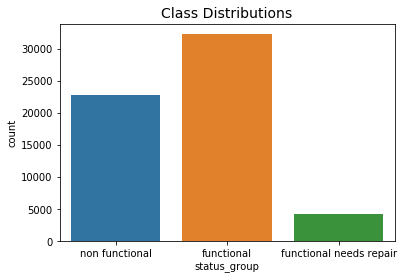

In [17]:
sns.countplot('status_group', data=df)
plt.title('Class Distributions', fontsize=14)

There are null values in the data, and some columns which contain same information in the dataset for example column **'quantity'** and **'quantity_group'**, **'source'**, **'source_type'** and **'source_class'**, etc. Similar data will cause high correlation without affecting the target variable. Hence the approach is to drop them and simplify dataset for an easier run of the model.

**Quantity and Quantity_group**

In [18]:
df['quantity'].value_counts()


enough          33187
insufficient    15128
dry              6247
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [19]:
df['quantity_group'].value_counts()
#Both quantity and quantity_group shows similar data, hence we would drop the quantity_group column

enough          33187
insufficient    15128
dry              6247
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

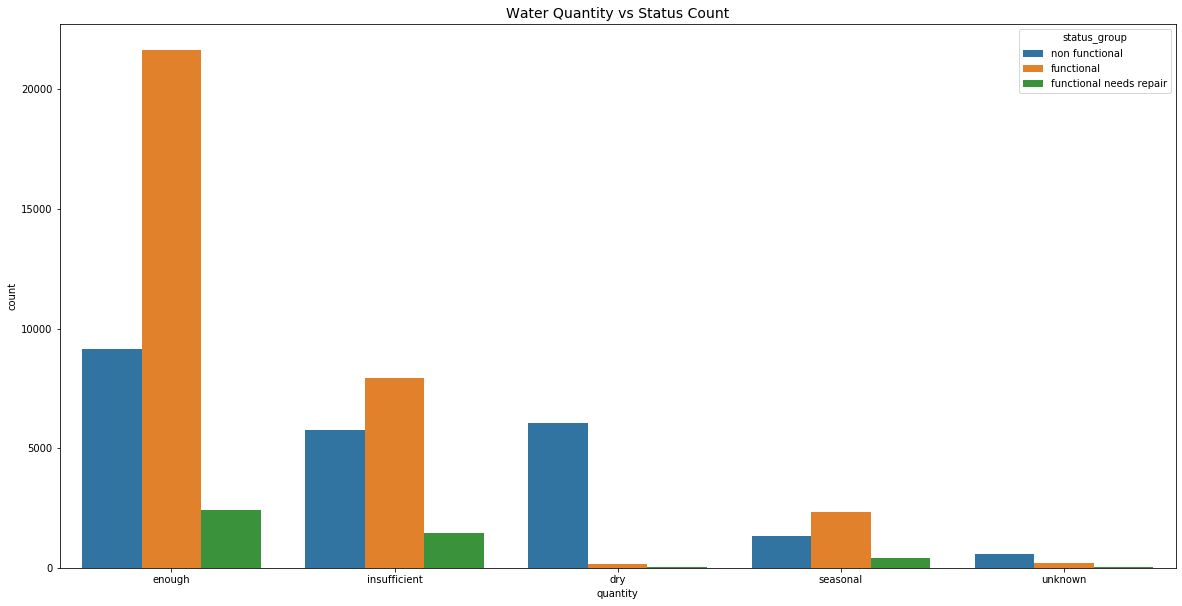

In [20]:
df.drop(columns=['quantity_group'],inplace=True )

plt.figure(figsize=(20,10))
plt.title('Water Quantity vs Status Count', fontsize=14)
p = sns.countplot(x='quantity', hue="status_group", data=df)

From the graph **"Water Quantity vs Status Count"**, it is shown that there are many wells which contains enough water but non-functional. Also, it is observed that 4272 wells were dried but they have good water quality. With finding a solution to give source again these wells, they can be functional. Finding clean water sources is not the only problem, to continue to feed these sources are equally important.

**Source, Source_Class and Source_type**

In [21]:
df['source'].value_counts()


spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  875
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [22]:
df['source_type'].value_counts()


spring                  17021
shallow well            16823
borehole                11950
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
guinness                    1
Name: source_type, dtype: int64

In [23]:
df['source_class'].value_counts()


groundwater    45795
surface        13328
unknown          278
Name: source_class, dtype: int64

In [24]:
df.groupby(['source_class','source']).count()
#It shows the grouping of sources, and how unique the sources are compare to the groups. 
#Thus for evaluation, the source column will be used while dropping the other two.

id  amount_tsh  date_recorded  funder  \
source_class source                                                           
groundwater  hand dtw                875         875            875     869   
             machine dbh           11075       11075          11075   10252   
             shallow well          16824       16824          16824   16302   
             spring                17021       17021          17021   15870   
surface      dam                     656         656            656     647   
             lake                    765         765            765     763   
             rainwater harvesting   2295        2295           2295    2099   
             river                  9612        9612           9612    8715   
unknown      other                   212         212            212     204   
             unknown                  66          66             66      45   

                                   gps_height  installer  longitude  latitude  \
source_class source                                                             
groundwater  hand dtw                     875        869        875       875   
             machine dbh                11075      10246      11075     11075   
             shallow well               16823      16286      16824     16824   
             spring                     17021      15870      17021     17021   
surface      dam                          656        646        656       656   
             lake                         765        762        765       765   
             rainwater harvesting        2295       2096       2295      2295   
             river                       9612       8721       9612      9612   
unknown      other                        212        204        212       212   
             unknown                       66         46         66        66   

                                   wpt_name  num_private  ...  \
source_class source                                       ...   
groundwater  hand dtw                   875          875  ...   
             machine dbh              11075        11075  ...   
             shallow well             16824        16824  ...   
             spring                   17021        17021  ...   
surface      dam                        656          656  ...   
             lake                       765          765  ...   
             rainwater harvesting      2295         2295  ...   
             river                     9612         9612  ...   
unknown      other                      212          212  ...   
             unknown                     66           66  ...   

                                   management_group  payment  payment_type  \
source_class source                                                          
groundwater  hand dtw                           875      875           875   
             machine dbh                      11075    11075         11075   
             shallow well                     16824    16824         16824   
             spring                           17021    17021         17021   
surface      dam                                656      656           656   
             lake                               765      765           765   
             rainwater harvesting              2295     2295          2295   
             river                             9612     9612          9612   
unknown      other                              212      212           212   
             unknown                             66       66            66   

                                   water_quality  quality_group  quantity  \
source_class source                                                         
groundwater  hand dtw                        875            875       875   
             machine dbh                   11075          11075     11075   
             shallow well                  16824          16824     16824   
             

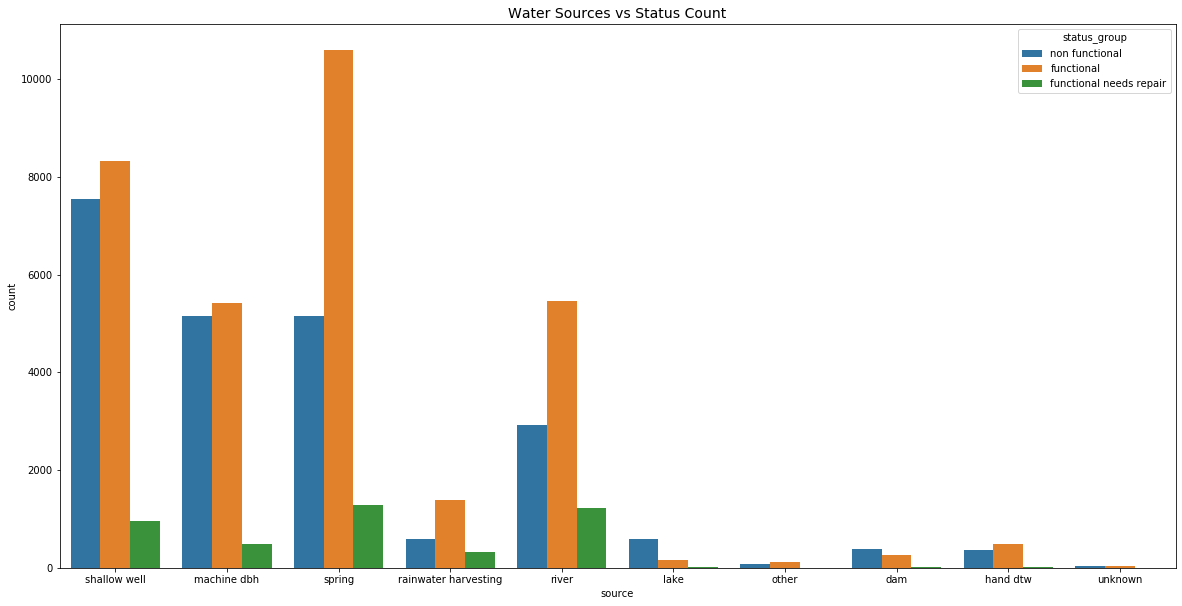

In [25]:
df.drop(columns=['source_class','source_type'], inplace=True)

plt.figure(figsize=(20,10))
plt.title('Water Sources vs Status Count', fontsize=14)
p = sns.countplot(x='source', hue="status_group", data=df)

There are number of **'sources'** which are manually handled like *machine dbh*, *dam* etc. These sources can be funded properlt to repair the *non funtional*  and the *functional needs repair*, and made *functional* for better water supply. 

**Management, Management_group and Scheme_Management**

In [26]:
#Now we need check the important columns which are relevent for the output class, and dropping the irrelevent colums
df['management_group'].value_counts()

user-group    52491
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

In [27]:
df.groupby(['management_group','management']).count() 
#management group column is a grouoed column for managment. Thus it would be unnecessary to keep both the column.
#Hence we will be dropping the column management group.

id  amount_tsh  date_recorded  funder  \
management_group management                                                   
commercial       company             685         685            685     663   
                 private operator   1971        1971           1971    1957   
                 trust                78          78             78      78   
                 water authority     904         904            904     836   
other            other               844         844            844     837   
                 other - school       99          99             99      99   
parastatal       parastatal         1768        1768           1768    1624   
unknown          unknown             561         561            561     533   
user-group       vwc               40508       40508          40508   37633   
                 water board        2933        2933           2933    2715   
                 wua                2535        2535           2535    2308   
                 wug                6515        6515           6515    6483   

                                   gps_height  installer  longitude  latitude  \
management_group management                                                     
commercial       company                  685        663        685       685   
                 private operator        1971       1959       1971      1971   
                 trust                     78         78         78        78   
                 water authority          904        836        904       904   
other            other                    844        831        844       844   
                 other - school            99         99         99        99   
parastatal       parastatal              1768       1626       1768      1768   
unknown          unknown                  561        527        561       561   
user-group       vwc                    40508      37631      40508     40508   
                 water board             2933       2714       2933      2933   
                 wua                     2535       2309       2535      2535   
                 wug                     6514       6473       6515      6515   

                                   wpt_name  num_private  ...  \
management_group management                               ...   
commercial       company                685          685  ...   
                 private operator      1971         1971  ...   
                 trust                   78           78  ...   
                 water authority        904          904  ...   
other            other                  844          844  ...   
                 other - school          99           99  ...   
parastatal       parastatal            1768         1768  ...   
unknown          unknown                561          561  ...   
user-group       vwc                  40508        40508  ...   
                 water board           2933         2933  ...   
                 wua                   2535         2535  ...   
                 wug                   6515         6515  ...   

                                   extraction_type_class  payment  \
management_group management                                         
commercial       company                             685      685   
                 private operator                   1971     1971   
                 trust                                78       78   
                 water authority                     904      904   
other            other                               844      844   
                 other - school                       99       99   
parastatal       parastatal                         1768     1768   
unknown          unknown                             561      561   
user-group       vwc                               40508    40508   
                 water board                        2933     2933   
                 wua                                2535 

In [28]:
df['management'].value_counts()

vwc                 40508
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [29]:
df['scheme_management'].value_counts()

VWC                 36795
WUG                  5206
Water authority      3153
WUA                  2882
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

Both the *scheme management* column and *management* column consist of similar data. As *scheme managament* represents the water point operator, and *management* represents how the operation was done on the water point, we assumed *management* to be significant for the target variable. Also we have **3877** Null values for scheme management. Hence we would drop this column.

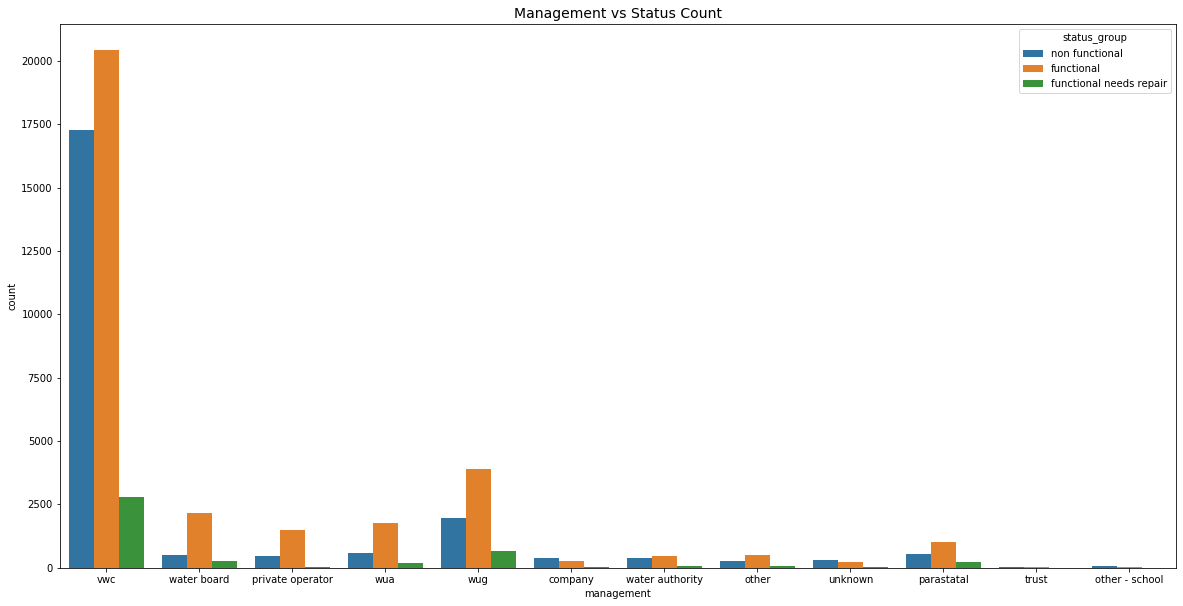

In [30]:
df.drop(columns=['scheme_management','management_group'], inplace = True)

plt.figure(figsize=(20,10))
plt.title('Management vs Status Count', fontsize=14)
p = sns.countplot(x='management', hue="status_group", data=df)

**Water_Quality and Quality_group**

In [31]:
df['water_quality'].value_counts()


soft                  50819
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [32]:
df['quality_group'].value_counts()
#Again we find redundant value in both of these columns. Water_quality column have more unique values will 
#be significat for training where as quality_group will be dropped.


good        50819
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

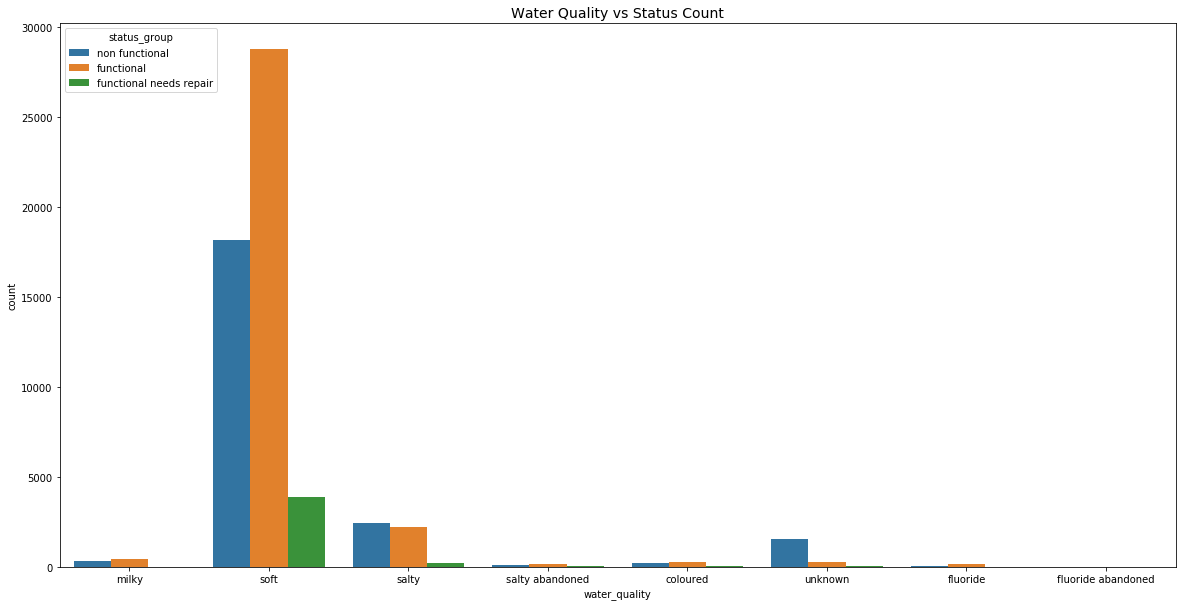

In [33]:
df.drop(columns = ['quality_group'], inplace = True)

plt.figure(figsize=(20,10))
plt.title('Water Quality vs Status Count', fontsize=14)
p = sns.countplot(x='water_quality', hue="status_group", data=df)

*2226 (7%)* wells have enough and soft water but needs repair. Authorities must invest on repairing. Otherwise these will be non-functional. *8035 (27%)* wells has enough, good quality water but they are non-functional. This shows that authorities must work and invest on technology to pump these good sources.

**Waterpoint_Type and Waterpoint_Type_Group**

In [34]:
df['waterpoint_type'].value_counts()


communal standpipe             28523
hand pump                      17489
other                           6379
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [35]:
df['waterpoint_type_group'].value_counts()
#Both these column have similar values hence we can drop one column and keep waterpoint_type cause of more unique values

communal standpipe    34626
hand pump             17489
other                  6379
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

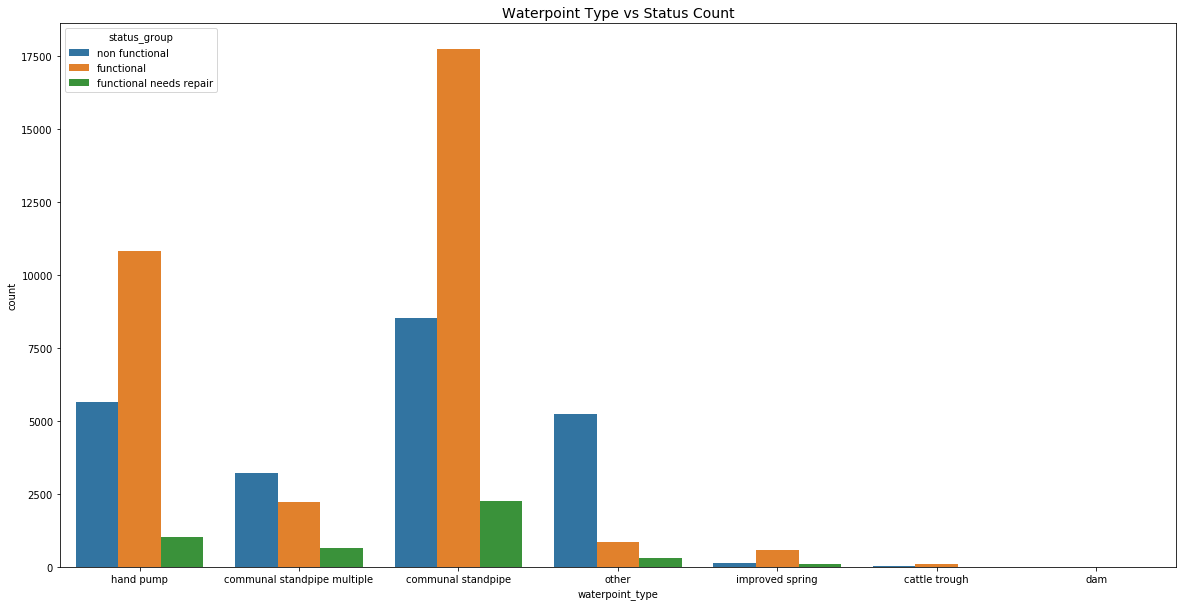

In [36]:
df.drop(columns = ['waterpoint_type_group'], inplace = True)

plt.figure(figsize=(20,10))
plt.title('Waterpoint Type vs Status Count', fontsize=14)
p = sns.countplot(x='waterpoint_type', hue="status_group", data=df)

Standpipes and Handpumps should be well funded to repair the sources that needs to be addressed.The installer and funder and the in-charge body should take care of the wells which are functional but need repair.

**Extraction_Type, Extraction_Type_Group, Extraction_type_class**

In [37]:
df['extraction_type'].value_counts()


gravity                      26779
nira/tanira                   8154
other                         6431
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              452
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [38]:
df['extraction_type_group'].value_counts()


gravity            26779
nira/tanira         8154
other               6431
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            452
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [39]:
df['extraction_type_class'].value_counts()


gravity            26778
handpump           16456
other               6431
submersible         6179
motorpump           2987
rope pump            452
wind-powered         117
infinity stones        1
Name: extraction_type_class, dtype: int64

In [40]:
df.groupby(['extraction_type_class','extraction_type_group','extraction_type']).count()
#Grouping and analysing these three columns, the data in the extraction_type can be used for significant classification
#where as the other two columns are grouped columns which can be dropped.

id  \
extraction_type_class extraction_type_group extraction_type                    
gravity               gravity               gravity                    26778   
handpump              afridev               afridev                     1770   
                      india mark ii         india mark ii               2400   
                      india mark iii        india mark iii                98   
                      nira/tanira           nira/tanira                 8154   
                      other handpump        other - mkulima/shinyanga      2   
                                            other - play pump             85   
                                            other - swn 81               229   
                                            walimi                        48   
                      swn 80                swn 80                      3670   
infinity stones       gravity               gravity                        1   
motorpump             mono                  mono                        2865   
                      other motorpump       cemo                          90   
                                            climax                        32   
other                 other                 other                       6431   
rope pump             rope pump             other - rope pump            452   
submersible           submersible           ksb                         1415   
                                            submersible                 4764   
wind-powered          wind-powered          windmill                     117   

                                                                       amount_tsh  \
extraction_type_class extraction_type_group extraction_type                         
gravity               gravity               gravity                         26778   
handpump              afridev               afridev                          1770   
                      india mark ii         india mark ii                    2400   
                      india mark iii        india mark iii                     98   
                      nira/tanira           nira/tanira                      8154   
                      other handpump        other - mkulima/shinyanga           2   
                                            other - play pump                  85   
                                            other - swn 81                    229   
                                            walimi                             48   
                      swn 80                swn 80                           3670   
infinity stones       gravity               gravity                             1   
motorpump             mono                  mono                             2865   
                      other motorpump       cemo                               90   
                                            climax                             32   
other                 other                 other                            6431   
rope pump             rope pump             other - rope pump                 452   
submersible           submersible           ksb                              1415   
                                            submersible                      4764   
wind-powered          wind-powered          windmill                          117   

                                                                       date_recorded  \
extraction_type_class extraction_type_group extraction_type                            
gravity               gravity               gravity                            26778   
handpump              afridev               afridev                             1770   
                      india mark ii         india mark ii                       2400   
                      india mark iii        india mark iii                        98   
                      nira/tanira           nira/tanira                        

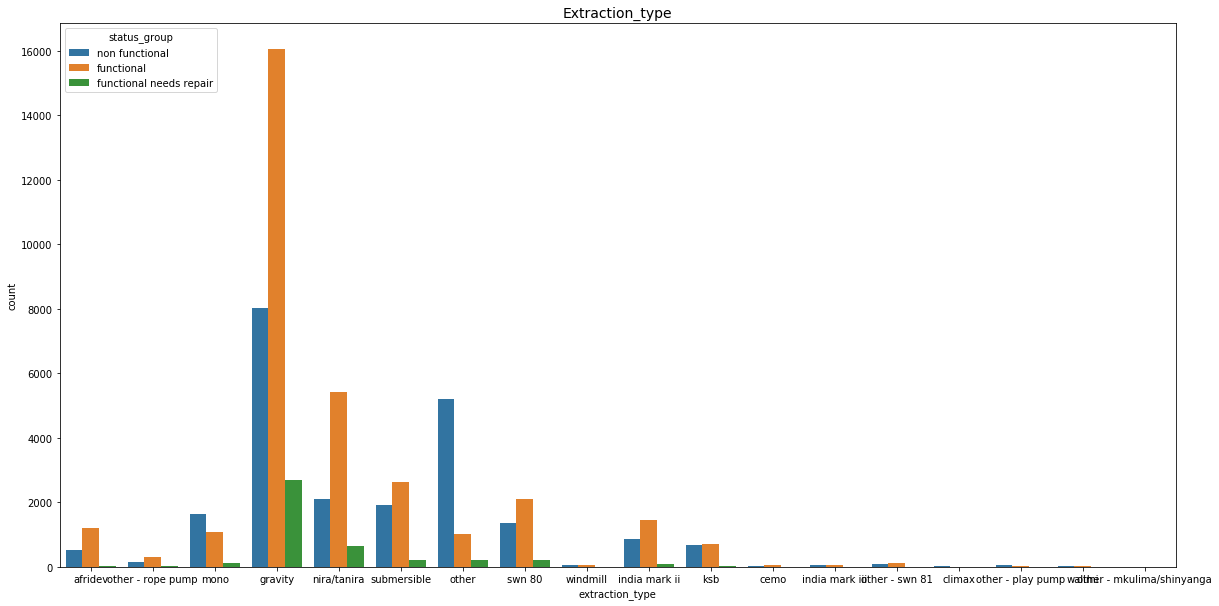

In [41]:
df.drop(columns = ['extraction_type_class','extraction_type_group'], inplace = True)

plt.figure(figsize=(20,10))
plt.title('Extraction_type', fontsize=14)
p = sns.countplot(x='extraction_type', hue="status_group", data=df)

The most common extraction type is gravity but second is hand pumps. It is seen that, there are many non-functional water points which belongs to gravity (which is natural force so no need to do anything expensive) as extraction type. So, gravity type wells do not need too much investment on it. So, there can be found more water points which can be functional easily.


**Payment and Payment_Type**

In [42]:
df['payment'].value_counts()


never pay                25349
pay per bucket            8985
pay monthly               8299
unknown                   8158
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [43]:
df['payment_type'].value_counts()
#both these columns have similar data. Hence dropping one.

never pay     25348
per bucket     8985
monthly        8299
unknown        8158
on failure     3914
annually       3642
other          1054
bitcoin           1
Name: payment_type, dtype: int64

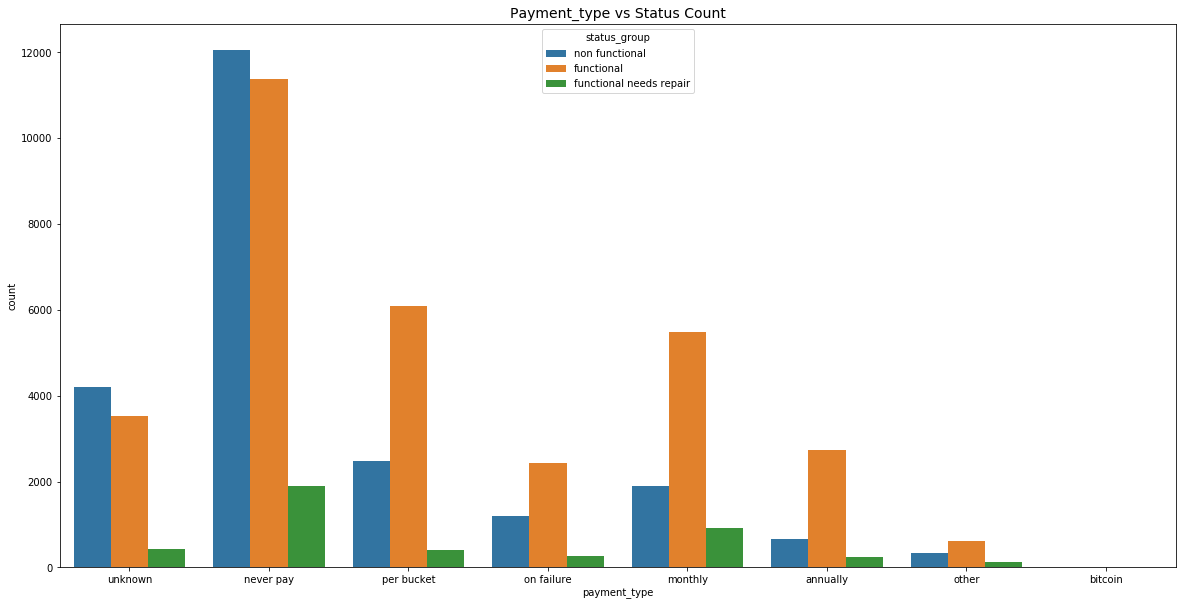

In [44]:
df.drop(columns = ['payment'], inplace = True)

plt.figure(figsize=(20,10))
plt.title('Payment_type vs Status Count', fontsize=14)
p = sns.countplot(x='payment_type', hue="status_group", data=df)

The **payment_type** *unknwon* need to be addressed. As it has got high ratio of non-functional wells. The funders need to addressed as well as the maximum number of *functional needs repair* has payment_type *never_pay*. With proper fund, these can be repaired.


**Recorded_By, Subvillage and Region**

In [45]:
df['recorded_by'].value_counts()
#Only one value, hence can be dropped.

GeoData Consultants Ltd    59401
Name: recorded_by, dtype: int64

In [46]:
df.drop(columns = ['recorded_by'], inplace = True)

In [47]:
df['subvillage'].value_counts()


Madukani               508
Shuleni                506
Majengo                502
Kati                   373
Mtakuja                262
Sokoni                 232
M                      187
Muungano               173
Mbuyuni                164
Mlimani                152
Songambele             147
Msikitini              134
Miembeni               134
1                      132
Kibaoni                114
Kanisani               111
Mapinduzi              109
I                      109
Mjini                  108
Mjimwema               108
Mkwajuni               104
Mwenge                 102
Mabatini                98
Azimio                  98
Mission                 95
Mbugani                 95
Bwawani                 91
Bondeni                 90
Chang'Ombe              88
Zahanati                86
                      ... 
Nabuta                   1
Olmatejoo                1
Dimani B                 1
Bishenge                 1
Kwangudu                 1
Mukafunzo                1
M

In [48]:
df['region'].value_counts()
#Since we have region column, the district code and latitude-longitude of the location, we can drop sub village. 
#Sub village can be used for statistical data analysis, but irrelevant for output classifier with too many unique values.

Iringa           5295
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4378
Morogoro         4005
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2641
Pwani            2635
Tanga            2548
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

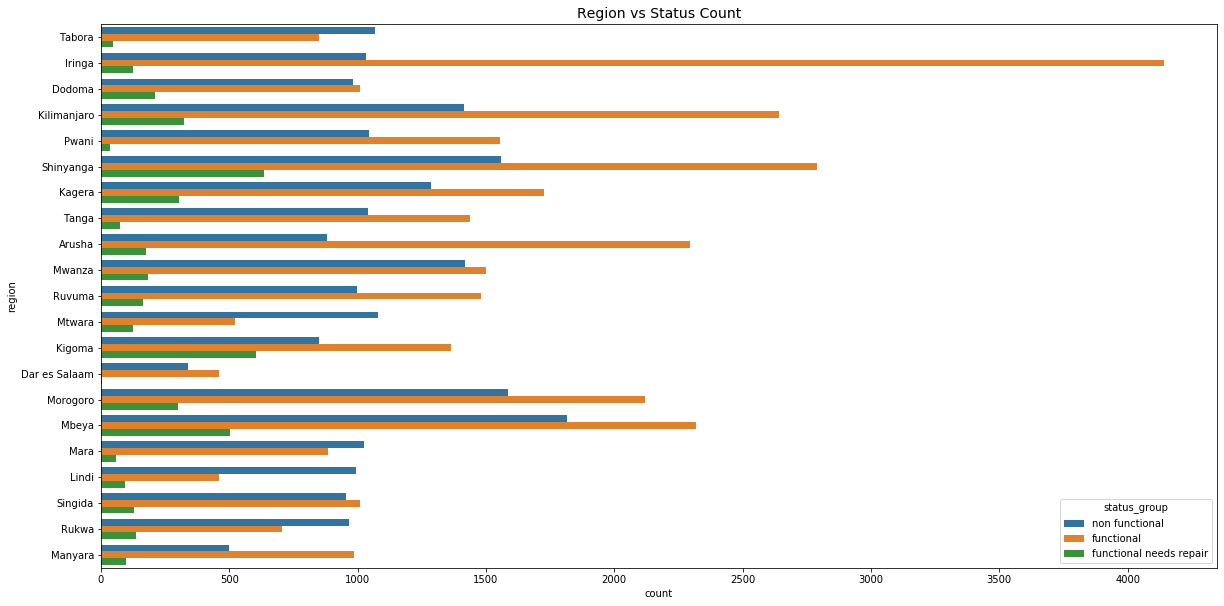

In [49]:
df.drop(columns = ['subvillage'], inplace = True)

plt.figure(figsize=(20,10))
plt.title('Region vs Status Count', fontsize=14)
p = sns.countplot(y='region', hue="status_group", data=df)

*Iringa* is one of the most significant region as it has got a very high ratio of functional wells. The other areas like *Mara*, *Lingdi*, *Singida* etc. has high ratio of non functional well. This refers that these areast has functional wells which requires repairment, if not address will become non functional. 



**Scheme_Name, Region_Code, Wpt_name, ID, Num_Private and Amount_tsh**

Theses columns have lots of unique values which does not provide much information about the functionality or the response variable. The column region code is unnecessary since we already have region column. The ID column is an important *key* value, consists of all unique values, used for referencing, not in predicting the nature of the wells. 
Hence these columns are assumed to be irrelevant and dropped.

In [50]:
df['scheme_name'].value_counts()


K                                                 682
None                                              644
Borehole                                          546
Chalinze wate                                     405
M                                                 400
DANIDA                                            380
Government                                        320
Ngana water supplied scheme                       270
wanging'ombe water supply s                       261
wanging'ombe supply scheme                        234
Bagamoyo wate                                     229
I                                                 229
Uroki-Bomang'ombe water sup                       209
N                                                 204
Kirua kahe gravity water supply trust             193
Machumba estate pipe line                         185
Makwale water supplied sche                       166
Kijiji                                            161
S                           

In [51]:
df['region_code'].value_counts()


11    5301
17    5011
12    4639
3     4378
5     4039
18    3324
19    3047
2     3024
16    2816
10    2641
4     2514
1     2201
13    2093
14    1979
20    1969
15    1808
6     1609
21    1583
80    1238
60    1025
90     917
7      805
99     423
9      390
24     326
8      300
40       1
Name: region_code, dtype: int64

In [52]:
df['wpt_name'].value_counts()


none                        3563
Shuleni                     1748
Zahanati                     830
Msikitini                    535
Kanisani                     323
Bombani                      271
Sokoni                       260
Ofisini                      254
School                       208
Shule Ya Msingi              199
Shule                        152
Sekondari                    146
Muungano                     133
Mkombozi                     111
Madukani                     104
Mbugani                       94
Hospital                      94
Upendo                        93
Kituo Cha Afya                90
Mkuyuni                       88
Umoja                         84
Center                        83
Ccm                           81
Kisimani                      78
Mtakuja                       76
Ofisi Ya Kijiji               76
Tankini                       73
Bwawani                       66
Songambele                    66
Maendeleo                     64
          

In [53]:
df['id'].nunique()
#in our final data, we need to drop the id column as this a reference column and not a functional

59398

In [54]:
df['num_private'].value_counts()
#Not much information is provided from this column

0       58644
6          81
1          73
5          46
8          46
32         40
45         36
15         35
39         30
93         28
3          27
7          26
2          23
65         22
47         21
102        20
4          20
17         17
80         15
20         14
25         12
11         11
41         10
34         10
16          8
120         7
150         6
22          6
12          5
24          5
        ...  
14          3
61          3
27          2
26          2
160         1
30          1
698         1
60          1
1402        1
450         1
668         1
131         1
35          1
672         1
42          1
136         1
87          1
300         1
280         1
141         1
62          1
111         1
240         1
1776        1
755         1
180         1
213         1
23          1
55          1
94          1
Name: num_private, Length: 65, dtype: int64

**District_Code**

In [55]:
df['district_code'].value_counts()


1     12203
2     11174
3      9998
4      8999
5      4356
6      4074
7      3343
8      1043
30      995
33      874
53      745
43      505
13      391
23      293
63      195
62      109
60       63
0        23
80       12
67        6
Name: district_code, dtype: int64

Text(0.5, 1.0, 'District Code vs Status Count')

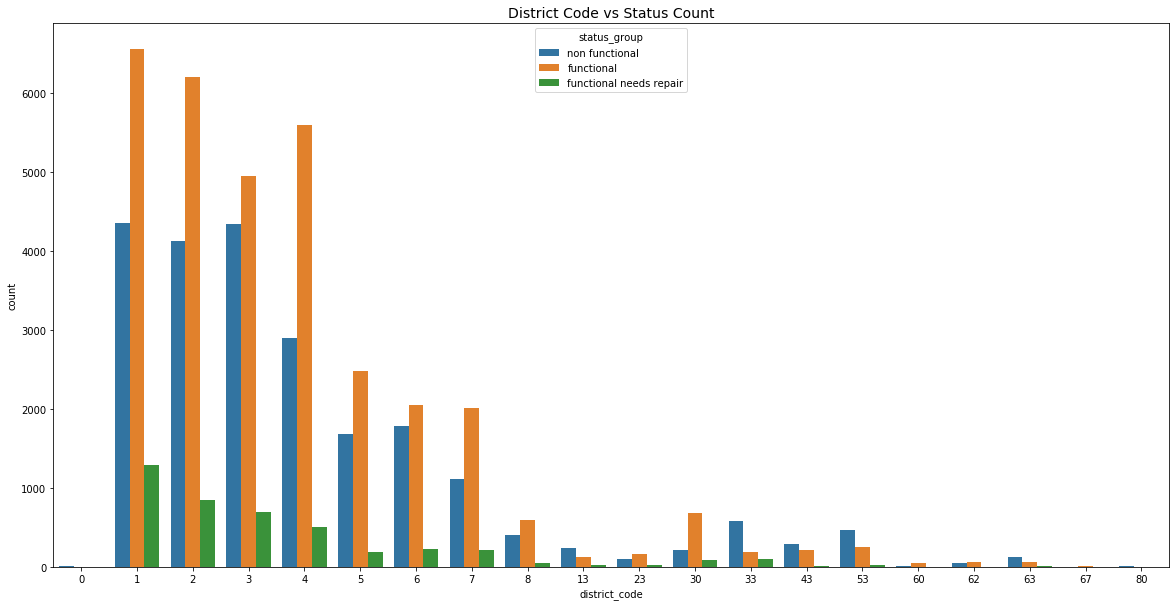

In [56]:
plt.figure(figsize=(20,10))
p = sns.countplot(x='district_code', hue="status_group", data=df)
plt.title('District Code vs Status Count', fontsize=14)
#we can consider 0 as a district code and no need to change for that

In [57]:
df.drop(columns=['amount_tsh','wpt_name','region_code','scheme_name','id','num_private'],inplace=True )



In [58]:
df['public_meeting'].value_counts()
df['public_meeting'].fillna(value=True,inplace=True)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59401 entries, 0 to 59400
Data columns (total 23 columns):
date_recorded        59401 non-null datetime64[ns]
funder               55766 non-null object
gps_height           59400 non-null float64
installer            55746 non-null object
longitude            59401 non-null float64
latitude             59401 non-null float64
basin                59401 non-null object
region               59401 non-null object
district_code        59401 non-null int64
lga                  59401 non-null object
ward                 59401 non-null object
population           59401 non-null int64
public_meeting       59401 non-null bool
permit               56345 non-null object
construction_year    59401 non-null int64
extraction_type      59401 non-null object
management           59401 non-null object
payment_type         59401 non-null object
water_quality        59401 non-null object
quantity             59401 non-null object
source               5940

In [60]:
df.isna().sum()

date_recorded           0
funder               3635
gps_height              1
installer            3655
longitude               0
latitude                0
basin                   0
region                  0
district_code           0
lga                     0
ward                    0
population              0
public_meeting          0
permit               3056
construction_year       0
extraction_type         0
management              0
payment_type            0
water_quality           0
quantity                0
source                  0
waterpoint_type         0
status_group            0
dtype: int64

### Correlation and Imputation

As we are now done with dropping most of the irrelevant columns, we address the data present, on the null values, zero values, corrupt data and other feature engineering. Missing data plagues our datasets, and hence there is tremendous requirement of imputation, or filling in, the missing values. Unfortunately, standard ‘lazy’ imputation methods like simply using the column median or average don’t work well. We use **MissForest**, which has outperformed all other algorithms in all metrics, including KNN-Impute, in some cases by over 50% *(Stekhoven and Buhlmann, 2011).

**Funder and Installer**

These two columns are categorical with high amount of unique values, Null values, corrupted data and mistake in spelling. These need to be addressed with replacement with the correct data before training the data in any algorithm.

In [61]:
#Installer

df['installer'].fillna(value='Unknown',inplace=True)  # filling null values with unknown
df['installer'].replace(to_replace = ('0','Nan','NAN','NaN'), value ='Unknown' , inplace=True) # filling 0 values with unknown

# Replacing the spelling mistakes and collect same categories in same name

df['installer'].replace(to_replace = ('District Water Department', 'District water depar','Distric Water Department'),
                        value ='District water department' , inplace=True)

df['installer'].replace(to_replace = ('FinW','Fini water','FINI WATER'), value ='Fini Water' , inplace=True)
df['installer'].replace(to_replace = 'JAICA', value ='Jaica' , inplace=True)

df['installer'].replace(to_replace = ('COUN', 'District COUNCIL', 'DISTRICT COUNCIL','District Counci', 
                                      'District Council','Council','Counc','District  Council','Distri'),
                                    value ='District council' , inplace=True)

df['installer'].replace(to_replace = ('RC CHURCH', 'RC Churc', 'RC','RC Ch','RC C', 'RC CH','RC church', 
                                      'RC CATHORIC',) , value ='RC Church' , inplace=True)

df['installer'].replace(to_replace = ('Central Government','Tanzania Government',
                                       'central government','Cental Government', 'Cebtral Government', 
                                      'Tanzanian Government','Tanzania government', 'Centra Government' ,
                                      'CENTRAL GOVERNMENT', 'TANZANIAN GOVERNMENT','Central govt', 'Centr', 
                                      'Centra govt') , value ='Central government' , inplace=True)

df['installer'].replace(to_replace = ('World vision', 'World Division','World Vision'),
                                        value ='world vision' , inplace=True)

df['installer'].replace(to_replace = ('Unisef','UNICEF'),value ='Unicef' , inplace=True)
df['installer'].replace(to_replace = 'DANID', value ='DANIDA' , inplace=True)

df['installer'].replace(to_replace = ('villigers', 'villager', 'Villagers', 'Villa', 'Village', 'Villi', 
                                      'Village Council','Village Counil', 'Villages', 'Vill', 'Village community', 
                                      'Villaers', 'Village Community', 'Villag','Villege Council', 'Village council',
                                      'Village  Council','Villagerd', 'Villager', 'Village Technician',
                                      'Village Office','Village community members'),
                                        value ='villagers' , inplace=True)

df['installer'].replace(to_replace =('Commu','Communit','commu','COMMU', 'COMMUNITY') ,
                                        value ='Community' , inplace=True)

df['installer'].replace(to_replace = ('GOVERNMENT', 'GOVER', 'GOVERNME', 'GOVERM','GOVERN','Gover','Gove',
                                      'Governme','Governmen' ) ,value ='Government' , inplace=True)

df['installer'].replace(to_replace = 'Hesawa' ,value ='HESAWA' , inplace=True)

df['installer'].replace(to_replace = ('Colonial Government') , value ='Colonial government' , inplace=True)
df['installer'].replace(to_replace = ('Government of Misri') , value ='Misri Government' , inplace=True)
df['installer'].replace(to_replace = ('Italy government') , value ='Italian government' , inplace=True)
df['installer'].replace(to_replace = ('British colonial government') , value ='British government' , inplace=True)
df['installer'].replace(to_replace = ('Concern /government') , value ='Concern/Government' , inplace=True)
df['installer'].replace(to_replace = ('Village Government') , value ='Village government' , inplace=True)
df['installer'].replace(to_replace = ('Government and Community') , value ='Government /Community' , inplace=True)
df['installer'].replace(to_replace = ('Cetral government /RC') , value ='RC church/Central Gover' , inplace=True)
df['installer'].replace(to_replace = ('Government /TCRS','Government/TCRS') , value ='TCRS /Government' , inplace=True)
df['installer'].replace(to_replace = ('ADRA /Government') , value ='ADRA/Government' , inplace=True)

In [62]:
df['installer'].value_counts().head(100).sum()/594000

0.0831936026936027

83% of our data has been checked for the top 100 value counts. Now we want to see most common 20 categories and assume any count lesser than a theshold, for example 400, will not be considered in order to reduce the number of unique categories as these amount does not have majority 


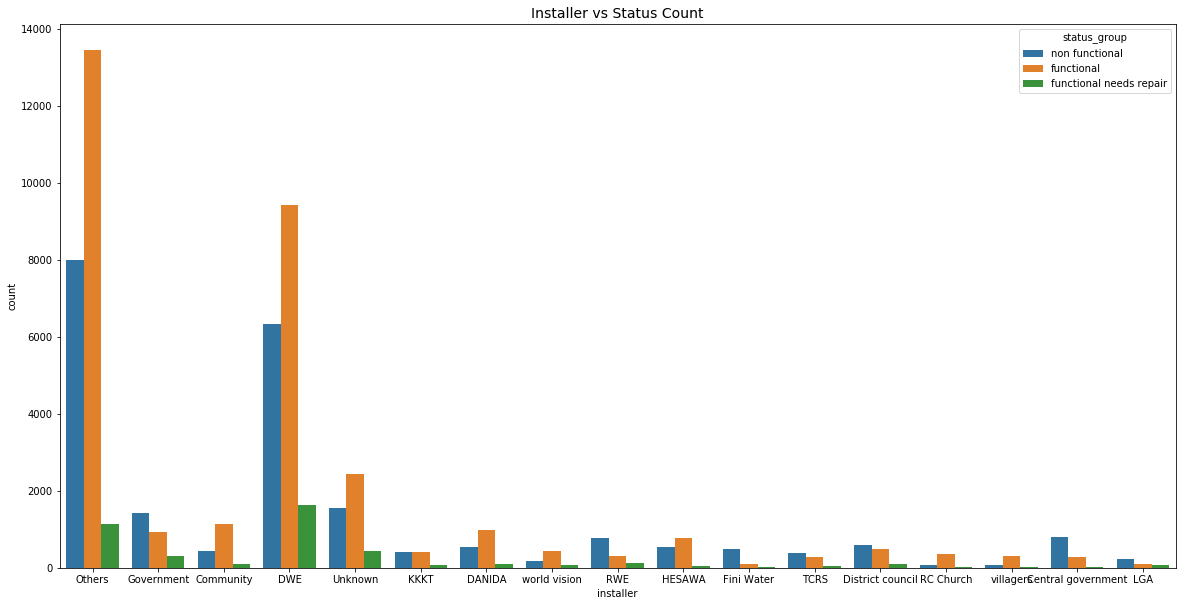

In [63]:
#Manual categorization of minor values into others

df_1 = df.loc[df['installer']== 'DWE']
df_2 = df.loc[df['installer']== 'Unknown']              
df_3 = df.loc[df['installer']== 'Government'] 
df_4 = df.loc[df['installer']== 'Community'] 
df_5 = df.loc[df['installer']== 'DANIDA'] 
df_6 = df.loc[df['installer']== 'RWE'] 
df_7 = df.loc[df['installer']== 'District council'] 
df_8 = df.loc[df['installer']== 'Central government']
df_9 = df.loc[df['installer']== 'KKKT'] 
df_10 = df.loc[df['installer']== 'HESAWA'] 
df_11 = df.loc[df['installer']== 'TCRS'] 
df_12 = df.loc[df['installer']== 'world vision'] 
df_13 = df.loc[df['installer']== 'CES'] 
df_14 = df.loc[df['installer']== 'Fini Water'] 
df_15 = df.loc[df['installer']== 'RC Church'] 
df_16 = df.loc[df['installer']== 'villagers']
df_17 = df.loc[df['installer']== 'LGA']

df_installer = pd.concat([df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,df_11,df_12,
                          df_13,df_14,df_15,df_16,df_17], ignore_index=True)
c_ins = ['DWE','Unknown','Government','Community','DANIDA','RWE','District council', 'Central government',
         'KKKT','HESAWA','TCRS', 'world vision', 'Fini Water', 'RC Church','villagers','LGA']


df.loc[~df["installer"].isin(c_ins), "installer"] = "Others"

plt.figure(figsize=(20,10))
plt.title('Installer vs Status Count', fontsize=14)
p = sns.countplot(x='installer', hue="status_group", data=df)


A similar approach for the column *Funder*.

In [64]:
df['funder'].value_counts().head(20)
#This column is highly categorical column with thousands different values. So, we will take most
#common 20 values for future encoding.


Government Of Tanzania    9084
Danida                    3115
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Kkkt                      1287
World Vision              1246
Unicef                    1057
Tasaf                      877
District Council           843
Dhv                        828
Private Individual         826
Dwsp                       811
0                          777
Norad                      765
Germany Republi            610
Tcrs                       602
Ministry Of Water          590
Water                      583
Dwe                        484
Name: funder, dtype: int64

In [65]:
#approaching similarly with the funder column
df['funder'].fillna(value='Unknown',inplace=True)  # filling null values with unknown
df['funder'].replace(to_replace = ('0','Nan','NAN','NaN'), value ='Unknown' , inplace=True) # filling 0 values with unknown

df['funder'].value_counts().head(20)
#This column is highly categorical column with thousands different values. So, we will take most
#common 20 values for future encoding.

df1 = df.loc[df['funder']== 'Government Of Tanzania']
df2 = df.loc[df['funder']== 'Unknown']              
df3 = df.loc[df['funder']== 'Danida'] 
df4 = df.loc[df['funder']== 'Hesawa'] 
df5 = df.loc[df['funder']== 'Rwssp'] 
df6 = df.loc[df['funder']== 'World Bank'] 
df7 = df.loc[df['funder']== 'Kkkt'] 
df8 = df.loc[df['funder']== 'World Vision']
df9 = df.loc[df['funder']== 'Unicef'] 
df10 = df.loc[df['funder']== 'Tasaf'] 
df11 = df.loc[df['funder']== 'District Council'] 
df12 = df.loc[df['funder']== 'Dhv'] 
df13 = df.loc[df['funder']== 'Private Individual'] 
df14 = df.loc[df['funder']== 'Dwsp'] 
df15 = df.loc[df['funder']== 'Norad'] 
df16 = df.loc[df['funder']== 'Germany Republi']
df17 = df.loc[df['funder']== 'Tcrs']
df18 = df.loc[df['funder']== 'Ministry Of Water']
df19 = df.loc[df['funder']== 'Water']
df20 = df.loc[df['funder']== 'Dwe']

df_funder = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,
                          df13,df14,df15,df16,df17,df18,df19,df20], ignore_index=True)

c_fund = ['Danida','Unknown','Government Of Tanzania','Hesawa','Rwssp','World Bank','Kkkt', 'World Vision',
         'Unicef','Tasaf','District Council', 'Dhv', 'Private Individual', 'Dwsp','Norad','Germany Republi',
         'Tcrs','Ministry Of Water','Water','Dwe']
    

df.loc[~df["funder"].isin(c_fund), "funder"] = "Others"


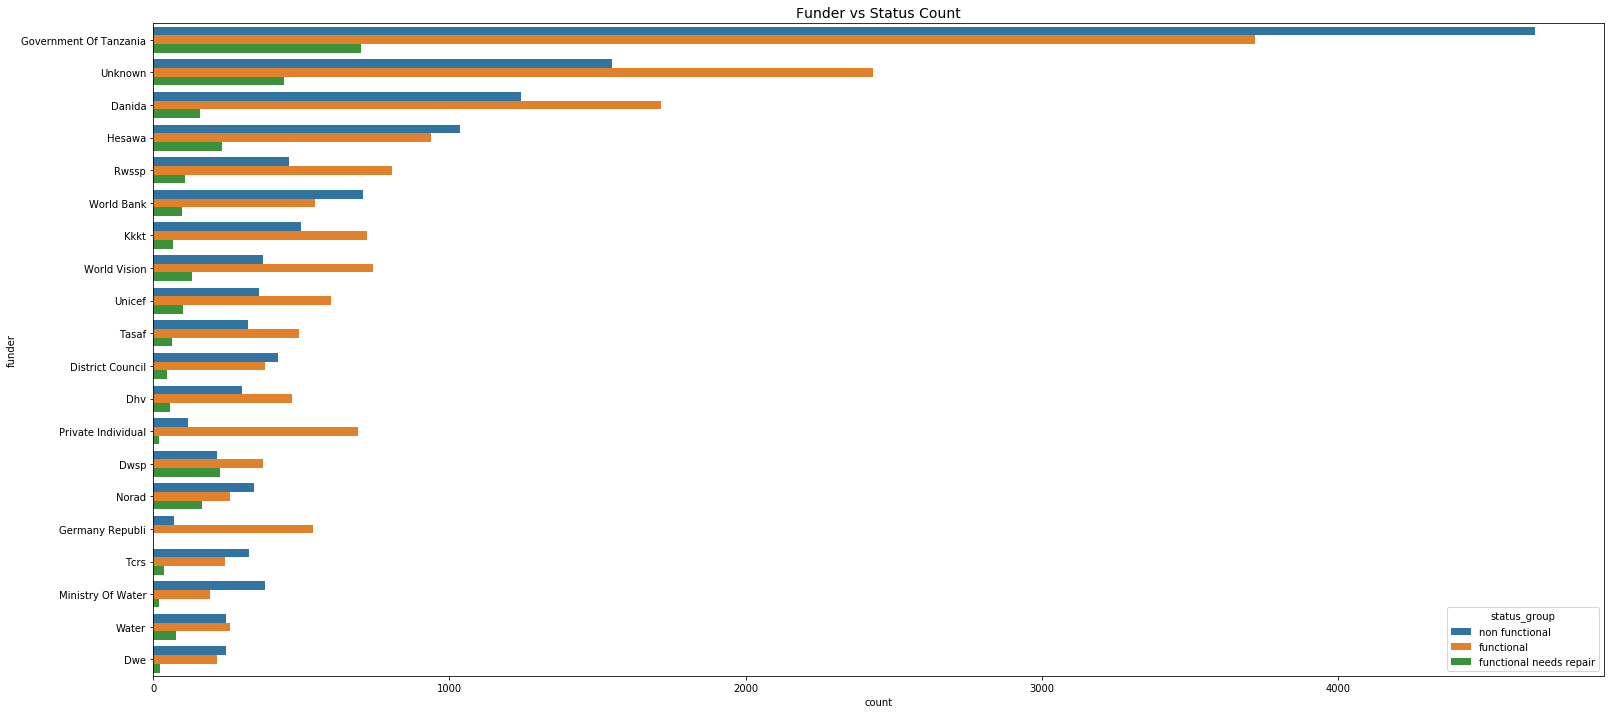

In [66]:
plt.figure(figsize=(26,12))
plt.title('Funder vs Status Count', fontsize=14)
p = sns.countplot(y='funder', hue="status_group", data=df_funder)

In [67]:
#Now, we will check for the missing values in the relevant variables and impute the missing values.

def check_impute_variance(ser,var):
    mean = ser.mean()
    median = ser.median()
    
    mean_ser = ser.fillna(mean)
    median_ser = ser.fillna(median)
    
    var_original = ser.std()**2
    var_mean = mean_ser.std()**2
    var_median = median_ser.std()**2
    
    fig = plt.figure(figsize = (10,5))
    p = fig.add_subplot(111)
    p = sns.kdeplot(ser.dropna(), color="Red", shade = True, label="Original Variance : %.2f"%(var_original))
    p = sns.kdeplot(mean_ser, color="Blue", shade= True, label="Mean Variance : %.2f"%(var_mean))
    p = sns.kdeplot(median_ser, color="Green", shade = True, label="Median Variance : %.2f"%(var_median))
    p.set_xlabel(var)
    p.set_ylabel("Frequency")
    p.legend(loc="best")
    p.set_title('Frequency Distribution of {}'.format(var), fontsize = 15)

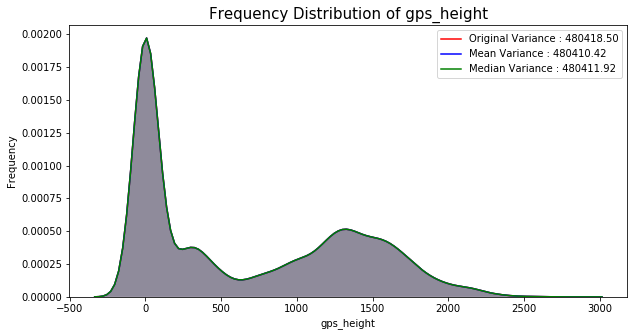

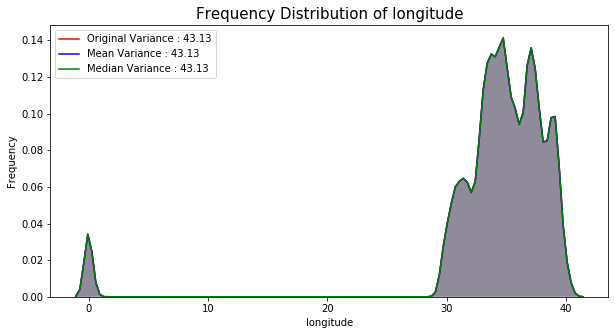

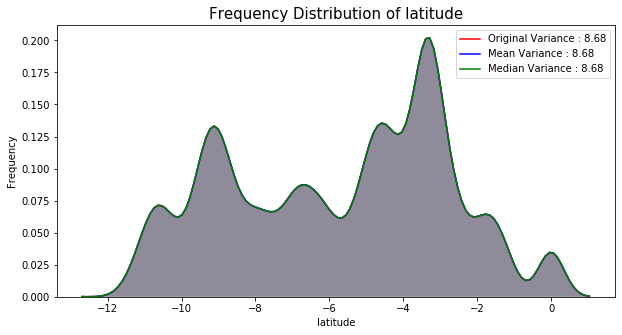

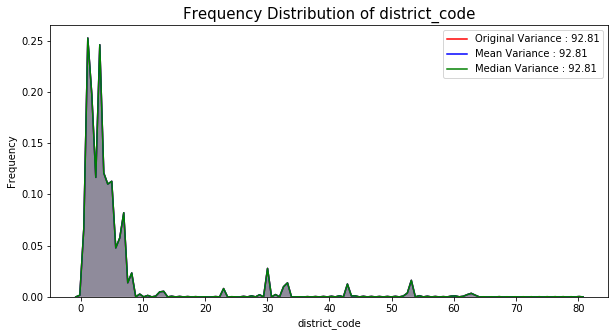

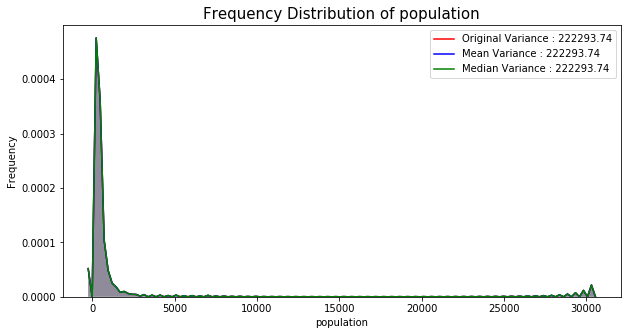

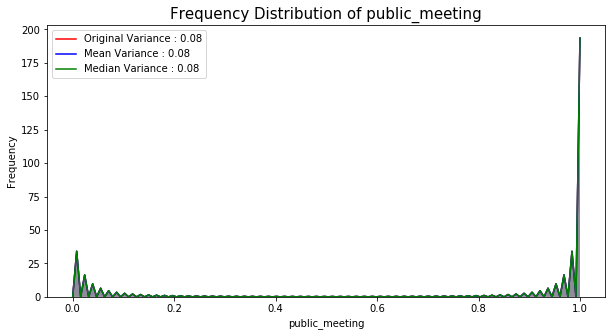

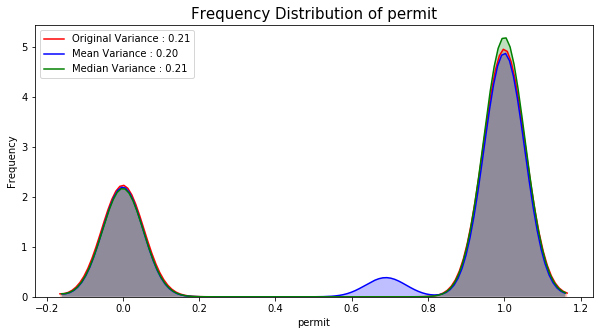

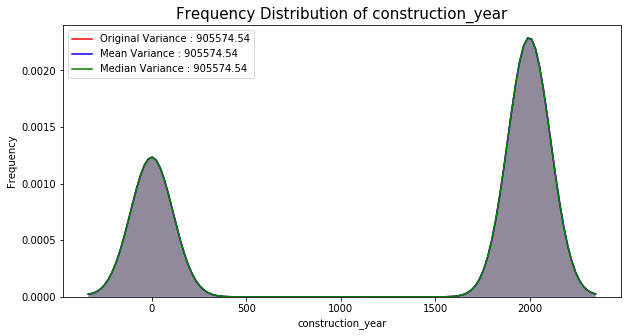

In [68]:
for col in df.columns[:-1]:
    try:
        check_impute_variance(df[col], col)
    except Exception:
        pass

As we can get rid of the corrupted Null or NAN values by MissForest algorithm, we need to deal with the zeroes in the column *longitude* and *population*.

In [69]:
df.loc[df['longitude']==0].count()


date_recorded        1812
funder               1812
gps_height           1812
installer            1812
longitude            1812
latitude             1812
basin                1812
region               1812
district_code        1812
lga                  1812
ward                 1812
population           1812
public_meeting       1812
permit               1812
construction_year    1812
extraction_type      1812
management           1812
payment_type         1812
water_quality        1812
quantity             1812
source               1812
waterpoint_type      1812
status_group         1812
dtype: int64

In [70]:
#Replace the 0 value with mean for these two columns
df.loc[df['population']!=0].describe()

,gps_height,longitude,latitude,district_code,population,construction_year
count,38020.000000,38020.000000,38020.000000,38020.000000,38020.000000,38020.000000
mean,969.891873,36.074332,-6.139990,6.299342,281.076749,1961.400605
std,612.553759,2.586783,2.737814,11.303207,564.684683,263.990766
min,-90.000000,29.607122,-11.649440,1.000000,-200.000000,0.000000
25%,347.000000,34.715371,-8.389185,2.000000,40.000000,1986.000000
50%,1135.000000,36.706792,-5.750964,3.000000,150.000000,2000.000000
75%,1465.000000,37.940332,-3.597134,5.000000,324.000000,2008.000000
max,2770.000000,40.345193,-1.042375,67.000000,30500.000000,2013.000000


In [71]:
df['population'].replace(to_replace = 0 , value =281, inplace=True)

In [72]:
#Non zero value statistical analysis of longitude column
df.loc[df['longitude']!=0].describe()

,gps_height,longitude,latitude,district_code,population,construction_year
count,57588.000000,57589.000000,57589.000000,57589.000000,57589.000000,57589.000000
mean,689.343457,35.149649,-5.885715,5.728247,281.050669,1341.588706
std,693.569751,2.607420,2.809940,9.760182,458.817903,937.637183
min,-90.000000,29.607122,-11.649440,0.000000,-200.000000,0.000000
25%,0.000000,33.285108,-8.643987,2.000000,90.000000,0.000000
50%,426.000000,35.005900,-5.172737,3.000000,281.000000,1988.000000
75%,1332.000000,37.233697,-3.372922,5.000000,281.000000,2004.000000
max,2770.000000,40.345193,-0.998464,80.000000,30500.000000,2013.000000


In [73]:
df['longitude'].replace(to_replace = 0 , value =35.15, inplace=True)

C:\Users\reesh\Anaconda\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1, 'Status as per Location (Corrected)')

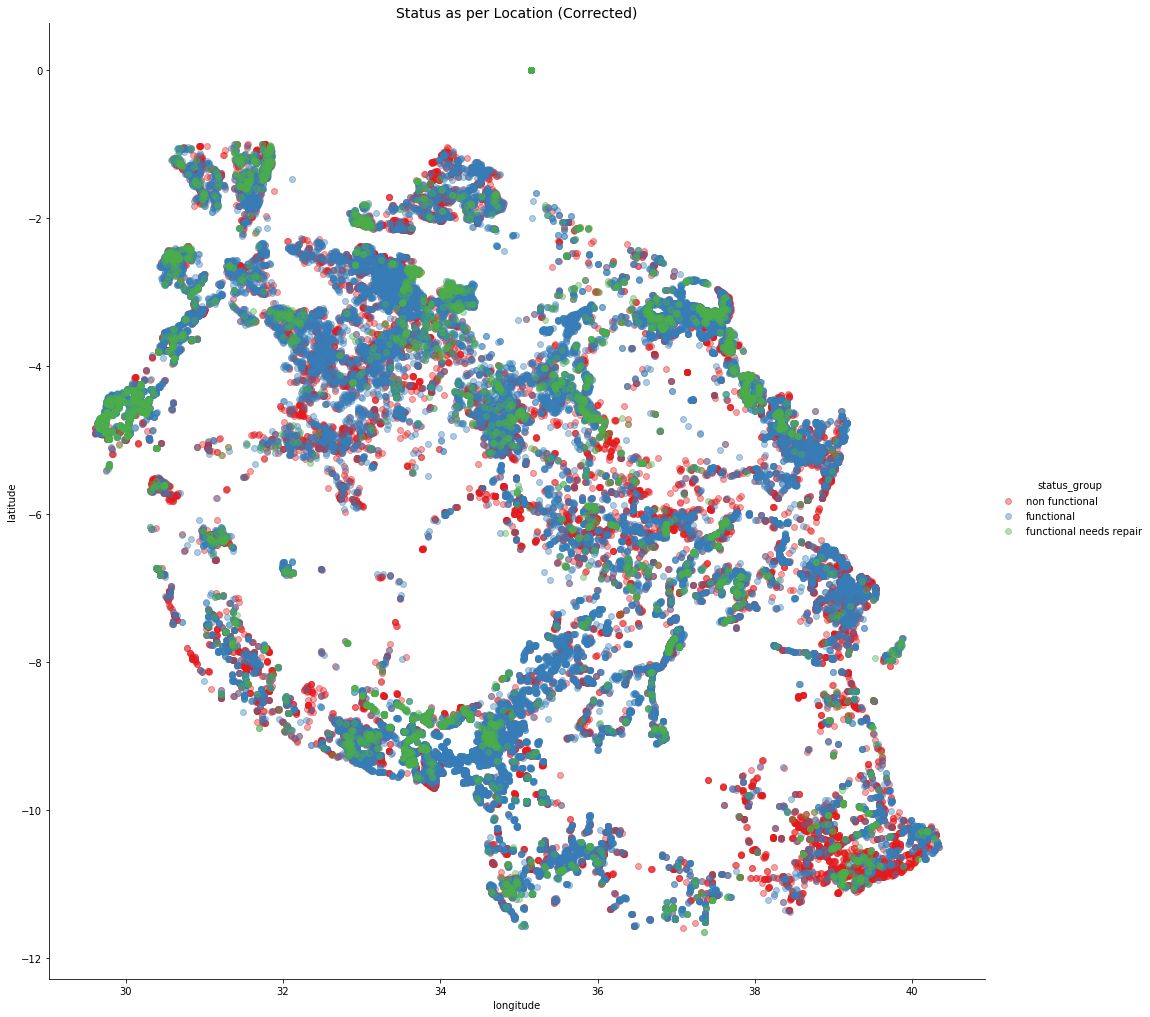

In [74]:
sns.lmplot(x='longitude', y='latitude', hue='status_group', data=df, fit_reg=False, size=14, 
           scatter_kws={'alpha':0.4}, palette="Set1")
plt.title('Status as per Location (Corrected)', fontsize=14)

**MissForest** is a machine learning-based data imputation algorithm that operates on the Random Forest algorithm. the missing values are filled in using median/mode imputation. Then, we mark the missing values as ‘Predict’ and the others as training rows, which are fed into a Random Forest model trained to predict. This process of looping through missing data points repeats several times, each iteration improving on better and better data. The model may decide in the following iterations to adjust predictions or to keep them the same.

In [75]:
data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABH4AAAP5CAYAAABgp+j3AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjAsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+17YcXAAAgAElEQVR4nOzdebxVZ33v8c9vrbXnMw8chgCBBEhiZsmoxKtxSLRarW2TXofbwVZ7O9vh3g7X1r5ue3ur97Za9Tq1VastajVqqiZm0AQzkgAhAxDgAAfOgcMZONOe11rP/WNtyIFAQggJsP2+X6/z4uw1PmutfYD9Pb/necw5h4iIiIiIiIiINB/vVDdAREREREREREReGgp+RERERERERESalIIfEREREREREZEmpeBHRERERERERKRJKfgREREREREREWlSCn5ERERERERERJqUgh8RERE5KczMmdnPvkzn+gsz+6eX41xnCjP7hJn9aNbrfzezD57CJomIiMhpQMGPiIgcNzPrNbNPmdlOM6ua2bCZ3WVmb5i1zU4z+4MTOPaPzOwTJ7fFzenlDFiOcf4vmNl/HGXVPODWl+H8c4APAv/ziOV9ZvYxM9veeH8Omtn3zezNL3WbTtRL/L7/MPBnZtb+Eh1fREREzgDBqW6AiIicUb4B5IFfAbYBc4DXAN2nslHNyMw8wJxz0aluy/Fyzu17mU71PuBh51z/wQVmdjZwHzAN/DHwGMkvuK4HPg0sOpETmVkARM45d8TytHOudiLHfLk45x43s37g3cAnT3V7RERE5NRQxY+IiBwXM+sAVgH/3Tl3l3Nul3NurXPuo8651Y1tfgQsBj7SqEpxjeXdZvZvZrbHzMpm9qSZ/dKsY3+BJED6jYP7mdnZZvafGt/3zNr27MaylY3XKTP7uJkNNao8dpvZ3zzHdTxnWxrbXGdmD5rZjJlNmtlDZnbhcxxzZ6Pr0Zcb++w7surJzNrN7LNmtt/Mps3snoPX0Fj/i41932xmTwA14Pzney7HaM/PmNnjs+7Hn5qZzVqfNrO/NrNdjW36zey3G+t8M/tHM9vRuD9bzeyPGkEUZvYXwH8B3jLrWf2nxrrDKpHM7CIzu7NxnPFGpVD7rPVfMLP/MLPfaVTnHDCzfzaz/PNc4n8GvnPEsk8BBqx0zn3NObfFObfJOfcJ4JJZ51xkZrc0nsG0mX3TzM6atf4vzOyJxvPYDlSBQqMy5/+Z2UfNbIQkZHre59rY5mozu9vMio33011mNv9Y7/vGPheY2Xcbx9zfeM/OnXVMv9GWA42vvwf8o9yr7wC/8Dz3U0RERJqYgh8RETleM42vt5lZ9hjb/AywB/hLkm4/8xrLs8A64KeAVwAfAz5jZtc31v8O8ADwz7P2232c7fpt4B3AzcAy4CZgy3Ns/5xtsaTC49vAj0kCg6sa2zxf5c0HgU3A5cCfA39tZj/TOKYB3wUWNM57GXAvcLeZzZt1jCzwZ8D7gQuAXc979Ucws1cCXwe+CVwE/HeSCpjfnLXZF4H3Ntp8PkkF10RjnQcMAj/fWPenwJ8AB8OxjwJfA+7kmWd1/1HakQduI3nPXEnyjK4FjhyXZxVwIfB6kmf3DpL3w7Gur4vk3jxyxLIbgE8452aO3Mc5d6CxnQHfAvqA1wGvBeYD35odjAFLSMKlnyN5D1Qay99NEi6tAt57PM/VzC4BfkhSIfcq4GqS+xdwjPd9Y997gSca9+71QAvwnYMBHPD7wK+SvFeuIQl93nWUW/YwcKWZ5Y5xS0VERKTJqauXiIgcF+dcaGa/CHwO+DUzW09S9fB159xDjW3GzSwCpmd3+3HODQIfmXW4z5rZ60gqEe5yzk2aWQ0ozd7v8M/ix7QYeBpY0+iOM8BRgojjbQvQBnQAtzrntje22Xwc7XjIOfdXje+fNrMrSIKVb5IEDJcCvc65cmOb/2FmbwXeA/xtY5kP/JZz7tHjON+xfBC4xzn357Pasgz4b8A/NL6/GbjROXdbY5tDXaacc3XgQ7OOt9PMLie5P//onJsxszJQfZ6uXe8iCSve45ybBjCzXwN+aGbnOue2NbabAn7dORcCm8zs6yTds/7XMY67iCR82Ttr2bmNZZueoz2QBCiXAOc453Y22vSfSUKZ60nCLIB0o93DB3dsvBd3OOd+f9ay1/H8z/WPgMecc782qx2bZh3jaO/7X2/s899mLXsvMA6sJAlzfhf4W+fc1xrrfwd401GueQhIkQRc24+yXkRERJqcKn5EROS4Oee+QfIB8q3A90kqOB40sz95rv0a3VL+1Mw2mtmYmc2QVAed0LgrR/gCyYfvp83sk2b2lllVES+4Lc658cYxb290tfmgmS08jnY8cJTXFzS+fyXJ2EgjlnTnmmmc90LgnFn7hMCG4zjXczmfRjekWX4MLDCzNpKqlJikCuWozOwDZvaImY002vl7vPBndT6w8WDo03B/49wXzFr2VCP0OWiIZOyoYzlYuVKZtey4EsJGm4YOhj4AjXGCho5o057Zoc8sRwZyx/NcLyMJFF+IVwLXHXHMgxVw5zS6y81j1nvOORcDDx3lWAcDKVX8iIiI/IRSxY+IiLwgzrkKcEfj6y/N7PPAX5jZR59jsNs/IOma8jvA4yTdf/6a5/6AD0lIAId/sE8d0Z51jXFRbiDpvvNF4DEze0Pjw/ALbotz7pcaY6bcALwN+Csze7tz7vbnae+xeMAwSRehI03N+r56EgZzNsAdY53jeUISM7sJ+HuS+3R/o32/QdIF62S246D6UdY91y+mRht/dvJM1c/Wxn7nA7echDYVj7HNkcuP57kebyh15HG/S/IMjjTMC/vFXVfjz5ETaIeIiIg0AQU/IiLyYj1F8u9JlmRA4hrPHmT21SRdp/4FDo21spxnxpXhGPsd/LA6b9b3lx7ZgEZVydeBrzcGzH2QpPvP00dp7/G0BefcYyQzQ/1vM/s+yYDGzxX8XH2U1we79KwjGVcmnj0T1UvkKZJrnO3VJFUs02a2jiQ4eC3JGDxHejVJt7VDU4yb2TlHbHO0Z3W0dvyymbXOqvq5tnHu5+uS9Vy2k4QqFzTOcbCL4e3Ab5rZx48c58fMOpxzE43tF5jZ2bO6ei0lqWJ76gTacjzPdR1JIHksR7uX60jGWNrV6Hr3LGa2l+Q9dnfjtZGMB7T3iE0vJKlyOloFk4iIiPwEUFcvERE5LpbMhnW3mb3bzC42syVm9nMkY5jc5Zw7WOGwE1hlZgvsmdm4ngauN7NXm9l5wCdIBtCdbSfJILRnm1lPo7vWNpIuLn9hZsvN7I0kgx/PbtcHzewXzOx8MzuXZFDeKZJBpo/mOdvSuK6/MbNrzWyxmb0WuJjnDwauNrM/NrNlZvarJIMn/11j3Z0k3a++bWY3Ns5xjZl92MyOVi1yPM42s0uP+GoD/g/wGktmp1puZu8iqXD6WwDn3FaSwYU/b2bvbLRllZm9Z9b9ubzRzmVm9j9IZp6abSdwoZmtaDyrFM/2FZIKmS9ZMrvXdcBngG/OGt/nBWtUcd3Js8Ot/0pSXfOImf1co23nNcbL2djY5k6SMO8rZvZKS2bf+gpJ0HL3CTTneJ7rR4DLLJn565JGu95nZge7zu3k2e/7TwLtwFfN7CozW2pmr28co7Wx38eAPzKznzWzFSRVWrMHCj9oFUcP+EREROQnhIIfERE5XjMklTS/A9wDPEnSRepfSWZjOuhDwEKSyoyDVTr/k2RA2u+TzFZUJPnAPdtHSaofnmrst6hR7XAzsJTkA/uHSWaYmm0a+MPG8deRVATd6JwrHeM6nq8tJZIKoK+ThCBfbKz/38c43kH/lyQgWt84x4ecc/8O0Bh0+s0k4cLnSGYd+xqwgmR8mRPxkca5Zn9d55xbRzIb1TtJZoX6m8bXJ2bt+16S5/ZxkoGrv0ASNEASznytsX4tcDZJmDTb50iqdh4heVavOrJxjfv/JpLBsh8mmSntAeCXT/B6Z/sscJOZHaqUcc7tIJlR7Q6SZ7WR5H6/jWTmq4PP4e2NNv+IZJyjfcDbG+tekON5rs65DSSDSp9H8vPzEMl7+mAlz9He90Mk9zQmCW2eJAmDqo0vSJ7JPwOfbxzT44ifKUtm33tHo20iIiLyE8pO4P85IiIiMouZ7SSZSvyjp7otPynM7AHgUwe77MmzmdlvAD/tnHvjqW6LiIiInDqq+BEREZEz0fvR/2OeTx34rVPdCBERETm1NLiziIiInHGccxt5ZuweOQrn3GdPdRtERETk1FNXLxERERERERGRJqUSaRERERERERGRJtUUXb1uuOEGd9ttmqlURERERERETjk71Q0Qma0pKn5GR0dPdRNERERERERERE47TRH8iIiIiIiIiIjIsyn4ERERERERERFpUgp+RERERERERESalIIfEREREREREZEmpeBHRERERERERKRJKfgREREREREREWlSCn5ERERERERERJqUgh8RERERERERkSal4EdEREREREREpEkp+BERERERERERaVIKfkREREREREREmpSCHxERERERERGRJqXgR0RERERERESkSSn4ERERERERERFpUgp+RERERERERESalIIfEREREREREZEmpeBHRERERERERKRJKfgREREREREREWlSCn5ERERERERERJqUgh8RERERERERkSal4EdEREREREREpEkp+BERERERERERaVIKfkREREREREREmpSCHxERERERERGRJqXgR0RERERERESkSSn4ERERERERERFpUgp+RERERERERESalIIfEREREREREZEmpeBHRERERERERKRJKfgREREREREREWlSCn5ERERERERERJqUgh8RERERERERkSal4EdEREREREREpEkp+BERERERERERaVIKfkREREREREREmpSCHxERERERERGRJqXgR0RERERERESkSSn4ERERERERERFpUgp+RERERERERESalIIfEREREREREZEmpeBHRERERERERKRJKfgREREREREREWlSwaluwLGY2Q3AxwAf+Lxz7m9OcZNERERkljd99S0EAZiBcxCGcPtN3z3VzRIRERGRWU7Lih8z84FPAjcCFwC/YGYXnNpWiYiIyEFv+upbSKWS0AeSP1OpZLmIiIiInD5Oy+AHuBLY5pzrd87VgNXAT5/iNomIiEhDcIya4WMtFxEREZFT43QNfhYAu2e93tNYdoiZ/ZqZPWJmj4yMjLysjRMREflJd7DS53iXi4iIiMipcboGP0f7b6M77IVzn3XOrXTOrezt7X2ZmiUiIiKQjOnzQpaLiIiIyKlxugY/e4CFs16fBQydoraIiIjIEcLwhS0XERERkVPjdA1+1gLLzGyJmaWBm4HvnOI2iYiISMPtN32Xev2ZCh/noF7XrF4iIiIip5vTcghG51xoZr8J3E4ynfs/OeeePMXNEhERkVkU8oiIiIic/k7L4AfAOfc94Hunuh0iIiIiIiIiImeq07Wrl4iIiIiIiIiIvEgKfkREREREREREmpSCHxERERERERGRJqXgR0RERERERESkSSn4ERERERERERFpUgp+RERERERERESalIIfEREREREREZEmpeBHRERERERERKRJKfgREREREREREWlSCn5ERERERERERJqUgh8RERERERERkSal4EdEREREREREpEkp+BERERERERERaVIKfkREREREREREmpSCHxERERERERGRJqXgR0RERERERESkSSn4ERERERERERFpUgp+RERERERERESalIIfEREREREREZEmpeBHRERERERERKRJKfgREREREREREWlSCn5ERERERERERJqUgh8RERERERERkSal4EdEREREREREpEkp+BERERERERERaVIKfkREREREREREmpSCHxERERERERGRJqXgR0RERERERESkSSn4ERERERERERFpUgp+RERERERERESalIIfEREREREREZEmpeBHRERERERERKRJKfgREREREREREWlSCn5ERERERERERJqUgh8RERERERERkSal4EdEREREREREpEkp+BERERERERERaVIKfkREREREREREmpSCHxERERERERGRJqXgR0RERERERESkSSn4ERERERERERFpUgp+RERERERERESalIIfEREREREREZEmpeBHRERERERERKRJKfgREREREREREWlSCn5ERERERERERJqUgh8RERERERERkSal4EdEREREREREpEkp+BERERERERERaVIKfkREREREREREmpSCHxERERERERGRJqXgR0RERERERESkSSn4ERERERERERFpUgp+RERERERERESalIIfEREREREREZEmpeBHRERERERERKRJKfgREREREREREWlSCn5ERERERERERJqUgh8RERERERERkSal4EdEREREREREpEkp+BERERERERERaVIKfkREREREREREmpSCHxERERERERGRJqXgR0RERERERESkSSn4ERERERERERFpUsGpboCIHNvAaJEHH36a4S39zIxuYSy9m0quTjcF3nTBdVz7U+886n71/h1U16whGh7G7+sjs2oVqaVLnvd8Dz60htvW3c7I9DCdgxO8+tFdXLRjLwDeqlczb/W/ndTrExERERERkZeWOedOdRtetJUrV7pHHnnkVDdD5KQaGC3y7R8+SXbT4+z2B3hizk6wmK6pGrlKiiiV5d3n3/is8Kd8z73MfPozEEV4Pd348+Zhvk/+5pufM/x58KE1/Muj/05urEhu5AClXIpi3uftd2w9FP6M3HgNQ3/yXxivjNGV7ebS3kuZ37rgpbwNIiIiIiJnGjvVDRCZTRU/Ikco33Mv43/6Z7BrFzgHuRzZd7+L7j//EHDi1TQv1Nr+MXKDA8TtVbbk+wki8MMUxYxBeobcFNy28e7Dgp96/w62/OO/8ljnCsYLnXRXp7lk224Wn7uA6po1z9nO25/8IflSRH66inNGoRQC8ONXLuaiHXsZ7k3znb7djO/8HpWwQjbI8vj+jbznFe9V+CMiIiIiInKaUvAjTafev4PSLbdQW7ceA1KXX87Y625kfT3PyHSV3tYMVyztZlFP4Vn7lu+5l/Hf+m0YGwOz5KtUovL5zzMGtL3nPZRWr8br6MCfOxc3M0Np9ernraY5ESPTVaKpGR7rm6DsB/hhGs9CsDRB3YgKIePF0mH7bL/rfu5sXUprLkWvq1DM5Lij6zzeODzI4szwc55vrD5FVzUmjsJDy/KlOge6MgDcvaqLLcvbqI8OEnoxFnjsnRnGt4A/uOoPT+q1i7xUXq7gVkRERETkdKHgR85oD20d4dYNQwxOD1JP9xPHB6iPxXgjHSzMXcgFY7vou+1+ntpaofvaK+k7fxlbRnZy67b/oFCoML+1lzedew0rF50LQGn1V2FyAjwPAj85SexBFFFZ/VUyZ5+N19GB19YGgDX+fL5qmhdiYLTI2v4xHt00yFilQLYyih8HxH5M2cuQq1fxYo9SIWbh6OH7PrK/QosXkdu3nziOyaXSuLZO1tVyLO3re87zdqfamMlUyIXPBD+lfIqOiToAGy/uoJwOcH6Mc0AUEcUhD+x9kKHpQVX9yGmv3r+D0urVuDgmGhqi9sijlG+7nZYPvJ/ca6471c0TEREREXlJKPiRM9atj+7mH+/dTuwdICxsoDqZIQ4zeH4Zb9Eww9kV7Em1caDQhe9D1+N7yZUm2BtspF4NSI0GRLltfPHAbuDnWbnoXKK9eyGMIDjKj0a5nFQJzJ172GJraSHat++kXNPAaJFb1w/SUp4iN7KPOJWlFLWTLteotJcg8nA4yhkjjo3r0/MP23+MDB1Tk7h6HUulIQrJ7t3DeM9cMqtWHbbtkZUPb5jzCr48Mchkd8BMe0AlF+M5uOqBMe55dRdT7WliA4jBPMwZjph6XOU7T/+AD7zyl07KPRB5qVTXrMHFMeGmTVgujz+nl3hikplPf4Zg4UJV/oiIiIhIU1LwI2ekgdEiX75/J4YRZXdSr2WIowyOmCjO49di/PYhdoYXkw1rtNTLTKQyDNa240cBXpShirGnkuesfZPc9tidrFx0Lv68edQDH+IYPP/wk+Zy+H19uJmZQ5U+AG5mBv95qmmO5mhdTtaO+rTlAlKbd0A6zdm+sbe6mEprEW/aJ85WKecdmarxtsFOXvXL7zvsmN1enZlsgUIugyuXcZU6pXSWnp6Owz7UTvzDJyh+6v9BqZR0Z+vqYtmVV9CTinhkZRoX1DCMoGI8fF0ri7bniGOPOF0HHEaUDFnnAOezYfipF3z9Ii+3+ubNVNdvgFIJr7UVr7cX62jH7R85qVV7IiIiIiKnE+9UN0DkRKztH6Naj4jjGD81QxynccTJSoPYZSFTwoDY86h7PqUggxfMEEcZzAzPIMJjf9zKyOgAAPmbb4L2jiT4qYdJ9U8YgkH25pvIrFpFPDFBPDWFi2PiqSniiYlnVdM8n0NdTorFZKygYpHS6tUMDwzTkglwU1MU0h6BB10WEroUtM1Aqo4/3cu8XZdyybU3PeuD6uVMUVq0hFKhAyu0UDlrMZVXXMLKwjPdt6ZXf5Xixz4OU1PJtdXrMDzMwxsHePScbnABfqkNm+kkTBvlrM/mJX1QTx06hgNiSCqAQqNUi07gKYq8fOr9Owh37sJNTWGtLbh6nWjnTuLRMbyebgaGDvCNhwf49F1b+cbDAwyMFk91k0VERERETgoFP3JGGpmu0pHPUK07wloeZ7VnVjoHfo2o3oIDIvOJzKPm+8T1Avg1HJAyh4+j6IV0lpMZF3OvuY6uf/g4LFmSVMI4B/k82fe9j+4//xCppUvI33wzVigQ7duHFQonNLBzdc2aQ2MFmefhtbXhdXTQsXcHM9UQa2tjUVxizN/B7r4HiFuHqUV5wloP6XyK/V3zuGPL2LOOu2h+Jze2lGldspCJ5RfSumQhN7aUWTS/89A2pS98ESqV5Po8L/kC7l5yJa51HK/uY7GPh8OzmCjOQrZInA6fdT6A2I+Ip3v0QVlOSwOjRVZ/5S4+/lf/wq2VdvZMVAg3PEb45JOE27dTe2wDg/kuvjfmMf6Du2h/cgMz+/Zz6/pBvadFREREpCmoq5eckXpbMyzry7NrdJpwfAGZrqdwxLgwjQU1nF+nPrYMYocRkzVHBajPLCTbvYmUObw4TejV8P0K16fOOnTs3GuuI/rW91nbP3bYLGDdjfWppUtedJeQY40VdOngXn5YDmlZvATW/YDS4ieIMh4GEFTxohnK5T4yrXt5av+5zzpuZtUq5q9ezVkdIdbVgpuZIZ6aIPPWm4HkQ/Cd+SWMX76UztIkF+/dzPzpETBjrNAFthtcEoIld86wVAnMgV/HxYZ5LjmZs6T0xxxde3pY2z921JnSRE6VgdEit3z7AVJ330Hn2DAlAu5a9iquf/rHzJ/an1T2TU2zdsMuWlb2kRsfIRzYgffUk+SuXcXa9qze0yIiIiJyxlPFj5yRrljaTUdLjkI2hat3UjtwAUQZ/FQRF6WpjJ6PVypgntEWVmjPpskGAa7eTWrsXLwoIAyKRFGa88bO4urX3nDo2AcHWC7VQvraMpRq4Un/7f/BsYJmczMzLJrfyVsvW0DL3DlsnjdJNVvFYsMLPXyAdIUwM8E0JSyTPmz/h7aO8OFHp/iDtmv5q5m5PLx7+rCKpEcGtvHJh7/G41eWmViyj9Euj7uWvYqh1l4AuovjBJOduHRE5MVEQQipCp5fJ4l6HGYOF/vEUQoXp3AuIA5TjE0UGJ2unrT7I3IyPPjw06Tuup3q1BRPdS/hybkrGGrv496lVx7aZqhtDmsXXsRjB0Ie9zqYbOvGzCO4fw3DA8OnsPUiIiIiIieHKn7kjLSop8BVKzzu2LmRnp4p4norqdoyvFIr+6crWORYHE4ypxAwNqePmdhox1jakqI4naZ0oJtCrcJZtUl+0R+kumYNkFTzrO0fo6U8RWrzDipTU6Ta2mhZvIS1/Sfnt//1/h3Utm6jdueduFSKYMnZpJYvxzyP/A03sKinwKKeAuueHsRzOQIzIvPAgRc7yExSml7MhcuemdHrW99/lH9euxeLItpSHgc6OvhKZi6Fa8/lqqW9DE0P8s0t36MeBxzoWM72YJLwnAhv7yJ2dczjlx/6Gq/b/iC7l76VcrtR84t42THMHHGYwsVpnFdLqn1cBHEah8PzQ8LJhRywLD2tmRd9b0ROlrEP/yUD60bZMOdcti9dijMfnCMIa2zrOZvz9m9jzsw4dy1/NemoDqUatXTAky7N+bWIFNCxdwdwxam+FBERERGRF0XBj5yRhqYHeXJ6DXM6jTDsId0WEvE03W4lwd42fM/jZ6+85ND205U6+XTAFUu7Wds/xvDAMG2b1vPKXmNh5xLczAzTn/4Mft8cnhzvYKZYodzRTUuhm0WlEu0b1jF8wWVw5aIX1e56/w6mP/0Zov7teIsX48bHCDdvIZ6aou33fu+wLmSWzuBVjSBVBiCOjdgceHX8TJ0tufv43W8/xsxYwO6Zffi9RfJxgdr0PCojIZ29Hdy6YYirlvWyYWQD00WPkYmYSZehlu7EKOPmTLMpXs6/XfkzvGvfI/zWpSv40vTZ9E8+TiY3hqvmCeo+YTYkrrXjpabBi/CCCnHsE9azUG4jzM9wVmfuRd0bkZNl4h8+QeVzn2fTG3+HbXOXPbPCjDCV4QAeX7/0rVy8dxMt1SJLRgfY0ncu2RgyXsz2TDcLSuOsGtpy6i5CREREROQkUfAjZ6QNIxtoSbdw2cIW1jy9HyNFEMTsr28m8C5hYXeB6UqdlkzATDVkqhzymvP6DlXTzGz6Ea47wmtMyx7XakT929kzUWZvVw+en6Flcpxq3MbjtYjF05PMO/BD6pf3vKjxfapr1uBGR/A6OrFcFub04splcI5o5054zXWHtl2x4DIGtq+lWMuTCmqEQR3nVcF5BKl+9m8NmQraiFqLRMFZUG+jHNTIdj9Namw55YmAPfF+Pve/Ps59vVOMuz4q4RziqJBMVe8KWGYK5/n0dy/iXlfm3d/6EtctXEluv8++K1LUfI84X4QALA6Iozzm6rg4II4y1A4sxZxaH6MAACAASURBVAd6Cg/x+Jb5XLXsDS/yyYq8eOUv/Qs4x9beo/+sulSK0UIHT/cu5cpdGzBgxfA29i65gBlSgOP6Pevo3TnDzBcXk1m1SlO9i4iIiMgZS8GPnDHq/TuorlnD9rVPcNtZowwxl1IqTxgE4KfwfaO1pcR7rlrEJYu7WNs/xv6pKj2tmUOhz0FHDq4cbt2KtXewPujm7OIIuwpzqJWqBAO7cKk8/X6G12+4nelPj9H6gQ+c8IfAaHiYuFbH78g/szCbxU1MEg0fPp7I9Re/g92lMTbt20etDrELqGdqhNU2XJin1OrwMweIwxyWnqFWa8cP09SBVNsQE/vrtNbWsbHiSE0ZtFfwcoOEpQV4cQHzakS1pB0WO7Zkuqlv+AH7Cys4e/8gQ6UC8dwRIs9BnAKL8LyQqJ4lrnaDRcRRgfbyJF4csHHoYUDBj5x68dQUAPUgk8zMZ/asbUI/hQGldI5CrUyHq9I12k8xnSNbnmFBZQJ6e3HFIqXVqxm78R2sr+cPG/B9UU/h0N9L0fAwfl+fQiIREREROe0o+JEzQr1/B/d89qt8c6aVrfkriDPbcEEdr+7j/DJ+bh9xqkSFVn64bQuXLL6Gdz5Ht6yDgyvbwYqfqWlcrcZoHDNndAsZ62dPyxyKmRz54iQt9RJz92yjnvco3XIL7b//wRO6Dr+vDy+9GVepJhU/AJUKlknj9/Udtu381gXceNFb2c/X6R/tJ/RicEbsMjg/AAfmR/j+FH6mmHRjKbdjUZ5KMIUrVEiXY2Zoo1bNEVkVYoefGSMqe/hWJpxcQeT5VL2AKh5u3zAdgzvZn2rBanWoZXGZGnghxD4uyhya5Z44GdOnGmTIVDJMu+kTuiciJ9PAaJE7X3E94yGYc7ijhD4AqTDk3P39zGSSQLhlXi/lQjvTo5NcObQJl/II2lrx2tp4pJzlX773NDOtnfge9LRmeXrvFDctCuj+/i14HR34c+fiZmYorV59aEB1EREREZHTgYIfOe0NjBb5+6/+gCfmOgj2EtanCGvtpLNDOL9CkB/HOcM5j2IpxxPlNXzk9pB/eNcNxzxmZtUqSqtXA8k06hvyxo/m+/T3jpGezrDs6RKv2Pc0AMV0jly9ApUK4fAwtXXrT/haMqtWUXvyKaL+7ZjrwHDEk1P4S5eQWbXqsG2Hpge5fceP2LNnkIrrwc+N4gVlUq27k8GWwzTm1XHExLU8nl/G6xohjtLElTydbpqh/DJwHn4cUp+JsNYRUoW9+NlRXJQjcAHx6LnElYDYPIZaerh426N87ppfIMV2ov091DvL0DKFizLEtTx+dgovqFKbTmYDq5tPJRcwh5YTvi8iJ8PAaJH/+72n2HTRmyjV4iT0MQMc8EwA5IU1uksHuK7/YQA2zj+f0dFpOienecP0HuYXfPZUfDYeyLDrzm1s6F1BPR3S3ZUMsr5vokyxEvL9/kHe29FxqMvowSC5umaNgh8REREROW0o+JHT2sBokc//eC2b23fi19LU6gUsCEln91KbnE+2dwt4Ma6eJyx14qIWYr/KE+OP89H/WMjPX332UWfiSi1dQv7mm6muWcOj+3fzzfPz5A4Umbd/ksGOTja+MoN7FDoOGDOZAlftWp+UuYyOMnThK7n34YFndfk4HqmlS2j9wPsp3fIt6uvXETtIX3M1+Xe841kfFDeMbGDXnp2UwjwE4Pl1sAgzMK+GS9dwzmGkcM7HSxcBR8qrkKm0M9adIq4UiWodVIMUnl8mlT6AeVW8dIiLa6S8CmlvEq96Hmft3svG+edzw+Z7cNlJpjqgnilBHEC1BS+oEORGcV5IEEzjZw8QlTqISz1YHHHxgiuPftEiL5F6/w5Kt9xCbd16DPj08jezji4syJCijtVq1LwMz4Q+Dj+qs2hyLz+34VbmT+0HOPQn2SzBokXssSx3zr2A4ZYuNs5ZTjGVw5yD4Qnmze/GzKhFEZumYmzJ4YGntbQQ7dv3st0DEREREZHno+BHTmtr+8fYW9tEFGVJhYb5llSemOHnpomr7YSVToLsBKnCPlyUIax24AU1Ht4xTi6T4q2XLXhWMDMwWmTtqM/IWdewoXA3mf3TtHoRcXWchaMx+zvb2HxeK6+9d5Srdq0/9MFwKNfJmmWvorcW0teWYaYacuv6waOe41hSS5fQ/vu/97zbjVfGKE2OE9GNF0zhnMPzDvWzagRAEEcxXnoKYo+gliIdwlRtDrGfw8+P4aIccZwl1bqTVGYGh4cR4vlV/KCEl5oizRiTows4UOngU6/9KXZcGOPiTlLePiw7geeFOIvw/OiZBroyqdYycVCGoat449XXHvdzFTlR9f4dTPzd31G7406YbnQvTKWgvZ11C38aP1UjyGbwcjlSmTRWrFB3jvlTI/QUx5k3OUxLtcimeSvY19bHxUObngl+nCP7trfy2D2b2dfSxfq+8wi9ACypGRoPjfSBabo6W5gpx1gmg5sZO1TpA+BmZg7rtlnv38F9tz3Il4cDdlqe0A9oz6VZdd6cYwbTIiIiIiInk4IfOa2NTFepuikyLk1oUWPMDnBRmiA3hpeaIpMbx8UBEGN+jXTbLuqlLg7sHaQtt4C1/WOHfbgaGC1y6/pB2nIBPbVppiZ24xc9MrGRdQ6AoAozHfDU3GUMdM5n0YEhLh7axMYFF1CozDB4931s8Do44GXxfJ8nBg7wxz994Un9ENeV7SZTrGItdcwPMc/hIg+zGKwxYK1zGA7zwmT8nXpAUDEizyOqdeBZFa/u4+eK+JnJZJ/YMIvAS7rAxH5Erb3E8AVjeHEHT76iC6vXcHEGlxvG8yLwQjwvPqx9B4dOscwkLeknmDe1H3rUvUVeOvX+HYx/6EOEP74P6vVZK+owOUnNebgoxpUrxL6HeR6plE8cxlwzvpXrnvgR31rxWnZ1L6TupUh1zKe/ayFvf+IHAGw85zJKtoh1C7L0t/ZRbwwAbXGM8zwARks18oWIGMeFy+YTb3kKSCp93MwM8cQE+RtuONTeNV/+Lh+LFjFGkIwzHYaMTcMdj+9jvFjjA9cvV/gjIiIiIi8pBT9yWuttzZAZa6PQMsn4dEAcJ79591OT+OlJwOGI8NMlaAx+7JzhZ6eIOtdSGQgo9V1y2DHX9o/RlguojIzx5MatVLoLuHyVwagbnwwT+Q7wK7goTSmVYyZdIFOvctfyVzNa6GSilGF7azdR5PCp4vwUTw5O8n++9xS//+YLTtqHuEt7L+XhmTL7WmeoOcBiDHDOTwZ2thg8h3mOOPTxvBpkHOGBeZjvsKBOXOkm2n8edT8g0/MELvawWaERGJij5gqQc+w+J4WXKuKqOZzv4aWqEPtg9WO20/ccle797Lzvuyxb+psn5dpFjqa6Zg3h+g0Qhs9eGYZ0lSbY39JF7MA3jziOqYWOAhG9c7u4L/9m9nodBGGNYrpAOZUl7pxP1Q/oKU/RNqcLv1JhIt9GNcgQxCFg4PuNnxcIY6MWxqyY186Nr1lG/rKeZFavffvw+/rI33DDoW6b2++6n0+7hYySSv7eIobIEVrEZCXm3s372bJ3mhsvmccbL5qvAEhEREREXhIKfuS0dsXSbh4bOp9tufvJ1CCseHh+lSA/Sr3cQ6owjOeHYI1qFEsqYHy/BK37WL/9e1x/bjL2zENbR/i3uzfzxN4pPBfjwhg/aCGaWox1bWKmNUseD88rU8tAMDQX302TiuqMF7roKo7zdO9SplJt1J3hMGIgiCKCVIote6e5feMQv/q6ZSfl2ue3LuCm+HzY+jQPrOjBpXxco8rG82rJsCWNoCsZ5NmgkqIetZBKlcGPsKkVmO8lm0YZCMpJYIRLvhrHiGst4Feo5yOo5nH5IkGqiKVKybk895xttQgeO7CRk3PlIkcXDQ/DzMys4HIW53jbkz/gCyt/lijIEjkjjMCZR0vpAPMqkzzUs4J0GDJa9wjqVfL1MpUgzYaFF3H97nV0LF/C4y5Pnz/JPhyR+aRchIsiYs8DHL5z3DA7qOlZctSBnAdGi3xvX8S4Sx1aFsaGM++Z12HE3rFpvrNmiu07hvn1t12m8EdERERETjrv+TcROXUW9RR436uv4Mre12CRRzpToqNcwyvliGvtmBcCYSPAmLWjB15qmj2Lirj7v8l9927k77/yY3ZsHyJTq1LGY9pLMxMaqak09ZHlhFGaShukakZqcCH5yYCJXDvpqE4pnWdPxzxqfkDke4dOFSdnJ5fxiWPHk4NTJ/X6z33Xf+UD6+vMv+8Spne+ibjchdEYZyc2nPNxURqcjwvThLU2vHSJueUy84bnQ9iNpVK0ZXxS5SV4Lo2LZ90sZ8mMYDHELiBb8ogqbaTa9uDnxzhYEZRse/Q2xg5ypSwHopmTeu0iRzo0ds4xpmi/ftuD/OITt9LpRUQ4Us6xtLifV473c1/rYgb9PDuy3ZTTOVyhQD2Xp1Roo5rO8cTcFYysf4JSpkDveefSUZnGmVHzfCLPxzkInOO61DTve+2y5w1o1vaP0daaJ02c/EMbuyScPSgGMAyoRrBl1yjfv+epk3CXREREREQOp4ofOe0t6inwu69/FT0PbWZd0E24dRubLsjipaq42MeSX8Q/M3HPwbFnvIiUlXlw9H78H84hrHgUPMeEc9TjJPN0uWnKrbvxU0W8apbwwDl07plgqKWTA/kUnnPka0XaKkW29yyirTKDmTGZa0+qi7yk6qdSi4mdY99EiYHR4kn7rX1q6RKCpUu5aHQXWyZew3TtetqWfgcvVcHM4aIAMMw5fBcS7rqY64aHeePCPCN9XXynbS67RoqkAo8Let7IaNpn69g2vHQxKZoIU7hqO4FXJlXOcUPQx7/lRpMuYV4ylhJB5bD7eiSHUSjm6AzSJ+WaRY4ls2oVtLfD2NjRN8hmuXFBhqC3TjkOye7sJ9wzwGRbF/1eAT+KCM3HgHHL4DJ5DKMlqlJMZ9ncuYhgYBfTYR3ntzcCplkzgoU1Vp7b85xt7F+/mX/9xv3cG3bgHMRWxaUyuKP+niWpIKqbh5nHE1uHXsTdERERERE5OlX8yBlj5Zws7VGNYrZAOLkAzysRhzni+Fj5peHHEfvm1xmJ09TrEcMuxXiQB8DPHCDbvQn8OmG9gAtC/J6n2Te/AM5RDtIUU1l29CymjhF5Ph2VKc6aHiZwIX7qAJnOjeTmPgxt68l5w3SO7eUbX7qN/vWbT9p1m3Ncny+zYmI3UaWdqNZJWJpDWG0j+RF2eLWAdCnDDebxvsvnYL7P473nsKS3hQvOaqO7Nc3oRIEbzvp5VkysoD6+gvrkPOJKG37kiKbm8ubq+axYehGpwjAubCGqdBNVup7Vo2Y2F3s4l8L301zSc9FJu2aRo0ktXULbn/wxdHQk4+4c5PsEl15K219+mPSSJYwWQ/IWY+1tEDv2FHop1MtkS1N4cUQ5yFAKMtTxKEQV5lSnCOIYz/OJSkX6vRYmCp0Qx8kXAEYNn7/fVOXNf/tDfvHTD3Dro7sPa1//+s186l9/zAOVPC4OqZtH1QtwMc8c59C/usnrmvmUIpgMoVw59lhaIiIiIiInShU/csY45/pr+bl/vYXbZyYYTi9nyjufbMdmXD5FjD0z7g2AM6yexgvrxOmQ7MQYxWw3pSDLwfKgVOse4iiTjH0DhHGOAEi1DDBWvYzYC0iHNSyss7v7LFbs28pYSzdt5jgr6me0Z4R6nMNVc7TGE2Rzu8ntC3nEy3LPj+6j9QcpLp67kpve8uYXVQFkHe3Mn9zFb2z5Jl8773o29nZCx35cpY102EJ3fZKoI03LZIHXF8pYoZMnzr4a/Dzb9k+TS/n0tGSYHJvk37+9l8vjs6lPhOzKRUQd+8j4k1yaDbjsHTfyT1/YgC2q4adnsKCCefVj9aohmV4tIK4V6Nvdw9lvf8sJX6PI8Wq9+SaCefMorf4q0d69+PPmkb/5JnKvuQ5IZtLq+e5aZiZnaO3qIvP66yluG6deKlNNtzCvOM5wvoNykAGDtuIE+cA4d3KQqZZORtN5ptJ5cDEeyZhhcaObVpzKEMYREDNZrvHJO7fySP8Y87oK9LZm2HffE+yu+6RclVomn3QRM5+oUTnke8nxQufAZgVXzlF2HhMkY5HtOVBm2/A005WQtmyKc/pauGJpt8b/EREREZETYu65fp1/hli5cqV75JFHTnUz5GVQ79/B1Ec+yq4dQ3y593IG2/qY7p0gXroZPz+KWYSLAyz2yZUiYs/IFY3K5reyr6WH0E8lg8KaUZj3AFG95dB4IUkKGpMKZnD9F5CtVqilMtT9FJlamZW7N1LP5hhbvJz9fTsJLaQSZWgvT9MeljFvlLE+j3BqPoQBnfVxKi0B57a8mve/4y0n/KFt5otfIhwYoPzNW4ijiP3txh3XtTHS2cKBfIHIpWhv6ead4fmc8/NvY8PIBu7YvJVKKUc2Wkp70Ec8M8Nk/wBbrYW8B6TGqXduIp/tYNV5S+jrNtZu2s6eB4qMnb8DL9cYr8eixvTxz25XHPnEtQ6Ku67k/Vbg3X/8Syd0fSIn28BokVvXD9KWC2jJBNz/2ABbNw/QVz5AByHlXAvbgzZqsaN3ZpyrK3tpD8sUqxG5TMCX5l9NaAaWDMbsMCLzwIxMVKO9ux3noFitY2Zc1JPGOzDO3pFpDpCi7gfU/BR1L+mKeXh6Ortf6sHXPLMsGRCIuXGFlmqJ4aCVKBUQpDNcs7yXXzmO8YVERETklDvWr05FTglV/MgZJbV0CW1/+Aecs3o1vxKmeGjbdsb3lClvMbZdHTDVDc4Mvx5hsU9EhpliH2OF7me6LDU+hEX1Fsyv4eIMBsyhymTGJ6jmiQKPsXQ3sRmeczhz7JizhDeMPsX9QDaYIj/lqMRlYufoLE4wuCCZ+dyv+5hzlK2NauTYPPE4379nCe9/5xUndM2ZVauIVq8mWL6caHCQubHj9fdO8fTFPhMtVbqCNi7paCf7lsv5xpbvMjpUZnywzGQ8QWt2F6n0NaT2Rwx5OWqxUY+NzvYhUnGW0oxx/9ZR3tyygPKm3ZTOqhDFeSyqY37l0JjZR/uXy9ULFAeu5MKxPNe++5oTujaRF6vev4PqmjWU7ryLaPNmXL1OZu5cXvcLv8RT51/F/qkqK87pY3DrALl8FvMhwGOuVyeqVki5kEk/y51dK5LB3D1HtRbjuQjn+Y0Bmd2hvzeyUQ3fMyZKdVzsiOOY3NAe6qkMM5k8pTjZp+6nOPpPzqxlznHUkrrYYx95gnQaDyOoR3hxifu37KceOz5w/XKFPyIiIiJy3BT8yBkntXQJ+ZtvZvGaNZyVdfh9fbhMhq1/+z+487WdTLUEFLNZdrefRVBPMTn5CmLPO3xGHaA+fRbZ7k3EQL4SEdcnyIYR5dELmAgKeHGM7xyxGZVUHgds6F3GxaV97CvXqVXHqVc8Btv6GMm1U8uNEtdyRH6Kup8iNp/IM7z0DF97dIjeyh38zLvecELXm37Vq6ht2kw0NYWlUszr6GHB08ZgtpOnrr2Bb877/+zdaZCd133f+e8559nu3rd3dDe2BgmAGwSQIimSomRtliybtjWOLZXtjOPEiT3j2K7IjlMz82Iqk5lyImcSp2YqVuzYJblimxpJkWTKsi2J2kCKC0SCBBeAWBpAN3pf736f5ZwzL26jCQggJXGRZOJ8qlBdvT39PH37our53f+yn1NPP8F6q46qxYgkphvkSeMMK79KEJRolixeUsBvT4DfQqUFhNE04pTDJ5ZYzoq0Sx2EkWSdflRurdfuZc1lW9MsgFaYZj83reT5+bt3Mnlo/6t8VB3ne9e4/xPU//X/AfXLt+llxlD5T/+WH/3d36X0oQ8C0P3mI5xaTmiKiIIwHGrP00o0p0Yn+arZTQeBzSyJleApDD5o3RuCvjlBXmUpoQCdpGS6N9BdGs2cV6Dfg9Cz2BhS/7scdH7V0OeS60BRJMMIgd9tY5KMM4/N85UvfZoP3DBA/gM/fdVV8o7jOI7jOI5zKRf8OH8v+ZO7r7jhGf//Psm7v3qME9fneHLPKEE6gN3YRhoM4NuM2A82X2EHEOi4SndlP2FpmpKeo6+pmXhG8/hQHlHsHVNg8bTGCkmnUmU1jXlTNsfIQo6pQYtvMsZNk/lA9RKROCJVPloqTBDj5ZcRQpOMHOc/nxyi8E9/l0PLp6+YS/Jy0qmzJA8/THTXWwgOHSR77jn08gorb303D+++g41OymOnlumMLPRa11QOkYvwTYb2BBuVVYYuxHh6lMTv4pefxmYhEKNljiQ11NspjVyASUub7V0C3RlERauIoNG7Nqt6m4mMwmiPMKzxu794twt9nO+rJ/7hP+Op+S7r+TLV1gYHiBjj8uCH1VXsyAjtj318K/h5//vv4DOf/AaF5jL5tEvbj/D6+pADA6SLbaw1INXlx1EKay3SGkrtGp0gR0d40I7ReCCgSoqWkrlU0Mb0tgy+VoTAphppDUYbfN0llj6rMXS/8hX04iKlX/tVF/44juM4juM4L8sFP84bRvm3fhP94d9m9HjKnLiOdm6AM4M7iFWAzNUJS6dQfhOdFkkbE5hOGb+ZQ7f2cfsz07xt6lsgBIff/x6UTjerdgRSGKrdOnEYstvLiIf20deqcZ2/jfnSaTqyy66VOjc/coZPvnOAZmCwMiUozYKFtDmOUBl29Cz/rdHPgdM1zMYGtf/z/wL4juFPfPgwzw4nfKN8jDXZpn8iz9vqhzjfGeb8ycd5JlonG0mQYR0rNCbp67WaBClR9RTWS1nb0UV0u8jONrpZHkSK9Lpoz8eXPl3dQkeGeOUGwv4zyGADa0JMmkcFjc2wzGIzb3MYtiXv4UIf53WRTp2l/ZnPkj75JBYIbj1E/gMf4Nj//nt8qZ6j6Bn6m+u0gxwP7n0r7zr5EGP1pcsP0mySdTrUPvL7qJERtt97Lx/42bfx6EPHWNnoMtgX8aNvPcBvfu4UqZFcPbGxRFnMUFxjW3ud8wwRK484CIgCSaAkZa1QRtPKBA0tyV7jXZldqSglMVpKojQmTFOqG0tcqCc8sxHS+NyT5A5mWAvawlApdIOgHcdxHMdxnMu44Md5w8i9/W1k//J3aP3hR1EC6oUKHekjc/VeS5cOt+b6RAPH6S7tpdCyWOnx9MRNNMMCi4Uq9aCAVRIQSJ0isTT8PJW4w/v3+Dx3/QHCnMdw6BHNL7H6zAneefZBspU8cm4ndjwhqM5hshDdGcJkvfXxBpjZbvnCs+McWDzFmFml+V//5DsGP1+cPcpfjc9D3SevFbbQ5lN9p0nma8yUBans26zUMQTFeZImWOMTlM+hwi46KWCNJgjWyQJDWhtDCEu6uA9RXUBENYq2QtKYwCvMocJ1pN8CaiDA6F7bipAWoVKsDjBJjkpp4PV9QJ1rUjp1lsZH/wt66gyi0ofEkjzyKHpxkafmOxQ9QyGLASgkHQCOjd1wRfAzpwocm7iJ+lJI9fQZDj74Tfb9k5/n53/j53js1DIPPDXHFx54gfVE9gYqX3WQlcUCqQy4bfUMe9dmyHWatN/1XvIH9/L4mTWaTUl3fYMktSjpYZDo7+WCL2mjvBqtPIyFfNol9QJ2bcwyUl/iyxOHKNWb2AszPN71IE45WIbmdbt4oNblvkPjLvxxHMdxHMdxABf8OG8wpQ99kOiOOwg+9wTRTB2kvGJtu9UhBvD75qjH+9m9fJ5Ipzyy61aaYRFpetvALBYt1eaMG8HelSnu+fVfYLI8zJGpVZbqMYOjw7zj7huAD/DRB55Cv3CBbClChh10WkR6HfziLFLFGB1gg4jFXJUHd9/Ju144zPhTT73s9UwdPcFnq3W6aQ5pcyQYWo2MoazL/MQscXsXKlzF92KMDsm6/aigiVQJQhp00rvxy0LIhESYBqq0RLIxSZIOIBf60EKQz68QjRxH5heRXgvpxVs3pL35swKT+YCH8GKEUUzk3/q6PpbOtSk+fBi7sozsqyJyEQDzXpGnuhUOT04w2FxjvL5AX7vX3pVPOqwVq5cdY648zIN734oB1tbaHB+5nsfSXfz0xz9Hp13gY8ebSAlxvY3vRWgVXdIG+iJpDNJaCkkLtKGQ1lntG2HHvkliX3HndQOcW46oiYzpmSV8C7WwSEd9W8vYy3mp4MdolDFoKbFS4VnDwbln+ImpR3h6YJJCq0YubvOcX6VgFpD9VWa6kgNPP0nxTbdyZCpywY/jOI7jOI4DuODHeQPyJ3ejDmQcajzMSe1vtXddyuoA5bfoCsXJ4T29IatCgDUIowmymEz5GCTSGrY3Fhn1Lf7kbrZNneW9xw+jFxdBecx+zedv4zJrXoUBT7MoPHRaRAU1vNwa1noYHSJUjFQxJ3aOc8fp6V6VwumHX/Za/uZrz9Ic1IRtH4XGCElb+ay3U3R/C8+ukNmod3ypkaqLTipkcQWVByEzvNwq1qjejB4vReY3sHNFwizpjSVSAfXCAjJaQwV1hMxevAHe+rVYpJdijAWjSJvbGB274fV5AJ1rml5cxCQpqq9XKTcr83yxvJ1CbZWB5hqtIMcLQ3vYt3iavm6DdpCj2tq47BjHxm7AANP92wnSmH4b0/A87u+/hfXH5wj6KhRzPrNC9mZhZfEVW7iE0SAEifJYC0t8cexN7KovMHbHm6jnijx6Yon+QsB1YUZ5fZbzfoGmDEhFr/VLf/u8IABrXqKl7HLCGDyTYaQiyhLunn6Sf/bYJ8D3wVq+tu0A/Z0NEJJ2lKfYaoBOaA5tQ+TyBOfOslKovJqHwXEcx3Ecx3kDeY2nETjOD4ehUkhYLtInzVZ716WEStBpoTfMVcoXt+sIiVU+qQwIspgoiwmMYVCkjOyZ6M0euf9+bKsFvk/yyDd5/NQSJc/Sb1PW0t72n7QxgcqvYkWK9Bt4+WVUUCdLCszuVuSTNuuFPsiyl72O43VDZEqQ652ishofSyPyEBqCNO3tkLcCgt/i0wAAIABJREFUazwsAqG66LSItQqhYkyaA6tAatCKrNMPhRaZ8tDKI9Qx+B1kUEeI7KotL0KAtQqMR9qcQJjwqguJHOfVUiMjyMDHdnvtXEf9QYqtdfIbK2zvrmGlRFjDbN82WkGOZljgwNzxy46xXuhjrdBPkMUYqZiVBZZFxHzYR90ICpEHcUygMzyjKaRdCmmXgcYKfpagTIbSGWCppG36OzU6+SJHdhzkBa9K6Cvu2jMIwNefX+Rp2UcU+ORMgrIGIyXSaiQWJS0RmsG4RjntIK3mshKfi1u87IsfU7Y3UN4iGGqu0MyVoVQC3wOtqcYNOqUqIvApoEn9kERDoVGDKKRZbzJYCl/HR8lxHMdxHMf5+8RV/DhvSLdPDvC58zvYu36aRy5Z2251gFAJUsV0NyZf8vuNUnRkDi/L8JWlWspx9/vuIj58GNnXhyyXSR95BNlXZb1YZWh5iR0793AkLiI0ZHEVmwaofKPXyaF9TBaiwhbGKo6N7OOWhZMQRS97HbEfkSzvI932BDIKiWxIV3dI/S6YAFOOEXodkRax1gNhsVlI2pjAyy0jc0ubbW4KYSUmzZG2tiGDNolQWMCzGcW2IBb6paNgARiBUAkmKUJWRJuX+NpXYHqlxZGpVZYbsRtOe40L772X5LnnezN+bB+rnqK6soTI5Rm5YT8ceYqZsMpKscoNi6e48/zRy+b7LA4FbOxe5MK4JWgpmp1JpBV08Gh7vSq+9WZCX9yg4As2NKTSY6S1yt1TT9AMcrxv2PIXfQdYsT6p8kgq/ZSKESa2rKzWKUU+RHB3aYhvnDzFgsozERkyDxY6HZZ0RCIVUehxYNcA77hhmGcv1JhZbbHS6DC91rlsbTvwYvhsDUb0Kg231ebpj5sUkzYUiwS7dmGbDQ5ldb7ctxuxARPddZ4p7MEazZ72Cs12jma+zHsn3Qwux3Ecx3Ecp8dV/DhvSDsGC/zUO27ijjtvYDIN6a7s32rvsjqgu3oDOu7NBVHhOtHgMxS2PUI0+AwqXO8dRAi0p9jfWeLn+tpsr4ToxUVEsdc2ZuoNRBQyIDOaSUbVM0QS9MVWDiEwSZmsM4yOq1idBysQXszxbXs5sHgStW/fS17D9EoLWyqTbYzjn7sZYkFDNGhLg7UCK8FYBcLg5daRIkO3+8na/ei4SmfpEFlnoBd0eR3AbraEpei0gJYSIyWdIKLY2obNgu/wW7VY4wGSrLH9NasomF5p8cDRWdpJxkg5pJ1kPHB0lumV1mtyfOeHTzp1lubH/4zaR36f5sf/jHTq7Nbn/MndlH7tVwnuuhviLtVug05lAP+GfchSkcGRfnavzXDvmcd534mvXxH6PHJXlaHOAqoTUC/m0NvO08h3yIKAPJrAk6y1EuqxJiiXCHyvV12jDc+N78OPAsKbbmbZ+gzpDuNxjT15w0RgCDxJJ708sUnDiHYGoYBCLmBPf8RbCimHipqfvWs3/+EXbyPRlomBPG+eHCAfhr1Kv60Kn81BWsaAtYRWM9FaYe/6DJOddXZ1VtlRX0ACxV/7VdTEdsaaK7xn+Tny/RW08rh5/Sw312fQfkAUN/mpd9zkglPHcRzHcRxni6v4cd6wdgwW2PH+Q/zc+w/xkT9/hKOn8iwlklh5WCtA9EKf3PBRhN9BCI20a3i5ZTpLhwCICudpbK/xqCdQn/5TRlUV22wiymVkuYTtxhxMZ/lS+XoW2x5t09sChASrI6SKQWZYoxBSI7AYHaGFYLzoUflXv/uS539kapVbhiOeXojpNMaQjXE2ophw1zdRCaSiiMjXEcKiu2UwAiVjRHGB/m1PIlQXhEYIMMaDLETIhKA4T2t++9bPsULQTobwZicwe0685PkIYcnaVbqrN+ClFW5/jSoKjkytUs55vSoK2Hp7ZGrV3by+AaVTZ5n69J/yF+MzPLtnhVRY5JOfYPz4KL9y269zaPRW/MndVH77XwDwzpUWn/6zv6WVxRQtNJVPMyxw5/mjVxz7xL4iubYm36lzkOc5vOctpDbAy09TaA+ic3kKnqKTWLKux0ZmkfmIG6Xh0PgQ+bhDMx3gb3WRglmnqXwqfQXExco8o8n5l79eEg31k5teJk4sYaAgzYjTlGh0ZCscXW7EjJRDRCToL/gE1qLJsCjE5lBpI0BZQymLGWmucNvKGdphnqYXcWDlDGDR585R/pe/Q+OjH2Vi6iw7zBy620JfmEXm80S3/Cj5D7wHf3L36/oYOo7jOI7jOH+/uIof55pQHh3kJ/sz7iymVEy61VYRVE/i5VZQQR0VNFBBHS+3Qjj4dK89zNestIo8I0I+P9xgwWtjNjYw9TrquuswG+tsW53j0IDHs02DSDM82asIyDoDZJ0BrFFIlWCN2vpYZDTVf/dvX3aV+3IjZnhxhtvLht0DObZV86jKHAJNbAtoG6G7VYxWSL+FUm0IWgTlGaTf7gVNm2uqpcyQQQMVtnqbv8J67xPWoiRYq4nSl8+Bs26V5sy70HGFQ1H6moUyy42YYnj5zy6GHiuN+DU5vvPD5dzDf80fb5/iaLRMKnpVL0bCTLzAf3ryDzi68ORlX3+xei+Kmyy3MiKjedfJh65Y3w5Q6/PJdXrPv+0bC1y/NIWfWAJZozg8wO5tfYxXCwyVQ0b6S/ycnOc9QZ2DxaS3Gr7bpv/WAwzecYgdt95EK1+mgY8xlnpXo4xm57YqjW6KtZZGN6V/sMquncPUpUenHdOVHq3hMfoHq1vh6FAppBln6JUVwvkLeDqDzSVinjUoY5DGEOiUXekGmR+yWugjSjq8e+4pJgKDzOXQi4ubFVG/RnDXWzDdGOl55D/wAfo/+odUfvvDLvRxHMdxHMdxruAqfpxrwlApZK3eZEexzPmNFhth75X4oDiD8GKs8bHGB2EQXkxYnqa7dhNWh3SkoWgF66bMs9EKk/f9FvHhw9Bs9tpRsMx1PapxCxkWkT7UtKHWmMAbWQaRAQZEhvAS0tUJRn39sqHPpedc7SvSL3pDoI/bBjrLI6QGK7HaR5sBpN/GZDlUbg2kAStB6MuOZ+nNGhIyRfkvtlEVyWjhYcsK/2XOJ2uPYjtlbqbOb77v0Ct4FF76OptxtlXpA9CMMzec9g3qWPs0FwabCHrBh0RgAYOlkdb50vSXODR662XfM3loP9srIQ/9+Z/wYH6KIx/cR3V9krc+cZ5bzs5vfV1lI6WTl+S7vff3rpxjvr+Kqku2b88TZ4bUWN68e4Cxao6fHNzBRz/3JPnGBlTKBDffhBocpGgtldFB/un2Ag88eoaltmYoL/nQ2/aw/cY9HJlaZakeM1gK+YV7ekHLF5+Z49kLNUBw23iZ9x4Y2wpHb58c4DOfe4TWE4+R14q0uheten/vWgkwBoVlQKTs6s8xcOxZfmz5WUQ+B4HGtgxy2zbUyAjAZkXUh1/Ph8lxHMdxHMd5A3HBj3NNuH1ygE/ny5SSmBuSFab8MjLXQEU1EAaExuoArAdWIrx2731AC0FmQceKep+PP7l761X1j339NJ/51iyrWYwMU3JYhgQM+5aatr20RYCl11rWu8O1DPYXX/Jcv/2cRTummA9oGYHVJYwEL7/WC3dMb3MXRmJ1gFQpQuhe6HPp1i0BUmmsTJFeh7Q5DlgkkAtC1jJBX8dHaxBX20KtYagecE9+jfe//w4mD+1/lY/I5df5wNFZoFfp04wz6p2Mt+8fec1+hvPDo1bxSDZDSYMgsxefGGB1ysmVWT79+PQVg74fefhBPiHOU5CG/tWUdt7ns++5Hr4Et8wsgzHsf6HJI3dVAUOuY/BFk+tqJ5npvpXVZky1EDBeLSGl4PbJAfzBAmP3KNpJRv4qweM9d1zPPW87cMU1XK3a7Vfecf1LXvPQc0/w1j//Ax4YOcBD4wdJVQg629wo2PvXV1/izVVDuO9mDs0/DXMJZrWDTVOsMYhuF7Vr16v63TuO4ziO4zjXJhf8ONeEi+0i3/z8NzgWDCJzDaKB41jjIVSKEAbhN3vtF8oAlrByhqQ1hsxyzHQlw6KNGtvPpx+f5vRig6fPr3F+pU2gJL6yJAZqRtFqp/SR4Q9fQCcVbGd46zyEivErFzhWP8gH/s3nsZlmR87ywbsnr7jBvPScl20ZFfiI+jYYapJ1BpBBE+m1sUjaiwdRYR2/NIfk20KfTdbY3rwhJGljojdI1mS0E4P0JGG6m1brPKK8/G3fCOV6if/7V3+NsdL46/LY3Hdo/LIqirfvH3Hzfd6ghiZvITj/Am1pL19sJcBYuLBW509feJySN8pgKeDkfIMP7lB88akHKXiWQjsDxOZbeOi2ndwy3xvIPhINcdcji5zYV2Sj4lNpZPz0F08j3/lmztw4ykqj9/d16da41zt4TKfOUv+938OsbjC3q59MeYQ6RhmDFRKlMzLlo4OIoWce4t2/8UG23TZE808jug9+BZnPo3btwt+3l+Thh/G2b3ftXI7jOI7jOM73xAU/zjXjYrvIf/uvR/FLpzA6RHf78XJrIFKkTHvVOcbHZAEqWidUCXZ9DC08ukMlFtr7yHVazK23mVluo40mzVKsEL2bWGvIhEcdie+30OnllT0XN4vVswyFxEdwvAP/8cEzAFeEPxfPOT58mM9eaBEZQ8N6hOVzyKDRGxZtfHIjR8AESL/5sivZhRV0Fg/2NpoJi7YWG2dE0iJaHmn8duSOx/DKswhpsMZDbQyyLfip1yX0uWjHYMEFPdeI2254Nw+tPcHz7d7AYjaHGwMY7ZN1BqH0DNIELNX6aMeaLzx7ivWSoH814dJUM99OWe8PEeUy+X/8y/T9xj8n+BcfZuSvHoAkgSAg+MmfpPO//i+cmVrFXuV8Xq/g8R//wZd4fj3tTW1+8z9nqLHMSGsNoxRBlvSu1xqQgjDrorC897kHGR8swOBu/OuvxxsbQ5bLW8c09Trx4cMu+HEcx3Ecx3G+Jy74ca4p/uRusuA4ajOUydojvXXnYQ1rez1OJsuhu1UQGdJvI8ur7GgMUq/fyraxMU7NN9Bra6Smt6ULIbB2s6dL9CaX7ExqzCR5ZFhDBS2EirE6RCcFdFJGIlBYhNb4JqMmJPd/7cRV20outpad+tzXSOa/hJJdpN9EiAwhbG9ws2pjTYgV2dWKfXqMT1zbTdrYCUAu7TCQdUg0ZELQUR4d3QdTPw7W4gEHy5biyADL2ctN/3Gc795YaZzfuudf8cv//ffw8ud7FXYWdJojqV2PjgeRfgKFaSI9SKI1z6+n9Ke99q5Cp1fpg4V23idoSh75L5/ptYY9Ps3t/9u/Ycd//A9bP296pcUDR2eptWKeuVBjtRHzn7/0AjsGCtww3seekSK3Tw7wM3fseFXXNb3S4u+OzfHcbJ2nzqzQ1YatkEpIlssj1MIins7IpMLb/P9DS4U0hkp7/bKQRy8uokZHL/sZolhELyy8qvN0HMdxHMdxrj0u+HGuOQOlkMW0iFAJJsuTNrYTel2s0KA9dLeKNQHgYxGIRj971nbxTLjZCtJN2VhcQ6kyRogXqwgEvS1ZCtJyBdvZIBg4idEhVgcIFRMU67TmthNgkJlGC0FOgMYy07KkU2cvezW/8/Vv0L7/E8ystpi6czs6iPD6zyNVuhlU9W6ChRRYusiXqvaxvUDLZDkAVLCK33+eTNXRcYRcG6FtRhDWYhCbS88s/o7ttLRhKHLBj/PaGSuNEy78NGvtmGj0MXRa7M3B2qQIaZpTaO8FTNRmdV+EOFGiWzYguuTbvRBovRwxcG6IdpIxUg65sNbi3//1EhP9+a1A58jUKrVWzOHjC7S7KRaLRnJ6oYG2llygeODoLPcdGn/FVT7TKy3+/OGzzKy2UErSteaqX5eEBUr1ZWqFvt4HrMWIXuXf+57/Krn/8R8ydfQEjz50jIUZweDMDG/e2cfO0Urvy5vNrQHPjuM4juM4jvPdcsGPc835xR/Zy7/722XCgecw9AKRLO7DQ6OT8mboA0JqjPEgjpiZWWHvsKYZZxQjn3MaKiJmTeUwWAQWayUIQZkUv97AG62TNrYhwxZSxdgsJGtVUFENUx/DIDBC0hA+1lhyUl7WxtH5+jd44f/5Y54evp7HJnfRVU+RZgUCv4O1F3ciid7tstXIqwxlvlRc24EUFhWuEw28QJoFNLI+ZBCjxqcxdUOUq2HCLjotktYnOHJ6mZG+PB/+sZ2v4yPiXIt+3Fvn4xTJ0iJCJqAvbnEzGHUBE82jbT82KRKKJnM3d6icrEKWsV6VhC2JmtvJejDMs5/+O/r6y5ztH6dhFUv1LosnTvOFTzzH8nCbbsGS5oqQjCHMABKLsZqVjTbLjS7Xj5Z49PGT9C8/Q3LiBNMLNZ5SVdZyfQyPDXD3++7aGmieTp0lPny4V5EzMkJ4770cWVGstxPK+YDTM2tw9dwHAIll5+o0s33jZJ7PYGOV/+GZv+E9Q5a5Dvz1Rz+DyedY6xvhRCvlkTnDz9QWOTT7HHp1lfBtb7siIHYcx3Ecx3Gcl+OCH+eac99t2/n6iet54oLA5qZRQbM3V8RIpN/BmhQhQMgYE1cQa8O0usvsb85xspMxVA6QnkekU0pC0ZWKTCiwhkAnDMYNsswg/SamW0R08hTiNp0gAiFQUZOukFgh8K3ZukcsBh7Tc+vcuPn+qU9+ni+PHaIUCuJMEydFVBRj7cWKnB4Ll71/NTouY7MSRgf4pQu9KiQTooXF2DxWxuS3PUVaH0cnRaRKyA0cJ16/kbj9HQ7uOK/Ah/Q5vqr2Md8pEo4cA2EwSYhI8sjCMrpbwuqIAENB++jMozvW4sbPSQ7MHufBffeyPD6GKZU4LTwabQ8v2WBgoELSanOufZTmLXOAxmYFRGrwhpvEy/sQuh+FoNNNaXYzco0N5r51jPN2mS+v5nmytJtK0uI63WF2Zpnf/9ST7HhunT39EYPfepiFfB+r/h4Gltsc/IvP8MXKIZ5fSchM1gtlX+YJ2Q3zvP3sEd459TgHNs6z47oJ/Nt3AYL/Pm852j/JhswRZSljhRTZavLJ1ZBhr8jOt9+MjCLa999P/kMfcuGP4ziO4ziO811xwY9zTfrN9+7nzx+OmNvYzbFz68TGoPx1guoLBIUlLJDVtxHNDhO2Q2YrI3xzZZrBE8/zXH4bcaFMq9mhaBL26xaVTpMjuVFS6TPvlQhECkkeVAKZB0IQZgmZbwi6PihLurnuPUIz5FsOhTFPFbdtBT9PtgOKVSjajG6i8VYH8CfmMN0iKr8BInvxgr5DNpN2BpAqprsxSdR/4sWh00KANcig1WuBsXmUBZUqAi2JSucJaiUeeGqOO68fuvK4V6l+cDejzndDjYzQvrBBrjCNbvXh+Q1CVUOETRKAJCIvNZHN8CQIE5LkO7Te/l6Or92MSCSdch9CCAoYVoRPYi3FRgvTPENr/wWsVQhdAGnw8mtk7QG8yhzdlYHNDfKW5587R6OxxER3nQdaDWbDPirZOsL3eSocgcAnl3apzS4ys6D5gphgt4VuKnhOl/lUVmZuqbt5VfI7PherpYhf/+2fQ587t/W80SurPEkf31wpYQ0Im1JXPuvkKEQh/arFsYFDTJx5grReQwQB7c98hspvf/h1fYwcx3Ecx3GcNwYX/DjXpB2DBX7hnl0cmVqlmg959sIG3bWY1swhWkIQ6BShM7qFFvHwHDJo88044ubnHkWO38EuT9GihddqsuzlaOar7Bku0V5c4YLI01QBQW0baugUwgYEWUyoYjzd5p/c+GN8fWOQ2umztP2IQiDZYTpU4iYb2w5tneN6/zCDrQ0o5AjTmJgycj5EG4lQXayXgtJYIxBC977pKjedOg2QXkZndRwdV9Gb843sVmuNQHkdvDggsRZlDUZKDFHvRjzTLNe7Vxw3nTpL+/77kX19qNFRbLPpKhGc79qXh2+iVfsyUkfIzCeLKyRCUM7WCbxpwmwDzy+jNqdoZUojTYml/W/isWeL1JLe36kVEmMSlABtodFJyPUtYCWQ9v7GpZYYfFTQRFiP3iB2AEHHSqYKw6zhc9vqCjrvUci6kMa0owpCBQx1mrS6KQiN73k8Fyt2BJqchDn7vcy/sgyMDbN8083sePvbtj5a+8jv89drFuIu9VwFrTw2kykaMiQNFMcWL3AgUzxZ3stqJ6P60Gneov9frv8HP+6eb47jOI7jOM7LcsGPc826uEL8Z+7YwfRKi0cfP8lXPvkg67ky9SBPp08TDJ7qbeNSKf7oNMfHO9jWGizsJ2/HGa9WKApQExNcp7p8Zt6n43tYIcmyYYIVRVCaJi1kXL/a4D377+Hun/gZ5h+fpln2Cc+fxdbXEeUy8Q23MjI6vHV+2w7dxPpXvk6JDv2pRcVdjK3SyG4jNztCUJxG+m38rsfMjoywMgfWgHxxabXJPLorB8EqVFgnbUDamCAaOI6ht15eeDEC8LsBFkilh8QSyC6qG2I9xVA5uuL3Fx8+jOzr29pEJDbfunXTznfjs+cTcvku3XqIxSKtwSJpqAr75lusDAbEKsHPPIxMSPwMr3YX02md80EXr/8Cym9CN6LV3EGaFEBYMBIKYNMcSI3MRG9oufSQfpu0Oc5mgyQAsR+R6ZTl0iAXKsPkkzaJHxLYBI1AWEg8HxX6PNnJU9e9Ceoz6XcYqvXtjKFPZtw4Ub5imLSp1znXGqCbz6HVxeNe3AhmSZE8Hw3zd0kT25xiabTD0X05vmjneNOffYoP/tR9WzOIfhg8dmqZB56aY6nWZbgScd/BsatWDDqO4ziO4zjfHy74cRw2Q6D3H2L/Y1/kE8+f5fB1dxKWnsPqEBN0CavnQBjAIIqrmF1PsXQhx/r6CJOhJje7wNK549TH3oQRmzM+hKSbDeIt5NCFiF/+B3u3bs5unxzggVoXeei23qawOKPZyXjH5MDWOd393rfwma6l+dwxJlprrIVD5HVCX22e9aiPOB3gtuljlNIOYn2MmUOg8ssoEWMRmNQn2diLzfKARfktAHRcpbt6A36pd+Ms0jzRzPWk1WVC2ya2OZTokqiEbO16KpUC9x0cu+J35tZNO6/U9EqLmfk1grLAF200EUZIlDUIGXPPMzPIvut48E2W1bCDSUuY9TeR6es505gl1/88Wke96rUgwR88gV69EZ30EXsBXlZCxBZV2AApsMZDyC4YSbqxDay9bA6PERItPZ4f2cvk2gy1fJmB9gbSaEwcs2FgqSOo4wEGDC9u83sZubhF7IVIYQkF7BqtUAgDfE9wZGp1K/hJnj9Od9c+lNFXHsT2/q3JHKdVh+TmBvUy2NwqsMwTWUTz65Zf3b79FW8ley09dmqZP/raacqRz2glpNFN+aOvnQZw4Y/jOI7jOM4PiAt+HOcSB/71vyI+dA+PTN6GCNukaYmwPAVSg/XAKpAaIRNyw8eoN36CuU6L69uLPF0cR0R1ovIcym/2NmM1JmiKKtb3+MqGYnLz5+wYLHDfoXGOTK2yVI8ZLIW8ff/IZTduOwYLfOCn7uLILXtZacTsefRbnJrdQBrD5Oo0g611hLXUwiJ964Kpc3eS9C8RVs5hjEJ3hjBZHgChEnRa6FUEIXotX3GVfplyULaYTiS1hQqDuVO0cw1auo90bS/VcJjf/IlbrnrDpkZGsM3mVqUPuHXTznc2dfQEn/743xDKEbQZxR8+jUgtUdegA41HzI3eLm76nY9wd3mYB47OUs55PPH8BZ6YbeL3n0dkPlIHaCF64Szgl2fQyxUQgrQxQS54HpoVCFqYoItAkszeTKmm2Mhf2hNp8UrTREMvoIImK00PlvdwJppEGoNvDV0/ZFV7m+EvqHB9Kzi9+DzXcfXyC7WWGxpznBncxUAgGB2pEJRLPD2zzoGJPtpxvPWl08sNskmPjh8BYjOYgostacoYMiGpb5+mNR6Dl2wmTwLCFqfsI3zx0UP8yk+853V97L4bDzw1RznyqeR72xEvvn2pOWGO4ziO4zjO688FP47zbXa99Tb2L57hQr9El+uooN67CTMWiwTjgfFRuQ0Qgg0V4ZmU+RGPaPAFjA635uhEA8fprt5AKxng/kemGSlH3HfbduDFVrOXc+nXfLoUMvL4k7Qee5wZmefk0C7aQZ6uCkl8nzQtkK2Mkja2Ew0cx1oFWIRKtgY7AyiTUchiJnKS4tgQpYUabR0QJXmG5wbZ3lymz6tB0KX+pspL3qyF995L+/77gV6lj202MRsb5N/3vtfmgXDecNKps3zz898gd+40N+U3+NaOg7AEqjJPp9iBJM992TZ2v2kH7U99iodyOynunCSvFdH8BTR9BH6zt3nOGhC9tiirA5TfJLAGbSzGVBl/Ic/6WAcdRajVCt5KlZYdwNfJZdU+fuEchfFv9Z63cZEk7CAnn8GrzaOygGIS0GrvhqwXcKpwvdcqeZXn+aXhz95khR+5716KNUs31Sw2YjZmNjDWMr/e4c7xFh/7yz/ime4Flj9YJtd5DLV2HWtmJ1YqhDXYzZa0VPmEaon2tnWstFix2dEpLBhBt2h4/ORf8UtT1/3A2yyXal1GK+FlHytFHotXmRPmOI7jOI7jfH+44MdxNl3cUKWKRX780S/zJ+P34o/NAnZzJIhGqgSjfYRIsab3SraQkvO5Qfy++d6adB0ivTYqWkd6LfJBnfb8nXTiAf7oq2cYLkev6JXv5UaMSTJO7Xsz6fw8qxXIBuZIwpRMl7CN7bBZyXNpK5dOi3Q3JtGdEgiBVh515XEyzeg/dYELYQ6bdOnPWmSFEieKfexfO09YqlBtb7zk+fiTu8l/6EO9rV4LC6iREfLve98P/MbTeWUa93+C9sc+jllZQQ4Okv9Hv0TpQx98VcecOnqCRx86xvJGl6G+iIOdJdaCQYrtBjemMWJe8fzgdXSSW/BtxvufexBRqvHHsabaWGe6usrO+EHae69je6EfmZUwSR6hEsheHKosVAJxDqxFYMEKcvWAdbGdscYKe9eDFEJJAAAgAElEQVSnWR8uo5MpzuUHtyrfAKKhXlhrsxAQKANCxlBeRi/tB71GPHQGv5mgwjph5SzGKGxnCMslFUelC73gR1p2k3LPnTdw/wsNjDGst2OsAeVJTGaopwt8ceVb+FENmZUomgZ+aZa4aIkWcnT0CFaI3jlag7UWVZkllSFStYFeqHvx/yVhJLXC2g/FfK3hSkSjm25V+gA0utlV54Q5juM4juM43x8u+HEcejeoX/irR3hK9rES3Y29Zz9Z+RRpYxvCa6KC3nwcawVCZAipSBMfFW4g2gUu5AYo+KfQaRHptfELC1jrYbI80u9sVQTUOwOvuOVhqBTycEMTSsNCMSUZW+hVHWSlK6oOLv7bYg1IednxMuWzlKuC0QypjEVVZjRpEOmUM8URdtiEHxl++Zs1f3L3D/xG03n1Gvd/gsZHPoIslhDDQ9hmi8ZHPgLwisOfqaMn+OwDj1KOAoY8Q/35k/xlPWWlmJHuvJW+dp3xjSVuWD5H28/R9TxW+iUXhuepDbZo9gs6QcyZDUlheg61UaLPq7Pe3Ek08DzGAkYgvBQlO+iN69GAFYowbjNTHUMjkFbz/OBuMnx2xQvc2pkiRXKhOoayFhU00XERhEBYgwg6CO2BlyGNZbVQROUXKFanyLoDIFOEVfiFBdLWKCbLb1YctUBCPvDRgc8TL8wTxppVAlI8hACbGDI0YfECxk9IdA6ERzeXwyPBiC6ybxFWRzZbuXqtZZ7RBOFyb3C11GAtWsrNbjCBTAK8LCM5ceI1+Gt4de47OLY106cUeTS6GfVuyofesvMHfGaO4ziO4zjXLhf8ONe8qaMn+MO/fJgTskTDU1ghsFGZoASIDIECK0EYhLAgIe3kSZvb8UsXEJ39ZEJstX2oaB1rPazxQGSYNI/RIX5phmRt4Kqr0b8bt08O8Hl8KqtLNCcaaB1hdYiVEkyE0eLFqoMrXGXP+8XNRkISCktsJQt+iX7ZJgrg3TPfYM+7fvYVnavz90v7Yx9HFkvIcqn3gc237Y99/BUHP48+dIxyFFCwCenpUySxYa40QWotrSjPcr6fkwM7yScdWlEeEdXI9z9POU2pbTNIYxEioVYp07l5nvBUnhZvxnR8usv7CcqzeF4T0fWRtV3Eur83HNlm5EyKRlCJm/haU0jqrOarHBvcwy3NOYZ0h7izQdPPoeM8UnaxJtfr6FS954XNQnQY45VWEX6HXvWNQHgdrFFYG6CidUwz/+IMLSTtxDCdGFrA3rxkvg2SDCk8rNVYRG+outSQ9TbpISWpDfFkGxG2QWyGtHbzXHINTL4NOocwbYRMe99vwFqPjIDCskJfmH01fwaviYuh9gNPzbFY7zJUjvjQW3a6+T6O4ziO4zg/QC74ca5p6dRZvvBXj3BaFMmUjzQGazSx8vGMJOyfxlqFMQFCGITQmMzHJH2YpNK7gfMkmBfXpEuv1RuqLDKESkmbg1sVARbzilsedgwWuM1rckprTC5GxLnNOKfX2rJVdXDRpZuLxNWCnxc/t+blsL6P1QaZSX6kO8vutxx01TzXCLOyghj+thvzYgGztPyKj7m80WW4L4c5ewHimAulCaTJ2Mj1M9pcYbVqqY126IZt8g1LuyBoM0p9tEVeW8I4JQ0VSqSQ+KzuqZOc8wl1Slj3yK8MU0xKjNYXsaU6z5ZKNIICRgjqymOwvsxQc41Ap3T8iFquiJYeLQ1plGPAM+zM1lmdqlLff440A2MipAAhU0xtDJFvYK2HlAarA7AeJimigiZZt4pUMULFl8zQMlvXv4qPJSWUYIxAG7O1CUynBaRdQ0oNxutFsEpjrE+WFl/8JW4GQH55lrQzSFBYwGgPJZPNzwt0GoCQTIsD/Jmqs/0LR3nLHXt/oBu+7rx+yAU9juM4juM4P0Rc8ONc0848+E2+IQZo+L1bNmMtymRYFWAFCGl6M32MhxUGKxQ2ixBic2hyxyeUgqZ5cU16Pqgj/Q4mzfdCnyyPUDE6LWCxV12N/t16p1ynKzVnOz6piknII6B3rltVB5tMBkhQ6mWO2KsoaEsfZSwoxaoqcyE0rL7zViqv+Eydv0/k4CC22dqq9AGg2UIODr7iYw71RbQ6KVG3C8bQCnI0jCKXxUTeMmxrElImjfO08hl+3zn0+hj4CW3yeKqNwUOKlNQWkWGTMOtVy3X9iFLcphYWWBi7CS0l7TCPl6VUui06QcRC3yihydixMc9GroK0lkLcpC1DKsvztIIcYdLhjtoyXwluRI7NIKM6dHKgS9g0j8zVsdbrZau6N7DY6hwmy3oFQPQGS3c3JtHpZqXdi9kPjzYuPvcsWIPyekFO2tiOl1tGhutocgjRmytkuhXSxvYr1s0rv4k1fu/ZKsDoECEsFoPuDqG7VWwlY6Bdo/bUMR7we1sDv5/hz/RKiyNTqyw3YoZKIbdPDvxQrJd3HMdxHMdxXPDjXMOmV1p8YUFjhCRUhk5myZAgJNIapLCknX5U0MJahRCmNwBWWqxVSBVTXBri5v0VvjTVAHrhT3v+zq2tP1YHL1YE1CZR8KpeCd8xVuXdzx7mZN8BZkfmEDrp/QyZIlWytbkLAHnJTSdwebvXZptXr7mldzOJRGiLUpbW6ARH0zyXHM15A8v/o1/amulDsQDNFqbZoPQ//0/f03E++zdP8OknZ1lLoCB8BtOEnTLPci5kXuSo5fPs3JinPVrHmAKGCKMUaAlJCMV1TBYilKYd5PBIwSjwM2wa4A0fRwRtvCRPQ43QMIMoLBoJxqCVRzssECUdMuUzVxll+8Y8bT9EYlE6YyMq0vED6mEJZVLmKsM028P4p3YzVF8GoWhWUuTgGhKL50tqjR144QZCZlhrMTqH6VZf3OQluSzw2SIumaslQJveF+m4j+7CQai+gCqtYIGsMUa6ugeTlEFeXqGn0yJB5TRCZb3/h4yPMQqsDyboVR8GTT47/mb8+ZTCg0c48cRx7j2w4/tS/TO90uKBo7OUcx4j5ZBmnPHA0dnve/jkOI7jOI7jXJ0Lfpxr1pGpVcqlPGPNmPMqQmUpGEPq+WAsOi1ihUZIi9U+QmhkWEeKjKw9CIvb6bM+pcF+5LkaxvRu8i7fqtVCpwW6tUl0UqV3h/jKhffey/jf/h2/fv44f2H3cLzapvX/s3fnUXbW953n37/fs919qbq1qFRVkkq7ACGZ1YDAGC+YhBjHdkzieIvX9MzJTLpnOjOn+8xMT+f0TE/cOT3T6W6HpGPHiW0cGy9RbGwM2CBjFgESQkhCgpJUkmpfbt3t2X+/+eNWFRKUQCAwsnlef1CnqKvnPvfWrSs93/p+P1+nhQoyeHNriIPiC/Ud8XL3tXAjrdqhtgBSIBFoFBM+TNf98zrXxBvn9e6uWMzxaX3lb1GTU8hKhfw/+8NXle/zvbuf4I5HTpGW0GkJmrHBEfJMOJqOuEZvcxpf9jCdLlHIxMjQALtdgjS0JmpVMEqniJtlrOIokW2QazVoUQarifQ6iM0YHeaxaBL0HUdMZ5CtHKFlIJVCaE0sDZRhkPaaNNM5qukiqdAHrZjPlumtTVDwGgTSZLzYjR2FZAIXQyj8TJ7e5gx98zCZugQ6Lyc0nyKUBs2Wg5GaxrBc/PoAweyGF/K0Foo+hjN3xja9sN7/oswtiSVjbM/DUyVa41chRmMkILRuh0ubL5RqF8V+ATM9h4odUAZCREgzJHLTCMNvd/sFWezAZSbXwYSwyFQD5I8e5tATh/j939zO0PZNr/Xl8Yp2D89QSJvkU+1Na4sfdw/PJIWfRCKRSCQSiQtAUvhJvGVN1X0qG4fY9NhemkIyH/ugDFxhY8ch1nieePUEoDCcufbYV5imPn4deraHrVPPodZupOaF3LC5j5/uPwWi3WXzkq1acuk/58UaWkPuC5+n70t/ye8+f4i/7r+Wp40ygTTb65+XzfJZjqa9Fql9iakFWEphSoECam5AJe+c9/kmzt9o/RT/ePge9k4cIIgVJWMVuWAr6yuDr2t3Rf72j5zX+va7nmwXffKWREchOd+nHpu4hsM7KqBmm6yYPcIT5SHqVMhTg9gklCaxEEhlEM33I30bQ7uQrmPEBh11n1mji8DoIdJpkBDpPMQRTuEETm0NgWmhhMDQGo1ACQNDKopujbcfe4KR8kqeXrGRzsYMRa9BYFh4dopVs6N4pk0uaDJb7AIpmct1ELdqZNMmH99xFb84VuaJeC8xPmGjH1HvQwcV4hc9fsOZI9V5EFBIu4GZHcMuDeNObCOsL260ap/f++1Z9kyF1K0Uea9BZ32a0fJK6qkMc7KIkpLTO/QMp0bklpGWh9YmQmhUbCLMEBWkkYZPPNVP3bGJMRBaEWqBBEbqIT/8x4f5fNF5wzK7puo+PYUz3y9yjslkLSkeJxKJRCKRSFwIksJP4i2rK+/QCgx6rtrO5Qef59jcHLO+otCc5/YnvodhzvDnv38t00YGrXPEymzn+7TSdLbmsR2H3IpOCimTbMpih9XkSc+mabbDm638cVKdB9vrooM83uwWwsYqRqabr/oCPRw+ir9rF/HEBEZPD7kvfJ51x47Rc8xgwvMZFRbxi3JBXp4AoZe6grTWKA1KRWjTJFaaK4Y6X9U5Jl5/j488xx1PfZlJ7zhSCkxDMu2NgnqMw2MVujLd9GUHKVrr2D2cet26K4b3HOLnd93H1MkJys0qb8vFbPzkR0jfcP2ytw+HjzLbCCnHLp6Q1ISNZ2bwhESimZ2tUxkYYEM+R0e1xd5aJ87KOl3uPHNKcdK2ETJAjq4m5WbwCv3Y+RFmrBZCOQT5FrppYxCjhUBJAxFqLKuONA1SoYdrZ4hZ6PoRgth0+OCendx86AEA7nj779GwMzSdDBnfpeg16GjNMZstI4FOt0bDTjPv5MiZLT52zZrTQoqvZWS6yV/t3MPjc1WEUhTiCKUVbsbFKpzCKR5tD52ZwcIGwHaYc2bFbhpBoV0I1hAj+dSKmI+JSbz7f4qamIAwZLS8gn09G/jRums5UVrxkoyfqNmHlZ1AaRMhPYxUFWm1iIMsQX0lppujZRsoubCZUElC1yUnBM8We/B37XrDCj9d+XYBcrHTB6DhRy9bPB6tn2Lv1F5mvRk6Up1s69pGX37lG3J+iUQikUgkEm91SeEn8ZZ1xVAn3//pM/inRig251nXlWFufJob9/wjff48D1xSoHNO0TvaYKzUw0SuC8wAq3CShruRmp1mbV8HfeUsVwx18uBju5AaHlS9mMUTZFc8hood4qC95j274hGaY7B7ePOrukAPh4/SuvNOZKkElsX379/HD/Ie8+kCnpXCSVkU3RazVubVPQFn5I8IIhQKAwfNQGc2GdF4k41MN/nirm8zL4+BlqAF0mqCiBFS0FKzjLsKSzg07Fnc6mXA4Hnf7/CeQ3zn739C5sRROg1oZXLcExmoL/4Fm+GM4s9DD+7j+/c8xeS8i5fpZAobLQxCaSL1Qs+KEOzJreSy6Vkq+RyOZXJjbx/v+NiHFy78Z3n0h08zXh8iooIuVpHdz6EDC8IcgRMhnTpEJtpvj21FhgmGj46yuMJqFzHjEIz2nFQ6dLnlmfv44NP3LJ3r4NwpXCtFNnABeKZ3A007Q0ezSn99glPdq4k1rHDn+PR1q9l8/daXPDe9/d28N2ux76mjzCgD5BTpwvM0jHJ7ZM1uLAW7a2W3x0OtBk75MK3xq0AIJBJVrWL29pL/3GfRjQaqWmXb7bez+n//PzhQHWU6W8a1Uyx2CcZh+z0kbPZiZiYwnAYqdlCtClFzJXb+FIGbIfTLGCiEBiUEzxX76Q3r5A2TeGLivF8bZ3PFUCc797RXyecck4YfUXMjbtjUs+ztR+un+MnIPeTsHJ3pCq2oyU9G7uHdg+9Jij+JRCKRSCQSb4Dznz1JJH5FrahNctOzPycTecxky2Rtg/elG/QZIQDzRZN8MyCyHZRh4MQBRCaG4xKlUjSlRcOLl/JVfsM9Rjw9i0CfFu7cvnjTcQoVpUh1HGDvsdlXdZ7+rl3IUgkdBOzcfYy/67oCz3Qo+XW01sxGgqZhtzcBnQ8hMaOIPDHXbUxWMb/Z/r8fHWA2PA5otDIRRoDWsv25iIkUEFlMu9OgUnjm8Otyv3f/bD8nXNjfvZYDnauJLIe8VDyV76d15zeXbvfQg/u4456DzMw327lYQjHv5GhKC1RMHCsEmnTQohELjgUG81NVqiOjbB09ROE79/FutvD7Wz7GH215H5snm6xyZ/CLE+jAJopTOFKgVZrQ7UTk5lBWhGfZCOkhzID8bCeGjomFJKUVXUGddx7+Of/2h//hjKIPwNbRgzScLE07jQY6W3M0Ulk6wiblco41jXE2xPN8/gOXs/kTH37J87KYYzP+7DFcP8T0XYKOKVxRQMcOOnYQht/+Xsn2IJimvYHLzE6wOFbZgUfm9ttRrov743vwH/oFOO0uQbN/JbnQxYzjM8Kiw3o/0vDR2kAri8grocIcsV/ETE9jZsZJ9T+BkaoSCwMlBJnARQk4ke6g153D6Fm+CPN6GKy0t4hl7PZ4V8Y2X3b0cO/UXqLQ4fDJgF2Hpjh0aI7Wnud4+Ot/RuNvv0o4fBSAR49M8a+/9RSf++tH+dffeopHj0y9YY8hkUgkEolE4tdZ0vGTeMvyd+1ioCPNqoIAXECgMt14F18Mrku54BG4sxzLDOBJm3QcYEkXPypQRGFYFl0FZ+ni5rEJn32VIZQ0Fsa7cmfcn44dDLvOiVn3VZ1nPDGB0dtL+Oij/LCyjUzsk1UhaMjGAZEw8A0LgXpJKOyrpYQkbwnec8lrXzmfeH08ebyKtRK0MkAoEHG78wcW1otLmqFC0yIKLUqdwXnf58h0k4dmITYzKGlwyrD4RX41kWGAgG+EPr/3wHN88oZ17HzkeazAZ97OYglY4dY4jkVo2oSAEwUMNCcpmTAu05wkRXM6wEtVGA4VGx4d5R0/+DcMru0jHroIY6AfPTaNMhuYfprItgCNikEFJZSM2iHrTosgyKCneyn5DhdFM8xnC5zUGVw7y+5V2xgr9vCHD/0dfbXJpcfWV5vkpqOPsv/ia5hRnXQ35nibMcbM9Vcw04opBzVu/s3rzxqCvJhj05hv4Io0TdtGpAJUlAcg8srY+RG0VgtjlDFCKOIgs7Q/rxw2GXBniU6cAN8nde01iFwO3Wi0u/oqFQafPsBTfoN66oX3jzMD49vB0SpMY6bm0dpERRmk5ZLqOow3tQnDzREZFqYKsXREbmoM5xOvPb/pXAxWzr1L8OjcOCPjkoxjkos9Th0d5XGRw3Aku09leM/f/wDnHdfzN882KaQseosOdS/kjp89B5zfZsREIpFIJBKJt6Kk8JN4y1osqJxO5HKY/f3oOOISd5zZjpgcdRoiRWwprIyir95DUTRwu/uJF34r/+iRKb5WuAhDStBqabyr3fGzcGzDJw5y6FdZnjF6etrjILU68z05SkFj4YCCdBzgSZPAsJBaE59rxM9ZSDTXb16RjHldAMJYo1s9OHkPYfq0c5nidrCvkhBliHWEilNsWOmwolA87/u8+4EDuKEC06FhOtTtzGkjgZqaleKvfvo8+09UORjWESuOYxp1hGthTHVQDFLUpKBvfoKB2gQyk8FXNh0pk8CUBKHElnBSZHm6fBHfKm+hFLToPapYP3GYy82IMd/CMwLC0KQmJQqBMAIir0IwtaV9KkJQEBHFjb1Ug4iR8fl2p10UEGnF85XV/PmNn2XD5DCDc6NsHT1IX22SDZ/4HTbEMUZPD8bq1cTHjhFPHMPo7cHZ8e6XzcBZzLHJxAGBlcMXJlaYAzOESKCjDJHbgZGebX+vtET5FinhY1e7WBNOE2nYJOq07vwm9iUXIwsFTvqSJ1QXw3RSb2ka/Qb1dGFh456xdP+nB8YLI8BMT6O1iVYmiAgVZlCxg1U8iW5tQCGIpcFA3ECXO96wfJ/XojpvE+oG45MxM+Mz1GQKW3pYfruT8quiH2vXUQqDKylmbICljzv3jiaFn0QikUgkEolXKSn8JN6yFgsqolBY+n+60cDatBFnxw7sXbu4afYoU0WBJxWm51CodpI2OggHKtiZzFJ46c69o+RNSAXzzKe78GY2tzN+AB3bCCNEmh5R9W0MrHx1RRVnxw5ad97JaLqEQDOeLre7fnSEo2JSUYBrOmBaLFWiXhNNh/J43w1bzuMYiVdjZLrJPzxyjMePzhFGilVdWT5y1SBXre+imLKYm9mAYTaRdg3DqSGNkDiy0FEWicI0YmzRjWn5bOvadt7ns//IKCWnXZhxhXlGDpTUGi0g1rBndJhy97PUPQsVFRFGDdU3gpxycCKbupPFt9OIWNNwHHShhDU9gdSaU2aOqrDbBR0NNTPNPJKT5Q2smz9Fx6jH0aE6IvTQZBCGjzQC/NlVaCEwtMIRiooR855LVvDdx0+QIsYwJKLpES8El09ny4jKGk6Venlg7ZWsnR4h+/ApKt0lrr14gPU3XA9nCatezmKOTXdnnqgmiDNNTMvFLp4kDjPErQ6iZg/CDNCBTdFzsVWIkgVy1dWkopBi2ORd/Q7xQ2OIt1/NSV9ydy1FrDXj0oLQZ2rlOgrTkzSd5TO7wno/qc6DSLOJijIgIoQREjYq6NjGsBporXDikMBOobMFusvReb82Xk9hfZDJ+gNY8wEtnPZWMiMgmFhJ3vLATPGsJ7k69cI/UZp+RLUZ8PxEg7seG1kasU0kEolEIpFIvLKk8JN4y1osqABL4xaqWiVz881YQ2uwhtawEfjUdJOvPXSMkdkm1iqTCGi4IQMZe2nz1eS8R2VgBY0jz1O0PObqq2jCwlavJnGQI5rbRipey63bXt0YlTW0hpn3fYB7f/g4a0fG2FdejWc4BMLGiQIiw+QD/RZ7VY6TE1Vc9dqiuwwV88l3rEsupn5JRqabfOm+w+wfP4pdOIEwGwx7Wf7f+9fyP3A1H7pqgC/d6+JObl8Y8WmitEAA0mxhmj45bZOxK+cdijsy3WT38AwnXAhlFstW1JVxxm2UkAt1IIVOH2dlsZNnWwFKa0KdRSugPMWWgw2idJYok4VYscaOOG5ZTDhFlGHQwEIj2vk3UgISoRRNO82Rcj8SyBwfxe+eR6fqhFGOcHY1KTdLJzWsfJ4gUvSnBVcMdfKVB4dRQmLGEbHW+KaDFYV4VoqJAR/ZcwzDaTIW5PCmN8FcH9/78XEuf/QrFEt5yq0ql3enWHvTNS/bFbOYY/NIeBHWw7tJV46jI5uouhIzM41ROEEwP4A/ciV2ah6ValKqtlhZL5NqeXSaLpf3ZxjISoIVK9CNBk+oLvKG4nnfIBVHOBmb5zyTRr6L09e5n25x7Ctj15aCpMNGBR21i2RxmCUynXZhOGgya+W4+roLq5gbBSWy46sQmRHilI/pp4jnVqPCPNqrkk1FEOWYPXCYYsbGK3Uy6gviWNGRs2kFETv3nHrZHKFEIpFIJBKJxAuSwk/iLcsaWkPm9tvba9LHxzF6epaKPqcbrGT56LWruefpUfafnAcE21d38N6tfUsXHVLAU65Jq2MIEfpkQxdVW0nQWoNlm4Cmp5Rm+6ryaxpT2BNm6LrhGlY15sk+9BT7vDRN08Gy4LMXF/ntj76bR49MsXPvKD/bO0IkjDNXu2tFe1QIlr2gjCM+6h/htvfd+qrPLfHa7B6e4fDMCCr7FJ5rIiMTw6zjpZ/kW3szfPHDN/HD7/+CEdW5NOIDGqEUlo7JWlDpKXHZUN95F3127jlFIW2yKqV5yoMQE6EUWp75WlkcUjTsJr1d64mjOYanmwRYpAKTohhjILeBd7WepfeZJzmV7+KBG3+HvA6oC8WsTOFLEw0IrdFopAZlSLTW7eVcApqqj5VHDFbPHOfZ3lVMZDMIHYHbpI5BxhTceuNGBitZ1vfkOeT5BA0PS2ssFRJKC7InsAb3nblZr283TXEl4/VV/CAI+c2JMdIrOrl7NuK9X/8u63/vA69Y/Bm8ZTvfffpbNFqaSEsMbRIE/YS2RisLVesn9lZRRSIJ6E41ubor5NlMzFfEKYSosvmWdbz90CjTqkxXxmDKk3gRzAWSeRWhxcsXb2O/TGvsqtNC5O2FziiPYHY1VhySjnwkmmJ36ay5RW+WfMpkrpEhHV+C1ZIEYYwUYBKjmk0aXsiqkkXDSiP8kOrJSaJ8icgw2TpQXlobv3t4Jin8JBKJRCKRSJyDpPCTeEtb7Ox5JYOVLJ+5cf2yX3v0yBSzTR8vVGghEOk0QaQQQrBxRYEVpRSzzYDNK0vcuv21XaAvBsuKVIUr338TVwJaayZrPr99U/u8rlrfxVXru/jUI09S8WoctDvxDAukJBYGWgiyXgPXdBBC4tsOUimKQYMr3TE+oo++pnNLnJvhPYf45r3PsKdh0HB9PAzE4NOYxklk0UMBfljE8AqM8TRwE3+4OcOfH5rHQmPqmGkrRyQNsjImVy6xamUn79360g6yxQ6eqbpPV9552bGYxW1V+ZTFxZtWcnDvOGEMYrk0KgVIKNllQu3S39dBtphjvtpAVmtEcR/NVJa9fieXDqznwMYryauA9VmHeqqbuaqL1qCXipC0I8k1oAWxYRBpQWRbHC+uwDcsVs6ewEUwVejmVCFNLnR599h+Nt+9h8bRvXxwzTb+4liA6xjICOqGhWc45HuPnLZZj/ZmPdpdeGF9Fdq0+GnQyYcQFNIWe41uBnftOqf3A2E1KNRNXFviWilCw0LHGsNuIlRMHAosQ9HK5ZkodPCN1jGy5tPkjByiYwNPS5i/rIjzbJ1TUw7zoozM2HhzTbRlcLZun9OdGfjcJA7S+LObUH6JXnealcKl2dHN5ZsvvKD2dT15zJxkOogoWTZj2DihRzp0aQiLRqnCH/TGQIu7Gw7HIpOy32TbtvUM9bRDr3NOe4NYIpFIJBKJROKVJYWfROI87dw7yspyhq58isPjdcJYYXBSsOAAACAASURBVFmSgmOyopRmpulTzjrnNZawGCy7+JtugIYfLWUMDe85xCM/38fkeBU/NJjWNj2NaUbKKzHiCJOISEh806EUNLHR+FE7w2WtrnNr8zlEX8fr8nwkXmp4zyG+9L0nOUAWoz5PJB2iznGylQMYZojS7eEn06mjUil8twnAjZ/9ENP/5S6+OezhCpNK3CJbKGB293Hl2s4zus4Wnd7B01Nov27ONhYTDh9l9KEn6WxW8YoFOtavY0VHjuOTdRQCK3RpmvZSyLBUMeWMzWU9l1FXT+JHCrDYuCbP8FieDWM9dBdhrGcr/9m5kckAMrbJynKazeUM5vFJ9k00iFW740dojZLtjjhDRThRgGtnkTrGVDGBNNmz4iK0IVk1exIMg4aV5p7yZsrVg/xWs8nFP/8Bn2lJ7sxtZlgXUEGIgLNs1rMxrObS5y0zxbFak21lgykjQzzx/Dl9P1c2FSccRbFVw4hjwoyFtgK0n4ZUA1EaJbZbuFGOo801lLpr9PdvwZbt3B4jiqlqk7XXVjiwZ4COKGJ2dBrXsIGXdvsYztwZG73Cev9S2HPstUO904GLNm2cOCAvY3Q6x6o1K5YtDL7ZrhjqZPT4AEMHn2Zr2uFZO8MzroWwsmRtzYd7Iy7PxwBcno/4/pxNc75BV8/2pWOc/v6XSCQSiUQikXh5SeEnkThPk/MevUUHKdvriU/OtjAkuIFi/Yo8PW76vLMoFoNlof2b7oYfUXMjbtjUw/CeQ3xv5yPkdETHzChrdJbdxdWkQw/bmCToqSIcl0xT0H9S4tqrcYWNpTQYkhmjgDW0Fnt1z+v1lCRe5JGf7+MEKTJei5aSyHSVVN/TCKmAEGkIQIMSGKZLYI9x/MCjrNpyFR/+Zx/kqunmGaOGF60scFM5puMHdzE/MYHR04OzYwfW0JozOniAs47FhMNHad15J532AK18kZzvEezezcDAxeh6nalIkLUMKkETXwm0lLw72+KKD72Pk3Mux6oCzxym1BlQnTfZ3PlO+latZLbhc/i5GWbrHkorhNCcmGnS8COu2tKPmZ3lxPg8Lc+nEYp2wUtF5FSAa9gYWmFHAYaOaTpZWk4aEJwor0TqmHTgYcYRd1mr2fDVv4M45ljXOqy1eYZixVSqRKxaeMtu1guIwxeeAyUE9dl56maKcuASPLefqY9+DAFYb3sbmQ/ctmwH0G/m+vlqNExombRsBwwfjJCwVcHuPYKKU6gwj5QeKrOXltJUp1fSnJvCD2IE4AEz9mFaMzvId5Zw/BaxeOl7hOHMLY10xWH7MaU6D+LNbCZ2C0jAUjGloInjznGRbFJaPUDPxiGuvnLDBTkKNVjJ8v4bL+KRrMW+w3s5aezHKAdYdheVWo6ewAdeCLferqr8KNNBygsZH5lgz/AU86FgbSqm16ty7fVb37wHk0gkEolEIvErICn8JBLnqbuYou6FFDM2WcekvyPDydkmliHI2CY3bOo574uvxWDZ3cMzTNZ8Knln6bhf/8Y+Cimb9Pgk2nboc2xKyqeRdTG7j5L3JcXZEMf0aa2BzGSW7mYao7MDshlmfc0eXWTDjh0vud9w+Gg7A+lFxYXEqzNV9XCjDHmhqZoWYWUWu73zrT3VozUvZDBpIkPw/3z77/gXtxaX8ln8SHPZmg5yjkltbJKv3ruPjuYskRJUTpxk+4GvsunzH2eqHtFTOLMTYrmxGH/XLmSpxGWOwd01A2GnyWjomBljtNjJldMnCewUc04aI474oBplx+/+BtZQF1cBMAhcC8CX7jtCT7Z9n8emmrSCiGzKRAYxIDANQdMPOTQ2T18pTV8pQ39nmsefOUltdJKT2FheQMvK4AQuvuUQmDahNNCy/ddU7Mwh8ycIrCZukEHOdbGrspHAaD+TozLDXLZIaFjk/CZ6fA3G4L7TNusFSMOnOXnpC0+CEDzjVIieP8Zn9nyXIKxj9HQjOzsJHv4F8cQE+S98/iWv+Wve/xHU3/4ld/lTTJYCZJCjOb8WqziKilPo2AEBSqfxY4GIpzg8NUOvMBECZnyNMALScQpTh9RHxym6NYxUCiVAn9b1Y+VPLoystZ9fHTsowMkeJ1VfR2habKuPcOnKPNfcvOOCy/M5m8FKlsmL89wfTBG1cuTNDAqfPfIUcycqfJwWA+UUutGgr1nl/e/bwbcPTvDAs1NkJaxNKXSs+Kv7DwOctfizmH02Oe/RXUxx67a+ZB18IpFIJBKJt5yk8JNInKdbt/Vxx8+eA9qhpVGsyDgmn3vHutf1AmOwkl22gDRV9egupYk9D5FOM2Lk6CNkrnScVYUMxmQNL3aZUil8KbGyYwh/AxgmvutTTtnUhra/5OJ2sSNElkoYvb3oRoPWnXeSuf32pPjzKnWVUqRGfHzLIhYS6bioKIMpJkG/kHeDAB0bIGJO9Ln8u5/+J655JEXAJqJcmWe8g0yoBl7dpmUO0GN2cO30IRqR4O5aCvE3X6frtz72smOBi+KJCYzeXvql4n0Fjydci2kzQ3drjs//1vUcP1Jk4tlhLmpNcXlPirU3/cZZv++njyI2vJAoVpimpJC26MjazDQCam5IEGk+em37GLuHZxCZDJXBHtY99QRztRb7K0N4pkVkOAit2llAtLte0t17EJaLEDEybaAzM/zM28zVh57nSM9aWla7M0gubAhLzffTOmnidB9pZ+CEWZqTlxLWV71w4ho8K8VTKzbzJ+UBbjt0Hx+efhodRogVvejpKfxlcn+soTWsuu2TRF95kNRhi6l8hdgwSVmHicPTxsu0Rsc2UeQQGhEu4PkCYYZk9Dzec12sFyd5KtfHqJHF1hDGMbHU7YBnzdJ4VzsMe0Fk4VjzZC3J73T53PbpW38lfyZ//NzDhIFD1kpjGRJoF8amBkL2VCv0jR9fCt0vDq1h9iffZcjSFFILG+csAzzY+cjzyxZ+Hj0yxR0/e45CyqK36FD3wqX36qT4k0gkEolE4q3kgiv8CCH+DLgVCIDngU9pratv7lklEme3eAGxc+8oEzWPrkKK269e9Uu7sOgqpWi6ISkhiScmaJSyWDpGrmhi1FOomRmsMMLJGXhxlmaqRWm+SpDLE2/YxOruPD3l9EuOu9gRMuqUeKJmMRNl6bTzvO2+X7DpV/Ai88109XVbefKrP+WQ2Y02QGuJaXggYhAatKRd9QEQCBlBqsGMPc+9joUOR8lUJYEYwtY5muYs4ZrdHPWLTFccNo6EDNQDHnt2jndYLe6eb3eMvHgs8HRGTw+60UAUCvQ7in7HR9VqiI4suYWgcG7Z/pLHspwzRhFTFggXt+lRiRrY4y6dTopKpZOrN3YtFS8HK9mlP2c82WKlO4EzFfFA3zZAY6CIRbt4ZZcPY6SqqKg9tmXYdWR6CndTgweNS5FuDrQmNgy01igh8SwHWevHr64ktGy0Vu2sosUim1IgFzprtMK109x18c2wHz504jHi+XlkqYjs6V32Me8JM4z2F6jbx0lZR4nDHFrLhfEyp/29FKI9XuZVCBoDzBZOkDJmyNYUam6A46oHqzbKYP05qqVVpC1NrAwycYiBpirb4102LXKxIBIGkTBwTI/LVg3y8dtvviBGuV5NmPjppr0ZtHIwrRfCrG2ZZkJN8fdeF9+Q3XS6Dh+cM7kVmGwpejLGGcfI2ZLJVrzs8XfuHaWQsihmbICljzv3jiaFn0QikUgkEm8pL78z9s3xE+BirfVW4DDwv77J55NIvKKr1nfxpx++lL/89FX86Ycv/aVeVFx93Vbmqw3qboAKQgwVUdMmnWNzeKeG0Z5HYFp0Bk221IeRQYY5J4+cmmRddx4pBVcMdb7kuPHEBKfsInfXUrhK0GUqWlaKH47HjEw3lzmTxNkMbd/E59+9iavqxzFS9XbAsFCoMNue8pIKRIxSBhqNEKCkQsQSfIVn1JiqNJlPH2fKPkbYOYOwWlj5UfzKNM9c4jKSjZhLF+ne9xi3bl9Jxm6Pd2Vsc9mMKWfHDlS1iqrV0EqhajVUtYqzzMjfK1kcRczYJrmUSY6YbL2KjCJ8J0Ut0OROHGO71Vr2z6VVxGy2zFp/jkprFqEVsTBAtLOP7OwEKnIQIsZw6oBGxTZmqkbYf5L5TkktlSNCEksTLSSxELTH5zRmFCJZyFHSCjMOl47dHrcTIAR2FHDP+uvQvg9aARAdO0Y4/NKNd/vGhnHz+8EIl7J3jNQsTuEoTulwO4zZriKlS1DrJ3IL1Me3EB29hJPNHYxb6/ENi5q0OSZyXFId4SpRo8+IsR2L0HJwDE0hWkVvxSCfg147Zn3eY+OqNH/wjlsvmKLPzj2naAXtEcNW0A4TP5f3iEqqEyEDIvXC/rjpRo1q3UYrTSVn0fJD/vKnz7HziRN0ZySNQJ1xjEag6Mos/0+ZyXmPfOrM32/lUyZTNe81PNJEIpFIJBKJX10XXMeP1vqe0z59BPjQm3UuicSFzH3gQVp3fpPc2Bg3+oJ9vRuZ7exlTW2c4yJNgwFqq6exfEm6FbHZPYblRHx89wFOqDrVQid95fRZfztv9PTw5JQibytyRvvCLBd6kM+8JCg48crW33IjH12xgucf/i4jQREV5jAzEwip0XEIQqJjB2k2UbFEGJoopWiIECxQhMh0g1BbSCtAhzZSRpBRoBUHtlT47WcLxBMTZx0LPJ01tIbM7be3M5zGx5dGahZHhup3fpPGf/oL1NhYuzsmncbo7cXatInM7R8hfcP1S8cKh4/SsWsX75qY4L09PYy0avw008Eh3R57ujQf8k7h0b3vMXhRBs1gJctt6/J499+Hnq/xjFkGNNV0CaVBG3KxeQZpuWgtQRsIEYOWKJXCyp8k9i8BFS8UdBa7pyA0bTKBS9qvM5cpE0uJQp5W+GmTWuFEAU0nC2EIpokslbG2bF523Gu8sY8odNBqYYROxEjLbRfv4jTScpGGjzu+td2RJAWRkExnykjd7lAJTIuxQg8Ft06uNs9t77+Nu3+2n4M1H5F2GBjsJs6uplhcRVUfYT6YgzjPhy7eQV9+5at7Ab5BzjVMfDnvXfd2/rr2HRqtmLRuZ/zMB3WEexGdOQcpDfJpAwi4a/dJPnv12namj9fu9GkEinqkuP36Dcse//T8tUV1L6KrkFr29olEIpFIJBK/ri64ws+L/AHwzeW+IIT4HPA5gMHBwV/mOSUSbzr3gQepf/GLYFmEp07RMzbGRceOsW/tZRzsHORoebC9jnuqgsgdJ8q42OMubx+L6Z6c5+LgBNb27XRdefafHWfHDqb+/gG6tYtOO+D5aLdF6fItTNf9s/65xNntCTM08hpzzibQgqC2hqjVg5GaxbCa+PV+0pX9CBkgCMCIl/oyJaBsH4MAFRsIy0PFNiK2UTJEd88wNruKsXIfxXM8H2tozbLZMPU7v0nt3/4ptBY6dKIIajXiIEABx/7Nv+eZbY8yPzBEV3eJi/b9nN5jB4knpyAKKbsev/u+m3E2blw6plYp4vHxZc8j84HbiCcmiI8f453HHuNksbedb6NCIsMhavZg5U4tjFFZCKFARMR+6cwV7UIujHAZgEQJtZTjY8YRTujjmxaxYbEwi7X0MR16+KZNNmg/ZmPjBpxrr8Xo7Fz2vIU/DnFxaXTMTM2hIgcpFUGjv30b0cJx5mmJwaW70tIg1hIVhdgaIikphg20kAxt38R/96LC2OIYlVHvZGP53Meoflmm6v45hYkv5/LBdcBv850Duzg5P4WpckTVi+hJ9RLEism6RxhrDKGZd0Ouvf7tQDvTZ7IV05WR3H79hrMGO784f63uRdS8kNuvXrXs7ROJRCKRSCR+Xb0phR8hxL3AcsEJ/0pr/f2F2/wrIAK+ttwxtNZ3AHcAXH755Xq52yQSv65ad36zXfQZPspoaPDNHZ/ksVXbCAyn3cmgNU7ksWauSmpmJatmNXZ9FV3jT7UP0NlB7jOfftn7sIbWsOLyKrXDz5Odn0cUCtgXX0QrV6RiX+g14wvTVN0n8NIgG4jIQQuBijJIVQcZku480C76iLhdKBBwxmDLwtYvaUagBFpocFy01qAkz8pRvvFcmU/sOXRe252af3kHtJrtO4yihe4YwPM4Ndvip1uvIZ6pM+OO8NTBk9yvC7z/RJ1tJ59vF14A9zvfxfjMpzG72mOPutHA6OlZ9v6soTXkv/B5/F27uHr3bsTh+/jy5puZS+WJvRZ6chWx3USYPsII0cpAxxmiVs/CivYMQim0EAghFvJ8JEJIDK2IpIFrp+lozFFP53GlRCkNRvt1nApaCASBZfNbpx4j/bu3LxWtVK227Hn3eoJh0SKg3dUkDB+0gYoXukviGGQK7TSItQaMpe8fQqAtmyCMyEURgenQeZYulHPp3noznR7svWi5MPGzuXxw3UIBqO2TX3qYmbpH3Y8wpMAyBEGgiITi0SNTXHv91qVCz8777+ff7/0BzWe+TRzmiOuDDOb7sEeep+4r8l6DSmOaZqmbWk8fXRnJH1y9Nsn3SSQSiUQi8Zbzply9aa3f9XJfF0J8AvhN4CatdVLUSSReJB4bQ/keo9rha9tv4fGBrUTmC+MMCIFvZzhSWUVvYwYZR1iqfQFvbd9O7jOfPmNU52yuvnIDO60sTtp82aDgxLnpyjuo1iDSegLhuFipOcz0NNJqoXW7YQVeCF9TZz0SgEZogQakUBhKE+SbnJyK+ad/uJ8/LDpL3Twj000eeewwE88OU25Vubw7xdqbrsEaWkM4fBR/1y5GRuf4XlRhb5DGv/QTrFw1xm88cy/bRg8BMFroZl/fZnYPXkosBKFhU4wjSm6NpuHw/U030j03Tl9tsn161Srej35M9qO/h240UNUqmZtvPuujWew+yn3i49z4wIP0f+uf+NFMgWyziu+H3OevpzWQxSmMEIcZYreC1gbS8PCqQ1hxCAgiw0QLMOMQqTSxlBgqRmiNrRW5oEWn8rjhohUcGavxbEvgWTYOER9y5vhwv4G1YgVaqZc975ucfg6q55mNBaHOtM9F+kSNCnYcYMURgQXSSyGFQOnFPKEX8mgCw8EzIkzT4NpbrjuXl9AF54xg79fhPeKDV/TzZz84iASkIYhihQL6S84Zocw777+f/3z4PnwjjV7IWLI7n+HYtMIyClT0HNV0gciwGJw+wW3P38um225G/fwQYX/+V3ILWiKRSCQSicRrdcH92l4IcTPwJ8ANWuvWK90+kXgrMlasIH7qKfb1rGeko5/IMHlhdOUFsTRwTYeRjn7WVU+R+/jHKP7L//mc72cxfHf38AyTNZ9K3uGGTT0XdAfCheyKoU7+4ZFuxhsDpHsfR9oNMFrtDOIzv3VnLfrIxa9JEHZr6TuuBXj5JhWvybOZzqVcmpHpJn/3o31MP3eMyHSwrU6GpwI+9PXvsmbH5QQPPcRotsJXwl4OuJK0WycVeJwsruCrV3wYdn+L7sYs9224Di0E09kO6qkcGoGsnqQzjsnFLeYyBfb1bV4q/IwWutmnu6jtnqActbhyTQfrz/F5St9wPVtvuJ7SwpjTxMgE7/7FQ+x+usKJFWuRpdH2eJdvoOaHIMwBCiMOCAwTAZRaVaTWzGXLOKGHqWI6GzM0ciU+1aN556duWva+Fwthy+Uene7qG29m/G+/zF25mNlsnbhZRlot7FjTETVRMsI3BPH0OurQDouWZ26kQhq07DTv2bae9bfceI7PzoXl9X6PuPWyAb784PPUvZggUjimZHUlTX9HhonTQpl3HnkYP06jY6f9MxA7KMDKn8TzLyJVC4l1TGiY1NN59s3m2VIoACyb2ZRIJBKJRCLx6+yCK/wAfwE4wE9E+0roEa31F97cU0okLiyZ2z9C8OSTzGXK1J3cS6sGi4QgNEyyQQtRLp911OblXOijJr9KBitZ3nVxL3fu/wVxlEbFGexC44zbLBV2zuJsX1MmRKU6s11VCmGZeGKakekm//HuQxx5boqcq+icHyHyPY5bGX40dZSPfO2/YW/dyhPb38uICxmtcCIfrWJE6BIZJvdvuI4t40fQQnC8ox9DtYOJDR0zWuojHQaYKqbYqjOXLQHtos99G64j5zfpHeylaaf4sRfB17/L+t/7wDlfdC+99q4cJHxbhfrffJnjj9zPnlw/J3pWU08XKHdkacoWz7nQ1GD6DdAaO45Jhx4Zv8VsrhOpFJnI4/2zT7Hjn/9PZ73Ps+UeLXe72z7xKS769g+461DIw9kB0vYM+Y5R4rJE6S4+rgvkg1n+VHfimal28WcxfBpAK7KFHGPd/YxMN39lf85e7/eILf1lmi8KZZ5vBWeEMs/rJjouLX2uAZbyntpdVUYc45s2obSWXpsilztr1lQikUgkEonEr6sLrvCjtV73yrdKJN7a0jdcT/TH/yPlr/wIhQalQb50pbFQGqk1b5sfQfT1vaZV3YnX13u39nHXcy5CRoh4+VyXFxd/XqkYtEgZmrmtz1J6bp691kp+9I972HO0ShBB1cgxXkrT1Zih2JrncMcqqNcJjhxmsnwJXnEteUMvFRFNFRNJk5lsmblsielMub1lSwg8y0EqhaFiZrIdlLwavfUpys0qAPv6NpPzm2QDF1RE3gSRtthrdDP4GrstrKE1dPzp/0kHsH3h/y1150xMYKzuwVi9mv3/27/je93bqafzhNLCUiFrZ0a4bf899JVSdPzf/9fr1u1hDa1hy7/879kCPHpkip17R5mqeXQVUty6rW9pLOnAzZ/mG1f8Nu1pr/ZKeSEFVuhhW1kKaTPZlHeacwllLoosk0aAjttZQgLACIjDLIs/LbFhYGiFpcKl1+bLZU0lEolEIpFI/Lq64Ao/iUTi3ORv/wh937kfqRQChealhZ+i9tgRjNK9YRXFbVuT8YYLwGAlS1e2i6lwBi1jhDIRRrT8jfVC0eeF5VOvSFgeTavBV/Rxxo5348VdaNMk1prQaBdyAsOi7M63i4XNFh2NKqlcgC9sHMOAMCSS7TDizuYc5WaVvSs24dlpzDiisznHZLYTz7LxLId5N8PJQi8Fv8GB3vUIrdgy3r5w9x7chVGp4HRWmK6sIJ6YeL2eymW7c7Z9eQD+6E/YN2szly1RblbZOnGY1e+6ltIf//Eb9jNw1fqupULPyHSTe54e5RuPHAcEA7ZD/8wppgoVfLM9mpR2m+TDFqVM30u2YC1u8pqq+3TlL7xNXm+0pRyfvaNMLBTSbr961RmhzLeuf3s74wfQsY2QAVL6ePUhUoGHZ1jE0iAXuOTdOluNOqpWe0lm02j9FE8cvJep4acpzkdszaxj9bW/kbxXJhKJRCKR+LWSFH4SiV8xO++/n28cvZtGepT4/RFp9yfIiYtoNNcRS4N2YAys7sry7kvWY1vbqbkRV29f+Zru761+EfpG+N1Lr+eOPacIxTQEBUjPApxRupPQblwQoMIM0jq3yDOtwbJbjMgB4sIp9Gw3i68JEDTtNKnIJx16YFkQhlwyeZj9HYMcsnrQloMMQlwrTTr0eOfhn9PdmOUHW94JtDuBWkKAFJhxhNbQSOcxYkVPfZKWleZkeQV2GLB+ZoTDlTRPb7Hx8jVUEHPvfBeffeIEt1428Po9oaexhtZwxT/9A1e8IUd/ZSPTTb720DFGZpsUUu2/Yg9uvpqO8TEkEBkGZhwRS4OgUGLrQPGMLViPHpniaw8fI1Yax5A8oxTfe+IklZxNd2uOlYf2sPXUAQY6s2Ru/8g5hbT/Kjq9kLacW9/Zfj3esf9RWmaDOMzhz65mZROy9XHqMkXJrXHx2CGu90fZ8O7rENksmZtvJjpxgtqffZH/mOpg96YGpOcxnBp2Z0xZn+S2Hx7mfbe8UCQ8fuBRfvrUtzkSjyFsh40rt3PT1g/Ql39t76mJRCKRSCQSv2zi12Fp1uWXX64ff/zxN/s0Eok33M777+e/HfsOKjMJyiKOBZghRijoPLiW9Fw3aa+FkIIrP/Re5pwclZcp1rxSUWdkusnOPacovGir163bVybFn/P0w/1P8839P2IuPg5iDswamKrd2ROD0TKxFYROTCDTYC8Ufl6h60dHFpmqw2xzG4bZoDZ+DcjTW4YEHY1Zrjixj8/t34lwHGRXF2OdK/mnnkt5wumhLi1kHJPxm1g6xo5jhst9YFhn3lkUYgowF7rO0qHPRWPPMpMpU03nWd16hgPbTHxyENuYwgUrhPlL+KP3XPuGFX/eTHc9NsKjz08jhSBltcOcvTDGffxJyscOMZmrcKxzgIIluWLHJXQX00s/UwBf/MFBDAmGFIxMNwnidvXPb3o0rOdJdT2LYTeIgxze1EauctbyxT9+75v4iN9c8//hzwkefgRZKkIqBZ6Hqs5jv/1qiv/in7/k9sP3fY977/0aP+7voVmqIs0m0ohRsQkYOEZEHsEXvCu55vf/F44feJQ7HvuvDKddFBJbSfIqZmP/JXz4bZ9Mij+JRCKROJtz6NNOJH55ko6fROJXyM4jD6PyVYS2kViAIo5AiRh/xQmu3zdOK1Mg21HklqmnyX3i42c91ulFnZ6CQ8OP2Lnn1BlFnd3DMxTSJvlU+4J/8WOSR3L+brn4Em65+JKlz4f3HOKeR3ZxeOJJZDTF2hP/P3v3HR/Xed/5/vM8p00flAFAgBQLSEqkKmlJFtUdF0mxr9zkXWste51N9ib2a5PXa7O5yeu1d+9mvXtLir1JnLu5a8spluM4dJFlmZZsyValCiVWsYgdIEECRC/TT3ue+8cAICGSIlVZ9Lz/ITmYc+acmcEQ54vf8/sNsuzIKD/4TBdDLRKlJYgzDHiPbXTkETsCIQPCOItEoVUj8GnsIsbSMQsnB0BrRKGAtWwZi3I5Pp2JCAaOMhC5BFIw0NQFQEW6J4c+ALZDhCIWEgH4lstgtkAsLKpein2XZAi0RMYOlooQOGhAp3p5cOOiizL4GSn5BJEinzz+fHm2JLjmGjp//Ta+8qHls4HraMkn5dqzxp5QLwAAIABJREFUU7AefLmPWCuakx5HxqokXJt6NaBS9wm8XtKdm1CxRxw0xpen52/ipWOSP/qnTfz5fdedw7M+d4ItW9nWtpRf5pczKhIUMnU+4uxn1ZatJ92354mf8MMnvsneXAfldIjl1JBWiFYSKRVKWQSxTWRHPBXv4Sbg4S0/Zn+ihoONh00sFaMiJjF4kG0j20zwYxiGYRjGBcEEP4ZxAZnSFZARQjWaAgsBKIGyBH46opZsoewmua3de91eKn2jFe5/6gATFZ/WjMfiQoaWTGOCzomhzkjJpyPnzdn2tf1IjLdH9+oVfGn1ijm31Z55ltLDf8Y/XxdTQzZmtutG4x+tBELq6XFGFiqS6DiBEyvQkmw8znD5+un7y0bIozTJsDEC/uqJQ1jd3SQ//GEAZDLB5gNlpmJJJihzsGURbhwitaKSfr2QTwIxjbei4FDrJTRVpsjWSpSSASpuxpptTa0RkQ2JCuOVi/M91Jb16LElfqRmK378SGHbcnY51+mmYI2UfFrTHn6kqIcxCddCKU0t0KTn7UbFHnq6IbiOEygg0bqb5/a9d/vRbE128E+5q8gS0qZrVLD5bu4qdBhyxwn3qz3zLC+v+59MuDmqaY1SLpaWMN3PXGuBkDFa2VgaJlON9+xOPYwUAgcLAdhIlLAZ0hXG6+Pn5JwNwzAMwzDeqJO7wRqGcd7KizQoGy0azYCl1liiMbnLDlKkMgnutMbo6j9w2sk1faMV1m7aSl/wHH7mGQbVi2w8up/xckDGsxktHb8gb8s2KoFOdGI/EuOdlbz9Nu7+3f/BF4oryNYtJBKUgw5dUB4qTBKXC4RT86HWghtIPB9aSnDtHkiWPGytseMYWyvcOCQt4aaV87h+83rm/fwR8n/w+xBHiEyGsUgQCgs3CvEdD0tFSH0W88SkIBYCoRrVP5VEGjuOsOoe0vJRQhJLC41AWyE6SNKSvjjfQ9d3t9Kc8piqhdSCiFoQUawGNKdcru9ufd1t27IebTmXehBjSUEYqUaFFGC5ZXTszrm/nh5frmh8X78XPbHoejJBmUzkIzVkIp9MUOaJRXO7PJX/9u+YdCICmSX2FEJJdJRopD4zlXRCIYXCiwSF1sYEsVA6uMpqTE+cZilNLCQtiZZ37TwNwzAMwzDeClPxYxgXkLuX38jfHTqGSg0T60bPltgOsSKLy4baeF9OMb8SE4+OnXZ0++MbXmBw9Ancqo2WKUS+TD2xjT2jDlfZS+aEOtd3t7Juaz/AnB4/t68w45DfLU73Ej7+pf/OdaV+Ht77S14Z3kUYKzqT3aypJjna/0sOTyo0SaxsHj8ssfhgFhmmuV320pPtYCqRxXZd2gt55ncV+NzNi+c8htXRgS6XabU1jo4JbAcv9Ikt+6yCHyf0kUBguUilSPpV2irjuH0Wx1ZUCYVAhxbKiRB2hB5ayD23LXhnnrBzbGEhzX03L+bxHQPsPDoFCFYvbuHOq7vOuDyy8f1WZ2lHGksKDg6XcKTAkcwu75qp+AEQ0+PLBe/d5ZfjzfNoqdfA99FBAJYkk/IYb543537RgQM0tWbwUhGWL0l4VepBDmFXkE4AxGgtSWhBMt/KHZd/CoCuzKX0lbYSywCNg1AaXwSkvFZWta06B2dsGIZhGIbxxpngxzAuIHd/8IPwJPxz788pJQdQdoys5ske62ZqOMUPwyr3+BMsue22U44jDnt62XvoWdKexHOTHPNBjFZxWpMM6T0sql0yJ9RZWEhz9+r5bOwZY7joU8h6s/1IjHdXV3Y+X77uN066faB0J7/a+gte3r2bPBmWlVZCpk6pHnNPd4rER25ga5hitOSfttG3d+utVNeu5domh/1VxYCbobk6PtvjhzBsTAA7BSuss3BykFhajKWbSPk1bBXjxiHtYxDtzzGyIEQlfeIwTfZwC589spO7r/2tt/spOm8sLKT5t7+2/E1tN/P95to2K7pyCAGbekbZNb6S9LyXUUyPL7cCpOVTGbmGpW2pOZV67yUdHU2UnW7SxXF0rY5IJqjkWuhoyc+5n/Q8Vh6K6bu2zFC9mcCrk4gVgd9EHITYXoWEdLn6ksv4ePcnWD3vfQB8avUn+dbGScL6MQJZIZQCx27h3sv/tenvYxiGYRjGBcNM9TKMC9S3ntzPpld6SfbsbzSPdT1KSnLlRB+/84UPnHLMc/mB7/B/xTuwdZ6EFFQVjPlQQZJod/jjD3zZhDoXqJ6te9jw3HZGJ+sUmhKsueVqul/TM+j1hD29+OvXc2jPYX41otijMxSdBIHt4sYxh3NtxE5yurEUoDXJWpF8WEMAbhSCEGg0+VqJZFhvNHx2PFYMHcCOI5JhnbsOvkDuT/+E7L2ffUeeh4vVus1H+Isn12G37MVyKsRhmvr4ShalruTOa7pIuTb3vH/hWe2rb7TC3z19gI294wShoinlcMX8HJ0t6VNO9ztfvLR/hHXbBhieqtOeT3D3qkYwef/TB8glHLIJm1I9olgP+e0PLJszDn78//hj/MceY3h+lg2XNbGlkGQi5SBVgkWJTj519QdYc8OpqyQ39R3gsQMvMlYfpzXRwp3LbuS6hcvelXM2DMMwLlhmqpdxXjHBj2FcoP79P27G7ztKJQjxQ4UbBaRljO0l+NNu/5QTvab+/Ks82FlhRwgZ7eBJqCso+2Wuu+X9fP7qT52DMzHORzNBUDw0hNXRgXfrrXOqyMKeXnZ9/X6ePFRmX8tCBLBsuIcVwwfY03kZ27tWkqtO0T3WhxNHlL00H+rZQPdnPkbrf/njc3diF7gTp/GduPzyxGl8Z9r+/3l4B7v6i0ihkUISxgpLCn5tZTtL5+Xe0P7eLS/tHzltwLN7YIqHNvVTrIfkEg6fum4+v3H73GAm7Oll8s+/ijqwH1WtIVNJ5LLlNP3RH56yOtIwDMMw3iIT/BjnFbPUyzAuULUgZCSApOuRcAURKUaUoFnGxEN9p9zG6ujgluoQU9lhxoIUxcjFpcLCfMgHl7z/XT4D43zmdC953Qtip3sJq77+J5yqy8nHaFQgPf/gEwzLdlKVSW7JRFz2H756yko04+y91eWXj+8YYO+xEpYUeLZFPVQgBELA1sNTrFrcaEB9vvUMWrdtgFzCIZ9qNLie+fPbz/YQKEV3e3o2EFq/b4SVXfk5FT9O9xKa/ugPXzfMNAzDMAzDuFiZ4McwLlBpz2HIshBxjLAthIZYa1I6PO1EL+/WW+lYu5aP0c6uXIkJOUy+rLjups+f9/0q+kYrbOwZY6Tkn9fLUYyG7tUr3tBSM+PsnW4c/NnYeXSKWGk8R9L4ZaTGEhDHmsr0BL+MZzNcPL96Bg1P1ZmXnzsJLpuwebV/isvn508KhNZtG5gT/MCZw0zDMAzDMIyLlQl+DOMCNS+fpNSSoTIyTg2BbQlaiWiPq6ed6OV0LyF17710rV9PxxGwOpbh3XX+/9Z7ZnlLplYkf6iX0aERfuDH3OVMsHjF4jf0m/szLWEyjIubwLUtYqWQFkghiLVGa0h7jR8Jyn40Z7rf+aA9n6BUD2eDHYBSvRFUZRNzf5TJJmyGivVT7memX89ofYxCotX06zEMwzAM4z3BBD+GcYFa2pEh6VoMZVyKgyOkgirtaYcFK6884xKdCy3o2NgzRqZWxH7xeaKxcRLjY8SJDJtcm85gB7VfPIa1eBHuihWvG+SEPb1U165FNjVhzZuHLpeprl1L6t57L7jnxDDejCvm5+gfLzM45aN1DEAUaaSA1YvylOohxVo0Z7rf+eDuVV3c//QBgDk9fpa0ZSjVo5MCobZcYs72zz+7nb95cRuj+X3oOEHaThK0T/CP238KfNyEP4ZhGIZhXNRM8GMYF6jru1tZt7Wfy5bNI3PFgtkmr2tWn99LtsKeXqoPPUSwZSsCcN73PlKf+uTrBi8jJZ/czh3Eo6PoWg0SSdLEjPqS4MUXcbq70VNT6ErltEFO32iF5x7ZyKi1hIKyuTYMWZDLAeCvX2+CH+M94c6ruxgt+ezqn2Rgok4UK1KuxapFeTqb06Rc+w31DHq33LC8jejYMX76zG6OFn1aoir3tQu8m2/k7/dWgLmB0L1rFs1u+/yz2/nLJw4y0XoMGScQsUs5juk9Bks6HR478OIbDn5M5aBhGIZhGBcSE/wYxgXqrTZ5PRfCnl5K3/gGcU8vMp9DIwhefIF4aIjsl37ntBdObVmPkf5jZJIJdKWCcBwqtkfzxGjj30159NQU8jRBzsxSsV2jmr1k8MsCR7ncWe/jy/ND+qcCdr/cZ/oHGRe9hYU09928hI09Y4yWGp8bF8L7PezpZeXPvkf3hg2o4WEIArBt7Jcf5zd//7/w8yHNULFOWy7BvWsWzenvs27DQSo4WG4FK8yAEKA1UaQYLUo8b/wNH4upHDQMwzAM40Jigh/DuIC9lSavr9U3WuGx7QM8v3eUkXIdSwqWtmdOuoh6K/z169FjY8imPCKZbLSWFQI9OvK6VTfXd7fyA8sDoUg6DlVhU7YSXD+4D6SEeh2ZywMgMhniwcE52//8mVd5eucxjqocUkW4xETC4uFUNzv7h8nlM6ycqLCgJU3Zj1i3tf+8G2dtGG+Xt/Nz493ir19P8MorqCNHwHUhmYQgINq2jRU//Dtu/n+/ftpth6uKWAhEmEbJAKk8BIIYTS2q0JroOuvjCHt6KX71a6ixMay2NqxlS7Hb2maP0QQ/hmEYhmGcj0zwYxgGL+0f4W+fPsiRsSqlWohGAZrJYpXe/nH+4z2r35bwJx4aQvs+oqlp9jaR8Ignp4iHhk66f99ohbWPbWdTzyiV1EJSQY0lWY+VY4e4YWgPHaURRC6HrtaQXV34L75IPDKKbG0l7OnF6V5Cz9Y9bNhxmCGdROoYS2sCYRELCcCBVBudcUR8ZIq059CSaTS1Pd/GWRvGe1k8NETc2wuui3AaP7po1wGt8devf91t21OSYxWNKi1AtO5BRaBjB2mFWI7mzmU3ntUxzFT6qLExZFsB7dcJN26C66/Dam09KXB+N5glZ4ZhGIZhnA15rg/AMIxza93mI/znB7ez6+gUkzWfWCmUAiJFFCuGyyF/8t0X6Nm65y0/ltXRgfA8qB+fuKPrPtJ1ThpB37N1D3/99R/z7LbD6IkJsrFPYDkcdnLMi8vMD4tYra3ItgKiq5PowAHUVBFsC6urk+ratYQ9vWx4bjstjiBCNj7wpCSWgsYoawDJRCToHy2z68gk0BhnPVo6v8ZZG8aMvtEKD77cxzee2M+DL/fRN1o514f0jrM6OiCKwDrhxxatwXHQ/ut/r969ZilpQkK/CT26AhU7KKeCJTw+femvn3V/H3/9+sbyrrYC+EGjajGVJD5wEF0un/QZ9k6bCaJ0pdJYcjbd4yzs6X1Xj8MwDMMwjPOfqfgxLnobtz7KY8/9LWPhJE0TPjftjLn+g5+n6fd+91wf2jn36M4d3L/5V+j8FF4qSVC8hNhvBkBJC9BYSjEeSX6ybgOfBLpXr3jTj+fdeivBrl2NHj9aoxHoqUkGl17J7rarGH9iP21Zj9VOled+8DhHqlmSRHhxiACE4xI5Hk8ueB+3fuyW2bH1xa9+DaIY2dYyu/RCFYv469czMgnLMmleDjRKiOm4Zyb0afzpS5ugFrD76AS3ruw45+OsS2u/T/XbDxAdO4Z0XYauvp7vXH4tr7rDKKuMrLks6re4IlXAXrWajoUdF0SfFuOt6xut8E/P97Krf4KBCZ9IKRKOxeduXMRv3H7xTqbybr0VkkmemHcVv1j5AaYSWfK1EnftX89Hgv7X3fbm264G4IH1vRwKcoiJK+luTfObd17xhioZ46EhrHnzsJcvJ9i4cfrAPOKREazJSVJ33fWmz+/NmAmiZnqbCdOs3jAMwzCM0zDBj3FR27j1Ub655W8op2x8uwXRKti9KGDsZ9/nLnhPhz8DpX4e3PsokVKoIImQAYnW3dTHVs6GPyCIhcDSilzCZcNz299S8ON0LyH7pS+x/0eP8HLvOBN2itriTl71CtQ39yOjiIIn2BlXoKKo2w7ZqI6QErTGCgMiL8F4ro3MF++Z3a+9ZDHWjWsa95s58uleP21Ni6jWfJbaDnsDB43mePADAoWQEgVM1SN2HRmnKZM8Z+Osx/7rf6P+wHcgDEFrtnRexl/NuxqV6kHFHjrIItyAA8tr7BzLoLcM0rmjj33vu4z7bl5iwp+L3GPbB9jSO8pgMcCWAkcK6kHEA+t7ac143H3tJef6EN8RTvcSnvvCH/C90QSpsEZTrUjNSfC9a/4Xkkts/sUZtr/5tqtnA6A3y+roaFT2FAq4119PtH//7NLSc9HYeSaIOtGpepwZhmEYhmGY4Me44PSNVtjYM3bGCUw9W/fwNxv/ifF0EiIPK44RxFSTkh99osCRvY9wRc8SVrWtoit7fo9AfydsG9lGaUoTBxaxBlQCEQuc7NETgh9ASJyoTjrpMDJZe8uPeyzXztdbruVAVKHmx6gICBSWBq0tjsYCVBaRzhBLiyGh8aKQVr+EF4foIKCt5TXVOJbF/p8+ztYozbiXpcWKua4rTfdVy1lz9dV89+FNOLpOIawyYudOzH0QQsyueRUo9g9V+W+3LnvXA5S+0QovPLaBo9vGae5ew9X9uwG4/8b7CNuHEbGHjj0QoJWHisHJHqXuX0W/sjm25TAbe0b56Kr53HFVlwmALlK7+otMVCNsS+BaFgBSSsJI8eDGoxdt8APw86bLSEfjpMbroC3SUiPyGR6RLWcMft4O3q23Ul27FgDZ0oJzxRWNSp9zNM1rJoiaqfQBzsmSM8MwDMMwzn8m+DEuKDNjuZWKGSkG7DgywTO7h7nvpkVcMi/gmaNPs3d8L9VShWqvZDJXBWWD4xN7MbEIwdYECdh0mWRi1yP0LujhU8s+/Z4Lf3onBgmrEKNANC4gdexiOa/tF6JxpaBSCyk0Jd7y4/71L3azs7+ELUABjYZCEAtrOpDRYE0nM1oBAt/xOCYt8mGNfFjj7jVLZ/cX9vTSu+MAj+l2MqpKS2mUqpXg0cMWn7gqycrVK+joKTH+0k6QGVwiQiz0dNyjtEALSKEoWDGeI89J6PO9p57l2P6fMXWdTxB38NzIchb3lxjLtOA5PcRhZs42r32tVCyYKvlsPjTBSDHgvpsXm/DnoqQJIoXnnNjrpjGhfLxycfelGiv7FApNyPbW2dtsFTP2Lp23072E1L33NpopDw5idXSQuuuuc7as6sQgSmQy6HIZdQ6WnBmGYRiGcf4zwY9xXqo98yzVtd8nPnaMoXlJ9q7McjQXcsBNEHut+OE88nI5TRUYPDTAn+19iVTHVqr5iEiniDTYqTo4ERBDbIEVgdSz1R71FBwZO0hN+zyTaOFfrbzvnJ7zu21yyqVDlJhU+dnnRFgBcXhyWFBxPPZV6nzpI29tqQTAlsOTOJYgChXT0c9riDl/s1TcmMAlLdCa386MzlmyUX3oJ2weV2TiMunIByFIE0BY5aWX9rDyi6CbmlieEbyqU2SAWCmmYgFCIFFIBFlC8q3NtOXeerj1Rj2+4QX2D/6ckUyOUCcRVoDMlzjUcgWRsrHDDMIKGhU/M8/Na18r0Vjy449NMJGwzVSyi9SVC/K8cniCMNZ4tkZpiLXGsQQt6XPXl+rd0JrxqPgh2aQ1e1vFj9/V83a6l5w3/XNeG0RtjnP8orqAkf+5ntboMT7aLrj1s3fMHu+jO3fw0z0vMOVPkPea+fiKm/jolVed47MwDMMwDOPdYIIf47yz/9Gn+NkPnmJH7homL1+JXdhLYWoUNxyn5GWYSpSoBgF9coDa+Epir0CycIxKxkHELlLZaCGIEAhtIa0IIQCpUCcs8ZEWlBOSxNggewt7z9n5nite1E0+sxO7WCdUiUbYYPnUJ7tfc8/Gk7Y/3c5IppXXfvWNCmOFawnqpwx95tJCAjGt1Ul8N0lnVOG23zze2yfs6WXD5v38fPENhJZNNqxx2UgvlwSTpOKQsWKdvtEK+44VeVW3UVUCB0hbkhSKmrIQWuMgaG9vJnZd7l7VddrjmVlmeGCoRKkekUs4LO3IvOXGytsOPsNIlCEghUAR6hSR9NAtwzDaQVhaQKJ1N4pGpc/pXis7ChgeKpHNJhktZd/08Rjnrzuu6mLjwVFeHSjhBzGWJRAIpJTcc/0C4OyXw15o7rl+Ad986gAQkPYsKn5MNYz5wi3nRxBzLswEUc8/u50HHt9DpjJJuwVlx+WBMRt1//e5/bc/yy+rZR545WGSVoYmr5laVOOBVx4G4COpjBkJbxiGYRgXORP8GOeVvtEK3/zVXrYtWoRq78NtOoAQmpKSOPVOZOBRtRx0ok5cK+Dk+olHW5BuFSxNHHuz4Y5QFpZ2iWMLaflz+rrMiG1JyT5zAHExWtJ0CYnqr7FrbCMqUSEO09Qnu+f295kWKMFQJeBPf7yVr//WzW/pIjKXsCnVw7O+f2Q5FL0MQgrCTI5juXYWTn/t+V9s4HuX3Aw1n2Tk41sOG+dfCQM7aQmrWFLwT88fYrISEFkOUgUEWMQxJNC0yICylSCb9mhvb+LuVV2nnfIzM02pf6LK4cEike8jVUxvQrNnXztfuOvqN/28jMk+4o4Q2/HRSGQtjywvACcABLHfTH1sJU72KHZyDGHV0ZGLkz0KMPua+ZZDJCxqB3oorF78po7FOL8tLKT5T5+8mr9/ej8v94wTRJr2rMe/umkRd197yexy2FzSpiPnUfYj1m3t5+7V8y/48Gemf9GDG48yVvFpSXt84ZYlF3Vfo7O1bsNBMn6ZrAXCtsihgZjHoxbWrF/PT9M1klaGjNtYMppxMxDAw688xc2HK40x9fPmoctlqmvXnrO+RYZhGIZhvDNM8GOcVx7fMcCOjIW17BkSyfHG0iwNWksiK0UkU2htI61gTo+TOMwg1ThCxmjVeFtroRFxAhUmsJMTSFGdE/4oAQioeg4d7lutY7nwXN/dyrqpblbagvXHzhx+KQSD1Zi/+tEm/uJLt7/px/0XNyzkH57teUPbBI5Dtl6h3R/hqz/azIL5rSzryPL0sEU2bZOdGGYw0YStYlwdsLNtKatHD5JeuJCJqk97PoEfKcaLgnI9RKMRQpDNZujKpfnPn7rqtBfFPVv3sOG57Tw5JhkSCXzp4EcRFiCxGAliov1H+HnS5nfuuf4NPx9//c/fotRWRcsYrW3QGic9DnZAOLW00edI69lwx3JLxEF2tvJnziQ2KYml5Ihvk/iD32XyX97xnp5cd7FaWEjzlc+sOuXXNvaMkUvaZBMOwOyfF8vSv7uvveQNBz0z38Mjk3Va7Zj3WRU6JwZQk1OIpjzuihUXfJXLcFVRiHyE687elhGKEZEgHhpian5Mkzc31E/aSSZKR5FNXWYkvGEYhmFc5EzwY5xXdh6dQi/agpsaOx7SCBBCgVvGcero2EYpi0TbGJYd4TYdIKwWQEuEVQM8tAZp+8T1JrTyiBGIjI9AgWiESQjQGkKV4EePOXh9L/Hh267k8R0D7Dw6BQiumJ/jzqsvzglJCwtp7l49nw1hhRcHjxJZZ/g4UKClZtux8lt63N+4fRkA9z95EHUWy70AhNKsnDrKhOVR2tPLsQN9DOgae9wCzdqHtgXISgUVC4RW1C2POyb2sj55OX6xTFNrns6mBEpr8ukExXqI51i0t6a478bFdBaHKT9y8lKHnq17+Mm6DeQSLqM6Qz2MqAIOCmFLYmFR0rDIsdi5f+Ck4979wA956YlNjEaCgq254UPXsfKLx+cPrdt8hJ9XtkPKRkrQCECilMZyqwSA17qbZNsOpFNrvF8r7ejyIgB07KHghElsAhGHBJbH3vx8Vv3pnxGPj9P6X/74Lb1mxoVjpOTTkZvb8ybj2QwXL+7Gz6dz4vdwmx1TPHSUn2mLj0wOcImrUFOTRKkU8RmqXNZtPtKoNCr7tGY87rl+wXlVadSekpQqHtk4QtiNHkhlLWmpjFN9+kek715DOTlCJt8GrosaG2NKh0ShxTdfPUpLdYprxg6yIClxrrsOK5s5wyMahmEYhnEhsb7yla+c62N4y+6///6v/PZv//a5PgzjbfCDLduo5Z9o9OR5DTEdAAkrQtoh0g5QYRKwsL0pdOwS+81Iu44UmqDcSX3kGqJKJ1gBTmoEhALd6IkBAh3bECWJwwSv9Ee8eqDEYDUm7VrYUnB4tMLh0QqLCmnyKffkg7rA5VMui174JT37+jicbj/zBkIQA7/1a8vf0uOuWtzClQvyvLhnkDiMUEKe9r6peoVsVKNsJ6nYHomwjtYQhwGDyWbKwsYOAqyEh7BtCHwC22FHch4H65KRUp3JSBALSS7hEGmNJQUr5zfxe3dcxqXhBNW1axGWhWxpQVcqBJs2Yc1fwONPbEUiCKKYzX6CQNgoKYiQRFoQavAVVEoVKrHEyWbIeDb5lMvuB37I957czaF0G2O5AkNWiv37jtJZHKZt1RUAfOXB7dTSLyOkalTwCD39HpWNIBNFonU/CIGOPKRdw0kWiWMLHU6PcNYWllMhLDf6u3hxCEIjENx+8CWiba+Q/MQnsJpPXsL3Zry0f4RvPHmAtS8e5qWDY6RdiwWtF18weqE6PFqhEkR49vEGyGU/Ip9yuXx+/hwe2Ttv6+AWvvPy/8dPNn2bjZsext65h+1bJrBcj2zaRR0dwJUaKhXGZIIVzQ5CCKj72AsvIT52DHfVNSftd93mI/z14/sYr/gEQcxkLWRT7zjNKYfLus6P5zQZh7x4uAh+HQdNCYuir7l7yyMMtXbySstKhtoCSrUIxqeoy4hiQjB/n0W97nEg18mWlm5yE0O079yMdckCkh/84Lk+LcMwjAvZfz3XB2AYJzIVP8Z549GdOxhULyNPqMg5E8stobUFCOzUCFF1HsWjHzjpfrXBGwBw08eQbgVEDGhUkEFFaZQVYbfs5sAEXF+4goTTuGgXazPYAAAgAElEQVQSQjBRDS6aZRIzwp5e/PXrCffswX9xA+2FVciWS1G2c8Ztz+JlOSs3LG/jd++6nL97Yi8jlWC6cTHMpn5aYccRQgi6poY5kp+HNT36XaiYoWQLbhzi2y5TbhJLa4QW1PLzSAZ1+po7CaSNRpIbmcByXYq1gFzCZUWz4J7JneT//nGKvYewujpPWupQfegnbDuaoNdrYtTK4cvG+0xrDUKiZ58QwXiqGRn6fHPdNr6dTnL7VfOpPneAY7kOsiogUSkSCIuBVCuPPfHKbNXPSClApLJYdoBAoKJkY58yBC2xUmNo5aLj6dBReShC3OwxatX5jYc/cbqXVkTSwovU8dcpjtn19ft5cNXH2NgzThBGtJTH+fiOx/jQgQ2Qz5P+8pfOaknYS/tHuP/pAyilGZqqs/voJE/tGqQrn+DOVV3ccdXFWR13Ibm+u5V1W/uBRqVP2Y8o1iJuX9Fxjo/snbV1cAt/+dxfMe6HxEi0HfOi2k6hvJQ7Mt2Ai67XIJkkWSszKhOEu16FhIdMpnBveD/x4OAp9/2d53qph40wTdqNirx6GPGd53rPm6qfmUmHP31mNyNFn6RfY+ngIZ5afiO72i/FiyLcoSx+foTRvCZZkyzeAyrMEVk+zdUpyokMDy+8kfbyOIsP953jMzIMwzAM4+1kgh/jvPD8s9v5m10PEqUGceH06YICTiwOESBE3PirjPBa9+BPXDqnQbHlTeBkj2LZFbQQBFOLkG4ZYQUgNFG9Ba08IjQi049nHx9v69mSUi1ktHTxLJMIe3qZ+vOvcrj3GE+nF3Jgya9zLNeOFKBUDFJyyhdg+nm3pXXy196ku6+9hGsWtbD2se08e2CMUClEGFCVDlIpmmpTpHREKqqD1vi2y1iqGd+yiS0HtMKKY5w4JLQcAjeB0OCpiEA42EoTWVCLQNYjwkhhRRFLe1/h0cEp9jt5dLyESzf38cEjIyy/7f0AKN9nw+b97Fn0QSrCJtICrcVM2dkpz0U5LtUwpFaq8/Pn92Hnl7Bwoh+7VqLqJJhMZqk4CZ7LLeGWT3+ea772f+I6ktLYStLznwcZIJSDFhopA8LKPJzsACo4/jHdqAoKG83K0aec7hVLm1Aq6rbLL1bcTsXxeMS5hqmeKaSSSGExnC3w7Rs+C8CHDmyg8rX/DnDG8GfdtgGU0vQMlfHj2eiLI5NVfvLoJtY9HGJHAV4c0jU1xJULcnzwj37HhEHvopklnBt7xhgu+hSyHrev6LjoX4P7NzzAWOgTaw+hBUIolBNyrHuYl7d2cGMui0gkUZUylUjTooqIZBJVraKqVaK+PuxLTh3iDBfr2FJiycaHoCUFttQMF+vv5ime0c23Xc3Nt109u7zNPVRk57xLiZqOQfs+XLtEuu6hhpYhiwtIFnuI8HHjRrP9dFBlMpljR8elLCoNnbT/55/dzroNBxmuKtpTkrvXLJ0NnAzDMAzDOL+Z4Mc453q27uHbz21ALerFkhEqlkjrFL1fzqIKyHJLZBc/SunQR4n9ZixvgvT8Z7FSY0gZoNHYyWFQDlGthbDSiY5Sjd0rD+mU2D1QJJOwac14jR/wbUkh673+A19Apv7yL3lp9wDfX/lhxpNNuFGAbzmgNMIRaKVOG/5IJInE2/uxsbCQ5o/uu5F7p0dQj5Z8joxXKeg6bVv7GJ8oc1hLpFb4loMQGmVZxEKAtHHCgEJlAjsO6WldhK0ibBXh2x62jtAKQsdj+b4tuI7FYLbAj4MWvGSS5nqRunR4dtG1bIx91rwyzl0rChR27OCJrhvIuZKJ2Cbk9IHPcYLIcXDDgEhoQifBWKoZLwoZzLZhqwgvCvBtl1/Frejf/9+59pP/jl8eXEgFSLa9gpWcRMQW9ckl+KPXkPUeQ1jRbMWP1hYoBz29vCsOU9THFxOHjaBTaNBaoYUksByeWXoDh1oWEFg2IFBCoGwLoWJiafHjaz7WqPqJIqp//w9nDH6Gp+ocGa1Mhz6KE1s0jSZyWE6E0AI7DhnKFIj6dzP61e/wL//wX1/0wcP5ZGEh/Z57vgf8IVTsIvR0Qq0tdAQyVWR3oo0rKwGptgKlHcOUk1nWDG5HqSpojWhuIdz1KunPfe6U+xaI4xV+0zSNitDz0YbntpNLuNgiptQ+iXfJNuLII4hy2E4NsXgHtX6PqWKa5mpxdrtA2jT5ZcadNFahc84+n392O996ch9ZW9KRsigHim89uY+f7B5j43BIPdJIoKvZ4w8/dsVppyMahmEYhnFumODHOOc2PLedWn4EZIywfOTpfpg+y5+x7eQEqc4NVI+tIdnxEm72GCqWjet2Pb00RlkIGTF9U2P3VgBRBq0VNT+id3pZ0PJ5Wa7vbn0bzvTcqz3zLL3rN/HwdZ+haifI+BVKiSxKWrTWpiiqFIHtEmM1Ol8LgZAgkNhW4wVYUnhnmn6eeLE6M5I6uvFmWnfuwNqxi36/lZKTQkuJmu7RhG68LapukkQk0I3kg1hYxNIiFDaRkAg0nmvhK0FUKqNsl9B2UJbNcLaNuuVQcxO8EFSZHLL4RClkdHEBaTkkfEWoZz4qT0wfT5VECgLbIREF2HHIVDKHG0dYKgLAtz06pwbJ+BW24/Gh2hHWRwnqpUWEpUUnPSe1katId73UeLTYRlgRQsZUBm7AH1s5e/5eXEcj0EKAgFyt0Zx8JNNKbNkwU6U1/b2lpUWsNcOZVgZy7XQVh9GTk7NLAF/b5HpGez7BjiOToOLpc5/97gEksbCxUAghEFqzp/NSOvZvvOiWShrnnzi2pvtjnVCRKGJQEmFJUknB6GRELulxk56gq8lDVxUimcCaNw+Rz5+2sfPiQooDIxVEHGNLQaQ0kdIsazs/39Mjk3Xam5KETU3ItgNEkYeIvEavsDhBJCV2YS/y4FLKbop0UCWwHALbY97EUZrDCql7Pz9nn+s2HCRrS3KJxvObS1gcLtnsGagzUw6qgKMTPn/4vS189XPvM+GPYRiGYZxHTPBjnHPbx2LGuyYRMkDICK0FQh+/qNR6+vetp+//O5cAKzWAkz2CmzvauGAWGq0bVSxax1h2DYFA2HWCyaWNEfGyRi5awaK2DP0TNaSQ5FMO99285F2/aO0brfDY9gF29RcBzYKWFGjN0Yk6oLlyQf4N91PZ/+hTPPeddby0+tOMpJrRQuBFAUpIbBWhpKRQnaStPEFHcZDnl1xHLZUBy21c1gtoTrv8m9u6z/hYb9Xx5SoJRtO3UFi1Cvn8XhylQUVIFKFlo4HQsplMZkkHNulaGd9LUfbSKCGIpYUWEhkFTNkpBJCo+YTSIZaC4UQTNScBSuFLhzEvw7aJELnkRtptxZ5AY4chwnYaI+BpVNQgTrMcDkBIQsvGC+sElsNwphUtBFYckQqrdJZGSAU1xrOt7BjzubyjhX39k5QTmen9HuePN5pAJ9t2IO06KkpQHVyNP355I5TTMRpNLEQjzBESoWLKiSyh4xELqzEOHvv4kkenTBxmCEsLiP1m/uq2f8O/f/Yf6KpPMnLf5+kPLba3L2ciP0bhmb3c/JkPs/yjvwbAr3cIfrV9psznxNBn5m8aS8eN6XlIIiEYTeZpuYiWShrnJ7faRT1zuPGuVA5ChmBFhBOLaNM+n/u9RpBRfuA76EoFmbtpdltVLCLSp/8s/fKHL+VPfrqTYj0iiBSWFBTSDl/+8KXv8Fm9OW1NCSq1kEQqheMO4IdNjeqk6WpA4gSePcYndv2Kh6/4MJPJPE31IvMmjiK1Zs2HriV5+21z9jlcVXSkjodqvTXJ8Gl+hAwUfP2xvXzPBD+GYRiGcd4wwY9xTr20f4TdMkfslrHQgEZINX1NaaG1RMce2vIRKm587SxYjo9rlRr3jy2EjGcu22d7AkW1VqzEFG7uCEHxEuTkVSTz81BKs7wjy6JCikjxjoc+L+0f4f/+0RaG640qCgtNi23hEhJFMXUstggHx7Hobs/QknHZfGiCkWLAfTcvPuPx9Y1WeOSnL7DhlcPk0vPwpY0XhYyn8kilsFWIml4alParpIIqrdUp7tq7nuplV7Bz8TWEsWJRIc1nb1j4rv0W97XLVX68ewJvfAorirC0ohxJaok0GshVS7SXx5hKZBm1HWLbRWuQKkYJkFoz6GZYUBun5KUouSlSQY1aIgUqpmYn0EIgNNSFxYvK5vND+9iRXkHZ8tDT1T0zq0jONIVeISgmc3hBnVDaSDS2gOZaif6mTmwV46mIDaIVcMjagijyqduJk5aU+eNXzAZAwGwlFoCWcvrfGisKiN0EWtoEwkJJidAQCwvLmyDRuhsVe8RhBmEFJFp3Ux9byZGWBfzkyju46dAmnl60hs0LryGyHBJhnY7iENu+u57mf/gFg11LEMkkrsgT2C6zgc8Jx2NpjVAxUmtCyybrVxjOtCJ+9gR/8cMf0iJjrs1rlqxYfFI1kWGcyUv7R3j4uX0MHxujNary6wXNzXetwelewic6P8w/D66DxBTSrqNjm6gyj2jwcj5zzfHG1t6tt1JduxYAkcmgy2XU5CSpu+467ePesLyN//jxK1m3bYCRYp22XIK7V3W9rZ+FtWeepbr2+8THjmF1dpK697MnhS9na80tV/OTdRuI7ARuzUN5NSKVQsxUP8oqmZLkWqtMx5H1vJLpYsLJ0KLrrE74XPH7v3PSPttTknKgyCUsemuS3mjuj4+WO4GT6ZsNlg9PLXxTx24YhmEYxjvDBD/GORP29PLQQ9tAjCPscqNE/4QiAq2n/yI0UkbTIVBjucuZCKHRQRL8BMKtTzfmPd4IWikHrW2iajtRrYAMLVy7g0LWI5t08CPF5t5xVi9uecfOHxoXMv9p7RbKkWLmQjpGMBIokAKJO11lEhMHsH+4xIIgRUvGY6Lqn3EJTd9ohYef2sXBnb001SsIy6aYyJOplXDDBGUvQ8YvU0xkAU0iqtNSGafspfnQxF6Wuk20/N6/e0efg7PV1JSmGkb4pQrEjSbUVhwhgeZakcB2p5uTZkn4FRAWbujTVJ9iKl+gZCeRfp0mFVB0U1TdFKGQhJZDZNk4KiKhY7AcfOlxQKdoCiuMe4njBxHHIKw5Ycep6OnXUguJFwezt1fdBKmgRm/LAmxijtQgqNfAzpxFD6Fpc+7X6D0UEWPbLigNUqCFJNI2QsUgLZzsUVTsoeNGryodeyjAyR4lrK7kSHMX3y3cw7FcO0pILBXj2x59zZdwsGUhyrJBNPosWXGAUDG2VoTIRj8orbGUwol8EJJI2mghSAZVJtPNXBn00zI+RFXa/EK18dFDQyzoX0vq3ntN+GOclZf2j/DNX+wiNTpEm2tRdpJ8e0yjvvsIt37+Y3zxY3fCI/DggU1UnToqSJOcKPDlSxfw6fs+Mrsfp3sJqXvvbSxpHBzE6uggddddr/s+DHt6ueKF9ayYWQJ57a043W9v6FP62teQ+Sas+V3oqSKlr30N4E2FP92rV/BJ4IVfvEjmaBm1/CApHSFiFyF9LDfmyvpSZGuRxfk8S/IWemoIVZsk++X/7ZT7vHvNUr715D6ow6HIOaHnkcRyx0i0vCZYbtnFww/+iE/c85k39ZwYhmEYhvH2MsGPcU6EPb2UvvFN9ljXUp43jAzy6DhEOBaWV0JojdYCHaYQlj8dCGnAbsz8Fq9ttXkCDSq2CcoLkVriLtjYuFHGQIzUIKophKgTlTpwI5BuiY5UgpR7wgQlIc76WvzNWrdtgHI00y+FuZUkSjb+KZn+usLVkmI9JNKKpqR72mljfdONktfvHcEaGKAsHVpsiYgiCpUJRlNNdJaGGckUCKRNLAVp3wetScQBt/oDLP/ILdgLF560z5GST1vW4/ru1nd1Cdx13S28ECmK5RJlrYktCy8O6ZwcJBPW8UIfR8KxwkIynmRJZ55EcYJw11GqUQ7bsYmUIO+XuaV/O4eTBfpaF1CzHJw4IBXUkVIS2TZNOmBLYh7SsWmpTlBxU8TSIpJWo/pHCISK0aeccNZ4b1oqRlsSrSWxlFhKMZ5uZtH4AOO5Vl5tXUQk5EnLu07vNN3NtQJpEWka6/FmQyeBthyEimd/Cz9ns9jFciqgQgby8xr7FxJHR9iFPch5exGOj4qS1Eauwh+/AiUslEzihHXSQQ0LTTKo0lYexwt9dndeSt1yEEBbaZzY8biGSTpLY+C6ZABRK7F5qomFy5rw1683wY9xVtZtGyBdniLnWeA65ACE4HE1j/dPv4+++LE7+SJ3nnFfTveSs37fNf6v+gZ6bAzt+0SeR7BrF9kvfelte+9W136foRaLVwtjTHhDNCdsLrdcrLXff9NVP92rV9C9egU3PPoUf/9iwFjnAGGqiKuyFIaW8Jk7PkV2zYcaVUb9A1idnWT/13972sebmd61bsNBVDjzOSQBhZM5dbD8P47uZ+KZA/zG7cve1DkYhmEYhvH2McGPcU5UH/oJcc9BSpfdiLArxLUCMj2EDrMoNNKtIIQiDhMIJZGWj0CjUXDC7xpn263MUAAW9uHleJUEfnAlsZS4hVex7SliKSFwcaopqObxYouEGqVMMzdf2cbhsQrDRZ9aGOPZgp1Hp+gbrbxjAcfwVJ1Thj4nOmGEfRRrgkiR8WxKfnTKaWPrNh/huy8cwg9jwkjRVo2ouGlsrchXJrGFJpYWo9kCCElGRXRNHcMWUO3q5NkFS9lCzHxV4eNLruRmjjdbnizX2D9UZbLq84OXDvP5mxZz97WnHoH8drvjqi5GigHDQ0fwxwYZTzbhEJN3JLawSTSlCfMttBdaqIcxw5Gke9EifCUIRmosGz/Cdf07wHXBD5g/eoT55RE2XXIVkbBASrTWpEKfgqrS67aQqZVpDipk4oCq4xFIm7KdREuBBE5VeyaUni5U02gh0baFhcDTMbGUJFvz9CU6iBAg5Gl778z12tDnhH+L6fI4wfHbZiqStAatkDUH5fpodbx6SVgBKkyRq5WoOUkC20VohVXYi7Nwy8zCS6RTJLNgPV5TD0FxMWFpAaHOkymPs6ZvK82VSeYVhxhs6iQf1SknMmR0yJKM5LDO0y18dBiA05hMlgxqjEXNiEyGeHDwbXhnGO8Fw1N1WoMapI6/h7MShpVHPNT7jj1u9aGHiHt6kU15RFMT1OvEPb1UH3qI/B/8hzn3/fYzB3hoUz/Fekgu4fCp6+afVejxg1jxq/ctwdcZEqFmRfUQo94gtx7o5c2OFejZuofv/2oXW8sWVXkTqeGYbupc3Wqx5oNX0716BbDiDQVL71+Q5ZqOEs/0eLNVjShOGSwTOQi3zD8+f4jWjPeu/T9hGIZhGMapmeDHOCcO7djHuktuoyIdElEOYQVE9Txu7ggIiQoyQGOilAozhCLCcuoIGcGcxs8uKpD/P3tvHh3Xdd95fu69b6m9sBIgCYIkJEqkFoq0RUmONltq27Id2Vac2HKcTPalp9ekMzkz58xMz5xepmdOT9I9mczppO10pxM7ihNHcpRYlmXFlkTJkiiJEmWRFCmCJAiA2KtQ+1vuvfPHA0CAIrWRWqy8zz8gCqhX7z1WFd791vf3/aLcEGsFplMkmr6anrktlNtVGh0P1RjkpkMRt6+TfK0d8dJwDR17uJHAt4vEvmaDGMFzJVv6Ciy2I8o5F2uTZJf7909w5+6Nb4v4s66cgVOAAbd4kkzvIZTXQIcFOvM7zjQ9LYk/2liCVof29CSZTovh/+83mMgKSv/iNyne/QWeOjrLVx49hicl3XmPmcWACZGjz20xZYrMlnNUZQY3Dhioz2EzORYKZbqEj+ntY3xRQ6xptANGvSKPPDSO/PYYxU6NreEiUwPD5LrLdOc9mp2Yrzx6jHWlzDuS+zPcl+dLN27h0YNPM92Y4bLWDJVcF5NeiWzYIjBZIj/DtVt6OHy6TqUZUGtHuEMb2dAdsn3T1TjfrGFmZjDtNi0vx/DiaaSO2T90JRLIRh0KwqC9DLmsxdUR2svgxRFe0CSSKhF8lEPDybx6J61NcnewxMolp5P8JGE0emn7B9w+Oq6fjKr5FfIbH0Xl5pEyxhgHrzRKc+KWRPxJ5h1x4ojYWXq7XlY6jUZagzmrsWvNv0XS4BU0NuP3HSa2BmuzCBUiVUA0P0zLz+JFAVaAylRRm/aDisAosAKpDGBwcjNEzQ0r2UDz+W6mCv2EQjFb6OX2I3u5Y/QHeD/2YxR++ZfQJ07wV8+O04xdcq6XjMkBbS9Lr2OxjQZq4Ez2SkrKa7GunGFxNkspisBzAagb6CN4W59H4XP7keUSk/le9rt9LGQz9ORq7HzxKLtW/d5/feQV/vix4/gqab4Kwpg/fiwRpF5L/Ln/2VPcf/kGXN0hpyGULs8Vt7M7thwcWmDnW9jn0f2H+U/3PcchUSTnCEpG0zKCU10D3HXH1Yyser9+o07Oh/7l7/Lt0Sbz2TKyp4R2fRLpW66Mdy07frAWV7QQUQ4lBN/YN54KPykpKSkpKe8yqfCT8o7z1NFZ/v26W5jwSoAgqg+R6T2E9BvEne6kClrERM1BrFUIEeMKgzYuTmZxSfeJscYB60CUQwcOnfoWZOSQm96KDTssujmuHXuBnIn4wvSzyIkyX9iynT+bWsd0doowG+JGWYad3Xz2E3fwzIkKJ+caZJxkYR1Ehp3DXbiOfNvqqK8txHwXi99zkPz6p5NxNCsQTot8pkJzgrPEH40OI/qqU2yfPsaGymmoQO1/+G307Cz3D96MFIJC1iXWp/GyLxMVmswEeUx9AzboRguJg8X0D9CQHp5UnM520ehYrCMImwFxNsn8wVqMFCzmu3k+U6C/uojnWGRvH4Wsy2Ir5P7nJ9/RwOc71Rx6iyJ87DEm/TJfu/TDVEu9dHfqXHH5BvoHiriOYLoWsqknR1/RZ6g7yzMnKrS6+8h0ApodTcPxuX7seXaKw8R+hqpfIJYKL5+jf/swIzPTHFQk4qSXPCfa0mOgXeXjap5vbLyOyUaA1WAxKCHQy66bJYEokhYnjnGtwZEwtDjLoa4hYqkAQXbgKbziaYx2sNpFCJ18P/AUjbGPL/0fmFWizvKn7IZip0HHy4I1FDoNarnyq86XMAaJhXaJztwOnPI4yqujowKdygg67iZ0NSVryclpOoOTCCdIGvCEQEqd5GOhVhZ2y9lAQfsKnhu6CmU13c0Ks4Ue7n7hb9n+qU+SvfUWok2b2H3wj3mw7kCuQGZ+lpZ0aBaK3FLmdQN1U1JWc+euDfzBVAU7N03RQkO61GPLXXYK/+ZPvW2PK4BxVeC7/iYKNqTPtmkIl++WLqVnlRv03mcm8JUkm0lEqWxGQSfi3mcmXlP4+ca+cdxMC78uENLi6xiE5eX8ZjZ3vbEyg7N5cu8BxlWevBRkJKAUMtYECxW+8Z+/ydYj30KtX8/CnT/Jd9yNlLIOAyWfRhCf84OOh/7l7/Lfpj0KKqKvMU/T8TnVs3HJWWiIakNk+g5hABEpHBkgnBDZ3IHvSRaaaatfSkpKSkrKu00q/KS8o4zNNfnKI8eY8YuY5TDjoJvO/A7yQ48hBBjtE3f6MHEOsEg3orOwjfzGp1ZtSSEERO1uhPYw1kk+bfTrhEKBdHC05qXBy/nYK48jczmIQjZ1KvzCrl28dM0XmasH9K36hHN9d47feeAwEksh43LZcJGego+1lpnaxb9wHd1/mNF9L7LRF7QGnwUVkricLEJFGC3Jb9xLtDh5ZgSoVaS3ucAl86e4ZfTpMxszhubv/gcm7iqQDSMamTrRhjECiqgog3ZjnL4jxHOXs06XyfV30xEOjWaAEgKJRJsYFYfETvKprbCrR+o0SIeWm6Vrdg7V20esLcWMw2ytc9HPzWuhBgaQhQLOZz/DlqNH+dnWER7yLqW8oYe+oQHqnQgpFb/6kUvXLF7Wd+fYe7iPWS9L2bzM9c/8HRvqs+B5fPrw9ziwfjuLl2xn6BM/xg3XXUbr3vsI25rJxQqVbAmtHHo6NT7/yvf58P/469x45Qf5/a88xMG2IkDSXqr8Elj6ZETbyxIZSXd3kSuHymzpKxD86UvsVyMsCzhuaRKjHbDu0omWGJ3cvhzcjJDE4qyZRqmo58pgNNk4wF0Z/Vr71QqBMAZPh0SdIrq9g7aUoJK3fmENFkvNz6PKc6jASULWV29neXM2cRYtZwMZIWl5GcDScnw6Xpb7dtzOXb//R/T0+xze6jL36R56fniK5hGHuWyJsG+BrtIxjvQMUtj145TTfJ+UcxCNHk/Cl5fDlG++meu3bQWu5Jt73aTVK2rxuT7LjXd86m3NiXI/8AH2H14gH7QpOBYbxeTbTdTWbWs+EEjGu9ZmfvmepN6JVr4f3X+YJ/ceYLbaob8rww037WS+EZDLlrD5FrQFGIMnoZV36e+95C3t82y1Q5s8pVVZeDIKodFkzvFWAqQf//p3yN72DyhekdTSF5dEq9XHFY0e59vHGhQcn0LYAmBLdRKAhUIPGR1SrrXYeqrB0zsy4DYRgY9sbEd5iROrJ//qkeSUlJSUlJSUd5ZU+El5R9k3Os9CtYXmTAgtJOJPuLh1rV2cJIdERzmk38CEeaT0kG4LIywCgXQbWFtGN/uT+4Y5IgT1bBkjBNJC0/UR0sW0WtggZH1lku3Xvbpqdrgvz82X99MK45ULYIDGebJ0LpQn9x6glPEw+TGE00YIs9RslqTHKCfEqhibm0GaBZzcLO3p3QxOTnP7kb1sqM2s3WAQ0DM3ScUr0No4T2jySO2gpQXtkzchcfEUrVoPRkuCOKITGlxHUHAVriOJ20lQMKyVEZTVxFIRKgfimEgbIm0oZz36Su/sRf1yHbPs6sK7/npGGg0+udDmh7t2MlNLxLxbtw+8yqG1vjbDp8JxguceRfX2oq+7muiZZ6FeZ0NUZ8slebp+4ydXFpHR7T/G56fv5RkrmZs7Tld1ll2Ncbb9/N1JLsZck01hldNuLydDgQXK0jDsxvTEbcLh9WDLFl0AACAASURBVBybrNLfrrD98FFahTLNXBFhl1rnjEna6szZAdECKeO1zWEiGR9LcoOS144wmnKnRlzuZdEWUBa0BcxZLgEhMEJSbDfoKIdwlTPICkA4YA1h3iI6Odx2CZWvYM3y3iQNc1EryR1KXpP5pX1bEm8dScPJcLprkAfyl5A5cC9z4YeYWfQw5Y0UP1KnryxYbEQcbk3zuJ3k64de5DMLd3D3Tb9+oU+JlPcR0ejxlde3GhzENhq07kka4K7ftvUdcxcuk7vrs1S//CC99XlMSyMchezrp3v31WvC9UsZlyCME6fPEkFoVv6WjO4/zH33P0kp47GuK0uzHXHf/U+Sy28ijrchM8+AyiLIEdqAjGrzgV13vaV97u/KkK3EBFaRWXoLiZotkIo+FSGkRHR3UaGXvv3PwpLwA1DwnZUPOsbmmuz9230cXncJXa1FlDVko0To31ydJB93+DcP/x6lf/Ovaf3Xl/n6guHebR/BZjyyhSwAsYXP7Rl6S8eRkpKSkpKScvFIhZ+Ud5TZeoBst5ZyUFgTaLw88mVIXAXLOSSdylYKm/aiowLaODidDmQXEV4T5TWJgjLIEImkU92BdrMsZwAZLH+9/TZ6jn+fj0avIHzvNfMg9oz0cv/+CSC5AG4EMbV2zK3bL36GxGy1g1fIU5ctfFhehQNr1tQYnUFIjfSq+N1H+MWn7n+16LPEbUf2cs/uT+OpGh3Tl7ROCYEXd1DKRbt1akbRboUokZwfawVSWPKeYkHIlcRsu7QjUsdJyK+OEcJSz+TpEpZy1iMymjt3bbjo5+a1OFcd87Y77uCK16ljXl5M+rfeSvzSS0wuhvzwi/+M2rarGBgeYM9IL/2rxCJ3ZCvbfvouhh97DD0doQb24N/8m7gjWxmba/LVx08w53VRjiI2utAwkk2epstEkM0gO20GG3OUfcV8vpveuMUefZoH9TBNmUEIgQ7zSLcJJHk6iSqk0WGeV1fKieQpAiwXxrf8AmVP0WwnUqrEYNYEP0tkHOGZmIHmHC/3j6zcH8SSuJe0eemogHQDgvol+Ooowmsi0FghMEGRqLYFoYLkNVkdWbtrCFqZPCflRia3/RCnqwqtv0G4AmEllQDGZldFYUuIiPja9P08ft8YVxZ/4V1pikt57xE89hiyqwtZKgEglr6+Ww1w7shWNtx0PbUjx8g3FxGlEu62S2kVyvStaoG869qNSaZPJ8L3JEFoCLTh7ms3AmeE/mI+CTlf/nppvMgLthefa3GcowSyTqRL3LXlBjZfcf1b2ucbbtrJ8/c9xyFTxCqBMpqmcMk7go8Foyu/1+taGrU2xVX3Xf6g46mjs3z5+8dYmPNouQ5BwaHhZdm0OEU26tD0cvQ2K4hcjuLdX6B49xf4J8CWZ0/xjX3jLDQDevI+n9szlOb7pKSkpKSkvAdIhZ+Ud5T+ok+vbjGxfKmZtMECSyNfCztwC+Mor4mO8nSqI5iwjMUutXqJpBobhYnyCBkhZIyTm6c9sysJxF1pN7JgLLFU3Lf+Wj7aGkP09uLffPN592+4L8+duzeyb3T+Nd0jF+VcdGV4aM4Q9xRwjYNSIXZ5vEokQbhWO4BI8ozwcfLTzBR6OLBhB5V8F9LopLhJKbqbVXbOHOWLBx/kG/1DtIsd3FDQ064xn++m7jto3YXAYKwljJLwao2h1tb05F22qICJlqaZKWKFQGqNBYxSlJtVPjX2NBMfup2K69BX8rlz14Z3/BN4eHN1zLB2MSlLJabKg3xvTlD0HdZvHljJtvhEn6H37x4g2LsXU6kge7rxb7yJ3E/+JKcWA5748+8zM/kNRr0uasUeBvqKFOdm0Qoq2mWs0iGqTFLLlmjMBvQ7mrsH4dpiAAhMboQPnqiw1wyghaA9s4v8xh8A8ZLQYwFJe2bXeY5kubXLYIQgFIqg3kA6HtoAxsJSuPSyYyh0fSLlEPYMY1YJe7AsHyVE9SEyPS9hTJageikqO4dy24TNPtBZhLCY2KNTHTlH6xggBHbjAZzeyZWbLBYrDNKu/r21/z5pXmB8/jdxZl3uP9LPT235JJ+66TNv+P825f2Fnp5GDQ6uue3dboC74brLuN/N42ed834gsJzjc+8zE9Q7EcWMy92rWr1mqx3WdWXXbDefdRmoNvi1T+7hG/syLDT7ErHkxy5MLBnZvZ1fh5VWr7bjsIkWn5l/mQ9kz7iUrlk4zkN9O6h3ojXHddlAkS8/8grzjZCsqyjW6ixky2ilmNYRfc0KjUyeH3/pIfwPf3jNY9/5wU2p0JOSkpKSkvIeJBV+Ut5R9oz08lLB5Wjd0FjuKF8t/oTd6IWkwFYAHjHSaOLmAG5hEpBIJ8kZwAp00I2J80inSabnECYorVqUCqQUaKuYzXWRue0j5O6663UFg+G+/DviOrjhpp38l788TFTbiN9dBr+KlDpxfQBGS+yqilxrQQq4Z89PsGnuFNVsibGeIRwds3v8RTK5Ig9ffjO3n3iaf/TwKN/Z081o8VLqfjc+DVoqQ3NxGxYHaS1SJlNBoQGhDbGxyJ4ebo6O4xzbz6MbdtHw8whrGVqY4JdmnuHGn7yd4t2fftvPzcXm7MXks22XYgbyjUWEEBQzLtHocR79s+/xsf0PYIMAlETPzKAnJjn+4lG+27uDQqNKvy953Ctj2iHdp6fwN66na36eTfNTTPplpkrrcLBsWjjFcLvCM84Ig16OId8gCgU+Vq5zIpNnbL5FML8DgGz/i0ing4kztGevJli48rUPaGn0C6NpWAcZx0gUZkk8EsYstbkvVcpLRctbcsIZs1Z8WT5HQRed+StxS+NINyKqD9M6Z7X8+fEHD53z9mVjnzznT0ErgxEBsTzN1059lXX7Xfbs/uQbftyU9w9qYADbaKw4fYB3vQHujX4g8PO3XnreIOf+rgzNdrTi9AFotiP6ujJvi1gysns7/9Pu7Svftx95lPq//2tMuQtRLmEXa6xfrPKZz/8UBzxnzXHtG51nsRWTzzi4TpG4WsWLQ9puhomu9SAEd774ILuLhtJv/PO3vI/nyjwaWbXPKSkpKSkpKRePVPhJeUcZ7svzM7fvoHPfs+yli3C1+LNmWZgMrAQmaRdSlcuRXguh2kg3WArE9QCLkBoT55Bue6VqWkfJYtVBYpSLAsr/4jff0WN9PUZ2b0f+5SFku0hrag/5wX0Yt7M08hMhpEZHScA1QiOdgLC+gVN9G5kt9ZNrNSiELTqOx96R68lHLYS1nCz084vPf5OP7Z3iq7dtpp1vICiRqW4nsn1oRyQLcWtQSmC1JTKWaiMAQnoI+VK5xj9yD+Bedjn+zTfjjnwa+NV39XxdCGcvJudjSV/UWvlez83hPPEYs0ZijYEoglhAJoMNQ55b0OSiUxR6uxCeixIWJQQLWlFoNhAZn5yNyWK4rXKUvA6xi4sYrZk+neW/FK9io2uQQYfnwnVUo/ZScLMgWLhySehZtsWcrcrYV99mDV4cYqQilgqlNVnTpunmWB7hMsYu5TWdZbGRZ2cKnXkYHXah59640LMWgVLt8/0IWCqmO8/PhQEjNXWnyVcO/AHr/N63POqS8qPLcoYXJE4f22i8JxrgLvQDgRtu2sl/+uZ+RlseteQvE31W8g9vOH/j18Uke+stALTu+XP0xCRq/XqKv/LLrLv1Frad9bvfemEStaQtd9oB8/kQu+4VSvkZLDDfHOCrpdvYLRd4q37P82UefRZS8SclJSUlJeVtIBV+Ut5xRnZv538v+zz+7Sf5yrTLcXJoFJbkCSmIiZaWh8qv4BbHUW4DHeYR5JFSY4xKwpBRyRiUiDFRDmOyuKVx9HyyeI2TBBMGyu+9VpGxuSZZq4kRBNUN1MPbl461ibUClVkAaRAqwFqF7nQRVi9HCxfjK7Tjkm/VaCqftpshVg6uDjmy7hL+7KpP8MXjj1LqfBA/v512Vy9ioU5noYm2ECGxLF3Zw9KiP6JqDdXIojasRyi1JPr86Dcvnb2Y7I1bNNoBPVcnzpro6Cu0cOgJK4ggwLouyUnRnC6t4+mBHQgBpWyRYdNgwLSYUAViDabVIURQFx4FE5DTYfKg2RzVUHPCLUMsuYYGf1PzOCFzZGUSktr0zywklwe91go99kxYs1RgNJ7RKxKRESppXxNghcLTEcpExEJh3MybO0li1WOeyxL0BrCIpTY4seJcW835HD8AxgU0SAtVP+bBx/+Ij0Mq/vw941wZXrk77viRfx+aLfRyPN/PYjNAWY0QkoVMkW+dNmxaVQv/dpK99ZYVAei16C/69BUzTFXb1JrjsPEwfnYOZIwUMcpfJM4s8FundvG7X7uXbT/9+k7aszlf5tGTew+kwk9KSkpKSsrbQCr8pLwruCNb+fB/v5UPL33/P//FCzQ7EceOTzGnl0Qft5KEPWsfHRUQKkSogNbMNXjFCZzcFCZ2QcQIFRE1+5aqphsrj2MQlFzJ7btf3eL1Zvirrz7EX74wzaJ1KUctPl1o8Llf/PELWozsG51np6jxtCnTlg4m6FozVnNG9EryjqLGEDpMfh4icGLDXKa8JAIk7hHXGJSNGF23he998h8wfXIGOV+lVKmgOpaWU0JiQC+N+yw5razRxEIQCZcfqi6+OTFDZXAj6/52Hzd9cd2PfODu2YvJD3Rv4KHNV9MqlMnOzlI9fJRaEHP7qR9i45jJ7vUcGLiMQz2bOdE7TEc4FKI21ioOOj0M6QYV6xILScPP4UYB5c4incBlb36YbhMwJCpM5Iso5VCMWoiCz2knh4tFSonSEc1V+7gikywJOdlOEysVHdcHBE4U4C5VbYVKgXSR1uCYCCMk0hqGKxOc6N1MfD5Xz9tMHORws43VR/PmkKAicKyk4BV47vm/SYWfv4e82QyvHwXuf34SJ+OzvpDDVcnfuHYYc2K+uaY+/b3AnpFejpyu0ezEVMtTKK+GcEIwDtZklnL15gj6x3iwsR358BNsf5P/X+fLPJqtthmbS87JbD1IQ99TUlJSUlIuEqnwk/Ke4NRcEymgogVmyW3gFscx2l+pd7faxwBufgpjFNJpI90mOugiaqzHxjmE6iRV00veAlcJuksZPnb1W2+e+l/+r/v47qKL9bqTenjH4ytREf0f/4zP/7MvvuUFymw9YMdAkcmTi4y6XbSEv8pokeQXrRaCxJpJOEFHORixVL1uDWDRUlJq14mUwxP7jzNAyGS+h2yziY5jCnGLRr6N3zO5JCgViFZyXARgmHRLHMv302lrDk5rHv/yd/mcnuC6ocKPtANo9WKyDOTmmjz59BEmnzlAl4Ib4tMMhDXG8708PHwtVghGuzeCEDhK0HQKhMLSrztMW49L2jO4hQIz2T6q9Ram0MOG2XHmpWJWuBzrupS6n0cVCqzvL3GwN0c4N46PQFvIuA4YvWr0yi6ZbSTCGDyjKTcrzBV6cHVMNg4Q1tBys4ROHmst+bBFx8sgrKW3Psd8vjd5LogLeWtf9h69SdePgGhxB8iDOF7z1aVk5+Ss4S9hiBwYCgvkvDzzrdk3tw8pKe9RZhY7IMCRZ14YGVey2I7W1MK/Fxjuy/OlG7fy4IFJTv+wAV4DjMLapVB44yCUxslPU4yv4pmZJm/Wo3O+zCOnkOP+/ROUsg4DJX8leP/O3RtT8SclJSUlJeUCSIWflHedsbkmnVjTaIdES4tN5Vbwy8exJIJP3OlOhB0R45VH0VEJo32k20I4bQQWzlE1rSRkPfctXTDe98CzfPnJceaMn6xNbZI71HF8jI64V23iMxdQMdxf9Gls2Yo/+ixbWpMc6RnGLF1YC2vQ0lly5QiEsVizdiVtVuW3yEwNkT9Jzs4QBjnajc006SMb1SgsTLPgFan5XRTEabzeExiTXXFRreQiBV1IY9FCcCAzwNb6NN1hSCvj85fOEOur02y45x5yd9/9Iyv+rGa4L0/P7IvYvjammCOaa2JHtvJi1Euh0+RE9xAoh7wC4ytMsYxot6i0QZkmt27I8dKl1zA4McYrOZeG301FCroWpjjWNUTH9YmzBfL5DK0optqMcBAEQAYg45PtBLRlLtkhuyS4WEsmaLK5MkEm6lDJd5EPW3g6cfYUTZNIORghKURtcjamN2oy72ZoZHI4WhMtNXq9dV7vvufKHYKgchnSbSLzk0i3jlD6TE39eTFnfWvpdku0Wk16sn1vYd9TUt57rCtnqLdDYmNxVfLa6USGjOfQV3xjo8iPP3qA+588xkzLsC4nufOGS7jxlp1vy/4O9+X5+S0Ohx+Y4GCfwbLKRSgM1igEkA87zOW63vT212ckf/7yIrG1dBPRX/Rxchnyl2wjl3UoZlyAla/vNVdUSkpKSkrKjxqp8JPyrvPk00cYbszxRCcZaVkZ8TIqWbsKjVs4TdRYj5OfRKgIQoGJiljjoPwabnGcoHLZqqrpGEdKvCimOhMyuv/weXMDzmUrf27fYf7wiXHqRp4xJAiJxSKtJRaKBT+Pnj72lo97z0gv9y92cIsF5kyHbNQhcJJzEEsF1iCsxeIg5NLwzMoa+czCW/lnRuIW4kHcXBtKx3FmPWZdi90wh+uMkgsKxG4LKwUqM4+rAoz2MWEetziODrqTem8Lc3h4ZBgUMQUbUcFhv+pmqCsmuACx673GctuXUyrBnmvRrxxjUW6mp1Uh2Hw5eaOwrodXzBMqj0svGWSuEXDbFYNUgK4wxjnyIi3VR8mDMNPP6d4BtjiambahVvTJuMkCqd4J2VDOcHKxA9YQCYXvgw5D8lGbQLlYIehfnKYQh5Q7dQCK7QaNTIGeVgUrJD2tCrVMAT9ucUlU5dLdV9E32MuffvcgIAgd7wJFnzfAeQxButNNe3o3Yn2EK0OEaLO2y3015sy2YMVo5CDo6IBG2ODGPZ+/+PuekvIucOeuDfzeQ3UanYi8r4i1pRlqrh7qYs9I7+ve//FHD/CHD/yQQqNKb6dJPZPnd+YCvvLXz2GtpV9p7rx+Kzd/7vaLts/BY4/xiZbLwUgi/Q5GJ+4cIWNs7CNbfTTaAQPXvk4L4Vkc/db3eGbfEbZIyZzMUJU+9VrMFy4p8HJXFwV/7aVpwU9ax1JSUlJSUlLeOqnwk/KuMTbX5IFHDvLAgQlauOizR7za/bj5KcDBagcnN4vya+igBEYhARl6xKYXKTWduasBEFikNggpEFKyQQQ88TePsqnsv0qwGJtrntNW/uhTY2SCDlUvaX1aEzId5Ynqm/Dq3gVVDC9XBP/1009yJCpTDNsoIWg5GVwd4+iQwMsSYzCapYX28mr7zKp7zUicgMjmcGOB332E2FNY7aHDIkp1kL3jWO1gdQ6jfYTUOIUpHDu9cmy6OojbLtLMFpmShp5qk64umI9dRE8BPTX1lo/5vcbqti+nvx+nv5+BKUvL2UL30DZEM2K23sEArU7IYy/PEGlLpREyUPa5ZfsAQalEvh4RShdfQN1IhuKAtsrQnffoLfjMN0Jq7YgrN/VS8hdoVutUQuj24HM3DPHZT3yQ9iOP8vt/8AA9U2McHLyMULl4OmJ9fYbjnk8sEwEpE4dcsXCCnq3DbL7mJkrr19EIYqJ8ER1L7Nst+sBrCks66KY1dR3F4YexVqHcOsizgp1XCUeJ3iOTlrnYolCURI6P3/gLab5PyvuG67cl/Vf3PHmSsfkWriO5Zfs6Pn/95jfkZPnmd14gX6lQIAbPI9SWBeHRFJJrVI1GLPjPj58CHr5o4o+enuaG6z/MT7z8A/5qm0X4EViJDorIqMCN0VY6O67i49dd9qa2+4OH9lF0BcWsYhMREFFvx5w62KL/mutoBPGK0wegEcRv2BWVkpKSkpKScm5S4SflXWFsrslXHz/O8ZdPk5eCOSNWDACJAFHAIoiag6hMBakCLGCiAlgPz2jW6Ra5Vo2FbIZqNocyGiMl0hiskjhY1jmGq/OWSlA6p1Nl3+g8pXPYyuciSa9IGsFWO2pWj0cNNrvwb/6JCzoPw315ftadhuIgrywEHBQ5lIlR1hIpl4KNydqYulaEUqGxaOUCYkWMyvS8jA4LxJ0ebJwDIYhsBr/rNLa+EWMyGAVogSJpCTNRaWkPDNJpYo2XHJsMyPQfIZq9nGrcS9MaqhmfG+oz9Hb3YBuNCxK73mucqzp6V6fNw5ffRH8xQ7UVUs56jM3XWWjGAEgBY/NNTsw20Vpz67ZLKf3gAPuDImFkiE3EVNxA9BcpZl0KGRdHSTb15tg2WOSazd187rpXh41nb72FgQdfYNFEDC2e5vBAUvOsjGaoOgVYNniWq//xz6w4BPaNzjNTC+gr+mzsL7Ew3UpcW6+FNWcFRr1FXmM7OuwmqG8i0/UyRmeTATexaqTLAjZRgywGjMGPLSiH7V2X8/Mf+k02FDde+D6mpLyHuH5b/4oA9GYZb8ZE2RIHMt3ETvI3AGsJdIy0dUouEGnuf+o4N3/u/Nt5M8HJy8L4T++4kR1Rg4c7M5yOmxhTZMP6m9gxuPUtBS/PtWP6c2svP/O+YrYV8+GRXu7fPwEkTp9GEFNrx9y6fe3fnbOPw1OCp0YXODXXRAjBUE+W3Vt60mDolJSUlJSUJVLhJ+VdYd/oPJVWSDFqE1qX2Jz5dG9ZXLHax8Q5TCOXVJprD+m08AvjrFNQyPjEmSKZdpX1p7O4YpxmTwXhtZBRjqF4I9e5eVwB5ZxibLLC4393lJcmaoDlqqEy842QywaLa/at4Dsoo5kRWaw9T8i0hbC3elFGntTAALdXO8S5Po7XPdY1K1RVDmwyVhZIh1BJlNZEykNYi1MaI7fueZAGRIx0G7hOsCrkOsQiMObMp6RaKqT2kF4TRAxWIb06AoHRyUJCxC7WxIiuScRCLzI2BEiOigIfCeqYoErujjsu+JjfK5yrOnrbHXdQKK1j3+g87UhTa0ccnqwgReJOSQp5BFpYnjuxyEB5kOOlQVqzNarKByWoOhkG5uepCJjN5ehEhqGeLOPzDl+6cQtw7gXYnq09/K1XxD9ykMunX2G0Z5harszOhVE+NlJk+6/9HO7IGdFo9YLm8ZdnMLPBmfr3s7EWaQ3CaLTjnft33gyv4ywKK5fh5qcQUYzKzGLc5PmciD6gIsmlJk89alLJGlzHZWfPTn7mul9LRZ+Ud50nn3qMB1/6HvNRjV63xMev/Ag3XH/z2/qYTx2d5f7nJ5lZ7LCunOHOXRu4fls/9z3wLON+N6HrsWbGUgiM43IgyLNTNik4lpn4/I1+Y3NN/uDho5yYb9IOYrK+w3PHF/i127edUxxZLYzvKhS4ptGHqToXnPPWl3VoBppi9swlaDPQ9GWdFSfsalH71u0DDPflV94zX5muc2y6TijmmA5fJqS+4sRNmi8Nh09X+e5Lk3hScdWmLn7u5pG3LLqlpKSkpKS8H0iFn5R3hdl6QBQbrJfhREMkNooldFAiO/A8Ap0IP2EBkElos4X+coAsBLSCBq6RZEUvuulQ2Pg9SmhCW0aRJSguMhtcTlF3MWJq/N96K6NPnEAbi6skEwtNuvM+OU+yqbew8vi10zOUwyaTmW6QcsWBtBqrXRp+g4uBf/PNbLjnHj6eh2fVIHXpEwLCUcg4QluLshbPhMRSYrJNsgPPY63ARjmkp3EylaTpTLWJ6kOAIG4OrAhoS23v2DiDNg4YiXACBIY4KGLjLNJapDFgfXyvTk6BFhIVRhTjDqe9Arm73h/Bzqs5V3X0MGtFlVv+1QxKJOOD1i41rtvEpPbSeJ1qIyb0s2TjGMdaAqGoOHmq1Ta9ymGgq0DWc1gOtFl2vI3O1Dk53yKMDI4S/Nj6zXxYPs/UB3YyF8KeqTF2Tj7F1g/tJnfXZ8977sfmmkxUO0jAnG3CWdaBhEDFmshxLpLr59XCz8pIpNfAWImJsniFCYSyWJ0EhytAdrKsmytwzcdv42eu+NkL3I83zvLC8Xj1FIEzSlc5ZGv3ILv6d6ViU8oKTz71GH/y/L0UZJY+t0xTd/iT5+8FuCjiz2R9gudnn2ehM09Pppdd/bs4NeXxh99/hVLGZbDsU+9E/OH3X+GlF0f55gtTOBjCJaen130ELz+NBeLmANWFbdCERizoV/q8j/v1p07y4niVgu/QlXPpRIYXx6t8/amT/NanrnjV759LGM/dcccF/w340Ef3cN99PwBi8r6iGWjqkeX2T+0Bkvfes4Wosbkmf/T0w7zSfJyFcJ7I8UC7xGYAq5eduAfpzG9fEn8ABKExHDxV5f996AhAKv6kpKSkpPy9JRV+Ut4V+os+LxnDabdAIDsrtyu/glecIG71orwG0m0jVUBrZhc66MJ1FD+366dZMK9waGYCG+XpOnCClzYewkeQi106skUj00Z3FKcyp/mNTsyfVHO8LHwQSVl8qDWnqwYhBC+eWmRsfI7KVIVWGEMY0s7mUXGAlrk1DiQAYS04EU6Ue9PHHY0eTy6ip6dRAwMr9ei5u+9m02OP8QuNU/y3zCBBJBFSYjyPODYUojZt5RFLB784nohiOo+QEVKFGO2D0Eing5OdpzWzCxOWkhE1AONhVYiyeUxkiTsljPFxi2NIJ4BWkUzUIVQuQgXkQo+cMkRYBt0QNl9K/dL1uCNb39SowPuBaPQ4Ig6JEQgjEEImAtDSzxthTNmE1GKLsKAESKtpSYfesMGlxnLdNUkGRr0TsW90noVGwEvjVSarLYwBJQVhrHlssk00tIuf0ydZX5lEfXAI/59/8XUXWvtG5yn4CoVZ25F1Vq5y7Cy7AS5+DtDqkUhjJV5hEkSEibNIoRFSoYMMNs6Qm+uhuL6PnkzPRd+P87Gc5yXcBU7HT1GtKtoTDmP9p3hh8gQD4jrCTtffi+d0ymvz4EvfoyCzFJ3kPb7o5CBObr9Q4WeyPsFDY9+h4BXoakD1hb38Tet+DtVuoJgboZxLnnflXOLKu/eHUzhC4GMI/ArZdftR2VmENEgZo7wqKrPA/OgInbCLu6/fybqj8wAAIABJREFUdN7Hfub4AnlPLYnQkPUk1lqeOb5w3vucSxi/ULZ98iN8liTrZ7YV05d1uP1Te9j2yY+c9z7/Ye/XORL+LVZGCN/iegKswsQ5tO5LnLiYpKhgvnvNfQNjiI3hPz54mMV7X6TaitBL742uhIFylp+7eSt3fvD85y4lJSUlJeVHnVT4SXlX2DPSy7dfmMQoB6RccSWsHqsyYVIRK1SA8muYSsSVg3k+edXVwNUr27rnWx/lh1f1kA0UAkHWgBuEiGgcN+OxqWuIZxrrsGHiqpBCYCxoY5habOMbjazMMCVyaOljhKVmPWShRqZ4DCc7j/IWidq9mLC8Uht/VebqcxzZq1kWSo4cmaB67DhFz2eksIXd1eqaenR3ZCu3Afmjs/yf973AYjMkY2M2ZAWL5T4IDSIIUW4DE+cQUiPdFliJNT5CRkTt/kQ08xeJ6pvpzO9IHBh+C+I8XvN6Mq5LQ76MFhWiZjfKqdPdajJQn+Z0V5nAAdu+ChlFbMgovP4hbC5HX9E/bxj2nbs3vi8XytHocVr33MNmtYMj2keQiDpWKyyQ8ySxNoSOi41C1Co9xQI4ikYrXrltuZ3m0GSNajtCIHGd5DkphSS2hrFaxHPK5VNvYj9n6wEburNMTMxS5czY5Brhx9ok/+di5PucA6/7CDJTQQmNdNqY2Ee6ifsgbg2iMlXAIdZ5TH9IK++yq3/X27Iv52I5z+vl5iFO1ScJ1Rgm1+ZQw0JdIe3jlMxuumev4cjpDXzpxq1v+Tn9900cfb8xH9Xoc8trbsurDHNR7YK3/fzs8xS8Aplqh5l9L3DKLTIW93FCnMac7KJwusrQQJl167qRWCpaUpRJW59bHEX6i0gnxBoHqz2EjHFys1TX+fyToatfM9g5jAx5f+3r31GCVnie8dC3kW2f/MhrCj2r+dYPX+Tl4AGEE5AE1kmkjACNWzqJnu0DwGoP5TZfdX8LLNQDah2NlKAtKG9+pbBhLiry7749ySOHLuGf3nFF+lpNSUlJSXlfkgo/Ke8Kw315tg2WKFabzNc6xO78uYOKOXMxZ6TgbjG5Zjv3PfAsfz6yk5aKmM4bVAylqE0h0sR5y9C2nRRu+1mCf/Ud5FI2CwikACMgiqHYrrGgMgRGkRGWyApkdpFM72FM7BO3e5daxeYxMiLu9NJ1uo9f/qc//rrH+fijB/jaE8dptGOmY0nHKRF3FIXA8KTv8Q/zsOms0Onrt/XzpVsvY7LSZLYWcnS6TlEJ+h3FibkmUVQAoXGyCwgZYI0HMk7Cr9tdiOUcH5KGJRuU8T0PbQ01qejpy4K5ngHToX5yHCtm6PRV0bkKVzQqHPc+SjUziO12iXMuHQvDuWTxer4w7H2j8+/Li+XgsceQXV38kgj4l1M+AaARSAy+o9iYl9h6g1YYY+OYWEqEUsQIfB0hPJfCKmPYmXYaSxBphDjjvbFYpLE0KzXmcwa1fhDbaNBaJQ6ej/6iT2d+AWIN0j33LwmxJASdp4v9AlB+Bb88CsIihEWoNlJ1EqHJOkl4eFBGeTWEjImVg6xf/Y6OV83WAwZKPken9tFxxlhWxZLRuBhj6lT1QSJZo1X5EA8e8PmV27a96cd56ugsX3nkGDOLHUJt8F3JgwdO80u3phkjPyr0uiWaurPi+AFo6g69bvE17vXGWOjMo4TDC6/8gLFSRBh1WAi7wWsRKBcZxRydqtOJDHOhQAKhgUgpXLeBdFpY44BN3HvWuEhlkL21123z2tyX4+RcEyEkjhTExtIMNJvfg+/dq8XT749/H5EPsEuiD5CEw2PWCD1Chejo1ccigXqQ9IaKJdFntTvRL79Cdt2z/DAq8H/svYJf+sCnuXb40nfiMFNSUlJSUt4xUuEn5V3jkoEC67sz9HS3+f7EswgvQKgOKhMgvQZhbXglqFhHeTwsuxvjK/f/na89zl+9vIjbsw4Z1nBy88TSZUEWqOUkGR1yVSULQMZTtDsxxlq0tWhtV8wQsx1NXfr4IrmlLRzc0kTiPDI+WIsOuzA6i9UeO0+v47d+66deV+gY3X+Yr/7dIZTjcjT2MNJZcTZVLRywLn8q+/jt6Vdedd89I7189fEanVgTRgYlFULCxu4sx+aHUT0vEbd7cJ0WQgVgJcHiEH7oEbkhcZQHLAKLlZIgNigFvhK0I8tAKUdPoYtMIYea72EkrBDlr0VfNkxvqczxmRrjlQ7jlTYfGvD49MzzlP/oW0y6I6zfvhUy/ei5OaKjr6AWa0zmu4j69Psu/0dPT6MGB7lWxny82ea5tkclFhgsBc+hUJlj2Lcs5DMc0oq2BjcMcQXkpEV1DN1xg/YTT1I59DK1qXluP/wow5fewMGdH0Vn8wiVZAYZC66OyCkgjvjyE6c4bPII43Ppb/8eH9vey/Zf/Ok15zgaPc6xh5/g0PE2e20PVSfzOkdkOatY/aLgdx9BqCQw3BoXoUJQEViwcSJEWaOI233Q6cPJFInouuj78Vr0F30mJg7SZiI54WeMhgnSoJ15FkOFVKO8NPHm2+vG5pp85ZFjnK60iaxFa0OtHTFbC/hfv3GAf/zRy9JxkvcQ58ra2VDcyMev/EiS6RMnTp+m7tAwbe7aeeHB9hLFi/MvsBBGKJlhEYNTOg219YCgIxQ5YHS+jSiNk9tyEJw6Tlggin2ENNhVQV5SaFyriLQ972Muc/cNm/m9h14mijWRACzkfMXdN2y+4OO6mDx1dJav/uAErY4mMoaKXMA5a7LaWoWQekXMFipEqjDJAjwLT0oCk4x1xcbgLTmLERq/eArhdMA4IEMW4mN87eBfsKH7v0tzv1JSUlJS3lekwk/Ku8aepdrWhnMAJ7uIjrOJKyCziFRN3NwUUXMjUgV0KiMMOfFKlfhTR2f55suLWCBqbMLvOUTc7kV6DaTXwhiBN3EZR184wejIYT50SS/fPzSLNoZ41WpPAgsigzAmaUhBoIXAdxvoMI/AoqxJLi61xHMX+H/+3W+/oeN7cu8BjPI43LQY56yXmpB0Ys1zbRe19XwLzMSV4ToSbQzCOvQWPObq66gsgFsYQ7TilTE0FRRQqoNQIXHtEpBLQbpYIiDS0LAxvdKnO58sxrPlInU/Q9/lH+CRwzN8cH0PUWzI6ZDB1gKyUcd7ZZzB9Ro1PEzvTJvKvv2UL92KPvYKIpujVSzTG7XfkDPlR43lOmNRKvET3QGRlRxqaBZDaAYhx6yDqM3zmYUfsCHOcqB7Kw0/T9EEXD19hKs2lpgdvIyJZw4g5ubwBDyy7UNIo9k4fZzjA5cQ+5lkBJFkjKzHhJyYWmDU38hMrgvtuOxfv4O/1BG7/7c/41f7Wuz6nX9NNHqco1+7l7+QQ5yylnh5hGtpQXdmzmvJ3WM0S7a3i46Tn8YEheS16zYQQoPQGKswoYtQHRCWuF0i40X0u5eRFedvH3o72O22eGL8cRiIQZ0l+iwhlEZkT1ONK5ioyWR98E0t/vaNzjNZaVPrRETxGXFZCWgHMV95dJR1pUzq/HkPsDprpzfbRytu8tDYd/jo8MdWcnwefOl7zEU1et0id+2846IEO4ul12fkuARR8jx0LHhAXge0pEugLaZ0kvzAPkzsY8MkZ87LVLBG4MgAx/pJQZ6MkdqlHL6+ULn8vLv/+Ulmax36S2eaw94rjM01+eoTJzldbTG1GGCMxevJIeMMym1j7RmPJFaiw9xSAUOeTnVkpdVrGUdIdgx1cXymQUcnrYbLhQ1ufhJkBMbBWomQGmGz1KMqz88+nwo/KSkpKSnvK1LhJ+VdY7m29d8+fRITZ8AoLArd6UJ6NVSmSljbmnyC1ynwafc0/s0fA5ILVwNIBHHYvZRlcwohYwzghpIwH2AmZ3ji2z/gF3/l81RaEftPVlHWoJSk4ElcR9LuRLTDgMAKRO4k2aHDuPkZjHaJaoPIdhcGgVAhQ603noUwW+3Q5Xu0wvO4MKQitBr/5lcvJvaNzjPUm2XHxhLb14e8cKqy5NMQBLElK/pQC3k6KIxf/f/Ze/PwOK7zzPd3zqnq6h07QIIguEiUqI0ita+W5UWW5WhiXye2YjuOHTtykjuTWW8yN8nETiaTPJNZkoyfLHYmc5N4ieJEVhxatiVZdrRZu0RRCyUuIAkCIPZG713LOef+UQ0QIACSolZL/XsePCCaVdWnqruq+7z1fe+Llx1GezVE3WVgPM+w1wYYDJYQd0EL0MYwMllEzBbYPNhF4KXIei4VPwIEQajZtfsgzuGDpHSEbyy7kms4vP9RNmWzXNzRy7criujuH5BJSOq5dmpda7i2TyH9dvzj2tZ+3FkcZ7wum6VRqTAZZFHE4phjNYdljkeCDLeO/YifmXwaKhWcs84CqZG1Gl7HRl547Dvce9Y1ZP0q6bBELZFioDhJd2WWA1e8h6ofkZGwY3KIzNgwj/WczXimC6sU8wKOVS5PbdjBfyxP8W///e9y9bZBdiV7KWmPXDBHlGonYQ0WQTgv8Jil0c/CWKx8mW1eC2KRWVktoSktKR1X+hDfjY8ft9gogTUJbORBkCdZ7qNOSKq7zp/fu+9188Dp3f0Y67MV9p3CssJpULZP8+v3Ftgsb2S85FNiH9Kt0pnsYlv3hbzn7OVeID96aZJCNeD44gtt4wm/MZadu8beVBPttyvzXjsZN05snP89P+G/4vJrX5P4dm0127ov5Eezz1IqzOAYD13tx5EaDQiviNOzm2TXi3HrpPYwfjsmzGIgNvQ3BuM0EAhcP4MIsnzojFPzy7l8S8+b+v33+NAME8U6o4UGSghcRxKU1+NkjiByRxDCIISNUy11mnd2f4zrL72CP/ruHg6H9eZWJG1JxXu39fORyzcw2J3hr+7bz/93/xAgFgIbhPIRwmCN2wx+cFDCwVGa2cbqhtctWrRo0aLFjyMt4afFG8pgd4Y1bSkOTTQwIk7MMtqNTZSFpjF9AemowS+tqfPBm29YEBUmiw0SWHwABMZvJwRUooKtZREBWFXnyJkl9hVmKf3zC1ywvp2hiQrZlIMUEqxlrh6ilMKSQLU9Q6b/qeYXSoVUDbyOQ4RswK0nadezfOq8d53yvvW0J4kqDcBbdZnufGpFoWTejwSgM5vgwvUdHJwqM1nyySddlARpGmBChM0TFM9HW3iPmSQKKxxJxE40IJBE2Pm+FglWW4aMpPLCEbp727nw/EFK9Yjz1uV5cWgc5/BBPGsgmYRShbwu8bTXx/p9+1i7Bd59cA9PVV1mN26hM6hyxd4HWJveiujsRI+Pn/Lx+XHg+DjjfeEGOk2dlLBYHUAUUZcOz/ZugaEfIpJJyGbRw8M4556DKRUB2N1/DlYIDnWup+alSPt1umoFNs5O89/+zXWEQwd57jf+M08VLN878xqOtK1ZJLgsFWrmcj38j1oC9eJhDnadxUigsF4HRsTtYtrSFGiOE3iExJ62tc+JBc+g2keqZ3fcgmLj2HqhLBaDk5kgLK/HL24mLG+gZuJtOYdnOXB0jo2b+th7tPSKzJRPxHw7z9HoYWo5SEaGhjp55ZOVPpP1YUbL30OQAJ3CFUmibImn5f1MP+FzTs8GHh2aZXi6Qs2PGCs0Vj1SjhAIYKrUWGWJFq8l4dBBHvnh97jXH6GQsjQ6amxfv51NXdmFZdJOhpn6zIrrrpTGeDp0Jruo6xpXnHEFdz95GFGrUCKgHqZppOuk1z6Cm5mIBQmrUCpApqaJABOmkSrgF9Z9gp37HqZoq7SJDDdvuZKb33Xqn01vNCcyP58q+8xWAwSglIjFLdNFbfwqknoXXm4UpTQdibV87NwP876zrgLgb08iZn3qutiz5xs/OkixPECyaw/WKqwVCBkhBHi2HcexdGUzr2viYIsWLVq0aPF60BJ+WrzhnN15Ns+kHqRWF2AkUmqE8gkrA2ztz/NXv/T+Zev0tiUpl5KMFGPpx0qxkAimQgVoTORyMN2Nk9/HS6MHaXPOxUv0MjeVoKglpin+YA0qVSK15hksEVJpcOP2LqMdErkRLp7Kc+NFN3DVT3z4lPfrimu28Y87HwGbb9b3L+cT7zxrxcd7cnFi1rx5cmc2gevk2b7BoVD1efJQgXxWoo4MEyiPkuNyoazwCT1B+pdv4anb9zI3U2TWyWAFCGtQWLQWONZghCKQDtWJaRIbO3n/dedytFDjWw++ROj1IKUkbUPaknDhzBCzXhJTKhPt24cQEplOY7WGhIvwkkT79uGed95CK95bicVxxuHnv0UqqiKUJEgkqQpDoBwMglGRYiAIUIOD6OEj2GIJ2RYnAw13rGM830My9Mn4NQLlcqhzgIYTi3t7/vjL3OW3Ue7MUki3wUmqckrpNr5gz6W7bEk4FkcJnDCg5p7M42ee49rAVkPCyUQfr/N5vPb9SMfHGrA2Np4VIsJqFyFj09XM2seoAmE59hOJSDAVaszhaaqNdu7aPXZaZsonYr6dxxjDZNYyZYsYJZGhBledcM+EDLDSwWnbCyYFGLRxmDVJZmeSvNio8E9Pno3XfgShqmiZQSTWQ7A4DeqYwGSAUBt68qf6GrV4NXhieD/fe+b7DE28QDFZJpNUJK2lWqvx4OGHEOIaNnb2AlCLqssm/PPJfrK9HbXm1A3XV2N7z/a4xczLctnZa3j04BjaD5kc3UAidwSVLMYVcjYCbLO1ySITpTjJK8hy87ve9WMl9CxmeLrK1x46xGihynTZR1u7xPy8J+fhh3ESYhAahIzPImU70ZPv4jPbt/LhywZP67k/dd2ZfOq6MwmHDvLte8rc3ggpJspYGeHQRk82RS6jWZPtXJY4uO87P+Shbz/ITKlBp65zyRnLPddatGjRokWLNzMt4afFG851A+9kz8Qou0ZGCE2AMQqiTjLh+fzSTSsLIzdv7+fLczUGgLGij4+IY84bKZI6JFQKP2WR2RKhMOypDTC47yVscoiSexHGtKMSBdz8CMqtxhG5qoZUGmtlMzHEopwQE3n8zm996WXv1+YdW/kgcO/XdzGTbFv2/92ytqrR67z/0X2HHmU0egzrlCHKcUnnO7j1qhuYKgWMFmAqt4aoVqMtbHBeryB94y0A9I0eoJjqwUUTWIU0mkgpXK1JCo0xUFRJZp0UB3dP8bXnHiTpCIKGxliJsII6CYT0qEWW3tlhomiKo3XDvWsvJNeeRc3O8VS6hx909rN97jA3zNbZcuMrNz99MzOYtBwOXEJjqDgexmoaysFay+9c/Rku8Sf4yWCY/j4fU5zDOfssrDFUkhmkMWipOJrpJHBcNAJlDOHQQZ44XCAbCZ7rPwelQ04ldSsSDhNa01crEVlQMhGX/JyKj49tJnuJkyR8zSsjq2zS63yezMCDCBECcVK8IMLoKDZPRWG1xOokBkh27VkQfuLtKmZCmDtaphHoV0X4WVyd8ehAiWh9B8OqQKKnk97hBvWEx6TrI0IDTlwFtaItrgDh1JAIdGRRTnMibhSR34bKlUiqCjroWPBgSXY+T1Beh/JKCz4iYWUQHXTgKIiM5ebt/a94H9/OvJzqmyeG9/OV3f9EcqpI3fXRTp05JG7QhmslUTTHU0efYUPHe6hFVSpBhSsHr1qyjflkP5nPAyCav0+3rbU/t473Dt7Arqld5POzvPe8DQTlAb46WiSTfBGrgvh8CVNxBWtT+BEqQDo+iZnzX/ZzvhF88d4fcc/QY/hmDrfmcu3BIp8Nq/zlxdfxtBmlbotENkNQXs/ITAe/963n+OKnLmOgI4UxHGuXNKCBhLSkEwku3dz1isfmbt7Ehz73OT5ELA7fN/LPvFR4CYCz2s/mnevfucTfZ993fsgdtz9AenqCjmqRqpPkzmc1jU98lvN///OkrnvHKx5TixYtWrRo8VrTEn5avOH059bxixd/nH9MPshTI0doNFKs8bby09duW9WLYLFJZb6tQcZzIL+exsghRhsp6tJBpqcQVmCjNIHy2C/XIfBxc0fAWtL9j6KSM0i3jhARyKbow7EWG4sBFZ32vm3esZU7d2zlk5+/jb06F8+MreEsVeZvfvuWVdcb7M5wtP48o9yDFUlklMPKgKfK3+brTzmcP7CdXcOz+ELS3tPFGX1pns+m2JzvpfPO2zmvNkEyoXhedDKu0lghUFojsRRkIm79msdAYAxBBEI6uMkC6fQBRKJGOczyrOzk3x16DNGVYZfTQzbtYbt72eX00GjEPkCPtG+mumE9P5vv5fTuxf548NGrN/PFu/dS1A6RFQRuAm0t3VEdL51kV2I9URFuuehMNl2+DX3oEHp8nGzSYUYmKSZzeFGANJrA8ZjJdrDvH+5k1snQGc5RSaSJHBcVhWhnlVj2RVihmEjkaWuUqTtxTPwpISQvL9Y9jk4+nvSaR5GqKVRZu7A5qWI/GyE1Ua0jHqtOLIleXoy2cGi6xs4nj7yi1KvF1RnP9xvudF5kbqKOdF1cK/FTDQI1vx8GjESoeNgrmj0LsNai3KDplyQQwuAm59BhCuHUsbVewGIjF5uokurbRVgeWPARSXY+T2P2PKCb89fl39T+Km92wqGD/O8v38mdci1VcTaZuZAP7LmTz976gRVFmLv2P0w2kSXZmKXRWcEYF4FAO3WSYRtR3VBMFJipz9CZ7KRW3sSvf22Ymco+urIeH750gHc0k/0WI7LZhbbWcOgghx66k2emdzOrK3SqLBd2b2Pj1SuPCeLPvOONg+9/9mFKoo1IuxgRgUmggyzSrSGExkQe9bFLSZZ6+dXf/ArvnniWHVP7UWvXkr7lo28q8eGL9/6Ibw/dhQw93LokckPuPcdlZizPi40nqIt2Qt08P7peoDFzLhPlDv7rzufY1JPFcyVREJ+R8/50kYGPXL7+VW8H7c+t42fO+fgJl3n4nsdJF6aIIs0LvVuYzbRRTaR5qXcz1/zOl7n0mofZ9tu/9qqOq0WLFi1atHi1aQk/Ld4U9OfW8ctXfPRlrXO8SeVYeQ3f2/33HN1VQAYKx6lirSD050v3BdZ4cYVP9y7c7Fhc8WBVbOwoNAgTtzARt4sJQEWvLAlpeLrKT37gqhX9DE7ErsKDWFII48XtaNpBa4d/PnI3jzwiSeZS9LdnKPsRTx0q0pGtsX+8xMZhELkOlDa8z45wWGd4wumliiREYE8w2ZfeHImuPejQxQkySBUSrZ0i84GLyG64kOKBgM6jh3ky109JJvFSERkdUc93cKQcsvMr3+UT4cFX7IPxZuXqd2wD4I9/cJC5wOJgyEuLTaepWIHxJLMXXMyeizdx7mWD0JyMnfFv/4DRqsEzEVo5JHRIT2OOlDU8drBCp2uphUkyfo3ZZJ5kFFCXEiNPnnxlpWIulceNQnBif51TE3RehuGPMStW/Si3vkhrarZOivgBIQ0mzMTCqgoxWqHD1d/3BvjD771IoO1pmz37DzyANYZ7xnfzzcwUNRthLNggoKEMLNbSpAStcbRHdAJxd+EoCUvcN2kAgXRqKG8a0aax2iNqdKASFQQGq+MWPqs9DJDJH2bAG+Tqs996rZCvJ//na/dxm9pAAk2GCF8oblMbkF+7j8/9p+XXmunGDL2pbnQyGRe5IZBIjNAoa5AiidIJPnHuz7LzySP83YP7SbuK7qxL1Q/50g/30/AGubEyu1DpA2ArFVRfX5ys91d/xD+rA6SOzpCrGca6XR5XR+i7/fucceH1XHrlT51SOtSHLx3gSw9uRHrDkDwai5FWYiMPY7LUR66kr9bLJlGjPFXga6mzoBcuLo9T/u//HeBNI/7cM/QYyqRwAgNCkTAOYQTPbpwhUWknxAUhFs6PRO4I9ZkOnhme49BkBUuchKftscuLAeaqwRuyP9P1CBFEvNR3JgaYSXdQ9LI0OlLs6dvCX2ho+7Vv8EvvPIMPvv/iN2SMLVq0aNGixcl4bbJ9W7R4A+jPrePGbT+NcfIIr4YNkoT1HmyUjhcQcbm8DtN4+aPEcbCxH4k17sI3TCEsCA1IIj/P+vLp66PD01V2Pj1KLYjoy3vUgoidT48yPL1y5cPi9SJZxOoExhi0hcAKtEmCW8PoED1XZP/RImFkcBw4PF3luZEiz8p2Dmb7qFjwQ0uv8blp6jk2zI0tJIOthpsfxegk1iRJhwFp35CwHnv6NP7DD9M+cYSqlhwJHeqRZg6HQroNVwoyE2O8WJWxD0a1Su222wiHDp72sXuzcvU7tvHRm3aw5ax+Onrasfk2yOVxcjncTJqxBhyYKC9Z56Jkg9BJ0tsosqk+Q09YRUnJ5uo4BSfFlTdeSSWZZWNxDKwhlA7SGhJWN7dwkkoeIQldr1nJc9oOziemaQ6++FNjuVn0or4pQTy5MxKhApxkkaC0WjVPfHe/FhieHJo+pXNkJcIXX+TQviN8e22DAIsNJUZY4pCxlZQrRaQitFFxe6c9bpnFGpoAZDNhzUiENEgnaC6jcbNHkYkSJkot3YROkHDKZL1Xp03l7czOWpYEmjQGBaQxJNDsrGVXXL472UUlrKF6e1F+BmSIFhEYQWhDrKdpV3GN4u2Pj5B2FblUAinj32lXsZNezNwcplTCGoMplTBzc3Hi3x13sLu6n9R4gZQvKKcFYz0Osu5TU5rij+7ne7v/nrHy6En37eaL1/O5ay4jH7wXWzkTR0nSnmWwbZD+6cu4IFzDlpwDszPkiMjZgHsSA8iOdmRbO7Xb/u7VPNSvCN8WcYTXFIzjE0hpF5uo0a6PW1gnkM1KwMjATC2iFphlyXgAf/fYEf7oOy+8xqNfTnfKYahzPV7oM5dqo5DK0/DScUlg86eYyPHf7h/lz37zz96Sn3stWrRo0eLHn5bw0+ItRX9uHWek30kwfQ3B6MWAQKgGYJHSxxVVwvJ6ULpZQ96c1VmF0bHAY00cKR/Vusj7EZ+68mOnPZ7Hh2bIpxxySZfdwwW++uBBvv7QQT72Jw/x6S89zKP7plZc767dY9gwC7IBzSodKwSoAB1mCSKo4OJEIX7NYH6pAAAgAElEQVRoqDY0QWRIOJIol0MKKOa6QUk+fvghbnnpXtpdSadpIOzqlrbKrWB0glBKZlJ5Zr0csybDD8anGS6FXBTNMJHrooTCeklUJkOEpF6uUlceOA5CSmQ+j2yP493fily6uQslJPXg2LHU1pJJOniOpNRYWkGycetGdkSTAFRUAtdqzikfJQH09Hdz5rWXcNMayRmVcc6cGQYlkAKUknjSoIyGE7xuC5hTWOaVYFjoiVJeARu5TYHHEisgcbuX1ZKo1oXVLtIJsdolKA4i5CrjM8c2/sM9U7w0OsfjQ8vTlU46vLkiu5xuGm4NXwmMEx2ng8njfuJnFRiwotnqOb8xgTXHVVxZmqllIk4E0glkohZXDVqBlAEmWCpCCCfARlk+ftWG1zyy/q1OVSbw7NJzy7MRVZlYcfn3nXkllaBCJQGhvw4/9AjRNHSCqnTpTPVzSc81AMxUfDLe0tc74ynmIkH6llsQmQx6fByRySwYOwdPPc1cMiIVAMYw0eeR0JCuRtSVIe1bksMT7JradUr7d/PF6/nqL/wEd37m9/inj/4N3/ypr/LnN/0Bjdl1FIXLAV8x6uSouUkyJmRGxTc1RFseffToyzyarx2eaCOyflxVZ2IFR6sQEaTJ6yLCLlJ1VHDCSsDFWAv/9PTJRbRXmyvfeymldBsWKKTzBM7KSZ3acfmqWcc3/vhvW+JPixYtWrR409Fq9WrxluOjVwxycLrM9GwPZtptGjhXIEgRNfKk1z6KkA2EDLHWgPWa7RsOOkhAmEYZyabI8nMXfZJLd9x02mOZj2V/5vAs3929KOrcWvaMlfjtO57l8x+6YJnvx/OjJTLBhdSyD2CIqwaECpDKJ5g4H0+HVNwEGRMRakPV10gpaE+7hAgymzbA0Un2yn5SH7iJ8MUXIVSkpaXdBhTECslC1qDDDMIJsZGHxaKwhC6MRf3cLlN8eG6Irg15OiLDXBDieAm6sgnCepFxleA9yWOl+It9MN5qDHZn+PhVG/gv33qeehiRdBU5z0EbS3vGJZ9a6s/jXXst735hiKAQkG3Mkm5UqSmP2tr1vPfCjdRuu41NZw+y+eJz+elKhcenj3BP19kcKdSZC8FxLNUookyiWdWzMo4xREIsX2b+z1dJF1JeITZqrqzDazsYb180+zKMxEYZgvIgNlo8obOrevwsjE2CxfDEwQKTpcbLbvkS7W3MjEnw09jMHDg6tuZpcvyRWzgc0mKMXghTswasThKrRnWEmq/0UVji5MGw1oWNUiivhFQBRieIdA8gEcpfcs72qfNa3j6vkEcefYBE93M0EjUIMuhSP6qRx6LIrGKHdcngmcC/4H/du5OqMdjyxmYhmqEcZsmVN/Oeq88FoCvrUfVDcqlj4k/V13RmvCXJfosRQPtcRD3jkioE1FKSTN0QuIJULURku0iW6sw2Zk97v4enqwSOi4ksWUcQOC7jeOSiGl26FgutxRJq7drTfo6TsfPJI3zt+y8wVfJxdcj2aIbPvGsLW266fsXl37v5Mr49dBc24aHqmkgajBOy/VCWStsMfZmI8bpsnh8NGnObT2kcAmiEr7G4vQJbbrqeHfc9z1BNEChv1ZROAK1c/ix9HoXf/xs+9/9+8i3X7tyiRYsWLX58UV/4whfe6DG8Yr785S9/4dZbb32jh9HiTcJAV4ZN3RlGJ4rMFSGorcEt9mCpk1i/G+nWAItUEULp2MDZxuXaptrPO3s/yXs2fJD/cPMnWbf21FOGhqerfP+5ce5/cZLD01WynsNcLWC0UOWbT6x8l7IeGiaLdT6wY2DJ49/bPUZvei1TYwadnEO5VUyUwp/cRnehm4aTQAqBkBKr4pSpzkyCpOuQUJL29iwml8O2tfMvPvl+9OgoR0ZnGFcZkBJlDT7y2BdYo8lGPiZyUdkJFBZhBElbRTkNotnNpKsa2dZGsGYdm72Imh/htrehrUUGAa41fLq7Qd5pTpLLZWRHB4ntF57W6/hmZ6ArQ6URom2c1iSFYKAzxdlr29nQneHcdceS3FRHB51nbKB7fJjJakgh10XnmRu44f+6jjUH9yCUQubzCCEQnke/CtlYnSJDxMGyZlRlCJQbuybb1du+MjrgXWuTHKybZgsCi9q/FhlmvEK8jv2AQPtdGO0i3DpCGKxV+HNnEFQGmm2Ux+4tCBVgohRR7QQ+N82iIWsNxUbAI08NkahV2Lrl1JKw9Ogohw5N8JLTQ9R/BHOCzq3jp48C0EGesNqN49WaXlhioZrHhCkwCUyYRft5rE5jrcSE2Vjk0h7abyeYOwPpVhfO2aC4hc7UOj546embVr/deeTRB/jKrjvQ2lIxeVABKjuJxkLHOFvWHYFclYyTIefll6zb39bJn3xrlqiyDlsdwK8OEFTWE9b7qNYc/s0HzgNiT5lHDsxgjcVVUGlE1ELNz169kbP7l6cyAoSHDuPuep4D/Q5EmponqCcFUUKxYUaQ6Rug0ZGhY+PZbOlYOaHyZHz/uXFkFDE6G4umrhL4QUTFSXFLbS9ry9OY4hzZW2/F3bjhJFt7+ex88gh/8p0XKJfreERYqTjs5Nj3wiHOtmW6tiwXNi7fvJ65OY9DpUkCt44buLxzX41fqVRYd9V7qfWlqYYF6g2XRuFMdBAbwJ9AT1nAUYKfv+6MV3s3T0r/jvM4dM/9jCbyNBKpEy5rpOIFr5vB+7/Lhq0bUR0dr9MoW7Ro8Sbjt9/oAbRosZhWxU+LtySx8fN1hEMHeeh7j/DdacFT/XsQMsAaDxtl0VYh3SpC2HhCWh3ggrZ3k3N7X7YXx7yXjzGaibFZHh2b4bbA0O4IjrrpE657YLKy7LHzB9p48lCBrDyb+vA6NIIoNHgCXFsloZK4hPhejk1rMmhtGC/51IOIDV1pGqGm1Ii4eGP8hdO79lquf+GvmalNMpHqQKoUad2gzYb0zI5RR6ITSfaJAcTRTdiOCRy3jPIT2In1+FEXkVOnoCR9jqFWC7ikLcHRniwVP0SlYHBkH/2+j3Wz2EoFMzdH+i0e7/6+bf0E2pJPOWQ9h4ofUapHK75/3M2bOPdX/yXnHvd48Z6dy1KDjlQN3947x3hGMJxvCiUL7VCr0/CSHHLyXLnF5eBUhclyQKQtFo0DRK+S/898VDlAVFtHVFsHWJzkNFGjGyc1g0oUCetdmKBtofLlVO7sK6+AmxtBJSpMhRn+6Kk5ejLugrH2ifCuvZbt9/6Ib1fORfPoinu74hFsGv9GtT7CyjqsSeBmJhEITJSkPnUBUbWfZNcejPYQIsLNjiIEBOV1COUv7J/2O9B+x6LyIknFD0869harc9fzPyQrU0QRhDQoSw+Uj7f2WbqrPfSEHnVd457hu3nv4A3LzJQbVqCAEBFbNRFHhAdIHt03xeVbehbS5G5/fISZqk9nxuNnr9l0wpS59Ic+SP++fVzz/HM8v9YhU9fUMi7rZgXtvYPUHIM/2Mf2nu2nve9TZZ/zzxkg5Up2D01S1gkyGeivTLNjcj9i7Vpyv/DZ18zY+fbHR7CNOimhUeJY/t3hTA8P3/P4qlU//+rdV/Gv3n3Vssevav5A/Ln55R/u54fPj6MkCCHwoxOr01t63ph2ycHuDB/51z/DE3/5AHOZDo73UlNegUTHXhKZiTiFrNrHl4baOP/d7yH18Y+R+/mfb1X/tGjRokWLN5SW8NPiLY27eRPv/OVNvBO46bZvYbS7YOBqdQpt3LjyZ+wzXLmxk8HuNNbCd54ZO2EC1/B0lceHZhaSumYrPsZont0/QWFyjjlcGiiORAKiiBPaaa0wO73hgn6mSgHlekgQGcJGQFpp1oQVCok00lHccG4/27dtZKRQ58BkhciUSTgCbUFay2Bnhhsu6F84Dls/93N89B/u5LGDwxScFD393Vx145Xoo0e54xv3kZ2bpJjKM2XyhJNdSB2ANUTKwdERronocgw7dIHvNly6tp7FjrUdC2LH+y/qQex+DD0+jurrI33jjW/5L7qD3Rlu3rGOx4dmmCz5dOc8rtva97Lak1RfH7ZSWZIa9Nj+KTLFIs91nt2sPFkohVm91UuCRnFwukxo0lyyuZt3ndvHN7/5ED+quZhX0dJtPqp8Pr0KQCaKyGQJEeaJ6l1Y7eCkZzAyJGp0L4giJ2K+hcxoDx3EzyG79vIHD1q+1RR+wqGD+A88gJ6YWJYe527exNmf+Ribvv4Ye5rn1fzRWxG79A8dxi2QUWUQ63dRPXrFksUbM+fg5kaQiZCwug5LMxwsTBzbv2WH2TBRbDA8XW15/JwmM2GJbreNcePTK0N6bUjFmSKwAWenkpRrIRk3FiJ3Te1aJvwkhaViJYpjl1sLSCw7d40ttOHdfPH6Ewo9x+Nu3kT7r/4/JO64g/6nnsZO15goJ3np7CzltXm6N5/Pxee855RSvVajJ+dR8SPO3LKOM7fE2yk3QtIJh97LfmnV9cbKo+ya2sVsY4bOZBfbe7af1jhmKj7CxK3EEFfjiY4XsGv2cbtT4Qf/+Fnef8ZP8tELbn7Z2x7sznDr9WfyzKFZ5uohjlx8ti6WaI+dVOcOvnHVM5t3bOW8yb9ipG1tXH1J85rV8wxe+xBCRpgwjQ4yuNlRKmflmWiDvr/+G8JDh+j8nd95y38mtmjRokWLNy8t4afF2wajJULYJZ0y839nunezq1zisek0fYmzeMfmcxYSuG7esW7JhG14usrXHjrEaKHKdNlHW4sfGrozLjOTJSqRpCosCLXo++p8JNJyNnUvT6QZ7M7w0UHFd4eO8kRdkPQckmu6CL11rJWCj1+5cWGycvmicT0+NMN0ORYgjhetVqs4YcdWPgQ89E/30x9VKHhZZBSghcSXikgqOhtl2h3LDq/B+naPD77jMp4O08vFjh1bX85L8pZgsDvziib03rXXsu/rd7CrlmNGpekoTXOwDu2OS8VNs0SdEAKMXph0LK4qUc0ZbaQtUyWfsbk6I4U6P2cOU0hsYn8gaGBjr9UT+ASdCmF5IBZoOOY/5aZmmobOsRikg3aMTmF1gsb0Bae0XTc3gtHesjj0UiY2rq3fdz+VP/8SaI3s7sIGAfq22xbMdiGOtL54JOQlcx9IsyRobDHWxOHeiHgZHSZQbgPj00z/W/6aHqvmiS2hj8kIElg58h4gNPBf/nE3v/HBbS3x5zTocvNUdYOkhMgKHAGh45OIkvhGk03HJj9pJ8NMfbkp+E1ntXP70GHc3BGUW0WHGWx5PWsS3UyVGq9obO7mTbT9+3+38HcvcGrv9lPj0s1d7GwaGi+uKrxu6+otk2PlUe4ZvptsIktXqptaVF21GupkdGU9jhYUxmoklqjjRdTgLox2cXyHBiX+ft9XAU4o/jx0/252PnKAyZqhNy25+YozuPod8flw67vO5E+/v3eRWf7xdXnHPj9HZmsva/yvNoO1aRQWTSz6pPqexs3Gr481CuH4KGnQjTzW9fnDD36AW+7cw/ZHH6N2xx1L3istWrRo0aLF60lL+GnxtkEU1yA6jwBgjYOQEUI1MEGasl/D6jTIgAnzBD/YZ3n3WeeRTzk8PjSzZLJ297Nj7B0vUmlEJBMK10KxGrKv7KMCQ5iuksyPLrTDhOWBVSoBQAGffsfy9pdw6CBd372DT7a38+6BNp6aqzM9UWDNJRdyxWVnrTh5fCUCxJabrmfj1o34DzzAYyOTfLPezsFIoo1hTaPEFbmID3zqZjY3hZ0scGp2nC1OxPB0lbsPRzzSfhH56hym3GBv1ENpsB/HRIBtznkkC/KFFGAta5VPLZWnFmi0tggR3y23FkJtmC43mC77DPZ38DPTM/yF7aEQGgparT6gU0T7HQvVL/MTaR20ocOlXihWJ05s6Hwci1vIlm6jQv2++yn+1uexYcgz68/j28ntjFTbSSQUO25/io9/upe1pUn8Bx5g21iBv13bjc5PLnsOa8FGIJSM0/KMA0Zg6j0I5S9p21pAgDQGKwSuidAo9OJSvVVdo4/930tHK9z97Bifvf7UfcNaxLzvvOv5yq478JIJajVFQIQRkrxO0og0W8+JI9lrUZXOZOey9a86w3BX8XmCKIUOs0gZkOt6nry4hJ78CTyn3gScTlXhrqldZBPZhSqoE1VDnYwPXzrA/5osUfJ9hLWk1uzD6gRuqEg7BqzCD0K+9sIdPLyrn/PW5Xnftv4l4/sPf3gXD85EIJKA5VA14vC9+wG4+h3buPni9fTmk+zcNcajz41QXlFBnRd/Xp121dPloqzhq1FIPeHg5kYQqn5MWbYKsAhhkI6PjSQzHVn++rKfhsf+nksefKgl/LRo0aJFizeMlvDT4m3DR9ov57aKj0iVkI6P0S4mSBNV1mP9+B6eIxTaehTUPg5Nb2DHhg4mS/6S7Tw3UiTUllTCwRhLxY8jo0NrMJkqqb5dCFVHyghpZnHSU9QndqDDpb4vGQd+75aLVkz78R94ANnejsznWY9l/RqBKdURU8+S7d7xmhyf+eSadwHvek2e4e3F8e2Ax1dgzftCHZ6u0NWV57CvGcZDEcXm28qNE9yFaJanzIs/kq5Gga09KZ60YK2NF2nOPoQUCAHaQHfOw7v2Wka/dg8XOxWeERlkucacTKLVK7v8L1S/NEl2P7us/Wu1yplVtxlmUYkiKllAeeX4sSCFrq5lz+//IWsmJ9m14QL+pv9K6srDWsOk9vinisudX3wQFdbRogMtOpEjPWQ3fA8nPUNTE0NHDn7hHByviEqWMH4bRicwUQrplpFSxxVKC21pFqkjciagq1Gm6KYouhm0bRpnL9hFNyelZgUHoeZ/NSLDzidHuOGC/lbVz8vkisuvBWKvH18UMXWPnokzcftLnDm4hq71fVTDCpWgwpWDy31l7nr+h2wSiqMigeuAEgl8o5mxe/nF7de83rvzsnm5ov5sY4auVPeSx1arhlqJoadf5JEHdzM118DNptnY3snhOSgHEZlEFaxEJwMqRoD18KMEuFUe2T/NI/un+cv7hrhp2xq2pSP+9JExSsZZVGUoqBmXMQl/96OhBe+u2Jevh6/ufYL/E/RRY7lAnXIl563LL3v89WTrL32Kd//P2/n2thtRbgUpI6xJIFRTqLcChEGoEB1kCWw7xsvyg7Ou4aKDd7+hY2/RokWLFm9vWsJPi7cNn/7YR+Dr8N2JPdTcBo6fpJatoP38wv3F0IITCKJUmUojouJHdOe847YkCCKNKyWTs1X8MGxOBAVexz5UYg5rkhidREiNTMzhdeylNn45rqv45DWblt0RPR49MbHM8PetHI/+VmNe1MmnHPrysUfH8W2Djw/NkE85hNoi6jVGSg0sEiMVGIO14FhNhMSxBiMs0loyQZV/eegHlN/1fzM1WmfveJlIAwvakEUKSVva4dLNXbjdGUrn7KB/7BCHCg06UjDkh0whOaH31CmgvAJex16czARCBgBE1TXooA0hfaQKTjmqGUD7eZLdzzVN2F2EsDjJOZK+5IH+Pn5qYph712wjjAwIw1wig0FisUTGECmPeTFG+x1UDt9Ieu2jSLeOCdNEjQ5slCayCqQlrPQvtKphHGoz5xznQyQQXomgbYSJRA2CNG6hl0ivWXieJe2czY6vBY5r9ZyuBPz5vfv4xXdvaYk/L5MrLr92QQCaZ97HZqY+Q2eykysHr1qxomUmLNGfaCMlI8YihW8ECemRkbMrCu8/7iiheGriSSITkfItvc+PwdBhkvWQqcr3yX72M6uaQQ89/SL/uPMR8skEve0pnigJ/GCWfLadqmoKR1JjjYMvLeBjhcSGS5OuvrN7nLvcGdzOETLHV78CvnF4sW6WeV8NdKTpnDQEVhEt2p6DZX1Xij1jJW7934/S25bk5u39r/vrl7ruHXzoqT18e1rH1WNmFhl5WOUjVbioldxidYqgMkg9086Brg2wT7+uY23RokWLFi0W0xJ+Wryt+PTHPsKnm//+zH/8CkPO2NIqBSHQMkL4KZy8WNFL4bx1eUZnq4xMVYncGdzuEdzmF1s3N4LVybh9BJq/vXhiDHzmus186rozTzjG4ekqD6Y2MH3U0J1xuDgVMuAZbKWC6nvztCXMm+wOjxXYlV3L3NpN9A32rWqI/XZiXtTJJWPvkfnfi9sGp8o+fXmPXNLh2aEiUfMOt5ECYeOJjgQSJuKyoy9QTOaRGH7y0MNcccmZlC87iwMPHaLmayZLDQJtMcbiSEl/R4rPXnfmwnP1DfZRW9OFd7jAS0fLVGWACKJXlO6uvALZ9ffipKehGeVuwgROBoSKiOpdNGbOWKicOZUWDeUVMWES6Yo4Hl47uHWXpG1weK0DD9UY6fEorRnFpEJkmEGXBsDvWLT5Y8+j/Q5qRy9fMIyORZ5YkNL1NhLZ0YUEnsYy0Qfc3GHSvbtAGkyYQguNXFNFzSTjZY+FHK3McSKQtfDCSLHV8vUq0Z9bd0qtS/MeQV1umi43lhPKUY20eutdp8bKo8zUZ6hGFdK+pLp3L89GRda0K24Y9tAj+yj+7u8Cv7mi+PPIg7vJJxPMZXwedw5zsLNGEGQJy+txcyOElbV4bUdirzBAyAipDI1KPypRWIhmV+7MMaP2phl8smvPovNMUELxkS8+eNwIOolPnGYFY/NfEYq941X2jjdbR4/A04em+a0PbnvdxZ8HBy+CqQmskTipGaRTwxoHY0RcNWhdgtJ6GlMXLlxTZjLtjLg51r6uI23RokWLFi2O0RJ+WrwtGZ6uciipUbKC0z6KDtPoejcYhXQC1OQAZ12QW7Et433b+nl8aJqx8siyL7bSraKNBNyF5a2NbVnODyb51HXvP+m4dj49SnbDZrp3PUVNZPlOmORGOUN/9c0Tjx4OHaR2222MZbq5K7meXL1B+wtPU0lcxM5iY5kh9tuNeVFnMVnPWdI2OJ/W05FOMKPlkvQpoxSODjFAFk2tew0usJUSG999DdLWGOzO8PGrN3L3swkeH5qhWItoS7tcurlz2fv20s1d/Pm9e9kzWmSuFmKsQSbncLPzZrdL78avynwFi4FU36O42UmsEWAdBBbHaxBqLxZ9lhg6n5ovR+wHJLG1NhJRSC6ooqXCJDTSqfPPZ2ymcMYoJAIcGSGNg5OejlspVxn78X5EptmmZaIcfrFrIWp+2Vi8Aqm+XVgrsGEahMZJxwbWbm4E7XegEs3o+eMqGtzcYVI9z6CSc2AlQXmAxvQOXNOJH0U8N1I8pePR4uQtk6fCvEcQEWRUkqpuUDF1PrTt5V9PH903xc5dY0wWG29Y1cmJ2DW1i7W5tXSnuzn0zAPUGlUykaI9cFjbkNi2PAQhtdv+bkXhZ2quQdAe8VT6eaq2gZAa1yvEAq+BsLIea53YKNsJMEZi/Da030Wy83kas+egGx2rGrXPnzsxSysOVaJAouMlEunxWOyp9eEXzkIH823SS5XUmUrEf/rG09z9Gze82ofxhDzwwlHc9jFSvbsBsFYhVIQA/MJG6hOXL7seGSHZnRvg/PvuX7XaqkWLFi1atHgtaQk/Ld6WfOeb38DpfonQZgiK61GZGRL5IwSl9QRTZ/GrR57hfdd/esV1B7szSD9Y8YutDnIor0xU92KjR6GRjg9zPfzqdYMnHddC+4/bwb7B8ymNT6FKDX6Y7+AXbnnPmyYKdt6D6GnTQV5YsokEVqbxDh9E7rh4mSH22415UWe+0gdY1jY4n9ZztFgngcViCZFYYtNvrRyssJyVCLmwrY2MtFRNG3fVQ97f2U4b8Xvxs9dvWbF6ZHHseYUUw7V1BFohDMh0JRYto9Xuxp+A5tzLzY9ireDYx4jAGouTLBO5VU61ymcxOswgjcIqi08CV4cIqUlGlt7JErdfvxWRKsMqrZSrbneRH1Gy+1m0dU4yIQWvYy8qUQYrsKaBidJY7aISFYR1lkbPh1lkokh2YAhrJSo1FQewRUmEsHhtB5FunXDyKrTtednH5e3KqbRMngqLPYKmwxJdbo4PbbtxWevYyfir+/bzl/98gLB5Dsgj8Mi+Sf71+7a+rBj415J5fx/hCs6eSxK85CMyaebmPdMdBxuE6KNHV1y/pz3JXYln0IkifhinVDkyiMXSII0O24iq/QhhiYRuWpCpY+dRdgTd6DiBUXuzYkcuF31SvU+ivDlM5CEEuNlRpFtdRdg1ICWlwHLF5+869hiWNfj8SnKSi1UJ1deHd+21r+pn57RvSQ08E7e3Gi++FgkD0kc6wcrXUGspZDtXFdxatGjRokWL15qW8NPibcne8ScQuS6M8JCuAeNgjYxNZf0al65JA6vfbZ6YLaO6ln+xDSv9yLYhBAZUBEYiqhk2qm1suen6k45rquzjSsHukTnqlSPMeS/iZ2scCHOsexp+8k0i/Mx7EM3MSnqc5iwo6WGLpWWVLW9HTiWCeT6t539+90XaskkqlRoSQw2n6W1h2Zh1uMCfIxN4kPTIBA2M77N73UVsXeW56/fdz0t/9Xc8NWcptPfidHfxUpRgPCVi42jhILIjmOhkd+NXw5IKG0ipYyPTJcTGpguGztY0/ahPzUsoLK/HzY7ipKcAQS0tydYbnHFgmsT0ALXLqoBAuhWEjLDGwWoXJzNxStuHpclhwqnhJAtxmpcMkG4N5RVQyRmUVwSrmpNQhUqU0EEOIX3Cyrolwq9wajjpGawVOKnphYj4+BC4gEB5BaLMEcJi5xtuUPtGcDqVO48PzWCMZd94mXIjIpd06MklT0tYXskj6OXw6L4pvvSDA0vaIw1Q8Q1/es9eLtzQ+aYQuzuTXdSiKhk3i8zlEV6COiFt1aYIHcWVKWrtyk1HGy7cSmHoB4ShQCZqYCXWeAgZorwSKiii/TaE8sEqhNBEjdhIerGwMy8on6rZu5s7gnDqmCgJ1ml65QiEqq9+XTLm2LVlwVhdME6SX68OAAIVzOHu/AZKlRmohHzu/Mu46ic+/PIO6nE4VqNTc6BdrI2f31qJMEDrMa0AACAASURBVC4qNXfc0rEALgARrS64tWjRokWLFq81LeGnxdsSSYHI9COTddzMONY6mCiNdOtE64b524dGeP/TL/Ldabni3WY3itBhZtkXW6yDX9zEGSqJVWVoeDjJC9m89qxTGldPzuPRA9PUiwcY50mMTDUnmwFfHX6Ajq/M8Y6f/exrdFROHdXXh61U6HJSVI0gqyw0fIrpNp7eP02xFvKbf/8M+aRLR8ZFCIgMp92q8ePGShHMV2cCOu+8neLExMJd6MHNm7j27B7GetM8u3+CaqFMLvTBVbS15zijw8N7eJz60AGIIkilSF99NQUvu+Lz1u+7n5e++Bfcnd5ExilT9UOeCvIUs+1oIZBGEEpF6mR341fDAFjOKQwzWnPRqQArzYIAJITGmARheQCsjdvXpASjF4k/J652sdpD+1kct4pDiLYu5zzbYMTtwqoK0q3FYoppVtQlGpgwHYtMsCg9KEZ5S9uxjJWxmbPQuNmjWO0iZAOVLKK8OYTU8SQOibGgEnV0FCBVhPIKGKMQpQGkjBaOoZMsYLUbT4RViDUKjIivD5GDNQqpfKRTRUjJ+7b1n/g4v8XY+eQRvvqjQ/ihpj2dYEtfjvFmS+jRQo2du8YYLY/i5Y+waY3lgv71bO/ZzoGJCiOFKumEQz7p4EeGfRMl6uHrb5L75/fuO84Ty6Dc+L0VuBX+xx2P8Wu3fHKJ59Ab0Ra2vWc79wzH6VHemWfQGN5PZXaM7XsNJlBQKkMuS/qWjy5bd3i6yp1HNT4C4TYQVi4RNrAOOsjEXlmAsRDV1mCi+EbJYmEnLA/EFXGwYKAulb+q2btyywihsebY5+n8eXPC61JT8Dn+PA/LAwBkBu7HSc4gVMhUt8vvjk9z1a88wcc+/XNs3rGafH5iNlFjv1ZYYVn8prDCIvTxaWQCjCYdNhBRiOjIndZztmjRokWLFq8U9YUvfOGNHsMr5stf/vIXbr311jd6GC1+jDh459d5rrMPlZoFIWITZqHjSWfYxoGedsov+PRu2UAu6SKEwHMUQsBUySdxdIShego5X2lg1cIX297CRvorvYhgI91dF7B5YJAN3RnOXdd20nFlPYfv7T7KVOMxAhRELkYIhHWoK4+900e5MDtIx9ruk27rtUTk8wRPPEHWkTwSZniuLHi04bHL5Jiaq1GZLTE7WWDoaJGXxqvsm6xhjcFRkl1jBzhYe5LdM48zUh4h42TIeW9cBcTwdJXvPzfO/S9Ocni6StZzaEsnXvF229IJzl3XxiWbu9jiz+L+4z8wajzuT6zhoYJkaNcesvkM6zeuYd9Ehd6ONF4ui8ikybfl+cTWLMF3v0P54BESQSPOZw8CSkfGSE8cZdNzjxDtP4DI51Ed8d3w0n/9A+5PrIHiHKGT4PH+c1Em4v9n702j7LruK7/fOedOb6x5BFCYQQIQSVAcJYqkBtMa3Ioky5bloT0mcjtxnHb3SpwPyYqc9FqdKGq7k04iiRpatixbliVKMkxR1kRSICmCE0AQhEAMBaAKBdQ8velO55x8uK8KVQAKIEVSlMS31wILKL5337n3nTv899n/va2F1PFJpMIIgQrmM/LDXuD+hYoxaY60fqmBuPLn8DtP4LcN4wbz9Fdq9M7WmO0PwZK1OWARQlIf30O8uC2LoRdNkkdIhDErVugv3wbmd5zAWhdd70VUeyhM5fDqHtPt7Qy7N1AbnEY6jea4ZSYwEhkB8yvfP0riBcwFZZTVSGsQwSJB148AgUlzCBWj/EpWTAYLYCRSJji52Uy5oxIEFiktxtL07bBIpRHY5pANXnEcazQmLYN1MpWPcbPWMxVmrxMghM2inptkUlJdhxv188fv2vmy59fPCvYfn+Lj3/g2IQcx7hFqjVHOjjfoaevl2PgC33ruPKmYxhQPEaeWM5OGycoiD515jGMLh6h4+6l5zxExQ061Y9IAC7x9d/9VP/uVwt6nR7nv6bEVv8lIn5Vza1onHDnxKDdu20nJL7P/+BT3PnQCCXQVPaphymMnpukvB6zvevWI77mK4uSY4PD5s4ylVbo37eAt5z26j57H1us427dT/tf/+pJ2o5HpGr//iUcYrh3Baz+OEywgRNwkdQVCpuiwDdICjcmbSBu9KK+akbAr7n/x/FaszmF1DhMXkW4t89ZKc8TzTbN3CRec0S1gUd480q80/52RTdl5I0gbPZe9Li1hqe1y5XnuFsYzv6DSWHZ9EhqpEkS+ykh/lYf2L7BOlBna+NIDE/IvPM/3kxpubgaLQGCQbgPlhqRRibQ2gNUrUs6ExFjNYGWaW3sUhfdc2euvhRZa+LnBn7/WA2ihhZVoKX5aeF3ibTe9k69Mn0E6tWy1UqQIlZBUu7HaI81V+PZ0Hv8bTxK5OVIhcKwlSCOKaYMPzB3hpp5tHGI7unge5VYxSZ5ddhvX3vpGyjlnVYvPLVu6rj4oMqXIbVu7uO9IiIizVVSJwCDQ1uN8W8Cf/dNxftsUlj0lhg8c5VsPHeaZBVhUPu0dJW7dve6yxtSvBEama/zz6ZQnym9iaqbCggGNQ4rExIbsYd7JQrYtiDCm3WhOnaowMnoY2XOcttkO3nrdNhq6zndGvs09Q7/4otJ5Xomxf/nx0zx1ao4kNfS1+bQXfHauK78sD5GrIdq3LzPCNt2UhMH1FQfSLr7/wHHedLvi5k0dnJ1r4DkON2zs4JYtXXTe/1W8/d/hextuAmPIxw3qXo6JYg/RmbP8p/47GX8hZfaZB5n1n6ThBMj2X8AxmhuTo1jHwyIIdAqmRuTlMAo06iWtxi972RgfnRZxnJiZa6vccbwP+6Th+HUJOkjRaZ7G1HVEs7svewyUTkgdH6mTrBCSkovJnwttWAJpNI6qELVXOL05wqs8hnIyRRDCZq1eVmCSPG4j4De3wVsbL/Dv0g7GgzZibQku58MVtSFEiuNVM27KibDWQQiDlEnm6YNAKr2an1py37YuVhjc0hTWFEgbvctpYQKIq+vwiqMIlWKMg5AJQsak9X6SygaKafzKTKqfEXz2y/dh2k7hxAoR5rBOjG47woEjBqe8jYH2HHFuBEfkQXgkaciZmUW8thFCt44Ou4hTQ00eY8bMUE7exED7q9vymgyf4tFvPc5XpyRHTZHqxY9Khst6vB2rWr7w9IP82Vt/i70Hz1EO3GUSeenn3oPnXjXVz8h0jb998AcsTj1GLZyiqjsYSXfQ2PUh3v1HH12+pu0/PsXef3h2WYm0rbfA575/Els4RaH/CUwaYHQNIQ3Kq5HGOUxaJA07MUkBpETHXYSzu3GLI02D+ALhwhZ0cqEla6W3FjSvJd3PXWKGDplCyMlPrfL4ETLCxO3L6p21sJaRtF8eIyOkDcgL0hwZ1KhtfZaPP+qxYdfWl3ytv+NdtxN9IUG5IU5+Auk1wFqMUUi3QXnz/aRhN0l13fI+Jl6eg4M7GT39AO3Dp35q/PpaaKGFFlp4/aBF/LTwusSOX/sI/v/yaSK/gvQamCSfkT5pHqEidJwndDxC18dJErSrSC0kboDSMd8qbOae409yw+7rmTMDdLcH3H7X9Wy58dplL4ulFp+7r+17SQ+W77x+kL3P5lG2RkqeGEGiFEo0IM6hK1U+c/+zdNbmGCh5/M03nuKELFKVDq7RTE/N88ghy9RizG/esekVJTD2fv/7/O3R/SyIGtaWSIONRPUODGaFx0IGI7OK2QK1ekzVUXR2jiNjj4lGypcfO0W54DPYLak3vsPGzh5mwxk6gy729OxZkwhqPPwD6l/6e9JTw4BAbdlCcNutVzXwHJmu8cnvHePAj85CvY62gulJH8cRTB1YwIsaFF1J/46NPNkWvKLHTU9McCC3iZIwJFZwuGIwtTrzJuar+17gm/kcd+wa4EO3bVz+3IWJCQYnR3hHvc6h9buZLXUhm0lfsfI4OR8yIQIqhTKJdJDWoqwlkYrHB99Af22WXBqRKgdlLF2NeRptnUwZcUnSlU4KhPNbLuujcXFRFTQMfhIxXmqgT2yn4uzGIkiUREt3zU4uK1UWcSckCIGwBitWtkXYZV8QEodSOkncM0uaT5Cpi58aUpkQ42HiEkJYSD1ElOPNQhHcsostxnDNSc0ICoRZ02BWugnxwmaEivHKZ8hkS7bZ4pUpDYBL90U0VQhGZsWkSrDaw6Y+wglJ693ouA2swiuOZl4/QLSwmXD6BnTcwWZReWmT52cc4945VOyA9hDCIrSHjaESnKWYbqUUOIyLRVzaWIxilBDUxTSONUgh0NYlicHzBEbWCNUpOgrXvCpjHZmu8cDDR/jWobOM05Yl1gFLRsIrsXpu2cz3JXV5enQUgMmFkP621cl+pcBhYjF8VcaeDJ/i7/d+iReCg2hlCQsdeHEdYQ7w7PN1YmN539t2c36uzr0PnaAcuPS3+YzO1Hjo2I9wOkfI9R7IiEqbnZcCDcIi3Yiouh6BJKlmIQV5T7K1dyM27ENOTHOIPMspXbL5nxX3hIvN0C82lNdRB42JG/E6j+HlJ7BAUl2XpXpdxXdszfNcpGt6zCuvSrjph/zJZ2aZ0btI4i4cCW/e1sXHfvNmzlXGODh1kGeP/YhTZyLCmQEGnQ7ee/tWNuzaCkKgkxxes7VTkCmHldvAWoHnjSBUAyc/tWxOvZAv82xpAzv27WsRPy200EILLfzE0SJ+Wnjd4v0bh/jrsz5uz7HM6Nb4CBVlyoe5nSz1a6SOgzS2KUwXGCsohhUOtW3iz848Qc8X/mrVdoe6Cy+LNBjqLnBjaQcH608Q25TUOijRQKoQNbOOggNVa/nHBw9znRex4JbROOQBRyicVBNXqszV21aZoC49yL4YcuVyuP+Rb/DXo3uJiyDSAloYTPl5lFiH5y9euoq7ggeKZHapqag6JimijMWth0ybBRbsFMfqM+yqXct1vTsuUQEtpVM9cbbKFxudnFUNxI5B2nY43HzuPPc8d4AN+Rx6bIz8hz98yQN1MnyK+te+xvdPVHkuv426mwcnwCKIpUMEHJNlbvA0cRLzwnOnCDVw69VT2K6ElalaZ0ameLRrCJnzmY80brXOnMpR8Ty0Eehqg+8+O8ZcNeYP37Gdoe4Cqq8PrGVwcZLBF2YA+Nb2txAqj+cGr2VGFkmUQyIU0lqcrOcKaVKsVEznO9g2f5apoIzwXdaZGhNoijJTAc0l7YSzq7+ny2G5qLIGzxjyaUznwiILboOjA9sphhUWc21o5IXWrothDVoolgwxgqRBKhRaWbR0gMwEOllcR9B1BAdFWqqjZIixPrmai+PmyEchIhcRW0G8sJFOscjWfJ0P53eAhS+OSX5AJzLb4hUNZpdUT0KFWeGmkoz4EVfzj7EgTFbkqYTK7HUIIOfNIktnUV6dtNFLY/JGdLy6YPUwfLD3J+9P81pCOhVqthvtXUi4E8bDdxfZ2F6gEqa4+TJahCRaEKYGJ4hAJAjrL3cFudLDcWMEtTWn2cvB5x8+wX/+wUmi1ADBpeeFWU3+rJxbrsnmr6NCwrAdgN62gEqYrGobrYQpPeXgFR97MnyK4a9+jsOdp/EiQ2RLSBWjCxF+tUwtf57c2AhPDvdz4MzcshJpdKbGqflR/K7nwRqk08BaUE5jFVkiVYJXGqM6+lbevmMnFijnXLb2FrllSxcDi5M8+q3H+R8nimSPlSsJoAwvJt49I39uowFXvS6txFrn+RLPfFkIg/LrRJuOUpZHsjbXRjc/PLeTP/nMGbYOPMXJ4WOM+kXc1GCLL/BcAZ6bmEdMazp2NzklceFQSZMCFoGDtQrphlmqXzN1MJYus24BPfHizehbaKGFFlpo4ZVCi/hp4XWJZPgU7zvwTepnYr5xw03Y7pmm8iFPOLc5K9gEywqF5YVfawndgEK9ynS5h/TZE6/K+P7g/b/EJ/62wQvRCSqFOiIKYGYH5dAnDPJoYzmcBFQmZlko+8z5PiiBKyAvFTZNSVLDdCVL1zpXGeM7I9+m6BXpynVTT2tXbLFaSVqovj5mbrmGr4/uxSKxOkeKQeRmEVGBfO9B4ur6q8eCG9Bx9prU+mg3xMuPk8gKSehxfLxCag/zxv7rKHpFDk4dpOOZk1Q/+Sn+vnwNX+6+EZ2rEHSdxKY+03qAfetKVEqGX3n+CJu3/Auii1ZSk+FTzH/sY4yePMd3dr2P6Vxbk3pY4T+DJZYOp0WZnEqIjKB6epqR6dqPTeAlw6fY9zf383U5wHByDfXyDmQjIVetErsedbcNLRVGSISGvNLIOOaF8QW+/dw5/su3bce/804oFKBazYpOIRjpGGS81Evo5RDWYIQEqTDGIDBYIVEIZBqjpSLKFenNOfiuJO2/hiSEt2xoY3ZmkXOTC8SpYRJ37R2xBqIcRRYpR4auuEqkLSe6+zHapabzOGmMRYBa+3YirUGaTFXj6pTO+iKh47LoFzEIHGvIYcj7fWxEMRcdYL49JnV9ZKOI8SWRX8f4Eke6uI5hMKd5z9wi15kh+nURU11kbzhI4CnSJPuW12xpm9uCaBSJzDU4+XMIP2mmCQlQEcKtr5weqxUDwiKExWhwpOaOtnG8BZ9nknao9BAj0KlBG4AUkEjAx/BhxrnjXW//sebUzyp0XMAUDKzku1yNrHv82ruGuPehEwRiiDT3LAZJoiXtTkYKCBPgOQptLImJCaTDpo6+5rF95fD5h0+sTuxac/sGkCAvzC1rM0Nf6yR4vqbMdgDeu2eQex/K7g+lwKESpiyGCR++feMrO3iyVtLne2JUmiITF+M5OEZjYkOUiwhshXxlgelKtKxEmloMOTFRQbSNYFIfJzeNNU7mobWGQsbveIH/7Vf/1aX/s3szb/2vN/Pl6RqfffA4/3x4idhYomDXVuUot7bamDktklSGsnuweXFf9FrnubUqUy1dDmJpv0KwFiUTEIZCMMeRege10ycY7yogvFkSaVa+Zfn9lwgCpQYE1uhlhZsx/oXUQSFonz4P6vXj8dVCCy200MJPD1rETwuvG4xM13j8iWM8/eQLnJwLCd1bCDZG3HX0BY51beRU1+4LtpLCLLekrIIQxI7H+VIP/ZVpRPDKr95Cpvr5o9/4FR54+AhfeW4SEUa0ywQdBMzjkItquAJOlvpZdPOo1JDHopRgLoWyo3AdSXcpWwE9OHWQolek4GYP3ks/D04dvIT4SYZPUf/Sl5Dt7aj+fmy1ylMP/Q1REOKnBRpOlK1kOgmuP4tJCqtWca1qkB/Yj4nasFZmx1QYdFJER2W80ljmAhTMYq1AKINulKnolNF6jYXZg7TbjdjZk/T93VGmyr3ct+UGYimbni1BM/nFUqPEcG4jR7oOsKVYRI+PA/Dgp7/C/QfGmLYOuWgz4fY3MFroxoqm6+7qLxULzEgf37qURYRo1F+W18+j33qc/0sPsagqyN5DOIUJBIJ6tYdwZjs6vbBNK6BmXHIkSASHzy4A4G7ZTOGP/xtqf/GXEMdgLVW/gBSWPJpICpQ1GTkjwNqmJk2C4/v0xzX+rHeRg8UB5gc20zfUx1wtwncVQ91FFnFYqEcw21hjLyx/0ldnz8wUDzaepZAqpp1OnuhcT55F7PgQk3nFTKknS+26AqyQSJtghGS3qFA3EbN+O57R5G1KGgSEMkfecejs3clkuo6o/jjkziDdBO3W8JWTGSTHBp1YOvQe+t/wLxg8dRA9Po7q66Pm5Mi7Ch2nmQ/JJS1tecL5LZioje7aNDJUVMvbUN4C1g+RKiEJXdziKMIJl1u/wKyaNlY7uCrgtvVvYN0euGfobkbHPfYePMfoTA2BIHChXg2x1SqDusa7uy13vOvtr7sWj9n0WgJ19JKifCG5dtnrZu/Bc5xbNLQFp5HOPIHtw+BQEwtoEZMLJNJJ6S/2MejtpDvvX/lDXwSWWnJPTFS4/8DZixK7rgaJTrK5FRTPIL0KyrZB+AZ+7S03AKzat4nFkJ5ywIdv3/iq+PvoiQnmhwwDc5Zzrlomha2BJIjYEOapSYfSkQN0zBnOT+Q4ZXNEqaXg1tBxfpkouWyrpgWsxSuP8rn79vP7v3zbZccx1F3gz391Dz86+yAj80teVlnL19qqHNE0ZjZIr4pTOI/XNkxjcg9JdTNgrqr+Wat11e84hqGOVGtswAKiadouDNLN2jBVMMO4FQhRu1oI4RobtVjjZH8sNLuekcZw/fhR4MdLE2uhhRZaaKGFl4MW8dPCzz1Gpmt88hP/xA9rLrFw0LKIk8/jpxGOTnliwx5i5dJZnWWu2IGwFljjARiw1jLe1stvPPN1/He++VUb91B3gT/84C0MbhrlM/c/S2xdtBDkwpBYumghaUiFRZBKxaKBAIOLpap85msxJyYqfPWJEcbVOFs6B1ZtP+8UmGnMXPK50b59yPZ2ZLnMUxWHB2oDnCqOEMUxnhtCkIJVWO0g/DrSxAinDoCbH8fJzWGtIk5zuMEMCIgr61DeAl77MDbxkJ5A5WbAqExU5VbBFqkmDnp+mq5KhGlYvrfhZs6U+oiRgFy9aiwE2sKiLbLQ7mKrVVRfHw9++it84vAicb6HEEW1fQOpujhi9yKITKBvBBhtaXehnHNWtcq9FHxmTDATVAh6DqD8BazxMRac8nlyXiNrA7pIEdVYvhxfmHjt/+0fo3p6qH3qXszEOEVpqXV1Uy6VqIbQMBaJxQhJajMiyCoHA/zKXTvY9e5fZ9eKzxiZrrH3wBjlnMOdO3p46vQs5+ejNVfWZ+qaoc17eOuhCs/n5znc0UNQh3RyM2dz1yCwWcEs1+qnyGCFIHFcuvIu112zm2efO0UPijEbkC7tr4HxhYgHnsvIO+VtIO9NoXJjWCuIjcXaCKHztDvr0c5pPvdCBx9567uXi+nyf3iYhUa06rMvNpjFWoKojpCKTpkQLg6guhfRSR+64WJFiPYWm+qHOiiLNTLjfkTWxpFzO7m9/43s7t9KLalycOog79n+S696VPdPO4YPHOXxRw4xNR/S0x5w+1uuR8fdhLM78YqjTRP8pglwnBne37a9p3ncMsJk//EpvvjYGcJ4CuUfpiJHMBg2BNewxbsFm3S+aLP8lVgieg6enuPp09PM1tI1XnlBpXLJry/6RU50sz7YzGwtorPg88Fb1i+b7q/et1cXqq+P9nCaoVwnjfo5Foxh3imhVEQQJSxO9vIIFi8y/IgyqRZkEiyJTgoIFWGtQKro8h+wFM4nNPcemOVvn/gq9/7a7jXj0L/8p2/jQ3+5gvyRV1DliBgnmEcFixjtYeI8CMj3HKQaldFJ14VjfwUF0CXnOZA2OlE5iyG9/L5dvK6zwgAa8dKowJWwTY8kk3pIJyKurAOt6a7Pss7ToF9f7Z4ttNBCCy38dKBF/LTwc42R6Rr/zye/yeM1j1Q5WWuMEKRWIB2PWCcU4gYNJ8AKibaAukLrC1kR21FfYM+5oxR//95XfR/ee9MGOmtz/OODhzliypR1SEX6LAqJdpq+KQZAECKx0sEBrpkfY2B8nrliG2fWhwRqnnXtFx6M62mNzqBz1Wclw6eof/0bmPk5DrZt5O+ueQelgqJNCuadgHq5AlYgjcSqFGEUaZLDyU8g5JJHhEDImKDzGCbJoeMiXnEM6VezeOBAoKMS0qkBIGSK8CzWW8Q22rGhIrE1OmcGOdE+yNHiIDZXISidxclPIc0supEVUyqYIxUVTuEwOv4C23/3v+ML//E7TBd6SKSDtZb0Kt8nWLAZgRKYBEenqHWDFH2HycU1CqErYPjAUU6LEk75cKYaMQHWZJdakwqE21jla3EBgqn5Brdu7Vr+LqJ9+zATExR/93dQmzZxzaFx8mcmmT43R5fK4bk5Km6O0PEwQiGFpMeDX795kPe/+6ZLxjbUXeC9N67jyeEZ6lHETZs6+NHZecJ0yYjVNvVPAl9aOuJF/DvvYcumTfR8/ON8c/N19MVVDrQNIY0GteTbc5VlcZudN1Ej5Ln9zzOZKzOBx+rSu9lGs/SvuIPG1BuR/izKCdHWkKML16wniXMYd4EOKValJH3g5nV8+qGTFzZ52RreYh2H9kaNxC3Qs5Ay5d+A33me1KngpDmS8Tei20+h3QrKX8xi3a0EU2Bj7gbevG0zncXMu2UtAvX1huEDR/n63scpBx697TlqjYSv730cwQA67iJd6F5+rdYWZw2u8LbtPQx05HlyuJfpyjZksytTG+jO+9yypeslkbEj0zX+9288x8GRhRdvGyNXGxNfmJarB/3uPev4t790+RS7nyT8O+9k91eP84N+hx25AaYXxphM55j3SizM3sqsGqIqHWKTW7Kua8KQVNYRdGZeV0LotU9nAVZoihseIm108dtfr/HXsEz+jEzX+OhXD3Lk7MKFDVibKRKluqwqJ653Uxh4AmSC1S5gUX4FHZVAmew6OdvB8om8Bie3FhpTN1BY9xjWGDByzTa2VxQWrHExaQ5rXUyYI57ZjmtT9pw7iju0MfNva6GFFlpooYWfMFrETws/13hyeIYTMw10vhNpzXLSFEISK5f5oK2pYtfMFDquolywmYGnSdk4NwabN//E2jbuuOt6bl1f4h/uf5LFo2e4r303xnGQZKW6CJY8EuqYpEBa6SeJXWR7mWIYMnAi4bg3QnvBJe8UqKc1qnGVNw1dUCwlw6eofPJT6KkphOvy3cEbKFTmKTQsTqVEsrFOYlwSazIfFAtyrg8dJIjcDFb7KK+CEBqd5DMvFJWg/MUmISTBKhAWJ5hDqCQrJrSLtQahNDY/S6W6jednd5K4vThOivRmcbtOYLRPXOvDK40h206DkVjjYXA44W/lK52W9zia04XurM0BQSpfxFO+zUyRjdYQx6xzYsjlqEbpcqvcS8HjjxxCqyK+W0PKFKNXtANahZARyq1d9r2NJGHm9BjDBxRdD3xtud0uHRmh/pWvsGvdVkYqAZvqFXYmIXUvT1V6/GIyxs5/80fk7r7rquO72HzckYLPPnQy4zCd9QAAIABJREFU8xuyYDFYLNu9lDe/5y7cLRfmefffH6CGQ+x4GGuxcqmKvAr502yZrFjF86oNnToka919jFnl+WGSAkm9HxN3EIumPbSsIIzLbKXKfD1ZJsk+MDHBQXcbT8V50uyFrK4Ulzy7JKHj0ys1b3zDBpJCmdlhlwerHqmQdOUcSgsl5r1REj/C0M72zj1s2ThNX5ek4F4w7L0cgfp6xOOPHKIceJQK2bFZ+rk5jBjWPoleUlBk38eQSBg+cPSyqpGXa5C/hP3Hp/ifv3yAxfjHUG/I5twxXJhC8gI56SnBjv7yyx7ji8Xep0f56pNnmalGdBVXq4vcLZvZ8sHfRz56P4fiE/j917CzojkwuZmDaZ6g5zniAsiktCpCHUCHGSFTKp/C6AAhI4S6vCLFGp21RWoH1V/hX97voO87tXwNzbDiOiAErEjuu1iVE3Q/h07yWduvabYLA9Kro8P27DppaB73l46kspHaGJmJe2ESazN1o5C8agSQ0T7R3BaECZZN5G1YohQu8EtjT6HecnPm39ZCCy200EILP2G0iJ8Wfq4xVYlYdHMILBIQ1mKXYz4ERsJ8UH5R7SpNlgLHaN5+7BE6P/7vXtWxXwx3y2be8uu9fOPB55GHx0kRKMB4cwSdzZjcOIujN53H2Duzk3VnLR/cEOBXepk7nvCUW0W6E+zsXcc9m1cbO0f79mGnp3A2rMecH2fGL9EdViA2mLRIZaGfOPcMxmkgGmWcWoFEl0jlPF5+OiN1LBjrIFUCIgUJQors7ybfFNdIhNNU0tiMOFiqGSyS2JQI9QBGSqRwCdqOZ5HZ2gd84sp6/PaTCDcirZeIGu0kJuCxRsj4vvuRdoiGcjLlirhKixfZ87+bxPg6Jq8TVFqH06eZ7/C5+21XX82/2Aj7xHiCdYrotIg0s8347+alVmisVejk8kWtQDA3Os7jj8zz3ma7HYA5fx7Z1k7f04/xC36ZZ7u3MuuX6Ggssrl6hgOFLh783HdZdzbhze+8/SUVzb979zYAvrx/lEqY4CmXN27q4E/eee2q7eTuvosPiHY+/f1jOFZRNysrpxdZRQlJQ/lZQXjZWs5cEvuM0HjFcyQqREqNdOtgJfXJG0kiTSOq88hffZJpNcKcE7NbHyaQN/IUOwmThJSlKs822zgtjhIs9q5j0+YuKvVZrr3/S1RyfewudPGjXA9Tdct8MMiN669jXVdx2etpySQdWJNAfb1iaj6ktz236neFnMvt0Tzrd+xi37HJLB7dGDZWznOXnOfre2d5P6zZMvRysPfpUf6PvUeaBCCsnnBXu9aD8uZwiyOXphViEFjaSPjOPz3G2w5H+Hfe+aouAux9epRPPXiCHIaOsE6lMs9/+sdpvrv3h2gBwvd5w/ZB3v3u3+ODzXN24WP/J3+bBrjdR3FCQRp3IZzLm+/rqAOblEiidpS/gApmL5ucJh2Bti7Sq5E2upeViyqYx+s4hlfIYtjTWt+Lj2FvdOME8wiZLl8nhYrQcRGzdJ1c4tt+DP4uqWwkqWykMPBDgu7DTS+0FCHTV5z8sU21j5NboDGxmWRxCExKMQnZNXGCDe0BpX/1h687n68WWmihhRZ+OtAiflr4ucX+41P84MgEVS8PQjSLvouwRAS9yAdAVyd84Nlvsqc3eFHqilcaQ90F3ve23Tw/2eDQZB1rDG5xFGMuH5M7El3HX49WUbkyUcOyeKKdrpLPaC1POtgOpQvb1hMTmDhBdXUh/ICupEZNujgYRtoGaIQuZvQm6D0OiYs2DolncL0qab0brA/BdOalIJJmrS0QwoCwWDRIgU3d5u8ALELFYEVWFAqL2z5GMrcDHXdkEeFeAxMXL3QPpHlskscgSKoZcWWEJTI5ji3OYPytWC1eVAcS1hAkEa5J8NMEL01YyJe4sTbBPfOSoe5br/j2R39wiH988DDTskyPX+ad03OMNwyqlHlaOLkppD8P+JnJpxOhw3aSyvrLbk8JmDEO0/MhYuOFBByzWEG0lbG1KoNpysDseUgSzrklvrfjLRSjKh3TY8w9+Ajf8Eq87227XzL587t3b1v2QZmqRDw5nLUvrdzOHXddD8CnvneCY+SaypzRZutG8SI1wRpfwFWyuC+OfdZxOyKMcAvnsUkBk+QxSRGvdBYTl7EYPlts8M6apVMUaKiITh7jukrM02pn8/OaYxHg6QTXlaRItnqa2x74Cge9btIkplGP2Ng4S63cRS2Bk1N13nfThuVjMFhaxz1Dv8jBqYPMNGboDDp509CbL5uM93pDT3tArZEsK30Aao2E7vaA31Mn+fJT36Hh5ykKjU0SRKphx04ef+TQyyJ+Pv/wCb721BiLYUI5cLlpUzuHTk5xtpZcgesxF/9iFZQ3R9D5/DL5eHFaYS5ukG/Mc7LUyej8IoNf+hL5D3/4FSno9x+fYu/Bc0wuhPS2Bbx3zyBfffJslnpXnUcoB1dAHBsOioCb/RDSlKcOnWK6kfIv33U9Q90FVF8fyfQp3EghtINwxGUj1JewpKYU0qx5igphcYtnSOM8MvHxuk9RGHgUoVJAoOPMwN8tjiG9Go2JC15mfufz5HoPoLw61ijixQ2YuA1rHeLKBrzSaPNeAFYrvOI48aKL8ueybVxF9LMqGeySa1EW+a7TAOWEWOOCTF9Z3scqrFboRhcIS773INV6nq45Q191ht1ejNPZ0SJ9WmihhRZaeM2gPvrRj77WY3jZuPfeez/6kY985LUeRgs/RfgfvvgUn3vyQeKO71AcfAK/63lUMIeO27F65ar0UkF49UfAzsoU/+bhz/L25Dy9n/k0quPKq5mvFtryHtdv6eHo+QVmKhFO2zAmybE6dkih3BpJdT0N5REh8IWg3jTQHZ2tcnKiyq51bbTls0ItPXESc3YUtEEW8hRcwVO5dcz5Jep+gYaQRLoAYR7PWcT6IakpIIRBh50ovwJSI2SMaCalmKSAxWaKf2Ex2kM6KYj00sA0abMH56gzMytu9AOggnmEE4PNeGrp1HEKE0i3gRCmmZziNRNjAtJGP0IKzJUe661FWZOlYgmBshrXat4yeYTf9CZ50+wJ2tvyBHfcseYm9h+f4lMPPI8Ukk5fUjWCJ9MCC8onTQwRRXTYjlAJ0qsghSWuDhDNvOHyK+HW4GJQUpArBpyoWEaNR1FYirMT2IVFzGIl8x5pNCCOeXTTTUigkIQIKXCiOjKXY66jj13r2l7MdFrGkvGzlNBZ8KjFKc8+d4a2xx7C/d4/k544iSiX2bTnWu4ZeZInZ89R6zsDCEySQzgxbmEcExexNtdUc10Nl5JDftswJl09n5U/jxCCaGE7JsnOYanqeG3DeG2naLiGHafPECw0cGJN4EjaFk/SMJuZcnJZQl/Tv8jBUpCWd7xxiN9fOIT/zH72+wNMekVkqkncBapdo5iOUUyugrQ+b9o6tDyWkl9me8cOru+5ge0dOyj5P7l2n9cawweO8sBXvs/3v/00w4deoOApOgYy756Cp3j2yBmEBdeRVOsJi2HML9xzE+I/fIz9xQ20kyCEQCiFtRa3ssBcRz+33X3DjzWezz98gr/al7UaFXxFJUw4cq7CYqQvVYdcMtUuT0wKwGt7ARBN8lFcuPa4NdJ6H0ZICkmDIKpTMBG7enLo8+fx9vx4+7GE/cenuPehE0igq+hRDVMeOzHN2GyNjqSBFAKUYjFMSYRCC8nmcAa3rYQDNGp1VHs7u9a1IcplHjj6faq0kSiXGJGdByvuDauORlJA+fNIt45wGlckf5Qbo/xJlEoQyiz7BkkVI1SaKXWEaR5Dj8K6feT7nkG5EViLEAYnN5epbpCYuJRdK2WE8uroqExSXY+1zoVris5dfkCwrBIEgUlzCBVf8j6rPZxgFulVAImUySun+LFgtIsOe7LPswrhxMgUuicUG2rTvG3+OGXfofDBX36FPrSFFlr4GcCfv9YDaKGFlWgpflr4ucN//OYRfnjuGYrrHkY4jcyM2BH4HSeRboP6udvQUTtYgwoWcctja64SLqGtNsef//A/s+n262j/0z99zVfthroL/E/vv54v/L/3sS8pYC4Tk7uynSg1ggVAhjFSKKIk8z/67//uGX7rzZt4700b8O+8k/j5I+jhkwjbzo2MotNZPrHhbmrCAZviGU2SdDI/3521zQFBz2Gkt5ilwsgEoVKsVpi0gIk7kG4Fa+sIFaKcLD3mkqKiKcoQSNJaN04wS9D9XObxgswUJVEbQqS4xTEwDkZ7CBXhFs+T1rsQyCwtCIGvJBaDMRcVd9aAkEiTooxBYNDSIZ9EfOSZr3BrXw5ZL4PnXtWAc+/BcxTTBiVlmZ5a5LzIUVMesfToo0YVHx13UJ+47eqGpNYgscQW5oXHsZkqowLcyOFRz+WXe3Zw3ch3cfbcQPzMM5AkoDVzhQ46a7PgOOC4CCkJRk8zXXnpptRPDs9QzjmUgswMO19dIPzRczyT9/kv+vux1Sr1prJh5NwcujyBE3vE1gNxkZpgunkOrfL+uAjG0F+dYqLUg11Bvl4u9lk6dUySX3pjRv4FM5n3h5FYoTjRnbJtGtq1wpuc58n1Q8xX8vTrBjXloZGkgGc13Z7iQ7dvQn/um5CmdDQWOJrvQ+TnmNoyj4wUsuYjcg32Tz7EUyN93Dy07SUf0581rFR89ZRWGymvZd681Kq15cZreT80U70adLcHvP2eN7Llxms5Pz1NRz6krjwKNkt6qnZaRnsryKEjfHP4fvb07LmqcupidU8ljPGVRErBXDUmNnDFk+3KQh8KnuTde9bxvVM/oKFXE6dWeyi3tqwsqQzMs2FqgZG5NsT2nejx8ase36th78FzlAN3mYxf+mkR1BJNyc9aV1MLqZR4GGySAOB5ikotWT733S2b2ZFaHvc1xqhlt6uL7w1L0FEHjckb8TuO4XXVcbzG5Qe5FE2uuJQ4ESCdEOnWsDrA7zhG0HkUGcxkiwFWImSm7hRYlD9PXNmA1R7STbA6Rzjbg4nblze5lkJpJS5WCV5O2aSjDurnbyfofha3NIZw6i+K9zFaIQXNBQyzep9tk180HmltYNmnCKGzxZhcwnixi19/7pv0pzN4b/3Qi/jEFlpooYUWWnh10CJ+Wvi5w9eePkuw4WCT9FFgZWY0LDQqmCZfPEMtakP4CwTdL6wp519CTsf8r390D7f8xW+8hnu1GkuxybnpCe5arLB/Q41Fp2tVTG44v2XVeywC3DmcjmPkCxMILGGti09/Zxedteu4467rKf2rP6T+ta+THHgGY+H2N+7im06R+mxMVQsS5WbkCSx7JemojaAzO45pvRcnP4l0wiwCG50lf0VlpOMhvSz23RgXq32k00DIbHXepB5YD6FSlL+AMQ7Sq+K4DUBjtcwif41PWl2PIEv1kk4d5VWpn78t+96y5G18JWkYzfLTuQCExEsaFF1Fag0iTSlV59g9e4qb2yWiVMLMz6G2bL2qAefkQkiXsExNL3I66CKzkwYjBJPkUUguWKReVIxaA1ZnHkTN1BtD1nKorWHSK5NLQoqJxdEpXw02MvRHf8rA1Ci4HvGDD8LiIh31eeq5EgVhmj6qipp06fkxTKmnKhF95QvvS46foJjzmXbyCNlAlMt8YSTli194BLc9IuicwERFCAGdFZJLxbHENIPm1i6tynGNXxjeT+wFxNKh2KjwN3vee9nYZ4tCxxda35Q/l+l3mmSQZ0L8yHC+GNNeCWi4hgWnP5uvaYqwFonGsxYlBds39jDUXeBoxyCP993AGe0z6xdJ1k3ixg5CuxjHoRiBUyzyzyd+yM1D2y4bV/5q+NO8FlhSfJVzDn1ln2qUsvfA2LK/0VrmzStbtZYIoIshu7vZM3+K7/VdDynoQpXjW+tYHXDrph00dJ3vjHybe4Z+cU3y5/MPn+CzDw+DtRgLs6kmMZBKQ5oF871sbO0r8aHbNvLYMY/QvZRMN1Ys+0/FSYnRDpe0NM65xjiDLyOpackn7Nxxn564QuR5hMU25vJtREKhBFRwIdEUlEALiQH6kxrCzYjaONZ4OXeVIX1f+Xp6xQtMJhKpJVZFl703LEFHHdTHbyOa20Fx0/04wSLiEmPlZZb+8hAW5VWxtkGmBswjl/x0RLYt0TTdl06IchtUx28DoDDwQ0xSXLW5pWvKlbC0cHO19+mog9rYW1H+HKXN9+ME81dU/RjtZPcaFaJys4DO/tjMj42mmtU0kyyt8UBohEpI612YpEAUlDjas4WbhUf+Ax+44n600EILLbTQwquJFvHTws8dotRSCObIJPpNc18rsFikG1K2U0TWINvGrrBK2E6QRNyxLs8f/vovvCIJM68UVq689w92MXK0gi/WY9fFKD+LyQ3nt1yyQqr8ucxjIZjHpD7KGkRuFOs0+IdHK9y6voS7ZTNt//ZPV33W2NePkOBjlARjm20zS7Aof5GkMoD0a0gVYaIOhK4jkxxCS3wraEiHaH57M80rQgWzYFxM7CPcKktpS5bMs8haRdBxEqO9pr+PQuUWMGGJNOyBZui4qeazMbi1FfsrsRZiwFUKazVogzAWLSSB73Jj0RBZRZjApjaf/nVbkYfPQBTivenN5D/w/ququnrbAubPScbdEtIaEulgLHhphJCK8GJ5QbOtDAS5OKQY1Qhdn1pQwBrTTJ1TWboWhlS51I0l39eDX/Q41N3P9ve8jeLv/DbVv/pravfdxw2TY3yv+1akicnbhJoTEA4OccuWrpc8r3pKWbG/pPixi4vUim10qaxY+8KxKl/MdxL0HG0aiRez9q7SOEl1AJvml9UEtrnn0hhyOqLiLrVpNAs+nbDr3AtU/TzvOHsA4phDG6/HF5Yoar8k9rkxsSfzH1FRpg5walgUadiBtIYefQYroO5K6p6lUSohos2EuQI6TiDVSH8Op/08bj7CDG7hm4eLPKA3EHbHlOemKEZVzhYMRB040lC2CaQpA+V2ZsLZqypeftZxseJr6eeTwzMMdRfWNG+eml9DGbIC+d/9HQY+9jHeARxs38zzA5p8XXPN1l56Ng4sv+7g1ME1iZ8vPX4mi4F3BC5NKtVYYnMhV+6l4cK5KQDPEfzB3VsZ6i6wKbiGBZ5fRT5KFWGNWr5nKDSpyTHt9HF/Mskf3/MrL3kEkJE+9S99Cas1ndUuqspD1SPGlcFtzEJbO93lAD9/lCn/MNO5EBnl6Ty/CVnppEEM41PU/AKbdm5ade6bnj3kXrDEpRnwGggrMUYRdB69osJVRx3o+npIF3BKo82zdkVql7jy0RYywSZeZuQv48sogy683207iV/rIZrdfVm131oKpVXjveh90p/BK53L2mz9ecKZnSSVjUB2H8wPPI6QV1ZF6sTDRp0ZWWVcdNiOVDHIGKlirBDZc4UFawTSq2WJgUluWYGaVNZjheBE71bKv/Wrr7lSuIUWWmihhdc3WsRPCz9XGJnOVviW5NlZPvXSU2f2901RyhgCt2lIuxLZKmGV7tos//QXv/WTHfyLxMqV97k04EzXBrpqdepnepkudIBUmedBs1Vq6QHfLZ1FuA1MGoB1EMYgbIASFSYKU0T79l3yYPr4I4fwlE/OWBoWVrdNWaQ1KLcKcRkbl1ACcr5LIOeJvPOksoYT5fDCDiKbQ1uLUxrHpB7KSbJOIEyzTUyThHmUX8OmftbKhUAFcxkv5ESZeXRjkaQ2iE0ztcfFhcHS157arJXLIlGei9IpDlDH4VyS0O9YBnNAzXDXf/Uherp/b7nV5dmn5xj59g8x1jDUXeS9ewa5bXvPqmPz3j2DfOL5E9QcF6zGWLBS0BHW8WzKpOrCegHaGjQ2Kw6AjqRCe3UGP42p6AKRFyBNRhwtQSNIhCSfhszWYrb2lVa1b/l33kn4w8cZPP8Mbz/9BId6tjNT6qSrLeCt7jxtn/v/qPb1XTFt6OI0shuvv5UHFrJiuOg71AptVMKUO7uzIu2+uBu36+Ry4avDTtzCOIgEv204a3MwkvrkHiwSR1quqU3wweMP8sVr7mHU70BbSz6N2D5xkuvGX+D6iWMMVqehUGD723dxaDFhfxigow6kt4hbHMuI2LhIWtlAQSY03ComzaPjAm5DsWfsKNsWzzCyPgdYCh193CbXcyDtI7UC63q4xXlU+zBp4iPjAkeOPMW+M/swlFF9RTzRxrwziBMtghNjUo9F4dFNgpURXV7ni1K8/CzjYsUXZPNgcjGbd1cyb74aSh/+NQDU5/+KwZEnSHZ303/97QS33LL8mrxTYKYxs+Y2FhspSoJqEs8ZpZ9p6lbTEEtNTVfC6n4vRwnetrN3+Ry/46Y3s/+fDW75AvkYzm8h6DzaVCbaJe96hAg43BX82EV9tG8f5wrdPHlmHqkUZ4MOpNYESYT2c4TVBtd2nGCEH+DpPP0LEYZFagPnSc0bqVQ3UHF8KiLg7JkKx79yaDnqvW+ojx8d3kg0tWHZB8dqH516aypclyBUiEVgkgDlhRckVUukzRXM862RpI1upNtA+fNrv9ZIMIrCwFOY5n3qYrXfskJpKXXTXPrdrnyfcCoE7aewVqIbHQgVUxh4ghpZwpff/WzWLixspipV6YVxa0jq/USzOxHS4ATTCCfKYu5VCN4CSsXNli6LkCmCTLGpI5dobhvKrWGaMe466kBajejqfE3CIFpooYUWWmhhJVrETws/V/jLv3kEjCGprMPvOJnFiDdzYIVMMWGJQ+YmtHSusLpYJHeVFc3XEitX3kdiRc5VuNIndgv0x1WmizF+13FMurqFTagYIfQKH4Isel2JOoGYQ09cWsBNzYcYkaNiFcJkJMoSRHPh18Y5lIoR1sdiyVfm0AWHfruZLdEsp+shsjHPsXKBhsiTNrpQro+JwCmcxxoXkxSJav1IJ0TIqaxVLPZBpEgnymLQtQtW4QRzSBUTLW4E61zSumABYRM8suQmAxhtsICDpVtp5hLBWKLAOmzyHM7PZS1oew+MsVCLODQ6h9f0Djk7XePf/9PzvGFdOzdu6lz2Pbltew+N3piPn5bMu3l8k1BKQkqkREKxPq2y+fohamHKqfF57MICXVEFG0cUTcTm2TM8vOkWlNFYK9AqO8ZZgSQy8kc5CGvpKXurWjgAZLmEu3kzGyYn2TD3I2yYwy1twS/2IIqrPXkuLkobD/+Ax+/7v3l0U8Jst6LTFHnrw8/x7rv/gANJVux37NjKbQ//I90vjFCPE6obP0RuRUuFSfPoNMArTyFEio7aSKMevNIYJi7TFeX4jZ6EN5yqc/P4d1FtZZzt2wGoPvFt7MhINolcFwKf9Pkj7LrnNg4fnSP2TvP/s/fmUXJc933v595ae++efcUAQwAEARIEFxCUuEuiRFvRFkWLTStWpNiWncXOcWL75bzn5Dh+7528eElsP/vFjmLHPrZoy5IlUQspiqJISiIJEFxAAMS+zIbZZ3qv9d73R/UMZrCRlCWRlPtzDjmDnurq6urqqrrf+/t9v5n+vckxHCTHsNN5mMa5m/jUYgebH/o8T93gkmpqlvImz+3Ks1SwsGLNYnOCQ3NnaWZ7KejrCJQmzoyhYhcZ28RimaVMA60FhmwS2VmCTfNEc51E1WHc7qNoBHFsckbC4twct/bczamlM3TmXF5smNSUICs1w5ZgfvnKbShvFi6s+AKo+dHqcXfr7Tv5woNPA0mlT72ZmDe/7d4bX9X6cx/9yKoAtOHUV2jGjXV/b0R1OtyOyz5fiourekwJ0aU0HtkSf1b+Jlf/tw7RWsdgMcUn7t6y+vju0U7ioHjeq6rFyvnU8pNGH4VA5Az8eP0EwmthbGqJh91hUsE81zll3AiesnoJ4pBOU3J9tMhE8B2UkcLQKRwbtC8QgY/ofJmu1A7O+TZpHZPRPg3f5b8/dmL1ffit8jsr/8o+OGvRkY0wfWKvC8Qs0gwQItF/Ij+LDnLY+XMXPEmiYgsd24CBCtOYqQW0MpKW3gvEnzjIJdcjw8PtfJnqmfta1X7j6wS3OFyzfXLt56han0sJb/EarOwEbmkSpWyUX0har1pLuZ0vJ8JPbhJNUlUppQJlrK5LRVmaM7tXq4PWYjhLZIafAFFtFajGrcACA43AsALC6hDeBfuy4FW5dih90fratGnTpk2bHzZt4afNm5qx+Tpfe/wwBw6dZabqM+kUAYE3f30y2+jOIy0PkMRenuDcrTS8btD6MrOLHsHCCJtH+17nd3Z51s6815Qgm03TXPDAkVQzeZzSS8mNt7JZSaZRgGlX0NoAESc3uxosAhQWOxYWMTbtuuRr1RbARdHUmmhtwQ+ghcBY6qWj4wCGJ6mJHDVTYVshG/wN3KQtIvUsS7h043FOxggFzelbCIIOMn1PEYd5VkYEpnMSFeSRZjOJ25Vh0qKHahkAK3Rkg+FhZ2bwy5submuLItAx2hAoKVrDPU2oBCGSIAqRpkW3CHF0xDmR4ze/eJCOjE0uZXFipkoziJNBptYYQlLM2kwsNrl6YL3vyW333Yr3K/8nf7jxHZgiJhOF+ELiWTbbZJ3rR0p88JYkEWqlwuaPn5qnO21CMUPWktTiCM9KJTPZguSnFAitCYTBpqgOlSq7bzqfLOU/+STWxo04O3euPuY99hgEPjKfpEyJ1s8LK7nCU6d5+vO/xxd3BmSURWdDUxfLfK7b40OHvsAHf+rXVpdb/KsTBC8fQTcasOFD68RSaTawUnPJ8RVnUWEOw6oTRQ5Wbpxf6tjA3b/wc9T+VwpdryPzeY4/sZf9YxWW8tspbRrgen+GDQUX3WwSHjyIN3yUd++6kW8tPowXOeg4ESN17KK0xug8xp817+VPSyO8Zf9pvvmWHC/uyiem2ikJQrCc1Uyn00RyP/G4JmdsQ2c9bAr4lTp1p0ys7CSpyfKhaqMME6s4jTd/Hd78Npz8BMJp4IdpuvX1nJi0mBQFjOUY1zaINSwImGhqbs39aAzqdo928uDzk0BRLdeDAAAgAElEQVRS6VPzIyrNiLu2Jd41VzJvfq3s6t7FI2NfB5JKn0ZUpxbUeMuGt172ORs60pyebySSaEuAiBVYAsJL6vTyikbOyRlHkVERuZrP03uPwS1b2dCVYUNXhqxlUAvXq0or1wwMiVIO0goIogjvbC9/9ft/8z15Pr2Q7SfX9EjZJjoMuVqUqSgDpORWx4O8yzGjQaS7cFeULBVjYtJ0mjy/aJOWmpwp0EFILmUDAZ/bN8EOWWdFADPMV+eDs0Lc6EApG8Ouo/xOdBi1jPkVUXWIOCiCAMNdRBpJ5ZUK0sn1RRsIo4mOU6jIRhghWhto1UrT0hKtzUT0EWrddsS1LLF33Xl/MHmFD3Ht9gYl4sUSbsfRlh/Y+eete59GjBCqtR2tOLIVzyIhVgWii9bvl2jO7CI7/DjSqoMWqNhMtlNJIi9/kYjWUV9kt1rkvrvvfVXvoU2bNm3atPlB0o5zb/OmZWy+zn/642/y6Nkqk8qmshLbLAQ6ThE3u9BxGuWXCMobCaeuIwoGUSq50dNRChXmkFY9Kc+OUgTLo5SMbn72vTcw1PnG8fVZy9rY5JowqSlJTdp4pk0TgVU4DVEKU0q01olgog2k9JGRwLRroCVShDiyzuayxwdOh/Td/8mLIuoztsGXjiwgkGitEmNVsXKzLEiFTVSUwvey1LIQpULi0KU438eA3c3UpMeN1Rq55hhznRlk7GIsbiD2S2hpIJykekdrA9CrZs8qdpKEMNNHiBCBQGuJjlw0BtKIieo9NKb3XBDzm/QUpAIPLZKqGY1Ar7T7SdBaYqkIKSVWPks9Bi9SLNZ8FmoBVS9Ougl0Uk0QKU0QRDTCmO2DBdKOwVzFZ/tgAaNUonv8BPbkGY7aXdRNi7Qh2O5GlEo53nH3ztVkHqNUwt51PadPn8Nzs9hhgBUHTOkUTcPCaG27FgIrCslETayUwz1OlbfNHmZk6wYmY5tvHJzm8efOMOEUyEpN3kxGveHRo+hYYW1ekz5lWYxNLfGEM8ATR2Y5O1/HfOo7PJx+CWFZZCMTIQ0cJdFKMSmr3Lnr/QCUf/t3iJ7Zi8jlEN3dfK10NU2ZT9q7ADO1gHRqyQAoSrXSfBpIKzm+bl902XTnbkQ+T/Dss5zc9xIPzRvULZfZTCcnejbyXMdV5MtzDDigg4DJVIns7huZir5FtdGK0m4hlIFh11ie387Ht+dJjc/y9HaTBTNHvdga5GmZmI47MaqZQqSr1Gc2UMqVSecky9UQlVpARkkFglI2YVREr0ZcDyIil7DZS1AeIK73MPTSS6TOTTLt5lnQFg6KlIRGqJnXkkq6iJIGWcdc/azfjBTSNn0Fl7mKz1zVp5C2uWd77zp/s1J/F9ft2cGeu67nuj07VqPcXys5J09PqoeF5gKL3iJ5O89tA7ddMdVrqCPNvlPz+JEiVokeUMpYDHVkWai99hS7lWoRH0kzhnhyiulGRH9vkULaRgEvnl1GqMQcXGuNVmlUw8W061h2nVhnUMtXcbudxQoDXjx8lt68+5r2y5PjDXLnxhCOgyqXIYxxI58z+X564zqZ67ZzZvkFmkZMRmksNChNaISYkctCYyedhk5ady0Tmc5gGbCw3KBw5AWeVflEoHeWEUawGk0PLcPqKEXUWGtMrZES+rUkcBeIgjxRs5c4KAAGkZ/Dzs4gzAbKL7RSupLztzCixMg5WTs6NgGNYQZEzSI6yCLtBkKopIITkVTNRA4qyhAtjJAWCsN1ETLxUXMsSRQnht4Xc/GDVnbsEu/Tb13fN2PnziLt2mqUfLIOhdImOswgZYy3uP2Sn5UKisReESs/RnJukqjYRodZotog0vAJKwOkQ5+dcyd4Z6rK+z72Yz8SraBt2rT5nmjHubd5Q9EWftq8afkv//Mx9i0pYtkq1RbrZwZ1nNzQhrUhVK0TK7QxbIcojkFKBDq56W0my0SNXjZ19/Ar773uIj+XNxKl/i568y4z5+ao1zwqpovV001Hd4myp4jNxaT1ShkYUmCgkdKHIIOcvwpbNCka83REde4cr/DjZ2w2/9S/wLnh4oqfUn8X+4/N0mg0CZRAKIWpFVJoLB1jhwFNw8STRUJvgKA2jO8PsKCLTPiajnoZW7t0ex08ot5K3OzFMZqo0ilE8QzarGFnpzCcRQyzAcrCdKqoej9BsztJiDI8tLLQURqtrWS2H4FWNsHy2ojtFe8JjYEiMKzWrHHyuIB15tRSxVRDjWqJWGGkiZVeHUqsNYyNNWilCCJNX8Gl5sfc3DJRNfr62DR5jN3dNl3FNJ0mZOMAd+sWjpdDzs7X14kCq8Kd7dC5NIO5vMhsuoQQkFIhHV6FwfocA2GN2wYzfLwvJC8VZ8/O8pCXQ0rILc3R8EIORyl6zZi8qYnHxxGGxNx0vrpnfLHJw7IXq6+XjoxNPYh48eBZxntO0NEEsTKbLiVGw6Pc5fLOHUnyTPk3fhPh2MhMBiEEL+UGmTR6UWEeadWxM+das942huUle0wZSUshMB5cxa6tW+gY7MEYHOKhzzzC2b4ML+1MszhSJ8o2EaHFCXeEbd4sOUKyKYsT1+xhaXEvy0TrBm/SWUbadZzSKWYyM6ScLAdGYNLNgu0jVkQfRKul0UWIEG9xB/WmSapjntCP0KKRDAylRtU7ibWDMJMBcFzrRtISN4VEqpiNi5Pge0y7HUSGQdOpUs2dJMifRTpLxA3BVekUB+cD+grum1782T5Y4ObRTrYPFn6g7yXn5NlS2srO7uvZUtpKzslfcfmhzgxX9WTxY03WNdk+VORn7t6MY0lenioTXVoZuAzrK3kCJNM4ZCvLyFKR7YMFdm3sQAoYW/JRQlJIO2zuz7J70whRMEB5thvR6OFW1+TqTIxjGwgNM+fmuG7Pjle9JWO1GC+bp94IeJoS300NcjjdC6ZJ1+YRVKFEIdLU/BcJZZJSGRkBTSuib2kHPn34SmOrCKNYRJgmNS8i61fpsCSBMpjXBjq2V0XbpCIn8c8Jlq9aFc+tOEQDhhQUc51kVZauxmmCdAXSSxjOEghJ1CwizRDTrRD7GQxnCWl5iVhvKIQMEdJHWh5CCCI/EQ8Np46KjeQULJLvqYpSSAHmuWt4e73O9vI47/zQ2yilbWrVJn6tQRTHRKxMOKxFJOd0zep/OrZw8mOt9ykRrSSz5uwuVFBERS5WdrLVQqxYmcTQsYuKUqgwe8F15YIjJygiZWuyIk6jgjxRoxetTVTkMuSX+N8/fgc/+/F3sOudb/2exdE2bdr8SNAWftq8oWgLP23eVIzN1/nGwWmeODLL1w5OEyBbZjOXuilcQeOEPtdmFB1DvZQXq0QymYlcu8xPLR/gP//Hn3zDVvqsZWXm/c67dnLdNcPsHatgSkE+ZVGuS8z0OWwdY2pJ1vYRpo9bHmHX8FauLW1nYGGQj9UL3D5yM333f/KSos/qaxXSHF7w6CllEJUyARIDzQZ/iTCMqTsZWBHf1uBryZSV4xgZnskMEwoD015EdR3HN2wiIbCzM0gRQeyAGWJIj2DxajQuQgZEXgnDrpEkdRkIoUFEyU26nyUoj6x64qyYjxoqQkkThUzSeqIQpES14twTU2qNqTWeYaJbHjvJvO95LhxGCg0aRTNUbB8ssH2wsNq+FU1NkZk4y9Zwmd6BLk4ObyPX17Uqtrw0Xl4VBVaEu9n5ZeaVxaC3zNsPfpN8HHBdeYzrpo/RFdTJjgxxX4+kEgu+FWT53KykkcrSkXHIFDIYY2cQQjKPxdZwCRUEiHQGmUqBZaGrVR5bFrjbryFfyiOEwDEN4plZzjmTyKiCoyRIiQ4C6mZE3sxz/cPHiE6cxHvySUQmizANppwCe4ujWFFAWRSJ/H4QSWWWlZ5frSpLZtEFerkLt2STM0dWK6P++tFvcez6pPXOahooK6bZXQM/TaYBW1WF7ltvYuS+e5h65hBnMrOtD0Ii7WWs1BKxn0P5eQqOz8sdNWIrxYLTQBgRGAohYoSO0VhoobEisFNVlOnT6W4ibUaEzUViO4ZaER1mUHacDIAXRhCxe97HSiT+HL2NJCFwPN9HlGlgdx5BC4GKU2gzIkqfo+f542QmZpk5M8m27vRFlXNtXjtrz/Ur4umO4SJv29HHe24c4m07+hjqzNCdc3n21ALVZnCZqpBLcfGCCkEl0mzoL62Kurs2dvATb93IT985yk/etonrN3QQxIrOrEM0Ps5dBcVI6vxZw/QazJw+x/aD3yU6cRKRz7/isZB1TL47VufZusmEcpCpFNK2wHaoKMl7bxzkQ3fdTs+Cx7n54yybHpIc1xq38uH0EJ21RZ7VBUQ2i51yqHlJdeKHwzHcXJoBV9MIYTFMEwU5pF3DsBOT/2D5qqQ1SSdtpkoIXBVi2A5OyqWU66JMhJc7iZFeSkRdGSHNgLA2QOx1YNgNpLvUMkluXYcFCKmBiKjeC9rCdGoElSGC5W3EQQZphElUvDa57uQQ7yxbGM0mBdfktvfdxemTU4xOHOGmVMgZ5RIriFbzAtd+lKpV6Nlq3guKxGEW011areRtzu5abd9SQZHYL2K4C0jLSxqJgwwqzCKEXhWIoPVSa7rBVo+VMINh14j8ErFfBKFXRbROZfL+u655UwvAbdq0+b7RFn7avKFoe/y0eVPw5Oce5X/sP8hk/zxGbg4A0d+HsbSV2CteQvPRSJXEY/fVF7h3U473/MS9nFtq8HuVBjMzizQMByUEUivuXjrGz/3bj/zQ39f3gw1dGe64uptGkBiznprJ8dSYTWgexxLLDAXgxFvYuG0HFIt05Rx2v/26Vx1Rv1L99OALU9Qci1QsyBuCnuUyy2YRfQnRJ0HgYyCsFFIKsnFAszRPigzCyCHts6goRUrHCC2Jy8OE0kfqiHBuFx6AEggNZmYKw05io2O/iGoWif0chlLJILxVoQEaLSUKkcQta0lgWmtqfjSWilDSaLWBQYTE0uuNqy+FbQvCWDOx2OAGq0H5t3+Xxpe+BLUqSkjMYgG5eQsHBrdTzBcuG4sNiV/K2vL/5uNPMPzZL/Ncw2UxnaerK8+ekcQ75msVl2zYRDgZBPDi+BLXD5co7N4Nx04wt9xEbMiQ+9SngMTTJ56exujtpdJzDf39PeveR/HqUToPj1LtKyPqMalag4alaGRt3u2PYPT1EY2NMWVmeTx7NSd6NzOf7USqkFCYdEUN5uRKAk81SV8TCmGEoARBZYguncHOhuuSyOaHQ3SUR4SSuu0QGRZaBAT9Tc7W+rA2OqQ/8AEKXRl+vjTM4QNlJrb5GFYNYTUIm0VUUCIVevg6i2PCabWMtALWlWkZoMMIaSiMWj+G75Ay63R0z6Ar13FtuJ0XXtrP3ICPYddQfg4Wh3HiLFrGaBWikISGRUdjGQ0Epo2SEit3gUFu5KBlk71bZ9nSnENbfdz0uZcY/eAn2tHNl2Fsvs5nnznDvlOLhJGmO++wuS9H1rU4cGSCl2cbBCTmyds6Xd79ls3U/PXeWmvZ0JXhX967lT/4xlHOzNa5wJbnVaOBOuZFJuoXvtbK6//V4edpNH2wWwbC1RqVMxN02gZG3/AVzdUvXGdH1KA8v4yhwDYhm01juA5hHPPgC1Ps2dLNre/8OLfy8Yuevw1I7R/nc/smWKj7dGQcPnb7Ju45OM748jIPqy7uKITcJwNqDahGm3nEK9EVNpiuNPEMHy0kSghiIcm4Dl3dWe7Y1sOx+THGnGeQRiPZQ0omxvsywkpPE1Q2Ydg1DBme34trrsVCgpGaI272orXATM8TNftQfide0JlUZ1o1RHOECX8ZGWqu3jXKb//Xv2N/nCcy+yFMUgRSQuOg8BHnz9VKYamI0docSMGZdCe+NAkrI4S1i316VggrQ2TG7mBu0MPtOb6axLU29v08LaPwNWFxsV9qmVCvT32LvSJnUDx8YIqfedsW2rRp06ZNmzcSbeGnzRuSsfk6X39pioMTZRbPLTDeOIexcRzDLaMiJwkDyk4i7TrNmRuSWbfVzNhkFFgyNSM9LooNfHGuxhd//5uM2Iq3X9PHiaLN7LkFOqMGP9alue2TH3hTD9TWGrNu6slimVs4Pj3AUGeaq3qyq0lU3yt7tnSzZ0s34ak8x//q73jYGsBZHOdUT+G8Cecl0FISYOLoCA+BI8o0wjxxHGKmfERoohFIK6SgfBaVRdZYpC5aFTlK4S9uQciYsOokJtxmq0WhMkixsUTNzRMZRmvmV6OETKpKtMYWMU2xklIkEFqRD2poDRU3h0xqVXCI0YZNFF9+H2glUBq6LSh+5s+offObMDMDhgGmSQTI/fuZ6r6Bkfe+a/V5izWfM3N1psve6md14WeRuutOdt51JztJTJUbDzyA9Jd5MO4iGzbJ+DUKwyNEQpCyDA5NLJNxTRbyI5T6HRbv2by6zrXHce/esYuSmpq5Itdecx9Di4JvigMsFTTFcsi7Xk5zbX8BJRY5e2KCL97w40ziko18qlpScztACEytEUoTN7J4+hrSdgVpNon9ErFXAt9BOE1K2l03iJauB1EnNcdFCZkIdspFp2scTfWwcPceOkY3MTZf5/+eChjvL6B9n7A2gNt5CLwCqcinTzXxlY2SaWJrFukbKAsgPu/TairUwgDC78cXJo6b5dS5kDA8QJm3sGv7TXQ9+x3qocNx6TCZNjH1EuV0gYYWmDriraf3spjrZjmVp9go40QBsV1PjGNXLKPMBmZqniYxYsbBGlY8kSkjv/MVtoz+y8sfTP9AeXD/OH/0jeMsN8PV6pzJ5SYvjC23PjrF2oqOgws+9t6TvHNP0nqzVjxdy54t3fSX0nz6seM8fHDmClug1v96gdYrDIPdrWqfV+LClLPyuVlqhs2dIzmElJc1V7+Q8NRpvEOHsOikwwapFLq8hDQ6CYXBXMV7xW15z03DvOem4fXrLd3BwAMP8K4MPC+KzNVjSkGNt917Iy8+s0TDN0kpgaw3ibQkNExSluC+WzcxUMrwwVs28InPPAKmB7HbqnzRoBKTfWlXkxTMIIuZbrWQXeJSkAj2c+iWD9j55SSG6UOY5oTOMJ9x2bYxzX84axCIzPq7Uy1otiqJDBRCSmIFWis6vQoZQlDwjvmXqQmTxzuvblWhrtmglc861myfPMLPP/0Zfvfuf87U0h1UnctdG+WanxeLPxenoSkiBIcmK3zniQP87f7nmDYncNNNbhoe4R+/5d1X9LFq06ZNmzZtfpC0hZ82bzge3D/OHz50mHKgEh+eWOF0zyIsDxW5oM2kq0cLhNG8KElDoNjRk6W3p8gLp2ZY8qKWj4vJSwGcfHGWf33rAO//Z+993d7j95sNXRnec8Mg+04tMFvxGShleN9NG/5eYs+lsEY3seUnP4B89Ls8hSIf+6BjEJer+kmSv0SsaVgpUHmk8DBCCx2auHETOw4hdrBUTEdcJlA5PK3QYYQhDEK/cH521W7Nri6NEkclqq5Hwa9RSeUSm06tMeMAJQ0808a1TPJxSD3URDKxTy7bWTYtjNEX1rBtk+lMB760CF6hTURKEm+RQ9+h+aW/PP8HpZhKlTjQtYOl7gGm56oYi3WGO7Ms1nwOjC0jBPQWHBrB5SsX1u7j9Ec/iv/kk8yNNekppLB37mbUzXFgbJmaHzA23yTnWlimYKDgXHadl0tqes8tW+mvFNnxgEYWi3jPPYV0bMKJZ9GmwYvFbVTTXeTrDWIrRdNOo6TEEAIZBlhCEwhB7OVpnNuTpOPFLWHODqgYEYVzaXbfc34QPdg1SHmhSkOkiaWRWKMaPjrMsOxkeeToAs4tdX71059jtng2WV8rRUzIGFsu0RcojEIBU2qqKkjasaqChu3gua3UN52sN6xvxDcMtDRo+CACge1WKTcCXs5kGb39XYwsjfOJqaNMzh/hkdQGnNiiQzW5Z//X2HX2JaayXRzo38ZSKs9UsZ9zYSbZZuUkEc7uEhpJFLnMxfDW8hKpngwHKidoz/ev55njc/y3h49Q8y9dkqO59OMHZpu8k+T4na1c3sR5Q1eG4a7M2rH5BbxSKZBk92jHqz5nXphyVgg87hztZKSvsLrM76lJnjFOoj77d0htsMnezK++/V+tG/z7Tz5Jd9ok5UGgBa6RfDfCahUKRbrz7qvangtZOY8MP/kkAzNnMPp6ce64F2t0Ex9U4/z3x05gZbMIx8WMk3Pn7k1FpDwvfi14ixhpiZKglI0wmi1vHgVSIQ0fb+Ea7PwphHH5/WuYHoGfbyU1eqBTYPhgePjL2zEH+xmreRyuqCt1bK8KRo5lECtNplnBQvMfT35ldTFVr6NGPJ4b2UWjZZm/uh3ArrPPsak8zUBllvuf/TwP3PR+zpYGCcwLKr0uShNb+fcVjiORpDEuLVb4bwvfJeo7CIbCDx0eO1ujHC/zz26/vy3+tGnTpk2b14W28NPmDUHz8Sf49uce5QExyKHcwBohQYAwknJwESfxry20NpCGdz6mteXxgmEx1YiZG19i0bu4haeByZ88c44bd9e/78LI68naNoQfJNboJraNbmJk6zA3/P6f8F+cd3Ay3c1Fs6sKVoZzvmEilSJYHiDV9TJmHGGUTYxiAy0UA+MeuuhQDGeZ0u/C8qvMGylMARpN4BUTca8VeS40QExgOlQR5AhxpWAJC0ybLluygIUAqhEoKXHCJpKknWG8OEB/ZQZpmuxePMXxLTcw1VAEzejiN9wiiBQjlRlu+9bfrnt8Kt/Do1tvJ+vXMbwmlZzDwy9Ns7Erg2MaSdovsKk7d8m2r8vtY2t0E0N7x2gEESnXogPY0Jnm6wcrSAH5lImTqXDSe4lsXGb+SyEfLWsGOzbh3HEH1uimiwTBrpzDXduSpKbaV55EFovIfB6jkEf7ASKdIj55ir0D93DY6CAqdIMhCVrbpRCElsuaUdi6tgcrO4nhLKPQvNyY5c/2dbGjcxe7Rzv5Rz/20xz6/B8g8VDaRZpBIurMbyYwLJ4rx1gHpph2p2BtO1XsENb7kdlxosgkNiQZUaMqA5yGSWRpsmFINgQlJL4ZE1gmMgWIZczMFNL0UbGJagyx1AjIpy22bh3kg7e8BYBrgXeRVBruO7XAyZE+Zr79Ta47/BT3HXsSSiWuK5n8X8s3YvUcQ0UarVykWUdrA9UssOzELJ09Ssnoo9yVos16/vSJk5cVfa7Eyjey5kdXbMMam6/zyEvnXr3oI9f/sq0vy7++79JpTpdjbctm7X/9Obp+Phr9vy6/zFM9h5EoUCYRmpPRy3zqb3+da6dv5tpsJ7fevpPOmRlu7BjkxQXFYd9EozGEpBEoclLynl0Dr2mb1rJyHrmQleqgz+2bwI8Uti3Z3pPm5qt61lUkmuQI4yzCqCBiCx2nEEYDgSL0EkE+9ks053eQ7n3p8hsiYqRUNGduQMgYw6oSRxm85e3EQYmxxVeualpBkQjQnTkbw7doNBSq3oBUCppNdK3O/YUaWbHE87rAIiYSjY1iuCuLN11ALiVi+K6pI8AX+NM9H2aiNJS8wBXj45PjyMqdxe18GcOuEQfZNS1igowB1fgwevBFDG2gI5dIxuj8FPsWKlT2/yF3bXgru7p3tQWgNm3atGnzQ6Ut/LR53Wk+/gS/8+ff4qG+m5PUkktM+cVhFqkXQcSrST9JHLNJHLYG0K0EJ2kt0HDHMaw6jpV4kcR+KfH1ba2vpsUrDr7bXJnUXXdyNfCrn/0y/yMc4dn8CEoYF7RPJJ9lJCSGjjG9PINHUhTSJ/HTMVU/Q8NKYepJtizPc3fPTqYiyd9EPoaAWEiMOOakXUSoGLRumSwn69ToJGGsWGT7pm7mKk3mawGmIcn6EW5lGQ8DMwrJhD51K2kzQsB8poPNtTG6OjO4V/VyZO/4Fd9v2jb4yBf/iIHK7LrHDwxcgxaCl3s3M9ExSNo26C+kWG6ElBsNtvRmuX64REc28QJ5pcqFtVxYsTNd8XAsgy29OUx3mQVxANEUNMcbLKsyj4UT3PHsKfoPHSL3qU+tij+XOs6/OubxoBxiakYSdv0YVhTRF9fZwFUcMkqJB5IhCC85Bb/+sdgvYWam1s38l9PwbPXTnJ7/CI+/vJWPbLK5YbLIYwMWplVDBGmM2X5E08WQIeV6xPNffRI52iAOs+vWHzV6EDLCjRcw5CIdRp57Bt/Po099h7H+w8kWxQaRqYgthZrfgcjNYKen0MpGxSbSCCE9gW+d4uTMJp48Orc6yP3qwZf425eeZK65gCsLXL/peko3/iJPn7ufe5eP0780xW29vbz7DHx58RpkdhzDqqHDFDpM01kJcHXMkfwgPfMTdN3yo1NN+P3i1Fz9lRe6BBJB1QupNCPu2tZ72eX2nVqg3Awv+/fLYUl4383DfHjPyN/reuDccQeNBx4AQGSz7CucQSpQWGgkQvogIlRhmgP5L3OwnmXfQyf4GSPPcFDmE12Czy+5PN+0aCrYkNLcf+/WH1jC5IXtYc3Hn6Dxp/+Z+Nw5Fvr7efz291NfGiTKTWKlvcTHS8RoZRM2uvAnbyEOioCiMXUXdm4CM710/gXOB2ahlEX93C0tceS8aHx+wVeB1oBBxjXoyTtUvIi6k6MzijmX7aR/YQqRSWPcdCM7fvHnyJd9Fh46Qr0REStQUjCzWCcztAk9eXh1tbumjvCrj/5//MoHf52mcSVD5vOiT6Z/Lyp2iIOkIjHTv5c6EFY20G/FVLIHMZQGZREh0UKBjFFmjdmyx7lKmbnm17l3wzvb4k+bNm3atPmh0RZ+2rzufP4zj/KV3puTAfll6rzD6hBWdgIzPQdItJJoZaK8LsLq0OpyVm6MdM8LIBUqTKFFjNtZXZ2ZPC9KiHXGs22+N1a8ae4/Psf4lw8xW/aJtVp/L98qf9cIhpYmeeupkySjAUndhlS4xH1H9oHjkPk3t9PnT9NZmeZ5t5ezZp5ZXKRbICCpApMSDKWwlcLSmo22QpSybOnPUfFC+nU9IhgAACAASURBVAqSuapPR8amNuehZWKS3LBSICDr11BC0HAy+E6a/elBTr8w+YrvNetaUK1e9PhYaZDpfDflVJ5U2ERkO1iemKbkSPp7SwhTroo+cOnKhVPPH2m1jHh0F11uvX0nozdsu6hiJ4gUm3symIagygkMUsilZeqhZlBBxkhzuDug58Bpln7jN9DTM6j5ebRtY5SKnMt0cWBwO/tHrudAPEwcxUkyHomB8SRwsn8nlorQUhKry/s3rcVwlsgOPXFRu4cyIxbjzyJf/CC/ewA2NvLEMxsROknaQ0BoGNhRSNYvg+MQhxmEEaxW/AAIIyCs9fP/FG8ke/8/XX38mszV/NmDv8fxwRkiJ6BYC7Emr+P54E6y+S+0jKcFaJOomQOhMUuHaIyPEKuYB5+fJJ+r8OWTDxEFDpYu0AwbfHv6m5xd2MPO/qs4NHIH227ZAMC/OXWajX/+df7fmW0ECFxrgULxeXLEEBksZVz2ZQaJj/Xy6NH97BjM866dA22Bmct38Jzn0k1a3WmTtG2uVqpdjpMzNSqNy1fsXcgmI6DbBL+3j3/77tdW6XMp1rZoxtPTRBv8VtigBOkjzDWilACVrXFyZB8PjN/ALy9bDBThX/Vk0bUaanmZ9Ic/ijX6gxF9LqT5+BNUf+u3kIUixuAAD0cd/N7hJsg0RnMXqnQMMz2DKQUDqav4+Xvfx80bNnPnv/8SMZrYsKlP3U5u+FtIu7rGbF2gI5P65O1rTJNf3TnlIgwD0xDYhuT0bJ0VOzbPLvLbu3+Kf2+dZsNAabXacRTIPjePP7ZEoJMJpVoE81qzvOMe7q8eQXsesqPE6I4dFA1N8xUM/oE1ba1JC56OXVTr8bAyzERD4boelm8hZISQAmSAVgYYMeW65MvPztNdhHr12/zCrW/OUIk2bdq0afPmoy38tHnd+bvUKMq4dKXPWrRykiQnq5HMPGLjL1216u9j5c6SGXoySRfSAmlXMFLzhLW+i3yAOtLOFdsG2rx6xubr/OV3zxIHUWKwfIkJXC0kUisC06FuuaT9Jg07Rc3JsOfs80zlezgwtIOl704w9I/uZaf5Mn0vHOZbw29h2i20gtlbcb2AkIl3yxANSsO9bB3tJG0np7OUY/LOjR10ZB3GDz7B36W34Fs2ZujjhAGRkDTcDGjNae3iVUMCJwQu71MkgJRl8ORVe/jI/i+u+9tctoP5dIlqKo8jFDnLwpAGXhxx/fhxnuscpTpcXOexs7Zy4dTzR/jCg0+Td216iinqzZAvPPg074dV8WdlwPu5vWNMLTU5MVulYZRJyQL1po80JMPKIx0ZLGY1UWUJtf9ZjOENKMdmJpjnmR7JgS3dFBpHObZQJJaDBK09K4GYRPwBSSgNDBVdmGJ8WazcBMK4tDO2dgIWIknddDib7iYTe5SNFMK0MJXCjQJiBEgDGQWE5UHc7qMoSDyDjJaZ98IGZu+8hbW1QKM3bOP/KPy7ZLB9bgajt5efaQyigiRyOvY6WV+CphKfKA1TS0229hX4ytGnSDlZKkpS9yNiZYNQnAoO4Z8qcO1wct4Ym6+zb95g/tobGdx7FKeyTE9Qw6920+hcppxXhGSpNXbQU0qS1J4/s8h81ef+2zb9gxd/RnuyPH92+RWWWi/+GEh+/5NvfcV9NzZf5/h05YJTz9p/nV+vBGwUm3SdRufQ9+yhcynWtlaZf/nThGYN0Mk1aS1aJhUsVsjR0iTpd/zaujS+9H33/VDDBhoP/DWyUESWkhjzP+i8GWTSlhoHJRoze1Z3Z0VqPrM4Sc8H++moLzKT7QKtCKsjVMfvJt3/FGZqGdDEXprmzM34izv+fhsoJTeMFNlzVSef+e7pVdHHAJBwMnb4g8E9/OFP37ruac+NLREoc/2thRCU7RwfuPuXyQiBqWPShmBO2Zc42V18MVtp71qLjm0Mq44dh6RiHxXZhKkmhgyQsQ9aJcmTWhI0isRhzELF4JvHTnBT59wPrKqrTZs2bdq0WUtb+GnzurPo5C6q/jacpVZUai1p8zIbxH6BqHE+mloYPoZTIawmy6d6X0DIAClikAohFCq2cHKTrRm/BFtKrtnY+arTW9pcmX2nFogaDXSjjsQklvIS98saoZI0Ft9y8SyXUn2ZPWefB+DB3Xvweiso9wRLzQyHt97BVOpayks1mjFECISUrftyhUZTEopcTxcd3SXetTPxwViq+zx9coEj5ypc3ZfDHejn6mMnONi/DVMl1QANJ4NC0NVYopLKEyNRSoFsHYAXjheRZGxBR9bm+IYdsEb4mcr3sJAuEksDU0dE6QyL2iCtIWdIHMflxmietD26zmPHdJb56qlvsegtcPL5MxRyPeTsZDCRyyTVQU9/+8C6yHc43/q1uSfH4WqeWlBHAzd4M5RkQMNUlHwTNTaWCCn5HFPlCZ56Swfjbg/5hRBZdIg7z2LO2gS6H41a/fqplhCkUSCT3w2liF9hJtzKXrliqm46WFohhGCgtkiY7SEdeRRjj4lUB03DplqIsXITuO4UKpYIESGtMDHzXtxIX9Pia/OS98yv9+a60Mdk+j89ArDahrEyMw8grRqIiEzvd1gIszz6bA9Rxwz5ZhpPOYRx6zDQNsKqMbnQJG2bjM3Xk+qglEn/SC/bmgFPH5lFVGbprFUxw06aqU46LEXP6DCplggphGCpEbzqttJnjs/x4AtTzJY9egou79k18CMzKPz4HaOcmH6Rqn+F6DxgrVD3jmuvXOWzwr5TC+h1o/YLT0ArEV4KiSItNY2+IarS4if+Hh46V+It2dt40n8ILcL1wkMrmABASUVsNy7rxfPDIj53DmPw/H5Qxppbwwt2ZaTg6Yk6tQf28rZj3+aBG98PWqN1TFweolz9CEQRmOeTBNH6iumPl0Qm591fuu+adS1pn378FIYE2zh/TQ+IeWmyctEqqlcQ87UyqEkJmCxfcEgKQMdRkkd/AZc6rwgjIA4z5FSI4ZRRoYR0cv8hjCbCbCUOKgnpU1jNqzAMm8DP8MDTZ39kvuNt2rRp0+aNTVv4afO6cuyv/xi7awaRDonD7Grb1ko5ddxK9bHz4wSVYYQZY7hLSMNHxfbqzZeVm0AQJ/eWIgYMtBYIqUD6Sfk5moxtc/vV3Xzy7s3/4Gfgv1/MVX3ylUUk8iIjbVgR8cYxzRpysYFZC/knj3x19e+fvfV2ZrdU8HUW38qj9WkCf4wwPUKtuYWgUUwiukkG5VIamEITWg44Lt15m3NLDZ49s0Q+ZfKWq7o4Ol3h6RML3Hz1dn6hfIa/OL2flwa2UXfSCDRd9SUcCVXTIUQSY1zaakKBKSO68nnOzDcwB0d56OZ3s/PYPgYqsxwYuIbe2gLNbJ5KNsWyNDAAqTV5Q1O1XN7ljbO91SoEMFWd5JGxr5O1s3SmutjvvUyj8zSZhkU+ThKBMimLueXmRZuztvUrENeyIPYzVKvTfXKGej5F3RTcMG6C50Fr9v7IRpModJjq2gAapGUTxw4Up2GpFxL72VU0CsNaL7zS8sk6/3me/1tYHcJwLl3JIYFYgYxjUirA1hEFr8owsGRnWXKyVO000l7C7TwKkU0cZDGkhzQDGvPXYGpFPn0S0oscfeSrhH/k86F9T0E6jfuTP0Hnf/j1da8Z6eQo9BZ3kOl7erVySFo1DKdCUBlZPa9UO06SCSKaukwoOhEtjzEhfXSUwRSCuarPvlML5FMmZ5fGObh4AE+VMTe4LMx3wXKKjqjB9iw0eweJ3TRjC3W8UOGYAsc0XlVb6TPH5/jjb50g71r0FRyqXsgff+sEwI/EwHDPlm5+80PX81tffZnxxYuP7QvpL9h88p5Xl402V/WprwpKl/OMUZTcJL0vn7XJdhT4iR+gsPar7/tZqn9R5TnxHMIIWC2f0yvVrQqtJSVe/+uQ0d+PLlcQrXPGlatvBTHw4kyTYOg6uiuzVFMFIsPEikKEighMi0C1qpoM87WLPsBH9wzzSz9+cQterDTGBauTrccvRH+PbWVaxUitUFonFx2lW/Hw4C1eQ6Zv70UVifXp60ipGArn0LUOtJKYpTGw1MrGJP85s2D66Ggjae8WxhYa39M2tmnTpk2bNq+VtvDT5nXj1KNf4JGn/pxc3y3MhX0II8DtfBmtjFYP/flUnzhKYWamEBhobaJFhJWdSxJCnIWkl96IkpQgdCvgS4CI0cpYLbW//5ocn/jH119ye8JTp5Ny+5mkZWTFK6DNlenOOdT8CrbVAaGGNb4whrO0KuKpIENslDm61WP2ZBc9pxdASo5tzVKVKaT2UaVlEGnCuk1ozCALASLcjgpKSTqWBkuAZZp0511c2+DYdJW9Jxe4brhAzk2BC2/NdVP1QtK2ybYb/in3/fXXmZ3zmVAOsUyqfmpColYrzVZ+uaD0TCtkGDFT9oiUJmUZfO3WD/DtrW/lw4ceZrlnlC3DXRwf2kZheZG+wGNO2JSV5Con5h6xwPBAad3+emHuBbJ2loyVVPiU3Ax1v8m0M0W+kQg/9WZIV/HSLSjnW782MFXdyP7CN5j2ligu+uw6C32hxMtmkXby/ZnoLTJpDBIjqDtpGk6GOBYY9iUGHEqt+8xWBJJUz/OoMIO0mhh2mbDZSRwUVr+ziBAVS+SFHj9AtDiAElAxXYygRsNOkQqaRLHiRHojWmvs3DjELqqV2qeUi+lFuKVjYGq82KEZDVAbKLLQOc2dp0x6Fxp4n/6fLMA68SfvWizUA1RthPo5laTvWHWQEUFlhKiRtNnp2EEBhvLwLEB7oB20jNHSg8oWUnYiZM5VfeYakzy78AQWKVyjQOh4+ANnuWvXrVinynx3EaZny0TlkHwuhWtJvCCm6sUYr2wdwoMvTJF3LQrppOJr5eeDL0z9SAg/kIg/n/3F7tUKKqViXp6scGBsmag1bjcl7BzK82vv2/mqxfnunHPJgf9aTBQ3be7+oVZR/ebHfpnjX32MXz7yMGrDwVYcoQZikCACh/dv/rEfyrZcifRHP0L1t34LAFHIv8oKHcGZrg0Uq/MMVmYo1Zew45BDvZup2TkSg6PvcYPi8JKiD9D6Ximk1KuaTKzAtS/+kuVtk2XvCr5PSl0mxUsglSYVNomFZKgyw3hpAN+wCGubqE9L3I5DSdtokKE+dwNOsx+oo6wGSkssq4kQIKMYhZH0pWmJ1IBRR/pZdFDCMr9Hz6M2bdq0adPmNdIWftq8buz96p+QWq6TKsSQEqsDMSs7SVBOBBdhNjDdJaTRxHCXiJodICKs9DxaC1RkY6QWEWiiIEuS86RBRAihQAuiIA/KAil46NAMW/Sj/M3efcwVl3BFmWubTd67/TYefeIQjw6l8dIKd2qRt//2fv75L/9SW/x5BXaPdjKWzbCj2WCOLFor4laJvJWbWBXxDB2y4PTiqRS/c18PN+zzuOP409RzGukLVEcTqUx0bBArgbIj4tDGyo3hL5TQrTQvL9IIFB0Zm0LKYqkecnquxkLNZ8dQwMauLB1ZezU969zoAN+2etBFgd0IqWHStBPDZ/SKUCFAxauzuqsISSBNCBWgUHFEA8FCrpcH3vMvuP3qblzbYGPZ44AfU25USBmK21MBH7NnUcvLOO/56LpVLnoLdKa6Vv89unmQ5w+coixrKKWpN0MqXsDVV/XyV7//NxcZPq8VKPO9vdx3x53w7juTx1IziQlqrU60dy9qfp7K1TcTmQolDJqWSyzOtyasZyW1ZmKd8IqIMVJzmJmZxFtLCywjJKjY6CidPEtbxM0etDuPYSYDLa0h9m3MY2/DNyT5sIGMYyazXaQbFQqxl7QFojHsOjrInC+KQOIbOezcacLaYLItAnydYdbp4xt7ruL+rx4FpfD+/C8IP/ax1e/ph/YM8yePnSTWirA+QlgfAQWZ/qcuSgvTsU1sSH5yUvDpHgPl1EHlsOtbkaKTqh+zpTdNd87hm+MHEMohjG08pZDCRuiQL558lh/3NjGYdjhakzQjD585UukzKKOGIzKUF28Arly9Mlv26Cus9x3LuSYzlVcfdf1mYW3lmm2avP3a/nUx4q+V3aOdPPTi1BWXeXfW43/70KVF/9fCn+z/Cx6dfBhfNXBkmrcPvoufueljQOI19PWXpjg4UcYL4v+fvTePsuO67zs/99b69tf7gkYDaAAkABIbSXARRS2kSEqyZFvWKKYsb5GP7eTYzmTiM7E9ScYaJ2cyGSdjn4njOLZPvIwd09ZmidooaqcoLiAIcAEIEEADaKD37e2vtnvv/FHdjZ2ExE2S3+efPv3q1avlVdWr+63f7/sl41oMlvsZdN/D/LSF6nsBbScgBLJVYoO5nx9564+96nV6tczfcDPfeeB/ZvrgYbqW5sgXWjScV/4ufBUhLAcRh2BZNG2XppdLW9kEryweXSq8GAPCcFvx6rP86N51fPypsyRan5fqRfr6pTzw1k380VeOv+J2XIbRDNXnMEBfY4F//ch/WZuknj3Kw8+NcXjyZsAwMpjlBDVOtKu0rRg3ymCVpxBKIkkQxmCbBISTtswmNtgJ9TAiakTcubX3qqvRoUOHDh06vJZYH/vYx97sdXjV/PEf//HHfumXfunNXo0O3yWPPvQHFGoJB9bvInRWBjzGwvYr6CRN9nHy02AEQmik00Q6AdJrYIzExDmkTHvn01aOCKMspJ0gjMZgo2MfaSmixiBxYwPt2PBM7TEWr3+RsHuZeg5OemWeXDzBc8MZ0BZeIIhdw4sDFs1HnmHf/e96c3fU9zmlrMuAL2keO8YcPg0tVsw3DV75FDrJgAEtJNqyybZauE6dZfsmprqHWCjDUjFHUA4JTYYIC+20wW3hZOdxctMgW+g4u9LaZ7BJb/gX6iGTlTZxokm0ob/oc265RSnjoowh36pz+ltPcPzUPFmT0NJQcVcGNIbUw0GIdAAixJUHKkKsPKkHG4HEEBtDox2zoS9PpRlxer5BdylLd8am3QpYDhTHKbC8ax/lsdG16g2Ac/VztFULdyU6OFvK47oJUSVBz+cpFVy2bx5k/+GzSARdBY9WO+HZI2fobS7jfuVLCMtCdndjmk2ip59mZv1Wvt29lcdlH6dOTpGrL5H3HQ7lhvnChncwN5KmmikchJ0g7Iiouhmhclgy7WYwSgECrzSefmcrlU9u/iy2V0dYIdKOEWiklSCEStu/TFpRJ+0QHXWRtPrQcR6UT/vMndx98gStbJGGk5p5a2nhS9iQ1Dmb6SYRFtKvgJ1gzEpbyIo4Zbt1knbv2rogBAabpS6f3YcXKMRtUAqR8bHWjWB1dbFnYzf1VsSxyWX06nwGLL+SttyY8887hBXhhRb/Yr7GbH2YqfZ1OPZmhEmFQVtKbh7r5r6dQ3zqyNdRcQYpJAiTRkTHGu202Nzq5kQloqXAcpbRXUdRSIr4jNgNFlvHuCFbptx3PoHwUp48uUgjSPCd8+JjrR1TznncfcPgtZyKP1CUsi471pW4ZayHHetKF50j38tnCQzfeWl+pb3n4lKTPDG/9d7tdA29ukH2nxz4//j82U+BAQcfZSKO1Q5Tb8b0uVv468dOc3S6hjAwV29TacaEcYKXcbHMVkacu+lO3skG+152dt3DzpGt7FhXelXr9GpZrb5yenvo372DZNduqspirt5e8yK6MoZ+E5AYwbalM1zfmCGTRLzYuyk1MhbnDfmvNK9UCa6OUUIgtUIaQ0ZFXJ8X/NYv3nPV4+H2rX3UWxGnF1okypB1bX785nVXrBDas7GbZw6MMx2+TOnRFaqb3KjNxuVJjJT8xLNfZLC+sDZt/b/5DW7e1MO7dw+zY12JVqSIjp+kfeo0jVKMKi1jdZ1FiAQhY4xMq0idWGGkRAuBNg6yvZkeZ5ThrhwbenOv6vjv0KHD9y3/x5u9Ah06XEin4qfDm0ZpOeJkXz8NP7v2mrAiouYA0gqR/jJG2UgrSj1EjEjbuaQCDEokIBVoC6N8hGxjlItWCQKDTrIY7aK1AJVBYCA/QbLxpTRaNfYRlkKWZ1nK+jhhCz9OI7+tOPVg+Gqv4J++aXvoB4exvdtYX/K45avf4XfOuMxpm4Z0UVEOYUcY5QJprHu9kIGWRSZoMb6uzGIpwO0eBztC+RbKWEgrBG2DdjDGxi1MYTkt2nN7UGE3VtxmdhmMJch7Np4jaUWKVpiQcS2OTldZbyfcc+zbfMUZJslmka0mc/keLKXSSpM1484VA6ErGHmusWrTIEFisJQhUZozzx/nxq3DTFmCicUWsTKYbJm+okdY9AmLBR46OMn7965bq2bY07eHRya+DEDWzjHTmOasM8XQ3kHMDo9nzvbw8SNtLN1NjwKvBXnp0ONIHn9kPx/YWkYW00fioljkXGzzpa8fpvfWvXRNnabaDPjKwC5GBrfyCXeMJcvHLHenvjx+kyTOoZY2Y6sesAW2FBgEURyTCNbau1Yrfiy/AjIGY2OUAKGBOH29BtKtAqCiQnqeWi1UVKY5txvTHEZvyeL73ZSVIYkTklqDiuVymiyWisFyievr0/YyLknyag5cHu0uQyJd5qvX38U9L32b4bCKLJcJH310rernn793B++ePMhfzrnsj7LUhSSuj1y2DEu26VrqJz76OH5/njt7FccHu2kaSd532DVSIuc7jPbmyFolWrqNJoMlBRnXoqbqiDjLmfkGnu3S5bi0cuOotqLHE9g2ZOwsvjE8c+hzbNhx21UPsffvGV7z9Cn4NvUgoRbEPHD7hqvOs8oPsyn0tRIpw6a+PJNLTdrJ+RSvIop3bu27zCj9e+Grkw9j4+BaK22Y2iNKFA+d/ByPfKGMThL6PYt6vkjWdYlixXQ1wLUkQgiynsU9Nwyupft9PwQMrPpXFfzUjLngO3TnXWxhkciVC98VzPrLMkHm82SFYONMk/uPfRNcj4e23EVytUofk0qxQim6gjrb5k6we+oISW8/tW27WP/j919T5dc/f++Oq7aCXcof/q/3c/u/egjktd/ults1snGb9x1+hD1TR89PuMBQevzgUf7bl49yphJSCxKiAQ+7/wQmsolbvSivgZQu0oqQGhxiQCEx+HKUjT272NY7hGOLazZ/79ChQ4cOHV4NHeGnw5vGjkqOL924Hm3FoOXaYC9Y3A6QRrMLg7SbgEFIk7ZvAUiFdBsY5WC0h5AJOs6gkwwmzqRiQ5JFKxcVlBFC42Hweo5ijAC18nRN2RhAek1UcvETNycSBLmrGYV2uBRnbBPbxjZx99eP8+VnJggqAUltHX7viygDRrsIK0TIiKC5kYVSQHv9OJZfxzgRRiikDNNEJXT6PQmBDosYIxFOG6cwiW4XCYWFDAO06xImMQ6abgm1agO7q4BGcM/ZpxgYP0zJb+JkhpjBQwuJrZO0TXBV8IH0ie81+FoorRFakQgLYwwzSy1yzxyG9WNs6C0wW20TxppKK0IIuGlTN8BFN/bDhXXcO3ofh+YPcbp6iunmNBtLGwkaRb514iyuM46SwzRVL5VAsNlLcIXglMjQiCxE/uJ2pYOyTL5eo+A7tOs1cnGAcB0+ZW9kxvJJpANh15o582prhWeBJSVxopCWRFoClLmCQBIDBpOkg11ht9OKHBkj3Qpufpq4MYSKSiTtvrVzWLVLlAk57PUxTESuepSZcoXGNgNOyFTsoIM6VmMDKiwTLG6/wDQ6R7C8CYS4XBCSId58D/lgkueGtzPak6CDgOix71zkz7X5nrfwGw8+iBwo88TRGX43v5um3oZTSpdBmKEwN0j/Qpu/Gd7As1tCjPcSg9PPcms0SM/GmwiVQ76QJgmO5W/kaOPbuMLCkT6xboMVkZ3ro+H4FKSiSwdUvRA78JFhQNPKUzCSHZ7LUnv2ZY+tVaHmoUNTzNYC+oo+D9y+4WUFnImFJn/35Bm+8eIsBc9muOzT/CEzhb5WTs42aIUJWd8hB0gpsC1Bd9bjuutem+SuULdwSR9UxMoQxgqtLbACwgSabpukcAZjN3DsHupREZOpoPxFXDfiTOzxzekxdvXs5v17d3xfDPbn6yEDRY/x2QbPnatQb8d49krVnZFpwt8luNKQRdNy8ty4sYd7fvnfMtz7/wDg/OYnCHG4kmeaMAYHzWB7kW31aX7Cn2fj3TsRlkX2gXfhjI1etqzXgg+M+nx6Irqyn48xoNL2VBvDPbtH+GdHniT45J9e9lb/Fz4KpH6AD37mKY7QRSaOkQZEaZbQ5DCWjyvnsL0qCI0xkCBpeS4yschOF7hj50+yoTyysnjDXO2Vzd87dOjQoUOHV0tH+OnwprH5Z34F/dQpTFZgOc10sFcZWxugRtVNjNRO4fXOsljKkFgCtJVWHEiNkBqd2CAUQmii2jqk10TIhKi6CZ1kEcaAFWIrj53DRV5y65jEW/EqWXl6pyyErVA4F3n8xq7Bb12DK2uHi7hv5zBPnFwEx2VuUdJe2I5Tmlwb0LeWN5JTOfTA45hs2kJkYh8jBMaKQEap8ak0JO0iRrukwl+I5TRwdFoyn0gLrTRKCFwpGDAxhaU5dm8skLElvR//Cqavj5vsBqeIOWGXwGhCaacDAG3Sm365kj5zDQkwxkAiZGpIbBTl5hInMl2UZ+fp6SsTJgYhoNFOqAcJz5xaYkNvltYlEdbDhXUMF9bxhfHP05/rJ+fk+czRc+TsHI7jUilPY8/1ICyYTix63YQwUjRzJUyjgSieN8GYW2rQU5mn/fCXUQuLoBXZKGDGy5Fc6Sm31iAhVOCpBGHZBLEGbBAaFXZdIMI0McpJTdURacmTchFWgNESy22QBN1It4mdWVoz8XYKZ3EbGYqOoRobykyyODjJcraIzCwhNAg/RJDB9w4TL2zD0f0Eyz1ERqFVuh8N4qJ1UXGWcGkDph0Quz5nrt/DS719zE216Ru6i31+mXg+Yv6vvsnQLbu55T0foP+5p9g98Tzv29zFEXuApdkx0Ir+uEG5Msd0r0uUr9OrYmbiPs6VfNrxuGiyQwAAIABJREFUBJsWSszOtAjcU3z+C/uJHYfh/l1U3HO0dQ1fFNnuXke7OotjJ4TCIjRgoiyxp5hTHjkDsTZ8vWmQZhT9tePcv2v4qgP+27b2XbNYs9qic/DMMgXPxrEtpqoh67oyFH3nh8oU+lqYqbRJtEZrg7Pipl1vx2B4zSprPJkl0RFojzBWJFqnAQKJR82tk+05Qqw8rKRASyxg9R5OfemcBgkS6bbBqmCVX8D2huH7INGrr+Bx5FyVp08vkXEsihmbZpAgpcB3BEEiMGIlr9EkGAQ5AU6hyFuuH+Af3b7xouM5F7YJsElsd0VIP39tdVRM0XcY2bGFcr3IC8EAW0ac1z1I4cMffAsv/cGXOBa5aasVrIlAubBBIWwSWy5bZ0/yvif/BPvet2K95Q7Uc89DGEImg//AT66ZyIePPsohWSYjBF4cUrOzSK+JScq4xdO4hWmMMWvdwwJNVO8hWdpOy23yuSPf4vpogHfeuJtWvkRvwbv6ynfo0KFDhw6vER3hp8ObxvK73kf03OcJFgpXnB7XR9DeOAKFJSLQNlpa6MTDCAVWgrBi4sYgOiyC9klamdQo1lhInWCLgKwT8fZt7+ODe/fwL/72z6nnJZbTRmhS8ceKMYmDiX0CV+NEqcdP7BneJ16bJ8X/kBjtzXH75h4OnVlmptKCuItorrzi+yCRRhMQ45WWMSoDTohI0ih4rTyk1KjIT6u7lJOmtMlUqDNhJvWISUIaTgaMwTIKJ1Gcc102SFg6cYb3FAKsvl4QsM60+WByholwmJqXS9u89MpT7JX2rnzYIpY2oeNeueXLnH/qLQ0Io+kLq+xszbLfzVBpS3pjBUaz0IiQK20dkdIcOLXE3o3dV9xXFxo919sxxYyNwE/bHNFILQmFIAwTVJzQtXkDevHpdNXzeZKJCcqnGrQ3bsafnkYdPw5xQtPLkNy08+pfkgYkxAi0SgAby13EyZ9dEVjyqOowQdyNNgKveAakSj0rjIWJisTNfuzsIpbbQCsXHeURUuFk5pEywko24NWW6M+4NLrPULe6EV4dmdipgCsTbH8JjMRd/yil9iZawRYWqkUskVCO2yxbPirsQgVlEGBrTVG1MK7gic03086W6J2dJdKSw5ki+6ddbnIibinY1F46yRedXbz/Rz5IN3DPmTmihUnyAvK2oREkHPRK5P0XyAUCpx1gO3Ms5HqoOL2cNpMstNbTE9fJd/UwEcDZcy5bendy740juI6k1k7YPjvDC7NVHreGCB2X/nCI0DlMKAs0RELbncOyWuTkNp6aOM5CPeQjd2561dUeqy06QaQoZWzEynG71IgY6c58X5lCTyw02T++yHw9pK/gfVdGzldLW5xYaPLwc1McnqwBhvHZOlIIStl0n4RKY0lJ0bcvW9b3uj73rLufz5/5JFGSkGg7rTyVCc3pnVi5CaLEw9I+WWlQThMTe1iZBaQugnLASpiqz3OXu4FD84cYLlxuSPxGs2+sh7978gyOFPiuRaIMliUZKWdYaEbcuC5PGCuqQYzW8AtvH+P9N6+/6ud1t2soII4dYtvFCEEkLGwTc1MwRybbhS6u47Tvk3RvJ/++a2vZejWM9ub47V99N//jk4/xzOkKkTbkqgtgoO4XsLVmz+QhfuTI1xiuzcF73kHune9E791L9oEHLhOl1OwsUZxHNhvMeSUCN4uvygg7wi6cw6Av6iRGgFtYxKhpdGUI4YQcyx1HPNlgy8g29ulZqt+Y6qSJdujQoUOH15WO8NPhTWFioclfP3YKVShB68rtVCrsIjO/jt6eF1jsdnGTCC/USAO1TJY4yqCSLurjP3rRfJa3jJufwPFbbO/u46fveA+3jG4B4L5zHp/d1iCOfaRMEHYAGOxT17PPdHPEmifIJ/gtm/eJQX7x13/t9d4VP5Tct3OYMDGcnm/Q0JDoGGEMUsdoITFC4gqDkgKtbZSVpmZJuw0yQVpRas8qE8Ag7QjdLhLX14MxKCERxmAZTV+7QmR7tKWk6dvcH44zlERwww3ETx8AYDCpc2MtQCSa6XwPS/nuVOAxBrSh5fjp8oRIRZ4LxR+jkcbgxyGR5ZBP2gyHFfa0ZijrkIHmEnO2jWtJIgVSCHK+TXHFM8MIcdUOsm6/h1bSJOfkKWQcwkThuDEZuwuvmKfebGMphetKRrZuZP3GIbK9W9KB8MwManKKfZs28vnlOtnxCbJJQsvN0HBzSJWgL00puxANWqYGrJazmLZUJecj3N2+Y+jF7UTL12E5TYTTPl8ppyVC6tR/R6c/I5ZXRYUltJYIGWAlCVU3z+ZTzxGUF7GSDRgrgDitBLBIEH6NJOgDBNpEWNlnyMW7EUkX0smwXoUs4lEqeLQCBY0WWtpo1zAti6xfnKTmuNgy9c6wVcxh5bLJVOjxQ7yMzf7xRX70rrvo/9K/5l6vxLM9mzgZ2dQTi7rnE3oJTuhhE5BJItZXJmlk8iwVbXoaEZZSzCqbmIRYGV6YbXF84SX2rcvzz37iZoY238fNDz6IZcE4NnHSR756HYt9UwSFcRIBrpsjsZZQ3hPMtG32jxdftfCz2qJTyDgEsSLjSmwpCBNNPUjoK/qv6vNfK1Yrk4oZm4GiRyNMLvO9uhrx+Cnqf/TfMAvz6ChGukeJDh+h8uGf528nEs4uNilk0raidqxwLUlW2uR8h25bkvMsLOtiIfehA2f5g689QeSdRjpNTJyj+MRmfus9d71ihdTPd72V9qPf4OGBGsKO0MqlObuLcO5mMuueQkc5QGFJVozEfSy7gowcbEeijUNk2mTtHIvtxVe3Y18jRntz+LaFFBDECt+2GChlyTgSPVOnt+gzXwvY0ZO7Ju+o3a1pnrbsVFReEfrncj3YWjFVGsS3Lfq1wRKCWjt+3bfvQpFv695t/NQHU5Fvct2KeCUvMPg3qQm0OjmOfcftABd5h62iajW65qd4sWcUrPQ6H9dHyPQfRFqXxMdfcO13clO0aiPYSqAQnMou8LP/6Tcp1OdpOA7W7l2oyckrik0dOnTo0KHDq6Uj/HR4w5lYaPJ//u3THJlrEimu6qsipebmjdu5/S/+nN/7J1up9ri0vLT9Ay0wyiLb6sHIhKqy1lq0Ck2P4dLt/PK7brjsJvUf/+K/xPznf8sjW6CVk5igh64z/fzTvW/lrg/e8/pv/D8QVuOaHz02h20J4jYErQA/DvB0jMhmGSlez5nkFEHkg1NFWGGa/hVlUj8gYVJhTtuo6iDx4hZU3IWrApRlk4tbONrgYMipNpsq8wSDI4wOp62CZyshB3a9i/npJcpTp6lmi/S0ljjetwlLK9TqeFBK9EomsFQJAoGyzifSWFrh6IThxhyW1ly/cIqhxgLYNspz6cGnVdjI1qEC9SAmUT7zjQDPkbi25JaN3ST6yqkyFxo97xwppR4/IkJVtjBVC1BIXOCxhk38/CLWoTk+rev88r513PVzP0v1//5dNgwO8s6H/pjnShtYynXR1axw25mDfH3zbVQdl5dtYdMGpMApnE0r6VZMlI3y0KTR7sHCTtpzey9ot8oh7BZoG8tfQtgBwhiEFthODR3nILZxdMLec8/T06oy03Kw/TZJ7GAshZVIRLYFiQPaILRLaDI4Grp7nqZr0KelK0SBjVX1aWsXKWx0PAxxL5HlYBmzUgWksDEoaeElEYHjc2ahSe+OEfKezVwtxLl1K9bGDYxUq5jJI7zQt46F0Tat7BQNX9Jys2yYScgkEZHt4tIk0KMM6Ihpt0QjTqhoO20REYIQ+PZkg8JDB/jtf/w2sg88gP7MM9zcXESWijhb7+Qz1a8g9BLSZPCsDIaEWC6xzCEW6pdXrNw4UuK+nVdvA7uUvkIqouxeX+Zbx+bSY1WC1uaaTaHfCK5kHrz6+itta/2//xnRdx4DaSHyOSiWYPwk3/nS40wN38hMpc3hyWpqqm4AFJ5jsXN9mTDRVNsxu0fOp2Y9eXye3/vWF7H7n8FFo5MsWiTUOcS//yL8v133v+w6hY8+yvWHinx83Y8Tr4rDQoIEFeeQVoQdCt7vLPNFJ0sgQiRZbEdjtMQQ44kMraRJt3/lKsA3g/W9OZpBfFGyVGWhwsb2Ir/+zBfRlSqiXMJtbSO2Xr4i5f57drP4lcNUnCwJgkRIFnJd+LZMz9NsntPzDbpyHkPlzOu6XS8nOlq2DUlyxcujrqWG9SKfR83MXDZdnZkgJ7Ngnb+FVmEXiOSy916IdAK87mMQ5bGaOXAThquzYNugFOrpp2kD1rp1HeGnQ4cOHTq85nSEnw5vKBMLTf7rZw9ydK5BpK8Snw2AYWdflnffuZnHH97KXK4LR9ZSw0lMajhpG8J4IyPr+igFMYuNkFgZyuUiv/zu66/4ZNIZ28RHf+3f8JELWwc+2imtfj0Y7c3xrhsGOHB6mdJwmURpZmsB9XbCWH+en7p1F7/3xF8SmApgUv8YI9FRiaQ5gKUFsfbQczsQK1U+tk4oBc00ZdiyGa1Ok7MAKalLhx7dwrvrLs5WQ7740BMYx+NUppupTcPUhYMxBqk1ie2cN3SGtQofLdOgeFslayX6FoasiinpiJHZ05zqGqHYqpMNW7S0hdWX4SPvuI4Z18YgyHiS+zYO051PB1H1IKbsXvlSe6HRc7G4xNu2jPCdAzaTS1ksNBJDqM/3DGjL5oTVxb88GHDbic/y0bPz9D/yCMPTp7GSKZ4cGeLFG/t53LqVUEasuGrDlSp/zEqEvWatveuiycrFcppAOqhZM4cGckOPoxMLwiwmEQgnBhHjaIW15FCsJuw5+QSldh2ATSdtVHaaeauLpKuKyUcYr4XQNr4I6V3soi+XULdrzGTPoMUmHDJUzDmsgiKobsJ4LnLwDMGMQzHM0duu0fByFMImSImlEiLLxo/bNJXA2bqFRpis+We427Zhmk2+eGaO8fUz2E6AQ0JoWwS5Gud0gdEZRdMXjARz9EW7aChJVMhQj63UYHrlOJGkAvSXTze56cBZ3n/zJobvtGhFqbkwQNKcRIQ+EgeBQOAgtE9kT2JJ+OvHTl1UsXLg9DLztYiP3LnxmsSffWM9PHRwkt6ix13X9XHgzDKVVsyWgfwrmkK/kaxWJl3IqiD3csTjp4i+8hXIZBDZDCQJanYG2T/A+EyNE7JOPYhRq4l7K/NNVQI8u8b63hyj3Tnu23m+Xfe/fPMJnO6DIBKETLCdBmQWiJtD1MXJVxSjoqNHecQZxtUJSrqY1d8iIdJkuu7DlKImfW+7ieH5Oc40jyGiPmKrhhQJltQMF0ZoRA3uGH3L97Q/Xw8uTZSrTM1RmZjmwy8+TGviBWSphNXfh8xmUQ8++LIVKdt/7kP8FPDkV59mITLM5PvYYhpYxW5ahRKxdPAluLZg88CV27xfK15OdHzrve8i+eKXQOnzPtQAfX3IYioWmkYDa2Dgss9Vc3PMXPc2MJAZeAq/7zDSDhEiuaxgdA1DmkwqFUYqRNcccn7lmrr6WyQt1LPPoe6447XdER06dOjQoQMd4afDG8z+8UXOTC2hlbzK3RFgDPmwwb964O2M9ub4lR8fw8lOXPRkTkgwMiRwpzFmJ1KAY0sKvmTLYIGhruyVP5tU/OkIPW8M9+0cZr4WsdwKUdowVM6wY9hbG9xuPXgPh6oHCWSLJCqgwjImzoIxaDS220ImAbbW+DrClpJQCpSwcFWMzuYwcUDDSJq5Mh955404Y5s4+NQEctt2nj8+y7IWeCoidCwW3dVB3RVaumBFiBQklkAajW00WWHYYrVJDAy0lggcj4xQLBX76Apr3Fk9zt637QLOD8YdW2CMWYttfvu2ywcPq6waPU8sNNnfWGRx4TkKKLpcOBdduH7nTwAjJE/VDGEwyEfPLbK4aYiH3jXGvD9EppVQK2RwM8dIFi2S+CrGthds+6UR7unkCBVfeRCsohy2DFBBF362jWx7YBx2Tr3IkpRc/7ym2D7/89K3kBAezbGu/ygH+/IoN23hs0yCTULgLTJUT5gcDPC1S9bOMx1OkiQOWli4uVmCxd60Cql7ltr09bx34gBf3ngbLcdHeBXCkQlEaYnYGE7Vujgwf5Z1Vm5t33t33cWTn/1DntpxGp0J0bFE1j38wCewJc0uhWoqbpia4bbTLSp3d/MXtRw6aJNYecyKSL3aObQaGP7J/ed4d1dCz9NP8Pk5h6rlY2ezJOvStjghSU2AgVhpfE9iDCy3IopZF9+xVg49wXIrvOZo59Wquv3ji+R8h5+4Zf135Z3zRrFambQ66AYuEuRWudR354Znv0PJcZCOjRACnJXWyaVFasMeYaLS7hzg4rxxyWSlzc1jPfyj2zas7Y+HDpxlonUUvytIk+qMtZYI6eSmSbBYqL+8GGUqVRYyG+luV5nxS8S2tzZoV2EZPbuVrHWIM1bMLes3445vYpk52mYWI9tknBy3rN/M3aO3fk/+Pk8en+ehQ1PMVQP6S/4VW6/GDx7lc5/8FkcrMUYbtskW733vPra+951X/dwLE+WmZyuUTrzEh09+h92zx8FxMPU6Ko6Ji0X82267YvvThWz/uQ+x/ec+BMAfffU4joTnz1YpuhaeLQlixVIjet3j7F9OdBz40z9h+oEPo7/92PlEx2IRd8sWrM1j6FoNXamQffe7L5q//uDfok6dIt7mkOnfT27oGbS2wawkockr/7QgQCcZhEwwxoABR0dr09LfJANxfEWxqUOHDh06dHi1dISfDm8o8/WQVmxQV3uDMfTX59han1m7YRfdsyBMemO1+mhOGIQdYWVnWF6KaAURIgwwYZuJ6Qn+rxeP85F3XMedKwPyDm8Oo705PnLnRvaPL7JQD+m9xEh159AmXNPNt6YVSocrwoMCITAyhjCDFhaJJcmFdYxtE2eLJFqQCRMqeFRLRdbJiI+8e9fa9z1fD1kUHlF3DxkESVWjbGfl6Fkp5bma8Aiw4k+hDIyqKjYGt12n5WXZ0FzgfWIWwll0GGIWmxdt7+pgfK6Wbu/btw284mB8tSUh364RRBowTGuLWF69TcsIwUvdo/zXO3+Gpc3ztDI2KJdmPqFteWBinNIkyUIPl8YqX8plEe4yRNoRweLYpUsFQNWG8LuPIEMLk/SQFCpIJ2ZkVtE7Z7DaBeqlOvPrFUFeIwKP4dM1MjrkqPIRDYHUFqGvMNKgvYQjQY1AGnq9NNI50THaWGAkwk4H5KtVSIHtsJQpce9Lj/KZm29FrJvEylQxsYvAQHmO54Jvsb0wzGjvdUwsNPn02WPsX7eE0gkkEiMhKbdxquA3PLQT8xvHLNS0QWS62ew2SRqTfNbfyKRVWNl/euVveiTZwGKlyfH/8Wm+JUdIHBcvUUS1Kqrcj1ucJu96BJHBoMhlEm5ftxdVgTjRFDPnxRDPltTa8SuKDxcy2pv7vhN6LmVVDIV00H0lMXTV8225FREnmnFb8sIU/NjWGxk8/gKQCj9GG0y1Rqm7SKJWg8Yv9YjTxInkpenaRZ//n798DKtcT1MhAWPS899oG2EFWHb4iulKRgh66ktEmTKOl0drlZrFrwzabzgzza7tt9Cj3sYHbx5lYrh51Wvfd8uTx+f542+coOg7DJY86kG8VqWzKtyMHzzKH/7NtzmRZJG+wNGK/bHP4t/v52fgFcWf27b20fiLv6Rx6O/Az6TJVK6L0QqjFHriLOKee67Y/nQ1+goerShh12iZ0/NN6kGMbUlu3fz6i5SvJDoOPfg3a+bh0dGjqHOTmGaD6MAzzO++jRf2vJulUwl9CxPsG+uh7/ABGr//+wD0NBeJ+g+noo92wNJp1apYMXa+8JJrwGgnnWaFIDS52SyW0GBZqeBjYCrbzXOjOwlz2xl4auL7Usjt0KFDhw4/uHSEnw5vKN1hg0zURskCqYBzyWBUQGK57D55IDVf9H3Ef9h+vgx79U2rUanGQLNB3AyJhU1iJJ6R2JUaf/XwCwwVXMb2bnsDt7DDpbzc4HTfWA8z1YB9Q3t5dvlR2i1FkngIGWDLFv78ekKj0QgmSoN0hU3aiUFiaFsemahC3euh0lfiRZVh/UKT0d4cfQWP588uo5TBK+RZbkSERiBEejdutF6L870qJvW/WU5sliwfP99Nzc3xgYknYNUKI1FIPx1EXFqx8J7d1+7Xsn98kXy7RuOJp4BhDAKjFPAy5szGENoup7pHcArzxEkWY6XVUNqyQAkst3GlGVcGJefPvUsj3FWcI1jcfL69a6UtTGqFljZWK48VbESWpzB2TFIdITNX5EcPvcSks8xDG7qojBlyTYNsezSzNsHoBGdvLKMBP5GpfBJA6CbEniK0XXq99Wgn/VmypYMQIWYlLhtSw1wV50AIHh3dy3XxMn5hgsRuYRIPYSykCHBkANmzPDz5CbZPlHnymOaF9qMkLYnxLbQUCG0QJiHJx8hahnzSQs0sIHt7sAYGSI4cYW+1yu1v7eFvGhZ/FvSCSOdDpq1eOd+irFoc8vupKo9+YfA8IFLUqutZLiVk3YgNvQ6O5VD2yvzolvt4/EXFuC0JE71W8RMmGseWP3TRztcihj783BRnF5vYtmShFrDcjElMF+fWv51fabYYWp7iXCh4Nr+JM0NDPJ9kiTBpEl3hHJbTQMV54voIKurCoJhebq9VT+0fX6QWKPw4j21EKg4KlQ7UZZImy8nMRRUoF57P3WGDXZNHKD37LHfb5/ijWz5ELgowrkSvtCwPNxbIb91M3923r7WxvZbC3EOHpij6zpoPz+rfhw5NrQk/X/rGC5zUWRwUvklQ0qLlZ5kh5vFH9r+s8LOKmp0F21mrsjJKgWVhojZw9fanq7Eq/BUzNns3dq0Jf/fvev0TM69FdFytXFKTkzh33I7I5zm7HPClqkNPohjoO+8NdNdnPkdPswXNJhuWJ5m1w7VrE4i0wm9ViLxA9EGkDxyEUOgki7AjjGNTWDrfpziV7ear172V8vWbGdow8F2ZoHfo0KFDhw7XQkf46fCGEY+fQnzt94nGbMoFUFGeYHE7cf0CE1JjKLRqfOK+bTz4Cz7CDUC00mmCCzxZAAN2pUC90Sa00pL7ULjMCUFkbIpJwhPffq4j/Hwfc35Q6BPGhvGlb9Hy2ojAo2u6i3K1xYkuTSwdUJqK7QMGaSBxXALbpRdFM1EXeaTsG+vhm0dnMcbQxqbp5RFxiKMVCRJ1VW+pCxASpRUTThHLaPx8P5vnTvJc/xYGm6cZqsxgGg3c++/nyePz/PXjp1Ha0J1ziRP9Xd20z9dDii88z5mmodtrMeWVUhPzl8FIi8RIEs/GqGKaIqS8lQoEEHa84ttjSBuTAAyOikmkfdnnX+rjc+m+EFphG0OEJrEcWmoAe6EHy2ikFGxuzeJu2cKe3/kdDvzZ/0bU1kQyRzZuMzYzjdeT4ZRjcBKJkmBrsJTEjlxC10JXRxm01nOs7zBkIG+XqMmzSKEJausQVoi0QoLKWBpF72U4VSriei+hpEYmEmSE9BupTqWhHS7xqWNfoBjfRKU9j90yONImciOUtJBKIiyFJ1rsPhcge7qRvo9z3XVEBw4gSmWS48f56Tvu4NyJKl9TJRTgADnfwkiL9VGDr4kSNSUoq4AgjAm0wK3YuNldlHI1tnTZdPvd7Onbw3BhHfvGmrw0XePsYhOzUvVTCxJGu3Ove/vLm8ErCSCHJ2tYlmRyuU0rSHBsifAcTgUZPrP9bm6ffJ5n2w7Ksjk7uo0lbCx3Eb/7RbTyUFHaquj3vEiwuB0VdVELYk7OpcLnydn0b1wbwS2No42FkAohYwwQNQe5vn/T2jpeaArcG9VZfvogX/RyvC3TxZ6Zca5fOM10oZ/A9XGShHXtJXr7yrT7hq7YxvZaMFcNGCxd/LkF32a2FpzfjzWDMBpvpabWMgoPWHLzLDSXr2k51sAAVn8fanIKMj6mUsVEEQKD7O+/YvvTy/G9VkG+FlzrssNHH0WWy8hiEYCDVhdFP8I7cwoxPLBWMfRMy+XeRnos5ZIInXgIqUBLjLaRVpPLWLlXkUKjonwqDjlNWt2aD71opy2MUcRzozspX7+Z9h3X8cVn/ooWdVxTIKjdxK9/8Nr3d4cOHTp06HA1OsJPhzeMx/783/Hw2AxxsYh0NNKr4OSmaU7fSri4AwA/CljeNI+98UVQDiLy0CJEOGqlD5+16p84yNNo7kW5OdYMeYHY8qgmkDMJC5XgyivT4fuG1ZvwmWrA2Dc8TpgyL+aHWZBQLSZoBJHjIrRBC0k+bpHYLtpAaDlUEFjVNj1dhTWPlA/eOspH7tjIn37jJKcXGkhLooxHrBVgENqstHxxFYNxDcg1U2QlBE03w3Prd/Gc1nxJ3cwHp/bzk9kqlQ/+FH/9nTPIoE2+ukQrCDnm+mwZG2T/uH9NA5y+gsf85DQL/jBCaSylSKT9soFcF667Cktk+w+B1Og4kw6EkalIsmI6ITAIA/mgSdvxCBwPy69dXjFxFfHHSIsIiaUTJILIcogsh65WhT3Lp9lSsvDvvTf10NpY5vZsH1Kcr1hK6lVyrWNI32ZRakwMRgpankSELjuCXvrq/VQbIa2xRRKnhQq7ScIiQnto5RJUxlBxun6uY9FKDAVRItR1kAbhtjBGogELC79miDzFGXMYJ/Awbh0/zGKkQlkGZIIba7bNN7n7QAXVdnHe/nas3l5ksYQJ2uhaalD9m1sMu6YW+WxcpuoXybk2g2WfscVlTDNkIXE4mTh0GUVGJITCpjVtcVvfjfz0jn0X7cu0BXLTRaleN2/s+q5SvX64MCw3Q+KVqidLSoxj4+BTkwUeyY+xJVPjzMAG6jqHTiycwjm0unISnVrswpJQa8dMLDR5YXwWtEKFXbRn95DtP4TBQoUlVJTHlRYbsjvW1uZCU+Dg4EkKWQ/pOjzfv4V1cY3ti6fYuHwOnSvwYs9GPJ0QOR5yeZFae+BlPb2+V/pLPvVLkrfqQUJf0V/7X3ourmmhENgqP6ikAAAgAElEQVSr1zdt0NKiN3Ntt3veXXcRHT6CbjQgihG+D60mdHXh3rqP7Ac+8F175L2ZLYnXsmw1O4s1OLj2/yfmXabJYpoC+dARNvVm+J9u38iZ7n6IYxCCrmaFeGor/ugLaY2PEef19UsRgNBIp4ZRObRyMMLi/XfehdpyHdbAAGFuO4Fc4MDc13GNT04UiAh5cuEbPPFkjttvu+u12iUdOnTo0OEfKB3hp8MbxsOZcSqFPNpR2DqNeRUyJjt4gKQxhGgXcFWMHD6BUQ4oD4FCRnmMrIE0oC0wAhXmaE297YJBqiCRFp5O0MYQWS62atNb9l92nTp8f7A60LJHhigdOUVUGEUJCCwXT0VYSqV1KwKk1kgdY5wM0hgS0kjv+VpIKWszOzFL9dFPMPbMQX7VyfO7G+5lWuYISStTZKJIuDBR7kr+N1dw5lx9vxS0cfmb9W/hmdkTdP2nv2O51M+QCdDZDI7SaMthql7BlRJuHX3F7d831sPfKklTQSJBrfoPGX3Bsq/s02N5y7iFSZJ2D9JtIO02wg5pz+45f34IiUHTHTdZ35hl0c0z2+Pg9JxMKybiSyomriL+CK3RwkJojatClLSoZossNLL82Lc+QbLlpwDozvTSiprkveLavIEruFFupJoVnKlMM+cmBLaDHVrcOLOZscGtANzQXE92ahOFt9zBf3z2KGGy6uFy3svFlRLHdUmihLK/g1Y0h8o1wIrSa4SlQNl0mwq18AjLdoauSh/V3hqineA0fKTfxtiCwZMO4Ww3f7mzhyincNUUW85kecfGbfQ9+U1ksYDRGtNocF9S4cc/nKYAfvKpiTTFq89i/VOHeDHKg3RpSwdXKQI/CwL2H5um9wp+HaO9OX7x7q2veGz8MLPaThVEitlqiMCQ9WyU1iTK0FXM0PQLzLQEoT/MnJLUtMAAlt14mSQ6SRAZDp1e4D9+IaJdrSO0xEiLuL6BRlRca2vUoY/FdSws5ZhYaRW90BTY1GqIUpEchuneYZh4mt1Lp/nKhn2UXMm2yllODWxmWbjsjRZft9acS5O36kFCLYh54PbzFbM3bh3m0UqTVqTBJBgkLWnTnbS44759V/voi3DGNlH4J79M69N/T3zwGWR/P+5Ne78nwecHBWtgANNoIIpF/vczWaY47wmkgZMLbf7D515kfdf1fEhK0Jpdk4c5/PQWDjo34fcdxrLbr7gcYWmghYn7QDvkf/5n16YNPDXB5595BBcfX6Yx9xYZcgYePvz1jvDToUOHDh1eNR3hp8MbxkyvRbTSXgEgkRhtIawAt3AWf3kUIwTSbWOizPkZjY2OckivjVMr0DS9l7eIAQiJZsW/AUHOltz+1o658w8CqwMtvXcP9akmQ7VZzpaH0MLCiRKKSZ1apkCpVSWxnTToXKfmri0kWgjCRptKA+RLU3zq1AS7K3WG2hMM2mO4bp6T5XWolYQgW2tiLcAokHZqHv6K5TWrCJAWWilOd68nqs4wm+lmWoJjDEXPMKBaNNuK4vEXgFcecI325rg3PMsRu8xcvu8CoeeVV+vCygcVldNZrBDLqxHXL3ijgQ2VKRYyJc7l+/G6D1+9YuJKwo8xGCmxJAhtkCI915Q2TBcHkF1dhJ//Avzar3LTnvfx8GP/HYCsm6MVNWlEDe6/86M460f42qmneHFukvEXKwwmIwzlCywngonIoq5c5hcUla8cT9t5SmfXfIfi+npM1EUh42Aw9Bc9ZOwyMDXGXM85kv4AITVe26Y3qtHdjglcj1qhSCsXUFq+jrpzGuW2yVR8xOR1jJydYeL6JovuACJxGIymOaoPsrC8iw9s3sFof4nmQ58jeeEFiGNan/57Mj/7M8zvuJ+Boofwexm4dQ+9X30WVyZUnCxtN4dlWQzZCisKaUXfu1/HtSQ5/SCxKvacmK0zudxi60BxzetruRlhTEzGdcj5NjnXYmKqSis2LMQCLQVaShBgrSbRae/8qWJdnERXaydMLrVYUFZa4bcSt3S+rdHgJjGbtw0Ta73mCXShKbAoFiEIaboZ+tf1Is/2su70Ge45/RSHN99EO9/Fvn6bm/wZ1pc98q9TZcuFyVuztYC+os8Dt2+46Fh4z9t3sNCKmXjpNEstiwRBj0j46F2brsnfZxVnbBOlX/9fLnt98t774ciR8y8MDtD/8Y//wAtC3l130XrwQQAeiy689l38AOBsBB/7id/iY5/69ww3F/nwc5/jO2O/TXvuVnJDj+MPHLhyAekqBoRUWN4y4fyNF03aN9bD3z3TIG8KYCAGEg2DjsNiXH1tNrRDhw4dOvyDpiP8dHhduNTodt9YD44CpEZojREWYFJzZiORbpNM1CZwff5/9t40So7rPNN87o0tI9fad1ShCgvBBSBBCgA3kKKohSJtS7QsmZbctmVbttzt9jrTnuOe6bb7+LRn8YzOeNy2vM7Yli3aahqUKdGiKIoiQVAksRLEDrCqABRq33LP2O6dH1FVqMJGUCZFUMznHJxCZUVG3oiMiMz7xve9r/JdhBEgQguNIJIaafkQOgQz6wldAztzDuVnL5qgWlFAYFi4QvGZj9xU9/d5l9CacRiZrTJVkpzqXkdy/Bxu6CMFJFFYfhWEIBN6lITElxZKxMlcIlIo06RaUxiETHmaJ7pu5Su922io5Jl1c1SsBEpIzDBEao0vDBwVEEgThcZQiki+ucuhNgxqIkGhCUTHqxjZaaSKKJTbKM4M0F5LsPH4LuCzV7W+vo4c906MMJ3IYipNyYlj7c978Vx6RrHYprVibEuVD8sRHGwaIDStheeVr/J5i08XcZoeYOqIVFiLk9J0vP8PrrqJrsPPxttywzY+Auw78DVmKlM0uS3cteVT9N2wjTPTZfITN7LBvRlVfZWSr9kjLbTWNFoaWwVMkUAxidV4FBU4hEsVSUfwZ28gleimI6rQ+vpBBkOHktNE85zN2qM+ZsMRys0az5ZM5Sxq9jwdbhuTnkOlFND96nqaSrMMJ1tZPXuWUl+RimzGrWkQAUWjkbbKNCV9jP3WVtpefJZw7z5wXWhqRFVrlP/wD0l/LkvpzrvJJCyMlhZaWxtwfcXaBRsWX4cQhFiuteQRcrVR7YtcTZLTtcqFnwE9jS6vjczz0uszNKVsolBhCMGpySI3r2rk3g1tfPO1MYq1gCAKSISSmdkqNRWipXU+hU/H/y5KojP82AMqHyfRCRlPnP1AYQvwpERojVZxaqDQGgmYKBpT9opEteWmwO7aNczt3k8pMrmr2ca+7TY8pVlVrTJgz2Je1410qqj5eZwffuRt3aeLyVuXo7clxb/56M3svq7nLUkSW85Fog/A+ASTDz1E29e//q4Wf6yBfpKPPIK3cyfnr7OX7ts6lFuNdc89hEeP0lUps3VwL6+s2UIUpIm8NGbiUob6nC/Y1IAWpCs3rPhzb0uKfsNlIqpR0y6OgDZbEakqzVbmLdrSOnXq1KnzXqYu/NR5y1lujNmePZ+I0et3MsUckVQLFQMSZUSoag7LTyBtGxBEo2uxVr8KKFRoIawKQirMqUZq0kRH9mUrEww0yZTDLz5wA3fdtuqd2Pw63wM9jS5PvnqObMIi25CmpLsJilV6/HnaKjN4WtCgqtSETcYvczbTTiQNIsNAGBJfx548OtJMug0YWoPWjKdbiAwTtEZpTc2wMFWIQGGgMUOP0LDwDXOpGuDNIBIFKm3DmG4eHZiISCOy42BV6Bhspiu4zCTgElgbNrDFneSfqjYNtQouITNWmugNKn4W27QWK3cgrnxQWpBoeW2Ff0+47Hy53POWV0ycRyMXKn4UcYFU0XIJjFj4SUUeZ8wsB7pv4P/+33cwWVG0JSU/fPsnue2GNewenOFfxjxaS2eYLXlkXZPa1AzlWsjZssIzBClL0EiEF0Qow0SmzqICB60dpABUXJGUyI1glxqxR07QPDdOQ6rEuSaPQnNA85mzrD08x5MfaGC+wcD1I7p1FqtSwmrR+PkCHYUmGit5vFDTUZzmaDIiVAkcHRAKi5lkA17oII0iqTGf8MjRpchlESlkKkkEXP/1L/PS5tuBODGotSnF6PFxeirjnMm04Tg2vjC47obepWUW056uhmBwiB07DuBWA5JJG9rayKVjoW55ktO1yIWfAWcGR3ni6SkSQZVcwgHRzFAhYqA1hWMaDE+XaFzwrpEL1W5VP8JTESvaLJdxySS6ZR5QAIaEUGtSyQTlQg2t4yRJAUitEWgs27ooUa2zMMn9w7vZM1ljLNlA65rVbK+M0zk7irFqFalPxy2N3s6dRBMTiKYmkg88cE2IH2+bn86RI4xm2zjYdT1zqQYay/NsGj1KV2GSyo7HL1kh9G7CGuiP37///NQVl9NA43/53aX3/rf+9M/4HcvhiN2D6U4h5RDSqq7U6ZVY+F2jtSSstPHwbbddtO6Pb3o/f3tgB2kZkjISlKMaJVXl4U11c+c6derUqfOvpy781HnL2T04g3P8CPrlFymUSoh0GmfbnXQM/BSrh/+IoSaFNkBEGsO3SVSzrG7ciJ1rJjU9QepMgr2VHmbXzKBtD4HAGG+jbTbJaCIEw750ZYLWvK83x8c/fMs1PSmqs5Iz02WeODCK0DBXDhAIzHSSLtekVDRJ6ojI9+mnTKlWZc7NIQyJkIKsDpHSYlbFkzmUIhQSqaM4QlcYGFEcFW6pEI0iFAZKGgTCxJQRUqmFePe4Cu3qW77Ayo4g7BpRmABMAiISfg1tlhlqdvnz7ANM/+1eSl74hm06zvbt9Jx7lDuyEbvtHFatRndpmulEhoqdvOwYLlX5YNh5EBBp87L+PZetmJgfuOTr2CpEGRYh4Jk26AipIiJpUpAOz7TewK7m61hVDmhP2ZR8xR89c5LVpwrcsL5rSQR++fUZrksphk+cxbVM+lJw1IPZQNBlRNx8cz9nByuUzTKRn0aK8zfKRWRjJiuEI/OEtoNOFjm9uoBd0WQKBqcbmlFJH9dXuAWTtLYAH6HLOCIip+f5aVElKo3zdT1AxU2TKFcxnSo1M0XRSWPpCIsKQZhiLLIZNdN0iXJ8VNRqYKXBTdAxPryUGDR2eoK2sSF+KlXjXKQ57Qco32PjxgFaV8WmsVeT9rRYJTNxZoLZvfvZLdsxtI3jhXTMD9O5fjWZZHJFktO1yHJz5Gh6mrFjg2SMBJNmkiZVg5EzuLlOJooeA61pirWQUxMlQqVoSNlkEybjhRpecOVz8bJJdHE3GAlTIhGYtoFtmYRBgNKAilDSwDBBuwlOTZRY35Fhy0AzweAQlUcfpbuhgZ5VaXRpEnX6BMlHHrlI2LkWhJ7vF6PZNp5Zfzdpr0xTaY6K7fLM+ru5/8QL9O3aBe9y4WeRlrTJdCm87N8ly0QiIDh7lt/56p8wuruFXdev59SNDrN9Hn5CUUss82bTCoQg8l1aptezPXyFYLW54hha9PF56vCzTAcFmq0MD296oO7vU6dOnTp13hLqwk+dt5xzL+0n/fSTcSuOBJ3PI596kvKHHuLXPvjbPL7r73hNTxMKSYfu4K71D+Kn18YtATeuYsvAR/i1hTuWj71yhie+9YdoXYsjUTPDpJrnETJEKRMVSaqTW0Er7mw1+f1/96F3eOvrvBnOTJf5u13DHB8tIKsV5NwsiUqBm0qTFHpWM9bcQ65nA+7Jo7RPFfjQ+DGebb6eRK3MUEMXnpuhohalmtjhSQmxZJBsRQECHUeOo9FRgLIs4ioCCJFgGkseITFXL/4YVgkhothnBFCGQU05OKKMdmp8129EHh1mVXmKuYTLF09PwMc2c6tRWrpjbLS342zfvtRu8PAzL+INzzAXhJTSaUKvSoXLCz+XqnxQQQqtzSv691y2YuIyxs41w8QEckQUTRu0QAex+GNoRShNalIyU6uRNgKySZuJSHB6dJZtm2I/rkzCoilts//1c3RZJo5j4gCthkEQKlIJm9ZVHdwazfKdsRQsergQh/rZdoCls9QUBJbDZHsVuxRiBSam1JRVErcUUOt1sHWEp8DWgiDyUT4kPY3R0gwJh82j03wzPUB6MkuyMc/ZdCNE4KoivqNwJjpY7c1ysPsGul5/EWwboggdhjCfB8Og6euP8SPbt+MdPYpujpDZOIp9myd5clpg5OfRWlPyQgrVcEXaU/W55zn5la+xr2Iz19RG4sYbmG/qoKc5Sf7ICV6iKRYxUYTaYJgkYnCU1NrVK5KcrkWWmyP7+w9QLEM6zKMTLXguJCyb1mqBs7qRQjUgnTCZLtQwpCBhSqZLPl5w3szbcOauOn0O4rPXMgQpx6Q1m6BYC+luSTNVqKG1ImmblLwwbh9NmHQ2OEvteBdGe4uFn97One8poedCDnZdT9ork/JjE+PFnwe7rqd3bvSdHNpbyv/y8U38z195laIXXfLvt/blVvye+/VfZ2bkHF2HDvHJ/a/AYZvJdW28fF8nxzIGg7kqyvDQCFQ5w9rxW/jlxna6/TyVRx+9SFC8fdv2utBTp06dOnXeFurCT523nPR3n6Nq2qRFfIcLqalqSeq7z9H3K/8Xv3rDtqVll1oC/HBFW9iiCeqWgWb2pDcyGO6h7E6g2grxlFyAxCfVuRsAMX87v/aZu9+ZDa7zPfPN10Y5M1vG8SpEk3Hk8nwiw3gUcMPx/dzQNcZnfuWTcG8XlR078KYjGstzhKk0c2mHea0JVNwa5PkhEHt3BNIAIfGkgaci5ELrl2/aK9tGFlu7lh66UtLXxURBGqlnQUSg48upNjQqMpnRLQQVDycImDSSDPhlODvIjn+uscE7jGxoAMvCe+45dj31El9Z/wHOWDmE0UF7okyPWWB+vkpzOc+UlSEwrYvGdOGEuDZ7HZHXSKrzu6jQXrHsparkLlsxcQFSKTAtVjW71CKNESrKpSpKxB8ijtDkkUitCBDMVSPSSRBSUglWTqCu68hy+NgInUmDcghTkaQQCQwkQ+UA47UzTI/NkNRteM2niAAiG9sOMCyPJjZSk2Us36OSCXDnY4HZxyDpV3DLPrav6KkajGVCxjMgXIMmO00u8NE1DyOTYfV1GR4Yn2FfLYV3Js1Mf4hh5xE6ReO5ZtbMzNPYkGKytQuOBXFVmGmi5+YhDDHvvhtdLlN59FFUsYh1/fUAeMeP07BnL/f6glfb1jOaa6TjxnXcu6F9qQWn+tzzPP+nX2ZH1xZU2qbBL5J/dRD6FO25AQ6XNEkZYmnBrHSwlMLUmrO+pOuCJKdrkUVz5GQpT3DyBOmmfkp2ko6gSNXXkMtgqBpdXQkiBQJBqDRSaWbKPmGk4pYvKTGsmbgy7U2kz+WSJqtbUlR8RWPa4fa1rdiWZGSmSkvG5vC5ArYpWJeIyIwMo0cKlOdyvFga577Hv4qen0MgkKtWYW++BaO5mWh8/Pu8F68t5vrW0TR8YsVjSb/KbLoJjDdOtHq3sG1dK7/3yZt54sAo3z0xSdmPBUhJLPr80c/evmJ5a6Cf5v/zD6js2IG/bz+6WqWjVuP2b52joQc2NCdoynRw44xDd0MfVn8PoCFRFxTr1KlTp873l7rwU+ctZ+OpvTyz/i5E5JEMPSpWgqLhsPXErouWXd4SAFxkgtrbkuKXPv1jPPoVzQvNjy30fIi4Zx4BIsJtO4BfvPvt8TWo87ZyaCRPNmFiz4wxKgwsaeDoiNF0E73Vae44tRtvZwfpn/4pcr/5G/Cbv8H79x/jq88e5vpSmbN2luM6hdRghx4RktC6oJ1GGijAFyy0c10dRhTG/kBXICjGvg5GYh4VOrH/sfSoBTmqlX4iwyIUBmFk0l4pkJIwPjhK5eA3EEqB1rx6/Tb+rHcbc6GNo6uIhMtIKJkI09w2fRLfsOguTjDc0M2S6kks+iSaj6LCS0yI35R/z+WIXXQNDaZWNOZsrutu4PXJIvPlABtFgCZFiEJgoJDEdVe1hQoqrRRJa6VYZVuSNa6i6ivGcHClYsCOmK0pxkmQGB6j04aGlOaYAi91Jk7787to4zaSopX2TovEsRG8qk2YDlFViScM+muz1JozDJwLybeGeAmT9gpIZVLryDHX4DMaTtNZaUag6dZVetd1kPn85/mHf/gOpXNTpMMaKgjQXonSTECLZWDccgvRkSPg1cBNYt6znfT99y9tU3h2BF0q4Y+NMbxrL8/3bOZ4rhuhFet37WJTu6R3a+/S8ie/8jUe79qKaUrSePh2ggmRpmN8nOGpdkqGQ1oHJHRApOL9VxUGCM0vvH/tNd/KumiOXNt3ENvzaZgeZaxpNTdGeZJC8XoBCo1t3LGqkU2rGtgzPMdAa4rXJ4vUFifaIj6IrMzZN5U+ZxCQS6b57Y9tBOLPkumiR4Nt8pm7VtPbkuKLz5ykxS8yufsQB80MJaOVuTmPifF5/nbtp8gFFR48t4cPvLqL4PBhrLVrsLduu+i13kv0f/6zjP2vf0BqfmbpsUoiRUtTisTGu97Bkb31vJGJ9oXEKWi/QTA4xOx/+k+offtoDQJaX11YoHEc+557MG/uY8ST7K1azISSZsPmltFRbrji2uvUqVOnTp23hrrwU+ctpzsocv/QKxzqup4ZJ0uTV2TLmVfpXpEtHbO8JWCRC01Qe1tS/Idf+hle+O9fWRB8lk3etUCaAcbVz+frXFPEk9pEpUingrlEhpp0MKKIztlzfKllM7OHIPenO1nV00SooFgLkavWooDuhMnGtM1UwePVb48wkmrmfN/WcsFBg3gTB4nW2FFAFcGVDq7Ia6Q6uRm78QR2agINBKVuvLn18aRUQiQNfK2YiwzCWpXm2iy6UkGVSqAUT9/QQVmaGCoiMmwiLwAhqSAZznWS80o0V+YZSTUTLvP6WYxxJzDjlsplE+I369+zuM2LP4WAROSTUgHdtXkm2/tY0xYny7RnHPKVABBEQhCoOGI7pXxqGEQIbKEp1CIMpelb1U6xFpB2zKWWpx+/c4C/+/ZRekzI2BLfj/C0oE/WaLOgKVdkf+IU2dBGlnoIrYiio5HaYHNfEx/ZdBPeKzbfeOIMx3rz5KTgxqyLZSYphZrtJw1297ZQFjUCOyRhJNiwaisyU+KEeZzO5yZRGuw7bif58MNYA/3c+YDH40+8hNQhibERKg0tlELNtqkjUJxj5iM/wr4wTX7VAK3ZBN3FiHORwUzQTq4xpGc64uBZzcs3f5Ka6dBWnSeZcDjk9jL37HF+buvWJXF6X8UmSpvk8BGAg8IVivlIkvQCMgkDrxzErXXSp9svUIwg3ZS75kUfiK/ZH21RPH/qOLMN7XTMjnPL4HOMu43MNbVzS/517vn0XQxsXsdjr5wh65rc0N3A6HyVahAAEGkwiLCtIr6fXXE6x9VrFxina43hzOI2jFFwq3xxzyl++a4P84llgtsirRmH0zsPMmjkSJgGBR+GVBIpI3J+mZow+FLfdtT0NPcP78E/qTH6+ggGh96z1RlbBpr56k/8JP6+3STL85QjSc12udeeJ/nww+/08K4JKjt2EO56ERaO4UVGI4uDIwFj52zGhMuAHdJtK0qVgKecHtLT5fqNqzp16tSp87ZTF37qvOU427fT9dRTdFdmwbHB89GVCs5HPnLRsostAYuVPnBpE9Sv/PFjRO0SodUFa9BoJP31L03vSm7szrJ/eBbHTZEozNFcK+GYAU45zz+uvY9ICLTlMDRaYO9YBduSOJaJIWF1a4qUbfLhjV0AvLbrQLxSrS+RzhVHkb8x8TKuXyMRVPEcE/UGqmLkNVId38bKZoeFzGlEnChmmBTtJHk7iU638pMf/J+ww4Cbzh1m1MnhK4G2TEAQaY3GJJSaKbeBrsIkIw2d2BoIfLSURNKI27v8FCaxOXVkGEvtXLU36d/TUZvn8xMvEc1M8+3WGxlLNcfDNySp3k4GOpoxzXg/mKbBuvY0eRuGJosECHJhjZaoSl4bVA0bbZikbMEj96xl1UKq12QhjpdebHnaebZM/tw4pUpAOmnS2NBE0/QYJZlkxhzHVjYODp4B10U1al29JM0ZPveBB+NBP3gfqzesZvCxv+Jwp08+oUjmk2w+FdKVaiOszNI1aXLObWcuneP1kyVWr27Dv8vFydhU/r+/pvLlR6k9/S2SP/PTDDzy43wceOFv/pkhM0c5myXtSA45gpmwxEFnFWlRpXHoOKOrN/C0yLLRDekMy4w1d/EduxkjKdBCYOmIuXQTCapktGK+qldEuc81tdHglfEdh1iug1avyFCiCdOQbFrXwXNHJzHCgF4vT1GalFJpPn3vhqs4hr//DO4/xksvHGRqvkZrQ4Lb795E28FX+GEmwJtGJ0JUYQo1O4SYskh89EFym+NtmSp6WBL2DM/ghwrDnsPKnMWwisggBZHAklVkaNMQVhFoCq5BzU+C1kh0bADu5km0nEBHCUyVYWh6jseOf51PXPcQXZnuFePtaXT524JBRVqYIRSUQGhFMvKoSYtcZR7MiG9c/wHuH9oNpRJaqfd0W05vS4qP3XcjL6UsJo4P0liZ5/1tCdbc/7H37D65kKHXTrJ34I449aySZ9O5IwA8s/5utJDsqdnMY/Ba1aRFhmxRZbpuW7/i2lCnTp06deq8XdSFnzpvOdlf/zXU3BzB0aPoQhGRTGJv3Ur213/tomUXWwKAFRUBy01QAb5w1iSbS2O6BSBcmFfH3h5hJctn71nzfdiyOm81H9nUxXTRY2bVKkonapi+T9orM5TtBqVQToKa5RAgiMKQQEtqfohA4pUq5PVZvjZ4lM997Dauz0imih5F+1/zBTouKwiFIO1ViAybgiFZ6OGKF5GaBAZhGBAS+5AAC4LT4s9lXkFiof3JMKk4aZQQSK0JbJOXBrbgeJW4MkcKNII4nyxum/JsFzuoUbEShIaJqSMSfpVCIkMUpOL2LS7dznVl/x6NkAKJJoPi98yTnB4b5dG1HyDtl+kqTVO2XGZTDcjCPH2b1nJqooQXRERas649i2zP8tmba5xa+54AACAASURBVOzbeYCjswEIuLtR8uCDNzOweaVA0duSWkqsevLVUVozDi1dLXT3tS+JvvuGZpkrzJNRPnNGmVSUIgRsHSESCdJWkqnqzIr1WgP9DHziZ+neuZPozASkOolWTSKzGcbCQQ60txGpBIkooOXgcaYLM2wUIcU/eBxh2WghCM+epfA7v0s0NcXAv/9lat94ipnEKnoMjTM8SMlJsqOxn9XlaXLdbYSnCkxO5knaNcaG52meHWbi+q1ke1oZzbWCViQkhMAcCTqrc5TcFNPF81WMnZtvxHvuZc4YHWhDYPsekRK0N6VY155B6Qz3aMHI2QnKtUZak5JP376Gu+7Z9GYO5hUs7v+pooexkJAeqlh83zLQ/D1NPIPBIXb+wzf5xwmBchI0pR3CkuLxJ17iw9UzrNq4kWDPHoSbxOzvR1VrqKkpkg9/fGkdhoBdJ6YZn68SyhkSTUdQUSL2zzJ8sKq4KsQKEjiRxhJVNCbVwgBJ2yC05jBSZ3EaBtHKJKq2knMdkrbBbF5wYOrACuHnzHSZbx+ZxJMmltIoKYgQGMQ+LpGQgMSNfObdDLGqJPD37sVsa/ue9/8PAr0tKXof3AwPbn6nh3LNcWa6zLeya0lYR+PUMydOPbMjHy0EBzvXMy2SCK1QaCaUyU6ni/sNl9qya0OdOnXq1KnzdlEXfuq85VgD/TT8l9+9ZGrRhfS2pJYikS+sCFiOSJWJaq1Iq4I0woX5uUYFCWpj974r2h/qXExvS4rP3NXP7s4s42lJaveLzE7N8HpDL9o0sRIOFS2IHWAXKm8ihVABZWkwb1jsL0VUHn2UPi9Lo+dSspPoSxozX11Sl4hCItNiJt2IRGMtVNOohWozG9CGYFUuyY+YM0zlq/xsL3zmgGDazaGksdQ2pQGEwPWqKMNaaKMSaBEb2gql8OwEIIhU7JCzOE5bQpsDfmsHzdU8JSuJQGOpCCf0Cea7cNpOEKdTX2U71xIaUykyhGx3a7QPDfL/tm8k7ZVJRzUEgrRfASGoBhZdjSmqvqJQC8m6Fl2N7pJYcDVixJKJu2sumbhPFTxA0NMci76tWZuRdI6+2dNM+w4Vw0eGFq2qitHWSymo0Jxoumjdy6OVIRYjvv37f8Leti1I8wQJPyAULufcBK0TZykdE7Ho4/sI00Ck06hKhcpf/CWphx7iQLqTTLVG2rYJalXSrksUwWwiy+p0GtnRRWkqJFUuUklkkM1NlEo10mcGEelW5NwsoWFgGAJPCbxQ4Q50rqhivPMjtzNR0/QdOcZ0BeZSOeyOdj730OZl17J1V/E+Xh2L+18pzdBkgdcny1im4M61rVQcY4Wh/tUSDA5x8u938JVCEyXHYt5IMFg1MS3JTabBvlqCPsfB3rKF8ORJVL6AsEyce+9d8X4JATOlGlqDkTqLjhIQOQgUOrKxyeCGJbaUJjiUSlEOM7SNNrG5rx16XfbP7mY6L9EapBA4uQmEkaQ914bnKWZrsyvG/VffOcXOE1PUlIUR+jSEFSwriRICzzBJBhVAUzUccpUCKA2WhRobv2LbZ533NrsHZ1C5HMNNq5hNNVC0k0wkG/CdZHyQa+JId85Xo+Z9xQsnpvjJu67mml2nTp06der866gLP3XeFi6cjF2JRRPnyxEMDmFlRgirbURBEjs9jjA9dGThFztR1dVv0ajrvF0sVhu8PlGiUAvIJEzWtmeWxIPelhRs7YXP3s//84XHaCgaTCqLhASCxYQtveDxFMs6UisCLyAvDWRzA5tOHOTZVffRWs0zZ6cJDOuKY7okWmMoBVIQGRYiCpFaES75SgmU0hhS09iQJly/mm7bJL21l579f0YlsCnZKSAWd+Iv/IobJ05wuHMDWkokGqH1gigEWkjStRJFmUFJI46ijgKSnkdnIqRvbQ+fy3j85ZjmSD7EUQH4JabMJvT0Btz0aYRTjlO9rtDOBUAU4eqQVkfQLAI6LMWPtmvU02eZWf8+WsqzgEaL2Dw9VSsx47Yv+aQsrxrZPRhX31yNWHApE/faocMcnijzkjSxopBN1XE++9FtjK3ZxPxJxZBxjEYnQbq9h5INJb/Ewxs+8IavZQ3087Tbi6ymSZ7rIWqaxnTKCD9JeW49/uxZtFKx6LMwkReui87n8XbuZL7zehqO7EfLJCQSUKnSkCgz39gW75v5OdIiSbmpjbRUyDBNGk0pUHQYAZXOdmZmChiBj2kKqgPrWN3byZaB5qUx9rakePhjd7B743oaih6GjLXC/WfmGZmrXnUFzuAzj7P3pceYDfI0WTluu/0TDNz/8YuW2z04g1KaU5NFZks+2aRFFGleGZzlwxs7ybrmm2438Xbu5ECijbmiZMZKYWqNq0OC0OBVkcJItvGx+TFkQwP2tm2EZ84wfOIsB2dM8l94jPbrBnhfp0v1wGFkwcARFoFVRofphf0hETqiSZvohMlnzxhEUyM4995L8nMfZyzbxn975R9Z29ZGxtTMRHMoApKWTcbNYxrtmGZAU+L8TYEn9p7lueOTRKHCIcA3DaZkGpRCJvJE2RE8mWe6ZqPyXXx813PgOFCrxT+vUjyu897jxIlzHFJZprqzcYUmcqVQuHTonBd/Ig2TeY+eRvf7Pdw6derUqfMe5JoVfoQQ/wPwfwCtWuvpd3o8dd45vJ07l+KqddRMzVucQGkMq0w2cc0exnU4X20wX/I4ODJPGGosUxCGIeP52kWVBu3XDTDw8iHGacLXcbqWb5yPMo+EQWQYCBVREQadpQKiP01PWGK9q9gjk9ihJlIRanmL1iW5ILZdK6SI06giIZcukFYYEBhWLOYoTZ8/D567oi3xk+sz/MlQgFktUkykiJAYUcgDR75NAs1wcy9zbo7z5tOaSEicMMBRIYlaHksKEoYg0oJaFFGdKdCYTNJlV/kZqvyT08CrIoFhWjRqH6NsMV+9idCw4rvJ4nITU00iClmf0kyFBm26wnXeHBvbGthbtRjruxvfsJhN5GiuzMXtLWjKtkszwdL7+He7hpmrePihYtCUnBgrLiUlXYkLTdyPPvUC+6YjPDOBrRTFZI7nExka/uYxPvcbj/CpX/0se86c4qlT32WmNkuz2cTDGz7A+3rXXvF1FpkRDim/go4acMayC2+tIm+naQqPoSsVRDp9/gmeh8hmiSYmaH//+ynZt+KcHkK4LqpSoS2boGRbFMslrHKJJttgwnBZHc2ggWYRME6SjX6Bxm03cuDMPCOzFZqzCW7rb+Ijm7ou2keLgufyaqjFdterqcAZfOZxvvHCX5C3WjnUeB3FdIkvjfwT3X/7Kj9772dW7KuposdkoYprGUQRJCyJZUCpFjI8XWJzX+MKQ/3lLBf7lreFRRMTzFhrKBlgaI2NQqOxAo9Qw5B2+Ze+rUxNzsPINPPFJIP9H6QxabLWqzC380X+OjSYwaZoN2NrD8t3CE0freOEPNMwCHWZVbMVVM3Dufcekg9/HGugn16gt12RzyfJuh5etR3DHSVt2/hRjYJXYnW7wS2ttyxty2O7R0iYEj/wEQhMIJQCp/kYybb9CBmiwgRBpZlmOUWbNQYL6XvG6j6Iwqs6/ur8YHG5c2A5g6cnGTdTaFMjQrXUAmw4c7HXmh1/hwmKPUR+84rnvjYyX69arlOnTp06bzvX5IxZCLEK+BBw5p0eS513nmhiAuUkLx1PHab55LaLU1vqXDs8dXCUY6PznBgrYhkS15bMlQK+eWgCxzT49uFxHtjUuTQ5vn3reibKATefPMchz4xbp+AC75y4UsYXkpaJYcKcweSmbXj5Mo2BT3OlxJHsqvNtV5cVRC5M/oqTqsTi72isyCeUJm7o4eqALuEhgpDM9Bg//MnbliYAdz1wO+pLX+epqIkpv0hTYYYPnNjFzWde4xu9W1g7Ocju1ZvxhYlYTNBCkK1M0xhWWF0Y47WODVRMh6RUtEYBNdNm47GXEffdwboHHuC3gOIXv4iemOGr1RyVSo3vdm9iIt1M2XIXaqEuELMApCCQFid8Tbup6DcV02V4fk7SnRa0WIrVs2f59pptGG5xwRS6BDWfz5crAHzztVHOzJbJuRY518ILFWdmy3zztVF+/r7zbUnB4NBFbZ4XmrgfmigTmi6ek8TwqyT9Cp5p88/X3cf6P/l7Hrj3Ht7Xu/aqhZ4LadYeMyGULAcUGFpRMRwcHXJrXwMci1CVCsJ1wfPA87C2bsVob499x/I15ObbSDsmhbFJjFOn+bHqCOOpFqbX3EDX+Fluy7/GWLKRaeHS4eXZHIwwtWozRQXvv779ilU7o8VzHJg6wGxthtPjgkZrHZlE7EOzuI8WK6ouN+Hc+9Jj5K1Wdme7CNOTSGWgApczcpw/fuUx/i2fIPJyPHFglCMjeap+yEBbmoQlCVV8/KUdk1ItvKShPly6RW9RlGpqb6d5qoK2coggIEIhg5BQGoCmYLsUXx/GuWkjz+YNxnISEWomC4opadE9XeJ4qpPItpFaUREG1nwnZvupuLMzNLB0BU8XGZvr5T/l1nHdaxO8f/CPufE3/y3WQD/9jR1UsxVutZqZLbVwbDzFWHUYw4DNPR18oH/rCn+fmZJHY9JiulLBx8BHYKVPk+rYg9YGKnRBhjjZUWbo4st33cLNczWMvj6EEBjt7Rftozo/2FzpHFh+fk/7GgmEQqJNI77uOHNxuqJyiII0wvBJNB/FL67CcPIYVhmCFPvOad7K1s46derUqVPnUlyTwg/wBeA/AF99pwdS553HaG/nh6bKPGmPXhRPvSa9mZ+593ubHNZ5+zkzXebl12fwgggpBErDRL4GCKJII0OPfK3KCy/mmTw3xb/56M1L6THfbGmkODjD2ckiuljBl4utW3pJ27BURFE6lHf8d16+6X5ai1UaLIsRtxkr3UEoJFcf5R6buEZopIwrjezAI+VX8K0E7aVpbiicI9nXQ1FLPvT6bnpbfnzp2dZAP9t/8iG2LooeG9oxPvnvqD39NDc/8yLDzb00lWaZSTWhpESgcWtlBmZH6M6P4UQBd/llxtr7qWYbMdDcaJZYfcMA6Z/+qaXXyXz+88x/4Qts3PMiz6y5HRlFyChEx6FgXLIdRUEERAhGAkjLFJajcf2I9b5PYNvs7ViN4RbjiUq0MFGxfb7slLmreI5DI3lMAZP5GrVAkbAkKcfg0Eh+6WWCwSEqjz6KbGjA6OhAl0pUHn2UzR99mH/Jx3fA045JwXSpWi5O6GGquIoiEfqULZen7VU8cPWH2NLrLhebHsh6/E25kXS1iGfaFO0USgoemTrAjf/5lyiv7aHyF3+JzucR2SzW1q3Y/atxtm+/2Heso4377rx+aZIXDA5R/OKfEg2+zuZcAwKNyhcwBvrJPLTlDVtcR4vnePrMN0nbaQqFBPtOnyYUQ2TCW7m1cw0D7WnSjsnJ8SLj+dplJ5yzQZ7BzEaUk8dQBoYyUWgi7VMsG/z9gWfJT9xENmHR3+Ly2rkCx8YKNCVNJgo+QRTLhCnHwLUMfvH+iyeel2rRW3z8R7Zv55a/38HjMotnGahqgCcNhGHiWgYZS5BJOHzj4AjnApNQGggBkdJUGk4wveEg0n4JrQysuTaCydtRXiNibIBU9izYBcyKgTXZSeO8QjiK17KrmClMYPzVl9n4e7/NLa238PSZbwLQmEpxc18La/wEH+r98EVJXgDNaYeKF9BsQTGMmNYmqaajaB1/rgCgLBRgJWcYaeljx/ZP8amJA+gowtm+/U0eme8+rqa65b3Elc6BFfvFNGkII+aFiacBCVZmBBU5y25YRRjuBJmGkwSVFqJaC9rwmFOvMFrceMljtk6dOnXq1HmruOaEHyHEjwDntNavisvepQchxC8AvwDQ21uv+PhBxtm+nZ9/9FGgi+8k8vh2CStw+VDXHfzqjz74Tg+vzhXYPThDU9pmeKqMIQXFWkAYgUZjqBB0hBMF+J7P1NF5Xmp249QYwAs1d1/Xxj7b5PChPIEwY4FDyljaUBo7DKjaLkxNMVOLaElaSKXIjR/ndKaNc5k2lJSgwlj8ucI1BR177yAEQkd0FKdoqeWJhORj+7/KeKaVuVQjztQEW8aO0e4VYv+pZRP9S3lbuffew40fep7n//RJ+stTtHpFaqZNwquSqpXpKYyxfWg3z6y7i3SpxAbvMP7Aekoa7m8BDIPSX//NigqacN9+uubGuP/ELk409eFZDqYKCIX1Bq1tEGmDwaqiwcrQ25EDfwJdKJLvayaRObRioqIjhzmZ5cDUAap+C7MlD9c2l6pGxvM1UrbBn3/7JIfPFYjOjbDB6OODjqBHKkQ2brNqO/gKP/zQJ5bElExYo2S52KG/NK5QmrhBjZlkw9UfYFxabLp5+hQ/MR3yTON6pg2TruIoHywPc+8v/nhsPv/vf5nUQw9d1oD+Sr5j1kA/mc//IpUdjxPs34fSYN9xO8mHH74qX7MDUwdI22kmZ+GFk1MIEtgCasbr7DyRAaA151CohXQ2upedcDZZOQpSoa3YBHthL2JomyCwGJ6bpC9hkUvGgsa69gxHzuUZmfNij6yFU6EWKg6PzDM2V7lomy9s0YNYuJsseFhb17Hu0w/zySde4UuzCQwpaEuYJByD0cBgU8Jn3nQZCqz4nCJOt7ObDuOuehnQEBkIoREt50hZz5E4vYX0lObWGZcT6T7O1QRmGKBkgZRfQxgG+WSOvYPDbAS6Mt18qPfDHJg6wEx1hqZEE3f03nnZCfQntvTw3751EpGoIuzXSVlVzNQkRCZCKLReOHeUiTSrREGKf7L7uVOe4LrPffoHLrb8QsF0ctNW/mVaLomNI7NV/uDJI3Q3Jld4sn2v679cyMO1zJXOgeX0teUYHp2hkRAfEw+x1KIuzQpmchzTnUOLCK0MhBBYqQmCcgdhUbH36Lfo2vrT389Nq1OnTp067zHeEeFHCPEtoOMSf/qPwG8DH36jdWit/wz4M4D3ve99+g0Wr/M2cfLJZ/nu07uZroa0uCZ3fGgL6x687y19DWugn+Qjj/CLO3fy8xMljPa178ovkO9Fpooe13VkeX2ihBcoIrWYdqXQWqO1IC1CIiRBtcb4/kPw4OYVd1kzCQt0bOaspGShhgeJRklJc3kegMa5SSqNzaS8CvMLbU9pr0TZSaGEXDAsvgKLUewIpNJka0VSfpV5N8uxln6EUpxq7GbQTTLXIrlPTOE++ijJRx55w2PRvfcerH1T3BFWiYYGiWbnUZOTaKWZzTTTVZnl/pO7ONi5gVm7kTZDsb1B0lmaIioJRs0M+93VTI9HNPz5P4PZwavbP8hMqonxdDOu79FQzXMu207gLExSFFyy7QuoCguNpNtJkLjtdoKjR0Gcn6gsRyub2dosKbuDKVU7v68AL1DUgoj9w7NkXIvAq/GqnWZ2TvGpxio9jkKk00Tj4yvElLX7nuf3JyM80yYRxq10oWHSVp6jRVWv/D5dgLdzJ7KhAbkgMkWeB9MzvM802GoNo6ZmwDBIf/4Xce+9Z+l5b8aA/kKsgX5yv/nrV738yyeneOLAKJP5GlHDEW7r6eO1kTyuZZCyTaaKEUoWKJZ8HttzBkMKXMvAEnBTWhGcPIUuFDAzWSa6VsPWXm67/RN87eC3qIUCJUNQoEWAUN1YdkDgp8k0nP+Ib80mSE4VqQUKxzKwTYFtGiitCZTiiQOjF/mMXNiiB6xoC7MG+vnkr/bTe3KKHTteYNoTNIVV+ooziKkqu1Kd+GYCbcg4HQuB036Y2CzLQiOQCx46OpmnlJ0gM9bAISyqZoShBL5hcirXjasCUiLEDn1m5Hkz3K5M91VXStzc10R/l8/Z8Ch+xUJFEkSIsCugTQgTaGUjjAAdmahSDzU7wcsf+zluuXfLVb/f7wYuJZi++LXnSd98K5nGdmZLPqcmixhCUK6FVPyr85660vorV3m9vJZYfg5E09MEJ09RzJfI5FIE/ebStvzEBzbwh187RFgu4agIMIiCNIadx3RnEXYBLSKk4YGUKOmhlYPhzFEutzM9eAi2vrPbWqdOnTp1frB5R4QfrfUHL/W4EGIj0A8sVvv0APuEEFu11uPfxyHWuQpOPvksOx7bSdqr0BT5lEo2Ox7bycPwtog/76Yvi3ViWjMOFT+kI+dQ9kLMSOIrhVAKIQSOXsjLEmAZguzIELDyLuvq1hR7ZBzopaVBpCKAOAHLMLl55DWIIjadPcSXuz7BsZ7VzCayS5Uv6WoRU0fMu1lY8B+JfX+WVcZoBQvikFARTuSRT+aQgFKab6+9A6EhFVRoEBGH29dSaNrEp1JFVu3ceVXHZvt1A+T37MM1DYQUoDQV26WxOg9a01Wapuv486A1cqoXc+1aRF8v4629PKVayAhFiyqzpyjZe8enMaIIWwWU7BRSB5ihS2RceEm/vNgVAlMFj7MzJbJefPd60YfiQi+tpkQTHQ0uJS+gGkTUfIVhCEwDggiKXsh8NcSyXNJhyLw02Fu16HE8dKl0kTfK/f/jz3H0V/43Hk8MULZc3KBGW3kOaUgeum31G+7L5UQTExgd5+8jRKdeR+ayaD8gceedALx+4Dj7/vLrzH75hbdNoF7O8naZcs3nwOl5WjIOHTmHkSDF86fOEno2bTkHP9IgfXwvSTVUAKQdSeSHPLtvmMrgbjZMDYFpUVuznmx+jmCwhYH7P86Pzof89egewtwYhAlE1IeHTVLWEN5aTo4X6W5Kkl4QbrxQY0jIJU3EwvGvtaLqK6YKtYu2Y8tAM0/sP7cwpth4ermh+SLb1rVy64/dQvGLXyQaHOJA6xq+lN3ILBYLpT4sHovSqsb/17BkdK4lmBE4NdygikZSVRJPmniWg6EVgTTwNJRMC6Mh9z29L7sHZ2jvmKDT6Gb46AlG03kiL4vlzqDRCNMDFSCQlKfeh1TtWA4crVy5iu7dyIWCqchmmS0atA4PQVc7w9MlXMvAMSXFWnD5Fqc3sf7Fx99Nn+WL54CancU6sI9KIk0pleNuNbNCyNq2rpVf+aGbeOLAKGdnytSCCGvUZnLDNMgqpl1CoxBCgYiw0mNEXhoVpvFlyNyY/8aDqVOnTp06df4VXFPfZrTWr2mt27TWq7XWq4ER4Na66HNtsutrL5Au50kTIW2bNBHpcp5dX3vhnR5anWuELQPNFKohCMGN3Vk6cglsS+CqOJZcC0FNGJgocspnc3UMOH+XFaAp7dDblsHUCqEiJGCgsSOf7vlxAjMWKSbTTRxt6mM2kYsFHhF79pSSWfJuFolGRsFCEUwcsx5X+GhMFWGoAEMrpBAEhkXZTjKabWMy00IkJGm/jBCCWTtNmE5xnBR/XG3j8ZGAM9PlN9wXt29dT+36jZRzzUTlCmXbpeSk2HT2MIQhRFE8HtNE+R7Dh07x18eH+K/FY+zlWQ76r/Cd0jx7cn1xwpiUSK1AgJImJSeFFfoYkVqorrgybdkErVmHiYLP6XQbaE1Q7EEaHsLwAI0wPKThcUvrLaxpT7NxVSP9rWk6Glz6W9Mk7djkGR0nRalUhqlQUPAUM4FEFQqo+flLeqP88h/+Fv9xneDW0jnaghKdMuBnb2nhvs/92NUeXkDsAaZLpaXfVSEfV5Jk47apoRNn+caEohJEtCZNKn7E449/l5NPPvumXudqWTSDrfgh7VmH/afnY9HTkEgpabM3YFs+vq5QCyNKfgnL8vEKqzAFJAyBKlfwah6eMHmxfwtnGjopS5P86CQ3ndqPt3MnAB/7xI/xQ90PE577EMXSAOUwwlIWtzW/n+396yn7EYOTJYoVj3zFR0qBaxuE0fnjI4g0piFozSYu2pZFv6OkHbe2JG3zshUf1kA/RnsHMpthVCS5Mfr/2XvvIDmv88z3d875QufuicDMIAcSAEkwgVlUomTSoiVLK8tSWbZ112WvZN+t9fp6695yKO/adW9tecu+9t271ysHyVGyJZmWRAWKpEhZDCIYRIAgIgEMgMmxp3N/6Zxz/+jBAINAipQoUVL/qlCY6en+cnef83zv+zxlrJ/CytXio4nTdHy3LNJaBBYrLcY4OC2P+Vw/0hp6G4uEro8VIKwhVi6JkOR0iH/jDa/p3MzXQxJRxxVpWrKM0A42zhO3BsAq0A42SVMffyvh0jUYDCOlFOeS+H500LOzq5PtgP6MolHrvJfqQYLvSMLEkPM7ok/Od1ioXzr97TtZvsjl0LOz39V2T77zbiZH1p/79867v6vlvRJn3wPumVEW/QKZjMe7CiEb+jLIUmnlvQgdAfT//MC1/O3Hbud/u2cHRg9gYx/ltbDWIMTyddTpVUZ5TaRbQ7hVzixtel33o0uXLl26dHnDefx0+eFhsRbQ5whwlo1zHUUGy2L94jvHXX48OTtonq60WWqGXDFU4Oat/Zx+7iCn25ZYufSYgGvbc7x57hCbbrwauLjSQPX2UGzMk1mah1jjJRHFdhUjFEvZjifMo1fcScvLILAdUQeW27sEVohO4pUAZWK0clf8flyTYIREmgSERJhzUbwtL4OvQ1I6xnWcTjqWgJnYxROWRAuecAd45itH+PDtG182kndDf5Z7txV44vmQkz3rmC86tN0UxwY3k4oDBhtLbFiaZHflNEQRn91zM2M7A6puFmtcZt2E1OA4ttqHCIpEjougM3mOpIP2FG4SY85WM1nDWcPqC3GsZtC3uEqyvjdDdm2B/oVFFkQ/weLO5VSvJjrOsiXZxnB+hJu2dASN7WvzK9Ufx6br5P2OX4VA4KXTJEVLs9WgpzWP6M2Sueeey97hf9uv/Azfbd2Nf+edtP7pn4DOxFJ4HqZawbnmTQA8d3qJnIGcp5BSkE87QMJTDz/7XVf9nO9hMt0zzP7MWp4cb+CEAVcWFJmdW2lHmoyvWKyHZH2HFP2slTfRUodo6gphkCHPbsKWjzUaEyWEUqFSS6Tz4wi/zRP9Pew8KviFJ7/BgG2jr9oCwJOPHeDhFybIyQL53OUduAAAIABJREFUpEQtgRCNEm2GFp/m1ukKB1JrOVnJsmtTHz9320a++sIUi42oc50A7ciQcgVYy33PjF3k4/JyfkcXMhlJ9l9/D4/XUwy4GtWSCCOwyxV1AO35a8iOfAtBjBGqIwCpBFHtZ+iMpY5hqriWoeoMbhKTSQJq2RISWK8idl21HrFh42s6XwN5n5lqnti2QYa42kdLwKRI6iNEzSGU2yJubMZ3JEOlFK1Yk470JY/NDzNnBVNRKPBc3eGBhs9ESxDKfq6fqJDzFbV2jLVwxYaOiHq59LdXWv5ZLlX992qYfOfdcPjw6gcPH2bynXcz8vCDr3m5r8SG/iz3ts+ghtaiF2fQR07SrlUR+TyieOnqs888cpgxv0haCKx1wYAQISDB6o74IzRIjbaKBbPuddv+Ll26dOnSBd7gws9y1U+XNyi9uk1LeZx/T6+FQ2/y6jw6uvxos6E/y79727aVSNyc79B3/WY27n2ed84fYqi1hPRcxLoBMu9778przk9W6sn6yI0DeKKJOnMaGwSEjoeyCT1hA5RiqriGSHmddi1rsfKsGxDn2rqsQQsFxoAQSCCtE7Tvo3EQsca3MSI2OFZjpSTGI1IeDWtJJyGJcIiFwoQx2aRNT8GlHbT41FOnGerJvOzEsHnffcyfXOKl/u20HY9C0KDu59DZXlpehlQS8ki+n8VUnsM7IPYKaJPGSIGwPg3loIpTxFEP0goS5eAlMYkQGKGIpbNsVdTZb88kWGuJHZezrTYpHTHgGuYmFhj05jgy4XEgGibKJKATdFBChz1gLX0q4S9//z2XPCf9eZ/ta3LM1dosNWOsp8BCohTpvn7e/IG7yH0fJslnPcDCxx9Hz8zg7NrF2FydF6pp5icWOeav5crqOLnsuU+qrK+YbyXf1XrP9zCZ7h3hKxMhmfFvYtddhUynONjS7HpmP/nSZkIjCGynRXFscpHTiyEJ2+hXBuunKRsLJkLpBJBYbwl/4CgkHoRpHNnipd2SB5vXcffBg+xcnjx//JunmSSNNgJpQGBxgWePzTA4vo8RIRhxJ1hMl/hf2g3yb/kYO4d38jePjTI630BbyPmKW7f1smtdz2Wjqs/ycolPYwtNHvTXkW+HDDgeDS1omY6psxCdbi6AqLwTsGQG96PcJsYq4vJGxOld+M0KOA3K2RFObvNwhx4lTtfIKo91uWu4se8dSN1Lxls9dPn084/yhZe+RlMvYeMcg/ImfvW2d14kxN60pY+Tz21l3jxHBkFoQxxhsSIhDEY63j5xho19aZQUnJpvYYGJcsCxqRpXDOX43ffu/pEQf84Kps+1U/xtWCBvYtabgHLfEM+cKrN1MIs2sH1tlp6sRz2IL9nm90rLh44gaxsNTKVC5p5Xm9l3HheKPq/0+PcQtWYNyZkzJEeOIjJpRLGIrVQxS5WLTP6fPj7Pc9OtzneQ9kFL8Drvf8Sy6GPBJBnQLl52AVu89LhpbKHJQ3u/xUvTTyNsmSvTee668V1s3HXL677PXbp06dLlR4s3tPDT5Y3Nnq19PHCqBYkhowwtLWlYyZ1b+37Qm9blDcalIrLv/MCbGTyQumziy/mVBmMLTT715GlGT0myfQPYWo2m8FhbmWZ3+RRTPUNEjss5oefsUs5VuwgdI7Fo5SC1JqVjlLWkFUSOQz2MSZsEYyxKazSSQrtG3c8hsCvLDx0PLJTikAHdpFl3mOI4jf4y//ErD7FjzTD/Zted7NmwbdUxGN13lK+cqDOV6iVULoGbYinTg6cjlNFMF9aQKJeiHuPYjgxu/wlslIM2WJPriDnGRzl1EAqDwVjZiclGkAmaRH4aaTVGJ2jXI1IOxbCJqwNqTpqciSi5YIOQCIdJkaMSCBQxvuPiSE1kLOvjGkXH0ptNMbrvKFuu33HROTnL1FKT03NNpqttLIK1pTS71/e8rpPjS6UFnY28H913lPv+ZS/lqSUSx2Upk+PbqTw3V0/R64WIlE8z1PSnv7uvv/Dxx5nK9vPwtOXxtiHRimHVg6hVENm1pKRiQuTZGS7ypOwj6yvOTCzw0kKABdI6ppVY4rhFnzRkaktMZ/vQUuIXJzGJjzU+nokR2sEIyYntaZzoTfTtvplDx+c5lThYBMs1lyQIdAJlJwPKQXguTeHQU11E12YJH3+cWz7yiyuCyH3PjNGKkleOql4+rl/8xiEq9YCjskBZ+vy5Uty+rY9feut2HjwwxVRxkGB8CukktISLwiCQCOlg0QhtSIQkXNxFcWKYDQvjnOzfhFaSRDqMlTJ4JiZVOojecgSpYozxkEmLmfa32Tu7yObUT/OhPdevbNenn3+Uz7z0aaLIR5FHOCFz4hH+8NGY/4N3rRJ/NvRn+dCe6/n6MZ8D+RpR+yD50CNp9SFtlZKt8M6t7+L+BZdDU7VV+99JP6vx3x84zB/9wg+/0fNZwfTBf95PLm5TyHio9ZsYyuXItCLSnsuv371tldD7lh1rvuP39YWCrFqz5mWr/97o+HfeSft3fhehFCKVwgYhWIN71a6LfIu+tH8Klq99E/STqBa+X2fZ7Gql3dgYCdZFx2nC0gL3PTPG7oWTRI98moPOHF+4Ik2tECBkgik5xI0+9id1/mX/H+J9WzAQK25Lb+Rt1/5MVwjq0qVLly6vSFf46fKa2fFLP4f+4/+P/VVYND59hNxegh2/9Ms/6E3r8gbkki0jy4LCpbiwuuDtuwYpjh7hUORihWLX7Eu8efpFhhsLfG39HnYsjDKf6SVyPc5mh60IP9aQ0gkSg00SHBOzqT5DQUFt607KzZAAaCsPvew27RiNH4dIqykFDRp+htDxEIAyCWuSOhPZXsrpENV/FGFSNJtpjkzN86eVz3LjsbeQloMrlRHf+tpT5Gpl6iND1FJ5lElIpCJSWZTtrGupRzC7TmCM7hgtOxGqMItpSGycRsgQG2UQOgEpSJTEEYpM1EZZAzoiZRLaykfEEbFUtB0fYxI2JlV836XWTrDasK41z4tqC2lhcB1J22qkoxCJZsrP0yfb9E6d4b6PH+XerXm2/8y9F03aOi15AbuLcOP4CWqT0zSUzx2zPvGmc4k38egpan/yp4SPP44NQ+SaNeQ+9lHyH/rgq76OXi4tCOCr9z/FRKjIF/JkrEFHEZOpEgftCLfXThPYHuqx5a57v7vJ+zMTDf4h6GMusMTKIaubTOX6SUdtUo2Q3qxPXXhsDhe5evtWgkjz3IkZsJasSUgLg7EQa8NiYrm+Oo2whsncIMptYqMs0ho8nWCEwA0hziSUrrqGfXGGffunOhvilVG5CaTbRMZZ4vp6kkYGPI+m49FQKW4pn8DUF3hmosGjn3uBuWpALuWwWA/oyfkU0i6b+nP05rxVUdVjC00eenGKF1+aYXpqHovDAiWS2CJsiHUkjx6aZbrSphVbhktZSpvW0Z6dh3aEL9MEVoGAxIC1Yrn7UBD5aSZ6Rzr7mGhQgmo6T1FMwoZjOCQ4oSF2DJGrSBLFXDTFVZnDbOh/08p5+Oqph9CJjyKNFAJsBoDA38//fOQK9o1VVlUnbejP8kv9N8EdNzH6yBf49t77WIpP0eMWufHW9/OYczWHDpxcWb7ylnDz4yutj0+NrefXPmn4yJ1bXra184cBd8tmyr1zrC36SHnO8jGfcpitBa+qze9yy/9hFXouxN2yGWfTRky1iqnWkIU87tVXIXt70TOrbSjnqgE5ATVrierryBRHids9OH4DoUIsAhs7KJWQxA426MfJB/zlI4+j+57Gu2UBRYJx6ojlrzEpY/ziDCYBlCDCMmEU9wejTDz1V/wCdMWfLl26dOnysnSFny4XUfl//wetT/41tlIBz8O97VZ6fu/3LhrAuVs2c9Vv/q9su+DO+4/KQK/LD46zBrmFtMOaQsfo+bnTS/zElX38zKN/Ao7bMQ6uzWGThKVcD9uTGnruCHsHdxA4Hp0ZpgULrk6IlYM0hrQOsAjCfA8fffsG/q7Ry9yh01gEiZAoQAOxckikwjMxTTdFOg4pxAFXTxzkmQ3XMeWXaOEh8iexOoVJPIQLJvFZqBj26/2894p3r7TPLMzUWR80CZVHLAUtr4BZnmwlBhIvA/0nMCaN1T466MXNzmCtwEmVSewAjmghFzfjxG0CP42fTnPtxhLtbz3FkdwwmSSkJ2oSyjZVJ03gpfEzKa6My1hcmvU2/dUylo6/UiQU0hhMpPGkoW295RAmyc65E/QoQyPl8tx4jZFLRDFv6M/yk/2GJz77LWYrLXpduD0YY+CZaeoL4+Q/9jEAKr/3n4meegpUJ1XNTExQ+/0/AHjV4s/LpQUBHHOK5PQCvqMQQtEDkNQppwosliUDnuKue7+7VK+xhSb3qREa7Tp5o6kpRdPLkotaGOmQWVrAZkfAJGSLWT5213Y29Ge563e+SM5q3GU9UgnwraEhHTY357lq8RRjmX6e6suAaqJNCiMERkpypko2P8yat9/DXC1krhrgejVk71GM9lcS2VJ9R3CijSyqNL26zZbWPC8UNvDptTdxVG/En6wAcHo+IdaGaivCcx1emq5zy9Y++gs+/Xl/pcpurNwks1QmFC5z1lmxjjqX1mV4cbzGur4MQgjifEglPU0tWkI3U/S019OopDqtlNLgGo2wljYKq1yK7TqVTAHHJEhrcHsn0SJBWEvspNBCIqxFSksiE14cP8PYQnNFkGjpCibJ4KjzvKyMj3VqzFZaPHT0EDVO8Of7GvT6vfzinrfxrquvAWDLXe9ly13vXXVuf+0PH1n5WXlLpPoOY3TqvON7mBem4df/ocLvvGcX775x/Wu+jt4IDBZT1IOYYsZbeaweJJc0+/6Bs2vXpdu6du36vqze3bED22yufPYAmFrtIt+iwWKKoJmhXW4RRD3osIhQPol1UX4VpAYkRrvE9Q3kHJeleAJn6zM4TieAwJxdmFj9v3Tg3BMkUTrmQNzkoS/+BT/75ce647AuXbp06XJZusJPl1Us/v4fEHzik52EISlBa+JHv8FitUbfH//RJcWf7gCjy/eaZ0cXKaSdi1tQjs7zrltuwUxPY3I55I4rkUND9L9UI8iX2LU0z/B8yHjiMpMqMVlcQ6wchLUo0/H9CZVLb9zm9jt24d+8i5f+8XkC6aCSBAeDOesHtGwIHUkX4VqEADdqM14cxk0iKm6KWChSXgsTZZF0KhlCbZDWod6YIXjoYdxCgdzGzZyykpaXJlKK2E2tDt6Sy2bMfhsbd7xoTJIhbq5Fpcoot0ncGCFeWkepBsPNMWqlAYavGuHKtXm+vWEjcdUSWENdubTcDJF08VwHP+UR9qylMj5N2S0ge7OkdEjNzSEEhFIhrMZYkMvG1m4S06MMdb/JdGaGcsqQjgJ2f0lz5a//7qpzNXjgGe6dfQGkQjgp8MGWitjFxRUxJjpwAIRAOE7nuGoNcUzj43/+qoWfC+PboeMhEux9msnJI1RvuQG7tkU6SZML1uHbPBmr8UoZPnrNrpWWsO+GZ0cXscUSdnYJhSWfhCw5KdrKQwoII8FW2txtp9h+7/twl0UK12i0lLjnpnVoIUmZhNbQeuzp46xvzjNzcohTu2IEAummKfa6KFdxVd9bVwx2B4spTrbOYIyP1R3DXat9DODnx/m5499g/5or+PzwHrS2TOQHCHHQkUEJkFKQRIZKK2F9v0eSGJ48PseNm/r54AbFE/+4l7FFqLlpykFCVabPeqZfhMFQrrfp621S53nagQsmh5AtkswL6NZOcmEeGYaEQuLFIU0/S+D69LRreHGEMgaEJUlHpAJo5xw0dMRbGWOERmifdmRWtaJlVInIqWPMcsUPoAkxUY6ABRLnECQpkijHfNLg48/+C8CK+HMh9XbH+0l5S2TW7kU6LUySxSRppNNGOk0ya2u0Zm7lv95/mGs39r6hPX9ezpcJ4N3XDfMX/3oC6FT61IOEWhDzoVtfm4H268nIww9ebPC8a9frZuw8uu8oe584wHwlYKCU4qat6xmc3Au8vG/Ru68b5i8qLdYDE+UWOugFFWMb65CqiZubxQI28chJlyg1jpedAvS5ALmLPflXI4HldL4g3eJr6SG+NbmGgbmAnzjyGd7y7z7YHZt16dKlS5dVdIWfLivEo6cI/uFTHdFHLcdhWwvWog8dWtXHfuGA6NY37V7xAXmlgWaXLq/EfD1kTeFceky5EXFqvs7kooK+K7hxaAvr/OXkLmO4Ye4gDwYWYyX58iwbw4Tq2iu59fTznO5bz0K2t1OkkBhcYdmdN9x55HH2ph3yvsOS42Ii3XmONZ04eAQCgxWCSHnEykMaS68tk0oiLBInCdFRFqGiTnWGtghr8W0d3VJ8++Q8TVUl+9xLIATT+QHK2b5OivyqgX0nietsVcHZibxJMti2Im6MEMxfTalV4c0nHsPDMJdWFAs+e08s0rNhhD1nJjhQc1hwe1HWYFwP6yg2FFKkUoqKTCOAwHFpkkYagxu1ibwMbSFxbKf1SCC4rj1DzW9yqucMVvv0Boq2Z/li5Tnyf/Tfidqllfd93+wsJopRpcy53UmlsJXquejmRgNSPpyN9lYSrMS8hmjnS6UFtZ94gvEjz/DUnhy94QKzDBLaJlHpBNnyNkLby7W6gn/nd5sh1mG+HtLXX2TptIeOI1wdU8JS9XLoSFNM2vxkb4Gtd71v1eTrhlTIU1EWAbgYYiQRkttSbd7/s+/i8U99mfmJefaMTfPmesj+t+7gRGaRxF3C8RQvRV9lILqJX7r5LjwleGqh2REKz7uWhPFI0i1mNu3kC6XriKygkc5R8fOgwQQR6AQnSXAQGEehEhctHKSQlBan+OrXnuYzvbs7ZuEa/EQRvMJooRVZpHiJ+UWN1i6KAN/zKGhJlBsjbOwgp2N6ogBlNEZKQjeNdlw2VGfYXhkn6l/DIbIE8RCaOYRK6MQhWQwgE4/YDzldGQc2APCuzT+x7PEDWB9kCKJNWL4WJzuG1SmwKZSwGOPTbgv++cUnLiv8CAHK7VT6SLeNibMIp42fnUaHJUySRXlVsuv+FRMW+fhzU/z7O36C4fzId3NJvS6MLTT5+wdeYHFqjjiIcVMuR48N8gs/ee3Kd/LZdrUv7Z9ithYwUEjxoVtfPqHwB8nrmd51PqP7jvKFL+2lkPIYLKVptmO+9NwZ3r3nVobmx3lmvM5D7hCLhV2s+XaNd+v5lWN2/jEVvk/T7sApvEi1HhNHGWzQQzaziONn2bx2LQeqhzFGIdVZZXWlnO5lEVJjjYuRECcFBmVMw7r8fTKM/MxDvP23Pvo6HZ0uXbp06fLDSFf46bJC+PjjEIad6gMpV489gmBlEje67yh//YkHmA0F5XQBvdjmoVNP8Sv1iKG8xxe/cYhcq0axkKOxaTNfqgaXTYk5Szx6iuP//BWeOVVmyckwMNzH7ffctiImdfnxYiDvU5uewz9zinKlyWG3B6enhwHdovLkC3w+sdx1ci/rspL5297Gwe03EsYpZg8fJZuU2VCfZKi+wMbKJIPNJY4PbGQ2NwBKUvAUP5ursz6b5pFjowyv20Y9iFnUljiMODuLFueVNxghUEajlWLn7Ame3XAtvg6JhENcGyE1cAyjBdakQAZEylCrXEG71yUTRzipGJUkjMQJVoC0Fn32DSbkyjrj+jpSfUcwgNUeQkVIFRJUtoBJ8HXE8TVb2TY3yvsWDzI68H4Gi+lORdT2AUpnlnj0cMdvIuUosr6iFSUEUUIiBC4Wx2hYbmszfhaMBiFIpEJi2UKTnbrCVHa6U0GifTaoFlHDMub3kau+wFXNK2mYXr7wpb3ck0qzxnOxQYhIL7eHBAHC9861QCgFulNNBCwLyiD87ywa+nwuTAtKzpwheuxxjt5WIB0YdtZPEw512tziUNPKTrPJG+Ten7r5Vd8Bv5yIPZD3iRPD9GAf5dklBAbjOGRMzDWtGX7+PTdcspXsl99zPdV/fo7TNkNLKFJWs0s0+OX37MFZv5702+/CPzaK36pw/WCKbTf08Hflh4jDXmziowlZ9B/lSLmfsXI/xB3RkWWh0AGUCkHnOXzzdbQXFDWVInA9RGCwRhMti5PWWIQ1KKNZc/g4yfAwSb7Ig0cWmem/nk5JQacAIXAuc57O2cJggLHaHFLncYVFW2iFMdlGm1y6Tk1vJxc0cHRCy0sz2FhEYblp8hCZoEHLTRHV69x7ps0/bc9iKiOInnGkSgBB3O4lqm4m1oZjx7/O34tpngj3Uw4WEChclZAQQZwjFdyE1RtI3McgySEFGCsQwmKNSzksX/acr+9JM80BjE5h4gwIjVQh1rgIFXbEYRWBTiFUxLHpBe479hXef+W9bzjx54FvHubMyUkKriSfdolizZmTkzzwTZePvv+cx9Ut2wfesELPD4q9TxygkPLIZzstcGf/f/bkPMHIlfxNe464LaHa4MhUhQOHJvidD9+8Svw5+/PYQpOvHxvmwMJ+GnGVnLeF3X3v46rBTTx3eomDztfAOCA71zrCrLKouyzCAhqEws2WWZIRueoAtIs8MG95++tzaLp06dKlyw8pXeGnywp6drYzQUvOizkWdCZsjrMyibv/r7/CaZ2hkc3gmxgnMZRdn7+8/3n25C35tE+ulIMgxHvheXLX3sCzo6nLCj/x6Cke/ZNP8nkzhHYGKCYB4eg0n//cY7wPuuLPjxljC00WxmfZ++IZel1J7PQgEk00epqNpw+QLs9hUlke33QjGMv+1hD9QZrNtWl6W/PUpWD30imQkpaboWhD9kwfAfcE4ebtZELN4L7DmD030tOuQMFjtuoTaouNQ9qdpi2ssCjAkWATjQUcozmw9grGS0NE0u0IGXGWYHEnbn4C5dXRUZagsgUdl2h5CVooMrEAx2cu6SEbtjEpiXbPTqbPjfB12HNuWctmskFlSydeXVnqXpaGW6ecKZFM7mPi4ccYsCFBsYC7fRvaStb3ZWg2A2S7zUIgqCDQQmGkQ2AtyI6QtTKrEBKsRlpJxsRk1w2QeC0WOUw6SuGkfY5aj4oukjUhJtVEVDWZmUlYO8LzOsu7+gfQoycRtoTAYqo11JbN+HfeCYBatw596lQnmUwpiGOwFv/OO6n/02do/vlfYGZmwPdx73wTpd/4jcuKNBemBcUvHYc4ppoVlMoBGdvmuomDTPSuo5nNkdozwr+9/adfddXh2EKTP3/kOKcXm7TDhLTv8PypMh+9a/uyqfUk1169iRMKxudqJNpws17kgz/VEX0uJRptuX4Hv0lnUrlQadBfSnHrmzqizxe/cYjUkRfpT/s0c0UeKCdMHfhH9KCH43v4mYieVA+N0OXvX7yfYv3fIINNyMJBBBZhfIwM0TIgWtrB52yGMOVjpMLD4OqQSCgMFmU76VpCWPobZZaEw1xLEDbqLHkFVik6l0Ou/kWR4LZdtNMC7ZOxhra21FIepXqCCZtgoeml8XTM5sUJti+M8sK6a1jMlOhrVXjH7IusmWsii+/G7SsTxw3CRpak3YNNsiAgtIYFeYLPzYxiyKGTNFqESCegNX0r61M7+NDtm/mHb51mPs6iVIQxKcAihECoCGVyl92t//iTO/ntrz+KjnMkYQ9e/gzSawAaKTTKCnSSBcRKdd7pWc2j3jP8/O73vapr7PXm4PEp8q7E9ztDPd93yJNw8PjUD2ybjvzt53j6kedYSAT9juWWu/aw8yMf+IFtz+WYrwQMltKrHsumXfbNtNg7M0skHYQxCCCRDvOx5X989ilu+Z33XLSsFUNxLjaUH+rJ8OWvpUGFGKuQMgZ7zp/uFcUfBHppDfl2AaMiKoNnKEyvY9F2hbwuXbp06bKarvDTZQW1Zg1iwwbsyZMd8UfKlVYvhoZWJnHH2oLId0mZeLl6ADJxQNW4HHOK3JExCAEs3/33Tp9iIVu87HqP//NX+LwZQmIpmphIOpzxSmyq1dj7xIGu8PMjzIWx3NMD6/ny0TKpIwfZbBWHS5uYTRUZdCzXLI5Rqi8i0ili1+eFNVdSCOqUggZ2ZppD7Yidjk8uavDixmu5duoIX998MzSqZHwI/CztdI47wnFEJk1y6BB7bn0bj0jF1esL5OYdTtTrxBpiLAKJg0VhiYTEADU3RbtvQ2dAft7EV4c9HXHmfIQlUQ4g8EwC1jBbWktffYFqjyE3/BheYRwhNTrK0J67nrB81aWXBWAMRjpMlYYIHJ/HTZve08dobtlOPgyJnn2W2pqdRNUW0y0NKyHf0KnHkJ3JhLhgJiEECAdjDG0hOTjTYMbtZUdxDe0kIBsZ3HaT6VQ/bc9lpCUQntOJJK+WKfesJf+xj9L6/BeI9z2PseDddiuZ951rcyr+l/9M9b/8PnpyEqIIslm83btRV2yn9l9+H1qtzrYEAdFXvkp5aYneP/iD76hCJxkdBWMolgPaaZdMYCgGDYrTR4l2bqX/6l2vqdX0s0+f4emjs4RxvBzMbJmdb9CT8/hP9+7i3deP8OzoIt41W3jzBS2tlzIn/9K+Sd59/Qhbrt9x0WfaX33jOKdHp4hVDzkUG9CIfIuxTJuBRoI/kCexmrHqFHE7T0s3cIMEoftpL15FKn8GnAY6zmIamxmwRVyrqQQhsXDJk5CNQ7TyO2bJCMRya18tlacm8jiJwU0C8L7DY7V8SZ19I2gNzdp6soNHSRKLbltwLVEK6vNbuHLmOKGfoZIusHXhNE03zeeu+ykcoxmqztDXrrD3qjeDteSbKc6oG7A4nSQ77YMAZQ0OLdq5CIyDVS1EqowSneq8zNC3OH0mx3+7v85mmWD99ZjS4c5ljwcixHFCrhu47bK7dcv2AfQDy5VUAAiwZvl3gRAgVYBILaCDfnIph7yX5cjc5Hd+cX2fMGEEvrf6QeVgw+iSz3+927SP/O3nuP/B58kL6HcNrURw/4PPA7zhxJ+BUopmO16p9FlKJMcblkMUiMSyb9zyc4W1WGC8+erXs6E/y4ZwN+MxEaCBAAAgAElEQVTZp7CJj5EgVQwCdOwhZNTpPL4M4dJ2aPYhTBNlXdCGyWKFRmM77/+Tx3AdwU1bevnALZu6LfddunTp8mNOV/jpAnQGfHsHrmHqjg+SHzjE7qNPM7w03fljoUDh1//DyiTMGkvkuGSTYOX1VggcrUE5NE1MTi07FKZ8GpUG/flLtwqM7jvKJ0cjJjNrKSQtHGNJLxsczieSdCW45Ou6/PBzYSx3MjbGk984QnrNMGGzyVTvZta2FkFJdCyYcItknQy9ruBU/0aKOiDx02TbDWStilUuk7l+huOIQ8UtlL1cx8NGOoT5Ej1BlTdVTzDiJhgLZn6BrXfdTqYw2JnAOw639Er6n3uST7CeslYECJLEkHTydIlECq3jFQ+gl70lu/Ini5GSQPkoY0jyAZlNz+Lm5jpPsgLHr5MdeQKAsHzVJRcngEQ5uHFEM5Xj+Jqt/Koe5eFyDbl+iIyF6tQcYzpz+W26/EaClBhj8a0m0JJv13axIfc0OWKsTvBli1AawtYmKq0J5vpqVNOGUk+N+YG7GP7N37jsWtJveTPOJ/5qlcjn33knC7/wix3Rx3E6QrMxkCQk+/ev8hQ7n3j0FIf++M/YX7Gc8oo0ttxNbqRBTzRGsHaGQRqkW4a2J4j781w3cN13eCxW8/CLB0hKY3huAx3niOvraIQlHn1+nP90766Xjbq+rDn5eabEZxlbaLL35CKFICSX8YksHGw75LLTKJ1CEwICYwyVdp1QL5LEeebts2TWj+GIKibOY+evwDTWU0hChoIZcF0W/T6M1YRYPCCdhLhJROj4FNo10klIOVMiVi4ayJhX9hUBzhM9z/7QaVms6iEaix6Zwjgi28CGaZgaxGm5HBrpY1N5nD1n9vHtDdcxURpCWo20liNrr+Aluw1PQCq1RLM4gfRPYq1Euk10VMRqDynaJG6CJxNQncpUoZYrJDAIp0mq9wjB4k5einuQbQff7kIVJhBuk5QosC1/Mx+57eLKi/O5beQGnpn/JtJfwsQZpNNAOjFGeyAShEyQWIwI8RzVaQUL33iT6qsKgv1Ng6lWiZcqLHh5Gl6GTU60KhkNXl6s/F4JBk8/8hx5ATm3U3GYc4HY8PQjz73hhJ9b37SbL3ypY+Qcuz77mgISjbuswlgEFtvptqJTRbnKsP9V8Ds//TH+/SfqxMOnwDUkQYGkXUKHA0h/gXTf8YteY7RAoEjag6AEp1QRT0dkcWhmDU6SJu1LtLF88+g8i414JV2wS5cuXbr8eNIVfrqsMoAMZYFo7VU8NLCLTBLhJxFXzI+y6x8+waOpo7wUjRK9I0S3S7QmtjMwlyMRiki69LeW2CHS1HUaMGSlpdGKaWQK3L2l76L1ju47yv/8wvMcKG4gkA51L001CdgSLJI2CWU3TX/pDRgp2+V7woWx3GZ6mqX8JnqnxxktDZNC41vLYLvCWG4QYQyTPUN4zQWqfo7rF44zmeolcl1SSuBnfOZjyeLAVrKtOr2VWVpOika+xDsn9jHiG5z0GkzLIFwH/y1vwd2yedkitjMpnwfYcwdXHxrl2XJIYh20dPCtQRtD4ii04wEWYWxnvnlhBc1ZRKdSwAiJozVCukhraa6bw8nMd55jz97KNQhpSQ/uv6zwY6VCG00sHayQWGtZ5ya8Y+EIhzauZcHJ0GyH4GUu+frljXrZ34UQZ+13aAd9HLO3c6owgVNo4LcUamGQSGgq22Ii3YeKBIPTJ/nCn/4qdx5XrLUFnHUjuDt2XBQpfKkEQDM93TlOZz3FlAQjod44Zwx9AUc/+Y88VPGopAu8VBwh1galY3bOStRiiVAdJCwFFGOXO4KNr8l35bmxEyTFQ4gLYtKDxZ2Uwx7+6CuH+dlbNl52EnWhOTlAznc4PlPnvmfGVlVUPDu6SG/Ww6R8RJzgey6tIOKloI7bLrLUN01QWyQgJogjjDBonUL2PUE7KCF0vuMFtfYZcuMBqXCIWb+EZ2IGmktMp3vQUiEBN4kIlEu+VcNFEzgpBFBqVQldH9fECKOxlykxEEZTsDFN6dORXVbKfjr/GdBRH/WFXtw4RmAYbJUZrs6ANbRdn4d3vhVpNEJA7KRIhCARnTAB5VcI+05jdBq7fNyXXdlRbkQc54jL63ALEwgZolTU8UMRsmOYbiVG+7j5CfRCDwZJZAyDvmJ4IMdwvp+7t71y5cN/ff9d3PF/zZMd+WanIE5qdJztTPWlRcgEHadwvJDEtqnHsLNwx3d8fX2/uOetVzP7tw8z1UyYKQzi64T+Vpnh8jj3ferrvP/D71g5Fq9GrHytLCSCftdw/udOxrEsxt9Ba+H3mS3X7+C9dNoyv1U25FKKnVdt4vHDM5RbGi1Vx/vNWszy/vRGjde0rg39WXZM9LFvcRd1Pw9AfuMD+D1HcPwm9qwV3DJGS6SQhNWRVWEAnRACS0ak6CtlcVXnRQLB2GLze3ouu3Tp0qXLDx9d4afLigFk3ibIep0ZJ0sjm6HUrLI+mOaFLev41xvmMeYZcEA6IP06JjvPvLidnrki2bjF8HAPb4tnEKk8+0SJ+aamJ2rw9nfecMnBxme+foijIo+SMSkdESqfmpdlTCcM6yWU43Drm3b/AI5Il+8HF8Zym1qdvgFLIzE0MwWyjSUQChknbIireGgW8oPsXDjN7pmjOCZhpD3N0ZErUT0FkIpWU5OLW2ypTCKEIGtjVCHDi5nr2BiOIbIZvKuv7kTwvu+9wKXudCvM0DD+/CieSKjFEmM7BreJ6bRLiU4YLysO6JbVI3NrlluoJMZq/DjA0THpJKSWn0dIsyz6nJ0ASQQW6TW5aJR/HlZIQsdHRm2umDmB7QtZn/HYVgoxtRrPm9cyqF/eD2txTYKSkrYR2HQVNz+JcFvEcZ5msJ5MpJDDJxAmR6EdkzMxC5TI1Rscylfpf34WU68jslnGPv15Hq55HFmKENqwbX6UNy8cZUPRx9m8hcyHPtjx+7EX3CZfThNcMYa+gG+fXED7JV4qjSDimHwSEQrF0TVb2TN9BD/ZxT3T+3E3byTd+9rijB888RRGXxyT7uYn0GEPX3l+khfHKvzaO7avMnA92yYzUW4RJwnr+855yUyUm0wstRjqSa+qqGgEMVeuzfNCrRc7PUkSJsyEgjifZWNcJ6kPM6VmiZUGXHS7ACroVMC4TYRXR6gEqy16+CCV5hZSaLQE4ygGgxrtTI7IWhpemlC5tB2fbNSmv1kmdH3q6Rx+EmOQpHREW6a4WCS05G3Mu3MNZMby90tpLipwWBZ/QGCUpNhu4FiLryOwMFVYS5gLiPrLKHcU4hy2vg7CHsDi5ic6os95xx1r8IunwDrIxEP5iwgVoLwW1gqwEtBIZdFxFqs9lNvpuVH+EqneI1TCNMGYYlGeYG7sEMnOe7n1ljtf9hoYyg6zUNuCUDEpr9ERlawCoenUe4ByE1x8Buw1vOPKXa/yKnv92XL9Dt7zW7/NPw7fDK0KpbjFuqRKyQa09j3Ls7ddv/LdfDmxcq4Wfs+2p9+xtJLlSp9lWomgz3mNpTKvM2fbMmuPHGdNwUcIwe4gYerFGZpWYoUgEQACX4d8eMurN6uHzmdHPVukoTqivZs/06kIlQGdGIDOZ6Ll7H0GRXP6eqLq9kuGAVTnNtBbPkKc8pEDg/j5HLV2wkL9e3cuu3Tp0qXLDx9d4acLzx6dpmUllVDQcvLESFJJROCn8XVMe/tLmEL7otdJN8Bsfp7eyVvYubGPn/6V9zJUmyN8/HGGZ0+j1q7Bv/OdF93l/5tvnuDzz00y28ggseQ8i4wsKdOZwJXTBdbagA+/aUvX3+dHmAtjuWUhz7XlUzyYHcbFEuWKiHabUCiuipbwNw6wZ+M63jb9MONjJ/ni9rcw27+OhcH1tK1EhS1K2ZhrGwsUbASlIs627aTXrGGuFiAmltBT04hbbiFzzz0r1+Wzo4vk2jXco6cIajXcQoHBeou+OGQq3UtsLakkxCJIkCSuxC5PboXttGqlSAiVC7FGWYuWEqzBWksmidiyOI4XByzk+4iSmMhe3CZmhQXtrDSQXfKYpSp4+XFyZp5Ju8SfNdewsXczNy22GG5WGCz0cuTS9h0rrKrosHZlE5RJUIBVEu1WSfUewph0J85aRaT6j9ASOxkSi5REihHqmFaDUCjmkixePkDmC9BsMj5b5bNNwZSUZMPOZ8ehNVdQThV578GHGH7xIMH990M+3/H8MeclfmkNpdKKp9j5PPnYAb48uJtqKkcsFSVdJ6UkfhzTclMs5PpwA4XqH0Bt2HDJZXwnLASL2MRbpX2cLyhYLLOVgE89dZqhns5k7Uv7JhFumYo8zrwe59vHBPHSECIqUXQg01Pkpp3DF1VUTFfaJIlhPpaU3X6iVkCWNusqJbwNS+RVnrkoItYumZzDQrMfr3QYLEi3idE+mI4gIXMLBLlxqI8QChdFjEay3Yk5mk5jY42RDkZC1fFIpKS/VaWcKaGloq+1RN3PoWVMjMKq5cQ5a0npkBvcBv92g2QiDPm7pfONb1cUn5UCoILVmFQajSbMBtTXNmitqSAyLVScQ8oEJzeDXxylNXcdcX0Darmt7ixOdgq/eAohNBaBg8HmHUzsoeMU0glAGKx1MLGLtQqhInTcETM6QpKP1S5tAegsrabi/3n6X9FhkTvefPkbCz9/ZZY/OSZI9x9Cui0QGpOkwXiYOAtSo5o7uHnjO7h79/APrJLiyccO8KW9J5lrGQYzknffunXVfg0vTDC0/nquaY+vXM425ZGullcJAQP5jhh59roEaITJZdu0Xwu33LWn4+kTGzLLIlDdSt521w3fs3W8Hpx/bLZtX8c9wKMvTlPDRWLpjep8eEuKD/za+1/T8p8dXWT7tiH2nenU0aX6jqBjHzdbX/VlIBDEjQGsSdGeuxlgVRiAtQJERGbjU8xthLgxQGq6QSFcT7qn9D09l126dOnS5YePrvDzY87YQpOFyOLGmhSGqnQIlIcfByvGheFg/bKvd1I1/uzj/+HcA/0Xt3Ocz//96Sf57JEqZ2dUBkENl5QHhSQ5a3nC//6RO7uiz484F8Zyy6Ehhp5+mnuu7OPR9jz7syMUfcPVeYWnfILtO7n7bVex5sN3ES400Y8cpzxTxxGWPkehmga5WKfVDChmssiRYZy1a2hoQX8hhXf11YhbbiH3kV9ctR3Hj0+ydPwUbTdFzutjfatF5vhRBkpD6KSBDAxKJ8SZImkdEpqE2PMRFvwkwhGWrUkVz0lTq1VpowiVS8tN4+uI/kaZTeVxGn6WHSdP8Pmdw5hiHemGK3NlZCdiO6wOdybOl1B+lL9Equ8INlLESYGF3pBouE7q9BkeSO3mve96H++pR3zz4XEun8pkO3ePzXLVgrV4JqHUqrGY78VIiQ/Y/DhGp7DGQyCwutNy6ebHkXGOICMw8y2wBg+oZj2K0y0wWawxPLeoqSjI0cTTcWfVYZN6Os+B4Z0M1+Y6j9XrkMt1hJ8o6tzOzmYp/PZvXfQ58uRjB/iDLx+l0e/iFkZRboNKnCWcKVBquKRNTC3fw1XNaVJvfzuZ9733Vce3n6U/1YdwzqxUngCrBAVHSUKtMcby7Ohi5+9umUn9DElNMz2tCR0QAyeI5q9krp3Fm1miUZtC37wL1d8PdCoq2lHM/jN1Mq5iuC/DRBTScvP0Zzw2xhlm5FTnrBlD1m5kyYDVKaS3CBik0z6XAG0c/P5jtOvrcW3HLN9VcMykWECBWv2V30zl0cohE7VRQJjOsbUy0REuHYeyX8BFg1LEBiqtgDPTMeuzkixZmpw/kTxP/AHSxRzNyMLAFFPFGSIpMU4nrtpPVUmCIibOIFRIes1+/n/23jzKruuu9/zsfaY7T1WlGlRVmiVLtmzZ8ZzYTuIktkMCGV4mEppH0yzohtevafrBalgLFvR69KIfvXhvMTY0ef2ABBNIbHASZyaOlcS2ZI2WLMsaSzVX3bq37nTmvfuPc6ukkkp2CIE48f38Y63yuWe6555z9nf/ft+vCgqrIqOOHaTZwS5cRIh4zT4LYqTZQUf57vIRKkolbVhaIA0fr74VYK2QpMETAkM5dOwWn/zWecb2bFtXsAnPnecfjzxKZusZpIwRQoHQSLNF5JVQsYUOClTMW77vos+ffe00eVMymDFoBYo/+9ppAO4czeM//TQ6iijPTdEuVcjJ7vfjBbjFChuuEAJWkuoguS5bfkTDjXjghvUr774bVnx8nv3qQaqhpM/UvOXB215z/j5Xc/W5GRwb5Ef6+75n/kcLTZ8tt+xCXDiOFhLDqSGsruH9qlqXJH0Jw0fGlw27V8IADKdGevAwRiqpKBUiwumrE6brzE843OUUuWOdlvsePXr06PH6oSf8vM45cK7KSApmPUVsGNhBiG+Y+FaKwWbiQ6LlKxh+iu/QDJTE0+fvTtbXbWPxlEXJhDSKzSOVnujzOuDqWG5zbAznvvvIXLjA6KlTvLW5xNHCOPXSMMVdW3nozp1r/Cgipdg+mCNlGTSXlplZXqYlUhwobeYOw2Bw8hKddI52ocK9egnVqJN5+OE1+zCx2GZiYh7DTFGwDXwNJ3SO8eIgm9pV7okn+GR6Jwt2FhnHOFFADk2q6VF2G4SZHOWMxccaJzjUqjDTDqmKFB0ngwgDAmliak069Ljr4mG+sfVO8pc2QLaF37eENKKkYiGW6FY/G6d2ci5WhPLa34iVn0RFDlKZZOIWZraf5RRU92i2eykOhxnef/8N7HhmhpcbIYgrfFq0JpFZBRKFpWJsFWKYBptpcLNYYGFhlhPlcZqpHJHdRvm5xF6l616qYwfDauEtjRE5L/Ht4c2EOoMhPfJxjUcOTKHqdWS5TDUURI5Jzu+s7oIdh7TtLLVsae2B2Tb2vn1Ep06hWi2mc/188VPfoP6tS4zcdSv3PnQ34/1Z/tPfH6NVlqT6TqGu8N4JxqdZurSRMZ3HzqbZurvIV25/IwvnfQYWJ76rZKKHtt/D106/fE0LhVffClJ2Wy4E5azN3MQc8aUJluxDGBmDCw2TtqUwU0tIs4M1sow3dTuqk+VoCzYfOIB9xx0Y/f20/IhqM2S0nCGIFF4UkzYEIg6ZCA32xkUKnSJznY0slc8QxZIoipBeFifdFc9WREIJQoQYhSmGrFm0XyRC0HGyLKrrxwJ5hkNaBIy15/mZxQOIYpHHUts5apYwVQSOjW84lIIWm6pTPNeOGb9vJx/Z5PD/Xrzy/i9ZERz7sxYbKllmOlP4/cdAhKBAGolIpWMbaQbEcWZV5LHykwTNsdXWFSO1hJBR9xkjEvEFQCWx7LEWoByEdEGZKC1QQQGvuns1FU9riZWfQMo4uWa8MgESEeZou9F1PU/+4TOf4fTm8xhmjFYSrSUChRBJulfYGidsjnFWmXzp+DT/w1t2/JOur+8VTzxzlrwpKaSS77eQMsCDf3jqRW4yziFLJaz772fv/oN8NXUvOAaZwKUdQ3DrHWuEgPH+7GpS3XzDpz/v8MANg99zUWv3T37gNS/0XM2/9LlZqSjamDGZUVWQcZLspcQVEwEClEDaLuHyrmvWYeUnkdYyht1EGCFCKLQWWLkA3ZfnJ5XNeP+bvif726NHjx49fjDpCT+vQ/7ymYN85oX9tOM6UZAlJcbIhgHKjzGEiVQRkeHgZzqcHou6HgrrCzw6Wls6PLHY5n/882doyLOkKicx7BZxkOPBsQcZf8lFifx196uBwXApz0fe2hN9Xi+sZ/jLA/cDUAHWa8SYbk5xsPpVZuU8ts7Tmh+lttREVs5DyiX2MzxrVtjaGeDGl07ytk0lxm7YjPPuD1+zrQPnqmwNl7lgF/E12AJ8NBcqo7xj6hCbb97JhgvH+Oqk5IWB7VRzZXLtZfKxR1gsYyjFg9NH2PSG7YjFFk/6JpurU2TigE4saDlZHjy9f7XC5cyGrZRqAaUTw9RvGqSVqRJpMLxB7k3dxJTbRtlXmOWuWAnRrV4IsmghKKQt7LQDWjNvtbh5cXm1beP+27fiHpogbrYIPZ/ItNCmyYiMGFJtzhZG8BarFETIlmgJA0FgOeRlzMONM7z1P/wSv/XVKc4u1tBhEkevAWH4EGZo2FmEzGDn53A0hO1BFuq38zdjm+mb/1vGs1nKrSXMVIXAsFYrfgLDwlIh5XZ97RfquhjDw0TT00yT4qvb7iEXdChfOsfS8hKPeZr3/tg9zKXKOPkT63rvRAM14pkMD0QLHB+4lVIQ/bOSiW4f385NhXs5ung8uYeFWbzlrcRhGYgIfUUpY9GnfQqnjhKen+DM2DkK9ZDalh2YuRooAx1lMMwOdv8pgoVdNLwMbScHp88Q5Yo03AilFRsKaWRX7GvamonJReqRiVKathsy0LEojdzLC/UXwWoBBioWSKmvqAgg+bfpUx87Rmv2XnRYfpV8N40UMNKucsvb72FHq0Q8N8dHygNcetGnlc4SS8lo3GKnWKZYtFlUNs599/GBRx8lTo3zCa9EsFrtIxnK24z2Z5FS8MZ9izxXXSYIAUN3xZMQpQXo5PVDyKSFyrDaeH6527pyCcNqJcckVw6O1d+FVsmxR0Ga2C8SuQMY9jLKT5OqnCIOc8R+AWm1kaaPihyEjLByk8RBkXj+VjzTvq7nyZNqHmkGaHVZzFrxE5KGwlu4CaQkBl6YXP6Or6vvNfMdxWBmraiXsyVzCz5yS2Kcn7nzDrYIwdsOHeVocYylwXGGbr+JN33gbdf8Jl4pqe71zr/kuVmpKHrgDZt5/MRBotYQRuVlNBKhVNfgXKFiG61Nwuaua7zgDKuFka4irctJqEJohPSwyhcYnimts+UePXr06PF6oif8vM74y2cO8pdHHidWCsNpYaWmUBv209kRrYYTpRWES2O40kKml5GYSNY3Drkx9+DqvycW2/zUn+wncC6SHX4GFaWIgzzC8Pn6/GP0e3uB64s6VjrF//yum1bNUnv0uJqDE2f4zEufZ3pZU2/YhLqBtvdDf0wUlNBBnoxuogdrnJY72XiugZHNXZMwtcJC02djKU3WbXNJZGgrSc5Q5EzFlrv3YfT3s8Vx+KlGk+iFf+RwuInH+m8h0hlKfpvBoTKn7/+37H7LjWz53Kd5x6WneV7BklOg3FjkrouHL7c1cXniNh1XyJzNov0hwoEh4sFhPvSu2/ivFx/vDja7CFYH9nGUx7B8UrGF4STCh5QBoZ+hkyuu+jc8dPMI5xdanJyURE4EYYCtIgZSgs3bd7FnsA/xiafBshC2RUuYpIl5Z+Ml8D36+7NsTO1m3v4abREjnVbSWoOBv7gFq3KCOEoR1jdjSB9Leqg44mJ5jGOjN7F9dz/7vnWIC94g08VBsn7ii9Nysgwvz3Hz9ItrvwTLQi8uQL3O8bHbKRCS7WZGZQMX98QxDuzdiRbiGg8YWPHeWWZfZwbe/A5KheL3JJnov/z4w/zWp4f5yok5glgDSctRCkGOiFs7VdTLs+w5/i3i48c5OrCXTlqjM020MhDKQhKgwxRENkZphs2ns9ihx0wnYkhoHnnTzczUc1T9GUhPEIoGVqVAPh4gVdUs1F36Syl+4u23YY6N8cHfTzx3skPfBuWA9C/7NHWvE6EFMruEXXkZWb2HThRf7xBBa0wVsbd5CUrvIPf+pA0yc+48933t93GlSc6UyHwOkXJoCpuKclcT+T5WgI+RCHkT1Q6HZZHmnlvp7yaW/dHJT6HRSCkwhAkKlAwReKgwh5ARQkTEQYU4zIDWCDePau0i0IrUyOL6wpXWRF4egUbFKRARCDBiSagyCCMgs+EIkdtH0BzFTNVA+ijlEAc5Yi+Pn09f1/NkMcOqyfhlRGLsrLu/z1VfqleW1v4l2ZCRtAK1WvED0AoUlaiDyF3+naTvuJ0b3nAbO2ZnKf7yf/h+7GqPV+DKiqJsdpIg3Ul+C4a6rHkqAcomWN6CjPqAcM064jCXeF6tg0wv8xfWVkae++4qIHv06NGjxw8HPeHndcZjB74E2XlS+fmuKUS8piMEkkkku/8SWklUUEQFJdCNNTNJWgmC5XG+OVPm/uc+y088sIuGG9AOIT98EhWlVn1BdJxCAdW+C4j6drRc57LTiju29fdEnx7XZWKxzd++8DSmmaI/azC7tEwYW5i2i7Y0oZcCNC1ZIB21MPJTnE9VeDKqIL/6LW5YR/gZyDu0Nm+h8O1vsqfdgjCiZafJZBwyH37vGrEoPHee6ucOcOvsItlOC1FMYxQdfEdy4FyVH73vPsZPnGRw5iDq/By4LvhrKwp2LpznxOiNSFOTQrCcLjDvQmV6lmeeO80DA5J/nIu57LB1mbA5ht1/khFcgjhDbEbEuBTqW3F3jPOObtvGeH+WH7ttlMWmT60dYsgUAwWHcinLshRscEy88XGic2eBLFkLFpWJXq5j33MvAHFQxpjLY46eAaFRUYY4yOH0nyPq9CFiB6EVOnaIBcjSDO1ogP077qb03gfZc8Oz/Ogf/gFPb9jD6YGtCODGmZe4/9xza4QwACoV4nodHQQsZcv0+40knltFCATpepXFpo8d+avtXWu8d2SA4drIbdtZcnIMOmvvL/+UZKLDs4f4m5NPcL42iw7yDJp38p8+8gDul7/CF+oWk8pBCBizFLsk3PjCNwlOnuTYyG6cuSIzuwwMs42Kc2gjQklF1NqAIo1lLfPuiRPcUZaIQh7bKKOefIy77r6Lv5p8FmcRUgE07TZ+ZoaffNP7eOdNe6/aw0RkiMMcKsqAjJAyWrOE7lbf2Jk5lucADNav2NQYWrNv4WXSWzetiiDhufN0Hn2UW80WX5LDCBWQrlbxyn20sLh/c+WaRD6AsXKKkdmLFB/84OrfmkELR6RxhYcGLGkRKgslwqSCRkmEX8JCIZc2ICMvMbCVBnF9GLGxu+tXCFsASE3UHsGv7ST2iqQGThBrEy2cxLwcB6RC2i3i1ihhKzHglmYbKy+xzB8AACAASURBVDuHNXyAgAKbhjavex24qoQMMxhWC6274o5QgCZ2K2uWvXFjYd11/Gvw7ru3JZ4+XlLp0woUzUjx3g1ijXE+gG61rpuU96/Nsy8v8MSRaeaXPTYUU7x738jr4tkfnjuftDbPzWEMDq6ZkBjvz/LEU3+GLs9irF70CUqZaGWjY5ugsZUNWYeOG6xZJmyOrk7eXY2Qmr9v50l94yzfODXHL71zT0/86dGjR4/XIT3h54ecicU2Xzo+zaGps3jGedy+o9hOG60EaANhXH82WMikdF8IgQ6LxMpGGD7u/G2rvhepvhfxqrv5i6dOU8wlL9dJe9fali4dO2i7eTm55ypKJrx738j37Lh7/PBx4FwVjCY5q49ao4NtSoIoTtKMuj40CJGkb8UO2mnRzmwkOz/FgaB4Ta3ZdHMKN/U8h4KXyG5YYnTGQsY5WtLijap+zfatrVuoDy9SqtWR5RFIOeD5WEcOMbfnVqw77yD/cz+L8dgg/v79qFoNLSW63UIvNyAMuN+bZNnayXIqz4KZoiYdsqHHNtvkmeMXaWSHyVFHIYgR3RoTAUhEWKZf3M7wxkmatUmWWw54N7J31w088kASJf3p5yZW48T3jpUZ68us7n/TC3lppknLj8jcug/VaKBbLVpeREWGGFu3rUbcF1IWrUyAao6g4yS9SQMiM49htQn9EkJKDKVQkQ2OixCQI6ITRHxt5Bbe+vO/wIf+4Hfh2JOXqyfitfcb8x1vx5SS4KXTICWVdo1OKkM2cBEi6XVzS30M5B0e9i7wuebotfHF0iU/W2Hwwa0Y/4xkosOzh/iD5z/O9KIiilIIo0kj+jz/22OLhMsbeaQU8a60T1sJmrHktrzEdb2kNc1vs2tikUrH5Pn7oJlzieMsYacfFWWQhk+hETOct0CFmDt2ILuD8qNn/oHY8ll0NNqwsdpZBpoBB098iZuGtmI6dY4sHGHJq5LqmyFsjhE2R7Fykxh2a+1BaEAbSNNFiCVSfccImxuJg8TzBimTShUApdjoVtlYSBHc/IZVv5eVap4tt+3hHc8c5YjVT9XKUVmu88bRPDv+zQcT0+DvQFjI23ncMCDy0wRRgJAhQhoYXgarvhPb6eCqHH5jFCiB05Wowgg/GiATZRDSS55FInH+10qiVYrO7F3d44jXVIKtJNapMJ0YX3eRZgcrN4VSDlGQoxAtcuTEJxkp/zQj+Y2ry00stmk3N5HOziDyfuLrIyK0Fug4S2fu9jXH+NDN37/n1kp6V5LqFTOQkXz4/p3cOZpfY5yvWy1U/VqPs+8Hz768wJ9+/QyFlMVQ0aHphfzp188A/FCLPyuCqiyVMIaG0K0WnUcfJfPhDxNdusRT/+V3+OJ7s2hTIKxuj29X/5FGhEKghU26eI57Rt7I47UmkUpM/5NUr9bVQZGX0ZBNWwSR5vilZf78H1/mNz+w71/3BPTo0aNHj+87PeHnh4iJxTYHzlVZaPoM5B1Gy2k++e0LnJq/CKVnwXAxC+1uMoROSodfBWE00WEyaBDdmeWr/TWs/CTeYomoO6CIgxzC8FcrfpL1+MRBLqn2UTGrbydaMWJrfuUjd/1Qv/T1+OdzZq5J03eYixZouQZRrLpJ08aajgytNbEV47gWvpMmG8ZUg7UVD9PNKb488SVy6Rz7XI+zeZMXy4ob3Q28284w4qfwn376mvaw0sx5Oqkc+XQ3VSWdoqMkpZnzwB1YW7dQ/KVfhF/6xTWfm1hss/+vP8diR1G5NEGfbvESFuP+MhvwmYo3YFXnKRR96jgEaBQKU0osx0aYBkOlND/9wDaOT9Z5oblMoSS4cWNhdeD5xOEpCmmTwYLD8Us1Gm5A1jGp5JJ9zTkmhZRJw40gVyR9/33UXzpHp9nhzUMG+Qfvxdq6hYnFNg0vRKc8VJAMpgUgtYIwjbTcRMghaTHSRoQKc+RiH1EorYouJ3ffxUO/8PPodntV5ADwvvY1EILUW94CQLSwQDQ7R9Rus3fqJF/ddg+q2+7l2mnCG2/mjq19vP8//yKND/0aT9+4G6s4nQz2/TTW4jgidti0Y5Thcua7Tib6+zNPMl3VRFFSObZSqZjqexEVFPh6+hRHnEs4KqDSKOAsbMcx+8j5dbJBIjBsWIwon9iCu9tFRikMTAyxTFo16Zvt49jIbraM2cwWBjk45fNs2+X8thp2YJOPwLVDVHGJZj3Pyblp/uNjX2Zg6wQWaTzfwjJijK7Y3pm5G60MnPLp5G6qJFqbSfS5lqjYQkh/VZxPxJ+kPckiYrd0kf1lJitb+di+LasVACvVPLNOiRdufYCJqkczhpbfwSqVMf7mH9hox8Rz81ibN72isHDLwC0cVAdxDJ9l1yAIwUAy7uzkXbU0s5kxjqscL4YSnxgnnablBgRGcs0GjXGc4nlU6KC1Rpo+QgbEXhbDqRH7JTCMdSvB4iCHMP3us8jGSC+AgKgzgEZQMys8/mKT/Wc+zs/c8mOrIsoXj02jvCKdqTtxNqRx8lNgxMRuCXfhFsLmpmQDUjJWtr/vlRNvvP/mdWPprzTONwYHyTz88Hedcve95Ikj0xRSFsVM8h2v/PeJI9M/1O8AK4Lqyr1wRTRtfvy/cvapZ/nrd24gTtUQ8sqHGZdbOEWMND1k8WUOzT1POT3EUrSY3J+6ZvdayaQ97Cp0bCOlQcoGiDhwvvYve7A9evTo0eM1SU/4+QHkaoFnZab2j//+EC9OLVOLk7p4jYGW4AycwLDryUuBuOKlQryC90MXaQXEuo2O00gZEQdrX3ITf402IMg5FvVOhLe0h+zwM2gZJNGjVgchYvzlLRh2bXX2OWcLvvJrj3yvTkuPH2ImFttM1ToIuQkzcxTpG4QxIAN0lAiMKwM8YQYIGWBWB7DrSyxfmiAfnmb6jfeRfd/7qL71Ef66doC651NJ2wy12txRytAREenUBKPRTrSVI56dvWY/9rVm+GJqDBFrslIn1R9Wintbl67Z35XfqClhoeEzsmkrxuHjvJzuoy4dpFLscheYrmzEWlrAMSUy41DxNNnIxy2UkLZNrKCctfjpB7YxXM5w8EKNN2yprAobTxyewjEFObeBdeo8XqNBwerDLVY4MVkj61i0vBDTlOwYzPPQzSMcOFdl0c7Tf++dvOMKz4eJxTZPHJ5isGAjJpNKFaUSAQRpQJjHNH1M04PARJkR0vRJzY6wXbaRw5uBy+1V67UEqSBcMyltDgxQffNDPHdqlqpwcBrLBHaKcMMGhq9I9QL4d/v/goHWuzg1uJ16JhmADzQXGK3PMFl7K3ftGPiu03cuLc8RhTZXGgnr2MZw6qQ3HMZI1fHCFEpJZipN3OYLbLFzjAbumvVIv4CYGWLYOoEaTGN6Dtn6JoJMP5cKaf5YmTxzyUR6Em/QxQxTRICSBkJJlJB0Cm1GFvI0zReZuSDZPVSgnLXYWC5zsdYV26t7aV16B0IorMwcyBAhI1RsgbKSKsvYQYlk+bhaXvkGkKZFNT/Ij+zbiGUKJmsudNtvZqNdZCZC0pbJBtthvq8CboeWsMiR4oupIg/LKoPMoVwPdWkSVa8jSkX8p58GWBUYHhh9M0veEnW/zmA2xDIsSk6J925/H97WJrP7j9FYCtmashgZH2RW2Rw8twh+DELgLdyCNF2M9AKm7aGUJPZLRJ3By4KWXyZcpxJMIHBn92GkGhhWGyljgsYIOs6AgBhByyjgGi1++6sX+FUSEeX4y7NkfBdXlXAn76ezTgrlSuXq2/aOvup19f1iXeP81wDzyx5DxbUVePmUyVxjfX+aHxSmm1M8fmI/z09O4LsZhlI38IF9N6+KWevdC0UuR/jN/Ty2e4zalvraVq2r2huTiPYArSWL4luUavdhjUytMbuPvCJW9lpRJ6oPYNbrCNPAMG08vX7l9XfLK7Ww9ejRo0eP1w494ecHjInFNp/45nmefXGKWTepnBFAQUoCcxFdmsLslr1HzVHioI9MZhYVORh2OzEdFd2y+e6k/at5U0qrjUIlg2knIDvyTSKvRNjYgtYGcZgMqobLKbRWTNU34S42yQ4eQJgeWplEfh+G3Sa94Xnc+TcQB2VagX7lDffo0eXAuSo7Bgscn4zpdHYTyfNg1tBBGnduHyBWy93jMIe/OM6WxQWc0KflZLnr4mF0Y57Tn/sKn1sqcmHPDMKosNxqcbydxq3HhIaFI+s0nvoaP7KrgrP3an8VGB8p83C9ymFZZiGS9JmKe/USYyPl1WVWxBOlNPMNl1PTTYIoIudYzMmNxJkQEYaEQnKhv4KMYiqmYAgPY3aesmkwnoJToclN+/asGuWO92f59HMTFNLmNebFB09Mcdfci5DJIIoFxtsdDkxHVLMlbhirYJmShhex2ExM2t9/5/h1z3Oy/jS7rC2cksdBSYiTNk+QdOZuxXRqbC77bFEGtflxjEw/sr+PVCFp8VxprzIGB69pCZK2xZUjnElf8kXVT37vEFvfeOdqlc71kri0YXDPhUNrblsaVhOa1kvf+U4GJoYuIIyltf5BRnK+hOUmvmXaIEYSxyZtx6cxPMtzYzZLG0PClMLyDMTSBezFbWRmN5FxKxAGBLkiesMGzi43qIcmVuBhqpim46G9DdjpaQJpIGOQKJTp0XL3US9MQlCm2vQpZ20G8imW2hkCXUdYJn6kCNujxGEOw0r8a1TkoCLncote1BXnVwoBtEYamo4fc2Gxxa2byhy6UOPzR6eS9pvhCqcvLOBGknosyOsQs7FEUChTNTNsMyIOyzLv3rwZ5XrIfI5LoeTQVMDixCn6njzC3Y/cw+6f/AAj+Y28d/v7OLJwhPO1WerLNm5jK5+rdVhsxozeejvW+SUsUzIZKm4eL3Jxsc2lxcQQPPbLdGbuJjP8LDp0E68pr4yKMwjDTwQtv0y8mgY2iWG1kxS2+lZir4SuBfimSbr/BYQRssau2QhQWtLuO8VvnTjIxqn9LC5k6G/7zOY34BvWtc/HruhjCr6jFsIea9lQTNH0wtVKH4CmFzFQSL3Cp74/HPuN3+HA8y9TM7OUozZ3vGEHN//mr1yz3HRziv929HGOXvDImDmy6YD5+Dn+6BsukFQzr3cv1K0WyvM5s1cgYwCJsq4zIacvx/cZmSUmrDJZ66U1ZvfS9lfC9S5/LBYYmRbKdSGTxYs8+gv/9Co196lv0Hn0b4hnZjCGh8l8+EOkH7h/tYVNK0U8PU1w8HncL3yR3M/9LOluQmePHj169Hht0BN+fsD44rFpvnJkira6bP6ngZZRJdV3arXk90r/HU0yzhIySmJz7fZq77jWRrc1YM1YLEkK7ZqCCqkxLHdVJBKEWJlFhOETtUdx524FqRgpZfjYvVv4/NFpnpo+Ruj2J/5AqnuZiQhhelj5S1fMPvfo8eosNH0ytkRogRH3IZYzBC2PQK2YIGtirwh025LimAtlm+3Vi+ydPgnAF254gP3b76IeZ8jOeaRTU9Rci6qZxdIh+bhGFGf55M674cBneGQ+MSG+UiRw7ruPkUcfZbQUISrdFpdGHefdH17d1wPnqiilOT5Zww1iai2PIFbMNwIsA6Rh4iGThKM4xtSCmpXFE2kGtM+t7gxG0+POkstPPPhj15yHwcLawWbOMVG1pTUtaJWcTSqQZIMOy508XqRIW5Jax+eLx6b5mbfu4InnL/HpA5NUWz59OYf33zG6Zv1vu/uNVD89x8yQd3kwXduK8ouEzTEu1DRvffseNm5RHLywhNCaXf0Zml642l7l9N93jdeI6B8ANKrRQORyPF/T5Hyf8i23IYR41SSucrtOx06vtlcBdOw0w9cZhL+St8aV4s+N+TcxUf8UCn3ZP8jwif1S0kakHITWaCFQ2Hh2h+pYh1rKBCNGKIFXCFHlacSWGc61KoipG4jbm9BmGqcdUooUQvukvA4i5SCjLJERYrYGEekGsRWitEnYHKehh1FRHTMVUG2ZlJs2i22fUk7T8cpsHy2y0AxoRVsIOErk9QM6EauEJvK6LbpGsCrOr/xA4jhGRSEtL6LlR1yqdihnV9pvbIxSSKbVZsKHW7MGOpsjlUvTUoKs1CxEElHJEX7rW0wPbeYLc5DTkn4zpoPFE185ymKuwvzYjm7V206m5keIlCaMFEea89iGJGVJ6p2Qjh/hWJKTU8sEkcYyJGHcbR32y8k119q45iF1udqU1eVi/4rnitSYBqRSacIIosZGrIHTiFisfr+GvZycj8DED3PU3BaqdJF6sJ3h6jyz+Q14QqBXqn6u8Kgb68uuVtv2+M55976RVU+ffMqk6UU0vJAP373p+7xnazn2G7/D54/NkMOiErboCJvPH5uB3/ida8SfIwtHOD8bkzWzpG0TsBBSEmQmeOLIGHftGMC579p7oarXkSMjxGkfoZJ3MaUM5Hrei1qgtQki7k7eiWtaHKXhJ8vEBsQWThjgWQbCcQliBWGENA3eby78k86F+9Q3aP7u7yKLJYyNI+jlBs3f/V0A4gsX0EoRPH8I3Wqh4xiUovF7/xlzbKxX+dOjR48eryF6ws8PCN/8xjGeeOYsTzdtYq4t07Xyk8ksr7rsv4Phkhl6FiECpOMmM0axQxzqxPxTg4odaI5xV/6/47no/0DIkCQFRqCUCcQI4SURttpIbD1EDMQYVgc/yBKHJT5w5yY+cNdmxvuz3LVjgAf/+NNIGSVRuytoAyH91Zd143tbbdzjh5iBvMOzZxcp52wKymKiWqOPkCWlCEgGZlJrBBoZx2RDl5H6LKE0+cP7/i0g2Lg8zVKqgO37uMtjiOIFGoFCqhhthWCEpCcHkWGHL+x5C+946e/Q7fYakcDauuUVvTMmFts8/dI8E4stWl6MaUiCWBHFiW4axSCIr6g6EPhCEktJiGIwdrEsSVOl2dZaWDVrXmnpHLiOefHOsEYzV1jTguYaFnuDOnPWCKWsjWNKvDDmubNVLEPwdwcukUZR9jo0m3X++LNLvGGsSHbnyOr6K2GO8ws7sAoTpPpeJFV5iTjI4VV34zbHef58DdBs25CjmLaIFJRs83J7Vf+15yv/cz8LsPq3qrWV4Tv2YPT3rx7Teklc080pnvrAjVTVBNOpLQxfMBlYjOjYaVobx687CL+et8bVHk7vvfE+vnR8ijh9vFs5lqU9fwuG08AqTICIkFogtcYQAZgRoTJJxR4BJpEtwfSRCmLtoNIeeutJvOkszmIfHcti1sgDAjJZ0kSkm6PEfS/h6jRmM0NoK4QZIuvbCACvuYlM6kUEgvOLUMppED5bzTu4d8swl6odDp6TTC9H6PQEOk4hTZ+w04eO0kmrreHj1bdecUYEIRojCHl5tsnLs03cICJj54BEOExnUgSOhWr6qPEKxqWL+EFMzha0laDPVMkgT8Oh+YCcluTMZGYgZ8KyFnzyuSnuHdzCYMHhs4cnmai6pCyJIQRNL0RKwYXFFmGsiWKNAGZqHQwpsS2JKcGPFQqIoxzC7A5wV3zcrxa0rkRFpKSBkW4g8pdwzDaBnyVobsRwktYvrQXCaiFlhJBhUjXkFxChhVGcRTfH6XOXCYWg5eQIhIFOpwFBIWXyvzy86/vu7/ODyErr0xNHpplreAwUUnz47k2vOX+fA8+/TA6LnAhBCHKEECZ/v9pRacmr0nYNiunLLzUGKaRVZ2E5aWG73rMj7riU6i9SHTAIDQspu+9q4qqKaKkQJBWIKkoE0KtbHNECITQqNpBKYegYU2tiZRCaFn1hh/csnORtgQY+9IrHv1Il2X7iCaIDBxNjfsdBbt2Kc8MuADqP/g3mls2Ep18mPHsW2m2IIjAMmJ+n89jjieddjx49evR4TdATfn4AePzJ5/mDb03h2h2coaOY2TkEELQHUUEOu3AJKzeDCtNEXgUhNNJuIaWLUjZBYxNO4SLC7KzODsV+nrgziDQsitFtbN6a45mXK5jlaSBOKnuMywMvrS/3hGltJkKQUEgJn/p3D1zzAhyHOaSzhJDxFRU/8ZrWsIduWtvv3qPH9bhjax9PHpumL2szXXNp+DFxLMiFHZbtLKmgQyoMcOIAJQSV1hIzhUHsOER1hZWL5bGkUiQOKIRp1NJuInMS02qigyzW1ChGJ0caj3qmiFpYXBULrhQJruedsdLiFSvFUisgjDVSCqQQ6O5oVaGS5sxu200sBIaOSQUumBbTMosfzrG3Pc2xoRuway7zDZfjl2o8dWqOt984xKybmKxfaV789iEL3Vnbgna70eRsOk/KNkhZSWWUEIJyzuaxg1OkUWRadYRhkncMCGNeujjPhrwNw/3kHBOnmMdyJsgOP5dUEwbJDHN2+DnawEajxND4EA034qGbR9YdCF/vfK38beS5CTpBxJU5gI2ZefIXz7H8/OMYg4NU79jF1/VJcj//04z9wZ/j1M8xsXMA3+pnoyjyo7/zS9cdhF/PW+NqD6fx/iy//tCP8luPbaba8FerS1RQw0zPY9tLmFoi0Ym3ERqlLKQdYiiIDQ8UaCmS4kglILTIVk7QaDxEKE2ucGrFxcL1KhjV3aTyl9DpFkaYwZ/fjOUXiCwDKy7jL+0h1TdDK6yTC/vIxPu4YWwTSy2fhYYHArYPbOHwxcS82bBr3cSvNnHQbXny11ZYaiVwpaCAZvtgjlOzTV6abSGEZKCQoi/vcHauSTFl4QYRolAhmJ5hWAY0TId79RKqUce+7VYWDy3Sb15h2B/HVAtDRGFIPmWx1PK5tOQh0LT9iLRtEimNf5XhugZavsIxFVv6c4Sxptr26fgxYXOcVN/JZIAbXa7GWitoraxIk5Oa/qEQN/USrY6FCHOYRoCRn8Kr7iYE0hsOY6aWk8GyGSDtJrqzGaFSxHYbVxr0KReN4Mb5F4nK/bRvuA1DSD5672tPqPhB4q4dA6/581czs1TCRNwkjkFrMoQspYrXLFtJ9ZFN1/Ejg7SdiD8xHirMMnRFC9t690KjkOehxQKfKi8RpEWyPd1tyUexzjwfhtWhcvP/052EA60MdJgjClJYjpt8Tghc2wQzJqqO4IQBfe0FbmxOo4z0Kx77SpVk67OfY7rmcmz7G6llS5TbdW6efJGRCxeQY6NI28G5+y6Cv/oE1OuJ4GOayflqteh87rM94adHjx49XkP0hJ/XOBOLbf7kmSlcp0V68EjXpNlBaXBKZ5Fmm9iroMI0wvRIlc4TekUMq51U10iNtNrEfhH8IlLGSfpD5BAFZcLmGMtBij+rHaRvzFs/6EuDEAqtr2weT6J1VZj4aRycOMNvf/EJlqNl4jBL7Bcw02mkUwcctAZpJm0TYXOM+3f28evvv+Vf70T2+IFlxSg5ijSHzi/R8mMMTLLax1Ixad8lHXm4Vhrfsil3lqllSklyVOTTsdP4hkM2dLFUjGfaYEpyXhbdzNAxTLJ+G6OTRLi7Voqi20CYye1xPZFgPQ6cqxItLdGZnCeMkkG+UJLwquX0taErSCEw44AdUZ2SVCyM70TkKpyZb5K2DPpzDg035MsvzPHRezcxWXPXmBcPb7PodFvQlPaJDh3nUjPk4E3vYaDVQpcK+JHCDWNuHi1x8NwSo9pFGGbysg5kDUFN27y9/jInNg0x3/DZtWcLx+vf7BqIJgOYK9OuDpzdyMMjGyikzeu2ZsEre+zcsbVvTRJXY2ae6pEXeKQYrrZmHfz6X5G+bS/ZoRzZX/z3lIHRsEXayPDOrT/yit/L9bw1ro4eh2RA+sf//d185ld/j/19O6kaKXyviDt3G3H5JZzsLHYcYdUqjPVlcaMzNC1FbBhgKFCCGAOhBFoZoBwMu0kokirKaxEIr8AmdrOkTIbqsywZJm1TEaCIo5AoLtGY6yNWmo6f4v69w9TbIc+dqxLEMfmUxVglw7GJOkpL4qCPeKkr9Kxzra2iwAtjhJRs7s9xaqbB+YU2fTmbKFZkHZN9m0rEChppm3zOZnhpgn2tS4yNlFfbG/sO/D4dLHImyYAvjlhO5Smbidh5YaGNIcANFX6k6QTBK35ffgSR1mwopnBMwcmZFsRlvOoerNzEWg8ff52WYQGjAwXc9HF0lMIQFpYpiQNNrGKs/CWE6WKk6pcnJdBJJWrxOKIcYsoQPXicZV/jLOcRL+YY27yXkT1Dq35bPV47PPvyAv/fN85xbqEFwJaBHD91/9Z/lrhUjtp0hEU27KYYCkFH2pS9BuG582sEnH0D+zg6dIHDZ1vUXRvw0YZHyt3Hu9868orbMQYHeSSXQ5w5yJ/vbWNYMVqACnIorbHSzcsLr8y/CZDG5SeLkIo4DhAqReg6SNtFmyFKWbBcxrpwA6GUvFQe5xNBm/+91LpmP64MJCicPMye0xOENZev7nwTOb/N+eIQn7/hLXz87g+R91q888RXeP/MIYzNm2F5OTlHhpHspJRgGKip6e/6/Pfo0aNHj+89PeHnNc6Bc1UasUFqw2nMzGzysBd1IEYYIWiJMH1UkMe0OiglMFO1ywbOSiAND2En/eB2O0999u0E3a9+JTgi1XeEOF1HAnq9HREgRJRU+6ARRkzoFkhHWzg4cYZfffIvEJkLpDJLCKHRGoLGEGFrDDMzhxQQtDZS8Xfz8Z99V+/Fucd3xJVGyZHbwfNDJBoZR3hIIitNoVWjkS2S9Voow2QpV8GTXTFHKyJpYmiFKcCWEJkSIQSugg3tKlOFQaw4MX11rRQdO8N7jj2JsW0bcH2R4GrmJuaYefEcjpHEeIewKpau1PusNxDXUuAZFgUdsnO0wnJQQPke1coQaetytU4hbbHY8pmsudeaM3dbqjqPPU7niSeg2WBASG7JHuZ8ewvB9h0UKgV2DhWwzMRHp91okTM0tDroOKZtOBQdg+HaNDdcsf7H/vJPiIPcms2t+KuoSHFhoc2tm8vXtGat8GoeO+P92TVJXPmL53ikGDLelwGS1qy6lvSdm4ShsdX1ZswsVbf6qt/L9bw1ro4eX2G8P4vM52hjEAuJgSYMOAjUlwAAIABJREFUyrhzd+OiKcYed47nefitW3jy27/PyeYk2gqTmXoZgzYRWqCCNEgfggyseMTorqn+FSJQ1hSMjvbjnrxA3UyRcpZoF5eQjo+K86jWOF7Yh9IwWe3w2cNTeGGMbQjSjkkxbXH03AKWjgkAiei2A6+92AyntsYAPWyOsuz1cWa2yY7hAuWMyXwz5MRUg019WX7h7TvXGTjffc35uvuRe3jiK0ch8MhYEjdTxohjhvckA+OWF+JYklrnOzfz37epQr0T8u0zl7/fOCgTL15bbXEtglJ7mbo1SxAVMIzEV0hpjVQmtt1CZBZRkYPUAiO11K1e9Vl9AApAgm+Cn21ydMDj9Nkz7DjRz2g53Xt+vUaYWGzzq48e5sxCG9Tl6/1Ic5H/69Icv/zRe75r8eeON+zg80dnQCkycUDHcGjZae6x/GvaREfyG3n7+ENcmPkKi41ZwoaJU+1jJJijMvYC7HjLdbezcn96eOx2/mihgbQbmOklMNuYqasTugRa67XpX10Mp03YLKCVRVDbhFWcRpgepgxhwwXsedBRP8f7tmHfkNyrP/6ZZ3nshQWWY4HqJsEmNUR5jJFH2HXPNm6bPsXh4V2cGL1pdVv1TIlP3vFv4IDgY1/+MlhW0uKlVCL6WGYyw6F7AR49evTo8VqiJ/y8xjkz18QoXMLpO4U0PEB1H/oCZFIKbKZrxCJp/5AyBKmTl1edyDpCxmB1MC2X0G6iW1PQ2pS823ZfIKzcZCLYsLayWHU3laxcI3SIViZhp0Aw82b+17fexf/52UcRhTNYmeXVzwkBTnEWN8zTOP+j2Gge3JzjN/6nXsrD642JxTZfOj7NC5PLgODGjYXrtgVdzUrK1EtnZlH1ZVLYREhCaWBFIWYc4jsZRJxULkgEhopxlMJP5XCLeWQskUITCwfLscm7LYQwcAzB28wlGoef5Zktt1PPFCm6Dd5z7EkebF3Aec9HUY3GK4oEV1KaOc9zIkNHWGSExtUChSZOGlQwgUgCSnc9HJJYPaE1SIMtYQ2rrSkVs5h7b+H0fEi/efnX6EeKvqyzml51NdbWLcS1GrTbiEIRM53m/rmTBKGi6ARsuPWdq61h7719I5/6WgPdapGRGtdwcIXJ+yaegz0b1qw3DrLdFtHLLQsr/ioZW9Lyw9UUr/X4Tjx2rkziWn7+8WtasypmkXarxpW5P52oTSVVeZVv5freGq9kOvry4DbcmkLHMZFhkjTrCZAGTSPLLXfcwO3jY4yUf5m//ewfcqD5Mg1pgxVAZBJ6FYRQSNMnmNrVXasGoTGURgmBFsn92VCKeH6egaDF+ZKJmT2JoQu4YQnMkFTlJP7STeigDBrmlj0sU4JtsDHrUCJkenmZPAZVLOgO32KM5BmhNIZTT7xA1jH/n2v2YRhNZBSzSXjc35qkpQoMtLLAqw+ad//kBzAH+vn2lw+w6Eb0p00++qZtHCuM0fRCcikLz79OUtF1mKl3+L8/ejtfeeHVK+2uQWuUiimLLMvSw41SqG6bnTACCDLoDEgZIC0XHTsIy72mIGuNbGaFdMafYf6ljfxplPwmX+utSj/sTCy2+fW/PXKN6AOAlEwFis986h+569c++F2t/+bf/BXC9/44R5TDUqpA2W9yb06z8x1vW7cC9OKszV3uDsynLyDTGUi3aPkx3/zUWUazxnUTrq68P904KXixr4WKTZxcHcTVMwXriz4rCCNEmBEpa4bQbiJkjDJBpS6i8i7u1J1ov8T8zbfwqc88y387ukhy1xZECK6MBIsNi5Mje0BrTm7cs+72Pnnbj/HB/b+HMTZGPD2NMCRaaYQU6BiMkVeudurRo0ePHv+69ISf1zATi232n/smubGnkIaLkFH3/1z15NcaaXeA6LJqI6Cr/nSrdRTopDc8v+kLuPP7cBfuAquGlb+URL0nQ5tV1u0SEBC2+2lPvZ2B1CDPf+skjcwkTnp5vaVJlc/xwW3b+dkHd3z3J6LLucOneGb/MRbqHgOlFHe/6Wa23nrDP3u9Pf7lmFhs84lvXmBiqU0hldxuDl9YYrHp89E3bnlV8WclZaoxu4AyTNLdIXgQhtixjydNYmlS7tQZbi4QC4OFbJlapogvoBFLSmZiruwqjWlajI/2s3F5nkG/zntuGyHanuODn/k71Nws2A7GvltI7f1xCENEpfKqIsEK+1ozPCa3obSmYsFcoPEBHSukIZAk1rlKgO4OVExAGwILzfa9NxBUKjx060YA9n/+JA03pJC28COFF8RsHEy9YoR0uH8/IpdDZpNqmVEC3rZ0imPaZb7x4Gpr2Hh/lsz+p/hUJ820kcNGsc+b5UZ3nqsH+/3NndT6Dq0aiK74q3RmbiRfyWMacjXFaz2+U4+dFdZrzbqxkeepYptU2CJjZulEbVpBi3vG773uubiS6/kMrUd47jy600EZ2e5gSIDWCCPx7lEaPvmti9yyqcJ4/0b+/Ud+G0gM+H/v0CdxB89iFmbQoUM4twvdGMOwI2JhrG5jRfSROiZrgup4xLZD1j5JX3WZWnkQKUFHFkIr7NxFvKUy0gBDSCxDUsrYuMH/z96bhtl11We+v7X2fKaaZ1VJKs22LMs2nrANGIPB0A4hQHAGMpAEcvsmnfHevt2d7tudy3OfbkIn6SQdbpJuEiAEQy5gcBgMMRhbHmTJliyjwZZUmmquOnWqzrynte6Hfaqk0liShRHPPb8vpTraZ+9d55y9zl7vev/vPyYuTmMKg6IwyGpFSYtGklSMQSI+WtnRRrne6fB/RdIUoD7XwUyhjOn79C1M8Upphnbl89TJowy2OCt63Ta86142vCtxNew8PMOje8c5dWQWIQTtaYtQ6/N4kC7MM6/m+f2/373CrU8jtMI04MasJtY9vJQ6wmQNyrGLMmOECAjm1oDl47S/CtpAKxuhFt0+5wnVXdy3V2WqprFmi3zy8SP0taWuqLSxydVh10iekdkKF/xUGSbTE3Ov6RibfvKdbKxUlkRrAFUsntcBOlPySe95AeGlEOkkQyfjmczIDqoPf+Girc0Xx6e/AH7rH77FK+rzaG00HNYx0mjc+11E9IFEkCcWGJl5YkMm2T+AMCKMzDRWxxHC8Tfw+f0FdhzN4wApU1BshEUnL+UZr6cQHOjbfNqxeDaGyT/23sS3r38r5WpIOqhy//GdvP/w9xGmJv3Rj1z8hJs0adKkyetKU/i5hvn0s7sIO57GsMqN0q3F/zn3xlScKfos/4/TaIHSNiBIde8FwMqOJ1MDZSTuH3GRm/OGBd7OTWJnP0sEPB+bmKdzn8/ZXhjxRSeqK2VkzyH++2eeYEzZ1KSFN1vmhZEn+F+hKf5cw+wayVOo+rR41rKA4UI1uGgmzCKLXaxSQQ0p07hoirHAEpqMjHFCHx1rPBUSCcl0thMzDumozhMEFkGuDU8KSkqwzlbccssAtmVQrPXwppsGyCwe/zd/Y+mYieCaP91NK9fB0AXO78zn7M30EecVBW0uSq7YKGpCIgELTR1JLASmqTCjGNuUBAjSKYdVa/uX5Yf83J1r+NwzJ5gt+3SkHQZ6XKQ0LtpCWvk+IrP8Ne2PSvQd20nffX+87PGtssxoq0N67iipWomql+W719/LO4M8ZxbU/Jef/2V++zOCUssrS/kq/uT1rE9fT2C6bO/JXtTBdTkZO3D+0qye+Yj77/lp9huz5Gt52t127hx6I/3ZgQu+FleK/9RTbPFMDlWT9ybh9ABnSsiXfR7dM8aDNw0s/d1P1I4Tdk4igg7iqoOWPlbHKZxCil945gd8c91dnOwYJBYStMZUEd1hhV4U+UhhaNiU38vmk5MUruum6KQpulmIbYRTwZCgG8JELYyYrwocy8Ash8yINIES9BgxOWLGYhMVQ2xoNHKpvOtMltqhK0WowY0CWuslAsPihJ3Gny5Q/tSnaPvY/7Xi127n4Rn++okj5FyL1Z0pSvWIhXrIYJvHybkqfqSIV6D+aGDH4UuX8S1/ksIi5mZX4UlN3m/jBtazITXKjtoCJd2BvzCMXbcoFzZit4yA0EknSy0aeT9JGfN5EVA3HVqKc8w7zjnv/yKXKm1scnWYKfmE0cVLidpLr034uZwy0a6sw3SpRjZ3Oji5Ikw6rIj41MSKj/nffvadvPOz/0js5xAyQhgBSkTIFXRBFULj+DFxWoAyACNp/44G08dpG6Fzuoe5MUVJWbSdY+8+D8aFpwmGU+BLd/ZgWDvRuTTF+T6+tOmtyEyGX3xgG9mHLt45rEmTJk2avL40hZ9rmF3TOzByC4nd9wLCilImUqhG2delMJKbAS2T4MGufcS1blScgiBGeAFCxxdeVRLn/lua0Xk3XdxGxxefqK6Uz33+CQ7JFlKqTjb28YXBIdnC5z7/BP++Kfxcs8yUfIJI0eKdbj/umJJSLeTodPmcduVnT6JuHe7gq9/bT9vMOJNkqLg5bNPEsiTl2KbTUryteoQn6UhEH60QlkWoBV21Ik5Q5LYeh5uNCj/Yfi+Fs9uNn8HOwzN8/ruHODxVJBf73JjReJtW8+hCnQcbLpxdZwhCq9o8Rgs1jkyVGB3L016IEZUyWdOmZHuYJPfSrlSAwJEQK91wYUgsE3p6W/Esk/U9mXNye27f0EVfW4pdI3lmS0mQ86WCZc3164mOHEELmeQuhCG6XMFcv/6cbfdm+sjVIrLDSW6ODYjZeXbP+wx8/I+WnApDw2v501/4JXaN5Dk6XU5cSN0m63qyKwq6vdyMnQuVZrUMr2X1RY90dYinprivY4BDccQu3zp3Aw2RSsqJzhQvX8w/RRB5EDsgBCJyUFoheo7ytrGXuK4+y/fbN3GkYwhsm6yhqHX2UnNydPhF3vL8NynkJpluzYHWBKYNaIT00b6H0snBTSkxFFi1KpWiYk5ZICJSKGYxCbBQSmG4C0uZPtJZABETB60ASLOK4c0gZYzbuY9wYYAo9JjJdLB6fpzQsCgbLv7T37us1+7RvePkXIuWVNIWfvGnH8Z0ZhwmF2osl1XO/N5awcz2IlhRRFtYYUMWbvEEqxwFuKhiN91xB/mNN3BitspoNM5C6OEXhzG9WYSI0eQw7DymU7ng/rWC0DAZ1QZUQ549PEM9CPm9d1+/bLuVlDY2ee10ZR0sUxBc5BbkbVP7XtMxLqdM9NbhDr7Y2o6olcl4JhVhUhY2d8wdxujru6zj6iANZhUhFVpUMVZwaWgNtamN9OmXmElLDBUTS40wokbUjkaImFTuZUoljc0wvlJ4cQT68hfnDKdwTvmo1X2YaO56vrPtfn7joTdf9j6bNGnSpMkPl6bwcw0TmOMYIr5wTbcAaURoZVzKAYyOTbSyQTdWgLREGCHarCLsElqZqMDDcMqnDUWX2ukK0OUNVyUIc1/g4uk6bqPVvEuMjursi91LP7nJj4yurMOIKfEjteT48SNFqDSj+Sp9rS49ucTVc74V9L7iNHd//W95ccpndboLL9NO3fZwLYMtTsjbek36ZET7Szv55PX/AqU1qTigJaggbIvh2WPMplax4V++l+suMunaeXiGv/rWfsqzBVqkRFk2z1U1t794gP6br+OxfYIg1uQ8k56cw+hcjUd2j9KSMpnNl/CLJV4RWayUQkUxOgzBMokNi1iBpUMMnXTvcnRMHUEu47K2M0NXzqa/7fzXyJnZNysh86u/wsLHPoYOAwhDQCMyaTK/+ivnbDvft5bWA3vQMgWug5qbwzl2jMKaTRi95jKnwtDwWvqK0/gHd58uX7n+HqwVnNuVZOxcTmnW1cbo6aH35AgfmS4xlbqRk3br6TA0INIgIsU3X5pkc99pwa6u51EqQ9LxkGT8VC71VBE8j1VhkTcXXqWVgFNdQ0yv2sy6FAzYPhXl8vLgVuJ5k+eu6yCM00RaYsg6yo6oz6wn1mBICEJFWtepIomUJhYGHX4R33JRkYEywXAWlk3KtIixMxOIWh1pVTG9ObSW+AtDSBngdh4kYAtzqoU+YwYlJZl6GV2vX9ZrN71Qp7dl+SQy65pUg5jfe9cWPv7IPsbKwWm9Z9mEVp39wApIXuuW6jybZo+zpjyF3bKNb8ymeaBDMBAsoObnueOBe/nmrOTG1W3c0S748nPHOFHYiJQxKnZARBhWCeIq0tDn7W4ZVTqpSwOBwIwV44Uqk/NV7t7Yze0buqh9/0nK/+N/EuzeDY6DvWE9zl13YXR2rrgzYJOVc+twB8OdaQ5NljmfXcWslbjz3Xe/5uOsdCwa6kzznrdu5ekvfpsZ2UGHFXHH3GH68qOkfv/3L+uY18VbOWg/h4oNrBXe4oQLA6BTeMVW6C6DESFFjNYiKZBWBqKaRccuoXuSm9pvYPdomThQiep/Mc5Tp3mh8lGROUmp3HlZf2+TJk2aNHl9aAo/1zBCgki+Ss/oBnO+7eLTE42z0I2aE61N0DIRfUSc7E6DkBFaWUkQqVVP2n8qCxWmMdy5ZN9XSFht49bML1zx888kECaeXt4G2ERTE+dZkW/yI6f2/SepPvwF1uUrvLz6Tib619Dam2THlGohoVJsG2wl6ybv3+LPs8u/Sp/6FN3PfI931utJGLLWSctogPZ23Lvvxn3og7yxczev7HmZkVwvsWWT8UwG4zJmfy+ZtvQlb9wf3TtOurxA1TCwTNm4lAQHdY41x4+xp22YW9a2EUaaPZMFDowtMF8JmC0JwlqdCJtIC1oMgWtIirFBjMY1DeqRwjZsoijEUgqkoDvtMtjTwoa+LMVadFVccUAjR+IPqD78BeKJCYy+PlIPffC8+RI9Qz2MxtuYPDFJOR+Sqhh0rt7MQGcGIf1lTgWAw//wFfa63eStdXTMVNn+D19hw8++d0WToh+lkHO5THQNsuM7+3il3UW37yebFYRhlrC8mjhoQwBpR6JixQ/Giuw8PMPtG7qSzmfSB+U2Bl6BNnxUmEWYBmNOC4/3byetQ0qRQBQKHC1beDmBTKc50L6ao51bSeUncdInUekqYZRFTwwi4laECZYUEEVoDNb4BU7IDNotEnSeRFpljLgVozSIlVs+KVNBK2Gtjp2ZTL5OVNJe3m05QVxtQddbsbOnqNe3YkUB6WqRsu3xucE30vnhP+DmVMCGD/yLi+aUAHS3uJTq4ZLTB6BUj+jKudxslLmncJjdKssRqxHKfY4AtHLxx4xDukuzeEGNjtoCoWEznutl0w3byJ44we6pBVatSi+5xR5stKuetbPcs6aF6JVZJtUmZG4Mp2UMgLDaD0pipMeQVmOc0RCHHnHQjeEsYIQdOLZBpDRBpPnbJ4+ybfwgCx/7GJTKiFQKHYaE+w+gyhW8d9yPsO0VdQZcKc0MoURo+cMPbOc/f+0HvHhi/nTAs9Z49SJfWT1L6xklvK8HG951L6vSRjL+nmqMv7//+5e8bs7mTz7yEX7nr+Gg9/TFN9SgIpfYz6GVh2WWuT57K5NzuwjaywgrQCPQ2kD5WeyFHKEySVsL/Nb73sA3P/mPfDHIruCMZNKxcPEmU3HR8tGM27wva9KkSZNrkabwc41ycrZCXOnB8E4uTSIu0GgdaOhC5xF+BBCFaQwjQBsKHdvEQRrTKRL5maRuXMRoLUEoBJI4ckEoVJDFcOavyPnjF9bhT76RB3/66nR1GAjmGXVaSccBhlbEQlI1bFb581dl/02uHrXvP0npE59AtrQy2JXjvTMv8cT8FEflHcj2Dm5a085cJWBV+3K3SMYxz2kJHux4GoIATDOxO4QRxDHjuW729V3PfK2D9r/5Gne8/XbeIl8lMjvJWjGpoE4l1lRa+3lL96VvQqcX6nQENYpWmliDKcARUNQW5WIB2jRBqNg3Oo9nGZTrIVEUE8YSo3F9CqDcCJNOoYjRtKRt4nKAkAKRstjUncWPYiwjCeBNnVV2drIxOb1Y+dul8N78phVNNFa1eXzjJU2ubxVtrsncgVeZsjxuM6pL2yw6FY4+/gyPWf3kbIsuqagYHo/F/cjHn2Hz6zjhLD38Bap/92nU7Cyys5PUL/3iVc2R2Hl4hk/vzjM/NES57xQ1lUb5DtIMcNv3U89vwYo6iLXANiWOlDy6d5zbN3Shi1uRHU+jY5EEBssAKX3U+CZ0fQcv9Q+TDutkojq1jrXkRIQfw545yWFdhf5xbLOMH2Yoz28ilXfQ0iQ0TNI6oCXnUUOSKyZutoWqJHQXsNpfJVQuws8inBC34yDCCIhqy8VEaUSoMA1CI80aKAlaIJ0qSJWI/JFPeynPwb6NXDd5mPb6AmWnj2/mDfzf+bcMrekl91v/6oKfrwe39/PXTxwBEqdPqR5RrIc8dMdqql/5LK0z80Rtm8594uWafVTMqvkJ1s0cZ6RrDWhNOqwQdXSzvyS44cYbqSjInNFUYNE9F44c4/Cz+3jaWUsc5QjmOjCsClauiuHOI4wIkKjQREiBCjz07BCxkcLKjWKWEwFHCnBsybHZCtXdX0ZEMbTkkHGMys+BEERTU4T79mGuX7+izoAroZkhdJqhzjR/+eHbf9SnsYwzx9/5P/8L5n//f2OuWETmcni/8KEVi1F/8pGP8K/+8iAj6dkLbhMHLUSVbkAjrRrp6RRv2349R/7xKCeuayXonUQIiP1WRKmDVCWkx17gujBgqDPNT1dfpXSwxFSqhac23MmFLsIBfP73n7+TR/eOM1OsUxifZrpR3rUoLsPpbo8b5OU5BZs0adKkyetDU/i5Rtk1ksef24TZuh9h1hqizlnCj5YstghGCFSkkclC7jIMI8AvrqW3zaGm56lEHmHkgdTEkUaafiPgUqJisyH4FNHaIA6TVs5SaLSILtpK9Eykned6DtNV3s5KWgJfig9s7+WTLy8QCkkkTbTWuJHPB7b3XvrJTV5Xqg9/AdnSijYN4uPH6a3VeUi/gqwfpeuznwbgS8+fpOxHS04fgLIf0eaXKX/6M0sr2bpcTlZyjUZHpDhiPNfN4xvvJhPW6YxqVCL4+guneM9DH+RtD3+BvW4P+VwHnVmXNxlzrLvvvZc85+4Wl4UZj3YVMN7IOwg1eDqinM6xdVULr0wW8SwD268RVOsQxRiALyQYydUZAoVIYKBxAFNKeltc5qsBUkBLyqQ7l0VKcU5Z28nZCo/uGUMpzbHpEo/P1fjc08e4a2MnH7h9zVUpmTyT0UKN7UPtzJTqlOsRuZTF2qjMWGzxBpLgjMUQ5t2jdbKZFlK1EvHUNE69judl2LVg83olbJUe/gKlj38cmckiursYi22e+sa3GauMYK3OsqV7gLeuve2KA59Pzlb43DMnEAsLRANzhKSJSCVlErGDFgIrO0o4ncOQkM2m8EyDmWIyyemzNzM2qzFb9yPtEjrMEkxtp3fOQeZyFFq66KjNI+wUGVNQL1WJLZsD3S247a+g1Bmt1rtfpe70Yzvz2E6NIEgxURwgDNvJawtqAqwcXm4fOrKJtZt8BqNk+Dft4rJJmTSrmN4MIBEyTLr9aAsQCBGjtECYdTJ+mXymnesmD9NbnAEgPXEScu3sG9rKwLHnKX3iEwDnFX8WW5w/unecqWKdrpzLQ3es5vYNXcy8uIeb0+08FsfnX6lYifgjZTIeSIPjrf3Me1lSQT0p/1Q+mU0biGyDVyZLbOzNnjdDzH/qKf6eVZyya6Syr6LMCmZ6PMlB0iY6NhFmhDRC4iBNXO8k1K1Je2q7QhBFeLaJa5nEQUAUhAS7dqGjCNnRgfRc6GhHl0roYgnlB1dVlGlmCP14MP/nf0Hlz/4MXA9acqhaPfkdViz+dLhtHL3Aoh6AVsn3pzB8hNL0jpmU9/wdD504wZPTWzi49joqQxP0FEpsHtuPnRHUe1q47+5fBaD62Ldpa9uMG9TYU1mgnG4730Ew5mepPvF9/t3Gbqrf/QJfK6f5HxtvxO08dE63x3phmMnqawvVbtKkSZMmPxyaws81ykzJx/fbYPI2Un07ESJGyAAhG+JPI6wvyZFofPEKRTL1bPy/Tu6ihRlh2EX+/n3/E4BPfP0A/3TkUaRdxLArKCQ6boVqG1ZmFoQm9rNIu4QQmmB+LaCwMuMYdi1p+76sWxjniE2WN8/Ymn386VcDfpufe02dt0b2HOLZSZ+qk6FkOhgqYk01z4e2dXDvr73/ivfb5IdDPDGByGWJT5xA2DZ4blL6cOAA4cgxrOG13DrcweeePs7czDj1mTxmUMcCVi1M8DdK0RbUuPnIC3QJksleHJOEk2v29W8h41dI6xBBhrQJTI+zr/P9/MR//NesXyqBaMW55+0rmgw9uL2fv5oskJqdoteECWwqkeAuvcB77r0Nc7Cf5468TJsICY4dxdCthIaFUjFaa3QYow0DpECik/hm1+P2dR2s7c5wKl9mqhiwqj11wZDmXSN5xvJlnh/JUwsUUgocU/Ld/dO8MlFiXU+W9ZcIVN73f/4Xdr1wmIKZpi2qcOstG9j2n/710v+fWSIybg3Tt3ktg2uSyXrcKfGf30W+kkPn1LIQ5hNf2kNprsZYzWTWXU89ZaK0QGrNU3/xBLddP8D9N1y4s9fV4PCnv8jeVbcyl27FEJrxbpeg5zjp8Vexhu5lz6lJCsHXed+md1+R+LNrJE+sFRkVMG7XiaIkCFkLgQTiyMawK0QCXL+CII1jGbTLiMOf/Qu61RRFD4L6KsL8amw6aHct3vRGh8y2X6FnNGT0lMecnWHOzTGbcqloidVyNCnLUh4IhVYOGDVSvS8RlAbQYQZhBthdr6LyW4j91qSnvJTg+sS+h6Fj4obqr2MbHTlIw08KhUWElRlrjOspDHchKetFgJJoLZBCY9UUH3nmczy/+ibyqTZOtg4gScqCtW2DadJXnGZmcDtzj+5lyFvDrcMdSfbTGWVHN99zD7d/4MZzXl8B9C5Ms7lymInBDHXL49wvjxXYfhrijwnU7DSmgDFvAKsjjdfdRRjGTM7XCcKYmXJAzY/wHJMXj83x0fs20DI1xR6jH6ftLYonAAAgAElEQVTtEDK2CcMMllVBCo3ScTLLVgKkQJgBUb0t6fLecDPoOMY2bKq1AD8K6ZYxk6vW0XPsEGpmBtHdjXRdtNKIbA7v/pWNQSslnprC6F2+4NHMELr2qH3ms+B6GOlU8kA6Rdx4fCXCTzhyjLcs2DxrtmNmzhVSVOiifA/LKGPFEcN7HDa3D7B3tkR1VY1nb8lRz1SxAwcnmkCnfDKda3nL3T/L8H0/mexkaoptNc3jG++m6l6g5EtIilaar+86TvUrX+a7XVsZz3VilR3qYksjQD7p9lifH8auOBQu3Bu2SZMmTZr8CGkKP9coXVkHUPiF61FhBrf9IKaXR9oFhOR05ZfWgIE53U7YUUMaRYSC0zfQGpRCGqdLaH769tV8Y88Asr1IVOtExzZS+kh7nrDSjp2dSFaFtSDycxh2EcMrJJMSnZS0aCUxQoVyz5M9lMw2iG2f0Z5Jntux74qFn5E9h/jk/7uTA5FHSvtkalVqpks104K9aeMV7bPJDxejr4/o0CGEbSOsZEVSV5Lyofl//x/w7n870bbbiMbHCA8fJ44V9VhTFBZtYyfpM0Lqvav4tjPMvd3j9JYrUKs1woqhkG6lvVwAIJ6YBMchlckwW/KxbttwRZOsxKlwPV/dYTE9kWdtVOGBbs1d7zydnXH7ug4O7tpPLdC0Gz7TSGKtEYZMxAGtsMMY05K4nseqrhxzFZ/OuoOUBh+5d/1FhZG9xwvsPDpLNdAIIIxjwjim7IfUqwHu9BTtL83xpVSO99x7/TnX1J6P/jaPTWoyEbRXZ6naHt/YO4763T9g+x9/7JwSkY7pGoVde2i/7WaMzk6Mzk7C7TfTcWJkWQjzRK6byWwnhekTjNk5ImmgEEl3Jil4ebLCwclX+M7zI/zuT9281InstZSrnc3InkN8O72WjIjpDMq82D7MbPcUPZGNVarjWiZCZJhbqLN3Zu8VCT8zJZ+OtEOlrQOrPoF2QkRkoaVEKIVp+ERhmkgYpPwaLZ5FUK1xS+U5nhgYZ21LlkrRpaILxL0V2o076PW6eOCutWQ6b2Xtk/v49ldeIOOX8WplwkyKquniLmZlLI6jGqRdBqnQKkl2XQxOtbKjxPUWDHcBO3sKMzWDcg1EuR0ij8gwETIgqncQlgaxsqNYLWMo5RAudGB688m+tEDIAIRBXG2FWo7h8aR9+kSuG0Mp4lSJ8SEFTp1MSWHNd/Hw1gfY6vj05CeoBhFf/d5+7ntlB4PtHkZvL9GJE9T+3R9grlmNtXnzsuwZuXYtJ57aRbjaYrCSZ8ptoWK5xEbD9beiUi+1tK2QEoEkk86hPY9KJoVTjzANQc0PeXG2jAAc0yBWmpdH5/nizhP8ek8PamEUYhsVWiAEUkIUpJBmFWlWl94LoRVJZ7XEzRBUOzE7XqZu15C2Q6bQy9ZKyOOb7uEt+Tn658aJCgWMXA5dLmPdcgvOPfdc9mfxYiw6IRedPnDamdfk2kEVi9CSW/6g56IWipd87uJYfXNrK/9mbiv/d/QKZm6qEXMniKqdxAuDmMS4Zbj5aJm1fZswejp5vNDKqc0OYZwixkN4AbuHswR7NvInf/hH5xyrvzjNfa/u4JFtFy5FnHcz7HC2sKPnOmQc015foKtS4JQ1QOw3XEJakw6rtER1XOPCsQRNmjRp0uRHR1P4uUYp1U4HGYfl1YTl1aDAad9Puv/ZRMgRGhU5qGoLkZvGNvOJ66fhAgLRWEG2MEgt7W+oM832rkFenC9idxxC2uXkBtgQSKuS7Dd2QGgMu4Iw5hEItDITKzwKIRRh0AZFG6Nr8vSkRQmSmgONkDG+FzJ76srrvZ/bsY9ToUk6quPoJBhXqIDIF3zt+we5603brnjfTX44pB76IPO/+7uIXAuYJnp+gTifx9i4ESEEulJhxxe/TefMHKsW8jC/wP7udZiWRz7VSm/+GN7UGPQM8IN1NzGgqshUivDFFyGOaavMU7U90kEtET/rPuWWdrr98ms679s3dC2VqpyPd2zrp/T0s6Sqk0Reiq8bA9QMCzsOCYWRdJuzDRCCoe4snVmHqWKd7avP3z7+bE7NVQlCDSiUajghGt1UqirgSD1gQ7hAOop55p+eZLDFWZpU177/JC8emSVjucnrAks/X3gpz/UNp8+ZJSLb9TzfKITEj36Tlk0bmO4Z5GjdZNWarfxzzx1Lgs2u508ybPp8Q3qEWqBU4zIXyUxdC02sBafKEf/x4Re5aWMPWwZyF+3WthLOzDs6/sJBWhyHTGkWYVvEpoVhlSkGHi1uMslwTEmxajFXv7Iyg66sQxhFzPf0kpvKU0iPJv8RWwhZR5ghIr+WVOyTNaEz5/I2f4S53gIZK0sam1ROc6JqMu/HdKyZ4ue23cVQZ5qRPYf4/Lf2UTBcJjMZfNPGUhEW0VI5rVaNrAyRlGapMLXs/BaDUw13AbfjACp2CcrdOLkxzMwp/PIqJBbC8AkKa4jDVmK/7YwQVkEYe1ipqUZXL4tgdh1aW9iySqWymi9uv5FVC5Mc31yltGGCyNSoyKOc7oTOMvZUF/mSQX9LCxnXwh87yV63m9U5QTQzQ/DiHtR8gXhiAjU1RbD/ANlf/yinFnyenLN4btM7scM66ydeJdvSw0y2i4lMB5EhAeMS79ByF0HcyMgSuRRKKdpSFjetaePQWJGJ+TqmkeQwxVqzUAvJuSa7j83hvOse0o/9DSU/S9xQm1TkIKwS0lzeG1wYGrd7L1G5D39+HXZ2DJSDEzhIVYaOA+yN1pGqpKm94d386t5H0JNTkMvhvuN+Mh/+8FUvv3LuuYfqww8n55fJLHPmNbl2kLmkvIv0Gddxrb40/l6MM8fqN5Djy6zi/3jFwzYMxOAqxoo1Kn5EWKpQsOf53rYxnrCmMMIy8cYQpdMovKSxR0M03nNdhkdfOMWDtwyePpBhQBzTX5y+YFCk4RQarp4ycZgmLA0ya7RjOSHpeomakyId1JBa4eiYmmHxPv/Ikrv3ajOy5xDP7djHzHydrlaXO+7e9poc5Rc7zjef+AEHiwrhOGzd0M8Db77uh+pqbdKkSZMfNk3h5xpk5+EZPrvjGABW5gRezy4sdx6NJq61Uxm/E0OEtKgZDKUpdS7gtJ4AcUZ3L6lAC7Sy0FGWLW1bl/Z/crZCwSphtx9DGwqlHKRbSerERZzUjWsDtGo8xlLAtBBRsm/AyM2hMzI55OJxFzsvkRxfhVk6W92l416uE2Bmvk5Nm+R0vNRS2dCaCMHMWUHATa4NvDe/ifoDD+A/txNdmEdHEeamTZhdnQjHReZy5GtTtEyPQ7UGaCp2mrRfpuqkIIohjPCKcxTaezHa2+n63GcZv/Mu9NgY28YP8vjGpE1vKqhRtT2qdpptYweAm35of9dQZ5p39Ro8P62ZixXDtUlOZrpw45C6YeEaEsfyEIGPaxts6Mty4+q2pXbfl0LV6+g4IvH7NCx9jb7SQkiE1rwqc3jzPrMtXciv7+Lun+lmqDNN9eEvLHNCLZIKasxl2k6X4jRKRKKZGTqfeYq3RgZ73V4OOzkmpkI23biO1b2ZZYLNxP7DyB1P4ffejBISJc+wZmgFQqJEIr4U/IgXnz9Ab+UYzpvuJLsxCdc9u1vbpVjMO8p5Jj05hz21mIWhzXiHdtMa1EmFNSo1C99WmP3rAPAjheOEtLtXlil263AHj+6ps2FNF1P2NsYnsqj0GJa5gBGmcGYGyFQkt8zt46Mfegvem29k4ePf5kvtiuzxMWqHj+DU62yUElpbCTYn49vJ2Qqf/NpeDpEBUxFJgxiJrRSxBFUexG0/iBKnszI0RtIl7AwWS42s7CgqciG20djE830Y3jRGdgY9N0C9sJkobEvGYSmWcoN07KCjFEFxLXG9LXEVGQJ8i+rcFo5kW9FZKK49gl53FGUIhNCJ2OQVCEq91Npb2Fdfwy03JgHNqfIC+XQbUCPYuzcpdUp56CgGaRCPHOXQpz7Pd+x+gshgNtOGUjCe7eKG8QPcemof39n8Jk62DRKd5z05zbmlIwqw44CMm6UWCjSQsk2qQYQhBaYhEUJiimTrahBjmUZSajo4yHePTaNjFxCElT68zpnzHlkQozFw2w4TVTuxYwuPiKryMEJQbVPko618V7Sw8U3v593DGTK/eHW6WZ4Pa3gtqYceSq7pM5x5zXyfawvvFz5E5c/+LHFGei7U6lCv4X3k1y7Zle185XwYJvg15soBliHJpSzGohKy9RDEDjrMoAwfMzeBv9AQdxo6jo6TMtW/f+LVZcKPef/bib75reQXFYGxvBGC4RTwevYgrQUMuwpC47a9SmXyVsLiIBk/RvpVzNwoqu84kVOmI3RIhwMcffwZ9s8aV935+cijz5FzbbpbPSq1kEcefY6fhKsq/ozsOcRnv7qLMSND1jUhjNi97xiztYgPvXNbU/xp0qTJjy1N4eca5G+fHKESKKzMKbJDjyGtxP0jAJmZwHAWKJ26j9nydtatf4GacxyEStw4OkIYyU2y1hLh99KX6eWhre9a2v8XnzvORPgiZrpIHDpJO3dZQhoBiAgdLa5QNSagDVFHyLCh8JxGyLNvyNWSZV9FDvX8Jla/cTN/9/0jfHHnSfxIkXEsrutPM7lQv6QToKvVxctX8U0TRyftdWOR3NB3xK/N4dHkh0fmwx9GplLI1lbqzzyLdGx0tYZ5/fUAtAVlyhGkGy14036Fip0i7dcgjlG1KlVh0iqmsG9OxBxdKIDWS9b0ff1bmMu00VZd4M7RF+krZC54PleLdfe9ke7DLxOP7GHUl/zV6jcjtcIwTcbb+qjFil7XwDQkxVrEmzevvPyirzTNCeURycVh+fTqqxJQMlx+YHl0mVW6/TLjBcknvnGAgbYUPX4bIs6fdkI1qNoebZX5ZWHZIpcj3PsSanaGActmIK7wBbWGfGWBo4dOMSdd1nRmyHkmu0by5Pa9wD/l1hCZJkosjgeLtTDyjHNNVozLbpa9pSxv/urX4D0/QWbD+nO6tV2KXSN5cp65FP7d7pmUjTQTm7bT9uouBubGmG4dQKydRA11Ug8jSkGFNT0G27u2X9axFhnqTPPgTQN88bnjHClrTGcVZjRAZxDgzU5h1iq0OmXe/VP3LAUbGz09ZA7vpXT8MKly0BC9oVqaIfWlxwh7H+Sx4xFHaxJLKmqGSYwglgZV4REjkPUW6rObsXJjSVZGlKY2vR07M4Yw/OXBqfPDuO2HltooC0CELsrvB6dGffZGlBQIFFokDpqwtAq34+CyEFaQVCdub5Rp6KUAdad9P8HgcQwBCJ0M9xK0irEzUxB7zLs3YjcEvWqmhY6oCgjUyVNoKdFzBYhj4olxyOV4YWQWfcNansuuZtptQQuBUJr5NSneffhp1uRPMdnSgzBswsuoEHHReHFIoRJyy9oOfu6uJAD9sX0TpF2TWhAjRJJHJ0iEwaGOFOHIMd5fiNkbzjJtdYNykm5nZ9M4F2EorPQEWpkYWlJbaKUm7OTuSVvYVnmp4cA/+J3cum0bP+yRyBpe+7oIPWcu1rT7ZbaNHaCvMP7/2xbyl8Nijk/tM59FLTS6en3k10i/+92X7Mp2vnK+zaLMS1YiyqcdI/lSSJ1CxR4ythBoHO3ghynMdJ6wePpTuCgazxRPfzeEI8fIb7yRZ0/6FNwcndV5ZrOdgFhy+Thtr2I4BYQRAqLR/bVOqm8X5SBHLUphp47C8F6E1Gg0BVnnM84C5kSO/D+/ShApbFOyvjvNv/vJ1yaaPLdjHznXJpu2AZZ+vpY4gQsdZ8FKkbMkjgQMEyFgbmzqshcxmjRp0uRaoin8XIMcm0kEjXT/95ZEnyUESLtKqm8HQXGKaWdfIthogcYALHQcN9w/Bqvc7fzqzffxhqH1S7vYfayA0TqFjh0MYaEFoCy0kgiThohkADop75JhMgUVK7grX1phMqmMvRG/toGPP59noT6JaxhkHIMginn+WNKGfdeIe9Ev0Tvu3saLh/+Zg6ITDZhKU5UWro54oOsK+sw3eV04c1VaNGZQ1q1vwOxK3BjbS6N8y05RtDzm0u1MZjpYSLewbewgGqhKi7K0uO3ky0TZ9Uw98G4ol5cm1v2lGfpfmUl+N03MDetfl4wLa3gt2V//KNWvPMLAjh28Z2QHX91yH6qllQEZEYYx9bZutvdkece2yws73jb6A3Z23YbUumH0OR36kjyWCLFlaVNUJgdjFzm2wMhkifbu65DGLK2VedbPnVxyQpWdNLef2IPRc/+yEpGT0wu8NPgG5uwMVi7Hc6kBusMy6cIMQbSOl04V2LaqlarvE5YqnOzbevp8LnbZaZBxzHiuBz29n2DXbvyhNXRmnYs86VxmSj49udPPGd4wwN6XjrGQacW+914ytZB1VUW6dxt5fwJhFblp8Mq6ep05uS3XAnYfO4RrvkrKnsePW5n113PjLdvYvqb9nFVr5557WP9Lf8qzW02IBLNOD/sGN1DMOZijQxz+r1/m8MabKUsTJQx8aSK1QqrTYcwKjQjaqM+2nz4pCSrIYWWWB6fGftsyB09beQ4lDaqegVu16KzkKbpZYssmMiBGE4dt1Oe2YGXHlso1FveVvGcapIHhFEj1P4eQ8Wl/zTJ9L8LMnmxEy2nKfkRtYIg3vrIDVfRQQYDK50HFCNcjnpxCzcwyu36I5+suUykbGSs0yZy17LXw5OB2bp86xE/N7OWf+29iQTr4YbKNZQiC+GLfOQJhmnRmnSXRB5IOfWEUcWquhtYapSFWCssQvH+1TfXhh+ltbaV7djUz3RGGVYQgnSyU6IbSJeJln3MhIoQRIVLTRNVeVGNxxHCKaLuMsWoXou4xW13LrzxylMEnJ/jA3euXl9X8mHGm664zKFHYvYdvOmlif4YXSz+g9sRjeN+yebt3I7/8y7/9oz7da5LW3/yNc4Kcy5/+zCW7sp2vnO/esMb86juoljSVeoRjG0irgqmzCEsiAMMyiCvt2K1jRGeLxnNrsYNk8SwcOcahv/oM/7nax8lb3k8kDbSOWRR9vJ49GM4sVnp6+XUAYIAQc1jZUer167EHj4ARIpSNVgZKKmrSJ+48RDx2HY7URH7AD06F/PFff4c/eujGKxYMZ+brdLd6yx5LexYz87ULPOPKmJmvE1otZM/4223boFQJmS01neZNmjT58aUp/FyjGHYB071wCKCVKmB6z58uyRYaoaNEqGlYbuIgzb99x88z1JlmvDTGd489z8HpMQqGjyF8tE6BUULY+aSkq9ExTJhVtDaSqCAlUZGNNMLTHcUugYpsgsIG/PkbAJgqBdimwHNNQODaQBBxYLzCmu6Lf4kO37SZj05M8PlHd/Oy10tNmgzEJX7KmeOeD35wRefT5EfD4qr04k2sdBy0SrpF9ZdmuWGiyle33o8S0FPOMzQ/zkymHVPFDJWmuP3Y8/TXCtRnRqFeXxJ9gOX/tm3k+g1XPUT1Yn9Xy+/9Dvze7/C2kWOsffwZdk/PU0i10rNpA3fctvGKVgQjabG5PsN+twu1mHeiFQiBEgIlDAwUVW2ANECaxPUAH41pebRJyXymDX9hgpn2dspOmoxfZd+6W2jtGmRDQ4w7+vgzfKd9C+laifbyJHvMHFU7pq7BBVwrOfYrk0U29mb5fNdNXFztSc5TAIaK0QIiw0DFilKphrpM5xMkeTtlP1py/HQN9rIxiJk4McHMfI3OVpeff/trz3Y4u6TsiYMvUbVewMXGpgVT1sHbRaXm8L7bznUSWcNr6Zmscmcx5J9vX8dzm64jCjPYJ1vBT/PddCv12SoIO3HnKIWWkiR8AyAplTtnZFUQB23Ecx0slTk1fpzp4KnbDilVpjWqkR3rQdeLpHVEKLPMWjkcoSkoQVxvI66fp1UzLLm2vN6dGNbFJ1CGFdCy8VN8+RWHFpHlgdX3s+GW9+I/9RSqXIZqFSwLHUVJ98dKSHtUYzy2kFpjotAaYmEQ65iZXBf37fwMq8Zi3ro6x8H73stjL09QrAZIITg5WyHSsBR2tXgeaHqo864bh8j0di+73h7c3s9fP3GEwXaPuUpIJYiwTYOfvXM1Nx57Bt2YdPekW3lhJovQClNrzI5DmOlZzldWlrxMifjjtB/An9uCkCFWZoKg3IcKswg7xPUOwNwWKnMh/893XknO58dU/DnTdVffc5RsymGf/yrHV0/g1sGtmIRWxFfFLvjbP22KPytkJV3ZzlfOt+Gd7+RDuW4e2zfO80fztGVspucyKOEjtYtpJNexoQ2C4uBSJlgcpqgXhtH1LJ3F5BjVrzzCf6t2c7R1oDEOCZDJWOv17sRpGVlyjp+DBmkFWOlR6tPXJY0/YgtUcs+IkoCF4c1jVSugFJaUYFns861z3E2XQ1erS6UWLjl9ACq1cClO4GrR1epyohgRSBOn8dUXBDG2Z132IkaTJk2aXEs0hZ9rEK/vm5jpg5eca52bw6eSDJ6GJTcsDSyJPv/9ic+wb7xEYFYgXQWzgjaKGJaPkI10haWcnkaugTJQUQqz1IKrFNXOKaQRXviEdFLuIWVIVO9MygcaeSBaa2KlMRo5PbYpKPvhir5EN7zrXv7N5jWNmvixhs38g02b+Y8J57uJNbdsZsqusG3iEOmwlnxWdNJhxIsCHpjehw5DCAKIouVCz9lkMmR+5twbySvJlLqSv23z8Fquhsn8ZP96RKHC9UGeKekxZWYaU1CB0WgRr7XGlyamFAgVYQKmENSlyWxHP2HgU7FvQaqYnnKeFnyC7l4e3TPG+2+rMDS8ln2H5slaB/AKFbAtItOiqzjDbLqVVMbB0RqtNYVyQHjsOHXTvvBJN4QphEAqhRlHaCFpqxWZS7fRnfV4yxUEOyd5O2MAZByTsh9htrfzL++74aq+h2eXlNXEEezYpS48PFNhCA9PwWRlP/AT592HSKXomZ1lqnI38tgAKRVjxhEVy8C3HLRKhAolZDK2atWYay1mOcHi4Ls8SDVDWF51jmAT+23U81uwsqdQXhWz6tA1mmVDJWa0O0sxhLxOXGJVLZJrq7EYcM7+S6uWnD92dixxfZ5Rrns+HLdM5hSUzBpfKP8tte/08e63/gzCNNHpdFL0F0UQR+hMlhv9aWIhMLRe+o6ROvmsxNKkvz6PqioGbMV1jTysnUdnOT5TQUoBS66fM8UfQWdvB2Uvx73DHcvObzGg/dG949hWna6cy4Pb+7l9QxcLO7+yNOkebrFoK9cpSJcYhT92K3LNDoRZQxhnJA5plv1u2GWctsNEfi4RfYLWxhvjIIVG5EbJzm+GoM6Xdo3+2Ao/Z7rudLGIaMkxmh5FhA5OmDiijFCAIflOuI9f/hGf748LK+3Kdr5yviHg1966gXds62fXSJ5CcB3H68+BFkjhEsZVpKfIHcwwa62jajpowI4COmoz3HH8RQD8p3dwYPMvkgxIiy1iwcqewG09tpTjeF4am5vOAgIBsYkWetntqhYaERunA6OVQoQRgWUhW1uXuZsuhzvu3sYjjz4HJE6fSi2kWA9469tvvux9Xeo4Tz+ylxcCtyFkAdikpeS3zhpvmjRp0uTHiabwc43xn77xH1DZg5fSfM6PANDo2CSs9JAuJdkoX3726+wZXSD2CqAtdJgmQmOlphEiXv58BRqJjj3kfCd3jEeUjQApQ6rZPo45YwgjPt/RT3cTk8mqNLAk/oQxzBR9PFvSkrLxA4VjSm5d4Zfo65Vp0OSHw9nvX/nTn2GhnqdtZhxdUOD7oBWpsMZcey+i5KH9euL0gfN2G1miWKT8+YcxBweXjnG2k+O1dJe6WoQjxzj6+DPsnq433EHDy9xBtVWrMerHyfhlKpgEyqdgOGgpF3sPEWEgkMQoZOOmXeqQmhKESExpMJ/rIKsjfEtwuKWNzaUxvONHl7IJpl4ZocUxUZ7LgumxYKWoWi4aQWTZlOohpiG5bV0H5W88D96GC/9RWieOEa2INRhCItA8ePC7vN0fpfV/+UO8K3i9F/N2do3kmS76dGadFXVGu1zOLimzjSJxnFsWNBxqF8dYuOA+7Hvuxn/kq+RTbcmEKE6eXfKyCA1SaAytEFoTSwOFPM/nORF93I6DqNhZKudy2w9Sz285XZYFgEb5LYT1HLFSvDlTZbbP40ifgLpPya8Q+iFCV/EtL3GHkUzqvJ69DVHfxEhN4rYfwi8OERQ2gozRsYkwIy7kepHJqXLK60x+F1W+1FFh+L/+JX2WhejqAt9HhGEi+qc8VmdNsjqmjEQIgdQaQ0VE0iATVEFrZCbD4uTz1uEOXp0oMaIr2KYkipPSs2TNQKI0pF2Tmzb3c/8N5y+nvFCHvjMn3bd4IXs9gz3lGqEwiEuD1Efuwuk6iJWeIXb8hgh2lugsElesaVSxMuMIoVGxTVRaBdV+bKcMhiTtB8xV/EsG+V6rnOm6E7kc1H2izgCjZgOLjSQEViipe8GldtekwdXoyjbUmWaoM837bhvizx9v5Tsjz+PrIo7M8cDwm7jjj3+TR7beT8nLEkoLS4VkayXeNPI8AGqugFrKkltc8QO34yAXuvbPRGsDC59c+4soJTHdEkq4ENlgxEgZUJ9fs5SvpYUkEoJsWD/H3XQ5DN+0mZ+ERlevxPn51rfffNW7es1kOtj7/7H35lF2neW55+/79njGOjWrSipJVZIsybJlybOxZQc72MYMsSGAAxkgkITuXhkIWb26F0n37RXu7Vxu7oXkho4hhCkBnGBiE2GMbQx4AnnQaMuWLKlKVVKVajhVp868x+/rP05VqTTa8uxwfmtplXR0zq59pr33+3zv+zy0zonmx6kqxf/59cf41p/d9Kr+viZNmjR5vWgKP28SPr/ti/z06IMoeZaOmtNyfLUGIPZyeLOrEcV1fOYDNwCwfWgQZdVAWaDNhj4Tpk7xMQAa9gZagYxRVkPgScaCGdPgD6eW8LUNA+yZ/TnCCI7XLrohFgndiJKP/Rc13MMAACAASURBVORJhUpDDdJALVBEsYdlGvzWFSuaJnm/pDhbttC+79+ppbKk23KomQLxVJ6a6dAWVuc+lnMfMClPuQA7mfi5vZT+219j9q/E6O5mW+eFZLMtC50c8z/fKGPGcHCIA9++m7vkMopmiqCqGHxyHwdmvIWUkFxHK2U/JioWCOsaCxOlzUaxbUjQcsE7XdEIvzZ1TBw2DGyVlCRDHw+BE1SoSpsOVeWo28aG/BATIxNw+XJaa7NUTJdw6Ur2iSwZFVEzTCwBsRKs6UwhpcHGvhzf9SW4apGJ80nIhhcYQoIBgYCNo3tRK/rJ/dbvL5ggvxzmi5vXElPCLw7mCWNNxjVp1ylGCTCUy0wo8TRo4XG5nTjjNlo+9Snyhw7RXitQcZJE0sDUilCaiDl/pnRQJ5AmVTtxRhHTyhxBxQ46nuuymIthtjJHT/DjmR8M00IQCoMf+2kcNEkUfi2i4OQWOi3nMZwCya5daC3Q2sJwpxFGYzTYyQ1iWFV06CItDxWbSLNRyC/eipr7ozVEpkLGJjJ2KGfrbHVX8gfJKQhCREsLWBaEAWp2Fmvzxby/NsO3vPaGeKMUSjQ8SW7Z91NkNotz/fUQN843yztSfOTqldgm/Oy5SWKl0arh1SMl9OSS/MnNa08r7LwYi4vupek0H2upkD4yxZ7scsJAs3Tc410/ncK5rI8vnD8LyYnTbmf+9Zmf2DOsOkbbAWg7gIwls8mjqMoy0uoiynf8iHj4MPHkFEQh1bvvIfupP3lZ342x8ii7pnYx403T5razqXPTOXtavVQWd90lVq+i8NROhO9iGHWI5sYVpUFoRbj1s3QFNjmBVzuV7Q9veBt/eMPbTrhttDTJrc8+wJ7e9RRSOSqmy2S2ky9u+SjLvrubLcs2YOqYSJxYAhh2BY1Y8OU7EypIYYoAN30YT9uo2EAYHgiFih1UuR1//AKsxvLEnLQkeHdxP7qSe0V+fAOb170m8e2L2bprjPgMAtih2TMsfDZp0qTJW4Cm8PMm4E/v/wwvVHedtb3+zBw/QWsl8Uffy7qOFXz0xoGFC+N62UJ01tHRXBElQJiVM9ZyjW0ZyNAAImqGpq0uWbq0n7+68XhM7R3b7uKHR75FhEYIhdIWKEFt/PITtmWicGwTP1JECpSGP7lp7Vu2Bb7JK8ca6OeaD97EPT98GsZGSDgOtXQLFSfJlUd2EHseGEbjz5mEn/kC2jSJp6YwpqcxrroSXalwbHg3Sy/bCIuivdOOec7pUq8GI/kqj937FD/RK5mJbXqkIucIfGEzfGSSB54Z4xNvX8Oq7jQJ22Cq3AIj00SVGk4coZEYNGLUHaHRQCJWrDBCjvgCXxokiLFVjCEFGa+M1orAMLFrFSp2Aq+jm9yxIeAyLu1y+UHe5ajRgmsKBNCmI1IqJHDamSgFvGdTL08fLtDlQLZeopTMnfrE5tv4F6vH0mCyewWT11xI4roNr88L/DIZyVeZKvlU6iGZhIUfxoTyfJJiG/VYUQ8tHFUhK8vI5HWM5KunFaKsgX46/u7vuOWr3+PLVYOa5ZDUERJFiMRRMVYUUHMdzDgiPMPoXMOP48Q8KB1ZGHaFhsLQKJ80DdEHQJiCOhIfRTUKic0UkWmC1qT9GqFh4ksDK3MUpEKHSQx3GmnEDTNjESPMKnZ2hDgyGv79QjfGdrVunJM0c2bjc/ukJDI5g6q1oWSEUXd5pus8RO05RIuFrlbRtRqgMXp7Sd52K7ffdRcg2FrPUJ3r9LlpdDsfrB7E/cCvIx0HkTr+2i7vSPHpd23gA1es5P49Y+wdLQGaC5a1nLHL56VwctHd193NH69zkYnynNluL3ArqlTi/GLAc8kHzr5BceraiTIUOHkUMV31cY4eGaVrtIxIJtGmiZoYp/z5L5zQofhSGCuP8uDIA6TtNO2JDmpRlQdHHuAdy2+kcyp41buKFnfd5e0MrZdezHVP7efR5WV8JTFjk8iKCK2IW8zNr+h3nY3XY2T39ea17mCWF2+md8dOekuTPLT6Sh6++L1IpUibkC/5fGfN21layDOcOdFrKA7SSHsWIbwzWw1oEDLGUwmUlYRAopWB4ZRQQZLUWBfvf3gHMy0J7h94G1VhkQ49bprYxe3mJGp29Tl1N70RHMlXz9z4JATh4NBbomuvSZMmTU6mKfy8wdz/ws8bos+rQDS7mq//7rtOuSjqnG6h1DEBhgexAyLGTBTOvCHRiGLvmlFUjJiapbi5lDnFPPeW1e/k+fEyR/1HqesKKkpQn9xAML1urj2+UTzkDLCSjVVspWLKXtwUfZowsHkdv97X1ygsyj4tTz7G1c/9gh4zgrY2ZN8yovFx1OhYYxSsfpLxrNaNzgIpEY6DSCQInngCVSrTmltLYaeg88brF+5e8aPX3ZhxfuTMLlYp04kJ5COJLWKStkG65vHs0cYY0fwK+yo7pLt0mB/RSUqArxVWHCFdl0TCoebHXNqZpDAyyjK/RsVKklAhsYK0rYnLZYZzPYBgJNVJNqxR7VzCtZVjQCOS/qaD3+TvwzRCmaRVyKbKGG2taZxNm5i2kxwt1MkmTDovPp9bvv9DftyzcSHqt/HaH/daOZkpK8140XvNX9tXylOD0yxrT2LVyuwZHKUcKBKWScLdwFL9OJVsCUyDtqCDxMQo2558geW3nL7AtQb6ueGzf0b6wBTf+ck+hieLJCtVrDCio1ag5KSJpIHUisWjFYtZSOuK5oUhgTQCVJDEmPNOUlKgF60QLPT/CNkQfOLjPjp1yyUT1vCliWFVUGECRIw0PbSSYATHPds0YBjEtU4MdxY9v6BQj1CLfFO1ApSNMEJEYgYVJZAj/RQTGf7JXUObEbM5UWZZVAXDIP3JP8Aa6Mfo7ubD1Sq/mTWJ83mCp54CQyLWr0M6zhlHXZZ3pPi9688yavgyOLnoDgeHThm9eWKkyPPOOuL2JIZde1G/PTjJftqMkeQZdGP+r/dBe9HlmkMGyRAKbgu52SKXPH4vawZOTHwKB4eo3X033mOPQ6GAaGvDufpqkrfdyi6eI22nSVkNcXD+5/bnf8y1Px47azz4y+WUrrtbNtP2tS/woNqDlwxw6za3mJtfM2PnN+PI7luBjr/5G6Y+8QlGJ8vctend+KaNISUzLS1M58tYbpZESuGGHp41/wXXeNPrMRN5MM98/NbKaIjPURK02bjMixIYESR0wJ8/doDu0XGMSp0Pp0vElSpq9Cgilca88UaSt936phZNwsEh1EwesE5/B635/77zGMveYfyHECGbNGnyy0VT+HmD+dLuLzMf4PNSkUAc0YjVBJSyiAvr+Yf3/flpT0K3ZTP87ehavKUvgFWfKwDOPDqjFSSmlpDWeZIhvEss5Zr/9eOnnKwfeGaMoLCBNYlNHH5+mOHYatQPOibh16nYSWwdYyWO75MfqIWxmyZNFhcWYb9J7c5x5FWbFwqw8PAw8cAAMgwJDg+jDh5smD0DuC60tUGxCLkcqlREWBayJctF/iQPDAvssQmiTI794yVmKgFXrGo/Y+fGq81IvsqXf3qQQtWnxckRViLc0INYMS0FCUch3BTzVeX8Cvtj39mFSiTpRxEpQSGSTMUS5YcYlsUVq9r5T79+EeHgEKX/9tccKQU81LuJSAieLxvMJFuxwwAbRSXR6CJaMn6Ap9NZHvzLb9KZc7nsumu58LlnGAkPUHNCnnF6MN2VpGfhvCXHvW/EeWtY8itX8/6tP2Bvez+ziSy5oMozHQMUE9lTn7RujPFU/YgnDkyxddcYk0WPrpbjBrtvFqbKPrJY4PD+I3RZBstSBn4Y8HwlIrskyRJnCZa2CBMh485R/EM7gbN3Niz2lgkHh/jp57/GA16aopsh51VIhVWGc6cfzQnLy0i2PgOEaOUgjBApPfz82obog5hTXiQYgsUtomo+med4zCOxISmRwkARBym0iDGT042OHhkgjUWm/oA0YjAqUG4lrCwlFVXIyGNML603xKYoSRwlMJwiQgRIQ+EdvgTt9ZLzSnTmEtS8mAd1glvOS7P2dz982nhq2daGuX494d7nkC0tiFTqtKMui71xMIzG84ujV90n5+QuoO1xlr9OLcFreQE3TqGpN2LeTxJ/5oWexcPWi96RxtWVEqA001nJ1s2KCw8ErD9Up+ZKHio9Tao8ujCqFQ4OUb7jDvztO9BTk2ilYXoaVSoRT0yQ/7VeOntXn7APSTPF+OCTyNzAWePBX00+9rE/ed2MnE82X3+jR3bfKlgD/XR+5Svc/f3tlGcTpCRo26amBDpUSNugmm4h59eoe1VC00YYEqPaS+XoNSR7tmEl8gsf6IXmzrluHymrCBEQ1XrRygEhiIVBJCyeWbGRZZbCvGAD8dBhpGXi3Pa+N4Xg82LnpHkReCmrOaCMU0ZmAYh8Wo8OUguuboqQTZo0ecvRFH7eYHw5dc5GziqGG7vfxgcu/uhLmu/f8qEbUV/+F/558ELG2spg10CZIMPTrmSqOMHf/OZ/Ou3JrLEieQ/hjh3s6PkVEtkM9oplrNs4gLtvhJFKSCBMuuqzbKDE7nQf9QgcGeMHCj9W3H7pa+NJ0OTNy0sxOD2d90Hmk38ANIoYc+0Exm//Ftpx8O79IdHBg0jXgb4+pGUiM1lEwmWkrtnlWVRtxVOPP0uxZwU93S1ctbod2zJel4u1+ZXqQtWnPWVTr6SJp6apGAYpAzwFtelZ6gOdXLr0RAFFlcqQbGWtiBgJTCIUvZYG36Pe1o5jGYzkq/QA5upV9D7yCNcffoIdURqxZAMJGZIK6rR5JZa7UNOCh2ln07GjtIwfo9TSzp0zR5CXx5T9tRSrEtsKCcTzhFWLqZJNxyJjV/eyS9Gzs3ROFqkYaTrDiNa4RpEMLHJwABBa4xgaP4j50o/2kqoUaQ/qFKcSfGm8AGx404g/nRmHx58ew7UMHKdxKhSWScIdpujZdDmNzhtb2/iAZxw6p+1bA/28/VMf44q77+HuXbs4JhPs6F6PVAolT1X7Yz+Hn19HMnkY4ZTQQYIgvwpfd6CFQGqF0gLMM50xjveczKd3me4UwvARgJQ1oshBa4FhLhZ95t5DJRC2D6FLShW5ZPh5PJllutuZ827LoJVFGKUQMgQRU6utAltjEfOU0896USFbq7GjanDBou/3yd9ts6+P1Ic/fMZCcL4Ak7kcmCbBz38BaOyrryY6coT6Z/4cY+UK7HXrzlkEOtOxaH4bWz//daLEIWTsEJRW4hgBhlU+62LJadGykV6mNLGURBJ2rbU51GeyZEazslhk+/M/pvfy3wEax7h4eAQ9NQWGiUzYEIaoyUnikREywxa1rp6FTh+AWlQlWwwR6RNHBF+Jge6biZPN1+GNG9l9q2EN9HOgY4ZUXEJrCGOFOefOXvUiUgmLJV09zMyW6Q4qKL/OQFriLdnEqL+J3SPDOB27cDKHMZzy8Q1riZAKYYUYyQmiSh9CxigZYsy2MyMTZF6mh9Xjj+zhXx4fZMQT2Kbk0lUd3H7jxhPO1U8cmOKP/3nHKY/d9v+c3XD5iQNTfPlnB8m6FktaHMpeyJd/dhA4ngToP/ooMpdjoxLMHhtiV3blnOhMQ/2KI945/CQy55JuipBNmjR5C9IUft5AfucLf4dYfu6P08iXLPpA4wLgut//EFc++ijxRB2jdQ23lkq47QdPua+KQUatZxR9ynd8CX/7dvTsLDp5CdFsAb8wjbPpIlauW053EOFHmi/81nsA+PrDB7n76VHKXkjGtbj90qV89LrVp2y7yX9cFhdxLzaKcCbvg5Nvy9z+oRO2X/jUpyCdZqSmeCBqJ63q9BseY5UalbEJZmanGfJ7GVjZTTZhvuYXa/Mr1QnLYGiqSjjrYyUc6pEmjmNCw2SirYeo7PPcaJHPbX2OtrTFVMnHdnJM1RSzhs24L2kzNSERqYTDhoF2LFOy7ckXuGnXj5C5HM5117HkW9/m5lqVgpulQ3sIw4BqFRUrhttXoCxITI6jAWdiknJKYT7fSe78SwgCj1hJHFPQ2TPBstQ6/DCmVG+IA2nHJNhwIVb4LB9KaY7ZfYT5Ol55mvFk21yUe4zUCmEYdGQc6rU6naU8WceApEs2DNH5Cb7/mLVwkT2Sr/K9nbt4Jr+HSJboa+nitvO3cOny1+f4cNlAOz/4YUyba4IGX4OnBJ3uLAW/hdlYUo4FNQVR7JBLhPzXrXuZKHpU/YiEbbJhaZabNp7qObNzfAcPjjzItDdF+5ZONlxxNTMPl0nOhrTEHgWRPMXkWShN7LeRnfAwlWI6lcMSEkeXmXUzDbFILn6MwrCLOK37MZPjCCCodhNVlzSi2VFItwxaIIgRvombnSIKHLBqc7+UhmG0FiglETLGiA1+/UfPIbpmONrmY1T7CRO6MVYmBEJECOkTVpaCEIgowrNcBkOoYbE5oclXaqe83ufiazJfgMlsttEZlGsBBOGu3RCFCMNAF4voavWcxppeyrFo3DxKHDuI2AEc/MJazNRoIwVzbjRuPsASjnf7zPVinfC3eZP6eK5hSWtJ3bAY7NFUIgs1tB3mhJ94YoJ4smEmLWyr8fGwLHQcE0+Mc/7EWrYFFaDR6VOLqlSCCm9LrkaXXzwe/K3I4mSxed6Ikd23LpolWYeRmTphpDClINYQac2y1gTdLQ5CQGu2g5mKTyHl8PtvX83yjhS3/23E2Hgryt9DqveRRtfbfHu6EiAbY6PS8FHKQAU52oP1LL1lI4nrNrP1Jz/hay/8jFpyFGH46Nihs97L/7bpRq68Ysspe3rPfdv58rZRfCxcCTKKeXT/JAVvJ//LezezvCN1RtEH4Mr/+37W9WSZrvi0px3ef9myEywFtu4aI+tatCQbgv78z627xrhiTSeDO/fxyLbDFMwkhhPQaRvccOgXDLUto+yk8WwX6de4b9WWxrH7+8+C1qQMg/df/jIu5Js0adLkDaAp/LxBPP7IHsbbt59pivisaG2dc5LH4ovuj//nf0Qs0eiTw3o0qDDLFd2nH2fwH32UoX1D7LKWUVhxAULHTLtZOoqziIMHYcOFlOshm1e2LTzmo9etbgo9v+QsLuLg1R9FsAb6ca69luH9w/yzXEExnaaVkGxpmsPtXYSGzXQkGRqa4enRMhtWdNDdcty45LWIW54q+1gSyvUQL4yxwxBpmdSkxDEtLA0thsLzGivXRwtVRqY1NT+iKlqoBjUCDAIEYRBzqZyl+5LNGGkHrTVH9w8uvKYym0W4DkZbG+0ypCZc0iJGt2QhP0PRTJKrlk7YP+X4eMdmsbtnGFjaBQi01tRUgbRjUvPjE+PUl3Sx5T1X0rXnSeKJwxgD3ThbruGfdk3ynd1TeFJiCUFvzmVDfzd7nx0iYxtgzx3hbIuMhslj00BD9PnCQz/nhcrjBIGDii2mZicYnv1X/oQPvi7iz/KOFJe1aA7VIsrCIi01qxMRIyKFYJZJ30VLgRnH+CKgQCezQzNM1wN0rGnNOJSqHvmyz0eu7l8Qf3aO7+Bb+/4ZS1oEUcjBwgvsD59lY24ZUXEDqBg3rOPZybkZisb+CBRO6FFKtPDuvT9mqL2PYiLDdKodLeVx0WdOcTCcAomunRj2LFo5KA12ZhQ7c4SougTDrqLj+STHAJIVVK0FI7LQVg1hBkgxJ1vEAikUKMHaiZi3lyowpRmVMSPeEoY2VYndGGl4KGWivBb05EqsOEAApgbPsKmHHod0kotfYbx3PDGBsaRhPKtKRURLC7pSJdi5s1F0CYFIpTDXrEHmci/5WPJSjkVusg7VFjRz3tZRkqC4Gh0lsDKHMc3ojL6vCpBago6RWmBHEFjG8c5aDVraSAFTdsxktbLwWKO7G6K44VumFBgGOo7BMtFRzNK2ft6x/AZ2Te1iuj5Nm9vGVcvfRmci4MDXv8De/CQFM6A1stkQdbHmo6+N787ryeJksbRjUvEjSvWI69a99UWt14MLlrWw/XCBFe1JhvM1/ChGSklr0qYnl6BeLJObzrP+2DRkshTSKxcElpHpGgpIWVXEvOH7AqIx9oUgqnURhynCYg+rLrqYKy9fydaf/IQvHbqXMDXT8BTTBtKqMSmO8N/3fI9Pwwniz0i+yj88cYwSJiCIFPhC0ELE8NjMwkLN1l1ji/Zh8bewcSF7aKJEW8qi5od86aeNhc0Nssq2x/awM+/SboHsbiXT1gJAxjWZKHkM7tzHPVu3kbRcOgiohhpRjWlTHq1jz9NanWXruusYb+098QUWgqpSfOAv7+e7f9GMeG/SpMmbn6bw8waxddshzIHJl/XYuN72ovf5l2e2ct/wD6lGRVJmC+9ccQsfurDRhXMoncc2PXScBO3NRbhrtBbYyuQPrvi1027z8L7DPGgvI02N9qBMWJpgOtFCzXQIC2XSWtPXnuKmjb2nfXyTX04WF3HziHSakdEZnn9yZCGtZcWSgMlo/8uKKp6+/hZ+XN1GqahpM2OCiuLn7edRtxJIrYjmuitqgWLbgTwtKZv1vVlubo0o3/El4pFhovEJRBxTu/uel92qPk9nxuGJQ3la0w6ZhMVUpUgt0uQMRauhuCgZcbCiSSZN0kkbL4wbF+ZhxHRNkXYTuEFApBRFTPZ0DnBzRwfQWPHOTY0RzO5DlyvIbAbhJtBRyKbCMA+ddzWiNEOiPEvNTSFVTFt15oT9k56DKau4o8P43R3EsWaiPEsYmviTedZ0Z04fp35SjO7vDvTzq9dWFwy6O+ZSd764+1kqVoLFQ2wVadEe1ggHh/jW93bwjPMCsWEilI0hBVFoMTUb8O1dP33dun5u/pULuGfrNrKWTcq1qNZDkqqH6oo82bpPyosYcSySKZPKbD/TJZ+kYyAN8PwYrTSjhdoJHWQPjjyI6UfMlo9hRoqkFhyLQh7IHaY6uRa8FLlagXGz0bUgtEBoRTKoY6uQwLSpOCnSfo265TCbU7htz2LYFeIgTVheRuy3YmWOIow6Wrlo1TiVq0hgJqaRdgVhBKBF4+8yRJh1dJxDOLMYgQVmsMicRoEQmFEP7/vV38I+8h38J7axp2ct68YK9JRDtm9cgnbqlEQnarYH4WcxdUxoWqAjImngK8ksFle947JX9L4Y3d3oSqOLRWZbCI8cIdq3H2pVMC0wTXQQ4D/8CM61W6BSOe12ThZ1h/Yd5pne9UznDdpNxSWJkKUnjUVd0reCiQPHqMVJYhqajTACwspSLqkP8ELXIwRz5rdaQ1hpR0etc6lsKWQ5RUdmJ7UsKCmJF9fLccOMO9QgZUTVOP4NcbZsofpvd0Othg5ClIwhjhC2g9HehrNlC72ZpaccE4ePPMEjXbOkiorWusRzFY+0zZLyJlnBm9dE96WwOFlsstQ4vly3rrs5WvMSufHCXqZKAYWajyEF+UpA1rVoTVkUp4tEx8YJajX+xuoGz4CpPN985j4Wu1XFYQqlDKSMOH7AaAjWKjbxZtYS+60smznCR65uCEefPfALAstHyhitbNASJSRCakpGyP17f3qC8POv2w4zqw0ECqkUWoMnJFJK4jAmX24skIzk57/nJ0mvc6mfITBRDlmSFSQtg2/97ACXV0fIujZttqAaabyjefqATFsLZS+iM+uy7bE9ZF2b1NIu4sPDpC3BknoBJ6hyy9SzyESCr7ScWWw84jcj3ps0afLWoCn8vEGMRYWTO/1fMqna+afc9sSBKe7cNsxwvkaUfRyVe2xhlbEeFPmnA3fw4KFH+cqtn8POHsZKHUMIBdpAxSZaG4CC2Dxjsb3Dc0l7Y6R0iJCCnvoMjL9APpWjt15l5aqOZspBk1NYXMTNc6Tg8SPVTubHPyV15DBDqZCfrPXYtGaAZStWUouqfG//vaT8zQRe7kVjfHeGSdo3XUDrY7sI/Ag7Dqk5jTSkSAiE1oRaoIUiRhOUy9zxg90kw31csHcvKp+HOEKFEXGhQPG//L8cy3axM0wyVfZp8ytsHH2OnsLYS+oKumygnfv2jNGeskk5JsaSVipHRtlgxuxQGZJ+nUpgke1sIRwcRNY9lEwzoyykkNiuA65DIopRXsBwOUZrzdDu/RzYd5SusUm+X4vZJGN6hp9FHTsGUURXeppfXdLNbrebabObzq5Wfu3+e3im93yqdoJkUKdmJ3AnLZIdz5GuSA5ULmC6VsK0AnLiYsr1iHw5eMkm2KcTiN7Zofn6dMMRNCOhrKAcaW6zihz49t08Ea9Bp+uIMI0gJlYGAggDg32jI+z7h2+x6oa3veZmoAOb13ErsO2xPUzN1unIuXz4mnfwb1PTBNYgdVVETUq6rbXkqxKtQ2yz0cUUxgrXNpgp+wuFCUC+cBRvehzTMDFNm0K5TtlMIaRHJjVEvbaBfLoDQymUlJgqwoojYikpW2ncyMOOA6wo4MCyHEb3QVTsEgeN1C+3/Xm86fUYVgUpI1TsIrVCI9AYDW8Zs45WJoZbBGU2otu1QKam0UESo5QhjjQ6U2+s5isHy+vj45d8nCsvuJCwcxmVr36VwrCmbeYYqYpB4VmbQCYZ7Oij7KQwdKMItOMQpIFUClsortiwjDW3vP0VvS+LzaBpbSV68EHwPDAaUfUEQSOFbGaGaO9enGuvPSX2e7NVo/2+uxfGuo4UPO4vJ8lOF+nsyFFVgvtKLjfJPH2LxqLed9W7KMbf4snBOqXYBSPAMgPeFvTwaSvg62Mf4Sdlh2ORPG3ks1CK68uKI+I5xlNzBaECfImJhTZihAIRuTjJ44ll1kA/2T/9FKX/8Xni8XFEECCSKeSSbjKf+tQZvws7dv2AbKaDdEfj+OoAhl9ix64fsOL8K17R+/Bm4HTHl/+IEe+vBcs7Unzk6pULwryc83+fqYYcPjJKve7xvN114tipAsOdxsqMYlhVtBbEfgqZLJ7QoQigYoNU3yPUJy5i0wtDC+9BUVcRMpo7tjTGw7SWCBmhZcy0X168mzw9VMAhJoghFvMm9ZpqLGg3Qr6YQQAAIABJREFU9cJonxQnZOct7O+Jf1eMl+qszNrkyz7ZpE0mZXOBF/KLqgMSpiYKKDdByQu5/coVbLtzN125BFLasHIFamKSpArJuxnMlSvY3X0e+jS+bAu83Iv5Jk2aNHmdaQo/bxBu+7GXFBF7MlrBuxml8o1vLhSfTxyY4n8+uJ+aH+Mmi5QWiT6LGVd7+fD3Po2dGTtuVCljpIyJQxMdZRGRccaLqplkjqxQEMZo00Ag6K5MYamQ307O0Nmcc25yGhYXcfNpXU+NB4SVEi/4MO0uodJ9FEoGT+0cJyETyLY2Dk/EZOznuCj39heN8Z0q+3T3dLH6qovYvXsIqmYjclZppIRQgBYCdKM8toM6tdjl7yttbGi/lGpX44KwZiWoSwuURvz7XjZfeT49qk7h6Z3cqwzekZ+i5+nt1H90P+lP/sEZu4J6SpNsmniBA9MeVWGQzqXZuLIdY3aW9lKVUQWzsWBsOE9SKtIJhyXCZywWWKYJaOJGVBNtKZdqELFvx36Gnx9ixfQRuiuT1CLNV5b1UdnYjpfeSKYYc/32w/zKYw9x8wUXkP3jP8Ls62Pya39FV2WGPb3rmUm30lqd5T3bd2I4sxz6wHIOO1USQQIn2EDW6WZlfxrLFK/IB+nqm69E/fO9PKCWMKkcOvC5TY9ziR1yr+7CrAv0XHw5sYPWqmERbQTEUZr7SgY3fftu1nz4ttdF/Bk4qZOp/8kRakEPGddCzMwQRIpYFzCkXHhfLClhzi9jsedIbjZk0FJkhIlAMCtcEDEisMGpk4gCYiHx5rrRDBUTSoPIsEiENbYcehI7ChlsW85kX0wcu43kHAQ6dlCAlTlKHKaRagYhY3RszPk0x8RBam4cKkKgUCJGoNHKQBoRSsaEWa9RBPoJEpMtyOJNTOPyt4OH+c73h3j/xUu59bN/Ofc6NDxWOh7dwdPDBWLTIpYGQsWouRE/YRp043PB+at51zsvetnvxfFzT0TbppvZOPoc7UM/b4w/xXHDaDWKGj+FQBeLxFN5Jjdezn0nxX5//7G93JzqYHk2CcBOo5VspyBx7CikXVKug/Z8tvua1e853n3Qm1nKx675CJvX7mLGm6HNbWNT5yY6pwJqd95Ju50hISwWd0UsRkuJN97F3/3FXwHwF1/4HM+1P40yFDKU6FihzBjptXHeystPeGziumsx+/rOafR0pp6nPXmiYXrSTjFdm3o5b8GbnmbE+7lx2s5N4LlnHuTjsv8U0cJwCrhtz6NihzhIIswAdILYVxh2hca8oiCOLAQmhlMkvfQx7tfXsOSr9/OJ372JFpFiRpUQWoBQCC1BKLQ20Mqk3cos/L6RfJVC1SdCEC14D8wFBghBhwi5bKC98Vzak+w7Nnt8Z884cyk4PBuC1gzWBRelYKWrAJ9nPYuZQLPctbj9yhVcsaaTQzmXaj0kk7KR6TQynaba0oY5Os692uVe67xF0WanQevT396kSZMmbzKaws8bQPnOf6H32C7GXka4jZAgWiV6pmFqOf3O2/j7JwpMln1c0yBg/1kFpZLYd9r/N6yIMPZor3TwrceHKNQCwkgxaEpeOFbiI1f307UkR6l6Hs6B5yGO0VJSc1O0KZ/0Jz5+7k+myS8F1kA/k5uu5BcPPsVQUKOaamHI7EBZHhlRp2K6xGYdHSQoCti9fwynT5KxU8SyhBDiRWN8501AO/uWcBFw6NlBrHJAYJgkQ4+ik250WACmUijRKJRnkjnGqwXKbppjmQ40EisOcSMfWYt49kgJs3yETLVMODrO9ijklkoZ4bpU7vgSZl/fCUVZ/eFHqHzlHwl27OAKp4XK+mvJGpDKK7xaH/WLL+OqtQb3PDGE7dfwDIcqBkVPszkZkhM2tSii6keNbnoBfhCRSzkcHTyMRnLUbeVIop2KWyG/uoQZuNg+TLVI7nznBko7lvLrXvX4vq1aRe+hQ/SWThottW3WX/N7TEc9dPc7iEUXtVrrV5ScYw30s+U338Xljz5KPDE0V8C+i9pddzFtJenVdfLFHsyOfWitIbLBCjEMn2x1BdmExS6ji+WvUST1i7HYW2RFR5LtQzM4hsQUouGTASSSNtU5o9n5wgTg2skcB3unqemQBCaRqZAyQhe7EEECgNhoiHtdlTyhYVFxUhhRQNar0Dc7zqybYSLTjnCPQZg5oeDQsY1hVfFm1mK6k0i3iMYBDdL0ib0c/uwqkl27icNkI3FHmUjDI6w7mE4FpSQytGgp1fAyRSZLVYLIRSPwKjF/98gw4dBhrvjgzWzdOcpsNWQw003UbhLVfFKRTygNLKkxDUmnGXP1+X2887rzX3bxfWpBb/CQdRlvvyBP29goqlSe+4xqdN1Dex5YFs511/FomCSbiE6I/fZqJXa25FhOw29oOpJ0tLWggjo4DrpYIpXJUhjYfMpn7HQjVWQgefvtXPzQz/l5uc4gGU6LVpTnGn3GyqOI6jBZN81suk7k+JixjTPbQ2psNb/6a6d2756LCTZAW6KDWlAl7RzvqKwFVdoSHS95G28lmhHvrw7Le1vRtVNdJq3MUVTsoON5MTvGsMsIWW/8UwuUMjCMGE0dHbloIyaxZDffGE7DV+/nPWuu4n8e+CHaqh73+BExceRghDY3bXo74eAQhx76OT8cj0noNspKIqVGqfljnSAhY86TxztPL1rRygPPjvKSV02F5PEgDfkqF3WYrHQV7XGZZNbkwx84LlBfec1G7tm6DVWvkSjOUK0FHHOyyLUbScyOEtY1VlQntJKn/TV9zlm6gZo0adLkTURT+HmdKd/5L5Q/9znWva2Vp7TzsjpEW0kis1mOhiY/+uleZmnHkoK4VKFm5c+wDvniGFbAsuQVHJmukk3aZBMWfqQ4Ml3l/j1j3HDNRu4p1ODCzSTGRqj6MbVEhhvevuEV+aE0+Y/N4M59bH16GN3VxyQpZBxRLkVYQjLutpIO61i+TWAGqNDArgaMzXqs7JI4MrewnbPF+C4u1DuWdeN2tuN99V8ZaelFKc2smybWjUwSO/TwLRsjClGGgdaamUQLmkZktqkVJTdDR22W8vARhorjrB87RMq2mM60wUyMmp5BZLMnmMLWH36E4mc/S3zwEAQBvcxyQ/1+9vSuZyrTRlt1H1taNbsSXVygq0yWCmCn8S0HKQX1csi7Mz7/Vs9SByQC0zSIkDiWpBhD1U4hpEtPcZzpvohIJYiFjS1ruIHCR3L/um4uf+gZ7LvvoeXTn6Lr619j8rd/G4YOH3/BEgmyn/1LEtddi/GTA/ziYJ4oUqRdi5WdKSxTvuLknNMVsEZ3N62Hp1g6VeFYeimT4nxE5mjDiDhKIUv9XGonSEnFlJEknji3CPVXi8XeIjU/ZvPKNlZ1B+weKeKFMbFSKNUoOtf2ZPjh7rGF7shN2fO5rQj3Zocp4mNENqragVJJ4tleJBBJE0MrlhYnSKiAw2192IFH1U6BFIy2LyUyLfAS4IQQH38vhBEQhyliP0d9YhNu637MzBRCCIJyL0Gh4bnhOyWEESwUcFZ6FCORJw7TUMvh+DWSQYV8sg2dGyfOd4IQeKYBaO4YqvDuvdt5z+ZL+MJ9+5gseWQ6cqzOOJimQakWsHllG793/ZrTv4jnyJkK+l3pHt7R3Y2u1dFeHWHZYNsgBMZAP8nbbmVq6DSx39k0+VoMrY1/t5uKai0kvWQJ7lVXAlD2Qrrtl34ZZA30s26gn4t+coCnHx7kdC0HUmsyhuaObXdx/9G7iM+rNm4PbJLFNtxjF+PUktw68+yrIlRcvOnd3P/4V4FGp08taKR9XX3ZB1/xtt+MNCPeXx2MlSvhYPXU261K4xgBCLOG03oQYVZPuFaVRiPxUcc2iEYXrZA+RssY3zuY4oubz2fV5AD721JYmVGk4RFHSXSxlw+2X8glncuo3XknO+w+stkkXaWAPA4CkFIgERhRQP/4IP7EIUZX/Wfs976Hyz7zl/QmDcZqZ2r1ORGBRqPZ5dtcqGKq9ZCSF3D9Oy4+4X4Dm9fxnmPHePzfHyEvXYxUmlGng8JUnad0OzNuEm3IRmeP4rgQrzV9jtE0dm7SpMlbhqbw8zpT+/o3kOkMHZUOdC1CpOrnvI2Oei9HleQbfieFeoROC0IvxCwXEWn3xTdwBoRQlNw1ZEyBazVWMFzLQCcs9o6W+L3rL1nww8insnTkXG6+ZuMpYxLAwmrO05MehWSO7rUDXHn5ec0VuV9C5o0TB0WShNY4loE96xNIixiBZ9oki93QM4IRB1iBIqZOOYRlxgZ2DM1Q8UJMU7Km+/Sr7KczAf2d6d2M55/noe4LqLlJKmYCM/JJxAE100BLSSr0qdpJNIJGcInAjCOkqalbLrLuUfFCKJeodnTTFlYRtoUOQ4hC4omJhX2ofOUfiYdHGv4jJ6MUujBL9WtfY2zNVbQFVTrTKXATjWjoOGK4pYdyBXoyknHboaY1tSjGlhDFmrKTIV0vY6CZdTIodxoVZkBKagmFkZhtXGALg8dX9tH38MOEt92KNdBP1ze/edrxkZF8lXw5oOxFZF0TP4p5enCavvYUH7n6zF0HLzcJzdmyhQse+q+M587jsjjP/lKGQ/X1BELSEde4cm5VthIL2uPaGxpJfTZvkXzZx5AwVfLpakksJA5t3TnKOzdezrX3jbI2vJi92TJPTB5ht+zGnG5Heyk8q9Gd01HOk5QaYbs4WlGzXJJBjWIyx3BbH3k3S1BN4Sb3oWgUWcIIkIaPVxgADXHQRnXyKhifi2hcVJ2F5WW47c8vPFYFKaz0GHEtix2HGPh4joHvLcGwayeNMQiqboZ/+Pt/54/uvBYFrO3JklgkksyfF14tzlTQH+vpx1i+HFWuoMplVHEWwghjeR/ZOe+bzvzIKbHfwcp+WnfvQJViRDrN5rjAfZ6Fte48HK3PmhD1Yh4ysYalrS4ThQqRgoWxL63IRTUqqxTbj9wJYu78LiB2PSrGBF21J/joCyb9l2x4VV63FedfwU00vH6ma1O0JTq4+rIPvq7+PmPlUXZN7XpZxvznSjPi/ZUTDg5x8Ic/AevyU8aX4rkRXB07WMkJDPtsfpQNAUYrCyEUhlVjVjj82XcfImydIh1WYWIpUWkpq2uS29/Wz5b330DlG99E5nJMB0k6DYVrm3RFAbOhQFkWMgxZOTGIFNDqVyAMCb57FwngC5/5S/6Pr/+cwXLIi3f+CFxT4kcGU7MVOnIu17/j4lOuWcPBIdq23sW7ZqYZ717B91LrmQhtJIoZK4kSxlxkHwuJ9g6K7vYMn37n+nN78Zs0adLkDaQp/LzOqHwe0dXJ0WgZ636qeOHd+895G18bMzm67D7MVdMIAVpJ4vwAUXkLbmEJyncxHO/cNqoBLVmYrT7tHU7vh3FyEWisXMkvHt7DXbIXZWTI1QL8J3czUQ35tbdvaIo//wE4F3PNqVmPrlyCSk2QkY3PUVbGFMMIUxp4lkuumiI12IHRPkGpHZblWjDqK9k/Y5BJxFimpOSd3XT45EK9/Bu30v25z3HR5AHGjBTfXnM9o6l2PDuBEwdkI5+OoMKxRBYrDufSiTTKMJAqouikKQL5tiQlYdFfmuC2qX3oqOEdgGGeIExEBw9C9fgK6li2i4fOu4a0X6WtUqBmJ3jovGuw44AaBqmZAiTqyEyGmpmgHEK36WGl0iQFoMBTGkNFlOohNdPBpoIbBQSWjfZdYidG4kN6mig2ABc7Ctm/1mPKaSE515F0pvGRpwanWdaeoLvF5XC+QsWLSCcsOrPOGd/PcHCI2p13Lpjm6kqF2p13krz99hcVf6yBflYsbePG8jg7qxnspGJzymBaGXQd3keubQ3lyKXshVwVTuJsue2s23u9WfwZ+96TIziWcUqHys7Q5L23307vo4/SfQSuNy7k3hGPH1hZioZJV2WG88eeY3/veip2ipRqmDnnE610lvP87Pzz8DqPIBMBVpghKC/FcEoLqVHe7AAIcDufxbDKqCBFUFpGHLafsK+x34o3vR4rc7Tx2KAFv9CPtKsEbkwQ5LDLPWjHRIX2qU9Wax7o2cQfAV4QkS+HKC1wLUl72plLl3/1vC3OVNB3L+8mc/Enqd19N8GOnYjlfVibLyY5J2rC6WO/K4ks73z3tYg9TxKPj9PX3c2t117OzjB51oSo03nI/NOP9pCbGiWq1OjMuYjefnpyCby6T7UWgAob6V9ouk3FkSXjIPxG8lHjPwAQpqKUHWf5sk0kb3v1Ptsrzr/iDTNyfnrkIP/48BeZrpfQhGSiiO3tD/DxW/7310T8aUa8v3L8Rx9lZ92mNZ6lkGg94f8WC8aGU2wYNMPcpaFg8XdeSoWa8zzT2mik2rlF4uwgbiCJPIfYClmSfop15TY27p8iHBxYSPo8dkxyf9GmpCQGJo4RkrMUXqHAaGsvoWFjK8WS6hSbRvYS/PtWln/+f/CN961my1eff1HdxxAaCXQnBX/0md8+7X3mz2dqehrZ2cFO0cJMvkQ6bTFmZxuizzzz4g/gCljammTrrjGuWPMyfBuaNGnS5A2gKfy8zsiODnSlyrO9XQwnOtDxfsQ5jgcfXfkAVuJ4fK2QikTXQTytCYauxTz4NsR5P0NbL60ddv6EHnktZEKPfGQjhMAxJX6kKHkRl6xsPe1DT1cE7v/Hb3NX//UYtkHO0ATa4rDO0j98hKcGlzSFn7c452qu2TlnnJiWNr4GR0AmYeFFPtmgRFGFZOoVtJWlv9qGnerg/ZfezAPPjOHVy4SxxnRnaW87wiwl/mlPKx+77PoXLSoyt38IgModX6Jn7Ai/4f2QPd3nUUi1YlgGM9kO0qZgXGSJkYTCRBuCQJooaTT8gFDE0uBwx3KqVoIrR3bQExYQbe3ITAZny3FTWOSJQ5Z7eteT9qukgsaq//xPf87TBSBZr1NxUlQMSSqqk129Al9bFH0IEUQ0LrRFEGKhMF0HyiGgkfl25IpxpFMg0lbjmtyIkIUsmelRnrHLdD/44Fm7cea7LIQraEu3AS/u7+M/+igyl0POpbTNp7X5L9GPx1q3jv5qlVWLUt5GpitsX7WSvJmgtTLLNV0uq2547Y2dXwlnGzmxLl9zwr5/YHCI9z76KPHEETBMvFKB7Qce4qGlFzOVytFenWVgcpBH165B9A4hA6uR4mUG2JlRvOn1eH7jGGw4BRJdOxFWHSFiZKKAkZymPrmZ2D/xOB37rSfcZjgF3PbniWIHHdsEToA0vIaYdDIqouokGclXqQURk4UaMgoxVUzekLTn0lx94atX2J+toLc6UrR8+k/P+Nizxn4vWqhIA6d5pidw8siZNzXN4QNHyNgGl+USVOsh48/sI7O8n662NFWzRqnmE6mG6POJ687nv4//DFCokwpTJWE2aZL55Cff1J/tl8pIvsqXH/wGefJYsYnEomRYPFec4Ls/+CJ//Bv/5VX/nc2I91dOPDHBtLa5hSl+UJcUnTTMpVbFfm5BMF4IAWk4x///7L15mF1Xeaf7rrX2dMY6p0ZVlVSaZ2vyJGNjGzMYAxnINYPThIbODQkhCf10c7ufm/t0ZySdhEsu6ZCkQ4AkdJpgaCAQEzAGO1jyJEu2ZckaLZXGmqczn7Onte4fp6pUskrygGTZpN7n0VCn9tl77X3W2Xutb33f7wdGgDgX+DFaAQIhYjCiGTRKn8QJFTJSOEYThhYlleNkroTMLcPfuZOPVldw4mjiXLbR9KMzkA6hUPipVowQ2Dqiv3UxX7zuPfyfGraeeW52zInY+qLnKcMQbUnuvvbi9yl/505MHKPLZeLhYUZXthFaCdoKI5zsnH/cCyAch4xnMVJ6mYusCyywwAJXkYXAz6tM8sMfYsdffJl9uT5iqZAD23D7nnlZ+7C8yryvu+0nuPV+QUvuKdxjVaZSGR6+uQ2dCC6+MmKaNpsmksSVReweeZ41XSvQnkWpHmJbkr7WFHdu6pn37fNNAvd6XUS+Tz7tgmhO9LElY9UG6fJCHf7rnZcrrjkjnOgoxfOhS+iHWHFMu2MYV1mkFJTbu+h1NL1WlZuns8IiDW9Y1U4pGuVo7QCOSJISrUzVK/zg9AO8re/OFw3+eDfeiO7vx2jNisFBrP69HErHFNs8FpsWGvVldJUlR1v7sHVAIJymtgpghwGeCXHiGG0MlUSGL97wPp4snmFpeYQ33HUbHdOTt7D/xAXHnkrlaK1MnfdaMqjTSHu85egjsy5b7UmXW8QY+1pXUVMOvm+oIZE6RhsBQlINNIk4wrc9WjsUm4pn+G7QQWM0S3rpY82dRy5RuY2K8gjjcU7bZUwUXTIb55WUTcys1s5FpNPEw8Oz1+JSZWDzubz1VAusegkZQ68lXs61e2HGVbL/BDf9zd+y7V++iykWGepayhdu/gDeolM4ocKEgpojMZFzzsXLzwECJ38U5RXQ0bTbl4hRXgEnf5T68KWzPi7IAprOIHphwAjAi0NSoc/39w0ig4BEUCdCEQqFjiGYmODNuUXzHOWV8eNO6OdmY81kJM7VXpr5Xfner1L7uy+hx8eR7e0kP/yh2SAxXBjQO3HsLFlbEVk2UgZkUg69BPjFYVZu3cJzZ4v0INjYm+Xtm3voa0/xP76Ro8AZ4Jz318wyTKSa/eHAH/4mzx5+iGISWmqwZd2b2fibf/jjXcRXmd39ExT0aexIYU/XwEgtiITH/sKV0+e6mFPVxfjXbP8+37m3dnXRdvYstVqDtcbwlLuKeDrbW2hN7OeI/TzCqpHsfBYhg2bAZ06Cn9GiGZyWBowmqrUT19JYfYepJacQUmO0Iix34o4tRtrDiHSajxyyOWElzx+TTn85YimpBgakhcSghSKUFlNeC9/Y+Da2Dh3mwO9/mmdqNqx5kRM3hmRQ4xfTdd79jp+56GbB4cPEp04hcy0Eo6Pkh85gdXlI0dT8i+ddmZUo26LciOjIvnJ5hQUWWGCBV5uFwM+rzFlf8u21d2DHMQJoDF9HJCTeov0oex5tkHm4WL21UJq3HH2EPbcJElOaZL3IDc8Idl/bSuwGiDkJCTpWxH4aZUfoyCMqLYIoTdh1nNOjMR+87k7Gy/6sY83FBknzTQKnsm201Mv4JtsM+gBOFDFpJxfq8K8y803KgZel1/LCidHIc0c4fvAkY7Gi+pUx3vC2G1j9zjvO6T64E/jX1tm/T1BpWETKQToJigiuqQ3RVi/znNPBcyJJLRb0fPchOvc9SWvHJiq+4vnqc4xXIApjlKw2NVWcJHvH9r5o4MffuROjNdGhQwwlQh7f4uEVa+QmAoIeTRTuZs3YBLExHOxYNW35DmAIbZcolkhLoKetZRFwrHM5Q31reGrI4d8+P8a1qsLz//CPPLn6jYy3bSVfnWLz4CHy1QI1JzGb6QNQcxLkqwV6SqOzLlvuXXehx8ZI/fzPc9+eU5SDGEsbYmEhBKg4xCDwpcWK6hib8hal7qXUJiRONcRMLEbbmlh7CK1ROgRHM6i7OSsMq3K5i2bjvJKyCdXVhalUZjN9AEylgurqekllYEPZTp7YehcjR/rJTxW4vjPLynvuuuxBnys92ftxSk7sFctp/eTvzf78+JOnkQeH8ax+TNSFLRWqUCU2My5e54L9TuYMQoVYqg66WV6hIxcnNULgTk0HdZoCrWF58YtmAQFgpjWCphE6xkjFOzNlDgyUaKsXydkxU1Lim6aAcUJLOvc9eV5GzY/Ly53Qz8elMhLzP/wO5U99CpnOIDo7MJUq5U99CjiXIfjCgN5I0acWQ2xCnpmo0JdzyWc8aoUav3TH/MLW71x+J/9w8jmaKyvMZv7IGIgdnr5uDY/fmCUhDLmaRd0y/Ojsg/CHv/m6Cv6MlX2MMSjJ7ORdYjBSEkZXtWmznB6v8uVHTzJV8wlmnUrLfOCWZT/xwZ+LfRfesflGth3s5y9KbRzJ92HmRGGMPBfoCKbWYCeHsTNDCBOdy/bRiqiegzhNHDvEjRxCGpI9O7HTE81nqFYIoXFahvBFzOrTAlOpcEItvUSLm7VUSoKKIoyQ+LaHE9Y5k+tlaNU1PBTkKGQu4qg3QxzxjsM/IhX5vP2NlzoemEIRIRXGUoggYPP4MU7mexhMd2DFIfHM9ZCzfwFgSyg1Qu656dL7X2CBBRZ4LaF+53d+52q34cfmr//6r3/nl3/5l692M14S3/nUFznt5FEmQmqDb7vU/eU0Rq8nrHZhJYaRlv+S3SrnYgy86aEKu9euoL+7h5KTo3uyxNpT44QkCaM8KfkWkrKDQA4inTpChQhVx2iFqXUCEDgN/ujun+L6FW1s6G2hJTmP/sM00bHjmGoV4Z4LBJyuauJqlclkDiEkKgopBTGqs5P33rLykvtb4PIT9p+g/k/3Uf7856l8/guEx45Pu1NoavffT+0b3yTu78cEAWhNdPAgqncxKj9/mvOp8SrVIMK1FCPPHWHvM/1EQpJTmnSjwr6DZxBilN3yIFIKJgsWj5waI3QHMDpHRiWJEXgmYkzbnPXyCM8jimJGcXha5KgOjXB6117uP+szEB+kUdS4tiJEoISkK5umrots7tgybxtnqD/wAPGZMwip+H57jTPpToYSiykoj+ToGG6jyv6lSznmbSOWFtIYYiXPTYJl0/Z9Jg0+sBx8I+iujGPqPvuLhvTzB3kkykK5TGZ0gLrtcaRrFSvHT3KkazUnWhdzprWHkXQ7sbK47fguMv45LSB75QqcG26k50M/T3t1iu8fLeBbNgKDG4XYpjmDklpz68k9/JvhPUytWs/hiQa+5UJsozKj0w4mFq6u0qEnWDTSSiVMsnHDUuKREbxbbrng+rQkHRa1eIyVfMbKPi1Jhzs2XDrLQmSzBHv2NANhto0pl9GFAvbmzVT++vNEJ0407wnJZLMPCUE8NISzdcvsRMRKJ2lfsYRg8VIOp7vpWdZ9We8LM8eRElpTDtUgYv+ZIotavMt2nFdy7S7GjsOjFKs+k+G7+bd/AAAgAElEQVQIlaBGLQAdhxghEdLHCIPlTeG1HsDJDAICox2QBmk3mvpsMkZaDUCgowRCBdipYXSQxsSJF2mBIdMoEykLIyDdqPDexAQf+91f4f59g4jxMZIJm6wFrZYhIQxSCe6onZ63X11NfvjcMFI2MxGbJcsKIZpC3N2f+QOEkMhsBiFE87llIDpwkPQvfABoBvH2nykiBBQHR9l/pkiAYDF1tDYM1TUqiljUmmDT9vkFmjd1L+drzzyAlvVmdQwgNaAFVmhRzGncRkyuGCGEwBEKow0ToyfZ9HMfefUu1o/JqfEqx44+TZiqIUyzFChWBqMCFo87vO22q6/R9b93neLwUImErUi5FtrAaLlBPYi4dnnbi+/gdczFvgsTwmX78jz/cKxOKASxVGipEEZPa/o0B6AmThDVujDESBVijIMOkvilPsLySmI/jw6yIAw68kgs2gdoxGyWTLNUWTl1tg+uYWWs+V9R98UbbABjUFIhBQjTjCZqaWFL6M56UK+zL9PLlJu56CroutHjlBJZOstj3HDjOpytFx8n+I8+ii5MoYdHMLUaWanprU3QSKY5lltMKKfXx+cExiXQlvX49beuWdD3WeDF+N2r3YAFFpjLQsbPq8xEIMhZZYRJEiRd3CigbnsgBGF5KYXDHwQE7dv+/GXvWzU6+Je3vInM0HPUV5epJRwOuitZUexn3elx/t3RSY79+c/yvw599zwTWiHBaRkmAOLCKnBrL/mY85VtXKvqTGzdyopCkZFKnUkngd3dyS+8Zd1P/Arba42ZDAyjNcFzBxDGYCoV9OQk8dAw0cAAMplEXrMRGg2iQ4ex1q+7pF7L3EyH4wdPIi2FcWz6oikyCQuI+P7BHWxe+0Z832F3/1DTUjpykNkB6pN5YgRBpClbCdAaEQmkclCA3wj5ilpKqqMTLQQySNBQIVMTFVYtzpFNOxwbHeOG5c3yw/rDO6jd+1XioSFUdzfJe95P4vbbgGZ2SrDnKYYXLWVfXpMpG1K1KQJhc6hzJeuGn6eaMdQrHlpKpOE8AcfzmB5k1iyPg4kulsdF1PAw3w1DVsoazsAp0Ho2w+dI16pZ59eik6aQzxFLxUQqx7sO/JCtg4chnUbXGzjXXwdA99gZ1o2c5HDHCiJlU3MSGMCKY3L1ArrhEz79OIPZDSQTvfjKwdSz1MfX42TPIO0Kdt2w7ESWdGQz6SRns3EuxsvNsrBXLCd5zz3NLLHhYVRXF87GjQSPPjorkGn8gGD3bpwbbmAw3cGes3UqDz7P2ckaXVmHjNcMRLxYmeAr5eWWI8IryxC6HBkqAEpAoRYRB32IxF6iSBMbhVANlFsEBLG2EDLARA7SbqCNbNopK420y0R+Dh27s/btJnbnlIldXKuCOMIyht7SCG3VKd589BFufvtNpD/0iwBcs7iFJ896yCDCdSx8A2Ut2CIv3a+uFpfSXpoxVwAYdFvYm1nMRHeK/MQwb50WjZ9bcvbk0SFyLkz5MCBTJGWME/r0V2LufvfmeY8/WB5g9+NfZ2Ux5Pmci4iadtfa1mAka0/ElDMWtaTC8zXZcogxmoRtU0hePrHsV4MbVrSx+/HrOV59jNhpYKwIrS3SRYuf6nvj1W4eAM+dLZL1rPOdSo3hubPFq9yyK8/I6RHygyepl0uIbBZ79SrSbW3s3near50e40y6c3pLc+7vF/h7xH6e2sCbmBkVzuiECeWf5zRoJhYjF4cYbWEMIDRiRiNIaP67u5HvdB0jn/pbpOWjI5fG2Ebqozee32ijiQFpO0gHhDGEGpYan3EcWk1IzU6QaxQpJC+8r3UXh2lplKm4KYSymrb1l8Betw6RSuE/+BBIiRCCxVbMB4oHeFjcQHXmguhzo2ZHSt57Y99C0GeBBRZ43bEQ+HmVaY2qBDVBxU2Rrxao5JNIo9Fz67CMxpiLl3SFjQTK8pHWOeE9GaZIWYvYces+tA6R9Qyto4Z8pcFYYhH/x5OHWP3v/yt/cORrXEzy2U6PEVWWYddf+or4fJPA1XfdRTrbye7+CVIvoVxsgSvHjAZTeKAZ9JGZDCYK0eUyhBH4PqTTCCEg0ZyMh0efJzx85KKlX3MnRmOxokPF9EVT5E2zVDHlKiZkg6SV4ujZKTQGz1EUax6WKqIbDSJp00ChDWhlYemYGAkmpqxcNAI5s/JY6sFrPYRlAipTgpZ2h6l6ma0dW6k/vIPypz+NbMmhens4M1Hloc/9M8e+dxKVa2FdKssbSj7PUiedihBxFYzCIYQw5mRnF3bdJhZydtQrRDN35tzo94VfREFVORx1Omk1ESMIes8cxZlj454M6jzXvZZrho7g6JCTHctIBnVUHDGSbufe694N3ve5adMSVE8PwaOPYi1ZQjwywpuP7ORQ5yoiqUgzgMiPor0Gsgz1sToYQ/7sCRIrOgiDKpGyMbUUcX0dVhyRLw6RnpiglpG0uhJdKJC8667L2q9eqFkzY8+rOjowfgMx3ZdOHR/gh4u7yKRa6Mq67D8zRbkekHJtWtPNyfnMpPxycqnJ/3y8XMHyy83ZyRqDhRr1IEVcWo+dOY1yK2g/iQ7TGGNhYgdp+UR+HktOIVQARmCMAGxMkG4GgubQLBOrzn9QAK1RQrDl7D7+nwf/avbl2r2nCE+eIv97v8udm3oYGRhn/NhJSkbg2JLFxueOcPiirmuXCsZeaS6lvTRjrjDYsZgftG0gHTdoK01Qz+bP+7xn/hy6fyfay5BQAeVGRE0L6naSVaJ2gbslNIM+f37fpzlRmKDh2Kg6aC9AE2HXHdacCthyfJCjS2zqCclwl0e2XIUopu4YWmqvr2zYvvYUH/vA3dz7Nc1zhUNEVo2easTPrLiO2z74S1e7edNcLH36FaRVv44o3/tVEt/axZQRpF3FoZ61PDd+mpIcxdcadHLO1jO2c9POri8o/ZzLvDph432sCyyGYhshYzCquUejgAiDJL3kQSZTY4jYxkQuQsakup8GOBf8MZp87FNSLghFND1Y9SzBB1ojTk8GVIRN0q8x1dJFIqghMQTKaWriSUnFTWPHEdcMHSZ2ExR/67eJfvWj5+l4zcW99Vbie+/FWrEcWakSDwwQl8s8JfMMC4/5+klDa/bvOsTdN/a93I9lgQUWWOCqshD4eZW5bmmO7w2E9E0OMJnKMR42ENpQ8tLEUjJjlukX+vDypy94vw4hVbVJBBF1L4uVytOV7qVqjTPin0DEDpZw0Qmf8cU26WeX0FrJsvrfv4fMPe8n/Ob/vGjbhIyRqsGd3qqXdU72iuUMZTv5y89+g737XYKDT9NaL3J3vsav/O6vv8wr9JPJiwneXilmNJh0qYxIpzBhCLYF9QbGGDAGoc7V9OswJDpyBOeajZe06p6ZGFW/MkatEU9n+jSp+jFt2qMWVSk3IlKOBbUSmBpRw0VFEZHdtE6XGAxNy1UDmOmgiwCMkNhaEzVaiMfXoNJnqFFGx71syt1KT6aXiXv/G7Ilh8znOFOHb2TWMpjIk6mWEK7NE6M+e7bcTTnUqHAMFvWTrMe0FSvY1ClmHLyBFpzWkMByiGe0fGYviL7ArQsAIQkAZNMN7AftG1lKhtVjJ2ipl6k5CQTNANBjy67DjXw8W2Fv2kBtdIIcATtX/iJv6m5Oyht79zL5sV9DF4tsHTzNxqFD7Fu5BLPoJKqhSE+FSCtkeF2NkUMumwcO8uTq7djVIr7jomxNzfHorEzS6leoeimqiQxvWpkn+Z53Xfa+9sL+HBw+jLN+PWrVSsLde5obuS5P+QnSfpX8lmsRQtCWdinXQ06OVWcDPy8mJv1KeLmi1a8kQ+hy8eiOfezafxodRkTSIVYtRGObUNIQI0h1PY6OHBACrT0QEVG9FeWWMUGK2FjE9Tbsho2waoQmOduHhQqIwxRu6wESHfuRdh0dJqiPbcKf3IgwMW2VCRJRwP3rbud0vpeKmyTtV+kbGWbrJ/4Lm//kk3zwrs088aTX1GWqTXD9JVzX6g/vYOq//haUSpg4Jjp5Ev/AAfj933tVgj+X0l5KfvhDlD/1KZ7p6SAV1UhWKxi/Qf5NtxMmrAs+74qXRAYR2aRNPtnsE6VGDE523mP//aNf5VBjAltZJANBpBQBilw4yfKzY9TTDkeX2KTLIdWURyljYYB6QlJPKLb3vfmKX5/LTV97iv/8sQ9f7WZclI29WZ45OXmeU2m5HrJtWevVbtoVo/7wDiqf+VO25Bbxw77r2Wu3cEh1IrQguOjS3zSm+dxyooCKkyBSzXtP81nYNBuY1QnTMW7ss648wpbKICd7VpLoOQw6ZqbMCwlhsRMrPdHMBDLT92Qt0YDXcaAZ+NEx1wwfZahtMW3SQSQdpso+odHYOuYLYy5vsFyqlseyqTOcbukmkgIjFVoIkIpcvUTGr7Fx9BhVJ0E2KIMxVD7zp1jd3fPef2YWL2v/+I/4O3ZgEgn20sKXNtw1/7N/mh+OhFz31Bl++rolr/RjWmCBBRZ41VnQ+HmVaVu7kpbHH6ZU87FCn6WFIVpFSNqvMJbIoUUz+CPGliC9MaRXQQimH5ggLTBJnyCtsYIi/4030nrdOh458xQmFkiaKyVCKBCaYnuKN931UTau7mHHn/8Jj3UMX3Shy2jFndVb+MSv/buXdU6nx6v88We/zZNBlobtEkqbspfi6TCJt/NBNt1x44vv5CeY+sM7KH3q/yU6crSpo2MM0YEDl9TRuVzMaDCZUjOt3RSLmDBCJDyIQgBkWxvCdhCWIj52HCME3h13MGhl+FGY4fGohZMnh2hZuYyWpEP94R1M/sdPUPz9T+INnOKQ3RwAOq5LpRFTDg13vPE6hrNlKvUQ6gGlsUGk1cAvrCaIEsQIekqjVJ0EsbKQgKVDImE19TCMIREFpExAQzmEcYpMMUNXvISugseb+g+Q6D+Kv3MnqrsbIQQPN5KcSrTjCoPr1wltl3ErQUM51LwUqi7Rfgpl1yjlLHToYY0sYlIto+YkiIREIs4JPAumJ9DzfGGmx4PGQK8HYaypCYuqk8LSEaGy6SiPY6TkcNdqEnGAtaiL2E2gykXaPcl4pHhHi09w9CiNB36ALkxhpGJQJNi17DroOIUVa5INTTqo01WawgiFZxXYdHySfMbhaLIDS8f0VsfpKw4RewnaZUj3hpW8/d+8nTXveedl72Mz5YNCKWRrK6ZaJdy3H+HY2L29iFwOUyqjx8Z5snMtXW/cjtXRTIl3LcVQsU41iFjRkZ6dlN+xoeuyavzM1WlxlHzR4+w4PEprymlmvk3jKMlY2ef6FVdOByTsP8Gnv7aHMW1jTwdAwxl9DSGa3wWvMJ3dY2G0hfJKAGg/hVfMsaRSIHGmi4ruQGXGEMagjdUswbB8MJrkomdAiOZKu4pwsqfRkYOotpLyaxRTOVoaZc7muomkRdlNY0UBJ0iR3bWTlTdtZfON69n+hg1svu1a2q/bfNF+NfkfP4E+eRJh20jXBa0xxSJhfz/p97/vil3LGS6lveRecw205HjkTBVTrdHfvpQzm26ivHgZGdem4kfnfd67TxQojhcQBpQUBEFMOdQ0cm0MlkNOjVdJu9Zsn/qLJ/4WahpXK4QQKCPQMqKaDclXI5KViEhBMWfTMhlgaVAa0tWYbXtLbPnyP13x6/OvjY6Mx6nxKvUwphHECCnoaknwczf0/cTqDZb++FPEo6PkUi5GwDe6ryeSFrGYs7BxkarCReUx/vaxz/LTj32T9+77Hu/f+x1u7X+Swx3Lm6VVguaDbzotvcWv0V4vMujmSI/mmUh7WKlxhDAYowjLXQSldbjZk4A8F/gBMAKpAvzBLdx1dAcrCoMoNNnli6lGgmLQvBtqJEVjcdjOs8UU6Tzbz4mWbmqJNMI09e8UEFg2bdUJuiqTVLw0bxg5RD6XxvjNMs/kT73rgvOtP7yDyl9/nvDAQXQUoo8d5x+ueQeFZI6Km8RcJPNJGcNwJeLd1y8Efha4JAsaPwu8pljI+HmVsVcsZ+Nv/SdWzVktH918I3uG6mT+eQcD2sEAPaVR3vzQCZRb5O8/sJhyuw9zXSUFBC0uv12/n3c23keMj5QJtDbIaQtoISBWJbbZNb75V1/kW51VdKyQVjxv26Kpa1520Aeaq+IH6w6xayG0BgEGSWAn+FK5lZ9/ZZfqdUf/M4d54pF9jBUadOQ8bnrjZpa0uFT+6nPNSXJbK6bhEx06hLV+/SV1dC4XMxpMsrubeGoK0dqKmZgAqZAtLYi167AX9xIPDhKPjqHrddy3vY2hTCffK3lklKYjqagUK9z3zAB3hgOk/uh3MKNjkPDoiau85fnH2Ne7geMySa21k/zKpQx1rmVjJkDF+9l1ejftvo8ZX8xkJaImK3hBnbZagdZ6kanWLkbcHJG0UBi82CdCIo1GRBGerlKzm5apS88e4bah58gPn6QYx1CpoIMQd+MGJnAJLYu0XwPbZhIbTxqmkLhxiLIsCPOY0QSegEE7yc2je9AtBQYz7RilMEYgtEGaCC2sZsmXnPvFM81Vz+n/txKweHEXmeFxBisV6rbLU4uvmRVvriuXkptk3G5FVAVWZYKlfplSKaTVEkSJMsGjj2IaDYRtM+hkeXDjZqwoxLbKeDWHWDrka0UUhkw1oJi1QCm2TZ2is1Hi2ewSJmNFqwj4hWXtrH7P+69ov5opH5TTrl4im8XeuIHwwEFUWxuqrQ3puqhCgd6tt1LPtDDjwdKadljdlWWk1HhFlt0vlb72FNcvy3Pf3kFGSw06sx4/vbXnosd5Jbb2lwN/507OkiRrfGrKxTYaCcQAGoQ0hOXFeK2H0ICJEkS1NuzEBFonqJJkcuwaqizCqcR0T9iMLQmotFYRVoCJPbz8EYyWs2VgM/8mOvbTGFnJeLad5RNnmEjm8UKfWCqmkjmeXrKZntIID00Osvgzn6Hjs3/2ks4pPnoUEgmk2zyOcB1iIH7+6GW/fhfjUtpLmXveT0vX8zz09GlK1TpBFZyDZziWSvDma88v3VizppekLRg+NUy5HiJdm7i1lVbPIrvrEcYGhviacrlheUjplm7qqoiVNMQND6Wngwp2gNEW5FqI3BB7bIrQNhRbbd7/9RG6JiOIY5hjkPBSM0T/NduUv1T62lN84Jbl7O6feElOpT8JxENDiJYsJgx5KL+aSNlN4WZt0FLRXLloZv7MFDaDwI4DVk6dZTDZyjPrVzOVzJKvFniqZz2n2pdOZ/4YHBMjlCLQhikvg4XBDeuMJvP4g8vRQStCBbN6YwDaKMQLs41kjBVIOuoFUnFAwkT8/LEfsf6OxdzTnwcsFNMmYQga0uYf02v4k+XDPFUexUxnKxshiYFI2VTdDImwwfbxoywRPiZ0EC1Z4qGh2cPOfL+qP3yQgWNPsWttjuMbOqmZRcjea3g+s6a5aBA0aLjz9BOjcYRmsnp5S5QXWGCBBa40C4Gfq8AL9THSwIpt8L53bpsz4Eui7vwgf/T0fURu4/ygzxwqnqHVa0PhogmxpIM2YGjqBLlkCfY8xX1Zg6pL3JFOwp7hc7ac0/jFbj5+3a++ovMZK/vUHa+ZCjy9Sg0GY6CQbOH0tGjmTxIvHHAvahTY9aOnMbbHmJvlUMHwyLef5T1ugU1xjGhrbV6bRDOAEQ8OIpwrv9o4V4PJVGvoQgFrzRqcdevOs3IXjoPavp14fAKZ8HiqbpNRmrQymLpPnMpwarzCZ549zfWt66l2buXx3s0UnTQtjTJvGNyPSWep5Ds4OVjlqdFnyeXSfOSuN3Lt8Gn2jPmMjRfZPHmURYUhDnesYF/XGuzAx62WWZFwKFpJrKBByU3Q1ihR05pJN42lNbdMHuNdRx6m147RIyNopRBSYiwLfewYx2uawXVvZUgkcG2bzrRNIBxkHGIsiRfVwVKUjIPvZHCJ0bFhV98WJpI5QttrpqeLmd6ryDRKBG4S34jmqp+E5hexOXhNAEt6m9kBVr1Klx1T9qFhe/QURxjNdnAy33ueVkIkBEe8djJhnQ+P7CY4e5ZoYBBsG5RiX9caMkKzsjzEniiNSRusasx4po2Weonl5UFaakAmA1HE0s4My6wqujCFc9PNtHziypdWzpQPzsXq68NUa4hUalbrK3nXXdyU7byg7EZKwS/fseqK3hNOj1d56OAIQRSTchRBFPPQwRG688l5j/vjWLP/OMQjI9h6CUhJi/apCRvHxNRFMwClERDkaUyux84MoJwKcdBCZWLjrGBz1dEoE5OtlzmV2Eij0cCRB0DEKKfYdPrSCq0djGk+8k1sIa0GysSEwqKzOkHNTSC0ZiTTQdV2KXtZRrId7O1Zj33g+/xq/4mXHlA05sKfX0O6xadOjDBQaCC0RgBBBOWwwakTIzDHov2GFW0MFxts6O0k7Vo8fmwcb6rMsv59xGNDpBMelWSF++JTbH3sebx8Bt8pYWQVu2aQxiKyIxKlBBuXbeTM2FFKUQOvUCdVj+kabZxr1Jo1QHNSWvit3yY8dAhTqyGSSewf/JDc7/3uedf/autSvZ64XCLsrxdUdzeMjmAmJ3k224ecdsdqllTLaadKQDMb9AFDpl5m62Q/P+zdRrJSoLU4xb7utTzbt6VZTiWYLnOW0zpAzedl0XIIvJZpmbzpYHXbdLB6WgA6rrVhp8YwMgStmi6EMsIMrmFNZYQPDO7C1Oqoxb3EIyNM0Y6abpmmGaAiNlSVwwNxG4V8J8tLwxSdNIGycKKIrF+mZnvcdexRRC4HLS0QBshMK6qzeS+fNbyIYwaOP80D29s4m+pDhYpiSxKTL0CxRBjksDAQh6DmZCnRvAahtGhNXdmFgQUWWGCBy81C4Oc1xguDQlMnvo/U9Yu/QcDWjq30ZZ+gv/R8UzdFKjQBRtu8re9t7NkxQOTWSRU1iRGHcRbhd5SbrgzaQvRv4uN3/uIrrlXuyLgIIzAz+oCc84gQ5tXRyXg1OT1e5dv/coDEwGmylSJT6RYeLEGnSjIuPDwMrZ6g7Nt8bcKmvbOP3sbUrHiy8Fzi0THU9u2vSntf2Kfm+/0M9Yd3UPmrzzHcupkOVxDnWijgcLhrKQmAhs++/DKe6V5PS1AlF5Sp2y5fX/Mmsn4NJxBN9xQdMz5e4vP3H+D/am/nZ+KT1B74Fs/kl/Pt9W9BI0j5VcpeiolEHqcckkkcp8U7jkhJGokMprKEpKhhd4wz0DfKtzoX8cY9p9jsOEjXQTd8iGMG89082L2FttI4406GqUwbZ2KBtAWRUdiWoGYcMrFP0mhiy6KOgxQxDStPLC04L7PHoIGGk8QjpiHUC1y+JBYx3dRhuEK5WMA3Esu2Kba1EMRwsGctFfuc1so5mqn2DaE4YuXZUB6k0xhkNospl5lUCdqqU6Bj1h91ef4Gl1A6COOyMjqD6kiwYVDgbOlr7jrWiJSDc8stEIaXobe8OKqrC1OpILLndE5MpYK9bi3pD/3b87btg1kh8CuZ4fNCvr9vkDMTVbJJh2zCxo80ZyaqfH/fIB958+oLtp8rWP5qtlN1dbFlaJQnEr0kiWkxAV4cMq40sWUTNKcexEEb8cRMCZLmvIVzKdBaUnVTBMom2XkY5RQw2kPHXlNgVUYIq4EJ0wAIFaEjj0goVBzR0ZZhfKLM2ZZF1GyXYjKHMhorDtDC4h833EnX39zH+z/58Rc/p7VriQ4caE4UHQeCABoN1Mb5rc9fTWYC9o+dKmB0M7uqWZJl0HHI/lPj520/t188P1zm9ESNTLHI6cBCZXs44+Ypdh5DiV56KyNsSabZJWOMbBAlGshqCvwkGzI9tK/fSurMOP5zB6mJAK/xguyHkyeY+NVfI5qcIHpmLyKZRGQz4AcETz5J6TN/Sttn//vs5ldTl2qB1zbJe95P+dOfRrS2EkoLN/Jp2B5aSaSAeCbyI2kueBhDd32SX9r1FYbbF5MMaqSiplnBsc4VzW2sC4MfTSFog+/M9DeDMIbYz00LQJ+ZFYCunHkLTsvzeB0HkCpAxw7Vkc0wuRk72M9Hbv51ppI5AHKTdbQLEtMMfmMQuqn9h4B0rQypGOMm6I1rEBtEKkVZJGiLGqAUwrIg4SGSSQgCktPizjMZq41duzi8RFKw2rFCi4GWLiYTWbStMW6BxthiiKMLgz7T5xkCd9+w+DJ/cgsssMACV5aFwM9rnHxDUanbVAnm38BAT6aX//uWj/JnT3yZw1MH0ARYcRtvXfwuPnbrXXx2zzdITxpCFxwf2kccGGmjkrRYOTLExx76Bj2/+dvz7v6luLPcsKINN/RpuAnM9MrSjE5KIqgwXp4/HfbAZz7Hrp37mZQOrTpg+62b2PgffuWVX6xXiSeePIp3aD/ppAu5LOlGg3CywfF8K122wZ0OEmRcybgQ7OtYSc+Rnc0XPQ9TKIJSsxk3l5MfJ/U/7D/Bo997jPs7b+GYncOLAq4ZHGVi/VZGAiidLkCqg4bXjhVHGCGQQCpsMO5mmPKyLLMElgCkImViCoUK+67bQPfYaYY6+/j2yjtQOsKKY4ZzXRTcLFm/TIccIJHcz7DTg4k8ElQpdz9H3XKpBC34YRtOssHXbl/GnkMuXjVBvlZg8/AR9vVuIB3WyeYzpGpDPCsFZzOdxLEk4yoyOqAex4RBSNXLkLYkkyji0GCEmE59n6H5GkISCoETxygEJoqmNVc0ycinXYa0eYLJUoNsucI6N2aP6mJKOtgW+MriUq4xQghK+Q72ZzdxZ20SPTyEqVbJl8apKpdUHNBThLbqUs501GBZnpUrbmZrx1ay33wQU63OlloB6FIJ0frqiJXOlA8CiHQaU6lc0jnsaqy2HxgokUnY51s4J2wODJQu+p6r0U731lv52YNfolCVnE20U5YKL/a5VjX4ubds4493T1KsBvixwU6fINH+LMorgJEE5cU0xrYQ+zmMEAR2c/XZSo1gtNssLwKiRg47OQbKhzCJUBFCBtSGtxEqm97KKPH12x7xeX0AACAASURBVOmeGOXIqTIlL4vAIHVMpByUjomF5OvlDPP74pxP9uO/QeG//hamXMJUqwjbQnZ2kv34b1zBK/nizM2QiaKmnpKQgoSOsDD4QDW6UM9jpk8MFxv0tSWJJwYYEx7HvTyuibGcBlGQ5FGvl1ujOjd3bOHZ0WPURZVWuYpbF69F95SphhUEhpqMqCcUW5+rglLNMi+ASpXGQw9BpdLUY3JslOeC5xIbg79z53nternOdQv862FmjFa796u0BVUm3DQpW9Ewgng6Gy/lSN5307LzSt8Kny3whccHaC2MID0Pef11VGVqzjNy/oWMuT8b0QzUzAhA5+pFqokWoOne9UL79nx9nB2LtxILhdIxApi0kxgNMQIpQWgza/6QjhokGxV6CkOMZNrBRKRFTEXZVNJp7k5Nkf3k7xM8vIMzE1X29W7g8MotnNgnqO75EV4py7Z0mjsHJimutClZecqJLGPJXHPxR5umE6IQc4JdzYCWmdH8M2ArsSDsvMACC7zuWAj8vMZ5W+8W/r6+p7lqOk9l0BLVfPD0ZHr5o7f9Z2COPsDj+6n0j9LR2Uv3s5JjGyIALB98V4EV8ManTqFWr5n32PWHd1D85B9AGDYnyIVC82c4L/jT157i7rFn+ErPjWghm55MuunEsKk+Mq9OxoHPfI77Hj1KGkmraVDD4r5HjwKfe00Ff+bTWhg50k+riYgHJ5raLJ5HjjRHfMOSOQ6pQRCTzySZRGCtX0c8NIQeHQOlSH/0Vy67DsvMxEbYkxTk85yYmuLJJzO895pbub7vxZ3adn71Af4+6iHtxiyRAaedNI96GcKhMkIXENqQ9qsUW7qw4rCZjaA1aIM0htBSWGLOKraSyDBiyk2TvOce9p+N0LGFHYUM5LopOSkiISi5acKOkDVTCt9NNy1ZZZI4MYgwdah1UJOCYdWOFA2OrQy47YkCNWnx4IqbqDseSyujzUmUkTg6Zn11iFBaLG9LsbPukTUhKEEtCkiUS6S9NAUng75AuHEmX6050IsMyDhCGNBSonRES1AhNoblU0O8VQ/zdM1mMkoROU3tA8sYGvOuEs65NEYTKpuJqmHyjnfw+NP9TAUaEQYUUnm66gVSUmOOl1m06p387NaNsxPQ8GUGXi43c8sH55Z1XUldoZcf0JxR557v9dcO9orleLffzpLv7qZaGkdIwfqczbvuvo0V29bR/fwuZBQyIftJdT+KtEJ0bCOEwW05gbTq1IZuIvbzKHeqabHsFjDaQgdZjHbQQY6QCMsrI60GOvKoDW8jHlvD0sJZEsSIkydY9vZb6RjZyYSUqDgilqqZbaRsDDCUaudfPv917vjIey55Tonbb4Pf/72rZud+MeZmyLgmIpAWGKgKRYQkkhJlNH/yzwd47/Zl5/Wvmfeu687y9CmPAd/BCAiRqDCJS40Ah6cqirsnp1i2ZjPpzl7euaIpJjtYHmDv2F7OjJ8mU4/YurdC19j0Ys7MLUdriJrPaIyBqQJxHKNaWsC2MNXaeedztXSpFpif+TT+Vmxbd9Xak7j9NhK338YHnzrDnz1wlDDWWMZgCYmtJB+/c80FgYvcb/w6mZ7dHDg2QNAIkQJ0QzYXeXTczL6RL9AduJjzJQCGbL1EwcvOk/1KM1vIS6GRKGOaExIBQseEQiKU4lyRWrPcq7Uyzj8tvp6SncKJfMrSISkNPfUKd/eE3Pr+povl6bf+FI8+M8DZ8RJPHJ/ED2sYQOEwWjGcXnEHm4NvUk8oJrzs7HnNOCHOxYojlJkuOBOCSCjyC2VeCyywwOuQhcDPa5zbf+MT8Nk/4TuHnuLI+iLYzA4Ul6gl/MW7/+q87cP+E/R/42840BFQ6NPkGuN0D5zibNdGVu3fx9AyQSUjsBo2P/XDI2yarJH9g/nT9ytf+CKmUkZmskjbxoQhulyi8oUvXjCI/6UPvw3+8lvct2Q7obJJhXVWlgdZcdM2bpjHFWfXzv2kkWSkBiQZoUGH7Nq5n43/4TJdvB+TmVpwmcudZ23eMm4x9Xw/qeq57IHWXBfOiixlP0nGlQRBTD2MWL1hGYvSDtaYRLguavv2K2blvrt/gnI4zLHS40ShS8JKkvDqfPPId+nJ301PpveS7//uqCFtR1hSMiU9pIAGgkDaZMIKWb+CE4Wzk8JYx02pqEQCy1ZEEqbMBCZ1lsiuYcIU7bVFtGdc7BV91N58F/nH9nDc7WDCyxJOZygEgEjG7BfrQQhiOe3yJZuWsJqma0fdcnEjCJM1hI5JTbuSjSXz1JJZssBZK4urQwgFqahG12Q/S1M9SMflumCUfaFHoCxi26GiI0IsUDMWXXOCVtOrlpG0iYTAQRMbQ6QcBlIdCKM5Xh7jQ15MtyoQH3qM4tq7KHSsJhIKqeNLWsEmgga2aCAxfCOzhrFsQBmHmuMRSsVEUCIlYozt0OGl2N0/ATSDrFcj8PJCXqx88HLySrRMrlncwlMnp86zcC41Iq5bdmVd9F4u/c8c5r49p0h3tHJzcZJqLaBS8JpCpNvWITCU6xHJJQdBGHTsgFHTEjoC5TWDPUBTUyN2iRs5rMQUwisQN1owRoHxqI2upD68HeVO4aRP09LzA4rLYoqxy3g9z52LtvNf3ncdH/3yXhqW1xSYlgrM9Go3hi89NUI3X2blW26+5Oc/M+l8LTE3Q2aZE/N8KImEIBA2s0onSnD/s8OcnqjxiXduoK89xWB5gD0TD6LsKikrx8q17Tz3VITUMQJBarIVcqMY7VAQCQrPPEFtOM/2u849yHoyvWT++RFK//MglMvNF2ftOs8VR1+gjVSuoF0PEYaIrvP1pq6WLtUCF9L/zGG+dd8TZD2HzlyCaj3kW/c9wbvhqgZ/ALYsbWVDb5bjoxUagcZzJCs702xZemGGaP8zhxnef5iySpPxbAamGjhE+MpG62ZgJpp285oJrs/pvXOYDvJoQ9VNzR/0ATCGQNoYcU5ieubd0gikDjHSamb+GI0T+QxkexBxjB0HlJI5tBCkG2V+bn2WN3/s7tl97O6fQOuYJ/unaITn9t7M4Y042tpH79A1KFWjkWxm+ggVIJVPo7DivGbGUoEWSDSRkCAFP3f9pcdTCyywwAKvRRYCP68Dbv+NT3D7S9z25KP/zI5FRdJ2hjZsal7I0e4xtre1c6rtDbTs2U9+aoTNw0fo7ciQ/x9/edEBenzsGCKdQTjNFUXh2Ih0hvj4sQu2Tdx+G78E3P6/v8PTNYdCayeL3nQtN7/9pnknZ5PSodU0mCuekhQRk3gv8UyvPPO5FwGs/8rf8eCKm8BJkAzq1JwEIo75mWe/x663vI/Jakg+qVi8ehl2Ps9N23pJt2+74u09NlLmSGU/yvJI2UkibZgqCzKRZO/Y3hcN/AzaGSKpKFgJHBOTMhF2FOM7Nl4cEkuLQjKJMBGxTBJ5ApHppmx7RL4mIYep548iYgcrSCJlg2r+KE5lGdBHV18XtcMZHq9miKzz09fiMI1wA0xkNYM/gNRN7R0jJcQRobQIkppa2MMPV7WzbuQYvaVR0rHPkJNhX7KTE+kuhNYkYp/rpk6iK2VWBAPs7VlPpVSh11R5rn0Vym/gWgk0TeFmPWvd3hzMqjgiGTTwbRukQ2DkdEZRMxvICHi2aw3/qZjAdUPMNVuQcUx7eYKqk0QDgXvxrB8BtEQNaqvWcfrsJAJJOdW0ptVCUbETVByH9eP9dH/364xJm6/39PHud17Pim3rXtXAy9XmlWiZ3Lmph7FSwFTNp1QPsS1JX2uKOzf1vGrtfik88cg+0iYiOTwAtkMm5VIMJJ974DAramnGywGOCRF2GSMMRp+7XxqtkMpH2VVE/ijSm8ImwmiDDh2QGuWWiPwccSNHMLUG5U7htR1C6pAw2UBowApoSMEf7Pz/6I5c1jolnk68Gd1oQZpmNp8RgpZakaKd5Omiofvee0nec8/rqg/OzZC5YctSak+d4BRJZuRuLQzZhEssBEeGSnx/3yDvuiHJD04/gOdEGJ0l1A0q2aMk893EJQ838PGmLOLqEvyuAsqt4/qaLfefIjP5HfjkOR232t99CZnLoeMYarVzQZ65wZ44nhMQav7OVKvgeWQ+en4m7NXSpVrgQp54ZB9ZzyGTaj7XZv594pF9Vz3ws7t/gutXtHHHhnOC/OVGOO/984lH9tGbVHS5mtOBwheKdhNgVf5/9t4zyq7rPNN89j75npsrB6RCDgQBMGcxSZRIBVu2RMleDpppW7Yleyx77J5ZY7ft8ZrV7VbbPT3utlvjtsZ2S6bkIEqUZIkUKZEURVIMyBmoAgooVL45nbjnx60qAARAEiBFAOp6/tRat87dZ59zT9j729/3vk2KyRyhOv2OnA9Yzms7srDY0b5+zdAj3yhRcHNnfOc1SAlhewHpzP8qBELFKKVhoJi3OmzpNqgYITWUZqMUxEJQSWT5TycD6k8f4Rfuamc3T1c9jk03aAXx6R4vxFp1At3kpLOOTft3cORGc0GLqFUaWhDOn6enPMlssoNA05EC3j2UXNjPIossssjVxGLg5yrk9coedjWO4KZd3Lm6MBcTpbtMNQ7ys7/zHy9uR5YFYQDWGZP0MADz/Cmuzl13svmuO9n8JprOxz4N9HamzxwNpZO/kJbRO8Dhb36X5594iZlmSKejszmYYdWN15y1jUgm6S+c4t7w++zqX08hmSNXL3HT8e30V6Z4199/7pJsY4/ve5FXd3ydQnOGvNPJti0PsWzDxYk/V1shkayR0PIIBIYmCKMYPzQptAqv+91v7tlNcXCUSK8jfJeo0kfFyxDjY0bBnNixg0KQ9D38ICBKppkIFLLV4Hq9xZS1n1JLwxcmBjE5zSQtY1499n3ezz3cMNTBcRUTauc+ds5yAQkNhBagIqc9XpQt4tggNgJ06ZE80YWvGby0bAut8QN0aDHP51dwMt3bDhLFiiDUGU72kqoVMeKQLTNHsJt1GqkONhZGoNVid/96Zs0kZdsl1gz0KMSTBoKYnFejpzTBaH6QSOpE831eWLkUhCgOpZeybWI/xDEFK03DsEkETZKtGge7h85y9JpHhAF9rsbP/+S7+bNvHyTp15h20uhhhCEUmoiZsjOsKJ6kYKRYYvgkAUaH+f6XCyzJtO+/N2P3/OPApWiZtC2cl1/xFs7TpRb5cgEME2HqFIXJMTtN2GqRevKbqP7rMIDAS6C0AETcFmsGhIyIYx2lBFZ6lDhwkIGGkCFxrBOGFprWIioN4NWWEnkZ7K49EBhoTgkinUiZoDfRU5M0W0mORQHJTJac/SqV+FpCP4+MYzLNMm7QJJQ6Mz7IbBbv2WevqmvuzAyZzsEe1lYDRo+WEICOxLV0DMtC833qtSbb//lxUv/wD4j+LlZsuY19moEjLCypyHVPMN5aRyqfgWMVorgbb2YJN5dHeNcRiGc9mo9+ldrq1Qv3Zjwzg+juQk8lCUdPtIM/8dz7T8o557O5bApdXxBrl0mX5O/+LqmHz1VY+h/NrepKZbrUojvrnPWZ6xhMl17HmOMd4mKen/PHIaUip4dEMxW8GJqRRr5epqVbNEyLtqgzLGTKRQECsSCY3tUqc2PCwxnfwzP9m5lMdr5GS+80oRBoxERCgmpnEEVSIlRMLATRfEhIE3Oi9hIlFMSq7e45l40YSJ2/fOooX/z2Hj4wtZ10ymW051rEXLTnzKSjUIFtWWgdHdwTp3lk+poLZiXpXoNVQYk8Ft3pBO+/eSW33flmRrmLLLLIIlcei4Gfq4zzOUp99fhSPnh3WwOknNHJt2LOTJxJeDHFzOtrjpwP8/bb8L79eLuu23Gg2UTV6ljvefdFt/Vrj36SE9GJhax28RM6q55ezYqCT0KENJROTRrcfdv59YZ+1Bz+5nd59NHnSRmCroRO3Yt4vGIidx1i5ZbTK3bh8eOv286lDMSP73uRbz/31yTNJB2JLhp+nW8/99e8By4q+JO2DWQtiRc1sGQ74ydWCtMIyNvtbJ/zBQ2nGuN8cc/XSSUFs9UUmtYi7jxMPL2aOEjRWZ+lmMiRa5bR4whPM+luVdk8aHEimMb2dxK7Ac1MQEcli/QVetJhiSOJlcVMUFk4N+/r1fjyeU5h5OXmXEBOopk1Yj9Bc3IrxDFmZgxh1RFNE3NmCXpDQ4t9IiE50L2SHAEn0n1oKkZGIaHUaJoO4ypLOjtAf3mS+yf20FedYey4ZFfnSopulk3Hd1FK5khEPifyA0wkOphyc3Q2igzUZ0h4NarNCp6mzzl/vQapEaKwAh9UREdcRKgUTdNhIjfI/MrnmQNKEQV8qHyAFQ/dz+jz2zlcNgm0PHFSI9esYIQeoIikxA1aNDp6ELIIgItgptKk9G/+AFUpo3V0IAYG+a+zNZ6ZPUbghFgiw/2rb+HT9976pq+bK51L1TK5GibFXVmbyphPak4v4kRsI5p1cioABIPS43gkERNDqBU7kLq/oPEjpE9Y723LwwQOuUaFmpEmFDaEOpKYqLCKaHodab9BJGs48SRBmEGlfAhMlARp+G0tn9hGGT4FoxNNtXATw7jTPlK1yzVmrA7SzSoUZhGDeaKJCeC0fk2hNUve7mBL15Y3zC68HJzl0DVZY1qZ9HakmKo00YTEB3TPJ6xWEVqBkRUFJjqWYNc01r/8PBuuv4VDYY6xUoTSavSkHaI4pqrZOCpkfX2SB3Y/QXT80ELGTuPxx4nGxtque0IQHR9FSybRly5BWBZxpYqKImLfh1On2h217fYzQwjk0qWYGzYQj45S+5u//bEO8F7NdGVt6s1gIdMHoN4M6Mxe/gzmi3l+vvY4lmVMXp3yaZgO+UYJRzZpmr3IKGrr4wnQ45AIiRKSjkaRGwqHGconGK27PNd3DXXD4cLaago0DadZoWan2+9ZpbCCJsJK0pq3LzzTAG/OOCSayy5S8+9XAcQxFc3iv/feyDUn9uCJaexsFzUgPiOrSAGubbB5w1qGajHJ4ZBafJ4xsoq5vVPyb//kM2/6fC+yyCKLXMlof/AHf3C5+/CW+dznPvcHv/RLv3S5u/GO8O3v7SXatRPXqxMXi2hjJ4hGjzPtw6bNQ5xsjFM7MYLJXGmK16LeqpHbsJW1A1sual/68hX4I8NQLkG1irAttI0byXzqU2i5N6+V8WuPfpIT8YnTb10BmDGFwQL58QyhZ5Em5J7bN1w2Yedv/Jd/QKJIOXpbF8RoZ45MT1dZ35sEw0BVq9Qe+zqnQp2vbXo3x3KDzCZzTLkdHM8vob88wcCnLr7/333ivyKFIGmlEUJi6u0VtZnpEdZfc8+bbmei3ETGDoV4BC9QmLpBKqFIOCEfWHsPxarGY9vHkBLyrkndD9l9osxLU9+n0gzJu1mCICIQHsKZRc+eIBMWWX9ihJLZjYzbJR89lSk2xmXc5Ra7jEN04GO1NEpujOfUsEKTINDJOzq1qElyts66z/whlf/wp8weGuZby28+7+qaihzCRg9BZQC9mkeEFkQOYaObuNTHxiOzZKsevm7i6yZW6KHFESfSPcRCYig1pw2giABfM+kJavzU7E4G4wYnlc2T/VuQSpFuVlFSUjUTpFo1NClwG1VauokRBiRbDQyhKNttt7IL6/UIltenASgbCU7mBhBC0DQsjChExBESkCpCqhgZK9ZVx8lWS/xDK0srBE9ohEKjZiYWBrGu10BXMUlLo1e0s+BqocKdGGPV2EEml6/jab2XvxAOO4ZaREoQ+RY+PgeLB9n/8hT33bDpzV+EVwDB8AjNrz1G8/HHCY8cRaTTaLkcSUtn94kyQoCpyQUtk7s39JBJnKt433z6GSr/7k+o/dV/o/X0M4hUCmP5sstwRG+Ma2rs3DkMYYihSw6ENkIpVlEn4ZikuzsoeBHVapJ61I1mlZFGA5D4laU0J6/HSEyjNQx0q4KMFUYYEGsCU6+TGB5ERQ6RZmCHLbKcxIlrtGwBMiIWBtKsoCITlIGKDMIwS4QOdotmfRlN0wEVY4UBaV1hRyFLbch2ZphZ2ckTo48jpSBjZalNjbH7pa+TfOIF7EOjC7/hlUImYbJhIMNEqUl3xiKfsDg0WcMLIvxQ0QgjQqOM1n0YW0UkVIPQVIxlTcSpMlHHABk3ZjDTwarsKvwQVo4dZNvJ3dx75Dn6jx08vTMpicfGiOIY//nnUZqGmphAeR5xqwVhhGo2SH3mN9HcBJHno0qldrmXaSAGBhC1KuaNN6IPDKDqdfyXX0YbGLyizukic/fxvuMIBYYuqTUCKi2f++6/jlxf52Xt28U8P197HGG9jioUmJU2sZRUrQSBZoKQzKvy6ErhhE02Th3l/mAMr6ub/SrJy3onoZCYoUfTdFDnyX5tIwgME01FyDheCHr6UkAszh8zEq91EzunSaYy3SyfOkZL6MSuS3RG8EgnJK43OTxe4qmaSSbh4LU8fHE6K0lGAa5Q/PJdQyxdtqibtcgl84eXuwOLLHImixk/VxnzjlKz00VO2nnq+V4Sfh33xT0Etwxx3fr7+FZQRIxOYlfKtNIO3urVXLf+vovelzG0guzv/M5bLilZyPR5LXZMfHs3v/2J37/ovr3dzDRDuhJn3w7JpM10lEW47oKILoUCz668lVOZHpJenaTXwNcMTmV6eHbljdxwCfsuNGfoSHSd9VnCdJltTF9UOzcMdTBRbrEtcRcldZiyX4QoxU+uvZ/+1AD/tH/0vFopL45NYYoMM1WP2GhhJCbRhImKItycyfS1Addv/z7ZArh+E5Iuife8m93mAdySQoUm0hD0Ri6j2iTVZIV0waAaRlSrM9z9+O72RCeTZlfHELl6kULqXMHv07SzZOzQQ6oYKw4RYUgsJEm/QSL2QSlqZoKE3+REbhBNRQtWqzFiblFQsM5osWLDSrSebnY9uZekX8cNmiDax9JXncbTDJxahS6/TqZV4cVlWzmhmwyWJ6iZDry2NE1KID69CimgKQ1O5AeQKibVrFBwMkSahh76yChEU+1UdBDce/g5/t59P7pTQzdcjDBGxYpANygZLsu8GkP1CY6nelg6e4IoZdB0XCqNJvfVxhhPdvJkZg3u7ASTa0KUbxCRQIoIGUpiFD+Mj/HPX3iCMNfJ5MFhco0S13fbbyjK+05wPqc84LxC6omHH2bp0Io3rWXSfPoZqp/9LDKTRRvoR5UrVD/7WYArTmwY2sKvH3zfOM997RlmmpJMXKNLi8kpH9mzjJwes64+SathwHiSYu0D57QhGga99SlOyCE0t4zUfOJY0qosp7/m4FCkYdjYgYeMu0h2HaBZz+FnWsy7l8exDjIkbLafQ0IPEC2Hlm6S8mokQ58e1WAtTQwV80rFZNX772DH9A6SZhLXSBJNz2C8upcoFfFPAxP0eAWy33qJ69/1s2dlLl68Q9vbz3z5S+Aq8gmd8fKcpToKPX0SEZmkPB8rTNLIltBjwX4XNug+aC0G7G1kUkmyrsW06XJy9DC7tYBscQm3Pl9gw+EmOHY7M2HHTmRXF+bma/BNg3h4BGo1lGGQ+t3fwb7xRkpf/RpGXx8sWUI0Noaq11BKoa9ejbF8efs3mdOYu9pK7H4cOfcaXsKH3s+cq1eTzqzNPfdvu+z6PnBxWlBDW9fxIU4fR7ZU4KMDgtzhA7ziLmHWzaNHIb7edhkRgK/p+HqaQ13LqaZMZstN6qaFN2eFLphPgDtT5+cMnSAVoSnQ5jaOVUyEbAd9Lpl228NdK9qZSpoiTFi0vIAgHgd3DFcvYTV0apUBqq0+kqagT7QoBoomGlLAT1lFbrvz3GfuIossssjVymLg5yoj1ygxVg04lujFlookAVUzQRWDo0/+gHX/6md4YPNPs6NvB4VWgbydf0up92+LiOyF3t8CZoPqW2v7baLTaZd3pZzTt0Tdi+hM2yR//ucWPiv/23/Hoa4hXK+OGbU1GMwowPXqHOoaYuZXP4V9040XFSDLO500/DqBluF4oFGPBAYeQ1b3RR3D6QGejVbtYG3u7EnVhWr94yBJPa4RRCbSLqALEz9UyMCiVzdZmstgXlOiNL4RPfZwSgWqdZ9yosGmVpkxXGQmTd408X3BhDFDZLUoxt3kDmUZS11DtzhJf6NAKdXB+vIJXrIS+KbzmiNQ7dKuOKLHrxAKDaKAdeOHMf0WR7rb59MNmtQtl5rpcMuJHbwyeA3eGWLRYm5QKeOIYmc/pYceYmjrOorPf4Z8ZQZ0Y+GaTIQt9vatZeP4QdzIw61NI07uZE/XKsbSvcRSQ0YB0bw9u+S0LsccLT9iOt1FIHQSYVvsGwGR0Ig0CzMOsMIWEZIVhRP0GxGziSyBgoTfxDZNGiE0/ABft7BNg7WDOe4Y3smYJ5jR8nTIJtcffYGBrM23BraS9Bs4tQqRDbHn0lbHlKBiZGigrAZf3F3gPYlROh2LejLDvxRC3vPFr7D64z9x2SaOF3LKw7LOK6Q+P8l9s2VbjUe+hMxkkblsu51cllftHr7zjUOUDlt0Z2zev6Wfm1Z3vUFL7xyr33c3y9ctx3v2WY5893m+k1tDs3sFKTdBLRLIZoPVU7MsK5xk+8B69vZvoKWbyDjG9htsHiuy87ocShkEtf4FZxqvsp4jHRkSYYt0s4KMI8yaw5JpC3tZlePSopmyCBtdSL1F0OxAhQ5C85CaR6O+FgnkGhXeq00jpEZcqaGvWkNpzSaMoRUU9j1Lh9POaAgPH6GaFJx0mkQqZqPRQ92t8viuL/PgkkH6UwOX5ND2o2C+/OXYTI2EbbBE02gGEWGtTmjW0Jo2odRwA4tEMUPLrdJMtnANpx30MdoZAKX4EDsSr7B8wypyL2ynaUu+/v5eeLzExhMRSiloNJCZNMJxsIaGYGgI1WgQtzzsG29k9tO/TnTwIPg+2Dba6tXoPSsJjhzBvPHGs/otksmFErtFLg8XvoaX8PFPX/5Az/m4mLLXoa3rFgJW5T/592i9vdwXBuycbrv7CRRmnRVLdQAAIABJREFUFBJo+ukyKxUTCp1j9ZjASs69XgWaVcRIj6EZNSLfJagOEvl5zh4UCqSKFj6SKIILZgddHE3TpholSE6O4/Z0cmtqkh+wH+XpWC0JRoDefZjUeAxeFwMdFlag02lEPJBssbV6cYtviyyyyCJXOouBn6uM67tt/uMs6LrAJMJHomLFctni5SnBOtrWsVeUxsIFDB1Q0GGk3unenJdb7r+BRx99HghxLY26F1ENFPc+eHYOj9bb+3pxLML9+1GbNrYnt0ND+E8/QzQ+jtbXR+Lhj54362Dblof4x+f+hpPKIaHZmKpOLW4yZd/B6Ez9oiZErzfAu1Ctf5ZVFIxXSBkaVeERRxJDjxjws9zkTTAzVeRQNknSTjAZJkimDVZGHltbHlaPQ6bsM6YJqpEgq2msbOTR+3+abF8nwVf/mEYqy3cyW7lvbDt5r4ovBDm/TmWuJAoABelmGSU0EoTk0g4ZEZEbOYy0Ne6XRU4dO8lTXZuYcXN01EvcMnuQqc03s54aO1R2LpVcLGSGb/KmGehO8/J4k6Gtc4Liuo0bnRYQb5gOinYAhjn3usHyFAPlKQpOmv2rr+OU4VCc/8LZMR+k36RquzR1m0yrgqdbNKx2JlLVTICm4QswQ59cs8yHS3uw1q6hK6hxyOogFXkYUYidcLBrDWzXZqub5Cc7NaL8KrxXXyXc/wrGyiHUki6MtWsoyeXkR48QBT5a0yQyA0Rknb7NtIDYT+CFMamEhXBsUoBwDHZo3Sy9jBkDF3LKaz33A5zXaIddyiQ3Gh9HGzjt3PWq3sEXutaQbFTpzVhUWwGf+17blfBKCv7MB9g33nEH5he/wleVyeOnYkpGFYYC5KaQl2WajvIhbju5g64TGrKZYm/fWqSfoVVYjZE+ea4zjWwHIAuJHIFm0Dt5mCm5jORwkwd2TPH9FasZS3RSy0QYmbGzv+9niDTFtJtDFU9ibN2CsXoVjWSGHrM9dMjbHTTCOq6RJK5WOJXzEEqQwUEg8GWaY6UG/8/3H+f6jnsp1j3iWHF4okq1FZKydbpS9us6tP0omBd6nq15BGGMaUikFPSn0xysOYSaTxALCCO0FsggTSLoYiC7nkzqdNnHgdpzJIwkme4umvZ+3CCAluAHN6XZMFqAlgdSIvJnZzgqBKrRoPT7/4Zo714wjLa2j+cR7d6NumYTWl8f0j6tETMuKuyKj1FaGtE7/I0rVkvpx51LcRm8WtF6elC1GkNrl7F8eox6q0TRShHPuVv6mjFnYKDwdKP9Dlbtl6RpzGB0HiIOrbZrp+Zhd+6nNbt+zjVrXgNPEgiFOfdyjZkv7zpbH+9SkHPtCxVhHx9mauAAYTKPE8yJPYcSqRRG5iSNYhe/11df+G5cqSB6Fku8FllkkR8vFjV+rjIyuRQ7frAbYkVdt7FDn5WNaXpyLsVUnptu2XC5u3gO3z/0LBVVOfcfvs4vrv0ZBgcvv/5Gx+oVdGshk8fHmWmGZGyd+x+8idXvu/us7ZRtM/L8dsayfWhxhKZifM2gZrmsmzzCpvGDOPfegz8yQvNLX0Ymk8iuTlSlivfdp5ADA+fojWS7Btk3blKvTxDFRWw9xeqBu8l2rma64rFhIPO2HOOFav0TeoqlmV6qYRFfzOCYBstTq0joGeyjh9iTzmMpmzWzgqTfRHR3865ek40f/xhH0g3CTJ5quUXdq4PmYVZXkJ4s4RRniUZHMXwPqUlmrTTXFoYZtjvxNQMlBKHQ0OKIbLOMFYXoKmJN6SR2wiaTdhjUQ+65dglD61cw2Jfn9voJ7q+NcDuzDG+7Ez2VYm2nTdxoMBmb7RXIOEbGEdNGip11ydH9x7lOFelzdfaMlRFxjBGHNDSbmpmguzZDLCSmiilbSY52LOFwx3IC08IbWEbPsj4aXkjLCzkzgul4NbZOHubG4ztZNz1Cyckwk8wTaTqxlGgolAInDOhpFPnF6Ze48/13IhIJzNERXnQHiYRED3w8zcAzLDZoTZYkBOvsCJlIoHV1Yd16C9k/+kPMLVsI9+5lzEzTTGXQJ8ap+Calvqgd9FEaQvNRho+YWUJHM2RNQhGdPEk0Po5eqzId66x/+buER4+epaPzTjA6U+fb393FC7KT0UAjKRSVSPA9P8nzDZsxI0XS0Ejr7dCdqlaRuRzmlmvf9D5aTz+DqlQRTnvC/DfOWkQQkDIExpJBbEMDBSMzDe7Z2PsGrb3zaLkch3D5xtGjNLK7UEsOIuwqWA1iIWi6GiE6pW444QwRxi7j2V4qemdbH6s2SNjoaTvizWGFHpHU0AOf7kaJsp2mbjrcEExx3cZl7AtMqmEKv9V3+vuBSXs6B1LAxpW9pG69ibpmnqUP4uouBwr7EQLkTIkjTCM0wVCcpxmaPFeEY57FWH2GV3aa7DlZpuKFJCwd19RoTkwxvOswh3ceYfiJZzk+XSPdf1p7pPn0MxQ+81uU/88/pvZf/oLGk0+h9fa+Zc2mTMKkN2Ozb6zCTLWFrkn6sg6pVALPk9T1MbQwxG42aVmSlg3vemaY2d0nCItF3DWrqHkh+2tPsTTXjalrEEfEMzPooaKUNbj1BwWIQuQ116BpEqEbCF1DtTxUuYRwXYL9+yGKEEb7fxh6e6IaBDgPPoSq10AIXqlO8+fxq/zQLHJQK3Ng+gjDlRHW5leRstJv6VwscnE8c2CKvGu23aLmMDXJdNXj+qHXK2G++hDpNP7LL4MQTFZ90mGLEMmsbuMb9unAzLxXOmJBf8fKHUEJiYrsuQ10UCDNBmGjZ+5rcTtwJGQ74ReIhJxr6q1n/ag4wgkDAs2krzrNZG8ZEZqEmoGuYlQcoyLwnZDUVJL3BmPITAZVrRKXSjgPPriop7XIW2VR42eRK4rFwM9VhpbLMVGoY+3ZydLj++icOI5ZLVHzIjo3r2fT5qHL3cVzeHDdQ3z/4LNU4sqCq5fum/zrod/i5pvuuNzdW6Bj9QqufeA2bnnoDq594DY6Vp+bFWFt2kTilRcYnapSdtJMpHsoJdKYYcBdYzvpD+tYt95C68knUX6AMbQCIUR7IqogPHyYxEMPntPuD0/ErFl2HUv6b6GnZwuO2/m2DybnJzvTFY/pqkcmYXL3hh6aQYQhEmzoXMeS5EoirYKGRdJNMlkrE2oBK0+62DKJ09+LTKWYKta57b67CFspvj92iiAjyKby5I8l2ecvpTdp4AQeUb2OKhbR44iCm+HmkVfpKo4T3n4Xs5FGpjKDEXj4ukXLtFk7e4xrVYXcqmWoIODmoy8xaEZouRzSddGXDKJ1d2OsX8dzRUkuZSGEYElSx9YErekZak4KCWhx23mkarsc2H6Qe3/qHpYVx5g6OU3RTpMKGtwWTbI0rnPQ6aJmOBzpXE4odQSKfktRXDKErwQCgSiXcUWEGfr01GdZXzpBS+o4ocdNJ3byvZU3U7OSbdHLucFrJmgwSJObb9/MB5Y7qHodLZdjIGlgz0yyX2RomA6pzhwbB1KkCpPcYdZJ29o5g08tl0MbGMQ+dZK9FYWwLFYJjdGKSyMlkGYdAgt3rAMzyLJOb5A/NQKajrAsak2fxMhR1soG5tat76hY7Hx5BKUy2bBJUzN4vmayr2VgBx4516Tuhez1TbpNSDUqlzTwFqkU3nefakcsLJNH9SVkWxWM1WuQyfZqvKkJpioe7982+CM62ktjXtz6z/cfo5zYRT0XQKQjzTpS91FhAhFLGo5FiV5m8gnGtQ3UTPd1V8YzzSq238CzXTrmbdk1g4MD6/ngb3yMlScP8cMytKTenrcphYaas0AWdHhVrr9hbft+nXtmzGc2pKw03U43s81ZirpHa3KcvihFh0jxg9mYY6FJYMXoUQLqXVRjqDdD+nIJ5OwsjUNHGDdSoOtsqY5ROTLC3oZG/9IezJdeoPh7v0d87DhYZlsseXwc74c/RB8aeluCP6t6UkxXfJpBhGNohFGMUkmyTje6KtCwQhJln/c9P8IDR47QVZpkpthgGpOOVcsJrBGE9DA1C62zEwTU/ArJSsD1J00Sv/JJsr/xGwRHh6FeI643EFIgBwbRshmC3XsQrtsu81rQPIlRQUD2j/8YY9MmRnYc5D9r+yl0VtGkgYx1vChkxp+i2Kxz25I37/y4yFvn+Eyduh9i6aeFgGteuCAc/uPE/DsnGh/HLs0w7BlUrARjRvp0oAdYuHbPwMwOowJnbjuFFfmEWGhmnaA2gG4VsXNHMTPDaHYRIpM4TGBHHqaKCIT+1jJ+VLs0TQrQ45gOr4KXbLCydpyxRF+7LDqO8C3wVZKf3LWP5ePDjNZCni7pPE+e4+MFXFO77ALdi1zVLAZ+FrmiWCz1ugq5Lif5itCJTYeE9GiYDnU/5tYf/AvBLUNXpPDjf/7QX17uLrxtbPnTP2bi53+DfxaCbKtCplWls1VhT99aBvQu0kBcKCLyZ09YJ3ttdscjNB75bTLlkM2JVSy/7UGMoRWXbFl9sVyoFOyx7WMApK1uBrQbOe7tJ9PhUXI6WF/Pkx06rTfkNlrMJNoaKscnTDal7yJlG7SefwF0j5NCcNQ36EiCtX49vuNQmyqQK04jbZvVP/dxbvj0z/Dnv/Wn/HNyKS2jnZ1hhh6TTp6yH9Cjt0uT9qzcxsC+p9vW5ckkqlbjRKHJnuU3c2R8lNFKyOqkIKfHLDUjnkl2ImKFFkcgBBoKU59hbHWZv3zm/+amfovb3ztEb5iAKFoQF0589XE+v7tE07AINQPbtalvWMmKTJpjM3VMQ0NpGnEc48Q+Pc0SPhIjjsj5dfqDKvlGmZKTRsl29pAbB0RAM5OmZ2kPVmdnW88GkPk8D5ommwun2LPtbopWks6UxdZNHXTv+uGCmHjigQfOup+NoRWsG1pBYqbOCz88xMTLO/mg8hG7Rng1zjBrp+g0FLfelOfYsYDatCRRmKUuDGqx4J6ZI4gVvQgp31Gx2PnyiMS6lfgvvYQroBQnEWHEqriGecMNWIA4cJSXJ8sMDrrnHPubYb6UsvHIl4jGTtG1xqe1ej2JntPXb7UV0pW+/DbLZxIMj1D9y79Ezc4ysb6P2LdANiA024vhkY4wmshGgtCM8fQMmlFbsA2/oJBaFKLHIS3Dwgw8rCgAIUj6dUrNBC8Nz/KBB27mvZ/9Et/IriWMFaHQiKWGQJH0amy4ZgUfed/WC/Z9obR4CI5nX+TxXV+mVi0wGnaDFWLoAaK0El0XaGGMHyjGDh5ncPo4024nmiZIxiHSdUjRpLZ3Fy9ds4Z3PfIlVLHUPrpmq+1SaZqoSoXGI196W8S6l3a6/Mxty3l89yn2nCwDgq3L87xn8yYyf72b2ue/CWGIsEyQgoGwRv/RHyCLB+j71x9naOK9fOHAfwfANZJ4K/oJBtJ8ZN3P0veH2xb2k/rkL58jaO49+ywi8UQ748d1Ua0WBEHb4XpgYOHa3+F0U+mso2Ojo4MEoSSxBztndrzlc7DIxTFfJgjtLNr5zNm71l3ZZUGXKqo+X4Z6DeBuP8Cv//1OnDCgqRkoqV3we1GQRJMeUWyjE2NLQaB5RL6DaRUxOg4QRxZxkERoPmbXQVoz62kGGWwEuooJ1YXbf0OEQGk6nlJk/TI13WHNoQb5oSpqdheHUitpOhqGXmDz+CHqa8t8JXSZFDYDvYP0OAb1ZsCjj73Ah+CKEOpeZJFFFnmrLAZ+rkLyj/0j902Ms6tzFQWnm3xQ59bJQ/TNVBcdP94hKh/9BbZ95ykSk2PEzSYqDGlmOtmz4XZWVioI20Y6p8stJhyfp1MTJIo++ZZGI23wvfAQd/7TJEMf/gQ3DHVftsHka10/elL9PLTpGpZ2unx5cjvll19FJVpgW9DyqDU9eq7fCJwtGK0qFUQmzaow4qWGQS0SJCwLr3cA9cGPcP/WAfrmBpovHp7ma/oSfM3Ainx8zcDXLU5lethZCnk34ErFdLoTffnyBWe18Vw/T669jmw6w9KlXTx/cIr9BZ2UrnBURCQ1hIpRQiJVjGHOonceIlAuo80OzLTkmD3DQ1Mphn7qEwv3ysbf/GW6HttLUGzgmDqWLvHCmKlqi96sw9KOBM/UatRmCnSHdYSAmm7TV5lk88xRCEO6miUazSRl08USCiElkW5ixIobhjowOl0SDz/cngDOBXZWP/AAG157v55ngPni4Wke23GKqXJrQaD4I+/bSrAu227PyfPB17ju7f7f/ohXRMysmSLXKnPjsV0M0CSuJRfafafEYuevE2F3Yt5wA8HhIwSFAEwT87ob2tkSQMdtHUxVPJL3rr7kfTl33bkQFPjw4Wk+970jaA2flK1TbYVUWgEP33z5y0vPpPGVrxANjyCzGRy7zmw9CWGIkhEq0kBGCBES6oI4NhHSIw7cdrhHCJSKWSizmCeK6K9OUzcT+LrJisJo+3MV42smmXqZU8+9BB/cxvseuomD3znCQbsLS4CpRwgg09XNB29f86aPY9mGm3hwySA7pncQfft5VJhCFFchgywqitBDRYwkMnVqShLFii6/Rk6bc9VybJzSLNv3nOD5YDkzt66no1Hi3tGX2TJ9BOW1NXOi8fG36cy3n3//893nXm+1nh5otWDuOa6iuJ2ZE8fEMzMEwyNsHWoHd54YfYLp5jQddicfGPoQW3u3ndXWBU0S/t+/Qo2MnHastixwXdxfPp3BPF1qobpjpDpd+iKFIIwhiIM3PL5geISjT/6Al6daFBNZetYOcfONa37s9GjeKS7GJetK4e0SVR/aug71yG76WkUmrTQ1wzm7JEvF7XIuFEF5EL1zHyISxJFJS/o4NCnVtmCkThBHFiqaGzvEFnEERuok0UyOFiAVQATiLQR/UAigs16kq1HggeI0diLD3mydJTM/QAQRlYSiqypwfNjR0UHDPoD26hgluZS6lcDQNb7xT8/w6cXAzyKLLPJjwGLg5yokGh+nzyszWNwP7QVRYqFQ9QbR5OTl7dz/IBSsJJ3330145CiqUgEpsRTMhBrCdXF/5ZM0v/AF4mIJkUmzx5rFma6SWrISaSdIAsKQ7O3yGXj2WZb+/M9d1sHkhTKBbr5xDV+tB4ixURKlMo1khtb6NbznxvZk8MxMJZFOQ8vDNB2uTwQ4UjFTj+jIuLznNQPMx3acwhMGZhyjqZg4joiEJJYaY8lOwqPDVP2IjFDI5Z0Lzmpffuowh06UGH3hOOVmiNAcoijCC2M6dA09DAg0HTnv7JUZJ1QuIjBIBWVEnOOkyvJc3mPgNUHSaitECtHWgQFsQ8ML2vo5/+qe1bxncz/feOx59hwICC2HjROHuXN8D4NmDJkMy+oz2BqM5fqZyvZAHNMVNbk2qy8c+6W45P3RP+3k8T0TxAoMTTJbaTBeagBw0+oLt9dfmqTPq7YdrlwIyjaqGqIazYVtVK2G9g4IWJ55nWidnWidnTiH244p80Ef/9BhCi/vwC4VmP3H4gXF0C+GeQHnx3acYrLSoitt8/DNy64oYWcA/9XtC85P1zRafFe3UY00Ij1DHFlIvQKxbAt3N7NI3cObGZqzSlYLZRfLZ0fR4oiq5VJ20hSdNBmvTq5RwopCUApf6ni6Ra9XIPnCs8x8+U/puPdePnbbXfzdwTrHPEkgBcs7EvxP79m0cK7ebMbAfAbQt8oB+5s6UhMIAVEQAQJbKAZNxeb6SV5B0bBdBpkTVW22OJzqY/vxGYx0H02pM5bpZn/3Sj6291+4Z+QliGO0vr4f+W9i3XFHW3TZ81CGAc0mRFE7y0rXKf/JvyfzO/8rW4e2nRPoeTNU/u7vUKOjZ3/oeej33E3q4Y8ufNSVtbFaGTy7jEQilCRSEeghOePC4s7B8AiNrzzKyPPb+c6SbaSSNtnJA8zu3cU/bl/Nh953/WIWwyVyMS5Zb8SlZuJcDC/88BDWoaPo9TJeOk1i9SpIZi5JkDoT1GlqFk4UECPbLpYASiHjGCUFVtAikhnk9Gqs5CixUSQOU3QUeqiSQTMPEAXpthvlHCoy0YwzxJWFnFMGOMMdRF2k4HMck/Tr3HR8O5srJ1h+3QaSH/sY/Y98CX/PHr63FqxQkYh0SkLjVGIQz1QMb8sQTK0hFjp6FHCq4vHAN797jubjIossssjVxmLg5ypE6+sjLpVQQYCYcyKi2US4iXdkErdIeyLb8DVSt9y88Fm1FTBg6iRvXAqA3te3UHJSWmGTswfRB08P1BMYFGyfaLQdrHs7B5NvlWB4BO/ZZ8lMTnJ/rp9dazYslCO9+4yB6Zlp786qlRRf2k4t0nlvR8yAXyaOSiQefBjjNcc1VW6hZFuIGSHRlCKSgoi24HM1EtQMh5sndxM5nQTDI4ynu3n24DTlhkelFSIkBCFITUPqFpnuBFNHxgmkRohGFEfotkfkuyTDJoFucDLQkEh2WT4ffk2QNG0bVJo+rSBayPiJlCLttO+xpZ0uv/KL9y2cn8ZXmnhPH0XrWoLo62frvmGeEIJNcQm3WqHuhdQ7enngXZve1Dnf8Zn/g1f2jVG0UuS8KtdtGGDHB3+Bf9k1gYojQBFEcCpsu588tuPU6wYwZDZDWC6hmi2EbSFTacLZ2bZ4ZRyjajXiUonEAw+8qf69Fc5XHpFLmICg2gowj49QeOpp6m6WW10fVaxS/exnAd6W4M+VFuh5Le0JjkAAD8zETHSfYle0lKjSiUgWIDJQnoPVtPCiNEF1CbGXOaPASyxMioQQpL06idDD0wwe2vskfUbIo4M3UbRTZIIGvZUJRBSy6eiLxK0Sw997gR/GA9x283W8t697IeOwL5cALi1j4KO3DvFnTx6lHJmEAmQUY0rBgB4RoPP08uvRKoeJ00c4LGZIlSM8vYOdy3Vi+xWaeRcKPRh1G08z+Id197Fu/DD9YY3EGYGRHxXG0Arsn/k4rc//f+D7nEp2sqt/PUU3S65ZYfML21n6a5/CffijZ2XavRmC4RFaX/giGAYilQKlUHHc1jHaueusbW++fTM//Pp+RpaVaeHNzYEFptL5iVUfOmvb+SDC5Ogk8d49hBMtDvXdgt5oMTR6ANvRcQG1bxfPnDhK38fufkv31/x74swStsWM4zfP25WJ83oEwyOMv7yTbkdHZNqLM/5LL+Fcfz0z5sW7qj4Uj/N35kqMOMJQAXqoEeomoJAozGaDpuNiBQEqylANthEJgRFHlKIWGSukGiQRWmsh4wcFQvOJgjOPWZwd9IGLDPpEdNcLDFSmeGBqN+aG9WCYFP/wj1BH21m6pQ09ZKtQSqfYn+wnQlAy8oSuj1dKkvDrxFJSsFP8/aMv8vuLgZ9FFlnkKmdR3PkqRKRSeM89h6pVQdNRXgtVq6Nt3Ejy4x9fdCF4B7iQQ9a82w2AsXwZiYcexH34o0z22jQaJUwvROjtQEKDALelWJ1ccVHORT9q5vVGwgMHiE6dwp04wcqpYW6+/0Y2bVq+cHxwtmD0bKSR7eng9nCKvuIpZC6H8+CD550IvHh0lsnJIgESgUICsRIoAbmgwTX+NHdQYPmmleidnUTj4zyj97DvVJmmHxHGCgNFGMYIFSGjkKYfgWliVUr40gAp0OwSpqqTjWMsXWJaJqH0KXsO1yWX0Hnd5oU+TZSbmJqGF0bUWiGOqbEk77Ks0z1LtDMYHqHxyCPIVBJtyRLiyUmiY8fIb1pLTy7BdDOiIC1yS/p49wdvf1Or6tt/+X/h2yc8ZBSSblZoaib7KoqvlR08oaGhmE94j1VMy1e4tv66AsXR2BjCsqDZJK5U0XJZtJUrkY6DMPTX/X3ebs4nLP7Atf1sXppluuIx9uSzpJXPHVqJQdV8QzH0HzeCY8eJjhxG6AYpZbKyEnAyqiE1j1TJof9QNzef6ECIzVQKORpk27GeM9x00o0ixlzwRwK+rhNqBh/Z+zi3/d1fsM4vIE+MokcBHYUJbhnbRX95ElotnuvZgKqUcUMfc906LF1DCBZcBb+zZwIp29bVQohz/n8+li7rYUALmJyYpRkonDhgo9miK2Wz2o7oMyYo2TtRkcJqwEynyehaDy9OtLMBtACZniYMMxiexNdNemTANXdsIf2JX3xHfpfEu+4i1jSO7zzEk2tuRypF2q/TNBIc7FhOx8RxOjetvWiR9ObXHsN76imwbYRsl+iJ+fyGVov0pz+1sK19aB/yb7/OPnMtQSICGWNVLfp3prlnBrpvuR44HUSQEoJ9B3imZbNd7+SUk2PazjCa7CZVmCSjAgwUxVQH6575Oua2bQv9nhcYbz7++Bu6/s0/B4WmIfP5d1Qs/seFS7mvLpbm1x7jZKDRtBwsCcLQAUGlWKVj1bKL3s+KyRGcmXGORSZF3SXU2m5dmooRUYAuBL40CDUNXxrEYu7KFoK6NAkjRRjbGO5ciXHcdqOUmodfWnmWI2Gb+WDPa4JAb4AWRjiRz3XFYW5+/52MOXm+cqTKP/dez7NDN3Iq241hzKKkx2iiH083qTlJqkkTFdhEjU4CzUSPQ5Jegxnd5SPvvbDW2SKLXIBFcedFrigWM36uQuZX6Gp/9d+Ijh4B08J6z7tJfeITi6tt7xAXW+e/pWsL31p6GLX7MC6KhiWph3W2TWewPnzlOJvB2XojIpuFVotoeITGV75C5rc+c87252YqvfHg6P1b+jl4fIbpYp0oFiglUJok36rw6911bhpcubCtimOiiQmmBz2SlsZMpR3siYMAgSRGohNRa3ikVEA6adLbLDEQVDkq09T7yphhC91ME8sWMS3y5V52bdnAmSGZ+ayU1b2ps3SWbniNq5r37LPIbBaZTiOBidvu45VixKzm0H/bDdxzkan6wfAIrx6ZIWnYuH67DGv+b02aiNMKIAhAAkEcvaFAsXXHHUSPPIKxceOCMHZcKpH41V+9LM+JC2W0Le10mfq/voc20I+IT+tFiEyaaOzUO9jDy0fiJz5ENDmJmpkmKpXpNQ1+PsrzHbWKTDaFu6YtNJpthNw61Mv+bmvQAAAgAElEQVS+oxMcM3PEsq1l1etXyOsRslSgYbk0TIdYwXXHd7L8nlsWRMEHzb+l8h/+FFWvQxi2S5eAopslXym2J+79/dg3XE/S0pmqeMDZWl7znPn/C3HbnZu57c52cDUYHuFLX3iCVixxpcEB/xDJeogrLMyETSHtEUQO0qoTBdm27gdAdgLPX48dhxxa2cd/6ihS/Pz/TlfnUh649j6uX7rqbf89ziT76U+x65uvklQ+SQMUGm7sQQC78ivYcAki6dHkZLuMrNFASQmaBKlBGCLz+bO2bTzyJSY0l9t3TeFu9wANlKKuBbw4tpuNv9nebkFAvVbm6VM1powskRQIpUBB1U7ywpJryYztwHRsOkwFUbTQ7+bTz1D5sz9DzRYQuobs7sHfu5fUJz953uM68zkI/MjF4n8cs4su9b66GKLJSbblB/hWVQIxrlTUDJtKpcG7L8Ex1LrjDt439gi6Lvl8y0SvNXGCFg3ToWnaiEYVXY8IZXuBaz5UE8WgpMCTOng5WrPrMVIn0Yw6UeDSKg0Rea8JGJ4V67kYhy+F0iSJVpV3NUYZC5fxj1M6JztX4QYNEIK9PWvJhRZdmVepuBY1kcCkhiZ1/PJSxNyb14ginNCjab42ILXIIosscvWxGPi5SjlTwHSRy8PFlGb1pwZ4YPNP84rxHWaG95Aue9yQWMPyD78zGRcXw5l6IwA4DlIp/Fe3v237uGl1F7/9wc18/vF9DE/XQMUsM2M+lqxxQzo+a9t5HZqulEUmYZJ1AyqzLZpINNGWCRBSQBSjhwGRnaBbjxA1j3wNCjPrMAYmCVUJmiaWt55r162naCXP2s+bDeZFk5P/P3tvHiVXeZ77/r491lw9VM9St7o1oFlCaGIQGGMGgzHgCY6d2E6cYMdx7k1OEt+cnJw48UpyT05yLll2soLtxEMc2+DhYGwDBlmAEAihGc1CUrfUUs9Ddc21x+/+Ud2tbmhJLSEhCddvLdCq6qq9v71r1679Pft9nwe1vh6AU5bCM+kAEd2jOjNC3j7/Un1r06bSxDubnPS8o5ZOzxLwUVCQCCT+aFvPvcsbz7pcva31LWbSF5KU9U6gNjQgU2lEZcX4czKVfke8XK4E9LbWtyQ/LVy3jmjKYsvLexgYKZCoCPCbt69AmzmTLVvfoO9wO5X5EVbWBjBWXsfjnR69W7aj9g9SmRuhwslx36wANf/f34yvx1y3Dvk//77UYumPfs+kpDI3Qt4IEsbD2rgRvXUW+Uh8PFWwJmpyajjH0d1H6R5Ig+tS6RdZNqcWpmnErbe1kl5wLZXdx5GpNAWzgOmoiKAgpxokAz7SD6Coo5Needr3o6Co1NBJR0uKkBLGz+ukOk/xjcJjwEOXXPxJRqqoSg+Cpo231IXsPMOR0sT5vE3SVRVRVYXsKrU/IgRYJbE3+MnfnPRSr6eHZGAGVVZ60vMhp8Bw8PQ5ZiBjkbAz2Nu302UkQIImfXwEQpSSDvNmiGPROpojKjdmO1ES1Xh9faUqz0cewe/rL4nEQuB1deFns2cU/CeeB8e4VGbx41WWFRWo9fXIbJb8Y48ReuihaZ3PziQaXW7j60uV5jlxe92O49RbFu9vnM2Ogs6Aq1Dt5rmpXr2g7dzpRXiy4WY2H08BPiYSKRQ8VUPxfQpmGNO1cNXSNvlCgC9LwiaM+vpIPKvyrULPRDyvJIiesdLnLImGEnTPYf5AB02ywLMnUySlScTJYXhu6QW+j0MNgc4GvHkm3Y0xbDdKcXgWnlcFile6nlBKPkZN2YHz3ldlypQpc6VRFn7KlHmHaIw20bj6U7D6co/k7Ez0GxlDIs6rvX46lLxXbpn03NgFPjC5SuWuu1gVq+aNngwDRhFHugRVlZxfuosZUCBqZ3AVlYTmE1YNLDOB9ARtRYvK4G24niQS15iViKBrgpDx1tPfdMQ8ta4Omc0iYjF2FHSiqk/YLpIMx+npyTCUs+gZKfDwrXOmdWHt9fWdnniPVvqkglH2NcwnXEiTDccR0scTY/U+UOEXOJUs0DCYO+s6LsRM+lJwrrv1oYceHPf0EfEYMpXGT40Q/d3fuVxDfseZ6rNqY+oY4ea7r4U3Rax/YmaObQ1RBjMl0XIqk1i9rRVtwQLcXbtOCz/A0u6DbLhmHSgeEccleegY1qKl46mCMyqD/Hj9XnLDaUK+g6drdIsKIq+/wcHv/IgFn/rotLaxrrmOfH010YBOeE83xfwxpCMIOTmkGwC9CK5ZSgcSSsn3ww2jKyDq0kjCqNIgoIHjBckkXZ44sOmiCj/dmS52D+xmuDhEVaCa5TXLScSDZK0gEdcuvUhK8kaIqtGu1/M3SRfoM5rwAgG8kydLMe6KgrZmNRUT2rygJIpWtqfJayZh73QlSF4PUiXt8cc1UZPk5teJBEN4roF0PAQSzfcxPIeCouEqOm4gzB2FN2jMDrBvyVxeTBQY3vgNoovi3BJWWZYqrUOKENjWGQX/iefBMS6VWfzbqS46k2hk3HgjHZu286zeSDQSJ2EXSG3fyZM5h/tuXfSOiD+XIhr+Ldtr29ivvUbdavhgS0vpNzU/Qui2h8572a+NpiTGAiZS01CEoIiKVszhCRVFeriKhiE9CtJDCqXUjypKVxX4PooQSFmq/jkTwnOQQkH4fqkiDjlB/5lo9KxM8W4JUhIvZmlOduOeeoOB+GLcigrChdy4cGt4DjkjxKnANQxkZpDtTuDoE6pohYqrqxR9j7iT5v5obop1lSlTpszVRdnjp0yZMpOY6DciNBVZtJCpEYxVqwnccP0lXbdaWYnaNAOvpwevr2+SD008ZNCSCON4PkPdgzi+pM7weU/M4eFEnhuPvUZP2CNd189Q+DiOnqLGlTxQqWHPnMWsmjAt1WE8Kd/ix3Q+iFgMe/t2EIJX7Shxp0Ayb3OociaKYRA1NZI5m+GcQ308cM51uEePoW54jsOJVgQS3XM5UDcXW9NZ2neYdCiOpRpIIVCQJOw0H7ymElFRwd6TqWmt43IyHS8QfVYLSlMT7pEjeN09KNXVRB5+uFzVeB7EQwYLm+KsbKtmYVP8jMeEWl9PYeNLYFmj5uqCqJ2nRhZJRqtJVtcTDxvc8YEbxie/rx0b4uTm7fi+xBcKpueQcLIIIfAPH2b5A7dPa4wTvdHCWoiuwhGKRYfZ3R10R6qw4xZ+oQrhagjVRmg2zkgb1/g+TtUpIjKAoQgQoAqBsH2Szgi3fO1HZP/t3ylufAkRjaLParmgfdid6WJ953MoiiBuVlDw8hwaPogMzeBJZxavNi1mZ9Mi9tfMZThSwa1NAZoMH39khOA990zb28Z6+WXUWbNQNBW1tg5j6RICd78fra6OwI03TnqtiEZRnn2aQ5EGhC/RfYe8apINhHnvukXjHj+B/h52vbANf3iYHj1CRjWRUhD0HISQSF2nspjmGo6yb5bNtxb6bKxvpzvQSTLQR299gS1zNHpkjFX9RVAUZL6AWhEn9KEPvWUbJp4H0XVkJnPe+2G6FJ57DqWqCm9wEGfPXpwD+/FTKfxsluD7bjv7e3/289K5JxZDCFHyPROC4vMv8ErtfNSASVQred8YAmQux3Ck6qJ57JyNqbzPbl349tI837y9akVFqRKru+dte7s9+vxRlNFx9yQL+Eg0TS0dA56HK1QUoFo4oGu4Qkf4Hor0S8Hqioocu4M0UcR5E4r0kKpeEoARJYHnza+f6v2yVE0kBDSNdDN3oJ0fXPtBtjYtoS9YQUYLELIL6L6LrWio0qcvWouqawwGK6Y0j/YUjf9rx+O87+++WPauKnMhlD1+ylxRlCt+riK+v/N5nu54jrw3Qkit4O7WO/j4ivde7mGVuco4V3zsm/1GFENHbZtN6IH7z7LUi8fZqlSaE2F+59a5fKpFG7+rOVYZdLIeErVvoGl12IQxtAyVFSdpvfFTtNVO349pOuMba6GqTCbJheN0t7QSCoQI6CpFx6MqYhILatOKyzXXraN5/Xpu27WZPfXXMBypxNV0Fvcepmb+bKpDBToHh+gwK/E0gzsX1VC3+Jrx94+tw2nvIPPNb2K//ApYFuqcOUR+5zOXXTyZ7t36X4f21SvBpyR4y83EvvinpP/hH2FgAFQVwiEaC0maTm7HnPMezBk6kQnHbV9nH0mpkQzGsTUdw3WoT/cRVVSG3OmXAk5sp8wHWlnc9mHcY/+EDBaZd6qfLdY63KiNYubBDiKHW1jc3c8frqrl/7WD+LoNjLbBeD6+KCL6fGQmg9rUiEyl31Ya3O6B3USMCGG91AYa1iN0DuTZVOghF56P9FyklBQNk36zgefUGDN0j9kPnV8LpVpXh8zl0K4/LaT76TTiTf4+Y9ux6G9A+V9fZZcbYjhYQaVf5NZ181n0R58FSsdV9TNPcEexl12BOmZZKVKGgaNpuEJDlRLd0Klt0DkeAtuxKcQGEap7ekVCIowCW6/1qU9Hue9gH/geQ6uuYWv7U5MqoBqjTe9oK6laV4d74gTuwUOIUBARjyNHUvjJEZz2jrOu84wtaT09DM0LUaNMaC0OmIRGUgxmLp7Hzrm42GmeU22v1tyMMAziX/zTt7Xs/lSR+njp+zejKsjRvixSATSdWMBguOhSQxGhhgmbJkWrJPg4rjK5Oucc5cO+UNEdG3estRK/1NglBEgfRUg0wEZhUgWQlCBA81xWdr7OU4tupxgME9cgiUoyWo2tajQne/AUlYbMAJ21LWTNyJnHpCisXTzziqicLVOmTJm3S1n4uUr4/s7nefyNH+C5Br4bwtYyPP7GDwDK4k+ZaTOd+Nip/EauNCPNqSYdxz6wgmbfYm57F35mECUaw2pbzv7AIHdf5IvrMXHq5tH9mewaoVoVFB2PguMxrz42bZNOva2Vqi9/GeWRR2ja9DL0WDzDTTgLFmDMmkENUFNXRTptELfzk0SfsXU47R3s/vwfs8eNkIwtorKYYunBDmb+zd8Cbz8S/Xx4s7jhHDqEvmDBpNdcKi+QK5m361NyLv7p6QM89XoPBdsjaKjcs6yBP7x74ZSvjT70IIHVq0k98gjWCy8ipESprUG/bgVaVRXmusmG852bd9ATa0T1PQzXxlNUjlfNZMZIN1XYU67jTEye6M6l/9/+lddb7mRLoQZ1pAorH8QWKobnsKL/MA/tf5bZf/ZtFjw+yOvVvYDEcDVsWaQgiywbjKKMekONeUTlH3v8vI55p72DIz9+iheU15FOhGhFhNmL2kg013O428ImhWaoGKLU3uL5Pr6E7soq9i+byfy25vPaB+a6dWdsaZ2K4C03s+KWm1lxhuWNiauzFoZo3LaNDwRD7NSreTIyl65QNWYsyqr5dQypWxFKK/sHXkEIb8ISxKhligTVY+MCnXs3DdLfWs3WWDcV/bVU180g7+ZY3/kctzffMS7+vBO/C+a6dRT++18gVBURCCCLFkgffdHCc7Z7nbElraGBai9PTg0SUUf9YorWJG+rq5E3b687MID92mucHLHY0/FlUjNaabh28QV5GdXGA2SKDvGQQXOiJI4eH8zhSaiujHBbc5zBnMPJoRwCQWtYY3A4y9GB3Kh0Mz2RWCCoLKRIB6P4QsFR1FILuvRR8UEKpPRRFIE/vkiJJj0qcilmjnRxoroZV9UImxqGqWJInyFHYAVjpCIBbgkVuVXR+GIygPD9ybOhiTaDCpirVp3XfipTpkyZK5Wy8HOV8MSRJ3FEP0rQRSllY2K7IZ488suy8FNm2owlv4yZSY79++bKlCvFG+ZsvHmMqQP/QXVwBqJ+5vhzhpQMFYYu2RjGKhh6RgoM5yyqIibz6mPEi2mGdh8jnEuRPfXqOYUzva2Vmq9+Zfzxjd/4Hs8Mq+ieIKxIcr5A8VzqIvqk940ZgX7pKz/jhRWfRioaIAkXs+ztOcwnjr2Afp6T4LeD097B8F9+Cf/gAfx8ASUUxDcDGB3HEbqOEouizZ2LMIxL4gVyJXMpU5D+6ekDPP7ayfHH2aI7/vhM4o/e1kriq1+ZVhXSUcdA10u+G74QCN9HCMlguIpr9bfXZtg7Yw7fN2aTVBWiVpaYnaOoGYStAg2ZfmZENPS2Vj52152MbHyVfrWTfLCIGaihZXeau4d7cfpOQKEIwQBKdTV+T8+01++0d7D/f/8Lz2XDqM0+ip6k2F9kV9HjWiBdzOLZYaSUJRN5QFEErutTsL0Lqg652NUyY1UeiqJgrFqFe+QIy1NdXJs5RfzLXx5f7h89vZ5aM4GvWkgxllsE4wYqAvChEPLQFy7g2PuaiCig79yPvypIuCYBlCqjGqNNFzTWC0Fva0Wb1VJq70qlUWJR9MWLSu1f5xCQzyiyPfQgyzdt51mvERnQCNtFsgWL4oJ5F5R2daUwcXv9YpHihufpHCnywtwbiKSzxF/fzvBQ31u8jH76zA5+sL2bQVdgKLByZgW/+8FrJ10X3Lu8ka+/eBSAaEAjHjJorRU8/J45rJlbM+V4OgdzfPyfX8b3vMl/UEb/5/tvekepnTGRH8H0bBxVJ2eGkEIh4FpEvSJ9gQo8oYAPUlEJWwV0z8ZVS+2MH9i/gR9ddz9KLIYRLvn2GALqhEtG+NjpLN93KvmuWgEKCOm9ReyZOJ43C+FlypQpc7VSFn6uArozXRTUdpSJJclCouo5sk775RtYmauOdyI+9nJRFagm7+bG2zQA8m6OqsBb2ycuJs2JMA/fOme8kiqYGWF42y6yZpib6oLIXOq8Kztm33YDd37/CXartQyoIaq9PB/xR9jfvJpM0ZlkBNrRl+H5aBtjttygkAvG2DFzKRVWhs/3HLuUmz+JkUf+CXfrVggEENEofi4H/QPYuRyBldfhFy3at+5hT8systctoG5r55QmxO9GLmUK0k93dCGhlHJXCn3Dk6XnzyT8jDEdkbdgBEjkhsmaYYpaACEgZOVAUWhtenuT5APX30nq9X7C2Kh+aXIYkBJX0zhaPYvwR0vtUG3XzufzM2eyrX1o3MB69oa/xz9xnGeaFjEUiFJdzLD01H5mNiWmvf78E0+wa8AlYtiEh6Icbx5GL2Qx8iqHjnUQjIVJDc5GjJrSCgG+L1GEIGioF1wdcjHF9YlVHmoigZpIlFrHwuFJ60gEqsk6eRTPxFNzoE5cSkkEkr5KyAsSuvc9pPXXqZIhkEXcI0dRaxKEtPAlFdPPhD5/PjKXGxdOodQep9bVjYuX2zsO8kIoTzKiUB2o5M5Ft7J2zbozimxzZ85E2bCZ7f05BkMV1K1cxJ2jlTDf3niUJ7Z3kS46xAI6D6xs4tO3XNr0uIvBRFHRfmUzXjrN3oalRHEJawLpqwRPnUQ9cpBtLfU0J8L89Jkd/OuWbjwEASHwfMnLJ1KkfrSNP/noqvHz85i48/Pd3fSli9TEAjy0tuWMog+Ufh8rwgaDWRsBKAKEELj+qOiovFn8kbQOn8LRdVZ0H6RBsclJhWwgzO3dryOiEf629S58oRByigjfIxmsoKAZ6L7LXaKf5Ic+Tj4XI6vqCMcnpJdSPzOWTb808CITxitACg1873TymM8E8Ue94m+ClSlTpsx0KQs/VwG7B3YjhT9aJDs5awmteHkGVeaq5FLFx14JLK9ZzvrO5wAIaWHybo6sneX65hvOaznn8kCaioneJd2HOqgOmcwLC3YWDda7dVQbUVZs2Mz8aV5A6m2tzP34AzRv2oTXd2y0EuMe5sRq3+JV9Ftfe3XCO8fEH3B0g91Ni1Dt/Hlt/9vB3bQJAgHUUBAoXT9L04RcDhEIcirv8au6ecSjcRpa6qZsNXy3cilTkIpuaeIkKYk+CqX/xp5/u8TtHEVFo7qQBkqx4nnNJOA5FzT+id+xQ34FMu5CbgThuUjXRRVQDITQZtYRfeje8fe92Q9l388aedquIIpPws6SR+VXDcu5uyXEmaeik7F37mI4MIuEsBH5ALNOVtFflSFPCi9fyYdX3c23TyXJ+xZeKRwdz/cJGRrN1WFWXQHVIdNtHbtzzvV8d8/PqNAaGPQzoFiTLimkL1BcndsKMyEElTJIHoeQaeKnRz/3Syymn6kC7UzbaCxaRP6xx9it2HyrIkPWi+DkAnRZFu07ngBg7ZqpKy71tlbmt7Uylpv38x0n+fSjm8k7k783tuPxjeeP0fOzX/KZY8+jNjQQeujBK8KTrHMwxzdfPMq2jmEsx6cmavLxG1q491OfxOvrw+vuJhlPkPAKIATCMJDFIubJ4+PVaj/Z2YVAIagKVAE6AuFK2nvTvPyDp7incGL8s1gzt/WsQs9UfGT1TL72/DEkJUF6zLcHHEArqUG+BN9jsTfCTV4vte2H6a1rYUirpDI1yJr212iKqAgvz/XHd7K/dg4Rz8L0HSqtLFk9SHO6l94ZjURtj2WFXl4OzWDQE1S6NlLRGMHA085QoSiUUrqepo36/ZSUny1/fecFfjJlypQpc+VRFn6uAoaLQxN85+Skv6lveXWZMmfmUsTHXik0Rpu4vfkOdg/sZqgwRFWgiuubbzivloSJHki6Aq8dG+SZre2scAZ5T7GL5sbKM7ZtjU1KUy8+Tk9VE7/MGERVnxrNJysCPN2bJ3SO+PWJTFUR0Dy6nonjzdsekwXhMfFHkDPChD704LS3/+3iWxaMij4AeB5oKjgu5vVr2T9iUuFBOJtCCHHGVsN3I+fr6zJdOgdPxwyP3UQfm7ZOFXZ8IdzXpPOtwVLLRNApUtAD5PUgH0ofwlz3ufNaVudgjq9tOMKR3gypvI3l+QgUwpW1VM2cia4KiraH8CTLltafdVm7g/XE21yCJ44h8wXCwSBK2yx2BzQWT3M8Aqj2i+Q1gzAe0VyAaEonKwWsXEYhH2d+o4/flWIoW0RKqAqbrJtfw0fXzLoijtvpto6VYu8/yLNHX8Ud8EhaJ0HPl1K/pIJaSHB/soWP6qWJ/WKvnhf1Y8hCkVA0Ss7JXpCYPl0m+mB56QzF9evJfOWraAsXEvmdz0zaxv6GIK8urmX/G0/iaXBS8cjISgKeQgCPouLTHyjy9we/y8rcce6cc/3o9k/Nz3ec5O9/cYCptFJPguI6PKM38b7DJ2jcto3i+vVU/fu/vWPiT2HjS2T/7d9xjx5FMU3UJYs5pYT4ujOD/RUzcYWKp+lkLZe//dk+tv5sI3/YfxxZKFBlZcmbQcKeXTon6yp5Radm9IbPsF3y1VEn/Ixo+OQdyVDeR214e55kc0WeAA6FMTNmX6IpPjN1wU36CL/hnUBpa8Pe+BJeTw9qQwPGZz6CvfElnH3bkIpAKC4oEXzb5uauHQybUTKxKnJGBM0q0pDpI+ZZBIf7CQxYtLa2ooZdduR0Uo6O6vlodhGCZxJ+BEE8IrkUHz24nk/+8j8u8JMqU6ZMmSuXsvBzheO0d2DvOIYSVPCFP3onYvTqXoKqXv2VGmXeOSZWplyMhKsrjcZo09vynhjzQHJcn70nUxhOkdhAL8cMHSs0k7tGhmg8x8WvWlfHzgGfqOGPm4ZGnCJEQxdd4NjWPoSuCey3+OuWzhNh6byjd6XV+nq8/n6kUEppUUKA7YxXuQy5CgknP6nq5d3SanguLlUK0r+Pem5MRWPlxfl9ePDPPg3/89s82eUxEooTL2b5sNvJx/7yc+c9/h++doLdJ5K4vo+hKwgFMgUXz3cIGaVbGT4wrz7GHUsaz7qsZKiChFFAWbO69NhVOJH1GRAGwSnaCKeq5ouvWMGyV7azPloSBYKeRd6V9FU3cVSHwe0/wlMzqEaUtqYFfOneWy7J+fLtJr5Nt3VsZfOcswogY+ILQH0kws3ZOvZ6naSXt5BQQ+ctpp8PYz5Y1uHD2L/agFQU0HXc9nYy//iPRP/kT4h86pN0Z7r45eGn6DieRu9Iovs5svMD+CMhhC9xTRs/NoKQKraEvFvgG9u+zeaXHMJWmqpgghXLP0DLwjXj6/7JtlNTij4A+D6K9HBVnT2NC2hM90OhwPDnfx9v45bzrhA9G1MdozX7d3DwH/+Z3YF6kgtupzKbZMmLr7Kndh7Hrl2Oi4KnqKV2pdFz/6+oYmG0lVucrdQNdPKza27FEwqmU8TWAzhVCW7IWnQO5qgyYMCWePK0+OM4HiaS6rCGULwL9iRr33WI7z1/iFbHLZkrS4GrakQ0CBoG70sIFKsCYVlU/+u/THqvs3o1mUcfxWvvAFXFHx5GplI0SYv7T77G3rp5JAMxKosplvQcZmPbGgaVAJtnLCErDSJDeZbnOglmUxAM8n/iC84wyhJLug+CAOdMVUFlypQpc5VTFn6uYJz2Do58/wn2ms3Q0A6h4dItXaGA8FGE4Ob6srFzmTMz1WSiua31XSP0XGwGMhYJO8OBvZ2oBQsll8EMBclpIWKqwy6lkhkV7lkvfs116xj4z40ksoM46RQymwVFIbpu3UWPCR7IWCxujLKzc2SyOSWg+y5r6t5ZYTj82YfJ/N3f4dt2ybtBUQCJvnIl0vepdvNkCxZVSxaNv+fd0mo4HS62aXrnYI5NhwfO+PdPrZt90db14J99motRO7a9YxiJxNRVVEVBU9VSRLojUVSF+niQRU0x7lzaeM7zVN01baS27yQqYEQLsi0jGMp5FKXFfz62kZ9Lm08tjHPr737kjImG73/v+2np6+OO7m52+VGGtBDVITg1r5E+fQ94AaQTwVMsTthb+IfnVL768Yvb/nGpE9/OhzcLlI11dbSu+8g7Mg6vrw90Hev5F8BxEIqC9FxksQj1deNpbbsHdjOcEgSOn0LLZUEIfDuEEh7CthpGr5VUFCHwPRO1mMHKn+QAJneF6snbOZ595ZvcCePiz1D27OdmiUDxfZLhivHnun2DTV97gqjwiPkuyUicJ080TzJNPh8mHqPxw/s4snM/6/UKIvkU6aabaHNSNHg5sq5kQ9v1pco7I4inTKztK1V7SuAJGlmw6ib25SLMSvdwMlzDiVgjuqZw/dx6AobKz3d1cV9qsK0AACAASURBVOuCOh5/vZ+CB6YQeFJiCYWFmsV1wdOmzBfiSbbl5T1kiw5eNofQg2hCQfM9Qrkcs1SDGaaO1Kdebilh9HPkn3gCe+cu1LpaAqMVkm093czcvgN8HxEJI2ZUk0/Usjk6C68ocYRHUglwKtrGIrudgO3iqqUKU9VMokdPoepZPCeCk5mBZ1WS1QOYnkcycvnbN8uUKVPmUlAWfq5gjm3YzLN6IwU3xJyB99GReAkv2A/CR0iDOnU1f7T29y/3MMtcoVxJk4mrhSorS3L7LnJqJZGgiT88SNH1CPk+Zl8Pfa6C7XagxCvOuAy9rZW62e2MvLKFsGshIhGUijjpY8eprLy43hg1UZPrr6mjmM1zYNhirOXLwGOtkuXB950pAPrSEH2oJA3kv/0d/MFBlPp6zHvu5nU3y4aTW+gNKRSrarkm3cDC6up3Vavh5WBb+xCW401wdprM4Z40907x/OXEdnykBFU53VdiaCoIn1sX1PHZ2+ZOe1lrV8/jyZyD6Opk/4hLr2NQlBpxJ48pJEk1zLd3D1D/nR9xYMGaKRMNdzkaH/zcZ5mzaROtEwTy7z3zE3w3gCIDqAJ8P4Av4VByLzC18HMh/mBw8RPfujNdJXGkOERVoJrlNcvPq0rncqU6qnV1FJ55BnI5MIxS1aDnIX0PL5kEr6RuDxeHKFo6el8vaBrClxipIE7tEK7moWg2Ah1f8TCL1SQzHQQxKaoCRahEzNL+3bn7FzQGarE2bSKejTBAkNMNkpOVdF9RqRvppjI3AsCGOWv54Yr7yKVDhO08i3qOsKhCQ6ZTbAnrNN997Vm3dapjZaziVN/7Or0vvszx2tkoiqA7nCBeTHM8UEnI9onmepBCZyBSher7OGpJYH/zeWBIj7An1EC8OkK8voaRpMc1po6SqCajh5k7+h0IxRv4vaDGD7Z3M+SCrsBaI88nK7LMMEPjy7sQT7KjvVlyloqi6kQ8C1eCK1RU6dF8/CDMW3rW5eptrcT/+L9Oem7s2ka97b14PT34g0OgqpysmUWxoOBo2qgYVjrH7Kqawy39+0H6qIEUgeqD+J6J50QQqk2g+iDWwDX0xOuZO3ySKjt7XttYpkyZMlcLZeHnCmZ7f5FoJE6VLbGdChb2fRDLk2hWkUXvXU3IKH98Zc7MpYyPfreytOsAz5hhdEotAn4gxIgD6mCanwQaUIWHHOzhllPHWNreccb9uDzfyzMts9GD+ngce7bgsK7rAHD2CcH5MObZdOt1raztH+TQkW6SBY9Vccld71lB27Xzz72Qi0z0oQfHBSCALa9t4oc7foLiaUgnSFEU2T70EsmCy/ULlr+rWg3faQYyFqoYNUyFt0z8tnck37GxTLdVqSURYn9XCtv10VUFX4Lt+sSD+nlXfjUnwtx36yK2tdfTvfk4sqeXCsciJF1wPUK4pPUwW559FWvG8jMmGuqr575lrL6aRTgRxoopFAHSN/D1qSeFE6s1EnaGk1tfYvO248yssJg9dxHXLXjfGcWXi5n41p3pYn3nc0SMCNXBBHk3x/rO57i9+Q4ao01vu6XsUmKuW0fmXx8FfTR8QJaOZhEK4fcPYFxTOp9VBaoJmN0UhIohSm7mDZkUJ7QG8LTx74CSq6Wtpp6s1YWvmITlaVfEkBFmoOcYI//9L8DzuKdxGV+JL0VO1e4lJbFskiV97SztPsiGOWv5/soP46gaYTuHo+psbVkBJ3aykJP0Ha6Aswg/7bsO8eQL+4nk08RjEbKzWvl5qkiu6NKmFcmtX8+p2AwCdhEZzZGd6WI43WAHOJZrZHmnJOQUiFg5ErlhTlU0UqryKVX7AKh4GPgMWpKGWTUErl+LdaifWKB03ZgpOsDp78Bn338d97//Ol55aQ/ff3oXB2yV/zGksWTrQe6r8Zk9b+Z5e5J1DuZ4ww9SVCSeruG7RYKuhS0gpwVZcmo/fnrWeS93YlWaME3UNWtKlbb/thNfiFLbW+mDAwSeqrG9shV8iR49he+ZSK90LpCeiQ+Y4RMUcwuIqx7XFnqmPZYyZcqUuZooKwdXMMlQBQm7QLOhsK+gARLddUlqofJd8jLn5FLGR79baUh28/7qJjZkXXbkDYxQFGtohKwRRQGqrAz7qtsYzsUxvvkDlvzNn591OTuLkgFXoVrzubHap2G4+6KOd6JnUz5eyY231l9x8ei/3PksSsYlpVWhq5IKx6PgefR7r7Oq7bYraqxXGzVRk+pYgJ6RUrrjRNHHUMHxLk6q17k4n+rCh9a28L+fPshIwcH3fRRFoCqCOfWx807Imlg1oWsKluuOij4uCIEUAk1IhixJs5Ula6nTTjQUXhip2Hi+OT6dloqNYgcY/MRvIgFjxbWEHngAva11vFojlE0xuOcFemp70GSYVC5IeudWfukkuWvpR6cUfy5m4tvugd1EjAhhPQJAWI/QOZDny8/+Aq93PlVDXdwV8Vh1BVaB6m2tqA0NpVqb/n6kYUAoiHQ9hOsSGhWUl9cs59hwF0diAWS6gKr7mIZN2zETmQsxVL0Qe+4Q9VVxEjVxMt0mRYos4/TvYW5kgJFeh//V8F4GzRg1TpaGQoZuI1pqpx9DegQ8h9kjXXxw33M0pvt55D2/Q8jO42g6vlAwvJKIsr9hPjOPvEK86szHsdPewcs/fA5rOEuXo5BXk4R2HiURNUnWNhHPD2IULXJ1EQxtiKGGfgxiYAURisVgUw+ZEz5KOkhzspvVXfv4h3WfoThWmSN9FAEegpTQ+HHlYowRjdVvDBANaFijRkanhnI88swhbM/HUBUKlsOqiMtXntpHwVYIuRauorK1fiGpgXZWHk2xb8nNDD7fT+2ONPcubzxruteYEKqqCgG/gO975IwgjtDQPJu2ZBdNsoAIhy/I62yqqjTdeRXbDIKUKKNnQ18ACNJmBM1zx9u7JiJdA2FmqC6McP/RTbSsW3VeYylTpkyZq4Wy8HMFM+ZfUCFgcSBIZ14ybPtUzar+tYg/LvP2uJTx0e9W1Lo6mnIpPp2I8T7L5lvDQfqSOiHPpiafIeQ7jASjHEm08K8jWW6bwkC2tCCVmlef5w7bRonFUefMRlFMxCXY92+OuL7SGCoOU1Ti6EKiIUFVCHoaGX/k1yLN61Kyqq2anR3D9KeKk6p+BBA2dVreoX17PtWFa+bW8Md3w+NbOjkxlENXBavaqs47IatzMMf3XukgmbdxXB9fSrJmCK3gEhUerqJiqTqJ7DBVvsXSrgNs0EsTuukkGtb7rfQGXkOoBRTFxfc1pBek8UAV9qGDCE3HO3EC+8gRKr74RQYyLnUxE2vXUfoq05gijIFBRhFEjCjpjgH+ufenZI7MQFoWC2IK73/PYtqunT8p8c23LNy9e/GGhjBvvhnnLJWFUzFcHKI6mBh/3NGXZeuxDLqRoymXJKsG+A8ripLLs/IKrAI1b7oJ8epm/Npa/N4eZC4PqoJ+++3jRvWN0SY+fM09/PKNPg4c3o/jhmk9BDcefZmm3BDRP/9vHL6hlF42UBiiJjKb4OBhqjQbX9HJ2zneSI5wRKylIm9TPdxBRgsyXFtHIj9CpWehhEtCig9khEpbboDG7CAAqWCcivwIUghGgnEQIHyfomaS1UxuOrV/0udW2PgS+cce5+RQjl1aFetrFmMFYlSTIp7PYKsaHUWFWF8vGb9IMBQlbOXpn5EDL0BjLkPSjCA8DSPv0D1Xp+KNStYceYXGVB9/+uLX+ebqjzEUrcJVdFxfgqqhShdf0yl68NLhARY1RjEMjVNDWQYyDiqgKiClz4+2nmQjFqplE/Y8NEWi46L4giOJWRzVdGZrJvURjUzR4esvHqU/XcT25JStjWNCaFPcYNgpkM0VEFIS9G0WJ49TV0gR/6svXdTwgWV+kpOiEqQ/oVHvdMql4bl4dhihWki/lFKIlKhKEWEFuP/kVpoXtBL97d+6aGMqU6ZMmSuJsvBzBTPRvyCWHaEtEqdh7qwLNg4s8+5nYhk/qorX148+q+Wixke/m5k4AWuKRGj0i6RyQ0SFRBgaeSXCkBnHFoJ+ojx/oJeNh/r4xPWzxu9+Ou0deH39+KkUIl6BLBawX9mMOmpU+etGZV5wNAxR/3Q9iq15hIvatM2uL9Q75d1OcyLMZ2+bi5VKs6Urh0SiIqkIGsSjAR5c0/yOjON8qwvXzK05a7XAdHh2Tzcnh3LEQgaxoI7nS0aGTdJuCAGYnkvYzlKb6mMZKeraD3DvA/ezZesbnDrcTmV+hNtqAzTM1iExWfRo33WIdLoTNTaEYhSRvoJwQiiWyryRU+BLpG2DpuHt20/+iSeoWfcRspaLlk5TmGkT8sJYPoRVSVINsrnHZiDQRT49A8U3aC+4dPzoNT4PtF07n9BDD5F/4qds2XGEDY1rGJyVoNbyueM/n2Ldb9wDcM4WLae9g+ArrzPQfZyQo6A2N/N6uBVTdwlrlQirSCwYAM/nmazJyqg76XO6EtrAQg/cj9fXhzI4gB+LoRg6IlFD9HOfnfS6xmgTv/3x/0HmscdPe4olEoT+7/9G9KEHWQmT0stOHHiNnbt/wVB+gAo/yPDQYuJ5jXAuBUIQcfIE7CJZPUjUtxnLdbJQCPgeNTUxmk6eoPva64gXUmTMCLZuYLo2rqJhqxoKPkv63mDWyhuxNm3iZMri5Z9s4FjnAIORBQy3VVEz2IXt+UhNZTgQx3CdUvuT7yLzLrdrveyMBAgXs7imRU3KIp7PovgeyZltVNRVo0aKfPjGRVT8oB/3qKC9bTn5eBUuOiBBCBTfw1PUSUGw+7szLGiIMpwtiT6GrqAqCqoisGyXPk+jSUpUcfpcbXgOveE4VXaOeKi0V+Ihg4Lt8q2XOmgMSPoHM3iuy9Omwm/fNIsbb17Ksb4smaLNUKiKZACq1RyNqUGSGKiqxvX33nzREycfvG0hT7+UxtdG98ME0QfpIaSPk51Z8vhxBdLTEZqDIgrM2Qf+rDYq/uCjV4wIWqZMmTIXG/Wv/uqvLvcY3jZf//rX/+rhhx++3MO46MRDBg11FQxHqhipnUH1nBbeu6Llqp7wdA7m+NW+Xl461M+JwRwRUxu/mChzYbTvOsR/fvNpvvPjV3n6hf0cP9hOZbKfikgAaVsIM4DMpFEqKwnec0/5ouYsqJWVqE0z8Hp68Pr66ApV0ptx8D0PDeg3o1iKRlYxkKqKl8uTzeTZfyrF8tk1pQvin/0cJRxCbWpCplPIfAElFERrbSN0z/sv9ya+4yg79rJDHcFDoPkKtuLiqDaz3dnMumYhC5viZ33/WMuAokBV2CBnu+w9maI+HiifO4BQbxctW57H1w1yQsNE0uyk+PTaJq5f0TatZbTvOsQzP36e55/bQfuew4QNlcqGxLnfOIp79Bgyl0OYp9umZCaDUlmJsXzZeW/TdPjuy8cJmSpBQ0MIQdDQCAUNrGSKhnQ/QSvHoqFj3O310BJW8ZNJKlsaad32AtdGPBbUBIkWM9jbt6M2zUCtrBxf9l8/+h/0Nh9GouNbMaQfQCgSaUXB8Litow8E+LYDhQLu0aPEGus44AaRRYsiQ+QVH0fqzDNddg5YHNcMPD+Eki0ZvBcVjZQr4OQJ1ty8DLWyki27j/Of4fko0QjVukIWlW1+jMqDe/AOb2RLqJdd1Vm63EH07XuIN7SOj9tp7yDz6NcwDh2jvUlDKCpK3wC79BBmyKNSXY6S9cBxMVSVAVfl/XFr/HMSsRj5xx5DqCpKVRUyl5ty31xq1MpKtNmzS+JFJIy+aBGhD3/ozCmKixcT+Y1PEH34d4n8xicwFy+e8nUVNTNYsOS9rFjxAZr39fHkUAXx9BDClwilVCeneTZD4SpU30VVFGyhkEelLd/PB5qD1Ny4Gs9x8Da+yGuzrkPgY3gOvhBIobDs5D6iMxtZsqSV44dO8FR7hpFTfXRFahgMxHGkwHBshoNxhJRo0sPRdEzPwVE1qooZbleHmOemWJvQyI0cIadB0YhSOWcWq9cupK1Bp626lrWr7yD8oQf4ydxb+F62kqJQkFKW/G2EghxtVxtrdRojZ7nYnkRTQNfUcZN1ISSWJ4lZOYQvGfNez2kmWSOMKsAeSeHv3oXcv5fetE0/KulsEVsKHEVlyBW81pHk5BudHNrbjrNvP9HOYyiuw1AwjhOpoLYmxm9+/Fbm3XXLxTpkxqme20rvN7/DGxUzQCgo0i/5HgmB5rnYmoF0DDwnhmJkUY0swaxH7fEQN+Ys0k2t3HD/ey76uMr8WvPXl3sAZcpMpFzxc4VzpbdxnAunvYP8Ez/F2bmTU3qEDTOvw7UsBtIWO9QgvwoG+Pj1zaz78G2Xe6hXJe27DvEfP9rMqYJPKJcFJPsrmkkWknx471FmLZmDmqgm8qlPXu6hXjVM9A64aTBH+483c/xgB9IukFd0UqqJRBBSJQFdxXV9+gdTPLPxAJ/98Krx6gdl1BXWPXIEL5XG2bXzvNs23g3ccN+D9H/nW/wsJsnoeSK2QWt6JpULV07L02WsZeDNaUy/zm1iEyszTnQOsD6xkNoqnQ8pFjlfkC5A9eG9cPPScy6rfdch/vnRpzmlRbC0AGbvCNv3Pc0XPse0zcEnVsq9c9WFp41sxwiZGi0tdfxFxxMIVUU0xKEYROYL6AsXkH/scYwli8/ZknY4mgHhgxMsZTz5amkCaRZIxkqXTdL3IZWCWAwRMGly0tx2+GX2tC5DP5lA1p2gLeASd11OSgWh29Dfgjo2dt8nrxocTGbG1/vMoCCqC0ZXQUwBpOCJdIalC1NE9CiVWYvccBfPO1ncf/k75v3+n6O3tWJt2oQcHKBRS3DzgMKBygLJKknU8lC6mgm0JvBrA7jHj5PxFRKGxE+nxz+nKykMYCr/Fqe9g2MbNrO9v0gyVEHdNW2sXT1v/BxQutYoxX4LQF+xgtAD9085dq+vj9pIM+khk6huge+DLzE9hzmFfgK5LN2JGei+x1qrl/sCSeZ+pPQbWvEHX+CDwJYdR+isaKJghghaBZZ17WNxIkh69mJkto+dRZNYpcFhNUBA+AhFYHouOSNI1M5hKxqG75LTgzR4A9Tlh6lXbPxUGiUWxbxuBe8tNPKicpSKJdcRrZtB3s2RtbNc33zD+LY8tuUErifRRv287AnfCYko9apNsCwaK7x0fFA8DyiJP64rCagKqmmQsz1CdoGiZjKiRzBdG02BoVSenooZVFpZegMxPFeiSBdhmuT9kqtOEcmuQ92oVoGiGWbYjOEKIJ1BRAI8fP+lDR34fJtGT+deDtRfUxLVXAfNdciZYUCgSg+/GMXNzSdWGCHkWtSKAv6iVhLB8pSoTJky727KZ7kylwSnvYORRx7Bfm49FAqg6+xYejtW9hCd0XoM1yLupckVwnz32TSJ7DALPvXRyz3sq44tL+9hxPaJ2AUM6ZTu8roWKS3IbqOGmT09k+7Clzk/mhNhPvmRG3jq54J9h7pRfYGCoEL1iIRHPQI0lYjnse9Iybh5zFvJt23sbdsQwRCKWapMyT/2GMaNN+IdP35FpupcCvS2Vu7/1G+xZOKkbdXkSdvZGMhYZ0xj+nWjczDHlq1v0LP9dWpCGiuqmth5NEu4v4tQsAkRiRBRJTKgsb0/x3SmV9999Kfsis3B1Qx8RUHxfQZcm+8++lO+9LU/m9a4JqbseL29qHV1F2TYej4snhFnx/EkQghMTcFyfdJFl+vm1aMeb+HZQpRfGDMZiYepNCT3xV1u2bETcf1aANyBAbyjx/BTI0jJpO+hH7CQbhAUF+lrpam0r6LoBUSxGt9xkbkcCAGGjtbcghKLMRNodrswP/YBjr/yFHtyR0nGdTxCOP0tCCvOWN/NmxPYAIa0EDW+DZw2oI74DserU4S1MMGsjfPGEUzLwtV89hbbaXj0UaKf+xxeXx++7aBWhKgvCOoLBm5vgaaRozy2oI2BgV3EZzaQr59BZjDFA85JRDgy/jnlf/zjKzYMwGnv4Mj3n+BZvZFoJE7CLpDavpMncw733bqIhnQ/mUcfZWtnml/FlzOohaneO8ztr/4dt/zBb76lpUitq+OuwTzfilRAIUPEKZAzQ+RCEX4jc5BrrX6C86snnKPvnXQsV/zBF7htayd528XsPI710l6IKuSMIJWpAXx9hOFQNXVBnXwgStjOYxoOrqLi6CY1qX5OxuqI5ZM0pPuZleomF6lgZUMYVWlFravH6+2lsa6OO1fdzP7AIEOFIaoCVVzffMMkg/BMwUVRQHjgCTHlcTWGApiagu/7OD64rkRKFwWB40s+unomy7oy/PC1TrojCSzNoD47gKdpdEdq0HUNQzqMGGEczUT4LpYPnuWhCA9FU/A9KKLgGyH6w1XjlTeRYhYtnWb4C18gZEjUBQsIrll90X//Ir/928z6r//EilP7EcBIIMqGZUtxazpQzAK+HcYdaUB1QqUKICFoqIuSLlq89/YVF20cZcqUKXMlUhZ+ylx0nPYOhv/yS7ibN4M1OjnzPJKewnAwiuFamKMpGJFijmRIZfP3n2KG6U+KgS5zbgZGijgIwl5J9EFKDN8lo5oMaUH8wZOoa9Zc7mFe1TQnwvzeb70PKE28/+Crv0LVdKQEF3CloEoVyNFjfaz6wT16FAJBQCILRfRVK5HZLNlHv0Zg3U3nTD96N6G3tTK/rXVaQsSbqYmaZC132mlM71a+vfEoP3ztJMVcgbCoZr7r0Z+RpOMNtGb78fv6USKjSU52kcFQxbSWuzncTNEIokoPxfeQQlA0gmwOn58/0FRVGpeSO5Y0MpC2SeYt0gUHXVNorgpzx5JGNuxZxreSERQBQsIg8I1hE7t+CXdt3EjncJ6dXpSkGaXSCrPc6kN99GtEP/dZ9LZWwgWVtBJGCw0jAelroFoIX9LQGyj9rjkuJBJojY0Y1y4HTgslelsrc9u+wNzRse74f77NQSWGK0TJggVwhYLuOyysPH1c1zZUkz5+irgAdA0cl4ztEUg4hCyJ29lZMuw3DIKuwkilineoVOmi1tWhGIfwhofpKsJ3WhMcu60KN1REWLsZ6W8j2SFoaWvgv3xsLWvm3jtpf17JYQDWpk3sDtQSM3QiqgQtQFSA6OpkW3s9dx7cxNZTab5XtQzdsbElHK2YwRtVLQx96xd8bObMScemuW4dKx57DFeXPJvTGYxUU21nuG9gF8tTJ4j8yZ+c039mVVs1T76wn8DRDkINDWTSObJFl7UDuzA+83Fq9/SSKzhE4mGs/jyVxQynQtUY0kYLmNSrLjIQJOJkCIcD3FTp0rZk/luEkAjQcpZxiLECH1Ug/bFQ97EnJeM9W4CpK7iej6YpMFoh5HgQCajcv6yBP7x7IUO/9y8sKWZQghX8s7GI3liQpKdRnR0mG4z+/+y9eZhdVZnv/1l7OufsM1edGpNUkso8EJJAEpAEmiCDICpiC7YDtO3UV/1109ree3uwW1vbq9LSfbVbHK8TbVAQEXGCgCTMgcwkIUNVpZKahzMPe1y/P06lyExCEpPg+TwPT5F91t577eHss9d3ve/3paIFMDwH3XNxFQUPH1tRkaIaXaRLj6Kqkw/FqulsvoOPIG9GMa0im+qn0dL1HHL9i1ihIF5Pz2n//UtaeUqBEGGrzPapjbgTutHdAJQNAiKP25DBG5iGX4qSKqZJjTisePebz2gkUo0aNWqcC9SEnxqnndIDP8dd/+Irog8w0GCQmTrA/gmSSN6HgRiBQohsIEJJC7F28kXwo9W8wVJqkT8nQUMiSGfWxlZ1AkiwHSxFQ/dd6u0CqCqBFSvOdjdfN7SlwlwScXm6IMgqKgoQViRF3+eSWPUF+0D0Q+YfP40Qgt5kC5umz2G0rBPZ3s0Fu/fT1n8falsb+sILURKJc6qqzrnGkvZ6HtrQA5xYNabXI//+q238dN0+pA86kqJUeLGiAjZKLEmxOEK4UEBKCRWLQtmi6eJ5J7TtYjCKIj1UORYnICUSj2IweuYO6DTQlgrz7sumsK5jhOG8Reog0+9PuQ34skgAgaIIfF9S9nweTM5l7st7+K0+kYiTpy4/TCkYYXXjPK7e3UX7Az8n/ok7uCE2lZ+4u3BL9ShGAaEVESgY/fN4m2kTWLECt78fLZlAX7AANVX1QzqWUHLL0kl85ek+srqJLxR8QEiPWW6G669fPt7urctn8o2CgyhkiZTK9Pkvk2vaR0jv4Tf5CjMLFhONqjBTUT2SWj1KPIK9fgOJf/kslWeepXtPL9+4bBG9s3vwXQPKYaTu4E/aTKTQwjt/92vmv+lfgUPNtc9Out6J4Q0MMKJPo0F5pVYTwQBmJstw3qL46GoeUaah2xa5UBTdd4laRUpGkJ/Vzeei1U8z+6Dn64Fn9KVr17J43TrcnY8jpURvb8f84KuLPlC9/67O7GK9GWBES1JfX8+VIYdWK4rX1cUly5fy84eepdEMsKexBZFJEy/n0IMBCu2zuGTRVK5d0HpK6ardw0ViOoxaPp4vqt9/qCqLvkdS2uSUML4AQwHL8anmfkmCQFMswFWL2/jAlTPGt+n19aFOaAWgoOgoUuJpGtF8lphnYesBSopOzMkxbCaxVWPcTwjAESpOqBrZJqVEYUyM8nyy4SSZSBJF0xAhE3fbdowb33xafv+cjk6yd92F/djjLPANVs9cDhKGJnpI28AnCELgyhCKVUaJ9dG2P8MHn/kxE+tMWu785Cntv0aNGjXOB2rCT43TjvXkk1A5VPR55tIkDeV+OssTqRgO7pRhnMHpDBiTCTgWplPh2aZZrHlmiEVPfY5rpieY8Y6aEfGrccnyBezse5r9XghZdsEIUhA6raURLnRGiHzsw7VzeJq5fNkMtqzejYfERqXgQh6VQmMT3cNF2lJh9PaphK65mn0Zi9V+inAlT3zPNgoli9XTLuWNPRtoeeEF3F27MFauRI2d24Pss0lbKsyNiyawrmOEwVx1gH/F7KY/CSfuBgAAIABJREFUGn+f53YNcf+6fQcm6LHGDDuC0meHpXNpRFJsbIVcmlgmRykSpzJnJtcunXmCe5DVqJax6BgpDrjnHCth5OQ4lYpsB3vEScBYvAjzppvGn2nH8sAbtiTBYBDVtZGuh6qpBCSMGhE2t8wmsq+HsG+BqhIVHqoi2RhqZtKG9QD8xYffj/v5/8NDeplKJI5XaEXNNDOnpZ3MyikU2+tpyQ1WzZANA+n7xxVKqh52q/nx0530ChM1kGZCYy+RWIY7167GfVSluRDkjdMv4cPXvZWHNvbSsfsRSq0vAZK8alII6aTjQeTGLKlAknIywZLhBBIPWSphrV2LPzDA5uZZDLaNIh0DxQ2gqDa+ngejQv+Fee5RNd7/vf9gxu1/dchvw9lI1ztR1KYm6odKFNVQNeIHoGJRisSJ93fjPv00I1ddjK1o6J6D6nsgBCGnQk6P88Jg+YhowwMRaqfif9eS7uUtzc0IpTy+TOrVqK/2RbN5G9V07LLjUJjUwsTWZmbOnHBaqhJ2Dxd58PGXWGINsYYEFUUBXwEpQXqEpYuj6kQN8IRKxfLw8VGRaAhUPPpzFfZ2DsBBwo/a0oLM5hDJBBFpU1DCqK6LHzLBtvH9ashafXGUdCiOrcAhflvjIUgCFBXH89GlxPBtHM0gWckjdB1CIWQ2c1rSCZ2OTrJf+jLWE0+ArtNaynDVzidZO20ppbCP60UQElTfRQqBQxgtkOetW9bQmhvELyivvpMaNWrUeB1QE35qnHa8gQHwvPF/75gVIVTyMMs5FrKNTRPmUdINchNtQvvKqEiKhkk2GCXgWjztGYy+PMjb/+2/mPeJ/3FOvHieq7Qvms37gId/9Tzbh8LgOlxgp7lmXh0z3vHe2rk7A/QHEyydN4HOjn72lj3qDIVE2KB//wD3ff1+rm9WmXbVGwisWMGL9zxCJFAmONSPXypjuhZYgs0N02ktp/HLZezf/57QTW8724d1TnO+m9yfCque3Yt7UKCDQAH8qgDkS6bIIgu1NFvfeCXpQIRUNMA1JzGwTDlFhvSq8akvqsM3Mbb8VDlQkS0W0miKVVP2HtrQw42LJrxq/w5UqfI69iDiCRQk9jPP4g0MEP3IR477bDM0gSdV9Eh0POnFy2TRFcmoGiSpSAgEq9WcPA8Tj2E1hBz72So/sYYlz64nm5iFZ+jsDcVR3ByVchf7kgH6sxVuXDSBlpMQSlbcfBUrbobefA+/2fxThl7Yx5ZSGV34KGFBxhX8eN+TvAv43Hs/wEe//L8paCE0W0N3wdUMygGFDfNivLUnzpKhKE1pH7e/D6Eb1apq4TCZhsn45iaohFE0GxnMIDQX6SuguvS3Ch7O7OItD93DrL/6h0P6+IdO1zseHRt28OyTmxnKVKjXPJqzvWxJTkEGNcJ2hULZojJnJot//B9QqVBfHGV3agpRa+y+lRJLCxB1yqRPMO3xZHm19Lj2RbPPWPrQuo4RQj3dzIlCWDisHZWUUJEIotImFA6ieB4ppcKMxTN54OkODCSKUFCFT0ARqK7Dy7t7yX7py+N+c+att5C/804Apuh5Ak4RRZj0tLSjWhX8bBZb1RiKpvAFaFIiBDhj2o+iCHwU8D2E7yMQ6F41Kln3XRb070DEoshyGRGLn5Z0QmvtWtzduxGahggF8QsFAGzVIFhUqATLKJ6Op6oovo9QytSlLRb27qhuwPePs/UaNWrUeP1QE35qnFacjk78wUEGkgo7ZtWRTejsnRQi1SvojDdRCoRIlLJ0B1rwQi5WMALSx1M1hJT4ZgER3svLIs0Ph7Lc9vcfY87nv3bOvIyei7Qvms3Ha7npfzCG8haTp7YwqgSZ7fpooyM4u3ZSEDqmyPOCH6FlzLcnN2cRyd4unEy26rxgmpiVCqOROoSq4jsO0rY5vDpRjRoH2DtcOuTuEAJ8WRV/BJLFccG0t9/E3Nf4jLx95Uy+umYvni/whUCREl2R3L7yRCOGjs2pVGQ7UKVKSSQRoaqRuiIEcmTkkNSQDf3reaT7EUYqQ9QHG7i67WqWttfxxMvDgIuhCWxXYgmNS9U89ZqkEI5j5tNIqSBUlaInqLNzGMsWAVBadS+bohOJKj6doQRB4RPAxS5kGdzby5zWBtZ1jHDz0pMXSl7c/iiBLbvY65YJSgh4Cp4qcU2HcEbn0d3PcjkfoK85gGorqH51RK25Anydki5Y2RXCt8tg6KAbGBdfhBKLocZj1HsVFMvE0xx8tYJQ/KroowCuTtgR5A2PTcObmHVSPT/zlJ9YQ2nVveztGeHRutnEEhHqFJ9CyWYDGou0/fS7SYbNBE0Xz+PapTNR/9fzIAQrdz7JzsZ2SnqQkFPB0gxsPcCsyiBNs86Mae/ZTI8bylvECllIxJgsPLqtLGEVdmoJZlWGUOtakb4kX3YwDQ0XCAlBUJWYisTwHKxKiRHF5GPObNKdgkTHet5xyRSu/eQnKa26lwX7X2Kw7SIWL5jJ1Ppm1u4YomhECKkSL5/DJYAmPRQJrqKiAYqqYnuAooKi4vkeBXXsu+45fG/aSm7rWsNEp4S+eNFpOV/ewEBV+DRDVRFH09g8YS4Rq0i8vwnZPoKvBMELoCgWppelrUM91UtQo0aNMYQQfw18U0pZOh3tapw5asJPjdNK9q67GIh4PHNpklDJI5F26JgYY8O8JI37FdIhnYHmEH5gEOwAfiiPq+kEUusIxPaiGBUc20QZTLCnsZW7Iz5z/vOb3PCe22rGezXOCQ6YDecrLqJcoqejl6IaJ2iVKHXuoqCoFF58kMK3v0PsI5/GfcNyDAHurp2MjBbZk5qBI+HXLReyYKSTye0t4Lln+7BqnKMYuoKhCSxXHiYPKsyenGT2+284pe2/7U0XAXD/+h7SZDCTPcyapGDMCtCb7zmkgtDJcioV2Q6uUjVOMIjMZKtRpVRFn3t2/IioEaEh1EjRKXDPjh9x9YJ3kC7F2TNYoGj5BA2FC5pM3jOyHZkQPFxKIm0H0ypQDIYpqjpvaDAwb7qpuu++PkYT80lJm6JqEPaqaWG6XaFQck+pqtxQxxbqghGK7hCmLUEIFA/cgIvpC0aN6rPAlxoqPvDKAFXBx5MagSuuqJ4DVcN99FHKj67GEgIlVc8CpchTqan0TO1Aqla1LL2o5vEFiyFSbhFHSDKhcyvKofzEmmqkiWGwUWvGTA8R6OtENjYRbWyAisv+4SLv/tTNh4htPa4LqsrCgV386fpf8PMFbyIXihEt55nljNK4dDGXnHDa48lxNtPjGqIB0pE4kUoFQkHCKhSkQtizsPUgIcB2PIRh8GLnKKYi8fxqMYKsp2BWXLJKmLKmU/IldRoUPZ1vPt+P+uYF3Pj1/6QeqBtL1Xx+Sx+aJpiTipMM64wMG2T78jiegi+rJtIOKoxFzbUkAvSNljhkUkPVeWHKYnY3TOWvhp5lxYIFp6Wql9rUhAiHkeUyslSiN97Eb2ZdznCkvhppNDpC1NxDUM+AFWLONo/JvZlXNmCax954jRo1ToS/Bn4EvJqgc6LtTitCCFVK6b16y9c/NeGnxmnFXvskO2ZHCZU9zLJPLqKSNqPYUZu9s3xKQuL7LkIKfCeGPmErAS2PZvYhNBchQA1ksVuLqANTifdX2Ce7+Mnnv8X1Ewzm/NWHatE/Nc4qB8yGHdejd/8oqitRhEu4kOW5yYvxBGxtnkV9cZTJjz3B1q48xGLoop5cXSMB6XNBvodKOMbjzVdyfYvK5HOgck6Nc5OLp9bxm3wFRQHL8Riz2KAlEeSN81uPaD/ymc9S+cEPoVKpLqirI/b3f3fciolve9NFLF3ezCPdvyNiTMfUwpTcIo90/46r2655zeLPqVRkO1ClSlas8YgfKhVEwBhPDXmk+xGiRoSIUfXIOvB3U2Ytn7j+Y0cYPycf7af0ve+zMu+wuWE6I3XNNJgaV06pO8RTTm1poS5boKSHCHs2ttAIuBaOESRiaqdUVS6edSnFdMKjEluFgAe+BpoFJUVSZ1dfyyLpOgqpQYQN+AIUiWf4BEea+O0lf8JAeIDIi08z39VoFYCusy9r8fv6qVg9dTjSRGnfgqLZ4ClE8gFm5Iuofhkpfeobjlcr6g9PadW9YBjI0VFGG9ups0ZBKHgjwyjxGOFggOGycqQRsGlCsQiqylWd65gz2MHm1jmkY/W0ffB2Llk684ymiZ6t9Lgl7fU8uLcNuX0LEQkNsSD9aY8ppUFGGybiVDx810M0pag4Pi2JMF2jJTyPanq9r1DRVGKKR1StetxEFQGWw/3r9nPjRZOAV9Js1748yLTGKCGjen+mGhLMUnW27s8dtX+jBQvGi8sfKllnwnF+yEXMu+Hm03JtAitWUHnmWZwXX6S3rpV/n/Em9iVbQSiAxPObqGRTTEnvo6GQxswVWNC7vbqyEATf8+5T7kONGn8sCCHCwE+AiVRnJn4KtAKPCyGGpZRXCiG+DiwBQsB9Usp/EkL8f0dpV5BSRsa2+w7gzVLK24UQfwr8E1UpOSulPKrjvhDCBL4HzAa2A1OAj0opXxBCFICvANcCnxBCBIA7qWof64C/lFJaQogu4GIp5bAQ4mLgTinlnwgh/hmYBkwAJgFfklJ+67SdyLNEzdGsxmlFWhbZugChsk9PfZynF09kuD6Ig4Yd9lCCOYQUOMVWPCeBUMtoZh+K7lVfDcZ8GxXNxavfj2aDDFpESnnW7Rok8+l/wunoPJuHWOOPnANmw4am4tgOmiKIF9IMxBrZn2hmNJSgqAfZ0TidBy68AVEqEC9m6Is2UAhEmJzuIVHOEk1EiTen2KDEa5XXahyTdy6bzAUTExiaghlQSUUDtDeGWdJez5L2+kPajnzms1S+9e1XRB+A0VFyf/sp8qvuPe5+Ng5tJGJECOsRhBCE9QgRI8LGoY2vue9L2uvJlV3yFQcpJfmKQ67sHtHvoxFYsQKRasDPpPFL1Zn8DYrF/50f5x8ivXz+sR+yN7uPsB45ZL2wHmGkMkxbKszNS9v48FUzuHlpGw0vvciO//gmv/RS/L5+NrJY5IqXn+Kdt/wJcz/1sUMG7+att3Bhfj95XyFZzlCRCnk0KpE4jZNbj3sM+VX30nfZCnrap9MzYxZ9b7qB8hNrxj9fYE6n6BaZrJpUNEHJ8HBUF60UoKj7vHH6JQDccsEtiHw9Pgq+7lX/FhpojV5LyXZJ9nZRKlk8Nms5vcEEvcE4D7RcxEvhVnS7Qmgkhf7SEoJ9DSQyECy7WJ5F0ZDEgkkuvuzYQuDZwOvrwy+VQDeo88qUVB00FXwfP5+n6EJ9UIxHex3AeONVoI5FRQlBayXDdR3PcNtEyTuvX/S69QZrS4V565XziF+8mGEtRDMVbqsvM3tCnFZhETYEE6dPwjGCaKqgqSnBrKYwpirxkAQUSVCFlH7QMMDzCesqo8WjRbMdmY4cNNRxC3hx2F/LBaR/1PVAoVePsK5j5LUe/iHo7VOJf+pvCV57DQ83LWBPfduY6HNQj1SV7rqJTE3v46qdT9KaGwRVJfjBD1D/T58+Lf2oUeOPhOuAXinlhVLK+cC/A73AlVLKK8fa/L2U8mJgAXCFEGKBlPL/HqXdsfg0cK2U8kLgLcdp9z+AtJRyAfAvwEUHfRYGtkoplwEvUBWIbpFSXkBV/PnLEzjWBcANwKXAp4UQR862nWecUMSPEGIm8HWgSUo5XwixAHiLlPJzZ7R3Nc471OZm4vkcg/EYm2Y3UQ7bSBQcEQa/gvR1UF3UYBpd7Ucx8iiaW61GIQ6eHfJRAhauYRAsKJiexWiyCWf747XS1zXOOE5HZzV8f2Bg3PTy4HuuLRVmZkuMKc/uZqcapztST8EwMewKrmaQNWNICb4Q7GiZxbz0XurcCvF4kGJsHoGEgszliEZjpFunHLLtV9t3jXOTk71u5SfWsPWT/8iaxrnsbmxHAjO1Mu/4wicOGay2pcLc8aY5/G5LL1v3ZwHBvAmxo5aCrvzonmpVn8PxfXL/9pXjRv2MVkaoD6UOWWZqYUbKr31wdiIV2Q5U/do9kGcgU6FkuwQNjXkTYlz1rtupf+zXOBvWsyFu8MDCRuINE2mKpyg4JUZKRQxlkInxVyLmduzbz0AWrlz9MBFVctP8Bt7/9mVs/eyXWd04n4hVpK4wSskIsbpxPnz2yyxZfehkYuiKy5kDKN+7l/U5FVtoFJsnUT9nBpOmtLBIL1H38P1kD7vW+VX3kv+XzyFLJdCrUU7+9u2M/s//Sd0Xv0joisuZctkNXH7/AC81hLALvfRYFaQTIGYZXDPrMi5/7wcAuHHlSgAe2vUMWVkkLsK0Ri9kWttcokGdcj5HxC5DOMbmaYuhUCAjdSJWgeFwkqBnQ97Ac2ehJ3YgEmnSoRCXmS2svPR9TJ677DVf19PJge+NzGTwhodRm5pYWOnnd6EpUClgqlBwoeQLVtRxhBFw4o47GE2n8bfvqBoGh0Ioc2YTecc7KHz/B6/r52hbKkzb9Yvg+kXHbPMPP91EseIQ1FWam+pQQyZdwwVKFR2/XGbYckkpTrXSlhCUIwnqwkdGs82bEGND1yhCCAKaQrpos6s/D4AqQFUEqlJN+5LSx/ZAkRL/GPZ1jqoznH9t6ZJHQ2+fSvJz/8LWO34AilIVncShc9u+UJk1sJvWEOjTFxH95CcJXXHUQIIaNWocmy3AnUKILwK/lFKuFeKIL/o7hRAfoqoztABzgc0nsY+ngO8JIX4C/Ow47ZYD/wEgpdwqhDh4Hx5w/9j/zwI6pZQ7x/79feCjVEWr4/GglLIMlIUQjwNLgZ+fxHGcc5xoqte3gL8FvgEgpdwshPhvoCb81DiE8Ic/xJy7v8iLyxsox21caaDi4yoC3w2BcFFDI8hiEN8LIMiPRQP7IFVQ5Fg5UgBJPqozc5OkFIpQ55aQpdIRM37nM69WrrjGHx6no5PSqlUoiQRqczOyUKA0ZtZ88HVpiAYYbW0h1DXEVCvD9sbpuEKgeS7Cl5SCYQzXwkVjRDPxfIGhaji2T/DS6qx+vuLQZGgnve8a5xYne93KT6xh68c/xc9nXUlfvInIWCWil9QY6U/fzQc/+5EjxJ8PHFRy+ZiUy8f+bOD4JZPrgvWU3CKWZbB3qEC+4hIwbKY1pI673qtxvIps3cNF/u1X29jZlyNf8WCsQlAooPHS/gxrEyE++pb3sOwTd/DcYz8k4ZaJGtUIn6gRocFtp7+4k0TIJKxH2LFvP72lPN7wEiIKWB58f9Mw8BxSJIlYRcJuBRRR/QtsFkmWHKVvoSsuZ+EVl7PwsOXVa/0A8ijXuvS97yNtGxEIVKNVGPspS2corbqX0BWXo7dPpf3m9zNh7VquKqWOK0rcuHIlN65cOS6O3LUry0v7NlNJ1hPS62kNpEnYZUZCCQglcEfKRNwSthbA8GwE4FUSmHtmcmlSMlRy+fO7/+41XcczwcHfG33Fctz77sfr66OlWXJVLs/mUDOjySZSKlyRkkzU3SOiI/X2qdR99rOHiK7qlCkUfvxj/D17xqudlZ95hsSnPvVH9xyNBjXyZZuK45ErVcUaIX3Cbhld9+jxQ+BAXblMJdlIBYX3LZl4xHauXdDKcN4iXbLZO1SgP1eh4lR9ojwJ+AA+iiJwXVAEhJwyxUDkiG0J6aMIXnO65PGwEWPzh0cmNAgpeWzWChau+3FN9KlR4zUipdwphLgIuB74ghDidwd/LoSYCnwSWCKlTAshvgcEj7W5g/5/vI2U8iNCiGVUo202CiEWSimPNgt1vMoolYN8fY7XzuWVDKjD+3n4TNpRZtbOL05U+DGllM8fpujV3EhrHBVpBMhrUaxQBqSLsA3Uoomn6iiRwWobT2HM0fKViRmfcS8DJPhuAHqnoFgjFJMxLul6AWGap1z681zB6egk+6Uv42zdCkIgggEqjz1+QuWKa5w5rLVrURIJlLESvQdK9R4eabakvZ4HZ8whM2ARrwyieQ6VQJiwVcRRDZASKRR038VXNOqtPP12lKlBHSklBcslV3a5YvYr9/Oe1U+z3pjEiG1Sn/O5KKTRmjhy3zXOLU70njlAadW9bG6YTj4UJWIVCXhOdT2rSMYSJ1T16qgIcfSIH3jV15WFDQu5/+WH6RrwiBphggGbvFOkt3cO3a3F054y43R08vUfPstmO4wEpKbhoYIEYVd9gfozFb7zxB5akibDlREaD4tIag1NxcpbhLQwQ+UhBrLgDS8hVJkMCpiKAFfywNYhrjBj1BXS1WiAMUy7zGgkeVL9Pt619oeHq+dfPahikKaBZeH19Y0vOhlfmAPiSG84RZfeRL4ioWcYGTTZHmknVs7TLC0muHk018HWDAzPxlOqfVClh2mVyO4ZIKEpDN3+fuwXX4RCAQwD7dJLqPv0p8/K8+XgcxmIxfCvuQbr8ceRAwO0tU1iykQDCvvRJkxBn3Jsgezw8zn6D/+I++J6RCQCiSSyXKZ7exe//u6vKF15DQ1jnk+v1zSwg5neFMU0FIZyNntHShi6SrhSQVEFhlQwXZeCGsBXVVJ2kduumTvu73Mwbakw775sKj99rouNHcPgOISkh4JKCQ1PSvDB86pRPitm1NO9q0LZdvHVg4Yavo8iPRJB9YRSPk+WCaVRhs0EnjhyeGM6ZUbiDSh1dTXRp0aN18hYutOolPJHYz46twN5IAoMAzGgCGSFEE3Am4Dfj61+cDuAASHEHOBl4KaxzxFCTJNSPgc8J4S4karHztGEnyeBd1L1DZoLXHCMbu8ApgghpkspdwPvBZ4Y+6yLaorYr4GbD1vvrUKIL1BNG/sT4H8d79ycD5yo8DMshJjG2KvjmAFT3/FXqfHHRn7VvfzqF9/mFzdNZjSkgxNG0RyEJkABzffxEfhOEEW18V0DuzgB1dYJ1O0HURVmpacipIr+8kwKtBASwyzrXEfL8H70pUtfN34opQd+jrN1K4phQCgEjoPMZvH2dtcG+mcRb2AAtbn5kGUiEsHrPzRi4oDHwv4dnYx6Hq25AXamppAPRqqDLinxFZ36ShbDtQg4RQKBHNPbmo6a9tI9XORX/R6xmEmD6lP0Bb/OBbkuGqdloOcPdvw1Tp4TvWfG2/f1kQ634ig6Ybs4vtzwHAoB87WnQExug84uAHpjjVWT23CCZDHDgsxejmfRPFAc4KXBXWS8QXRLp8WYxfzYlShe3WsXoo5B+Yk15O66iw0z34UhbBzNAF8i8JCKiuOBoalIPNJFm3UdI6SC9RSc0njED0DBKTE5MotPLX0vMJbepXCIe2FAERQ8SFZylIzQWKRPNa24ZIRIVo5uTnssjnetlVQKP5sFzxuP+MF1QdNQW1qOur2196/moec6GfJUGlSPG5dNZcXNV41/fkAcedyux5MCT1FQpCBvuXjBMKgq80Z3MSpVdCRZ3cSsFBmKpvCFQrKUob6UpqAGWLb7WeyRnlfEQdfFXf0Yw9kcqX+7E7196h80CvXwcxlacjH6lMk4L76IvmDBa07Rsp98ChEJo4Sr1ZoembSIBxoXYlka9buGmNEUpT9b4cZFE1734k+1GEGFGS1RXtqfJRRQKBY8ECCKBZpcl6wWYsXoTq4eeon57z122lhfusRzOwbwbJuwAFVV8HwwpUMJHU+CrgqundfEp2++kOd2Tebb/72GHbbE96vfOhVJKKjzoRsuOCPn/ubpEbp70gxHUmP2AQASzXVoLo6SKmbQpk8/7futUeOPiAuALwshfMCh6pVzKfBrIUTfmGnzBuAloINq2tYBvnlwO6pCyi+BfcBW4MAP/JeFEDOoPjZWA5uO0Zf/Ar4/luK1gWo6WfbwRlLKihDiz4GfCiEOmDvfPfbxZ4DvCCH+DnjusFWfBx4G2oB/kVL2vvrpObc5UeHno1Qv1mwhRA/QCbznjPWqxnnJs7+8nwcvT5HXwmCH8KWC0NP4CESojChFECUTv9SKWgoTdivobhnLilPyNBQzj6KXkU6I+K46lm/OESLNdR3PIAIBAtdeS+yOv37dCCLO+vXVSJ9QqPpoM3SkDOENDr6u0tnON9SmJmShMD6TDyALhaNGmrWlwnz4zRdy/zceIJ3P05WcQFnVkFT9DTTfwxcQwEMEg1xmWvxZ3zrMK6aht7fRPVzk/ue7GcpbbHtxO5XeHGr3MBHp0lYXIjqxlfUZn7e8TqLcXq+c6D3jdHQy+MEPwY4dJGdfgZ5oxVb18YgfW9XR3NdeMaru859n9H230WvWsXrm8jE/mzSlYJgnrrqVpuGjR+5s6F/P97Z9l6xdQlM0hIQBezdtzgVMCDW+5tLlR8Pp6KRw9zeQ2Sy2ahD0HTzfBeVAlIwPKHhSoioKqqIwnLe4dsal/HDzLwCI6CYFp0TBLnDT7JXj246oEssbi/QZw/IlERUWpwx+W4pApRrpUzJCFIIRLjMLJ9X/411r8/bbXvH48ccqmdk21Neh1NeR/dKXDxEz1t6/mm8+0UGkkKXeKpIPhPnmEx0A4+LPAXFke69GveaTRLDHUsHzCQYN9GiI6ZdexfATT1MupPEH+9hZP4VkOUvIqdBQGKXRyrHIG6VptLcq+ghR/U9RwHXxt2zBWrsWgPzd38Dr2INUNeToCKV7f0Jl7Vpid9xx2qMkjnYulUCA4NVXE7ntfePLTtr3zLIgUh0/rA80cm/jRWiuTcwtYZUrvNDlcPGU0y9onosc7LOlawLPlwR1BZHLodo2BT2IlLBTr2OgfhG3f/fHXPC5I9MBn9s1xFd+s4PRfBmBwKJaziesSlwPIorDgjmT+NCV08fP6bIZDSz7p5t5btcQD23sZShXoSEW5MaFrSyb0XDaj7Vjww76XIXZw11sUTRyZgxFQtgq0lAYQUGwcnQ7kU984LTvu0aNPxaklL8FfnvY4heArx7U5vZjrPvVw9rdB9x3lHZvP8HuVID3jAk706iKRHvHtnFInqmUcjVwhLItpVwLzDzG9ncCl/TJAAAgAElEQVRKKT90gn05Lzgh4UdK2QG8cayEmyKlzJ/ZbtU4H3liYgBH8fD8AEJKcEN4ZYFQK0ip4eXaqB+xMcPdSD+A64fQRBnd9fC7LsSvJNAdGyGgoAd4YZrDu3Lb0MRsVNNEmzLliH0eeCHs7k2zMdJCpmUqTW1N50UYtwREMIB0HIQxNkgQAlz3dZPOdj4SWLGC0qpVQHUmXxYK+JkM5nXXHbV9+6LZXJeSfEG0EbbLRKwiJcOkogdR8NE9hyXOMOWJ07m6SUGxElhr19IXa+ShDT3EQhru88/TMSzQA1FaK/1Yvs9LIw5zirsoNjUTWHHFH/IU1DhJTuSecTo6GXz3e6C7G4AFvdvpqJtEX7wJxjx+ioEwrYb3mlMgQldcTuyL/4ffrHqciF0m7FlghohNmkh0+bLxge4BQ+WhvEVDNMALpZ8xWhnFxsb3q+kbAo1txceJKzNPqxeHtXYteB5CCGJumVEjjBizdTuQjaYIcFyfoK6QihqkogEubmsD3sJvdz/DUHmE+mAdN81eycVtr8ze3zS/oerp40oCisDyJRaCW+enmP+ev8e/4+/YSJDRSB1Ju8ClcoD5n/vXk+r/8a71ATGi8NWv4ff3V4WVqVMZmjyLzdkQw1lBat9+Fm37AbM//D4efHQLkYpNxKmAohCxS5D3+fFvt7B3RxdpM0HSS3FRugIijgBMVWLiEdYUighyFYcXt3TRUirjGwFu3fsUcvOvwHFAUdg4bREPL7iWh4J1aLNu5IKe7Vy//fFqVaMDlMt4AwNVk+XhIdB0/IF+hGEg4nFkNkvh7m+gTZp0ShMvhws46pQp2E89ddRzeYCODTtY862fMJwukcwPc2H2USY/8iiJz37mmH1Rp0/H3b0Lr6jwyMxLEa6DaZcRuo6WTUM8ya6BPKnYsWwnXl8c8NmamAzxzd/vJh0wCVkDFLQgGd2kLTdAopInY5g8vLWTyuLlTIoHCH/4Q0RvvYXu4SL3PNOF4/mY0sMSKpZUCPg+niLQFEmLLB0i+hzMshkNZ0ToOZiODTt44KdPYPb3MHegiymj++hITKJiBCgZIeqLaVZ2v8iVn6t5+9So8TrCpJrmpVOdQv9LKaV9lvt0TnNc4UcI8TfHWA6AlPIrZ6BPNc5TMnVBhOUggh4+Oor0wTaQho+bbkfpm8ac/RvxzCiV5DB+cAjbi9FZvpiGIRchB9lXNwFPqMTLOYximjWVIC8pbfiEqHtqD4uf+wyzPvp+tEmTKD3wANaaNfQ3TebRKUuJlV0S2zZQMBbz0HkQxm0sXkTlsceRuSxShqrfq1wOMTajWePsoLdPxbz11uoApb+/OpN/0KDuaLTFdIxhl2S2j4FoI/WlDJ5QyAfCZMwEVmEv1xlZJgbiSL2aFrKuY4RYSMMsZNm0cx+RSAOeEGTNBC3ZasTXnpLCG6ad2mCrxpnnRO4Za+3acdEHoDU3yNu2/o417UvHq3rNs4Z4Y9Ah+IH3MtLSgnnrLSc9SIneeguW1o7SvZdfjEI/IaRQUJ4foE7tobmSYaMVJBbSaIoFKFguOzO7kMJCUzR8X0Ui8SgzaHWR0w71oTpVvIEBlFQ9+yuS5vIoaSOMB/hSjKdm+BKCuiAZDjAhGR4Xwi50VSJ7FF4YjJA2TToqeRrNV6KY3v/2ZcBzPLB1iIIHERVunZ8aWw4L7vpXZp1ixbxXu9bRW285pHrati99jUe7inhaiFEjzA50nnFs/vTe3zHsa6Sc3CspKQIU32d3rAUjV8IZGUVzHXYZCk1aP50VQbSUx4+kyMRTCNejPmJgjdpsIsHckZdAVRCNjcjhITampvP9+W/GCkYwfQtHSp6fsohsKMa71j9Ia2F4vJ+Fb3+nGg2kCEQ4jIhGUXS9qsZ5HnjeKaUgH80A3X7qKYzLLsPr6jrqueweLvKzH68mVxykZ6agGA3xeHk+b3pmB9fd9e/Uf/U/jrqvyAf+guw/fhqvp4eRBXEiThlX1dDVagquXiySlcoZMRc+lzkgvnx99W5GQnGk69KW66e5kqWMQqKYIWIX2dwym9auZ8n/6xcAeDY2E7unl7DlUXY8XD1AQAHPh6IvqFM83tngndX3rWef3Ey4mMW0S3hIwlaJ9nQ3Icfiuj1Pg6KgTJpUE31q1DgPEUJcC3zxsMWdUsqbgIvPxD6llP98JrZ7tnm1iJ/o2N9ZwBLgF2P/vhFYc6Y6VeP8pKFxCqMDXaghC1dRUTwBmo2QoI7WMy3dTVj4rBwdZsNghHSwmb5IimQQ6kpp+uNN1JWyCCSK5+MqGn2RFDk1yKKelygZIX5j1uF94S4mpiK4616AUol1s6IYvU9iTJ2IMnkygb2dKIsuOufDuM2bbsIbGMDr7sYbGES6LqKpidjf3FEb6J9lTtR89cAMtvXMs9SHL6QrOQHDd1F9DxWPsF0iZhWJFzM0bumC5qvH00KG8hZNsQDWht0UNYP6cpqBcIqyEayaw2oqmUCUhaXjV2OqcW7wavfM0dI3W3OD3LrxlwCE/vzPcTdtQZEJxIRWZDZH/s47q59dcflJpbvodQm+s2UUhD++zBcKw77BP/7yZW6cmSC6cDYA0aCOxEVKga5pKIqsGrRKHx/3tAvoalMT0rbZZCVZkN6Lh8JLibaD/DiUatSn5TKtyWAwV+ZzP99KSnVZuHcrPaE40UiclF0m+8J6Hiw6vPXKeYeIP+8/RpD4yZgqH4+T2c66zlG8YJy9wQQBxyZRTlNA5Se9KqZVomiYRJyxamwSehLN1WhQ3yeqK1ho7Lclbf37aTUC5Mw4th5AVioENZXWZAKKAaQzWhX4DAMAPxzhsZmX4SsKmudSUAzcgIEU0FU3kc0T5tK6/fevdNTzQFWgXEFWLKRdLfEtlOqzSEnVn1IK8rFMsb2urkPSug45dx0j5EZ2susCH8NSiOShEnD45crJ1D+6haPHYFa/L+XLV1B56JekrDyjZpy8GUMRAhyHEhqGfmbMhc91ls1ooCVpct839rCtN0fSt7BUAxvJ1KE+TNdiNJwE10PaDoWvfo2+a/+CpBpBDRpYUmCWCtimSUno1AmXv6Sby6674awe11CmgvB8dgcaKU1swrRKTMj2UTGDVZ8tVa2m1deoUeO84xjpZTVeA8cVfqSUnwEYK9W2+ECKlxDin4GfnvHe1TivuGHlLXT/7CtYWQMnChgVpFTweueSGoVJlVGapk1iWqyeaaoGSL7b5SNGhrFVHUs3CDg2SElJDyKBVHEUV9MRQNiuvhxvdMI0P/778f2mzTh1hTTe9u04gQBaMkkkoJ1WX4ozgd4+lehHPnJy3gU1zhkOnsEWsSgr96zjP5tmIKwiCmBpBrYe4KKBHYyGYjhdmwnkcuOpDA3DKgXLRcvlCEsX2/WpL2cpGiGKhonq2Cwc7aQlfWZD5GucPjJf/RrlH/wQP5dDicUIve+9JD7+MYBXTd90nnoSdcJElGQCADH2t7TqXgAKd38DPA9706ZqRaYDzJ3LhEcOfR96+MVu8H2ORikQ4YWNnbRNTKGmqlWyVHRsynjSQ0EBVeJ7krAePO3ieWDFCrxVq8i0TaNucB9Zw0T1XRRVR9VUpBAogOvB9t4sM5tjNMcDpHf3cw+tLFJcWjUPtCBRAaKnm3UdzeesyD+imYyoIQKOjVcuMxyIYykarhRMswfojzWCqP6+FQ2TbDDKxHQvwbqqMXFAVwnn0gwkmvhLdR8b9AB5xWOinUPJ5fBlPWZTA/NfWIOnqEh3rHqtIhiJN+KqGmU9iCYlugqu7TBiJnhy6sWkzXjV+Lt3O612DiUaw/cyVV8i20ZmMhAyUVIp1NbWU0pBPlkDdIChvEXPBA/DUgjYVWEwZEkKisGTcxuOKfwAqLEYgcvewLXk+FF8CnHpUhEaeU9FBnVuf8OUc+qeOWkfo1OgLRXmbddfTO93HyWjhIiX08wa7iZhFSnqAZK5ESgWqwUKuruplzaeqZK3oCGkksPAdVySOny0scxl191wRvpafmINpVX34vX1ob5KBKQeMVmfbSJcGCBsV7BVna0ts5nX/3K1gWmi1ded9j7WqFGjxvnEiZo7twEH58zZwJTT3psa5zUXt03ng5e+i/seu4+ugkJeNmMMJ2nvLzHJ3Udw6TKuePcbiR/0sjXhVxsof+ceumPNqJ6Ho6j4QkEBAl71ljOt8nj7o5XfTRYz1Wotdhl35070q6+mYL12g9Q/JKdrBrrGH54DM9hu/wD2Y49D80wMp8JgtAEhJclimov6ttHUkCCYHkbYFiIcHk9lWBIr8tCGHgLhOJOjWTYUNYSAi/q2odsWBT3EVU2i5vd0npD56tfY9V//r1pJq2WsktZ//T9mAImPf6yavhkMQqVy5MrhMH7FQovHDlks4jHcPR0U7v4GQlWxNqw/VPQB2LaNnquvPUT86S+4x+3r/kgjzq7d48JPUptE2u0GJLZr4Vk+nicoZRXuevf/5rprFjPntj99LaflCA6kSjU+vI6iOomMm8KXGppWLcWliqrHT8nxMXSFuFmNYIk6ZRQlQoetMcccEzeCAcxM9pAqaKcygO7YsINnn9zMUKZCQyLIJcsX0L5o9ikdb2NrPTuGJAG7TF+oDl16qJ6LYhgMTmjn6nUPs2nifIbDSeoLozRnB0jqB23A80BKJDDBLzHBqqYLllAwh0aIza6aQPe/0IAx2I/0PIQANdVASlr0B1KoAQNdUxHBIJV0DukLinqoavxthFg9czlX7XySCZ5X9fRJp6umz+UKxty56DNnIhTllFKQT8Y0/wAN0QDFmEIk5yHHIsJcRcUsuWSSx/99V5uakJbFou07AHgkOo1h32e6U+SmG2Zz2VFKlp8tjpYGV1q1CvPWW8/Y+0H7otl8+E19PPirFzGdNEGnRFELUDDCLOvaUI3AkxJ8n7mbnmB4xTtoD3gMOQpe0CCqWNz2Z5eddu+ealW5B9izZh0b3DDpumZSE1pYVOyl5aAIyMNR2yYjuzYipT/uFybFmG+YriOCAfRFi09rX2vUqFHjfONEhZ8fAs8LIR6g+hy9CfjBGetVjfOWS5at4KKGiZQeeIDOLbvYZEqy09tpXjSPS5bOPGKG7ZKlM+l+bi5tm7egSJe9yYnonsui/VsYidRTDIRp79sx3r5khEgWM4dsY0HvdlbPXA6AWalgTZ5KoXx6fSlOFqejkz2rn+aFwQppM0HTrPajHn+N8xdvYAAvX6B8zz1sbJ7JqoveRl0phyp9JAJH1bGkQq5ksazUS+jmdxyS0nCg2sqzTpFSrsACpx+/pxcPQcyzWV4HUya11fyezhN2ffueQytpjQ2o+fY9LPn4x9DbpxL+67+i+MUvvVJOG0AItKVLUYRAZnPjkT4AMjtWatzzEPV1kD9GBapt206qr5Ye4AfDCku7RpnWHKVVWYFi/hqvVCCd8ZBCR/Ml8d1NbA01M/q7rfwZnFbxZ/m7qubm6vr9iIqDlBIEqErVY0hK0A6qzlU2QrhlyX5fZVNJo83wSDgVSpH4uMh/KgPojg07+MF9T5OxJbaEzpzDzvue5n1wiPjjdHTy84ee58G0TlYJkIyb/Ony6dx4DCHhDdddylOrnqdbRqkIDVuP4AtBUoe6IHjTZ/DJTb/Ez+UgFOLeedewrXUOKj4B18HyoWTGmJ/dB/HqNhc5w/xWNkKinqiUFCwXa9ESLvn19zHmzUPEY3j9/azcsYbNS/8Mz/URjoNvV6Newk6BiGchVGU8knZz6xxa9z5f9fapq0ObPg2lrh5t6pTTEoFysqb5UC1F/vOnElQCGYK2xFNUXKESkxnqQ8dP0zoQWabNmc3C3bu5YMuTSNcjcNVKohOjx133WJyIqHi4cfqrFZpwOjrJfflO/JER1IYG1OnT0BqqYsqpeCqdCDOuv5K3t7Tw9G+eof8lnWTfXpbt3UBrfgikZGPrbB6buZyRcB2hTbtoiWi0Tp/CBW6JxSnB7DMg+uTvvpvu/cM8EplKuFygPjtIyYvzSOMMrgbUVfceVfiRiQRtPTt5OdVOMREmbBWZNbAbqerVZ2zbZMyb3nZa+1ujRo0a5xsnWtXr80KIXwMHRiB/LqXccOa6VeN8Rm+fSvwTf8NCYOGrtG1LhXnnx29hzXc1Ahu3Ma2rD6Gq+IogMrKPjJlA81wkVdGnEAizbO+ht15rbpCrdj7J5tY5jNa3MLW5kSvPYlUvp6OTXf/9AL/VW4/rRVHj/EZtaqL8u0fAsnhs5nIilSIRu4TplMmE4uQVla66ifzN+p/Q5BZQ3vmW8XW3f/+nPPvbZxixBXVukctTOlPntONHo/iZDCLRhDF7di317zxic2oaEas4PpAeH1CnprFkrI0WixG89RbcDRvwBocQmoYyaRLBRYtwC3kq3//BuB8FiQRqKoU6YwYK8uiRQq8V6VNG4/Ht1cpO7/+TqxhxJ/Ktn92FMHSCpQCJzjqiQzE2NTbw0v/P3nuHx3Ge5/r3N213ZxvKgmgkCIJFLCJFSiKpRvVuy7Ist8RFsh1Hjn+2E9uJz0mPS+Qc23ESJz6XfJw4kmU5kiNFtqhqmhIlqpNigSiKFSCJQqJj++607/fHLEAABEmwSbK893VJ4M7OfPPt7GIx88zzPm/dHNbsUVD/8lFWRly+/+c3n/IURoTP1w8Msq0zhSslhqIgkdiOhyYgpPvWl2zRYa8wGfKKOAieTeoEPcE50mXWuU1cW8pqOVqOzFQuoB9//FU6CxBVIKZC0YPOgr/8CyXhp23zDv75F6+wSatG9SSmLDJsFblrjV9OMlH8OdCfZePBPKoqGDArkciS6CfodRUKqQKxGWfzqX//1ug2Nz3+DMmnXmdYBEgHgxgBg8Zckkv37cbzAoh4jPqhbq4udLHjltvpTRVJRANcdvOF1Mwx/NKYrm68ZJJzDh3i4j2vsLluPrlQBMVxiXkO9ele4lbe/5xJedhJa1nIQgHR0IA6s5no5+44bd8/JxWanwjz4XMu57/eeJRsDsycTVzJ4FWb3HDhsbv9juwv9/AvkUPD6PPmoS1ahBIMnpSbZiqi4pv3/Der1+8kkhwkHNQYWnkRq5MLj5qTNTKmNzCAUpNAFgvYGzbC8vNRq6uPWQZ3umhZNp+WZfP9roOXX+E7zIAtDfO5/7z3EylkSWQGyBomu50Av7/xaS5a2Ih51UdP+1yK69eTf+wxXqtbSljv9b9DFYWwqiFSQ2ytmkV920uTbpu99172VzSSyA7SkOrBUnX2V89g0cGdEAoR/fKflP+WlilT5neeKQk/QogmoB94eOwyKeWBo29VpszUaEqE+fjXDjsh7LZ2Br76p7hbN9AdrfEFnUglldlh/27U2Da0JRrSfTTsGSS48H1Ur2h6K6d/BMX169kSnEbM0Imo8rcmi6LMiRFYtYrUD/4VgIFwFYnMAAAhu0DILlAH9EeqmFFtIkLVFH71CMEVK9izfiOPPLGRcMGiSrjkFIMnB1Wuuu8hGtwsWn095u23ERnTGajMO5+hcAVVmaFxyyaWpro9PQSWLCG49LAkLj2P/NqnsTdv8tt/a5ov/gwM4NXWEpo9G5nL4ry5g9OFIj1CwSA2gl2H0n67Z85l9otNSL2CsJVDCEFrzSxS4cqRieIKwYs5g698+1dTFn+O5YBoSoT5i5sX84+Pb+fNrhRFx0V4EAmqNFVHyBRtkjmLjoEsA3kPFxVNugggp+psoopLI+roeCeTIzPC9iGbIQx26TEcoaFJh5piiu1D1ujruPfRTWxVKtE8iSokeaHhei7BfJaHNnSOE34O9JdKOXftJRIOESh4ZD0FRVEQ0heA0kqAbZagbfOOUVfR3Buv4Lb6el5+vpX+4QKJCpULLrmc+tTCUVFHra/nrM9+hKUTnQ+XXYo2Ywa9X/wS7NoFwI1vrCVgF4nYOcxCji1Ni8maUaYPd6BEIniWRc6BylwSVBW1uZnQ1Vdj3vL+036hfDKlzTddeSU1YZ2n3niGgcIQlZkwlw+bnL2jHbtm+jHH01tmoSaqCV1/3agYOMKJummOJyqm73+Al365jogZI2xqULDQfvMkABvik2dljYyp1iSQRWs0fNjdsxclEHhLy3z1llmos2f7Ad4TbmYAoz9/o9Rx9RkqQUv+8P+yrrGeR6+YiRssYuSqmbMzy1mdQ5ihIAN2DLW+ftJtRX8foq4KAeP/E2C+/+ZyN68yZd4GhBDfBW4EHpdS/tlpGnMp0CClfLz0+H3AQinlP5yO8cfsJyOljJzOMd8JTLXU6zFKpbJACJgF7AQWnYlJlfndprh+PSKdgkSChv4+GnYcKfQcgWGgLVtK7Mt/cuYneBzcnh4G9NnUKGPCVSfJoijz243eMgt94UKsQ4eozg763XlKJ8cAWcOkOjuEPns2SInb20dx/XpeWfsGEStPRPFAUQkXc2BDa1ULjamdyFyO9He+AzCuLXSZdzaVudRo1tgIOSNEZS41+vhoOSfO9u2AQKmsQKgqAF6+AH19gESoKtqC+RRfe+3IjB+AhQvHPfzclbO56+m9kwc8S49gMIAlBboCvaki6fsfIHf3PVS4CfT6MJaiEZAuyfBIGKpElDJWJJKXM+qUjsmI+DG2dfzqzV3jHBBNiTBfvXEhT7V280ZXCpCcPT3OtYsb2Lp/kIc2dNI9XMCTHobiEVT8LCDHAw+Fl18/wPtvOG/c8bUP9WBt2IBMJsE0CVyw8rhz7SbIoVAFmuehSQcPha5QFW7BF/M2tA0wNJTBM2ME8EYvLF2h4Fk2g9nx3+0b2gaIhTS0bJKcmkDxJKoAD9Ck/764qkrGU3ly3TY+P6acbMSFMZ75x714tdva6f3Yx+HA4XtyvZEqDlQ20Bmvx3Btmgf2EdckWrGAi0POMMkEdC5w+6i6+z/fkRfIoyXkI2H6dZEpl/FNRQzsTnexpW8Lg4UBqoLVLK1ZSkO0cfR5u62dwq/XIIVAjcfQ5s5FTSTGjZO7+x6Gpp1HQrERCAgFAdBeeI5u2yW57oEjysNG5qbNnYu1YYO/s0AAt68P9ThlcGeC8B1/SPrOO5EZe9zNDITwA8jtPP3R6jPmnFlXEeXh6+cjXQctp+EYHtvPCwKVzChCZXoA81OT/030FJWzD+6gK15PNmBiFvOcfXAHrqoR+fSnz8h8y5R5O+hqnDEHuAZoALqBNY1dHXve3lkdlTuAGinl6bz4WYrfwv1xACnlIxzuOl7mOEy11Gvx2MdCiHPx38wyZU47bk8P7nDSfxCLQTJ59JVNk8DKFejLzj0jdyhPBrW2luq+HFk15Dt+AArFcVkUZd4dRP7gMww+/TRX7nqe+897PwXNoKgZZAN+jseHNj8CVfXIQnG0HXK/I6hyi6DpeLkcFIqYwGCkErnzEHJWM0okSu7ue8rCz28R5y1p4sm9acB3+oyUpl6y8PBF59FyTjzLAkXxW2ePrhxAptPguqMlMpHPfJrM/Q/A2LbadbVM+9Fd4+Zy+2VzAHzxBxdfogBQiAQMVEXgSUnB9Qg6RXbc+U+01szhQGU9yUAER1Gpzg2DUPDv+QiQ3ugwnqJyoD97XPfiiPgRDfolWyM/N7QNjNu2KRHms1fOHbftgf4sL+3pJ2c7o5FINgqqlOj+dSgSQV/usLgVWLWK5He+S/u23Tw+8wJenzcbW1FpPNTLZX/1A8RFqxgMRCbNXhnWQihSouCVjpSHIgXDmt9dqy9dxFZUDOniCgUNWRJ+BAWhMz08/ru9L12kNhagGIsRTtuoUgVUv2t96bga0kOXHttTktNB7uGHoaNj9PHYcp15fW1kgyY98XpuWTWX1DM5+pN5qoopLjYd5v/Fl98xos9kWTonW8Z3vFDp7nQXaw78mogRoTqUIN3TyWOvPs2lB2PUeVG8oSHs1teR+RxKte/MsTZswFi+HGEYo+N4/f1U1Vrk1ADhUmMKVIVMJk+1m5+0PGxkbmoigbF8Oc7u3bh9/SjV1Wc02PlojPy9SX39G4dvZth5X/hBkg2YVBdSxx7kFHh65VyCWYnmFEgGo2iWiwPsmh+l4nW49sPXHvUzWpkdJq8HWXRo1+iyrBEiVsi8I84Ly5Q5HZREn88Ag0AnEAM+09U44z9OVvwRQjQDTwDPAxcBXcDNUsp8yV1zF2ACe4FPSymHhBDrgFeAK4AK4DNSyvUTxn0ECAOvCCG+DdwAPCqlfLD0fEZKGRFCXA78HX5l0dnAa8DHpZRSCLEc+JfSOEV8wesbQEgIcQnwbXxDyvlSyi8IIWYCPwFqgD78aJoDQoi7gRS+YFQHfE1K+aAQIgL8CqgEdOCvpJS/Opnj+NvCVB0/45BSbiq9GWXKnHbU2lqE9JCehxACOVknHAHEK9BmzCDxs3vflnkejcCqVSz9+cM85TYggxphq0AmX6SwYN5oFkWZdwehyy6FhgaWdu9gwFzHr865AUvRiRYzzBrooHv6XDqtPA35HFrzAtTaWhJaP1k1gJlNg2WRDEXZW9WEo+k8OW+V31o50w+KQvr+B8riz28JS7//LfjKX/Ha9hSDkSoqrQyXzI76y0scLeek8Nx63O5u8Fw/dwWgWESYJmpt7bgSGfODHzzsfIgc3flw+2VzDgtAa3fzyq5e9vRl8aSHkALHldiuZMH+bXznkk/TVVmPp6gIzyNSyGB4jp9HU7rok0I5/GKl5MWnXqbpY1cd85iMiB9jiQQ0elPHv/n3i5f3sXX/MI7roSq+w0cCBSkQSDwEAVxqzMPz0ltm0TFc4L/mXsmuqlkE7RxB12VfRQM73QC1r7ThxStwNZ2nWrv5zGWzR7sSSaGiuQ4oyojU5efLCf/9qIkGCMSj1KWSdASrQIIoddvydJVbl08fN/+aqO9wMufOYcYrm3lTRkkpOop00TwXqWqo0iPqWYhA8LjHYypYmzYffs+kPLJcp5gHRWWTMY1v/fs3T8s+Tzd+wO+PkP19eJaNYuzAev+kIskAACAASURBVGM7qArGggXj1p1KGd/xQqW39G0hYkQI6xHcvn60FzYQLKTZkt7DZc8P4VoWesssFDOEu28fNDcjwmHs1la0OXNGx1ESCc45tIu1M/1TY9O1SBccctFKrqlUEYp3hFg1dm5KVRX6okW+0+dtEH1GiH70I2j19Vz5jR9w/9wrfKePlSdrhMgYYT5Qe+Zcy+mYSjTpoOARL6TJ6SFwNJyQzfVuH3NvvOKo2y4xbdYq/vnVWOF9pZ4+Y/MtU+Zt4Bp80WfkjnhyzPJTcf3MBX5PSvlZIcQvgFuBn+E3cvqilPJZIcQ3gL8FRkorNCnlCiHEjaXlV48dUEr5vpK4sxRACHHDMfa/DL+KqBt4AbhYCPEq8ADwESnlBiFEDMgBf0NJ6CmNe/uYcf4N+KmU8h4hxKeBHwAjqe71wCXAfHyH0INAAbhFSpkSQiSAl4UQj0gpT8/dmHcgU834+cqYhwpwLr6SVqbMaSewahXpn/wn9PYiHQcMY7zwEwqBrqOUWhG/09BbZjH3929BWfsiG3uz9JsV1J6/iOvKXb3elcS++hXSd34bWw9xxa4XD5f6GDrF5jlsMStompEYbYe8khCPPLERmcthh6Jsq5+PBM7u3kFeD462Vm4oDJdLvn7LWPr9bx030H6ynBPz9ttI33knXjYHoRDdRozWxoUkZy9ges1iLhjjrjme82GiW6J3yQp27OljqC+J6oLlKgihousqjZUBBg7G6aiegfA8VM/FQyFtxnFSvazofp1XG5dw2DFUQgh+trGLm6c/N3oHfjKXRk00QOdgnr50gXTBIRrUqIkGaagMHfdYbmwfQiIJGCqKIhjO2Uj8Vs1FKXxhBklVY90499EWN0JXZSMht0gQ36XkCg1LqHSgoyeLuJpLX7LIPz2xg+9UmjQlwkTdAnmhIzwPD4FS6iwW8mzA7zC1o3k66R0HmGGl6NbCWEIjJFx+75yaI4Kdl7dUs3pzF0TiTFuxlHM27GBd3sBVFDxFJeA5BFybsCY4e27DcY/HVBDg50SVSvzGleuUiDXW0pc6jUHhp5ncw7/EbduLUlGJWmEiC0Xctr0QMpEzZpxQO3g4fqj0YGGA6pB/LmFt3oLX10/IDDKgO34b8KEh3N5eAov8ZAMvmUTVNDwpxwk05u23Ufed73AVsLVuHv3SoKKQ4ZIZYaYHDrvSxopVJxN4/VYQuuxSrvwbEP/4Y9ZG59IfrqS6kOYDtUWu+fqXpzzO0fK9Xnz0IZ7a/hwDSoFqL8h1Cy/lovfeSjTlUgyohIoeumsTd23yAYXAoMeM6mOfOy1f/QDc9BFabf1wJqSe9peXKfPuoQHf6TOWFNA4ybonQruUckvp368BzUKIOFAhpXy2tPwe4L/HbPM/Y9c/xf2/KqXsBBBCbCmNlwQOSik3AEgpU6XnjzXOhcBI8v+9wHfGPPdLKaUHbBdCjPzhEMCdQohL8SuxG4Fa4Mwn679NTNXxM7b3pYOf+fPQ6Z9OmTKlk6H3vY/Cs8/i7NwJtu2LP7qO0HX/p2GgJqpRp719LduPhd4yi/kts5iY0lDm3ceIKDO8ZifVg4dQaqowLroQfVYz1q499CXzaDMYzXZYUDqpf/Gnv2Jb/TmErRyz+g9QUTh8Z7K1YQEN7S8j+wdI/flfYG97g+inP/W2XxCUOTOMfIbSP/hXurIua2ctJR4zabxgGcVYfFwuzrEySyZ2HuoYKvDAgy8yKMIoeogqVSHnShRZpCEW5bPXL+DLPSnwPPTAIHqsE2HkcKwI7Xoj/3DvN7n1g98FTT9izv2RGv7x+w/xqY9/AuJxjKVL0c+ah3vwIIX1z5P5yX+Sb1nJmpplKNIjokEmUUVXLMaKljnHPSa24+F5ElUXqIZGBZDK2bh4uEhMJHOmRQklKsYdn8FwBUVVJ2JnSm4lsFQNR6iAQMcloCnYnqRrOM9/v7KPr75nETc16vy8R8VwHUxsimjYqsYVjUkeb3uMwcIAM8+JEjQr2Le7SGXRYmHM5vrLz54kj+dw17INbQP0G1GWXH8Jywb6eOSVfQwXHDQpqTY1prc0cMNlC0+oDfjR1tXPPZdiaysMDgKMzx4TAnXObIpz5lMTPPL9fKdgb9qEiFcgShk5IhREyAq8oSG84WF/2RTbwY9wrFDpqmA1OSfrO34OHECEQuRDKvF+G2GaEAoiB/zjqSQSCF0ncOGFiHB43Jgjv8Pq3fdQ/8YzKIkEytw5BM9qwunrw92zFy+VRBgG2phMrpMJvH4rCF12KTdedik3nuT2R8v3mp5q5an2XxNGJ+EFyeLwsx1PAXDlK7t5+Pr5gEKg6ItAhbDghvW7Mf/yr4+7z+WrH6BcilDmXU43fnnX2AyMGHDwFMcda+Vz8cunprqNy9T0BAffPILw1RvjGPvXGKnoPjXGbj92HyPq0cfwy8LOk1LaQoh9wOmx4L5Dmarws11KOVblQwjxIcYrf2XKnDbMW94PxQJyxXLs7dtxh4dx29oRkQgEg6jVVWBZmGUnRJl3ANGPfoTmlgPkLGc0xwTAicRpNDQiEzrNLbjtQ2T+7d/YKJZiawZdlfUwBBWF9OFOUI7jr2xZ5O+7j/wjjxB6301EP/3pd+SFQplTI7hiBd5738NuYwYJPUjELuC17cWsroJIfDQX51iZJRPdQJvVSoatJNWkqY6GGHRBUSSGJznXGWDl3Bo8oaAZAwQSO5BuAGmFUdQigZqd9ES8UfFkMp45axWf2vRLGBrCevZZ3O5u1NppyHSKDk/nOXUaiewgRT1AToQoHBpgsQmdQ3mOF7c8sybMto4hbMdD1xR0TcEMqliOIBE1iIUCDBYdXtjVz+LpsdHjUzO9lkC6QFHVCXgOwpN+RJGioCDRFAUhFDQhkYrLhjb/ov6OP/4A/Mv/sLrLIasGCLtFrm9MEbgwzQOtaxlyh0ZPQ4PTF1JR+CBbnGfYuPFenK0FQrZBo3YR05o+OE6MGS/eNHHu8vm+GJT227AvL5X/Hi8Ee4RjBWbX3/J+3J4e8mvXsjbSzN7qJvqiCQzHZnrQJTFnFqmCzUcvmDnlz+WpMJkL7HjfXRJQJpzrCyQiFDoj7pilNUtZc+DXpX1LcppHThdc3KfTrZpsnrOKQU9lmqhiafEQjYZxVMEp+tGPjHNn+mVrd+G2taPEY2AE8JLDuD292G3t7+rv8aPlez3auom4rRAuWODmCasqMqjy1Pbn+Pqv18C11/D0yrmk4xrRlMsN63fzgb/863dM/lSZMm8za/AzfsB3+sSAKsZ03T5dSCmTQoghIcSqUn7PJ4Bnj7fdMdgHnAf8ArgZP1PnWOwAGoQQy0ulXlEgD6QZb0gZy4vAR/HdPh/Dzy06FnGgtyT6XAG8NX8c30amKvz8OUeKPJMtK1PmtDDWAi2zOZT4sB+s2OdXGKq1dZgf/Uj5ZKDMO4bR0g78HJNM0SGVd7hs/pGutAP9WZ698Ta09kMIJMlAhH0tKzCcAq6iYdp5njzrUpZ0vkFDqtTVLpWi8Mhq3P5+Kr72tXf1RcPbSdvmHbzw0Fp62jqpHOphSd8emmbWEvvSF8/o982IaDNgmdSoHkLzbzrZu/cQuWDlaC7OsTJLcg8+OM4NNOAoWBJiro2qSkzVRUpIu+Bk/NwXzXXQ4t14bgDp+nk8nhtE8yQ7FkZRhcA92pz1wOHOYZ6Hu38/SiiIMAK06tPxEFSnB3xrtlCwTJPs7hT981rGjTPRwTK9MkQsqFJ0PLJFF1UB09DxPNAUgUDB9SSRgEbBdmltG4A9e0mue4DzYyFac0V2aJXIQhZVSL/LkiLQcEEL4EmJKyUhXcN2D4sMd/zxB8Z1rfj59vt4dNcLZLzM6P1BqUDB3E6ffRdeZBCJguFopA3o4wXO2ZUnvPj2owo3R4pB8NCrB6YUgj2y7Gjr3rpiFtHP3cETgwo/jy/BtPPUZAYYDsVpc4LIPe188eOXj+YanUkmus+m2oXLOHcZ1ksvowgBpXw/L5nCuPCCM+KOaYg2ck3TtWzp28LBllqiu7s4r6cSJ9zCGqOKSDFDTTxIDpWnlDreMyfK3A++Z0rz8AOc65D9/UjLRolF0RZfgpfJkPru99BmNaPW1qI2N+Pu23dCAtnpJn3/A2Tu+hFeTw8iECCwahWxL//JSc/jaPleKa1A/WABFA1UDTwPM1NgIOZ/y3zs12v42Cm/mjJl3p00dnXs6Wqc8R/4mT6N+E6fh89gV6/bgLuEECbQBnzqFMb6MfCrUnbPWiB7rJWllJYQ4iPAvwohQviiz9XAM8D/LpWEfXvCZl8CfiKE+DNK4c7HmdN9wGohxEZgC77Y9K7mmMJPKYjpRqBRCPGDMU/F8C1bZcqcMd6pFugyZSZjbGlHb8q/m3/Z/NpJyzU2tA1Qe83lBNc8zcaeAv3BOEXNoKhXY9hFlKxLb7jqcN6PlQLXRUqJu+0Ncg8/TPyrX5lkFmVOhbbNO/ifn60h2L6LqkySXDDM2ublXLX3Zab/9d/AN79xxsSfkRKu6pRH1hN+R8BgAJlMkSk6ox0Bj5ULMtENVK15GAKKmo5Z2o8lQXcdEhW+sHRFpceLehbXCuPHJgNC0HKok2SFQWV2iP7okXlqqjFE2NzLI++tJT5sM39nhtq+As7BQ6hVlQxpJvFCGkvVcTSd4UAUK2jiArNLJTtwpIOlczDLLzd24BWLVLhFhqXAcVUs22ZaPISi+I3UddUPdQ54DsOpFOmAhzq9jhmZDLfph1gdibLFiFOUkhYKtHsKBVSy+SKqAF3X0QMqM4+SHWK3tbN929NkFF/08Y+N/38pJFasF9XREa6CpYQIeDae6rDL2MLZmSSe5fL8f23hPfn9x72YP5EQ7OOtq7fM4rFgM6aTJ+z53aWimV6yqoHn2qck+qTvf4Dc3ffg9fejJBKYt992RP7YiMsn/+s1KAEDfckSFEWZchcu85ZbcHt6kAMDyOEkImCgtszCvOWWk5738WiINtIQbSTfEWX4gW8jD23myZkriZgZwrqCNm0aFXV1hGbO4s26aSxsaTr+oCO4DoHLL0co/ufV7e/H3r4dHBf1wgtw9u8n9+CDGCtXojU1TVkgO52k73+A1N/fifA8CJtI26Hw1FN4Q0NUfOPrU57HWAG3czCH7TjMqI6MPp8pOkSzgpyhEPFKoeyKQk5TqMqdXEXHybjKypT5baYk8pw2oUdKuQ+/m9bI4++N+fcW4IJJtrl8zL/7OUrGj5QyMubfPRPG+vPS8nXAujHrfWHMvzdMtn84oqrz7jGv5cpJ5nH7ZPMqzf3C48393cTxHD/dwEbgffjhTSOkgaknvJUpU6bM7wAjd/NHToAf39o9aV7HyMVb9Kbr2N7ajdOfxc7mUTyPeCZDwQjRUVHHwkN7aJ2+iIa9L4KqopghUBS/e0+Z087Lz7di9h0kVMiCphORNjgFWuvn09i9mdz9D5wx4WdEtDkvpPFEKgh4mMUC2XCc4gTn2NFE8YluoGXuELsMlS5MlIIDukrakjS6OS64xD9v+ubX3s8d33uZNkPF8UJonsvsvnZWHtpMsOjx4a7V/N+LPj4u50cNDBGs3s7szv1UDNnkQwovXVjJhS8NUZtM4kpJpZrCVjV21rQwEK7EVRQsVUcRgrY9XRzoX0hTInyEg6UvZZHNFshmctSoHhWaQtG2sByPuoBJRuhkija266Gpglwyg6YoxAIqoiQwNM+EL4VdIrfdCsDux5/he7/aws6KmUih+OJNsYjhaXzk5rOZiN3Wzo4f3UPP3IJvovfA72zmC2NipNmZp+AqAqm6FIXvfLJjLr0bn8Lam2OHXkX3cC9VoovzXn2dhV/9/KTv20gHsLFlomPFvhNdNxmI+JlhY6r0Qo7FcPBo7vjDrH6tg4c2dDKQKVIdCXDr8uncdN4MXxz427+DYpGeao0dVQ7J5/+FWmUHF9zwBzREG8e5fGQuh9VxgOKrG1DicdTZLRjLlkEmc8z96y2ziH7ucyd8MT9RADhYM4OXXtxOX2cPlakBluYP0TSrnuDKFZOOZ7e1M/i5P4KU3658cKZOVe8hxKxmgqsuQU0kCEg5pY50Y5koxjq7dyMLBWS+QGHNGtz+AUQwiHfwIKK5ecoC2ekkd/c9/u9OMICiqqBpeEJgv/nmlOcxUcC1HY8tB/wyyulV4VEH7DVJlWcrJVgupivIqZKcIbl+4MQbXxytA1z0c3eUxZ8yZcqUmYRjCj9Syq3AViHEfVLKssOnTJkyZY7DsTI4RsSfsRdvw1mLmmiA/nweXQgilVGKyTR9sWmYndsYNCvBdSEcRgRDYOjHil0pcwr0DReI59JIT4Lm35E2nSKDZhzpOLgHTzU/8eiMiDYNFXB9NM6mYY++vEPdotlcMEnJ0GRMdAPNqK3lk5euYE1bmm27u5GFIufEFG64fDkty+b7F7vf+CZ3bHuBl1bECWVtQnmPfEghb6os3Zyktu8lEIKfLr+VTMC/ARY02zmrcz+X7m71j1HeIx2I8D9XzKairZZKr0Bdfog+rwIpoKDpIBQ0z6UqqLA7p3Lnr7ZxzeJ6du3qonmwk3w6hYjFSAXqyGcLCASa5rdSD2gqjiPIDgxhNjagqQpFxyFbcJCuw6KwpDlwuCBtbOekF55r5YeP7yFt1lCRS/piiFAJ2AUWtO1mSXclTHDB7H7wMZ5Km0SHIvRUDPsZQVLgN2+XSFHSVPQiIBAKeGMMCy+YO3Cqz6boVNJnVuIKwbPFHJ/8yUNc9a0/PeJ9O5Ey0bHrhtLDDO9sI5XOcWOdip24CL1lFvFihv3RGhwtONraXXMKNGX6j/n5Wf1aBz/8zS4EoCiCnmSOH/5mF5ta29n5WpLke/6aiOimKfgCCw52UNGfY/i5p1mzqIlrmq4lVipX7BhsY2vlQYYbPOKZIPM78tTv2oX1+jaUUAhrayvGucswb7ll0gv0E3X7jhWc0DT2rHmeJ+0KpCfpj9Xw5rRpvOzN4/17XmSl+TpuV9cRjpreD314VPQBqMwOkzNChNv3UXjhRcI3v++oYtyxmCjG2gcO4PX1oTU3I+Jx5P4DyHweRwhGRp5Km/rTidffD4rwO8KNTtxAptK4PT1TGmOigDuj2vcY9qQKGJo26oCt6j6bmt2vs04dYjDgUlVUuTGTYMXZi0943kfrAJd7+JfEv1q+N12mTJkyEzleqdcvpJQfBjYLIY7wYUopl5yxmZUpU6bMbyHHyuAYuXgfe/EmhcBxPIQRIFhII3TDv+ubyZEzQlTmkhCLolZVg+evpy879+15ce8iDvRn+cm63bzaNojlSKZFA8wyouhmlFAu61/Jq4KcFqAyl0RoGmp9/Rmbz1jRpr6ni/fV1hJYddkJ37meeNEcAe5YduR6dls7/V/9U7xNm6gVggtfTbJjbojhCp140mbp1hS1fX6p0FX7XuV9t66i4osfBuDf73mS8Cuvj46VDMVom7YAK1CkMFjLzmgVKpKL9r3GxkCYqJ3HdG1CmuCQW0nalvTt7WFoyxsoKij2AKbw6Bxy6Q4KciJISD3c0MMBDFUQsPN87KKZ3PfSPjRVo8GQxA90ovTlWKwM4LTUo9XUjIZdv/BcKz9+ehfDegiBpBAMgxAs7WhlQU8bg5HKI1xcq1/r4EdDdWQrdcLpCrTsAF40PzqXEReNsMHT8ZePnB0JkK5Cf4WK8HLohwyCTh7Ng6FQlHvTKnPHtJ4f4UTKREfWffnVXXSsfZ6KzjYu3d9KLD9I/4P1VPzFn+NGIjj6mKYsQuDoIdzIsZ3rP39xP7YrUQR4jkRRoFB0eWJfkWC4Bk8IrGlFhpXFhNMK8wvtmP0pdCPClr4tXNzTw6FgkXW5LQQDAlEI0lpbw/MtOvO2elz85m4asv14iQTWSy/j9vQQ/dznJv2M223t7H7wMTa0DzKgmUxrqOai6y8cFSzHunus3XuQ3V24w0m8wUE2152D9CT7KxoIuDaVVpqsEeZXLRdTv+dl5lzbcqSTZYLQsqT7TdbOuwQAuXUr3nU3HFWMOxYTxVhsB7W+Ael6WBs24pU6sHm2NbrNVNrUn06URMIXtT0PVF9spWghTHPK85isBHF6VQhDU7jjqrmjy+xVqzivq4vlFS3jMsoCq1ad8Lzzv1mD19sH1i5/rk1NKPEK7M2bTnisMmXKlPld4HilXn9c+vneMz2RMmXKlHk3MHIC7Pb3Y+/eg0yl0KIxehqaodTda+yFXjyk058pMD0RIZVWyGdz2Iqkblocu/m9XPLCw6hWJVIItMYG1KaZfte7MlMm/+xzbP+nu9hSDDIUjKGaIbYtvJA2TIKaQlAX9GUK9Llh5tbPY2EmjZlJktXCZLQgK/dvQcRiZ7yL4FuZa1Zcvx5vx5ug6whDp3awSO0rGSiWSlkUxQ/XjYTBk+R/ei8VX/RL7xtWXcewGUd56hlEIEhX5Uwc1SZNgmB9A4mAQXIwydNzLsJBQ5F+bdQhPcIQGlIFTygcClcBkiwa0wxJVDpU5oboC9VSUFSyDhgqFD2B6TksiCmsnFtDfaXJy6/u4tDG7VRFDc7u20a9m8Pa0IlcsAChqpjXX8/qB7egKyqeqiGkJOgUKao6rzcuojKXojYzgHswN3pMVr/WwXdXb8dSTRCCvDcddf/NVDf8GuLDoHooHpA3oRBHVh5EKJS6fQmkq+I5EQgUMbQ0ppNHkx5IMO0CKT00aWAzHC4T9UWNdbjresgcpcypKREm8uLDtL3yElsrZ7Fu1goq80mWdL6BuPPbdCz/whHjA3QEKo75mehJFfCkh6KqaKqvfdrSA4TfEc1zUYwsjh1lc8NC5ve1A2BqYQbyA6i1tbTufwKz4FH0THbUNBG0CsRTBbqbDda6pcyyTZv8z1Z7O8Vn1oGU4zKD2jbv4NFfPMPLdgw3FMO0ckT3DrDzhw/z4TpJo5VCb56JWleHc+AAhccfR5s7F1nIgxAMSI3+YJyAa2G4NkIIIk6BId1ks1JF07ZtuN2+e+9oZWQNqV6u2vU8rQ0LGDQqmWVoRxXjjsfY32tvaIgXt3fx4/rL6Zk3DSkEhlPg2p3r+fyOnegN9VNuU3+6MG+/jdTf3wm5PF4oCLYD+TzGihVTEmTstnZi2zfTn8wSjUfQ585BTSQmdUgdK6PsRMg/+xxu+z4wDEQohLQsnO3bUWfPRokev6SxTJkyZX4XOV6p14iv/fNSyv819jkhxP8B/teRW5UpU6bM7y410QCpg70YWzchQiYiHiOTs4m9uRm7LTF6gjtyobe8pZr7XtjHUK6IokA6GCAgBMvOquG6JQ3U37SkHF55CuSffY5tX/8/rK2Yhwyr9IcqaK9spDcrMJQswXgENB1F8bAdj8FpM4jrWXraOqgc6mXlwTdoamk441293mrcnh7I5UHTkIWiXxLkjunfFQkjzDCKruF6Hl7ycBnM0pqlrFnod5vTXnyNpHDJRALEM82YiSpkoYAiPfpVE0PaeCgUXYUBLYwHCEVBdR1U6WIrGoNmBaHCEF2hKlwUok6evBYi7SnEhCSBRb3McsPlfi5RUyJMVd/ryEQeJRbDjS/A2b0be/8Bii+8iLFsKcX16+lNBbA1g7CVI2uYeELBcG1yRoh91TO4Zu9LqPMOZ0T+25PbseRIC3u/DbxrJ+jf+yHO736DzktbkQWTikKWkD3AvngQgQVCIq0wuBoCBRQXrCDqSMcz6Y+l6hr96aNnxJxIJ6z9G7exdsb5RN0iCTtDLmjyyKKrqcwl8YRfsiOkNxrz4wmB54lx+5r4veKvCIrmr6eMKSlV8PxjUgyhqgWyRth3IFbEyTlZqoJVBFYtZLD9v6l0dfZGqgi6FoZrISU4kSKRYpbWhgU07OiFfB7yeTzDQF0wH5nJkv7Od+gsKjw5oLDDMsgLFQ2HtBpAJ0dWDbOmrYtPWG1oDfUoioK1dSsymWR/6y5aGxYwFKviYKCCnlCc+kISIQRSSmyhEs+nGTRMZOoQakM9MpsdPb6T0ZDq9bsqKgqNK/71qO/bibA5NpN/nreUdDDqH08psfQgjy68Gtqe50/mhicVQu5+dg8Pb+wiVbCJBXVuOb+R2y+bc1rmNBLQnbnrR8iRrl7XXTelrl4jn9ll4QRPhqsR+QLmqxuwl55LJhSb1CF1OgTu3P0PoFRXIdMZhPTAMPBcF3ffPoK3ffKUxi5TpkyZdytTbed+DUeKPDdMsuy0IIT4IvAFfIf3Y1LKr52J/ZQpU6bM6WZ5SzUPPb+BaCBCJGiQ9QQZPcTFgeykQZlNiTAfu7iZDW0D9Kf9Mo9xYdCJcne7UyF3/wO0BuuQisrOxCwKmkE6GMFRFDwJoUwWIxJG1TQcATlUPvGt/+/tnvaZR1XBcfz/JiOTRRaKeFVVYFkopdBZGNMCO7SFwUXzqFy3g0zuLOKROAAynaHfiBHxikRDOq4U5GUIWQqnEp6LIV0UJKrnUtAMBgNRKqWN4dlYKFhGEM2xiLoWFabC1RecQ8uy+aNzGOmCBqAmEkgpcbq7cfr6KDz7HLnVj1K57MPsScwk6tpo+TQ5I0RBC2BaBepTfTQEvHEurqTlCzVCATlGJPE0HcsIUDVoYwWTWKqJKiVYGjLgIqREOobv/FFtKAaRw3UUhUrAtXEVlaIRpKGu8pgZMcVSRs7IsT5W0O/m6HTCxSxh4YEAR1HpjiRI6qGS0CT84y2lL/5IP5+o/2OfwM3l8IaHwPXAtkHXyfzXf5E4/zMcVMPYNqiagusd3p9QVaTj4iXrEdP2IlyBDATwrr6UgpXhwqaL0KONJBrnkZVt5IpBwgW/ZNIxIJhRMK08g5HKca9jy7S5PNNyHQNGlOrsELHn91A/s45BDIKujeu6ZHWTTEUj8UKK1sh0ZOoAzu7duIND7N/dyS9WfJTN0xfjKioBx8Is5kiZMaSqUZ8bwBIallBpyg1RHRLgeOjz5o0e5+L69bBwIWzfiIhHmwAAIABJREFUPvkbU3Fsp9SJcGe2nsxoMLdgNLBNwNqm5fzVbR84Ypt/fnw797/S4ZdiAfmCzV1P7wU4reLPxA5tR2OsaOi070NtqKep2uTGYpHX8gYDMkb1/jZu+r33nJRDaiq4Bw+izZmLu2c3smiBbSF0HWz7jHaAK1OmTJnfZo6X8fNHwOeBFiFE65inosALZ2JCQogrgJuBJVLKohBi2pnYT5kyZcqcCZoSYa4rdrIl0kCfo1CteVwSLtCoB48a2Dni/ilz+nEPHuTN6mW81Hg2rh4sLfXvtHtCoQDohQKeGUZKqAqfWHjrbyu5deuOvYLngWUhBwZA1wj94WfHPT3SAhtgxwv38YNCiLQGMRUKjkteMamzU1R4Lk1uhgNKhA4vhKtoGK4v+ngIZClQViIIeg64LooZxvbA8gQh4WFLlXUHsswYk48zsVuStWULTken7yIBsIpcufcldiWayWkBQk6RoFNEIDm7awdNhSGqvv/9SV1covQ/xRhCj3ai6hkibifmPti3yEJD0tRzkEy4joyu4FomQnH9dl9WkJk764hoMfboKq6qY+gK8Zpqps+azvKW6tH9jG1/XRMNsKB7iKbGqvFzOUrQ73B9ExXtO5GqilA1OkIJwoUsTjBEPDtIMlINCKQoaT5CMKNvHwSDeG1teAcPQiiEkkgghwbxeh0umrmTZ+oWM+R4FBwNTRUoKEjPxUZBFS6OVY07GKBO307+piuoO+8CltYsHf0snH/xh3nqhZ+gd+UpWgqK6mAFJfVtmp9Zlh0efQ1bGuZz/7Kb0XWdrKLTWdVMTjGociCnW2ieg2souAg8oSICEdJGmM6DLk16mo6uQf7j3Ft4vW4+rvDDifN6kJwRoio7TE9sGqqAaflh6q0UatjkvHAOY85y1ERi3PFtXPMUXUuWwsDA+ANtGIQnfPanykRX1ZeG6skIffKVhaCgBTgwIQPqQH92nOgziufxo6f3HlX4Wf/QWla/0k6fq1Kjuty0charbr3qpF7HxNc01pVmbXwNLzmMiESYXlPD9EARGfNwDx0ifgb/pqn19ch0Gm3ePLzeXmS+gPQ81BkzyjdKypQ5QYQQXwL+CNgkpfzYaRivGbhISvnz0uPzgU9KKb90qmNP2M8+4PxSW/YyU+B4jp+fA08A3wb+95jlaSnl4Bma0x8B/yClLAJIKXvP0H7KlClT5ozQ1FDJjGw/SuVhl4SXemsDO8v4bG1azKuhRWNEHxh7p70ABB0by3JQFYVbl09/W+b5VuNte8N3/XheSRkYQyAAluUvt23CX/3KaL7PZMy+6iI++LPHeMhpYEBqxATU5odwzRBNbooKaRHP93BQQFu4BvBwhfC7R3keAVxU6eEg0AIBknqIvG0jEOzCxMh7BHYf4kBPCsMuIItFztLg8lQPzTNLF+9t7chi0b/rn/Gzipbub+VDusmDy26iJ5JAE5L6oEKw5hwurrGPEH0MPCwUJKAEhghWvYnnBpBFE0O1yE0PUb8nSLI2Q0+NSTirkhuYhwzoCCOHkVOp61D54spzCL/nRp5q7eaNrhQgOXt6nGsXN4xe1L+yu4/7XtqH60mqwga243EgMJ3rhwZpqjZx+/t9V0tfP0p1NXZbOwdj03ji2e1s293NoUgTFQ0Gi/r2ErcLZLUAmmsTCQe54c0XWT3vUrKhaMm+5FIz3MPXnv13lKsv9gOFdd2PJhoc9DNSVId5bVt4dcYSCrZLDoHrqYCL4TkIz8VSdDTPpWLQ4/aN27jy7/+MUMv4Yzhz4Uouf30r7ob7aW1oIJoO0LTdRclHyQTCrNy/eXTdp+ddgubZDCoxcoqOYlt4hk6/o6AqGnnVQAIB10b1HBxFw7ALrA7OYqYZ4tl4Hbuj9biqyuHUbYGlGeSMEI1ulsbzFzOzaRqJaIBFW9fTaKfGudfGBik3tm5h+F//jfxP78VL+euFPvmJY372j8ZEgaRjqMD2IfvwPCciJZr0jsiA2tA2cKToM7LJUZavf2gtP36hg6gQTNNcMo7gxy90AGtPWfyZ6EpTaxJ4yRTunr1oNX53vLcinNr86EdIf+97KPEK1OZmZDKFlxwm8gefOaP7LVPm7eaCv31qDn4lTgPQDax5+evX7TnFYT8P3CClbD/V+ZVoBn4fX0dASrkR2Hiaxi5zChwv4ycJJIHfAyi5b4JARAgRkVIeOANzmgesEkL8Pf45+Z9KKTdMXEkI8YfAHwI0NTWdgWmUKVOmzMkxsYXvSOeStzKws4zP02ddgtV9lFwV6SEQFIXKtEiQ37toJjedN+OtneDbheOAroFq+I9z+dGnhBkCM4S0bbCd41746i2zWPXx99Cw9kU29hYYrAzR6A0wWCiiKg6etMgWPVoSoOk2nQVwXQ/Dc4irkoIRJgoogTBWKEp2OI9EQUMSUqDoKQwRoG+wyPKQA0GD1y2dAbWJD2dyNGYOIVQVJRzGGx7282NKLOhtY3HXm6Tj1bgVlQT0CqRVxDh/+RGv4/1nVfDfO1MoxhBm3SsoWg7PCVNZUNCVEJbtUQwJbnqwh9cbFhEpZrHVAdqqmkiZCZZ0vsFVdRoLbvsQAJ+98nA3owP9WX79ejcb2wZp7x4mWfRL7AQSw/OoigQ4d3o9r+0foD69D3v7doSigqaiNtSz++cP8z+JxbzWmSQpDSzFpLumhe5wNVd3bUFXBblpM1h8bgta6/PctPt59lbNwFFVzu9oZUnHGzRkS24WzwNNAynZXDmTZxZcRn8gioWKcCU5dBQ8AoaCLNpYnmT60EF06VKdHebKXetZ2r2Dwb/6a6bdcze5h3+JvWkTElBnzSL98hYMtYlpQ3VkDJNBNUuT3cXK/ZtHM3O6ozXsScyiqBtYqoHuFMnrAVAUpBBI/FwiARRUDUVRQSjkNZ1nZq/gukOvkzZNHEXjSDFFkApEWOoeYmbTtNGuUnbiotHv5S4jzqZhj75ciPrmxVxQctpUfPELJyX0wJElUL+ZdjaPDk1nuF+h4MpJ5jl2yoJFFcYRGVB9x8iEOhqrX2knKgQxHaD003ZZ/Uo7q2494eHGMbbEEkCbO5fiq6/i9vUhPW/Sv3UTnW3jSplPgvT9D5C7+x6czg5wPURlJYFzziH62T94V+WwlSkzkZLo8xlgEOgEYsBnLvjbp/7jZMUfIcRdQAvwiBCiCfimlPJ7pee2cbjB0xPA88BFQBdws5QyL4SYA9wF1AAu8CHgH4AFQogtwD3AZvzr+fcKIaqAn5T2mQP+UErZKoT4O6CptLwJ+Gcp5Q9K8/glMANfg/gXKeX/O5nXWmaKGT9CiJuA7+Ori73ATOBNYNHJ7FQI8RugbpKn/rI0p0rgAmA58AshRIuU429Jlt70/wdw/vnnH9FqvkyZMmXeLk5X55Iyx2aygNqJx3ggEAMxAKOhvSNtwn3Xz0eVHu74xOW/e++NafoCiTLSluowslCEQmHUCTTwxT8+btCr3jKL+S2zGEnhGW3HvS9NvxKipjnBJ6+/EG3GjFEnTN5yCAc0pPRo789SFzOZGTPoGM4hEJiK9DOnhQDXwxMKwaB/2iICgkNU8FMqaT7vbCJugoVP/5Lajo5x82ptWEB9uo9EbohD0XPIqxqZumbWDqm04Id/5+5/APfgQW6rryc1fzkvB/eAnkfYJgk3iR7Ns0PWU/QiGGaSh855D6p00D0Ps5hn9uABtD6HkF2g5pVW+j5xG5E/+MzoReiB/iz3vbCP3YdSdPWkSNqu78QBJJKiqjCQKfBaBxgtS3CfvxccF6WmCnXObLSaGrYckmxr66EvUIEmPQJ42AiGwhW8NP8irr38bPpSRYLVJl5tHVrfEI3Zfq7av4GG/k6/W9uI0yUSgVSKzQ0LuGfpzeT0EGkjRFEzwBYowiWuC/RQAM+xyLgWUlH4+8e+638mRk7H2toY/pu/xdm3z//dEoL9e7v4Td0SIlaWmUNd5PQAGSPMku43fdEH6I5NY+28Swi6FlkjhIcgrwexNR0pJUjwhC/0SNcFRQXpgvRwNB2HAI81nOvvs1QqeASKgrb/ANFdr0NJ+Bn5Xt679kUeP+gQi5o0Lm8hH42zenMXNy1rPGlBwm5r541//CFbkjAgAhxS6tlqTSOIRCiQRoHJDToATFMdFi2ec0QGVE00MJrZdAQTnXol+lyVaZrL2N/riCbpdf5/9t48To6rvPf+nlNVvXdP9yyaTTOSRosl2ZYlW953g7HNaq6zQOANhLAY3gAhIdw3n5sFQ25ubkJCAklYAgZMAAMxdjB4xcbygmVJ1mZLtraRNPvSs/TeXcs57x/VM5qRZuSRkDHY/f18pOmuqq5zaumuqt95nt9jnM6mzeL4FEujsRFr7Vq8/oE5r3U96QL37ugnETZpTgTJV9xfal/n7vw+ub//e2QsjtHZCfkCKp8jcPVVNdGnxmuB6/FFn0z1fWbG9NMSfrTWtwohbgSuxffXnY+VwDu11h8QQvwAuAX4T+A7+Jk6dwshQoDEzxL6pNb6zQBCiGtmrOc2YIfW+mYhxHXAHcD66rzV1X7EgX1CiC9prR3gfVrrcSFEGNgqhLhLa31cXm6NhbBQc+e/wRdifqa13lD14Xnn6TaqtX79fPOqvkI/qgo9W4QQCmgERk+3vRo1atT4VfOrLM39WmQqlcIdG8fZswc9Pk7+9m8Q/fCts0xKF9WFkCj82B6BnhJ90Jiexxv/x6WvyeMU+r13Uv7618H1TnyonBExg2lSfvBB1MQEyc/ctuB9ZXUtY+2n/oi1c8z7wHUrZz0QxoImjX0T7O7LUnJcJGChsKr+NJ72PYAM/AfdSTnJYHiAXHIcadjsPLIFM9lI62Wv54N9fdMCA8BENIl0XfYvWkHinHNJ1cUpOx5bDo1x2a5HSX3tX9FKIWIxVKXCmthRVr/uKvoaE9iejZNJcODgUZxoHpkzKXp1DCzqIl7Os3ysB8cwebF5BWcNH6QcSMLEBPajjzK+axf1X/wC4auvYmv3GBPFCo5SlCqOL/r4jsu+BonGEwaFYolcoAVz2VKMSy9BzBA1xowIw4bA0BotJU71bDa0Juto3n/tyunIiqFrrify03u4uHszbRODvjgSjSLb2lDFEmZnJ+7zz/OTs64mG4qTs0JVocUXRhUGaQ/EZAlDmAQ1ZMIJ/2Acl15kb38Wo77Br642PMyuxnOI2QWidhmAqONHrOxuW+Mfl/p69my4jtjIGK3lFxnrqscMlvCcCF5uCZ6dQiiFQIPyfA+oqvCh5LGULteYxytnGk062sCaB34IHz5mmGx1LWNP2qBpjUu8arI8Vfz7+DSrhTC1z/fc+xgDailLzHHChmJr09lUZICCqzA8F6zAvOsQUtLW0cTOnkku6mqcNe/CrgakcFGcuL0x7DnX12T46V2JGR/Ju4Imwzth2e4dL7L5yd2MTpZpSoa45Ip1s0zUj2euaFYhJYk/++Scvw1bu8dIhM3pfR3JZxh6ajtfuCtDS36MxkSIy998BSvfeO28bc6k+M1vIWNxZKJ61Kp/i9/81oLNqWvU+A2mDT/SZyZZoP1X0PZhrfXO6utngaVCiDjQrrW+G0BrXQYQcwnVx7gCXzRCa/2oEKJBCFFXnffTqtVLRQgxAjTjb+/HhBBTru0d+CJUTfg5DRYq/Dha6zEhhBRCSK31z6vl3F8O7gGuAx4TQqwCAkDNtKnGr4wzFZa8kGiEGjVqnB6HHvkFWzJhRgYN6kNLWBdwaJ0YJfcPn8NsbZ0e/X3L+ja2PN9HVkn0dNSPz7VJ76QPOb/pjN32Gcp3fNuP3pESuXQpyb/5LOGrr6Lhr/+KMaB85/d9oScW8/+l034amBC+D0x9PXgezgsvzFld6nQ5/oHw7I56OpviRAImT+zwODAwjlYGRSRlrVFIbAGPlbOEGg8CCjOYAy0Qho2nLXraBd++4jr+5313TreTKkyyq30tAbdCJFmtliUEdaUsmx/ewo2FAgC6UsHLZpnY2EXjs8+x+JabeGH8BYYPH6HsGbhRB7Nsw+gyTO1SDEQYiTewZLwfO1pk1wUWjW4/m8L1rN6Xp3l0jPFP30b7zx9hNFfBdhWup/EfvaciNYRvCI3AE5IcBr94vpcHA/XcNCOqAqDBK+LIOrTwU+B8CVOggIrwb+WmTeIv6qTUZVG8U+ENNmG0thK4+ipU/wDOju3IWIzAG29iMNZBWVsoaSC1BqXxZDUqRMFUkEohECFcKPNI10XcsfEW8uGEb37teaxJH+IjBx6iQwBKMRFNUp8ZAa2ZDMbpT7ZSCERAwLpsL13rVpKesCmnNMOr8tQ5mgwNYLmEGl+gnF6DqtQhlUIqhW35ETBqOlpvgWhoLY7T0n/ohFmjuQrNCX+94/kKR0YL5MoOXrHE2bueoHViYEHX7JniZb+7j4lzRhgOV6ASwcs2Q7YDjcC25hGpqrpeazJE2dVcsLSevokSF89YpLMxyqcua+fvnuwHYfrfS62xPIfbbuqiJ12YjqDTxSJnFYfZ4Ixyv9cIniYWlKQdyQAhUtkMt/7B51g12cvr17URu/lt3P3Dx4nmJ0kWMnyh6WK+8KPD8KPDvueQ4fLkbW+d1eVTjWadua+9dJqBhzZxqGTgWVHOoZ/ieIW773qCt8OCxB+VTiMWNc2eGIuiRmpjwzVeEwzgp3dlZkxLAINnaP0u079MgJ9aNcXMvFMPCHNKP8rTzPWZqYvi8W2Y1Wih1wOXaq2LQojHjutXjVNgocLPpBAiBjwOfKeqws1TA/aX5nbg9mpeoQ285/g0rxo1Xi7OVFjy8caOOp+neOedRN7xjpr4U6PGL0lPusB9Qx6h/mEacuOUQjH+e+XVpIoZlKdo/P4mrjv7Ajobo1y8sonPvvsi/s93n2bEMVAaQsrmjQ2KT/3pq7fs79htn6H81f84NkEpVHc343/0Uer/9YvT4g9//VfTizjdhxl505v9Et+BACIcRlomyjTQ2Rze8PAZ69/MB0LwHwrN/Qfpz5S4ucHiP6L15EoORdev/jWFFe9DuUHMcBrlWZhKgnIRRg6j0sCBVTG471g76wZeYNOKS0gWM2itqbiKkuOxfO9WJsyI/yA9ZXJdLpPon6DQatAcSrGmfg19uf3YqTCybGGmU+QaxjBDA7henKHJVkLCQLX3YxNjxd4RyiHJ05emuPTpCZoP+z6ZTfEg3abENASGVmgMlGCOFB5NCcm/l5tQPQd5Uyeochl3zx4aSgFY9ka86r6YvjPXmtAcd3LhBaS+hP71SezBScRUyffj0IAUIExJ3gzy1Ut/D3eGSboyTPY0n8VfxRq5PnuIyUbB/kgzRuNy4uUcpWCEeClHMRBiJN7In7/uY9jCwG6xCC16HinKpHJlFheHGY41UA4FCCR6cYajGEr5/ZqK+pmZorkAgm6FzswQsrHxhHlNcf/a7riK3T2ThAIGVqUEg33cHza4qaGd9kLmJa/ZU+Ll+OQ20quOYjgKTxqougzx1CYK/RdgT6w9lpI1xyh4i/Q4tyNJruywuD7MSPZET5+bb7qApqjFvZsPMVpUNEUkb7lkOR1rl/Odpw7TO1Ygqmy8gX52WkEWt6/mppFuns0IekWKHCbxSp7Ggl+TZU/DMib2DpPq/wFRA6JC8W9NF8FMgUoIXGVxxV//eE7xZ+Y+6UkX2LqlZ87Bsql9HQ9ZOAcO0lvSSClJ6ArStIjhQaXI0w9vXZDwIxsb0fnCdKQPAPnCnMe5Ro1XIQ/je/yAH+mTAOqBu8/Q+o9Q9fQRQpwPnPSBRWudFUL0CSFu1lrfI4QIAgaQ41gw5fE8DrwL+GxV1ElX1zNfM3XARFX0WY2fgVTjNFmo8PM2fKPlT+AfrDrgMy9Hh7TWNvDul2PdNWq8FMePQk/9PdUQ8OMrX0yN3J7JEfMaNV6rbO0eIxGPYEyOIiwLxzIZiDaQMSNsSB+gOC5mCbYXr2zinr9+60uv+FVE+bvfA3w/ld3ta5mIJEkVJlg38AKBr319TlHA6lqGuWQJ3uAgImAhjGr0R8VGRCJntFLPzAdCL53G3rqVftdipOThDg1ylhxkc/PZaDXbq8Sw8nhODGFU0F4QJcBQJtooIop1qNDs9Je27Ajr+/dwONXB5MAIdW2LWNWSoDQyRKqS89OgBGD4KUWrd6XZcs4SCk6eumCSpiGXtFmPMZqkvGgCZaTQThTDKGM27WM4CXXFGB3pNMlybrrdF8+K0fy0Pyh7YVcD+wdzpLMVQtolOxVVM9eNrtJUpMmdwS5uKnVTefxxhpqXsOeci6CiQBl4CKaSdoTUNKfCp3UMNi6rp2dwcjp+aJqqICUFWFJSFzEZJYo6MVMIgLFoAw+bFiG7SMaMUAhGMLRGKoWpXSpmCMut4EQrWIk+olYeMzKKXWhmLJpCSUnMLmIbdYhADuk6CK2RWiOEpmRGTuqPMxdt+VHOGz1A5OMfPGHehV0N3Lujn6PpPEHLl9CK6XHODmsC4QDby5qO5Etfs6fEy2cymzBcTSVWQQVckBqpIdr5JMqN4+Q6mBattAfaP+XCEpa31VFxFbGgRb7inuDxM8XlV63j8qvWzZp215YeJoo2iUgAo3cQgibSlGQ80J1L+Gs5yt0HRtk27oFSBD0HAFEpMBmKk/YsLos46EwGmuZORXM984QS8zP51He28cT+sWlJrjEWYP9glnddvozOxuj0vgYwMlnGjSCmYbC4UA3kNwwitk26tLCx5Mh730Pub/8P3uSk/91Vviwc/8iHF/T5GjV+k9l82w0HL/nrB7+O7+nTjh/pc/cZqOo1xV3A71dNmbcC+xfwmf8H+IoQ4jOAg2/uvBtwhRC7gG/imztP8WngG0KI3fjmzu95ifU/ANxaXX4fsHnBW1PjBBYk/GitCzPefutl6kuNGq84x49CA8SC5pyjcCfj+MoXUC05PDT0S/exRo3XOqO5Co1ndZH/GWjPoy/SSKxSxJEmwjSJCQ8RNk/Ls+NVQ7E4baIbswtIz2FX+1o2rbiE8/N9/I95HuYi730P2f/9t1AsocIhcFwolQhcdBHBK688Y92b+UBo7j9Iv2vxXMlkrZPFlJK0Z1IslpHSQBnHTGk9N4YwbLQXBOGhtImUDrgBPEsTzZ/Y1pWHtmCvjZA88hzNl/4W+YrLiBXhovHd4Hn4A5SA1jSP2lzXfi27/usnHBnqZsmkpsfdSL61SJkEwrHQ0kB4QYKOjZHqoRyIoMUA+4NRWobKxPMek0kL6nzbgs7GKO+6fCkPPTfAM4UcvUOTFI0AtrSmzYlFVdnQCFCCIW2x5WiGtguu4LvhFezIm7gYfqhPNQ3LX97gYMblw19/hvde1cXFK49LgzkJv3PxEp58aAsjsUY8Ifx0ryqmZ5Oqq0MDtqcQwqzupuMUmOrbCSuKsCJIz0UgcKUBhsDWFqZycaJlQo0vorwgnhNDqnEC8X7s7GKywThNhTHCKkvJjvufRWB5DtG6OBHDZKLgoOYpX348llPh9/ue5qyPf3BO35fOxihv2dDOP93/gi8ahC3WOhOkUlFAM+pWj8lJrtk7hrazfeDfyPSnqYRcVALUVMCM9qOTpOESXfwkucNvxCvXEbBLBKpl6Q007U0pVChMyXZpb46RLblcvXrh4uporoLjKhJhC6dURoRDBIGsEoy5ElEfI12awBEWUe/YbXzAc8gHI2igIEwijjN/I0LwO//yuP9aKm697izee/UKAN79xcc5mC5N+z5pYDRv88ieQRrjQT5w3crpfb21e4yBaJKk10tDPkuSqo+Y51E0AjSGFzYOHbroIorrzkW98CK6VPKjEtesJnTRRQvebzVq/CZTFXnOlNADgNZ66Yy3b5hnsXNmLP+5Ga8P4Fu0HM/rjnv/WHX5cfyAkuP78Onj3p8z4+1Nc3XouH7XWAAn/aUVQuSAudKs/CBlrRNzzKtR4zeWmaPQU5xsFG4+jq98AaDz+TM6Yl6jxmuVpniQom1grF6N+8ILFGQAC0VU2wjPw1i9mshpCLavKkyT3W1rqiXHTfY3ryDgVEgWM3TXtc2bwjr1oJz/8lfQw8OIYJDgDTe8ZFWvU2XmA2F/psRIyWOtkyXi2ezVMbQhkNrDFdYsocPJLSZU/wKeHcWMjIF2AQ9dTGIYZV739IET2mrLjvC6od3sqfNTaRrjQW4QozTnRtHhMNi272sEPLLxJn60NUY6cAs6CjEjz8r0EcqLs3i6Bak1AdePKjKkDcES0jVIZUo4luDQ8iht/SWaxhyiH/zArO19/7Uref+1K6crif1FLEz3ORMY4UlA45bqKQ1vxMl1goCvWSvomMiTxyNLNSJjSvuY+isVUkuOjhX5ygN7KD08yIZ8H0ZzMyPrLmKHE5nXr66zMcqH9j3At5dfx0g0hW1Y4LnYloUrDEZzFSR+updpgOfCMeVpqn3/vZIGhuviGZY/VwiiHQ8SSnUjDA+tBG4pRWXcj1rxSk3IWB9mdBTX7cCkREBKnLFlBJSNZ1jYgSDYDuepND1mjJ6SX+HNk2Y1KglmpYBJiAZM/vjmc7jpgptf8vy78qxFFG3/el8ejEK5QiEQpsGsChnzXLN3DG3na5v+nrwzjmMFcaUAOeNWWVRfazACOax4L5FJg7pSlpDr79M1qxdjrGghW3JIhEzaUtFT9hOcSiGsuAqjKtJWTIuA0DSYfmn1xrDJkaKDbVjTET+2aWG6LssmesmHl6GtBUaMKcmXHz32/Zop+hxbRpGvwLbD40yd/VPeU06jx55/3MxDToC8EESwKbqCfDTC9ddfuKAuVJ54gshllyFnlItX2WwtmrpGjRo1FsBJhR+t9Xz5eTVqvCqZOQodC5rkK+4pj8LB3JUv1OQkkRk3KzVq1Dg9pr6nsauuwfA8rIpBwQiyPNePXLKE0OWXnZZg+2rC3LiRiUqS+vwEe1tWEXAq/oOflJQaGkmcJCIq/o7f/ZVUyJl6IMy/AF/w01QmAAAgAElEQVR5coiGwjhbwu0MR0PkwnE/AmXKB6cq/nh2ivLYGt/rRzoIs4JwLaI5g2uf3sfNz26ds63FlOkKTtBQLe1d+vB7mfjLQ8hcHm36kWI/W34xd5x1AyUt0EIgtCYbrmNP80oayhMYsTKeDCOVJlnMIFMDOPkAhqrgBASWrXEszUB7iCsPWiQ/Ondl3PDVV/ENWeRo77cwrRJaCYThEIgPYkV+iluJI1SISjHA4XQXK3IBdGj+dCdbe5RLNvlCkX83otycWkprOs+OezfTsP4cmlsXTfvVbVyaom+iNC0Grb7hWj5xxzfZ3XEuE/EUBW3ys44NuKHI9Pql8NOeK/mpyJCZ3p9q2mhaM1V5C6IdDxJurIoE2k9Js6LjoPdQmTgb5UZw8u2Y0WEMK0/IVoQH62ksZykGPSqhMJlwHVapzEEkzYU0EyqAIy2KgTBSuVjKw5EGnrQQQhAIWFy6sgnb0ydNT5pi5vU+vGI5E1t3kPdMLm9QqGx23mv2wz0PU5xMI0KCshkC7SA5MWpGa4EQCsMq0jHWy9qxI6RUmct++wbWvOfkwtRC8FMIs77HT6oBr7efvDJYHIIN3gQqO8ml11/Cvjt+xmCsCSp+1E8hEKUtM8yVw3sJnd3Ms57l+3rNZ0I9EwW3P/oisVDwRNFnehlFpnhixTGraxln/+lHMG7/Hs92pxmTYRrqQ1x/ClW9atHUNWrUqHH6iFeDb/LGjRv1tm3bXulu1HiVMFXVK53zR4ZrVb1q1Pj1Y+p7OtwzjO49yljOpi0RIHlWF6V4kmzJPWVT9lcTTvdh7viLL1Iaz7Kn5SyidgFhSNymFiLLl3GON8lopsT7OnnFf5tKmx7ne/98J0NWjM3t66qpPhotDQqBMLY5O+oHmBZBGrwCfzvwKIte3Inq7Z2efcfl1/LUxmU4EReraHLFkSwf/923z/I2moq88QYHMVpb+UTXW+mZKOEhfRlD+xEmCoGR6CHcshthVBBCg5YYRgFjpJGNRw5BJEcpbBCyIapN/mBsLQ1f+rd5t/mW7/4ZZeMw4CFM108PEt60nZEqxXzFBcXiF1vZ7d0wtycQ/n4RSrHMdClJkzfXldletOjSRWzXYxcJxl1/O8LhIG/Y0MHi+vD0wMY1z/+c+u/ejspm+fyV72N3+xpCiRhGNQ3NcT2EgHjQZDBTpDStcShMFBKBg0CrY+bLDev+HWGoatoT01EwWkOh7xp/klFBewHWbnNYO3r42HkKZGJJRlKtCCmREjqyIxwRUaKVAm2ZQfa1nkXAqWAoj5IVwk3Wc8WGpaxpr5veroV8/2de71OVPOv6975kVa//+fgn6T+0i5IVoBwMIqR9LMpniuquUE6I4tDFlEfP5h82hLjyluOzH3455qrqdU25n8621HT/93z+Kzzw6C4ONi5DA6tGu7mydyer//yPCV10EZUnnqCydStviV6DssLzn2czMKXGVfMvt35pPV/+w4vnnT+z/6dSRTX/rTvQhcK0fyL4ET8iGiX2nt9/yfZq1PgVczpVr2rUeNlYqLlzjRoLYlvPQR48+DTp8hiNoQZuWHEpGztXvNLdOiWmS+JW6UkXuGueihUn4/jKF88cGOXeH+5iJFNmUV2It6xvOyU/hho1ahxjZulquHC2YBswuXp182tW9AH/9+faP/sg99y3jeBYEZc6jFQSN5GkfayPQihIYzKMLqRf8YqD3pEjnG/m+VJqNQHPphhIoITEkwYR7REH8tKgMvOWRfqVm9ZP9rArtZTf/r/vYPzWD0M2yx2XX8ujV3fgeRLlJrDDNj87N4o7MMlfzGj3+MpXE597DEUZOPYcL7TGWrSfyKIdCLOMkC5KmeCFcNwogWiGaKVE+4AfTVFqjBMOBIi8RMSUTQYhPBBuNaFezHpEEIEieEEQmqGzBmnac5RRsXTe9WkNyjCIC0XM0HgaXqyYHKoEKRm+gKOBfL7CDx/fj4Emhsua5igvXn4Tt3ziQwBkv/YM1kSRmYOCpiEoVly64iZf7RhmS1+eH2UjHA6lqAtIlCfo8SRaimlBzhd9qts11bjQVU1BIwwbaVSIHg7zB9u+zyOrrsBSfkqSAMaCCZonhsA0KETqcFyPhJejt66Fow0deMJAaI3pVmguZ7hweQNrFyeBUyvKcPz1HjacdHmAhlAT3QFJJeALlCcUHJv5WlkIs4gRyvCXW0t8lkfOqPjT2RjlA9etPOkyZ3/iQ3S2fp/iN7+FSqeRjY1E/vyPp6P63N5e3Lvv4QuZr3P7yuvpqWslHUow/zOrJojyPafmYWNX/UsOfh1fRTU7OMJdT27lhkrfLOFqJrVo6ho1atQ4fYxPf/rTr3Qffmm++tWvfvqDHzyxckONXy3beg7y7d0/RghJKlhHwS2xbeA5mkJNNI1lKP34XkoPPYR78BAikcBIpV7pLr8kPekC375/F/ueO8hQ9wD9fSMcGM6ztL2eusjcVTDm4pkDo3z1sYNUbJeKq+gfL/H4/lGiAYOz2upexi2oUeO1QV0kwNr2OjZ2NbC2ve6Uvp+vVlKtjbSvXU62rpEjRoJISxOrskMEpCBvhbkqZlMXDYAQeIODBNaf94r0s/TQQ0THRtiXXExZw0goiQCiXgWEpGKYdDVEMSyDjoYodWGL1roQnc11RFatJHzeOi659nyU1jjbt/OFt12DY1igQkgEQpsoITiaTXPhE7tItjbNef15aPcgmWxxlg4jE71EOzaD8KOAQCCFxrNj4IUxcKmEBUv7JymFJZUVnVx97R+y6NobTrrNdz33OC6TCMP1G0OAOJY6IwC8AEJrtOXg6SCi3I6r5Ykrq3rdhITi/IhL0tRkXMnOgkHZDFTXrtFCgpB4gNQaG0lPQZFPT3BDs0H+9m+y5VCaSVtheyClQBoS21GgPC7NHuU8q8TipjiXb7mfCwt9JJsb2OpGsbX095sGIzhBqPE5X+QRx3UT8EqNYAdY9VyJv7/7q8QrBZryY2RCcXoaOgg4No5hUgyEmQzEaJoYpHVikO7UYjKxlJ9OJgRa+uJgk53jmtdtYGY54IAhGc1V2NjVcNLjcDpEjAiPHd2EawhAIoTyC3ZNiV7V/5RrUho7F7SJFR3Cdusp7O3lDTf96o2Ig+ecQ+zd7yL+wQ8Qe/e7CJ7j+6Y63YfJ3PYZesYKPNKyjngpR1EGGAvEwZhb2Akrl3Uhjz53nrFjKfnk+gTWPf+FMAxkfT26UMDetg2jffH0d+9nzw8hpS/UqbEx2P4sQhqMRZOscjMnLA9gpFIY7YvxBgfxhoeRqRThN72pFk1d49eV217pDtSoMZNaxE+NM8aDB58mFoghCh5HRnrJVxQVy+Pzg3dz01AdFyQEHS0t6Hz+FR9hXij3b9rL0UP9JCxJPGxhOx5HD/Vz/yaLD92yMDNCgHt3DuC5iv7SICp0FBHNI9wYX//FOOctqX9NRybUqFHj5WMqIuCGdW2+kfLB56lLhrkyUmZx0H9SfaU9MozmZmTgRZZ6OcYjLaz0MgyIMEoYGFKQjIUZ9yTLm6NYpkHIMsj0DdHfnWavCJFyClR+/nPefMvrqQccYwTs6JScggiOYyb6kIECf1kJsPpnz7Os7Rbc8NJZUZy3XLiYL4xkcSpOVeJRRJoOoDVoL4CwbNAmGoUMFFDlEGSaqQSKTCYt6gJJrrnw3dT918OMfPEOjNZWIu/43RPSy8Y/8SdcvGYxm24KglX2w3Vm1tFQgJaYSqENX0AgPsZZY0V2ygQohTG9WFUIkpKEqrC9EGB7ySKqHCoyCFpjVD14pqUXIdFCEVAuGsm+dIUXv3IHLYee5/qmlfQG63DtEq7nUg5HUFKylhKvS7rTKTZGUxOLMxk6e7bxn4tuQgAmGh2cINL6TNW3qLpdU80C7Zkgf/m/v3HCOdCWHeEdO3/CVd1beGL5RRxt7CTg2SzODGIqj52taxiJNXJCFIqUHEq00DdeoKMhNj355fT42tByPtHxGJUmB6Tre/loQFsoJ4jWJlLaVCa70K5/bVeAlegjPfjrZZ1ZeeIJ1NgYz9WvIVbKEfMcwp5NUznLk63nHOf7ozG0x6WBIl2WQqN5xo7M9vqRkh989Arqf3oXOpmcPl+mCl3MNGGeWUXVOXAQEY4QCwUYdSUydeLyUxwfTV2jRo0aNRZGTfipccZIl8cIlwP094+jhKQkLXAlOW+cIbeRB1WSm5wyi+e4Afh1pHvHi9z/7FFKSmKUNXFVoEU6RKVk99a9ZA49Nm/48kPPDfB8XwYQnN2e4IX+SSbUPqyGHRhSob0IGpeiuZMf7VzEH7/+8lduQ2vUqPGqZ6aRsi6kkcFfn4qDwSuvxN6zl3V9B3m0o4OUKhN1i6SjKSp1KZa0JCjaiqVNcQ6O5MgNjdDXP0beCGGgqa/k2WIbbP7eNiLRVrxkAWE6fsRMYJxA/T6E4SAEOAHFc9Yg/b3f5lJ9Fb2N57LpxWHaUxFWNMd519XL+fEvDjFScAFJwMrgeUE/qkMbflSOlgjDQXkBDAc6jgo2PqG5b+16fnT3GMXQZUQ7yix1Mpz9jfu5vOCx8o3X+qLPrbcyQJiGoRhNO1oZOa8PGcuC1kgbsPCDf2yNNhQIhSzHsfC4/tJV7H26HxsDzz9yVRnEj7bZTxwcz18BxlT9VTwhq+LSMYRWaCEwAE8pdhQt3pRMsdHMIyv7ucfsoI8EMVXhovXLeePuh+lI1U9/3lixHG/rVtyeXmS8hGeEsLTCatuNFR0CZYDhnnCsK2kTwmEoleY8F9qyI9RJzaUTBzkaSGEoD8tzcA1j3ggUhMGje0dZkUizLDOMVcyRjyR427Vnn8ppeEqk8iYTdaADAq0FnhsG4SGlRiuoTC7DqxyLNtJeAMMq0FjyXrY+nQ7e8DDaMBi3ItSXMiAFKbtAcvQAayeO8OyyC0inFjHiGIS1y/pgha6wJlu2+fhbzqdrw+o515tZgAnzzCqqOptF1CUoKDFdVU1VKji/+EXNJ7FGjZcZIcTHgA8D27XW7zpD61wKXKa1/m71/Ubg97XWHzsT65/RzhFgo9Y6fSbXe5L2HgM+qbV+Rc2FhRD3Ab+ntZ48lc/VhJ8aZ4zGUAMH+g5hGhZ5DD/7W7rIfIDRsscqQ/FsyWJxsPKKjzC/FN07XuTb/72VPHGMeDei6SD5YJHD5TB1PY3ESx0Yc0Qv9aQLfOepIxwYymJ7HhVHcWQkx7g9RLhtO2iJ50RAeIhgGsoNbBvaCdSEnxo1TsapmoDWmJtflUfGQs3tu3e8yOYndzNidZFMRlmeG2IslIBUPcs72+ha2oxlSiqOR8XVrFgU55m9ByhVRZ+llXECUjMQSFDGpH4ii1BNyJbDKMCsO4y0HNCgVdWTxVBMxnIcGthDuidMPhhlCBiJQH17M//8gSumz62//f5P2Fwo4oQ0Whl+apbUoCS6EiERK7GmX/Nvl72b7kXLUMKPwMmrMHknTKBcZPjbD3H95/6R5v5DDMgIj6y6glilwFU7BijuidKzJIJs6aYSUww1hClELTAkeBIqUcCk3eokE0rQ3pjncLo4vf9myznKN4SeWWxJyGM5SDM+pYREKwdDKaJOhbQDIuRHX5zvjrHBSaMnM1jrzqXuTW8hn96GzuenIzfMpibctjbKjz3GkkVHyDavRAlJIN6HVgFksHDiSaFgrLNyggg1jWnC8uVM1jXQpktEbZceHaEYjBJ1K/OcaT7RsUF6Bz32hmMsD9Xzdj1Ow/1349Sd+cjirTvuYzw5CTKKZ0cQUiONCk6hhdzgJVjxXoQxu8qXMGw8J8J1mf1ntC+/LEZzM2ZLM6nJSYrBMDGvMm3SXY6nuNAe5r2f/tD09zQ96RAJh7ju+vlFn6n1zjxf4ESBeWZVNTOeIF90yFthroiW8dJp7KeeAtPEPXIEe9uzlB54kNitH5oVQVejxmuNt97zphXA9UAbMAA8/OObf3rwl1ztR4CbtNaHf9n+zWAp8HvAdwGqQslrthKTEMLUWp84GnKaaK3fOEcbAr9w1zwlF2vCT40zyA0rLmXXgT1EDYHjmghZwTPKNOdaKDgQlZpRt2oy+QqPML8Um5/cTcaKEDEO4nY8j3IDYMfQVoXMqiN07p5EyEtOCF/e2j3GwGSBsbEsbqGI9hQlw8Jo7gWmIn3w0wU0yECBnDOxoNKzNWq8VjneBHSqNPVruWrX6WJ1LSPyjndQeeIJSo88ypHnD7I7uYSJzf9ESpW45HUXcnbV6Pd0cboPk/vyl9FjY+hKBTcYxN6zh/itt856CH/q8d38yyMHGSWKZ8YIJZtYXBxnaSrCkvOWkaiWIZ+q0AS+Ya9ll6nDpcXJE1E2/cE6PAFSe2il6Bousk+sxEwNYlglUBqtAxhKIxBoT6NCLoMhKNiKoCqgE3UIt8KRA738uK+bi3/yTXaHWsh1mUQuLJCtJNCmQksbIRRefhHtI3ne+fOtbG64nEOLujC0QmuNkuAZFmWlOBJu4NKRXnbUdXLjwefZvfICYpUCUduPeInaJTqPhgkfbOfGfY+TvmAl370yQU84SCEURCpBg2tw4eo3cqg/T0syTK7sks4fXy5bzfozE318ehTgSgNXmqA9ApUyvwi28rxuJBQwaPZKLBntYd1ILx3PPU/mH/8JlU7jHjmKtXYN5pIlvmDYP4ARjvCWsT30N3QwboVBKLQy5y4MJfHNrMvluU8cITBTKVKlLIVghKTpkMj0gOMytHgF3V4rGHPctmrNSAUaUAQrJdIywJNWipaoS8cZjCx+5sAo33i8m0M8gAh2QkUgzSJo14/+okx7f5bxhhS6vddPxfMC00bWK58rsiF9iNKmx39txItj0XbP8khsHShFRJcpxpIUo3Vcs8y/x+nasPqkQs9c630pgbmzMcpbNrT71RnblpJ4YQeXBwu0WyEqu3ejSmVEwALbwVjUhJrMkP/yVzA7OmqRPzVek1RFnz8ExoE+IAH84VvvedPXT1f8EUJ8GegCfiyEuB2oA/Ja689V5z8PvLm6+P3Ak8BlQD/wNq11SQixAvgy0AR4wG8DfwesEULsBL4F7MCPlHmzEKIeuL3abhH4oNZ6txDi00BndXon8M9a6y9U+3EP0AGEgH/RWn/1JbYrD/xLte+lal+HhRBN1b52Vhf9Y631U0KIKPBF4Fx8feTTWuv/FkKEgW8Aa4EXgHB1/QbwdWAj/hjM7Vrrzx/Xh2/iH6sNwHYhxF/N08Z7gbcDQWAZ8F2t9W0n2+6pSCcgVj0uPwcuBW4Gjs63X2rCT40zxsbOFWy0V7LPGERbeaQbpS23hKCwMPUk+aJNQ9hCZbO/9lUYRifLZFUMWg6iXQvcIFpIlBfBVAq1qBu4BJgdvjyaq9DfP0E5V8AKTkLTIEagjBFJ+6PN0gVV/dppA2EWiYquBVUfqVHjtcrW7jESYXO6Ws+pVO15LTBXNJQZnGTn6E7Gy2PUhxpY37Setrgvnlhdyyhv2cKR3ft5pHMjMadIfXGCohni3ideBL7yS4k/xbvvxus+jEzWIZJJKJfxug9TvPtu6v70T6b7/C+PHaXHv4cCBbYRYm+8FSMzTNeu7QzaG2jubJ5Voa2zMUrhe6Nsq4SQQoIAW1q4CCzPI+B5NHol9LCgr7AMWp8BwNAaUyuUEH6FcQEFJ0FQK3AVQakJBkyik5M8O1gg37CWmFNkZXeJgBti/3kuTkyh83U07IvztqeeZ/3wAfA8vnbuGgBM5eKZQb8drXCMAIVAhEg5z7iZAq2ZiCapz0/M2l8Ru8R4LAVS0pITvGtzhv0XtNCfaqA3G2Gxt5iEuYix/BCmFBRtD0OAZfjbX3bmF32mMLQCVU37kjMMooXBeLyBcilLWblILSjYNlZZMRRZyuu2PUHbpk2IlSsIrt+A/ex27O07EJEIulxGV8pssEf5SO9j/LD5AnqKCcxoZnZlK451bw5r6mo/BCiF8DwufftV3PvzPVDKEg4EKJhhRC7DNeO/4LGzrvCjmGaiNblgDKswSUrYlCqS3kCQ/xYNtO3rJ/P5u0gVJ9m4KMTy1112WqLBMwdG+cf7XqBnvERyRcE390bi2X6UlOnaWIEsN+x/kpb8KD+46HL6ugwI5pGlIBfvzfLx3BCis5Pind//tRF+rK5lxG/9ECsCt8OmLTxXv4yJxjYaIhZXJ21W/tab5vzcS0VgzhSYvaEhjOZmIjfeeMK+n1md0elunF5eVWxkfT0yGESEQwCIZB16ZPTX3iagRo2XkevxhYRM9X1mxvTTEn601rcKIW4ErtVap6viy3ysBN6ptf6AEOIHwC3AfwLfAf5Oa323ECKE/1P//1EVegCEENfMWM9twA6t9c1CiOuAO4D11XmrgWuBOLBPCPElrbUDvE9rPV4VYrYKIe7SWo+dpK9RYLPW+n8JIf4e+ADwN/hi0Oe11k8KITqBB4E1wP8CHtVav08IkQS2CCF+BnwIKGqt1wkh1gHbq+tfD7Rrrc+pbl9ynn6sAl6vtfaEEH87TxsAFwHn4AthW4UQP61GSS1ku88C/kBr/ZGT7A+gJvzUOMP81hWXc8+9m9FWiMMijHA9ytph5dkryGWzXJbvQ7Sl5rwBOBMsNL3gpWhKhsj3lBCBAlY5jJIeSvvjpiHHoxJ16Z88yqb0MxwKZkB5LH3/9ynn1pDvfAsyOAkNB3F0BG3HUKEJDKuAxgY36os/RgWQ1IuVpHMnD2OvUeO1Sk+6wBP7RgBIhC2WNsaojwWIBU1GsrXvzVzRUHdu20G4cS9tdSkawo0U3QIP9zzE9Z1vmBZ/it/8FrsblxNzSn4ajZT+37LgmSee4+xPnH6f7O07kHUJRLgq6oTDfhWp7Tuml9naPUafV32AnyVYCPaEmviTxCAdhReIXXSiif6l11/IgXu2MBCoQ2uFdF2UFUBqh6TjpxjF3TKrx44wPqrJNXoIqZmWHoTCKkn0cArHcUAaNBt++pGenCQXTM7aL0t7NE1DIcJSc+Pex8C2Z4kntmFhKhclDKTSfllzQAtJ1C5SDISRyuOBVVeyp3klhcVhYk6J+sIk7ZODWMolVZiEpkaUbdPUY7PkshuRkyF6x0s8f/75jGQrpKJBmhMBth+ZwJRiuorWS6Npy48yFqqjbAZQSs0Wf4BSMIZ0y9RVcpS1wXggztJ8L7vb1tD24ib0i/uolCsYySRmSzPBq6+msmkT7qGDkM2wQQpGCfDthlWorm3I+YrqeZzo8SOE/y8YxGhtZc17fpvgunP5xQNPM7zvMMn0ABfveZy27AhtuRHuPP9mv7IXYLguUxZG+WCMeHGMSEBjEmRz1uDGySyNqRSFWB33j7vc8N27Wfl7b1/wfcE9//l5bjd+hgoCHdCwGFwXhNeJ9kLHNsvyiBQD3LjvYQiHWH9f93Rkk7X+POSiRcjmZrRSeP0DC2r7V4XVtYzU33yW9d2HWbOA+6eedIHP3/8CB4fzFCsukaDJk/tG+MRNa04Qf07l/mvm8vlv3UHpp/ch6o6lilEuIxsb8IaHT39ja9T4zaYNP9JnJlmg/VfU/mGt9c7q62eBpUKIOL4AcjeA1roMzKqyOAdX4ItGaK0fFUI0CCGmShz/VGtdASpCiBGgGX+bPyaEeHt1mQ58Eepkwo8N/GRGX6+vvn49sHZG/xLVbXgD8FYhxCer00P4UUFXAV+o9nW3EGJ3dX430CWE+CLwU+ChefrxQ631lLnbfG0APDwl6AghflTdR9sWuN1HtdabT7IvpqkJPzXOKF0bVnMzfqpUaTxPPhwhtWwJnSvbXnZPDqf7MAe+ezc7Q4sYs5bTMFpk/Sne5E1xyRXr+PG3nkbbMaRZxnAFntAElIslSoRswT2jD9Jbb5KXDeSCUQ5e7BIf9xDZSXRqCFuF0W4QITVeqQlZFXrAwQiPIqRGj7cy3n+AaO8gzjKzNopVo8YMpkSNgCkRgO0qdvVOcF5HCssUL1vVnt8k5oqGOlQ6RCkjWNnoVzmKWv7fnaM7p4UflU4z0bac+tIk03k5AiKVIuPhX67y0IAVY2e0g4lggnpdZoOTppXSrPSf0VwFNU/8hxIGO2SStuEjJ8x75sAo9xbqObJyPeX0GOVyiYhXYZEAUSkhK2VKSpEPRmnNDXPZ/YM88NY6cvEAjgnSU4RKilWbg/Q7gomwSVMujdmbpdK5lJwRIF7JE3FKs/aLLQyebV3D1uY1CK1Zke7mqiPP0jYxxOLMIN1mJ6VABLRCYaCExFAeS8d6GY43oYQgHU7SV9dCLhgDAQHXobGxgzWDB7j5wCZkJIRsqEcm6sB1EdEoK2+8kbXV60JPusDd//00VrmIo/1y5giBMCw0krlDfjRSKwztYRumn/Yl/OnTGwfoann0ihFASpdiIDIdiTSQWMTutjVMRJM0JEK0S8HB8ShPd7yJ0aYbkY5Ni52jJ5SiXAoRKvZhhrMn9kSB9MJEP/4xCv/0eXCcY6KPEIiGBiLv+F3Av5dI3fUdirvug3zeF6ricW557iEeXPs6ksVJHMMkG0qQC0bQCCqmwWQgQltmkIlgCOlpEi2NyEiIOCDCFjuNRXQuIGLkwH0/50tP3Mf+DXtn3SkL4Re68ujBK3XOSOWyadid8H2KlPbVoantdly8I0dg6VJwXIzW1pO2/UqxUKHm9scOsqtngpBpEA+b2I5iV88Etz92kE//1nlnpC/BK6+k9MCDqMkMIlkH5TK6WMJcsuTX2iagRo2XmQH89K7MjGkJYPAMtuFXNjhGaMbrmaNtHn7a00kVnnmY6zNTF6Xj2zCr0UKvBy7VWherBsshTo6j9bShnMexX3JZXc+sCgNVf5xbtNb7jps+s2/HOqv1hBDiPOAG4P8Ffgd43xz9mGl4N18bF8/Rhj6F7Z7DVG9uasJPjTPOqeaCnykOPfILHrTaSAQsmqSiYIR50GtDPvILVp+ioNK1YTWXfPm/eLqvlcLKQyhDYQoncaoAACAASURBVFY0ls5hGGXqh0sMRw0mrEVUjAiW66K1QTZuEFaHsU2FrZJIoZHKAzuIk2vDSvQhA66f9mVbECgztmw/3yvEuOeBfSSirdSHzyYkmkiELJY3x2omtjVes0yJGouosOVQGs/xCFoG2/MF1qxo5erVtQeAmSWRp3BFDlWJzZoWMaOMlY4NEsnGRlKlDEUrTNSteq5oKAYj1Ovj/WMWTk+6wCMrLyfS000DOYqBEA/KVl5fGmXZBedPL2dKYD6xQsJY0cNomX18nzkwylcfO0giZNG1tJlcSwOZyTy/bwyS2ruDe0YFzzWvwjEs2jIDXHZkG+sH+mlwCjx9VTMTEU0yXeKyp8dZu6/AQOIo95zzBnLhOIWiJuy4tBXHSY0Pz9ovPYlmnlq2kUIwiqE8gnaZsUgd45EUNz//MG/a8zPuuPC3MTyPQjCC1n7Z65Ujh+ga62EyFKdiBnh8xcXkg1E/7QqBY1oMxxppi6fpXN6GEY6gMpPE3v+Hc6YCNe15lit+8G8caLuEZ9vOQWgPoTVo19+hUs4urV29j4yXcsSLOULBBPlApJoqpUEL/DrkINAow8AVBlIpItVIpbwZ4j8ufSdKGCRLWcYtg3sWrWZ0IoBShl+FzIoyHkqAkEitkFYZzwlimDbTeXV4CCEQXhPJj/4RRlMTuS98ET08DFJirlpJ4lOfmrXdlSef8kN5pESYJgjQlkVdKUPJChFxyoTsIvlgFE9KpNZV4TJFuaJZYZaQ9ccqkUWlZtSI4A0fmvfc/cCXvoxq68EI5BHn5ea0FAKQJrjVSl2eE6UwfB5ve+ousExwXGaqnNpxwLRwDx9BxmPEP/D+uVf6G8LWw+O4rmLSUaii7yduCn/6mcLqWkbs1g+R//JX0COjyMYGzCVLEIZB8Morz1g7NWr8hvEwvscP+JE+CaAeuPsMtnGEqqePEOJ8fM+ZedFaZ4UQfUKIm7XW9wghgoAB5PDTtebiceBdwGer4ka6up75mqkDJqrix2qmvDZOj4eAPwL+AUAIsb4axfQg8FEhxEe11loIsUFrvWNGX38uhDgHWFf9XCNga63vEkIcAr65gLbnawPg+qr3UQnfp+d9+JFcZ2q7gZrwU+NVxLaRMvFYHbFqyH7M0OiQybaRAqcjQ53bFOLZiTj2AUGpcwg7Wqbs1GEUW3l89RgYNpTChCr+iCouqICNJTOEslEqoQm0CuFIA0MpkOB5AbQW4MZQ2kIYRYzwGJ5RZjK7nFw+y6h6ikVcSLbURDhg1Exsa7xmGc1VkJkJ9r7YhxJBStKi4GiyQ5O88+xU7TvB7JLIU5g6jgjOFm+KboH60LGH4Mh738O6//sFHun0fQkjdomiGSIfinHtlacv3G/tHqPh3NWY+TF0Pk+kkENbIXYvOY+z3/4Wcnd+n4Pfu4ejqbWIxeejDTlb/5FgoUjZWYJXXj9r3ffuHCARsqiL+HlEcWXjpIe5H8VVB3vob9tIspQlWcpSXxjnuba1LMqPs3bPKGv78NOLKtXBRCEwghnMlhfoX7KEsk6RKKR567IGVjz/MI90XEAhVuHAyhCH28N4Tg/kFmOX6/BCEse0CNkVdrecxY0vPAZbf8ijZ13JWLSehsLE/8/em4fJcZZnv7+31l6ne6Z79tFol7XZlmxLFuAF23hnJ8T6wgFyEgx81zEJCdm+nHMIIfBdxFlOEkhCCCQYDLFjGxsMBmO875as3drXkTT70tN7be97/uiZ0Yw0o8WWbSzX77ps9VRXV79d1Uu9dz3PfXP1rqdY0bsblOK/Lno/w/EGinYCTUmMMQMcqQSaCtibnQMHHkZb2opx3qJadcg0wk/5rrtp7TvEJ0dHKVsxDta34+oGUd8hU87TMH8Ou4YcqjJAIIiiuN4Y5dr197FRr8dEsqlxYa1NSqlaCY6oJZ1pMkCaGoGmEfGqNJSG6Uk2sqt5/piwYtAdePi6SV6LgjyuWmus9UoKvZYi78cJlI5mOAghUUpD+hZpahHrybW3kByr7pkJ5Tg13x/DqI1XCLAsbtj+GD+85CMA+LqF5TsoM0K6PIquFBoBlu/SSRGqBox5xJSkIBOUJypGugZLfPuH97DNPYBrVakYEmvRXgzdR2gnMUyqvX0oHJxkVDx4kBXdO4+10I1faJ4/DxGJoEZHwbJI/tEf/dr4+7xaRssuvmRCZJSAq2mMll+9YDwd0SuvwJg166y074eEnAv85IM/2/v+B27+DrW2pXZqlT73n4VUr8ncB3xizJR5HXA6UYQfB/5NCPFlwKNm7rwF8IUQm6mJIhsnrf8l4D/H2qbKwCdPsf1fAJ8dW38XcFptTTPwe8A/j23LoCbsfBb4K+AfgC1j1T8HqQlg/zpprJuAl8a20z62fPzH8H+dxnPP9BxQM83+PrCAmrnzeiHEVs7e6wZC4SfkHGIklibrVsA4VgUXd6sMxmby2zo5PfEM8d4RDsoLYf8FEM1jZXfhiQjCdVDxUUhWcfQUuh/DEC6a9Ik4UWYf8Bg5r5fe+gTS0pDKADeCMEo1rwnTqSWfaA6IAD0xBEEM320gcG3KkX00Wq0MFKosbEmGJrYhb0sakza/erGHvBbBNgRxFI4CN9DY9PJu3nXFBW/2EN90JkciJ2yDouMTC+YTrd9OySsSM+KU/RJFt8g7Ot858bjk2ltqgvg3vs2WSCvDsTT1sspVly9+TcbOAwWH5tYm5JVX4O3Zi8rnSSXrGGmbQ/WllyjcfjubFl1Bq+awfOQAW+vngS7GJsy1ieRiy2fu5Wv4yaDOwIE9E+axvYf7yPR2UalUENEowrZIaDpdBY97Ot9FwYqhoSjacYYS9Szs2zfmUdMPuRxYx4xn+poi/NtHzqerLY2wBtDopSwP8pPeFfzO+z7Ciqfu5b6r53GwrpXAiyF0l0hmB9WhJQROPWiS/mSWkVgK5s5lzbWXc/ETTxIcPTrhV4NWq8Kp98rsjNWhELWLBEJM3BZK4OoGekc79jvW1DxgxsICjifo6UH5PluyC7iobydXdG+u6Qt+QCVVTzJe4iuHXiLYuxdsm4HLrmHHpTfx0ju/RmPS5s/mZdiwbif/8uRBirqNEgLNdzGEQtd1LA3a8n3MGjlCc3GIB5atYCDVcmwAciwu/hS4pWbsuipoJoFT83nSdBfpxamMnr4VhbFgAd6GDbWWNtcFKcD3uabrZQAePP96crE6jMCnfeQojeURlKYTdSsIIdA7WyiUHRIKSlaEQtXjHV4/9uUfomuwxP/z9e/R03QYZdqoII3VvA7dHBMvpjGnnszkRHrNq7Jk4CB3r3xvTU/TdeqreS6sUyz5YE0ckvk8Ih5/y4s+wBTRZwIp8We27n7VnKlPUEjIuc6YyHM2hR6UUnMm3a5Q86KZjuWT1vvbSbf3AFdPs/41x/39xNj6w8AHphnHl477e/mkP2881diPW56YdPte4N6x24PACVcdxl73CSc/Y8vXTvccwEUzLB9/7G+fznOM0a+Uuu249R1O/boHmXRcTkUo/IScMzSfN4/R9RtICiBiQ9WhWHFovmTZlPVOlUYxzpCvc7C+HT2QSF3DqDuKCmxUYOHQjBGpopsjmKlRECCVwC+lkOU5JNR2VDlHfzqOJmUt1tXw0KwKBDZKmgjNRbcKKCUQQqBFhzHtEn55Nq7IYxsahaofmtiGvG1ZNS/D9x2wzVorQaBq87EWS7Ijf/Ir8m8XJkci9+cdskmbtZesxLDnsmlgE0OVIRoiDbyj850T/j7jJNfewqq1t5C44x5efHQ9g36CdRv3o91xD0s++dFXNZ6JCqRsFj2bBaBQ9Wi2DMpf/Au0RJKRZIaMV+Ty0hGigceW+jm4dgxNaKxZkOWjqztZf3CEOs2fMKz+3r3PkevuZ9BIkUzEqXeKyNwg/akWRswEQTpBujyK7bsEmk4ukuRIfSvWhKcitdl6Ig7FEj+5cg6HZyXQjDIq0AmEjjSqlFo28dM9F3LZuzupxlrxVawm1AQ2EjCTRwicegLDpoyg7caraf+f32D/xp08xCx2GSnQDRaLIms2PELL9g1c0L2dF9uXo0ufwDDHVAOBJhVSE2SdUs3XB1DF4oweJnprK/7Bg4xYcRrcQk2YkAo0QVT59O05iN+1B5FI0m3E+dZAgq5nDuDGEkQiJk/t7OMLNy3l26sW8/CWbl4+MEyu4hExdCKmoFyoUKg00hUE7GicN1X0gRMMoWfCHVmEbpbQrDy6VQIhCdw45b5LqVZP/wJG4lO/y8j/ewiGh2reOa5b+y8eZ4ko0X1kG911TTAWvOCYNov79lIxoxxu7GRHrJliNEGiWuTC6jA3tpi0J9vJ/83f8p/lJo6uMNF8CwKLQDPQjPHf2bH2NKUmWuGOxy/XjlfEKXH97meIeFW2tS5GCcGFdhU/meDpdIZEVdLujv7aJ5meEceLPpOWv7hngEsXNr6x4wkJCQkJOS1C4SfknGHN6kX8uOQhjnYRy41STqSoLlnE9asXTawzXQLOTK1UZiJGoRrBlh4SDWGVCbyagBwEMXRpoBmTS5sVWjJHsGAd/VZAUZ9NbEhDJsuMJnWwCiipoRkVNC2P0GoTEgFINwYIhFFGjxzG9Jbg+JJEpHYFPzSxDXk70pmNk7UFJU/iCh1LKBoNieb5uHb4mRhnIhJ5CvEThJ7p2HHHPXz9mSMcaFqBY9jYvsNLzxzhc7w68WfVvAz3fPsnFDasI1LMUU2kqVy0io9+6v3IwUFEUyMNXpGybhEPXC6u9HBx3x60L/wRMcvgI6s7ue+lrgnD6v19RdYfHKKnp4phxWuVHAoK0Xo8IwWBj+1X8TWdYiSBUQmwAh/bd+mpa2b+wCF+sfhKRuJp6p0iV/z+J4l98U/ZuTADWoCSBihtbH5v4usO3XUjbMs7HNXqp3q1jHm6jBc2uJaFu3QhXYMl7nx0B/tEPZ4ycDzoJsW+xov5H9pO2kb7+MCuJxiqy9JtZBBjhstSaBiBy4f6N6OvnIfM52cUCLoGSzx32Yc5UmqgR9l4mk5LeRiCACIRyppJQ7WAlqxDWCb/0flutqXnoiMxq1UcodhyeJT/eGIPX/qNFdx69UJuHdvuD549wK6DA3QPFSgaCWhZdMLznwmBU0+lfyVm8siEB44sdaK8eoLTiyEDaq0+/NWXKX77OwT79hIUCpBMYi1axFavgYTnMHfkMLuy87F8B8tzeKVlAfloCjMWIZ1JkXcEh0SM/mgdJely4b1302eleLpjKcLegufEGDfyOXaox8t9xsWfY2NSCvxCgsyLl/POvkfJlHPE3QqvtCwi4ZRQwFEzxsq6GLptsL5vlI6O+OuWZPpG0zV4cg/RL/9oMz/70/e8QaM5xtlKdA0JCQl5o1FKfZfT8wh6zYTCT8g5Q2c2zgeuWsa6/S0MFmpXvq87rppnugSc8eXj642fQPgDZUxakQgEEuXFa+XqgQ0CjPjAJA/2sTNDpRD1w/SaMeSQwIjm0HwN3dUIIgG6XkUY/one7bqL8uI1c0w7T+RIglKmQPvcZvIVPzSxDXnbsuq8VtZvOUAKHcvUcd2AUS/gkiWdp35wyCn57rMH2Z5ZiC094r6Dqxlsz8zlu8/u4a9P1XU/DeZtn+KKzbvZ0raE4Xia+vwIq+7+OnXxIZxsFlUssSJ6hEcySwGIFvNUUg3ISd9zAwUHUxPcu/kQBwZKtaIWJUDTsZEESlAUFiZV3nngZba0L0UKKFgJinachvIovqbjGBZ7snPoTzVRiCQRMuCJQya3/dfPcJ/8YxBVCCJMfCErBUrDtypsjC1FmQEEx06ThO4SeMd+T2xd4+EtvSSjFj1Fj6IeIyogqUEpl2e/luChBZeBabK1aSEOGnVeGU83EUrR4Jf5DXuIG1a0TaR4TScQdA2W+P4vtrBlax/9bSvxNAOhFEt7drGmfIRqYwuFnkFW79tIIEt0N81ma2o2ugowZYBCR7o+hgUv7T9mwOvtP8AzP1vHwLCit2pQNGKnl89ygon08ahaVZRTP7HEMnWUUkStM2sHil55xUR71MDHPo4WsRGxGMP9Ng1BEeE6nDe0n6OpVkp6hJFoPQ1RHWteJ71VQcnxsQwdX0qePZhnU8dlrCgeQSjwnBjCDFBjx1gFBkIfT+Mae08IkIGOc/hSznvFZtnoEYpGhKs3f5snF76DmFsLhinbUeJOGQUUMUBKMu9aTX/eIXHNwjN6zb/O/HLryaPoh8rBSe8fZ//GnbzwzBYGclUa0xHWXHbBqw4F8fYfoHzXXWjpNHpLC6pYpHzXXcTWrg3Fn5CQkJBJhMJPyDnF9Fe+jzFdAs7kVqrJJxCisZkLcyU2+MlaRO9oO1bjToTQUL6Bprm1k+Qp4k+tNFxpOqqhj6owkLZEChchgmMnlcedXGu6jzSLGL6N6Zq0iHqSxUHa6ueEqV4hb2tuvHIpgxWf4aN9FEoeVtRkzuw2brxy6Zs9tHOCzalOLOlhKx8E2MpHydryMyX39W8gn36GNqAt33/sjkiEyve+T+ILf0jh9ttp4QjXSMlmu5lBYdN26UVcNqnq0tDgse29HBosoYnaV6zUNFwEicAjiU97UEYOD9JRGqK3NEx3spGEW6RsxSmbUaQmiDsl9rTMp6LbKKGBUJT6SvzdQzsQbgpiDsoIINBBSIQWIJ04ohJh2D0PW99Va9OdiOx2qObmgYSorpGIWQwUHQYKDkN6jIgKMETN5NgqjlKx4zw39xIMJFG3SsIpU1aKhoYIt105+7Q9qn7+5HbWbT7AgJVEUwolIBA629qXoOdiXHx4G9fse5m2XC8K2NxSjxQCUwa1pHRNQwGBG6CEwYt7Brj70cfpHt1I1XIxDINi9HzwYqc1nmzcQA8C+qrBMVPuMe+iqVUy4z90EomGLuCyRa++Daj2CysQQENQoWLYxJSk3nPIBCMUlcW2SAb7guXkSi5u4GIaGromKI+WKCudgWiGg4nmmrl3aTaRzI6JY+wVW7BSR8YKftTEb3tQypA5atPoFoiZGmsOv0xLvp/6Uo6yFSXuVog5FVzdRAEJfERd3TlXrevtP8A9D28CM3HqlU/C/o07+fs776E7W8ZPeBhFk+fu3MUf8tFXJf44Tz+Nlk6j1dUBIMb+dZ5+OhR+QkJCQiYRCj8hbyumS8CZfHI2+QQik5PEMjaJfIWtMkZRb4aChZXowjfzKKUhqMXyTq0FB9/ykbqLJEAGNUNRTfdPejVV0zw6+0ZZvnuUD+z+V6xlS8n80Ydfh70QEvLWoTMb5+M3XMC6/UMTlXyhGHr2cHWTiO9M+W4ypE/VOPMJa+lb/z79HdUqMp+fSHEqf/cOWg/vpT2bI/bbnyS5dur3nFIwVHRR1Hyfa8KPjvA9ysLAADLVPIHnIFIpzpN5Sl6Com6TcEq05ftJemVebl1C2YiCAKEUQtcJFHQNV7DERUQqL6NHB0APUFJHBTZW0cTPNePr9aihJVPalaq5eRNVLJrycKpg2xaNSRsZjUEhV9uPukYgNKTQcQybuvIQtldrC465FQKZ4iePb2N1R/K0Jqbb9nST02uhBQKFoWpSSiA0+kWEG3Y+AZ43sf5IPE3cKVG2Y7V9h8ALaoKR7vj88b2PYqa2oWIxZJBCr3OxjZ2ooaVTqnSmRQYsa7DonN1MZ0OUx7b30TVUBsAs5OkuOfi6jQKUkqAkMdsmFrOY35Tgd9796qtfzIsuwn3+OZQQXGRJHvbrUZpPIh2nXN9IyVOcv3QWBwyNkuMjpcLUNZxCCafqUtXNifQxqLWkVScdYzc/H79aj92wD12vIpWOl28lunsJf676adr+C7S6OpSlIXWdC7p38OiiywBoH+2Z8PhZEAlwZs+leA5U6xbuupvyd+8g6O3ln867kdGx1zsTp1PP9a3v/RcH55YwHA2rpOPbAQdnj/Kt/7yTr638yhmPMejrQ2+Z6kclEokZTdJDQkJC3q6Ewk/I24rpEnAmt1JNPoG4OOrx83yEuUnFskIfW+etZN1BjfJgGs8LEPYAkfquEwwgZQAgIRAoTaDpHjKwkIGBZsxcBq1pAbN6iqzeVkXmyjj5PJUnnzonUkBCQl4Lp6rkC3n1NGg+I7oJgTeRqu7oJg2af6qHnsjo6Ix3jV+NnynGu2uwxNd+vJWtR/N4Qe37VFBLDdfHEr+EaeL5YFcLpHSJ1BVlM0IKjyX+CAesLC35AeaoPJdefwnP7LJrYgcKYeggtLEqDkngZfC6VuA3HcKI9yNQqNEG6vfFGbCyIIIT2pUmU0ZHeZKL22Osmpfh4S3dDEhZa/1xfKqmjdRqce3jog+ALgOUUgzpsdOuSFCOg6vH0FUwoc8JamLWcDwNQiCiUZRlQbVKfSnH4t49bJh9Ia5mgFDIsSm5jyQS70LKCErW2paDIIpAmzCungkReNR7FaqDPnWL23EDxf/38UumrLPnocd5/pF1DFZ8jFgM8/zlaJ2zz4pgG/vQBwn6+lCDA7RrHtfJPjYaaYajabKWzjU3r8JevZofPHuAV1yffMUjCCQyUGCYteN/HNMd43L3lSADbBWQrBRASSLLMkRiAu/FF6Fcxli4kLbeHq7Z/Qxb2pZQtdIs69+Ldt4ijEsvJ9HSxFVvcYG6cNfdFG6/HS2RRAFPzb/05A/Q4LJFmVNud1eTXxN9XA0EWG7tXb2rVeHtP8DBnQcn3kPZqME7rl3FwpuumnF7enMzqlicqPSBk5ukh4SEhLxdCYWfkHOe41O8LplTz5GRykQCzpWLmydOziafQHTYkhvrqvxqUPGIauLIrgGkAlOvTUQqPZej2z/FjI1NdlRNA9KEgUSBb4JR8zUQCJTSZxyjUqBXDa59coQWPwaGAsuifNfdofATEhLyuvF/XD6ff366C1/JiZQpTdP4zfgoo7f/zZkZpYqZSxqjn/j4jPe9uGeArz6wlf5iTXwaF6AUtejomCnQhIYfSLAsLlmzkt9cM4d99/+ce9YdobuuGZOA5UMHuHnPU5x326dIrv0o5v9+FMepVVoKTYwJSrKmywPSacA/2oirJIYKkJrOgiNPYTWlKKXbcHSTmXK9BWAhcf2aSPW7V87nO0/uI1e2MISgGYfR/hwj8TR9iSwR3yHqVtBMA+U4ZOstgr6+U+9TYEmdxsYBhUSgoVAIlBDoQYDl+zWDZ8NAmAaYCS4YPsBAMkt7eYjeWAZH0zFUgImkolnoRpHAqyWa6ZERNN1BBhYqiEw/ACVZMNQFAnzdpCeniBZyDFrJE1ZdeNNVJ52kvxbMeXNJfvYzEya+C5ubWT7Ne3N5R4qfbziEJ8eEnmkEnxMYf9NBTeixhqiL7EXLltCqNv/dlWbl1VfxcqvPsC3JaAne3S9Zunk38+d0Yi1efM4ZCpf+7VvgB6hikUczi5G6OfPKmuKS2Q3c/rFLZl5njCDiYJSnTj80V8OPuez8j//iZ4fKJPLDoATrs7P51S/28I6+gJvf945phTT78ssp33UXAEetFBtykoFylNY557NmsPSWFt9CQkJCziah8BNyTjNditf6gyPTpnjB1BMIkUggi2UOVRL0CItgvN9fgmUIKk493ugilN+NbhcQmofQAnwvglA6ph/UjKG1oFb149lI30BoAUKb7O4sQAre+asSLWWTrfOyPL20iZGERn25yHtffJo1l17+BuytkJCQtxsfvPFiAO7bcJQRF9Kaz3srB7ly28sUN2yASgWEwFi9moa//tpJJ7ZiwQLUrl1jceWTaGgg/bnbpiwaN9Hv6h7he2IOg5UIAtA0gVRqwmJlXHbxpMIydD5x2Rx++8oFdA2WeKFpCf7cCHOOHqTswwvNS3iy82ISR2MsuPNlmpIWVc8nUNSqPphkSCwEwVjbjxCCqOsglGI0UsfSw68wbMU4mjAnEp9q1Aalq4CMFqBrBhXX58//5ZcY/f3EKgWWuQXSy84jduUqdtz3c1S1wECsHkc3cRIRTF2QqBa4avtz+FEPb/+BU4oFN757Ob/84Ub67Tp8FaApQEmEgPNHDoKUKM9DmCYqCGir9HPN8E4OtS2gvlpkIFJHszPK7vQsKhICL4FujWJEh1HKQAY2QnfQtTK6PXJcBYyqmWULDUMGQIAqlej95r+TaMxSMa59Qy9OmPPmnnJ//eChzbiBQCiJOs0I+gmUIiUPE0vuQAU20kvQUjnMzmw/zx7ehZYtoGk+e6TBs431fPnznz0nf5+9/QcIjh6FaBQchx8tu27GdTUZcNfvX3XCOdVMSVvpvE8ubqK5YiLdzrcU6VGXl7Z1kXAVnmWxu3k+ludgl4o88UoPLwdbWTM/w3Xnt015LnPeXGJr17Lv0ed4qMenLhmjq7mRu1/sR75Y8xrTgBsuaOGLH7nwddlfISEhIW8F9C996Utv9hheM9/61re+9OlPf/rNHkbIryG/2taLptXSu4QQ2IaOEDCQd1janjphfb2+Hr29g6Cnh6CvjztVOxv1BkqempiATFwURGElD+OXW/BLbXjFDlAayFpKjCYFwvBRykAFFgRRAicJ0qy1homaP5DyTTo2xvncjzexffVy7r84S8GM0Wu2cqi+gSd7d7Lh0X0sTCSob82+cTsvJCTkbcHihW18+Irz+K2rzuO6Q+tof/lp/Oeeq/nGGDXhQx4+THXbNuzVq9Hrp28HMubMofLss+COtTaZJjQ20vCP/4A5Z/bEeuMm+kLXecps5mBF0CN1NASaJhBjBr7j8lFjXYSlbXV8/vrzeO9Fs4Dad/ve/gKx+jpExyx2EyeHiYdGyQnozdUSlixDQ0qFr46JPpoYq5pBoASAQkfRMdKN0nVaCgPUeWX6Eo24pjX2qDEvNwExp0xDUMWrSzGSK6NyOWbl+3HtKL2xeq546l78ZIr6pgY64zquZlBQOoGmk6wU+J0DT3CxVsCYNxd/+3b09o4Z9ylAfWuWzojilV1HcZSGEoKo57A0rvi/3rMQa/2LvhNXlAAAIABJREFUUCzSbad4tuNC1s26gEJjG3Hl0ZLrBQUykOTNKGUrggos7OxOQKCkCSJAiAA7HyXr9CG8NkQQYPoe9aUR2vN9FFKSSls/5dYhVKxITtSxaut6Gp5/An327CnH983mH365u/b+EeKkVWhTGD+8SkHTYVzdxHQ1OnPd6LrNkY4yZmx47DfeQAiJES3wy66jfOKiG1/Pl/OmUPnJgxzYcYBns+fx2NzVbG0+r+bZNE311FX6AB++efWUZZM/41pDA6pUwl2/vnZ+tX4b2+NlpNAIlI40AzS9yvt35RioJqjzy+zPzkagkJrOYKKBQCqagzK9W3Zy5PHnSG/dQLq1ceJzo9fX82SQxurs4Fd9AZv7yig5VoatFEop9vQX2N09yrUXtL0h+zAkBPjLN3sAISGTCSt+Qs5pTpXiNR2Tryhu+sYzxJVi1K0i/doVVqVqVT+GphF4CYTuooLacwTVeszEEWQQReYTGPFeRLxM4CTw8y1Ej7YQrxbJdbgEEYdYUfGe53fxwQ3PQCzGk7Oi+EGE7kgbrmYglY5SBptiOb76wFb+b3jVkachIW8FZrpKHPLGEPT14W/aVJswmyZjZTggJcHOnSf1pYleeQUNf/93lO+6m6CnB721ldjaW06oCJlsoj80qFNvaeieQiKBYy2xugYxy+C+z59YUTJQcNjXm2ew6OH4U6PFBbUWsdGKx+xMjCVtMdbv7SVAoAEJXVH2fDyhI4XACALaRnqIuxUUgqKdIFEukHRLRP0qxUiCqm4hhUCTkkA3qJoGVaURLY6S9Kvopk5dUEUIeGzh5bRu2sGcj38Ub/16ro5LlO3hbt3GIBaXpMBasQqjsRGZz5+W18+7rriAWUvnT2tyXol/jZ3fvINH/QaSgUtjQwJn1hxG9h1BmnEaCoMcamgnVS0yFEsROGlkNYkwXITuoHwbWawnPVrAsntJiKextRHsArheO54FojWPJ1IIJ0qd24/dmOPFuZ00Hz6I+WvWkiwFY+lnM7dXn/ggQAOla+hmEekm8AwXYUfpq2vEiPSgEKDGhDJN1S7+pLo4tP1FZi89hf/NW4znN+zjnmXvRSpFbyKLnKFySqD47Oc+esLykyVt3fLVr6K+8Ic8EitSqNNI5iVXHy7y3kWLuffJXZTt6FhaWpmeRCNCKmJ+FXOoiGvHSQSSl/b00fLNfyP52c9MfHYGCg69I2X2DZamFPdNIOGp3QP8+2N7uP6CtrAFLCQk5G1HKPyEnNOcKsXrVLieJG5rNCQs+karyLFL0AqQCmShk0jDKxNxsErpBG6awIlhCgeVm8vcXRafGumhvXoYkcyR+dd/Jvf1b1D53veR+TxaXR3WrZ9CeB4j9iFGjHp8TSfQDTQBIrDALLGHOHf/6hX+Vyj8hJyjDPzBH+L+6H7wx4yFUyms518g/Sd/HIo/bxB6czPdWowt81cyEq+nvjzKBX27aFPDUK2e0pcmeuUVpxQBJpvoZwyJpwQNSAbQCcZ6ascloJsvbJ12G3t7RunOOejTFHRoY9UbUtbSwX542+V87ms/xncD+oSNq8A2dXB9NBnw7t3PMZTMkIulWNG9g8v3v8STi96JAGJelTq3jKcbjESSFK04Uui0jRxlnyfB93F1kwOJFizpkXIKDMXTLO3bQyWZJrZqFd6eveA4VNIZmjtaic1aPjHW00kf+u6Te7l//VFGy7V48vlNMa49v33KPt+xpZdsxScZr1UoRQB381ZcqUj7FZxihJJVBaE4kG7HrzbWLlr4FpqSpKpFTG2QXL2GmRO0FTVKhkdlTh+xQpFIOUudO0q2OEzUq+JZimqTZPNwG509PScd/9nidEThrsESpgzG/JmmY5Jn03jsvDb1TRR4STTDwcekL91ERRi1Cl2ljYk+Y99PSiCE5Ds/+Ud+l98/Z8SfPQ89zr1eEzoOZSvKYHKGSmMNOjMJ1u0fOkFEOVXS1tq/+3s+Mn48VR/6VbXjueKx3+cRYz6G7+HoJmUjggh80k4RN9FAXJO4jstmvZHB/Ydo+MPbWaFyzEoYJJZfza+qbdOLPuNI2Nw1wmDBJZustfA3hkmRISEhbxNC4SfknMXbf4Blm5/jod4AJxkjfd48Ksn0lBSvUzE7G+PQYImEkEjhMag0arkqGgubE+giwc4hiZk4Fvlb6VtJtGARc4pkDcmtzk7aqjnkaI7krZ8CIP25207wvABo+o8vc7gCvmdOVKgLzUV6MQA2Fs/gCmZIyFuIob/8Mu499071hxkdxX3kEQrZLA1f+fKbN7i3EYeJ8ujCd5GoFmkoDVO2ojw6fw3X7HuBNv/sJOVMNtG/OOrxc0/n3ZECzzpxerGRCiKGxgcvbufzNy2ddhs7ugsYOtRiqaZ6CglRaxRTY3cDLF/YxvotB2gxoKibVJSiIgKact3EA4eOo9u5oGcnbaN9dNc1sb9hFqORJK5uEvMq1FULpKpFLM+lqThEIH2c1m78BXtx7RKBkyDoX8BArpX5I0dZUermhYoPiRSJNZdSdHwqL23kSn0YsCbGeqr0oe8+uZc7nj6AoQuEUHhewLajBSy9m97R6oRf3UCuSlM6OuWxCUMx6Alu6N2MGNAhCJCuy+a2Jdy/8hIOtxdQysZ2JJYqMtSsYY3GSDgKI9NI4uhRUBVymTLN3TkS1crEtg0XvKTDiN2M3jKDKfRZZLx1SEun0VtaUMUi5bvuIrZ27YT4M+7ptywp2Fgc9/eZJOqommuUpussaknQ15djVIkTdAKv0EE0sx2UohzoRChSHm+J08aTOUUtLS2w2SuzPPryQ/zOOSL8PP/IOmQkQ101z57MDC18YwVA7fUxBgtTK6i7Bks8E53NYI8kGze4OOrRYcsT3uvT+TUt+tTHkH//rzwlA7a0LsHwXdLVPEbExtEtsoU+NpMm7ldoyA9QtmI8Eu3gOqcXsXc3fttUsWk61u8ZYL02NHWhUtTpPr/8y/efegeFhISEvEUJhZ+Qc5I9Dz3Osz95imE9ghGxqfg+5XVbaLnkQt63etFpX9lZu2Y2//TTrTgjOSKaQbuh0KXkVnGYOWvew91dPkeHMuQG0zDmSqEriWkGpNIZPtKznpbDexGtrSRv/dQpr4Rfv+wqNm18CCUFIrBQhgu6izc8Hw2FZ4Qf2ZBzk+pdd4/F4mnHfDmCAFwX79ln3tzBvY1Yt+kACVsjXqiAgrhb+3dL8yJmJcvYl792I9vJJvrtiQQXyhy/cG0y2RRLm9O8b0Ubly5sPOk2yl5AXcTA8RV+EDBZ+lFKIVXtbRTRNT7//ZepuhKnvhGjnCflVmmMmtQ31/EBbScNTz4GhQIA3fWtPLD8OvY1Jwia92GaJapenOJIC+lRnY6Ro2RKOUZbi9izCgQySuAkELqDNWsDJX01ot9l/m/cTOPKdtbtH5pIkPzAVcvI/Px+pJlGJBKoYhGZyxG74YYTqkCjn/g46c/dxv3rj2LrGkqAoetohgA/YEdPiVULmviPJ/ZwcLDCkSBDZEiyMhawPF6rSKlmmqg/3FX7HElZ+2yZJitHDnJpf5xfbO3hx+9YhqEXiFWg4qSoyDTNpW60jrlAO/GBPgZ1A0uVcQ0by6/5N/kWaFWberdIbO0nXvN74lScrHVoXDxYt3+IuqjBddeuRD68kS1lhdTGfjM10NGRSCJ4VAaHqQYKpZ1YGRR49VSGl5OK7ycre7nA9XiwZxnR1ldA8xgzhkIg8HJt4OvszI+87vvgjWKw4lOfAi/VgDvN/mFS15cbyCkV1OPiW2L2PLKbNlAWCR7yItygDdFWqr3XT0Zy7S0sBjq/ewdHXtnN0wvWsKn5PGJ+mSXVfvZ4GhiCecOHEUIQVx5CeWwkxc7606wKna5tTQjy0uSav/gJj4biT0hIyDlKOIsMOefYv3EnP37oZRK6RVNEo+j7FEeGuTELswe2ksiunPZxx8e+r5qX4dKFjdxq9/EL22QQQdYMuDHhcJHSefCZLYxkF7BifhNeocjBnlGGA5BopOpifPr953Ppwved0djXXHo5Hxws8719m8AqI70Yweh8ArceCGhuODE+NyTknKBSOXGZqPXryOrMnlwhZ5fBik9jewvS1JADA+D7xHyH4XQTmdtvOystd+MpPM7TT9N1dJhNdgdLV86mrrVpInmxtT52UoG+LmLiuD7JqIVlBOTK7kQrrhzr4DHGvH339eWperVKjWyygZVzGpijuyzf8Diz2hqQn74V/5VXCAYGeaXjYram0vizjoBvE7hxhOFhN+9Fc5pZOHwI2w/YvlgifRukDUKgZBTpQ7RhOwNz30P6cx8gDScmHaVqrzvo7UVvbiZ2ww2UfvYzSv/0TxCJQqoOWanW/gby1cXURXRKjkQfm68aGlS9gH29BR7f0U/MMtBMg7zr81RJRyrFXFGhVN/INZVuRC4OQiAiNlq+gJbNYixfTvWQy8p1LkOxFsp2FDsyhC7yVAybYGQEvT6NE9Npzhmk1T6OxDqIlxWa5lKK66S7GljzngveEH+fU7UO7X/0AX62837y6WECA5iTYKl8Fz09S8mVvbH3RkBWBMy3JaOeREgNpU1q/Zr8fG49ieRl/M+bl3DpwkbetWeAP3ngO8RmbUDTXWRg4422MKsbMMrISuL13gVvGNmogVfO0ZVowjveJ0mb+oemCVbNy0wsGRffkvXNBNYqtD17UaOjbEylWLD2Paf1/ZFcewvJtbfQDFxM7Zzumf9+mKGih6ciLBvaT6o0CgiEaRFTHkN6jAHztR+DkjR49qktvOuKC17ztkJCQkJ+3QiFn5Bzjhee2ULCr5KI2wgBSVOBJ3g5J+mITO9PMV3s+4Mbj/K+le2sLB7hko4WhHZs8qlkgoFDVby0RNcEva6gaMVIGALL0Mimo6c1eZmOT958PVvvzPDiviGklAgUUSSWbbNwTpjqFXKOEo3WKhOUOlbxM9b2ZSxY8CYO7O1FNmpQcgKSLc3QUmvLKFR8miz9rPosjbd57Hipi6x7zIdt/N/pfEMm86FL2rnj6QNQ9bAtjYipUXElhgYx2yAZMdE1ODJUqXmwjT2uXC1z8bwMNw1sRTVE0erq0OrqMJqakPk8wztKlJqKSN9GBDYaoHwLqRSVxjxKGMT8IkEMlJ8GxpKgAEEUESlQTZyYGHn8655M5Xvfh0gUPV5r6SUeIxhbXrf2dhzXR9dqgpYmwPcltvR5fushFAampRGJRjCES8nxWVc2WJY1uPraK5mVuo7y/Q/gbdyAUiATSSKXX4YQgpFYHc35AVryAwB0OxG2rTApRS2C3AjlqE4xIvj4FZ+g4eAOHnvux+xNxvD8OhYMpbjxNz/AwpuuOrMDfwZ0DZZ4eEs3rxzNE8hFLO4p8Z6soMOuNWeNtw7tf/QBPj/47zDZDkrPMyAfIZoOaEheQjA8jAgkc2LgSGg1BJmgxHNBHUrXmdosqJGJGXzhxiUTlWeXLmzkX4x6/vbZ5Tizuok4IH2Fa0FSd5lXOnd+m99x7SoeeOB5DsZslDG9qfO4AvSxd8yhMxuf8F860gVNqSjBogXo2Sx6NoutFP1551V/f8xbuZhZKZvy/fdz39M7qWgmWjRaOz8SgpIwaZAVyuo0E9xOiuDBF/aFwk9ISMg5SSj8hJxzDOSqNMSsWhSxVZtEJAzFQEWhN0/f/z1xlWqaycf1k/woxlHFIo3pDHul4shwGceX2NEcMnKIil6gGm1EmCtZtz/yqgwDF7SmaK2PsfXIKIWKRzJqcn5HikRkJsPKkJC3NpG1t1D99nfGYvOCY3ekUiQ+9btv3sDeZoxP+sAnbuuUnICCp7jm5lWvy/O9muRFgN++siYG3r/+KIWqRzJi8YnL2ieWf/PRPfzwmf0Exz0uAH65+Si3GtNXkGSCAbB9lBufUtygAgsZKVEfVCkbEfSygoiDkjHEuGygOUgvQdw6My82mc9Dqm7qwmgEOZqfELgMXeAHEhUofClZqlXZomIkCBDlEiQS2FEb3dSpeBa/9blj1aapL/zBxO3iHd/DP3yYFw+OsKFjOQUrQZ1TYHHfXjr6enG2WhydEzCcMmg9bzkfXfAOLulcAJdezqJbPn1Gr+u10DVY4gfPHuDwUIlk1ERlG9h02GGoD36zSdHujk60yX3+pdsm2ybVPHs0AB8Vf4lMZQ2DboCuGzgyoCoFC6I+qayJ15tjr0hTVDVH8IaYzZI5GT57zcITfruX/cFnWPuZP+Ouox1UMyOYdoGsb5IVK7m6reEN2zdni5nMshfedBUfBO577rgqTG3ifwD89+cumxB9xv2XGtNZShUP1q3DWrUKPZs9o0CNmTDnzSX1hT/k8iWP88ADz6PhExkeoBAo1jXMZVd2PuhnxwNxZ0mja7AUmj2HhIScc4TCT8g5R2M6QjFoINZ7tHY6bpoUqz710p3Rn+Jkk4/JfhSTfRnW3HgVj788QiAVnjaIkXwF6dsYqo5AuRz1X6KSuxjoPPPXkLSJ2zofbD7W2lWoesSs8CMbcm6S+YsvMgRU7/xBre1LCJjdScNXv/prFRV9rjM+6Xv+kXUMlH2yUYNrbl71ulV2vJbkxd++csGE0DPddt0x197xOoDxqo6CI9Hbpxf0V81p4LtusZZ4FRwbg6a7aF6Ui7I6D+cjZPZqVFYOIwMN5VsT0ehyZCUL2o8TcSYx3WRbq6u1dzFe8QNQqaLV1U0RuEYrLobyWCgcLsso9g7JsWQpHVWtIhImvgTLnKlKo+av9OxXvsEPsyuxq2XcwKFi2Lw0ewXVoztIFsp89oX9zFswi8wffXzmnf86Mb5/njriMWBkSGSzRK0oWCmEEIwODrK+r0BHR5zYDTfUqkg2Hnv8FKNmDaRVps2OUOjVcQOJJRQLoj71hqJQ8ri0xeIL/+Mq1u0fYrBQ82I6WcLT1X/6GWb98H42ReYwpMfIBGVWVPuZf807X9f9crY5lVn2wpuughcfZmKPyvGbNa+oF/7y+oltTfZfutjx+bk/ZjK+ey9+InVGgRqnYvL302DQyD49wa7mBRzXg/bqkQExW0xUfIfiT0hIyLlEOIsMOedYc9kFPPDgC9DSTjQ/TKnkUDQiXPP+NTOWGp9s8mHO65zwo5jsy5CaN5cFR16hzq6wq/wyvmejE0HXNQoVjUpVpxrbD7zrjF/DqnkZHtx4FKgJUEXHP6snTyEhv45k/uKL8BdffLOH8bZn4U1Xva4tPJM50++6rsESP9q0iS0Dm/G1Ah2pJj689PJaVcpx252MOu72TIL+wrVrmfvgixwyXqm1iAUWuu4iDIfzjOUs/+JaxD/+G3fm0nQfbEO1HESLlFB+AjV0CbPjS1gxu37asc802bbeezPVO++sVSdFI1CpQrVC9NO3AlMFrtHb/wa9pQWhabxS1nmuHAElsfwAz/Wp+pIrzpvZGNucN5dHWy8k4QckjYBYqUROixBoBgeynfzBnoeYHYHY2ltm3MbrxeT9MxJrxitJ7MNdSGMOWiJBJJUkb0UotS0jcc3CYw+c1OGjMVX80aTOnqEiy2ZnCPbtp01pxDWTQskjX3W5+tqL6MzGT3uCb86by8Lf+hCdTz9N0LdvTLz70Fltg3w92L9xJy88s4WBXJXGdIQVlX5mncIsGwKQ07RPSckDP3+ZD954cW2tSf5LHbbkxroqL5dNBnIV2i2DKxc3n1UBZfL3041//iPOmugDRFTA+ZUB7FdcXvBKdN40vSdkSEhIyFuRUPgJOeeYt3IxH6Tm9TOoW2TnRrjusguYt3LxjI851eRjOl8GgAXNSdrqozjDcLg/gqXrNT9apegZCWhOl17Va+jMxnnfcYkwZ/vkKSQkJOTN5ky+67oGS3z7mXXsrTxHVI9jk6JreIRvb/gR8OEp4k9nNo6pgSePiT613EWwDIF/+DDPrd/Lr2JzGIoHZJwCNy1r4pp5c/nSx5r44n8b9Kh9SLuE5sVpVUv4kw9dh5mNs+Ifv8YLj+5hiQZbD48SMXXsqEY1EjBcdE8QnQBe3DPA/fdvYiBYQmMJbhQOl4xNtu14HP33fq+W6jU6lur16VtJf+62E7ajT2o9/kSmSj7QOeAIykInogsubE3xu++e2ROr8uRTDJQ9soUhlG1R15SlDggGBxgwE8xbMIvY2lvelCq7yZUj+QNV9lUiuESJ7uqlo6OBVEMK09AmqsEqTz5F+a674T2A4IRYdgC31EG+7PLx31yNf7hhTPyokE1HuPrai056XjATM50P/Lqyf+NOHnjwBeoiFk3pKKWKx8/2Fbh5QR2zJxWnTTbLBsD3YbpULxlw34ajE8KPflw7fIctaXMGEZ1xEqvPvOJ5OqYL3+jMximIWo+fbo9gJo+gm0UCL4FX6CBwphdgT0ZVt/hx0MLynfs5ciTgjsd2kfIr3Kz18d4WfUpLXEhISMhbjVD4CTknmbdy8Rmd0L1aoWVcMHKqUVLxKo4jcPxavGldPMB3X71QcyZXIUNCQkLeqpzud926/UP0uDuIGXEiem19TSTw3AoP733+hKqfS+c18Py+4ZqpMTXhRxNwUULxxF9/kx/OvpyEVyJbzVEyInz3gMf2z/4VB8sabjxDhhRtvuCSd1/MO69fM2WMjUmbsutzQWeagwMlClUPQ9dYPX9qm1Dlyad46s6f8oPoIuKVApmYSTHTwne9GFDm4rHJdvpP/nhaoed4JlcqtScS/IbYyH3xHnoafYRuoMXm01+up5MTxZ/Kk09R+Nu/JTP3Okp2nKRXRfb2IBobKTe10zqng8z/+cb5+BzPeOXIi0dKbCsmQFdoWq1Fa3dfkeZKwPkLWlg1L0Plyae45x9+wC/aLsZxDmJGTtye5kGi8m4SiTGvveyZnRecK7zwzBbqIhbJeE0kScYt/IjO+q5RZremJ9YbN8ueQMwwRRAaI+4xmW2m6rlTRbdPZiZhZ/y+6cI3Ohui+EJDt0eIZHYgA5vASyB0l0hmB9WhJa9K/EHX2da4kIhbIe5V6LOSfFukGOnazScTpSktcSEhISFvJc5efWRIyFuczmycj6zu5DPXLOQjqztPayIyLhiZ7lzQqqSTkmUZg9bcfvTdL6N+vp/Rv/t7vP0H3oBXEBISEnLuMlBwcFQeS4tOLDM0gZIWQ9XhiWX7N+7kh1//b9IHdtOoHCIGmLogauss66jjd/Y9yq8al5PwyiR9B00IEr5DoBQ/rlvMsBUHFCU7xq54K+4P7qTxlZenjGXVvAz5io9paKycU8/KOQ3Mzia4/oK2iXUqTz7F6Fe+wiM0kQgcEk4JNTRM7NA+4tUiPy/aJ062T4E5by6xtWsR8TiH92/icXMbA81VdM2CQHCkvJ1/feE/Wd+194THlu+6Gy2V5gZ9iFIiRTESQyIoFKqUs8184LJFZ3A0zg5dgyXue6mLbz66h59FZ3N4pMovhnUalMNCWaDer6BroANBuczH3lVLkbrvWw/ww/lXUTVMss++H1GdCAFEqZroEx3+DL6TpjMTO+kYznUGclXi0WOVO7JYJOZV6R/MU33sMfyBAWQ+j8zlpvogihlSsoRgMDD49J/dAUx9Twa9vYh4/IyEkXFhp+z6NNfVBNUHNx6la7BWMT05fEMIQTJisrtnlK/+ZDvoOmbyCDKwxzy5BCqwkYGNmTxywnNpvnd6Ow1wDBtf6MR8B0P5PBiZy+GSREuncZ5++rS3ExISEvLrQljxExLyGunMxrlm0VL6ymlGipvIbX4WNSwpludSqMa4d+tWLtq6h+Vf/JPwClFISEjIq6QxaWMP1eHKykTFjy8VQnPJRGqpSpPbWubXW0SLJfY5VWYtmMWiRe2smpch8tO/YajlGrLV3JTt5+0kntAoxOowAp+EU6JiRvjxgstZcc9PuWBS+9PpVImW77obfJ+hWIpsYQhh6ChPoVyPaF83/aIT6Z26MmK8GmJfX5F81SMZMViw5N2Mavs4rBqoSBNPGgQIhNIp+zl+uOmJEyqggp4e9PY2LvKHAPhlbBaD8ToaiiN84oZlE9HlbxRdgyW++ehuuobKVJyAiMiyccSnW0k6tCrCl8wNKmjZBpQp6C8HE/v3odRiYl6FeOCCgPRz76cvkibQNGbN76BY9YhGTC6cl+C8ttQb+rp+3WhMRyhVPJJxC1ksEhw8RFmzyNbHwRnEefwJ7CuvJLZ2LVBLfgv6+kAtO4n4A1vMpv+fvTcPk+Os730/b61dvUyvs2pfrcWW5FXeV8AOjlkMxCbcAMklAbI8N+GQm9yTc0I45+TeJJCE5yQhQEgCCSEy2NjGsQ3esC1srMWWbFmypJFmpBlp9u6ZXqtrfe8fPTPWaDeWF0J9nseeUav7rberSt1V3/f3+375jT/8Jl/7s4+9rva306WqLiwkODBapd70qTU9kjEdVYEtB18Vemfau45FBgaqPtNqL1sTlhLDUFB9hzoaKKdPAZNC4GoGauBi+h51w2L7cIOFG7rmtsRFRERE/IwQCT8REeeAVstXk9x/TGANJHi5ZxUCOH9sLzatFBjtn77NBf/rj97qqb4tOV2Zd0RERAS0PmdfHFrNAfvZVlUHJrbfIBn3uXn5FcCJbS3z23TSdZfY4F5uDnoJnhyl2WySb0xRN2Kk/Obs+A3TQpUSLfDRwlYQfNxrUjaTvFAzWMdr+6wKhocBWtvS46TCJhIBnkdd6BTsMvGPnb4y4htPHeDbPzlMww0IA4mhCTRV5Se945iWix0XOIHGjMOxlBqh2mTf+NAJkdRqdzeyXEFkM1zkF7nILxJOTiFSKfJvsugD8J3nDrH7SJmEqdEW13A8hX3xDhR3kprTpE1XENk0woxRbQa0x18tUi9bKTLNyhxj57RTYzyZ46a1nXO8+k7mufTzxGzgBWCOjlFXDIa1BO0dWb6dWEveb3DB5GGad3ycl9oWMJnIkK1PsWKlRW9h2SlGbe34l/QOLv/cQ+QSFqsyKpc4I2yoDbOwJ3uiJ59OAAAgAElEQVTWXjinS1UdmKhzcLRKtemBBE11OFqa65040951bAqfUF0Cr3XuizDEcptcFm+w/Por2LV/hGB0hANNlSnVOtERfHYQgW1Y2FiovkvKs3lOyTE1rFOIL+LqKPI9IiLiZ4xI+ImIOAfMrP4++sUDvNSzloTTYFlpgHSzOussuv2g4IK3dppvCc88/RJfffoQA55KiKCQNPjVG8/jtosXAK0bqa8+3suhYh3b8bFMjRf6S3zyphXRRVVERATQSnxK33svt+/q5eH2DvYuCggzCgsLPXNSvcanmnRkrDmvjQcuI/1DyHQOtasLbe0abty2lU1rbgEkCa9JXYuhhCFa6KNOiz4AjmaQcmpM5TpO6TVyqthntbubsDzFjf1b2bTmXeBBPGjQiLdRzxb4YHLqtDfGDzw/yDc3H6LpBciwdWfadAFFomuCMMjQDKsgAoRsXc4JJSAMNRzbmq2YmN0Pd95B9YtfbD0v3YYsVwjLU6R+/RNn3P8PfvATPGEuoJjIka+XuNEZ5Na7v37G152O7f2TxE0Vy2jN3TIUJCYNstRtgaIpJHWFajOg6ofcee2rrWhp38ZWDeLTFT9ICBSFQrNC3NCiUIRjODbwYqThoyXiqNkOrJROQgkpF2ts2l9HWXwlndVxcrVJGobF2qFeCEJ6O5aBOI0zRCgoVZs8W4VnSaHKODf0lfj9o2fnhXO6VNV/evIA/eM1HC/E0BTiukqQ3EWmsAtFbxB6Fs7kUhTVn03hE6qLojo0p5ZCGNBVHWeJaPCbf/Dx1rlwQysR7r9990Uee3m6ckcBwpOpPy0CzaAufQxfUnAqeKsviiLfIyIifuaIhJ+IiHPEwkKCW/b8iEkzSa42OadCOu7alLSfvyj2+x5+ni89O0STmQu6kNGKy/9++BUAbrt4Ad/ZcphdR6ZImhqZuE7TC9l1ZIrvbDnMZ29d89ZNPiIi4m2B19fP7r/8O3aM+5RiBbqG69xycIRFy+eT+tT16AtfvbE8tq1lhsrwGIWYmI2ujl14IZcDYs/TPF5Yy4SVJm+Xec+Bp3l00WXYmkncd3A0A0czWDl1hK6rrz5jS8pMylQwPIza3Y26ZjXegV7WD+9DAk8svIQJM0XDsJiUJv/TXsCX/vwxbr988Wxc+7F898cHaDoO8ng7xjCkUvdYGF9Ow59ANaeQIkAzqgjFQwks6pUlTFSd2ZcMTNT5YdDNrnf8DsHQMCsnB7ghE2fFr38C67pr8fr6cTZvbhksH5dc9OAHP8GmwoUkm3UKtSJ1I86m1IXwwU+8LvHH80Msc+57UxWBZhr8+hUreeC5g4w1WpU+d167kquuXcf/c8/jbBvZgVxVIXATFEvtdBRDylYKR49xdZ7XVDF6/DF7KxLN3oyK15nAi9o3/4XvjyskDJ2k2lqVsvp7qcbySAlLiwMAJFwbgOsPbiWwkvS1dZ/1tgKh8lhYIOUE/NacePiTc6pU1Yyls3n/OIYiiFk6DS+grL9Aouc5ZGAQehZC9bE6X8YePR8Zttq7Ai9Bc2opomZxTa2PtY0Rrv2dj56wT2/b0MPwVIPdRyqtB05V+TONp1ksbfRhXvYO4oUCStM7QVyNiIiIeDsTCT8REeeSeJxsfYqGYZHw7NmHG4ZFPnWS2JH/xAxM1Pn6c0dpokGrwQFQCJE4nsc9245w28UL2N5fImEct+orJdv7S6cZPSIi4ueF3rsf5JFagqThUhAeDdXk0dQy3jU8zPLjbiyPbWtJWDp126PqBly7rG3OmOb69VxmN7mo9+lWbPU0GbvC/Suvp2wmSTk1VjZG6bj+Kq68+XIeenHohJYU1wt5vn+M4d29+M88gxJbRLB8FbnGJOuf2sLi97wH58mn2LBnDxuG9/K9NTfynZXvQAChqlBsuHztiYNM1V1+992vCt1eXz/FUhV5isu0IAwJww6csYsxOn9CLD2AlILATSEDE6uwm6cOtfNJVjAwUeffnulnsFgn1ZGHjjx7m6to5BJ8ZO1iuvv6aWzahJLJoHZ1IWu1OclFT5gLSDbrJN0GAEm3gZdo8L3VBpN7/oVcLM+G9g30pOa9puO6qD3BoYkailDQVIEfSBpuwOJCkquuXcdV166b8/yP/cP3ORJsJySG9NoQWhO1q58hfTWymaBLh64LVpx1JUZ1013U/vpLoKqIdBuMjc5WRL1Z4s9rrSJ7vZjXXMP4t56iQ9pIy4Smw6QnGGrvxNZNSskspu+Sq08xrzxM08hQttrOPPBJeMTP86nRfad9zozoVWt6DE/ZtFk6yzqSrOxM8fePH8ALWtcOmiZoswzswi5kYCCDlrA789PM9jG1786Wj4/vsGHiIJ8o7mBhzkJbu4b0SdLcZjytHtg5xGCxjn1kiLBW50iq4+STFYKtSp6h54sE4TgpU2Nld4oPnKPI+oiIiIg3mkj4iYg4h8R++cOs23Q/j6+8GmhV+jQMi1o6z82/ePVbPLs3l219Raq+AEUgZoUfiQS8UFCqt1ajXS8kcdyqr6YKGu5plt4iIiJ+btjaXyLp2yQ1AUKQIAAJL/hJloyOMlQ9ys7xnZSaRXLpPFfevIy+rcOMT9kUMjGuXJpiQWKukaus1RjoH2ZnZhWTbXnygc36Uj/vHD/AumqSg5/+AyaqrXahRV0uTw89wrbJA3gjcbrMVawqLAZg+6ESqZiG3LGLl7MLEZrOen+CZiLFYz0X8q59A6y757tUN93FwX/6Eg9tzGHGtyK9JEFtAaGbISDk3uePcPtli2Zv9p3Nm8lpbRTdU5jrAhPVJplYJ00h8OrdyODVxQWhNikqLwAfZVtfkcmGS1vcIKa39sOh+sv0T21m8xNFBAK1O8H7qsu5Q2lDTFdGOdOiWjGRo1Arzo7tJG28eRPYIkXs3kcZb5T5fj7Bu9bfwdKb3nfWx/WOjQv520d78YIAzwcEJAydOzaeeCP9T9/bwqD7AqpVQlOCVnR3M0sYmuhtRzG1TqqhZHvfBJcsLZyxEsPr66f+919BmCZKKoX0PGSphMjlaGy663UJP6ernjqeM1WRnWv0pUvovmSKyv6DJMplyvE0Ly5cR0WaNDWTQFExfRc98Hk5voq1I/vI51MUK6/9+9gR6mkT644VvQpJg2LNYf+IjSLgfz+4CydsXRe4QM3xyMZNFN0m9OYuoslAQ9GbQMAP47tQMhnEmk5k7epWrPz734/X18/Bx59l+1iTyXiGzvOWcvllK9m4op2L1BrO5hcp3/dFhsw0v/Pu/3rKOR9IdSPcgJiuUGl67Dg8xQPPD862rkdERES8nYmEn4iIc0j+c3/c+uV7D/NSYRmlZI6cpXLzx25hxbtveGsn9yYzXnVoraNLJGLa6khO2zFIconWyvmiQpzDE3WEUNAUgR9K6k7Aoqh8OiIiApjU4uREBUIBaku4iAcuE3qCsW6LZwcewSuV2HvoRYao4SkwPz6POy77JS7feA3edEULgEgmkbUagyWbR3OrSGmSQmDTUA0e61rPTVLSvXcnG6ZX8YeqR7ln3xMcGg3Ix/KMemVGgq1UBj20IIeQklXdbez1NFJ6iJAug2qSdX4Jqau8MGmw4qmnOfT9f+XZC+N4pkA6cRS1iZrbgze5Bpw0XqDMudkPRkd5TzrGX46bJ98pgO2FLE3BoFElcJPMphcBBCbCqAKtz2LPD2mbjvTeP7WTauKHqFodGWpIKQlTFe7Wd1Me9vmN7vMQySQDR0u8snWAmhGnlo/TVRnH8po0OisEgUWb44FwSCYyiFqDbT/4Ot1a7qxFk2MrLsYrTdrbYty2oeeEdLG+HXv5x129pJYOEvoWYWAilAA9MYJX70TRPVzHJx43KDVcxio2hnZqTxqvr5/KF75IMDqKaEuBoaPEYkggbDRg2pT7tTAwUefhp/awa/dhwokJVlaGuN4eZEFyH+7u3aQ+9akTxB+vr5+hZ14gX5+imW5DX7EctVCYNTZ+o7j8spU8oCcwLY39/SUmm0WCqSp64CEAW48xnsiSsSvI7m4+dOMa/vS+l1/bRqTEDL258fDHMSN6eX7IrsEyMUMlnzC4Z2s/Mjy+vREmGw4Zz0Ko3mylD4BQfUIvxkWjvTR23ItIplBXr8baeBnxW27BHxzklb/8Mo/GF5N066R0hdJgP/fXPW5d3kbm37+Bt28vTE3RIydBylOnmQGSEHsmFT4IZ6uXIyIiIt7uRMJPRMQ5Jv+5Pyb/uT/m0rd6Im8xNdsFTTuuZ35GABLsPTrJ5f/9IUwlJKbpmJqCN23SGTdV7rx80Vsx7YiIiLcZ7T15qvUy8VoFYRhIJHVfko9L9p6XwitNsLVvK2NGQCgEQvgcTgzwtV3fBODyjdcQv/POVhXGyAhqZycvL76ctr13EXddhGm0YsGBF1PzmVebmN32zvGdlMqCNjOJqanEdI3R6hQN5SDuVJJ3nt9JLmlSj7eRdOsI06A27WmWaNQo5jpobLqLV5ZZJHyJ4ht4QkGEJvigJAexnSxI+Jsf7mPXwCS/dv1ycp2d3FIv8lVMahgn7hRFQU0cZiD5AlpsHNUaQ0od6SYIvDQQIv1Ua/+lTF6aKLJ/pEjg+ZRXb0NVmshQB9kS0kJfgB7wZNs4N490sVf3uS/TIOj7Nvr8MpPVJQwoPcyfGqKRAN+Ps764G2VhS6RJ6AmKWV5ztczGFe1njJH/2j1b0NtHCXwLpAAEMtRAAdWawKsuxAsD0qqg6QZM1l02LMqddKzDe7aw/clvUewZInVdgfP21ekqliCfQzFjhJOTqOtfWyz5wESdf334RQ4fPEq8XEK6TV5OzaOkxbnd6WNeXz+Ne+8l/V8+M/uaGTEybyygkUqTdJq427ZhXHopjWSaQurUgt/rZSaMYltfkcPFBol0EkWCOnKUhmIQagoNw+LaYBTrAx/mtosXsOlHezhYPtuqH4kQ8O6F1mn9fWbSvHYMTxIzVGK6ipTyRNFnhhDsiQtI9LRaOWWgIVQfobg0jlzAlcX9iEyWx5KLeSh2CdWjnWQfOMS7ttyPEyRJeDZxGUCjiXmwF5FI8OyBGDe98Dzh4YGW4AOkK2OU06fxZAxn/wfA/uHKWe6XiIiIiLeWSPiJeFP48uYf8MihR3ApE7oJ4lMruWrxctrbj+IPvUK67LMuvpzFV916VvGfEW9/hqaa6IpCcFxShmpOoqeOoOo1Ai+JV51P2cmScZpksm2nXPWNiIj4+eTKW67g3qqHKI0RK5doKBq1TI53vmcjW5KDHD54gHENpBKgSRUpdQIRULMmuf+Vh7h8Y6vV5tjvltLjvaSWLCDYvbtVJ2PoWI0aRWGgX/VqW26pWaTp6KSno8TjpsZiI08jmKQaxjCmW6fSC7tp7N2PEAEJHWTdpub6dF29luC7TzK1Ika2nKSnMcGhZCehVCCIIcwGoCBoFRk8sWeEbX1F8sYCusvDtCmCWhjCsQbPioKePEyi58cI1W5F26sSIR1CI0BVHWQQY03sRgA6BnspDo5iKxpxQMQaCCVEBsdeAiogfELT5t79I+xZ2USLF0jrGdxlFs7wXkJ/EUczPRTqAyyp7mbpgldj0m0tJOvHZyPszyU7vTiqXsNvFNCTI8gAkC2RQNVtGtX5SASeL1FVgaKIk0a4bx84wHe3fw9XS9NmqhQ6VUrWCFfstOmqVCDmQRAQv/OOE157OgPmbX1FikNjtOkKSq2CCANEEDAldF4IUyxIh7gv7JgznrN5M0omw8WmysMVFWFYxCVM7j2Is3Yd1616Y8MgFhYSLCwk2LxvDFNTGFcV/GyKlKrg+gF+KMlv2Eh82nvv3z57M7//1R+xedB+tRpGSvB94qFHw4y1RDkBMSXkPedl+cwvX3XaOcykedWaHqnpajTHP7245EyeD4BVeAlFaxL6MRojF+KU1/B3qy7gb4WYTXlTg3Ea4ijfuDqF3siyoa/OqrEAhI60bfQtP2EkkSXct781uKJAGPJLux/jny96H37s7KqOwyCg+Pn/8WrFd0RERMTblEj4iXjD+fLmH/DQwHfxvdYFuWKVaKZ+xKON58hsTXJzNofTpvOkv59r7xll6Qd+LRJ//hNwcLRKM6R1MTW9Oqbqk8Tyr7T8GbwkQnWJ5V+hWVzNaDXNXZ/d+KbN764/+wb3DwWUjThpt8F7e1Tu+MOPv2nbj4iIODuWXriK99OKo56YalLIxLjl6nUsvXAVvX0PMuTbhLqHIhXE9F2fIlV8BCPK2Elv2ttTJrVLN6LUasixMWSjgW2lyOcypH7tQ7PbzsXyxMwhHF/F1FoijydtVJni/PlpKnaroXXZmsVsdSXB6BjrSv3UkkncS9Zx5c2XM/KTH3LAcRjOxQk8g7jv0FQNpOYRekkEENMVdFXB8UMm6x4SnXKsg9GGd4zmM/1LGBLL7QYRIoQCYYzQ8xGqh1ACZCgJyp3c1oB7tg7wxNajpN06SUWlaiaQThxpTIEIaVVnBNO/g+LCvryN0LMk41mEEMTUBLnuReg9MTZkr+C2y27i+//wWeq1Bgk9ga2F1PSQDQckaveJ6U/2U0/T+93/4IWGwWSug+4L13LlzZef0sPm+OPlKDpy+vvCq3WjxSYRqoOUKk5lAYGTRSiSatOjOxPjI1csnjP2wESd7245xNNDjyLcOFnFQEnq1EKFxcC+88bofGoCrDjJ3/vdEyqWzmTAPF518JoeSSUk8DzspE0jP0UjEfJyqcHFR4rME+k5Ywajo6hdXcxXQn6hrcnzts6EFidbn+Rd59DY+UyJYefPT/P8oUmSMY3xahM/CHGDgO5MnIrtzxGgvvDJGxi95d3IRgOlLTX7eFipIuJxOn/w0Gua20yal6Yp1IdGqQ2NMBFqYGZP86oQp7gGp7hmbgqXAHlMe5YamySW30cYmkgvRWA6vLhGIIiz4nARXJeGmSDr1ObGuAvBZCLDwuo4nj3FYLaH2fbJUyEEzX/8J6rnnUfqJKJhRERExNuFSPiJeMN5fPBxQkcFqaJYVZAKhCCMJpV8nOeOjHLrioUIXWF3u8u8s4j/jHj7M9XwZhbeZtFTR5CEaNZE68I9MAncBHrqCM2JzJs2t7v+7Bv880SMuHDI2BVszeCfJ2KEn/tbPvz5337T5hEREXF2zMRRH8+G9g18R7kPIYKWX42QIEJUXyeQKr6i8sUHXyGQIfmEief7PLCjySWLs2wvt5G84SaMQ/3UKjWa8TZuvmHtnO+fDe0bOFg6yqHRGimZQFEdql6ddnkJ77qwB2hVfDScgEvWL0GIJQThRgrTN9kA3z//nRwa3Y7bdYBQgOLFSNomtp7EKS0nbijETZ2y7c50m6AIQdUDThLlDqAatenb0elqIGkgfR0Uj9DOE2+G/PPQLlLzXmR09SG0hkFsdBFXH5XsP9RG35oJhF5HiBlLEwm+RlyqlLMeSkPFUxxSlk5MVzEUi4pXopAy6UnN413r72DbD75OMQtZP86GA5KOoRrxz35qznTtp55m39/8A4/1XEgyC4X6FJNPPMW9Tcn733vFCQLHwESdv//+Dg4PlWh4krjeMvT2qvNnFw28Wg9CdVFUB3dyZWt/eD6ZZpVFEtprHUD77Hj/9kw/z+wfw8uNQMzGUV0mpcF81WJCmY+pB8RuuIC23//sSa89zmTAPPbgDzhIHlczsLozmIUhwjBOEMaYTEge7rF5b+o8CsCW3nHu2jJAv7MavT/kwoTP7VmH92YcwkoFkUuQPIeizwM7jpK0K+x5dhcvk8ZRdVJOg/fIIX79t97Huy7oYbziMtlwSFs6VScgruqsW5Dh5nU9JxyfcGIC0XFcNW4yQTg2/prnN9Ny9uD3n+XpwyM4RowOpcmo5+Dpp2h1C0/x+3HoqSOEgYkMW+PIMEZThGxZYfBM+kokkHQafLj3cWb/EQBISbY+RdVK0ebUUUJJqJxe+FGCAIKA+le/Fgk/ERERb2si4SfiDcelDJ6GiDemRR8VNBAihEBlpND6Uo2jU4q5BAOjb/GMI84FYRhOiz4hqjGJnjxCLP8yQgkI3CQysEAEaPEioeKdYbRzy/1DAXHhkPCbALP+Hg9MGHywrz8SHiMifkboSc1jQ+qd/Lh2F67mQaCjBhoBEilV3GAhqgpZy8TxQw6O1lnWmeDIpD3tcxJjItHyVLn5uGoIr6+fts2beVdpmGcKIQfSSdALrG67inect2b2uaerzrhn6wADcR93vo3SyCH0KhhNRCzAmDofTWlHNzRURRAErU9MVYCuKnjBcZ+Lx1QmBG4S1XJaFU5CTrfZBEipIkMVPaxSXTZEQizAcC18rUltySu8Ei7nisEAN1zKkbUHwWy0bnwdi0wpjxukUdLjBEEfVRRqdYO02oFhJtBkalbMWnrT++jWWglYwfAwanc38c9+6oRqmcamu3ixYwUpU5CUPiQsUtjUdr/EtgtWnrDvvnTPdrYdrhAAAgV8CBFIJ0uzuHq6TbhO4CVoTi0lcLIknRqdXo2k26DkmvzHd37Ep9Mm+tIlbOsrcnCsSjUYI2GUQQqkZ2CLkJH4JGgp1jnzafvIZ075uT/jRQMQTEzg9R5ALVcYSmR4+O//mpfjq8GUKGGA2zGBbSUx1SqmGIWGR7/azU/yUOkd58/vfZGJuosXKkgEg1Wd+6smraqSHKCgfu6HfGjjAn733WtOeV6dDY889yxHB55mp+fS6M7jVU0Cx2LKauNfZJKpv/oev/+Z27ljocpzPz4wW013+dXrWHrhipOOqRQKyFodjqn4oVZHKRROOY/TpZwtLCT4pW334amL6NPb8VG5kiLbnTR189hzI0SREIpTm3Yfy0wrOeLVsqBQWqhmnRCBp2iUEln+bsMH+bv1H8CyK/zFQ1+gpzLGuqFXeHDNjdhGjKRnU9EtUFreUrNICUgQCvMmB1vjj46c1dwiIiIi3ioi4SfiDccgja1PgRrAjKeABIlKKHUwmkz6AkNzSTeV08Z/RvzskEvGGK00UI1JrPYdCN1G0RsgQBUBQVNDhgZIH6E5xEKfb//NdxifatI+e/F54gr/uaBsxMnY04aM09dylu8yFUvNRhhHRES8MZyp/eS1cvuVt1L6kc8B5wc0hU0oFdQgQdbqQjQvps3SWy1L03484xUXQ9NmfU5Ohv3U09S+8lUIAgqFPLfXuhGqT/zO68/682Fgos7mfWMM1Peg63GMRAeaogAS26tjxavUGmA7HjFDJZStCklTV0mYGsX6q8lOqoDgmLGbxdUke54BJUSoARAglJDAi5GwbcKEj9EQmEqCdDqgVALFkZR6hqn1F1h+GFYWDDJKgcFqSM0LKKsGplZkPF8lNAUCgQxVpmSZuNfFr134kTn7y7ru2jMaOQfDw5SWr6JdNl990IphTRWZqM5NrtrSO862IzVCGSJVjVBK1FgZs21G7EmiWkOY2X4U1UeGCl6tk/i+DcgwTcnKkHOq7PNjs5/j41WH4akmZtsRpNOBEpsATSJ8FTsQuPEpLrni1097TNtTJkdKNiMHBpjqGyDhOxT0kJ4g4DE3S15O0V4rMZbMUUlMocVq4AtyZRstpuB2BLwkGmx9ZA9DdQdQpgu5BDLkmD+3RI0A2LSlJSb8NOKP19dP3wPfYoc/wLjM0tALc9qqAycLQuH7mfO48PNfYt1Pfsh1ngexGPpFF2JWD+Kl7zzpPol//GNU/+IvWn9IJqBWJ6xVSf3mp085l8amTSiZDGpXF7JWo7FpE/E7Xx0/GB4mWL6KS/yJWWnlgrBIMFHmG0uvJwhDTMfFFQo+EBxfBXcSZlrJZWC2xB8ZIlSXwIvjKep0C/o0QmDH0/yXW/+Av3zwz+mpjvO+3Y9y90XvRQ99Ep6Np2i4mg6hD6oBQiDCkPkT/Wwc2tMST403zpA7IiIi4lwQCT8Rbzg3LbiJh/r/nQAJio8UEoGKdE0UtYnmwE4RMD+o84vjKcwPnDr+M+Jnh/dfMo+vPNGLkdmPZk2AEiCUAJAILUAaZUI3i0ASBjES6Z38a+YgosNGuhb3P/4K/x93vCHiT9ptYGuvJvkA2JpB2qkRjJbP+fYiIiJanMkv5adhYSHBJ254L4/tW8GByssIvc7qjnmMjHRQLidw/HBW9DE1hYmaw/pFp/YR8fr6qX3lqwhVReRz0Gziv7IXbfWqsxaGZ96n7tooSpmgYVFXGsRjBoqmoSkxLMvmYxtW8u1nDzM6WUcQIBCork/gCEytZbQrAFNXcAKfAAVBSH6qwLV2F8/OG8JO1wBB4MXBThGGBjJVxw9V+kq9qMLESscIqhCYdazA5ZpleQ5dfRP10ihrH34c6bhs7V7N4fY6oQq+04bQXVBchHDI1Jq8+/wLXvOxUbu7yTUmqSdSrYofALuJnWn5LB3LAzuHwPdBURFSosTKxAp7Zz3hzMxe9NR0RbBsVQ0bbcPYa1y03Zdg+FnKukVO+gSjrWS29pSJ54foRgPfbYPQQBhFhO4QhhYrlixm0ZrTe8vNz1o8uKUP69BhkqFH3UqwW+psGHyBYmIRhVoRAXTUStTUJkjwiVE1EqSlj6ap1FVB70CNOa17x/ZBH5cUhQLf2TJIIqaftOXqVMwILS/5e0jHs+zRCoBABiYhrRaowJk+94XKXcYyClqSHnscajW8pze3jtspzvOZVqbGN75JODaOUiiQ+s1Pn7LFacbEWmlra22yrY1nnj/A/X/6PYZS7egyYF3yfNLVMvW2xAnnSJulM1l3sIWK5LTdXXP3w0xrICADA6H5KKpLs7wcNBVVPzFkwpUZ/vqGT2IQUAhs3nnoJxxeuJqjDYGQIQLI1ydZMjFAplkFoG5YWF4TVBX9mqtPO6eIiIiIt5pI+Il4w/nNa27Bfu5ZnsgcRbZVkH4MZ3IRQmqo8RIuCfonFQ4WV/JUM4355We4qOdFPvLRd54zg8OIN5+PX7ece598hWZyEKE5yFBHBgYoPkLxUfU6MoihqHVUaxSR99Ry240AACAASURBVBGeCW4CoXpUF+zi808JvnnhuU/KeG+Pyj9PxIBWpY+tGTR0iw/YB1E7V57z7b0VnKqq4lxXW0REvBbO5Jfy07KwkODXCpcCl84+dk9zgCFpc2CsdZNmagoV20MVyklTn2ZwNm+GIEDJ51or+ZYFtCoThHl2q/rb+ook7QoLdjzLvkUCV7dRXB3b89ATcUwrZEG6g9suXsBapc59DxxAxkx2+AlKvmCsbJOKx9AsDTeUBEGIrmmkG1XWuBN81O+jZ2CUPq3AoWYPilpDGB5BEKOpq2imh+oLRKgT4FJVXWIJjVW+yYdu2YB5zTXk2w0efPCvMLNJYpN1TBrYKQ/PySDDBDit4yEUj3G19lMdl/idd7B+2uNH6iqJRo2a6+Nesu6EYzBWbhJ3bSpWCiO3h3jPNhTVnfX10RLH+Mgc03WjWUWcXBF9JENdi3GlMzhbOXzp0jzfeqYP202g6R6+ZxG681EUKKRhbcfyM76HI5M2a50io75D3UqRxGOhrDISz5MvlqgbcRQZcjTTTRhMoOhlFOFhGzE84ZIIXMpBkuacViHmCj/HE0IoA7Y+s4v+8RpLO5L4IWf8zHY2b0YGAUW7yKKpOs8uelW8kYGBqtfnPL9spXhp3hp69rcEH4IAb8tWgvXr5zzv+Hat3Jf/7qwE0BkT6xl+/MzL/G1yPdV4G1IIlDDg6a61LJ88QvtEnfjkBBPxLOV4CsUJWWAcotE2n3rgEwZMW1pJ5pwAx5o8z2z3+NZAP4nbKKCnBrFiO1CNMp6dJ3DTc6qhGlaCnvF+6nqMre2r+PC+H7P+wHao1Rlq6+DxlVejhz4SaBgWNTPBxsM7UC66iMzv/d4Z90dERETEW4n6J3/yJ2/1HF43X/va1/7kN37jN97qaUSchiuvuoFb/uNF4vfvZ3f7OsJkDS0xgVA8wlCnUl9C3V1Am1NF+AF9DUl/71FWnTefdNx4q6cf8VOyUHHYXH+KlvmoBlKZrvpp2T5bNLFCD09v9TgoasujQgQmIKnHKvwf699/zud1/tUbUJ95kr6aoBxLkfSafLDRyy8uTmDdeitq9nSpIm9/ZqoNFAVyCYO667NrsIwMQ57cO3bC413pGOm4Qd+OvTx89xM88cjz9L20j4Shku0+tXdDRMRr5em9Y+QSBuKYBB5DVRivOlxyGjHmpyFpavSOVsnGDZqeT6nugoCPXLmYtQtObSZvP/II0nXBcRH69PqYphGOT2BceCHGhvWnfO0MT+8dQ3/wfoz9e1GaglJPSCBUglChLZwi3RHjI+tupied4+G7n0BB0J4y6NAlliqIy4D5msunb7+U9rYYqqrSlbW4Mge3HdlO54GXkY0G/3ZRO0qighYEqL6ChkuYmkKGGoYaIoWCCBXAI1A9OvqXMPryFOpjP2R+93wyvcMUG+OUu1JoaopeSwUUVKPRMpBWW4bTgVD5lQ2/+JqPgb54EenOAtndLzBedZlM52m/8lLedeuJxs5bDhZx+/qo9xwhMW9rq4Ut0BEiQI+Xpr87TkQI8L0UWqmLbODwy+YEXbe/BzWbJR03SBgqL/TXkbEhNEUQ0w3iMZ/1SyxuWXo9KbPttO/hyZ/sR+zczoinMCoNSr7Aq9t4ispVvc/xQvdqJhI5KrEU0rIJpYYqHAIjpCkSVJx2mk4W3z6mjf10os8xT2rWm/SWXXYNVhgsNQiCgOGyM/uZfTzlr/0D3tYtDJs2Uri8nF2OnPbFEapL6Fv4jU5UcxIz24vIH2GsQ6dzokRnZdrvyXWx3vue2fN8popIqCpKLoes13G3b0edN/+M35X+gYPIen1WMP3CYZWhts7W+xeCQFHxNJOmorFg9BCD2R6aukXGrtJdHmVYTRKGEuJJVM9FQbbatpBIxDHGzCcaMMug9V692nxkaGJmDtI6t8ughChGg9CPtfwGAUWv01a0yNRKGL4LUnLETHPFoRcgm6UaCI6ku9jXtYKjmS4yzQrXj+xi2W3vIPuHfxC1iEecjM+/1ROIiDiWqOIn4k0j/7k/5iPAXX/6l6jmANKNQWCC5pLo2Updhnh2mrRfA1cyMOS+7lXgiLeWq65dR/jNGIphI0SIlCoEBkJtItQAT6ZIOToNq9T6OykRWrN1XgQGQrffsLl9+PO/zQdnVzHLqJ0r55hO/ixzqqqK+3+8n6XlYbR6GaetjfiK5ZBMs62viD84yL/c/SxTrsSV0F/x2H/3s3wU3jCvpYifP9pTrfaumXMSoOb4FFLn3h9jJjVoW18RQ1PYsCh3VhVuamcn0nXxX3kFABEzkVNlUFXMa86uFTnn1Bg7fJSEorBqok7qeZ3epR5u3Gfp0BTve///ySULW9Um41NNOjKtm8+sFpLVQsKYZHzKZuOKdjaumJui5F23bNY3RRp7UAIQUgNFIEIBikQEJmm7k0ZsFF+18X0Dr55jqrqMnTlJf7Od9//jt1my/jwKR9s4OtbG9zKr8dsOYmb6kaGBDDWE4qHF6jhTS/iX3/sLJmyfgqVxxTsvZcW7bzjhfZ+0ovC6a1l33bWsO8M+u21DD597uRur8ykQEoEE1UOGGmEAivCOub+f+aW1aCDUJgXp8ksdAavu+Oicz/HbLl5AR1uM7+7MMOLsJRazuWj+Qt639mp6UvNOO6cf/cPdPLLXYTy9FiTEPJu0U+dIokDNLnOrcHnn6Et8c91lyGwvaqyIapZx7Q4COz2bPuZV579alXKcRY2eOozVuR3NKgGCwM7QGL0UUWynYqUgBF0Dzw/Z0ldiIyevkPP6+hnsO8qLXRs4YhlMtR9mfm2Qw22LEKqLZo0hFA+r8CJoDtKzCO0M5VDhO7+wBh7ewwX9w6Aoc87zk7VrzTx+pu9L85praGza1HpdMslgugukRCoKAokqJT4h5XiGHfPPp71RItOoML88TNqu0te+CL1ZJx94NE2LutAJgwBFgC4DykYS3Xdp6rHTzyN1GIIYMtBnq8gQAVpsEq8Wn62Gso8xj074NkdTnfxg6RUMtC/kUPdywnqDpmHhqyrNTJ6N//enyV17+jN7YKLOk3/zr4zt7iVbmWDd5CGW/uJN5D937quZIyIiIk5HJPxEvOm4HX1I32zd3NNalQmFINa+j/rUdfiqhhL4gDjB/DHiZw+z3o2rHJ32+PFaqTNuG0KvozfS1IWCDMsgQiQKQglbffmqh+Jbb+jc9KVL/lMIPcczk0Izk0ATjIwQjo4yZM5jxeAO3JiJkskSDA1hXXsNE0aKh57bypEmpBRoU8EJ4UgTHnpoK78dCT8R54hLl+Z5YMdRoFWRU3N8KrbPdavOnan/62lnHKoe5fnVkjF3kHQ2y+q+Jh2D46CqJD/1ybP+vFh3dA/36RYoConQIVNVWb3b5Ma+F+ipl5j356+2GOW1gPKBfpJeExGzUDraqSsGhczJb2ZnbsSl65KQIfUECB1EKJAqIFWEVLC8HJaXY7Ti4OgSLdRJKQEuCketDE8mFrEEiSi080QlxRFihIFF4MURikQoPlKqhF6cMLBouAHtcY26E3DffT/hfTBH/Hm9/k3d2Tg1o07GrBH6BlKoCMWfvlE//nL11ZKZMNBJKjH+6x99+JTbaQloNwE3nXEeM2y+53G+srtKxUq3FiUQNI04UtFIeA1igc+LuSUcunwdZuoAnm8iGlk8aaDFiwjXx7fzrfQxL3uC4AMt0Se58DEU3Ua0CmERyRESxqM0wpugtghFSmTgE1Na1VgvH62wqD11wlgHH3+WxxZeSrJRZuFUSCzoIchXCe0+htJpVHOSMDBbiyuAYtTwAw1XNziqtXP3dRdxQf+DiMWL5pznx7drQUvECUbOnGKlL11C/M47WwssIyMgliCnjZVnd4dQCIXCZCJDwrVRY5K9seWsGj2A4btMWhlygY3vB6gKaEKgIbF8l7Q9xGgi30q8U05t+qzodUIviSFD8A2EGiBDFaG2rjFnjJ9rsWSrikgIivEMrm5g6zHGzTaGtAT19g5CKVGEYFxK/t8fHuCPu7tPEGdn2HzP4/zr46/QH8tRO+8GpFBQZMgl+17gv//eZ2j/67864z6MiIiIOFdEwk/Em46i1wm86YsWQatk1zdQjTqBBC30cVQNEK0EzYifaT6w6Bo2HX0EX3cQIgCpID0L01VRVA8vjBFrWDipGjJsXYyhuqiqy4Wx0yfGRJyc9pRJZXgM48UXkFLiDwxQnayRzxjUpUqiYUMgkY7D5I5dFN5xA49PeiQViLU8cImpIJHsmfROv7GIiNfAsVU4YxWHQsrkulWd56yy8/WID0PVozw68AjJbJLO9VdSOfgKz8Q8bthwNYuvuvU1icQjR19mbEWRl3IJFKeNVQdtbt6zhZ6Jo4hslvJffAG1sxN18WI6hvr5cdhFoLaRbtoU+obQC3lufOd1Jx175kbc27KFS+f5bCaLNBuEmosITbRKAeJN6tIhFqjYhkRoDp2j7S2jaEJSvkNvugeCMVKf+iQHvvU8qakSighwK4vRYlMI1UEGJn4zg0JAympdMrZ++vzk0W1zhJ/X69/0yK4htNQAoW+0fFxCDRmKli+c6hP4cZABiu7MiiRhYEBxARvOu/A1n0P2U0/PjaO/8445KWUPbOknUHQMJEEYgiIIpIKvqsSaHnpbkkGvmxeNcTRPR4YmtqKCmyUMWlUkzYlpQ+w5msR0ilcYEu/chmocU9kqWrVMmtnEmvccSqk2bUCcoFjuwVI7aATqSSvkto81aUvFSCgO0m7SWQ5IOp1YYcjQL5QoVhwOaR5NRGsBhgDNqBPWY2A2GezKsbNnNTf+r/82Z1y1sxNZq81W+gDIWu2sE1iPXWBZ/D++x55m601KCZ6izraiuYrORDKD6xjk61P0ti+mbKZQZIgMJZ6uY6s6pgxIOHUM16arNkGmWWXZxGHuPv+WU85BeonWdYWnotht+KkJUH1kYKAoTYTSxCkvRWk1k1E34kzEc6wbfoV97YvZMf98pKLOjAZhiK8oTIUa//jUQbqz8RPOv96HfsSXn+rncNs8wmMqkkKhsnXZpbzXa/Kp6z7ETQeea/3FxRcx7/v3n9U+jYiIiPhpiISfiDedeF2lZjnIwEIJQ0KhgO4SeAn00MNXVAJFJe83EJHw8zPPx269GR6Eb/ftJNTqKH6CTmUZZmWQsY6dKD50OQZHFQs/biNDUKXOBv1a/uftn3qrp/8zyaVL89zz422kzCTm4YPU6g41I8aNfVvY1b0KfJu47+GgUR+Z4OaleR5HIAg51itBIEFG/wgjzi2ni1F/vbwe8WHn+E6SRpKEnoSOJLmOdkyvRq8aZ8VrEH2e27KZb2WqeFYWtSlQFIe+lU2KAx7YBXZfeztVfRn58Qa5R77DS4kelpgNJkKdKTVGVZj8klI9ZYvlzI14WKlySzxGNVlkoJKjQYFEChYEwyxyV/KsV6NiOiiyjexQgY66gjSAIECGIOJJ1M5O9KVL0JYUMbSlJA8PUElqeLVXW6CE6tBZLAOv3vgnTJXxhj9nXjOVhseSNDXGKmdXufvykTKqXsOtzcdMH0IqQKgipYIQIY2hjYReEqtzB4IQ6VlojsXCeQVuXn7FWW1jBvupp6l+8Yso6QzqvB5kuUL1i18EmBV/xgMVoWjogY8rBCIEXXp4ikZgxtD9KuO5bny9D+knaQqVmYuWOUbKpypEURRUa+qYB+a2r2mxKVzVnY0m19v3USsqxOg4qTn5ZDxDzvOR9SoinQZdJ9mwmVAtpjJVskfqHM2ZeIFCoIQQKqD6hFJHGDZ+tZv/WHsTNx437vHtWrJWI5yaIn7LqYWWU/GJD1/D5761hYbr46p6K2odpoU+ScVqeW8ZnkvFTKDJkHSzylQ8g6NoBAhcoeILQcau4Coquu+R9eqn2SqI6nzU/F6QGnpo0bRzqPEiwtXRPAVZWU1c6UDxJ5hIZMk3pjhv7ACH050c6FwOczyExLTHtEQKhcm6d9LPl3+/bwvDufMI9ZO3sYZ6jK9c9Ss8ufwKss0qSafOwl/9r7zzC38UWRxERES8IUTCT8Sbzi2NLr6fOIyPJAhiCNVGKB4cXtqKqpUhi2pjXHbJCoKzze6MeFvzsVtvZlXvRXztyQO0JXVSMY1KqYPJYUEqs4uK4dJTj/GOwW5u+/D/9Z+y/erNZGEhwc3OEXYmexiue2QDl8sOvUhPbYKOeomXFpxPyUyRd+pcUSmxsJBgdVbjxVIrNsVQwA2hGqqsz6ln3F5ExLngXCTOvR7xodQskrfmmpnHtQRFu/ia5nDvS09S13PEXR9Vc/B8nYaW5oHLV7Ootpr8siW0KyF11eK+zBoWN4ssMCXzcQGXqgdHSqf2N5u5ERe6Rkcp5INOwO70IapLO8mKBBfELmDFr/w2H59+/td/1Ms2tw+ncQij2cSNxaknEqxX6pjXXA/A+fPTPH9okp6jKiwrUlNzBKGJJmzyjRHWv2LD/J7ZOdSdgII19xLydP5NJzu2wJzHmm4AXoIgMHAQGMmjCNVDBipOeSlOaS0Aaj1G54JJzJTLgvkdvH/NNbN+SWdLY9NdKOkMSrYlNIjpn41Nd80KP+1qwKRQcaWCr2qECEQYoBpTVDLD7NUrhF4bmh+AbCKVYyqZ1dZi1omiz6sPXLMiz14hTu7zLFr/yZmWeN+YjWPvVBae9N9F53lLKW+fItHdRVguI6tV6ppJ9xUX4WVDyqkhDC/EUQWBKVvt1YEOqoOUCnoxz+Fcij1//RUuvu5ahqpH2Tm+k/7JESYvyKIdMpg/6HJJRxvL7rzlp/qe3riind96z3q+9ewhBicas7ZHqgBFg8DzqBtJ1LjEV3VylVFsK4mvqEgEqmwtFvoSXAS+Fqe7NsoGd6JVQnSy1UIp+WDS4pnJZRSTI8iES6aZpHzkPBQvj2YaxBMxYobgV7U6q+7+EgQBX7/0Q/x46WWczDgaRZ2d++BEjS/cv4uu5hRXHeP381KsEz3wTus/FCoaB9uXsGakl5qRwCwNcs+/PcYHPvKOSPyJiIg450TCT8Sbzid+/0/hC3/EE+YR7EQDq6rSOdTBeXWfeGMnSjqNcdUlOAsXEzeiU/Q/CzM98A/sHGK00qQ9l+Yzq29kfX9uNiLWvPn/Z+/Nw+yo7jvvzzm13rX3Rd1SS2otSEhoAwRCyBgUDIYQY2PH2H4dOx5PyDtjJ6/j8eNkJm/emcnMePLYWbw8WZx9vATbwQFjY2yMWQUCAZIFAq0tqSX13rf77re2c94/bndLjVqAJDCyqc8//Ty361adqrp1q87vfn/f7y+HufKFQE9XEwvKY1SObkMVi6haEaKIrtIYXYeegDDE6Ogg8e5bAbj5po2Mf2cbk76mFAksNPMdxc03zf4lvW/nXrY/vpvRyRptjS5XXr0mNn+OOW/O1x9mmvMxj252W6iE5briZ4pKWKbZbT6rfTmhyiSNLFYqQtckdhQiDIOBeRbr9SLSRn2qnzY0kTQYM5MsOCWPOqV9xuSZ/c2mfVOK//CP+A8+SItpcu3iRVh2J8IwSN5+86zl33FJF6MFn1wmRWV0HNOvsSBlcdPWTTPft9PLDEYtZI+4GB1FcCZYPDzOhl1DHEutolgNSTkGZS+iGGi23nz5rO2cyb9peUeGex7aQzT8PHnRx4GU4pG+Lhrd1SxrXThzviOlSUW9lK3dRLVmKuXOGXPk2vjKkxuqNfCuapIPfvzXz+q8nEo0OIjR3TXrNdGQJTzUR+4P/4jg8cdZnVrEs6tvIjDt6SBKVLqM3XwAW/lgl9HZIbRVqStJak2oII20ShhWBa+4EMOeIPLryVcGkiWdGcYrxylbR3muWMaWFoasTtUWTikBaVD+KZ97ISC0sI08mTnSvPrHyuTdNNubltBYmaRXODg9vQTdPVx17SouCpv42vABskcHKVuglYU0AqLIBgn+wGpk0IKDz8OqmXlTbY9h4NA/JDEdCStLFMyNPBg0k8y203OOx/6WSxewdmEzH/zLbZhT6Vxaa6RhIQyDUEFKGSQLoxSTDfimTTL0CISkZjpYUYAvLUbSrWw58gxvrx5jgR3ROTnIUFPXadtLB2VML2B9ALdefevM/eqpA6Pcu2uA0UKNtqzLLeu6GDyY4DPv/x/kI8G4k5m7kDQXUvLpB06w4tlR/vuHr6SnNUVgmLNS5g1nYipevkQUpAmK84m8JkLDIu1X8AyLXKqZRT+6j5/u2817r1j4SxM4ERMTc2EQx7nHvCls2LyV2654N7dvuI3brnw3F6/fzN6G+bgbLyO9fg3VdJZCNeTaizviOPdfIua3pLhuVSe3bJjPdas66VnYgb1uLe7mzdjr1v7Cx6hfSIhsFv+ZZ1DlMtHkJIQBRFMGmFGEsG3Myy8j8/GPYzQ10TSvlZ7mJLowSRLNss4UN7/z8llFnW2P7uZv7t/DkcAiclyU57PvpaN0ZN049j3mvPjJC0NIWW/NEkLgmAZCwGjB4+Luhte8nrRj8vyxPELUY+Kniw+v5V6SMlPszb2EEGBJi0pYpuSX2Ny1+VUjv0/lezt2AB6W6SAcG+G6hKaiHCTZEKRPRsQDE7kik8JmoSpzuBDxJE08Z7UxFhk0vriL3s0b5tyGmpgk2rcPc9lSRDKBLhRR4+Mk3vNunPXrZi3bkLRZ2JpC2jbptmZWrFrEzddewqIlXactM7r/MINlh7ZBWPdijpZxm1zrctbNS+AbNmPVkAbX5Pqbrzgt1ashadPZ4DJa8BgtejQkba69uIM9zx8mv/dxhpr6kLZDyjfpK5XpD46y/5jkyLAi45h0NbmUazaDIybSLmNYZVSYwJ9cQuSdem/QLI5KXHHN2td8Tl5O7ZFH0YUiIlFXY/TnKnyjEvAv67v4QarA7kaHnMjiG011hYk0MSTYTX0YsoJuGESk8hhOEWEECFFDGAFmchxCB7+8ALSFlRpC+Vl0lOSizjSY4+TMXYBEhQnQEtOdBDFb3qwiC7+wEB2mEVrXfX9EFRHYLG9fxXWrTpotTxdNU65JV2uanJHgiNvE/JWLufmKJfS0ppiXnkd7w3xGq4N4uWHCyKTqzSfM9eIPX0xQ7cQ3LKSOGEs3YxjPkelopX8kQkpB0nIRQCAKtDkLz/q6fDkNSZt7njmO0gpTSqSUoCGMNIYhWJ9WSCHIaYOy6eJJE8+0QQg6wxKLJk6gtebX9z3IgqwNQcCvHn+Wh5t6KTnpmZj3dFDm19JVGjI2v3L9pbPuZy9/Hnnm6b38zaNHENUamVqRidTZFXwBxqoR+4byrO1pZvcDTzCYbEFJieFM4ra8BAhUmKi37qWGUH4a4VssyA9iaEXFTrFwvJ/xWsTy73+T6g9+AOk0zurV53ysY95U4jj3mAuKWE4Rc0HwRht+xsS81ZhWBeC4qIkJtOMQ1WoIzwPLwn3njWQ+9rFZvyb2rl9xRvVO/1iZb2w7jGGaNDkST8NhkWKxBdsf3x2rfmLOi/P1h5lm+l7yw0de5OkDA2jPY2VWErYqaH3lz2hXppvre97BrtFdjFfHaXab2dRz1atGfr+cS9rXs2P0IVBgCwdfe1RFjW77YkrFEhkBuA7UPFqTFgXl8tL4JLvbGzAajmE4VVRZ8vdD7fD5v2frZ/7dads4NWLbWrQIgNrOXUz+5//CRD6PBszly8n+7u/MtC5NlD1eGsgDglzJ44Y1XbPusT2tKTrWX8JVjz1BSgfgtINlYKUayW+5it+4af2r7vtc/k337Ouj2DSBI1LY2mYcyURkQs1D232MFhp46KUab1/ZzrKOLIf6klT8S864DaE1Zjr5qmN5JZK3v3/G0+fIRJV/aZ9P3xqNr1KEtDLR5aEX+szbf5yenIuXaSSnDQa7SojUKJZbQhMhxJQPmgloDx25dePksK4aq7dnHaMt6OCWSxfw5e1PIG2F6Y4iDB8dWXj5BRiJcaTpMR3nXsutxHTzdYPtsB5BjvQI8yu4Zd1sVcssXyvX4qqMS7EWkLTNWedifecG1t+8gfyf/hm1nz7EXydcHlu0BN9JYqJI+FVCw2Qo08b9fXu4ZdFiirUK2amWPkskqEQTpFNnf13Oxbsv6+afHzuMITWGgEhrhCG47bL5dOHx/YdfwAhCaraBNqYUfFozaCTplILGWpHdLb0sKB4Bx0Zks/yDe4DMx657zSqZU1sQv//oEcxqmWRQo2Kfe6LoiycK7Ogb530buthzqF7QszLHUZFzsnUvcmZa9xJj9fPpGxZJv0LFTtBUnkQXi+hajeLnv4A5b94s4/GYmJiYcyEu/MRcMLyRhp8xMW9FrN7FNHz6UyTffWs9Tne6pe4c5OM7+saJ/IDGhAkCnKnWhP4oyeGcT+HBA+fsyxITcz4tWi8nPHaM8p49rHVtUs0W5arP3fdu51Z41QJlV6b7rAs9L+d912xh4kchg8XdVHQRmwxLM5dzy8YreHrXYcSJfpKTeSrpBhIblvPhDpcv3TuKmNeH5UmSJY1pVCl2H+WrwxYH5ri2Xh6x7e8/QO0nP4HJSXDdeurQrl3kPvtZKn/0v/jXoJ3+XJmsW3/s23kkx1jR40ObF8+6XnNOmuIlG9h2eJSir8nYgksWt4GT5lzRo6Mc7CpBwSUhI4asNBqQkYWZrKClwPMjnjqU4/1XLuSPb+zl0/cdAcuaY2WaJnwmWrvpHyu/5u+a6RbVwQP9NB0/wprhfXRTIxga5pH2DexfkaZqmEhlYUYBWlj4ls3YfJ/UXsFQZNVNnYMMjjuJUgbSqKdUAmgF0ohQoYXhFKE4NdzIxrBKXNzRxOW9LZi7xpBOHh3Z6MgGUU8sC4sLKB2fraAK7RxWuh/DKaP8JAwvZk1b52nR4WddNI0i3K3XcdnDO/mpZWOqCFOF+KaF1Bo79BmLWvjeI8+RNBKErQ00tzUS6CpJo/Gcr8uX89Fr6r5M//bMCYq1gMaUzbsv6+aj1yylf6zMt368m5ybOVn0Qg4lCwAAIABJREFUARAC306yNzOPG/Y/zkS2FaM1qqv01m8g+e5b57y3bXt0N/duP8RIRdGelNxy5RIWXLxkVntpWQts06EiYPwsFH4vJ1QwVvS47d+/lx/e/v/y6LKrZtq7TkVHNoZRpKOco2QnUULSWRih5KS44uhOiKK6EXs+P8t7KiYmJuZciQs/MTExMb/knBqne66MFj2aXBM/iHCc+q0j0oLDnmBpwjovX5aYmDP5w1yz4rVFRp/K9sd3k3VtMql6a9f035+XMq2nNcVv3XAtO/rWMFasK1inizbzmpLs6Oucef0dU69/+bGv01LysML6teUrlxIutc4q3/7xbpzQ5ydBns/85tvpXb/itIhtf8cOKBbrLS6GBNOAQMDYOPfdt4Pnll3JeLFGoEAKQcox8MJoVhpR/1iZnx3J8dJgCSmS2EmBLyUPH69xbUNwTseib+dexss+YdXFqk3iB5JSYxqpfaTho8NGDCkwjLoKqX6cerh67ySPHy2AnG0ub6JYsriTbHvLrLHv+fO/4anHnicnbZqVzxVbLmHVp+6YGcPd927H7T9M05E+KnaCn3SsZuux56AUsnvDKrzUAMJzENRNha0oQAQmXkoxmmjEjAJynWWc5heQVu3kgJSoJ1MpAUKjhUYgMKasYaThk7aa+O2ty+hpTSEMr14s0lOP39pEGBPYTcM0Nx5BBQmqo5fg5VYReU3oaoasV2HJ2BHmB0dY2NF42jE+26Kp0dHB0aMjPN17ORECLQSe6dSLPlGNUJqofDdWejueSHO06hFQI9lk0ipXn/N1ORcfvWbpTAHoVHpaU3RMDHBiwdztfEU3ix0GJKp52r7ztVfcxrZHd/O3P91PxpR0JA1KvuJvf7qfi4+VmbewY+a4pfwKnulQMFJ4Z0jies1MTvLNL3+bhKon300ns00rfqBuAC49l4UTJyg5SdJemY7SOGsGXqKrMDLjK0W1SjQ4eH7jiYmJiSEu/MT8AnDgvod48oEdjFVDWhMmm66//DRvgZiYmDeWtoyDt6iTAy/1A2BbBgM1MLVi5fJuhBBnFZ0dE3Mqr2e77+hkjfbG2a0aqYTF6OSZk7Jeb86kYD3T665VJKwlsKbsYMetNBWZwLRKJPwqvmHyUqKDv/7Le/mff+CcFrH9cIvmnk9toNSsQZskRzLc8sgwy4+M8KTZxki+SqhATrXUlGuavpEyu47kuG1jD08dGOVv79/DvrEyIRIJqFCScC38SHFwqHhOx2H747uZ50rsncPsX60JRAKpFaao4eoi4fEFBJm6qXFj0p45NvvzEZZd/z6J6knfACghiRyXA8MFqkEE1Is+927bTxpJs65RweTebfuBv2HVp+5g++O7SZaLOEf7QEBK+eAJdjcshKwiWylwPMhgGDWILAQQGiYWFUIvSWBY+C0j2It2YTrV2eFRUqOVBkTdMFn6RF4Ti9oSRPhUI8VH1l43s19COQizBjJEKxPpDmMl8qAkKrQQRo1U11MAeLlVGFqzqf85WmVE2UmyrnR6AeBsi6bOli385KlvcSLVRjLy8QyLiHrHmmfaCK1JlRyacu3ku2o06KOUBhYwv+EGOpJdPzdVZyL0pw50/fjW0YBGSaOujDmw7VXXc+/2Q2RMSdatFxGzrgE1eKZvjA8sP6nuuzh3hB0dF1N9hRSu14biH3eOgsjARXWVTlCcj9vyEoq60kcYPlJWaR5o5Lee/OacaxnItLO7ayUTqUZasynetnNv3FIdExNzXpwWNBkTcyFx4L6HuPvuJ6n4EW1Jk4ofcffdT3Lgvofe7KHFxLyluLy3BbO5mWUrezBNg/FqgCcNNl3UTtuCky0nacdkrHj+/g8xbz16WlPctrGHO7Yu47aNc0dWvxbaGl3K1dkKlXI1oLXxfCd0bxxrGprxHEGNekx02U4gDR+zWv99zo5C7Mhjd8MCvMcem/HwEqkUD0zs49vXpym0AKEJWlGZN86339nOXZddiZYShUBKMA0DQ0q0qE+hj+Wq9I+V+coPnqdvqECgBFopokhRC0N8P6QlZTF6jtf06GSNkYkSe7KXMlFYT02kSDNKqF3kwEKywz5Z18Q0JJuWtcy8r1CrKyWkrD+mTqWbozWUaiGGEBSmzvFTjz1PWgVkpMIQkoxUpFXAU489PzOGxOCx+g5PKYiSkcdEsoGJVCO9uX6M8VawfLQRoNEoM8Q0a3Qd1SyujKK6jiLMABWZ6NDh1IhvIRRCCCKvAaqdtJi9VFUB10zwkbXv4qbVJ/2KVncsJaq2opWBtAqYbhGtJEpb9Rh4qdBKkmh7HrRCChju6iVpaK7P7aWn6/QAhOmiadKut3clbfMVVZdW72L2N/WQlopFYQFD1wtoaFE3sVYh8wvDiEKC9n2NLN/VjPlSC+ZTh/Ce2k547Ni5fBRm0T9W5q6n+/nrBw9w19P99I+VT1tG6OmUs+niz3QBSGCoiK37H6crP/yq2xqpKNL2yemO9mokcsP4+SLD//R1qg/8hGhsjHWrelgz8OJ57xuK09LAIq+J2vjKqda/Mjqy8YaXcfMzT8+5ioFsOw8uv5rnO5fz0JIr+ed5V/B/f+NnfOUzXzz/8cXExLxliRU/MRc0Tz6wAyUN+oRL2bdIiYAWWePJB3bEqp+YmJ8jJxUZLm5rC5dnHHIlD9ee3Yrxevk/xMScK1devYa7790O1JU+5WpAoeZz3fVzJ2RdCNz+wf9A6Ttf4PBQSFEnwPCwKWONL5xZxlSKmmkTDdcn3tMtnA/d/0cEkw7SU0gNRLIekZ0osW95Jy2lesFLa1B6SjGhNJYp0Gh+tHuAY+Nl9KkTbVGfeIe+j2Ek6us9B0peyNPpHhJ+hcykxi8to+qkSQY1jNCn5LhkpGD1/Ebed8Wik/tqCPwQpNRMD0vPrDMgkzBn/Ipy0qZZ1zj1t8ykCMlR3++2RpdJLyJhGHUzHiGpWAmaanmIFFXLZd3BozxrLEM0DCKdCkbNxh2cxwcKx1jQ08Hv2xWUUKBMwEQFIIwIIerKHYqLeNuiy7hh6SYu6zm9dWmaD667lkn/Lo6PplAohAaNBGXUW8CEQghdVwVpSEQ+S/ID3HhgG+all+Js2QJA9ZFHqdz5rXos/bx5tN3+fm47Cw8YmUlhRA5tjgmFKsdqipLlIlREz8RgXWVmu7Tmh3gh20OqVlfRlavBa/bLOhPTKWTT3jpztQgHfYep2Akcv4pnJ3h58WfLgSfoKo6C/eqpr+1JSclXZF0D7dWIhkcoBdBtTFCyU3DkGOlCgWjTZvaUsvW2vTeAyGs6mU4XhSwd72flSB/3r7iGiVQjTeXJmTav3V0rOdLUzZ6uFaA1QkPJMriTxfCZL/KJz//uGzLGmJiYX27iwk/MBU1fWTNkZ0gQkdYBvpAcNjPUyucmO4+JiTl3Xt6mMv0AD+fvyxIT83rRu34Ft1JvMxqdrNLa6HLd9Rsu6DaJrkw3H3/ff2LX6C5ytRx33bOXYnUZ0ksiUSgh8UyL5sokRkf9+nrqwCj37hrgcDBEJMA0LUQQoAClLZTlE2Q0TnYemWJIxY/qhR8NtmnQmLJY0JJiz4kCKlRoIRBao4UENFpApDRlL+KaFW2vOP4zMVBVSBViqAgBGCrCDn1aKpNsPvwME6lGFn/o7ae1Dy3vzPD8sUm0rrenTbd62aYgaVss7UjT1VRfvln5VDDJnBKJXtEmzfgAXL6kje8+YaEsl2S1SMV0KVlu3UA3CHjwoi30FEZI7a7y4ryLKLppFpVGeHeqwJUbL0JmsyQn9lJMSAQKkKBtdBShtUlU7OI9vZ/gjuuWnfE49I+V+cTXf0hBHsZ0cwjbw3AmUMoEBOipAroWYAQoL4OQ0FAr0uKXcG64gczHfhOrdzHVRx6l+IUvIBsaMbq70PnCTELZazUAXr2si2efP4IgpDXtkhFVhiuT2JM5QsMEw+Ci3BH6Ml1oAYvzJ5ByyevilzUrhQzmbBHe9w/fJJdspalaoKAiKm5q6jgp5k0O8sknvg6Afeu7XnV7t1y5hL/96X6oQbJYZFQ7jKWzXBRNYhsRfiLNWDWi/WgfJc7dxLyhmiefeJWIe61YMnYU37RR0uDB5VeT9so0lyao2AkeXH41W/c/Tn/zfPZ2Lp26HsV0LRbQ3Ks7uClu+4qJiTkH4sJPzAVNyXTrhoNCgQAbhaclRfPClezHxLxVeD19WWJiXk9616/4uU6MDtz3ED988GfsjZLgOlyyvIubf+2qs7oWTk0UE//wef6RLKFUSGS9e0Rpfm14F86WT/PUgVH+7Id7KdZCVFsS7CqB0GC7hKKKMAv1qPHsMY6N78U2llHWGrQm0iC1xg8VV/Q2c++TfSgh0EJiakUIU8UfkFqdpsY5GyoYzC+OULBS+KaDHfrMnxyg4iS5ce8jAHRv/Mpp7/vIll7+5Pt7yJV9ZPIoVtOLGHYJU2VpzV6FlC1c3ltvDbtiyyV1Tx8VkBQhFW1SkhbXbl5O0HeYlofv5/ryEXYGCXLpFprKE1zRv4uu2iT2Lb/KO5XNs0c9agZc7I0wvmgeteYlPGSEGMd2siF3hGv7ityz1cGwq6hIT7VlRWg/QTCyjNa1Z1Y59o+V+b/+8Ru47c/hoFBhEhWkEWYNVXKxsyMoHdSLPzJCoKiOXkLWNWlYuIrrbn0/zad8jip3fgvZ0Ihsqhs9i6m/Z5P89M5rLmasEjA+MEKxGmAlE6xc2s6N3/guamyc3R3LmXCzhIbB6uH9NMpo5r1n8ssK+g7PpEdiGICAKDwtSfK1pJDtODROu2NQkyZpv0rZL+MZNoYK6Z04zkDTPBZdfzVtf/5nr7qvm9+2Bqh7/RyLHDxHsCYcY4VRpVRTFGoB1+3fhtyXhMs+/pqO31wUnMyrLyQkkTTQQJQsklsywrjr4ZYkbcdC0lXY3b2KclMroTSRWtWb27RGCIFQGt+wefTv/5Xer/zhOY81JibmrUlc+Im5YBn91O/BZJbh5h4GpSARemREiNCabDpuJYmJuRA4k1ltTMxbhQP3PcTXv/8cJ1KtpE2F8D2eff4oY57mI+/bfE7Xx4e+8Bn4T5/nB5UseTdNc63IjcWDfOBPPo3Vu5h/+oenGC7UMKSA/GqstkcQ0ifQHoZV90tRYQJLGaiWJ/HGIGEtoeiFoEEpTUPS5IXjeSjksXVISH2ybqCJUEgVscYb5be3/sq5+y0ZEUXDJO3upbB4HD8RMOa5NB6aankx534MvWJZG5/91VV88bEfMek8hQodZJTFdAKORA+woaWZntblAFPpXVOpXrg043Pt5uWs+tQd5P/0z4j6DrOwvYH5+Txh3x50uYzs7KTxv32BxDVvow1YS11B9dWHD5J1LTpdk2LN4OtNq4kOPMR7SzaPvdDL+EVDGMlJEAoVJAhr7ahMlWeOHeC2jT1z7ssffvdBEu070VqioiRCBpiJcSI/jWGV8PILMFPDSCNAK4PK0Hqc3HJWX9RCR2PytGMfDQ5idHfNek00ZIlODLzm89LTmuLD71zLjr7xWclzqSe6CKTP/LEX0JUqP1y4kWoijZE4mRg2l19W0HeYyp13IhsbwTTxn3gS0NibN6PLZSp33kny9tuxehdjSnjy4BhBpMm4Jota01immNUiPG4kWJQfZH9zD8mgTNV2SAZVfMOi1dJs//++Qse1q17z/m5+2xo2v20NX/rDr3JwuEQOwa4oYn5lHOUk+Zfea6imzj3CHUDL12abOpJuoVkdxW3eizHuYxYFoa05enFAz94SE6qTlrdtxnp+sG62zZTqh7qfVNYrMTaYO6+xxsTEvDWJCz8xFySjn/o9jtz/CGNbPkooJJ7lULGTlMMalxgVli5ofrOHGBMTExMTw5MP7CCfaCRrKBwU2Ab4EeOHT5xXwt2HvvAZPnSG/x0YKqGVQhomsraYaBRUw7NY6QE0Eh0kMf1GbO1QVTWM7AusbN1A/3iFhG3O+PkcGy9T8QLmmZohXxNJA6kjHKVo8or87juWnFdh95YrFvOV5x4n7B3GrAmouQQOqKX7ePGiFBfnZ6sk9v7V/2bXrvuYsEJKdielNe2YIoFtJbFMicDBtny2jzzMB7lu5n2rPnUHqz51+vb953YiG7KIRAIzkcDs7ERXKkS5CbY98DT3/8szjFtpWixFvnsx2fYWGpL1dqb63zQPZJawIRzjs0OT/FVxPS+2pLE6D6EiZyah6emRh/nkl0f58idvP20Mx7x92K5Ch0lAI8wypjuBlQpRyiLK9+DnLkL5KaJ8Fy05RWu2yrpFzSTt+mP6tJrG37uX6MQJouPHkR3tyLY2jEwGnS9gzJt3VudmrqJ99fb319vIli1HNGS5NFfhR8LFnNeFpfQZ/bK8xx5DNjYis1mCPS8iGxsAQXTwIOamTTPLDGbbGS14lKoBmYSFF0TsODxOT3OKD21eNLO+1qxLuZLnosl+dnSsJBAmoWlihz7jvkDf8z2e8Iv0fGjrnPs23QY5kq/R3uByy7oumg+8wLMFQUPgkww8fMPiZ9kelJTYhsBOJOZc1+tNxUmyNNxLc24SrRwEPla9K5ETiwQrjikalnez99Fn2Ne+5FQfcZCSluIoTaW48BMTE3P2xIWfmAsS/7v/xmOX3EggJFJAY7UAQMVKcNwz+NjVa97kEZ6kf6zMjr5xRosebVO/ms0rjMxInl8uc46JiYmJ+eVhrBoSNLpkOJkkZluSohe8YQl3YaSQUiKnlACy1otfWohceCdumMY8JVVIRw7YJQYma7i2gWVINJpaEJFJWIyZNleYZY6iGKoqtFI0hRVWZ+V5hyhcub6Xf9n/FwxELXhmClsEdOeGyIRFntjUzLqJkwWEvX/1v3nw+e+SqAWIaoqdF80HdwBZa0XbUAsUriWJQpu8eG0T37olsJiZOz9ntnB/ZgUHsxlyqoFkg0eLXyLn1ziUq3GRHqdh8ckCSiqsMeCDLhRZ0NjAfwgO8ammdlRkQ+Qg0IjIRgEvqKM8dteDbLltdjFCmmVUkAQRIq0yVmKsblQtFNLwcFsO4Bc6qeW2ggETvccoWGVG9xzn3y1bT/5P78J75BFEIkGUzzOQamaX3c5Eso3mis+GapGuyiSZf3/ubUrTTLeKVe78FtGJARbMm8evXbmBnQX9in5Z0fAwRmc93VEV8oiGBgSg8vVnN5FOEw0NsaNvnPktSToaXI6MlutG3a5Ja8aeVYTa/KtX891vP0yqkMMJfSqmixN4dBWG8Q2To2YK7wcPUZ1vndbeNku51eBQrAV89eGDLHzmKbLeVC6YFDihz4jpEBomGVsxKe26A7o4B3Pns3qfoK+7g3n7xskn6ionO/RR2qaYNdh08xZSvS3clW1A6AgtTpmqacXxpm7mHX3i7McYExPzlicu/MRcmIQh+9t6MVREzbTJJRuRWpGuFRGhf8GY2s2VTnHPQ3vYuu9xFjQnMDo70aXSLJlzTExMTMwvD60Jk/6ghm9ZdcUP4AcK27besIS7TMIkXwkIlZoxP46URvtplFFDkUBST5bG8LDDZP2NUybJYaRxzbqhcGNTBpEbZ03GZlO7M6XqcPnVW64873Ee+NcfMNlk0VioEJgK37AYSbdiTfrUGqsklm+cWfa57d8lQUCyqjg8rwsRWoiaiTImsUQjoAhCRUSNztRrU/1aGzawffcRHnRWcdhuZELYNFUmmXTTgKZiOrg6xDds7CjgWE7RdcptOj80TlvSAKXQtRrdrouwq2g/NaXEEPVDOhXTfe9Th9ly28sGEaWIghAzMYbpTqDRCKlmLWJnhqD7UVSQIfIbUF6SglXhzv33kzpWZE1bG+HBAxyraL639p3kTZcgUvRHIYcNxW985ArazyLV65VIXPO2WcWUFmDlq7zH6OhAl0qIbBaZbUDXamgEMltXdOlSCaOjY8bfR7iC5qmWfa31LH8fgGU3Xct7gG3ff5yiTGHqiM7CKImgBkBgWJSERenv/v60ws+9uwbIutYs5ZauVNjtdNBbPsoz3avxzanrUimcwCNr+KRrZRAZsCzmRCmYq51rKinubAijLNuWrmXJ8AAZv0zZTWMZVdYGmpUfeR8AE6lGtJqdmokQ1KwEB6+64ay2FxMTEwNx4SfmAqbgpBjKtmNHAVmvSCBNyk6KTHC6qeCbxY92D3B0rEQYKtKuxaK2FIkT/exy21mYnerJztb7xr3HHsPqXUzfg3fz7Pa7yAV5mq0GLr3yNnq33vpm7kZMzFkzl9It9vqJeSuy6frLOfT95zghW0lLEEFAUUsWLu6eMSB+vblmZQc/3j1ApCBUGikEriVZKNYzbD5MFEKoXYSoYZoe86NNiIzD4GSlXiBC05h0KdRCNq7q5rrGzjckBe3pwznspSallIPlC+zIJ5Qmx9raWDp4HGPjopll866icaI+ua7YSRKBhz+WxuvOEVJBCgdfV7FlwM29N865ve9+4wG++8IYE9rCkhrpLiXXs5xE5BMCQsNIopkQSBChtKRkurR5RdKhx4STIV/xybgmxVpI0Qu5rdPAaryM6OAhVD6P9rsQZlBXUk0hDJ8oSHFEn94utHHeBp4efYSw2oKVOoEQ6rRlEGCmThCUFkKlDUMrCCzyIs3D7WXWhS66UOTRZW9nwG0gIxQZPILGFgYxeNidz5kzxd54nC1bqNx5JwDGkt5ZHj+qUEBNTpK88UbaxgxKXjiT5AVQ8sI5C6TLbrqWZTddy+H3fpahbBuGqhtM+4aFkpK0VyEaOHja+0byNTobTq5PlUo4h/ZTslI817kS33QQWqOAyDBRUjIWalzDJRV5lE3zdPWOVlhRQCBtZvdecdZFH4CgOB+j5SX2d81nJN9EOe2grZBdJ3oIp+LaizhMlW5P3RiRITmQOLeUvZiYmLc2ceEn5oLh1Imktf5GKnYSgUZqhYapdAONb10YiV79Y2WeOjROS9qu96qHit39kywrlKhmsuwMRvledYATqoxRc1hx2OTqr/0d3x94hL7UAmqsxKXEjmfu4rchLv7E/MIwl9Lt3p0nuGV9d1z8iXlLce+zx/i7l2C0bTUqijB1RJescO2y5rNO9Tobfv2KhUyUfI6Ml6n5Ia5tsqglxR1bN/HIzjQ/GniEilEgqdJ0qgwD+geUnXsIm1P4YyvptK7CtQ3mJR3ecUkXPa2pN0RJO2EmcU7Mp7TqOFoZ6MBAGDUiBzLHO4mOHIEpxUbDZEA1IUl6kPQrhEJQrWUQJyDqcghkHqkyvKf3Pdyw/KrTtvXdbzzA3+7vx2w5Rmh7lHUjQXEBEQ2Ehk0oJY1CITToUKO0QqIIhYGhFNowWRoVSLkLGS7UaMu6vKvd51I9iWxrw2yrT7ajoxqjeR8KZjx+pOFRm+ylMsfzyedu28of3AVPDzyHjhyENfePV9JUCBkhtQKrguVOoKyAfrvM4JBJM3CweSHpWhnHqkeuOzpEq4g9Jwqv1yk7J6zexSRvvx3vscegVMLedCUgIAgQzc0kb7wRq3cxl2fr9w6oJ3mVvJBCNeSaFR1nXHdPfhA39BhPNlF2kiS9Kp3FUdqLY2CfXjBqb3Ap1gIakjaqVGK47wT9spGCaaOlxIpC7CjAN2wiIVDCZMTKYBoJIinriW1azRgqozVmFNXb+tD151GlUNI4bduvlchroja+EitznEJTSBSkCHLzicjyLTOCz3wRlVzGaUUmACSVajDH6zExMTGvTFz4ibkgmJ5IJgaPkdr5LIVMAyUnhUJQsRMIDU7kk/IquC1Nb/ZwAdjRN05z2q5HbAqBa9UfAnYlBdXEszxoDaCUTaqUxTICfrawxs7hFyi5vbjKIklIQJI9iV6+/syD/FFc+In5BWFH3zjZhDnzq+303/Mxso2J+UXj3meP8Rf376PiR0gJpjSItMGY5TB/7Yo39FroaU1xx9Zlp6Uy9bSm+PD17+XDvBeAr9/9Rf6t+lNMT5CtCDyzjNe5A6u/wGW97+fKjYve0HG2dbWw56hLywuK4qIx/HRIGGTQR3o5kWqif2CCi6eWXXFM8eRaC0RE98QAEwt6yUTjWH2LUK3vwhCSD121kCuWza12+M6BPszWgwShi6caEWaA2/IStfGVhF4jKJiUgoxhEEYBkRZECCwVUREGSko+cnkHW25bO7POoC87o2QR6TS6VCL0ewhyK7HSxzGsMlGQojbZS+Q1kczOrf743G1bga188o9/l8OrTlepTKOVRJsVrMwwhBIZgOMHPNKW56oF2XrLmRCgIoSTgCBAtrSjpnv4zoFTY9jPx5PQ6l38qu/raU1xy/pudvSNM1Kof26vWdHxip/BdRnFA5FmUe4YSb9KxU5QclKsGdyL/Z53nrb8Leu6+OrD9WNcOT7KAZIgA2wV4QuJLy2UMAgN46Q3jxCExkkVkkYjtMZSISiFEKCErPdUSomaUQRpZoozSk0bCE2td/rfc3v/RF4Tkfey51kJodbcH7Ui0ag5Cz+QSsTTt5iYmLMn/uaIuSDY0TdOYvAY5k8fYFyZ7E924psWaEj7FaKpX1YykceCluSbPNo6o0WPizqz7D4+CYBjSib8YQab+kjKcfBsBJJKdgJzsoGkTDHUMgQTrThTUm8HhYpMfpY4s4rp1IcyDBPQEEWxaXTMm8azT79E/4kcJSVJS8WaRS0s27DiNJ+GmJhfVF7eyrjeqtC+++lZk+O7dgzhhxGmITCnvD+kivBDzV07jnPLpQve0DGemsoU9B3G+8Fd5F82ef9xfhtCaITU1CyNoQRWAMXWA9w0+jzp1vVv6BivunETj3/jScTEfJp2dTHQ0InQmvZyDiupuF+1kB4r1xVHH7gD/vFL7F2WwGuosep4H165B3HZKuZf3Pmq7aSF7AjCt1G4YEh0VHdcsjLHibxGpifpQeRjWTbJMKSoJEYYIm2bj17SfJox86lKlmhoCKOjA9s0qfoteLkWtIqYmeFLyfIlna94PP7rQMhvrDyxcvLLAAAgAElEQVRDd5AGHSYx0jl0JEEI3KjI8r4JUskE+y9pZtm+fl6cdxGGVDimxHcyVFo7uGx+w1memTqnxrC/3p6ETx0Y5a9/sp/DYxU0mraMy0e2LOaWSxecVbFxzRf+GPVbv8Nu3UAu3URTeZIrju+mZ8NKMh/7GNse3c292w8xUlG0JyW3XLmE33r7Uu55fD8vVDS2qtE9McBwsoW8ayCAUJoIpdBnUu0IiYzqqprIMNBakPEreJZDiCaceZ8APV2e0VhRRKZWJBl4jKUa8aSFMk3mVu7MjTZMynaCJJrCjFHXKUPTEd0LXvlzFhMTEzMXceEn5oJgtOiR2vks48pkr93MpJOmoTzJRLoZ3zBpDiuEpkUxkeW6fY8D17/ZQ6Yt41DxQ9YuaOLIWIliLSSn9tOcbMQTOXRRYWqNwqLS4NMatKKFREof9MlLzxZVKqrxtPX3j5XZ/vR+Bp/5GW1Jk3UiSduTDwMC+6pN6HI5No2O+bnz2F0P8kL/JGakSKsanjR5/FCOqnqJ1Ze+mgVoTMyFz8tbGQuDI/zb9me5fuxFuio5QsfB37OH8ebrURrMUybxQgi00uTKP78i6CtN3kt2DRkplBZIRV0ZYmhKpk90fPgNH1vv+hV8uOjztR/+jP6aIBQSS4Xk0k2sLR4nVdJsf3o/PTetp/GTn6AXmPd/voYqFJBZg8RvXEXjJz/4mraVsEsUvTSnTrL1lOnyqWgMGvFp7O7g0pYkaxc2vWJR6eVKlg1ff4YnD44TaZBTBQAFJK262uSVCA/3EXkNmIni6f/zklRH1pOa/ygY0FCssnHvMbrzFUinKb/9Mm7ZfBOlFyeZKPuUbRe3rYWFbU2845JX3u6ZODWGHU73JDxXnjowyn+/ezcT5RABSAGD+Spf+tF+gLMqilq9i1n31S+x/N/uJtj5HDojsG+6neS7383Tx4t8+YcvEtY8RBRRyMEXv/ssd3QrPhuM8P9UOxGVMsPJZsq2S4BETCl89KnFGK2mlDknlTyRNNBao0XdwLtmWmSqBfJuFoRxclEhkVFIJAS+YRIYFmEUYEUhgTSQUYhGEBmvfcqV8ir4jgkvN3cGTMNi6bJzO98xMTFvbeLCT8wFQVvGYaRY5bhMYkcBkTRIhR5GcRzfcpgwU7RHFeaVh1g7/PybPVwALu9tmZkcrF/YRMkLGThapqdpHv3lNL5dQCsLKQSR9PAjH11uA9NDhSFoB4SHbwY0hEtmrXt64uHsP0R7wqRiJ/jhsUmub5lPd1QiOtSHuameuHK+D2gxMWfDPdsO0OZrCm4WZRi4KiIK4fmjk/zm+94YI9uYmDeK3/vcPTxRNk9KMHREb1OCTavnz7Qw2nueJzU+wi63g25bQa1G//ExdKKCwiGINJasx6trrRECmlNvTJrXXLzi5N0QBFJjhlPeJUAoFGYkMDrO7KvyerL5bWtQo6N8/slhQFC2UxSRbLOTrNcl/H19cFNdedT4yU/Q+MlPnNN2NrS18fBgEaWmlLGIKdPlaZWwwEFxVSrg9zlAw29/5py28zs3rqR49272DZbwwrraI+tIPnnDijO2oZ1E4E9cBPIlDKuGEAqtJVHg4k9cTOQ1YozNwxA+C4aO0z1RLxD5Xc10bHw7y3qv5aMby3O2+J0Lp8awz4xwKnr9fLhz+1HylRBDgCElmnp6VxCF56SGs3oX0/DpT816Leg7zDf+dRsVI03Sq2FoRc10mLDTfOlYmQ0DExxdvJRqaztGFOEGVZJSUbESMy1eQkVoIeuaLU3d/Rtm0u+EVshIow2JGYUU3DTKMKYKRSeLMpEQ9XUIQdV0SARVDKWIDAsz9JFCEp3F/q4t7OCJRV2krDJRkCYozicKmgBJJHjDTONjYmJ+uYkLPzEXBJf3tvDtxmYm84rGWhFDRXimw/z8EG5Qo2KnWFUbJikUxrx5b/Zwgbl71XtbOtHSpzPRTcUv4FdDQCOVpKZrdEz2MixT+O4hTKNAGGUJKmv4wNbNs9Y97aFilvOIhixpoQmqRXalu+j2+lH5PPD6PKDFxJwNY4GkLSqT8mHCSuAZFokwgGo59veJ+YXi9z53D09U7NldGMKgb9LH+1k/N2/spTltE/b3k3JMxp0sojbEiVQLP8l0srwwwI6mXoJI40UaGUVoAQlLcNvl839u+/FKk/cFjQ4HG0ICXS/2hCZEBiweUji3bnndxtC3c+9UKliNtkaXK69eM8ss+vDjz9LgZehvTyIbjyDtKp6f5Il8F+8oVF6XMXz0pg8w9E//i32qhZDULNPlac8VL4LHJiXlfIJP3vcQy2669qy309Oa4r/cuuacii+yt5fle0IOblhIZFSRMkIpAx0l8CaWY0YBMteB1baXwcYG9HGoOoJwQQfr2tbNbP/1+q4dbOriuRHNuJmgxVRcmgjo8grnXRQ8OlZBazCMugfidCtUEPG6qOGqjzxK4XOf48RFHyDpVTBVRGBYlO0kRhQymciwY8FaAtNGT537qpPEDTwSoU9DdZJ8sgGhFZ7pTNkJCIRWdUUQCqE1Tuhjq5CW3BilRIbhTL2wJ6ZCR2ai3KWB1goRhkgUThhQtlNoBIHl1BPJzhQH/zLmV55nYmUVIX10kMIwPIyWl/ByK9FhC1IQ32tjYmLOibjwE3NB0NOa4l3XrWbwzieYdJK0lHJU7CSGivANC1MFFAPNJv8Eyd/+j2/aOOeKsL5tY8/M/xf2b+Fru79H2k6zqGEF/fogNV3AzXexPurlvTdtZo9KcdeOxeTKHs0ph9veNv+0X79Gix4dWQcvm4WaBwmXtG0wpkzU2BgqX6D6ox8hbBvz4otfPsyYmDeM1qBE2XDIKJ+E5wNQ1CbJKPb3iblwmW6dHd7XR1NlksvaXZ4qNcAZ5mEj5YAjYyWa080IoCRsmnUNgJ1WK+kgYIOfp2HVJrbtH6NYCwFoT9t8/Nqlb7i/z6kYHR3oUmlG6QOgSyWMjg42WxdhFQ7Rlyjj2worECwdMtmYWfq6KUU/9hcP8OJEAGSADOmxgAP37ODDMFP8GZkoM9qVxew4iIocoiCNMH3M9gPsHFv0uoyjK9PN73/0P3PnN/+SJ0sDFINmytXlKC9bn3CrCAONUJpnmxbzuQcO8QdwzsWfc5l8J67YyH+7/34+u2sZR5a3YliVeqJTcT5U0iSMEYz0CSxKBNmQ450W3TnYfMVH6Mp0n/X2Xon+sTIPNC7DHXye1gSUhct9Y4IbgirLbrzxvNZtWxIhmCm6wEkf5fNVwwV9hyn8+V8QHu3HWhYQSgNTRVTsBIaOiIQkkhaJYIKik8aNArSUBEg8y6GxWkAZJr/S/yyPLliHHymmXJkRaNzQRwoIFSTDGgvHjwOQSzcztVNINJHWp5g1aQwVoaTExyaXasQOfYzQJrJsIgSmDgm1dQazZw1K8S7vCNWGQ1RxsCMTT0hk5IAGJ92Pn2+lI/PzUxPGxMT8chEXfmIuGJbddC0feepp7tt1lLRXJjBM+pp7KCSzrDmxh7cd28XKL/0Jiano1583/WNlvrHtCBMVDz9U9JmS/YNFPrT5ZCrKZT1LgV/jRwefpBpWWdt5GTcs3TT1ep1e5u5vD/oO89i3fswPRzQH3BaSrsm6zgYWTB4BoNrWSeO+FwkP9WEuWQK2g8pPEg2PEPQdjtu9Yn4uvLNV8c8FG6EgpUPKwqRk2NzWNHdEcUzMm03/WJl7HtqD+9LztCYcyukGfpgL69HNZyBEkCt5aK2pLlhE6fgQV9WGwNKMRyYtlTGM3iWsXdjM2oXNaK0ZKXjcsXXZz3HP6jhbtpyWPKUmJ0neeCPzRhdTeuY7WOUF2IFJqyjS5pa5bPOvvy7b/thfPMCL4yEzs3sJJSwe1o20PvwC/3Gq8NNcGKe2LoGIHHRUn7hOmy9PZEdel7FAvfizcP0dtPkh5iMPMZYf5ztuI4FWSDRO5CM1hEpwJNHGkw/sOKfCz7nibNlCdOIEnz98mCPfPMCjnat5cMlySokMrjVOovVZLKNCaGgaKhW0hBVHArrc9td9LDv6xmmc10oys4HgwEFShTykGnjhkmu5+DyfJy5b3MxYvkolUGhdb3KKFFjm+avh/uq/fpUfL34P/z97bx5mV3We+f7W2tOZz6l5kFRSlSQQAgESwgiwwIAxg40DniBxYrux23acpG/SvnF3+ubedG7cSa7jxJ227w12HGLj2A0eAjZtMDhgg8CISQNCAxpKUqlUqnk64x7WWvePU6UBBJJAEgLv3/PwFHW0zx5WnWGtd7/f+5WXpDEYImPIRAFVJ4k0GkO9G5cbBTgqJLQs0n6FiuNhhEVC+VgGrMDntzfez1NdK3ixuRtLK5IqBKPRQmKQGFN/Xe9u6qLspWdKw2Ze64fpN1KrGdlIYBmNERLLaBw0SkVIBFpYSK3qWc2WhdCGZFRjXm2cxIL5rLygm39/9fv4/a98jmbfsEAU2Wnn6+egXYRTwrMlH7+i5w2NX0xMzK8vsfATc0Zx/p//J/zLr+WFzBxqdooLR3ZyQTDEXFOFhuSbJvoAPLxpgL7xMvmkQz7p4EeavvEyD28a4FNXHZrsr+xadITQczyEvbt57Bv38J2ok4yjmBdN01fJ8Hi/YPWc+TTVihSrFa4WReyFPQjHQSY87GXvRLhunPMTc9q44vYPor7yzzysGhmxUzRFFX5DDHHF7f/uzT61mJij8mzvGMn9fWRSHpNOkr7AYty4R3RifjkumkLaY3jap+HC81k1tYfOkWlUOaSpoUK1uYP08gsPbl/yI5rfpDvxh3ee6ts/zoZMB5NnrcTdG7GrF4pj5+Gm9hC5FYaiPN74QpT/+rpAwSHn65Mb9sw4fQ4bRA1IqGKzdfqQGNxWm8ByG1Fh5oh9GeWCU3rd53I0DnfMFvbuRacWYymFEAJrJujIMgrfdhmtRif12Mdi9m9lrVnDwuZmeianuM7r5UeFc9kh1lHzphChg1Ye057k6SUL6UtqPvl//iXLv/uPR+zrkb/5Jx58aZxRJ0VzWOGGsxu55o8/edznMjtOItGM1dwMQGJGwHyjfOSS+UyUAl7om2CiEmCAlGfz25fPf0NuuK/9h/+HH825BDfySfslim6KyE1ROVhMJvBUQDKoEtguqaDMVDJPzfYAgWUUQSLDyn0bMbbDEz3vwAsDOkqjBI5HyU6S84s4UUTRSVB1k+xqXoAWAicK0JZD5Hiol39wGIOlIoxlgxBoRL39O+BoRTqqIYwhH5SJHI8pL43EkNY+NctlwUAv1/1OveS/OdFI2R+lI6y/L/plmsCKcKMUn7nu7NPqJoyJiXl7EQs/MWccC69axdyHHgbXxYQBplpFRwrn3dcc+8mnkBf7p8glbBJOPdAv4dQ7PrzYP/WG9+2vWcPDUSMZqcjJeu/OBarMQAjPj1jcet07eE9PE/k7h7DaVyEOu1NttI5zfmJOG05PN1f90b/jsjVrDmtt/Rux8BhzxjJS9MmVppjI5NlcdUhIQ6M0ZE1AURxNrDEsaUnx6asWHWqXvqRQb+k9NMQ7Gjr5eWExlUyejDGU/IjpasSVS05PWPLRcHq6OZBr5cdP7mHn3mEGNg9T0cOgNHOsRrppgxB8DaEVsfaJF47I4Dle+kbLfPOJZ9k5tp6RaIJE40zwrN9waKMZ8Ud4h8b2ueZFqDCFsIKDjh8AYQXoIMXJpCXrUfIjUosXEW7ejKdCasJCGgPU642UsHBVRHPy9E+DnZ5ufjZh8z+nexjO+ri2YGlHDmt8P4mqQ9VykIDUkkAm2dMNfz+8jN/dMXIwPPqRv/knvrFXo5KNYKBkJ/jGHk30+S9y3d/+6XGdx+w4zYaYw8kTMLua03zmmsUnLYR6lp/Zc7BUiMGqZ+gIiRUFIC0Wje5hKpEhVy0i0Axn25BaMXdqgP58J8qyaA6KXBwMM8ef5MXcPJSGSEjSfoXhdBNaCCZTeQphBVvDnIkDBI6LFhYTySzasuu5PhzWAUwrJKAtu+4UEhBaNpGySPtlaraHRiAFIC2EJZnrTxAKm1ytiA4C3rfuXtKlTVRvu5XrV1zHd57/IVQU7bUpst40Fc/idy76EKti0ScmJuYNEAs/MWcc2dtvJ9yzB/XCJlAKkUggWgtYydSbXNL0KreGX/Xx40cNDTEi2mgV4cHHktLQ448zmrAP5giVXiPLISbmdPHy9sYxMWcyLVmPiUyevgoYAXt8izElMTa4UUgg7EO5G0Zx+bws/9sHVx6xSD38NZ8HUjOul9lg/yuXtL3pgasPbxpg085BhqeruIBAEiDpVx6Zsk9L2sETMC0dRifLx9zf0fjXDRvYUXycYs1gwiTCDkg0baU2ds6R4g9w3mEtpzc1LCCccki0vISm7vSZDV92J0/uYna24yaZPO7q1Sx+vpeN6U6EUkSiXnITWRZnlw5w6bUXn9RjHw/3P7+Prz28BrzduIURjBOyqZwilRNkij6uShBJSWC7CAJsrSm6ab7+3cd4Lg9i3nwe7ZdU3QQyCqkkM0SWgzGauyYCrnjs8eNyRx8cJyDj2SddwDyZIdSzFN0MwmgQGssowpkW6RpYvesZppJZ9uU7GMs0cHHfeoYaO6kmM8ypjNEdTXEOdReNaW9nShYolCep2R6T2UYsoxBY+NJhxMnSWJvCdm0y5Uk6p4Z4dPE70YeVeVneBE62H8spoYI04dQcTNAw0wlMoRE0lcapeUlKyRy2lKAlTdVphGWxfHwXcmKcZFClszRKtG0bU1/8Ihf86Z/CRR/ioc2/YCws0uRk+eC5V7HqkpMXxh4TE/PrSSz8xJxxOD3dJJavIHJdosEh9OgoFKcJ1q2jdOedNHzxL96U8zp3To71e8YRQuDZEj/SFKshyxc0vuF9W21ttAzXKBmHnKg7flCKkuORkorvffX7jEzWaLIVF0wOs2D+K7McYmJiYmJeycU9Tfx4bxcHXuxjFME0FhJDggid9Eg7Dv/1A8uOoxX3IU7FovaN8mL/FFOluujj2oJQg9IGZSSDvqQlDbVagDU9Ta60n9K378JbvfqERNwXRjaSqBgmdRILTTST0+Nk+48QfiSSG6481HgglA7JokeVs3Hy+7GcMipMURvv5rpFJzez5PCOm6PtXVz97kZ6XtzFo5MWJenimIiL/CH+4NqFpzXfB+DJe/6Wb05txumehsjCGAcVZTBimorIopqncadDVJRCihDjhNjjjfiOS2/o0D+iKYzuZTDVhNQhKpnDUC8tEhj2NM/n8X/5X1x3HMLP0TqTHk3APFpTizfrtW/riFDa2FrNlFIJlKzn6Uwls+SrRWwVsXRoBzdmy+SuXA7A3gOTPLA7oqQlyco05VATtrRRmruA/SJFMYQIMJaFE4W4OkJimEjkaPFr9Q5gMwVeBrDcSRJNW+tB5UEGYfkkWrcSDp5FfhKSKiCUNhUvzaWj2zivJUnv8tU8vSNCVRVO6POC14JsbeQ3Nj0ExmCMhmKV0jf/iVXf+XYs9MTExJx0YuEn5sxERYg5czFbtyIzGUgmMJUqtQcfpHrttW9K1s9153cyWvSZqAQUqyG2LZnXlOa68zuP/eRj4K1ezXu21jN+ADI6oKQk406aOX6FStWltZCkXA152GrnhlLInNIgVlsbqeuvj90XMTExMa9CV3Oa37jqXJ4dKFMar2KjSFoCN5kmQAKG+zcMnJDwc2Yi8DWkZN2V4AlDIAVKQwVJtRIwPTpBx8QAy/aupbzzCapPPUXhC1847u+QSBZxAoEjIJQSW2si5WI5Mw4iWXca/cn7lx4hDswJJtkjGlGVFFFtCYGQCCAbVrntPeef7IF4pTB343K+cNKPcmI8ec/f8v2hB1ANrZjQA7cGMoByCrSLQRJEBhI1CBVWBLKcRo/0MOllkQikUsighEk2ETjJuuFYaxACIyQK+JvcCnqOs1X9y8epb7TMN3+xg+d6x5msBHi2xHMsls1rYG5jkpIfcf/6/dy0fM5pF3/C3t20V8bpzc8hsmwMs13DJJ5fZmvbIhaM9yOAy+dnSM0/l76xCutlgVHdhJMIGS4pDqTnUUMSCJtKJaKSlriWIjQWCrClRdr4CGmRCauE6QyTxqCRdYegZeHk9qFng8oFCOUidUQy20dirIPm0iQr929ictFSPn3DMrzVq7mup5vzH3+B79z/PMHkFIXKNI3lcTbNPY/W2jSdQ8PIlhainTtP67jGxMT8+hALPzFnJFZbG9WHf45IphCpJMb3McUiOgiZ/qu/xp4377SLHV3NaT56eTfP9o6x/sV97O0bYyCI+P9e2sFNqxZy+RWvf/Lq9HRz5advRd7zMA+OGEasFC2NHnmtqdlZXjAOmZqmy5PkC7AhabP0D05OV5aYmJiYtztdzWnO7WlloHyApGthSYkygNYkbMnIdO2kHOfOf32aH7wwQlEJjDYIAdKSFFIuH1i1gE9ceWLB/yfCuXNybOkdJNQGVwgE4AqBLRWONuybqlF0c/R3NrKrpZsb+5/jmuefoXjnnTQep5N2br6VnaN78OUIojCCY/vYyiEotmOjWdiQ5HPvfaV76sMXtvP3m0sEqp6DIo3Ci3w+2W2fcc6pU8Ujux8ihcZq0ETGxiBBC6zEFFGpHWEpzHgnYWYEp5iHmos12sSUaMfYEk+FOCgcNMmgSimZBQxI64jjlFJ5vvLQdv73jo4TynGa7Vy6fe8IU5MlbBUxKBwcz0EIQdqzacy4QD0w/XT/3Xb88KdkpU1TaZTRbPNMK3WDHVZIhQFVN8looZXfru0k/9kv8J0HnuG5/YJCNMHixgRD6Twb3DkUTIACkrUqo0ZghwFWNosbGdzIx7UEVTdDS1Bixd7N7E80MJBtmRGbBMIw41irB5ULY8AYIlLYiSJlN0WLGENddQ3z330VmZlSfYDBRIEL1QTJ0j70+BggKLspXpizlM4dT6Cnp7EaGo56/TExMTFvlFj4iTkj8VavZvp/fBXZ1Iip1dDDIyAEoqUZPTFB5e67Sd1225si/uzbsovdfZswyb0EKZ8tOs+WX05weznk5hsuet37dnq6ufpPPsPVM7/3jZb5s6/9jEbbIiMNgRG8WHVY6hkqk5WTc0ExMTExvyYsasvyfO8YlUARKYNtCZKejZTQkku84f3/3fee5PsvTQEzC/GZDH4LTblS5VuP9QKcNPHnycdf4P61uxiuaFpTklXLuljSmmbzYAmlDI4QuEaRJ2TluW38bKMGDFLAmJvhrp53YaoVrr7vx5QWLz6usq9L3fmsSzyHlR5BaxeUjZABbnaQs7qHuOP224/6vPkrz2Phll+yP9BUlUtSBcyRARdd+q6TMhZnErOlUTuHigxN1Sj7EUnXZrQhw7zRKoVShdGMA8YCFEJGIBUiskmGitrEXFasLbFu3jkQRSRlDe04IASpKAAkjWGZUjLDKzIGZ4KH97iFEw7wfrZ3jPGRCfyxcVKWhe1ZFH0DtRrlksOe0RKNmUYynn1SOn+dKM/uHqdpWjHQuggnCghtF4QgspMIXSSpQvItDbC9yn33r2W/lUWkYHstxYayhTaGjA7QAmq2RznjUTYWUmtMrYYnJMJxyRFS9gPeMbmbUiJFMZ1n2eAOxpJ5phNZjJSoMI2QPkbXPzeMEDNB5UksrSjmmhgIbc5vSPKjZ/oOlsntHCrSPlkXfISXxFQrpIIK46kGiCKoVvDe997TPrYxMTG/HshjbxITc/pxerpxli5FhBFmbLzevrylGWlANjYiC/UOK28G339sDVF+CxUbjJ/E0yVEfjN3PbOevtETC8wMe3dT+vZdTH3pbyh9+y7C3t0H/23tM9vJV6bQg0OY0VHcoEZCGnZWBM2FN75IiYmJifl14uKeJha155BSkE1aZBIWodLYUnLThW+sZLdvtMwPXpoCRD1p9jCUllhIXBVy73P739BxZnny8Rf4x0e3Uw4MbSmLcmC47+ndXL0gy3VnNVGwDa6JWJhU/N41i3hu3KCEwMHgGoWtI5Q2/GT+pVAsUn3wQYp3fP2I76CjUdw8irE0Wrv1VBljo2pN6DDNLvPCq34Hrn3iBc7pyHHLWTl+a2GCW87KcU5HjrVPvHBSxuNMoW+0zP3r9zMwUWZr/xQb946ztX+SzbsGmaSNXQ2NNE/VKPiTGGUhZITRYAsfryzRTkRuNM/vjq/nv+nN3DS0gY7SKLmwiqdCLG1AK0gmkUrNHHWmW5nRMOOm8m2X0ckTc7GNFH1qI2Moy8a2LUDgWIIISVgsU6pFwMnr/HWijIaCGhIn8Amdent2dN1tM55tZsxLU1SCjfkucgmXkVDSH0iM0UhASZuSlWAyEuiazwQOVSwCaZGwBJGBIAxQqRRddoSjInZ7jSwY3kPSL9fNVcaAgXB6LtL2sUQVMGAFSKuGO9qEJaDspdlvZ3h0yzADE1X2j5d5dMsg6/ZMsLOpCzCIVBJcj4qToqE8DlJidXeTeRXxNCYmJuaNEjt+Ys5YMp/6JMUvfxl8H1HIsz+w2JhuZ6JjHi07iyz3Rlj2JpzXkNuPUknsyMLCgHJxggA/1c/aZ7bTdePy49pP2Lubyt13IwsFrPZ2TKl00MkE8JP1DzG6eD8kKphaivTAHOaX5zMpHFa98+RnIsTExMS8lTjR0Nmu5jSfvWYxP3h6D8/2jlMNNAuaM9y6qut15fs8vWOE+zcMMDxVI4g05jW2VUKQMhHFWvgaWx0/96/dRdaW5BJ1d1EuYUEN1m7q46+/cMsrtv+zJx7BkwYriIiEIBA2kbQYzLYwkG9j7u496GKJyr33kf/8H73qcXeNh4hCgKo2ceS9Q43llrjjkR189prFr/g7jEzWaC0kj3gsnXQYmay+7jE4E3m2d4xc0mbj3iL7JyooZbB1iEYQji2lMucZRlWOrqERaDVM5Tyscga74qKDHLXiPD68Yz0kPDrL47w3GOX8bVv48dJr2JNpJRQ2tUQavATnClKx1TUAACAASURBVJ/NIfWQ45nSPqEVCRXhCXXCN4hash52UMO2U0QGbAHejNvYhCFpz6JYC09q56+XE/buxl+zBjU0hNXWdoQLraE8wdb0PKZSBSxdV1cNdTFGA6OZJpZN7WK8dS4dSYfx8QipDLYKqbk2UtQFsim3XqI1G4iNgXJkSNuCQq1EsncfDSP91Mw+9NkZtnWHTFgd+LWAVLlKKC0CCtRGl9S7erllTJAkGl2IFaRpC0bJI9idaKXcP0Et0FiWIOPZpBzBpoYFpMdHaJ8apFpooqwll2x/EXnWYvJ/8idxZmNMTMwpIxZ+Ys5YZgOcp//qr9k3HfLIvPPJpV1acwnKtYiHghTp9dtOyMp8MkjIKcZ1K0kOTeCVcnGdSQYeXUO4pHBcX9z+mjXIQgE505p9tkW7v2YNfze4m7GuPRC6CD+FsQMqPS/Ru9fmxnOuPO3XHBMTE3M6ea0FIBxyVuSSNm0577hDZ7ua03z+vee+4fP71mM7+c6Te4ii+qKujnjV7S1j8LHIJpzXdbyXj8fwtEdb7kjXRcaVDFfUUZ/v2hLtJYiCkKrlIYyqZ5WgeOTs1by7fx1zikXC9ete8zy2y+xMF6MAow4JC8IKUEGGvmJdjOuYHj7ifJtsRbkakk27B59TroZvO/fqSNGnLeexZ6RMNVQIrTFIpBA4wXzCfkU1v5FacpyzB6skNnewwb6CKSdF3i/xoaGNvHvsJWRTE8Jz8VZexMJajQ/27eGXtmFHvhPhCZbICW58/6Xc+/Re7t0XojBYWuNqhbEkCyiz6p0rT+jcL+5pYnPaZbyiKGLjSDBGkNcRaVeSTbqkXPuonb9OBmHvbrZ9/S7WVxxGcWne18/yLXex5DMfw+npZnllgLXpedQcF6kVRggQEoPBMgYsi7PfuQI9PsZU/yBETQhh1QUeXZd5opn2764KQAuMdEgGFUQIAk1yaohPPvdDLHuMhy9vo5K4AKPSVDMSK7edythS7LKDE/koncOvLcPWIcmgSmh71ByLiTBFyjWoSpXRmsJ2HdrSCSJlCCJNNp9masUleC9tpDDYx6rpfhbc8C6yt98eiz4xMTGnlFj4iTmjSV55Bfa8eTz4pbvIWy7ZhI0JIzI6QLa3nHAN+8ngvJrPY6kQHxtHRygjqHlgh1l+ERXo/+I93HBOC9f88SeBV1/AqKEhrPb2I/YtMhnU4CDPNAxB6CBm6selSmAM+G17j2iRGxMTE/N2Y9YNaZRCHThA8NzzVH/2ED++9mPcP5FguhZiS8E5nTmuPrf+GTorqJyO0NkvfPc5Ht8+dugBZahrPxLQB38cRIJCoyyP31o554SOFfbuZtPv/Q7bckWmCg75yZAlpTyNi3+TotVAPnvIRVMKNC2po1fwX9zdwOOba5hkGhGEaCwi22bB2D6yUZUXOpbQsfNJzLx5r3ou9z+/jx2RhzN+DumOZ9CAUS7CCpC2T3lkOVVHMdQ3ROXf/u0IN+sFk8M8bLUDWdJJh3I1ZLoWcPW1K05oPM50WrIe/eNVpmecXYK68KMMKGlBsIiW/kb+ZNt9pG65Ge+j9Zbd/po1BNu2o/Qwzruvwe7qwpRK6MlJ0rffzrnAoiPmEe/C6enm88uXsPDB5/ne032MhRJHGla4FT71/pUnPDfqak7z29ecwwM/eYqNssCUsSmYkAvkBO+98bJTPtdac8/DfD+cg066FERIFJR4qFjD+uFPWfqF36ers4lb9q1je/N8ImmDAVuHSAzStvByWS677hKiffv44d/fTTqboiYtQstFzLh93NAnsuufFZaBXGmctDVEOt1LKStpjoaxzCDbejJM2s3kSj77GppQJomIqrjZfmr+eVg6QguBRNNUGqecyBBa9eDy4UwTubTA9n10GGFqAh2WsLNZImFjWRYLFi/gM7937Skdz5iYmJiXEws/MWc8Tk83k00dNFUnCXbtol+m2da2iMnJJKqoWffpL3Pppz5yTJv/yeIDl93E0BPfY3u6hxoJhKxhHKiNLyRtNHtSzXx9j6L2W7/Le774BYp3fB0zOoIOQqS7jWDzFrKf/QxWWxumVDro9AEwpRJWWxtabMWqJUFolKhP5IUBkRnh8eEf0TjdxIUtF9KZPbFFRExMTMyZjr9mDUYpoq3bEKkkGzqX8HfeuUzs1kAFJFhI1u0Zx7Mll5/dCnBaQmf/+wNbjhR9ZlAH67xervoAGNKp5Al39Qp7d7Pp9g/x1DmCZEVSmAipJiVPNVZYPvAoDzvvRzguGVdSCjTFSHPbFWcddV+fvGoxoy++xBaZRdkGW0W0TQ+zcvglkn6F8VwLIopwV7x6qfLfPrClfl6lbsoHING4Fcsto4IM5ZHlhKX5DFDlXybK/CvLuK7s87lcDZHLsWA+3FAK2ZC0GZms0lxIcPW1K9527tWLe5r48gNbyCYs/CAi0iCMwsZQQZKXsLTBJnXLzWQ+/rGDz5t1ehy8UTQ4iNXWRur66w/+26u5QW6+4aI31FjicHqWL+Ezee9lN6uuOuVOlL7RMt+cSDORSKOkxDGaBivNMjPEs3vGWQqkbruV5V/8b3xw9xP868IrAYPEoC0bvAQfuaSrPgdsXsK7hzZRLVdY23Uhab/CgrE+9jTOJbA90tUppDHUnAR+tkbUOoIuudhVSYoh7vlwB6WMTTWU6KpB6rpzS5Gol3VBXXgSEkuFFBM5/BnRx4h6JtJ0rUYlAN+2iIzBDzVydByVKyDdxJuSkRQTExMTCz8xbwla2wtMPL+XcZnm2fkXYilFaNtgDC+l2nC/8T0Gb/3AMW3+J4Oea26mfdsEL9b2EaZDorCAGWuneUrjOMOEbePUUhF3Tzp0/PFnmCfyyEIDViGFqfmo3l1U7q3f7avcfTdQd/rM3t1LXX898pGn0XaIHblIo8AK0KkpUA5NyWYqUZmf9z3MtV3vicWfmJiYtxVqaAh14AAilWR9di5f885hwskcuQ0aS0s29k0eFH5OR+jsvc/3H8dW8rCOXrC4I8e3PnvpUbd8rZyi0p13sq0tIlmRpKp1MWn2pxDb+Zh9gJ+7ixmuKFpSktuuOIvLrzh6/ltXc5o/mBvxrZEK45US+ckR5oz1k68VKTsejaUJxNy5pG55ZT7QLDPZvkBd/AlLrxQDDJBAESK5r5SCA/C5jhoik2FOaZClf/CRY4zdW5uu5jRzGlJYtRqlCZ+atGAm/0mEEUucMleFg3ir6+P88z/7Cv88nGR/vg0jLRpVhU+861xuPkwUOt04Pd2nveToB0/v4YCTI2EiEkYRIRiUKRJuATcKgEPl/6u/dQ99w1vZ1LSQ0E3QVkjz0Xct5qaLDrnVOqaH+dSLz7Gy/0Ue7VnFWLpAoVZkwehmIstmXdf5aAQ0jqBMmgmvQGe0i5F2h0ToIzRI6TPRViOoaURkEFaECtP1NvKm/j7UQMVxETOij8DgmYiR0EZJCVqjgKFQ0mopsrUSqeYcF/c0ndbxjYmJiYFY+Il5i7Dqnefz/Ud+xYtzluKGPhU3BQYK1Wm0kOyx85yTtE+Lzf9bj+3kvrE5oDvRk/VSLwRUM3sRLf3IwMEpO0xlbJ5qHce1O+mkXrIlkgmEKRCuX4fz+T8iddtt7HrkVzy3r8ZEqpW2C1exKtfKpd4FPCl+RQTIyMEkSiA0i6wuhBCkZxZBG0Y2xMJPTEzM2wqrrY3gueeRrS38TLYzxWwujkEARouD5VOVUGGMoeRHpzR0dhY/eq0IZ7AlpL36+WqjiZRhvHx0F9Kxcor8J55k6myHwsSRgdDJqmay4PD+Je1c8/FXF2pezsJrLuNj37uXB9MNpCbKJG1DKZGmks5zeW0fhT/+L29owS+BlGcjQwUz3Y8eKif4HLWDbtaXE/buZscPf8qzu8cZs1O0djZx2fWXvqWdQIvasjTt2spZqYBtJsOgr4n8kI7qBL89vZPF//F3cXq6+fmffYX/PtnIZGMjThQhVMSoleRrj/cBnDQXz5lO2Lubp9f14ukQqSKwJLa0MFqxz8ryrjmHHHQj517Ek7/VzvlJm8s8++D7/oL5jUfsUwcBCMGFgy9x4eBLEARs6u7gvtUXMNCaJ+VvxC91ob0qVs2jUJmglo8Y141kjM9gOoVvpQmlg5bT6IqDtAJqUz0zRxBIFSKERAmBMQZbK7QQ+MZCSYk0mkJYwRWGspOg4kc0Kp+PXjb/tLjTY2JiYl5OLPzEvCXoWb6Ea15aw1PzV+CqACMEheoUroowQNnLnBabP8Dda/fWO3XYAlvaqFABgmrbFOmaQ0XmqCSSGODBRe9hb3mc/zxy6PkCg55ZOxzItfLIgovJnWMzd2YSc//6/fzOjR+FB+AptQmdKCMR9JhF3HDp6oP7SdlpxqqvLDmIiYmJeSvjrV5N9WcPYSanGGuyUZ5VFxIOZicb0PVfkgmL4Wmf5qx3UkNnf//OtazbO4WmLmismJ9n5cLmYz7PkocCnvXMKTemj+5Cmu0ANZtP9PKcIuP75Cfr5V2zTh+AalKSnwrxVq8+6n5fDaenm8W/dQvykV/xTNDEeKGRJlfy7u4GFl7zyTfs8kh5sn79joP2fWygZiR6evqgm/Vwnv+dT3Mn83l+3vnQvBAAWYx48J51/AW8ZcWfi3ua+OFDFXK5FJdaAeWUoKhsml/czR2qmf6/X4NrfkFIgXIqixNF2KZup5IKIgQ/Wrf/10L4mc3zCvR5ZFyLkm9AKaQBpE1kO1x2/SG33LHeM7NI20a3tMDEOGjDUFuSXecbsEJ8nUcnFeT2YoUa1xojaCpDtoSuwWiuBSt0cacSBIUIyysTlucSji1C+fmZunuwMAijUVgIKZChRgqBEhKBxtIKx2iQEqE1VSzOGthCS2k5cOJdBGNiYmLeKLHwE/OWoTOYZtHobipOEi8K6zZawLddUn6Z6QPDNLe3nvLzmK5GWBIsIUGAlAqtQboVykGWipeqb2gMZSvP8802Xz6Q4/PWXqjV0FPTuJeuAl57EnP+3EXs3THCVKWMkyzS0po/4jwqUZnGxJF3uWJiYmLe6jg93WQ++xlKd3ydpqlhdicbUYC2HMzBpukGEPzm2Rluv2bxGzpe7/pt/I8Ht7LW96hLNUcGJGvgub1TPLd36jX305hyKNZCgjBCSEGoDJ4t+ODFc4+6/WwHqMM5/AaGvWgRS7Y9zVMr6w7PZFVTTUqqKYsLo7mvS6hxerpZ0tPN65FUVs7PH3UMbMBxJFFksFxAWkjPI/BDPBQinT4iqwZg/Wf+kH+UC9kw9zyQh8ZbWza7rAb++r5NfOMtIvwcrVxv0N3Lw6lhSFQwoYMse5gLUpigRnJoHKoZRvNtaCFJhDVmVU1pFJG0mQje3Gs6Xcx2N+0qavp8h6wHtRBCLLTrsqg5fYQAeKz3zCz2okWoHTsw8+ZhqjW2nRURRQlGkx0II3ACSYSNdipEmQnCyMVRHmFSg1XCGmrB9j1MJY9f7qQ2tqy+47rlEBBE0kYajTQaoUBZ9d+NlBgDkggZBlRkilxQAaBmu3z5xxvp2jLB4sVzTls2ZUxMTAzEwk/MWwj3/Tdx9RNPcPdFN+NGAVPJDMZyCC2Hs4Z2MfKE5qovfOKUn4cUcLjZ37ZsAh2iwjS1ZFBP+RQCy2ik9ImCFI81nM27hoe4yFSxeroP5ii82iTmyc0b2Ov/Cj9KUlYFDILRse1s+mWV37hoOYlESCkocWnXZaf8emNiYmJON7MdHa/5oz9ne+M8xhI5hAox0gYhwGguqfXzkeIIcMkJ7382RHf3tj18JZjHlszhHRZnfT51nMzumSDjEirIUBs/l7A0/4j9XbaokVtXLeDrj+5k90iJSENr1uMTV/QckT1yOC3ZennX4S3eD88pynzqk3R+8QCXPt/Ptm6HyYJDfirkwnIrK354/wlf8xvla7ev4vfvXHuE+JNPSP7vD13IUztG+MEz+yCIsG1BFBkiYXHLOxaQufF9QF0g+f7aPTy3e4Kx3OVUG736F+pR2BIlj/r4mcLTO0a4f8MAfaMlJkYmEcVpyPZD5zbu7J1ALIwQYQLlZ7GSk4iUJpjoxtKKoGsAe287TtRIzfEILIfkTI6NFhbSQIN7jBN4mzDb3fSDosbXx9IoaZO0baxqjTDwyb/Uy11/9AyXXnsxi2+86pjvmVkyn/okU1/8IpQrmGqVqWyCEacNLQSeCgmlhYgcRG6KoNyJbZdwoiJVR2L8JEFSUdMOxgkJxl4mLM803DAIlKi/foVWGCkwWiK1QgmJsizKTgItBEpYNBifvsa5WLbD1P5BKvPbjijtjImJiTnVxMJPzFuG0QsvZXDLOG3TIwzk25DG4KiAnrG9LCwNcf6/PU7Dima47dZTeh5djSl6RytorWbu/gBSkhjKo+buA2MQykFKH+GE6LGFaCl5pOsiLpsfHGznDq8+8e+rbMY3SaZVqn4fMCgQlGDCmeSeZzZx3py5fGDp6jjfJyYm5m2L09PNZVecj/nJD/nukmvpb5iDNgGN5Qk+uPEBrpXjqNbrj72jlzFbXiILBdb7CfYkGl+u9TD7gJPeTbr9GbTyUEEGYQWk29dSHoSoNB8DOAIuP7uNSxa3cMni4y/huLinifvX7wfqgv/Lc4rqYbZ/inP3Pcw9cADL6iD1uVsPhty+GXzt9lVHfXz2un+68QDVQJF0LW6+oIM/vHEpUBd9/utX72dnmMQY0I6HsmwOq987gtkF9ZnI0ztG+D++u45SpOoiJBKneZJ85wawI5D1MGfLqSHtEB2mMMbGyQ7h+0uRkcFvnaTQP8Wg3Yy2LCJlAYbIsvBUyAdXdL3JV3nqONi5bGiIaPceTBCwcsECoMyDJY99kwG6VuN8Nc1ip0rZV9x331PcDFz8jne85ntmluSVVxAd+CTlf7gDlCJfMWybm8RTITVp4UUK3zMoJMovkJh2yZWh3JTDpKYRiRKq5FEbXYAKZ53VdZfhkdRFaINEztTw21rPdB401JwkaeWTDyukLIObTuN5klIlfNUytZiYmJhTRSz8xLwl2PrtH/CTh9aRbW5j6eQ+Foz3U/LSXLPjSTqFj0wlMVHAkz96hCesJQxP1WjNJ7jpws4TmogfD7952QL+7sGt+GE9q0cCnm2xItPJ2iEP3TiM65bQYYpofBGRX8DBMDmnm8zHj7wz/WoTfy2KVKICArBTA9iZAaQVYLRN8cA8Ko/CL+77Ia49zuIPv+9NXQjEvL0p3n0PlW99Gz06imxuJvWJj5M9xeJqTMwsqVtuwdz9IO2lURyjaSqPc/X2J7hwYBvadY8aGHwsZstLZC7HWFQmsGamQkcRfxJNW9HKw6h6QL9RCTSQaNxMtTIfbaCjMXHcXXqe3jHCPz++i96RMgLobEhx3twclYR71Jyi5JVXvGU+3//wxqUHhZ6Xc9dXv8+OoAHLGGwd4dsu6lVEH4CEVqfqNN8QfaNl/su/rKOs9YzoA052L5muX2DsGhgLITTGWHWZQEQIGaGjJNKuu3oik0R6k3ha0VqaIBJQTmQxwqK5PMlHz868bfN9DhddrfZ2jO8TPP00ABd1dbHCjPPD53dQy+bJ5VOAIJu0gYinfv4sH7vxKm5aPodne8eOme0lfJ/0rR/Bf+opzp0a4PlFEQ5VZKjxExJPhFSmG3F0GS1tppJ57JpFjUaiUie18fNQh3XoOyrG1P+TVv1moJQEWCAERiuEhDnFUZZN72fH4uV4CYcgiMik6p85pyubMiYmJgZi4SfmLcJDj21mf74d5SZI5dqZ0/cSmbDCC3OXMndiGyZSbFy4nP/ZcTFNtZD2vEexFvKNX+4EOKniT6AM157XwfahEqVaiGtZCGGIGpu5YMjjqdF2ahhsNMaAEhZGSrYNTPGJO57igxfPPWj972pOH3USs7E3zbgVYHljeIXtzDQOAxmQ7FzDpnAVG+USHouq3PrVe/gQvGUWBzFvHYp330PxS19CZrKI1hZMqUzxS18CiMWfmNPCL799H3dd/GGUZYGBkpfiros/DM/+gAsHtp1wwDEcKi8BaLINrlZE8pWrO8udwEkPY7SF0bW6c0O7GOViuWUA2nIun79h6XHdsX96xwh/9ZMXGa+EWAiEhN0jRSp+xH+8Yckxv6fC3t1U7r2XYN16BOCsWEHqlpuPO+vnzRRxN0yASAssXe9Q5qiQ0HJedfvrzeBpOa8TYbYLW1nXGzpAXfRJdz6JtGsI9Ezw70wQt7Fnflcz4k+9fks7EaaWouokWTy8i49ufZj5Xa1YHR2kbntzHV2nmsNFVwCnu/7aVfsHEK7LgYZOnm09C5FKkSGkS5UomIC0ZzFSqQdgdzWnj+v9Nvs+l7k87UNDXLepwr1LCoznQjIVQeJAlj0NczGde7FrIVJppKPwRER5csEhg48xYDRCCMzLnWhCgLDq/y+tev6PEYAglDatYZHFwSRuIU/asyn6Ch1FnL203h3saGVqMTExMaeKWPiJOePpGy2zPtWB1poJK0st18ymczpY1v8ibZXJepBkU55HWpeRNRH5VH1yNfvz/g0DJ034eXrHCN99ZCuTJR9jDBlVw7KgKZ0gcAzveudSJh7dwktFRYREomfuFmnsSDE4OM7/+1AR4Ajxp6s5fTAg8oGNA3TmLqB3ai1uthdkfe6IAKEFwo5w5z6PNbSAquXx3QVXIL/1AB99G08WY94cKt/6NjKTReay9Qdmfla+9e1Y+Ik5Ldy7X1FNJ0iFVWytiKRFxUny03PfzYUD245b9HhFeYnv43R3s7IjxS8Hx3mpwcVr2I6dHkIAoZ+vB/crByE0CI3lTc109dGoIM3HV/dw3fmdAPzomb4jwn2PtjC9e+1exksBRisi6mtKYVlMlINjfk+Fvbsp3nEHqnc3Mp/DIAie+hVqaIjsZz9zzHF4M0Tcw8c8FG3YKkIJiT0biGs0RsiZjm0zC2pjyFkRv7ckcUrO6Y0w24zh8HKfZMtGpB1ijAXCHPwXIRVG1zNfEBohA4KpDixRASvEGWtnRd8G3tv3DEu+8Ae/Np+nh4uus9jz5yM8j6nbP8cj6/fj7ngSEdQIXYctdiNLo3Esv0Jz8sSWLFZbG6ZUwlq0kGhggPMPjNA4pnm8eQk7GufhOwl0kEMNu4S5fahshShKYQ21UqjYdE5vY1tzNzU7gREC8xoOtYMYg0DjYDDCYtpKsmx8FyNLVpCplil6GRafNYfmuW0Ua+FRy9RiYmJiThWvZWCMiTkjWPvMdrRWDGRbUVa9A4YRgnVdF1Jyk4imRghCRp0Uua4jM2+yCZuR6dpJOY+nd4zwN9/9FQeKARXpULVcRtwce2WW7UWF3r8fNTrKzVcv5UOr5rOgNYftOFgYsigylsDBEPkB3/3l9iP23Tda5rtP7ubpXaO8NDBFhU4ylWUIO5rZQoK26j8NWG4V076dlDtGSvn8NN1zUq4xJuZw9OgoZF62gM2k64/HxJwG9uY6CK16GcZUMosWkmRYZX++47j3MVte4m/aRO+v1vHjQcM3X5jkB8/uQzY0sLRxjGTbepzMfjAWWjt4uT6sxAhRtQkhI4RQGCOQ3hTS8klWlvHvr66Hvt6/fj+VIKIt51EJIu5fv5++0fIrzmPbvgmCSBNpg9EGlEaFETU/Oub3lL9mDWZsDFnII1IpZCqJLDRgRkfw16w55hhUvvVtcD2M72MGBzG+D65Xf/wUMDvmplzGam+nc+oAtgrQ0iISst7yWtedMQ21KRaWBplDjUZb8ylx4HU5uU41I0WfjFfv3DSLlZhEKwcTJuuygDBg5EwHCIMxNlG1gWBiPm5gkfQNtzzayz/8+A4+O76OJZ//3K+N6AOHxJjDMaUSVlvbQWHtnHPmUdNgghBHR+zQSYqh4dJrLz6hY3mrV6MnJ5Geh7f6nVhz5jCnMs5Hg17+elHEJVcux3NsCmUXe+hs1MBK1Mi5EBaQroNtDAW/jBsFR4qTr4pBwowzyMJTAVLA2LJL+MDiLH/6Zx/lP33q3cxb0MHwtE/KteNg55iYmNNK7PiJOeMZeqkXP5mtt83U9XsuttaEts1woR2z5zFkczPt3Z3UWjs53DRbrEW05E7OncPvPbCO4ZrBODaWN4GT7cdySqgwQ7U4l8GSINyxE6u5mdZ8kg9fkuUfHthEAoNt1ycMliVIRIbR4pGT/IdeGGDfWJlcyiWXdPAjTWdhAf0ItDbUNVoDUh9sKWZshdOyDdefw5QVhzzHnHxkczOmVMa4LmpiAsplTBgicjnC3t2vq510TMzx0rt+G77tgTeBVRgk8KrUgjTucJ5k6finL/6aNUTj4+xdt4V/m38xWaFonp6g3NfP/3IyPD4/RFg1DBaWN42wqgjLR0gHE6XwJxfgZAaRto9WFpXBVaxcUF+Ezi5WZ4NaswmHybLPN36xk7mNqYMOIIBiNQAEBkkEIAzSGDDqmN9TamgI4/uIQuHgYyLhoSanUENDxxyD6MABhBBsaF/MI/NWMuplaa5MctXe53jvcY/k8fPykp739T3Nt9MNlFRENZFGCZtEFHDe6HYmz13BxFSFvPa5raHMzTe954z8bJltxnB2zmZrcbacSyKEwWgPFYCwy0grAiPwhhfSMtBFsdIAwFw74qZLuln9hT9/E6/izcVbvZrK3XcDIDIZTKmEnpwkdf31jOyudznNLjubC4HerXso+iEi4XHzzZey+MarTuhYTk83qdtuqwujpRLJG244ornG1u88R8YyCEuQlnV3dqgVZSnptEKmMg2kgwq+tAktB2VmJl+vJQAJcLRCOC7g0WwbJtLNqKFdwPGXqcXExMScCmLhJ+aMp6EySdXN0xDWqCJR0kIATWEZf+4COr75DAC37Bg5mOmTTdgUaxHTtZDbVs1/jb0fP3uHi4RWAsubOBj4qcJ6l5dE01b2q7PQU5Uj7LvfNJoIefCNFipNWRmMhu999fuseuf59Cxfwub902STDgmnXiueZ+P4oAAAIABJREFUcCxM0gGVQdrFGUu8QRtTd5mHDsmaRgpJrWmC/FDzSbnGmJjDSX3i4xT/8i8xfgBa1UVHrTGZDMU7vn5cJSYxMa+XtU+8QMEaYrJjkEAlMFEB4Qbo+UM0bbGxL7vsuPajhoaINm9mY/sSslKTViGkM2QqZSwdUHFqWHa1ntsjQzAWGIG0/boLCAimuuuBvcpB1rq56cJ6iddIsb5YnWW85LNzqITShosWNFDy6w6ggW276wtHcbjRWqCFwFbRwf29GlZbG5HnQa0GyXqrc1Pzka5zXAHX0nVZl53DPWe9m0xYpcWfpmR53HPudTTvGDnpTRBeXtJz6eXnwS/u59H5KxlLN9BUmeTqAy9w9f/1H94ymTazzRiuvmwx5skdvDQdEhTn4uV31+/LKAdMBlRAk1nCX3zkPx91kd+7fhtrn3iBkckaLYXEwXnArwOHizFqcBCrrY3U9dfj9HTTMtp3sMtp27KzaVt2NsVaSMq1WfyO19flzOnpfo3vKEEh6TJm2YgwQKoQZblIx+P354b0753mB2Mek1rjqoAAB/VquVQzjiBtIJA2llKkHMkSL6RJVV5XCH1MTEzMySYWfmLOeFa2JrivpIgclwahiRBEBnIKmlOHJtGzE9f7NwwwNF2jJZfgtlXzT9qE1gkCjJfEyfbPdHmpT/aN8tCAUzjAaKmDOa59sMvEilTEryouaJBaU4rq7UO7y0NM7xjj3gOT3FLfC0dra9sYXUXZfQhfhczaiLWWyLF2pFIEVoIwFfERtT92YMScdLK33UrtyV8R/NvPIdSQSGD3dGO3dxwsMYlfczGnisG9Q8imflSUwZhEvXPyzOft8HzD9nd9muNZTlltbejxCcbnNtAczpRgKQXJJMnJMXRYwLYCEFFd9MEwa600CKRbxJEhKihQ/f/Ze/Mwu6o63f+z1p7OXHNVqjKQqiQkIQMJCAlCgoAgYKPSYIPaNmrbTj063O7r7W5t6fb3U9upu7VttUXxog0iikQGgSBJCIQwBDIPpJJUap7rzGcPa90/TlUllVRCxIQE2J/nyVOpc/beZ+1d5+yz17u/3/ftWcqSKsmc2/+d7ifW49QtpKehkeo3L8M+ew77+3JIIahI2AghxiuBftGVR0t70vHNKA1P+J463BvHaGjAWbECZ8UK3G3byh4/WqMR6JFhjJZZE9qiJlvXamnGPGc+j3E28WKOhCoLuYnARVZWnFQfvMOPuc5mEaMVP87cuSzP53nTtqcRuUjZyPjPJhd9xvzuXs4z6dXm8DCGi97UwrWlLMbmKlZZwwzaOQKziBFYVDOVv7jklmOKPrff/ghDORcPwd42za69PdwCbyjxZ7LvjWOlnJ4qD5wFU1M8l6mkpqebXMShIOIESnGBGmLWFSt5/jebWPTiI3hT5mIqn75EDaBHL9cOv17TCDSGCtAIhNbES3mWUqDCibDE68VZcf340k/v6WPVC52nNH02JCQkZDJC4SfkjGfWFW/mxr2/5KdMJ41BQnskvSJeNMF1y2dNWHbZnLpT9gV6rh6iQyfH27sORwc2hpXjlkg/FaN3pga+cCvvuu8RBhb9AW21M8jYcSwd0FAaYpkaICECGOjmyYeeYuHyS3hu/xBCCBxTUvIV6aLPJTMv56yZzdy/73568l04pkOyzaY7W0/BNomQYenBdq7Y1k/mtiLV/3LrKdn3kDcu9vRpiPPPR1RWIg4zYD3RFpOQkFdCYc1aKvdsIzOjEhmYqMONcz0DFcly/940J+IE46xYQfa2H1KdGSQfSxJ3CxD4CCdGvqKGhDoLX2xFSB+tLIT0EEKgfAOEgTQCPNchcOMor4qh9l5an9jAi9VzaDOSdBUdmlc9wswVIwzEpmJIwczaQ98RCcckJ+0jqn0OcSBWzY/WvMQHLp19dNx1Nkv+zjuJ3XwzyY997FCqlwD7ojczcPk1/LbfoG/fHqpLWRY+/1umV0ePWjd6+eUM7jCo7e8Az0NYFrKmllRt9UnzwTvymB/Z0mPW1JD6z29POukfmwy/1JVmf88QCLM8udYa0y/x089cdcaIP4ePw5tXyeL197M59xLpCovasxdy/vy30pScvP361z95mPaCIKE1CQJcJO2F8uN/9QYRfo7FsVJOT9Xf/W2Lm+jPlBh0JGbfILWlHBUxi/e8dRnFjRvpXL0RQ2lGIkkKdpS4mydrxwmM8tRJjCZ9oTVSK6r8PKYhmeqmyXmKlvYdXHT5+cy64vrx9/zTo5XpqYh1StNnQ0JCQiYjFH5CznislmZu+Mj11N/1MA/0agbNGLWVcd5x6TwuXrn4VRvHDYvq2f7kATrry+1dYxU/QPn3UgSCshnzwBdupXjbbTSZFn+6ZRWba2axbub51LpZzkpZVDsCMImj6evs54ZFTfSlXYbyJdIFD8uUzKiO4z7+GN8dshiMrsS2Bmictov5IuAtTi+ZvbvIJ20uOWiiA0XxgQcoXPnW10zZfMhrg9+3xSQk5JWQ+ff/YNHBTu70rgHbx/AAIdCAIYsEXoK+vHq5zQDl75D4xz/G4u/+mNXTz0NbDnHHJo+Bu2Axf7ZkLt9/YQceOxBmCYQqG/YGDlqbqGIVQaYRaecQwKA2ebRxCYlSlrMy3TiBx76KRkobt1JxaT2NDbVUJw5V92RLYxlek+Nh8oM1rQDcuP/JCd44YxUzpXXrSNzyJ1R8+lPj67X153hwUwepaNlYemD9i/zGauJaRzNNqgnrOitWUL//KfIzZ5NyJHg+2nPJV1afNB+8wzleS8+RPL2nj3/4+Wq8+AEMM0ekPoGXmUZQqgIh8K0If/zV37D2S3940sf5+2K1NDOn5S+Yc4LL78hq4r5LRJbfuxEU2i+xI3vsaPs3Eq+mB86M2jjvu7iZZ1pT9GemUDtaXdaY7mXgO/9FlTWNFxrnU5sbJh1JYQcuyVKWnB1FCQNDaAIMon6R5iBD0tBYStEi0kQNn6sL+6n/s69PeM1VL3SSilinNH02JCQk5FiEwk/IawKrpZnLP/tRLj+NY5hOgU8PPcPnOs6n2JxBUa70EYaLNEosfi6L8ZalABTvvAtMCxGNMLU0wtTO50EpCnaUqtryJeL2IMOOJh8/6rLte5/jopoFnL30rfRnyne6eu5/kF/mq1ARSSRw8VUF+7sW4cd3cW5uH9MwOX+fSUNWoi0LWZEif+ddofATclI50RaTkJCTib9rF02myZQDgq55BZR2EL6FIYtguhg906lLnHgwafLmmzinsRHr7l/zfN5mqKqBKUsX8Oa3LWdGbRzDeSc/2e4y4vWgyKOFRgiFCkxUqQppeQR+AgOF6XskvDyJwAMpaCoMkipmiOmAN/v7WS3ryBS98XaVnR3pl00ECgLN3U8f5HoOeeO0lyTPFSwGvAaqhoZY2Z+bMCk+0lg6nhuBRAXPFWCaUwLK1TZBdzdWSzPvuCzD99cdQOcLJCM2hZp6MtLiPS/jL/RKOb6/yiH+9merMWu2IY7wzSsOzC+LP4Brnnnx7q+IQB2dpytHHw951ZlMaMrevw5dKDAl382BhVdiBj6m8nGlCUJSkx3CNy20YRCNOiSKg1ilAoVEkkZRJCtslg/uwWg8Onmwd6TIlApnwmPJiEnPKai6CwkJCTmSUPgJCTlBgp4e5v7BW/n+3Xfzr32z2Lw4Ck4WShEWP5fls97AoYlwoQCx6IT1F/fuZnXzckwP2kSGZ+ZlkLERDCdNpwj4edBB/UPbuP1zXwPgvT8WiKgmojwMrTC1QuSjDOTOpXrvCG/JvoSwJdrzwHUxzppB0NX1ah+WkNc5VkvzpC0msevfFfr7hJwyNIAQ3PTsk/xn7BqKDRmknUWXYvhDzVTlTK5766yX28wEopeuZPGlK5msTvTahYtYclY19+1+mKcObGSoNEipVIGXbwJtIIwS7vBsHOCsdDexYh5MY3ywMVViMFVH41An110/lSd/s4F9TzxDZXsrgw3zoHH+ccemgHTRwzir7I3T4VTyYDpC0lDU+nly8QpWbeqYEP98pLG0SKWIF4v0W7FDx3E0Khvg4pWLMRsbWfVCJ32jPnjvOU3+ImMGxw/2S0R1G8qfxDcv2T4u/Lx8lPZrgzmlAbbFpiCDErYOcIVBznBYkO8+3UMLGSXo6aGrsZkt1NOQ7iMdSeIHPp4doWm4i8pCBoSg0hbU6hjDyRTdeUUxV6RVCs5OdxIMDRD7zJ8fte36igiZojde6QMnN302JCQk5HiEwk9IyAkyZlZZcdNN/J+NG3F/fA+MjIBl4Vx1JRWf/MKhiXA0CiUXooe+zJtyg1yx9yl2nPUuNrYEmIl+DCeHVhK0iTRL9J19kP/1T3/Pv/7TFxlxEkhA6kN3Aq3AJ29FGJneAlt2QqAQ0SiyqQl8HznJHaaQkN8Xq6V5QotJSMipxjz7bILt21lS2Mcn1j7Iz895K+2Vs0AIWrwR3tdQOumtvk3JqXzs/A/ysfM/yIan1/GjTWvZJ4q4fhR3eDa1kQY+eF6KwZ+uIW86xIMSSAlBQN6JUxsxMBoaqHr016z8ypfQ6TTYNo+ORr8fGwVILEOOe+M8ZydJWAFxt4gu5qlatIB81OSZ1oFx4WcsXnys4seaM5vBjc9TI0ArPSEqe4xT6YN3orRu2sm9qzaQitjsUZXEj+ObdziFNWtf8xWt11xxLgOPbCMTSZA1HUzfY0q2n2uuPPd0D+0Nx7GM0I2GBrbOW0Ziy3bO6d7DrobZNGT6KFoRRqJJRoRkcfs23lLq4KzGSnrPXc59rb0khvqIuQXykSSPTFlEZaqeliNe87olTac0fTYkJCTkeITCT0jICeKsWEHrPbexLbaf4TfbVJ73Vhb02bTc8CEOjpR4+P5n6BteR11lhHOuuZ66e+5AFwDHLotAvsfMKy9h/pJp/EQ/hbCKaGWMpsiAVgJkwNapwwBUlLL0RytQQmKMij+eYRIJPBqXLUXuW4usqERUpAi6uwnaOzDPP5/s7T8ev4AJCQkJeS2S+uu/Yugf/xGGhlnSvYsl/Xsh4hC58krM+hpiN918zHWH/+NbFH78f1HpNDKVIvon72fX1Tdx14Y2dnaNUPQCopbB3KYKblo2Y1IhZPmyFSxfNnkr4x6d5hd3r4H+HmJegXysgnxlDZfWKYyZMxn53OfR+TzYNhgSlAatjmnuPKr7cN5ZlePeOAO/ep6azDBUpLAXLsCorSWhNb3p0vhqR6Yg5RMVFOcvYsXwHoLuruP66pxONjyxmVTEJhm3ISPG27uO9M0LvMNacJTiMw/sZ6lq5KpFTWeE0fMrYf4t7+aPgadXP8tAXlBjapZd+Sbm3/Lu0z201x3HEnbGnuv9g+vKN+/GsCxeWPBmHquZz87aZiqao8zv2s3cnpfoqGzEMxTV+RE+tOFOmkrDyKpq5Nyz2Li1jcTQEHHtIyoqSHg+9Haw7ie/Piqp7VSnz4aEhIQcj1D4CQk5QfrqbB6Ya9K2a4h+N4q2PX6bKLHwf+7i8c4qBqKVaBEh0ZejuVTNexpbaDq4p2yKKyXm266i7htloz/9o6cQwgd1RLyvFmin3Ot9XY3LbXlBUVo4ysMXEtewWeAUePPblpOcZpG/8y78va3oQgH7kotxzj13QpLLmXbBHxISEnI469duZtWGvfTmFfUxyXXLZ3HxysXlyo5//ufyOW7fPgBkSwvO4sWTCttt/Tnu/M1mnnlxP66bYurCG3j7nnUsGWhl/V0PcsfgdEYiCXKlACEFmaLHzo4RvvXIHuB3S9SZc+1lvLuxkScfeoq+zn6q/AKXN1cz58a3U1pX9gcBEKYJAppGutlXNXU0IH5yUvj81dXldjCrpZmmiw2y3b0Yax+n+OijaN+nUFVH5cUXwhVln7hJU5AuW8CM2gtPeF9OB33DReorD7VCe5lpRGp2HOWbVxw+VC9hKp82bdOzuZN9vTk+esWc17T4Ewo9p5bjpeNZLc303nDjRNEHeKFuFrfPXIkSkkAI+qMVPDXzfC7a/xwLuneTs6NEvSJNuQHQGjU4SGBI+tMlqoMSIuJAqQRKE1OKvrbJUy/PhKq7kJCQNyah8BMScoI8uukhdu3Pk6GKiKPQCLpzHrsdj2KinphfRChF1omz3YrywNTz+HBpuGxWUSyidu8ZL1X3M/WYsV4QPmgLhAah0IGFLsX46o2folq5XFfVw9p4M4PRCuzAZ7mT4RN/eUP5gvfSlUQvXUn29h+jc7kJKTDFTZvI33RzOWa0tpbYB24hefNNp/cAhoSEhBzG+rWb+d7DO9jnm7hmlO0ZweMPt5O4bzv/Xt/PnBvfTs13vj3pumPx370jRRKOSWY4TWtvhpIRR8UlA7Eq9ldN5eYtD/DQ3Evpz3uUZIAhBbZp4CuBqxS+CiZN1Gnrz/FM6wB9mRJ1o2k/hwsNLUvnHXU3HyD/858jqqvLk8ogANNgfl8rz0xbSMl0Jq36qc4NcU2VO2H7S608v3h0LZH9e4kB+ViKnKe44PZvkanyxs/nr2YK0smirjJCruCVK36AoFRFcWA+VrIdw8oReHGKwy2H/H3QBNLA1SZJw2BXV5qHt3Ty4ctONEsr5I1Gad26Y6bjWS3N0Nt71Dq/XnAFWTsOQhAIiWfYeIZi8/RFNCyeT76zl2VPrwLHKVfzSYH3xHqqas8hH08RL+ZAa9CavBGhargXr3VfeAMuJCTkjCEUfkJCTpDt+/ZQKhlEhMaUZaNJVTIIUi4CjakCAETgEQjJlsb5GB3ry8sJgU6nx1O35nan2Juow0r0oLUHWoCSaGWhumeybmodEb/I1HQvX1joseCTNxxzXEHPoRQYgPzGjbirHwPPAyFQAwOk/+kLAKH4ExIScsZw35od7PNMXDuG4QyNTvyz+F6Cjw3W8bnv3cXgyrcx6CQmiC9P7+nje4+/RKHo0Zf1yJd8Aq0AC0t4mDpAIRiKVfKTxX+ArRVSBSgFGoUhJYYUeL4CDX1HJOq09ef4yfp9DOVdPF/Rakp2d6W5aYZJ/eaNk7aOjGE0NGAtWIDq7i57/GiLxV07qZh/OWlb4xsWgWGgAaE1ju9y/sBLXDl/olF1/eaNvGXTb9hc08xQvIbqUoaLunfQWBgi/6PbX9Pn8uWXLObeVRtGfyuLVkGp6jCh50gEWkgyZpRaUfZ53to+coxlQ0KOvi6CQwl3x+Jg1TR8w8RSPpHARWpNyXToj6bY272fvXY9a674S6JunuaRThqrE9R4WaZseZYtiVqQXrn104yQtSIsa9tE5rYfUv0vt57q3Q0JCQk5IULhJyTkBAmyFr7hEtWH7tgqKyDwkhMSR6RWeNLEM6zxx4Rto3K58dSt73zx03zsf3+ZPWelsFKdSCPAK1Tid86ntjeO4+comTa76pr5+dPbWHCccY2ZTo/d0XJXP8Y9Z1/Kw+dcRs6OE3fzXLX9Md79jW++picLISEhry960yVcJ4nhDJVbfQ6L87amtPL5gfkE6ztI4nN2XZSdu1PcUGjlF10GWWJ0KgdE2UJnDAWYWmMAPpB1Epw13MlQogpDCpTWBKpcsWkYAgRHJer8ZnMnBwdymIYkU/TJlXxa3SFGNhzgnFw3A9qmpr2dpdtvZ95Hb5kg/jgrVhB0dMAVV+Bu2IDq7qbJ7ePGnav5n4XX4AqNpw20EEitubB9MzdYvcy64v0TxhD09NDY306TO4Ic/X7RWqOlRPX3n6K/yKtDy9J5vAv4+IYfUN28Byk9tJZ4mXpyHVdMLgAJUAgGcy5Jxyw/EBJyDI68LoJDCXdt/TkemXcpbVVNZJ04iVKeGUMdlEwLofV4oIatPHQAnmHzYryJmJsnVsoxGK+iP1HDhQO7iaUSbG0+l0W7nqE7Vc9gtIKq/AjL9j9Pk61wH30U70MffE1U/bRu2smDj29lR1ohHIeFc5q45tJzXnMVhSEhIccmFH5CQk6QWXIG3dY2XB9sbaIMHyFLMDQFjUAJOS76KCGYOnIoWl27LsI0MQ5L3fqvL/3dIfPBjh7+9GA1aI0TuASxLEHtEDoe8FRTgtvWP8Nb555DY7r3KLPCsRQYKN/Rumf6hfzsvHegEWghcCNJfnbeO2GT4K9e9aMWEhISMjm1fh4iAivZjgqOFee9iAwGO3pytPVm2ReNMSBshnxQBJjSwDAEfrngksCwYLT6EiAQkoibQ0cbkULhB+AqhSEh4ViY0uC6JU0TxrWtI0266NI5VCJQGoHC9z06zCnsicU5Lxgg6mp+kzExfn4/5/ztX4yvO2bOXFq3DrOhfvw8/R5g2l0P88CBHP041OSGuKLjeZYtmE7qk/9r0sohEYuVgwEio6bHSoFSyNF49tcyH9/2eayG7PjvQijsim6E+RDZA1dPKv4IwA8Urq9YMDV11PMhIWMceV00lnA3cNFl/PfqPWw/920MWQkE5aq7zoo60ALXsDC0xlQ+vjRH/0mq/AIxv8RINEnEd/ENgy2pGaiu3QzHquidfRE3P39f2f/HtqGmBrMihSoUD7WXncG0btrJd+59nr0yiZACuxSwfvMB+gs+7796cSj+hIS8TgiFn5CQE+Sq5SvYf1+Otlg/ysljulGc/kYSRUnRdAmEwJMWSgqipSINmT7uqD+fqvwIi7O7mFYdI3ZExc3G9gy3veizz2ohXxFFqICU7CJS24WnYlBywPDYdvB+ejv7eceuHUyvjh5lVjg20Qi6u/n1wqtQwsDUCqHLd7Z9Ifn1gitD4SckJOSM4Zp6wbo8GMeN89aAIG9GyaPpL2ocv0jRjmJKjVAKwzDxD1s3EOKQl44OCIRJTSFDKRGnXwcEWpOMWMdM9RrKFmnrLxBoTaAAFCgDtCIrbTYaU1gueqgiw8Z9g5xzxH5ZLc2TTvQu/+xHufwEj42zYgXWI4/ibtxIoDVYJqJQREtJ7AO3nOBWzkyu/N4ncWqzkz5nRgdGBb8jhR+NBZhSkopZvG1x02Srh4QAEwXYoLsbo6GBuyMt3HHvXopKQqwGBAil8AyTnkQ9tl9E4IDWFM0IZuBRmxuiJ1lD1CuCEPjSxAx8ZACZSALPMKnMpxmOVrD67Eu4YvcTzGhpAs9DFwqYzTMJeiY3eT6TePDxreyVCWxD4EgIpEHOF7Qf7OWZ1oFQ+AkJeZ0QCj8hISdIy9J5fAS4/4GN7Oj2QMB5VRbzazyeeGELW6qa8QyTmvwglbk0NblhYm6BvB1l9ew3c3VLgsZLV45vb/3azXztvq0MWlUoKUArtGFSqhkkEBVYgUQLQbTk4uzpIJ0q8EJkEWelyiXuh5sVJm75k/GJRvbv70foAKF1+cJGl+9YZ53EUfsUcupo3bSTDU9spm+4SF1lhOWXLJ7UDDYk5I3Kipuuwvru8ycW5w2gNVpA0Y4B4CtRFnxGWzMOrSxhNENLKkVHVRNN6R5m1MS5bPk5XLd06nEnMgOZIm6gKQs+E7ebFhZZAfc5Z+FYPvV+lsv7cyd9YmS1NFN56xdIf+Ob5aSwXB7R0EDyYx99TbfsfvHXa7Brdh/zeSEZFfyOeFxpGiOgIiYr59WHE9GQY3JkjPvW5W/j71Z34SsFjArCY+2TUqKQjCSqmNu1m/bKKczuP4AnLSzlUVVXhcoNUTAjxPwipgpQQlKwoti+hx14lAyLykKaRCnH5qb5TBs+UE5zFQJcFwzj9B2ME+TF4hC6doDAylHy45i5aUSoYKAY0J8pne7hhYSEnCRC4Sck5HegZek8/nKSyfsVh/3/tnd9nLwPfjTG9rqZ5O0ohu/yWFsfSw5bbtWGveSFRAiNpRSG1hSEwLDzBG4cKQOswGNakMWWEXLZTgZiy4DC+DYmMyuUpkB7o7/osR9lL4uv/vHfUxsUOH9WLfM+9J4zvvz4tUrrpp3cu2oDqYhNfWWUXMHj3lUbeBeE4k9IyChWSzO3zn6Of+iYQqRhzzHivA/zchGCyb1dDhNoVABCYChFxCuWKx/R9MRrSAylX1b0eXpPH4M5n6NEn1G0NBhrJPOQdEYq+doD2/n0tSffC8NqaabmP/7tpG7zdLLh6XX8tv0RIvXHX+4owY/ycW+sj6OiUa5aFFb7hExOYc1aMt/4JkF3N7pY5IXGedy6pBJM6xhrCAQKTxrE4hGmeFmW5DoZSlZTYyuWDhxkjo5zR+2bAIi4BQZjlXimycy+A5QMC9d0aB44SMwtMJiogsxLiOoqZG0teB5Bz5md7tWZ6aBvyosU7RGE4UNgYUbbifVcQGDWUJt0Xn4jISEhrwlC4Sck5CQzKGwMU7F1Wi2qugftFKAU5dnMNFo37Ryf+PfmFT4G5amMxtABju+i3Dgy1oMRHcA0CvQEFqVMhOpOmxonz+ETnzGzwsOZXpNg/0AO3w+QWqGEREmDZDFDLUXyhsOD+3IEX/tPFnz6E2fsxchrmQ1PbCYVsUnGbX5trGeooRUMn8f23sOUA9O49Yp/oCk59XQPMyTkFbPquYPc80w7A9kSNQmHGy6YxnXnT/+dt3PZn93Il+5Zzb9tLjJQPXhEnHfloQVHKxiPiQRU+UeikMHSARqQWlNZSDMSSXJh3zZm1P7J8ffrhU40ASdiHhxIAxvJ3t7saWuHeLnY+TMFr3UfX3ryPozaweMupwKJl5k2+XORGO+76Kwzcv9CTj+ZO+8i/S9fpMfMsXNugpFKiwdnNmME2eMkxpWrfkSgyAiLJSLDjSvmUFr3BKqQR2dzTImX328PxOcwEklSVUzjjBSIBh524NM8cJDKYoacHaUqN4y9cAHa85GpJOacOQjbPqN9fr689seUon1oZYHvgPQJor2kq7Yy1Xs7F7TUnO4hhoSEnCRC4Sck5BVSWLOW/J13EXR1YTQ2Erv5JqKXrqSqlGXjzCZK0zqwSwKj4ODZAbJhL79Z/TAfHxV+6mOSzpxHCQONQKARGqSniFbtQspyyntRQ3cEzOFzWFLsRaWjE8wKY1dfPWFcf3PNfG795WYEUfPaAAAgAElEQVTSRb8cX+z72F6BS4deQpoWCTT4iheGNbOPcTHyWplMnKn0DRepr4yWRZ/6PeVJqxaAolu18dnVn+P/v+LWM078ObJEfrK46pCQVc8d5FsP7QDPw9CKrmyObz2UAXhF4s+KG65gxQ3lusn1azfzH2sOcNCV5c8NHCb6yGNuY6w6R0lJJhIn4pewgoCKwgh5K4KtA84daXvZsfSOFF92mfExoXGBoqtOSzvE03v6+Paju3mpO4tSanxcU8nzrzcsPKOqC7/+nR9SWtqJaeXHbJsmpdD9pskn6SrgbxYnaDnCjykkBGD4P75F7t/+nZ5EwFMXVRHNB1QOeWQXRoiYOygOzD+G+KPRCiwVUKFd3jrdAQLUQD9aSEQygc5kudrvZnEsxvPDiv6iRg4PMhCtpDHTR8wtkLOjZJ04y7q24dzyCYQ8dK7SSh03Rv504bXuY/1DG3ipYisIC6FtysfDQgEy1cWH37QgvPYLCXkdEQo/ISGvgMKatWS++lWwLNpx2NQDO25bR+f9B/Hmv4V04z4qvCgR1yOQBkqZ1Gb72RtrHd/GUjXC8zpKSZZLkE0VoKUg2vQc8vCWcAEY0D37AFsT72X1rlaqhoZ5U32KWTdffdTEfNmcOj53/WJWvdBJX7rI4M69LBrYy4wgN36xHTcU/cqZ1HSwrT/H1x7Yzt7eLEVXEbEla3f2nJJWhtcrdZURcgWPoYb9oDQSA4UoT1uVz5Dq5YW+F84o4cdr3Uf+zjuRlZVHmYeH4k/I4dzx+G4C1yUqQBoSQ2kKrssdj2yn8/EN/DLtkMXENk3Oa6nhr94274TPHRevXMzFKxcDkL39x/z4uS7uSC5AieP4ZExoyRJoaeKLgJrCIK4VQUnJTT3PM6Op+mVfv74ignUQ3PKmxttlj0IIhC5PGiO2fNXbIdr6c3z70d3s7s6W074OG1cHcT5112a+zpnTWvpwc46InUZIdcxjWhyaQaH3wkmfm+JlKd7/AF6FE56PTgGtm3byibu2MmzGyi2VWtNs+fzP599xuof2shTWrCX3X98Frdk5N0E0HxArlD8TKnAQQhzDMBxQClsrWvxhkiLA3bSZkukjpzQS9HSj8wVEIkG7snnoYImMYbOreiZDTUtBCKYMdzN74AAzhjpZNrCH+Z/6+DFj5M8kWjft5P77nuQBVY+oVhCYCK3GTfEFBobhHWV8HxIS8tomFH5CQl4B+TvvAsuiI695dMpchrVkV00zlusjEzEsK8OIqEUHWSpKWWoLQ5jJFO0xwTu/tobhdA5RqqCm0AdAxonjGiaJYhYrUpj0NX0jx4YtB/CKCitSw4FIPe9P1TNjkmWXzakb/8L+8SfXkHVzQABmefKUCyQ1ukRb2mXTJ79Cf8GnNmpy0ZUX8JN8FZsPjhAxJXFH4vqazQdHuO3xPfzTjUsmebWQI1l+yWLuXbUBDA80qAm3tyVKKAaLx295eLUprVuHrKxEjl6wHm4eHk60Qg5nIFPCAQyj/L42DAEFlwOB5IfikIm87/o8sbufbHEr/+edC39n4dhZsYLEzlVYyqckfzeD1MAwSAhFrTvElZmXWJo+QOwjn3nZ9a5b0sSzu3tw3eDYos8oevRzPas+8Tu1Q5yMispnWgfoTZcmij6H0W3G2fDE5jNC+PnIv36d6MxWkKNjPaLaRytBvvMCCv0X4FRvI1q3BWkVUF6UQt8iSgPzqK+K81s5hRnh+eik07ppJx+5axtZq/weNJwhrGQ7vVaWy765jUvrF/Ghqy47Y2/85O+8q/w5cBxGKi0qhzxGIknaKxuRWqPGEwKPZnauj2mZHgLTpsNw+F5qMbPTnYhp06iqGODcAy8yNWrwvKgkY1hsmjIfz7CI+CU8adBV0UBDfpDzKypZ8oM7WL92M/f9div9AzHqHHibMcR5paMrs08nbf05/u+j2+mQVfhaIktxjOgAQo5WJisDrQXCm0LbKTCuDwkJOX2Ewk9IyCsg6OpClYq8WLuQRCHDiw3ziSiPiF8kUA7KiyFFAWXbTPWKeMkErZEYfaIay/Ux3RKukHRWT6VpsJNzO3eQtWMEUtItGPerGEMBCBhwtzM1eg6uF3BgbwcPrrH46A0XHHesF115Ab+8Zx3k0sTwyGOT1ZJmUeLBroBURFIXM8mVAu699ymenH4+EdvCjAxTsveBmcP0Yjx1YCYQCj8nQsvSebwLeGzPr0C6yAm9DQqpJdWRl68+eDUJenowpkyZ8Nhk5uEhIaYO8JGM2aUWih5Z6Ywn5Ryi3N64tW34FXngWC3NZM+/CO/FPg6pMC/vvQOghOTPn/0ZU/0sRiKBecklmNMPtaGtX7uZVRv20ptX1Mck1y2fxcUrF7NsTh1/fvV8vnn/dnLHEFUO370ZMv87VUO29edYtamDVNSkIeWQLfms2tRxlOn0y7Vd9mVKaH0cZUpI+odPsG3tFHOgbjuWdI9+QoNSJl56JqpzMU79duLTH0eKcmufNHPEpz+OQGEV57JTJwh6dr36O/A6Z8MTm8maZcHWcIaI1OxABU45bc90eXJoPdu+vIsP+1ku/8s/OeOEt6Crq9z+XixSMezRW5liX8UsIr7LlOFuuupqJjUMnzF0kAuzbWyP1BEJAiKGYn+ijqISLO48SLGmht+uvJG3N0iG1mxnX2IaSgjswEVqhR0otJB0pBp4vquH0p4+bl3TRUZVonyQJc3zRg2fv+J8Lj6DjtkzrQOM5D20nUVU7UfaGaThofVotY8RgDKpDBaGUe4hIa8zjtMwHxLy+qCwZi0DH/9zet/1hwx8/M8prFn7e2/TaGxEj6QZiKaIlXLk7Ch24II0MAMPw2shKUfwIpCLJMEJyMQkZmkm0Yg1LgPIIKAvVa7Mibv5cjtDwKRpMmgYnrKbQnovjmOStCRb93S+7FjnXHsZ19+wglh1BQNEiKkS1zTH6UnVk4pYJKMmUgqSUZOkJSi6HoHRj1t1P0bNOsyqZ7Brn4DaB/nNe64/KcfvjUDL0nkssJeCFCACyn9YHyWhyqxnSd2ZJaIZDQ3obHbCY2diiXrI6SeOZgRJt1/+NzKp6DOKAh9esQdOw4wGhGEwJvgIyt46L4uQ/Oeid/Jg7UI6KhrQhQL5O+8s+1qs3cz3H9tNztU0xAxyrub7j+1m/drNQNmn6IefuASkLl8lTXKlFPXy3OK18pNbzvudJkbPtA6QipokIxZCCJIRi1TU5JnWgfFlxtoudS5XbrvM5cbHPkZd0qEibh/7hbSitjJywuM6VfziBz/ATPRMrtcJEEJB3xySQhGbuh4pDzPxFiClJtr0FEOBAYEfno9OAX3DxfHPr5VsRwUOOnAAgQ4czJJBtiHLPdkUW2/9yoT34ZmA0diIrKtFaMW8vUXa6uswZBHLL3FWto36fDveyGFJcCpgRrqLy/JtHDRSRIIA2y/Rb8RIFHMkgiLtThWx9BBJEfDcUEBVfphMJI5AIPVoG5mQOJ5L0XQYtGN86RfPM+Krclu3FChDksbiq091naYjMzl9mRLdVp72ipcgPoRWNoEbBy3RmKjAQZUqKfluGOUeEvI6IxR+Ql7XjHnx6EwGY2oTOpMh89Wv/t7iRezmmyAIqM4MkHdixIo5XGmCbeMbFjG/knhpCVMch/n1RS5oqqGQXkJElnNsJaCEwNAKV1o8P3UhT888j33V07HbJm8Z0MUIvinJGvvLDxgmujTJXdRJmHPtZXzgP/+RT9/xRT7w06+z6F/+D4PKIO5MbJ+IOwaW76OrH8eK94DUaG2C1FiJHr5/cYzBT306FH9OkC+/63MskBeCMlFCA5IpcsYZaezsrFiBGh5GpdNopVDpNGp4GGfFitM9tJAziL+4bQMd/O5+Nq/UA+eClhoqYmO1RWJU8jmxqp+X6mayYeoCflW/hAObtuMPDFJat4671rcygs3eksELgz49A2nk0CC/evjF8XVn1Mb5o7kVhzZ2mAB0rt/Pqvk5PvyRt//O1Q99mRIJZ2KxdcIx6c+UWL92M//7K7/kI99ZxxcHa3gmbSCkRKZSyMpKSuvWTTgus+uTGHLyy7gpfo7llyz+ncZ2KviR+0zZ12cStAY/10B8oJpEUMIwx77PxGH/wDBdsr5mrj8Sno9OAXWHCYSGlUUHEwVFGZjgFFGGxaYRMeF9eCYQu/kmpGEgZ8xgiqikYn890YJPMakxlWRlZ5JPXnAOH3zLbB6d3ccjUw/yj2oXuVgFQ1YMM3ApCknBdKjJD+NYJvlIHF0oYL+0mwEjyoXzpmArn0BAICSBkChhYCqfSOBRawt68gFQbqWQHGqpGHv8TKCtP8euzhF6Er2UghiIACE0Ooih3ApUqYIgNw10hIIaDqPcQ0JeZ4StXiGva/J33oWsqERWlWOBxejP/J13Eb105SvebvTSlfif/BvO/dGdPFw9j5npbrY2ziVAY1g2Md/Fr5zNRy9/57jXzo++toaS6xONGDhRm1IxwBUmSIlrmCigYEfID/0RlbV3YSUGx81FZcHBK9YjtMRzipQUZHzFklT5wthr3Ufmth/iPfEEqlTCnD2bxIf/9Lj7WBstt3clo4dOA7lSQMpxcZMd5eOFRgtVvhOkNYWGLAwO/t7H743El9/1udM9hBPi4EiJJ8UUencMUBP0ccHMauaExs4hh/GjNS/x7IGR0d/kMf1lJiDBlLziSOAZtXE+fsUcvnbfFoqKQ4lQKkCqACXL59DJ8AybLY3z2K18Bg2Hv9/2MD2109hdrMIPFIEfoDHIRyrJunkKIzkKa9aOn9s+9d6L4afreWD3MEUtiAjNtfMr+dR7r3lF+9LWn6N9MM+Wg0PUxB1m1sWpTpTbvUa6+/n+ng6SpqTOz5GzHG4ftIAcy6bFj2q7nFEb52NXzKEmYXHfxnZKh6V6zSTL/3fT4jPC38ev6UMeI8VL+w75rvNwZZQpQ/vJHkvPE1Bna6695qLwfHQKWH7JYv79npdAGOX2LsMdrfih3I5n+shShIriCIOBwY6vf4fNd69lqKqB+toKuqfNYV3OIhsIEobm+oV1fOgPl71q4x/7vObvvIvAdphZ14K/9N1Un3P2+DIHB7Js3z/Ib0emURxJM726kuVd2+jWgmE7QWVuiKnpLkzHwjNMEjrAmFJPNhA0XXwBc2vP4w+//EPuSMyjaEUwAw+FZDhaQWOmh8a6JApx1Nu83Ox6YkL1qeKBrVv41Yu/ZSDXhypGsPPTkaksnp9EBw5a50AotJYI6YMI0IGBoVNhlHtIyOuMUPgJeV0TdHVhTG2a8JioSBF0vHyL1MuRvPkmFl14IbHVT7Jx3yC+n6bTrkDYJvVN9bzzkrNZ/8xuPnvHRgpI9OiMJV8s4GGgjdHJilYowyRAIAQIpcgcuIqK6Y8TdT0cT+IZAhXxkekYgWdS2rWdhmKWC9I7yTQGFB9fg//cc3Sk6tk8ZR6DhSjV37yTi/b3MP+Wd086/ouuvIB7730K8Ik7BrlSwEsyQTalcAwflITRmHlEUE5UFgo8D/eFF/Ba972mL8JbN+1kwxOb6RsuUlcZYfklZ8ZE6XTQumkn967aQCri0Hj2WeQKHg8VXSIjJVpO9+BCzgie3tPH9x/b+wrWlNx4wfTfyyfiuvOnU5+K8O2fbaA1V66WTJRyVBbT5K0Y/fHK8TSaoxCSkjR5vmY2j3RuxUg0QlHjKrC0RqDwMRlxkniGxV13reHyBeePj/dT772YT73ikR9izNunIRUhXXDJFD1ebBtidkMCKQ3aD/aQNCWpiIGyLZKBD1Lw0KDBsmmTt13OqI3z6bcv4NNvX3ASRnhqELJ4zAItL1dFvK+aukw7cwYPcjCQCGNM3TuECgw+8u6Lwij3U0TL0nn80Y4BfrYjjZeZVvb4AXRgY4k8yvRJdVRRO3wQqXxWtywn4RWp7j3I+sQUtg7ZRAhIWAaZAL734iA/3fYbaqvivKm5mj9adtYp94mJXrpyXAB6y+hnLVP0SDgm7YM51u3qI1cMSEUt4lUpDqYt+hqWcF3fFjr8AvFcPy5xtiWa0VpzLiNkhU3WkFzbUoNVG+eP/u6DTLntHn7S53CgIY6dOkiN7qPOLPFkXwI7GuAaxrg2PdaUGjmR1tRTxANbt3D787/AyfhIFcM3fQYrd6M8iZAufrEKaWWQVmH0Bp9AGEXwKrl+wcWhv09IyOuMUPgJeV0z5sUzVukDoEfSGI2NJ2X7Vksz81qamUwu+PpP1/OzXWnG+wNU+erXHUunGTNwFpJAgFRBOdId8Nxq1MH5eI1bwfYwiyaVI4qKYg8Ne1JM7dnG4o4dNGX6SP/DFmRdHR2pelbXLyQZlKjx8uSExarfbsNZvGhc0Nj2je/y9LotDEqbauWyuHkKPcqmL19O9XJnno0d2Y4OzPKdH33oil3IAO06oDWqvZ3+T3+G2q999TUp/rRu2skv715DPDdCtVsg3R/ll11DXM+ZE3/8arLhic2kIjbJUc+QsZ9nSipQyOmlrT/Hfz++lwkNC0dV+2jQivEWHSGI25L3r5zFBy6d/XuPobEqxrIL5xJ7ZieJPVvxTJv2WA1OUML0PXzrOC0JQqIIuGfWSmbYjeRJ40qBK02k1uMTNIXgCVXBxu8/yvsubh6PlT8ZHO7tE3dM9vdnGcyW6Em7fOSy2Ty3fgsNsfJ3g0gl0f2DJIA+ERlvuzyTkoFOhNZNO4/blWcl+3n35vsZiiTY0zCHaL+m2LD7qOWa+meEsdKnmE+992Kq17zEL5/tYGRYYsT2I4wMRtGk/kAl8/e1I7RGC0HCL5IQHloavJRsxFA+AoWHgYuBAPK+om8wx8/7Mvx8wwHQmoThc02jQ186P26q/vZZKfztv2V14SDtKYesrsHITGVmtI53XDr/FX0GZ9TGuW7p1PHku560CwgqYhZR2wQsDCeC56fYsXgOH5rtsPb7d1McybNw5CAkkyjTJJIdZOWchnHxw2pp5op/+QzbP/7XJKPDxAsmli/xIorh5kFmDm5nT2zRhPOkAN5xeMvoq0hnpoOf7voJvtGNrlSUtI304lCMo6SBlCVU4OBmpmPFuzAjIyg3iShO4+LGlbx/+ZtOy7hDQkJOHaHwE/K6JnbzTWS++lWgXOlT2rYd3d6OiEbpufpaYh+4heTNN52S1/7lrhHGr3oPnyMpsKQmgiYrBXpUEJKA0OW72VbgYw/UUjcyj5S5E2lmmdXezbIXu2gY8Ce0NnRaSTbHW3i2+TwsHTA734sMDBKBiyykxyfv277xXVat20nCC6gOhskbDpv2DXDdinks+ORHAXjiv5/GMrMUslOxUm2jAx+9dyVg9qYxEUuhnn2WwVv/mYYf3XZKjt+p5MmHnsIfHqHVSZCzU8SKOWqGO3jintVvSKGjb7hIfWV0wmPxqEXfcOE0jSjkTOJnG/bT2pt9maU004M8C9MH+fy3P33SXnss+nzdrj5sU2B7BVxp4rhFaoMBDlQ14ZvHMTkeG52GnkQtQdrHRSJ0AFKixKhQpRUl06Y/VoXjwg9W76YxaZ+U80Fbf451u3rR+Tzx9ADTiiOcUxnHnD2LATvGjNo49TFJ1lWkIgbCiSBrqxkZzlHt5xHxOLGrr37Niex3PboNMevYz0vDZ9iKs7VhLnG/xM0z38/P9v+YXM0BhPQgMDlrsIlvf/xbr96g38B84NLZE0TaHbffzYYnn2LAE1Rl+lk80saa6ecRdzOj6RQGJdPGIUAhKGh5KLtSMTEVT0BWWdzd4TNDKmbFDTK5Iv/27HZiVX1ElMOAbETKIn5DK11dJb73cHlrF69czI7b7+azz2XoTk0pG1FrxRKjwH994cZJ92VGbXxcsPmv1XvY3j5MwrHGnzelwBPQly7SsvRcpn/mjxn+yr+iXtqDyheQsShy9hwqb/zQUdveUetS0EmGRBTH8KnyC8RRGJE9LJl78cTW0LMryy2jrzKdmQ4eaXuYnD+AFEWUAi1cPCEwI3mUW0WhbwlWsh3D8nBHZpFrn4ZUtVx77lTed9HMV33MISEhp55Q+Al5XXN473fx+U3Q0wNVVciGenQ2R+YrXwE4JeKPd5xbnQKBkGAphUv5Lm8AIARaSFL5YaTWrBQmf5BPASkKazeB64JhlJOilKYzWce9C68iE03SGash4hfpi6aoKeVRUhBTHvFnd9C5cDEbGhaTsCLECcA0iCsXXM2GNZtY8MnyuOorIgxmUyREhHxaIOOdCOmjlUm0K8bf/mQdmKOnDaXwn3rqpB+3V4O93Wm6ozVE8lkSaFw7wn4rSrF94DXfwvZKqKuMkCt445U+ALmCd0akAoWcXtr6czyytZuCezyDUs0cf4SF2W4a7ZNnZNrWn+NXv91GtKONYEQTODZZbaLjlTDcR7KUxTfMshfZy/loSAMtIVvyy1K2lMggQEujrLgjMFRAMRLHlgb9WvLQ41v5xO8p/LT15/jJ+v309WcoDo8QMSRtspqaEY/i03upOauJtv4mrls+i+8/thuKkLAlWW2Ri6d47+VnkziJlUevFk/v6eNXwza1x1lGa9hXOwMBzBpsw3vhRd575afJFD1itskNF854tYYbMgnzb3n3eKt4z9XXoqOCajdHznBIqBKoAMd38UwLG4U32tE0eWPT6OdTCwYDizlSkyzm6KjuISMqKNgmllJYvsTXJsXKfuoGqli1YS/V+3bx1y+USFccVqktJC+oOO/4/L3c94V3HXc/6pIOUcek6Cmidvnmla80aKhLHWZsnUohZ8xAuR7SthCp1FHbat20k846gecotDWC8CwGMzGmpTV2rHTSWkNfKWNC+bMDq4nYPlIolAJbGdgSCoaH8myEeXha16G/mGVI3nfxzLDFKyTkdUoo/IS87hnr/e65+lq0ZSFTSXSxhC6V0CWX7Ne+TuTCC1/lyb4GrYlIiesFYBhoIRBKkyoMY6JIFnMsFf2HVolEysLP+CY0a2ddSFdFA4lSjoSbY9iJMxKv4oDWWCrAUAFRvwQL3s5L1TNwDQvPsIn7ReYN7mdquodBkRjf5HVLmmh9rJmc8wIJOROVm0sp3U9NrpP3PrgV7NE7Zqo8/gnjeQ2RlQ7CLWGjwRD4QjDgpBiwk9x9/zNc8p76N8yFT1t/jkxTMxu2HKDKE8yOaWzPJV10ufzK80738EJOM7c9/hLpgn/0ZE6WzZ0FcEGpm3NyPWQ8zUXXXPR7v+bY5GXtpgMYXR3MiSoSsRie61Pp5XEtsAOP4ViqHJ0cBASGOHak/CjGaNutbUhcpVDjMfHlvYsrFyMSo6AFCVOzPX3i3hxe6z5K69YR9PRgNDTgrFiB1dLMw1s6aRvMUVHI4BmSApIRT5DzXKYUR6jc1sOvEhbvvGwBfwas2rCX3nxAXUxy88qzT2q72avJP9/xNMjjX2Jq38Q1LBZ27aSilMPdvoPolW8l4Zj0psMY6TOJ2AduIfOVr7CIA6yuWwglRUy5zM78P/bePM6q+r7/f34+Z7v77DPMDAwwgLsIiho1YtQYDWoSJam2aZp9a5sm3dJf036bpO23i02TpklaU1Mb821SbaIxcYtxi6IRUAFBAVkGGJgZhlnvfs/2+fz+uDMDAwO4gCCc5+PBY7jLOedzztw595zX5/V+vft4qaETTTgWZHwwEXYs+UYIfC2BEO17aLuC8hMoQ+CEHr40GDYyGMkK3cVWyMML/SPkk/VTjmuPcvj+k1sOWU56fmcDq7YNs27XKG6g8IKQkhcSsyQXdlbX6y5bhsykUcUCwg8Q8Tgyk8ZdtmzSteF/3f8w/nQXrSXSt9AypNxQYKd0uG7a9Nd/gN8gKzYP8Pn/XgUoUJBs3YaqODTVVvBjAl9rNArhVJCWifZd4i2rCd2aiUDvWMMGkp5z0lz7REScjETCT8RJgxocRDQ3oSsuamio6pxJJlC5PKU77yRxhDsY2Ui88Rqv8Tyfsf9rNGUNgTbAEhCENOcHcVRIYEjS5Tw39a6kffbeix3ROg2dy0E4NqOuFFuaOkm5RRwDYsonm6glEON265CyHSeQJhsaZzOQaqx2DxMShGB7bRvzBrq4dNfeFsYXzmvi81zE/1vhsKuyEWnlme1XuPbhlzl7W+9et48ea6pcuzc76a1Epj5Dvm8IVxoEwqDXqUMrRZ0RUsxWgyGvX9h+wl8AdQ8W+d9/+gGxl9cyX2u6Gmeyoq6JC2bW8r6rzj0py94i9tI9WOTXWwarssi+ZRtjpaZSShaVepiV300ibnLlteczb8nlr3r9KzYP8LOnN7Gnb4iGoMS7GzXWWWdy13aXUGkG9mRpNGxWDhUQ2W4GE3XEA5ekbdIelumxWvBMm9AwOWyLd6mpSVgEShMIUbVYqkltwkAalEIoh4IRLejXDvc+9ALve/d5B13teEdF79FH0ZaFOXsWlucRjn2nvLQrSyZmYgQlbDtOV0Vh+ApXGJwpC9TkhqlsWMfypMVvLFn4lhV69mcwFNUKOn1wPW7uBsk5u9ZRtmKgFTqfA6qurKiN9PHFuCu64/t3cOWuVaxtmsNw8wwuiZWZU+exrGiRDat9rZKWQcEPJ5e4j6M11tgLwrIRXgxDVjADE1faZJ0EhpND2gWSrc8S+ilK+engHvzv+877XyD8x79npLaZaQtOZ/HHlk767u5oTPLpK+dx+6+28OyWQbSG5nSMs6an6R4u0z1YJL1xI8GOHchEElmTQVdc/PXr0cXSpG29HBvCytegk6PVayllolVIUFPimusPLAt7M5gQffY5R4d+CmF7jIT1NOUHqaTAt11kaBCWMwi7gmGPorwUGoEOner+JLqPyT5ERES8OUTCT8RJg2xsRBeKaNdF+T7k81XHipQUfn4fpfvux16wgMTNNx2RVuUfu2IOtz6+FfYVf4AmXPJYVMb+/CwpSZgB+WQt0/s3s2h0B+fOqqVN5FAjElGTQWdzmMkk+t3XEDz2OPg+6LGZNdOozkyF1uV90y8AACAASURBVFjtu0YIAUJiBx5Ca3prWpEqJDQs0AqpNaEQvNI8h0VONcdlfMb6tP5+/qGlBeeK92B1zqb85FMM/88T1cHvIzphWSQ+9tE3fJyOBaeedzrWzx5mSNj0xGpxlE+NcqlNJ0jX2Phxk+e6hk544efxW75LbN16kr4LhuTcnvUU9zgk7TPoXDh1dsKhOJjrIeKtyXNdQ1TKwYFBzkohpOSjl3XyySuufl3rvu+FnXznFxsoez4Ckx2k2NivSPdvprGtibqGGkZCn52uAl9g2Skcr8JwooZBaTA0cwFZLEIBhxd9wMYgETNRWtM7UpnYJ4lCCQOQjBgxNBKpFQYKacJ/LO8BmFL88bu2kb/1u3i/fgbicaRlEm7bjs4XsM87F3fZMpDVjlubVILdZZNACTA0KeVT65UQqTSpuEP/K12wZOHrOpbHJWNd1tzRDmJ1B95MBq5N06Z6po3uZF37GYAmJST5ik+uHHDZaS0HLBNxbEnffBPpm2+iBTh/v9e+OPZzxeYB7ly+g9VdQ1Qmzhv7OOeEpl76KGWQjyUxRltI1L1EzNPsSHVgODmsVB9eoRW1jxOlMnQ6oVs35bjydpJyuob6/BCjy57lx8riGidH7e3/BtksSIkxezanfeJLzHn7bNKxvVk/+YrP8pWbuGz1GnQuh6qrrbZfHxxA5/IEm7dQvubqiWvCwHGxKkmkMgnjeTArqMBChUna0u1H5Di/Vv7u7jUHnKPHu7OFQYaymcPQLgntUKvTDBiSUuiglYMRG0EXEiAkFg7SKh1kKxEREScCkfATcdIwblXW+QK4bnUqUqmqmLF7N6qpCZ3PT4RBv1HxZ9x6/NPnq21F0zGLGxa1c8WZrXzujuexvYCEY5JyTBzLIF/2KM18Ox/7zJ8CUH7yKUp33kXY04vR2kr6k58gftniieeDbds4pdjH+rbTMWMGbkmhAQONE/gASBXgSYtAGlWHE4AQ1cjmsW42K+degN+1jdKddyJrazGmTUMXChMuqPhli6n/+j8z8td/g966pVrmVV9P8lOfpPZzv/+GjtGx4m0XnEJf3xBzXlhBSVewLBM/lqFDlrDmnYFzkpQavNRboHfWeZScJAmvxGkDXUwf6WNw82uf9TvUZygSf96aDORdvDCc0rKhw5Cr57cdcvnvj3UJylV8MmPnv49cNpfuwSLf+sUGcpUAEEg0oZSUMMgj6cgOIxpraYlJBgseFSeNl7QnhG0j8HCliRQSvX8b9/GHavKTM5qSNKQdctkCuwn3ebkapq8MQSgkUiliQmMakkYb3EBx96qeKYUfd9ky9OAASAORiFcFdwS6WCDs7UXYNmcuuoh7n9/JkHYYsxkBkoK0ecps4fJmg6Ido64wevhfyFuQwvb3AD/Hqe0e//URlGoxNryd7liRyuwWLt6xit0N7YzM6KTDNrnstJYTXnQ/UblwXtNEB7av/+gZ7n1lBE8ZY129/LGuXrJazph0+Pz8MwjW9/OYu5OBzAgFO6iKPl7VTaxDBwVY6V0HEX40TuiRDj1wbJKuB88uY3mlxDWjo3uvezZvZtf9j1BubWcFdQzF69CiWuYZVz5e/TyuLK8l3DMAQ0MQj4Ndzbzb95qw1jUYNRW2H8f0YighCIyA2vDotGzvzfewZmANw5Uh6mMNLGhaMElg8ru20V/02HviqxK6dVSGTsdK78Ip7caNu+AnIbCoK2Vw4x4BAdLyiNlm9W9TuNQ7U5fURUREnBhEwk/EScO4VTn351/a61wZx/dh9258KRB19ZTuvOuIuH7275IxjtKa9roYcqy1e77sMTBcoBJq3v+FO5hf6uMDl8zh9H//zgHLjmcWAVz/4BNkH17HaMVBCxsjDFGGga1DfCHxpIVvWPvduFXr7DUKUylGil61vr22FjkWZjgeajhe3x6/bDHxxx55w8fjeKGjMckN772I5a0NyLXdCLfC2RmDptMXYDQ2kq/4J3ypwTNPreWVptlYYUDSLeKZNs9Pn0/FsJkz+OqEn/EsloG8S2b9ahYmG+nIJIADP0MRbz2a0s7B63SEOOTN+fef3DLmeKxS9sKJx3t6Bsh5IQKNQdUP4Ff1EEoYPF40qNs8wHmZJGrIwxtr1S60Ag2h5Yy1jgeMfW549hV7xp6OmxLHMpFSorQmXcxhYCI0CBWihCREIFT1vJjSIXHHJCk1tgDTEAx7U9/Uhf39KM9HpJIQBGBZ1X/lMmpwCOPCC7l6fht3LOuqNkESBppgLAVFszE9jQsTFfJln7c3nzhB6svufmzS48L297BvT7hUJU9taZR8PENoOmwMT+W3Bl6kdumHiUeBzicMrzroeOmVXA7cvbKbf3v+eyg/NellHdoYVoG9ZZmTXuXM4e17H9omiZEsw5mG6t/iPueHghuwzJxG0Unusx5B2XC4dfaVCNvhHSsfBCGqf691tchkEllTO3FNuLTzXL7f8yyhtgmVBdLDMD2Wznzj2Wb7M96ZK2WnaIg3UgqKPNL9S67qeBdt6Xb8rm1kb/knaLpuyuVDt47QraO+TxIwTCVmIs04bdNqyeezFMU2tHKq4fjCIxbzeP/Zbz/i+xEREXH8EAk/EScV6ZtvIveVr1ZLvManH8dRCu376J07cctHt411Q8qh6Pqk41Wnz+7hIkGgMLRCWAYra2fT+8Q25v3vZ9GGQV0pyzlxj3O++Q9YnbPpHiyyfOUm+l8ZpjFpY3kheQ2FwKWEgxq7cAmkiT5Ijw2EJJCQK3r8zQ6bdzfZnM9eQUykUoS7dx/V43As6WhM0rFkIW+74BTuW91DMm4iHfOkKTW4b/lWGgvD5GMpQmngBB6hkGxs6uSGDY8ddvnuwWoWUiZu0pJxGMwW+UWygSWuy3RnLMPhBP8MnejYxmFKqA7B7b/aetDnp0kPMCfmqKuxsGLcDAPASDngsXKAsKqCiFQhcuxcFiAZF7D3XWZ/JJJM3KYuHeO8WfX05yo0B1nWBzUUhYkJWDokRBAgkTokbSrSxt5zZjHU1B2kW7zR0oK0N0KmhrC/+jnXSldFKcPAufRSOhqTaA2WAUIIhLQQoUeIxEcQ98pc5O9hzpU3vNpDe1zjd23jn5/pheTB+nlpGsMKpmngIUkHRbbOPofaP1h6RCZbIt66nN/ZAMvjCMNDh3snXoThYVYcFpV2sdqZVs300hDzy5w52MXpxX2+Y7yAkh2nrjQ6kUUGgGGwJ9NE0YozVWloIC3+p3EBl4uH0A314PkIIZDNzYhEgrCnF4D3Ln0/3A33b19Fzi6SCRyua7+o+vwRZs3AGlJ2iqRVFcLGf64ZWENbuh132TKCLVuQ9QHKsCYtazgjY63aC7zS7mLGBzFieVQQY8dAG6e3zWTHaCOBSiDiZeqdet5/9ttZctbZR3w/IiIijh8i4Sfi5KM0VsMs5QHOH53LVzNzSke3znnp+dP57hNbAI/hokcYhCAF9V6JmArww5CuxpnYKmDBrpcp2XEelfXoT3+ehltu4YEtOWIb1tEYd+hrbGZzVnHG0HZm60GejbWTjWUQWuEQUJYHuWsBEJK6wgBFJ8n3By0ELovSQfVYFAoYLS3k77yL0vfvQA0OIhsbSXzkwxPuqROBjsYk1y9s57muIfbkXBrTzklRarCnpGiwIZkbYDRRg2fYxP0KGph1xeFnL5/rGiITNyfyEtI1KUS5wgtlm+lOtUxu/DMU8dbkoRd7J7p3HYA8iNoyhje2yL63WHrseU8pHDSerJZWHXgjJsfeL9Fj4pMac+xIratrmsqJJPcuC9CUcZBScM6MWqbXx7FNyQc74OF1JSpOCsFY2StgoIiFPmXTAl+RNATFUFNW8KFzp87ucC69FO/l9dC1Fdncgh4eQmdzyLZWUp/59ITTLeGY+H6IY41dcilBxfVJEPKeJoVz6Q0njCvumV8sZ3ey4aCvSz8g1lhPEITEDUms8xxEoIhftuhNHGXE8UhHY5I/vuI6vvH0nQRUnT5Cejhmkb99z8f5q/98mTAcC3IXUDEd0sUsOW2iDE2iVKCEQSGV4cJXllXPW+OOnzCkZCdgzGU9FSNOBpFIoIslRDKJMWsWMpVCjYxitO5tJf/epe/nvRx5oWd/hitDNMQnC6gJM8lQeQioOg7D3X2c2buBdTOqofCGM4Jdtwkn003oJ9DKwk71AJLQTSNMF1HTxfqdPn9hz+Vtl19zwpx7IiIiDs9xJ/wIIRYAtwIxIAB+V2u98tiOKuKEQmuQYuo8UNeFskInEkd1CNefNwOAu5/bRe9oBaE1DW6BmrACQCAMlJQE0kJISTKo3kiv1TXEn15LPJSkEg4iHmNg1CdVKLDLqaVo2MSEJOnnMBNxKmWXsnEI4QcomnEyQkHg8tCIwXlJD10ooEZH0WFI8dZbq6VwSqNyWXJ/8zcAJ5z4c6IIPa82YDklQ3akpyGsMrZbpjk/QGiYJBI2Td/4+mG3M5B3acnsnZW15s0lsfI5hnQGnVETn6HENdcc0f2LePPYumesQGd/8UfKg5lsXhUdMU2loggxCKU4II9nMvu0hhIChaqOZcobuL3LxkxBXcrhnBm1zG5OTZRvOpdeirnmaRrKWUp2gkAamCogEXpIFfKRy2Zx96oehr2q0+dD57YftKuX1Tmb9Gc+Temn9+KvXoVubiF2zTUkbpgs5Fx7Tis/XrkTvADTFASBJhAGN1wwi9SSqcs03op0Dxb5395DtPECavwi5SCJDhUtzXXkKgHnzZo6tDfi5GPJWWfTnInz8JZnGaoM0xBr5eq5F/FX//kyw8qefN0mDX417xI6Bndw9Y7nGKltomXBGVxulaldde/YdcvYeSIIaCgOH3rjAuzLFuM+/jjG9HZEIoEaGUVlR0l/8hNHbZ8PRn2sgVJQnHD6AJSCIvWxag5PmMtDvkAm8DC9EjrlEmvYgIyNEPoJhBBY6Z3o0EZrEyEVYbkJZVTQdsAClyiHLyLiJOO4E36AW4Cvaq0fEkIsGXv8jmM7pIgTioYGGBmZ+jXDANNAF4r4XduO6pfh9efN4PrzZvCXP36RV1a+hBn4E/ctrmlhBz4Jb6/zKOGXGU7WURit0CR8qK1mqOTzLknlso0URqWCTQUTjac1LUZI31Rl8fuQj2d4PKgWXrSHHuHubRgtLSSuuYbBD/0OlMrgONVahTCEUpnCt759Qgk/JwqvNmC5a/VG7EqZskiQiMUJYg47M/UkbMlvX3Xqq9pWU9qh4AYTjh+jsRF/wbk07Ogi3L174jMUXVC+tbHkeP7OZEHmqrOnHXI52wAv3JvKofd5/qZLOvn2Y5uxsBnBJJhY9f6ijwTUZCFByLEJf12t1J14bfKyp7TWcPaMDNPrk5PKN63GJO3eA+xyamkqjWKgCE2LkuHQ5uZ437vPO2T79v2xOmdT88d/eMj3fGHJGQA88GIfZS8kbhu875zWiedPFJav3IRfLEOqlim/dJSiVoYICan6OuI1KeoSDu86+9Ah4REnF4s65rKoY3I24nC46aDXMd2NM3lg+myuzJQ589G7qO/ZikqloFKp/pMS5s3jqhqXXyuFPohbsdYv4Zx9NvaiRXhPPnVAY403mwVNC3ik+5dA1elTCooUvAIXdVwMQLhjB1gWQ8k6ZuYHqNTuoFA2MRwPXyfQWiCkAh2iAxshx9zcoY1hFZFOlMMXEXGycTwKPxrIjP2/Bug9hmOJOAFJfvxjFL/xDTDMaiDnOIZRnUlWCpQmf/vt1P/t3xz18Vy/oI2uTbsoDI+SUD6haaKEQbKSpT3bN/G+khWnrpQlXhujFCZIVSoQj5Eo5ci7Idg+oTCwQ49ASuxCjpqExNRlAvvwDqYA2BHY3HbutfzGhTPpaEyi+vrAthDm2KyZaaC1VX0+4rjjUCHdfZlmbv/VFp59ZQ+FsocQdcSUjydNEIJ06HKW7XHJ4vmvalvndzZw3+pqq+uUY1JwAwrxDNf/5rXUnCDuqZOd2U0pXunLoVEE+7hykpbg4+84MLR+X25cNIO7VuxkrDALqN633bhoBpcsrgoed/26i2xZUhVtproZUxPaz2Q0htQEB1zCqIn3vrRzkGy2wHmnTGNOS3pS+eYHFkzj31/KEZgWZWlQwUABrQlJ1+qNdC487dAH5nXwhSVnvKWEHr9rW9XJtGoVGrDPXXiAk2l/+la/RFipIBIKvb8jS2umlUf4xy/dwHNdQwzmq2W153c2nDBuy4ijyCFcZAD9ZZ9VPT30N83nfVLQNtSLKuRJ//VXJyap2oGn/ujbPJ7oPGB9UgV88h1zSI2LvsfBxFZbup2rOt7FmoE1DJWHqI/Vc1HHxRNdvXQ+j+yYQYOXZ9hKUox5mIEDvoWwAtAWOrRABiAUWlXPl8LwCP0kOFEOX0TEycbxKPx8AXhYCPE1qpd8F0/1JiHEp4BPAXR0RF0gIl494y3Iyz/4fyjXrbpYTLP60zCqnSBsm8pDD1G+6qqjPtNz4bwmPv8bF/DDny6ne7CI5bmcO/gytlvBCgO0UpTsOM+3n0lvXRvF3XGEhuZSgctj/dSXRumzGqgpjpKPp3FNGxA0FvfgBhZObR2BVtWZ8oOy9+7q3pXbGNo9xGffey6GYVTbt++L0ntbpEYcV4T9/RjTJjsxlOuyfeVavrctxjqdRKlqTyElLQrSpMYvMScB0o6h3cJB1nwgJ2s20snERxd38s8PbiBb8XE9hQAcW/J77zzlsL/nqVwu1+7jcjFbW6HVI9aXJSgHB2o7h0QQYJC0qqejcsABOURKSXaMVjh1cISl15856bU5N7ybhYVHWb4zR95wqC1lWdDzMnU23POfBd67pI95Sy5/TSM6kfC7tpG/9buEXVsRNbVINN6zy+nek+PXF1zLqlHFYL5aftyYdlg0u56r57exa1sPXY3zqg6vfb9ztKIuKPHuS049ocpqI44fQiFJ64BsPMPamg6m+3kASt+/Y5I7+e++/vt87/aH+dGWMmXDAi2oweMzb5/xmpx+bxZt6fZJ7dv3xWhtBSm4avgVftR5GQkvRtmsUHLrkbEBdCgI/QRmbBRpeATlOoRRQRouzsDp0Brl8EVEnGwIrQ/S8edoblSIR4GpfOJ/AVwJPKm1vlsI8RvAp7TW7zzU+hYtWqSff/75ozDSiBOd8pNPMfrFP0ONjOwtZQhDZFMTwraxTj+dhilaqr8ZrP70F1jVNcxIPMO22lZenH42QmtMFRJISWBY1JWzXLlzFadte5FXWuayomMBruXQlB8kHvoU7SRbG6aTKefZk6gD05p6Y5M0IU0TPpee0syHfvh/UevXg21XxbEgAM9DnnEGrQ/e/2YchuOOV5uhcywo3PEDdLE44fgJBwfZseZJfnJaOy/U1eGW45Btoxw0TtxoG1ozSxWoTdgkbcE/fPHE6C4UcWRYsXmA+9b0MpCr0JSJcf2CNi6c1/SG1/n1X7yCH4ZUvJB82a+Wkx2AmsLtM4aUmFIwpznJlt1ZQjW1I6DOVDz05WsnHo93oys+/TRrBjyKVhxTKRb0rmd6djfF5mmkMik++MXfOW7+ro8W3YNFnusaYiDv0rSP+6Zwxw9wn3wSpIGIV7uqvRCm+E5mAf1OGj0xUaBxgLakQX0xy4ayxDcshFYEhokWEpQm4Ze5Yn47H3r3OZHoE/G6eNuXHwB1iMkrrVk8somCGWNuaYDf7luJUgq9Z4DW50/MmNDyk0+R/9rXwLJ4wWzgwbZ2+meOEE/VkW6qYbC4lUJYoOJmkKaHNHxCP0lieDY/bGnYm8MXZfwcTV5/a8yIiKPAMXH8HErIEUL8APj82MMfA997UwYVcVISv2wxwR9+gdyX/gKEQMRiiPp6pGMjO2YSHsOSpoXf/RcWjv3/uj//CYaqtns3UJhK4WuomDFqh3azoHcjC3o3cunWlTzVeQFbmjvxpMmZfRsYTGSwwoC5I7soWnGGknV41t5Q3gMrLAQJCc93DfK5P/siw3/2/1UzkSqVqhtq2jRq/+yLB4y3N9/DNx75bzYWthEogVlu4p0tb+PzNy45WofoTWc8Q6c32cjq+CwGd4fU//ARLr5u8VEpD3mtOJdeSunOO4GqhXvn1hd4em5IrjaD76YQRhmj6RWMYQPlVgNVlRCUQkj7PnWzZx7L4Ucch1w4r+kNCz1QFXvuXL6DV/py5Mo+ALUJi5hlkC371dPQ2CWy1mPlYepQAWUKrSVCyLF28FPjjTkWxwWsDbuyiNwo1h4X14qRcot4ps2attNJe0UyQwPsqG/jxw88R+6MYJIgciIwLvZs7S+wa7jEvGlJptcnKbgB963u4fqF7RR6R/iJcxrrkq14StBQHqU/1cCQlarqPXJcjRO4QM9wmV4sPNtCaI1AIrTGCT2M0CfhVyLRJ+INcfOFs7nz2R0HfT0WVPCUwFIh9X6x+mShiGxsPOgyb3XG3eilO+/ivL4+LnAtsvOvYuNsiz2vrCH+zDbOzGVoNUN0tojKjhL/4AcRphvl8EVEnKQcj6VevcBlwK+AK4DNx3Q0ESc86ZtvovLAg4Q7dyKkRMRjyOZm8APkPi08jyVFLAQhcp/pb0MHuIbNSLJ24rm23B5uXjPZiZO3k6yctRABJP0yhTCFJyUYY+6f/WbUTakxpEE5CIlftpj6f/wHSnfeRdjXh9HaSuLmmw4of+vN9/D3j9zKlsLuagtWLQiSfTw49Djcwwkj/rjLltGbbORh1UhaKJqTgoJI8bMnXmbpjBnH/MbG6pxN4uabq46k3bt5ubZMpnUmdTKB5YMXxlCAld6F8usJlUZoTUJqTjlzNjNmHR+f94gTi+8/uYXvP7UVN9ib9wOQK/skbJBCIAyNISU1CZuGlMPm3Vm8g7h4xpECOhoSbO4bOaj402AqVmwe4NuPbCJQiny2gFcJEZkWakpZQmngBB4lO86ummkoJ8u2zhwb1E7SL7xA22CSHTWdvG/JouNC3H09TCX25CsehoSt/UWSjkV9ymG4Zw+3/MvzdJfqGa7NVAO0EfTHayZ3UVNMyl7yTLuamaIUUofVl4TECjzigcvcXO8xPzdGvLUZLxH98Yrt+7n7NKY06Ezb5HMm7eUc87PdqFy+mvHzu589NgN+k4hftnjS9VgD0AkM/dOD6Hw9sq56fSjGfnpPPnXMXOwRERHHnuNR+Pkk8E0hhAlUGMvxiYg4mqQ+8XHyX/sasqYWUZNBZ3PHrIXnVCSDCnnDQcFYDCmEwsQOAuqKo4dcdsmGJ8jGM/TUTiPvJFEoDCEIQ3+v+LMPmaBMSVp0xKu3aPtfWEzFmoE1bMsOo3EQ2qpmPIQCYZb5Zc9aPs+JIfyE/f2sjs8iLRQpo3p8UgkLPZrjua6h4+LmxuqcPTGDV7jzT6ivGMw0Q7aZBjuVRAc2hp0nVBqkoJUK583vxKqr4/zOhmM8+ogTjfte2Mntv9qKryaLPgLwQ/BV9XyktSbhmMyblibpmGwfyONNXf81wbmz6zlnZh3l4WGW7apM8Y6Q31rUzl3Lu8mWfBDgex6eYaGEoJJuBCHGuvwI+pscEvXrqC/mSGY9PMtjU3OeueuHeOq2Lmb8yYfecrPj3YNFfvbEy7ivbOLJrMGQnWblljERR1a7OW7atptUKU9OScpGHD9mogQI9h6bA9j3VzMWlCu0BmGgdYjQiqKdwAl9lpz+xh1jERHjAenj7r2dQ0U8X+FYBpmkxbxMwMWPPs20nq2IxkbSv/vZk7b7aNjXh9E+uVueqMkQ9kT9ciIiTmaOO+FHa/00cPwlrEWc0OxrmQ17eumN17GmZT7D//M0jfcu56Krzj+mYZ/XOiP8SLWiMNBhdTY1MAxOGdrO/N4Nh1y2LbeH31z1M9a2nc5IspYVHQsYkBa1fpmKYVGyE9UOLFpjBhXi5RxObQ03XTx11x6/axu5b/wL7rJlaNdFtrTQ93sX4IsQGcYmmmUIbYAM8MzSlOt5K2K0tDC4O6Q5uc+NUMUllUlNhJ0eTzR1nk1u1UpqY4LFssBTZYNdyRh+kMEMQ1oqec6d28yMWa0nVDlLxNFl/2yY6XVxdo2UD8iKWbF5gFvuXz9lfs9Em3etUVoBguaMg1Ka1duHKXqHi3uWnNJaw/mdDSy9oIM//e4TPN1bRqtq8/iYDPmdc5oJG5pYsWID4bjqZNiMCxna2LfOVWNldhLoJHlsMqqC7UsQkr4ZIXKTy8f+fRlbnQ0oITB1yDtbLL7yuavf4NE8uixfuYnSU8tYSS1Dta1MEnEUBCiGlSBvJDAI8EwbLQQgeE0JkEphCI0MA6D6/QTw2y0BV/7px4/cDkWc9By8/HQRfO59b/p4jkeM1lZ0Njfh9AHQ2Vw1EDoiIuKk5bgTfiIijhXjzpbNDz7BI/c+S9oSWPE4q3SCxx/dzoW7H+Ha91xMR2OS8pNPUfjefxJs2YJwHJy3X0LqYx87arPBn/jY1YTfuof7rekUzDiWCli4Zyufagto0OXDLt+W20Nbbg8AL007FfQQJSeJoxSJ0ihaKXKJGmrLBWaN9HDj0vOmbOvtd21j9K++jLd8+cQsr9q5k/gDJcTi89AyQOgxF5EIqxkc/okjJjiXXkr9Dx+hIFKkEhZUXHS5hHfKaTSmncOv4E3mvNPfyS/8EUR3P8G2XjKpes4MhzllZz0GWyik67lW7uG0C6461kONeIswHo6ciZu0ZBx2DZd58MUeFnTUTmTF3PrYZrZv76erUBUBJpCTA8WEANswaMrEePf8VpZvGeLXmwfHBIdDCz/TMjYd9XH+44kt7MlWaK6v51+u2Bs8PT7OZ9fs2iv6UBWYpkZgWEVCP0XJdkAPIgDLg2zGYGfrmWRjdYBGogiE5Bd7FHzr4eNa/Ol99nn25CsMTGvgoPuuBaEwUKaB0LoayvwakWhkGGKgscMKoTaZ29HITb933RvbgYiIY0DX6o384lcv8XJOIx2bs+a18e7LznjLTI4kbr6pGvwMx6WLW8Cz3gAAIABJREFUPSIi4tgQCT8REfvx7CPPkbYEYSLB+jCJU8iRCQI2LB/B04IlrQbpb/w9angEAJXPU7rnHoLtO6j9668eFfHH6pzNpz93Ix9Ztoywv3usm9SNWJ2zKV9xEcO//zkYHj7kOnozzaxtO52CnSCQBiHgmRahiCG0JlXO839++U3aHU3b4r+cch3usmV4a9cCICyrWiYRhpy2IUfduR7DtaBCjdACDJfQreXU+ClH+nAcM6zO2Vx83WJ+9sTL6NEcqUwK75TTKMQzXH4clkm1pdu5Zv4HWNO6hheHH8YoudihYEfHKPFygdTAEM9ta+WtmVwS8WrpHizy8NpeXu7JAZqzptfwrrPbXtdNzHNdQ2TiJulYVeAdyFfIxCwGch4zGlIMZF1WbeonWwkOEHpQatJzjinpaEzw8cvm0FqX4IdPb5ss+uyTIzMJKfn4O+Zy76pdZGIW02oc8hWf//jVFqDqCBgf54a+/Kvet9BPIgwPHTqULYe48qk4Ej/IkI9nQCvMcUcjmhDN4/0hX9lvPc88tZa7ft1Fd1lgm5JFnY3cfPX8N3TTeLAOXIejZssGXqrpxJ+irHcCIdAaTBUSCgFU3TqGM4LT+CJOTTfCcNGhg5ftoDJ4DuFYOPzEKtBIrbFDj7RXwmpp4aPvOuN1729ExNFkvFxsT7ZCc83kboVdqzfy9Z88zyadJNQap1hhz7OvsGfPCB/+wCXUPXo/pe/fgRocRDY2kvjIh4+7krL9XexGayvpT37isGX7ERERJzaR8BMRsR+D5YCmhMk6z8QuDGNrhZKCkgb710/xjFBcXSyhfR/p2IhkEu26eC++SOmn91Lzx394VMY1nt3yxG0/4YEVPQw+9zCNyuXahe2c/yd/TPZLf3HQZQfe9R7+R7WxvaaV4XgtrmWjEZiBj4EmlBKpQvak6umYfXABI+zvh0IBHKearApgSFpGAj5y/2b+67feSU70oAToQhvtzOeLv/GuI30ojimdC09j6YwZPNc1xGDepTHtcPlxXCbVlm6nLd3Oqr61jNZsQpYklqvwHMnuaQXcbOpYDzHiKNI9WOQrP3+CXf4zGOluEIpN2zKs2XweX7zxg6/5czuQd2nJ7HW35SsB6ZhJwa126lq7a5RKxQVhHGQN48nAYEi4fmE7F85r4u6V3eSnKu/aX/yRklmNCVZ0DZOJWdQkbICJn/et6eVco8CuR55G9PUQ1J0ztrnDu1j83HRijRtRQMW0CA0NpseMLQG7myRSqQmnI1QzcPz9TDTPPLWWbz+2hbIwSViCMFQ8tWkPI5XVfPa9C1/XeWJ/l1VfsZfvrHyMjhbF7LppUOrgyZ9toL9vhEQ5T4uXp+bMU5lxxduZlu3HqJmNPlROttZYKsTQCk9WBSLDGSHZ/hRWuhchwurbpI9TvxlplSn1vW2v+KM1mUoBKwxIa58ZMxu54T0XHJFucBERR5oVmwf4j19tOahofOf9L7BBpTBVQEKHhFLSL5OUN++h989vY1HX88zv7acttwfV10fuT6tdTo9H8ScSeiIiIvYlEn4iIvajMW5SdEMKSpHUCmFIAi1J6oCUbdI/mEOXSgjbQozlGOA46Hwef/WqIzKGg81GPXHbT7h97TBpYdKkKxSFxe1rh3ErWzj7EOt76Iwr2DAqCTyfhF/GM0y0YRIYJulyjtbsbpww4PFTLuUCufWg6zFaWsAwwPfZnZJsnBsjmzGpyQWc1j3MLdf94SRB5ETNjeloTL7l9sur6YeixvI1mCZWJcQLNW5N/7EeWsRR5Du/Ws4uHsWs6YXQQmsTElm2+0/yXw9Jvvyh12b9b0o7FNxgwvGTjpnky/7E43zZJ9RVB8ghxQag4Cr+78/Xc8/zu5hRnzj4G/fTbOZOy7AnW2FazeTyynTMpK9/lPytP4JcDWsz06u94ZVgSuuQ1pOEnNCtpTJ0OhnrFaRdYk7fAG9f00NP4lReqA9RUjI5FUhj68lJOPct30ooDVKmrLqDpIHwQ3b0jbzuAPh9XVZZv5+t5WcZLUj6BwUb3JXsLD+BMdqOMurYVV/PVh1y8QurSAjFtrnncVbvFtbVzUSZU4tfUgUYKiQeuJTN6jG16zZhJvsRKNDV7zkhNEIGGLFBrPSuCeHHDFwuLvewdFaMee+/9i0XgB1xcnHfmt6DisYXzmtidcFACoWtw+rpQWmUlGTtJO1+H2UrxmOnvJ0rNz1dLaFXitxf/p/jTviJiIiI2J9I+ImI2I+Lrjqfe+99FjMs45o2Uikq0mKOUaSYSFHv9kAYgrnPn4/vQzyOfk1pmFOzYvMAf3/3anJlnwDYshNe2trPny9dyAOre0gLk7QIAEGaABQ8qpvYdPa7ePDMd1JwklhhwBl9G/jIc/fQVhpmdcEAU2KXy0itkAhk6AOChlKWhnIOLQWD6Qb07jUHHZsxaxa99W08097CpnMEmbzHrD39VOwizy5K8e4XH2HplVG44vFIrTFC3qzBEz627+LZDqFhUWuMHOuhRRxFXhpai5EagtBGj+Vv6VAQypD1peeBycLPPT98hHteGmREW9QJnxvPauTGD+7NgDq/s4EfPrOdkdIobq6Au6uHbMGjeXALubSFM/NCJBqhQzzF5DbgB2FzX47+0fGsMrVXozlAp5BMq3G4fkEb963pJV/xJ27aoOo+aigNo4eGEOlmAKzAw7emzt+qtiuv/g+qXanad42yeHsPcVNwbXEAXVFMm+nwsBXSrUwCNBKNohqAfEXL5EHuKSkwLIx9RC/blOQ99aoC4Kcq6drXZbU59xJ9w5qgrHELRfqVTSAFyfpBgj1NWCogMEzWTTuNWSt+Tf37lrJ+ueTs4W282NhZdWLt61oSAWeoLE4xy24zPZbxI7CT/QgZTjpa1YOlkFYFwyoCcEZbhq98YPFbTgiPOHk5mGjcn6t2BvSFxFI+SkgMFJ4wkGPO76RXIulVz1Vr206fyE6kfPisxYiIiIhjTST8RETsx7wll/M+4P4fPMTq+tnUBmXOMIrYqTh5V/POZIC2LUS5jIrHIQzRnovR2oZ97sI3vP1/e2Adg+UAE7ARBGgGywH/9sA6hHRo0hX2DelM4vNyTTvPzmrDSu/EsQqEfoo16Vl8x/ptvlAzhG+aqAAs20K7VUt/IAQCgWfaIARFO0lDaRSVzTL4wQ+xy0rx0qkXkJt3Fi0dLcwf3Erxzru485xF9Jy1h8AJGK5NMZjKcH7XZhKB5IXld9MZCT/HJR3CwdaDDDpNFJNpkoFLuz/ANJE+1kOLOIqEMo80fHQQ2/ukliAV4djN+zj3/PARbluXJa4ldYZPKZTcti4LP3xkkvizO1tia2+Wcr6E40paggpxQzCQczlt8wsUmuaR0xaWVNWOXpPEnwNdJ6GGfMlnUrYP7CcASWbUOfzJtWdOlBCNl2ekYyb5SkCu4vNBvw/tuoT1NmcPdaGTbaxPT0MLsyp4SA1KY4+tUwQ+MvC5aNsLzB3aQclJUmho5uoPXsW0sU6OrcDXBot85fan2ZgLx7p6qYmuXpsffIJnH3mOwXJAJdGGHwc74UzkAXmBIm7JwwbAr9g8wPee3EK2FGBIcP2Qb/5iA4GqVtbOakyg63ZTrsSRpRJO4FI04mgtKWYCSoVaTBVihS65eApVqVB3+jxGB0Pqd3czuzxEf6wWV1pINAlD8d66gA83SlTOoMcy+YMtZXJ2sqrxaDFJJALGvnokoZ9EqpDbP3vJIfcpIuJ4o7kmNqVo3JSpniNnxAVdBU0gJBoIhEQJiR24tI/2AZDwygyn6qZafURERMRxSyT8RERMwbwll/OZpMEr37qNF5vnMZKoJVYc5cI9mzn1c58k6Osj/81/RWezCNvGnDMX67RTSdxwwxve9o6RCiYaeyxDx0aA0uwYqbBIuRSFVXX6jFHEIluriDVuQgU2oZ9CGB6xho1s1qey9eqlzFy9g5d7RwljcaRS2IGLZyewQh8r9Cg4SQp2gus2PYl2JD3JBh5NziK1fReZXI5s6Sx+tnI1Q02t7Grdg3Y8rLKBMkNGWjXrwplcsn0zI03ZN7z/EUeHcxrnM5R6kbkjQzg5DzdlU5yW5JzYoYoEI97KdA8WMVSKMLSq7g019pUvFGhNnWtPev89Lw0S15K0UW22njY0hCH3vDTIjWPvufPhtXRtHyZRzFFTLuCZDgOJevLeCJ/q/RXa97hQjPLjhrPZplNVh2FQoWwlqmWiE+wtvdJI/KlKsWT11QUdDXx0ceekzJjx/9+3ppf+XIWmTIyb3zaTM3+9GbfLocHNU/RcLgu6mF0aZGOmjVw8Q03M4uLCDnbUtTNQUjTVSM5LQdmrZbA+RWPc5OqrzmfemOgzTkdjktu/eGD3rs0PPsG9Y10gmxImne4IK6wkXjmgJmYQhoqigrOn13H+IQLguweLfPuRTfSPFJGBT1FpfIzxg4DSsGVPiVhokIqXsQOfJCHDGpQVoPwUpqqKUiUrQdwvI2MxCm7AtBkt7IglyRZcYggyKGQxjyElI4FA5XKo0VHm3HwNl677GQ+a8wiKLRixAQzTHfu8iLGfEuUm8PPTucIuHHR/IiKOV65f0DalaHzz22YCcPPlp/Kth9ZT8SpUTBstBFIrzu15idpKNSy+ZMepK44es32IiIiIeD1Ewk9ExEGIX7aYU4EZd95FuGUNRmsric99ciIsL3bBBbjLlhH294912br0iGQbKDTGfm13BYIQzbUL27l97TCoqtOniEVeWlg1vagwhlZO1ZGv4ighsWr6GMy7/OYVp/G1n61ltFBBOnHMwCdBgO2V0UKQ8Epct3Mli+olZvNsXsxMJy00SceAYgF79QukAo9fz1Kky5rAMtGGwgwMQDPQbFPuhTqr5g3vf8TRYdYl1/KOu/t5udkj26GoqUjOH7CZtfTaYz20iCPEjvUr+PKT32CwsQRSoZWBZzci/CRmbLha2KQFQvpYgea9rVdOWn5EW9QZ1RLQcYzApcdM8ZmPfg2BZkvjTFKWIKZDlFI4fgWEZG16OlgW+D4LB7ZwxZ9/ltJPf8ryDb3c0nQxk2qfxkUetd9jQMi9W4+juCe5npqP/+mU+3vhvKYDAoR941K8l19m/q6t/DI+E+2WmV7ux0DRLduZlhslafp86qrT6Vx4+H52972wkzuWdbEn7yGB2U1JPnPlvIntjneBTMerl1OnxwMo7OKVWBNlI41lShbPPXxXr4fX9rJ7pIj2PIoIQjUuko27oKoCkJ+fQcVZT0L4WBqEUUGaIZWR2TgqIDRsNGAohXvhxfjlgAs761m5ZRAJxBxJEEo8O8k0XSZXchFNSRLXXIPVOZubrzmHDfe/wo7YPIzYMCLVi5AeQii0loRuhmLfxYSFFH/7D+857PGLiDjeOJhoPP78JYvnA/DzJzcwkCsTKw0QK+WZSQVNVfQpOEku3LF670rndL7ZuxERERHxmomEn4iIQ3CorgjjXbaONI2GYiA0kHpvQ5sAaDIUl3/y/XDbT3hgdQ+DMkaDcvnA/Bb+Nugl9Cd3Z9KhjWEVaEw7XDiviT9573zuWtHNjsEiZhiwQI3w3tQAHW11OJd+iNJPfoK3dh0i5jAsYjTqcvVGrlRGFUoka2sI7DyiaCEKKUrNZZQy0aHAtMqUUybveNvSI348Io4MVudsOpd+jPZlywi7x8TKpUdGrIw49nQ9di9/+cp/kZsWVu0hGoQMcGr68Qt1ePl2rOQAyIBkKcGHm97Ode/52KR11IlqeVfV8QMV12PQTKIF2MoDpSlbMVTg4iiwpASlMQKfSixezTpDs3v6XO5+civremvoappF0RgvcdrH1TNVm3ZA7236RQVZDZR/DVids0l/5jPM/ulPedfKdaxSaV5umcvqVDsl02FNvBmpNff8aBV/8IsnufSmdx30b+C+F3bydz9fP6nF/Ia+LJ//71UsPqWBWz64aKIL5L6c6vjUF7v5o3/+0qsac/dgkcde3k3ZCwgxqsdgf5QCKQm9OoKRMygmtuGwG6UyVAY70G4NgQwxQx9bK4Rp0HD5RZzf2cBzXUM0ZWxGigFeoLENQSxp4xoxGmbNIXX9mRObmbfkcr4K3PaTFTyjL8Bu2IKd7K+WvBRbcEdOIXTrOMXJv6p9i4g4HplKNN6XSxbPnxCAgIlyzj1eSN1IPxfuWL0336e+nvglUcljRETE8U8k/EREHGf8zvltfHP5bop6chbGOTOqbprLP/l+Lt9vma/+6zaE4aHDvRkSwvAI/eREecHhLnSMlhakvRFdcamPVSgKsxpiaBnIWA0FO0Fttp9izMTTNRijBWSyQBjzEWWH05uvivJ9jnOOllgZcWzxu7ax8pe3kzuvWhYKBhNhvDrEiOcJhs4gt+1yLK34xA3nct0FHQes58azGrltXZZBbDzDhMRYuWmlgON7IAQxr0LJibOLODi1GCrEUCGzy4OofJ6eTBP3yXZ2LV9P0i3ht9SCKUFV3Tz7CjsHYzwj30DhXHrpQd83VRByR2MSq3M2NX/8RywAMqs38vP/fYmCOd41TBMKye5YHf+aNZn2o58y77duwOqcjd+1bZKL85vdLZNEn70onto0xL88uH6iC+S44weg6IY0xl/d5dV4q/ZQa0Cj1SFaoY2JPzaNlEfqyBZHCKWDhcYOCmhpUOcXScVtmmvjLB37HT/4Yi9zmjOMljwKlQA3UNimRArNnJYDM77mLbmcW8ZK3d725Qcoq31+YVoDim4jcndGnDzMW3I585ZcTuGOHxB0dxNsAJE4F2Ix9GiWcPsO/K5t0fdrRETEcc1hLr8iIiKgenF+98pubn1sM3ev7KZ7sHj4hV4nrXM7kMbYTYNi4p7joe1lPn7rM1Mu4+dnII0K0h7BSnbj1L6CneomdGu4Z+WOV7Vd59JLEY1NqNERzsntIh8ICm4IyRSVOaewtTJAjFHKLQMEDf0E0kAWa4mNpjmrZy67M2cefiMRxwy/axuFO35A9pZ/onDHD/C7th3rIUUcIdxlyxilWt5VZb9SURFiWNU8FiXEQbtL3fjBq6hPp/EMa9I6vFiKdc1zGImlqZgWSpoE0iCQBq5h4UoTMz/KrsDkRauZ4dEiqVIex6sQ98pIFVIVNV7bfiUIuet/HmfjbT884PM6LpiUvICWjEPJC7hvdc8B5+bVfoIBO/7/s/fecXZd5b3+s3Y7/cyZrhlJo2YZSbZluciSi2yaCyYmBodgQgKBQIAbSC4kQG5yf+FHOiXADRBsuikXGWNchHvkJhc1S7Ikq1jSSBpp6pkz5fTd1rp/7JlRm5FnJEs2sJ/Px96aPXuvs/Y+5+xZ67ve9/uCFlTx0gi2AD1Gkh9rbexb/Rxu+36GvvRldv5oJb98Yie33beZouMHYsu4SFauO8R30xeyOjqDQsVDSkWh4lFwFZdfu3RS1zhaqn1WfYLJDMmihqC1Jk5CuNTFdGpxUEJD1w3SwkdFokjL4qbl88bOaUxFaExbaELQVBPlnOYkmbhJImqe1HcIQLeGiTVsJdnyPImGrURig5i6wPGn+GaGhPwWEFmxAnfHTtA0RDQKVRuUxDxvEfaaNa9190JCQkJOSij8hIS8ApOdYLxa3Lm2g/JoFV2No76lkpe6i3zhh0+fMIG/cvY5OIUZGLF+NKOCdGN4lXqs1CEe2L5tUq8bpEh8FOvyK5hezvHWwd0kZ88gf8kV9FcOMzCjh5TtEO/NYEoPGnqJ+CUuqcxiQcs59A9Vz8DdCHk1cNv3U7jtduynnsLZug37qaco3HZ7KP78luD39pKpCBiLzFDH/F4pfSQVVBD17JNWlzrgAEpiSB9NybG2hpL1tNe34RnHGkIjQNcUNDSwtWEeg5qFpxtYvgvAtHwfmu8EB4726xU1Aw3h+zQUB/lVqYbPHU7ypTuepn3zrrEjvn73Rn71zB6+89hOvvXANl7ccZh0zGBDe+6YlrIFG3nUUCeIqxkRtYTg6XKcfz5gsusHP+fA5p2srjmXitKoG+pjTPw6SX9d4FCyiWdTbWTLHnFL5+abLz/BHHoisgWbZMRg0fQa4pbOK6ljsxuS6IZgVqmfaC5LW7aDcwYPIZTPoBHDReMjbz73mDSVpXPr0TSdec0JLF2jv2jjS3jf5bNP6ju0dt0aorU7QHfx3CRSczHqdiKtIUz8Cc8LCfltxZw7B2P2LEQ6hRzOIyIW1tKlGG1t+L29r3X3QkJCQk5KmOoVEvIKjK7IpqImwNh2Q3vupIPmU+Vgfwk14UxD8vC+PE95ScpGPSIvyOzezEdXzGJ9bgi3OGMs3UsHDL2KF51cxA8wkiLxKQAagCUj+//hX35ErfRJahFqbB2/L4Ovu5guzBj2KZkuDZnoRM2GvMaU77kXv30fWqYWPRNHVW389n2U77l37P0O+c1Fb27mvN21pLNV8i0C5MikXABC4OdrcfIz0JTknIR20igPH4mmAoFGqEAiUSPt2IbFqICjKwVKjQgpGgPKYtBKUlscwKhpxdFNLN+ltpJnXu4wBzKtuFYEjMC63pceYJ7YAQ2E9Kmr5CkpjUhxGF83eD6RYt+DL7PgsKSvu5/nusoYCASCqlI811lClvcwRxUZfvLOMcP9xlQEXWh4I4KKOi4aSgnFPpHi/wzUcHnNTJLVYpDiCsF9HC1FP+4j+Uj5+T2RBn5y2/te6a06gcZUhKLtUZeMcOUbmlm9rQdH+hwRyka2CpKmzoyGBOmOdh4hhZ2uI5pwaSlmOb93L8VULanm+mNEHwgqkt100XQ2tOewDIMLZ9WOpcWdjG8/fj8yVTP2N0XJCNIHM3mIJaVzp3ytISG/DZgLFqBKgRH73jUb2bJ/KwORFHXK5vI77mLhB979WncxJCQkZFxC4Sck5BXIFmya08eukCcjBn358dMlThfTOJnHAyihUzajI5MuxaAe4+vPdWFMy+O7qSCdITqAlehBGBV0afDsnf/Ble/561Pu00BcUZd1wbSo9St0myl0T6eccCl0O5SrDm++9uJTbv/VpLDyTso/ugPZ34/W0ED8Tz9A6tb3vNbdek1xN21C1GQQsUCcE7EoQmVwN296jXsWMlW6Cp1syW5hoJqjLlrPksYlNK5YwfSXXuJvn9nOV5dZ9E/3x6p6ecPN2IevJFaOckmqysc//nsnnfDrKHwh0EZEH00FPwfeLsFWEyB0DbygfLgEfAS1xQEWd+3kQN1MumqaSdhBVKSuJFcd2swfOAeZf/P1dHQO8ODia/n1+v1UpRhpV2LoAg2oK2RxjQgVw8TTDHTfoepBoepSqDps7CwgRpK2IBBzFLAu6zAvbaO3TEMVi5RXruSit72TpnSErmEbpckTBBxTKXxdsqtmJguiO6krDo4F+kwb7KKnfuYrvykS0CSrXjjETZec/PjjfYlm1MbYeGAQgMWzaqm6Ls++nMP3PJRSCCVJKMmF02IsX74QPZflW30+Vd1CCp2iqbEnM4OKMGhwS6QmiMRpa0hMeaGiO2UhcDGS/Wi6jfQj+NUMmmnzl29bOKW2QkIA1u3JsnLtQQ72l7FMjUvn1PGHy2adkUW0M0VkxQoKt91O+4u7+e/YLJKUqSvmKFtx7ntgPUAo/oSEhLwuCYWfkJBXYHRFdjTSB6BoeydNlzgdls6t42B/8bhkjWPRlEIbtR1VkqoSRN0EwnDRzBKRmgMoaSKlRdyt8ouBh+FOTln8aYjW0R/zsEUKx7DQpY9tKEw7Rjxmcd1NyydVGvlMU1h5J4UvfQktmUI0NaKKJQpf+hLA77T4o2Ds8zKKQAU+wCG/MXQVOnms41GSVpL6WANlr8RjHY9ybdt1NH7sY8y65x6+vGEzYiOYF11M/J03T9lsdJlV5blqDE9JNBRSBMLMzFwHfk2G/kgKn0DsQQQKiaYkad9mcddOWvN9vGP7o6yZdxkvN85FAOd17+ZNxiCzZjSgikXaWmv5m7cv4m/evoh1e7Ks2tJFdqSssvfsM2w36/CEjiU9pNAoRGuI+jbC1yjZPg4agqDaITAi5ih8oXPQNuh0BTPSaQCatq7ncze9jS+ueom+vI13lPKjSR+JQnngawbC9ylbMRJuBRTEpY/uOvjmcelt4yHh7g2HTyr8dPSX+N4z69mV3cSwN4znJtAK03nbnDnEz5lJX97m0nlNXHFuM4+91IOUitqERVM6hqYJls6t528eeAFvROhSoxFBmkZnuolz29czuy054etPFQ8DM9WFklGkH0FoPmayE7fY+rp43of8ZrFuT5ZvPLabsu2TiOh4vuLpXX0MFh0++pb5Z038cdv3U77nHpxNmxGAefHUnpXm3DnozU28qPeRdMokfBuECJ4bRcXzD6wJhZ+QkJDXJaHwExLyCiydW8+qzZ1AEOlTtD3yFY9rFkytzPBkefey2Wzd08vuwSrHm7QGBOvbKjKMmT6Mbpbw3QS+XYsV6cRMHkZJA6UEQvgIJ0nCGWZ1x2qu5NSEn0ve8GZ+LB8iUvSIOlWqEYFrwTu29HHjBS3Ea86MCDYZKk89TXnlnbjt7fh794KmoUwLYZlo6aBiTflHd/xOCz/WxRfhPL8WTQiIRqFaRQ7nsS5f/lp3LWQKbMluIWklWb+3l539B3BVBVMzeKmjyJfe9klq/vrTp/0aX3zvRXzujudZp9L4QkP3fS7p3MKHZxv8vG0RhY5BbAw8BFIINClpdoq8t7SL1sogW1oX8Pi5V9GdbgYUrcM9ZPwqWkMGraUFOTTE9vOv5KG7XqRvuEpTTZSblrSOVRz8+lMPs0uvwdc0fLRAoBQCqUDXBcmogYbCO8F/R4BQHCh5PNbr88E2DZFM4vf0sGx+I19//1I2tOf42gPb8RBovo8SImhHaAjp05lpIeZUaClkiTsVCrEU00r9GL5HNt2ErZv4o6lf4zBQOnkU6N2bt7A2+wBKr6KZHlrEQMX6uXu/xp9FDT76rmVjx144q44N7Tn6C4EnVc1FAAAgAElEQVQn02hqVr+roVCI0ZgnJVFKITWDznQz72969VJuFYwGeQU/q0DrU6FgHHIKrNrShe8rklETU9ewDBBCcCBXOmOp88cT+N3dht++H60mjULgPP8cfm8vqY99dPJCue8zGE1TVxkOftYCH7G4W2XAjYUVvkJCQl6XhMJPSMgrcLQ/Ql8+GIRfs6D5jA1S2hoS/NMfL+N7qzaz+sAwfmDUgYEGvo0vdIgOE23YFYTeu0mE7mClOnHyrViZvSB1kBq+m6AiDGK+yUDEOeU+OclzuKjhjRxgIyVviFheMq+vFv8NF6LFqpRXriR+661nfaBTeeppCl/5Chgm2DY4DmgaslRCOA7U10EygezLntV+vd6Iv/Od+L29qFwONTSMiFjoc+cQf+c7X+uuhUyBgWqODe2dvFx4CQyF8i1s32JrbgvfWP0cn3zLFVNu8/gS5pEVK/jiBy4/dt+H/whz7hwy/SVWPrKV5/b2U5aQsASXJT3evm8L0/r2svHiN/Lj1sspGTHysRQoRU+6Ca+unqGaGG9vjvNc/Tn8bE0vrlSYmkbvcJkD2QIAy+Y3IlpauXhPO5sazqFoRLE8h6hTxbMixGMaqYE+LM/F006MwtGUYsiIsylf5IOAKhbRmwOBfjTV6eDeQ9y1O49EjKgYAIrmyiDD8RpqKnlibpWBZC2paoGo61BfGWJWuR8UPD39QtDHEX+kT11iYgG8o7/Eg3v+Gy0xDDKK9KMIzUezhohkXuanL9bw1qtLY39XJkrNsvDJGyaGlChACg0lBJqSaEoy7xQ+AxOhaQqnMB0jOoTQbZQfwSlMR9MUHf2l36j0nJDXnr7hKggwtCMLWlFTY7jiTlhp8NXGXrMGlcuhZWoQsdiIh5lA9Wex16yZ9BhGb26mtrqTsrBIiCN9L5sxau3ClNoKCQkJOVuEwk9IyCQ4FX+E0329f/zgVfzjcfu/94NH+OE+BzPdifQjR0w3/QgS0KN5vHITQrNRfnRkYuNRlmVqC2LKq1Cj0TQH1XRmxgzK6SQ7Yg4DGUlnDHYXbJY2ZWjNcNYHOm77fvL/9u94/f1QqQTr/5oWlF+uVhGxKKpQREQiaA0Nx5x3/ET3tRqgPbb/Ue56+U4G7AEEgpnJNv5k0fu5aNqr65cUVGz72OvmukNOjUJZsqewDZSOkiYIiWYV8Z0k9++auvDjtu+nvHIlWiaDPu2IL0781ltJfuD9Jxzf1pDgs++7fJyWbgbg4X+/l2JRUZIaBgohFK4eYUd0LvOumMevXclDL3bh+QrL1JBSMVR2cX3FyrUHWTa/kZaLzieS6+VN3dvYU9NCX7yOimZgaYqcq3F3hwPjiT6ApXwUUMBA5geRQ0PEb7jhmOM+/UdXwv99lrteGkIJgUCSqpaYWc4hhKQ7M40/P7QGeXCQhQMHWLn49yjKBAm3QsmK0VrM0pVqAO3o4ZMkYejcsnTGuPd55x13sWrNbsRVPSgZQcng3GAbwUj0UkRMKurh4qjDE3YEXyiMkaprCkWmPETEd1+17/SeB58YW1Rwi9PH9gvdxvessxahEfLbQ1NNlELFwZMKUw/En6oriVrGGUudPx6/txdl24hMZmyfiEbwh4anVJUrsmIFS1bex2ORmeBC3KtS1iMUo3GuIBtW+AoJCXldEgo/ISGnydkUEj78oevhB4/w82oB3w3SmHTpgwIfC90sUc0tJNGyHikEyrOIqWHKMY3rultPGpnzo6f2cs/GTvJVl3TU5KbaKu+451toNRkamkw2u3lerq/i+TH0iok0PYYaD/CN9kY+MaeFlt7OM3LN4zE6Ye3oGWJr/bkMtmaoLQ2NeYxg20ghEMUiynVI/Y+PH3PeeBPdsy2CPLb/UX6w/XvY0sbQDFCwP7+f/3rxm/wPPjGh+NO+eRdrn9lKdqhKYybK8qsWT8pvw5w7JxR6foPp6C+xu2cYhI+So8LHiLmx0pFaccpt2mvWoGUyaCN+OGJke7yIe7whcaHi8OTOLLmiTX0ywi1LZ3DTJTPpqAiEaSKUYMyjXoKNIpt3eLmngCsD0UcXGroOQkgcT9KRKwOw/LJzua/kEt+zk8sOHaBcKdI7bTZ7E2n2DNpjvkLHoojqgKYjPJ+0byMSCeI33DDuZ/4PrlvCk5vuw3JtYvh4Qqc7XkdtaRDTMmjZsA6Apvb9xO58lAcPavRH6qgvD/ORjqfR5s3jp/50OuJ1SDTqY4I/u/H8E/x91u3Jcs/9z7Oz0yYaa0HQeYKvllIQBECISUU9fPimJez4yUay0TSuZmD4PkmvSF15mAXpkxQGmCLP/voZ3NZ5ROt3IgHlWwjdQdNtqkNzz1qERshvDzctaeUbjxUoVt0xj5+S43PBjMxJKw2+mujNzXiRCFSrEIsBoKo2mmWORQdOBnPuHBb97V8h/+6f2JpoZSBWQ61dYFnHCzTLMtXyANayZcSuufpMXUpISEjIlAmFn5CQ02AqQsKpTtiP58Mfup61//Qw1WiZuBfklfeJGMNJC99N4BZmUQKi9TsxjTwzc4PcXJ7D0vPfhMznx43M+dFTe/n+U/tAgVQw4Pn8aMjDnrmc9+o9XOTn+NV0A9+LYnh6YKfhWZi+S1cyx6ahZt4xhUHT6VL8wQ/Yu/o5Vs9aStIuUVccpGzFWH3uVbzl5WcC8aenF6XrWJddRvSyy4DxJ7p+Lkf+y1/BmDP7rEbCPLD/ASQSU7MwRnxDhBAMO3ke63iMi6ZdzKoXDnH3hsNjE+yrmzSGtu8kHbVoysQoDAzzq+//mutTv2DOgtlEVqygO910zCR9MmWbQ17/bGjPETEFXrUezSwhRqp2+XYGTfNw3am/x35vL/q0acfsG/XFgUDw+cW6gzy5rRPPtonJwFh5AAshAsEiV7T51/t3sPK5/fiajiMVxognjyaCeBQdQa5k43oSQxMoqXCRVBx/zHK8aFf4y8/fyZyBQwjlY7e04L7lRprbmjFKNhteOHySKxH4Ciwk9QZcdvEikrcsPem9bE1H6B1wcX2JLgLxPBur5S3NR9K4zLlzePP/+ihvHqeN61/h3q7bk+U7T+4l0n4IYSTIRZL4pWasVCfSE6B0ED6aYeMUpmNq2qSiHuZetIDPFBy+e/d6hpWOLn0ylTzTM1He9b8+9ornT5b1XuAbV80txEwd8ZKrDs3Ft2vPWoRGyG8Poz5eK9cepCNXxjQ0rl7QdFarekVWrMB56aXA40cFbllqeAh97jwiK1ZMqa3YNVdz/r/+f8y+7Xb8/t34XV2IVAoRSSHisSANfeS4kJCQkNcDofATEnIaTHbFvH3zLu5dtXZswl6quNy7ai03wymJP9f2S345Jyi3HHUFTkxgaGXs7AyEkvjDM3FzTcyKS/5l3pGV2aMndUfz8+cP4vtgGAKTwC/VA+7LLOK9hR6myzK6IcCvQwqBrnyinoOmFE7cpb/gEVlxzZSv41SoPPU01YceYmvdIpJ2iYRTARjbbm1dSGshi9bSgj5nNhTyFG67ndTHPnrCRNfLZnF37gTPR798+VmNABp2BpFKYmhHqsXpQsf2bXLVfv7x7hd5aGvP2MQ4W7DZ2+1zuZlkegJksUi8pxOpWWy2o8wuldjzf+9h9RuuItPSQHM6qEa3anMnN100PRR/fsPJFmxqrFr8ah1CKKQ0UdJA6FVQGn5hEmXHj0NvbkYVi4h0msO2xgsVk/6SR0N8FvP2ZHl8Rx9PbDtM2fVRaOTRR7yUJUqBHKscrjjQXyFmmjjSI6okHhq+UkigJmagC41ZjQn8Xkl/0cY7rqw6UrKeNO2JWaywO/E6e7g+386Ciz/A9wtQdSTjm90H1OHQEoXpM6fxtmsWveK9XLriQp5ds41ybgiHYDBk1ab5/Y9cO+X7OB6rtnSRjpo45SLF+kZc08LLnYNulhBmJUjHVTp+NYMzdC51cYsZtbFJtX3l1YuZuWjeuObPrxZ7M0Hamm/X4tu1J/z+bEVohPx2sWx+45gA9FowmvY8VtVLwMCKC3n58pkMV9dQ176DJY1LaE1NH/f8wso72fWdn7AmPpOXG+fiJcqkWwWpNpPi8uXk3QV0GCmc+gG0SBk2PcOFz7zIV//+k2f5SkNCQkJOJBR+QkJOg1daMR9l7TNbSUctUokgRWN0u/aZrack/LzjXbcgf/g9Vs9vIB+XSGnRejDNzFkzMJqbALD3tpN1NOCI8HO02enRFKoeuga6CCKIdMBHUdQDUaLy3PNkMkvx02UMR0MbKeviRBRG1WDapReetTSi8so70dI1DMZqqCsOHPO7uFNhIFkLSiEHBlDFAkRjKNfFXrPmmIkugL93H0LT0RprEZo2oXB3JqixaslXi5Q9D5RAE6DrCl0zsCtxnj5K9BnFQ7DJjXEpFWRvH5gWCdOg3xVo6TRbyilinR2k5rQAkIoG71/ox/GbT2MqgizPZ1q6g558PZpZRDOKKDTKfRdzy0WLp9ReR3+JB22fl3u34gyWkdQy15lGq16Hu/Bifvb8AQaKVYquRAd0xJEnyfGiDQJf+sSFjhWxGLBHjeQ1QCNbUXzk/Gaa0lG+8dhuciUHjvl0H2mw30zwuNbGmznE5orHnDVraFz4RqKWRrEy/rVoSnLD1YsmLYA0piKUHY+rrl7Mgf4ixaqHoQvOnZY67e/JqC9aZ/xSmnSfvkgKDYlQimgpSqVnCWZN51gEjVtso85qZvk5dWw8MEhLbXxSfThTvnNBqet7KZrnTHiM5Tvh8yTkNxZz7pyxCohdhU7WdjxKrGCT3HKYwdIGHkg9znWL/5BZi5Ydc15h5Z3s+o//4v7ZV9BV04xpZKnO6CNPM1U1i4jhUkocxDci4NTgOwk0w+HFuj4+/S/fCMWfkJCQ15xQ+AkJOQ2OFxJgfHElO1TFTMZ5sWxQlBpJTTLDhPJQeUqvd3S6WN2MZXxi7w5aB7v5yrnnUZ3eNib6AJSicTLt2xn68e3g+5BKYV5wAbX/+IUT2tXEsdMw5bkgJZoSVFb9GlyXN6/bwy9vOA8nEsOwQVoSLyKZPdTM8svOndJ1nA5+dzfazBnUdg9TtmJjkT4AZStGbWko+MHzUJ4HlQpufz8l1yX9uc/hPPssMCLQZbNg6Bjz54+1MVFU1KvNgvgK2gd+BpoHQsdH4fs+NXodvYfnj70fozEOoz+XCMQ5Va0iYjGKHtQbwW9/1XwfTrwMHT8MDvZgWeT3aUi+6bT6GkwGR1ZIAfPii4m/8+bQM+gssnRuPas2V7my9S2slRvpKfXjlKaj27O55bzz+J83njzK5Wg6+kv8dNWD7M2vJZ9MU9Cmo2kOZWMf6dppNLU2kzt0kP3ZcuDvgkAn+CxOXMlb4JbLFIw4xw8tFHD74y/zXx9czievfQN//4stuP5ELQmG9Rir9WZaqwP4D2/hnOR05jWl6S84gXn7cVw/L8VH3zJ/nLbGJ7iXnaRjBhfNqqVoe+QrHtdd0DrpNsZjtMqgVpOhMSUp+gLHiKApRcypUDWjWKUYjX219MfnYABNcZMWfZgmkkRjqVdVpO3oL/HI1i5e6swDivNn1HDdBa0Ttu+27+fp//oaT+iDxGYNjqQOzzwh4qe5nHtV+hcSciboKnSyJbuFgWqOumj9SSN4tmS3EDmURVuzHk9KoskkuAk2PvlTWqNNx/yNK//oDrY2nsNQNEXSLlFqGcCyBVUjgmdF0DyBGy0jRAVVaQIUwo+gULwYn7oHW0hISMirTSj8hIScBpEVKyivXAkEgoEqFsetJGMk4/zK60HU7UEfqcKzfmA+70xOG6/ZcTkxXczgcWspN//lcm5J1vOdJ/eilx1SUYP8QJ6hzj7es311cLKuQ7GIu3kT1fXr6U43cddTa9jWtxlXy5OsraFQmI3n1SKlxJcSNJOoU2ZLywKWdGzjjS/tAuCRKxYxVGOhVy3O357nz//n28/q6q/e0oIqFFgs8qyOzAKCSJ+yFaMYSbDs4ObgQCHA8xhxkMXr7MJ59lmsK6/EP3AAv6cHrb4efXorekMDXjaLv3cffjaLVl8/5QpoU+XwofnUuzcwHHkGT+QRCEx/GpnK9RwYbGA0UkszcyMeG0V8N4lbmEGhBJFolGLVo6iZXD0jxmfUL3AS3rEvYsA69z6WFQQw+Ynx0bjt+yncdhvVp9eg+vrAdbGffZbK6v+m/pvfDMWfs0RbQ4KbLprOhvYoV7ZcPxbdAkFE122r90za02lDe46OnrX0W/XgGyhdw1VxOqPT2ZjbxsK+ZXT2l5BKggyEmxE7sZOgcGSQIjoe/UWPDe05brmsjeXnNvH0zl6cCcQfPTKIW98BzgF2F3w61jzBH6x4E5nzm1m9vRdvJEJIQ3H97CSf/+DUPDSO3MscffkgVeqaBc2n/Rwrr7wTrSaDVpvhOvcwP4m9AeWW0ZTE13QM5TM7dwhNKXLxWupLA8xraMJxfV58cT+LFyvKNSemVZ0K6/Zk+d6T+ziUK1P1fHxfsvnAAKu39/I/b3jDuOk2z/7se9xdXyBWAmnHEKZLrGkzSmnokTwCcErNFDg9gSwk5EzRvvpe7t56D4NlC8eqId7WwL55ndzyhrePK/70d+8jtmYdQ8rkkJWiaBskOqtkmrWxyN/RAh7e/v0MLpyPZxgk7TLDURejYiItga/pVM0omuahRpdrhEAqheaZEJkgXDEkJCTkLBIKPyEhp4E5dw7xW28Nqnr19KA3N49bSeZRMYAxbRPSj+A7QYlcfdomHs0t5y8m+VonSxeLnzOPnsNZdmIgENTj8u5dT3JRsQutvg4A5fso22Hvz+/lbi/OvtIzREWUqEyT0G1k/XZK2YX4Xh2MRJXYuslXV3yI39/6ELdse5Q37nyZN+7aE5SikRJ0nel3fONVuZeTJX7reyh85SvMacrwlpc2srVuDgPJWmpLQyzr3BYYO0Mg+oxi6OA4aJkM/oEDJD/w/rEoFvvpp7HXrUPmBoLhmmmitc08414/fcNVZtYsYxaXj4VRSCS9eZv6pCRbsDET+4k3bQFNIt0YSvjEMwPYPTGKsRYy5W5WNBm0Nac5HLcJYjKOm6FrcMh5CvgIEISrl390B7K/H62hgfiffoDUre+ZsJ/2mjXY69ajOjvBMCASAdfF37adoX/6Zxp/+P0zcn9CTuT49J6O/tJY5MpkPJ1Gq3M9srWbrrgBtonUDXwEUtNQKkZ72ufACx3Y0gdE8HGSI/9NKP4EUx2l6RMdADBWCeqmJa1sPThAX+HolLBAzNEjg0ElKS9CY95HrzEYrMuydeMavvBv/z9fePfk79fJOBOpUn53N/r0QBS52MtBZTe/oom9Ig5Co3Wwm5hToaO2lZhTpTaiIzRBJBIMxXbt6eLKN01+MWAiOvpL/Oz5A2TzVUq2i1TBI0b6ioO5El97eBdfGielbLXdRVxpJDxB2i6TtwyMWD/CsPGrdUgFVqoTzyywsWMvl7ZNnA4WEjIZsp/6NM79q8BxwLKw3nETjV/76im1VXnqaR59+A4O1TSSsCFRzuEUC7R7iset9fzx4neecE7qYJYXoileis7G03SivkvGGyA/6LO/+wALjirgIdJpastDGKlmHN3EqJpI00eTgUm0rnxcaZxgRaYMF2FPzr8rJCQk5EwSCj8hIafJZMpkl1MvIfwI+NFghx9FjuyfCLd9P3t++QAb9g+QM+LsNdKc1xAjddQxiZjJ2h6bdX1dwBGT4D6p8VzjQhbmu5hRHQx2ajpK09is19FV3EaUKFEtGIzUahGqFQ8z3YnfXzfSikLpJq6U3L/4BublOljStSuIoBlJtzCum5oR6k/WbuSB3c9T8odI6Bne/obL+ZPll06pjdEKGeWVd9KqOUzv24bW2gp+FRqS+MMj/VMqECqiETBMNMMYS+Ny2/ez6/Y72FyxyDZcTKb7IIurA8zMRNGbm1Bd3aiamjPq9dNUE6VQdamJW2P7ClWPxnSUZXPr+OLDa0hMX4NmldCEj1QGuhNHDs2gNLiBz37r12MrkX5PD5wzsfFtlVLQ/so7Kfzrv6GKxaDkfXc3+b/+G4r33kvLyp+Pe67f24vs6Ajed2NkYm+a4Dg4zz336t2QkHE5WTXADe050jFjzMvpZJ5Ox4hENRH25WtQMR/pR4LoOKXQdAffTVD0jjNSPk78ERooX44cIgBBwi1z3rQk6wYnvpbRSlDL5jfy979/Pv92/3Z68iPij6aBlJipw0g/gu4ZJBNRBAZIl/bk6z+9SG9pQQ3nEbUZIBB/lgzuo6MseUJrZG+qFcewqK0UmBtx6Z0xH1sqIgKUbjBY8V4V0+QN7Tl8qSjY3lj5eEHwNgN0D1V5ZGsXH3nzsVGAA3GoryiEYdI21M2uxmSQiopAyeCzJT2BMGwe2ft8KPyETImhb3yTyo9/gszn0dJpZCYDO3cG333LBNfFueuXZOGUxJ/i977P3nPjxF2IKB/lOJilMnLrLraV+3GTS074ey47U2ytbUI4LlHfxzMlvfEE5+w22GxEmXNUAQ/riitY/ORaDtS0Bh4/2TqKs/vQsBEqhh4Jnqee0hC6jfIt0G2E4XJh/tWJ5AsJCQk5HV4xeDskJOT00a1iMAjgKM8W30K3SuMeHwgTP+bBAyUqVoxGYWNUymzOOuSGj4QMlyou61WaEzRcTWdz43y21rQd2Sd9hJQM1jbjiALKFvQNVTiYd+kqupRIoptFhJQIJQMDZyVxDBMpBI+fe1UwQAvKf2G87Qaav/fdSd+Db6x+jp9tW8VwtYTwkpTdEnfufICfrN046TZGiV1zNfXf/hZNd/2C6NtuwJwxHa2+HqFrkE5DPA6ZDKK+HhGNIXwf/ZxzxvyX9vzyAR4pxCkLkwavSCUa5/Fzr6I7Vove0ICIx/C7u/F7e6fct8ly05JW8lWX4bKDlJLhskO+6nLTklZuumQmmYZnMaLDCBRKGQgkRjSPnuzhpelBVIA5dw7JD7yfms9+BtTo4/xoD5Rgtp4WcQBKt38Hlc+DbR/TF7nmGXJf+Mdx+6k3NwfvuX5cNIdpBKu0IWeM0fTOcsWjKROjXPG4d9Va2jcHaZfZgk0ycux3PxkxxiJrjmZUJIoXh8nuPki1PBthOAgjMFoWhoOmV3GKbSecC4z6NFMTs/i7d5zPrJRBQvpk3ApvrB7i21fXcfUVC096PUeLGsvmN3LvX7+JGxdPC56JMnAT0s0i+BYJr0JZBNcmbQ09OVES2euH+K3vQQ4PIQeHUFIiB4eQw0Ms/Ks/569/+TW+/cPPcNsPP8O1i6fR0tbC+TEPS0BBCvA9ltaoVyUKKVuwqUtY+L5CMSL6aAKlQBfgS8lDW7u5e30HHf1H/gbVE6esS9AEdYZC022E8FD+kUUFlI6m+XQVsqfdz5DfHYa+8U1K//FVZE8PFIvBdseOYIEmYgVji5Gtc/+qU3oNf+9epKxB0x2UXUX5QdlBTRZx9w3Q/74/prDyTgBe+trt/OBdn+Dnhxqo9s5HdwGrgulpmN1t9OjzGIhn8Ht7EckkALGllzLnjct5R8dazuvZDXaG6OEZzOjvZbaZpa6+ibR3DX72ApRvBuMpz+DCgabQ2DkkJOR1QRjxExJyFhhN71KjET+A0B18Z/xBvr1mDZvLJklTJ2UqwGK+V2GLH+PlQViWilKquOSrDkqb4GtsmgwYMfxyJYjQqFQQhk7LpeezubqVnO/i6TE0JVESRMTFdxMoTQsGY6PpG0IQt6vkUvU0PfXkKUXAdPSXuG/Xs/hEUL5JFYmumWhC8uN1j/H8yk0s0Mq87a0XMv/GyRsRj5ZmtdesCSqsNTejz55N8ecr8V7ajuzPISIRRFsb1oWLx/yX1n/5JyStKCkTfNcjKSTCq7LZbGAWQDSK7MuiL1v2Sl04ZUY9NlZt6aI3X6UxHeXW5bPG9ms13fhSQ6CBEoAOUqElhug3l/CLBzez/LJzxyaKM/V6DsnRydhR4o/UuLHt7cE/e3rAdYP9o8v/IxXaqivvhM//wwn9jKxYEXx+XDfYwhGD3ZqaV+dmhIzLK1UDbEwF6V2jkT4ARdsbi6w5mmzBpsEp8PLabeykEbw01dzCEf+oEr4bpzI0NzDyPcmSkK5p3HTJTG665MTy8ZH+EhfOTPPiofwJv7t12cxxRY1/uOVCclt3sc2P4Gommh1Dp4StWWzTGqiXVeL6MJfPPXsG8qfK0dGIfmcXeksLqY98eGz/KMuvWhz4tQEXxMzgWe473PDG5a9KPxpTEVxPYpkatieDp8FIvpcng392D1b46oM70XWNy+bU8pc3LOSGxW/mpzsfgooibssg2CciUFJHjwwhNA+lBHgxfDes6hUyeUq33Xbkbw+Ma9IOnN6CQiTC7E7Bvlk+CcNH9xRdmTQ9TTE8N8Unbklz/vO/4MonH2ZTfx1JNFwzgl4SlCqLybhlLBRKg3yilnrRRfXxJ5ADA2j19VhLlxJbeikL3nAuCxMJkh94/9hLj0VUzjJIRowxw/iJ0m5DQkJCXgtC4Sck5CwwraeFbNvLQYUc30LoDppu09g5a9zj/d5e+rFoMo6Yn9bGDBYX+thttZIdqtCQifLmay/mF7/aP+HrNs6ZjmjXUeUy+rRpJD7651z11ut56P904TYfRnNthG/iGT6a7lIdHBF1xIjso4LJQtop0oBzymlP//nILjD7MXQbTXcCryO7Fs+JYFpFIpFmtsoM/as28ScwZfHn+H4ZM2dSvuceqs88C4ODiHgcEYuPVaIaNOI0KAcwwTQRUhIvl8nFM6AqqKFh0PVA9DiDLJvfOK7JKoDQfPBN0P2xlBqFQCBJdCcZrmzivpLL77/pPNoaEnzr5h/zF/e+n0N+DkQwqBaexsdnvY8blv1R0GhkRBAQ46SFVcY3nzTnziH6/j+h+v0fjJhla8HqrJIk/uxDp3kHQk5GdqhKU+ZYb4hEzCQ7FLxXo9WpgGMmG9csaD6hrcZUhMHnXt9qCAkAACAASURBVGSnUYPyIGaAU0lStc/nBFOK0TnZCQKQhqEFk5zxJjNtDQn+/ubF/OfDO9l0cAjXl6SjBu9e1safXjNxWtCsgUNcKmzykSTrhmsZatyP7/h4Mko+omFmajn/wptOdqvOOmNpliOCc2TFCsy5c4hdc/UJQs/xzL1oATfDSArfkWf5aArf6TL6ubhkdh1P7+rDVyPuXwJG/bQVwePd8yRr9+XwHtzBp2+8gT8GHtnxNLl4lXgpRcFQGNEBlLRQSgTRFCgi6vRT0kJ+hxgaDrZH/+1R45i7ux5Y1on7J4F11ZVcuWYj/f65DDcV6ZyeYDBag66XiZY8PC/JhlkLOVjtYmFhiJQdI+lVKWkmFaFTNCLURwRlM4rluJy3/SlELIaIx1GlEtVHH0GWShj1dScU8GhrSPD8+mc4nMyOCOkJWnsjfKCrDnfk2RASEhLyWhMKPyEhZ4E3Pr+X+yqzqczuR7dK+E4ca28Lb9yyd9zj9eZmGg4dpuhZIxE/gOsSiUW4anaKP/rkHx45+N52kONM5DV4099+nNav/A0d/SXWtufIFmwa23O0DCmGvRm4dTmkVcZwosjOmfiiFqQPoyatQpAp5tA1jcWFLn5w88cYMBLUW4rl11/Owg9Mzml10+F9mNPyKCWQfhSheZjxbjxRh+YkiQqF0BX5WIrnH9swJeEHTpyE6bNng20Tv/atx1RbG6WxtZ7igUMkEcHvK1XKkSR1mofflwVdJ/mxj76mg7WEF6WoVfB9E3SJQCKEQtpxFuVtUq0RRGcHG9qnjU3Cv3Xzj0/aprniKpxf3TP+gDs2sflk/ef/gaG6umP8GazfeztGOs3wl758zMQ35NWjMRNE9o1G+kCQ3tmQieK276fmnnu5atvLbI61cGjGHKZddD43HRUFdjRL59bzy0fKDKl6LMBDQzdEEAIykSnz8YvymsR1XH727AHed+XsCcWfr/xx4Ns1aiadLdjcvb5jwopj9V6ZkhWjQ0/iOUni/RpeqhthDVPbPI+YnMvBHotLJ8hCO9u47fv5u58/yKZUEVIlGJZc/PMH+df33jjp78Dcixa8akLP8RxdtcxxfbZ1DuNLSdkefUPlUf/XEAr29hWDqmu/dwtX/N4tANy9voMfbPohHgrNKiEAr1ILdi2FWOcZ6XvI7yC2E0T6uB5IifWOUxN5Ux/6EG39/Vze3s092uVk1WyMph0oX6OsR4koB8OR9EVbmdG0m2mHYiwY6mBD4wJivkNFMymYMaRu8IeDW2iriYJhIPN51PAwynNx1q7FeNc7KXz3u6ihYbRMDeaCBXxyzwDd03MIP4LvBhHevTOLfHK3z9c7p14oYte3/50tWx5k0PSodQ2WLLmRBR//21O6LyEhISGjhMJPSMhZYNBIcPPmg2gvjgo0ZaQ8yIA5fghwZMUKLtrxYx4p6IBGQjmUbEmpvp7rrlp8zLEaOvKEGRoINNoaEkFZ36f2Mlz20DVoSEXJK4vm3gLxwwaWH+VA3UxS0kOLDVGx4vgolAJLOpzXf4ALqz10qShJzaLOL1Oq6Nz/0AsAkxJ/VPwgXqUeI9GDZhYRQqIAQ3NI7VuEzA9iplIUrRj9Q1Pz8nCPqrqhT5uGKhYp3nY75qKFaOl0cC9GtqNmzVfccDn33OVCcYi4dKnUNVLC4Jpal9iCJa8LEeN6dQH3+GvRcJFKx9d0BIKWHQ0suGgBSiniQ8Pj+rlMROZTn6Lvueehp+fYX+g60ZNU9gLIfPITZD75CeDIPVel0tg9P74K2oPbt3H/rucYtgepidTyjgVXcOP5F0ztJvyOM5oSBEGkz2h65zXnt1C47Xb89n1Mr8kww+lAbt6OPrydoZYPcnd7PBB5jyrv3taQ4MZpOpt7XFxh4CgdH4LorYkYNXU+6pBB2+eRFw+zrWOQv5qgLDgEos/XHtrJ3t4iZdsjHjF4Zncfn3rbwjHxZ1QY6mg9h87BMmUVDQSpShqtnKQ1YVLTci55253S5/xM83e/eoLNTQfQ9Aqa5iEjBptjMT5195N88zOvD/Fz9D2/5bI2OvpLPLK1i+8/sYcTors0ia80qo5/wj1eOree777g4+TnoY2cp0b+Pyj6z8ZlhPy2MGLePu6iw0ixgKlU9TpaVB57zs2dQ+aznyV355Ms2bWXPcxCt0oIOw5IPN1ACh9fWRQSGnJ4GCkjaDVVBhJ1gGJOWzMfvHoecz7zfVRNGnngAEopsCyU47BV2DzT8TyDtSa1lstVz21iya5d7L/mMoQfQflBVK3yI0hgf5OHZmWmVChi17f/ndU77mXQqmF/zTwKiQgPDu3h+j//M973nbCKZkhIyKkTCj8hIWeBWq9EWVgkOZLjXhYWtV553OPNuXNY8NH3o//yATYcGKBfi9E4u4Hrbrj8hFXiVMygUPGOEX80NFJxg47+Et97ch+5okMiaoCC7mwBTWk40SRSM0jYJXTpU7ZipOwShu9RiqaQQiNTLvBWLUu3J0kKh5QmAZ2UL8Eps271xkkJP6ZVwvVNGLMaBZSG0FwqZhRZyeEogRGXNMSm9liyj6q6ASMij+/jd3djzjky0Bqt6AXBavs7CVIt+oeqNGSiXHdUtaTXA2/93z/EvryZp6+up5rwwTFo3Z7goheHkNcXEbpBOVkzrp/LRJhz59B01y8Y+Nzf4m3cGKRuxeNE/+i91H/+H8YfTI+Ih6u2dNE3XKWpJspbszu45Ph7zhFh7cHt27jjxfuI6UkykVoqXoU7XrwPIBR/psBEKUFNW9dj92fRMrWIWOAbpgnB4aEqP310F12pRiq2TxSfdU9s4k/lQdpaa5l17mw+2L2VH+szyHmSrH9i6eFjmMCGQ/c9ciWb7zwZRCyOJ/784Mm9vNgxSNTQiVkaJdtjQ3uOz9+9lS/cEojXo1XGFl66gMjTG1mPgSMhgaLF8EnPmo3tSUxDm9Ln/EzzQvQgpjWEktGRCEYfzRpiR/wAzz69lYMv7hq3CtvZ5ujv7aH2TtDHieqTgCaJWtYJ97itIQFuDGMkPXf06a3pDhU7fjYuIeS3BH3xYvwtW07cv2QJ0x6YmpnzMRUK04HP2arNnYGfztw5FC/zaFpyIdoT7fhOEs1wkDIaeBaiMEQZ4UTZk2lly8wL8HQdXboY0qd9ZwcPr3mEm7QYrR0d+IUCZLPg+2yb08K9184nUfapy9mU4yb3vnkuPLYH3To/iPQ5qp+jBTykHYFicdLXt/mFXzMYq2Fb8xIirk26ZFONxLhvVpymz3+Na7/wqSndr5CQkJBRQuEnJOQssPSS+Ty4tRtciCuHsrAomhGuXjx7wnPMuXNY9NlPsOgV2p7TmGRPb4GoaWHqAtdXVF2fOQ1JNrTnGK64JKIG1khVJlkaxlOKqGtzXs9uXm6cS8wt42oauVgGz7DQRyrsDMVr+K52MXNlB4vKPYzNEjWNuGeT8yY3+G+raeJgZSfSjYMKHjuBUajCbcpjd5sUhcX0fI7L333lpNocxe/tRZ827Zh9WkM9sv/Y8s+jFb1GOZOpFqeL276frmgGvXcuSx7MUFsaYlq+l22trZSsEsbhTqqN06guPJfrplj+2Zw7h+a77jxh/0SD6ba6GF/99Q4q0h9LKfxvleZdps9fpI+cf7Swdv+u54jpSZJWUA0laSXBCfaHws8Eq9UTGICO9zkdfmwV0nHRM3E6tThPmK3sTmQ4SJxi2aAh4pPSfCoDQ+yQgl/2VvjIvSsR0SgX/8EtaHqFb3UIMCdnzm0APiPRHhJKaIiKQ0evx5cf2Ml7r6gccw2FlXeydouOIRXEhnEaBojUVtHtOAfzbazaXE/EEEdK0UcbmXfNUoyX2tmeVxiRBFZTLbYVJV9xaatLvCplzl8tjGQfSkZQMniWBdsIRqKPr6/ehyksilocPwf33LuT9/WUuPltl5zRPh3/mbJ0wb2bDpOOmkyribBVnFw4O6cpOe49NkttULsjqAwmLdAclF7FGVo0oddTSMjx1Hz2Mwx+7m9RgwPg+WDoiNq6oCLlFBmtUDhqaj+63dCeo60hQWMqQtnRSdlFssVZxBp2IDyBEj4kckTUANP3drJ29hLKWgwlBJ5uYBM849Y0LMQrVXlHbh+tA71jUUrPXDKLRNknUfYAMbIN9vtuAqE74B/5ngndwXfjeNu2Ebnmmklf35Dlsr9mHhHXJuIHRtdR20cmCzx8MMO1U75jISEhIQGh8BMSchZY/IXPwee/yIYX9jBgJqj1yly9eHaw/zT54NVz+Y8Hd1FyXCqOxNAF9YkIH7x6Lps7htA1MRqfD4BWKuEYJrWVYd6z+ddj+//52r9gIFGHjsIQCkt5IKBiRulKNTG7lCU1YhqMlJT1CPXGOGHb4/CxK67jfz/1AtKLoZRCaD5CeHjlZkSkQsFs4PyeXVzdvZ3ktvvp/c8G4n/6AVKvkH4EgR+SKhbHok4A9NbWoJRyPn+Mx8/xhoyvV/b88gFWn3sVSbtEXXGQshVjW+siZlZ2sPbyBH1tWYShaDM3k/M+RBsXn/ZrTjSY/o9VO6j6ksTMR4nW7UNoEqXgcTuO1XcRH2kIDMqPFtaG7UEykdpj2o8ZMYadwdPu5286J12tnuQkWm9uRrN2cdg1+FViLrv0GrJYlPQoSOgcLJHAx5IaRVfxcNP5PPHWhSScKtevWceH/2Ixhwf38K1qeqR230lQEok2JvqM7QYKrqQwWOH21XtYs6uXT9+4iNr//jXP3fEd3OveihHLIaMFVLkWt1yHMBz09HaE2cbGfYLGdISi7ZOKGsxuSDPn6qV4vUVq4yYvdebBk1wyu5brLmh93QgMbvt+BEFlrKNRKjBPLmLgoWMoBULgKJ0fbuih5ZzshGlxp8t4n6lfbO6kNm5REx/xhzpZSh+KT9+4aNx7PK+uje39Ei3VBVYRnARqaDb1kWljE+2QkFcids3V8MV/DyredXejt7QQv/U9r2iEPh7/j703j6/rKu+9v2vt6cyTRkvyJMeOncSJnXlyBgJkZgokIWVsgQKlvQx9uW15b2m58GmbAi3D7QvlDZDQgEMImSCQObHj2IkdT0lsx4Nky7ZkDUfSmc/Z07p/HEmWLMlDbIeknO/nI0veZ++11t5nn332+u3n+T39uQpNsYlCZsTS6ctWUxVHzc0tQyMyLCj7C9DrOzBje5EVEy/TQjpkU5rZjT4QxdYtzNh+NLOA60QoZVrpSLWxctZSbkkf9LIaShqk0hXGh0mGig5DKYvYPpNCe35SAY/w3hheOn1MhSLiBUVupkWscDD10jc8QgWNdCB2mC1r1KhR4/DUhJ8aNd4gzvzH/8mZR17tmLlgfgNfuq5aFrx/pCz4jUtauGB+A/uGStRHTQ4MlxFCoGuCitBReCzo75jQTskMo/seFs5BSw8FRU0HKchLE3ybkHIoolEwQ1x11dE9xT531imQn4Wy+keqepm45XqU0vBdA8uzuWzXi7TqLqK1BZUvkLv9doAjij/WsmX0feITsKujmrqk69DWSujKK6mseh4FmGcvPWZzxT8kazsHiVQKhO1q9aawXaIQc/jNdSaF+gqI6ju0zevkn9b8b/72wv/F0ubjE3929uYolF3yZYdIwGBOQ5hk2KSsfMIzHyVYv2NsXSFADxR5asZqznc0FmdjE4S1+Eh612jED0DJLREzk5P6/WMgt/wetn3/DlYm5vH83HPxhKTFK3DmuQtpWnwqwDFNoq1ly7Bf3cL6IYPdKkQPQSqjBs2yKsrkfa0q1BjV5SWhUbIM7j71KvIPbea9C5MEdruUpDF1J75XFQuEnFx5ebyG4PtkizZrdgxw878/g2Y6BG+8EN9z8Q0HgUSEh/FzFr4XQwN2Zl+hLzufoKkRCxpUXJ9Ne4c4pTHKvMYIN53/JnFxnoLi/ffjmPUY8QP4rgClgfCQegU714ImNEyhMCV4SqE0Dc1zeHhj90kTfqYSbSuOR8XxDq40IkRNxcUzwtOeex9820K+em8ZMZRCuC7K99Gl5BxzmN6uXngTv1c13lwcTcW7o6EhWhU3jZc3UX7qKVQ2R8EMEq6LU9KvY9bll3Hj0lY2PGNQLHsk+ysImaNQbkK4BiG7DJ6Fo8JQvxtTVygvgLLDSM0mWL+VSjbF9ob2Cf0mhxyKIWMs0gegGDJIDDt89LH/4qvv+hjFluJIVa8Q1t44X9v/MtZllx3TvccZkVP5PVnKVrAa6WNUf2RfC3Xl7HEfvxo1avzxUhN+atT4b8B0ZcHPa69je0+WQtnF8RS5kosXCNLe28myXS+OrbexZSED4SQFI0AZn5DnYOHhComhfFpMn2taddbvyTNohKkzFFddfc5RV/UCcA7MhmYX17MmPBErD81lT0KwedZiZjp7kVJCLApA8ad3HlH4Gf7e92D79qoYImVV/Nm9h9K6dcRuu21SRS84tlSbPwRpPUTCnlhefcd5gxTqGRN9ABBQ9m2++vxXQAniBPjI2Z/mHXPfeUz9dQ0U2D9URBNibCK+uWuYeU3VYxJITV19zjd8vqmtpM2Kc90513PNyM3tuxZeXPX0sauRPiW3RMnLc/MZVx3TuN6qbL3zXl54ch0DriBZztPcvYs1M8+hO96EJySWa7Nfj1BYt5OLgMYzFow9rZ6OQ8/ZpR/8GJlH1nGgEMIRcuT8P2SjQ6t1CQEIHgzO5bJTZ3LzrhX8nNk48pBbAaXQ8cFXeLqG8sVB4WCC6HNIf0JixLvxvCDKt0ZEXqsqjAQyOMUYQRlke38PzZHTUAoqro+lSyqOx47eLO8+p+3oD/QbSNdAgcde7mZ9T5ygGaRilRFGCSErKKXhlROIvtkoFMbIMZKA7SvihkZ/tnzSxjZVBEQiZJIpH/SUQ3kgprjl8zw+//5zp237gvkNvP2sVjbs6KU4lCVqSk4PedR5ZQJbN+B01L9lBPUa/z04r72O++5+AuPpJwiV8hQDIfJGiAteepqhbSvgX/6ZWZdfxtuaJVu27qNTxhlMmMhygKhTJGwXMV0bowJe4wBOrhXlWQi9gBYcRtMK2PMGcMstE/q99KU9PPCO+UA10qcYMiiENN6xqoOW0hD/+NBP2dyyiKFwgmRhF2d2b6Vp4RxC733vMe3foi99jau/9EUePHc+fiRHqKAh+1qoeI1cM/vNY3Jfo0aNtx414adGjf/GzKoP8yeXzOXRzd3V1AkUi9qCXLDnURr8IoRCbKyfx/KzbiBeyZG1wjiaSU7XcL0KPpKUV+Ddl8xnyU2fZslxjMW3E9gDCzFi+8aeiJWH5uLZSSpGiaGmNuRA/8ENImH8vv7pGxzBfujh6gTXGklpcFxwHNTWbQgpJxkPj6ZFZAoVXjuQI1N0+OULXXzo4tnceM7M49jD10fp2RWTwt8bW+rI9jUT7D9YfSs90z+MEa8E5ZORJX644XsAxyT+rO1IM78pxs6+3MSJ+IECAoWQU6f0ScDVYUB3+Unfr8lu1bh50S1jPj4PbXuejD1EzExy8xlXnRB/H6ejk8rKlVVvpzeojHz/F76I/av7GAt9MU3MG24g8YXPT+p765338tCj64kKqDd88hmHB0+7Cl8JInaBimHhCUnArVCSko6tuwnNbz+sefFUqTy/y0jCF1+At6YLv1z1gaial44wWpFrKoTkuxuH+adb3s7eHz3CU6lTDxEUBa4YiQQaaSOgCWwU/uhJOJ3xs5HHcyKgFL5nIYSHUhpCr2DpglDQJVMIIU3BrLoQw0WHXNkhGjCIBPQ3lQA7StdAgZ/9fjN79vYRzGU5RUheE/Oo1A8hrRJUgoQPRDh3ThurD5SpeBJLE7i+QiifUDJOQyxw0sY3GgExGvEDML8pytrOQTJFm2hAJxUwGbT9gwKeUqB8Lmw0jnjMb75gNtprW4mGKwzIIJtKBhnfYp60aPv9Gq74bE34qfHGMas+zBVPLWe9HWQwWkeqkufCvS8xo5JB2VBcfg/Byy9j9lkLebSrQsK3KVVMfFGkaAVpyFf9/1KVfgaUj3B1MIoYkV7wNGTFAquAVb+V3tYITfurxsyLO3vg8aqnz1DKIjHs8I5VHSwOJsA9QEu2j5Zs34Sx+usGKN5/Py/ZYR514qT1EI0z6nj3pQumjQA02udy87e+Teof/50n/FbSwTh1lRzXzKnUjJ1r1KhxXNSEnxo1/pszqz7MJ982f8IyZ2k9uR/X46x6jqdmXkLEqxC3TMJehk4VoaBZVDSThZU0H71oJstuOv5IjbBdpCzjlCuJqlEoI3NHpbCcCprn8Uj96QwaEVJOnjN7XqO1vv7IDds2mOPSVZQCTQPvYJrDeOPhtR1pMoUKazsHCRoaqbBBvuxyx4oOGmOBk5aOMRWlZ1eQ++Y3kfEEWmsLKpMl981vcs77P8xvB+bgOy6h4QGKZhBPGz5sW0JIlPKx8Xhw1/3HJPz05yq0pYKELZ21r+5jz0Aex1dEdFgUNOgbV4xtApJqmWch8DyP+3bey/zkfJY2n811Zyw+4UbOTkcnO35+PxsDjaSNedT1F1ny8/uZf9t7T5r40/+FL2L/8t6x//c2mGw7NULGXkXyJ93MWXY9+/dsJt2/h0RJ0rM7RsRPsK1uNluibVRadRQQskuc1b2VRDHDgVgDuufiozHoQLbkcvnCpmnHMJ3/Utmu+uPkRoSfo0ZK+jIlvvPAJl5ILpgo+kyFUkhAR+EiptWTgGplG81GeRZeOYkR7sbwfTw3gNRtlHRJisWELYPhosPZc1MA5MoOIfPNeUuy5sXtDOzcTcww0cNBVC7Lwn4PfyjM0sE+rtn3DOkrrubZU+ZwptHL+n05ip6HJiTNqSiuaXLjkpYjd/Q6GfU0garXSb7ikohY/Nnl7bzQMUhvtszCufX07RtgMFuggoaFx7z6MF/80KWT2lvXtZNHd65moJymPlDH1adcxNWVfTyoz+S5oklEKuabLp7S+WkfBHecPP+iGjWmonn/Lq4ZHgbTRMjql5MyDCiX8Xp6ADgQSHBma4wDW3ciBhuRMzoJV/KUwlEi/jARlaE40IAjcjiRHLgS4UukqBDJ+Szo7WX7snaanxtEHegB12NxZ09VAAKoqyP2d3+L39VFfsvWqQfq+zy3/Hcsv+hm4vU6Dcomu3sfP8w7wOmHFX+uvfM7XHuiD1yNGjX+qHlz3mXVqFHjpGK0zyX19a8BMPiln9CoewghqMOjjgy+p+hzNf7/b338mNrNLb+HNfcv59mZAYaSFnVWkuuWvY8LL1jGNbmd/NxagpI6ClUtlCEk0ndpdnMMSouNkXo6Y204UkNruZgrrCJfP1Knug62M+JHMvIk26v6k1RWr0afPx9hmmPGw/25aqRP0NAIjkw0IwGDTOnk+nBMRXH5Pch4AplMACBGfjeueYZ33/h+VvznFgYjSZKFYcJ5h0LMmDbqRzEaEaToyu7m43dcz2fP/gvOW3rdEccxGjEw2NNPT98wUU2gG9UKcX45h3TC+GZhwjajXrFiJM7EkAYlr8SPXvkhiw+cyezYHJY0LKEl2vo6j85kdj35PI8aLcRMgwbpU9CCPOq1IJ98noUnSfixf33/2N9bTg3z4w+cRiZuAhrK1on1/JZlByoESLIxHmbHUok60MZ+ox0NBUrhCkk2GKUj1Ur74H6as/0MhFO4mkbScI9o7DydmWmx4vGus1v5wVO7wPcnRvvAwTdpvEnPyLJS2eFFETmC6e8IAjzXozEZoi9XwT6MIbSTayNQtxUf8N0gbrEeGRrAEhEsPUQ9Czhl1mx2p/OkCxWUUuQr7hHFrz8kva914OoWIVNDpZJ4roNp2+SlRqZ5JtYsi1P/9DZisUbWxgOY8SH2posoFG114THPtZPFrPowNy5tZW1Hmr5shfqoxeULm6rLx0UxjqYLDuSq60yV4rquayc/WH83BTeLp1z2Zvbwwr4thLXTyOU1kpUsbfYwwjAQwSBYkTf8ulmjhqyvx89kqte20ZRWxwFdQ5sxA4Derl5mZHuZ0RJhVrbE5gNteLEDlOp1lNFCU4fOsr1bef7iFD1xieuEMFSJiJfhzF0ZZsTjDIcF8b/83Fi/fjaLCIeJfPQjY8vyd95VvY5OMkOr8tSCS4lkhwgW0viBAOGKjRoc5AHpcMH8Wo2uGjVqvHHUhJ8aNf4I6RoosObF7fS+1kHFg37bp9FUCKN6Sci7ggbNO0IrE8ktv4dVP/kBD1zaRrjgkurLUwhWuGvVfwHwZ39yBer79/HAnEspWGFAYdolLhjYTvul5/Li7npe80NUk1UEriZ5wo+T+vkqvnjb1CXenY5OmDsHXts+lsLQHamv5tlHUiS7XZbuWcWc09qJfvrPgarIkSk6pMIHo4RcXxEN6CfVh2MqvJ4etNaJkQAiHsPb382M/r1c07Ea0tWwdPV0HQ/dMAP0qSbqh6SBKUgnfb67+bv8FRxR/BmNGFi/qw9TCnRN4ipBS8DDcyTh/mUMzH6Wkl+atK2pWwgEBa+Iwmdfdh/7svswZIj5iQX81TmfPWHiz7q+MiIB3aFuSlqRoBciqrWwrg8WHnnz14dbNfLsbTC54wOLyCY1wEMIBxF2yfk6z89Ikcq0UBQajm+Taamg0hJ8d0T88XGV5ECsmdZMH9L3CNlF5hUP8LGblx0x1WaqVJ58xaV7qMjql/eCf9DLR7OGMKL70Mw8nhPFyc3Esw8x1XYdEAKl1GHSB8ehwEcwqznBaXN0XupMk847U050vEqScnpRdQxGHlkOoXJXIoxmZjVFOa01TipiYeiS3mx5klDxZmI0rTD68na0hnbKKkogGEBrbKSUK2CUKjTOayN6fTXibBZVEeaNMKc+NOVxxrJlaOlBnlu/n0EbHjDhprNbJ5SRn1U/vYnzKMtfeYRhuxdLhvH9AEW7DFqaSrKDwvASslqYjCaI2yWShSGiCxve8OtmjRqhj32U7Ne+BuUKSunVMnuOg2huJjTiC5jo6aQYIYYdTAAAIABJREFUiBANmzTWwzmuYHt+Fk5W57yrlnLeJ+uIfusbLMn0c5+xm5ypiFcEMwom8VCMyqxmEt39R6wOai1bBvE4DE1dtTIdTlE/kl6GVk1LD5XzHNi1j9KzK06I4XWNGjVqHA3aP/zDP/yhx3Dc/Od//uc/fOpTn/pDD6NGjbcEXQMFHnz6VYq/+hXhjWtRrsv21CxELktQq5Z/znrwrn1rSTzwS9zdu9Gam9GSByePHRu28dufPsyTv3yS1x5+AnPLy2h3/YT7ljQjlCJc8RFCYjoeyvHYW0zzjvd/nDObwtz4+5/wged/yc3bnuBW0c01f/5+NkXbeHJPthqxIwRjuWDAa+kyf3rl/Cn3pfTQw1jz5+MUCqj+frrDdTy54FKkECQsQQmdrWYdjSFJy21VI+qIpfPUll5sx8PUJa6vcDyfiKXREAvyttObT/ZbMEb52RWobA4RPOj/oYYzyLo6hGFgb9wE5eqkan5nCc312Dk7iNK1Qybsh9aWrv6qGIJXhl5lduoUZkRmTDuOeMikOR7godUd6JqGKRUNuk9YUxhSkMlG+OK730XezuErH10Y2J6Nho4hdEpuGR9vgu+Lrxz6S310Dvbx9rmXH+eRqvLIpo30h7YipI7lB3CEy7DejSMbufSCpSekj/E4HZ0UfvITAF46O87aJY2g+VQ9lXSE5iKkR0nTyBfbMJVPwHHJhaqRL0C1ELoQ6J6DJ3UaCoP4UmORP8wtN1/B/OuuPOI4IpbOy3szCAGmJslXXLbuz/LCtl5yHoyeDJo1RKBuKyDwnQC6VkGP9OLbUZRjoZmDWLFtBJK70awhlG+hvOBRHYuoV+IdpySY01ZP0NDoOJDB96euFKW8IEY+RSjXSMuQSSIQZ/GprSyYESMeNMhXXGxPcdtFc7jqjGZOa40fLDv+JqH07AqG/+ZvKT/2OIHe/ewO1jOAhaYb+KZFXgvQVBfm3R++llRr49h2XQMFnnjlACu29bFnoEDE0k/4vjkdnRSXL0doGjKVQhUK3PG7zfzHAYtBT6ekNAZ9jef25Xn6pQ5uuviUo277jo0/R5cBTGmRK7kgJBqSoshQGD4NT2gU9QBZoYHn45bLNM1pfUOvmzVqWGecgairx351C+RyIEBbtIjEP3x1TEjRnnqCLVYdAjAEeAgCuuBWt4vLb72aeMjE27+feKSeOWYzmVKaBmJEhEUpqFGMWVx69k1EygqvtxeZTBK8/vpJacVaMolIpag89tiUY93UuoiiGcL0HIRugKZRsELEpccFG58idMP1J/tw1fjD8Y9/6AHUqDGeWsRPjRpvcY61QtXajjTyd78h1L0XpOCUwb0AdNbNpK/oUO+VuSG9lfOSEoGFvXoNXm8v0U9/GqN9LjseeZoHHlpDeKifpC4ox5I8srvI5ZkKQ3Gd1LBzcDIoJKFihXSp+rRrunKuDS92ocYrGeMEBBfoufWDzFj+i0nbeb29aM3NxG65GW65md//cgURHMK+A75GSPkoFC/tcTito7P6VL4+zIcuns0dKzrIlByiAZ14UMfx1Un14ZiK0K23kPvmN4FqpI/KZPEzw0Q/+Qm83buRqRR+NjvmV3Ttk2mufTINuo5xzjk8est87mcT7mggiBr5kYwGTlFSNndvq0ZdHa7k+6z6MAvDPgXbI2YejCDJ2z4NIcnS5rMnbP/Lrfdw3857qfgVPPxpzH59tgxuoGugcNzRHPf965d5vvU1/EA1Akd6EM7EmGXPwp1zjB43R0nx/vvHQvgzCQOkPyKqKYReQMjqTmtWhnK8k6HhOaSsMr4dBKFQCJQSICWubqCh+Lt//ewxH4upUnnKtkfFdkAcfK+M6D58z0J51bQwsyLAF2iBHRTdOQRT29DKksCwSyVQQNZvo5xehFdJTtd1FSGQmsZrL71G22JFeyVLc66fvaG60RUANXbOab7P+V4/M8vD6Jogonwuu+SqKVOR3ow4HZ1k/+mf6EoXWLnw7WxPtFFREpHPM+T6hOviLJYFrn/7xRP2YSoT7oc37D9iKt+xUlm5EplIIEeM67uKiv8KLZzo1eQDCHblfL589zpu/5PpK3dNh+f7aJqk7KhJNlCuEWSf1ClWinxMDrz+nalR43USvfWWw1b9nNWS5JrhNBtkkn5XUqf7XKwGmdly8HpnLVtGcflyZiSSXBk5h82DrzCo8tQ1zueyS25h9mkXHPVYyi+8gH3fryf4CwK8bftzLD/nPQCEfY+iMCgEo7ynvGPMj6hGjRo13ghqwk+NGm9hXs9Eoz9XIdjVWZ2rjfh7zBveR7Kc5YPrHyLwzndAShuLQpFCoNJpKitXArDqoRWE8yUihgQEoeE0JOvY3HoayaECxbBJuOSO9KYoBg2SpYmzhtu/8S2eDvfjx4eQKOK9BppxCZ6TPERAqIau+Cufm1L80ZqaUPk8IhbD7e9nSAuSKmdACtRIpEzIMBi0YhSXLyd0660Y7XO58ZyZNMYCPLyxm/5smfpY4LA+HE5HJ8X7H8BZvx4FmGcvJfTe4zcUHhXBisvvwdvfjTZjBtFPfoLg5ZfhzJxJefUaKj09UKmMVOFRVU+jmW1Yl1zCh2/5Alfl9vP5hz5O2dKQSuFLcTAASEEYi6gZ4fGuxw8r/ADceOE8fvTUdihDxJTkbZ+c63PrZQsmrXvzoluYn5zP/bt+zcv9W/A4tMxsVQxQ0uaJ17bwp/XnTWqjO7efjf0bGSynSQXqpvUEuu9fv8ydM7fgmwcjm3wNcqksu7I9XNkyeXzjGf7e9ynd9TP8bBYZixH8yIdJjPNtmA57/Qbkaafhv/IK8WEH5UmE7iC1CoiJUVZmvBsv1M+BfBt+92JAojRAk/golA/NFPnl137A27M7mbt4/jGdQ4em6Ty6uYdDkzHHKmqNELRLVDwDESzRrL/Cso3P0zScZd3MM9lRP5uyGcCI7jui8CM9F9132ahHOXPjGt626XFWzL6GnkAS8NFGBB8PgSc1NN/jjGIfBU9RSLRwxUjlqDer0HMolZUr6crYPHT623kt0UbOCGJLA6l85qW7+ER2Paf+2W0El05MMJzOhHttR/qE7vuo4D3KP/dGIDCNV5MPz21PH3XbreF5dOW3IRFoUuApG6GXsXNTiOKawZBhEX/6UTgBBQBq1DiRWMuW0bJ8OW0JF5EaSdXKDmPdeOvYOkb7XEK33kpl5Uqae/O0zrn2dVeKbPi3bzPc3k7h//xHNQoJQAiW9O2Elx7gqUWXk440UGfB++xdLEl3ImZMH4lbo0aNGieamvBTo8ZbmNcz0WiIWvToFmH3oC9D0QiSLGarJZhtBy0ROrhBIIAazuD19lJZuZJBLUDKy4BpjqUbBQtZ+pONXPrSMzzwzvmgNEIlh2JApxA1eVfooMHo7d/4Fk/U7UcGM0jHRAkYmlEhWF5Pqf/scZPQ6mzStKu+Mv6q5yfty+jTOgB3xw6SnktRswj7dlXUUlBUGinDRyYSYyXdAS6Y33BUhqRORye5H/wQr2MXIp5AoiZFQR0P00VBGe1ziX/5/yFrGJSfeKJqXBkIoLfPxVi4iNB7q08QW6KtXLzd4OnFflX0GUWA8CS+3kg6I5Bm79hLH3/gI6S99FigRp1Wx0/ecxeXXHYmAA+v2UVf0aMhJLn1sgVjyw9lafPZNIWb+Ltnv86g3XXIq6PCiGRn9hVgovDTndvP412PETEj1AXrKboFHu96jHfMeueY+DMqDP2iaesE0Wd8F3Z4iLnJ6dNMhr/3fQrf/S7oRlWEGRyk8K1v4Q0OUvfVvx9br/TsiqoA19ODNmMGoVtvqaYItLXhGgYLO3diFQVOXE0SfUaRhoNMdmIkO4koqAzPIr/7BgwJDW6Ry4e2YVgWm2MzaT3COXSkSL7GeIBtMEH8GV9RSygPzffQdBdRtDh96CUas3kQgrJu4kkN5ZloRmFS34fiazp5pRMpl3ioHObt8QQLZIEtno2tW4iRUShRjY5KlTKkzTD10QCXaYPMu+q9R+zjzYTX28vm+nnsiTYxGEhgeDYhr4ItdXY0tPO7eBun7N4Nh3xupzPh7sseKooeH+MFb4CdVuqw6x+uCtuh3HbGdfx/6wcpOTl008EpKzwnjj00tbiqjAB/G1zCb4+hjxo13gjGizregQNoTU2Errlm0vXWaJ97wqpCJv7ycyT+8nOk//FrlO/++dj39tl1BktfuR999hy0lhkTontr1KhR442iJvzUqPEW5vVMNM5rr+PnoSgUIeTZFI0geSvEBR3rQNOQpoEqVw76zpTLCKtaFcvr7aXeEhTMIGHPBl2r5qu7ivp4kMV7DHh6N88taWEoYZIowLVDMS7+4MFw7BVmDmmUEI4Jvj6iHQmkUcKI7sUrJ0aqc4FQLu/fNDKlmMJIdsKNXXcP50SS/F41QD4zsm8WeSPEFafUTyjpfixUVq5EDfQjE8kpo6BOVhlxqO5f3fe+M8nIdfSJpNPRyY5f/ZbEvqXMdDvoXpTBDVaPk7A1Ulor8XAjRTcPxRBdAwW++txnSPtp/FGNSEDaT/PxBz4yJv5MJ/RMRUu0lQ8u+DD/seVbKH+yyWtENiOMAj9bs44Ht6wi72XQ/Ait9YoL5s3A0RxezbxCwc6jS4Nn9j7Dbaf9Cd25/Xx33X+wK7MTOzLN1FUAms+ShiXTjq9018+qoo/nVX/8arpW+Wf/hfPhD2O0z6X07ArW3P0vrDrdYPB8SSq7H++xn7L23AWULRvfPoXQ4A2cvWkd6y4dRmjOEY+LEBBIdoH6DYt2XsiCUj9JUwMDBkQMmYiPnUM9scYxs/VkcZi2ZIhVsTns2vMyQ3oXvlnm3sc13keUm7/y/wJw45IW1m07gG17jCqw4ytqmY6iFJBIrcQ1T+0gGTxAKaiRNpvYNaMJLzKMZXTjuyE0a+iIUT8l3ULYPr4RQsRjXCXSbCsE2RJtwxcaSoBUPvXK5i/8XZzfGEFrSmAte8dJ/YycDLSmJoaSWXqDCXTPRverEYyG5+BrBhu8MF7v3knbTWfCXR+1Jq17PIwXvEUkgn9oHtZxcO6sU/gMH6qWcx/qptBX5NXcqYc9P9JW4oT1X6PG6yG3/B6KP70Tf2AAWV9P6GMfJXrrLSdU1Bllz5YXWL/xNwyWBkj4Qc4opmiuWBO+m+u++vc4H/7whO9tZVnYz66YFN1bo0aNGm8UNeGnRo23MK9nojGrPsw1c8K8tHmAwVCcZDHLBZ3raMn1c+DKa3iZRgZKPvVlhyVkaC1n0NrnYi1bRmXlSs4p9fJIMYrKDhJyXYoY5HWTZQlI/fM/cdG6lzh3w3pU39QpUU7QQQoPvIOGp8KTCMOlyd5LodBKwQoRrhR559anuenlqQ0TRxl/YzevUOCGAxlefDXPoEyScotcag4zd8FS/Gx2rKT7seD19uLbDmgefk83lMoQsBBWAK+398gNnACmunl1OjrZ9sM7eTQXIhKJcd7AfAqPlOhqc9l3Vj/BcIpQIEnFL+BSYmHwCtZ2pEl740SfEXyoRgC9Tq5ecDHDlTR377oDPGckkkgnqKVIafNxHMXdLz+Ma1soP4Qry+wt7SL3Wo5ZTTbxYIiwEcH2bVbufYFV6+vY7f0GEdlDVQE8TOeudtiqYX42O3LAnGpFFU2rqjLlMsX7HyD+pS/w4mM/5sELNMK+Rn1ZY1dUcqA5SzkzjFdqQug2pRl7eUZegj7QSWjG2qM+Nlayi6H8EhJeEREKkhc6KVWGQACvp4ddT6/mie0VwkN9yIZmVgXq2d6r4/XvwKjfjecF8f0ouZjNXf4wfOPraO/4CP25ChcuauL3L3ePhXSMr6jlhvJEhz3OeiXH+Tv2oFl5HruijefnLMJPDAAaCg3PiRKo30p54EheP4KiESBVyaEyWVqTkk+XX+PB0jCvxGfj6AazYgbv8Q+w7JMfe8uJPeOxli1DX9tDSbeQysf1NQzXQQCmBo7PlNeS0ep4UBXgT1aZeqN9LuYll4xFqOmnfQxXM6ZeWUIqpE392jScO+sUzp11Ctt+dDd3pMHz4of/DGrH1n6NGieS3PJ7yN1+OzISRTQ2oPIFcrffDnBYD6DXQ8eTD/D75+4gNFwkXFZkpMsTYY1lvQlat6WwX91C9NN/PvadPek6eILHU6NGjRrHQk34qVHjLczrnWgs+fbXaf3CF7EfehhsG0yTvuvfx7OtS4gol8a+HvLDLo/JJq5dOJuFf3rb2A1M2/7lXDdDZ62Mks7bJEsZlp3azMI//SBG+9wjPsEySgZuUENID/zqJUhpPtITzE9n+cwj34B8fvKGkcjkZeMYfQo+uznBzGQAe9Uq0ATmuRfhZ7NTlmE9GvYT5AUnRbqik7JCnEUfrcUhVDb3B53wVFauZEPJJGIIogZgRIhZAeaUNfoG2gnW9VHwBwlrSU4Pv43W4Gn0ZSuTRJ9Rplt+tNyy+EYWNLTyi233MlwsI7wISStJayrCE5v6cWwLoSykAKUsXDvEkNxOZr+OqXmkAiEioQT7DyiKhdUEGveAOHKSSt3eBvJ33jWlL0PXQIEnTr+KQU+SrOQ4s/c1WvIDVa8k08TZsJ6ugQL3NDsUSeD6OpIK/YaG72sYoTReuRnlWfiATPZSGVpAoGETUj86Q2khYF+0CfID5FxBwTK52N6Ln07j9/ayqfVswuUcjtTZUNRJC0EFiZ7owZMCLZDG0Cr4rknRiXCn6RBe3UFPpoI3YuCLZIL4MyrgFJRisCXPrthSPrDxNwwPn0I5XkYz8yglq9W+fBOldIzYfrz+I5s8n+JVUxQAZsZjfKZ7A96rv6X//MvYnFzIyyJO9y+e4tzGAPOuuvgtKQD1xBrZF6mmgdqaiSs8KtLA9F0s16NNt6slnA9hKhPuk2Fi7XR0Yq9ahbn4DMRFF3LFrmGe8KdLW5V89X1nva5+ftVZYqtK0CBK9GvT7IM8cdFGNWq8Hoo/vRMZiSJj0eqCkd/Fn955QoUfp6OTFx/9MaFynpAM4FeyhCplcEy2xPO0FhvwOnaNPVA4mvamiuStUaNGjZNFTfipUeMtzPFMNBr+7dvwb98e+/+z3/slsZJLNByB+gQWYBZsXg7qLB65GRlNrZq9ciVtwV60ptnHfLNymR3lCSeLDGYQDigBSneIDAne0XoWgbdFKa94FoYzBzdKxAlcdviS4OPTvsjnMS+6GFDguohweMrc/iPRsWEbvxs2CXiCVH6AohHk8eAcrspkmRUPcfjH4CcXr7eXtDKpNw76zQhDJ1QsERqey3mR6yZEguXKTjUSLDNVa4fnhR39/PvvttKVLlXTiHTJeXOT/NU1iyaca6OeP1XD5kFSgRRLGpbw0KbbMeLDSN3Gdy2cQjPKCWHFusCO4ns6fcUSA5UcpfJs9NieagWtw6FA5k3+x8sWFfnshCetUBV9fvDkdjrPejvFwSwBt8zLTfP4kw2/oWX4AKK9nX16hFUb9pOPKqJFhacLerQQjlZGeTpCH0mZFKD8qh9OuZKksP8SIm0rENqh9spTDFOBLyTpaB2J/v1cVNpHi5fH2bsXEU8w1Dyb1L5dvBJtJSuD1QpKOuiBAWQgh/IMfM9CSBc9lKYiowx2V5jkMjRO/BlDCIrBCN265N7z38tg2EHqL+GXkyhloISHEe7GKcxAt2yihiRnu0wq4TSC6dg0xwJE//qvJxiSZz75OZ4thAlsfZnGoKBgxvndoMvVP7+f+bcdvwn6G83yRzezs6IT0spkrQi+1KpBbMolWs5x6/XnTrtPb4SJ9aFVvWQwiCgp1Hj1VoKJ5F8/dPZReZlNxWYVI+g7hDRB/6EvjhN8Tp9xeFG+Ro2TiT8wgGg85ByPhPH7Jp21x0Vl5UqGRZGUDCA0DeG6KE0nWPYZDlfT44VK4GxYf8S2nI5OXv3W/2FjBtLCom5zL0te3MzpX/qLt9z1skaNGm8dasJPjRpvcU7URKN/uIwuYfNemwMEsKWOaYQwiz7Wi11j5rJHypk/kintl7/yJfjGt3g6bOLHh6u+IN0Gn4ycwuV/+SVKz67A27cXGU9MKHEeOoondyc6n3/Nc5uJWpKiEHQ2nkLBCGB4LiuaFvHO05rZVI6x/d5NdKWL+MpnVn3ksNXBTiRaUxN1+/ZRcI1qxA+gHJeiEeC0mCA7Ulnt0EiwH3dNPa9X0+gsL+zo52v3v0y6cNDXpuL6rNqRZiC3ka99YMmE97cl2joh9equ++7AiHQhdBshQJqgh/rxHB3PCWIgkZoPnk6lFEYLDaAFDp925nsGoaLJJb0WsyIaqqxNetL6yzW7eXVfhnBdPdF8lrKvsaOund8uuIw/H1iHXl/PK6eej+97+EYT/eYQpqdh4Ve9pzQb5R5MmRSajedU97MyeDq+EyHQsAkj1I/QS4hpNEDXNmkOS/7ig1dXK8Nt2I2vQDQ0Elh2KQ2mRS4YpaAkRWmiKxcNHaHbo6po9f1RBsL3ELo9WfQ5nEYmBY4VIquBndqKsi0QYkTI0FEe6MF+VHE2zfUR5uzeyVazDldUq/ahfAQgfI92WaKxOTHJkPyZF7sIbn+RSMhCBANEARE02Kg1MusofLCOdM14I3nyX+/gsf44Qg8QcG2SxWGKVgh8hel7fGT9A5x1to7TFn3DJ2g7Hnma1Y+vpa93kDpdsbpxAZsDzeM+0AopNRRw7ZnN/P1Nry/SZxRbNwjYTlVQOkxw4x2fvuS4+qlR43iQ9fWofGEs0geAfAFZX3/cbY+PynE2bSYR9ymGFeFx19ySBYmcD0EQKPypvf8n8Op3/pN70wFyVghHGuxRHjuGi2g//jmLv/6V4x53jRo1akxFTfipUaMGUH2Au2YICkYIIQQloZNzIGpodA+VjlgmHo6+vPyXv/IlvjxNG4crcT5Vfydzwtg/XEYMpNmWmo3lOUTxKRs6z89cyislQU5P0fvqAYTyECiGeofo3DfIX91wxpTiz1Sh3T2xRtZ2pOnt6iXR08mSfA+zWpJHjKSyli1j6ZY7eTRXvYyHlUuh4lKoq+Ndp9bhbHiMtZ2D7NaCNLTWc+01FzGrPswp1mXsclZMau8Ua+oUvYc3dpMtV0UfwYjvtqrW7NrZl+exl7v5xJXzpx3n3YVnMSKT06I0w8WzHYQfRlaCSF+joufQQ/2HTfFSng6eRVmYbA408tfRc6iPlHm7sZOzR560duf2s7rvCbSGPBBHtrcQ3u8gXcWmpY38SDfoS+QYiDyJO/gS0vRwrDxeWadUCqI8iTRt7HwzoBCajdQqlIfbq5E1roeTm42Tm43p2oTOuAc9kJkyAMzNzeaMhTOrVdrGhf/n77wLVShwjuXw27pG9IECFR0KwgRfoHuBatl46aL8amqkEArfC4B/0NB5WuTBEKCSL6gQIGyVkYUUIjaA8hQCA4RC6iVaQ6fzqUsXkNph84NHXmFzZAZFzUIBmvJpUBXaLY8LL106qav+XIVYPgOJ2NiysFT0ayG83l2HHebRXjPeCNYuu5p75r8DURetGjmLann6usIw0nNJlTIsGdqNu3cv3vLlhG699Q0Tf3Y88jQPPLCaqCFo0H1+1Hw+rnXo8RH4+EgkT27p4+9vOr4+Z4UFXTKMdMaZttcyu2q8yQh97KNjnj5EwpAv4OdzRD/7GaBqxvz0pl/xUqWLQd1DeEHaVBvvWXQdF14wOWVzFKejk+Ly5chEAq25Gfe111jYUeG7b2+lJxlBaW0IV9CcHubzLwygUiX8TBbzogsPO97Ssyt4YL/L5rbTKRkWnqaheR5Bp4LR+RqLT9iRqVGjRo2J1ISfGjVqANVpZF4zMVCUhY5UCh2FITT6c2XmN0cPWyYeJpeXD+UzVLbtYsWLK3lPm3HUaWHTlTgfz6ETxmxPH/c9t5arK/uOSjg5GhoSAdZ0WwQkmI6LEIKKbpIzQnhOmQFX4uKDFEhg2PXxDwxw9y+e5uwPnTcm6vTnKqQqeRY9+yAtA/tQlQquZbFmazcPzrmYoaLLcCaHEiEe0Nr5QO8Q7zzCxNJon8vCP/8o2q9+y4udgwzoQRrmzOCqs+ZQ98yjeB27uFbX2bN/kM3bm/j1mg2kLMGnr7+UH6Sgs/wCvnSQvsHcwAV858b/OWU/fZnyhIJqYuQfpcBX8Mq+w+eO6cHpXzd0G802kUrD0Ww0axCoVt2aUtfwwffCKE/H9cI4UtCqShTQuTt2OsqxWTxSJt6jguFH8TWbSmwrFovw8/vxmjfQhUkuKCn5BXw5jOfrSDyU5SAtG9NuJddzGkr4aEYezwlTHm7Hs+vQpUAP6riOA67PL379N3zqzDOmHq8CM9ZNR39x0kujnlQtCbiuMc6vKyYFVwNZ/Vp2S3UoT0eaBaRm47sGnlOHZ8emOTjjkOP/qL55vtRwvBhS2hjZBkQwg9TLoHQW2U18+8+uq24y/0o+DfzuiU1s9CPk9AAxHc5pCnDNFefSvnThpO4aohZDkTiRchlGKt8VfEGdVzyiofqh14zR30e61pxInI5OXr7lWh68eDHZ1k6iXppCcS56IYzmexSNAFL3ubBrA3LGDPyeHozTTz/pVf3Gs/rxtUQNQTSo86C5CFE/QLThSYzgML6n4eRaKQ+chVdJ4kuw3WMp4j41t1zczvef3IlrBQ+JKjuo/shDTsX/dfsDPDsscaSG4XtcnvD5319+z3GPpUaN6Rj18Sn+9E78vn5kfT3Rz36G6K23sGfLC9y3+ofs0LP0az6eJ1GyyE5vNz/Y+AuAacWfQ1Mq9TPO4L5IE3tjFaQooSkHT+rsS7byq9nz+Xy2G619LqH3vndCO10DBb77+62s3zOM43oEywXK7Reio/CkhlAKR9PxheDFpkV0DRT+YBGPNWrU+O9NTfipUeOPlEOjT9ximZRpkStUyFoWAkUQH9eDfNk9Ypl4mFhe3hsYoPzsCgoDGdZpcQ5s3EvqN+u46IZlLProB45prFNF9oyfMHoDA5jTSbKBAAAgAElEQVSb1hO1ImyMtDCzMEDxBDyRv/DSM3l0R4aEUwLTZMiX7Ik0Yms6eSOJj0SzhjCi+0YEggj5oSa6chZbvvUfPNlyFlHloEJRnh+q8Ig3l7OjUa4I90Glwn12PbmeAXqx0Couyq9Qdh1+ppkkhOKiI0wsjfa5nPblz3HauGX5O++iMtAPhsGern6ebDidiF0kVRik6IR48OEX+NQl8zn9C78+qmPQGA+wtbtaCf1QdE1wRBFCHCbuXfoo4eLmZuFKGxnZW00rUfrUJdOlwHcsfDuO1IuEygZCQcSroDybp2afh9e/kYgZoS5kk86XkZgIFJXgfuzwixDIMICHryS+FCAVEgflhQGFrwReKYydb8WI7h3ZP8HoZNf1FZoUKKkRili0vraV8F3vpzhNIT2p2QwWJn9uxntSzejdz5z62dB3MJ/GybWh1eVwS/Uoz0SKMrosUs5MrGA2ev7pwTRCK6NcE7fcgJOfhWcnGS/+OLmZBOq24jkGiYEIUXeYOSmHj1357gltzr/uSuZfdyUw8bO3wbHQp5iUnNdex4N7ZqG2vkxEQcEMkCs7XOT0YS2bOAk6lPHXjFGO5lpzonA6Otnyd59j9bkRBmIRXDuCHQDZuAv3QDuiHMOTGi2ZXpbt3YhIBnF7DmBecAHegQNvyBgBBkouDaHqLVtPc4Vw6/MIaeN7BkIorEQn0ihR7LkQr5LENI//9u6Sy84E4OE1u+gu+LhIDg35aUkExv7+X7c/wOM5C6SPBGyp8XjOgNsfqIk/NU4q0VtvGROAnI5O7vvxw9z3xbvItO3FiFloVL8rDF+B8lF45GWFX7/02LTCj9fbi9bcPPZ/vaGBF7UyVExEsR4fEEKAbvPiXAMrftmkB05dAwW+8cBmXtmXrX6N+D5ZPQC6wHYcQr6DROEjUELiavobKnrXqFHjj4ua8FOjxh8hh4Ywq3yeRM8+ZHgmrhEh5JZAVaM6Cq5GZfVq0sNt1J9/9mHbHV9e3t6wkYGefjYHmgl7FercIgUkDz22Ab2hfmxieSSmSwXJlx0WNFdz+p0dOxHBEJGASb8rkcnqE7rjfSLfvnQh59y3gp0DPgNakIwZqPpFCx1f09CsIQJ1W/E9C8+JIDQbrWkn6f4F/DDbSnJ/H7ujKfZkXALFAgHH5jk9ykueRaiSpzteIJ/oA6uE40RwcjPJlBOYrsP9gyGWvvAikY9+5JjGPFp+3s9k2BxtI2KXGArGWT17KYVABMutYK/bzYKOzqM6NjcuaWFDZ5p0wUEB3oiOI4BUyOD01tjhNsd3wmhWdprBajh2gKBV5IKWFp4rM+JpI1GKKXxzFEa4DxXsw6skCA+fWq1Kp0kiIZPBZDOD5T3UBes5dy48s7UXTymUY+CqHRAZQroKf7Qam6zuTDV9TYLwUb4J4T0E6kx8LzD2vgbqtlBOn4ZnJ3FcHyHg+rNmAHCWiLLaL42bE4uxz4/vmTSEp1aFxntSdd29GvqGDx6aShI710qoaS1acBhQqEICKzNI0U6CkGPnH/hoZgaFQOgVpG8SSL1KefD0EfHnYJvVcu97seQBzt+9FfYu4isD+8lYT1CXCHPTeW3ceM5MAFbe9yT/sn6YAREAIRFS0hiz+Lt3nT4hlXFWfZh3X3k6a8IGva91kMwPc2ljgHlXHdnYefw1Y5R8xa0akb8BVFau5FWtB9cLk9eTGL6H5xhIFE7yAHJ/mJBd4uYNDzEzXvVHUqUSKp+fNpqpO7d/xOA8TSpQx5KGJRN8r14P9UGdQsUjGtQJ1G8dOVctUNXPCoAWGMaI7sOrJLnqtMbj6m+USy47k0suO5MfPbWDRzbuJ523cT2FrgnqIiZXn9kytu7TwxI0hTbiQqUBHqq6vEaNNwCno5Nffufn3Bk4FcfSMcwirq7wDQ08HaV5mJ4L0kHDYb9TmLYtrakJlc8jYge/4zyjiOZEEJZ5cEVPwzXyfNE5lcaXstzo9Y9dH9d2pNlxIA8CdCnBd1GIqhSv6+DYjH6AfakTdEsM5N4Y0btGjRp/fNSEnxo1/gg5NIRZxGIssft5JtCKawiCdoWcEURJieVUcByP9PMvcEnUgfNnTdvu+PLydHWxy0iClMzL9iI1ScTzEKUcqx9fe9TCz3SpID3DpbEJo8pmEfFYNb1Er0Y3iEjkhDyRv+Gmy7j/3hXs6c+heQXSjfNGSp8LjOg+fM9CedVJ6mjZbz26j52J+XiBHHp8P4aepVQyGSzMJpg1aU73s3NmCqdtL74XRDnREXFhK+X0IuxKkk0N8/ivnmHed4xh31pTE9LchpcvMJSMUtRN1sxZSlka2LqFLyX7o42kvn0Pn/v+3xyxvQvmN/D3713M7Q+/wv5M1atHl9CaDLJkdmrCxG8q/PS5yOanEXJy5M+i+lP5H9d8fmxSfO3dz6AFiih/KtHnIEKCHhhmY0OGC2lAxmMUYimaUnH8gZ2s2rUGuyCYYZhkgzFKfglP34sSCt8EUIekrohqZJKSKKUh9SK+F5j0vhrRvXjpJAFT411LW/j8ddVYq3ee8QFWbfsx0iodbFcqhBKUB87gpovapoxag5GJwY79rNuwC4J1YyOqijpb0Kwc/5e9N4+3q6rv/t9r7enM5465UwbuDYEkECBACKMIFER4sFJs1WrFWZ+n2lr7/Pr72daq/bW1fWytT7X9OaB1fMQqgiCjIEOYkxDIDAmZ7zyf+ey911q/P/a5N7lJbgghEZDzfr0SeJ1h7XX22Wdnr8/+fj8fHcYRaERqnMSpD+CU19SSuHIIGSKsAB16GBUHEWK5RcJyC056D2o0O2PfqWojqtJAr7+QW1qvoGAnIACrWmY0V+Lv+yf40i830+JCX74KVmL6vUZrBnNVvnj7Jv7txhUzjsv5LUnmX7McrjnUA+hIHHjOONiI/DdB+amnmUxJhr02WorjjCYbSfolqsqBZB479PnQkz/mrEIfIt2BVgph2+iJCRJXX33IeGv2bOfnz99FELg0xlJUmyYZLt/HlfOvekXizwVXruC2254AQiy3UDPn3i+oGG0j7SqWUwRjXrGx84Fs+d5PKT68CS89n07bJt3SRONJnTQmZgo/obSRNTPwKaTRhLJ+qVnnxFJ++BFKN/8E/9lnufOcG9EItJSoMI2lJ6LfijQE2gJL4xgLoSRWEJ91zKl2XIiuJ0yhgBXG0VaIJBJ+lNGEwocwSXuLR74S8M2HtgPRv53D+SrVUCMFSBFV9Uhp0Dq6s2GQTIXxOTqgszX9GxO969Sp88aj/q9xnTpvQA4uYQaYS5kFE/0kUz6DXppEUMFVIUm/hGU0V45upenHz8ER2rQOjJffYyUIQovTx3fREEQeJ7lYkaE5ZTZnx3A/fQ1nr3w7p7zzo0ec62ytIJm4M51cZaczFEoBBSfOxcnIiPRId+RfDj3LF3M98KVv3c+EF0cYgxESjJlu7zoQo1wsr0AlXiTW+gImdFHVJJW4QaR2UGIhatwiaB5D+A6GWFQgMi0uRHfslZBsTrbhvEyjW++SS/A3bca8sI3GSo7HT3kTRduj6sSn1RSNxQ8bz+SeT/2A92QnefcXPnHEMVcuauWWT182LV6M5Ku0HKWZ9r2f+HMu+wrE2h/Hciq1zypY2bGCD5/54RmL4SX+eWy1H4lEotl8fqYQEO/YwO7CAuZkmshLhzenQjY+XqLUWmaPBcX0FiyvOD2OMQcMeUARgtFRO5TRHkL6GOVhlDtjc0a5WE4BgF//1e/MeG7F8mv4AvDZTT/CjuUwQqMDj8rwWXz6gg9w5oImbl6zjpL1IoVwgrW7XG55di5J2cIZ85rY88QzTHjNM8Z00vuwYhNo7SKMRDplEAFIg5MYxUmMoZVFWOxEejlsp4DReYxyMdrGFDqn53tI1LsQVA4yBlZW7XJAGUId0hcAlsMhaM1Arnrc2hEOPGcM5aLj6tLFbb+RVofyw48QPPYY2cWarSfHyObyOCpgPJ4Fyyczppnb/zxnDbyAc94KTKmMZdtYc+ceto10z0iRn25chW3HaE4kqYaabX0+izo9nh1+9hUJP4uuuYy3E3n9KD+FFa9GJug18UfIEK0cVJCk2TpCBNfLZMv3fsr/+fUWJhONJKSmpA2F/kHOSgZc94dXzfiepDFoIZAH5M5pBNIcod2zTp1XSPnhRxj79J/D2BgEAZMXpAiFwAB+bi6x+DA4xSgpEdAowtBGhDGWm45Zxz2wHVcNDGC1tXGJ28VDuTWECiQegakirQoNZjFSSrKJ6N+NO57tY+WiVlrTHjIqAAVAWBYyDCJzLKVxtMJgQEpsAVty8NztG/iX29fTaCk+cv5c3v7Wc07wHqxTp84bhbrwU6fOG5DDlTALz2P+8DDtjubcnWtBWiCgaMdJmIBOy0cPjbzk2FPx8pOrLG55eAsl2wNhmHQL7F5YYMSZw2i8jd3pkJ/2buR3/voL/Pe/+9ys483WCrJwTmra62ew8yQyW9ZxkVeky4mhc4VZ78gfCz3LF3OBdzuPFBRjiSyuCqla9nQb0FRlCOyP/bYaB1BhDKFctAVaSSRgZfroy85FetuQZQ8OWFtH4kKt9FxItidaOeWpp3kyOC2qpjgKnJ5u0h//GMJ1OOO+VfwwcR1V2ztsCc1IuoVvVhLwua/x7i984iVbVKa+26Mlf/NP+NCjE/jtHZjBldNGyWqyk878HDovnrkQ/vIH/pxP/ydssdcjvTGEfWSDWmkFDKVHmD/ZxLuvv5gX73mQdtnMpjGf0vxHsZyZaWKzVREZbUd/ALRDUOic9XuNz/Kv5orl13DP8msO+9x3HlvNsFiDreKMTLrYlo8ff46wsIxVG4rsy8xHWzYH9rdZTiFK9cIgrABRE32iyQDGIO0QO9mLwInavITCyBAhA6Q7WTOC5oD3HHF3Tr9OI1/Suul4tiO83OPqeLBnpMhDtz3J0KLLsYNeQiekmLBJlMq0UsY3hjnb0rSM53BXrsS98AJkLBadV2bxDlu9YxSsPCmnGRB4diTADI5pPHfsFc95ynvppi/9B4nOJxGyitGRx4+QPmGxnWCinTu/8JZXvK0p7n14E/2ZDtIipDUo4htJTkuqjz5GUzZPcMklrB3ex72bHqSho0xJNRLkuqCaRSNASE6Jh8dtPnXqHMzYF/4WBgej1ikpyZYnybuJqNW22kB1cDl20ws46V6kXUEHCeRYCwuHm7iuESb/15emUzYP/l0f2I4L8NeA+GWWVXvXEMo8VJNk1aks6zp5+jXpmM1gLroBtaKnmda0R3+uCkpFNj/YSDRzrAotDR5526OayzNCjFCI2qlXMKodvvx4VA1ZF3/q1KlzPLA+//nPv9pzeMV885vf/PxHP3rkqoE6dersR2Qy+GvWRItMx8Hk82jfJzE6yBa3BYIAJ/QpOTEK8SQXjG0nE5SR2Syp977nqLZhtbdjPf04W8IEQisGO8cZSLXSm16Ao0LifkAgbTbHHJxVuzj94rMOO07Ks9mwdxIhwLXkdCvIZUujqoBF1TFO376Wnv7tJPftjip9OjuIX3vtcU3cSWifJ7YNMRJrQAoDQqJMDCdZaycz1nTstz+xECfVj1KJyNtYCIQxoCWuncMan4NK5LFFlVB4mNpiX1g+OowTlqJKJSVsdKGA7uvlwu5G/PUbyP3T/6Jw07epPPwIIp3GOWnBofu+sZH45Zcz54pLuf2ZXgp27JDXTKGEZL30uXXvz7lt5/dZPbCajcNbWb1nK6te3MCCzEI6s00ve39NfPVrfOKJHHvmNtV8aETUsmQF2KkhNvTa3HjZoWLWW5ZfyDvTZzH/8VF26ByleBUzm2BjJK7fzL9Wiyx825X8+r61NKY9HnH24Dbsm3VuxoAwEoShNLgMo5IIAaraQHnoHIL8ApxkP1F50tT3WsGfOJkvvfMi5ja/PJHivzbdR9K1Gc0JpBB4lke+HODLPnJ6CLthF1ZsPKrWUVHrgZ3qw0kNACZa2FsHu2tPHTNmf8uPMKBtTBjDsqtUBpciTRqjX07FxUsoPgBC4FcDfnfF7G2fr2WmfMPCp59C5/NsajqdvYlFjDbHKaQFqaJizs44JmziTQ2KhqRHuHcfzpLFRzyvPLJ1CGOPEpoKVV/QP1lmtFBluJhjYfMczmhbclzmv7vf4fk9RJVebgmjJX5uPpW+s/jHZV0sWNpzXLYD8L271xO3DJ5R0cK1WEAGAUNehgtu/0+e2raB/2IXQkjanQSjqopIDREGGQg85nuGL3788ulKiDp1jjf5z30epAQnEn6saoV1804nlFbkp6NihKV5qKFFOP0nE++bz8K9Ie9LVFkwJ41sasIUi/hr1mB1zcVqbDzi9t50ykm8d8WFvO/cN7N9T4qEkybm7K+yy5UDGpIel5/WTjbhclJLkmd3j1L2FdqA50gWd2X44o0X8UdXL+OtLz7OfUOGUekipCTWtInkgodIdKzBbtzGxt4c71p58Qnei3VOEF94tSdQp86B1IWfOnXegFiNjVhdc1H9/Tyb28xPW3dz/1JN3/JGuvftQudijLtJ0kGZCwa3MFcXMeUyqT/+Y7zTTz/qbbSccRpNe7cxnKuyY26F/sT8SPQJqwjAUoBbZseeJt62uOmwF1zZhEt7NsZwrspwvko24U6LPlMm1cKysLu6sBobwOjjLvoANC/qJtW/lydHFAoBQhDqBDpII50illNEh3H8iYWoaiNWbAJp+dgKLK2jYg0nJFaCzt6AMimqLUWkVijhzhCNphb/RgjyVoxQKS5d9XNe+NHPedhP8ZTbxu6xEuKuO8gk3Fm/E6uxkX0V2Nw7e6S65U3gdm7EJF5AOhVAI6QGu0qFCVZt3spF8y99WQu3YMdOPvPjNWyYuwyvcTsgatUzombeDCZW4f3nH/5i1mpspKtjPks39bOt1Md4+vDChQpipIrzuL6pE/esM9mx/nlK5ZCtjVuwvNk/sxBgtIXyE+R3vx1/8hQqY6fhTy5C+w0YFUf7aaRTqH2vMeKVU/ni710+w9T4aHlw92NInWSsEODaEiEExbBA1d2J9lOEYSKKWU8NoKtpjIrjpnoRTh7b8QETfSdTGJgWaGptggiD0Q46SKKDFDpMUZ1YyhXLOint66NgORyVqPNSyEhkGi/5fPDNJ7/Ei1+b3L9xACbGKG3cwlMtpzDQ0I7SCVS+GZ3rpFrtZN7IGFe2GOaaCrErLkemkmT++H8ccVG4e6SICl36Ky/SP5xndHCS4VKBXDXPumfSPPHobr79wBa+dv92vv3gC/zg4Rf49XO9jJRCWtOxo/6N9cxJs6vfYXjPAgr9p+MPLyM+2c4nFjdz9Tt/56UHeBncdd86rCDAljDglnlxkWawu8Jwq8Ov2lewKztJ2q+QbZiDKwUttoXUhuZ4kfdfdiXvv2ppPaGozgkl/+V/jc5LUoIQ9Ez2Q1Ble2s3oe2AAFeHNEhFsww5NRjnD/pW03POachMBiEEwouqYlV/P+5ZR++PlXQtHt8+AgZcS5ArB+QqAX94/oLpGwRzm5NcuGhOdKOqPcObl7bx7gu6p38X5fvu40eVVkrSId60iUTX0whhAIOwK5jMXmwhOK316K696rymqAs/dV5T1Fu96tR5g+L0dLMxMc5tW58l7c5hjpOiGBR46r81ccPwfE6+dwtq61ZMECDb20m8/8bpuNSXs41lf/dXLAPin76G3emQWOWAygU7xC3bTHrJIyZwzdYKcjiT6qnHj7fwA3DZR97B+I9+xXefG0NVq4zGUqhKA6p66GIwyM8l3rQJG1DEkLJCR6GX9K42hpKNlE2W+B5B0DKGSuZRYZrKRM9BY2mU0ewWSX68rcCapdeRj6XQQmBpzX36PFbeuoa3n3omPcsXH3bOf3D+Sfxs9W6mHSQPwsn0Iqwy0vIBMe2vIwCkRmX28pUf/owvf+rGo95P37l1DU/Pi6p5ZvVBcgr88zs+TZP2WXnJMk77s4/NnFdPN6f+6Wf5lx07ufb+r+A0b59u1TIajLJRxU6umvTw3hrF8Z5/8RncdseTkWfCETAGjHYpD67g4HjqKZTfiBqNvot3rZw3beR8LCyZ08W6vQNYUhIoHS003GFMYGPFRpFWNTIJ1zaJzqfQ1SxWYpiwOBfUMFZ8AsFB8fYi+p6MlmjlIaWiOroYHSYQVjXyKJIWroQmv8CAkzr85GZD1v7SBwhOcv++Co/chfeaZjhfJbtrJ9vmLWHUd7G0wtYhvuXiaEWqmidLwDwhEJn0UfuFRUbVFYL+hUxOriPvqai1caSboNrIs9ICo7HiEzjpXiynwN4gyd3rhxnJV3nPRd2ziiTb7nqQJ361mpFySEvc5h0Xn8PQ1Utelt/WsXDayW08s7WfkXiZ4SW7sFLDxGWAEYKgw2VvsQV2ujTUXm+qPk45IGcXqD71JKFzBrQc/txUp85xIZuFiYlI0ZeR/94Nm+7ngomdrPnoZ1i9YQ95L0mGkDMKvVw6sJG5Xc2I1Mxz4rEEQkzdCLjj2T4GcxVaMzHedf6CQ24QHKmd1Wpro3GsyhgxvDmbMNpGSIVBgHaAkF/uvJ2L5178itMB69Sp88amXvFTp84bmB9s/j5SCFJuGiEEruUhbJv+VperPvnPpD/6EdIf/xip977nqCt9ZsOdKPJQfh+BtKNKHzvEOAHVchuqaYgH/F3csW4dL+4pMndOx1Hd/S7fdx+yqQlxoHmL46AGB4lddNErmu9sLDljIfM9zYbtA4w7yVmNY0zoQcnDeGVErBK1fQ13UfAS5HsGiHWuQzb2Q+AgBxdQKXYT6iQzqjK0wdYhtlY8P2ch2rKxtKbkJii5cQpenO2ZLh7cMszeoUnmdTQdst+yCZdnd47Sl6sc1uPFy+7AcvPIWB4x7ahcW+CbqKVteDzJey+89Kj30efvfZGSie6+WrEJhOVPV/pAraXNd7HGsww7SV7YOUTm3/6JTMI75DizGhu5dMGb+NnDPtqqIIVBBwn8XDdvLS3lYzfsr+5q7GihLRPj/h3bMamBWQtcjIJi38VUJ07jSFUwFvDOVyj6ALQkMvRXthMow0hOYVk+xtlNGCqUEhjtIe0yTnIIhCYodiG9PJaTJyjMIyy1IZwcsmZOOj1lAWE1hhQCVU0Tltv2V45NLsKoOLlyyIWF3WywGqI4tKOlllyHOODPQXz4stdnxc/ukSKTm59ng91MVRls5WOExNaKeFCmFEvTQpUz/WHsnh6oVolfe+1LtoBMVSc+tmoH28c7CYrzEPlmRBhDSWv69xBr3sqBrY+B24fQWeJWiqVdM1PYgh072fIv/8Edj2xBlCo0xC1KSrDjhX1cOj/JVW85h6Vd2RPWStW+cD4794yyuWMdXsNepAwBiSDymLLcAnnZyDwnzWp/jN6GHRSb9uFnR3nO3c7qzcOc6bXR2NFyQuZXp45WiuDp1ZFIrWo3lmyb9o9+gEs+/m6uihd4y9q7uHzXas5Kajo+9D6sVBJTLEaVPjVMPo9sbHxZFT8QVfRcflo71509l8tPa3/ZrcAik0GtXcNa0USscy3RnRdRM24XuJYFVkh7sp1Fjae8rLHrvOrUK37qvKaoV/zUqfMGZrQyTGt8zozHkk6K4fLwcd1O+eFH2H3/o6TnOwzMrRJojTueQuW6qLROEq8KPJXAUGH18IOM3xvy0bdc9pJ3sA9nUn280ryOxHlz0/wz1gwz3kPmpkKMaoLBNKExKMtmPD6O07kB4nnKxsWyy1jp3diNgzCwEko908a9mKgyJLQcEn6ZgpeitThO0UtghKBiu2hpRSlj2ueB54fpy6/ltEUdjPaPMNE7QLJcYmGTw6cvPoOvezaPvDC6v4LDaCytUEEKqceii0ypa+LQlImwwCgL7ZZn3RfffXg733p0DV7zOrx0L1gKdVIDzvCZBPkFBPm5xJq3oIkqfaaECTk4n8lYgGsPM3yyz/eWtHDRA1/lHDF5SNLb/JYk373xPazecfVhKxyCHTuj5JXBQea0tfGX576Ff9i8F5091Iw8DGyKu99KkF8wo4IFoKclybsvXMB158w7msPgqOlMd3HDqdfybNOz7GwdYLwv4MVRQYOUjCkLY0JUzMcYu1biLwhLrbjpfVjxYTAW2m8kxGA5JYTUGCPRoQdhI2EQR1WasNwSKkhSmTwZ5UciRb4S8NYrzuSuR0aYkC+z6ucleGrb8DG1vr3arOhp5pZEBpXX2J6Lqh3vqWoBLAsFNA71EvRtRDa3kPmzTwFQ+N73o0TEWYxgITpWV6oR1so2bKX215PVzhNOel9U3VUzDjfKQ1tldgb38B9rn+CBbc188JJrOXf+yaz/3D+x+tENrJl/JrZMs3BsD7GhXhILTgI3zhO/Ws2iay47oftqfkuSD9x4BU898INIFjYW+2PyFEZoTEsfqyoF7KYJLCuITh/awvJKjHQ+wz8+4fDN5Z85ofOs88Ylee21VNeuJXziSQh8RLaBxAc/QMMno7TK+KVvIn7pm2a8J5g375Co9uMZCPFycHq6ueGj1zP5o4e5zY8jvDxoBwF4tiQeM3h2grHKKzeIr1OnzhubuvBTp84bmOZYK8WgQMpNTz9WDAo0x47f3dnyw4+w6mv/ws3LmzAmTnwgQzHuEMZ9LGecTAUalMRJxhGWAxr68+tZveOMlxR+vEsuOe4XbweKCLMt8KqrVjHsNB65gkJaSOWjhMBIi2w5R6m1D+0GCGNhuUWMkSgVQ3uKeOcG7J0pgqAJLWSU/mFMdGfdaBwdYoCq7VJ2YtG2awkgRkgCJBv6cgz1jVAolChaMUKZ5JFdZX64Yw1JoZmfyWBMCIUChFHSTp/bjp0YRoculhMy3edlBMZY6HKGZOnwnzMSfZ4m2fkITmowMhk2Ais+SrLrcYq9EOQXUBldEsWTO0WMEWgtoWMv/e0Cyy5AJU2/OYvNrUu5aXQ35u9/yBkiyZ+8dcl0C9tspfLBjvFN68QAACAASURBVJ2M/fn/JNy6FSoViMXoXryYv/x/PsX3197EvuYJlK1AC8JKI/NeXMgKK8adKYdCCOmYw/XndvH+S09s9Upnumu6TL+w8fvcZLuMxHyCYo6cTCHsEkIohKwSa96E0RZGuUi7HBlP+xmU34KqSITUSLuItHx06KEqTZQGVkZC1nRrlgYpScccFl1zKefsuI8HBg82iD4CevqvQwQyAEfujyx+vTG/JcnvXnYaO297ju0k0J5HulpCGEPOTeBozZ7mudxtDGc8+DhzN2/G7uiAwEcNDUMYULz1NjJ/9qlDFpQA586JIXcZlJBIo2taaiQSH9z6KOwSdmIUgSYodLFlPM9f3fmfXDHWhH62j5QTq/0kDVvbTmbx4Hayu3aROGURI+XfTEz6/JYkyBAhNJgpE9uaB4kAox2kV0RYAWiBMZGflNEaIQy9ma2/kXnWeeMx5fOXOO88xOWX778GuPbaI77vcFHtiauvPiEt4keD09PNxz7bTcOGZn7y4n8i0Nh42LYiNCGnN5xOU+zlhyzUqVOnzoHUhZ86dd7AXDn/Sn609YdAVOlTDArk/QJv63n7cdtG6eafcM/JTZREA/HA0KLzNFQkZU/gt4yTLCzATjgIJ8o1d4VHyeSPKi76eF+8BTt2svUb3+P2SpWtc3zU0G46/nMVv3vKSt70Rx+efp0aHASO3PZhq4CpVhlpNGOJRrz4i1gyRNhVjLHASEwUMRVd6GV6ie+zmUg0ogQgBFprQsuhsTDGRJNANe/A80qoIEWQmwuVLIGM4rwdOUx/th/ZVkT5KcJcF9WgGYAxAAUID9JJwOBVyzglQ3lwOUZJvKZtSOljjMAoFx3EEaUsb5m0DvsZf/7kLtyGF7CTwxgtwTjRZ5EKTECseQtBfgGq2hgZXjtjxFq3YpSHCl2czB6kU8S4ZTxh0MpD+0lI97J69Az+4bYN/CXM6l/02CPr+faPH2Hvye8iPFmQreY5eXQPS4Zf5Jxv/ZT/uOl7s34/H5v1mRPDU9uGufnJ3eweKWFPZmjqmIuaGKBkBahYBSkVRhukFSKdfGQ0Wk1gdAK/0AHGwUn2YoyNUaCNRFUtgmInllOMuvP0QcY7WtOlo1jhxu65MLj7GGZuonGlnJEIP785wXAtsvj1SM/yxXwK+OEDW+jLh4wlE5RCBUhOG36eBYM7KTlxHlh4IVe88CidW7fSl5nD+s4ljDc10RiWOOffv8Np8+Ydcr5ZeMWFLP7KvWzMzCNEYhmF0Apj2agghbD86YofOzYORqBVgikTdB+4O+FzRqqZs/IjJP0SuViSXDzDo90rOGlsHy0lTWeDd/DHOiGUH34E7SeR3gE+U0JHxuK61rJmV2sHR9SeEqlVGiE02svxgyfX8Efnn/sbmW+dNw6vxOfv4Kj21wLvXHYdwi5x+/ZbCfw8ji9ZbJppU0nOaj188mmdOnXqHC114adOnTcwy9vPBuBXe37FcHmY5lgLb+t5+/TjxwPV389AdwexssapLUxtNLGqoCxtZEKghDPdEuGbKi5pWtJHt6g5nhdv2352Jz+owu75eayKpBKk2dLYwLaxLfz0k3/DOSXNeae202XZpHSVCXn4U6jQmrb8CBPxNEpaBJZLaNnYtbYq2woi810AqTFYEMaRTiF6zCgkkSjkKR8ZBgTpCs6cXRjLwrgV7NQg8dZnwaoiLYVWDrqaxZ/sxvjR4jLe/hw6SCKEjoSi/NwDzKMFVS8R/W81SbH3zVRGzsTLbsFNDUdtHblGTtkV48r3Hd7UO1/2cdsGiVyGa/vCRB5BQgY1QUICGjQ42d4ZbS7SqiDtIsIpYpSHFOOIVBWEhZXsY/vYEp58dP1hhZ/b7l7L11btpdh0EsJotGVTjiUZyLbzaM95fCsM+K+R4msiUeipbcN89VfPMzhepqoNgfHoHe4m1lSKotfDEUxV4cTH0MYCaRAiwI75hEGVeMswCI3RFtrPYMIUQoaE5RaE5UcVJLOYLT8zqfj7v/4Od1hdNXHoZU7eaKQ2GBkdr64lmN+cpDXjkYw5r2i/vNr0LF/M++fNY/WOUUbyVZ778S8I7BjjbppHu88h76WpuDHWdy7m6s2/pq+hk1RQpqk4Tsn2uEe0EXvgcRYfdP5xerpZsXAO2wYCqpaLEhJHhQRaHdL6KJ0SaElY2S8kG+VieUU2d57GSeN9pMs5NrcvIrAsqpbHZDyNg+HDZ534CoDP/dPXedwZRTSkwJsEqaJjaNpo3cEvtOOmBsCWkSBkpsRfE4nI2ub/bLgDoC7+1DmuqMFBrPb2GY8di0nza4nrvfM4ffXjPOZMsC3hMqkyNG0pUUnkYfmrPbs6deq8nqkLP3XqvMFZ3n72cRV6Dsbq6EBWPIztg7/fD8e4Gm8ig0nkGQoMUtlYlo9wfBZnV7Cip/mEzWk2nt45xlDHJHZFUrKiO4dGewTA3i5N5xaLX27PcZUzxsVxlzvFPIx16OLXVj77su2IRB4nvQfHKSCDFKqawU7EgTGEDDBGImWICuKEfhpUilyyEbQiHlRJBGUWjO1jMN1CmO3HqRbQLZrQuAirhBXLRdUCoYe0AqzkIDqMEeQWIKTGjo8gUn1ElUeGWOPzFAdWRP42h0FVGyn3rSBVHMNGo2yPkfmd3PRChY/PO1RESZoQHzDGqrWBHNASJAwqqL2+JjZMtbkIu4QdG8eKjSFkiNE2YGM5pWgeykJYPrGOp7mnfxl/eNA894wU+e7qfkrCjhpODvMdYDv8wVcf5UOX9vCWMzpfVQHojmf7GMtVyPtTqotEVRupjJ2Gk96H6xZAGLSxkFZAJKQBApxYEa0EAoF0fCynTFAuE0wuxhgHaVWoTPTMvnEheLCchPixxXAJbUhV8szr7iYTc0jHbPKVkFwl4F3nH/44ej0x1UK4Z6TI47emyVbyFIRkd9N8JJqG4iRFN8FPz34by3q30FYeBylIhhXIj7FmqMLBsuRtd6/lF2M2WVejwwoVI1FS0CyqDFQbZ7Q+6iCO9lPoMDH9/kjMSxDYLr0NHZQcDwP4lovE4KgAkUxxdynNuSdQ3Px/v3Uzj2X2oUMPne9BGxs3vRdR8wLTQYzqxEJ0tRkfkO4k0vYRIoyi92QUPqf9BFopfr7x0brwU+e48mr5/J1ISrfeir+9wGTb2fRMapJ+mWJVcdtda3jHvHmviZsZderUeX1SF37q1KlzQkm8650s/t5/sWFp1CTi+BDYhkpcsmiik3BSoBLDFBNlVJAkPdbFW0+fP31xs2PdVp58dD3DExVaG2Kcf/EZs7b+vFLG7QS+148fZrG0pmq7SK0xxsF4OcaT8+guDrM+1sTvzTEM5AtsDBNULQcjBEIrXBUSSguroZfEnKgiRwiNbSQoj8r4yRgtcbO7EVoSVrKoShMIQSU/DyMkUhhsFWDpyIcntGzKKU0QCxF2BUuWsLyJmjhgkHYFEBgDbqqPIH8STmIQYZeQdoDyUwgDwimS6FhNwc8cNoIewFg2E8kG2vIjaDT9JcXurUO80J/j/7p2yQxPl+syVX5SbEPYeRyvWOs0EiBC0A6VsSUzxrbivcTmDNXMiQ8IjkJjnMiwWNTa3oyKoYGhpl2HzHH1jlFyCrQUtQqj2bnvuX0vGZV9ohmarDBePtRfZ6oFTtolYs2bkJa//8npj2WQ0mCMDdoCobBjOaTcSliaQ2V0ybSR82wUYukjPn8oBmEMUkeRwnEV8tE3n/ySkcWvZ1bvGKUh5UIxZCg7F1cFSKMpekmaSpPkvQS7muaxaHwfU6pcwi8xhneI6fMtz/QSl5B2bKgVLuYDjdYWhGr6ewewvHFizVsQVnWG+XllvBvLGCbiGSbiGYwQxEKfhnIOx7WguZPJcsDqHaMn7Lh+tLgTI12kcjACwsICVLkdo9zpyqWoes9gwhRBfh6WN44dHwfAKElYacYEaWRsmGIQnpB51nnjciJ8/l5t/GfWsb5lCWlbkzIhuA4pDPTtOaG/9zp16vz2Uxd+6tSpc0KJX/ombtg1yOTT6xhuLVJKhLhBjJPGO2gzGdzhAZZ5DQjHxgQhheowOx9by0VvOoMd67Zy2x1Pkom5zGmIUywH3HbHk7yd2X1fXgmtnc24pd0U0+BVNVrIWtuCj1OyKTox4kGZUdNIF2X+4k9/l7sf3szGbX2YahW9dw8D8SYGW1zibc9iCKPobgSSEI0m0baOsNRMWG5EWgFCgNYO/vgpKL8B0GgEttHEgyq7GjqYSDbiCRcrnceEbiQCyAOMXQVMGa1C5MNheTmEVFE1jbGipap2kVYZJ71vVuEHIfCFJBQW414GW4BjCUYKFb750HaA6QX/B68/lzt/XKDkFkGPYHkFEAqjYpQGzyEodANR60ei6xHc7MCBm9mPNAgTtb9pbTEVJ2+UC27xkCkO56sY5HRVzJHYN+GTGcy9qhfMc7IxzN7DP2d549iJAaRbOuIYomamGxVvCYQM0H4KN92LDjKoyhHEn1mS5w6LMdg6RJro+DdC0FUdY+Wi1teN0LNnpMjqHaPRcbJ7F8GmTYTFEi1xm+6Lz2Fo3iKG81VaD0iHG85XOe2801j3OFRkjFhQRgtJYDk0lCcxQC6eikyaATCUYmlyhRJ/19vECItp6a1y9vfvY5/qIpSSgWq03z2haRCSAHjzwAYe6tzv1aEOqgBSQZLKRA+Wn2GuVyHrFxlONaOFpKGcw/UcnO6TCCwHS5uj8kI7VpRbxvhxBFOuPSZqQ3OKVA4z71L/+ahqI+mT7qn5GMUOGC3EyNnTAevUORZeaybNxwMBjFpxWk0449GkDk7o771OnTq//dSFnzp16pxwltz4+/z3M5bx5KPrGZmo0FKr3PnFd35J0rMRbu1UpBWxiTEGnskx/J4/4pHsKaTaOkgnoxScdDLyGZnN9+WVcuHVF/Dct15gpCkgJ+MEwgE7wEbh7m0gUSlSduI0Cx+rbS7zW5J87IYV0+//53d8mt7UHJyGPgQKYYWRSGMkyADLLWGMwE6MovwMaJuw3ISUtWoQIbDcCZzMXgIrTylvmAiXoioSI2rBQE7liFqHETWBAAVSYfz4/ucAYWTkvXMkpE0+nkYYQxAqwpqtx56REl+553n+qTHB/JYkTk83t7wbPv5TwY74INKpmU7n52FbEGtej+XkUX6KWMvG2benBUgTeR1h0GEMAVHbkzq0WqU1HfnLVEoB5iWUHwMMTlRe1Qvm687q5P6Nh/ec8Fqew04cGjs/AwEIFVU3GaL0NKGRbpGw3IKT2ndk4aeWKHVEprr0tIiS6JBoIUkGFd595bIjv/c1QrBjJ5v/9zf42ViMCStGwU0ynmwgbTVyXgr6q4r7H9vLWUs13WeeSqEacse6Xq5b3kVr2qPktXD2Raezd81eqni4YUhjOUdcVSmGVRwVo+glSPglSk6CnQtPpy/eRouEOVIzrFxuUu1UlYlscIxGSIGPZNAY2izDP377M/zbjZ/hZ+0r8J1YZOJdyaIqDTV1xZC0DO1NCU7v6eY9n3wr923o4571fdhWF45rESpDxQ9pb4gdtRfasWD5cYwVQujU0skkWFVUELWlHVi5BCC0olGXCEIX6RaQTpRUZ4yF0Ta6mmLPa8R3q85vD69Fk+ZXgnP22TRuHaOQyJK2DSYIMeUSle5FJ/T3XqdOnd9+6sJPnTp1fiP0LF98iFjTGP4XRTdGGjCVKmpoiH4RZyTdyA+zXbxQsVnc2086ZiNTkfiTjDsMT5yYO8c9yxdzzfJzeHF7L+X2EtIpoP0kweQpjMsYJ5W2k48nuTju411yySHvbwxLxIIKBaeADhPY7si0ibOQQc341I7ScFQMZLh/8Z7eBxAZvyqPIExjEhVi7hbo70bYJXToYXnF/dFKs2DHR1HVBmw5HglBJkrYkTIkrKb2e+/MhhD4lkso5ZQvMxIIlGJgssKPHts53Trl9HTz7f975kX3/7ztu2wq31tL+hEYZSOtl46eFkJhtIMJ01i2D1aF+dahcdkrepq5d32aUt8kJT+Mou2PgK/Nq3rBfNhKmVr0upfuJVJzppKQjjCQiPahCa2av48/XYFxRI6q4kdO/0caiY0mbXw+eGaWS2644ije/+oS7NjJ+N98jtsq7WzoOgkJ+MLGViEFYbHNSkPSpmxcnnxxnInsOCe1JsnEbVbvGGVFTzN3rOsl09rMZRcmeWjtLmRhktZCnlLjHFQiy+9tfZCq0Yy3dtF21lL8skeLA5YQ9IaC4YrGDw1aMF0lg9JoKTFSkMlG57A/+d4X+ZOD5r9npMi96/vY1JsDDKfPzXLVssib6qplnewcKvJ8f45AaWKORTpm09mQOKFeaBcnu3k43BiJWKGNsCoIO6A6MBdH+QQyOpdJHVWkpVSFsrQRYRKbEfafqKL2TRUmuPne9fzFey44YXOuU+f1TuL6t3PON77Pvb4FlQpJqSm1dOAvWvKqeB/WqVPnt4e68FOnTp1XjfO6m7hrV9TiEs/n6bNTbG5awNLiIK2WxS7psMGew/LhCVpqwk+xHNDSEDvSsEfFxFe/RvHb34HJSXBd3AsuoOFvPsvYmecxb+OdtGzWlJxGik6ciu1i6YCq5fDfTk6z6B3XHnKHMdixk7PjPpsmBhj0E1GFRnx0v3mxDGvmxwKjIjNio62Zi/f0vv2pVwJCEth+CRoGkG4BYelISBJ69jYnI7DcSbTyUGEkDiCjRCgVuuggS5Cfe+SdY6LFq7GtaS+emBtFugsB4yV/1tapdQPP8EJwF8IKQRuEHSCtI1fbGGNhQptw8hSEOxHNOUwzR13EX1193SGvn9+S5EOXLuTf79/GvqE8YbWKL+2ZAofcLwalPPtVv2DOepLJ6mEMli0FGIy2on32UhgQFqhSEl3zhHlJIe9gDkz3ktN/TXN6dwtXLeuYboN6PVBdtYrdL/ay9vwrccMAT/kUE42Exibhl9hrJzGWS9z4qCDEV5r1eyZYNi9LqaqY35LkuuVdrN4xSirm8OZzFtA7VqHo99CaifG+szpZuWimzfhD/3A70g/ZJ2KUrXFMc9T2FAtSBJOdGL8h8v4yhkbPxkslZpl9dEx/5PJFsz73sSsWcd+GPjbumwQEp3VlTrhp+Wc/8i741s2squ5EeWVEkGCBfwofumIpt/7yadbLBirSxTIGOz6OTvdheRWseJQKaPxsdFxLhZAVBII1O16iuq1OnTc4Tk83iz/2PpwHHufpnWOM+oZmobl0YhsduVZo+e2pbqpTp85vlrrwU6dOnVeNRe+4lrd843usK7sMa5uRWJqlk/uYl/UwlSo9hUnWx9t4PhA05vKULI9cxefyK19ZCtnEV79G8cv/CiqKHCYI8O+/n5GhQQY/+HkCAw1C0yiroKoYBQVj02UFLP2LT0yPc6CXSGbzOs5cspR3P/ooYy8uZ+9SSVBsx0n2R3fKURg0llNFi8jPxmhvxuJ9KvXK8kZxUgNIu4oOXbSfQDpFBAq0Ey2qnGLk+xLFWkUTkgpjRNRWZpcxxsbRFbxSQLYisPRcNubPmt3fp0ZzZQKRzjJmJMKA5wiEAKUN2ZhNGOpZW6c+88CXsOPF/VKCIRK8xOErfowBY2yWutfxJ9f//nS0dssB/iuHY+WiVjoaE9y3oY+n1u1g+0iZslWr6jlA9InZgg+8qWd6nO8+vJ1b1/SSqwRkYg7Xn9vF+y89+Yj745Xy3Ye3U/QPI/pIUJUGnMQgBgth1Kz7aRoBAh8rNoEOU5ER8JFSvQ6LPFjrmcGKniZuOG/+IY/fsXYvt6zex2ihSnPK44YVc7nunHlH3NKxvOdYUIODrM/Ox9YhtlEIwFUBobSoODGMsGkwAUoZPFsQc6LfzPMDeVYubAH2J3wdLanmRjb3TRC4Y8im5yOxNUhFiXStzxOMLCZRSWKpkEw6Q2vm2AXr+S1JPnzZ4YWhE8lnP/Kuwz7ekXa556GNrB4tM2FNkGvZi9YxTJDCTg0QHWAKaSm0cglLXQhpCMJjS5erU+dY+U0GRBwvnJ5uFgIdN9+MbGioGVfnKN18M4l3veu3qrWtTp06vznqwk+dOnVeNaI7WzfSvWoV5ft+xffNQlqTkRGxGhwkGwScVsizrXUh/dt207ZoAZdfd8Ervmgrfvs7oBQPdK/gnqWXMxnPki1PcvXmX5PZthHHKHzLxlMGpMDHwtYhTcH+lpo9I0XuWNeL1obNvRPsGPII9SJOOquV319/N7sGJfee3UOVZmRiGJwQYSxU4CKlxk4MoapZgtzc/ZHc6X3Y8UHcTG/kiRF6CCvASQ0SVhrQYTyKS5YhRtm1ChFTqwASoAVGO1HKlwBTaCaUNkhFbGsX5w+OUDxJsT0+y46REhv4m49dyb7xMnc/18vO4SJKGywhaEg6JGI2ti0PaZ26Y+1evrL2y8RbcjPHFBAZPIvDixpGoKtJmmz3ZS+8pxbDUwvir9y1mVvX7qUaghQwtzHOn1+zP4nsQ19/jE39hen3h6Hie6t2Apww8eepbcN895GdhIf56ClbIoZPx8wbR9rFo2v3mkIo7GQ/pcn5qKC5VsVzlItqrWeIYzOGJSR/y20M37Qe9+zlJK6/Hqenm+8+vJ2v//rF6dcN56v8/e2bWbdrjL+54cxDxtkzUuSD33iUwgFBZcP5Kv9+/zaA4y7+WG1tjCf7ac8N059pB6rEgwrjsTTKtslon6wq02elaG3LYozBGMN40T/marC5XU2sHypjUr37K/UAo7yoPTLTS6W8mJQlsSzBdWd1Hr8P/CrTs3wxH8l6iG/eyc9aC5HoU/v8OkhEKWXaxS90ASCsKjpwmBd/6ZbPOnWOFzvWbeUHv1jNpJMgcLLszoVs+8Vq/ogTExBxPKmuWoVsaEDWouqnIuurq1bVhZ86deocE3Xhp06dOq8qU8aM3iWX0PqtOyiNTRAfHoFKGYMgFndYyRjX5jbjuhmyx3CxFuzYGaV+1CKXGR/nge4V3HTBuwksFyMEY/EMN13wbn5/09M0dnSzTyfAL4HSFLwYnUGeszP7Fy2rd4yitWHtzlF6RwuYUFOUNpu8VjatuBGpQ+YPbaHF2sRQNjJGNUReP4aoAka6BbSShOOnoIKoCifW+hzGWGBEZI4qQ4wxSLuM8l106CBtg8DCaIXWLkJSax9TgMVUO5kWEmMSGLvInpMkw+5K3rZnNXeefiU7AmfmTpKSprjF5244M6qmGSnyQn8OrQ1jRR8/1IyXfHLVkGqgOKU9PW3U+re3PMe9W7fQcOr2w7egCSLT4CCBkBobgUKhqynsoBEjqzxa+hX/8HP4y9/7Q46VT12zlE9ds/Swz33lrs0zRB+AQANobl3Te8KEnzue7aMaaiRgWdGO0cagNJRCaDenMjm+CzfTh3DLCHzES1X9GFlrI1K4mb1UJ2rmy7LWw3VU+s+Uc9N+7LBKplwgs+U5/K0P469aRfFX91P54pf5+q93H3aUu9YPsPykphlCzp6RIh/+5uMzRJ8pJkoBP35i93EXfrxLLqHp3mcJJgcoOXEqbgwjBEm/jJYWTVSJuRYXL2yg0NRGvhJiW4KVC4+9nS0Vd1ncleX5ahHlp2Y8N51+ZaCnweY9V576uklFeynuWLuX79yzmeGST2j3kHSexAT7P39YacRJ9SPtEmCmI+rtyfm885KXW51Wp86xc/dDG+m1UmQcSVqAL216dYq7H9rIH7/GhR81OIjV3j7jMZFKoQYOHxRQp06dOi9FXfipU6fOawKnp5uL/+AqbrtrDWp4mLiQVLMtlJpbucQMIrMZ/GfWvexxgx07yX/9G5iRYbQfIN2tYAzfP/eGKFXHGAQGA/hOjDvnnMFXL+vgrltX8Xy2C2HbLCsMcOnARhZ98iPT4w7nqwzlyoxOlsD3KVouCInljdcijguMJXvJxSRChggMYsrg2NR8bYTCilVI50cZ8pqjFixt1RKbSlHVj59E2BWkUyIsN+CkxiI3VS3Q2sMEabSRGO1iubmasFS76w5IEYAfI4wFFJw4v55zGuelFaeEih2+zUQAngXvu+Ysfqewk9KXP89Qfz/Jjg7ecd07+EXXHB55fphQGaQQZGIWMcfiuT3jPPniKA1xh0dfGCHWvAdxBO8hrTyUn0UaG2WiaGjHxECAbWKEITwx+STwh9yxdi83PbidkaIPBlrTLh9688mvSCy487n+6f+fmp4hEn/yleCYx30phiYrM7YJoGrCjAb6iopkKk555EycVB9uZidwZK8fIzTCnUQCUiosdxzlT7XvHdjGdQQR6GDdR2vsUBEv57lnyZv5+ZnXTFfBBX/7b3DG7846n1tW75vx3dy3oY/c4fyMagzljn/CmtPTzSXvvY5bf/owp47sYiSRZTKexYq5vPeSU1hw6fmReXPcJuXZFKohuXLIVcuOvQqnNe2xpCvD88+navHl+6vgpto3bRXwPxorLP4tEn3++fbN+FpjZCQyT7W3TVc8hQnCUjOWW5iOerfG5/I3l57FRW8649X9AHXeUGzJadIxG692rvMEpF3Bltyh56fb7l7LLc/0MuZDkws3nN3F2996zm94xvux2towhQIDWdhoDbBbV5goxfDiC1j09J7XlQdbnTp1XhvUhZ86deq8ZuhZvph3zJvHg5/dwVgsTbOluDgYpEuX0IijCid6atswdzzbx9BkhTnZGJdvf5JlO15ENjRiNSQwlSoP9KykkMhGbxACY3RUNaM1k4ksi665jI8mLUo3/wTV34/V0UHikx8hfun+hKnWtMeGveP45So+Udy65Y1Pp3JpI4klRiIxRBx0kSlARJ8IKzYC7QZ77GRCYaGqjVjxUbSfimK7AbQNIsRJD6HDOCKUkZ+PctDKQcjI9DkstWAlRjBBDKMcLBG1hclSBnwPYwx70m1cEJRpTzgsFkWMLuGfeTbFrS+Qv/l/I7MNWF2dmMkc2f/vX5n7rj/l91d2s20gjx9qQqXZRmhhQgAAIABJREFU1T+BGh2jTZV4RqcAG8spREauQkXx7GJmy5LyM2Aszm28imcmf4n1/7P35nF21fX9//Nz1rvOnX2SmayTBLIQSCAhYUkCIoJsQrEaRRCtIvYr2n7bqt9aK1rtr0WtbW0tRVvAKg0iggYRRNawhQRC2LJPkklmnzvb3c/2+f1x7ix3tkwgMYDn+XiEufesn3Pu5d57Xuf9fr3sWMl81TNx9TQ/+u+H+VGTDUIdEtFSRprvPrOVja8u5rbrL31T762c5U44Lx7SJ5z3VqlNhNBawPEAT+KOKOZRjSR67DBapAvF60HRCqC4Ext3FxGAUG2kBM82CVW9QT65GDefGF5IUSh1cT4CrkND7yG6yqYRK6Qpz/aR00PcteJqGrsPTNoe1pMpFXK2NCUn3ZWhTZ7C9mZZcMn5fHD6dJ5/+hWifXmqR/l5DJo3dw74HlLrFta9pQsnPwksz0ytkUNiOx5+pc9ghUu+rxGpGWzt7OPtXVswde7c1ETBcwfrF33xNDXD/9xj+PgFCtm2Vbi5Mi5MOPzdV688wSMP+ENEmCbYDqgjLnds158+gvt/8yK3Pd9CWIEqXZBxJLc93wJwwsQfc80amu79bx6IpmgtJGjJJgiJLBUN7ZRlW9m4Lc/lyxsC8ScgIGDKBMJPQEDA24pZ1VGunB/Heu5ZlPIKRMg3epb9fRhnnT3pupv3dHHbE3spC+lMS5ik8jZ39ka5pmYBKzS/zWdbvIF7lo2KCBcKUnpFEcifFF63tkToGc3Kxiqe3NmBIl1sfOFAL6ZyIVz0WHupp82Y9ieJ5/nVQIWqNHqXhaOEyScXEZ/9qL8dKUBxEELi5uNo4VTRMkfBteK+MCQV3Gw5mbbVID306H6i07b7njGWiZItQ5FATx151UBEIkRDDrJ/AFFWhnHKEkJVVRx86lmURDlKRbk/vOLftm2vM+ekBaTyDmUhjfaufsxUP66qEYqYWGkBeLh2DDtbhRHvBE8WE8w8EGBnanEGFnHlwnO46YKzufz2x3GVApocNrt1lQLCinDHvgKoeomI5loxhFZgX34z33ogxlcuWzfp+wD8yoR/eWgn6XFMlUc3Ul21ouGI23uzXL6sntcP9dLWXxh6bwGoepJw7TaEmgPFQjOzIDz/LTMVXUT6IWaqnscLdWCUK+TaVw3PL/r9jKxAc+0YdmqGX1k2Yh+GAt995Dt8b8V6YoU0EduvUhr821w5w3fhHqc9DKAyWnoR1Z+dvGJp5dzJzcXfCo3LF07o3XG0HlJHYjAJbFoixD89VEBPtAxVuOR750Iu5qfgRcqP2T5PNJ2pAqIY9ScAKSVuoYJ8chF6/NDw8Sfn0JD2+MLls4Iqn4ATxikL6tn6yn6EAMNQsSyXAdtlxaJS8/p7X/JFn7juf77FFQG2x70vtZww4UdvnMvmVXM4vKeZgaxGTHggQ3S35QklH2Fh3fvZ0hQKhJ+AgIApEwg/AQEBbzsiV12J29GB7O7C7etHMXTUxnlErpr8rvHGl1spC+kkIgYAiYiB5Rb4XXQOKwqvAfBbcyZK3gPPBUUdXln4P/giVmbMdsdjVnWUa86aw/eb2+kvdgoNXlzrsVakqyNdE6HlildIlIo/UqAID6nYSAQ51R+znZpNvrcRI96G0ApI2yQ/MAM9lMQtCLDieJ6GFP5GFS2L119HpJDF0nQSneXM3VfOgQUhcjFwrRBabw2eVY4X0llQX45z8oKSKpdU3qa8pxORKCs5RpEoo6Knk3TBIR7SKDge+f40qqJiagJLCt+7xuhFaFkURWDnomhmDiE8pFTIJ+dz7cn/p8RD56zEap7OPoLjFCt9lALoGaIZA2fhL1GMPhTdQkhw3RDWQANutgEPhUeaXuArTC78bHzxELc88EbRw2dylkyPHddUr1ULavjy5Uu49dHd7O/KkvdLfzArdqMafUgvhGfHQWooRh9SimIdxSiKAW5CUPI+EoqDavajqA5W70kliW0l4tlg2lTVDvLJRb4hNBA3VS46dTrKc1X0hxOUZ/tKdhu282TNCGXZPgbiYwUbBbh65YySaYnI5BVUf3IC0qmOF4Ni0v/8xKKzsBhFeijSQwiBJxTChSx1J797jldBDL39BBIh/EZZt1CBmo1SY0iuWTXzhLbIBAQM8v51i+nOOfS0dJDK2BhhnTmz63n/ulIvuB7Lr/QZSVQV9Fgn1ox8l5UjMWse/W39aP09KKqGVMJ0kmLpyy/RsXg5jJPAGBAQEDAex6feOiAgIOAtoDfOJX7jZzDXrcM4dSnmunXEb/zMEZMsOvvzxEOlenZZIkY3BjKXQ0pJlzSIWlnK8ymgeHFc/SrR6c8Rqn4VVe/hxx//yymNc9WCGr5x6QLOpB8UOXRxLdQCSL9ta+gafnTFj/Sri4RqY2XqSkSoQvdp2AOzyXctJp9cBHbEF0Ey1aDYfhWQlAi1gPAk4Z5KooU0IafA7J7DpMRMRHc1wvVQKg/hzd+GM+tVys1OLl1Wz0DOIZW3kVKSytsM5BxOj1jI/tJELtk/wOkRi4GcQ008RNZy8GybvKISUyR9joJp9BKu3YYRO4hi9qOZBaRUyffOp2/XNcx2r+Y9S6aXbPev/+ijnBu5EFUauHoaFUGCKNlYAdVMohp5v0VO8VDVHOGK/aiRFqSjoWpp/vnBNyZ9Xe7dcviIok88pLF+1Uz+68ZzJl/wGLBqQQ2333gOT3z1QkLFNict2oH0TKSnAQLPieDma3DyFTj5+PDKEvD8yi7k+F/ZqpFGaGliMzb572GzFxiuQPO9VwTSMfBcAyPWjFZMW0sVbO7fcpDvrfoYEStLTi+NHM/pISozvfz9ljupptQLyVDh/12xeIz30srGygnPRcQQ78o71H+09ylMu4AHuIr/mqqey/y+w6w+86QTPbxjxtyaCJ6qDZnV+x9vAhWPS2aF+O7nLgxEn4C3DbOqo1x78amcff7pnLJmGWeffzrXXnzqmM+gSgMybqnIk3ElFcbxG5vdtJ/0nT+m/5Zvk77zx9hN+8cs49lRFLWA3tuNnUrjdnfDQDtO1iQbilHeNnadgICAgIkIKn4CAgLelgymfR0NtYkQqbw9VPEDkKubTnW+CaRE9vVTE8rSHTKIuQU8DuFWHRqqiNDIIOv7+M/w6fzgKw8QxeOSmSZ/ceNFE+6zcflCvp0wuX/jC/xHXx2idq+fyiUcpCeQ0gDPQigjflRKQPEQ0kO6Em9UIpCbLyefXEQkvJ9TtGZcpZr9Hafgxdtx3UoUIwN6BiEVvLZTyXnTsCNQk07SG06Qj2ax5h1GCw0UW88EZryVqGzj9aZ6zl+2gsO9uRKvkxrjMlLf+Q7gV/rI/gG8/j4WfPpTlC/xvVFytgstgqTtEhKgKeCW7UEv24uuW8PHBpjlB5BuhF3d8Ke3F/jBJ1aX/Nj207v8BK8fPH83DzXdg4zlUEYLZIoEHMKVe3CinVgDM7n7uQMAEyZ4JdOTmwdHDZXPv++kY54sNRkbXzzEP/9qO3nPF/gEfkfcSKQE4UZJHbyY8LQtGIkDIBU/yU21UbT8qMqx4gMh/fQ3KKnqGaxAG7m0dExUI40jfWVM8TwcCXtFiGlSkjcjgF/pk9NDZI0IV77yG2bNruO+jy/FOXSo1PsqHQZKz+P7ltbz9M5OdraXpqgpwHXnvjtTna578Hb6rrqJBxvPJm1G0V2HRd37+PI//um7Sui68YKT+IeNr9PdX8DxJEJKDFyubTT41Ccn/pwMCJgqTdt28uxDz9HZmqTKybJybiULPnjpm44wn0qL59WnN/iePrZHVBVkXEnOg2tPP3ZtwHc8uZf7trYwkLeJa3Bp9iAfrbNQp01DptNkN2wgsn59yXEuKDuF1w/9mkjPQbrMWlzdxRUWsb3QF+7j7IrjF0wQEBDw7kO9+eabT/QY3jK33XbbzTfccMOJHkZAQMAJJmqoPLu3GyQYqmAgZ5Ny4SOrZ9OQMBGxKPG6GrYnZhHWVXLR3diK35Jl2hZIHVfVUPQ0TqYW4Xm8kYG+3fs5e8XE7UBqRQVLVp/C+acs4ND+Am3pJFq0B6EV8PIJQEFRbKRXvFRXQEoBnoLnRtFDfbhWDM8qeoEIgcxr1PXo/NfNX2FJ45n05SqRvYKCnQJPIAYqqT00g/pCgiQGwpOkzRjdsQrs+naUSA/CU9EcBUUqaBI0zSVSyBJNLOHqM2exorGKxQ0JEhEDfc5slIYGnD17cFvbUKqqiN1wA+F1a0lEDBY3JDjnpBre22Cy5LVnUQyd3U6I9LTH0M3c8MkQfjuSwENRCwjVJZ2O8qstXXQOWLT354iZ2pA4l9pwN//U8nO8eG5SQ2NEsa1JK+Bl4zR1hLhugmjo377SRvck4k9IVzjck+fKFcdf+Pncfz/PN+5/nU27OrC94YodxexDC/cWDbwFCBdFK2Clp2Ol5mP1zcPJVqOoFooQuFYZEomiWyNMihQQID0FhIKbrxpq9VL0DNLzjXaRw/d4hGbhOSGcXB2q56F4sujVAnkzwvWbN3Cgahb9kQQxK8tV2x/kolqFyJUfoOdvv0buhz/C2bULr7UV5+BB8s8+h7ZgAfqc2UP7SEQMTp9bRVtvhu5ipntFROe6NXOPa1vdiWTzni5+KaaT0Ux006Cyqoz60xaxorGqRIh+pzOjKsrc6igFTxIPG5wyu5LPXbyIK94b+PgEvHWatu3kxz9/hn29FslQnE4jzt6eHLWvvEDlvNmoFcfHH2zhgnqi+TR7O1L02lCmw7Urj12q1x1P7uXOTftBSqKmSj6d52XiCM3g1Jjnm00LgdvWhrHstKH1qiLl7PzVi0j6UEU/lozj9s1h6YEO1m5+gLrdr2BtexkRj5d8Bge8bfj6iR5AQMBIgoqfgICAdw2ripHJG19upWMgT01ZiPWrZ/vTiwaj5wHhYvJXR88WyIYwnTyGdEmpMXAlqp4GoWC4eSwpefBggb+Ywv5nVUf59vVX8PgPLf5+z1yUxq3+NboU2JlaFD2P0NMIT/r+P4qDl68C4RGq2oGdGvHDTddpp3xou9ecM4ct0+N0p84g/sY2TsscxEu38V2jHMtUsXRtyKdI1TMIxcV1Qyj4bWGep2KHPNx8L92psaJIy9rzYN++oef2vHlUjWNurTfOZcFHr2LWpk14hzv5XyM7/skQoIb60eV+FL2fbPtZ3L8VEiZscC3m5ns4ec9LnPrq0zjfqD9ikhWDsxWHUPVOMq0LaO7O8LPNB9m6vwfL9phdHWH96tlcvXIG3/rVeO1gfpVLKu+xu21gnPnHhj+59RlebyutdhkdrmX1nuS/TnoOofjtcW6hHKtv4dCydmo2dmb20Pqh6lcJ1byMUPOoqosnFYRwfBNwqeDk/Ysi6RqoeoZ8z8nDaUuOXhSRsuRSS8EDdzD6XXogwRUqF7S9ygWHX0ZfutSv6PnGTQD03HQTJHtKDyKfR7a0MHDLLWOM0GdVR/nOx1Ycg7P59qe5O8O//243Lb05QpqKokJ/xuLlgz3cs/kAf3HpkhM9xGPKqgU1Q5+1AQHHkoeeeI3Dtk5ch7jiYaHQEq7i8bzL3E2b3nTVz1S48v1nHLc2xfu2tmCqCuGit14YF1DZmA5xTa3/fSxiMdz29pL1ZlVHuWL3Ll7SKulxNSrtDEtbf019axO4Ll5FBfaOHfR/81v+dicJpAgICAgIhJ+AgIB3FVO5KBlc5psbn+PZ3YeQFFOJhN8q49pRlGJ5ju45FHST3JNPTflH1fmf/iDdP7iX/+ydiau5EGtDMdIgPL/yR4JQBdL1fwQOXqiPxlWHfX9GlqvbczX23HWYH9adyd68iSPU0vXsGIrXg1BcHFVFd10UxUOXKqpSQXW8NIVptOgDwL59tKw9j4annhgzrsE2vLXdGTY8cd8kZ0KihXvQwj0YZU1YAzMYaFtDr1XBIaWWp+ZfSNmMVYTET6ck/EipoKh5pJnF0BT+89E9bDvYg+145ByX9v4c2w4kuX7tPC45dRoPvjLyR3Sp8uLhsfprDwO+9nHDe+Ydk2qUUtFnYqMht1BBrnO5n7hlZHHtKHZqJq5VgRpKjk3isiqwUzPQY4fRo+04toGiuKC6gKDQPwPp+G1ag+/hwbQlM36IStFFuNej2TsN1x2VMiUUEBLDLkB5AvoHqL3/F0Oz295/KfT0jn8gnoezcxevf+8/+e3mffxu7hxyDR1osU6EgCp9Dv/33KtZMevdWekDFCPi84R0FUMrtvIJgeNKtjT1HGHtgICAQV7vtoilejGki1RVjFCIuG6wU6/A7eg4pvuym/ZT2LQJt6MDta4Oc82a4yYsDeRtykLD39NCUzEdSXpEFahMp1Hr6sasO7MqSt32FyAchnQar7PDT200DETxn5caIP2j/wqEn4CAgEkJhJ+AgIA/WC4+7b28vud7JPUasBWEUkBRC+T7GlFdv3feVjRMu0B2w91T+lHV3J1hS1OS5MmnUrlLo09/GqFlEWKwF99PxfFc4Qs+5gCe67fsRKc/VxK57SkqZ3/tYYQxUgiIE3XnUlM1m05rN2ZlDm1kTDdgp2agRbqKKVEmKjZoFlE7QjyxgpWNVaWDHiX6tJbV8kr9Inqj5cx9oZmVjVXjeiTMqo7iumEUsoPFRhMiVA+zohkl9ADZlrV+dZOqMhCtQPMMNGGDJ0AZXywZbIkSwsO1oiwQWXa3D1CwPfKOC9L3zMk7cNtj+7jhPfP4yhWL+Y/f7aYna00wKj+e3ANufcw/B29V/JmK6DOIW6goRqsPnzzVmCSJK19Btm01ZvV2zHgLUgjcTALPieAVqgGJUC3/Pdw/n5qyEHFtGtXZCLN3ZXiucj7CLJvgm18wv3s/5PIoZaXpbt7evZRk0Y+i1SjjBzsK7F50KuH67ehGH9Iz8TxIin38w6bb+fKaT7xrxZ+uVAEpKfGnUoXAli62O/F5CwgIGMZu2o/M55AC/B5WicykkeEYQjPGFUXeLE3bdvLsA0/RY5RRHZnD8r4+6sfx2DlWlIV0CpZDuCj+iFCIQjpLTLhIz0Om03h9fUQuvnjMupH1H8Z66SWEbSOqqvDa2+moDbFrWTX9lSYVqCw8EKdu395jPu6AgIB3F0GqV0BAwB8sK2bN5wvnrGdWXxJh5BCOSj65CC8Tw5AulqLhqhrn79pEfuNGWhrn03bOGlIb7h53e83dGTZuayFrOVRbKbQegVcI4dlRPCcKwsN1DCS+J4v0dFBy6OFevxrI7Ec1+glV7fCTmRQVoScJVe5AKBauFUMoBQqxFzisPY+FVSIODKY5uYUKch3LsdMNoLg4qqSyv5xV067ko+evndTo8uX6hfzwrI/w3NzTaYvV0NqbY+O2Fpq7x4+5z3ctQaBORecAQDMyhOteHhorQD55Mp7qGw3jTrCiJxHCRUoFq/tkkm3d9AzksF0XKWHk9fWgkFNbFuLBL10wajuj/g0/4K5nD0ztII7IFE8GjPkW1uOH8NzwcBKXa+K5Jnr8MACuXUG25Tx6d15D7+vX0b/3arJtq4eqxqRrkO9ZQo1Zx6IZCZY21vKXn76Qa/tewzFMhJSonuO3d40gmk+zqOsA5HOEr7u2dFDuRC+Kz61nfZQddfPRy1sRag7phfz3ttTxHJO0NcDDe5+b+jl5h1ETN0lEDGzbw/U8QGK7Hp4Hs6vePcbOAQHHk8KmTSyKCTKhOAUpkFJSUHRSjuRkLY+5Zs0x2U9zd4ZfPv46eTNGbVQjJxUe9qppjVZT2LTpmOxjNFetaKDgeuTyNp7nknPAUk0ui+Vx29sR0eiEolN43Vpif/5nIAReMklHrclza2vIh1QqbYO8Ds+cLOmoCY2z54CAgIBhgoqfgICAP2hWr1rDGTUzKGzaRH7zC9za1sHjC86loJuYdoH3vfE4lxx8gCfPqaC/MkSiL83Cf/0mC4D4+g8Dw1U+m3Z1YmgKC0Iu2mvbiFKDVMBJzUYN9WKa/aAIpKv5Qo+WRag2rqPj5qsQiosW7sHJVaLHD+N2V4yK5Mb3BlKzIMCRNQyJA/jx3YNVP26hgmz7KgA0z8azctzekeeOZx+l2kpz3fIa/uiaC0vORWtZLb9cehGq55HIp7FUnb2dKebXxtnSlBxXMFo//VI2tArC015EmVC1GUYoLgKvZKzZ1nXgSWrLtpEPqXi2gu1FUPRC0chY+j96PYVcx3IKmUYOlwOWV1ItM5ov/OQl7rpydjE+a4I+Mm/4wUDeo7k7c3xSmBTG6kFK8T/e8AxVzxSTuMTQCr6okx1/G4yoHBrarsL7V8+gOm4OVWt1KAp6LosXMVA9iSqK3k/Cj+UuK6SpKKSIfv7zlN/0udJhTp+Od+DA0PNH56/mF6ddQle1gZ5oQdX7CdmvoYWTKIqD5464AJEqnlKgNdV11KfsncLKxipe3N/D9oO9OK6HbUtcCeVRnQ+vnnWihxcQ8I7A7ejgwpkN9LQr9Cou6byF5rk0yByXfej9x6wSZ0tTklfdJ+luaAHDAUujumsWtcrZ1HccOCb7GM1gJel9W1tI5W3iIZ31Z8+ecoVpfP2HCZ15JoVNm3hy+wYi6V4imgmqRjht41Fgz3sWcdqRNxUQEPAHTCD8BAQE/MEz6FkT+/h1fO77/8Ynbv2639pSKNAR93jurArCeSgfcMmFVZ5brqP8722cPH06e+55gIfyZcSdPPa0k1DLy9huOSwxY9QoCvusCHrZYYz4YRAuSIEUCgKBXUigmmmkU6zu8DRQ8P2AiklMoyO5ARTFQSKQQqC6Dq6qTegTpJq9aPHD2HoavdgS1i7K+PdXU/DTR3zxZ9482LePV+oX4QmVMstvVzLCIVRdpXMgh6GNL7DI8nLkS8twE4dQYm1HPNdSCjwnPGas2bZ1fPfv7wLg3ouv5+fTz0SWtRCu2Y4a7gNXpZBqwOpfULpBzxsWUEbjeXz0F/un5B/kLw93/fxpvnxjaSz1F3+6lWf3JnGKuzJUiEdMqmImV6+cMRQLv3nPEcSN8cbplSo5rhVBaFZR6POXFWoB144yofJTsn2fz1xQep6EEJzSsYeuOStxFZDF+DVPCEzXJqRIuq5cz/pelb6v/WZ4N1Iy/4yP84XUj6hPtvDo/NXceeaHyJdZhKp3DrWkqUY/WuwwQjgIz8Sz4kjPAOEipcrrB93jJ6qdYGZVR7nxggXcs/kAW5p6sF3J7KooH149KzBBDgiYImpdHQ2ZftZPL+fF8gqSjkKVk+X0hKBx+cJjtp8HXv4R3XMPIBwFbBVUl64Z+3j4EFxRt/yY7Wc016+b/5ZaiQd/p1jP9BF7/AXo6kLmsgjDIFYzk+zKxcdwtAEBAe9GAuEnICAgYATlN30O89RTyW64m/xjj7HzZINwXhKxBQiIFADP5blql5e+fw9bqhegY9FoDRBJduAooKVSHKytpiLi4ebKCNdvKca36wjFRlEcXCfkx3nbJp4zbLYsPRXF8BOnotOfQzH7Qbi41rAhr+dpvpAh/T+q6+IZTlEcGEY1J/aLyWRj/OK1bv4IaHjqCVrWnkdvtJzy3ACWqmOGQ0QvuhApJcl0gWWzK8c9XzVxk8pUD1k1PzWDZtfAs2Jjx+r51UL3nvvH3DPjbGzXQ7XKcPPV2JkGpGuU+t2MrHAZbNkaWf0zUlARU1F9fDYetvjoCIHiiz/dylO7kyW7yruQTxVI5Sy+vfENfvTAy3R6it/CN/RvPIFmctEHfH+moSSu4jErap58X+PwJibtJFOYVjZOfLjrcoXZQUdfM7vKGrA0AwnorkOVm6d6VgO/6YSCa5duXwj2Jhq45T2f4Usv/JSHllyAq2roZfuHKtEULYsW7kE6IRQ9A4qFGurBLcQRisQtlGOnZvLZHz3Lr7984dixvQuYVR1916V3BQT8PjHXrCG7YQP15dBQFvN9b7J9RC5Yf0z3k4y9gXBUhFc0W/YUcBx6a5sxz/r8Md3X8aB6+jzS7w2hPb8NZ+9eZMEiLwsk0oGfWEBAwOQEwk9AQEDAKMLr1hJet5bkZ/8P/WylvM8GtSgeSIlFhFdmzmBpPuILHUKws2wGM/K9tGRymCGT7nSBViWCEe5DSgXpqQjFQ3oGEg8hil4gmWkoZgaEA1JF0dKoehY7PR3PjiGFixFrgzS4VgKhWkg37Is+ah4pNVSRA9UbFgeKjNcmNtwStpRea/groOGpJ5j7QjNmb4Z9HRlUQ0VKyUDORlHEWEPoIr9t/SmFc19A0yYyUB7GtcEemAso2KkZJfMWdu4ldMOn+V3obNyBPCjqEcZfMXYH3qD4cxQeO6PHKDT+64m9fP2DftH8s3uTEy6bdyTg0SFHfJUOViCNHMIUKn2G9l9M4vLTvtK4dpR8XyOuNXi8SqkBtjc8GRRMDf7kvLF3ldXp05mZSvFZs43HPcEuWY60HRZ6A4Qvu5RNuzop9KcnPHWHYrX87L3X06OUI6WCNqISTQ31IqWGtIdfJ9XsQ9Wz5PvnY/UuxLUqSL6F1yUgIODdjd44l8j69X7SVns7al0dkYsvPvZmy7oFjo5EIJB+N7GngmEf17j4Y8WymmU8uOtF9M5mIhXl5OMmWS/H8jseIWcuD5K9AgICJiQQfgICAgImILL+wyTueJGcCRHLAwR4Hgdq64hnIKZBrJDD1nRCnkO/HmZR1372Lzyd7rSH6kCF7CSTDyF18Gx9aNtCzePmy5FuBCcbQjXSKHoWoeUoDDTgFRKAwLPKsdKgFtu/XDtKrmM5eBI9cRihDyCtCPmuObh2qRgyXpvYyJawRCFdMm9lYxUbt+WZVxela8CiO11AFQrXnD1n3BadL2z8R1q8ZxBCGQzIKu5k8CAH96ngWBFw4yh6BseO+fOKYsXCaTG+9oUbqKqOkrr5QbxiRNiRxn+8ePjVdh7f0UlNTMeZVKuYYObIcwGjn0wo+gxS4tkzrofRCGVplKh0+pwqThunOiuy/sMBCgNaAAAgAElEQVSkvvMdpgPXJNLI9gG8/j7if/mX3OnA4Z7cxMcDIBR6+7NQWQFSDlWQSddEUQt4rgnCxbPjvqk4ElXPkOs4a9JjDQgICBhksJ3peKJaKq7qIqSCFAIhQSoOqqUeeeW3AfXxBs763SFej0ToqzCoKKic0VtDrZKdcvpoQEDAHyaB8BMQEBAwAeF1a1nR/kkeeeEn0JMlnHPJlYcZqIyzcF8YbJsZVpId5TMxXZu0MNBNjVmmx4CnUW66pCwN0aOTmZbxvVU8DaHaCCHJdZ2GZ5Whxw8jpIadbkALdeHma0rakzwrgZAambbVJeNzu4sX+I6NhjfmE33kxfkgQrWKbVaSi/c9DXxiaN6s6iiXL29gS1MSQ9M4bXbFhFHuAPvzm0EoKGh4UgHPBcVDFsfs2WGy7Svx7HJis3+FFmlDKKDHmtHLdpM+eAX/98KzS/ahS5ec0KYw/ok4NlUlluPR2lc4upUm3PU4FTpT3uaIKqYjVBEJ/Na78Yy4By8Gshvuxm1pRZ0+nfinP0V43VpqXmjGOYIYhXQpz/aTqK5kixfFHmjwPX4AzzUQagGExE5X+2M54usUEBBwPLGb9pO97z6sl7YhAP3004lcdeU7oqrleHJGayUvzOlCygKKp+ApHqhwxqF3jh9Xzb4kJ1U18PKhKAcxSVNgmalT39ZyoocWEBDwNiYQfgICAgIm4aQP34C59DReevkBenLdVIarWdpag6hUkL07KVccFiYP0FQ2HSkE0dpq1tmtHJi+Eq0sSrlzHnbvI1hJEzeRQ9FzSFcj07kCOzUboKRtKVT96tGLHZqO4zm+ITUMiUZ2agahytd9vxjHQGgWilog39fI0uZXuWD7o2M2Nas6OiUD3ubuDJ5iIz21mOWlIKQAz0EIj3zHaahmC/G5D6Godsm6QgE90k9s/k9I5VaU7K8Ch4HiV9NIvxshHNRwN6qepTAwC9XsHb/dqziWIyosky1SFFuOmWPCmAqgN7GBUWPVowcJVe1ANTK4Vox8z2Kc9GxeOdRHVXz8WN/wurV0LTmDh19p5ZGdr9O/80mU5rvRFYFZXYPbswA3P/45TeQGmGH3UyN7sKfVcDht0N4FeqIF6YZQ1AJ2tgrphBFqwX+f9Ze2nM2vDpcYZWsKnD2/iluuWfFWTk5AQMAo7Kb99N1yC+5rr4MQiFAI97FHcTs6iN/4mT9o8edLV/8N//i/f8uLc9K4uotqq5yxO8aXPvI3J3pok2I37ffb4Do6OFwQ/DYbo8wpUGX3kdUjPGyUcVGFR+2JHmhAQMDblkD4CQgICDgCsxevYvbiVUPPm7bt5P6Nz8O8hYRam9FyNg2Zbi6KpJm/+EzMNWtYetDhxQO9JMIzqC5/L+7AdjIDBRwrSiEze0LRYnxz38IY/54xKNqw8CM9FE8SShlodiNRYzfZMhXbiSM65/D+7Zv5xNZfvOnz0dyd4e9/+RpeXEMoLkhf1ZAIkAJcndrow+SqTLxJFA9dl2zY/89cv+7f/GNv2k/UKYDiCxeDfjdmxW6MskO4TpjCwCyEYhOb8RSulcDJVWGnZvjnUxbdpY9UvTIVxtvGmLarCdSjkYsdiwKk0aJP/CDR6S/4pt1WHKEWiE5/nkwb9GTmUR03x91Mc3eGnz6znxd2v0a6fCuK0YdrmziAEj1MWEuT61w+Rvwx82kuOfwS1SfNwV52Omun1XL1mbOwm/aT+u//5sDWPWyqq+Lg3B60ih7KwtN4tH3JCF8iX/SZ5uR4audwm56DwlO7k3zxp1sD8Scg4BiSve8+X/TRdUQkDI6D7B/APXiAwqZNf9DCj944ly995Bu+iNLSgVpXh/mRNW/rc2I37Sd1663IZBJZKLAtVEesP0lYlUjDIFxI4xVyvHzSPJad6MEGBAS8bQmEn4CAgICjpHH5Qq4Enn/6FbpjZVSXh7jk3FNLImffV5aha8CiN1vAEfVMq5oBHf30NB8mGy2bMP2qxNxXzwyb+05Y3TICUYz6cj2EgIidZ0FXNx957nfUD3SOu0pqw93E13/4qI5/S1OSPR0ppLWQSN2rSM/xxR/hIRQPz5LkqsJT2pYa3z/0uLBpEzWaBq4cqlpyCxV4ToRC/1ykayK0LFokiZQCoeZLk77yCeoiBh1pe6LdDfNmBJlxo+NH+e0cKczraL2nFWWMCDWY1CbdECCQbggPCFW+geiaN6ER95amJMnmNtJaE0LNgWMiMUBKPAdUNYMRO0TOKkd4EHIKzMl0sUpLU3HF+7FmzyWdczi/uH29cS6V3/w7KoHTR+1r9L3z3JNPccEjjl/uRTGUrlhZ9fTuiQ20AwICjh7rpW2gCEQk4n+U6jpEIridXbgdHSd6eCec34eX0LEke999uE37UcoTiPJyeu0QlflucAXCshGGQbwsTk8+SPYKCAiYmED4CQgICHgTNC5fWCL0jGZWdZRrzpnDlqYk3akC1XGTGStm8sD/9xzbhEK/EcXWx6/MKDH3PQo01ybiWHiKQszJE7FyfOS130wo+gAMfPs7hM4886h+BHelChRsF6f9PABCVTtRVAfP1ch1LSFc+woSptQqNTJp3e3o4Lxd+3hy/uWMVMYGTZ6FlsVM7EcoNlIqCNNBUS08T8Ws2E2+fSWfeu/JfPfuzeTNCBOqa2+Fcdu2lFEPvXFnlUybivgzrrGzb/TtWqNNr01UI0VjbWzCVr2uVIHc4Tbk7ByqcPC8MMU6LT/VRnOpF53MUPr45sfPQm+cS3N3Zvg9bGisW1g3pVbA0WQ33I1XfRkw/KoMij/eBMcZEBDw5hAApgm2DYYfKiClBMdGras7oWMLKCW14W6yd9yJ192NUl1N5PqPj7kZY720DSVRhgj7N1QqC2naK6bRG0qQq6snJm0qCmmmFfpPxCEEBAS8QwiEn4CAgIDjxHh+OZF60A7u5oXpS+h1FTxVn2Dto0UScy104VIQCgsGWunSojQoFlLX/QuA0Zgm9PSQve8+En/xf6e8p5q4iamrOAWXbPt5ZIsCEIBq9BKpe+Wo/HG+ce92/vbq01Dr6jj1xR9RPe1cuuPDVSuuHUMx+tEiSYRqgydQ9Kx/1MXiIKPsEIXeBfzoiSYWdOxjR8NCJAJXUYeqTI4dRzLtUaiNG8yojPDywT68cdvBiuu/ibY01xo0vR728hFqAdeKsasjxVd/tp1lc8Yac9fETbRcBlmIIEMaKA54xZ8BiguuIFrQSCqRoXaQqXo+HXHMbW1QJcfR4o6DOBcQ8AeOfvrpuI89hhwYwJfgBTKdQqmbhrlmzYkeXkCR1Ia7Sd1yC0osjqitQaYzpG65BaBE/PFrecXQp+V0xeLx8tnErDSx3m5SeohWPcHKmeP7uwUEBATAW7SbDAgICAg4OhZ+8iP8abSLb75xD6f1NQ/78rxFNM9DQeKgYLo22VCMaieDMAzaamfx0MJ1/O8ZH+ChhetoLasFTfPL/3Xdbws4ClY2VrGgLj7uPCN+6KjH/vDOHQD+BYnj8KFtv0J43tC5sVMz0MNJkALp6git4D92wih6HikFrhNGjx+mYyDLazNPob77EBW5AUzXBmeS1q+3UG0yLTb+vRNDhXWLavnBJ1fx7Ncv4rsX+PHmI3Y67sPScU08xnxyEYpa8JO0kAg1j6LlyScXksnZPPJqK9/+9XZ++swBmruHPXVWNlZRbgrUZDVu0YRZKA4oDopWwCiokJ5Jtckxbwex33iDRLoHEEPVYINnJMFRpqcFBARMSHN3hocXncf/nnYpDy0+n8NKFJnPodZNo+zP/+wd1eL0bid7x50osThKWRxFUfy/sTjZO+4sWU4//XTc9nbsXbuwX3+dNjXK4vY9RF2brGYSsfMs7j9E56z5E+wpICAgIBB+AgICAn6v6I1zKf/iX7Hgjy/nnIYwVaqLoijouvLmP5EVv5Iiq5k4mk5COKTLKrm4FlqVCL889SK2z1zKvsrZbG9YzP1LL6I1UQeOg6iqKmm3mgqzqqP89QdOYVZl6d1FBVDNzPgrTYD0/Hh38M+NUl/Pos59zO/cB8KXBtxCBa6VQLoG0vMNpaVrFh9bCNXGyVaj6lnwQAqF5tpG3rfjce768U18//6vE7ZyY0W2QUFFUd6UAHT/X13AitmJkmkRTeHck+v441Vzhqads/ZU1p5Ui3+GxjGIHs8zevRERRla3c7MJtO+GukaqEYK6epkWs8cSokDwNP45Uv7+dnmg0OTZlVH+dj5J3POgUN4hxdhp+tBcRGKSyHVQE/XmXQwi4vU3im1gzR3Z7j3hWZufXQP977QXCIyjSGT4fPP3ImZSxUVHwESzFyKP9t81xH3FRAQcGSauzP88vHXGdi9j2phk4+W8cQZ76fv2huo+KfvEl639i1vf8r/zwccEa+7G2KjKipjUX/6CIwVZyAtC2nZeBJ61DB1dopTtQxneUmWRVxmzqylq7Pv9zj6gICAdxpBq1dAQEDA75lBY8m13RneeHQ3L+ztpuB6CBTkUFtQMaFqSgiEAEVVqcBlRiLC5avnceaMlfx7Z462UBUxK0M0ncISKm2JOp6au4KPHN6MWlmBvny0Ne+RmVUd5WdfWMcdT+7lns3NDOQddFVhTqKW9qMYeqF3PqqeIffkU4TXraXngx/j0Sd3sLirCako7K2eA4qKk6vy25vSM5DufhQjjVBtpKtjp6eDVHEdY8QpEdy18oO0xmu56dmfcN6eZ3l63koKWghb05GKOnYwStF8Z7Luq6IoEzV8YebfPrm61Acnbo5psQK45ZoVXPCt35KxxqvwmqroN2yMbKdnY6eLQs9E7WKeyjO7u/nQqszQeBZccj4f6upm27Ys7XL1mFW6FI+ulEXne9bxyX95kuae/NC8mQmD7153JrOqozR3Z/jqPdvY15nBKe4+qgv+7P2LuPyMmeMOZ1nrTr745A957KRzSUYrqMr08p7dT3PqwOGpHHxAQMAReP6F3YR2vEosYsL0aZTnC6jZAq80LGbhW6z0ae7OsHFbC7HcAIkD++kZSHNvpIwPnL9kUr+7gIlRqqvxkj244Ldj6/rQ9JG4Bw4QWrsGr72DQ1mXdrOO3Q0LqVQ95jSUU6FJUg5UpAPhJyAgYGIC4ScgICDgBDGrOsqNF5xEZdRg6/5ebNdDDvTTXgBP0Ziy+OOBqyh8YOVs/vKyJSWzmpasJnawiZAwkGYloVQa3AJ7Gxaih7pRZ88hctWVb/oYrl83n+vXDZeXt6YWcdOjT1HwUpMP2VGx+htxC9VIV6fvb75KeNOTbNcqYNo0DloaVdl+krkBesOJkph7J1uLrthIAVaqAaQ6YeT9EwvXUJ/r4Qq7mZRYyL6KKrqyLk5Rf4kaAIKsJdE1AahYjjtqsCOf+OLLtecOX0RN1QcnYhrk7QKaKlCEQsFx8Y6y009XoDIWIlOwSBeO7A+kq4ItTcmS8T0zaxntTXvGFbg8T3Bv+XzueqyN9gGrZN6hfos/vf15fvCJ1fzDL19lV3vp3f6MLfn2A29QWxZi1YKaccezrHUny1p3lkxT6uuPeBwBAQFHpmNXE9VhExEuVmOGQ8SkP51Llr+lbW9pShLLDWBsfwkRjhAvjyGyBZ594ClmJsyghexNYF56CZl//VcIhSEcgmwW8jnCH7umZDm3owNt9mxa6ufx+ECIutYWMkKQ8uC1nM5cw0GxLc6tDTx+AgICJiYQfgICAgJOILOqo2PEmk33PsodW1o5JKIUhEpB0Y5oUOyh8vMth3l6Vyf/74pThi68lcoKjOhi1N4kMpeH6ho0KfCkILzqEsw1a47pD/b6eAM3nvZJ/mP7D7GcPAi/gkaR4DhxPFSc9DScXB1CtVDUAmp7Ld5+P9a9qy9Pf+NCzD1NuK5Kb7gMFKU05j6cwvM0FNVCj3bgZOr8OPdxk9AEd516GZUdz/KnHzmXbXaE7lSBtt4srx7qoz/vYGoKa06u5JPnzWf7wR6+9as3GD+Za/g1uPWxfdz62D4AKiMan33vSRNWugxSFTPpzRT8dB0BqmBKwk9d3OD7159ZIt78+f9s5bm9R45Bn1kRpjtV6qHz2uF+QExQZSRIWpDOW+PNpDvtsKUpyastAyPW8JGA5cHdzzePFX5qa6Fz/HS58HXXHvE4AgICwG7aT2HTJtyODtS6ujGf3xXZPjKxBCMd2DJG6JhUgnSlCiQO7EeEI0PCUixi0CXLhszgA44OrawM47zzcV5+GZnOIKJRtNWr0crKSpZT6+qQ6TQvejXEVY9IdYzQ/hYOx2rol9CV97jOa2XeBVedoCMJCAh4JxAIPwEBAQFvM9ZcfQFrrvYf2037ue/Hv+WHVi0p1WTiCiA/aap9wOLPf/ISN7xnHtevm88pMxK8eMAjMXM2pqZQcDxyOZsz5lQQO3/BcRn/hXPfR3W4mkeaHyGZ76YqVM2Fsy7kztub2WKl0ctbUfUMrh1BtNdy8cvbhvx3aspDvNSSIRmroTtaOSR4qWYvevwwWjiJavRj56qwrcSQeDQpqsa/1Z6FM6Bx/bpZEy72jXu389vX2ovPRmeuTyy89WQdvvWrN7h/SzP/deM5Ey539coZfO+hHeRsiSfdCZPPEgYsmlUNSE6ZkeB9S+vHVBStXz17WPiZKB5eSnYeSLKwITFqxuRVZKamkJ5kfneqgDuJYnUwOdb3o/ben9N52eXQXxo3HLrh05Tf9LlJxxMQEOB/F2Q3bEApL0edNg2ZTpPdsIHI+vVDosuK2hC/6XEQYZ2oIsl4glTePiaVIDVxk56BNPHy2NC0jCeoiqjH3Az+DwW3o4PwmnMRI7yXpOfhtreXLGeuWUN2wwa61QpqIipC1aisiFFdpiPdLpLRchZ84KpAfAsICJiUQPgJCAgIeBujN87lquveR+1Dz/PtZoekHhu70ChNwgNuf6oJgHueb6Y/7zCsDHgIT/Dqvi5+/ttXuCqS4pPXrDvqH4yb93Sx8eVWOvvz1CZCXL6svqTKY/m001k+bdg7aOOLh3gj34LrJHC7h6PaI7kB1ux7Yeh5XT5Fmx1lIFpeIvqEqnYg8dAi7QjNwjBSWAMz8QpVeIAePzxBxU8RTefWx/axqD4xbhvSN+7dzm9eaR8lxhyd4fPrbemhaPrxGKwI+tHje0lm/IqaujKDT503/4jVQqNZtaCGS06dVhzzBMqPECQtj/95somLTh0Wj5Y0lLF1bzfOuGqRwqn9h3hcjDhHo4yvq+MmIV0ha43faqarY4UlvXEutQ9snLRaISAgYGIKmzahlJejFKtBRPHvyGqbeReczUV33cfLai1daoQqN8tZducxqQRZ2VjFvZEyRLZALGL4opKrcLbSMyUz+ICxDFbytJjl/PyNN9iRyOCZeaYlM1z2ra/xnq98HfA/PyPr11P96y2k+9PEEzFC69aiVleTytvUGxp648Q3NQICAgIAhDxGUcInkhUrVsitW7ee6GEEBAQEHFeauzN8/fu/YYcbwhNFc+KSa/LhJyPbb0pEAc+fangOUigIKflQdhcf7tuBvW0bslBAqasjduNniK//8Ljj2Lyni397ZA+O5yIlCAGaovK5Cxdwupoe9+L++lufY29bEscba6ocS3Vz5z1/TeVdP+WuW37M/fPX0lU2LDyEql9FMfrRIsmhFCsUB4Ek33sS0gmj6hkybWPNikejKS533XT+mAqadX/3CI7jIafYfjURugKbvnbRm9/AUXLHk3u57bF9eBMZPBeZVR3hZ19YB/jvo+8++AZb9/XgjqpquiL5Ghc+dz9ffs/nyYRGiIxF8SeswZ2fPZdfvHCQDZsPjdmPqcIVZ8zgLy5dMmZeQEDAm6f/lm+jTpuGGCHEDlaHJL74V0PTjtQO9lZo2raTZx94il6jjKqIynKvj/pMd0nVUcDUsZv2s+eu+7i9N0Pz9DZCOYmwNfIhlYjs42PMHhJ/YNhguyysETM10gWHgZzD5csbaOvNTnozJuCEcJSZqQEBxxf15ptvPtFjeMvcdtttN99www0nehgBAQEBx5VExGBpuYK1ey+HRAi7xPdnouqU0aIPgECTHobwM8QOuSaX/OZ2ME0ImdA/QOHppxGVlZinnDJmi1/9+Svs70rRn3VI5x0cV2K7Hi2tPZy75UGEqqJUViIzGaytW1EbZnDH9iRpS46NVAcsM8L9S97Lg3v62VpzEhkzijcidctMNKGaKZAKQnERQoL0Y92RCtI18ZwwTvbId509qRDpbGHl8nkl0297bC+a6g/vrdwO8SR86vz5R17wGLFsTiV3Pt2E67i+AjcB/XmXA90ZoobKkpnlLGkoR+KRLbhETZ2lMyr4bPYNLrjn+8T7upmbPMjWhiXYuulvwPMIGwr/sP50lswsZ/WCGlp7MjR1pofOV9xUWL2glo+vmUciYkw4loCAgKPH2bsPmckgTHNomkylUCoqMJYNVxmqxeehc87BWHYaasUklZBHScX0ahbNrGRpz37m97VQXp0gfOmlgejzJlErKng8HWJ79zNorosjo/RFKsjocXJamPb+di654Iqh5RMRg2mJEF0DBd9zKWJw/uI62nqz3PbEXhSgKmaQzjs8u7ebaWUhZlQdOXgg4Ljx9SMvEhDw+yNo9QoICAh4B9G4fCF/lTD5o0ef5QuH4/SjM57oM5HtyyASgUCiSElGD4OqohYNO7fNXMyj9ctJbk7ToG4vuXO4eU8XO1oHhrYCYOUcIrrCvkwWpWb8VoSq2AK6RpgMD3r2qHoa145hp2bQni8f9/6Ya8fQYu14dgTPjqCaAwjhIV0NRc+iWOMnek3Ea7tbx0wzNAXH8RCqAHcq0s/U/H9+HygIhJTII9xb/N1r7Tz6WjuLpsW4+Y+XjanKaXvPl/ByOcBP3/rHX9/CK/WL6I2WU+HmWf3elVR+9G9pGRhAKSvj89ddy/Wf+8QRo+yPNcezoiEg4EQy2Xt70OcFQMRiyHQar6+PyMUX/17HqDfODf5/OwpSG+4me8edeN3dtDfMY8fFf8zASUupKX5e9pgxrLANhQjd1QI13oSqWXiOzr54nM17ukoqd8ZLkbzt8b2UhfQhwX3w78aXW4Oqn4CAgCEC4ScgICDgHYbeOJeFjXP5xp4ubr53O7250vhxQxUoCuTtiQUMgUTiyxdxKwOG/0NxW+Vc/mPRZQzoYVxF5eDuTl4/3MuXL1vCqgU1/Mtvdoy7vaztYeIiYqUeRCIWw21v5+oLzi+mZQ179niuiWvHEKpFqGrHhMlcdmoGZqIJoRb86h4rgmJkkFLBs8OTJHqNj8yPNYO+YHEtv3mlHeGO75hjCFg5v4pn9iTHmesbax8L7Kb97Hv0WbZ25umNlFN3ciOrzzxpzA/95u4MW5qSxbu+Gp15C1+Im1z9kcAb7Wn+/pev8tcfWFqyXa+lpWTZ+oFO6gdGJHHtfJKXKufy2IpLSEYrqXo+yXtf+huuvv17b/Gop85UDG4DAt6JvP69/2TzE9vo0aNUegXOqGtnTkvL0Ht70OelsGkT/z97dx5YV1nnf/z9nOXu92a5N0mTtGkb2tJCKW1p2aQgVPYpsjgD6qAO6riho+OMs/0GR9QZh3FGUWZGdHBcBi0iglZksyAUaKErLV0obdqmTZrtZrn7Pdvz++MkadKmC92g8Lz+aJqTc895zs16P+f7fB+3owO9ro7IVVepr/u3sOziB8jedRdaLM7eCVP4fcVUokufo1oKCrPOZsnaNgK6IFA06ayzMaq6kK6OdIKglxHxHu558mHOm3roWQ1dAyXGVQRHbYuHDDozpRN5eYqinGJU8KMoinKKOm9qDfd+7AJ+sWIny17rIVO00HWNKbVRzp+S4qfPt5C3RsQYw//1Q58yGgiPK15bhtD8wOD+KZfSG4pjeg5BXDwE3Zkydz+xhanr2mhJFw86npQJMpcbrvQB/329ro5F50wYDn6CVVvRgn0YmuuHP6UqPDd40AbNbrmKQtdswnXr0IwC4CGR6IE80gmhBTJHHPxotsV0vXDA9qGGzEs3dWE5HoYGE5Nhbjx30nAVy0Mvt/LC690HOfLBw5+RIU3NIapihlZw+7EZphjvQZi7cLdt5+61r+FaVQQNjcvGB7nZ2c3vOlwS8Qip05s5t7map7rSOJqBYwTHGMGBNu0ZYGVLevQ4DtPzb+n42dx72SKCqRaM6Cb2AmvytTz15X/nP77yxSM677E6kga3inKq2fzjB1ny4jZieoCkLFEQBo/1aFxND6eN+No+WLWNqoJ7ayr86MdosThaIs76iibiuiSig718OYlz5wFQtl3qiuPorNiI9AR4BggXITWwgvQENxz2PLUVIdLlvRBuxRYZTJmAchM1ifoTfYmKopxCVPCjKIpyCmtKRfmrPzqTv/qjAz82o6GCOx9eTzq/b1WvkOYiPYmLRswt8169ixtDaRzLxi2W2B2tRfccdM9Di4TRdQ3XddnRXaBj4NDLpl80ox7vtY3A2FMRklGdfitNILEb6eoIw8IIDGBEOvGsqN+7B7/Cxw9yJLrrgARvYDx5K0Go5hWClS14ThCnkAQB0fqXyQN2duKhnyzb5vz061x9wzljfviOm87mjpsO/vD5zUl0PNzDVPeMXNnro997gS3p3Zjx3ehmHulEmf7aWfzt1QsOCH9eeHwF95kRnORWv7JpuBpqI6X0mZStKh7fmaeFMAuqPWJ2CXvVKqbPn0++2MZOO0BL1QTQ92ugrR04Xsvzl2UfSW9sxN26dcxrak/Ucu/C6wjXr0cP9CO9IJ6EQLyd9WaBb/9oMZ//yC2HfF6OB7ezE33cuFHbhqrKFOVU9dLSVcSdIjHN75YfwwXPYnWny6TDLJVefPY5Mt/6NjLdA4aJXluDtXET8U9+QoU/byK7ZQfOrl2IUBBZLpOuCZFySxAKIDM5AGJBg0LZ5RO33MhnXt2MxEDTXKSn45Vj4Blowdxhz3XhDI37XnoRLy3B0TS/zFgAACAASURBVMEYQIvt4drZf3yiL1NRlFOICn4URVHeps6bWsOjX1p42P3slqvIfOvblJctwxMCHYEWCSOCfs8fb7DhcdDQKFjumMcwdbj6kjOIzEkddCrConMmsnjjWr83TzDn39mUOsLIo4fKOIW6A6Z9uZrh96+RHhQr0IwSTjGFdEPD5/aAUHLzgcGPbTE+1w1CI24XONtOc+1NFzP1mkuP6vlsSkWZF7B4ydp3biQjukH74drv1rfz5KsdmIBl9BFKbhyc1hZBCwyw3fs1t/3qGdxSilmps7j7A34w9lC3hl3VjnSDSNev3JFucHC5+t3IdAUCyeuEuFov0E+YF3NRWpfvxa6ejmZbB4Y8Y4Q+Q1Lx0dVB0U/8OZm/+3uwrNE7GgZfX/gpzIq9CL2I9EJIz//zwXMEwizyZN92Pv8GnsujNbT88VhVZYpyqupxBEnNG5yt6VdfRnBIa8FDfm3bLTvIfuvbeJ0diFgcIQRuWzteLkfh4Ueo+OIXTtIVKCMNTUkVkQjScRCeS1VfJ1tTE9gVriGXjJB4Yi1TJ6Q4Y/p4muc0EV0ZJWd4uG4YbbALn6eXEMUQr//umUP+3ura8XsSvVmyWiW2bmA6gnhvP107fg8zzzqJV64oyluZCn4URVHe4czmySS/ezcAdd96ls5sGdfQ0KWHK8EZDDYChiBiCgr79Q7SBdw0b4JfwZI6eOPPmniQqmiBvNQQSDwkmm4Nrtblhyb7go7BaV9CID0PHXABPZDDtUb3EZJuAN3Mj9xC0s7w33+16Lg3Gv6La2bw74+s4zVi5MZYmh4ADxw8HDRCsVY8xw9yhFHACPcgpYbQy6DbvJp5kb/4GXzxigWs9GJEjTyevd/1OQF/WhugI7CBNkvjpZxJqzSGLhnXeGMrac1vTo56P37LzQBk/vlfoK/Pn/pVUUH0k5+go7OBqNmKpjl47sjgS0doZazgyekl8VZpcKu8fYxsvqulUkQ+8uHh74WTJWVI8l6YaCnvd+kSgrzUqXYKBBcsOOjjysuW4aXTaPEEImD6G0UELBt77ZqTMvZ3osNNrRuakhq86CJKTzyBFALDLrG6spmIXSQW0sk7sHx7D2fVBIEmrkvO5xf553AAzwshtCKmUWbS9nqWb1l5yOBnU8tWxtkmk83+4ZndRdtlU8vYFZyKorwzvblLkSiKoihvKR++uJmgoSE9ieVIpCcxNYgGNCxHUhENETHF8C8PQ4OPX3oan7/mjMMee35zkpRtIjQHp1QBUgfNQSJwrQhi8E73AUGOriOQ6Ehcy5/+NJLQLVx7MOCRHiaSj9SLE7K6VPOc6Xzx+tncljqwT9AoHuB56GYO6fqBjBnbjR5KY0Q6MWNtaEYWzw3xanoDn7r3efC04WbXB7s+D4mJpMUyaHUPEjwdobt+c2DviPgtN9O4fh2Nu3fRuKeVxo0bqPzs7SAErh3D8wyENqLqS7hIqSPtCO//7jLe889LuebfnuHLv3yF1p78Acc/VkMNbkU0itvRgYhGVWNn5agNNd+VhQKitgZZKJC96y6yix84qeM4b+E8clqAfCiKJyDnCXJ6kPPePWfMr+3is8+R/tRnyH73HtyuLtxsdt8HDQNZLh2uZZdylIaqeWQ+7zeYz+cpLF6M3bJjeB+3sxMRixGaP4/QlVciAgFeqT6N+mwX0WgYJxojZgoadJcVG1oB+NBNH6VxcyPhMgSNfiJlmP56A+cVq+kpOocck5sz0IIeBWHQpkdp0RN0RUIUCqFDPk5RlHcWVfGjKIqiDFt0zgQAHlq5h958mepokHfPqGHtrj427B4AHCJBA1330DWNz7xn6vBjDqcpFaW5M8CuSToIcMsVfhNLzUE6UbzBgGRUkDNIDi5ZXuo+nWjjKjwpkV4QoVtoepl8l99TB6FhS8nPC5WciO4GH/3eC2zcmwMqQLrD0zIOZijIEUYOM9qDdA2QGiAJVuygPDAJvBDpon8sOzveX/EMPwAbur5SfzMSDRePy4wMISPAagbv8B/lPZxVuwaOfGdNYmfHY0S60QL9QBApQTPKuKVKSrnJtNp+GFa24ZlNnQwULP7ymjOOewCnlpNWjpeRzXcBGHxb+NGPT2rVz4wP+z+t/ndZC+srJ2HpJkmnwLTaOs7cb9/is88x8LWvg23jOQ44DnLvXhxAr65GForgSQJz55y08b+THEmD+ZFTUkPz5xGaP4/edQ61uo1RHcavXwXPEHQV/P/bLTu4oM2lsDNBLFCNFo8hQkGyZYdU+NAv15pzSV6NdtGHgW1reLqF1DzihdNo7cmfkJsgiqKcelTwoyiKooyy6JwJB4Q5l/Xkue+Z11m5o4+S7VGbCPH+CyYecegzJJQN4LWfiV6/EWEWcK0omlEEPNxSJUIvDwcdo0iJwMPOTiDfrhFKbUY387h2lHzX2SP6+/i3uXtKY/ciOhb7Qp9Bhwl9gOEgx4y3+6EPQ1VNEcDDjO3F7p05fCy3XEUpPQMzvmf4+kr9zf60Nw1A43knijl8g3/s0Cegg+Pu14LoGJxTE2R1dxXFzjkEq7ZiRDvRBFjZBuz+GUirCl0XaMI/n+NINrWNsXKYoryFeD09iNqa0RtjUbyug63ed+JsNirZkDqNiHRJ6WUKmPxgwwDc/xQ3fvDy4f1y/3MfMpdFiyfQk0k8x0bm8sieHqRp+pWGM88kcsMNJ/0a3gn+q0XypGii1KkREh5XRkt8qs4b1WB+rCmpSQfy0SoqBvdxOjrI9OepLBdon3MOYtIk5k45k8c7PPaYMXYatWSNOMGwzQfm1Bw4kBGuWHAJy59bRyE1gBHIo5dDOD3jwavmsWc38Ymb5p+gZ0NRlFOJCn4URVGUw2pKRfnKH88+5uOkAoKzOg1edhdgxtvQzTyOFAhACInnBPYFHUM8FzSBKzUEAjszATt3iBW8BGied8xj3d+o0Af8xsmHOc9QkBOo2ob0DL+6yQ0iPR2ERDOKzEyexUud3qjw51DL0xcxKR5mrEM9uOdOrGTNrv7DXdph/eftC/nMPUtZ3V1Joes8AAw0bjh3PI+sbkNoEkMTDAdbmkvecg9YOUxR3kq0VAqZyw9X+gCQy6OlUid9LL96tYew1IjrEhD+W9flV6/2cOOI/dxt2/xGzgETgQnjxuF290Auhz5hAoG5c4jccIOqijsBvv27TfyaWgzpEURiS8EjuQjSsvj0+H1NuIempI5c6OC9Cxq5b0MfouQS7usm25clF4ryR7uWI7NZ5Jo1jKuqZOLkOTxfrkFzHBJWnuj4eh4txGh8vZvzph4YALX25FmfOo1+M4PXVUZzbSKeRTUWGhnWv7wZe05KfT0oiqKCH0VRFOXkmT+5mq42G3pzvJKbQt4MAcJvJDxGBY3uWDQMdNIfqaAQiCCkH7S4Ugzu779I8g39XzLezpycCzoCbrkKJ1/r9+6RGppZ8AMgJG6xmrs/chV/8rn7aK1oGPPxerAPM9E2XAFkZyfgWgcPhkY6VOgTeIMtgv7z9rFXiFuyph0pJZ4EbcSnUHDgymGK8lYS+ciHyd51l/9OLAq5PF4uS/zTnzrpY+mTJlW6zb6fZxDRPfq80X+qSyHwerqRQkOYJiIeR6+ugqoqau7/6Uke9TvLo6/sxdQ0TM9FCNCFAM/jCSvGFxbMHLXv/lNSFwBazXqWrNhOa1lgRaoISJffTrqQ1yLjWLBjJQ3LV7D2tkVMjAgSukQWS2ghnb5tW3lw/WqmOJuJ3HIz4UsuBvzQZ8naNhJhg4jmIRJhpBOkOtNFRBOUdQNpWxQWL1a90BRFUcGPoiiKcvKctvBCrv7Zw6xrqGWyVaBy7xZmdWxh8vmzidxwA7/6xbP8urXEQChORTHDVZuepquiDt11WDrtIvrCFQjAdCw8XcdFG5E2CJAeicIAtzqvnZwLOlTVj6YBHnhQSs8gWv+yv6x7OeH37jFKXF2aCsB9F8b46HOttFZPGBWA6cE+QqnNw8vBC71MKLmJUvqMIw5/xiKAv7728A25j8TkmghbO3K4noccmuoloSpiHrBymKK8lQz18Sn86Md4Xd1oqRTxT3/qiPv7HG51pzeiStgU3KGKH1/B1ajS9jX2zS5+AG/3bvA8hn/qBIOIigpC115zVOdVxnbv3b9iSZtNXg8Skg7TKgPkSkFMHaQZQLgO0vMw0CiLwBF93t918SyM+nr+698fYCBajW4VcIRgY91U+kIJrtv0e3psnVrDA9tB2hb2ulcIl0v0hCooPfYopaVLiX72dio/ezsrW9IkwgbxkEl9WGNPWaJbZXoDUQzKZKXBLNGLVlk5qgeRoijvTCr4URRFUU4as3kyUz9wA01DL5bmjSe44P3Df5De/LeTuWbxA2T+7u/B8le3enz6JRTNENM7t7Onsh6BRAIlPUAuGCUXDKMhCDgWzelWbnrlUebNm3byLmo44BmsOBrsxTP4QUwDEtZkMh0Qqh7dm2hxpom2e5/h3z5xM/fxAIUf3YPX00NH42l8avatmIk2PNdfDh5AOkE8CWa8FTddhR7ow4zvPqJqoIAuqIwGqI4GuWn++Dfcn+lgPrlwGt9YspH+vI3leggB8aDOpxZOVf19lLe8+C03H1UjZ7tlB313fBln82Z/VbBIBOOp31N151eO6gX2jTNTfk8f1yWiexRcjaLQ+dOZ1YDf1Dnz5S8fGDSXy0jXJX7bbW/4nMrY7r37V/ysUycgJCFpk9OCrMpqSMPFdXUsAQEziK4JbMshbB5Z+WRrT577l+8kH4gQK+fRhKAvUkl1oZ/+UIz1jTNIGS5ZyyPuWni9fXjFAnkzTLLQD4YBxSL5795DcNYsup166hL+74aZpzeQW7eTvG2TC4RIlUs0On28Z7yJiMVG9SBSFOWdSQU/iqIoykl1uFWZhl6EZb76NRgYYFb7ZpZOu4jqfC89sSp6w5V4g12EI06JxkwH07taEFKycOvzNGS60CrPPe7jvnhakue2pg/Y7tfnaP5iXcC4mIHUDLIlm3jI5IZ5jQD84GnIZiYe8OBle0r89WD4M3Tt9cBF/7eStdksrh3zz6AX0EN9aHoJicAtJwjE2/Hc0PDqYYeqBgoYOr/54ruPz5MxwnlTa/jbRWeyZF073ZkSNYkQi2Y3jNmPQlHeLga+9S3sl19GhMOIeBzKZeyXX2bgW98i9d3vDO/X2pNnZUua7myZmniQ+c1Jqn7/W7/KqKcHLZUi8pEPc+MHb4b7n+JXr/bQ5xlUaQ5/OrN6uLFzYfEDUCj6QbOm+dNjPc9/Wyyqao7jaEmbTUBIwjgUtQBBPBwpEbbEDejgSCzpoCGwPcn1Z9cf0XFXtqRxPYkWDmFmBkBoSCBvhNEdm75kPZdufZ6fVc9GxoKEcjnyZphcMMoFu9fw+OkX0xeKU5XvY/6Dv6XmQ7eTKzvEQyY1E8ZxPrBx+QasYpG59DFvfJSJ4yrwMhn0urrDDU9RlLc5FfwoiqIobznxW27GqK9n4K67aFj3Cgu3Ps/6hhmUzSCRWJG2ijo0Kakf6GRaz04qilnygTDrG2bQkOnCnH76cR/TXR+cx5fuX8WL29I4HhganF4Xoz4ZO2zg8d5/fxb3EI2gX2g/sF3z5646gw//7Gl/OXhczGgHUhp4ngECIrXrcApJpGsCEukG8QAzvhs3PVbwc3TLvh+J86bWqKBHeUexlj0PoRBaOORvCIdwpcR6/oXhfVp78tz/wg56e/oodfdilkusLwyw6LnFjDc9RG0NMpcf7jN04wdvHtXIeSR3714/5NHE4PRW4QdAtg2uc5BHKUcjrweJen5jehcNHQ8diSM05k6o4NX2LJbjEQvpXH92PZ+/5simzXZny1RHA/Ql4riAkcuiuzbFQJSk6ZEKFLhwVhNBYfB4n6AjXEEy28sFrWt4vaaZ/mAURzMw4uPYZetcWxVm1c4+AGJBg1BNktPmz2Tha88zoTqGiMXwMhm8/n4iV111op4uRVFOESr4URRFUd6SwpdcTPiSi8kufgD+/h9o2LpseJrDz895L9W5vhFtUCFiFemNVUE4THDBghMyprs+OO+oHteVycOo0Y7meYIL/+FRqmWJ285McOMHL6cpFWWuU8u6QAtaoA8pdb8Htu5g5+oJxNvQAjlcu9I/iPSQjoFu5vZNB9H8sMfUBfMnH31PIEVRRpPlMkQiozeaJrJQGH73ifXt7GpLE+1qJ26aWKEgLT2C+868lilulqQsMTu8h3HsIffdeyg8+Evc115DAsa0aST+4nPDjXz1+npswwDH2TeTVEraE7Wsnzyb9q/cTz4cobJxHFOnNjK/OammWh6lqFvGCucJJXYTDFl4VhQn00iwFOfysxs5/3SbSMDgpnOb3tBxa+JBbMejsyJO2nLRolEcoYPnUdXbz/z6CFoiwXxc5sdd+n/zM9izhwdm/xGtNRHcVBeliIfjxNk1MI7QL5ZyY63Lqq4SuwlQrTksJMO6Xosv96ZIB6IECDM32cAnE7W8sdEqivJ2c+Ju/ymKoijKcRC/5WaiX/g8JBLD26ry/RQC4VH7FQJhqvL9hG7907fctAfpHn4fT9Po0cPcvanAr+5/CoDPXHoBE9IT0TQXhAtSx87VI50Inh1GM0ZXCgndwrVHvNgbDIDmTqrio5dOPW7XoyjvdPq4cVAsIl0XKUG6LhSL/vZBG9syRDN9hAImImjiIsjpAToStSQzPRT1AE8lz2BPMIG3ezfOxo1IwwDTwNm0ib5//EeKzz4HQOSWmyHp9/vBdcFxaI9Us/T0BXQ3T6czGCNvSVq3trJ7516WrG2jtSf/Zjw1p7xLJxagbhuW7iHKIVzdRq/ZyrRkjmzJJlN0jqpx/fzmJJomOGtqPU0N1ZSETtlxmR+xeV+kn4mTx43aP3z55RAOs3FSHeXxreTCAWQ5jCmKaONaWJHvxXrtNRaFM9z84i94z6M/ZM267XzfnEZbuJqCGaLfjPDsgMHXfvS8+npQlHc4VfGjKIqivOVVfvZ2otdeS/pv/gb3xeXDfX/Ar/QpBPw+COftWkvyy//3Jo92DGMsVX8wlmaw+NVebgSa50znDuDjy3rwNMdv8jx4KNeKIYwyQi8jnYC/UpheptTfPPqArssXrznjTb37/6X7V/HCzq2YsT3oZg7XjmHnxvPxi87lI5dMedPGpShHK/qJPyf7z/+MLFtITUN4HsLQiX7iz0fsJQcrg/wGvL2uhiEA10W4LlHXb2D/ipmiXgj/50Qu5wc7gOzuprD4geHqx+r/+A96/+krtPfkWD/udFZNnE0gEUXU1RMSkmBIpywkXbvamdFQw8qWtKr6OQozrq6l8w872VQ0sIRBwPGoCULVmS6RgMEl0+uO6nltSkVZNKeRFS9vhUI352j9zBsf4rSFF1JelkfmcogRNzjM+nGIm/8EK5zFJo5h62hCImQY3baRFXtZs9GivusV5MAAmAF+WT+PsuH/ntClB0LgCo1N/RZPbmjnY+oGgKK8Y6ngR1EURTklmM2TGffgL0h/5U4avv+D4b4/vbEqqvL9nLdrLVM//Wdv9jAP0LJ2yxHvKwCJYLce48pvLAWguSbG9WdezJLXH8cWIF0/5BFCo9g1Gz2YGV7Vq9TfjFveb0qXEGO+SOn/7j0Uf/JTvEwGLZEg/KFbqfzs7cdyqWMaCn1C1ZsBDy2Qw4juJVDZwn0vZwBU+KOcckYtBT+iSfPIFcJmjq/g5T0hNMshGDDIewIvEqN+bwvSc0F6hHMZeky/gTvFIuj6vubN+QLlTZuGjxe+5GLcB3/Dy2vbSIQNjKWrMYIBtls6k0yXoCYJBHRyBZtY0KArUz6pz8nbRW8pzaWXnsdlIwJ7KSXpYpqbzji2CVP1mS6uXPc4WmUlIhlD5jIUFi8m8K53Yb3g94cSsRgyl8Pr7yd2220kn/0+fekQIdMDJC4C29OI672kZQXent0QiaCZJr3hCqQAXUr/HoEADQ8HjVf3DBzT2BVFObWp4EdRFEU5pSS/fAf2rbdi3HknDctXgG0hKiqJfPrPTkhwcSxae/L83SObgdAR7T/4pzpSCAaKFqCxrrWfdD7MojOv4vFtKyhpGT/kSTfjWlXYOeDgfaPH1P/de8h/5zt+ZYFl4+Vy5L/xrxRfeIH6xT9/YwcbwW7ZQfaHP6T0xJPIdBpclxc++B3Muj2AhxHu9RtUO1GEXiZSs44fPl+pgh/llHS4peCvOKuBzrYeerbtJCMFATTMoM7pEQ8RjUEmR7GimuqQsy/s0YZK+iRoGmJEzyDwV4ZKhA3iIZNY2MS2HSKaRrerETVcLMslFjHIlR1S8eCJvPzD2vzjB3lp6Sp6HEHKkMxOmdRvWnPQoOxks1t2UF62DLezE72ujuCCBZjNk6kOJSk4eaJDgRxQcPJUh6qP+ZzlZcvQKivRBit7hip83J07idxyiz+ejg70ujoiV12F2TyZuXum0J7egiMjeEJHky4hL0eqr0hVHjzLQhgG0rYRyDHPK8RgQ3BFUd6xVPCjKIqinHLM5snU/eh/3+xhHJK/os9Odo2YnvWGeP4/UtNo7y3S2TuOOy67lX9ZspGOgfLInfyOfQcLf1z7gE3Fn/zUD33K1uhTLnue/u/ec1QBmt2yg/677sJ64UXIZv0mtFLi6johM4cWyCGlgfT8Pz2kG0SYBbRY6xs+l6KcCppSUW69ahYrXg7R+VoLIpcmHU5QccVCEvW15MoOXtFhgd0Gy37pf0+6g9/Irkt7dT1PnHUOW7/xN5QDJYLlELYxi6mTZjKpJkrz1EZeeWUHFbrNXhkkU3JxsnmS3Ttpe/E5Fm55jrZMF8TjRD/z6ZMajG/+8YP85ok1xAWkTI9ctsTjmTILB8pM2G81szcj/LFbdpD93r24ra24HR1I16Xw8MPEv/AFZs+dzVOtTwIQMaIUnDw5K8cFTRce83ndzs5RfaDAr/BxOzowmyeP2Z/uPXOuYufu13ltTxZpGwTJIwyLTGEyrTUBHjM0ZnVsZbwsMKHcz/ZIDa4QaIMhkIdGSNc4szFxwLEVRXnnUMGPoiiKopwAK1vSrNze9Yb6+4zNw5Gav2R86wuc3f1LrHGNFGQ1dm4CbrkCNAM078Dwx/P42JQD7/p7mcwBoc+Q/H/991G9QCwvW4a3fTtYll+9MHjduuvi2jGM6F48Z8SUM+Hi2WF0UzUcVd6+mlJRmq6ZA9fMAfxAeGVLmq5MmVQ8ONgvZhqdc+bgbNkCgxU+7Q3N/OKc89l2Wp6cCGGLJCJmoembKLyapzdcx9mnN3D22ZPZvLWNZKFI2CoS3ttCbXsLs9o20pDp8geRzZK/698ATlr489LSVcQFxEy/0iRayIAWYH3FRCZq3ZCIA/5UuTcj+Ck8/Aj2xo202Rrrx88jHYxSlUkz5z/vY+Y3/onLm65gXfc60sU01aFqLmi6kIZ44zGfV6+rO6CXj8zl0OvqDvqYhngjH7vus/zyycWs2dFC1k7g9jdyhlXmNKNILl7J08H5XEEXt2Y2cnfgXPr1MJ4mEAgCmsbZzdVcOavhmMevKMqpSwU/iqIoinICdGfLdAxYh67GeQOi9i5+8eR9dATHE81KzFAvxco+Cr0z8cqVpBIhqoVLZ3+ektCJSpfrp0T52G1XHnAsLZHAy+XGPlE2e1Tjczs7kfn8cGNapH+3+Zyda1kdmUKgssVvRO0GQbgI3cYpJPHsyCGOqihvL02p6Jg9txKf+yzZb34TraISUZFgk6xl17gsOa0SmyhIiXQDeAIGqvsI99Wx/ZXXmTF3GqfNPYNFcxqJ/uOXKL30tN8gen+eR+GH/3vSgp8eR5AyPfZ1o/eIyDK9oQpwu/1tsSheV/dJGc/+7DVraBNhfj/hLOLYpNwi+Uicp0QV4aUvMv3jHzwuQc/+ggsWUFi8GBjdyydy1VUH7Nvak+c7T2xh9Y5eyrYHzKSi2AhGAEs3WF3l4BXamTUhhpYtsGncWVxb3EUw5vCIXkFrxsIoFTjbS3NTuYf6TApSb60VLxVFOXlU8KMoiqIoJ0BNPDiY92jowTRmfMSKVtnxBzZhPozx/c/Q5cXJ6RWUzDCWMJGuQzi6i3IxCmU4/ezJ3PmuSYddcSb8oVvJf+Nfx/7gUVYo6XV1iGgU9F5/GXkhQErmtW3g5dPmUeycTaR2HcIs4NlhnEISgYadm8jl/7KUa8+u5/PXnHFU51aUU134kosByP3PfdgvvUz3lEvJna7hyPComaLSMdEDebqlQcyIYO5qYdH7r6UpFaVr715wDpzaOfzY/v4TfBX7pAxJwRHEzMENukZBC1BVzu179ZHLo6VSJ21MI0lgXayRuLSJen71o2Xb7A5VcPfqNBdsuosLLp/P1GsuPa7nNZsnj9nLZ/dAmce+9UvWDkBGDxKKxxhwoDu7rzLTw6MvWAF4BJG4msnL0SZinTtpnlxP5ozZVCz8E94NvGtwKpvs6cazbLRdJtnXNxD/5CfGnE6mKMrbnwp+FEVRFOUEmN+cBEAP9BFKbsFzArh2DKFbhJKbKaVnHGH4ozFvYgXR1jYsKigEInhCwzPLiEgGLZhD13Xy+fE8uX4Pv16zZ/iRMRO+fvNczptaM+qIlZ+9nRUP/Yznz26kr8qkqs/motW7OGvHXkgmj+p6gwsWUFy+HDo6oVwGKWmP1/Dg7D8CwM40kbMSgwFYHs+OYueaCIsktu3y4Mu7AVT4o7xjGRMmoNePw2lvp7qcxbXrIWiBu2+6ptAtPCuKQHBZpc21xV1UDAa9en099ubNwEFW8woETuj4h6axdWfLuPMvYO+q9TTYeSKGJB9JkPM0zuvcgFcVglweL5cl/ulPndAxHUxg7hz6XuklWcxBwKTXhi3hOgK4iIBJwcrzyCPLuR5OSPgzMnxpWbuFn/56JS1anKxmYHgeHX05svifL9MQeJ6fp/sVpBpSuphILKHxil7N+EmTRzXzLjz8CG7LbOyU2gAAIABJREFUdrTKKvTKCLJUxm3ZTuHhR6j44heO6/UoinJqUMGPoiiKopwATakoyahBPrQbzw2BZmOG2/3pTlInULWVYsd5+x5g22Ca+Peihf8HPhpTUmHuue18Hvx6BQFZQCJwghaiIg1S4FoxMBxIvoaVNoB9YVLOhr/4vzXc/aejw58VLy3jBzeeT6+oQnpBRMpi+fTphHbW8s0zxnE0ExzM5slUfulL+1b16u1lfcMMisEImuciEIhiHLt4BiVNB0DTNPSwjh4ALIdHX9mrgh/lHau8bBn25i14bW2c1VvgkdPPwGnq8CsH3SDoZTSjjNU3iagmmeP1j+oNE7nlZkpr10A+PzzVciTzgvNP2Nhbe/IsGVxmvi4RJDdnFmlbYL26lmKpRDIW5qKUSX0piNfVjZZKEf/0p05If5+RAZQu/OJDx/OrMOc3J2lKRYnccAPJ3Q9S6CoTLZXZE64h6NoUg2HyIsgGoxrD8Hhs6SvHPfjZ34rn1zNgRnAwiACG0MhYIKWf9HiDvxKGaeB5fhik49EbrSQXTnBp877QfueGraxrmENfMEG1LDFH76FeSuy1a07otSiK8talgh9FURRFOUGm1lewIZfHkwIzuhfpmoM9bhyCid1YfdNw7SoMofH8V6/jR89u4+FVbWRLNvGQyQ3zGoeXOj/n/JvY/th3CZAjH/UQUiAAp1SNdIN4QsOM78ZNH1hF9L2nt40Kfu556Q/0av7jwF9hywPyDUX+cm8l9/bkD5gudt03v0+xaiN6IIdrxSj1zGBWdCr/efvC4X3M5slUf+2r8LWvAtB33e0YrktAWJTNEJoERiw37AEDRX9qigBKrnPMz7minKrczk6cnTshm6Uhm+V9y5/lx4GrkMke9EAWz4pS6m9Gtyu4IdJPQ76H4KJbhh8fvuRiqv/1X+n9yp2wdeu+8Mc00efMoeqOO07Y2EcuMw8QD5lMPvcsIhfN4aZzm07Yefc3MoAyNVi9oxcpBPMmVVOwHJasbWPRnEaamidz8Yev45HfrUJrbyVfDuFqOh2JOhqsDDGrSAnBaq2C1jF+Hh5P3f0lbLMCx4Gw5m8LaMBQuzRPYugazoiGcaYGSNBcDxPB1SlveIytPXmeSkwhJlxavAC/CY7n3uB0EqEi16Y3cvLWdlMU5a1EBT+KoiiKcoLMHF/Bli1x3PBOpGuC9H/tCiFw7TBmfA9ubxXO4Ouzj1wyZTjo2V/zwuu5sacL7fklPD2+FteK4ZSq8ZwICA3pBtDNsRs27+gevb3DsJB2fNQ2//F5+no9nljfzscvmzr8seu++X2suhUIN4hr+dPVog0vs34vfOYeRoU/I1WVMtRmu9k1URAb9/q+0Cg9A89KYCba0M3svr5HVpK/+r9VTKmvGHV33m7Z4ffE6OxEr6sjuGCB6lOhvO3odXXQ2zv8/sJtK0gW+vnZ3OvZU3U6nqZRozl8INjONQ0hggtuOeD7IHzJxTQ+/fuT/j3TnS1Tlxi9gmAsaNCVOci0sxNkZAC1Zm+WRMSfLrUrnWfupOrhfZpSUZrnTOddsSRL1rWzd+VmLAS1Tp4Ktwi6QDhQaeeH9z9RaipD7Mo4GELHkWAICHkeQTTKgCtB84ZWCNAQuIRKBUKeja2bnJ/ZTeXPX8Cu8Pv3rGxJUzEuxVM9ktZIrf8wKRnQgzxYN5fIr17ithvPO9hwFEV5m1LBj6IoiqKcIFec1cAzr08jbWzCc8JIKRGaixAOTqEOPXBkS5m39uT5xYqdPLNzCgPJ2zF6X0Ho1nDFDngI3ca1x35x4u0362Oo15Dcr3fI0OM3tmVG7V+s2ohwg0g3BIB0Q3hAKLmZ1a0Hv5s/d3I1j1V3E27a4/c4KscQhkW04QXcchVOqfaAvkfPvw4zGispWA6/fmYjC3e8TOr536PXpDDOPBOZz1NYvJjILQe+6FWUU1lwwYIDts1u30Jt7oesb5hBX6qehovmM++ii4nNmX7IY+3fR+ZEq4kHyZWd4YofgFzZGdV35mQYCqDcnh76t7cSLRcR4RCZyiRMqiYWNHh+SxdL1rTRlSnilW2S+TQlT2cgFCNjRMg7kvp8H61nbcZr6GTH7sf46Q6YuTfM1z7/y+M+5vMvmsXrv15JWtPJYmBID0d6NFYEyUmNgYKN7UoCQNjKEy3lcIVGUIPTZJbrCi246T3D/Xu6s2Xa65tpLeYAOVz55ekmUnN4+NVubrvxuF+GoihvcdqbPQBFURRFebtqSkX53KXn4+aakBI03UJ6OnZhHBLjoEHNSK09eb754Ep+s3In6VwZx3GwM+PR9DJCLwMSoZXR9CJ2dsKYx6iJmaPe13KNox+vl9H0MnZu/OAeo5MiPZBDuqMbww5VCOEdfBWwOfd+m0JzL9I2EG4QDT80Qkj0UB/SCYIUSCeI5wQxY3sAj13pPJHcAKHNG1i1O4NWUwNCYK9ajVcuo1VWUl627LDPnaKcSsYKatoTtSyddhFFM0R1oZ9C0eGRJStoWbvlTRjhwc1vTpIpOmRLNlJKsiWbTNEZbnJ/stTEg2T2dmGtXEnUs7FDISzbJbR3N25PDyu397Budz+Fso1u2xSLJbabVQwEIyDB0TR2J8axc9YWvKYO0CVI8HRY31Tk/337fcd9zM1zpnPre+dzbtyh2iuBJkjVVHHp7Cbu+fC5PPuPV7D00jA//+3/42uPfJ1r1z/Jgm0ruHzt49y89teMD7iIisrh/j018SBrOv1KK4FEE36VKUhcdHLu0a3cqCjKqU1V/CiKoijKCXTe1Bqua72cJdsex3ICSDeA0C00vUypv5mR92DGmp7x2NoetrRlsNHRhQdS4pYrKKVnDK+Q5dp+7w/XPrC/Tyyo8ZGLTxu17drJk3moRRvj8UkiAcHM8RWj9h+a3jVU8QOjK4QOKVIiaMdBSPAkRfwXIUKM7uezL0iCTG8Ge28HsXCQDhFAC4eGl5l3t22nbdJ0Vr66k/7Wn1BTGeL8i2bRfJgKCEU5EV7/3TMsf2olPUWHVNg49iXAYzHI7Zuaub5hBrFynqhVRITihKUFoQArnl9/0r/mDzV9rCkVZdGcRla2pOnKlEnFg1wyve6ETpEayxyzwK+eW04sN0BDtMCGiglgmswOlunbsp11VpJE2CQeDpDrSmNpfqAthY7pOThoSE3DbehEH8q//cwEJGxoKJ6QcTfPmc5nDvH57L/zq6zTKnl67kWko9Uk873M2PsaDe1bsEwPc1zdcGXn/OYk9/zOXwZeIgb7Qgs0PFxPEDMPbPytKMrbnwp+FEVRFOUE++zCC6mMBrjv5WfQzdy+oMXadzd82UNL+fWyraSNCDVaFVcW+pnXtpgNzlQ8aSI1/9WHAHQpcUsVuKXKwUDED1XGeVnGTRnPQMEhbzlUR4PcNH88i87xK4HufOgVlm7qwnI8JEnc3kr2LRejURHSePcZDVxxVsOo8ZfSM4jWv4wHo4KrfNfZ7F8dtD/Dq8DVS+hEABCWi5Qg5eg/QUYGSZGBHqSVIR+rIGlIZKaMCIcgFKI1XeD3MkfMDFFbGSZftHlkyQquBxX+KCfV6797hkceWU7cFNREDPJl95iXAA994P2UfvA/w9NzNtedRntiHPlglKhV4PTNO5l6+iR6+k98I/RlDy1lyUs76HZ1krLM5Znt1JUzrHWipM0MqWdf413ve8/wtTaloic96BnJbtlBfvFi9A6L9ZXjwRJM2NtC1YR6rEKR8Cur8Ca9iygWbjKJ7jpIMwRIEAINiSE9XA+EPthTZzDwGSL1IxtLa0+eHz75DOv7NuBoeaqJMKduNt1uI10DJWorQiya3TCq6f6hrMnpfO/CD5ANxXB1nZ1VjWxNTeaTL/6U2S0t6OEwgcFV25pSUWpkiU4tQNnT8ZDoeLiDP+tvmHlk51QU5e1FBT+KoiiKchLcev48Hlo2QEf6wBdsCQ3+Z0U7MT1Are6Qkzo/KfjVO15ugIBZiabtF5RISdAtk8r1cvVrz9EXriCVquCyL1495ouvOx96hcfWd6ABpg6uCx46C6YlOW9qLT1Z/y79UEPlkfSBRvKcSyi5ebhCKN91NnZ2IgnNPeR1X1j3bp7rfgTXA10G0YwSAG6pyl/afv8KKM+lsThAPlFBtuRwZUMU2VnwDyY91mlVxFyLiqYJaJogHvXv2L8ZFRDKO9vyp1YSNwXxsP+96b91WP7UyqMOfpJfvoM0UPrJT1lXPYnX6qZgOjaxco6yEWB11WmUt7cx8+zm43chY1j20FJ+8MJu4kJQa7hkszY/DE+jSssTNA1sXae1XGLHo2v5cH39Sf/eW7J6Nw+t3EM6VyYZ8wPu05Y+yhPZCFHdZlpuL5sSjayMjifZnmFm63pmvr6CpyqnkQ4nsLuzWMZQ/yEBUg7G6qB77vCCaAfk2kdQLNPak+fbS5ayWTyKSHUjdIcuBI8VNxIbuIwzas4hW7L5/h+2ARxR+HP/nEX0RisxPYegY+FoOr3RSu6fez2zn/oWevNkIjfcMLz/H1fb/G9fgIDmkPc0XDQEcIE2wG03XnP4i1AU5W1HBT+KoiiKcpJ858/O58//50X6i97wtsqwxjTyuANl4qagXYR53UggNZ1/cFMQkuC5+Kv7Dq3x65fva57Hda8+xcJtyyEcJvSe95A8yB33pZu60ICA6d+y1jWwbJeXWvq464PzDjnuRRMCPNg2ETs7cb+PeNxy9qFftPztFYvgSXix8w84eoaAlyBeOp+d7Rpmon30VLNCnEv2rsebdTqJac1cuOYZJsTDePPm4WzYgJtOk65vpn5iPVo8NnyOaNiku//ETMFQlIPpKTrUREb/KR0N6nQXjq0aJ/nlO8hNmsTTT+2iJtdLJhzH0w1Cro2n6WyJ1PGxi2Yd0zkOZ8lLO4gLQcIEEMRKedoTFbxeWUWtV8QVGpoRpde1efwPr/Lpkxj8LFm9m3uf2UbE1EnFTPJlm3uf2caZ7TDZhJ5YNauCdeTMEIbr0I/Jxtqp9AYTNPXsYte0d6G7DqZjYRk6aINroyPRpIejGeglA8KDn0eJXxgpIJyxDzu+lS1ptnpL0SvaAYGUAk14aOF+CsZjdLkxxkVm+Neyrv2Igp+2qkYMz8Hw/KDd8Fzk4HbKZYqPPY5bLFL5hS9gNk/m+kXnIn/yJEuMOvqlRqUos8jt5IYPXXE0T7miKG8DKvhRFEVRlJOkKRXl+x+7kJUt6VEVNv90z+PUmNBGkNfN/fr0CAG6gec6aEL6U76kpDrXy81rl7Bwx0owDPT6eiK33HzQc1uOh7nfNAVd97cfzhc/eSV87wke3m3haAZISQCHj8ytO6Jlgf/2ikXAolHbnvnBL/m/1RFaKyajIZg80MH7Xv058yZVUv3e92M2T8aePtjEOZcjeMklBBcsoP7RlRSKDiMXo88XbVKVIRTlZEqF/eldQxU/APmySyp87H9eu52dpKNVpAq9RJwy/eE4lhEgZJdAiBNeYdPt6tQafsjM4L85M4xlBqBcIODZuGgUzDCr+0/oUA7w0Mo9REydeNiv9guYkC2UWRFpItO7g/ZIEks3CDgWSEkuHCeV76W1qp72ygZ018XVdDw0gtLB8jQEAolAQ5AsZTlnW5hXm3oox4N+GzYPghmLq2OHDsnBX1lMxtpAaoBACA/QwANNL7Gr+Ac2bJe4lv+z3rLsw4bvUjfQ7PLobYCj6fz8gj+hysoz64U1NPXdQfWdd2I2T+aGD13BNaN6Ml2hVkJUlHewNyX4EUL8MfBPwAzgXCnlqhEf+zvgo/i3ND8npXzizRijoiiKopwIY/XBqI1o5GSMvfYhwgvdIJHvY6bTy61iD7VbN+CldyMqKjCmTSP+uc8SvuTigz48YGg4joc+Yj1P1/W3H4kvfvJKvnhEex6ZSz/+PubFHyB/7/fwOjsgEMRccNHwHWsYe0nq8y8q88iSFYBf6ZMv2mRKFpddPvc4jk5RDu+Cy+fzyCPLAYdoUCdfdsnakoXXzj/mY+t1dSRf3U3ejBCzi4Sz/gp8OTNClENPrzweanSXnDNU8QMEAtiGge66GJ4fFhuujWOYZI2Tu2R7OlcmHtLpzZUp2S5ly8F0Skgh6A4myJkhdM8jKF08wHRtumNJBiIJbN2ksjiAqxk4usGkYhoxcTI7+4o0lvuo0V0WXTiZ0674dx544t/o27UV27Uw9QBVE8/kiitvP+z4auJBZK+LECDw2NdHTYDw8KSHGd+Nm/aDn+e2pvnS/asOGf6kEiG6MiBsC0262JqObQSJWgWSVo681FjaNI+FG17C/OEPqf7aV8f8+akoyjvXm1Xx8ypwI3DvyI1CiDOAW4AzgQbg90KIaVLKE/8bTlEURVHeJIvOP40fPL2VsmnCoQpwNI2Jk+s5+wuHf/Gxv4Vn1PLY+g4s20Uf7vHjb3+zxG+5mfghqpTG0jxnOtfj9/Tp7i+Sqgxx2eVzVX8f5aSbes2lXI/f66e74K/qtfDaY1zVa1BwwQIuf+o/uD/gTwmKWgXygQi5YJT3NQeO+fiHs+i8yfzghd1gu8QMSS4UAwRht4wjwUCST9gUUjsJRC2+/nQ/V065gHlNU4aPcdxXPBsUDxp0Z0uEAwaulAjXoYRBwHAZCCWwhYZtmH4Nj5Qkilm64kkCjoUmJa5mYHj+NK69RoxJhQzzpjTwz392/ajz3HzlX7Ouex29pV6qQ9XMrplNQ7zxsOOb35zkvm1RCGTwf8rq+A2kPTzPxLMj/gqGDBcT8eK29CGP+WcLT+fuxzbh6hoOEs92MTyHeZ2vQalIVAgwYX3tVBofe4zi5ZfTfeY5rGxJ050tU3OQ/m2KorxzvCnBj5RyM/jLue7nvcBiKWUZ2CGE2AacCyw/uSNUFEVRlJPnXRf7/Tq+/PRuDtVBwtFNqgpHN6/ijpvOBhhe1StgaCw8o3Z4+6mkec50FfQobwlTr7n0uIQZ+zObJ7Pwzr9E/Ou9POkm6IlVk7RyvK85wMK//uhxP9/+Fty0EPBX9epydGoCcFFSsDtnYhddMqEcpfo92G4EuxRleUsbW7p+wV/wJ8xrmsLGb93Lb1dsJ1rOU6lJchXVx7Ti2a5NL7Fm3W/pLfYQN8bToU3BdmpwHL+CxkEnZNsEynnsYIyyYeBqESoLGTwhcDSDhJ0lUeyhs6IOAN1zKJhhMv05ri8sw25pGFUh0xBvPKKgZ39NqSjzqq5kdfYh+P/s3XmcVNWd8P/PuWutvW80e7MIoggKolFcgkZjxkR/TkayTzLZnsyaiZPXb5ZHk0wmk2QyT56ZycxEs012NCYuJKhBXEBFFgFbEWTphga66e6qXmq96znPH9U0ILtiAHPfrxevpm/VvXXqVnd1ne/9nu9Xl0AwsuwLpJ8i9JNIP4kG6LqAUHG8FbddmSIPLllBwWyorM9FcCB186nxF/P8mFnM7tnKnJ4tDKTq0Pwqtv/i16zyWqiKGzRX2RTcgKUb93Hz3LGjwR+/oxP3sKVgC6MMoUjkLUwodRLl6d+sBxfiKeCOA0u9hBDfAp5XSv1k5PvvAY8ope4/yr6fBD4JMGHChEt27979Oxt3JBKJRCJvhqUv7OGrD7aPFHF+jTCk2c/ztemSGZ/4wO9+cJFI5PdaV6bIT5/dxWDJZXPuKcqBg6ZsYqaGVIKAMlMb6/jXhpn87F9+QtmKkRYSwhAVBpQamknVVPHhb37+lB539ytreOzZ75OyUiSsJE/nJcPSIVO6jOFiNUbgEnNKCN/HR5CPpZGahlAAirRTIOGXqSvlqC8NMhCvojfdRMmOkfAc/mzPU8yvBvuqq0h95MOn7Xx9/cmf80zfr5FGDpRGQjST7W8CNIKhWQBYjasx051oegAIQi+O2XsJ1+2JsUrU029V44gDBaiPQylm7N/Gwv6tvLvG5Tf6WPSPfYx0zBy9S97xSVgGt106Ab+jk9KSJWg1NYhUClUoIIeGSCxeHAV/Tp8jMhwikTPpTcv4EUI8DrQc5aa/V0o9dKzdjrLtqJEppdQ9wD0A8+bNO3PRq0gkEolETpObLxkPwNd+uZFAP/iBnTCkLijxPr2HKYtuPcbeR/fsynaWPr+TvpKkKaFx82VTRjOMIpFI5GRNaEjygSsmsa4jy6ZNeQxSWKaOrmvoAEGM3UN9lB5vZzCWpl5VClFj6AggNjxAxk4c9djlp1dSWnIvYU/PaKH6AzXLNmz6NSkrRcquAqDWtLECxaSaLYy7+P28sHIj+1AUhU7JSoAQGDJAoSGFoMot8O6XHmP5zGsoWAlqyzmsMKAQS7L4hQe5sNBNOGMGYW/vaT1fn7/2fXye99Gd3ze6ZOzpIM8rO+oARbL1Kaz0XtBGpjFKodslgtbV/DK8EnewDpQ6cdAHQAi2tkzjulInIiwx2NjEJPvwaV7KNujLVQpEu6tWodXUoFVVzqkY+equWhUFfiKRt6g3LfCjlLrudey2Fxh/yPfjgO7TM6JIJBKJRM5+N18ynpsvGc+zK9t5+Okt9Odc6sMS72wULLz91lP6UP7syna+88Q20oZGc0Kn4Em+88Q2gCj4cwq6MkWWPNbO+o4MXiCZEFfc/ra26BxGfu8cKE5/z/oUluWjiYMBal138dwEYU8PdVorJc0kRXDgRkqhOmrHs44VD7Lu0e8yPD5G7YQUM3cN0vSNbwAQv/oqBsoZ6hMHW55PNENeChMMBwNcmDSZTIm+eDVlt3IF2Qw8DBUSCh1twmpKF+3g/mt8NP9R3K4myjsvor44yB9sXs6c7q2gaQS7d2NfecWbcs4OXTL2wfPh8z9dzwsDT6InBkCokUvcI8EdpRCaJN78Mu7QBRy/6NtrCI2l1TM5v+MxxrxzFgU3OCzjp+AGNKQrhbjD3l70lsOvz4tUinD//jfwTCORyNnsbGvn/jDwMyHE/6FS3HkasPbMDikSiUQikd+9K66a/YYDC0uf30na0Ah0g82ujisFmpL88JldUdDiJHVlivzlt5+hxw2pfGxSZMqS7hUdQBRAi7w+XZkij/72EbZ1P48IB5guBYsuvZm2RbeceOezQLWYSl5swESAskG4BKJMtZiJPqaDOd1ZlpvjIYSE8ikqnaIdY9GcyRR++KPRujLZ+efx2xfvJZGOUS+SlA3JMzMFV5JCX3Iv8auvoi7eQMkrHsz4MRRTtGH6tGr6ci6ttTE+4w3wj+VqQiHQR4M+a4iP2YIKNQg1pB7iTNnP7J7tfPQ3nZVsJAApUb29FL71nwSFAvV33fmmnruvf2AeP3nlFe7bEiAFoA5d8KAQQqEZDqhDO4KdnP50A+3jZ/H2Gy5j6cZ9QCXTp+AG5MoBV89oxu/oJOjchbf+BfTGBoxp09AbGlCFAnpz82l7npFI5Oxyptq53wr8B9AI/EYIsUkpdYNSarMQ4j7gFSAA/jTq6BWJRCKRSGWieKodWvpKEtM06fQMDKGICYWHYLurs2Z7PwumNR53/wj885K19LiHt2QOpE63Bvc+1xEFfiKnrCtT5CdLl9Hb8zCJnIv0TV5MWmSf+A5/BOdE8OdDl17Mfz7tEyS6EGYO5adQpQv50NUXkzi/lnHf+AbXO3vYpNeT1ePUlnNcdeFYmjevp7h1K2HXHpTv89xV9ViWRrJ5HAJBItAB2DJJ0LSmB4CL5/wBjz37fQASVpKSV0QPC/zxFbcx8fxp+JMNSkuWMKnssyPZSKiZKCFING5DhRpCGYBESIEiYMOlaT76oAn+a0rphyHO979PFt6U4M+hxZST43IYlomHSyXl5+D7i1ICGcQOfFsJAImTWO4FeKbNgJFgQkOSm+eOZV1Hlr6cS0Pa5uoZzYzJ9VFasgS9dQxyeAg5nMNduxbz/PMRmkbixhtP+/OORCJnhzPV1esB4IFj3PZPwD/9bkcUiUQikcjZqytT5P+uWM2e3Et4cgDTjbHymbH85bWXHbe7VVNC48WihqErrJF5hUAR02Dppu4o8HMSXuovc7Sr7lLqdJRPYRlGJDJiXUeWXNcKEoUyZmiAUIhywJBIsHbZd86JwM+BemS/XDeWgSGXuqTNbVePG9leuW3iknsZ19ON3jyGxOIP4q1fT/nZDYTdPWBZEI8zZPnU9JcJtRhGUxMA8UAjq4roY8ZUjnP+Am6gUusnW+qnLt7AFfP/iInnLwAqHdASixfz4Uef5992FinoNo5uIXQfJStTHYFCoFBKI7AkWmMDsrsSWEKIyj/LAqVwltwLpynwk19yL6X/+SFBTw8CsBYsIHblFczKQ6ttsSslRmr8yNH4jwp1yr0XVII9SlZWg51U4o8CdXA53YFleeWnV1L6QaV+0oDjYMyaRWzunMrSrh07Cfv7Cfd1U/U3d0T1fSKRt7CzbalXJBKJRCKR1/jPp57n5aGVSM9EhSk03aWY2M4PlhW4s9o+5of1my+bwvMr9pAIFVITBFLho5hSn2JHzzB//eMX2J0pYhqC+W11vHfBpBNmEZ0rjlcs9lQEx1lqEZ5M0dVI5DX68y5BkCEe6IiRttyWCiloSQbzneybOBmCAAwD4/rraP7ud87wiI/uQD2yQ23976+yadMyBs2AWmkw54abmPG//n8ACvd8Bzk4hLBt0ASUy1QPQTmmkejrIwwCFFC2oCoUJBb/xehxJ56/ANF0Aes6svTmXdYXbESmOPp+ZbZN5pK6tXzqySe5t/ZCdtRPRIYmmgjQlEChgZAgQgwPVNk5OGilwDDANCsx3lL5lM7D9mVPsnr5Ojo9nWKympopEzlv7nmcv2UN1f/2dbRUGmFbqLKDu3IlIh5n7Px5/EUR7jE62GJ1Iw509XLjlPZdgtk/Gd8IUUqhNB0dSZ0WUm8onFCxK7AOLlXjYHFoM/S4/Pr5o2MrP72S/De+gVZdgz62FX/jJrxnn0FLJrGmT8NobGSPI1jfW6bQGdCY6TqpbNJIJHLuiQI/kUgkEomcxboyRdb3bEAKCyVtEBDKODJsUq6cAAAgAElEQVQQbEznj9uF5YqrZjO9PcuebBFXKmwdJjakGQp0dmVL7MoenODsGyiRLfh8etG0c/5D/2snO2o4R/6QYrGnwkARaOKoNVabas7t8xQ5MxrTNh3lGIHtYY3UPvZ0AyvMgxvj0alXMJiqo7YwwOxnN8DHP3HWBn8OtfW/v8qKzQ8S90Nq8iElS7Di5V8R/vMws/72nyurlspliMUQxRJKE8zY4bD64gRIn3gmQ9mGcspiTqYeY/zBoFJXpshDT24mvq+LqsIwg6lqHto9gfdcO4sJDUnyS+4l/5WvMBvBvhaH6f0drKtrJpiyFwhACpSmQMDFa/NQVQWDg5WD2zbYNkLXKgGhePykn/P2ZU/y4IOrkbbN/nQjmu+T29JJTIedz7/KdY0TGGcGqEIekYijXB1v9Wpi8+fRGm/hf3dD9ef/G4A12/tZuqmbLrUfqQ0wZriHC80yj7dehBdLEFchciBLTDewHQfXjFWCVgeC00rSWswy7aY/HB1facm9aNU1aLU1AIjaGsgX8Natw5o+jb2uxiNZQTpZTfqF1exfu4GfScGi3euZcOFU6u68c/Tvy/88vYMH1u8j5/hUxUxunTeWP7566uv+eYlEIr9bUeAnEolEIpGz2H1rdoORR3mpw7aHoY1j5k/YgvhPbriAe57aQVXMJB0z6Mt5dPYOHnE/X8Lz2/q4ZHLdOR/4OepkZ2T7qQZ+LmiIsynjVJruHBL8MTSNhbPHna4hR36PzG+rp704hsHmPeCESGlRtHXqnAI94YU0xSR15SFKsSQrpl/JoudXcy6U3N3wwlLiMiDhVGrSJHygGPLiK8uZ3vFJzIsvxm1vh2IRpWkIBM39Hpevdtk6JcZQY5KawKR1i2S9qGP5Hf9GQ8pmwaJ5vNQ4ldiWl0glbKipIuU4qC0v8XzSZMJNcynefQ8qCNGSCQaTdTTn+rjqqTSrw2bKkzOghxDqXLp6mI8+0k/rq1vIfvFLON///shSr5EsoMAn9uEPnfRzXr18HWlT0JmsISwUyIeCkhEjt2EnFwwM8GLLdMZlXwHTAhmiNMG+kuSl+59hwExSb0quXPYk0266lgXTGkeW31502GNs+8WL7OzN0T3kkgvjqFCAoSAMMBBoKEwZYPkOOSvFql+uYOFtiwAIe3pQhoG/Zi3KcVC6jjAMhOOgpOSFQUXKdYmVPfo3bGZvdQtDiSr6Uw0sXv8Q8nN30PCv3+Cne0J+uKoTW9eoium4XsAPV3UCRMGfSOQcEeUoRyKRSCRyFlvfOUDopxC6d9h2oXuEXuqEXVgWTGvkk9dMJRkz6c25OP6xeyaUAkUm756WcZ9JYU8PorrqsG2iuoqwp+eUj/Wut01FO/BxSTvwT+OCCdW848LWNz7YyO+dCQ1JFl92KW3bYrgkCC2HWd2d1O2opSnjk/TLCCDpl0n5Zdqbp5/pIZ+UYSsg7qpKbRoBBD7xUsBwHPqufwfe3j1YF10Enge+jxpZYtW8v8zVawu85/Ehpq4J2JS6mLJhUzfUT2E4z8OPvMCWp9aSituIeAwhBENmgg69mt9u2sMv13axZ8iBchnZ20dtLkPJjFNdznPjbx1uvTvFO77bwnvuSfPR+3eBX3kvrb/rTmIf+1iltk+pDJZF7GMfO6XCzplyQNLW6S8GDGATCI24X6Zs2OyubmWXV2mnLtIppOPS7emsmPo2SppJnZOj5MMDv1zF9mVPHvMxbp7TSnagxLAnUQeye4QA3cQIAyYU+mgqDZIMPBplmaVrOkf3VbpO8PLLKN9HxOOVrKuhITBNwv37K4W3588lu7WDrc1t+KZFjZsnl0izYsZC9u7NUPj+97n/sXaMYgGrMIxwPeIxE1vXeGD9vlP9MYlEImdIlPETiUQikchZzPMlfmkcsfotSECFFkL30HQXmR2P/e6FJzzGwSvJ8O0V29nakzvmfRvS9uka+hmjjxmDGs6NZvoAqOHcaLHYU/HEK700pG1838dxfBQKXShU2TnnM6MiZ87Mj7yXcbak9D8/RGYyaA0N/NhqoMobBEMfvV/CKTKQrj+DIz151UVF2aSS6eNVOmaV4xrVwz44Dt59v8D6o/diXnwx/vbtCKUQ1dXIfB6UQhWLtI+9mJRbJOlVlqEmSwWQiv7+QYpj60kDg4HGy2UDoSkavBKDazewfeJ8FjmraM31Mbt7CyumX0nOTjKQrGMoXoWmQt7z0mOVpVF2bHTM9Xfd+YYKOTfEDYpuiCslQlcYShLoBgnfQVOSgmYic3lIJUFK2sdMJxW6pHUdUZ0mjYZwS6xevo5pN1171MdYMK2RouuCZh6ytbLEyzEsPKEjNIFuWuSNJAOhpOtA/SOlDu5x4P+6jtbcTPXn/4bWtV2UvIA9dg124GGrEFc3qXYKpAKX9tqJjHvkEYo3zicpApASOTyEBti2Rd55TWe0SCRy1ooCP5FIJBKJnMUmNiTo21GPk52Jmd6LbhYJ/STO0GRmpRpOuQtL4wkCO/Pbzo1J5vEkFt8+WtNHVFehhnPI4SHSn/j4KR9rd6ZE2pC4+QKBsAgQKKXo6s/hd3RGXXAir1t68e2kF98++n3DX3yFwjanEvTQNJCSkhWnYWLLGRzlybswdR4r1atQCon7laBPOaEz58WDgWbvvl+gT5+OOXs2enMzHU+upn36QgaTNdQWh+iqbWXiwOFZJAmvRLKUI+8EiLjJblevdOgKQyYYHuYzz5OSLu2tM9HtIbafF1Aev5Wd6fPxHUm5egA3GfB/Lnw78b5bmfdqBzO/+j+8NGUufcMOTdUxbp7T+rq6HF5+/XwefHA1mpBIQ+AaFgqocgtIXSdVKCESCWRfP8I0GawfQ2NMQxwozKwg4XlkysFRj//V3y7lud6nSM8YIvRSONmZqHyl9lEAoGmMiQt69CSGksgwIKYJlm7cx81zxxKTEuOCWcg9e1Glylj0KW2IoJL5Ob+tnqUb9zGUrKEmP4Br2ri6xeThfSScAgPxGrSqapIEeGjENQiERrnk4gZgm8bBIFMkEjmr6V/4whfO9BjesHvuuecLn/zkJ8/0MCKRSCQSOe1qEyYbdmUplmzCciN+cTxhuZl6K8Vf3Xox4+pP7QN3yjZ45tX9FNwjl3zNm1jN+65oO11DP2PMSRPRxo4l2L6d3/SE/EfTAu5tmcdjW/uRO3cya/75J32sB17YQyE7zGCggR+g+z6+Ak8YTO3dyaT5F76JzyTy+6Ru/sVs3LIPhocwfY9SLElpxgXc/L8/Q3XCOtPDO6G6mXOJPfwUgzLPcLVBqhgyd1OO5v7Dl6mqbBa5axddXX2saLsMTSmqynnKVpydDRMxwoC0V6osF1OKkhmnISxxzRibNek9vNywmnzDesKqbSRQhFsL7Em18HLbGDZdEmNL0zR2p6fhphyCcd04IoHyqhC6i6wZZHfyPNbnq7ClT0tTNQUn4LkdGVqqYqf8flo/bTJNesCWF7biGxZCKZK+Q41boDXXR2shw8LHfkH6k59AxOPs6uylpAysA8U2wpCiZlJTneSiG6847Nj/8ON/ZY37CErkUGgILcBK78P30uBVj5QcE2hhgCEUYSBxJcwZ2kVq+yv07Ohiaq4HzTAwp07BmDQJY+xYRBCi1deT+IN3UZ2waKmO8fK2fQwWfJJemclD+6gpDVPSLNKBw4zWNIEd40WrkQBwhUGgQBoms8elyRYDWqpj58TP6O/YF8/0ACKRQwl1SArguWrevHlq/fr1Z3oYkUgkEom8KdZs7+cHK3fSmSmCgramFH+8sO11XaGGSoecv/3ZenZmncO2a0DM0nj33LH81U0nHxw5W/3iv37J93aFJEKfuPIpC5OSbvInk3Te+5nbTuoYX//Zah56ub9S/1WNzEVRVHtFZmpl/uXrf3JKY/rnu77H404NrmFhBx7XxYb42y+e2jEib11dmSLrOrJk8i4Nafuca63td3Qy8Lk7CNauPeF9H51xNWUzNrqsC2B/VSOddeOY3b2VROBQMmIUYiluaAjpaOnl/ul5XJVAKhPdBkWZ+CuTqdrTylBbL/lkDC0wEErh12YJzRBCC3LNgEIZAaG0CXvPY7xwmTJvFgDDJY9kzOTL773oGKM9vhfe/3GWl1KkvBKJ0KOkWxSsBNcnClzys++OnpvN//pf/HbIIiUkCTxKgaCQrOLW2xYy7aZrufelpTyyexl5px8XFxkaGF4VvlCgSWRgI/0UhV3vQKFRp/mkPAcvlCTdIjMKPUxOChSCjK/xwfwrhL37MZpbDs9+vOMO4ldfhd/Ryfb7f8NvdwyxwWygpjDIpGwXloDSlOm8Y3gH4/w8Wm0N91qTuD8+lSI6IBC6TipmUGsEZAs+ZTQUENN1Zo6tJmaZFNzgmBlVfkcn7qpVhL296M3N2AsXvtUyKMWZHkAkcqhoqVckEolEIme5Q2v0nA4TGpL89C+upitT5K77X2RLTx6oNK0qeZIla/YAnPPBn592ujhGAseMYciQqqBMIvR5YEeJ957kMSa8sh4lJhMCaAJdhlhS0pTLkEme2oT8n+/6Hr8OmtFFgO27+JrBr4NmuOt7UfAnAlR+Nyc0JPE7Oik9cD/ev20kA5gXX0zi1lvO+omx2TaZ5C3vYfgkAj+DyRrqCod3GGzO9eMYNnHfYSBZQ21pmAXOAC1ZwX/PzRPKJHYg8HSBdASeFcedmsEZupAg3YfpKHTp4Rg2wvBQMo4wfSrhWoHwDUiUUELDDQ9e/E7HDHpzDq/X7C//PfKzf0e7tBmIVVHr5lig8sz+8lcOOzezPvcZ9O//nBc6MmS1OPV1Ma7/gyuxL72Uf1j2I14q/Rot0NEDD+ISzfSRsowWJJAKhBagm0WEghpb467Fl7N3sMzgc2uJdeyHpIawTIrCQJQLPJw1GIyfR23PILM3rqG1uZq6u+4cDfpsvfuHPDJokSrkmBaDzbXj2DFmKm2aw/tuvIjz1CWjy2b/qLqD9dSyNdGEaegYpkbJCcgjgYN1qcqhZEPXMKYG4+riaEJwz1M7AEb/jvkdneS/fTcq04/0fDRrK97mV0h/+lNn/c94JHKuigI/kUgkEomcYz72f5fzyqDPgQuKLTGNf//ElaecGbCuI8vWkaDPa92/ds85HfhZs72fXqsaHVlpMKQZuFaaei/PMLET7g/QsXErD+XiiJRECB2hFLpUpJ08uViKSe7Rz92xPF6uQdcCLBWAAEsFeCE87tfwt6/jOUbemiqT4m8TdnSiVVehEHirnyPs7X1TJ8bblz3J6uXryJQDGuIGl18//5gFh4/HXrgQWlpg//7j3q+2OETJih+W8VOy4kwY3Mfc7Gq2NqQYHmOy3dHQt5UYqpqM6YIeVjqClcwEUpoIu7IsrKRqSenDiFBDV5IgsBCmiwziKKGjhEDTHKSXRAF24OFtfgURj1GsqqOxrvqUn+sBZttk5nzzK8w8QQaL2TaZC7/8dxxYINqVKfK1pS/TfvdSUlN+jdACQGCYRqV+swrBcND9GEhQukvo1rDQHObdV1/AgmmNjMkUuf+xEkEoSMYqQZ9uVyPIOxhKo640QMlOsWLaFSzqXEOyvZ341VfhrlrFxrJF2i3i2zG6002M8fO0+HmIx1m+fAOP9+5nf+NVKKWYvruDnbOq0DWFbVcKTSsO1iYyqAy5sohY4kvYkynQKwo0V8VYuql7NPCT//4PcJ56ElwPNIGWrkL09lJ64EGqP/fZ1/06RCKRY4sCP5FIJBKJnEMqQZ/K5OCA/Y7k03c/w7c/dWrBn/68y7EWfAfn+ErwJc/vHll4oCrdgxCEmsaAkWScO3jC/QGW/PoF9iUbUQiUpqGUxDcMClYCW4bcwO5TGpNrWtiBe9g2UwW45rnfSS1y+rirVqGyWbSa6oMtuIVAZfpxV616UwI/25c9yYMPriZtChoTlU5VDz64mlvglIM/Zttkmn5xH30f/gh0dh7zfge6bwEkvDIlK07BTjK10M7D72pmf4uNZ2tYrmTbOAM8DakF6L7ANypTGF24KC+GFQQEw2NxG4bRVIDpK6xcSLHZISg0IDWBLhyE4SL7JxOiIYslvP27KFoJCrEk733/iTsknuh5n8pr866vLidblujWILG6zWi6hwotECA1iVI6QgtByEo9H91HCMXb9ib5zOaH0fY/iz/uDia0TeamFp21/ZCVBnUipLq/B2t4oBJU03WS0oVA0N48nXE/+jE1f/5nhL29ZJVFrZehs34iMeVjIVFhyL6iyfbQxqmZSkNhgGonz+aW83DNGCoEr+xSWRx8uNE/G7Jys0TgKcWe4TKKLFAJbDqPPEK3kWLlzKvZXjMOpGRaoYe3r21nzht6FSKRyLFEgZ9IJBKJRM4hh2b6HGrAk6zryJ5S4OdEHb7OVc+ubGfj1h5QlUwfTQWYKFASXze4dWr6pI7zXN4gMHU0JdFCn1DTUULDMWyu6VrHlZ+47oh9DtRo6c+7NL6mRsuB5V2WOniV3BcGtu9S+OGP2D1QZu26V8l6grqgyCUTa0jccAPrdvbTP+TQWBPjsitn0zZ3xuk5UZGzUtjbi3JdRE3N6DYRswmHhgl7e9+Ux1y9fB1pU5COV6YGla/BcduMH4/ZNpmxz6wEoGfepcieniPu05rrY9G2Z2hvnclAqpba4hALdm9k1fU6nW1xYmVJshjimYLOtjiJfEihnpHfYx10B80I8XadjwJSQxrD2iyM2A7SRj9a0cbdPgFV5RHEC8ggiewdz5R9Waqc3fRVNZJJ1VFfHOQPNi9n0tKvwr49b+Asnrxb/mUF2XKlPLOZ6kKGNjK0ESIAZSKlgab5aKFOKBSYDkLqnP9KDX+2PwONDcj+DKUlS0gsXsyURW+jaXs7YccmtOoqfhDUkHDLlT8VWuXvRSJwGIhXI3dXuqzpzc3U791L0YpT1CxS0qMsDDrjdQzGawCFLiWBpjOQrMEMPBQChACpjoj7jL6ryYPbJECokELQ3TfMZ/70W5Sr6ohd8j4EAs+KkfTLoBSbayYw6NdSF3UJi0TeFFHgJxKJRCKRc8qx60Vm8u4xbzua+W31I8WKj6QfZdu54NmV7dz963aUlsJEoimJb5h4svL/GryTKuy8+Zt3M2CORQqB1ExAIaSqLL0QgvdefyHxq686bJ+uTJGlG/dRFTdorrIpuMFoW+UJDUkWFXaytHYWvqoEkCoVowVzujbz6pZ2lputpHyHOt+hpJnc16Oh/fgJWhMadZZGLhPngZ5BboUo+PMWpjc3E9g2OA7E4wAox0WzTPTm5jflMTPlgMbE4dOCpK3TXzp6m/FToTU0IPv6IDyyk2Brro/WXN9h27bOmIZdlthe5Z3J9hUKiW+7jN0whsyMYUi44NrQNZ2xHSkcM8RQIVWDJmOHkpStRjyhESZqcLwECa9EQ3EQs26IxJj15OtLGIbBZZs6uXTz8BGdx95s+wsHz6tuFgj9FH5+DLHaXcgQUProG/P0DpcF3R6zcmladYWIx1DlMnpjI1pNDe6qVaQ+8mHSn/40pQcewNuwkTq/QCmWIOk5lfcZoGTEqC0Po1VVVc7rwoXMfeWHPOIk0T2PXUaCPelmpFFZxoVSSCHJx9Oky3n2VzWBUiPHEyBlJfgzkt0z+nzsQazabVjJXhQQFJtxB6ejN26ns2kzmuEiAxunbxaJjgYucPIopVBOgWErxsq7l3DLOPOtWOw5EjmjosBPJBKJRCLnGnn0zQ2nmMEzoSHJO2e3sKz9yFoc710w/vWM7Ixb+vxOUsNZ6mIB2WQtpgzRfYlAkQhdrkgfOfl8re3LnuR7G/uRE8aPTppAoLSRyY6SGI0NR+y3riNLVdwgHatMnA58XfJYO5mXtrBHq8UIfXxzpMaQktiew/7qMSwt52koDJD0SqBpJJUiH0uhFEzp7YCJE0mpALJ9PPfo6ijw8xZmL1yIt3lzpcaPqhQlVsND6G1TKvVz3gQN8cryrgMZPwBFN6Qh/vqmCpXi1A/ib9iAdF3QtKMGfo4mMAR2+ZBwtBDoIQSm5IOPbqa9fSa/vOB6hlL1KARDjT51+X7q/RKzcvu4/Zmfs6lpKt++8sPYgYdQ4BsGPS0J0g0vk7Mk6aJGzA3YPj1FrsbkuhWZNzX488UfrOSRnXkQr0mT0SD0UwjdIyiNxQHMdA+a7qL5Jue92sSdM69Ghh14PS9Co4Uql1GlMsasWYhUinCklpLZNpnqz/01AAuXPckvf/pbGOgnEXiUzDgFI8aCPS8S//iHRu8/41MfQb//N9zVZbGnZuwh73eV8y7RcHUTw4rjGHbluoMMK6/nUS5C6OYg8aaN6LEhZGAjBJipfVhVnRjxAaQ0QAk0wyE5bh0ls0znS5OZVB7AkiHlRD2DiVpUsXc0mykK/kQip8eRizMjkUgkEomcxY4R9ZEhM5595JSPdudtF7F4wXjSMQNDE6RjBosXjD9nCzv3lSQJp8DYQoYqtwiAFBqh0Dmvv5P/b8zxO+xuX/Ykdz/wAi82n8dRc6EE1Lt5Vi9fd8RN/XmXlH34RHl/136e2txDPjNAgCDUdDQZUl3OUV8axpY+nmbwcvN0El5p5Iq6BgLyVpKe6ibWNM2gvWyRHS4RG8rQ+2onfsexa6dEzm1m22TSn/401uWXIR0XXAfr8re9qYWdL79+PnlfkS8HSFn5mvcVl18//5SPdaBjk7f6OYjFsNomo40fB8kkmCboOiQShwcZDtG038WNawS6qGSMaODGNZp6XVpzfRRNm0KiBiFDdBUQaDq9da0UdYOruzdBEPDE9CvRpCThOyT8EkKBXrUXN66QMo5SFo25HMliSC5lsPW81Bs8g8f2N3c/ySMdxSODPgAS/MK4SqDHGkJoCulVQ66etq3n8cd6G8J1SSxejFZfj+zPIOwY5vx5GI2NqELhqFlg0266lts+8A7itVUMJGuI+2UW7W9n2sc/QM2f/xkAQ//xLTK3L+bxp186MuhzgBC4uknBSlSWvI78M0MfTYaj2T4aoAkNM70XYZaRQQyUiZImSsbQ4wMoJUYeQgNloKRGrGEL+5tiKAVBqgq7top6U6JVVY1mM0UikdMjyviJRCKRSOQccvPudSwdfymvvdp6zbZnqXl4GXz2U6d8zL+66fxzNtDzWk0JjVwsRdItMmmom6F4FXkrTtIp8/5tTzDlzu8cc9+OjVt5aNkLDOk2gW5iBT6eaY8EYxiJAynmD3aQsY6cxDWmK8u7DmT6AGzsyJIo5UlLn85YGiE0NCVxjBhVbg5DgmNYWEJQMmOVYqwChqwk3VWNuGaM4Xg1Zuiz1yswW3TTUh6Kroa/xR2avfG7MO2ma7mFSq2f/lKlq9eid72+rl7uqlWoTD9aTS0iXslus847D6ZPx77qKuyFCyk98ACFe74DhcIR+y96KsOvbmkhMAShrqGEwnZCFj2VAeC3M6/FDhzMMMQzLKSmESqNoVg1Y3q7UEA2WUfKLRFoOlYYUOXkKBkFQgOsYsiYXB9xv1LcvpjQGa42jxjH63H3P32VR2L9uA1DYDjIMIYXjEe3pxO6tUfdJ3Rq8QrjiTdtQBCCF8d0LGLjS1ixVsKeXsy2yVT9zR2UlixBq6lBpFLIXA45NETixhuPetxpN117zNdv6D++RfHf/x1icZbNuJZjLiFWEoRACcHYoR76kvU4VhypHX5/YQ1ipfdh176K0B1CtxqljJFD6AhRiRApdch+SkMTIVrtfoazNdDYRLUKyOzaxz2eT70hmWv3j3ZAi0Qib0wU+IlEIpFI5Bzy0TW/QA0O8uR5C3FNG9t3ufbVVXx0/a8qV9J/z9182RTuzhRRAz7JwCPt5BFhyOKXljH1fbccN1Dy/DPtpAKHGi9AoNCUwhgp6owEgSIeODR6RZLVR07i5rfVs3TjPgBStkHBDRj2FRPz/aBVXhtNBighCA9MnBSEmsa4YpaCXck6SEifDS0zcOwEehhghj5KE+xPNiCBv9Ozo1fDo8BP5HQ5XqDgVIS9vUjPR69JHNwYi6FGilP3VDWxbuEfss+cQvLRh5nduemwOj/nv1qEB/fz3OV1DNWY1ORC3vZsprIdKNpJkm4BAcR9B6FrSE2naMYQySQqn6e+OMBAvJp8rFLI3QoDvLKFFpeMy+8j7lfqofmmwAgk1cM+Vf/6DXpvvAmZyaA1NJD444+QXnz7ST3nrkyRb979AzY39CMSWTTdBXQ0s4RVtQvdLFLum3vM4I9uD+PnxjLBcbE1cBF0BAFLnU4+2TwbqAQDE4sX465aRbh/P3pzM4kbb3xd7wHlH/0YYnH0ZIKCXcnmkeLoy7fSbomL9rQzXNNMDomnQiQHA2W6NUisfgsyjBN6KfSYW1nq5SUReoDQvUrMXMjXJFFKpDTQzSI7ktMYUyqTGtiP1r2dlFMgF0uxrK6R5Mat0dLWSOQ0iAI/kUgkEomcS2ybj67/VSXQ81patIL7iqsqk6QHlnlk8y51xUHenXmZK//sgyecxPUPOdQlLMYXhtjilcjZKXQZooSGLkM0GTI210fejnPdUZbATGhIcvPcsazryNKXc2lI20yJV4pL45eocou4moFrxhBKEgoN17CwQo/3eLtoUL1sEgkGYtX0pxupLQ1hhwElM0aIgS09XCPOpAumHFbbIxI5m+jNzWjWVpTjjmb84DgI26KntpUVIwXQx18+l6ymWPF0HYtefuKI4M/5Oxzsa6/Fa38R5eiVpWLlMkm3iGtYxAIP9EqwwkUj6TvUfONfyH/nu7y9Yy1LZr+LtJPHM2zydhKZa6XNe4kwFuAGAhSUkjrNfS4zXi2Q+8IXwbJA05Dd3eS/8hWAE75vHCjq/kpsEGW6aJoEZaGUBkJDaAphljHTe48a+DFlgGnmSfkWMRWA1IhpGsrXaMc/rK7TybSM787v4+41D/Fi3xa8UCJKTUzbFeMDjy+jtXd3ZUlXEEAqCckEpgzwNR2lKlXAu2kAACAASURBVJk9h0r5DrfPrKJrKMmWRA0oiRDiYJFnpTDTe5BhHBXahE4dmllAM3Lo8SwqSICSKD+BZpVQwgNlABKhS/zhFkI/hWPG2SktBlMwXuxE6DpJtwgZycrv/Yq2b/3dcZ9zJBI5sSjwE4lEIpHIWehYbcHNhVfi/eoBuquaaG+dyWCyhtriELO7tzCute5MD/uscMVVs7niqtmUn15Jacm9hEPDeE+vpDxmzBGduA7VWBOjENZROzzMpX1bWds0c6S2RUjML1PllblYDvCu2xYeMzNiQkPysFbELc4Q9wwUYMCnoTRIwYwRajqmDHCsOEJK2gyP7CVvY9qVs/lwtU3pgQdYuS/EViGWLjCDMiJQeJqBY8YwGhuRudyb1uEp8vsl+8Uv4Sy5F8pliMeJLb6d+rvufN3HqxSnfoWwYydC1SBQyOEcettk2seef1gB9IbLLsGeM5vtL13O+Pv+k3D3bjAM9GnTSFx/HXpDA/7WrWgtLRjNLcj+ft7R8Ry/PP8dgMBWIY5m4OkWt4YdxK9ejDF+PAu++U3E1idZMXYuA8kkMyfUsvC+nzPG3c7aedXsmpQEpZi2rcClLxzo6nV4cWdVU0Px7nuOGfjxOzoZ+uY3eXyPR86qIrgmhqEFCCFR8kBnLA2hBQgRopvFo58ww0D6STzdq2QsOS6EAaYlKYm6U8ro6c7v4++X30NPoYcwiCGEhm538cqkGv7x7X/I1S+/wlUdaytBtkKRUGjM2r+NjWNnYcgAX+ijhZuTToG7Lqujb/w0srv3QV5DQSUD8kBmkBDoZpnQr2QrSj+On5+A0LejmSVAELq1BKVmjFQXZrIPIUKkNCpBH6cZPz8OUKDpDCTrWDlxHu/esRIsi0TokenJnPTzj0QixxYFfiKRSCQSOcscry34mM9+lk1d/awQzSggk6hla1Mba6Zdyoeun8WYMz34s0T56ZUMf/nLbEqO5fGWK8laVdTfu4H3ZHwW3rboqPtcduVsHlz6PIyfzOT+bqz+V+iMNzJWc5kysZG33Xj5KS85uOKq2cj+fh56coBMoDNpsJtmd5g9LZN5Nd5EYGi8SIxdGclLG/r5X++5mAmf+2smfek+dhcNdKEwVIjv+Ti6xXhKyJx/3NoekcjJyn7xSzj3HFL3yvdx7vkOWRgN/pxKYCi/5F7y//4fqJ6eSge8WAy9rY34dYtI3Horz2/+Dd0Dz+PJEpaW4Lz4QubUvJO+6RfS8uSKSjewQ+rYOJs2IQcHob+fsP0lAG5jE7guy2YtYiiWxpQhF+7fyvwXHqB7zo+xFy6k+rOf5aa2ydx0yNj2Lfkn6Pe4+ZF+oP/EJ2doiFAevZi+39FJ5nN3IDdtYmDuzXSlm5B+gJQGQmmV4I/SQEiU0lFKJ/STRxzH0CS1VUkG8+MR9VtwNIOYmURqHq5yaClMPGKf7cueZPXydWTKlVpM8+dMRnge6/scHq/tZV98AFQMgQFSEmoJMB2cpmF2149nhWGxaNszleBPPs9HdqygaMbYXTsBZWpYgcskVeAf3j+ftrkz+PaK7WTLkjQ+eexDWrpXhH6yspwrMCudwIIEKkzgO/X4hXGj9/OGzkO6DQTl+kNa2I8jdGvQ7SHM9B50s8hQfYLCgCKdFxTNJLWFgRO/VpFI5ISiwE8kEolEImeZY7UFX9eR5bZLJ9P5qc+jr36Bp8pJhuw0oaahofj6NsnETPGwjJPfV4Xvfo/l9nh+PvV6PKFjKMmAZvFfa3uxZvezYFrjEfu0zZ3BLVRq/WR0i4kzYtx+5ew3VF/C7+hk9qtrmXN+ZSKrChq/6dJ5zGxBIgBBgCIrBWt3DVL7WDuf/8Dl3H7NDL61/FV8X1auwpsaCRVyi5FFJMe87toekcihnO9+79jb77qT7Be/RMd9S2kffwmDiVpqS4PMvm8pwBHBn/ySe8l96R/BKVeWTEkJroscHMSaN48H3LV0hivQMTFJEEqP9uKjuL5kfsO7gMpSpsD3WfeLn/DM7FYGa01q33khM7cM4YTNoxmOU7JdXLNjDSlLJ5EfZGftWL769k9jhQGtQ/t5+0f+kjm5PRhjxozW6qn63F+T+9wdp3R+tJjNgz/5Jr8dWMtwzKfaMXlH3aVc26uQL78Muk6dV+LZdBNa1kclsihVRGgOQuggQmRgo/z4SGbLQbahUVdVea+2VD1udia5qt1oiQLSScDwVP7wyotpv+trrHthO4NGEg1FNl3P+CqLxoRBoeDw0ye2YLS2Mq6lhgFtF0IEKBk7WJA+1BGGj7IdAq2alFukvXUmrcUshCGt/Xv5U37Dy3OuIdc8noaaGJddOX/0fa8xbfOCL2i0FANm/IjuZH5+PLH6zUglUaGF0D2QGtI7vFOa0D2Ccj1O/wUjGyrBI92u1AhCSTS7gJHsYf0VRSa9lCLeV8WCwrZTes0ikcjRRYGfSCQSiUTOMv15l+Yq+7BtKdugL1cpSDpgp3g+PZGsFozeLhH0OwFf+flavv3nb7xA65ulY+NWHn3qZTbnFJptccG0Vt559fmnPVi1u7Obny74E4asJEITlXbOMkY5cLh3TddRAz9QCf6czkKi7qpVaDU1aFVVAIiqKpZQj0SjMis7UO1Uo6QU6zsqyxoO1Cpa+vxO+kuSxoTGzZdN4YqrPnjaxhY5+40uV+zpQR8zhsTi24+7XPGUHSOj5cD2joeXs2LaFaRClzpnmJKdZMW0K+Dh5UcEfkr/80PwfbBshFEpZq6EQA0OUlpyL4++p0BMt5GhidDAFDFUCB3eM3ym7cNApdvUuice4cG3t5EshdRlXQarkjxwYwszNwRM7h6kZMV56MIbmDywl2S2l70N43hpzEwMFSKUpGRYLJl1I2z5LXP37CT3hS+Q+5dvsEmr4YlrPk42WUd9cYC3b3uGOd1bj3t6np43gYfKqzA0Hd9Jsjeh8/1wA093pHi/maYVh9n923hw+tWk8zC4dxayaVelrbnuoIIEYWEc85Jzmf+Oi8nkXZ7b1kdXtkzC1lFS4kuFbhg0ikaMoTT0lmjy8tygZ0h8+99ZVkqRwqTOL7CxfipFK07DcC/pljqSbpFcohVRcJlpgOunEPYgSgRwoACzNpKJ5MZIeCUSXpmBVC1oGlpzM2PWrWEsMO8Y52B+Wz2/iiXZK2wcjmwgEHq1ONmZmKm96GaR0E9S6puDld6H0N3RYJCmuzgDkwB1WPDITO8FJTESWZQyUX6SnOHROSvP+1/dxrTF7z/uaxSJRE5OFPiJRCKRSOQsc7S24AU3oCFtj97eXawEfQ58fD4QQng5U/7dDvYUdGzcyk8eWk+Xr5MczoLnsbZ7P/t39fDRjyw6rcGf37TMZSierrQiVgolQOoGEGPH/txpe5wTCXt70VtaDts2YMQBNZLvUyFRKKHhB/7o/Q7UKor8fqosV/wnVKmILJbwd+zAXbuW4G/uOOluU29Ue+1kUn6ZZFgJOif9MkhJe+1kXlveXGYylWVAhxSZ765pob1mAoMDCQZzu0kGAjuRwhMmoVToWEitPPq7X/7Rj3nmbRNIliXJUgAIHJEmVlT0TBa0dUPSKyOFTiZRS0uun631k7BDD5sQV+ikvDIoeGLSpVzs7Ed197ApPY4ll9xCyinSUMhStBIsueQW4MHjBn+eOk/HcARlUY1nmuheSKgUOy9QPNh3Pbe8+iRji1nm7X+FDU3nUZ0zcJwLcGKXIlE06pLPXTPxsN/jhrTNsk176cu7OIEkZui01sSoTdnMqxbcsOlRtNYaRKqVezduJaWVSIoQoQlCwyDlldhHnCYA3yew7ErADbCLY3Fj/ej2MGEgEFqI0D2kV0N6f4KxQ9soWXFqi0MgJfEPf+iEPwM9gyU6rQRSHqXl/chrHXq1hP01hy0Bk14VZvpgMMgZaiP0ayst4pEj9xXoZgHNLlSCPlIn7RSwJJRiMZ57+0VMv/I6ak44ykgkciJR4CcSiUQikbPM0dqC58oBV89oHr39QJ6Ies2+wVHa8Z4tnn+mnQFPksr2YQvA1BGeQ3bbTp57LMmEDxy99s7rsXHsLOBA9xk4ECLzDZNcyaMrU6RnsMTSTd20Z57Cr9qEMEoYMsmcmmv50jtPPCE6GXpzM6pQQIxk/AAIBZWr3mLk9Tv4mjVYp+VhI28Bhe9+j72u4MXaGQw2p6gtDDC7eytjv/Y1YpdeenqW+mna0bN+Rib0g+la6goDoB/M9Eh4JQbSRxaS/3/snXmAHVWd7z+n1rsvvXcn6aSbrISEYIQAEkAiCiIigwo4ozg6zibMvHHmOYs+GR113uiMPJeZ5zKDgD4nsggYZQ9IAiEkBEJC9r3T+3Zv373W8/6oXugs7Aoz1ueP3HTde86pU1Vdfc+3fr/vT2lowB8bC/pTVHrj9ayd8TYS1QL1VgHd1SkrHslikWgqhYiYVN0qpjqVEuQXCuSyOnW5KQHU1nRMy6L6osyhTLVAPhaUai9H4iTsKp6mY7gWSEncrjCcaQ4qUPk+j84/j0StTMKuAEy+Pr7qWpb99CtgTzd2BiASIZ8U1NwMthZBQaJ6Pqqt4sUqFGOz2dY4l7ajz3DpvidwpCAfTcGCU4m2t5CNmfzuO+YcJ2if2VnP3r4CplYmGQ3ElELNJRszWdqzdVqEYM5MUlfLBxEyikbMrmKrGhU9GnSm62i2hdCCJd1SJcHGwTMguxc1NogEnNIMIt2NnLdjO7rvUjLjrDjyHEiJs+VZnIOHXvJa+tyPN55E9DnmZ88FbepznpU9cfl6RcFwaigIarqB58TR4n3gxEj6NoqhU1M1fF/jcNrgR/du5qMQlnQPCXmdhHVfQ0JCQkJC3iI4Bw+x+wf/j3XfW01+6wvs2tfHvoESMUPj8jNmTC4g2hsCr4cJXhw5oh0nBb35/Nv6B7jqJ/+TH2ceZHfHZnpbqqCpIMBQwVU1+p/b8YaOWdKjCOmPpxS8+OuOQHoeN92/i28/vIdnhx7DrX8CFBvfieBg8Uzx53zh/h+95rFv/tnTXHzjGs75/H1cvK+eq4428819LkdrgtrWrcwq9qNIOR6lJaadsUN+hDVbjr7msUP++3C0Z4RHWpdS9RXqyjmqZpy1899Bj6VQuvnmN2QM44NXveT2uoY0Fc0Ezxv3i/GoaCZ1Denj2sQ+fh3oOtgW0nF5vq6TRKVA3HdQG5vp7G8BTVLWFbxygapbxfZtLpk9ZcGspFJkcw6V6NSzacN1sEyVaHlKIK0rj6L4PuVkmlitTEUzcFDIVMcAKEcSNFjFyc+PxOuIj4s9E8TtCsMiQvR9lwWeRC+mvp6+pnZ8O4lvysn7q63qeIaPVjVwzAi5RB0IQdtID+/fv57lMYd59ijLhvdzdbt6wijG9oY4v/uODs6YU4flSizXZ/mcLL/7jjm05noRiSmFK2sVqajRQMAGZpaHKesxNN/F9yVlM06qMkY2YVJ0YbEoscwW6GPnoQ59mJaxD3Plc3DV1i34mkbUqQXGzuURMAzsxx5j9C//CufgoRNeBwAl7/j0LgA8iSJAVwVLKfLewj7SxZepwCX9wMtHURD4tJRGOLX+dGYIlznxCjo+lgpS9dCdCJpl0qMmuP9XL7x0vyEhIS9LGPETEhISEhLyFsA5eIh9P7mbB/U2kok0nXaF0tHdVPzZLNq5m8g/PkZ/LofIZomc9w6WphaztTD1pH7ifw1Rnbs2dU2Wf3+z+bf1D3Bf9x1g67huHHSHwtwDbIgsJzGUJe1USHkWmdG+N3TcuFulakTxkDAtCkoSdWrsHyihAH7LVoRnIL1g4TfxumnkEeDVR/3c/LOnufm5YTxUpAAQFLQoD7sqw0/v5donHuXaxFa+946PMhivA2V8UaUE/1Rc+PbDe2lKRU7qQxTy28HzzfNJjI0FaVZCBGlWErbNPJVZT254Q8ZovOkbDAH2z9cEUS+GgfH+y2m86RsAXPinH+H2f70T+rsDgSUSp9Qyk/f+6QeP62si/az4rW8jBwbIRdPUVfKo7bNQ00mW9AYROvtbBymrNZKqyRWdV/LhRVNpa9GPfZTz7vx/3HNRJ0iNWMUhIovk42k69gRiacWIogBXbH+QgblLmKna7NLSNBSHiUqXUiRBKZLg8kOP49eCFLX68ihlIzYZ6QNQNmI0yFow7vsuw8/lEckkxgXnU/jil3g+3sbsFxT2nGMFArKrgebi6x7xfU3oAupUn8QnPwGqyikDgyycU4dICGRpBP/+u3HS15wwmqa9Ic6nLpp33PbSMRGCb2vQebAUBRtivovmOKSrBWqpDI+KJI0Zj0vnZdhbkNwzalAWMZIxg6vPnsPHL5gLgHNwDpW776H0ne+MezDpiEQcFAVZKOJu2sTgqnehNDQQ/dhHydxw/eT+HHxu97T0rWkIwYa/f0+w37fexhHFxx0c4iEnHQiAJ0JKop5DQ3UMS9VYPLCPGUNResQi+hr2UDU8PCdG1c4ihEp/bRF+VWOw4vLpE/cYEhLyCgmFn5CQkJCQkLcA1vr13Ku0sd2JU7UVkorJwkov6YcfYKNV5j3796OkksihIWqPPsanTyvw9fpzOFT2cBAIQEPB0zR+9sxRnj00yh+tmvemiz9rj64FW8d2I0ghwFPxgUjTXnKVS6jaBn45R4vzxvruLCfPw34aX1WOSacSOK6PU7HwgJhewXei09pKT0PRanz8xru45Ysnjog4GXe/MDSRxYUyPqoPWKh062m2tS1iae8ulh/dxoMLL8SXQdyPjoamq7i+T8VyWbO1NxR+fssZm7uI1FOPj6ddBddvzCoxmmlGdh94w8ZpvOkbMC70HEvnGQv58Kc/GFS6y9doyER470tUuktec/WkANSxqYuh1XdiVEuT73f0zWfR/lbeJweo/7//elz7zA3XczbAL+7kiYWN5OpMMvkq52zuo+Y1M5rIki3nWdG3g7axARg+yFV/dgPP+hYPerPI1beR6T/C5Y/ezun7nkF6HgAX7X1i3NMniPQpGzFK0STvP/Q01T2boVgMopqiUWo//zkAuXlpFu3L4SpxDpyu4EZriFoEcfQU9HyclJXjnCsuIH3dhyjdehtKNDrNxB2C+/qrSckzV66ksnp10Eciwdxzz8B/cB1biTGqxxGqIDV3DmdcfN5kGvDPD42ya3SMVJ1Oo6lStjzu3HyU+oTJhfs2ULnlVrz+/ql0NstGWsektuk6fq1G+VvfmjwPXcNlfvTITmD6/XESOfXgwVy5kpk9q+lLtYJ2guWllMHnFRXp2uiuzfzhg6QjKu9Ucri9Fdbl5/LzlIcbsfEnSr3bWVChnwT/fvOD/MEn3vOKj2VISMh0QuEnJCQkJCTkLcCm7hLrvdkkFUlKkdQcj41emuWKSTyqoeg6VKrBgsJxaBvu5u/mDrPjwpWsebaH7lyZTMwgFdGoOT7bu/Pc/vQR/uqyU9/UedmM4bnTK5RJz0DVywDUtAito330uq89+7xruMzmgyMMFS0akyZndtbze9e9h53/vo7D6RZQpz99LptxDMvC1nQiThShupORPgBCdfHdCLu9YMHzk2cf5c5dP6OmjiA9Bb3cxlUz3sV1lx2/CCl5UwLTlIOPxBMCS4/QlW3jcN0s8pHk+LvjJs+uE3geCfB8GCrUXvPxCPnvQds5b2dwx3bixRxIDxSVSixJnVdFmzv3N7Yfr7XS3Zmd9dy9eClywzoSVCnHEpRsyYrBfcRu+NRJ22VuuJ5Lbriec/7lJir33wf5PH5fPyjjZb01FRDguiAlpW9+i/mGwdLf/Qj1n7wSWMHAoYdxdweiD6rKst7djMR+xQOnXkRX3QwSop9FDS/wWP0w3ztnBU6miBotYrgus48WueShQbLlPBUjytI9ZdqPJNnXuIC+dDOq73NaeT+XvvttLLruQ8CJTdxFIhEILq8CvbOD2DXXYK1fj9ffj9rczNKbvsrycfHork1d9Oaq7OsvUqy5JCMau3sLCCAZDe5hyagK2Nz+0PMsv+NrCMNEDg2dfFAhELqOEo/hERhsZ264ns0HRxirOCQ8hZJqHtdsWdQ7br/33fwCQspA5D9mDM3zEZ7D+3c8gh+JUOfVOLNzJu31MXy9mfZqlTX9MymbCTiBV92d+0r8was6miEhIS8mFH5CQkJCQkLeAjykt5JwXaRUyUuB44AUCs83zed9hzcidB3pechaLQjRt2xac70sPKudOzZ10ZgwiZmBwBE1FKSUPHNo9IRj9RZ72Dq0ldHaCHWRepY1LqMtOePXMi+DNLZSQMrY5Dah2nhOPPB6AIYyTYz2507Y3jl4KFgEDQygNjdjrlw57Ql613CZex/bQbSni1RpjFwizb1H2rninYu5PL+bb2dPPC9b0cGH6tAS4m1PA0Gkj1BdhGJT6T8DhOAnzz7KT3bfgq+VQfFQNA/fLPKfIyPwS44TfxKqJDe+HppIMpMIFOljOjWGEvVYmknCKhNxLap6FInEBYSU+L7E0ASNqchrPeQh/004+6z53LVvFeX1vyJmlamaUSqxNOfmdpP4g+tfvoM3mfaGOFdecQ4bIoL+53aQGR3k3JjNvBs+9YpK0jvPPos+ew7KoijV++4fN41WpiqHTUSwOA64LrUf3kK+ro7MDdfjPvTwVEeeR2+qid5MG+ce2sLYvDq2dtbYYCSgNYOe6EYIH9/VqKkmB2fD7R/UWHXffobUFQCka0VOHTpEu1vginefwaLr/nHavp7IxL232s+OmQXKO297VfdZvbPjpFFCBwZKdOfKxAyNVETDcn2KNYeEOX1JFzdVBnurKIkkWNZLDyglcmwMr1yGaBS/EERfDhUtHDPCWZrDM2VJQTWZuKM1ehVuiI3wjWs+y75kIK7PmtVITaRQpH+M01xwJzR8hzmjR7l66y+C8zf3FJL1C4BAJKNUwlU1TiT6AJSU0Pk+JOT1EAo/ISEhISEhbwFGYnVkygNs88efdiommAY5PUZrdTRIWVBVerQET8w+l73pGcguh/kf+RuKM5aRimjIpgaEGQgGmiooDo3Sd+YK/EIBJZUi+rGPUvn4lTzc9RAJI0F9tIGKW+bhroe4uP3dvxbxZ1HiXJ7x1iC8GtIzEKqNolqUB4LyxprvUowkyZYD4eee+7dw17M9jNqQVVzeVz3MZe1R1JYWZKlEZfVqYtdM+WZs3LSXyK7tJGImZFIkajXkru1sjOsMJerGzZ1PjjW6GIBo43YUrYbvRqj0nzG5/Z699+MpNVTVRUoFpI7ERY0Nc1fPI1zHdOHnytMaufm5YSSCqUQIQdS1mJnvJxdPB+WKPYeZ+T72189Gqho+Et/3kRKycYPLl7W9MScg5L8s7Q1xrvrdd7GhITEpnKyM1Zj3yetfkXDyVqC9Ybxa32uo2Cdh0sRe7ezE27NnSvypVoMPCRFUHJMSHIfyv/3fYLvnTetrW9sipBA839lG91kHUKJ5DOWYwVQf6ep4wqQStdhzusJ7f/YE29oWMZpuoGnxfN571aoTRj9J06R88w+R1Sqiro6R5XN5co5FpnP5G3qfLdQcVCGI6IE3WERXMTQF251ema1seaSrY5CII0ulE3U1xcQx9H0oFGBcvGpMmkQa67COdnNmAtBtLNvDc2w6lDI/2XyUvuxsEl4NnBqbhiyUhI8UAkV6+GLCFFqA79FYHuWqHQ9DNgO+hL5+Kj+9HW3+fLS5p9Df0oEcO5GR9JSMdPC53WF1r5CQ10go/ISEhISEhLwFaG7OsHaoBrz4C7wAReWLZ1zDXff9Pb2JRv5z/ioO1rWjeA66qvNs83wQgrGqi+jtx2xtxtNNioM5Wrv28mxyBo+e/kFGzAT1m0eZYfwb6RWL2TtoU6xVSEY0mrImW4e2HrcgcQ4eYuymm7DXP4G0LNSWFuJ/9IeTHh4vx5otR3lkSww9fhaR+l2oehnPiVMePB2nNBsE2IpGRWgsLRzl9q/8Bz8spIn6FlnpUREqt6rtKLkCl6WUE/pmDOw5SEPURETHI2SiERIy2L4t/soWWNbo4kmh58Vonk3JHUUxLaR8ce00FfBw4r385Nu3k2/t4OBolR29BcpesH6aMHYGQHr4QuFoXRtS+iRrwULMdG1iTo2yiAXpFkIwvznBH6+aF/r7hAAnF06qj69j9O+/CIcOBRdcOk38Dz81zZj3vyK7br2Dp9c+w7ArUOxGpAU4cerblnGaNGk9sGN6+Xl9YikjgsgeImxbs5nc8ivIlvMs7d1FW2GQruwMnl3h4895HlV1jx9YAEiE4uF5Or6qkM/otBW7ads3Qupr/3TcfW8iGrH29CacLVsQdVmUWAw5Nsb20W0klq0k1TILgLgeVOo60X321ZCMaBSrNjXHQ69VqA4M0WBL+olQKJRJJCKULY+K43Ht8A4olREnM1qeYLxi2ORrJLiXTpSdP2L5UMghKxYlI8LsuW24v7ibYqKJlG9hSg8UUIQgUS1SjKURSBT88b9mCoZro0qfPW0LaDpSom3oKEiJp+t4zz+P29vLvR9cgTB9cPxjdlCAlLRYBTY+sS0UfkJCXiOh8BMSEhISEvIW4PJlbTzyQj+TpccVphY4eoT/cf71mL5HVyaIBDF8l4Rn4SBIexZ5NULOg9xIDaiBrzHcNJfD6RbmjPXRUBimbEb5pVfDW9f7oi/70GQKLjirOm1/nIOHyH3hRpxNm4KFQCyGNzBA8atfBXhZ8adruMxXfr4T8HHKs3GKs4//kPRACGpmlKeyp7BxVCcqq8SdGkhJPJgo946ZXDbe5FjfjGwlTzmRxnUFO/pKHLUUKqpB1ClRNhLBPE9WlealkD7oeXxcNMUFqU4Xf6RAqD7rxnRy/YfoUhJIFFQzj5HsRtVLeHYcpzQLKgmylTyeUBhJ1OMKjbRVoifbiuZ7pKwSsahOfWsrf3jh3FD0CTkpxdU/pfAv34De3qmNigKjo5S//s94o6PU3/iFN28HXwe7br2Dnz/4fSSTtwAAIABJREFULEnPRZXwQnY2EslpuSNUTINHZyzj3QsWsPgv/5TBCy6c3th12dq2kHuXvAdfqGSqBWyhsnb+eaza+wRblyr4c/YgTiT6TCAkCIkQPornk8k7IATGVb9zQtGnsno1SiaDd+ggwjQR1RrqnDkoc0+h0NpL3d7DcOa5k21iWpyR6shJh9/49Hoe3PEYI06Bej3Fexa/k7NXrJz2mbnNSWKGwkDfKPnD3SQMlRUpwUitRFdRYdhNU5+J89HzOrhw5tkUv7YOYUz359natpC7Tn8vRzMzQAhm5Xq46vlfsmxwPzQ0oKhB1M1E2fkHt5ns6EkAkrNmpnn3kjZuv+cOHN0g6U55kUU9G+n7JBSLgqtSQ0VIieGUWTJ6GCEEO1vmkTMTvL9yP221PGI80uh/dVzC9u6TnRtJizXGO7M+w/nQ+ywk5LUSCj8hISEhISFvASYW+6qRQ08eDaJj7FhQ2cTKcjTThibAVzRMp4avKOTUOBmngqOoNDhl9sYaxwOGJPgSVzfJ6SbJWpmEVWFbwynozj6EWkN644sBAUNejae2jPLp5VP7Y61fj7trFyIaRRmPppFKDGnZVG659WWFn80HR5gWvaRM/1HzHFTpYzoWUsBDC89HCo2MVQgWsiJ4gh+1q+S1NBAsCmSphNrcPNnP25si/HTIZ2tZYVhkcBI6SEnZjDKRYoD6Kr/uSImqjWA278epNKBFRkF4CHykVBFC4ns6fjVNerCbFxJzgkwRM0+kfhe+Z+I5CYRmE6nfheUvoOQmaSkM4laLlCIJLCOCkBLV9zEiBqe0N+JHdFZvPEJ3rjrNqPrNrswW8taguPqnFL7y1SAd50X0JhrY1raIXDxDdt1eln/m8yz7xpffpL187Ty99hmSnottuzzTspCqHsFwHfYnWjhbLaAkErzQ0sGyzg7IZGB0FGwfhKA32ci9S96D6vuk7BK2qtNVN4v20aNsa1uE3dGLkOIk7jFTSCQqFrGqz7k7fVJf/9oJ73XW+vUomQxKKoUsFBHpNLgu/tAQCEiNVChaQ+gbNqLNm4vaGKR71UXqJvvIf/s7VG/7EX6hwPrT21hzcT1exEM1oOglufmFQYBp4s+ZnfWsea7GnHwf8bhDxdQoegrXtdi0WXlEvMxjp72TuzZ3883ReqzL/wEcl7hdZUnPCyzp3c3dSy4lH09jujYSweGG2fzwwt/nU93rOb1nFyI25cd2bNn5NVuO8oU7t9E19zwAmqs52iuBmJWwypSjGWZ17WVZzw62zjyNrmwbzXaJiHTHyxtWyGtRtrUtYkbtMGo0xufnvIftzcdH8QjfG48mUnh31sXQVGLRcOkaEvJaCX97QkJCQkJC3gJ0DZdRjRyR+p34XgTPiQXCQcMuaiOL8OwsCj4CD09RMT0HkBS1CBm3yqgaDWKFfG/SF8NFAST9mWZmj/Xh6REozgzECZjmudM1MGfa/ngDA/QoMbbPXUIukqLOKrJ05CAtTh/+8PDLzmeo+NKGotnq1OJVIimbCVoLQ1QNk7hbAxkE61Q1k3S1gPQjyFIJP58ndsklk22Nty/n2Xt2MSBM0CaicSS+UJFSIhSQ0n9Zr59j0bP9+J6JtFPUxiqY6W6EkICP50aRXgTZu4BhR8FTgipDerI7aDMuqknPxAe0dC9uJVg8Ja0Stm4SyabQXZeoEaWhKUOyLk2xYrGnZ4yFe58hun8PA1Ll9qY2zpiVZkd/kd1eDCImS+a3cdn7zw0Fod8yKrfcilCUaRWTelNNrD77fEbaXeyoi1HNsrOrjHLjP7H0i3/9Ju7tq2fYFaiOy55sO1U9Qsyp4QiF7nQruVKNprkdDOWrVB9fx9q55/BAy+mMRdOkq2PMyPfiKwrpiTRKzwFgNF6HIT2EPgC+DtgvsQeg+tA+YPOBjR6nlYLU0tKtt+ENDIwLyBI8D+f5behvX45CULpdVquIWAxveBivt4f5CclT52TQ+ruI7HiBaipKRfe4oNBKqWME6/Bhaj/+MUSiDMxIcP8FcRy9iulqoGpYagFXdbh3133ThJ/2hjiXnzGDdZvWMxzLUq/4nBcPomDWeA1sPOiz7ehu8CU1TwIq6CpFXWPTnLezrW0xUlGIeA6aH/ggKYpCSTV4ODWPJXs2kfzTPznhsVmz5Sjfe2w/MV2l0VQZqHl0JZqRUtJUzuFK6BzpYkZpmNF4FhuFbGGElC5RZ8zAHxzCqFYpqQa5TBPq2CA4Ntsb559wPKmoqK5Dg6lgaCqFms1FF7/tFV5NISEhxxIKPyEhISEhIW8BNh8cQU8exfcigXAgfaRr4kvQE914o1nEeEUVT9XxPBcpPRzVIGWV6DNS+CKoHjXJeJqTq0z9ufesLLWRRejJ7knPnVq+E8/OTNufvmwbj85/B4lqmXqrQEUzWdu2jItqNWaljy/teyyNSZOpulYvjaUZxO0yZx/Zwh1LLqVfqUMKBSF9VN/jQ1t/gTdrAWpzM7FLLpn09+kaLvOt7UUGiIF4cXSRgvSDSAAJKFKiqD4uAvwpceikKWBCBKlaTuDL4ZY68Z00RqIPRavhlppxhuajjTXTlRSTfb24zQQTpevF+CKrqkeoq4zRuWIh5ZpDOjZVqaZnsEAiP0xk7zYwI8Q1ydjwMD+yDVQ9SkLaVHI1Hnxe8Pjzt3OuNsalq05n3nvf+bLHOOS/Pv7wMCjjRrxOIGw8sGwZ3YstIlVJtASu6dK92OPeZ/ex9E3e35dj62c+z5adPeTMJFmriBJLczDRgukF3leeEqQKRZ0aR12NeNWhTvP4j9vWcvuiS3GFii8EuUiSQ3WzmDnaQ1ytYoyLPp6iciDbRsmMIZ0iaLXJyn3HIl0dc/dCPvnAdpa5Y2jZDN7oCIUvfwVhmoFBsu8jWlqIX/kBRMTEfvJJxHnnYZz5dqyHHsavVvBzOTBNWkZ9zjtosqt4iJH6GJnuMd5mN5Ha8xxjdz8Gw8OTpsq7Z+jU4gLDlgjfR4mpCF/gC4t+ZfC4fW1viPOBmTqyPICSStFtKdxfiJBwquwTKXzfx57ubY3nA0JQjCTQfZekVQrGVwSakNQkjMTSJD/72ZNGc961uZuYrgZl42c0o/QPMFS2GIjVkbUrLB44wMrurcwoDiEdhwc6z+H51oV0aVlG3CROcz0aPvW5Qc4cPQhIHll0fhDheRJM16HDqxGLalx08dtCf5+QkNdBKPyEhISEhIS8BRgqWphmGcs6sXCAL5GKxAA8QwE1imfZRB2Lq49s4EedF1CUcSbK7UJQHlwKgeJPL6/rWVk8KzttHM2fWgzdc/8W/r07Sbn9TOJWmVOHD7Ko2IcvLbY1zmXBRy562fmc2VlPQlEp+ccadQL41DQd07WxNANbM7ng4NPsbOjEUVRQNVQzNy5OlfhZ8ykM9pT58mc/Nq2XzQdH2N2dJ8ghOEZkUpSgXLzvY+JRX1dHpWKjjuXIo+FoLy1eeU4CodqT0Tu+VY/lJpCegTOwkLhr4ygqumej+C6eYhzXRmgVtNgQQngY9c9TooGaV8fvDG5m3rIr+f6v9gPjhq01l2KpxtnDB8CMIMxAEBomzpiZpL3Yj6cZ5MwUmmcjpc++XJXKbQ9yFbzp4s+E0a03MIDa3Iy5cuVJS1KHTOeVHjuloQGvrw9iUagFUR57FyaJVC0MK7j2DQtAsndBYlr/lbvvwXn2WSRgvO0MYlde+aaen62f+TzfSe1j9GMlPH0Q1YH4QRu3dxGNpRHS1TF6U80gBK1jA+SNBIWazRx7lJsblmILFUUIlPHS7hLozbSScC1StSKuonI004YifRYMHqCwJ0N+SQ++G0HIGoo2fr/zwa+mWLAxzUeeeJy2wiD4Pp4QyHIZikVoaJiseiW7u6mufZTou1ZhP7kBZ9s2zAsvxK9UsB5+BKREiUZQZ8+htVKmebdKj5Rsa1nCg8l6MqbBUmq0QSAYF0uMxeKojj8u3AdpuoqiUPMsImPD9MyaDYaB8f7LabzpGwCYK1dSWb0agC1eAwmnStwqURH1GKqC7R1vkOwp6vifBomnqGieh5ACv6EJXcKMjnkkP3T6tFb5b3+H8vd/AGNjDH3oq2R8C2/GDBTTwNQU2iKCUXRuHHkCb9NTBL0HLO3ewfr2M+ium4nmeSiug6PpDNTNwIpVeLTUyq3pl5AnpeQvrB1c/PUvvo4rLSQkZIJXF/ccEhISEhIS8muhMWmSMusQqg34kxqGUG08Jw6+h+9JolGTlpRJNhWhriHJn334LC6954dcOTuK7nv4ioqLwEUgFYHwXVrH+hlO1IHrnHT8RaIIBKLP9zf2YKGQMFQcPcrmttPYFW8hETUov+u9r6iqV3tDnJs/fR51WpBuBoAi6dAcPnJwHabrUDbjmJ7DB/c9hhdLsq1t0aToE6nfNT73BEL3eOoUj/d/ffW0MYaKFhXLGT9UJ47eUX2fetUjFdGJVcYYUkwcPfKyhs9OcSaKaiFUC5AI1UJRrcBzSVEp6xGs8YWUJn1U15rWRmhljGQ3imLhlpqpRTVE6yEu33c7q5xeVsxr5A8vnEs8ojNQsIhHdN4hctSXcwhjqgrPmJ5AlR6GY5NTTDTPJeLa+ELFU1US+WHW3XLvy56PXyfOwUP8y/cf4oq9aS4rnMoVe9P8y/cfwjl46E3dr/8KOAcPkf/CjRS+9W1KP7yFwre+Tf4LN57w2MU+fh3S9xG+hGwg3HoRC+FML4EtHBUvYk32X/zu97Cf2gCRCErExH5qI8XvfvdNPT//EdvO4GklfBUUB3wVxhbm8WZvCoo4CZW2whCthUFs3UQXHmY2w10jBhU98BwTUgapVjLIC/VUFc0LBNl9jR2UzRh1lVEEcPGGYTLbZ4Brgm/ilRvIPtPBF7+rcvMP+vir+x8JRB9NDYSkkREol0GIwOPMdQOhxvfxdu4MInuiUexdu6k99BBKJIKoqwMh8EdzuPv34w0P05dp4ZHmJVT1CNmu/VRVg7VzzqI31TR5LNJ5h4bRCo4u8DSBV61g2RUksGBPDgwdHAf7jjsZ+ovPAKB3dhC75hpEPM5Qvko8omOceSaqpuLJ4483MK6NCywtQi6aJmfGsYRC1fFIRDQuXxYUDqg+vo6RP/k0PW8/i/I/fS3wUlJV0tUCVVfiHj6M29sLnk8ZhVRuEO+pjSccsj/TEjx4UBR8CelkjLp0hKdaF3Nf6zIUTQ1M/k9AS2GQ865adcL3QkJCXj1hxE9ISEhISMhbgDM769lw6FTK3pNUa37gv6PZKIpFLTeHFB5N0qJxRgsV26MxFeHyZW2TptAfuPws7G/+hNvUDgrRFAhBrFbiiu0PctX2hwDorWvjLy77a1w9OjWwlMyy8/zttYF3wl3P9hBVQFcEvlSJJlQUV7J7/nKWXHQqbcYr/+rQ3hDnvv/1nuO2l27Nc+0vf4HS1IgQgp4ZMT6nL8QfN2E+mVdOweji099Zy79eHywGGpMmCj46CrYipplHT5gEubpGr6LT0zsKng7qy5Q2HuekKXFWNuibIJWsZMRoKo3wqS13cN/889kqF6GnujHTPfiuiVdtxPdiKK7Lgr6jZKMH8J8OfEhWzGucVsFr9w9e4OeHU2BXiWuSimqgCEmmnMdWdWzNxHAtXEVFlR4xu0rMrjJai554Er8hbvrRE9yrz2Qiy9BF4159JsqPnuCzN4ZRPy9F4ab/g71pEyIWQ6SSYNnYmzZRuOn/UP/tb0777ITgWvru95ADA4i6OlqHivTU1SNqAs33cBWVWkRhxnDgoWWtX4+zZzd+Tw/SthGRKEprK8rICNb69W9a1E/3YhfFA3VizT/+arcP0rYpjRQKw7EMY2YSW1XJNmdQd+1AqBmEBKkoSN9DIBDj0X6q7+OqGpYeIW5XaB0bQPc9djfPZeHAft61YZjRbVmu3fIY6DpkMiiaBk2NiGQSOZYHT4CqgG0HVRWjUaTrBsIPTKbZWQ89zMDsLLvOSZNP5kh3H2RBdYxmQwfLRhaLSMfh2cxC4laeqGfT31qma1GeUhIOnzuLqx4sc+qeMo1DForioFHFMXV8U0FzfToPl1m1oQc8SW99G9sa5pI74tOxqSswfe/sQO/sYOamLiq2SzSiM6ehyt7+0vEHfDwyCkB3LRxFx9UjlIXK0pYk163sZMW8RqqPr6P4z/+Mks5ALjdV/RG4ZN86fnL6+8GuEqtZlKRKxZVc8fwD0z4HgffU2vnnYWkm6VoBKVQ8RSHpRTATCUbKDtJMoeg+jYrCULEylYYLGE6Vr18ym+gF579Rl1xIyG89ofATEhISEhLyFqC9Ic6frzqHW57SefrwRmp6Cd+Jo+Q7WKCkmB2vcnWjy8KPvv2E7fXODj785x/hoj/4FP6ePVNvCBF84dc02qo5blr3bzx92cfYmXNAwqI6ncuuOmvSO2HUhnpd4ApJ3hNBRIsiKHlQqLpcsLD5hOO/GryBAZSG+iBdJRrlOb0BVU5FOb2UV86WXovrb95Ie0SyYd8wtieCFAlF4h8j/iiKILBdltgowYLu1eznCVLiAFQzh1G3FyM+iAQKhQYO9yb4/M57uLLtc3j2khfNIZiUq2n0xGcwO30kWFSegFNWncu7t27l2XyV4VQddVaFK/p3sbF+Pr2ZZhTfw9IMPEUjXS0wM99HxYiSreRf1bzeaO6zUkgFVCGDRbkAD4W77Sy7//4ummIKl599Cu84/63uOvObx1q/HqJRlMh46mHExJMy2H4CktdcPS3i7tK/+yv+Uw7j6DFcT0eoDnFZ5LJMB87BQ5RX/xR3585AsFBVpO3gFwrgdKINDPwmpngczsFD+BqIY612fJCaz7JGg5/ZjdR0E1eoFCJJCiVB2ldJRDWibo2KEcMXQTqnRCAUhVRplLrKGB0jRzlcNwtb1Sb9frrTrczxXLLlfCD6qArxT34C65f3IUtllMYGfNdB1iywHdA0iASRgbJSDdrYNngeaBr9GcGTrWMkU80oFXi+cQbrL5vDgt0mc3tz9OtJcpEUB+pnM2/0CMXmArvOtDBqYJR0RlJRbrl6ER3PCxLGCJ2HykQrHkONJp4uWLy9wEXrRmkesgMR5ZRzSNTK1BWGqdgua57r4fIzZtDeEB+v9NUDQHt9nF29xeMP+niEo+J7mJ6L6bvYio4uPa546i7ueKqJ78bS1FfHuDg7hzPTTPpIoSjgeaw6/Az48MD888kZadKFHB/Y+Rir9m+cPo6UbGtbRMIqE7crOJqB4QZ/b0r5Im4kSl08uN4HxqoIAY3JGLbrYTk+qiq49qK5zHvnPEJCQt44QuEnJCQkJCTkLUJ7Q5wvXH4BzsF29v3kbrZGmhiJRan3xlhWG+SUVVe+ZHu9s4PkdR+j+B834x85EjyxVtVA8BgP829PGZz5uY+dtI86A8quJKkLMqqk7AsqniSuMrnQeL2ozc1Iy8LdtRuAkYhJXWmUvkgaFPU4rxx4UcqbEDxzZIytvkODWyMqg7Qr3xeggKZIAkcjjbgI0jNKqMdEA70ML1EFTDVzRJu2okby+K6JQKKn+1mzqg1lc2ay3Ynm0F1XD4cjwTk5AXpnB4v/8k9pv/mHOE8+gV+z0ObOZVZnikd2HWFbup3ReJbmwiCnDuxH811KZpwVA7texeTeeGqKDtJ/UbKdAARSUWmOqZRsnx88uhcgFH+OQVoWxGPTN+oaslx5Re3f9dV/RvnKjTw6tpd8QiEz5nNRdj4rr/04ldWrcbu6ArFCBtWoMIwgXamnB7X59Yu4r5aJ1DPzdJeapqH6U+boviKJ2B69RZc55S666mZhuDaObiBdyXPRNpbLMdr8Coc8DU/R8IWCIiW6VWXBwEESdoWYXWVGvo89zXMBMDyHfCxFqRxnxZHnENkssU/8PpkbrqfY2Ejxa19DSSShuRkxMoqsVIhccgnq/HlUfvCD4Fxo2rhvmIREnF2zVWK+ihOpZ7evIr1R3GiJZ862eLIwj4W7i8zpy7OncQ5rO1egzn8SX0/gGyrSrKEKB2HD/jNcGg63s2T0EKcPF0GUqKSjRMZsmocCgTgQUSo4CHa2LsQ/NAr9ffzsP3/C1dvuw2xo4KJrf58nZi1jw94hIPDyOP6WJzGlh9CCFFXdd6lqEX6sd5CwytTnByirEX6cWYKwD7BY14NrZsKnrVpj1e71rNr75NSx8E6QpmWa5OIZ6ko5FvfvYVP7GaCBLj0qvsCr2nz0vCDS7F8f2UfVdjE1BUUIhCI4bWaady9pe+MvvpCQ33JC4SckJCQkJOQtht7ZwbyPXEn7+vV4AwfGDV9fmRmruXIltac2Yg0PB8akMP7lXEDEJPbx616y/VVvm8H3N/aA4xNXBZrvowOfPHNK9Kk+vo7K6p/i9fWhtrYSu+bqVxWSb65cSfULN3J431G2ZWfzjK7Tn2yYtAJyTlJyvpbvDD7g+7goDCnRoIqZ74EIxB1XgYllT9ETL1kx5jik5HS1TDXbwL5cFSaTSMZ3zQ/S0IReRboRhFSRMhA5hFlj7aImtJyLq+onmYPLsL0AZWndSXdB7+yg7stfmratEZj3+DpG//Kv6C17bGtbRC6eIVUrseLwc3Rec8Urn+OvAUX6+C8yFfcn/JOkRFEEqYgKNViz8cDLCj9PrtvGmo0HGKz4vxWRQkpzM3JoCBmLBteq7yOqNcSrEGUu+twXOdZuvXTrbUjPg0pl0pgYKcGygsifahVz5coT9vfrxFq/Hjk8xDv2azy62MdDCRQKRSJUn3N/NcRoscZoohHDszF9B8Nz8ISC7XmMqRpnO4MohTH6k41IoRC3yyzr2cllu3/Ftub5VIwomVqRBQP76cm0ko+mSVcLrDr0NO2zm2l+4L7J/ZmInqrccitieBiltZXYx68jec3VOAcP4Wx5FvvxxwO/n4l0pvwYeSVKxomxW5pIOUKxsYbiSGzVwPArHFlkY7omuUiasUiKRNzG90xUswhSwfc0KnoUNV5A8y26M62k+4P7ddSGfGYqJTUXz6D4HnubTiHa3Eh0oJfSnr08l5zJ+bPm0jbSS/qb/5v4pz6H4yeJGAqGqmJbDrbr4hFEbqrSR5P+pNDmKCpC+iSqRRJOFYRCwi2DgIeibSzp6MDfvXtq3i9+daeHa+1cEGfDOXXkszqZMQ/t6AAVO83C4cNsbZ7PWKJ+MhpIzedZrJQno0z/c8MRBosWhia4YEEDn7hw3hvygCEkJGQ6ofATEhISEhLyFkQf9294Le3Sn/2flBrqqf7yPmRuFISCaG0l+Wc3vKwx8wcuXQ4EXj+jtiRrwEffNmNye/XxdTz2L//OL1qW0dN5DobvsuSWX3Ft2ZtWWSr/7e9Qve1H+IUCSipF9GMfJXPD9QDUNm3i8J4jrJ39diSCYiQOIngi7EjxMv46EwRVajyOiZ6Z9pj7WN+fcY6J6DFVhTnNSZa2p4lHDDbuG0ahioTJ3iXgKRJVLyGEB74R9C9A+CpCdbBSgs6SzV5fP+kceutbaPjKe1/yHJyI6AXn03T7T9H++m9oe+apYOEVixH5yLXU3/iFV93fG0mTW6LfSOP6PgoSOR77Y7gWE3VEEobCYOXEJq4TPLluGz94dC9JTfmtiRRK/PEfUfjKV4P0onHhRyoKyT/+o9fVrzcwEFQA0/VJU2JcN3jVNJSGhjfF38cbGMC3HT461InYc5ANc1wsXaDbkszOJHtq1zA0uw5L1ZmV68VEkKkW6E01Ybg25Wwd2ugYpw52c8MTtzJDc4NS6xPmy8DaU84BIF0roo8GUXGr9m+grZbHHz7+hnBs+hxMRSZRKiLaZyH3H5h60/dJj9aoxj1KVYdaoor0dYqRCFVTwZo5gm9W2dwusJwnSWoSxSygCIl0I0gvCkLiqQoeUfZ3ZqjvjjKrcoj+JoNCxkCzde44ez6uU0dfspFiNEW8sY7028+guvZRFF0n41tsS7cz0wkEo75nXsCfczaaEEjHQbMqaELBEQq2DEq324qOpoDrByXeE9UCcac2OS8ExKslRuJtGAvmUzt8GKrV4H0hIB5HPaUT7/ltk9t2zo/zi/c1ESt7ZEccqpkIY++UFJ4z2C/OYyzRMHXsBIzpcT5zz06+AVy+fCGXL5/1uq+rkJCQlycUfkJCQkJCQv6boXd2kP3yP5D98j+8pvYfuHT5pNBzLI//+53c0n4+Nd1Eze7AmnWETRGbbQM7+ND2ElcvuTwoAfytb0EkCukUfrUW/Axkbrieyi23sr1tESlFcijdgi6gvpJnOJbFU1R8cXJ/nTcEEaSFRfC4oCNLG1U279jHka05lheO0D73dI6orVSlHwQj8CL9yI0j/REQPkKKIKlJuEipEbVNPtHs8Dd9wUePn4PEWDLrNS+49c4Omu/46Wue9q+LvzyrkS9tGqGsxfDHU0CE57LQsIDAeLpk+zTGXjr6as3GAyQ1haRwkCNF4o6Dr5r8/PFd/22FnxdHnPjDwyjNzZMRJ68HtbkZ+5ktiMZGZH9/IACNp3kBmBe982V6+PWgNjejGLuRNYvf6z+F3+uHA488yT2nvZu+dDMRt0xdOc/+htkcrptFR64bTfqkq0UM30VEm4l6Nme6vbQ4RaQagVgM8oHPVVsEVh14im3N8xlNZMlWxlhx5LmgYhfg9/fT/6EPozY24e3ahSyVEPE4xnnvIPmJT0z+bk5EJimZLHL7C9MnoSgs3FfhqRVpdGuUUqNKTY3jmRWIekH0m+bhKj5qbAjPMfB9DVWvgl7GkwJQEYqLPdaGYubpa8qyKdtKY3kMF40CzQydE2fMP5vecuPk/Uff2kWzkqChMsaCnn0MR6I4hw6DZZGJHSI2ZwVVD4RtIYSCJwQ+gpmywhm5ozySnoelRTDdGhfvWEsuUU/ZiJGwKwQGXVCOJKh3q3i9vRCJoJ2+FL1tKvVK+v6U8CMlG87JEit7xCs+KIKGVZcSsYvY7hF6D02Y18vxBNDgXtpPhI33ax8LAAAgAElEQVRPbJuM+gkJCfn1Ewo/ISEhISEhb2GKq39K6bvfwx8YQJgm5sqVpP7if/zGntZ3DZfZfHCEoaJFY9JkbWQOvqKgZnfizd0DropSM7B1lzt3/ZC6hMlpt/0IIlHUCe+SeAwPOHDnLzm84v0cqlvKgVQrC8Z6qGgRop5NVVUxXIuabvwGZiVodsq878zZpKtFHtiwn34zRS0zi2FhsmDHds6p62fr7DMYcz08wEBy1owks09Zyf2H78bX80jXBMVCRAoIIRnTLP531UVPNqOahUmDZ6c4E8/KoiuSJfNbfgPz+82y8qpVfIG1rHn6EEOeiiIEeT2OaRj4vqRk+xRdn2vOn3/SPtZsOcrGso6PwHAU2nCYoQti5RIDZYuBSy5F6+h81WmF/xU4UcTJ68VcuZLqAw+iNTfh2hYUS0jbhlgUtW0GyU984g0d71gOPrebDQ88xWDvCHXVPMu8HO0tadSGRnzDhOEhhMwgCIyAi9EkCauM6TmYnsOsfB996SZ6U010jh5lwdgA2ux2rv6Dd5G+eS/q2e+j+kwL7lMbkeUyMpMBRUGfOZN2RaFt/wtwoBAIXS/2oZESb8NTeNHoVApcuUz1rp/hHD5M3Ze+hN7ZMRmZpGZigQn9RPriuFl+8xics3EM9exR9pozcNFBD9JNfdNGQQaKsQRFs/FtA981EIqHYlTwrBS+Y6InBkH6mKkuBt00yATDymxcLYllCjyvD788Lp74Po5U6Em3kq3k0e0aqXI+SOfTNJb27WbzkR3sajoFdzxyTAqBKTx+p3aQi2U3n9zxJE33/IzBD/wOzoEDbI22sPptQapo3CpT1qOUEml+74MraDr/zxn5k08ji9PNouVYIRARx03q81md7Mi4EbQR3L/jeoLyrBSySwFfMk3yVQAEw/naG3rNhYSEvDSh8BMSEhISEvIWpbj6pxT+9u/ojWTY1nYGuXiG7K4cb/vbL3HaP37h1y7+dA2XWfNcD6moRnPKpGS5HE63YTg1aD8ciD6eAZLA6Nh1+OWhX3JqoQDp1LS+etNN3NN8BqVb7sE2GxhVo2zOdJBxKlT1OP3JhuCZ8DFlgX9d6LpG46wWdtz2JIfj7WieTdSuYGs6W9qXsfzIVt4V38FnvvmZ49qe8kKSW577BWPaflSjiETg1rJIz0SNHSYe349dbMez0wjVJlK/i9rIIqKVGEtmZn4j8/tNs/KqVay8aurnKa8ej8aYwjXnzz9p1M6aLUf53mP7AYX/z96bh8lVnee+v7X2UHN19axuDUitAUmAkBCSGCSEkYMBGwfiJCb2Sexg+3rIsU8S3zh5khP7JNc3N+Y610PixLGdHNvBjogHHINnxCAhEAg0ollqSS11t3quuWpPa90/dndLjSRowDbg7N/z9FOouvbau1bt2vR69/e9r+H7+EJy3G5EV4dI132agypaCHSpROnTnwbg/x1uYNP+QVxfYZuSDUvb+PjbrvwlvNPXB1bXPNIfeD/lL/4zxowZ6GYfaVmIdJr0B97/C712dO88yP3feozkmV6aKkXKjs+PrSQbfvY4nUEFGY9jXLoI4dRROvSw8aRFyq1MjtFWHkHqgJjv0VEv0NyUYv27bmVOS4pyezu6XCa5ejWsXg2AKhYRqRTpd4XG9bXHNpP/1D2o3bvPHphphpVPtVr4k0qdNVq3LII9e6jefz8NH/3jKZVJGEbYSnau+KMU7WOaa+qX8kjvFejcQYJ0HtBIgrB6ZhwBGJZD4NtoLzFu+m5j2BW0lmjHRqSK+JZNr2rCq8UItAW+Rtrjc6LGfdoEaK050jqf+SOnWHNyZ5i+pRSdwRDv2f4t/mPZrextvxTXMGmulrjTPcnNxgh+fz/B0BC9V6+GgQHQmuVjYwA8vPB6hlONNFcL/PYVjZPfVXv9DRT/5v8Zb/fSEI8jGhuhvR1OnQIgN+ZRS8qw4icZiv0Vr0xLbhYGkgB1tgFUTljAa1py8Z/D2RYRETFdIuEnIiIiIiLiNUrxbz9FXzzHpkVrSTsVmspjVO0EP6mnkJ/7Z6783N++4PY9wxW+9dgW9g7uxJNFZsskdyy7kWvWTM/UdXv3CNmESSYeGo1m4hZZfPJWHNt2wA0Tq7QAgcJ2fAruGDIbtndNpBUpz2dz2yL6G9rJBAGpoI5fhb5cByUzzmC27aIpWlNQ43fu5YVTsZ6PERsb99g5p/Km1gBoyqZFqe6xjzRm4CEQpNz6ZPzz/o5Lufm5zRcc97bLr2BwJMFXd9+Ple5BShdpugiripB1tDIx7ArKzaGDGIrQFFqVF/DMiTE6GpO/8ual19+wbNrtWd/ZfpqkZZDMxhgY9UNfJa04bWWZFXf49f59CMdFNoai2Z89eISnkrOAcB3p+Yof7TkDEIk/55BYfwPm7Nk4W7YQDAyMm8Sv+4ULxtse30NqdIhEuQCeRyrwwHXZ0zSXzuF9CMsiOHiQzKc+BUDjX38Jv2Ue3c1zqNrhNSPpVmmujLJ66BC//Vs3TDnu2Lp1VDduBECk0+hyGZXPk7zllinvPbH+BnrndkEygZAyjGWHSZNhDAMxHlVOIoEul3F37JzcR/3JbXjPPQemAQ6gNXvnzuDxVZcw1mDTWNE0XLaeOUEH1R6XgWwvbqo+KfpIPdEiKtA6tIkPvASG9JBWDRXYaM/CsOsEygQRCj227KdW6QRMAjc53p43YZgOAoFjWVzRtz9sYRMC0mkIAjrdIn+47Rucmb2AXUYzPY2dPJvIcsjLknU9RGMbSho0NuRZ1neAzuIgy3v3s7x3PxgG9tt+g9b3/SYQ+hzVH31s0gwaz4dCAZ0vnE36EnDdk6M8+JYZYApSvk/ZLVFyy7y16w6GFyk2Hx5hImtxghnUuWbtr2b7ZkTEa5VI+ImIiIiIiHitMjLCnkXrSDsVUm64aJl4fOZggUWPbb5o20vPcIXP/uc3OGFsQaeroAWH3SRf3NELMC3xZ6jk0J6NTXluxcJWHjpSAC8BhosKbJQ0SLh1TMOnwW4k8Xu/S+XznycASMShWOTosrmktUc8UGBZ5HwHpzLCkdaui4s++pysKK3Dn2mmdBmxMZId2zDieeT4cVrp01T7ryFRtmlINZK0TQp2moZ6Ec+wMXS4mDFUQCmeYVnfAbzu4xdcKN//TC9GsoI0a0izDtpAKxNhKoR0kFb57NsIbAyrghSQTZhs7x75lRd+XgojZYeWtIVM2KhSmbwHPgKkyTt6n2JFpQ+RCKsD+hpnsD0WJl6Z49UDmtCbZNP+QT7+tovu5lXH6z5O9f7v4e3YgQbsq1aQvHN6aX0vl5drEv9KGMrXyRVGzrYDuS5JpRhN5CBfgMYmhO9T/NznEZ7LDFczkmpkLNGAHbgIYCzZgNbQPnAS55lnpySQWV3zSN51VyhonTmD0d5O8pZbLvw+Ewlw3PA6NHHtOLeqcFwAwnUR8dhkUQ+E55WQAgwTTJO9s1v53s0LSVUVTVVwL1vEM9YRLm9uw7OuIyckQ/KnaB2Mm9koMCRaaSYS76RU+OUZCNMD38aI5dHaQAdJDKuCkD5+YGCmhlH1xskkw6kidgo/38EDl9/MmWw7y/InmekW0eNJW/0N7fzrgjdyrKGTspXACnwaagUy2Q5ivsfl/QepWXE2LVrLhsOPT/ofIQTuT3/G6P/8SzJ3342zZQvq6BGMlhaEYeD39Y2nm6nJ12MYXDaSQDzhsvXKGCMNmg4zxVu77mDFjKtY8U742Dee4fHDI4SOaZq5wudvfn1p5O8TEfFLJhJ+IiIiIiIiXqtozVgqR1N5bMrTSbfGaLqJ6sb7Lir8/HTbE/SIx/BtF0+nwljylE/drbDxme9OS/hpzYTtXRMVPwCdly1k7faNHOzJULq0H/CRnkSbDo4huSW1htyH3wEQpnoViiAl2jSRcQuHQaqtBdyYQzloRKqWi5s4C0Fz0qLueLh1l3S9gmPH8aSJZ1poEcYUozVSB2hhoMcXd/GW3VipM2hlo/w4QvpYqTPEW3ZT9m6iXvE5NVxmSXWAStXB0Ip8ogHXtAkQzB09RWdxEGfLlgsuKIt1D20msbIO4R398UWlMkAqhDwbdywMl8BL0SI80jGTwaLzonP/88brPv5Lr/yYDls372GoVGG0XggXtm1lhJOgudpBYgRWjHSDIZEzQ3PZnUEaJQwMwTmLdIFG4/oXinB7bTCREhV0H0M05JBo3Ce3EQwMkPnAB14Tn8XPi9ZcnLy0SKHQAvB9qrEEjZUx8P3xc7AN//BhYsuXc0bZNFdHQUMtlgAEjdUCzdVRzmTbqT/4IGpsjNxf/9XkPE1X0Irf9Xbq//qv6Bph5U5t3FfGNMF10VIiEglwHERnB9aKqwDIf+azeFufQGuNSKeRs2ez9eoZpM04uUWzMNraSKXTDA8O0VM7wLVzfo2nexXWSDNu8zAChekrPCVRhkQpC+3HqfSvxogViaVPoGUAMgBlILWGQKDNOrLhDJYyqeTnEjiNGLEx4s0HUEEMLR3iLSeQ7c/QPauZfcNr8crvRAY+Nxzbxoe3fZP/WHkT+5vmAhALXLSQDGVa8ap5Fg6fpLehg8vOhGl5ezqXTAo/jy5ZzMOruig1FMn+22e4aVcP60+cRM6YEfoIOc5ZXySYrJzSlQqXnbBYsq+AffXVtH7kT6d8Bve88+pXdD5FRET8fIiEn4iIiIiIiNcq2SyNlTxVOzFZ6QNQtRM01goE/eWLbnq4/ynqSZ9AJ9A6bI3SSqBNxeFEmZ7hyotWnazqauaBnWGFUDpmUnZ8Rg91s6b7h8TSBgdOtVJprRNYGm0KcgebmNM/CmvC9K6J+Pby177O4keOsKsxhzNjlIpp4yZMtD1MiseoDazAK11y/gFIQR1JImZgFmsUUw0owFCKlFvF8j20ELjpDLlcA1UnoOZ4OK6HlelFKxutrPH3boHwsRu7QScIvBTf2jnGmtZ2ygMjpOsVZhQHqNhJyvEUb973EBDGT1/wo4lbDBc6iTc/B/Ic/w/CVCutw1olYbhIw8EdnctVTRZlx6clE7vgmL8ovO7jVDduROZyod9LuUx140aSd931S/GJ+uZ3trLjRB5XaWbpGm9fM5t1b9vA1s17+ItNJzHsEvGmcGEbeGmE5VJqPMLNIx7acZCzZiKSSdRYnpFkG4aUKM0Uw1ilIWZOrxrs1eDclKiJ6iUpBHpk5KLi4i+Tn6cweM3aZXx73zHIjxB3XapWgrKVYs3xneH3pF4jKJYQgLNtG2NLb8ZUivmjPZNjaKBipxhL5cB18Q4ceFnz1PyJjzMC1DfeB+Xy2baoRCIUM6REK4XIZhHSIBgbZeDtd+FvfSIcwLbQWqNqNcaaLqHZkZhdXZPjd2RzHB3po37fRtKNO2ioxRhtThO0DCNVQMxxGEq3UK3NozJ6Gb7fimkMYFmn0MkKKE0uKFC2ITAV2k0SYCGEJtGyH+WlMWJFVBBDmGXiuZMoZaKDODJRJtX5NJV+8EqX8OiitaAUezoWY/sOvmGHgpIOEIammMhiBx6V2EQ7XY3RdCi6P3rZYu6/eQHxiiaTd6knLL67bja6UuHGfQdDocw/K2Yj5dmWOddFuy4imST93ve8nFMmIiLil8Br9/+QERERERER/8VJffADLOs7QDmWomInxhdDCcqxFMuGj2F0dFx0W6FHCTCn+CqgJUIqAmmwvXvkRfc/pyXF7StmkrRNthwc4NtPneJH3WW+suF6juQW0XHaZun2OFc8kWDRzhiZms/2E6PnjRNbt44bU3WMdA95O4WTKyASBaRVQ1oVkjO2Y8TGzttOIPmr61tpquSJB07ok6HBN0xcaVGzEziGhesrBgp1ijUPRwGmgTSCcfFlYjA/FGFkQOAlEYZDvHk/O+Jw17PfI+nVGE43kfRq3PXs91jedxCEwGhvv+Dc3Hn1TAwvh1PoInAyCKEAhV9rxCnMQblZDKuCDmyCM/O5LVDMWDSHYs1nVVfzi879zxNnyxZkLofMZhFSIrNZZC6Hs2XLL3S/PcMV/vHfH+fx7gJaBSQMzSmZ5AtP9rPlO5t4YNsx6phY6dNhNUMQAwQ6iBHoBDOujpG751MYbe14+w/gHTpErjTKXGcEDfiBRimNr8KzfMPStl/o+3klTKREifg5ol88jnbci4qLF6L22GZGPvgHDN7xG4x88A+oPXZhH6qXwoQwqCuVUBisVKhu3IjXffxljde1YjF3vvUaErZk1EyR8J2pLUWGCaUSetxkubGSx/R9XONsZaFrWFjKo7ESxrTravUlzdO5NH/i4zR98Z9gZmco+PihVw2VSviTz6PHxhCdnbjbtuE/ue1sa6njhr93HHJDVarW1LG1dJh1epDY4YMoL40wXK4+fIprnh5hzuk6CSeg6/QIVz1d5re2Pc66o0+SKMWpDKzEHG2irVIlZvjEtId0YojAQAhN4DSgghiJpn0YVhkd2NipfrQyIbDQ2kQgUEGMePOByeN5fOG1uNLCVAFSq7AqEpAqQAmJa1gknfAmQtVOTM7vw2sWEq9oEo5CIkjUfOIVzcNrxpP4zhV9IKz6McMWOGwb2dhI5k/+z1+5xL2IiF8looqfiIiIiIiI1yi5D/935uzezYatj7Oncwmj6UYaqwXWnN5DZ9ok+QIR0JcmMuz0ypixcliZr2VYmYLCrbQzXJpeu9GclhRf+sIDPOVmUGhMJZBpyAfzMLweZhSHATBd8DIOwyP+eWNYXfO47KMfQv/4CwSJAoZVC/1wAgNkgGGXsRsPUzuz5uxGElK2wQPbjpF2K9T8gFjg4pgxhFL4hkksfQKr5RDxWAXfS1MfvRxVDiuHvHoOMzYGSqK1RJgOCIVWFrHscVQQQ7kpSJ1i9eVzWP7Tr5x33MbChVO8Rc7l3esX4B87xtd75iFlgFeOoQN7ssKnOriE5AjcdngLHbfMJd8xj/SMNt7Q1fxL9/cJBgYwZkyNkRfpNMGZMy+4Xe2xzZS/8i/4R48iYzGstWvJ3P3706662N49wom+MZJoEka4ABVS43oe3/vu44ykmqB9waT59rnowGa01ju5kHz077/OpkuX0ptowvMU7d4Qw+lWAh0aPK9d2PyaNnY+NyVqouKHeh0Rsy8qLj6f2mObKX3608iGHMbMTnShOJly9koW3OcKgwBi/PGVVCItvO0NtB3YSfnr/4ZAgy3Q6XQoIEgJjY1w8iQAy/oOcKJpNn0N7aScMMWqHEvRURhgWV8oaohkctrzdCHyf/spODMQ+g5pNRlFHvrwGFCp4G/aFP7+3Pj3CapV1m49xH+++TLYvpWUlWQsnWQkbjLzQNj6dPOTBzl2hcISAYmywuytURszuPbJMQKnyJ7OJbRV87ztwEOsnJnmKbmcB0bXUrWLJBc8iOWFyV1BLQXaQugAEaviVmaF1xXTQfuhcCiEQitz0j9sAt+wmFEcZiyZwQo86mYMIcJMLUP5lGMpLu8/OHkDYc3J0My6lDXIFHwmTaSBmKspNVzASN80Q1HM8xBNTcRvfwuZu+9+1avWIiIiXphI+ImIiIiIiHgN0/6VL5PceB+z/v4fUMe3gWEgFywg92d/+oKLvQ0rb+ObW75FYLgIqRDSBaHxq624Y4um3W50399+lYe8lvEYXoknDao0YRlVTjd0TAo/vg2yHkMMD/PZj3yaw3YToFnaaHHbbau5t9uh228nER+/a62N0Hdo/K61nRpgsplNghSS/7Z2Lpsf2U2r5zBkxmkpj5FPZKimXVLzHsJOjzDp/uyPkYqPUekDrzyb+tCVpDqfQIgg/JEeQih8Nxu2TcgAMzGCMHwO//7/YJHn4e7ZE1YAGAbGzJk0/K9PvOBi5r13v4l3PraZD377JCcWWBhWhcBLUR/rQlTirD2xFW0YvOPDvz2tuf5FYYzHX08s6AF0ufyCC+naY5spfPKT6HIFkU6h/QDnJz8hGB4m97E/mdYib6jkUFeCjHG27kyWi6AkI6lGmiujgA7buwx3vOInREiXotsAwOZ7H+TfO68ho11muwWGzQTDVobri92s+Z03s+pVENNeKrF163D37Q89fnQOgUYVihhd8y4qLj6f6sb7kA25yXQzMf74Ql5f0+HlCoMvPnCAfeUyguMnQh8dy0K7LsGZMwjHmaxG7CwO8tbnfsqW+as53NqFAC7rP8QN3U9PVglZS5ZMe54uhDp6NBScXDeMP3/ecQKhmFGvX3SMK473I7a1sGVJM705j5pj0nVGMbdnmKqdYFf6WpbvfZLRmR75nEVDwWP57iLtQy4wSGd1FLl6NYZ0+Q9jLt/yW4kZmqSXwa+04poBpmtioEEEaNNBOUlUvgO79RDCNzB1Dc+Ig9AoNz3pHzaJVrz10Ca+fuWvo4TACjw800IAy3r3MX/0NIFhkq2XWXNy5+T8ZooBTswg4Zz1yXLikkxp/FMaN3KmIQvlSiiYCUHj5z8XVflERLxOiISfiIiIiIiI1ziZu95O5gWqey7EJUvXkP7OPopNPZipAQTgVtpwxy4l5mWn3W709UELUlPv+nql2RjN+/EQOKaFlC6VlEHs1Aye7pxPf3ImyjAwVUB/vs7mb++lx8xi2LNJtj0LYtwMWapwgeMmMQKfpCnxhKAhbvGba2bz7vULOPjUXkrVGCIwKTWNYHQ9TEOyOCV9BwGG5RJQJNGyE698CV75Eip9EG86gGFXQLoEfgPKDcUPrUwwfIRR5xOb+vnSR/+ctj1PvySPk57hCtsqGWR6PnaPgZIGtlbEVYAVlNnfcSlrOL/17ZfNdOKvn091433g+8hMBmFbEAujqdXRI9OuBGnNxIhLjRNAYvwU8v0w6ai5MsZNhx9n25zleKVZoXktTFZNWbLKM8NdbN28h5/RRlq7pLUHIkzz8gyLXWYb9skxZjUmXvPCj9U1j8wH3s+Rb/+A7SdGGTGStC1o5rpbrqVpmpUSQX8/xrjJ9QSiIUvQ2zet7WuPbaa68b5wnI4Okne9ncT6G16WMDgdjPZ2LNdFl8roShlqtbDaRmtkW9sUYamzOMjbdz544YFyOYzZsyZbE19WZYnnsat1Pg8vWjcpOt50+PGwpXO6SMmV+RpNP+lm42VvQsczVOsliokMDbUSAL2xRdzy+GPnbysExuJLEZ6LTGf4cdNSbM8lbo0QNA2itcRMjODLNNINExMN00GeWsTq7h5WPLWLH76hlfKsGiLw8d0GEAppOFQGz1a6NZeH2XBsG7guP156E4VEltbCKLfsf5gNR7dd9K3d9NQR7r9lMSCJOaEIVE/ArVuOnvXysSysOXMAUMUSIpmMRJ+IiNcRkfATERERERHxOudixqx/sv5q/q+fNVHAQiMBTZyAj1zXMe2F8lg8G/7Rf47SEjiN1EeWko0dJkg4eF6arudcDqdaOD1jDoZWxHRAICTDdgZPSEARuI04hUuwsz0IQ6MDC+UnQCrWimb+/BNvOm//t18zn3/40QFK2dPQtQ0jXjvvNRNI04dEfuJfkwIQQLrzYWS8BMIHbYAIQGi0H6OsFJ955CR/8ntvm/a89AxXuP8/n6T29DMMZ+aQxKcgLerCIjBCbyUDSCdm0L3z4KsaXfyS4q/HCfr7xzc+a2oiEglUPj9tr5VVXc1s72zkudNFdOBjGoKqlSDh1cNFd/8h3v/EvXz52ndQZ8l4XHUFvDgLyl0YookHth1jJNlAi1ME02TMSnI80YIR+GgklbrHlx49CsCaha0vf5J+CfRn23hkxc1krzOZN26W/qNhn9unYbQOYHR0oAvFyUofAF0ovqDX1wQv1Cb2coTB6RBbt45g40bslVcR9PWhhkfojefY0XoFo4kGGhc3sqzvAJ3FQTYtuGZcqGigoVYIhYqeHexacBWPLL2R0UQHbb2Km+/9Aev+25tfsvizq3MJG5fdRrpeoaU8QsVOsnHlHcD3Lir+bF3dwIO3tZNvtMLrnwDT1TQdbINTGXK1Ip40Odi+gMUDR8nWSpNmyeehNcGJk2FLmdZUfvdOLHOI+qxDaNtBiIDATSLtUihSO41Ue5dBrZMTmRH+6NH93LhXsf/SND/YMJejHTZO0EBl8MpJY3zbqfChrfeC47Lh6LbzhR4pzyZyPY8b94Vz8PCahZQaTDLFgFu3HOHGA4chnQqrfJJJlFJQrqDKJTIf+uBL+gwiIiJeXSLhJyIiIiIi4nXMCyU2XX/DMv4SeGDbMYaqitak5PZr5nP9DcsA6Cv1smtoF6P1EZrizSxvXU5nZiY9wxW2d48wVHLG49HDpqxzCZxGuo7E+aOHtk8+95677kCiMLWPwMBE4TCe/qIAqagPXRm2nhk1pAxQyiAbWLzz+jsv+P6uv2EZjz62l+1tR/Es74KvmUAIIAhLSwQghCSTMLmmq5m9/TnyysawKwjDQQcx/GoWNd5O9Nyww/bukWkLP9uePkzs2afoFQmSykcCeSnxzVhY1SAEWgoOewaf+95OPt0Qu+hi9ZcRtT7d+OsJjI4OVCEftsXY48lotRoymZh2JciclhQf+p21k6letUAzq9DPm/c9xPL+QwBsOPYUSwa7+eTN/wM730myqYEmQ5E0QUnNYDWgNROn7NTI+D79qQaswEdrRcI2aUjaADywq+81L/xs7x4hmzDJxMP5nHic7nmXvOvtk2KNaMiiC0VUIU/mfe990W1fqE2s+Z++8JKFwenQn21j2/JbGDjUTePMGcy6PMne1vmYP/g+LbUiZSvOpkVr8YFNi9djqIC451Cyk2zc8G76Cus5YDaR1g6tlVEqja18XcxC/ngbN37o7LFdrJJp4nf5v/0UD89bTbpeIe1WASYfH1609oLCzz/+Xhd7r06jpl728G0YvKJM2t6JeWoOfssZnGTAczNNFh4yaRnJnzdWOOEiTBUbx/JdvFmnsRNFtB9HqxhamUgM3NJMamdWh5VRBuRjmUnxfemhMksP72PXwpV8d+m19CSaiJVNvrEAACAASURBVOsSs/L9/OauB1+4gukios8EN+47OCkAkc2G8e2AOXcecsli1IGDqMEhZEsLmQ998CVXoUZERLy6RMJPRERERETE65gXM2a9/oZlk0LPufSVevlZz09J22maEy1U/Qo/6/kpl2XW8dQhRTZhUql7CK3R0uD54o/lOVx1+rkpY7qmhRn4468PUef8NyoUjGoDK7Ayp7HSvRixPDUh+MsD9/NOM+BNi64771jTBDRmawzJC5iuPg+/1MGMBpu2bJL3rO+aFAMeeHiUzx56BL/WMsWE2SvNAqBmmNM2vAYYONRNg+9QsXO0+mXOxHK4ho3QanyWNAkBgYbdZDm26QkWX2AhXdp4H6XPfR5dKCBsG2POHNx9+8h84AOvqllq8q63U/jkJ1GlEiKdAj8I239WrnxJXitzWlL82ftvnvz3wHvfh/+8xWlncZAFIyepz5lHzj67OC27E2LllXzpR88hynlqwsDSCt+OM7cjFO0ycZOB4sW9WV4KpY33Uf3q11DDw8iWFpLvftd5C9zv/ehZ7n3sMKPEsH2PZcPHeNeVzVz2R+9/wbGHSg7t2aneWumYyWBxeufdhJhR3XgfQW8fRkcHmfe9d1rtNi/WJvZShcEXo2e4wgM7e8lmG5i1dhVlx+e7x0ZZmM2QacoS9ORJaY8ioehjKo+Y76KkRFlJbK35WWwWi1WBLArteWRNQAt+cKLKFR/8g7AqzTDwhwax51wypZLJ2bMH55FH8bdvB6UYefMttJSnJhmm3CrD6aYpz33jxpU8/sYkqqFwwfelCCORq10jaDOJ7QjsikElaXL8ioBZWwb58eL1jKVyNFbyLBs6GvroBEEo3ozTUC1QTA+h/Bjo8eWYNlH+hN+ZACEQyiMwramG04bB8qM7WH5qXzim74cCrZ6S4Xgefdk29nQuOXts49VW52EYUKthzJmDSCZp//EPX3DciIiI1weR8BMREREREfE65uUas+4a2kXaTpOywjSlicefHH2SOYnrGSo4/GRPH8K0xu8Uj4s+KsDUAVdU+lgWd6a0DzRX8wylmkBKhNbjm4jz9h04jchYkXh8LwBawGC9l3/c+SWA88Sf1lycmJNAmyJMCDp/yBBPckVsHddfNf88w9/bb7qJz28fJIj3nDVhzncROOOtGZppG14DNFbzlDM5UjUPF5MOp8DpeA6NRmgwtcYQAjS4CJ4ZrDPzeaKCee011L//fUTdQSSTEAT4x46iq1Wq999Pw0f/eNrH8/MmFBP+59lUr3gM+01vekmpXhei/StfDsWfn/z0bAVCSwtvWb+Er/WCrAekbUnZVZR8xV03LJoULh/YdgxZsUDCzKRFdazEgcE82jTobM29wF6nR2njfRy85+/Z09TFWGcXjdUiy+75exbDpPjzvR89yxc2n0Qpi3jg4EuDp2csobT3GL/xic9wJDebfUWNjNlcvrCTW9cvnTwPWzMxyo4/WekDUHb8l3TeJdbf8LJ8VV5Jm9jL4ULVTYFWHB8scqxtEX2JLnSlgvY9XNMiXQ2TqQwh0NKg4imq0iJfDTDcKgnloYaGSaiAoRroUgljZif1rU8g6nWC9nYsmUM05nD7evH+v8+E59f4OZZwK5xomoVAYPsOuVqRsXiGYrKBv3jzx0Kj8XQPh67zIfnCvlxKACbMGC1SMhupWXFS1TqzCkNsX9HJgr02TdU8VTvOpvnXsuHg5vMEFlMrtNaT9jkTjF8yxtEE0iA2Xp00yYQINJFI5vvTEn02LVpL2qnQVB6jaifYtGgtGw4/fmHxx/Oidq6IiF8xIuEnIiIiIiLidczLNWYdrY/QnGiZ8lzSTDFc72NpxuQ7B09SdgJMA0ASjC+gBHCDzPPeu2+ia8WHpmz/zh89yz8+cRrlazwhcMQFooDHSbTsRhoeWsUQWoJQeNrhG/u/dZ7wc83aZex7+Bin431gXaRdwTe4ub6Gj/z+Wy+6z8s7F/Dk4YYL/k4KNW3Da4Cr2+L8wDNoqpzhhMhgaI0VeLjCQAowDVAafCBDwFC+RvFP/npyIar6+/H37oVEAnI5pGmAaaCFIBgbw92xc9rH8ovi5YoML0b7V7583nMzAXvzHh7Ydixs70rKKaLPROXaU0eG+PT3dtNXriERSGmhPYXdd+oVeykd/Id/YdPslaS9Gk21Qrg4nr0S/uFfWDUu/HxnRy/C84npABOFqcIKr2NNs/nGwDC2ZZCJSQh8nt17guGqx+/eeiVzWlKs6mrmgZ29QFjpU3Z8ijWf9YtfmYnydHglbWIQtiPu/Z+fZOdIwFg8S6NXYdWqRSx5129fsE3xQtVNcUNy6EyJuJnFNvNo22Qg3YhGUE+kSdoGfqCpeQqlwNI+NSXoM9N0Gi5J16VUrtFsGWdb1oIAnUigenpgxgyCUgnd0zOlwqYv20bCc6nZCUzfo3LJEKOzuhF2DbNmIA/lGFOLOb1qGBE4WMYLt0QBoCBdcYiZY9RNmyUDRzmVm4G2aqQIv/wprw4a9nQuobM4OKXi5lRDO3Z1Bla6FxBoZSBkgJAOXnnm5G6kUnQNn7zIMagXbd+aYE/nEtJOhZQbeqRNPE4cG1KGMe1KhXNnmmQ+9rGonSsi4leISPiJiIiIiIh4HWPMnUv5i/8MQYBsacbo7ERIeZ4x6/N9ZBqWaErF08S6e1GlIoVkjuMNOQoVmycLwwyXXQwBhjQQQmMJGQ6kTf7mL991wWO549aVAPz7M330OQKBQGsFE9uee9zxPDqwEBN/imiBDizy7vnGwebs2TR03IjXbyI7tiHN+mSKO9ogKLfyjsx1/N673vOCc3XXNZdwoGeEfD3gbNlQuDj8zSWNLykZav6G67j1m/ezo6MJZ6xOqeqxSPVysGnOuI22wNdhawi+zyNultM33H1+klCtBrlzxCjLglJpamrZfxEu1pZ4Lh2NSeJOjTKCQEgMNM02tEvJtsf3vCLhZ0+8nbRXJeU7IAQpvw5o9sTbWTX+mlEXJAqp1eQpZCuPfCxNIZZivi2JScA0EfiM9A1OevjMaUlx+4qZbO8eYbDoYNROMLL/Xv5qfxFPGrQNm9zesor1H/7oy34PF+PcNjH/WDcARlcXwYkTHKkEbD82xFC+TmsuzjVrl02ZR6/7OLs+9FE2xWaTlhWaKmNU7Tg/3N2P90d/zqI33XCev1hrJsbp0QpDRZdy3SMdtyjUXXylsVM2MbsJp/8MZuCTlpK6FcMQGj9wUUKggEsHjzGUbcMMPIZ9SVMyTjlh8OtnnoX2UFQSiQTaddHVUMhQQ0Pg+eH3yHXDz7VzCV0jPViBy+4VNuYle1EapPAh5TO8soTTn0TGqgROelrzmeuDYjZBtuQwb6SHBrfCrhYTbdfYf1VAvCxoPSlJFzSnO1J8f9Yl7Jl3CZliwMzjQ/hmDD22CGlXQr8zw0EpA+XmcMYWjaefQSxwefO+h17x5z+WytFUHpvyXNKtMdrQGs5VJgOJONTqUK+R+shHItEnIuJXjEj4iYiIiIiIeJ3idR/H3bqV/csWsUkPMirr5AqHeWNyFtc/73XPN4COf+0ZHu2s49ctzKpPKVUkLg4wv7SAUwtKBAqkAKU1oDGlQaAUihduKbjj1pUEza186/4nGRU2HpK6NNHnij9ag5YIoZkynFBn/S7GeerIEJ/98UF6R6v4ahmyMhs7ewppVjB0mkSwgA9ct5LbV85+0flas7CVv/rtq/jc9/fQU3RQQBrFXVe2cvdvrHnR7c/F6prHwnfcyZwtWwgShclqh2+cCrjvieM4joelfRwfvEBhozjZOJOvrf4tePpbU8Qf7XpoIUAaaMcBw8BacdVLOp5fBabjr7O9e4Sk77AibSLG1TFHwRBxrHzxZe1363il0d5lt9JQLbB4uJvZxVCATLo1RpNn26OabBioSJTQyFDWw5UWhlIYaGLnCHa2ZVCqeVO8oyYEoJP7n+J//+CfOJIWxB1Jwg8YbFN8vfwM/P3fnSf+eN3Hqd5/P+6OnQjAuuoqknfegX/q1BRjY3v9DQjHuaBRuDl7NuaC+QR9vRjNzZgLF3Dy5CA/3Hqahs422pobKI0W+O6/PMgb+VdmBxVkrgH/dC97/DRpWSXluyDAlya9mTa+EpvNOtXKSs9j1jn+YrOuu5Uf7u4lG7fIxE1KdY8zBYdcwiRuGdR9sDtmMHdkkEGRICsVjtKUhYmlA5YNHGLl6efoybRzqK2LQiLLnIzBm7u3srx3P7RfhXf8OCo/BpUq2jBwuo8jxvLh9SUWoy/VxJ7WhWyZv4bm8ih1O0aqZQeB7+LHAS1R2gICzBlH8autCNNFK4GQF7nOabCL8IdfPciT1zaSqAUk6oqBVptKa5WGgTjxCvhxwcmlHoEX0L+4jGu1gu9TGIlRzboYZp6g3jDpdzbRfuqVZhHUsgjAVD537v7hS4ucvwiNlTxVOzFZ6QNQmzGTtvYWUjf9MbWv/xuqUERmsyT+j/eR+/B/f8X7jIiIeG0RCT8RERERERGvU5wtW9jdEOM/7BGSo5oWnaTSDP9hjyG+fS9XzVnEiUe/z3NON4c62ug2lpLPL0GWW0no1Sw8uAvVOMTJGc34fpo5+6Fz8Djp8mb2z1yNq8BAYxsSjcZXivZs4kWPa6jkUFdgmxpDK7TyUUIQIDF0QKOqUS3NwWo4BkqgtQnCxzA8siydHKdnuMIXHjrC6dEqWGPEM6cQZrhAUoXFLJu5kD+8dfFLqtRZs7CVb350w8ua7+dzIUPcd3fBTZd1sL17hHsfOoDjVqlKi1K2DRCgFF++5nf4wnc/MbmNsCy00uhaBVSAfdVKknfe8XM5xtcLpY33UbrnHmQ6g2hrRZcrlO65B2CK+DNUcmhKGrhuQCwW/hlrCxita5bl4i95v1s37+HLDx8mY0py9SI1K8Yzs5dBz25mFwaoWnEa1Vnj6LddNZMvbD6JE0gIPHxp4BoWLZURmmyJo5kUf1wvwIpbF/Tw2bHrQfoMSDiCmA9gkHQ0nu3xs97drD/ntV73cUpf/CJB93FkQxaNwH3yCZydO1EDZzDbZ2DM7CTo76d0zz3EbrqJ2LJl6HKZsY9/guD4cdTw8GQLD0GAFwSw9QmeXvUWMg1NpIpjkDBJnukl8GFnyWeWWcIv5PG7uxlrW0lTNc+pXAc7Oi9jKN2MFgKhFQMDHjsqRX5n94N0jPYhDIMjfQFXzF/KqLQo130yCYt5rSnGKh5tDXHiVtgGWnaKcKqPbLVAp67Tq2yaawU6imcAwZzSIM21Agmvxq93GCjbwxscpPaDH4DrhdUqlgVSoJ57DtrakPPmcbrgsGnuatL1Mi3lUSp2gt7cDGT8KZQRCs/oUIzWSBABoDHsYihIXwxfcvMT/bSP+Fz75BgHl2TIN9nkcxaLDxcYtFvwbEVgmPQ2+1RnjoFro1QMafqUO6uUC1mS9lMot4HAS+MVZlJ3G4HQ8Cfh1ci6Fd6284HzI9mng22HLVu+P/nUsr4DbFq0FgjFzGosQS2d4+ZfW0XutjdEQk9ExH8BIuEnIiIiIiLidUowMMAjLXVSeZeUNhGGQUYDjuJhI0/9G//KT69pZlQtZzA+A6SLHdtBrbqUfKaNoeSNBKkqOjWIYVXov7Y9vOPsNIKvQILnSyQKIQVx0+AtKzr5ztM9DJUcWjOx80yUITSxjUuoBx7KjJFQCkeHzVkJ5fGx25byaLGDzUP3I+xRpFFHahsrmM07lv3G5DhhS0wdbY4Rb94Pfhztp5GGi9G4n7yfZU7Lyl/upE+DiaqOL3/vGTxpjyebhZVTSMmZ3Ay+c8XNvG3vTwGwli4NDZSzWWLXX0f67rtf1USvV4PqV7+GTGeQ2Uz4xPhj9atfmyL8tGZi1Od2cmT/CQBs26DkKGTgEW9q4s/uuZ/BqqItKbn9mvkv2jr2wLZjZExJNm4gUhZ9dY3pexxsnU9TrUA5luYNN5xte5poZ7z3scOMShvb91l95gC/dkmCJ0Urp11Fxgw9fkqe4pI5HRf0jhqtDVO3BOn62bQ8GYCwffLJqcKDs2ULemQEmWtAJBJhm6MQODt3IrOZSb8bHBeZzuDv2098+XLqhw7jbdsWVsBYVigE1MYrPtLpMO2q5NBiFNA6iRoYBMsmWc0zbKeQDT66VkfXHYQKeLRrDT1Ns3ANEyVkOK40GPUCKkYjmfYree/QKbTvM9DdS3uxyOz1N2DMbQNgpOTw2MFBCjUPrTXB0DBjpwforI1xR+92ZtbGOFV02XTJKipWkiR1qsKkbCdZ0/cczogbpubNno3u7g73HwSI1lbMjhmoYgkMAzFzJpszafqybXi5mQgdULPi2L6L68XBLiKVJJgsQtRoFVaQBV4caUnEhXx+FHQO1li9PQ9C0D7k0j48ClLyzd+cwWhrkuHGOnmjkbrTgp3rRgqBIkWoLQmECAiaCpg1Sc2bjTBc4i0HqQ8tJvCamD1yilsObzkvcWvaiVwAsRj2smWooSH8kREoFun0y2w4uZ09LQsYTTfSnInzpjuuZeFtb3jB70dERMSvDpHwExERERER8TrFaG9nxNtHUy0I7/ICOlCkpEmfqvKjZbMxA03ZahxfqCXAddG5AepjnRiZGom2/QirhhABUo9iJoaoDa4IxR8FWiqUlszMJpjZmODxI8M0pWwunZGh6vo8sLOX21fMnCL+rOpq5umOHPt6i9i+g2tYgCQTeLzniobQywVY8VwT3z/4BEV3jKzdyFsXX8dtl18xOc5QyUFrjZU5hfbjoGPhTfEghgYK1pFf7oS/BHqGK5SFNSXOPpS+wkX9T5e8IRR+Vl5F67997VU6ytcOangY0dY69cl0CjU4NOWpVV3NnCnUWbgUBk70MVrxMeIWzbbkMz1HiLcdwugoc8pNs/XJXj5a8bhq1WK2PX2YgUPdNFbzXN0WZ/6G67C65jFYVbQnw88o095C58AwIzWffKqBZDzGG9YtPi+m/Y5bV04KQOcyf+dBfvzoc+wv+oiYzcrFU1O9zqUp0UK8MIBryvGKH1AGaGWSq041eAoGBtCOg8idbTkT8Ri6WoVzTd1rNUin0IWw5c174okwJsowwnPvXCNgFSDsGI21AmV8Gpub0fUaIpGg4kOz6U7up79lFvmGVvob2tDo8FoiBEJrDKVQQiK0Ym/bAqRhILJZmmsFyhUb88hRjJbQRN62JDcsDj/j504XcHtOMyffS4NUPDZrBU21Ipd172DDoS3smbuM0USOxmqeNd3b6DR9KJc5s3g5exovYTh7GY1OiWUDh5lZL06eL3pwiFMDBfZ0raahWiDlVsavP5CtFTnTvxhz4XbAx1CaQIYtp76TRHkpDLuM8tNIUQorf875KIy6xaLuYdqHxlv3kknE7FkM2nV65zfTH2uiojP4hsayz4BVQ2mJiI8hRNgkq7VGYCCDFElLUvdjKK2IZXpY/cRzfPiJe887V6aVyGUYYUWXlBjz5iJsG20axK67jqBQwN+1i878GTqro8Tf+Q6aP/Hx8/YTERHxq00k/ERERERERLxOia1bR9OPDlCJCdK+H7YsBD61xixqQKBjRZIFhdtuIbRGaIVDiiDugpDYjYdDk2UlkaaDMDyIj6CVpNJ7Y7gTBYGA9oY4O06MUfcVUsJzPXneeHkHrQ2xSfPaCea0pPiDd6zlm99+nB09BfA9uijy9tWzWfe2s21Wt11+xRSh5/m0ZmI0JCxG7QqBmz5reCwAZROL1y667atJz3CFL3zzcdSU3HkxLvoI0IpKLAkzZjDz+//5ah3mawrZ0oIuVyYrfQAoV5DjosGEOXnDwAAbGjvZM3MpiZWXc3UmhjEyxN/tfprUrGdQQSw8VwyXVOcO/m6v4JYRl7bu/bQkYlTSDfxo1OdN37yfeeuupqk4RGHIJxO4iGSKRBCQrdeZURjk1lPbSZjTN4vuWrGYD03TXPqq5W9h9w/2cSQVnhWmUtRiAqts82szr5zyWqO9HT8Wg3o9TIGDsAonmeRckyyRSKBLpcmEP10uh8+b43/unyv8BAFaKZYNHWXT3NXY2UYSaMp1n7Kd4Dq/D4ij6w57F62io1QjFgT40mIig1wKMLTGlxKNwDMstBToYpHLT+zikcwbMQplYlpPJpidKxLv+N//i4fmrSaGIumVqcbiPLLkBt7w7I+59fSOsJonlUReMgNpxzjRN8ojTZeS0R5N9SJVI8ameWvYcOxJLhk/X0Qmwx7dQLZaRBBeKmKBR7ZeAiHY8GyBEzWTU5d7KKlASQInjaEtqiNLiLfuxooPhR4/Woxnt2sQgkytTmdfHRobEfE4srkZq6uLk3cuIhgZplY/g1YBKBMlBab0QQYIocKxEGBoCHx816bFrZByKmRrBeqizIeffPSC58qLJnJBWNEFkE4jNIhMhob3vRdz9uzQ1H/F8vM8nyIiIv5rEQk/ERERERERr1OsrnnccvVt/Nue/2QoHzBsNuPaGksWSMUDsMoU0yYBDi4NSK3Qpov2kiAEdmoArQRGPI8w3PCutBbYjUepD18ZVv0AgYZdJ/O4gcKU4VIzX/N4aF8fb1t1CVXHOe/Y5rSk+LMPvOkVvb9VXc08e3yU7cMppOGigtArRQrIpALmNf3iY7BfDp+99zvsU6dIdNYI/OzZ9jlCTxShFCnl0fCRD7/ah/qaIfnud016+pBOQbmCKpfIfOiD55mTzywX6dj1Y5J33UV/tpm/+Nku4jMOooIYOgh9fnQQRwHx5sOM9s5kfjKGSMTJACJhsaOepvH//hs2GE18c/56tPJJjQxRkTbleIa3nHwSVa9T+fznAX7uHiiXLF3D7/OnfOf7n2d/okrdNGkbNLi95erzjJ1j69bh7tsXevxojUagC3nMJUtQA2dQY3lEQxZiNqq/RGz1KvyhoVASchy0lIjE87y5hATfp9MtsqFwhCPN1zLoKXLVfq5rDujoq6DG6mgVMNbaQmPxKDkjwA88vMAkkAZ6PLVOKkUgBDMLAwghwYCZlVFuOvoEB+bcwWDRoSUTY/3i9ikC8e72RaSdKqnx1UgqcNG+y95FVzN/bgI9MoJ2XETMRjQ385w9i7RbI2UJVDpNqlgANHs6FjO7eJxgYAAsi7GuJXSN9nCofQEAduABkE9kudvoZV58DbueeY5/XJimbjvU/Qze6BKMWgKUhZRhohZivD0TkD5I6bN4yCb9++8geecdkwJKYevnKew3CGQbfrKMNt1Q6BEaIdW4eCQZz/hDawNDVqnWYjhGjHw2x6wz1ecZ3Y+Lxlqfn8glIKl9Rps7IB6f9G4y1637/9m78zi7qjrf+5+1xzNXnRpTVUmRVOYAkQRCgJCEQQaDaUFAUBxa7ba5/Wi3U/e9z9PXobX7ube11Wtra4u2KCqGVgQNMoggBJCEKRAIBJJUkkqlUvNw5rOHte4fu1JJSIAgGWG9Xy9eRZ1hn713narU/tZv/X7Uff5zBwQ7OujRNA108KNpmqZpx6V1mwdY/XQP/WMVmmpirDytlcUzGw943FmLl3LfgOS+8mMIuxBdcCjFaMakkrQhXsFQG7HLtQT5NpQwqQy1Y7ojGE4Owy4iRIBSJigTQYBhhsQantlb9QMgwDajphimEKBCcpWAF3tzLJ7ecETOQXtDkusvnIl8YJCnRx4i9AWW4VKbktSkDK6Yt3Tisauf3Mn379/MUCm6yGtMxfjoeR2HNO3rcFq77iGet57H8G2ckkMlViVW/wKVobmElVqUAAPFO/xu3KXvfu0Nvkkd8P4+/QLm/X3U00f2D2A0NJD+6/9G+tprKPz4JozaWozxSpY9FS1b7/sjN2VOZodnknAKhN7+o7hV6GDaRbyyDw17GywnDcXuoRyyu5sFzT70PMZ9dbMZdDPUF0d4Z+cjnF7th2SCECjf9JMj0vz2pHmL+fS8n73m4+yOaaSvv37vVC8Bztnn7D/Va1cPZksL8fe8B7mrh+ofHsCYPBnZuRWCIKr+2VM1ZBiQTmO4Lsr3mPOxD7Do2vcAeyurPDtEjY5h1tZSX8lTmTmXU0yTNTmwZUAoDBQQCgMnrJIuF7jsud8jwxCCACMeZ7IjmeGMUHPhzIMe19iMudRuXI9yY+DY4PkkqhVGT15A+sNvjypV9plONvqdO8hufxGUg5FKEoYBiWKR4VQdMhdEYYmUZIujlO0Yc/q20F3TQtFNYAYBp+3aSKvVR+Laz3Ly5z5PvVyMa0IpWcNuYpSzzxJ6aWRoY5h+1EMIMEJBrGTQ4Lmc+oP/OiBIST6/nQGRoqxqoViLYZWwU90oZaBCG0PIaGKhtFAVC+wAyypihSmq8QJ+psh2O813rz2Xc9d1cuq2nonXRgiyXpHgknfQdOHelt/5is80x6LtzK/+Ce88TdPeinTwo2mapmnHmdVP7uRrdzxPZc/SjJ3w++d6mdea4otXnrbfX827Bos8sMGnUp2PaYJbtwFFDru2h8CQWIEFhsRMjIKAQvfZIASx+heQXgrTHQUVjS9WMgQMpDSx07v27pCU+D7EXRMvlMi9K5YYKXgHbV57uLQ3JPnfV72dJ7qmcs+WRxmqDFMfa+SSGWdzRvuMifP19buepxKAFV370Zur8C+/fYEnOof46PkzX9fkrzfirrWrUSqO4RuYKGIVQTXmYKe7CatZUl6Jq+wBPvqJd79l/xK/bvMANzywhUzMZlKNS77ic8MDW/jYeRew+GXj2yHqcWNOmrTfbSKV4lfbJM/lRrEQ0fIuq4hhhggjQEkLGZqEfhInbkOlAPGoGqgoBbV93QjLQiTinO71c3pvP/7Tz3Df9LP42ckr+E4iQ00lz6U71nHhS388Kufl1dgd06j5zKcPent8+bL9biv8+Cbil16CkclQeuwxvIcehrExsG2MhQsgX4BCASObJfHnH9qvefbBJtWd8b++yT2xOrLdOzinqnhK1DKUqkMpRcKvMG2oi3du/H00dryuDiOTwZoxSVFdgwAAIABJREFUHedtb9tvstTLtZ59BkPDAyR6dqJyOYRjU26dQuvZZxx0P5pPaiZnChK7u1ClEmYmQ2n2KbRObsJ9PqDy0EMYsRjzd2/ivplLSFWLzOt9iZITp+AmWbrzacxzFmJ3TCN28UWc3GvxjEyTMSX1IuDp2BCmm0Op8Uqf8VVeCEVTUyun9lqMfe7z+D09yJERBGBOmsTm9pl4CxQirEZhY3wgGuDnJzGsCkqJaKGnMlHSwqqaGJ5NNVMiTJWwcxmUV0M5U+T2y+bBvQ6nbu4Cy0K0tHDOe1dwf+vbyFd8Uq41sWxu+Zzjs+JR07Tjkw5+NE3TNO040jVY5Ku/eRZPipfdI3m+O8d133qAz5w1aaK57OOdQxS9EMsUCCHALmLGh6K/MCsbEYYoKcAMsWXAtMomuuomI0MXr9iKne6JNq9ChCFARcGPMd7cFRmCgFCCwsQxDfxQ4ofR3Zt257j+h+s4s6OOj5x35AKWM9pnTAQ9L3fr490EIVgGGMJAIjEUyFDx5I4Rmg7SgPpIGSoPkVDNlJ0EhgyxlMSsKPzYKCcPbeXfv6PHJq9+uodMzKYmETUk3/Nx9dM9B61qM5ubUYXCRKUPRP1rnjYmk3RN3JRLf24KydZ1KOmgQgtheli2R3H3bOramsl3DpFSUHRi5Cs+ywY2I2promBivD/KfTPO5ubTryARlKPR7maMm2dfBAo+eBTOy+Gyb1CWOPNMEmeeiZKSsLeXmr//u9e9vfbWLJeODvFYOU8qmeWyDWuYv/M5UIoNbSczkqihN9NMT2GYye0tZN77XgBkLodIvvL33BktcW6raUCYFgm/QsmOUUrVcklL/KCPP+vc+dy+ei3WKaeRjNsUyz6lisfF584nvG8VWBYKaFVlLnzpYTa0zmU4lSVbHGVxz3O02SGJ8ZDLXbqU82++jUHDYkw55D1JaFYxzBFs22eiG5KImm535XYyONLCXafVku5Ic8FjWzlvx06CnTt5YN778fI5YvUvYNoFMKv4+TZAEKvtxMQbHx3vg2nBaBZj+ykYtb3Y5RgidJAWpAMDM51k3fsv5uzB2MTXqhVIDhbHpxwefNmcpmnaa9HBj6ZpmqYdR27+5cMHCX328jH4xtpeGpMbWLJsPgP5atTrWCqEPYxhjWDGot4XSgoEEmWGGEaITPqMzlDYVfCLkwFBUE1h2gWEGTUylaEd9foJbUxnmJqcRcUwKTlJAimjThVybzMKFYaMFgN+9+xutnYN8c8fPAuIAqlXG/l+OA0Vqkg1Xu2jFAIRTepRUPEkmbh1QAPqIyU7FlCND9JjtiGFiCqjrACr4nBFXeWIv/6JoH+swqQad7/b0jGLvtzBz4+7dCmlVauAqNJHFQrc3OfQhQMDJQBi9RJvrB0rMYRhecjAwc9PwjYkH7h0Pmsfi0VTvQqjnNsUo/mchXjr10cTsBIJlFLcPe+dJLwSidADIUj4FVCSu0++8IQKfl4pKDObowqR/KpboiV1g4MYDQ0HVP28nLt0Ka2rVvHOahdUu6h0PU4PMe6bs4xUJU9daYSSOz5pats6pm96Ebu1BTk6SuLSS19xu00bHmNFs2B9awdDgUG9JVkejtC04TE4SJPsjgVzuBxY+/AGBkbLNNTGuOCihXQsmMNQSwvhwACqkAfHobVcpHXzw1H/m1gMo6mJ1N9+aqI6yu6Yxsz3XcE19/2RJ/rzjCRr2RrYWDXl8V47YrzHT0Q6grFaC3uwFi9T5ZeXzoW7FOd191CqCXBSOwnKjfiFNuxMF1Z8GL8wGXOwFSu1iyDuYfsSp7eW0uDbMEoJSq2SeNHCtyxqvSJYFsl4DcOyiNl80n7H3t6Q1EGPpmlviA5+NE3TNO048sTmAUi8+tKpKga3/LGTJcvm05h2qU85DFX7iNU9h/KSSGlhGB6G4SEtUFZU9aOkiW+FuPHt2OlupJ9BVuow7QoqDAETMECZ+IXJ2OmdDFfnT0zxsf0quAmq48s3TEIMIOoMpOgcq/L936xn0pQmMnGL5oxLoXrwke+HU33KZbRYRTI+LlkIpIzaqSZdi5Rr0Z87sAH1kbA873Brxqe1vIsRq45qzMAQFS5+aoDl//ylo7IPx7ummqjqZk+lD0C+EtCYiR308XbHNBLXXhv1fOntZZU5lRvJ7PcY0y4QVJoJKpMwAFeAoRTSLkQXzSsWwIoFE4/3O7eR/4/vEe7YTtg/AIHPWLKGWlmByvg6RmGQiDuMxlKcSA4WlO0JYYb+8UtUfnzT+AOjUeJ7mmq/Uviz5/yXbruN6po19M08hVXpkxmLp6gt5Zk81osS0FPfxn82vIfFW7s5+6QM06+99FWXM4Z9fUyZNIl2Y+/3ppIxwt7eV3xOx4I5dBwkFEpcew3+ls2oajX62hlGtLRt8mQSV165XzPmfY9rTsc09mztxX9+iO0N+3RYVsZ4k+YQUEhTULVd4p4iFCZ3nzOH81d142Z2EoQxlIzCzKDUiJPuxowPUBmdRHa3oKWym9kbFNKzebpVUXYVMkgR2gXifpVJeJhNzRSskGxV4F6wFE3TtMPJ/OIXv3is9+ENu+GGG774sY997FjvhqZpmqa9YT+9+2mKzmsEJALygWD5qW20ZRPsHCrR6z2BQhAGaZACOzaGQQCGRCkDhEAqhWn7ICTCCFGAaZdRcs+4ZxsZJPDy7YTlBkynhF+ImiMbMiRQghXmMIPJLL7nYwCGEESFLQKJYDhf5oxZzaRjNkIIXMtECBjIVZnXVnNEzpkpYN3WAbzo+oxQRX+0t03BkpkNJOPRsqIj9fr7aknWkrzzIQbTBpZdYOrQMFc9voN3Xn0N8aXnHvHXPxEkHZM/bhkEBY4pyJV9chWf9511EpPrD/7eN7NZnNPeRmzJEr74cD+lPWsN99zvjiBMD5SFDVGllenhhC7XLT7wvJvZLNb06QjXxWxpIbZsGfeV4lTcJPHaGoxMDUYmQ044KNMgFwh2DBZJudZ+gdXxyMxmMdsmE+7eTdjXh5HNEr/sMoKdO8l/+Z+iB8ViUQPhchliMcLNW0i9/7pX3WbsnLPpm3Ma99DEzgrU5obxTZsddZPpr23GVSEqHqPekHSeewmtU1sYK/n8/rle1mzqP+D8BVu2oopFhLu3+kvl8xjjX+vXw556EuZJJxHu3Ikay2Fma3FXXEb2y18icdk7MLPZ19xGbPVdrGsdQ0U/GYma/ABCoZSBLDcgqxkQAjOQVFLwzqc7eXhhkkoqwIoPYtglZBgn9DJY9hiuD4mipG2rTfOATyzwyFZyeLEElnKwJleZ1NpIxrYphmUKjuLKt13GSae+vuPXjkv/eKx3QNP2pSt+NE3TNO04Mnmkl/5UAxMXHS833ljZMJiopPmrC2ey9Wc3MRY0AiHxQgOpUoXhujFI5KKLltDGtMv7bcq0KsjQwQ6hODqH0KuN+pkqhbA8Qj+6CHcCD0cGeIbJ74oxpjS6DOVLWPvsY3SppPAlpNz9f7040hU3eyZ3ff/+zQwWfYSChGuydFYDHZPSR7URanz5Ms4FFq66hfD53ZgtLSQ+e/0BDXjfyvb08Vn9dA99uQqNmRjXnnXSQfv7HMxYxT/gNj/fTqx+Y9SbJXSQRhVhVrmk5ZxX3M7LGwhfddeT3LB2F/iSpCnYWZKUTRtCuOkPL5E2FU/Oa+P6C2cd98tuDtYcOffVf42WPiUS0bRww4xWNZXKyMFBIOox9mrLNNf7CRrOXMCkut0UHn0Mx6tQiUf31yiflKFIp+OouMXvnu2hGiikVPTnyjy7c4QHN/Vx3dlTWTyz8VUrk/4U8eXL3tD32dnvvJJH13yNdSdHUwtRRD3PDJBeHFmuwSBEKIXvCtyKS2+9TZbdDBtTkGEMRIid3E1YrscanES6s4V5u19ge90MmpwXSEgPyxBMERU+de1VDNdbUdP6pEl9bCpX79O0XtM07XDSwY+maZqmHUcu61rLc5Nm4dkupjuCne7GtAuEfgo/P5mwmgUJU5tSE71rrjyznQtLYzxnB6SwcZRkkzmJ0thkXDYj/RhmcvDAFxMSkKgwDhgYlg/SQRg+wqhSGe0AwJEBQghsJamaNlcumsy//GaUAIWlBAqQQAJJnaUoVAPSMXviZQrVgIa0e+DrH0YrT58yEQDtuXgdzFdJONZRb4T6Ri9A3woWz2w85KDn5WxT4IcqGt82LvSyVIZOxk7vQNgF3DDB25tO52/fveKQt7tw0RxO7y3zRNcovWVFaDqAjHpoAWPS5I/P91KXdPjsO0/+k/b9WAp3744qfXw/Gp8OUYJcqWCcdBJdg0VWr9/1qss0B/JVmjMuHVObeap/BmzZTGhahKZF1QjpGNyGdAzUD/+T9Y2zmTGzhe1ulrht0pByyZV9fvbHHbRkE7S/bAmf2dxM4tJXXx52JMWXL+Nvdu/mPx+/mQdPgdCNphz6Yw2EXj1CmVgyQFkBoRsye0ORF2cnEaoVV/p4mEhpI4SP7Q5S2b2YM/s2Mqk4TNVNEFcBw8k6smGZc3NbomVroIMeTdOOCh38aJqmadpxZMkVF3DVb+/gliUXEG9ejzDLGEaAIYexEgOU+xbgjFosSNr7VdJceOZKRh69iVG7iQ31PuWabSSMIKr0sQoY5ssqbqQBgGH6pEdS5MZmYdT2YroFRJCkNDSVsJpFKBlNCwN8YeCGPitPn8LmF7u4/cVRAgQGihoCagl4zxknsasc9QA6VqOHdSPUN7d2S7KpIve/UUpCL8uC1FS+/ZGz9rur/OAaSqtuIdw9XoF17TUHBHOrn9zJjWu2Uaj4WPEEeFHTaEOBEdXFECqJFyie2DZy5A7uCDJbWgjzOeS27dER2TZUo58LiT//EA93DpGJWxOh7Z6P+zZGb0xHgVBdymXhmXPZkowR7hrF8avMK/eT9orgpCgpgcrn2LWuD3vWHGIdUbPiTNxmsFCd2ObBKpOOhfyqWyh+7wbCXbu4Jp3mvNLbeaT1VB7MO4CBZ48hkl3IWBWqMbKj0/jY3y7hgRd/QG6bQe1wlXKNR9EpEwYu+DaxnE17ro+ik6B9ZBeXbvkjhCEim8U9++xjfciapr3F6OBH0zRN044jtZ/4OB/k29zOC5jOKErGkGEMYYQYzihu9iWMkdnEH3qAwoyOiUqajgsv5yrg81t/RbVuGENGfSmECBG2jxJq78IsBRh7L5xLMs0iafNkbgHhnotcPxrnLmSIJAp9QsPislgOgE+/bwmL12zglkc62S7HsGp7yDYqCm2CxbWnsqPX0qOHX4fO9Zv4492PMtAzRDYocea0OmZeddlxcVF8vAkG+8GpBWP/X2MTfplvf+SS/W4rP7iGh2/4Ao/OVozMMsnmhzn7hi9w1u7rkbt24T21nvXxZr7Xtpyq7WDZFhVfEhomAFIIDBV9TwgUUgj88GWh03HK79wWVdP09WE2N+MsX0bYvROmTUX27IZSCUyT2Ac/QPraaxi4bzPNmf0r816+THNRRz2r1+8CIJt0mPu26aQnlwCB/WA/wk9RqIYUYklmeUNsjDeR3fISsqkeI5WiGkjqky69Gzcz8K3PEW7ZAq6Lc+4S0h/5yDF5vw/945eo3PD9ic9lsUjjr27mPVdczgXTT+GuQhxiGfoKsxnz49jZLO9/11w6ZjayqeZ8VPcDOCJNfCwk5YeMuiZ4BqbvUXTiFOw4i7c/FVVaCQGZzMRYeU3TtKNFBz+apmmadpyp/cTHsX50PUq6exsvEyKsKm79i5T9OJv7hmh4sZPl79r7l+OB9iUMD/4MIQWo8Qa0Itw7llhFDZ4NY+9rKQleWy8v1T3GtEQzg6Mu+VyCZO0YppkjqCap5KZgVtJMszxmXHIuXYNF2huSuFMTbN92L0GymxBJZ+iw86ndXHTKAFfOvYzW9Myjc8JOcJ3rN3HbL9aQ6N1JnVemqAzu2Bhy8Y5/5+TP/D86/NnHI2s20G1nSIceSgYEIupT0x6OYY1Pm9vXo7d8jTvONEhUFHUFGE7G+MlSl/sf+QOzK00sTNZxb2YWVT/AkBKPOKZpMtFMa7xpuVAKKaJvnMGxMp/+yZNcc1b7n7xc7UjzO7dRWrUKo7YWc9KkqH/Orl3Er7sO78E1hOnMftVPXYNFuodLPLtzhPqUy9SGFHUp54Blmu0NSVYuaOPxzqGJYPe6JdH78/5fDzNkxKgTec4ZeRGATakWCsLG6uvHzxUpdu9mSl8nsYFuvF3PYjY2QuBTved3hIOD1P793x/V93v5wTX7hT4TpMT77W+Z8oUzuLQ0xAtLryCZj453375HpzWexl3ObxkMTWKexDCrxERIMTeHWq9IXCgWb32U1lw/KIUxZza1n/+8XgqqadpRp4MfTdM0TTsOCQRyPK8RRhXTzUW1ONJEWD6d8yVLfv2v1IxezFgYYjY382s5HSNdQSlz/InR9K5oe6CkwDD2hEBEQZCfxLB8gthOZtQvBLET0s+SkNPIOpPJVUuM1WzhtNpzOX3yzIm+H4tnG3zpwa8hU90IJUCZmKaPTO3g3ucF0+vaaE23HeWzdmJa+/AGksP9xAs5hOuQMgWEHusHAqbddhs1n/n0sd7F48bqtVuJhSECha2ioCfAZIAY882xAx7/UPMYiYpByjcoWS5DTgMVQrbOqlLecRLbzZAeM4OJwgsVFIooGWKZNoEVhacSol44CJABNfkRtu02+fa9FYDjMvypPvQQRm0tRiYaey/2fKxWqf/uv+/32D29fZozDvmyR77s83TXMDObMxiGOGCZ5istpVzpjuA/8wxP1U/jhuaFdKcbkUIQJlJk+nKE5PDsON0Nszi9VKYHlynVCkYmg0Qgt26l+tBDRzX4Ka265ZXvrFRRhQLtrVnmndl+0Ie0ptt4b8eF/PSZh8m7PiJMUrMjScfQAFeObaJlYAdKljDmzME9azHZf/ryEToSTdO0V6eDH03TNE07Ho1lMbIDyEBg2KWo/kBIwkotKnAIgjgPT0vz3CM7aUg5vG3dBnZ3gDrTJLpUjZZ5sU/OUzMQI9cU9S5RoYsMXIShUNJEGCHZpIs/kiNmpnCdEiYmKnSwVZwtuec5Q8ya6Ptxz5ZHCOxBhDJgPGhSKmqD6zu9DFeGj/YZO2ENjFaoGRtGOA6Y0blMmorBWBrvqfXHeO+OL/0lyWQnYIdvgwILiUJSNlxWnnFgYDCaMcnmJJjQH6+hbLkYXhUVLyFMg12Gi49BTAaUhIupAkBFSamUYAgQRlStEfi0lIaIe2UCGRB0dLD66Z79gp/Xmop1tIR9fZiTJu13m0ilCHt7D3js451DSKkYyHtUfUklkFhC0Jer8LHzZxzy/pvz5rJ2fSc3TVlK2Y5hBT4lJ07RSZBXkoQMqJMembEBujKt/GbWefzZ8/cxRQHpNGp0lLCv73Ac/iELd+9+1fsPZcrYOe+8kkajjkdW3c1QaJBVoywo9dLenEE1nYpQEmvGDBLXXns4d13TNO110cGPpmmaph2HLui2uDdei7DLCKuKCi1kkCAoNQOCvkQrg7MzlFOLaBnrY3PgEC8XCHKTsLPdqDCIpnaNr1gx/RinmjYPhxbCDFDKRBgKDB8UyNBmw85RymGJuBUnJKpm8EOFa8apqNzEvqVci6HcEML0QRkH7LthetTF6o7SmTrxNdbGGDUskuMTpABKmNTJMkLs/9h1mwdY/XQP/WMVmmpirDyt9bisODlSmhIGRc9hGh67q4KqYWEoxQyzzNIr38UTXVv45UO3s3OkF7NoIxJ1EBuhvhKScxJYYYCyfMxKDDf0QUAZC9PzsCwDKQQVyyYwbYSUmGEACEIhaBoPfQCsUpFQwUCuMrFv97z0R2598U58MYYRpBl4aRbfvLsV2xTMnJTmw8umH7WvldncjCoUJip9AFShgNl8YJP1rX0FukeKJByL5poY1UBS8gIycfuQQ5/yg2vwfvc77p9+FoFh4siAgpvAlCGmDAhMG2RAw9Bu4tUinmkzGs+wYdIcWnesQ1SrmDWZg+7fkWS2tOC/0p1CkLj22kOqQJq54nymzpk6sbxOVqYQbNyIHBjEXb6cxBWX6yWbmqYdUzr40TRN07Tj0Kf/24d5+ru/YvfkEEOESGkSlhqRYQIECNMj9JNIw2JXto2+dAMt+QHoWoRv+ViJYRhv1Sx8h4Zqls2Vsajh854B1UJhGNFljzE6hULMJx5PUJUl4mZ0wWebgnJQImbuvYAsVAPqY/WonA1GiBB7+qFEpLQ4rfG0N3wOugaLrH3sJfpe7CRbGuWMphjTLzznTXcBdda58/nlxk4YHSBJSMl0yGNxVmkH9pLTJx73owe3cNPD2yl54cQo899v6MExDH76iXPfEg20V541ne/f/xJp1+GUtEHBk+QDxUcumMcTXVu44cGfkO8vEw9tQldSsGsoNYYwVEBKibJ8lCup29EBvocSBhlRZuXz9/CLyYvZVt9OON7TxwkDhJKAILQdhhNZUuPBT2CYCAGNmRgA63uf4paXbsYy4hh+hr7CKDLzEFblLFRpKpv7Cnztzuf5zIp5RyX8cZcupbRqFRBV+qhC4RWrV3IVH1MIYnZUbRazTap+SK78ipHIAUqrbiEsFhlqqUOgqFoupgwxxs+fEtFPnVE3Rdwr4YQ+BTvBSLIWlEINDWIsXIC7dOnhOPxDlrj2GioPPghjBy4TdK6+6nX9rLH3GU9PoYC7bBnu0qVvup9XmqadmA78M52maZqmacec3TGNL52/kHk7sgSdZyDKmai6RimEWcUwK/j5KROPDyyHvnQTDWNgdS8nHDwXlZ+NpTLUuK20jI7SX2dhKAsv14xSFsKQhKFNUE1DNUtZ5UjGPaqil3KYpyLHEKaHL8rMyMxDKUW+4pMrB1wy42wSshFhSKKhRzKaICYU2dKCN9zfZ/Odf+C/vvQ9tv7sl3S91MWaSoJv9cV56Ke/xe/c9sZO7nGmY8EcrvizxSQScQaNGK5X5mK5G2vmTFZNPZdP/uRJPvTdR/jPB7buF/rs4UnJ+7/1MF2DxWN0BEfPkmXz+csLZpF0BP2lkKQj+MsLZrFk2Xzu2fIo1aEKidDCtkxi0iZdrcfKN1M2a4jFi0gzRb1/IfVT347f0EQBizmlfs5odPny777JV37z/2OrEDfwscOAhF8h4ZcxZIBnOVQsB98wKTlxLMNg5WmtANzbdS/IGAkrxVg5IAxiqDCGm30eQxjEbJNiNWT10z1H5TztCSFEMknY24tIJl+xeiUds5BKUfFD1PhHqRSZ2KH/fbjyxBPIzVuoLw6jEHimPR76ACiEVJhhgGdYoBSe5WLJgGwlFy1vTKWOemNngPjyZdR99zvQts/PK9vGec/VNH7j6697e3bHNFIf+iA1f/93pD70QR36aJp23NAVP5qmaZp2nJq54nw+29LCHbeu4ZlNcXZOFYTxAqGfpDLSQehl93l0NHa6aDgskQazT7+awXyVirWVEfNJcgM7kcLFGGjBrDTi2Q4oRSgEVnwQx5A46e34QQ1zM2ewM9/HSPgSte4sLp1+GQmj6YDx7P+28h/45K+/TsHeASIkqKZprCziJx/95Bs67vKDa/jtrx7ipVgjO6YsoCIsVGggqgY7jJMw7l7LeX/95rqg2rNUZM/47d3ZVr7an2bjU70gTA5Y8/UynpT87tke/uL843+S2u13PcmtT+1i2IM6B65c2Mbl7zj9tZ84bsmy+Zw5OU3hhz+keucjqNuqDMyYQf+K6ciqgWntPVdOaOE7SWa9MIXL/+rd/PS+Fxgpeow6gzixGJNzIyzrfwFcoLGR734wQXryDxBifBheIQ5Pv4uEV6FsAwgqdpwpdsAHL5o1Ub0zVBkgZScJpMQPJEopDOmCnccwwDYEZV/utzTsSLM7ph0QPBysB9GM5jQJx2Ag55Gv+KRcm7bmFK3ZQ6sg8zu3QX8/SMkFLz3MTYuuJhQCz7CIWmILXL8CQiCUpGo6FN0UrdVRzmjP4DYuQqTTxywkiS9fRttja4/Ja2uaph0tOvjRNE3TtONYx4I5/M2COZQfXMP/vPER1rWcQWAY7DeTHQBF3CshwpDuwSJ/1xBinzkTmAlcyti6b3DdyCiBLaNpSD54loswq8hSHTPa0tRmpqCki2ManHf6KRT9AnEzwYqOMw66b63pNv7r/V877Me8+Rd38HTNPIaURdFwUEKAUpiBz6jl8IM+l47xkfJvJvteqH/l2/ewsRwc5Ov8yp7rPnC5yvHm9rue5Ia1u4gbUG8LioHihrW7AA45/PE7tzH6+S/gPfUkGCbCdfGff57MVIvRmixh6GBZgiFpM+ZAEGborZ2Be9NvuXpqhvV1tfTv6iHz4gYWxqpMaUyhxnJ87mN1DDYa7GmPrgSIdBl/4a8Jnn0vswa28eV7voF1ycU0f3P/EeD1sUaGVY6RnIlpCkQgUEYF/BSOaeBLhWWIiaVhx8Ke6V2ZuEVzxp2Y0HfG1Cy9YxVmtqRJuRaFakCuHLCoo/6Qtlu67XYIoglrp/Vsgsd/wa1vu4zt9VOwwoBpg9uZVBmjp2EyIvTJOwni1RJGucgT/UX8MM/Jf/kXR/LQNU3T3vJ08KNpmqZpJ4D48mW8W9Tywp0vMiwSE02b9zBliG9aCKBcyDH6la9S+/d/NxEkJK64nCVf+gp/WFSLj4Xl+wgjxDR9pnelSc4HW8QRFuTL0UVcwkoyVB466sf6VA4y8RG2Z6dGgY8an7IkDJzAY9Ayebxz6E0X/Ozr8Z4SGO7rfNarVwUdTV2DRX706BM8M/g0AXnqY3VcdepSbn0qCn3SdhRopQ0BvuTWp3YdUvDTNVhkzS0P0Os3UzdrKW8b20lrYQBZ9Vi6sZdblrqUhEE5jDMWMzDMCsFgB9KwuTkxm8JQHx+f5VG48w5UsYiRTiEaOhDZWgYbxt/rBhhyPPwBzESZxsmN/NVfLqPtBwevZruo/SJ+tumnZDNx/NCmEhb3HPOBAAAgAElEQVTBqBCOLMBQikogqU/aE0vDjoXHO4fIxK2JyXx7PnaPlFm5oI3HO4cOqOrbV+f6Tax9eAMDoxUaa2Ocde58OhbMwX/qKbBtCEMgCn9O69lET6aJDa1zGe2YTZ3Kc8UDPwTf576ZS0hViyS8MqVEmvub5lNTDDn+a9U0TdNOXDr40TRN07QTxJJl8/kH4N/u28qOwAJhAQojDEh45fHLfkUIbF//AnMfemgi+LE7pvHJD78XfvRzHpnXhJ/wMatxWncluPjCi3jJ3Igvy6jQJTXe26MUFI/JdK4hI079aB9+wwwkBkpJBAqEwA49QmkzmK8e9f06miqHsLxrX4ZhcHJb5rUfeBR0DRb55n2Psrn0CDYJXJFhqJznh+tvZ4yptJi1+z0+aQqGPXVI2/3ZI9vpG/CpZlrpMmB7djKX73iUSaqfU7b1YtRm+f2FHTwxOga+jT8yFbNSQ0yFVFHcHdRzebVMTW4MampQ5X2WXu17usfDnz23f+Ydc1+1KfOCSQuBqNePEoM0ZZro7Z7J7nIzgVDMbE4d1aleBzOQr9Kc2T9MTLkW/bkq7Q3JVw1SO9dv4vbVa8nEHJpq4xTLPrevXsvlQBqgoSFa7mWa0X9BQGthkGnz6mj41ufYdfoiGBng7llLSVWLJP2oSXbSL2MlYzx67+PMXHH+kTt4TdO0tzgd/GiapmnaCWTJsvksWTYfgEfWbOBfbn2ashPDVJJEtUzGKzC7v5MNqTam3n8/qQ99cOK58eXL+OyUKXxinz4y97bPpJSqocWYzcb8I8jAZ2F7C0W/QMErcHb7OUf9GIUM2VHTQtwrU3SSSCEQwsAKfKTlkPZLNKRfbzXMiSUW+njCOqTwxzQM3rmwjUvmH7tqkn093jlEV/l5HJHAMaIwQZAkCAyMTA/F4Zqo0mdcMVRkndfe7u+e7aFruEgMSMkqPjY9yXrWTDqF9+T+AEHAAreGt1/3Wc7/h99gCDABYQASbCWpGhZf3Jmk67z/QWgYmFKyyO/j8+VnDqii23cEyqEENgsmLZwIgI5HjeloedeeSh+IJvQdyvfS2oc3kIk5pJPRF2rPx7UPb+CyhQuQo6MEngeFAnhetERx8mRqPvWpaAOjowCMJGqpK41EXxQlIQxJuiYDpeAwH62maZq2Lx38aJqmadoJasmy+Sz491UUTJeyGydRLVNTyTGYyPJiUwdsfYyzvvE9Tv7UX008Z98+MjVAYrzZ62C+lrmpJTjpbpSZJ27WcXb7OW94OtefwgCEbdOW62dHbSu+5aCUQgCWkkyndMj9R040e5rv1tiKnJRRY+eXec/cDFddfNr41y1amrOoo/64Wfo2kK/iqTES+1T2mIYgCF3iiVHKg4AvSZqCYqgoS/jAwtd+nz3XPUYmZmFmawjLBexymQTwYqYNymVUzCVx7TUAJFVADhtXjFcSCYNQKQKl2KZsMBSGlISGYK3byj96Pk1DW+lvOvB1W9yWw3BWjr1FHfWsXh/1U9q3l8/yOc2v+dyB0QpNtfH9bkvGbQZGyySuu4Kwrw8jlSLs74cgQNTVkfn0p/Y2bFYKHIdsaYySHSPpV2E8/CtWQxri+pJE0zTtSNI/ZTVN0zTtBHaSKlAa7icwLR6Ytoje2knjJQ6KTY0d/LinQuz/+xW+7ZIyFVec0shH3r144vkHLvFYdNSP4eVkIsmpY13sitcT5vsYTGTxTRsDyTnDnVz7Z2ceNyHH4dI1WOSuB59n7Yu7yfplFtoBfimgVyXAiCp/DBly8SSbT79vCcBxew4a0y6OqMGXlYmKn1AqoMqkmmYuPattfKpXVOnzgUOe6hUFBVb7FFSlDGM5qHgQSshkyPzt3xBfvgyAy2ckuXFbQFVKbKEIEfimOf69AZYhwDAxpCRA8kRqCr+f/d/5ZOkmdld3T7xii9vC997xg8N6fo6V9obkIfXyOZjG2hjFsj9R6QNQLPs01MawO6aRvv76iYl0ZnMz7tKl+03pMlpakD09zB/cwn1TzwRhkKgUKSUzlH3FhZcd+587mqZpb2Y6+NE0TdO0E9jZly3l5jvX81TzbIZq9pYrmO4odrob0y7g+SmMfCtVv5YfPzMIrNsv/Hk15QfXUFp1C+Hu3ZgtLSSuvWbi4vpIaTppEvnNZU4t93Hy8HZUpULRcEim41z7V5cf8dc/2m6/60l+tm4nI57CQYFt4dk2Z4pBBuMGnhScU6cmmuke7xZ11HP/S7PYWnkUEQZYIoYwPBzX48/mXMqPn/sy5TlFEDCm4OdjSS7nv15zuye3ZVi/fRiRiGPPnEm5b4BKOeBtNdD4//50v6DhLz5yCWP/cQ937KxSxcBFcnKdzZNj4xVl5viaLtPECKO+WPHly/geb6731su9Vi+fV3LWufO5fXU08jwZtymWfXIVjwsuipa2HWx0/L5Sn/g4+S//E63FIS7c+igbmmcznK6nrjbBJZefrfv7aJqmHWE6+NE0TdO0E9jcD11NY+cYOW+fZTXuCLH6F5ChS+inEKaHqH8RBmfiBnXc9twAH3n3a2/7K1+7jTsGBV7DCox6aK6Ocf33fs4yOKLhyzmXns1teR9RGCXhVyjZMaqpWlZcvYz4CRB8vB6PrNnAjWu7Mb0qtuGglKA7MJgsQvLpOhalFLmTT+N9F544M4/+xy9uZsB5DjM+hlKKSrUGozKFq095Bz/c+EUqTgWD8RY6AopOkWtWvYdbrn318OeS+a0M5quMlDyKpovV3s60hMPKJdOwDxJmfOb6S7h6YiljVOGy/s4XkApMcxgr3YVhFwj9FEG+/YicizeLjgVzuBzGp3qVaaiNccFFCw85iEyPL8Er/ejHTB4cpN0aJPHeyyZu1zRN044sHfxomqZp2gnOWbYcdf+mic/tdDcydFFh1LRVhS4SCNM9pIYyFLBfYUt7ff3mR7ht1EFZAhRIIdgdy/K/2y/CuPU+LjqCwU/HgjlcQXSROThaoaE2xsUnSLXLoRr91rfZcsuv+ff5V5JPN5IMQoSrMIQApRj0BOmYRSE3fEI1sv7wDf/JcOpRROgSVmoQpofpFCgOpdmwqQcvU9m3ZzIQBUBluzjxeddgkc//ZC0vjVaRCGwUb5+a4gsfXsZ1S6a9rt5GL69wWbe5n0e2b8Gp37hfMJqsf5bV9zex8oILDvMZefPoWDDnDX0Ppq+9Rgc9mqZpx4gOfjRN0zTtBNeYdnFtkyCMPjfHqxj2pUIH0ymSCw0cM7q4frUL5jtfGkVJogasQrFn5FHZjvNz2rjoiB1N5I1eZB7PRr/1bTb/4GfcN+Mc8rE0Ca9MYJiEYYiwbEyhKGNihQGFRIZLTqBG1t3mBkToosIYACqMIYFY/QtszI9iZDgg+AGQ4yuvugaLfPbGR+gqhIDAAHwEd20vwo1r+MKHl72h3kZfue4MVvzbvZT3CUYToU294bN686M6+DkEexqQD+Sr1FULzLz5OzQ9cj8EAcTjxK57H/Vf+Pyx3k1N0zRtHwf7t1fTNE3TtBPIoo56pk/OTny+p4phX8L0CP0knmlTUBYf+f5afvTgllfcZkWJ8ak70TSt6Lo8mpDUnWw47MfwVlK+6SdsaJlLOqySrhSwZIgSAjMMMQOfUAkMpZgWjPGu808+bps4H4zpFFDh/rPZVehg2kWkVXzFXzz33P545xDdhWi0957J6nvmmt23vXBY9jHt5JlpGcyNhcyNhbTHFDHDZUwVX/vJb3Fdg0VWr99FyQto8PIM/vJW7skn6ImNLzUtlah8/wcM/eOXju2OapqmafvRwY+maZqmneDaG5L8z8vn4/olAPz8ZAyzijCrgEKYVQyzip+fzJ7wplAJ+MEftrL6yZ0H3WZMRBU++4uCIIwDR4xrh07mcowka0kEFWYPb0caJjG/ihkGVISFG3r8RXKI6z9w/glX9RR6e0NHwypiJ3twMl0IJwdGFSTIlz1HAoxXq23pyyP3iRklex/vH/B+/NPUiCQVWd3vtoqsUiNOnIDtWHm8c4hM3CIdswm2bCXe3UXKK7Jm5lncPfc8fn765dw9Zzmdv7n3WO+qpmmatg8d/Giapmnam0B7Q5L/mCuJl/OE1SyVobkTlRYqdKgMzSWsZhGGOXH5HCj48ZrOg25vxaxa9izvihZ6Rc8ykExNHp4L8LcqI5MhWxylZMU4qTjA6bs3kvDLCKBVVPjvl83hPf/w0VedknS8mhzOxzCrGM4IVmIAjACUQPpxjHQveAkM9g90DOBSOQuAvtHKxLb2VJqp8c/tif97Y1orbfSqgM1Vj85CSG+lRNmosnLm2Ydl+29mA/kqKTfqFKFyOQhCPNNmQ+s8ynaMutIIZSfGfVNOp2tQV1BpmqYdL3SPH03TNE17k5j7oav5zo9/wT8/vpMtNa2E1VOjO5QEYYBhRKu3GK+mUNBf8A66rU+/bwk937iHh4ejXisAjhHSRMCHzu048gfzJhb/4AeYP97jRynFlNHd1OeGKLV3cNUHL/+Tq3xWP7mTG+98hsGKQkjJlMoQH52X4fy/vOowH8Eru/FjH+XDN0Bv5p4oMJQWoZfBlRkQFYIgQbwcI8gMowQYoeCsUjt//eFvAFDyAlwMqsgDYp7Jk3Zx5c1/h8cYDjVcOOVC/nrppa9r/371s3tZtzuF5U4jrO1DxirkvARLKx26v88haEy7FKoB6ZiNyGTAEGyvn0KmkiPplwFIemUQBo93Dp1QyxQ1TdPezHTwo2mapmlvInM/dDU//dDeBqyD+SoPPN/LtsHSxGOUAokEqQirAT/9XzdyzqVnHxA4/OunLuGRNRtYvXYrAyVJY8Jg5VnTWbJs/tE+rDeV2k98nJmAuOXXPJNsYzhVR0NLHSs++sZCn2+ufo6KL7FliBIG2xJNfP2FMfj+L49a+LNu8wBt2TPo8x5FVdK4loVtR0sDq5UArAqT+67mnEoUOOaLHon43l9HY47FSZNSvNRbYN9FYXZqJ7madRjEcajBp8yd3b+Ah3hd4c+vnhskrgzSfgoGogbo+VCwxXj5AjTtYBZ11LN6/S4A4jOmU6xrYjSWYUH3c1GSrCQoSLU2M5ivvsbWNE3TtKNFBz+apmma9ia07xjr09pr+ezNT+HLPddme6t4stU8+Z5t3Jb3uAIOCB6WLJuvg54joPYTH+eMT3ycMw7T9m59vJvA83CUxBQA0QV40U3y2/U7OP8wvc6rWbd5gG/evxbP6YRYFZwKFa8WSGCbBoGoIvwUyX1ClmTcZmC0PPH5yW0Zbn18jGzCxrVNpAI/DJH1zxP4MdJOFNa4pKgquG/nffw1hx78jCibrOmzb/+qhCkZkfpX4kPR3pBk5YK2KFR20jS86zJOW30PtpJR6GOa0DwJsfLPaEi7x3p3NU3TtHH6XzlN0zRNe5NbPLORj543nRsf7KQajnfRVRKEYDCW4cdtZ2OokJfufJHvnWDNhLXIUKGKBKx92i9ZSKqGxZBxdC7Af/LYUxTd9bgigeWdROC+BO4QpaqEAAzLI9V7Cu1OOPGcYtmnoTY28fkl81v51eM7sUyBH0pMQ5BwTEpOAeWn93s9mzg+Y69rH7PCp5cYFdMhRGCiiIUek0TltZ+sAfuHyjCTznlt/PoPGwlKOVKZFN7UaRTiGc7vqD+m+6lpmqbtpYMfTdM0TXsL+PPlM5jbWsMvv3MrT8WaKFox9q16kMLkGc/k/9z5PJ9cMe/Y7aj2J6lPueSHo4ouc/zLGmBgy5B6eXSW3HSXNuE4cSyRwC8aeJXp2KldWLER/GITxYH5pAuNWMkq0rB5clTwXJDCCOP87j8e5cpFk1l5+hTmtGboHS1jGAauZVCXcnjOT4PhAXtDLJ8yNjWHtG8/enALtz2xiz6nDuTeiqMAQcGMMakucbhPx1tGx4I5XDllysTS0oa0y/kd9bq/j6Zp2nFEBz+apmma9haxeGYjHf2P8O72qzhwVHvk9id36eDnBHTlosl8s3eUiu9P9PjxhUldZYzLFrS9rm11rt/EHbeu4YVRHyEVs4wSl61YxMwVr75gzHAKSJkGE8q+AlVHWMli2kWCnkWECAZMQSIecv8gPG972HWdmHaB7dUUX727DVjGtWedxA0PbCETs0nHLPKVAKd4KjL7CFUlxit9ykhR5sLJ73zN4/nRg1v48UPbsPYkYoYxEf4IFMIwecG3X9c50va3fxWQpmmadrzR49w1TdM07S3EWbgA33qli1yDSqCb3J6IVp4+hb9deQpNMYPQsFAKppX6+fRc93U1du5cv4nv/Pxh7qxmeCHdxnM1U/hNYjpfv2Mjm+/8w6s+d2q2CT8s44dhtJQQEKaH8hMgwEBRlXDuey9jk+MRq38BYXqEfgpheth1m/g/dz/I4pmNfOy8GSRjNn25KsmYzT9cvJIVU66eWN5lE2fF5KsPqbHzbU/swjIFct8xYUY05S4Zd4k7BrlKcMjnSNM0TdNONLriR9M0TdPeQhJXXAE3bjrwDkP/LehEt/L0Kaw8fcob2sZdDzzHRjIU7RimlFiEBJbFC5k2Vt39DJ97laqf9512Pt957Jfki1VQCmF5mGaVYHQqAEoITBnyeOcQZmoXMnRRYbR0S4UuElCpHiCqTls8s3G/7S+eeenrauS8R67iYwqFIfZ9j0fBVKHqYWLgOubr3q6maZqmnSj0b3mapmma9hZid0wbr3Zgn//2/jqQsg++BEx7a3ghJymbNpYMsZGYgCX/b3v3HyR3Xd9x/Pnevb0f3CaE/CDBhBAgWFSaBHs6AQWrEom2MGBVcLCKrTqjI+3gtFjFjsVpZ7Q46kjV0Vo7MFICoihFKxMr1qAROEkMICiYyBkhyV0wudsjubvsfvrHbeJdzF4gudz37nvPx0yG3e/3s/t9L/Oeu+wrn8/nWyVFsKlp9piv7Vi8lPe9/E2sOHk+5aZdpGoze3eeSXVgFvsIahR40dAzdPcNUCxVSNXmUa9P1WaKpf5x/0wzW0sM7qtRqLd2sbST1tkP0T5/Pa2zH4LSTuaUqmO/iSRJU5gzfiRJmmbmz2xme+/gIc+tXvH89oNRvkRLC7W90MToICSAoeLh/9rYsXgpHYuX8vjee/jo957kN20z2Vco0FSrcsqebq654BQ2zWihOtQ+vAys+vvNmqM4SHWw7YhrH9q8hYF166hu305x/nxazjuP0mmncmnHQr78g80MDFaHQ585j1KrthxYYtY651Ge3nHGEV9XkqTJzuBHkqRp5sMXn8WHb9tA/2AadXzZyTN5y8olB5539fRz/d3r+MXuR0jFPpqZyeqlK7nqtedOcMWaKGed8QIe7fwNg4UiURsOf6pRpFirsuh53BX+jDe8muu4h/VrH6Bnzz7mtjVxzqrhDaJbevqZuXY+/bN/Nby8q9pMFAcpFAc4c/f8I6p7aPMWnl2zhsKsWRQXLCBVKjy7Zg3HXX45V75qKbv6B7lzw28plbcecolZ06ynj+i6kiRNBZFSOvyoSa6joyN1dnZmXYYkSVPGfY93c+t9XTzZ00+pWKDj1BN4y8olB+7M09XTzz/deQ9dQw8QtVYKqZkaA0TTABedfqHhzyTX1dPPA5t38sT2Pvr27mNma4nT55d52WFus93V088nv3ovD+3YQy0N3/WqkGB27OPq1/8Rrzh/2bjV94Ev3kZPeQfF0rPUBtt4cf8cPnftu4/o/So33kTq76cwc+aBY7XeXqK9nfI73n7gmu+87RNUh8qMvqtdoljq53/fd91RfCJJGsV105pUnPEjSdI0dKjNc/fr7HqCz/94Lb8tbqIQTdT2zmNftZkaLUSC7zy+3uBnEuvq6eezN3yTx3pr7G49ngI1ZjTD0IrT2bZ7LxedvbBh+LN4bjt/97ZXsubuTXRu7mFoX42T2xKXnTt+oc/+69x+7TvH7f2q27dTXLBg1LEol6lu2zbqmrWBNqL0h0vMagOt41aLJEmTjcGPJEk6oLPrCb784B309NegCCkFheOeZqj/JKLaTq3azGChj/se724YHClbN93wNR6utLKntZ1iqhIkdg8VWb9xMxee+0Ie2LxzzFk/i+e2c80V50xgxUevOH8+qVIhRsz4SZUKxfmjl46d/WyZn83e8QdLzJbvPnGCK5YkaeJ4Vy9JknTA3U+sZ2iwmbZiO6nWSgSkaommlt+RgEJxEKrt/PfGp7IuVQ1s3JUgIBI0pSpNqUapVqUykOjuHaSnbyDrEp+Toc1bqNx4E7v/9XoqN97E0OYtDce2nHcetV27qPX2kmo1ar291HbtouW880aN+9S1V7H8mRMpDBUplioUhoosf+ZEPnXtVcf640iSlBln/EiSpAN69u6kVmthRluBvt1zqbZshVoTFAagMEA07WVe7cV09+7NulQ1MBRFalGgmKqkKBCpBkAN2Nk/wPJTTsi2wOdgrM2aS6ed+gfjS6edynGXXz58V69t2yjOn89xq1cfcqwhjyRpujH4kSRJB8xtnUNv5RmK0cbC4+ey5Zkq0dJNIRLUSsyrvYSTygtpby1lXaoaWFjZwS9PWEIxVRmKEikKVKNIS3WAYhR42Wlzsi7xsAbWraMwa9aBzZr3L+EaWLfukGEODIc/jc5JkjSdudRLkiQdcOHScyg1D9I/1A+RmDejTKE6m+ZdF/DSE17NSeWF9O4d4qIVL8i6VDVw6cIiMwb6SASFWpUaQEqc2FbginNPGXN/n8miun07US6POhblMtXt2zOqSJKkqcsZP5Ik6YCOxUuBS7nj5+v4ze4dtBVncvYJyxhsPYHKwD7mzWzl8pWnuLHzJLbquqvho5/mG799hqfK8yilKitmwduvesuUCH3guW/W/Hxt2PYga7vWsnNvN3Na57Fq8SrOXvDSoy1XkqRJLVJKWddw1Do6OlJnZ2fWZUiSJGkcjNzjJ8plUqVCbdeuhnv8PBcbtj3IzY99lRnNZdpLZfqHKvQNVrjizLcZ/kgab5F1AdJILvWSJEnSpLJ/s+Zob6e6bRvR3n5UoQ/A2q61zGguU26eQURQbp7BjOYya7vWjmPlkiRNPi71kiRJ0qQz3ps179zbzby2E0cday+V6d7TPW7XkCRpMnLGjyRJknJvTus8+ocqo471D1WY0zo3o4okSZoYBj+SJEnKvVWLV9E3WKEy2EdKicpgH32DFVYtXpV1aZIkHVMu9ZIkSVLu7d/AeW3XWrr3dDOndS4Xn3aJGztLknLP4EeSJEnTwtkLXmrQI0madlzqJUmSJEmSlFMGP5IkSZIkSTll8CNJkiRJkpRTBj+SJEmSJEk5ZfAjSZIkSZKUUwY/kiRJkiRJOWXwI0mSJEmSlFMGP5IkSZIkSTll8CNJkiRJkpRTBj+SJEmSJEk5ZfAjSZIkSZKUUwY/kiRJkiRJOWXwI0mSJEmSlFMGP5IkSZIkSTll8CNJkiRJkpRTBj+SJEmSJEk5ZfAjSZIkSZKUUwY/kiRJkiRJOZVJ8BMRb46IRyKiFhEdI46vioifRsRD9f++Jov6JEmSJEmS8qApo+s+DLwR+OJBx3uAi1JKT0XEWcDdwMKJLk6SJEmSJCkPMgl+UkqPAkTEwcc3jHj6CNAaES0ppYEJLE+SJEmSJCkXJvMeP38BbGgU+kTEeyKiMyI6u7u7J7g0SZIkSZKkye+YzfiJiO8BCw5x6tqU0rcO89qXAJ8AXtdoTErpS8CXADo6OtJRlCpJkiRJkpRLxyz4SSldcCSvi4hFwB3A21NKvxrfqiRJkiRJkqaPSbXUKyJmAd8GPpRS+lHW9UiSJEmSJE1lWd3O/dKI2AqcA3w7Iu6un3o/sBT4x4jYWP9zYhY1SpIkSZIkTXWR0tTfHqejoyN1dnZmXYYkSZIkSXH4IdLEmVRLvSRJkiRJkjR+DH4kSZIkSZJyyuBHkiRJkiQppwx+JEmSJEmScsrgR5IkSZIkKacMfiRJkiRJknLK4EeSJEmSJCmnDH4kSZIkSZJyyuBHkiRJkiQppwx+JEmSJEmScsrgR5IkSZIkKacMfiRJkiRJknLK4EeSJEmSJCmnDH4kSZIkSZJyyuBHkiRJkiQppyKllHUNRy0iuoEns65jipkL9GRdhKYVe04TzZ5TFuw7TTR7ThPNnju8npTS6qyLkPbLRfCj5y8iOlNKHVnXoenDntNEs+eUBftOE82e00Sz56Spx6VekiRJkiRJOWXwI0mSJEmSlFMGP9PXl7IuQNOOPaeJZs8pC/adJpo9p4lmz0lTjHv8SJIkSZIk5ZQzfiRJkiRJknLK4EeSJEmSJCmnDH5yLiJaI+L+iPhZRDwSEdfVj58aEfdFxOMRcWtENGddq/JhjJ67OSJ+EREPR8RXIqKUda3Kj0Z9N+L8DRFRyao+5c8YP+siIv4lIn4ZEY9GxN9kXavyYYyee21EPBgRGyPi3ohYmnWtypeIKEbEhoi4q/7c7xHSFGPwk38DwGtSSsuBFcDqiFgJfAL4dErpDOB3wF9nWKPypVHP3QycCfwx0Aa8K7sSlUON+o6I6ABmZVmccqlRz10JnAycmVJ6EbAmuxKVM4167gvAFSmlFcB/AR/JsEbl098Cj4547vcIaYox+Mm5NGz/v3KX6n8S8Brg9vrxG4FLMihPOdSo51JK36mfS8D9wKLMilTuNOq7iCgC1wPXZFaccmmM36/vBT6WUqrVx+3IqETlzBg9l4CZ9ePHA09lUJ5yKiIWAX8GfLn+PPB7hDTlGPxMA/XpmRuBHcBa4FfArpTSvvqQrcDCrOpT/hzccyml+0acKwF/CXw3q/qUTw367v3AnSmlp7OtTnnUoOdOBy6LiM6I+J+IOCPbKpUnDXruXcB3ImIrw79fP55ljcqdzzD8jye1+vM5+D1CmnIMfqaBlFK1Pv13EfBy4EWHGjaxVSnPDu65iDhrxOnPAz9MKa3Lpjrl1SH67nzgzcAN2VamvGrws64F2JtS6gD+HfhKljUqXxr03DE9W1cAAARNSURBVNXAG1JKi4D/BD6VZY3Kj4j4c2BHSumnIw8fYqjfI6RJzuBnGkkp7QJ+AKwEZkVEU/3UIpwWrGNgRM+tBoiIjwLzgA9kWJZybkTfvRpYCjwREb8GjouIJzIsTTl10M+6rcDX66fuAJZlVJZybETPvR5YPmJm7a3AuVnVpdx5BXBx/XfoGoaXeH0Gv0dIU47BT85FxLyImFV/3AZcwPDmbPcAb6oPewfwrWwqVN406LnHIuJdwIXAW/fvfSGNlwZ999OU0oKU0pKU0hLg2ZSSd7vRuGj0sw74JsNfjgBeBfwymwqVN2P8ne74iHhhfdgqRm/CKx2xlNKHUkqL6r9DLwe+n1K6Ar9HSFNO0+GHaIo7CbixvsFpAbgtpXRXRPwcWBMR/wxsAP4jyyKVK416bh/wJLB+eF9AvpFS+liGdSpfDtl3GdekfGv0s+5e4OaIuBqo4B0MNX4a9dy7ga9HRI3hOyz9VZZFalr4IH6PkKaUGL7BjiRJkiRJkvLGpV6SJEmSJEk5ZfAjSZIkSZKUUwY/kiRJkiRJOWXwI0mSJEmSlFMGP5IkSZIkSTll8CNJ0hQSEZVj8J4XR8Q/1B9fEhEvPoL3+EFEdIx3bZIkSTo6Bj+SJE1zKaU7U0ofrz+9BHjewY8kSZImJ4MfSZKmoBh2fUQ8HBEPRcRl9eN/Wp99c3tEPBYRN0dE1M+9oX7s3oj4bETcVT9+ZUT8W0ScC1wMXB8RGyPi9JEzeSJibkT8uv64LSLWRMSmiLgVaBtR2+siYn1EPBgRX4uI8sT+35EkSdJ+TVkXIEmSjsgbgRXAcmAu8EBE/LB+7mzgJcBTwI+AV0REJ/BF4PyU0paIuOXgN0wp/Tgi7gTuSindDlDPjA7lvcCzKaVlEbEMeLA+fi7wEeCClFJ/RHwQ+ADwsfH40JIkSXp+DH4kSZqaXgncklKqAtsj4v+AlwG9wP0ppa0AEbERWAJUgM0ppS31198CvOcorn8+8FmAlNKmiNhUP76S4aViP6qHRs3A+qO4jiRJko6CwY8kSVNTw6k4wMCIx1WGf9+PNX4s+/j90vDWg86lBnWtTSm99QivJ0mSpHHkHj+SJE1NPwQui4hiRMxjeAbO/WOMfww4LSKW1J9f1mBcHzBjxPNfA39Sf/ymg65/BUBEnAUsqx//CcNLy5bWzx0XES98Dp9HkiRJx4DBjyRJU9MdwCbgZ8D3gWtSStsaDU4p7QHeB3w3Iu4FtgO7DzF0DfD3EbEhIk4HPgm8NyJ+zPBeQvt9ASjXl3hdQz10Sil1A1cCt9TP/QQ482g+qCRJko5cpHSoWdqSJClvIqKcUqrU7/L1OeDxlNKns65LkiRJx44zfiRJmj7eXd/s+RHgeIbv8iVJkqQcc8aPJEmSJElSTjnjR5IkSZIkKacMfiRJkiRJknLK4EeSJEmSJCmnDH4kSZIkSZJyyuBHkiRJkiQpp/4faDMlCu3RlQwAAAAASUVORK5CYII=##Code for imputation
le=LabelEncoder()
X = df.copy()
X['funder']=le.fit_transform(df['funder'])
X['funder'].unique()
X['installer']=le.fit_transform(df['installer'])
X['installer'].unique()
X['basin']=le.fit_transform(df['basin'])
X['basin'].unique()
X['region']=le.fit_transform(df['region'])
X['region'].unique()
X['lga']=le.fit_transform(df['lga'])
X['lga'].unique()
X['ward']=le.fit_transform(df['ward'])
X['ward'].unique()
X['public_meeting']=le.fit_transform(df['public_meeting'])
X['public_meeting'].unique()
X['permit']=le.fit_transform(df['permit'])
X['permit'].unique()
X['extraction_type']=le.fit_transform(df['extraction_type'])
X['extraction_type'].unique()
X['management']=le.fit_transform(df['management'])
X['management'].unique()
X['payment_type']=le.fit_transform(df['payment_type'])
X['payment_type'].unique()
X['water_quality']=le.fit_transform(df['water_quality'])
X['water_quality'].unique()
X['quantity']=le.fit_transform(df['quantity'])
X['quantity'].unique()
X['source']=le.fit_transform(df['source'])
X['source'].unique()
X['waterpoint_type']=le.fit_transform(df['waterpoint_type'])
X['waterpoint_type'].unique()
X['date_recorded']=le.fit_transform(df['date_recorded'])
X['date_recorded'].unique()


imputer=MissForest()
X=X.drop('status_group',axis=1)
X_imputed=imputer.fit_transform(X)

dff=pd.DataFrame(X_imputed,columns=['date_recorded', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'basin', 'region', 'district_code', 'lga', 'ward',
       'population', 'public_meeting', 'permit', 'construction_year',
       'extraction_type', 'management', 'payment_type', 'water_quality', 'quantity',
       'source', 'waterpoint_type'])
dff.isna().sum()




Iteration: 0
Iteration: 1
Iteration: 2


date_recorded        0
funder               0
gps_height           0
installer            0
longitude            0
latitude             0
basin                0
region               0
district_code        0
lga                  0
ward                 0
population           0
public_meeting       0
permit               0
construction_year    0
extraction_type      0
management           0
payment_type         0
water_quality        0
quantity             0
source               0
waterpoint_type      0
dtype: int64

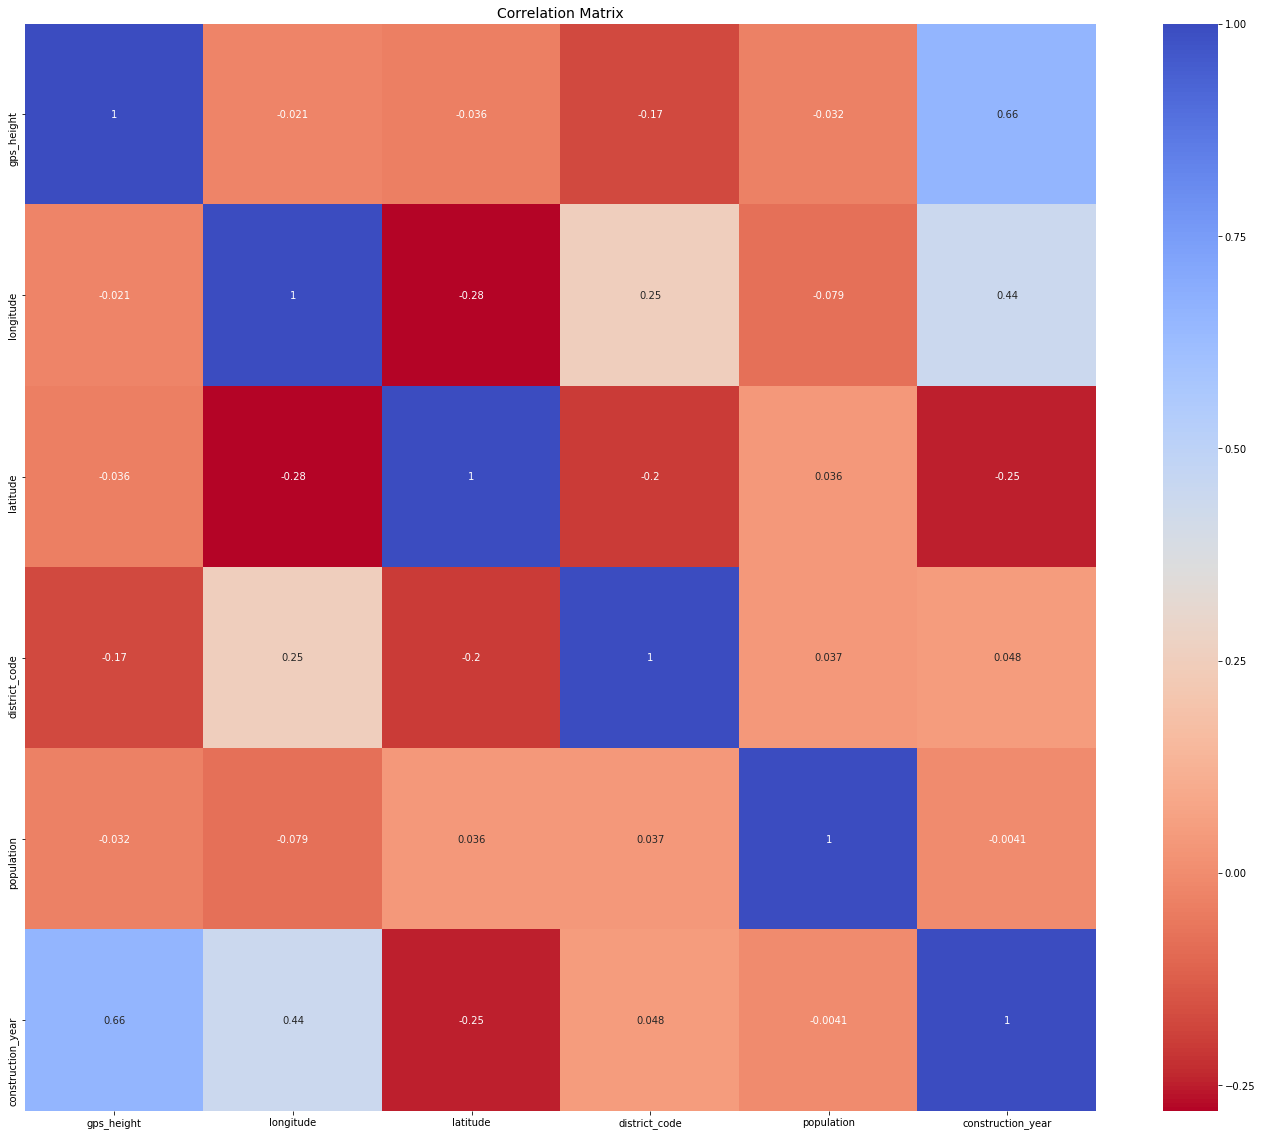

In [76]:
f, axs1 = plt.subplots(1, figsize=(24,20))
dff_corr=dff[['gps_height','longitude','latitude','district_code','population','construction_year']]
# Entire DataFrame
corr = dff_corr.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot=True, ax = axs1)
axs1.set_title("Correlation Matrix", fontsize=14)
plt.show()


**Correlation**

We find construction_year to be *correlated* with gps_height, longitude with 20000 values in construction_year to be correupted as zero values, thus can be dropped.

*Correlation* between different predictor variables is referred to as Multi collinearity. Multi collinearity in models can result in certain problems.

* The coefficients that we are estimating (like in logistic regression) can swing wildly and the coefficients can become very sensitive to small changes in the model. 
* The statistical power weakens, and the p-values become less trustworthy. 

*Multicollinearity* impacts regression model more than a classification model. But let’s take an example of Random forest where it can be problematic. Assume a number of linearly correlated covariates/features present in the data set. Obviously, random selection per node may pick only (or mostly) collinear features which may/will result in a poor split, and this can happen repeatedly, thus negatively affecting the performance.

For algorithms like XGBoost the correlation is not an issue mostly and is taken care of by the algorithm itself. But when two variables are correlated, they are actually giving almost similar information. Thus, it is always a safe bet if we remove one of the correlated features before applying ML algorithms.

*Construction_year* due to high correlation and 20000 data as zero, can be dropped. The *date_recorded* data has all the unique date of installation. This will not provide any functional impact on the target variable. Hence we calculate another variable as *'Age'* and merge it as a column to the dataset before removing *construction_year* and *date_recorded*.

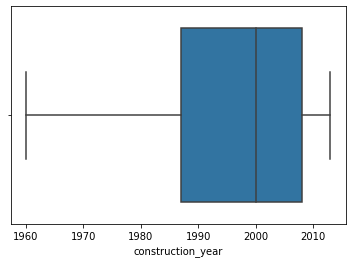

In [77]:
p =sns.boxplot(df[df['construction_year'] != 0]['construction_year'])

In [78]:
#Median value of 2000 is replaced with the zero values in construction_year
df['construction_year'].replace(to_replace = (0),
                        value =2000 , inplace=True)
#to_datetime = lambda raw_string: datetime.strptime(raw_string, '%Y-%m-%d').date()
#df['date_recorded'] = df['date_recorded'].apply(to_datetime)
extract_year = lambda raw_datetime: raw_datetime.year
df['recorded_year'] = df['date_recorded'].apply(extract_year)

df['age'] = df['recorded_year'] - df['construction_year']

#Since we have relevent date like recorded year, construction year and age, we can drop the unique date_recorded values
df.drop(columns = ['date_recorded', 'construction_year', 'recorded_year'], inplace = True)


In [79]:
X['age'] = le.fit_transform(df['age'])
X=X.drop(columns = ['date_recorded','construction_year'],axis=1)

imputer=MissForest()
X_imputed=imputer.fit_transform(X)

dff=pd.DataFrame(X_imputed,columns=['funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'basin', 'region', 'district_code', 'lga', 'ward',
       'population', 'public_meeting', 'permit', 'extraction_type', 'management', 'payment_type', 'water_quality', 'quantity',
       'source', 'waterpoint_type', 'age'])

Iteration: 0
Iteration: 1
Iteration: 2


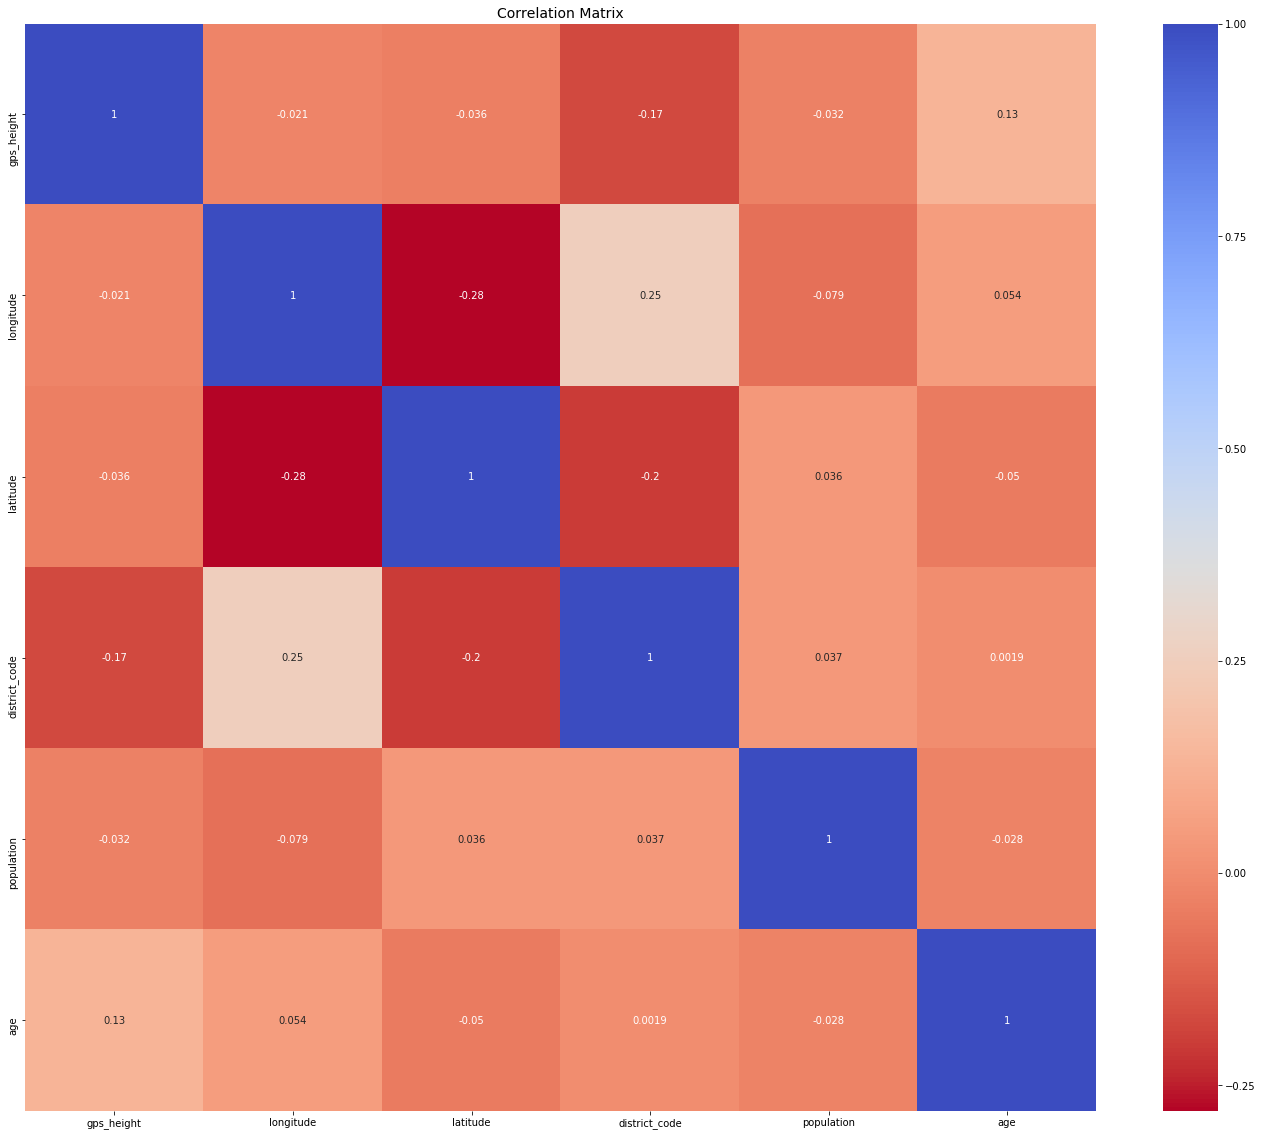

In [80]:
f, axs1 = plt.subplots(1, figsize=(24,20))
dff_corr=dff[['gps_height','longitude','latitude','district_code','population','age']]
# Entire DataFrame
corr = dff_corr.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot=True, ax = axs1)
axs1.set_title("Correlation Matrix", fontsize=14)
plt.show()


From the resulted correlation matrix, we can observe that most of the multicollinearity has been taken care of. The correlation between latitude and longitude will not have much impact on the target result. We have two seperate dataframe, **df** as the original dataset cleaned, and **dff** as the cleaned as well as encoded dataset by *lable encoder*. We will progress to prepare the final clean csv file.

### Clean CSV formation


In [81]:
#encoding target variable
target_status_group = {'functional':0, 
                   'non functional': 2, 
                   'functional needs repair': 1} 
df['status_group'] = df['status_group'].replace(target_status_group)

dff['status_group'] = df['status_group']

In [82]:
df.to_csv('clean_data.csv')
dff.to_csv('clean_encoded_data.csv')

C:\Users\reesh\Anaconda\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


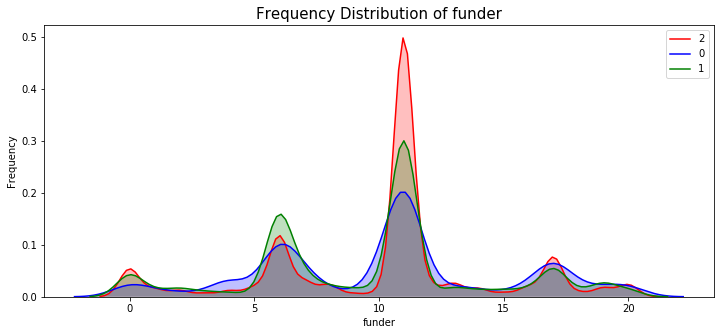

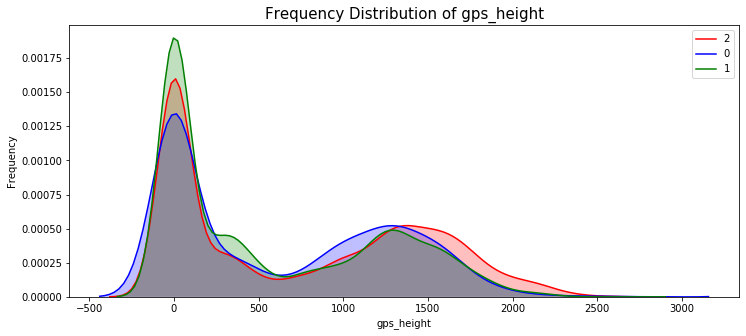

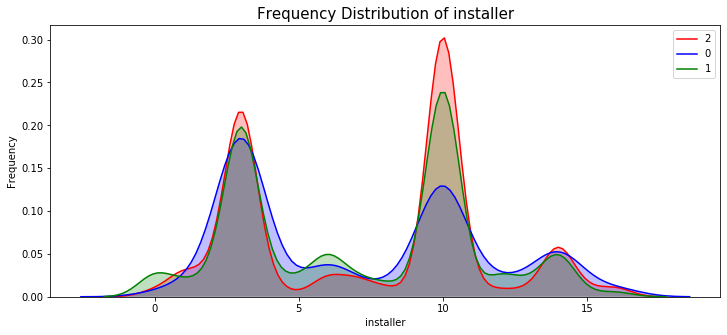

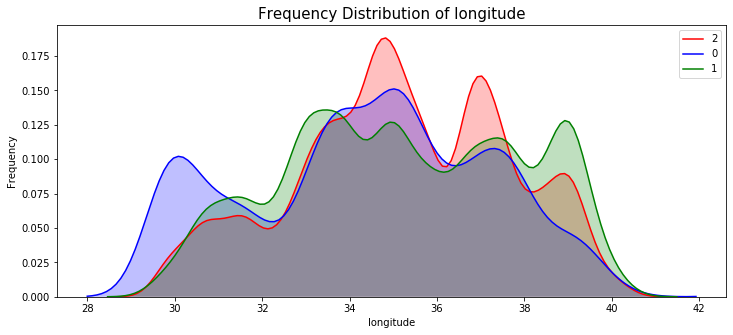

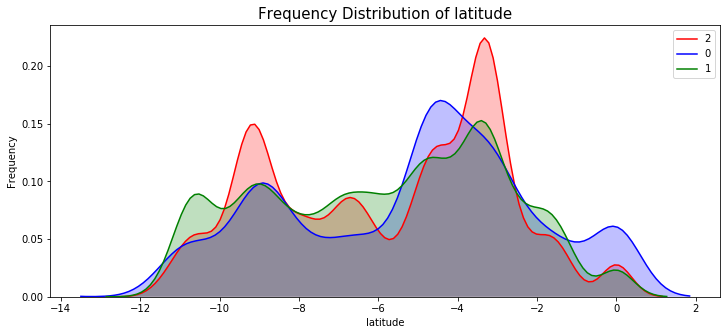

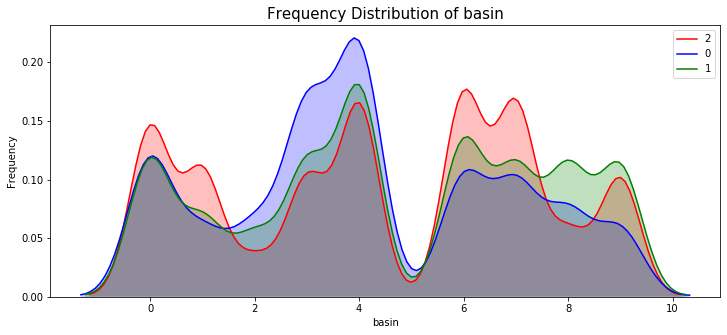

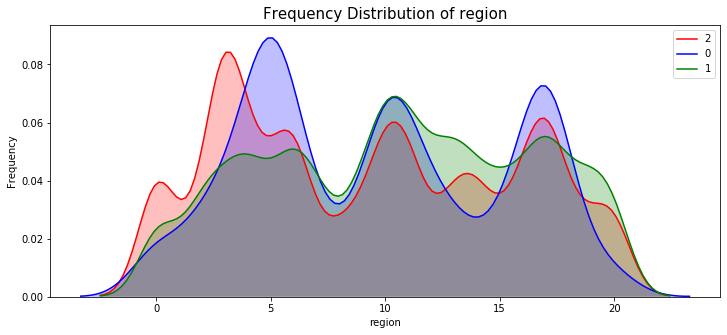

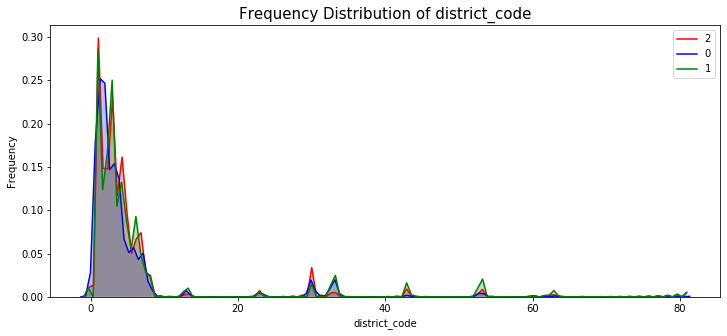

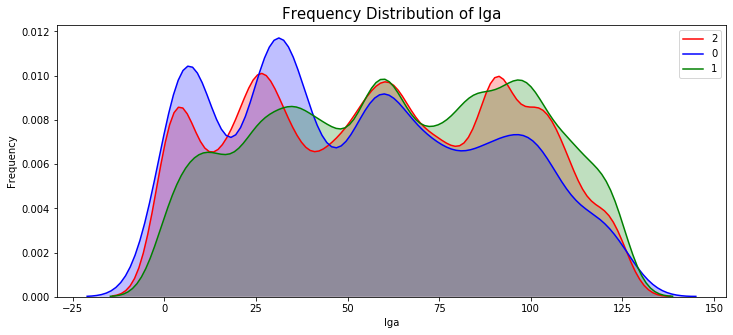

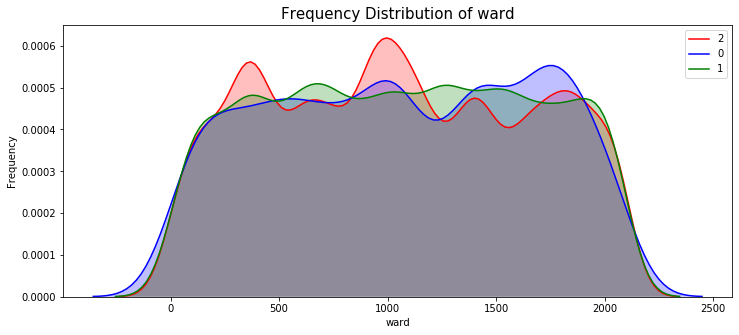

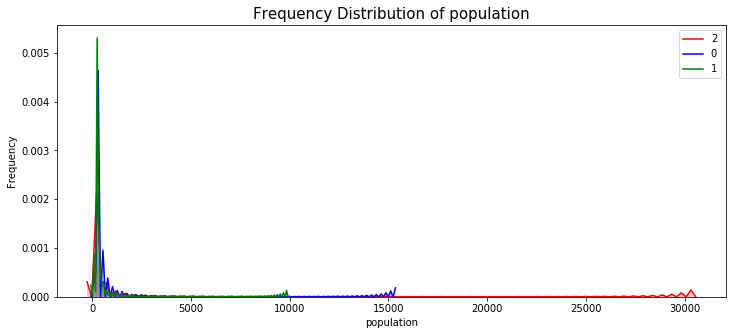

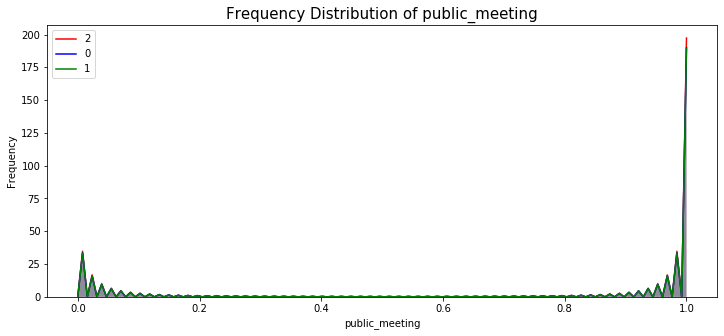

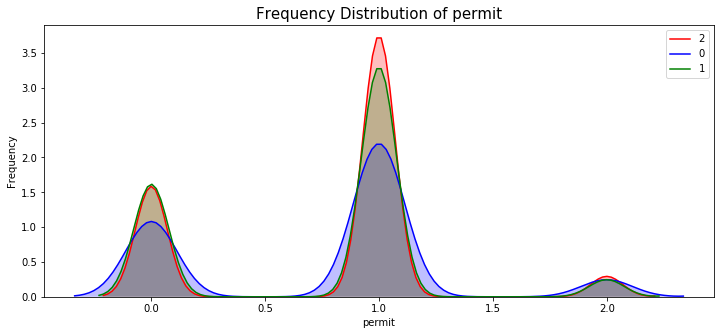

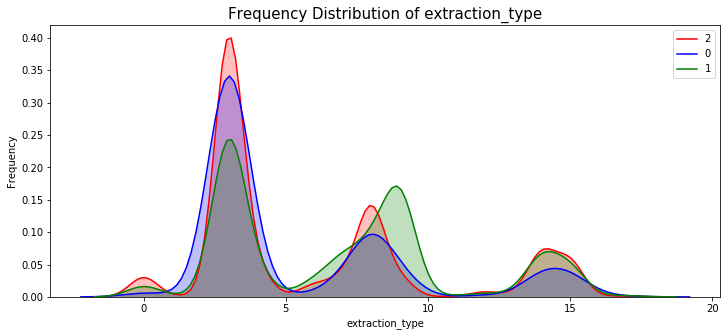

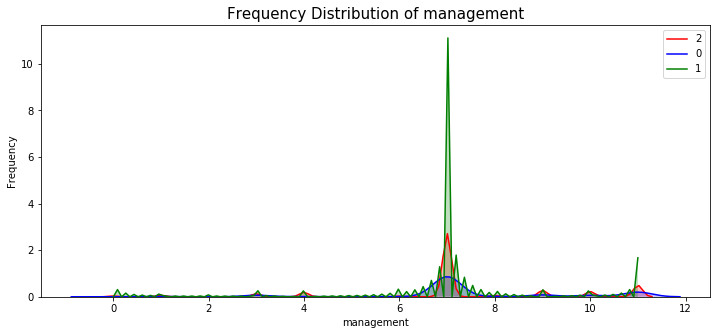

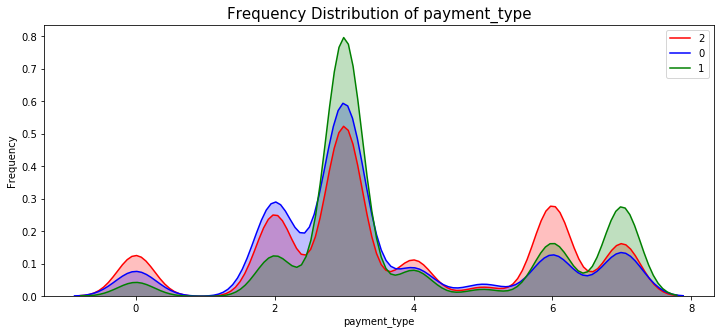

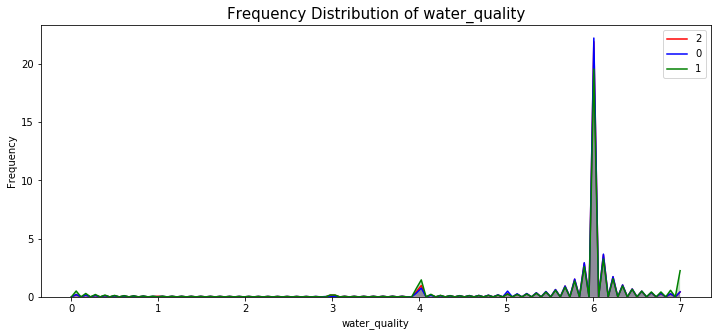

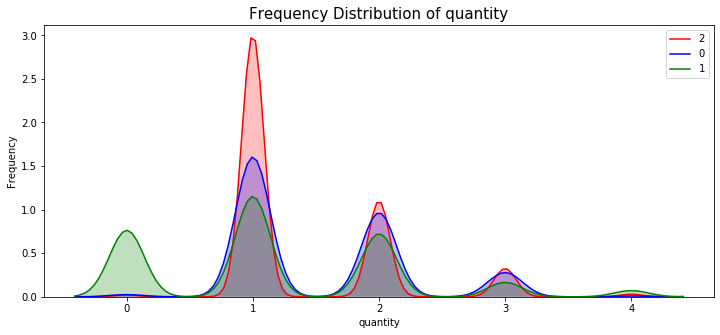

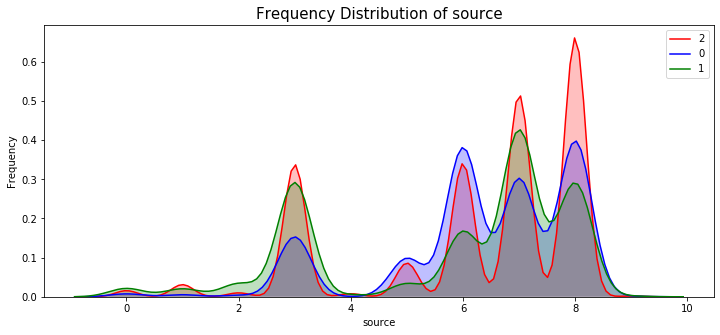

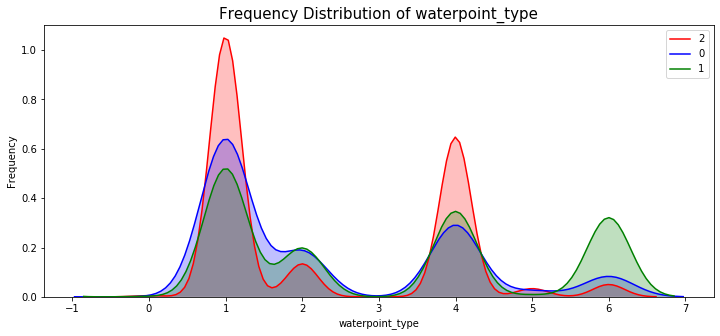

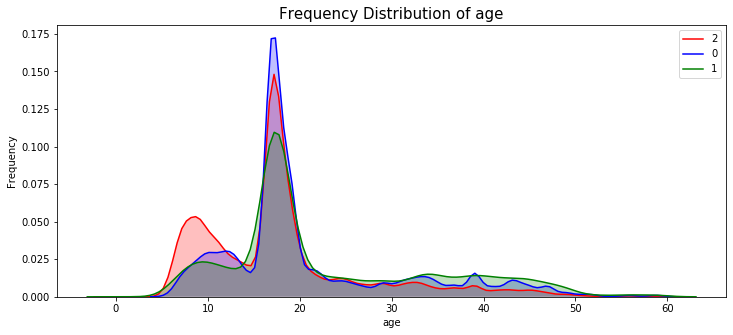

In [83]:
#I will check frequency distribution of each plot, with respect to target classes 
#in order to understand feature importances/selection


for col in dff.columns[:-1]:
    fig = plt.figure(figsize = (12,5))
    ax = fig.add_subplot(111)
    ax = sns.kdeplot(dff[col][(dff["status_group"] == 0)], color="Red", shade = True)
    ax = sns.kdeplot(dff[col][(dff["status_group"] == 1)], color="Blue", shade= True)
    ax = sns.kdeplot(dff[col][(dff["status_group"] == 2)], color="Green", shade= True)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax.legend(dff["status_group"].unique(),loc="best")
    ax.set_title('Frequency Distribution of {}'.format(col), fontsize = 15)

## Model and Metric

To prepare our data to machine learning, we did encoding and scaling also for dealing with first challenge. For ternary target model, **Target Encoder** and **Robust Scaler** were used. **Random Forest** and **XGBoost** were observed to be significant and effective while analyzing along with other algorithms in a comparative study. To handle the second challenge as imbalanced target problem, **SMOTE** over-sampling technique was applied. The metric balanced accuracy and confusion matrix has been used for comparative study and analysis. 

### Splitting the Data

We will be splitting the data when implementing comparative study of the algorithm. Then perform OverSampling techniques for class balancing. The main goal is to fit the model either with the dataframes that were undersample and oversample (in order for our models to detect the patterns).

Dropping *lga* and *ward* coloumn as both of these columns provide detailed location specific information. We already have the information from *district_code* and *region*. 

In [84]:
dff.drop(columns = ['lga','ward'], inplace = True)
X = dff.drop('status_group', axis=1)
y = dff['status_group']
import warnings
warnings.filterwarnings("ignore")

RANDOM_SEED = 101

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

### Classification Comparison

We will be using *Logistic Regression*, *KNN*, *Decision Tree*, *Random Forest* and *XGBoost* classifiers for classification of target variable.

In [86]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "XGBoost Classifier": XGBClassifier()
}

In [87]:
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 62.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 68.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 75.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 80.0 % accuracy score
Classifiers:  XGBClassifier Has a training score of 79.0 % accuracy score


*Random Forrest* and *XGBoost Classifier* provides good accuracy comparing to the other algorithms. To scale numeric values and encode categorical columns, we will make pipeline and also use it in our model and classifier changes. 

We will perform GridSearch to find out the best model parameter.

In [108]:
# Random Forest Classifier Parameters
rf_params = {'n_estimators' : [50,100,150,200],
             'criterion' : ["gini","entropy"],
             'max_features': ['auto', 'sqrt', 'log2'],
             'class_weight' : ["balanced", "balanced_subsample"]}
grid_rf = GridSearchCV(RandomForestClassifier(), rf_params, n_jobs=-1)

t0 = time.time()
grid_rf.fit(X_train, y_train)

t1 = time.time()
print("Grid Search took {:.2} s for Random Forest".format(t1 - t0))

rf_clf = grid_rf.best_estimator_

grid_rf.best_params_

Grid Search took 1.3e+03 s for Random Forest


{'class_weight': 'balanced_subsample',
 'criterion': 'gini',
 'max_features': 'sqrt',
 'n_estimators': 200}

In [89]:

dff = dff.rename(columns={'payment': 'payment_type'})

In [90]:
X = dff.drop('status_group', axis=1)
y = dff['status_group']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)


In [91]:
dff_results = pd.DataFrame(columns=["Model", "test_balanced_acc",
                                   'train_balanced_acc', 'info']) # to see all results


In [92]:
# assigning numeric columns
num_col = ['gps_height','longitude','latitude','district_code','population','public_meeting','permit','basin','region',
           'extraction_type','management','payment_type','water_quality','quantity',
               'source','waterpoint_type','age','installer','funder']

**Random Forrest Classifier**

In [93]:
# choosing scaler and encoder
scaler=RobustScaler()

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col)])

# set rf with best grid search results

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1,
                            criterion= 'entropy',max_features= 'sqrt',
                             min_samples_split= 10,class_weight='balanced')

#giving all values to pipeline

pipe = make_pipeline(preprocessor,rf)


pipe.fit(X_train,y_train)
# predictions on train set
y_pred = pipe.predict(X_train)

# predictions on test set
y_pred_test = pipe.predict(X_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")

Accuracy:
TRAIN: 0.9238215488215489
TEST: 0.794461745644306

Balanced Accuracy:
TRAIN: 0.9348303606453466
TEST: 0.710042699896349


**Confusion Matrix**

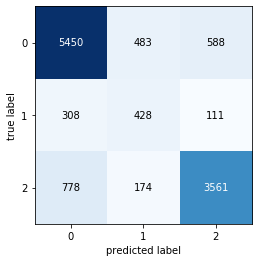

In [94]:
cm = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm)
plt.show()

In [95]:
dff_results = dff_results.append({       # first trial is written in results 
     "Model": 'RandomForest' ,
      "test_balanced_acc": 0.710 , 
       'train_balanced_acc' : 0.934,
               'info' : 'gridsearch best param'}, ignore_index=True)

**XGBoost Classifier**

In [96]:
xgb = XGBClassifier(objective = 'multi:softmax', booster = 'gbtree', nrounds = 'min.error.idx',
                      num_class = 3, maximize = False, eval_metric = 'merror', eta = .1,
                      max_depth = 10, colsample_bytree = .4, n_jobs = -1,learning_rate = 0.05)

pipe = make_pipeline(preprocessor,xgb)
pipe.fit(X_train, y_train)


# make predictions on training set
y_pred = pipe.predict(X_train)

# make predictions on test set
y_pred_test = pipe.predict(X_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")




[05:51:58] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { maximize, nrounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Accuracy:
TRAIN: 0.8444444444444444
TEST: 0.8038885615688915

Balanced Accuracy:
TRAIN: 0.6802256514539149
TEST: 0.6273290312114174


**Confusion Matrix**

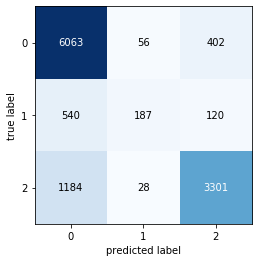

In [97]:
cm = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm)
plt.show()


In [98]:
dff_results = dff_results.append({       # trial is written in results 
     "Model": 'XGBoost' ,
      "test_balanced_acc": 0.627 , 
       'train_balanced_acc' : 0.680,
               'info' : ''}, ignore_index=True)

The 3-class dataframe does not fit well. It is highly overfitted in both the case as observed from the confusion matrix. XGBoost also gave overfit results. While tuning the hyper parameters like learning rate we got closer the train- test balanced accuracy results, though it is overfitted. There is also a big difference between accuracy and balanced accuracy. 


The class imbalance problem is required to be addressed. Classing balancing can be done by resampling the imbalanced data either by over-sampling or by under-sampling. in this case, our approach is to use over sampling technique. It tries to balance target with increasing the number of the rare samples. To protect our data from abundant samples, new rare samples must be generated by using techniques as repetition, bootstrapping or SMOTE (Synthetic Minority Over-Sampling Technique).

### SMOTE

In [99]:
dff_rep = dff.copy()

In [100]:
# scaling numerical columns

scaler = preprocessing.RobustScaler()


def scaleColumns(dff, num_col):
    for col in num_col:
        dff[col] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(dff_rep[col])),columns=[col])
    return df

scaled_df = scaleColumns(dff_rep,[num_col])

In [101]:
X=dff_rep[num_col]
y=dff_rep['status_group']

In [102]:
smt = SMOTE(sampling_strategy = 'minority', random_state=RANDOM_SEED, n_jobs = -1)

X_sampled, y_sample = smt.fit_sample(X, y)

print(y.value_counts())

y_sampled = pd.Series(y_sample) # converting from array to np.series to see value_counts

print(y_sampled.value_counts())



0    32260
2    22825
1     4316
Name: status_group, dtype: int64
1    32260
0    32260
2    22825
Name: status_group, dtype: int64


In [103]:
#splitting train-test balanced target data
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=RANDOM_SEED)


**SMOTE on XGBoost Classifier**

In [104]:
xgb_smote = XGBClassifier(objective = 'multi:softmax', booster = 'gbtree', nrounds = 'min.error.idx',
                      num_class = 3, maximize = False, eval_metric = 'merror', eta = .1,
                      max_depth = 16, colsample_bytree = .4, n_jobs = -1,learning_rate = 0.1,
                      early_stopping_rounds=10)


xgb_smote.fit(X_train, y_train)


# predictions of training set
y_pred = xgb_smote.predict(X_train)

# redictions of test set
y_pred_test = xgb_smote.predict(X_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")

#kfold = StratifiedKFold(n_splits=10, random_state=7)
#results = cross_val_score(xgb_smote, X_train, y_train, cv=kfold)
#print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[05:52:11] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds, maximize, nrounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Accuracy:
TRAIN: 0.963878871143168
TEST: 0.8570038353655046

Balanced Accuracy:
TRAIN: 0.9608420345369925
TEST: 0.8474436724306265


**Confusion Matrix**

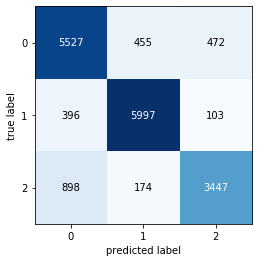

In [105]:
cm = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm)
plt.show()

In [106]:
dff_results = dff_results.append({       # trial is written in results 
     "Model": 'XGBoost' ,
      "test_balanced_acc": 0.854 , 
       'train_balanced_acc' : 0.965,
               'info' : 'with SMOTE'}, ignore_index=True)

# Conclusion and Result Analysis

With smote, we found best test balanced accuracy of 86%. From the confusion matrix, it can be seen that.

In [107]:
dff_results

,Model,test_balanced_acc,train_balanced_acc,info
0,RandomForest,0.710,0.934,gridsearch best param
1,XGBoost,0.627,0.680,
2,XGBoost,0.854,0.965,with SMOTE



The model can predict the functionality of the water wells with **86%** accuracy. With the good prediction of functionality, the model can:

* prioritizing functioning wells which need repair and yield clean water
* targeting repairs to clusters of wells especially those with high populations
* payments of some kind will provide incentive to keep wells functional
* allocate funds and resources to effective organizations with track record


As a part of Future work (with more time), there are further developments that can be made throughout:
* Performing undersampling class balancing with the classifiers to draw conclusion from **ROC** curve.
* Performing grid search technique on multiple classifiers and comparitive analysis with best suited hyperparameters.
* Neural Network development of both oversampling and undersampling class balancing approach.
* More detailed exploratory analysis of the data and visualization.